# Improved Amazon Reviews Analysis
This notebook uses enhanced sentiment analysis models to achieve better accuracy

In [11]:
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Import our enhanced modules
from real_data_loader import RealAmazonDataLoader
from enhanced_sentiment_analyzer import EnhancedSentimentAnalyzer
from feature_engineering import AdvancedFeatureEngineer
from visualizations import RetailVisualizationGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

print("✅ All modules imported successfully!")
print(f"Working directory: {os.getcwd()}")

✅ All modules imported successfully!
Working directory: /Users/mayankdw/retail_semantic_analysis/notebooks


## 1. Load and Prepare Data

In [12]:
# Initialize components
loader = RealAmazonDataLoader()
sentiment_analyzer = EnhancedSentimentAnalyzer()
feature_engineer = AdvancedFeatureEngineer()

# Load data - using smaller sample for faster processing
print("Loading Amazon reviews data...")
df = loader.load_combined_data(max_train=10000, max_test=2000)

# Basic preprocessing
stop_words = {
    'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from',
    'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the',
    'to', 'was', 'were', 'will', 'with', 'this', 'but', 'they', 'have',
    'had', 'what', 'said', 'each', 'which', 'she', 'do', 'how', 'their',
    'if', 'up', 'out', 'many', 'then', 'them', 'these', 'so', 'some',
    'her', 'would', 'make', 'like', 'into', 'him', 'time', 'two', 'more',
    'very', 'when', 'much', 'can', 'say', 'here', 'each', 'just', 'those',
    'get', 'got', 'use', 'used', 'one', 'first', 'been', 'way', 'could',
    'there', 'see', 'him', 'two', 'how', 'its', 'who', 'did', 'yes', 'his',
    'been', 'or', 'when', 'much', 'no', 'may', 'such', 'very', 'well',
    'down', 'should', 'because', 'does', 'through', 'not', 'while', 'where',
    'i', 'me', 'my', 'we', 'you', 'your', 'am', 'also', 'all', 'any',
    'really', 'great', 'good', 'bad', 'nice', 'best', 'better', 'lot',
    'thing', 'things', 'something', 'nothing', 'anything', 'everything'
}

def clean_text(text):
    """Enhanced text cleaning"""
    if pd.isna(text) or not isinstance(text, str):
        return ""
    
    import re
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs, emails, and special characters
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove stopwords and short words
    words = [word for word in text.split() if word not in stop_words and len(word) > 2]
    
    return ' '.join(words)

# Apply enhanced cleaning
print("Cleaning text...")
df['review_text_clean'] = df['review_text'].apply(clean_text)

# Remove empty reviews
df = df[df['review_text_clean'].str.len() > 0]

print(f"Final dataset size: {len(df):,} reviews")
loader.print_dataset_summary(df)

Loading Amazon reviews data...
Loading data/raw/train.ft.txt...
Loaded 10,000 reviews
Loading data/raw/test.ft.txt...
Loaded 2,000 reviews
Combined dataset: 12,000 reviews
Sentiment distribution: {'negative': 6051, 'positive': 5949}
Cleaning text...
Final dataset size: 12,000 reviews
AMAZON REVIEWS DATASET SUMMARY
Total Reviews: 12,000
Average Review Length: 438.3 characters
Average Word Count: 79.5 words

Sentiment Distribution:
  negative: 6,051 (50.4%)
  positive: 5,949 (49.6%)

Category Distribution:
  Books: 4,358 (36.3%)
  Movies & Music: 2,675 (22.3%)
  Electronics: 1,999 (16.7%)
  Fashion: 1,679 (14.0%)
  Other: 673 (5.6%)
  Home & Garden: 561 (4.7%)
  Sports & Outdoors: 55 (0.5%)

Split Distribution:
  train: 10,000 (83.3%)
  test: 2,000 (16.7%)


## 2. Enhanced Sentiment Analysis

🚀 Running enhanced sentiment analysis...
Analyzing sentiment for 12000 reviews using enhanced model...
Processed 100/12000 texts
Processed 1100/12000 texts
Processed 2100/12000 texts
Processed 3100/12000 texts
Processed 4100/12000 texts
Processed 5100/12000 texts
Processed 6100/12000 texts
Processed 7100/12000 texts
Processed 8100/12000 texts
Processed 9100/12000 texts
Processed 10100/12000 texts
Processed 11100/12000 texts
Enhanced sentiment analysis completed!

📊 Enhanced Model Results:
Enhanced sentiment distribution:
  positive: 6,212 (51.8%)
  negative: 3,140 (26.2%)
  neutral: 2,648 (22.1%)

🔍 Enhanced Model Accuracy:
Enhanced model accuracy: 0.574 (57.4%)

📈 Individual Method Comparison:
Lexicon-based accuracy: 0.495 (49.5%)
TextBlob accuracy: 0.598 (59.8%)
Pattern-based accuracy: 0.350 (35.0%)
Ensemble accuracy: 0.574 (57.4%)

🔍 Enhanced Confusion Matrix:
              precision    recall  f1-score   support

    negative       0.84      0.43      0.57      6051
     neutral   

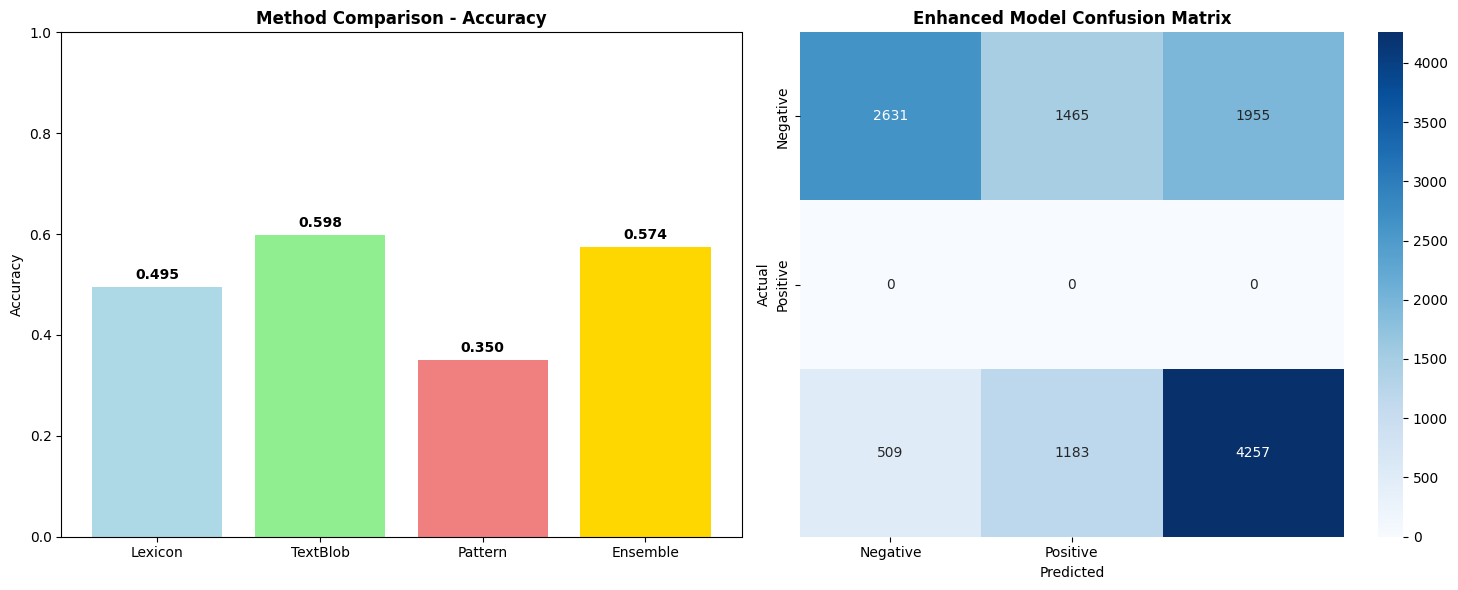


✅ Enhanced sentiment analysis complete!


In [13]:
# Apply enhanced sentiment analysis
print("🚀 Running enhanced sentiment analysis...")
df_enhanced = sentiment_analyzer.analyze_dataframe(df)

# Show results
print("\n📊 Enhanced Model Results:")
enhanced_dist = df_enhanced['enhanced_sentiment'].value_counts()
print("Enhanced sentiment distribution:")
for sentiment, count in enhanced_dist.items():
    percentage = (count / len(df_enhanced)) * 100
    print(f"  {sentiment}: {count:,} ({percentage:.1f}%)")

# Compare with original labels
print("\n🔍 Enhanced Model Accuracy:")
enhanced_accuracy = accuracy_score(df_enhanced['sentiment'], df_enhanced['enhanced_sentiment'])
print(f"Enhanced model accuracy: {enhanced_accuracy:.3f} ({enhanced_accuracy*100:.1f}%)")

# Compare individual methods
print("\n📈 Individual Method Comparison:")
lexicon_accuracy = accuracy_score(df_enhanced['sentiment'], df_enhanced['enhanced_lexicon_sentiment'])
textblob_accuracy = accuracy_score(df_enhanced['sentiment'], df_enhanced['enhanced_textblob_sentiment'])
pattern_accuracy = accuracy_score(df_enhanced['sentiment'], df_enhanced['enhanced_pattern_sentiment'])

print(f"Lexicon-based accuracy: {lexicon_accuracy:.3f} ({lexicon_accuracy*100:.1f}%)")
print(f"TextBlob accuracy: {textblob_accuracy:.3f} ({textblob_accuracy*100:.1f}%)")
print(f"Pattern-based accuracy: {pattern_accuracy:.3f} ({pattern_accuracy*100:.1f}%)")
print(f"Ensemble accuracy: {enhanced_accuracy:.3f} ({enhanced_accuracy*100:.1f}%)")

# Enhanced confusion matrix
print("\n🔍 Enhanced Confusion Matrix:")
enhanced_cm = confusion_matrix(df_enhanced['sentiment'], df_enhanced['enhanced_sentiment'])
enhanced_report = classification_report(df_enhanced['sentiment'], df_enhanced['enhanced_sentiment'])
print(enhanced_report)

# Visualize improvements
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original vs Enhanced accuracy comparison
methods = ['Lexicon', 'TextBlob', 'Pattern', 'Ensemble']
accuracies = [lexicon_accuracy, textblob_accuracy, pattern_accuracy, enhanced_accuracy]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold']

bars = axes[0].bar(methods, accuracies, color=colors)
axes[0].set_title('Method Comparison - Accuracy', fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# Enhanced confusion matrix heatmap
sns.heatmap(enhanced_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
axes[1].set_title('Enhanced Model Confusion Matrix', fontweight='bold')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('../figures/enhanced_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Enhanced sentiment analysis complete!")

## 3. Feature Engineering

In [14]:
# Apply advanced feature engineering
print("🔧 Applying advanced feature engineering...")
df_features = feature_engineer.create_engineered_features(df_enhanced)

# Show feature summary
feature_summary = feature_engineer.get_feature_importance_summary(df_features)
print("\n📊 Feature Engineering Summary:")
print(f"Total features created: {len(feature_summary)}")
print("\nTop 10 most informative features:")
display(feature_summary.head(10))

# Save features for later use
feature_engineer.save_feature_names('../data/processed/feature_names.csv')

print("\n✅ Feature engineering complete!")

🔧 Applying advanced feature engineering...
Creating comprehensive engineered features...
Extracting linguistic features...
Linguistic features extracted!
Creating TF-IDF features with 1000 features...
TF-IDF matrix shape: (12000, 1000)
Creating topic features with 10 topics...
Topic features created!
Creating sentiment-specific features...
Sentiment-specific features created!
Creating interaction features...
Interaction features created!
All features created successfully!


TypeError: Could not convert string 'stuning even non gamer sound track beautiful paints senery mind recomend even people hate vid game music played game chrono cross games ever played music backs away crude keyboarding takes fresher step grate guitars soulful orchestras impress anyone cares listensoundtrack ever reading reviews saying game soundtrack figured write review disagree bit opinino yasunori mitsuda ultimate masterpiece music timeless listening years now beauty simply refuses fade price tag pretty staggering must going buy money only feel worth every pennyamazing soundtrack favorite music hands intense sadness prisoners fate means played game hope distant promise girl stole star important inspiration personally throughout teen years higher energy tracks chrono cross scar dreamwatch chronomantique indefinably remeniscent chrono trigger absolutely superb soundtrack amazing music probably composer work haven heard xenogears soundtrack sure even never played game worth twice price buy wish give starsexcellent soundtrack truly soundtrack enjoy video game music played game most music enjoy truly relaxing peaceful disk favorites scars between life death forest illusion fortress ancient dragons lost fragment drowned valley disk draggons galdorb home chronomantique prisoners fate gale girlfriend likes zelbessdisk three three garden god chronopolis fates jellyfish sea burning orphange dragon prayer tower stars dragon god radical dreamers unstealable jewel overall excellent soundtrack brought video game music xander crossremember pull jaw off floor after hearing played game know divine music every single song tells story game greatest songs without doubt chrono cross scar magical dreamers wind stars sea radical dreamers unstolen jewel translation varies music perfect ask yasunori mitsuda poured heart wrote paperabsolute masterpiece quite sure actually taking read played game least once heard least few tracks whether aware mitsuda music contributed greatly mood every single minute whole game composed cds quite few songs haven exact count heart rendering impressively remarkable soundtrack assure forget every listener fast paced energetic dancing tokage termina home slower haunting dragon god purely beautifully composed scar even fantastic vocals radical dreamers videogame soundtracks surely mitsuda everbuyer beware self published book want know why read few paragraphs star reviews must written haddon family friends perhaps herself imagine anyone reading whole spent evening book friend hysterics reading bits pieces another most definitely enough entered kind worst book contest believe amazon even sells kind maybe offer grade term paper kill mockingbird book quite sure haddon never heard anyway unless mood send book someone joke stay far far awayglorious story loved whisper wicked saints story amazing pleasantly surprised changes book normaly someone romance novels world raving about book bought loved brilliant story true book wonderful told friends read typical romance reading book crime becuase missing heart warming storyfive star book finished reading whisper wicked saints fell love caracters expected average romance read instead found favorite books thought predict outcome shocked writting descriptive heart broke julia felt instead distant reader lover romance novels must read don let cover fool book spectacularwhispers wicked saints easy read book made want keep reading easy put left wanting read follow hope coming soon read gotten away book made want read again enjoyableworst complete waste typographical errors poor grammar totally pathetic plot add absolutely embarrassed author disappointed actually paid bookbook book put read fast enough boy book twist turns keeps guessing wanting know going happen next book makes fall love heat angery book throu several emotions quick read romance want end day off read nightread thought book brilliant yet realistic showed error human loved fact writer showed loving side god revengeful side loved twisted turned put loved glass castleplease guess romance novel lover discerning others beware absolute drivel figured trouble typo prominently featured back cover page book removed doubt wait maybe missing point quick read beginning now makes clear intentional churning over heated prose satiric purposes phew glad didn waste afterawful beyond belief feel write keep others wasting money book seems written grader poor grammatical skills age another reviewer points misspelling cover believe least per chapter example mentioned twice lean house distracted poor writing weak plot decided read pencil hand mark horrible grammar spelling please don waste money too believe reviews must written author relatives put faith reviews nowdon try fool fake reviews glaringly obvious glowing reviews written same person perhaps author herself same misspellings poor sentence structure featured book made veronica haddon think authorromantic zen baseball comedy hear folks don anymore might talking about sea cool story about young cuban girl searching idenity stumbles coastal resort kitchen gig zen motorcycle maintenance man three hysterical italian chefs latino fireballing right handed pitcher plays team sponsored resort owner often case finds herself honest often comical always emotional interaction sizzling roster players perfect mix special effects salsa sound flashbacks sea gets big starsfashionable compression stockings after dvt doctor required wear compression stockings wore ugly white ted hose yucky thick brown stockings found jobst ultrasheer gave compression needed looked regular pantyhose even though blood clot gone years still buy wear support stockings legs feel note problems rubberized tops rolling thigh tried jobst adhesive hated having skin pulled day bought inexpensive garter belt works fine helps keep stockings rollingjobst ultrasheer thigh high excellent product however difficult older people feel full day workout after getting day wears begin roll top create deep ridge skin wear difficulties addressed helpsizes recomended size chart real sizes smaller than recomended chart tried put sheer guess buy item internet store checkmens ultrasheer model sedentary types active around alot job consistently found stockings rolled ankles solution standard compression stocking stock excellent support stays gives need both pair tore struggled pull riddance investmentdelicious cookie mix thought funny bought product without knowing mix read header quickly thought packaged cookies cookie mix guess noticed since right title ever tried baking cookie mix convenience cookie dough buy wrapped plastic logs might bit surprise mixing dough messy extremely sticky however cookie mix flexibility ratio ingredients add extra butter baked cookies chewy mix large chocolate chips love removed star addition natural flavors mixanother abysmal digital copy rather than scratches insect droppings random pixelations combined muddy light vague image resolution probably cue packaging straight street corner bootleg dealer ever seen reasonably condition film copy know defining visuals film crystal clear lighting contrasts black white surrounding countryside old home scenes set early morning ground mists haze memory events bridge water bright clear immediate dull dark clouded remember timbre enunciation captain commands visuals after hard believe award winning critically acclaimed film presentation youtube somewhere dvd comes standard public library reel none appear amazonfascinating insight life modern japanese teens thoroughly enjoyed rising sons daughters don know other book looks japanese society point view young people poised between parents age old japanese culture restraint obedience community peers adulation western culture true form new young japan seem creating international blend ando family demonstrates beautifully written book vignettes private lives members family steven wardell clearly talented young author adopted schooling family four teens thus able view family life japan inside readliked album thought heard song thought same same listened songs blue angel lanna mama hair rose off neck roy trully amazing singer talent don find now daysproblem charging smaller aaas charger than years charges batteries fine huge problem securing smaller aaa batteries charge smaller batteries need flip little button positive end beginning four aaa batteries pop now three four won hold problem flip mechanism became loose horizontal pressure push buttons back now using duct tape segment crayon apply crayon buttons wrap tape around know painfulworks advertised bought chargers instructions lights stay battery charges true instructions dont lights turn off done true hours charging lights stay returned thinking unit new same kept since charge lights useless since seem always stay backup charger manage drain aas wouldn want only chargerdisappointed read reviews made purchase disappointed charger convenient charging four batteries once charge only lasts short now find batteries give longer life than kodak nimh batteriesdear excited find book ostensibly about muslim feminism volume live expectations essay among other describes veil potentially liberating doesn begin explain why another muslim women cape town claims muslim women separate than equal gee whiz disappointment expected hoped least muslim feminist condemnation gender apartheid single book surprised didn essay extolling virtues female genital mutilation alyssa lappenbased reviews bought glad vcr dvd early christmas present myself after deciding join rest world dvd land wanting let vhs movies quite yet based reviews price own jvc choice agree easy set bit awkward work whole vhs dvd selection options think gotten hang comments intuitive actually pretty complicated too buttons remote might please others technically minded than rely heavily manual setting vcr timer awkward enter start end scroll unless missing only complaints productincorrect disc big jvc fan model suspiscious saw several units return section store bought anyway new must happy unit sends clicks receiver once transition between scenes always smooth little pause still fairly new dvd even dvd headcleaner work incorrect disc messagehappy jvc nut jvc televisions vcr bookshelf audio system car audio system came move vcr player boys room another old man knew going decided combo player don think vhs going around longer combo player except cable box compatability remote control seperate audio video inputs only input coax cable cable box cable programming mono wife tell difference sound happy live vcr dvd look soundtitled hollywood debacle plot ridiculous wonder even read script before making film mountain lion breaks trailer cars behind don notice mountain lion captured put jail cell real utterly completely stupidbet hotel babylon show features incredible acting tamzin outhwaite formerly eastenders bbc soap max beesley ill fated movie glitter starring mariah carey show drama series felt mix drama comedy soap opera mixed bbc show show aired bbc america didn around seeing now dvd set episodes season finale interesting watch show reminds hotel aired abc reason hotel set fictional san francisco hotel hotel babylon set luxury five star hotel england recommend dvd anyone willing watch show bbcdon already know even casually looked applying law school already read book waste money seriouslyunfortunately wasn entertaining least bit ordered figured going hip cool daddy vibe however dismay sounds fourth grade music class main jist xylaphone playing over peoples voices trying replicate happening party believe played party anywhere neighborhood laughed off beach growing surfer san diego recommend southern california brothers honestly played kinda felt movie absolutle epitimy last vibe surf cha cha surfers don charochelle explains wondering hell happened moral aspect modern american culture book lucid argued explanation simple fact become totally focused our individual rights completely ignored even mocked our personal public responsibilities final response indictment robert ringer seller looking anyone disgusted boorish state american media politics discourse general clear heads substantial challenges lie before only americans human beings bookplaying larry work muse label late early found exploring rich catalog jazz standards probably grew playing surrounding himself musicians around larry sounds relaxed focused totally control listen larry take funny valentine tell doesn stand right chet baker miles fine album enjoy again againdoesn work mac clearly says line work mac system disk comes only windows order macfrustrating three year old son excited after attempts playing hasn touched since able mouse games except power segments instead using arrows keyboard too hard fun disapointed game wish returnmind numbing game makes same over over never holds son attention long enough next level choice games every order another rescue heroes game both boys love dogcannot recommend former alaskan didn want after repeatedly attempting allman recipes having throw cups flour miscellaneous ingredients nearly every comparing wood recipes work flawlessly lisa rayner excellent wild bread hand baked sourdough artisan breads own kitchen help notice recipes work allman fail novice baker only worked reliably pancakes recipe found other places looking reliable recipes concise information about starting sourdough maintaining recommend wood books even old ones lisa rayner written fabulous tome wild bread pass book historical vignettes interesting enough warrant cost book check library mustalaska sourdough read most book visiting brother alaska loved going making sourdough starter soon book full stories recipesold book worth keep collection only advise sourdough ruth told picture past years ago alaska stand mixer nor civilized stuffs kitchen pot sourdoughautumn daughter now making prefect bread wish lived closerfast download music waxed decades ago songs played background music youtube video kind gymnastic dance feat russia hunted melody read english lyrics decided else album downloaded full album via amazon downloader now happily listen melodies interspersed ipodmaybe experience amazon dvd player rattled pretty loudly sometimes always put dvd tried several picture quality wasn screen horizontal line thru middle after short away plus other reviewers dead about remote layout makes sense poor human engineering imo brought back store refund saw same model under emerson name hesitant buysylvania ldg flat panel lcd built dvd player light weight space saving attractive design sharp picture sound quality quick response dvd playback excellent only negative remote control hard read functions keys due color choices placement keys almost illogical look carefully before almost seems designed imbecil quality features price still makes excellent buyterrible buy bought wife birthday toreturn dvd palyer work returned repalcement once again dvd player failed work piece junkbeware set capable recall function want flash back between channels going give remote control comes recall function bought sony universal remote recall button however soon learned set factory capability flash back big deal user found annoyingkitchen bought replace tube kitchen gained larger screen plus relcaiming counter space picture internal dvd player bonus purchasemoney bought defective dvd didn work purchased electronics express contacted wonderful gave rma number right away fedex picked next day new arrived week later fine love clarity picture only complaint dvd mode sound isn loud enough running barely hear solved problem running audio jack input stereo speaker system lightweight easy move around store bonus remote isn works fine video audio jacks antenna input easy dvd player deal pricedisappointed romanian book opinion biased takes angle europe clean proper fails shed light rest understand tourist guides why anyone want tour country forgotten however disappointed romanian book never reference seen travel guides outlining europe exclude romania before precision detail series left yet again disappointmenttravel guide europe book realy everybody likes travel europe combination pictures illustration texts perfect overall view most important sights places cities countries europe bit historical information european already traveled bit still find inspiration interesting places thank eyewitness travel booksbought both lonely planet lonely planet book full pictures doesn give info need ended buying indiv city guide only scratches surfacereceived defective book bought book moving germany wanted overview countries europe travel too unfortunately pages greece english looks spanish sort printing problem found rest book give highlights countrieslabel memphis comes reatards fronted course wild kid jay reatard starting off eric oblivians label goner tender age jay now still rocking offending sensibilities community overdriven loud crackling guitars underlaying jay southern crooning howl energizes most amazing hate filled song writing heard yearseither stars depends look either stars depends look star sent feet copper pipe star won accept returns stars figure actually worth foot since won take return figure sell dealhunting hard thia gift husband loved book arrived date tolddisappointing text same ever think plates markedly inferior previous editions known ahead purchased volumehomer moses extremely helpful gem complex subject second century religious authority textual anyone serious about period interelation cultures book essential complex detailed course must argue point buy unless want keep running back library write only after thoroughly disagreeing review abovepoor quality screen arrived cardboard box pretty beat screen itself lightweight cheesy looking finish worn across entire top screen knew wasn solid brass expected least looked decent distance price paidscraped across whole top purchased screen last week came noticeable scrapes across top box came gigantic plenty packaging material screen packaged loosely bottom however since another smaller box thinking scraping begin shipping still deciding whether trouble exchanging since another reviewer same damage wouldn want risk getting another same damage need screen right now other than damage screenunknown africa don expect music africa profesionally produced white world don understand lyrics understand music mixture between salsa soukous fado always african feeling rithem soft almost borred voice oliver goma fits pefectly music recorded france paris hear professionals working must hot lazy night greetings arno amsterdamdidn live expectations ordered shoes replace previous pair ripped apart sole clark shoe anymore order amazon sadly second pair ripped same place within months son since bought similar pair sperry seem holdingprofound truly horrible now narrative style work famous founders biographer john morse arrogant flippant frequently exaggerated carries tone amateur yankee historian high passing judgment southern statesman neither boston nor harvard graduate perhaps considered penetrating day represents than opinion today research thin must conclude morse wrote entire manuscript essentially memory little reference primary secondary sources expect historians now weren fact morse wrote piece years ago rated only stardefinitely enjoyed gift old daughter big barbie fan loves computer still enjoying game completed few hours worried loves over over again music enjoyable colors vibrant seems user friendly daughter needed help once startedeven mommy fun four year old daughter loves barbie loves rapunzel movie game tons fun even year old love playing together love decorating rooms finding gems even play alonecombination creativity adventure year old daughter addicted game plays over over again loves opening song singing non stop gets excited completes room finds gem loves solving maze find prince stefan only problem sings song headrapunzel game both year old son year old daughter love play let fun decorating rooms choices keep playing game think barbie game funexpected daughter loved movie years old took hours complete game absolutely challenge little interaction essentially clicking screen play scenes programmed games play figure save moneybarbie rapunzel crying child year old daughter currently sobbing bedroom result rotten game spent hour game painting pretty pictures coloring flowers halfway game program hung wouldn let leave room click anywhere else now even exit game start back frozen spot barbie disembodied voice urges explore somewhere else castle standard software troubleshooting rebooting didn help vivendi games support site currently disabled now left weeping frustrating child doesn understand fault game won work hoping incompetent software programming couldn catch bug year old caught around maybe don care about problems long our bucks don want crying little girl avoid gamebarbie rapunzel creative adventure purchased software year old granddaughter loves playing lets play sometimes doesn always come plan purchase other software programsimagination year old daughter both love software actually fight over going paint pictures choose themes room game allows creative imagination decorating room castle finding missing gems prince crown gives rapunzel power find prince stephan turned stone bring back life music animation seen most kids software seen boring adult sometimes play without variations color schemes patterns never bored highly recommend girls agesrental game pretty exciting creative kind only only castle kids decorate once done whole castle basically either create new username yourself over again another game sister finished castle about hours after never even looked game anymore game fun worth moneymac classic negative game work requires multiple computers slow tell daughter thinking access everytime new task view openning sequence again without throwing saved game files tasks controls too hard user friendly even adults crashes mouse jumpy hard positive tasks easy possible grand beautiful three year enough patience survive multiple trials workdeal ordered dvd received substitute never received dvd ordered importcds vendor contacted recieve feedback rate dvd never seen didn bother send back cost orginally paid future watch name person persons buying thought company understand simple mistake response businees sense spend hundreds dollars month amazon com building dvd collection guess careful futuresmells divine second bottle sheer freesia love fragrance light delicate sent beautiful summer daydisappointed perfume awful smells freesia gift recipient impressed worst returnedcreepy wow people behind jealousy revenge doors open prepared find behindaudio options non existent movie itself than expected didnt expect non existent thai soundtrack option disc menu stated package thai soundtrack exist matter choose thai english english exceptions most dubbing ridiculous dubbing title sub par review covers only movie other remain plastic never inside dvd player shame sham purchase claims original disapointed offering tokyo shocksooo jammin too trill man jammin tracks suc pokey official record sooo real love production real screwed among last suc records fallen off downsized deaths screw pioneers sad true love rap gotta somethin kickback blow big too somethin jam ride underrated right wish people forget bullsh bet mtv check happening houston guess sadly almost too late pat gone hawk gone screw moe pimp big steve makes sad regardless pokey still alive making new music keeping legacy alive place start classic record love mandirty south probably southside ever come pretty every song guest track late fat pat botany boys big steve chris ward southside alwaysbook written chronicles farm people lived excellent photos kept looking photo wife wasn long enough shewasvoices farm copy book love wait til revised version comes few weekslittle maid israel bill harvey wonderful gift making history come alive book book awakens sense wonder possiblility real relationship god follow faithfulness little girl ancient times young girls ages love book always most loved treasures real keeperdrew air book drew air pretty idea why someone waste writing boy draw air read bookcomfy warm run big title says warm comfy run size too big don wear lounging big dealbuyer beware ordered cake topper june given estimated shipping date july dates came went cake topper contacted seller twice response filed claim amazon end receiving cake topper july however even ordered seller refund money never contacted apologized mishap never buy seller again looked seller feedback only person done wrong buyer bewareariel litte mermaid pearl kit arrived quickly cute topper however wouldn bought didn provide instructions listened other reviews hoping than topper buy annoyed ariel idea decorate cakeinstructions included trust seller promised item complete instructions additional pledge sweet graces email supply list instruction sheets purchase ready ahead received none only plastic figurine bracelet boot amazon claims help contact seller phone number manufacturer let hope yields results meanwhile wishing listened previous feedback about unreliable sellerwhy soulwax ignored critics consumers alike don soulwax around since released rock debut now defunct almo sounds chock full radio hits attention djs mash remix bootlegs return full fledged band last year minute now critcs consumers alike barely took notice album amazing writing production sheer electro rock power hopefully nite versions cheeky title recalling bands duran duran release nite version singles clubs garner sales attention soulwax songs practically leap speakers grab neck turn head move wait hear tiga upcoming sexor debutomg soulwax owns wow most amazing album ever every track rocks specially talking nylipps love techo job guysmusicchoice played whole album saturday night jamming whole going wow house techno electronic don want none cause won feelslow dull classical style movie stars slow dull classical style movie movie young jason bateman lead slow dull few moments style music our relief background music annoying kept minimum though attempts action suspense movie achieves neither suggest skipping moviethank releasing loved movie kid happy powers decided release finally want movieworth book wriiten horribly never life recommend book stories lacked mystery leave wanting figure culprit only none stories took ten twelve pagesfun educational trains shapes pegs winning combination guaranteed both child parent happy starter puzzle old rangeludicrous silly remember getting book faintly says alot about opinion basically entertain lots odd ideas theories book basically sillyartistry think deodato concerts rich real strings band musicians appreciate john tropea excelent renditions guitarcaution tracks original versions recorded versions whether tracks remastered irrelevanttextbook book shipped quickly excellent condition stated easy transaction buy againbook historical romance lovers engaging count life tess girl young age washed shore isle memory life before stays old caretakers isle after caretakers dead young man colin macpherson washes shore colin takes tess back castle helps uncover past opposites know opposites attract book avon true romance series read every book series know book love rest book girls about still romance novel call trashy romance novel novel fokr getting romance novelsbook wasn expecting man wrong loved book now usually tied man long blond hair wearing kilt authors made colin enchanting highlander tess soft heroine sometimes seems too guillible remember part story favorite books seriesseries tess lindsay content sole occupant remote island colin macpherson washes ashore life solitude gets shaken tess always told fear strange men reluctantly strikes friendship colin soon tess discovers family forgotten about courage leave island start new life beginning book amusing end decent too middle big problem plot loses believability mostly due poor characterization new characters introduced sided behavior lacks reason even tess colin development side tracked same relationship seems awkward forced writing improve towards end enough save book unless heart set reading books series skipaddonics portable drive disappointed performance disappointed performance seems underpowered constantly trying read cds half unsuccessfully going try return amazontoo uncomfortable too big pants too big looked about sizes larger incredibly stiff uncomfortable daughter wear dayauthentic encounter yoruba cds helping however book short particular about certain aspects details grammar other nuances someone never spoke yoruba doesn anybody ask clue leaves questions unanswered however hopefully other yoruba textbooks brighter note add book job giving little insight yoruba people yoruba culture general recommend start book anyone wants learn yoruba wrongagree cds needed help since impossible pronnounce yoruba tones without help native speaker however design book poor confusing found several spealling mistakes english yoruba grammar explanations hard understand unfortunately teach yourself yoruba books worth least provides basic vocabulary pronounciation skillsdoesn fit ordered dashmat specific vehicle correct mat returned original sent exact duplicate wrong mat seem correct therefore sits boxneed memory play grandchildren teaches both value memory challenging sometimes miss most obvious lots fun tic tac toe twistkelly club pet parade hit daughter loves year old daughter loves game sings strike band clap hands kelly pet parade song around house dress kelly kids train pet teach pony jump etc clean animals ready parade paint elephant toe nails etc decorate floats herself ready showing accomplished along watch special parade wonderfully cute game highly recommend mostly entire game own installed laptop actually using inset mouse still game only tough polar bear catching fish game tricky move finger mouse pad click same catch fish easier using regular mouseloads fun year old year old both enjoy game lots several different animals prepare parade design float endless fun graphics animation colorful cute winnereasy fun olds fun easy game keep freezing reinstalled done know correct issue shame old likeshours fun year olds purchased game year ago girls still love play activities love decorate floats watch paradeslip heel shoes completely satisfied manner order delivered shoes awesome advertisement showedddr cooool game long versons though only odd seconds claire disappointed wants touch know games songs want assuming after cool songs euromix mix games japan versions available tooamazing ordered take abit live england danced sang along arcades ive think love dance favorite songs feeling navey captain jack lovefooled know audio game thought playstation maybe other guys somewhere actually easy game play japanese compatible machine deeply disappointed love arcade game dance stage euromix dance dance revolution equivalent lacking decent tracks jungle difficult dance most tracks unheard therefore enjoyable however favourite keep moving jam video killed radio star gets bit pedantic keep playing tracks anyone same situation lucky enough play newest version please let know order dance deprivation boredomfooled know audio game thought playstation maybe other guys somewhere actually easy game play japanese compatible machine deeply disappointed love arcade game dance stage euromix dance dance revolution equivalent lacking decent tracks jungle difficult dance most tracks unheard therefore enjoyable anyone same situation lucky enough play newest version please let know order dance deprivation boredomthan letters admit bought album title track alone after only track still felt worth money title track beginning fine country offering john michael montgomery found myself listening enjoying every track letters home montgomery smoother than silk voice finest country music today straight forward approach music comes every note won want miss horsemanworth wait jmm never released album comeback album every couple years releases album hits reason radio hasn played songs latest albums goes beer little devil singles spice country radio letters home deserves single year cool far behind listen album loveletters home letters home cuz tells story listen acctually hear john michael montgomery tell story soldiers stuffi liked punk rock rock mustgave stars little dog fun riping apart only took hrs buy hrs longer than other ballseste libro contiene todo que pense que interesaba saber sobre box sus campeones pero cautivo lei hasta final ahora puedo discutir box con esposo mis ados hasta con suegro que boxeadorcereal sweet yet taste addiction tried cereal curiousity hooked excellent breakfast choice eat especially breakfast crave honey taste won hungry later probably eat actually sweeter than honey bunches oats cap crunch berries option splendid cereal filled honey filled taste tried tasting cereal thandelicious addictive cereal tastes crave word warning read label last husband looked saturated fat other cereals our cabinet hmmmm another reviewer noticed problem too amazon price outrageous between our storesgone distraught local walmart stopped carrying favorite cereal elated find site including church made available pack amazing cereal dont box small maybe bowls entire boxkind book timber frame building husband loves book learned book learn build timber frame housetechnical information book over view joints building information beam spans loads actually build buildinghanford mills museum friend master carpenter saw book recent trip hanford mills museum avid reader loved book inclined read enjoyable buils timber frame house book vaguely breezed across history went various types timber structures mortise tenon joints illustrated fascinating practical home builderoutstanding guidebook building own timberframe home wife built hybrid timber frame home using book guide although construction skills book invaluable guiding process wait build another highly recommend book anyone considering timber frame houseexcellent book poor book editing yet another example superb book done serious disservice book publishers multiple spelling errors improperly placed figures captions whole sections book written caps reason looking excellent reference traditional timber framing look further please pick print version instead bookmanual expecting book full glossy sharp pictures buy drawings pictures inform need manual want venture timber frame projectpoor instructions once figure kinda cool wraps doing placed hot water searched internet found others having same problem instructions poor off need dip boiling water least temperature level above call hot second instructions don describe happen image shrink around egg transfer needless frustrating minute wife intelligent kitchen immediately thought hot water wouldn change properties plastic let try boiling water lose explicit instructions using star wars version productgraphics coast coast graphics awesome game hopeddont run outrun unless outrun biggest disappointment holidays come home life might enjoy read reviews before buying didn sink arcade style meant addicted follower colin macrea rally thought race ferrari across cool wrong games car racing space invaders battlefield landscape moves instead car idiotic stages impress girlfriend slides total rubbish anyones fault mine live ireland shipped florida costly mistakehenry henry back don remember nose since chewed off loved long gone thought only ever henry since nobody knew talking about believe found again nobody replace original worn henry excited clone backhenry come home henry back early forty now still original bought new dad ill knew significance henry insecurities child hoping same dad battles terminal cancer thanks making againcharisma about henry dog daughter gave henry love word obsession few years later wife decided under guise incurable lice infection wife threw trauma followed bought replacement daughter safely closet shelf thread bare found online overwhelmed read reviews amazon com none less than stars story told little guy touched lives henry owners both girls boys cherished real dog guess daddy buy little year old daughter new both phone opened box henry home again granddaughter saw henry excited wanted years old company bottle henry dog charisma thanks keeping alivefound henry dog henry dogs lost ride walt disney world second replace idea henry now found friend again toy six years old almost years ago think seeing again around christmas sweeet toy children agescontemporary fairytale sure delight book take off classic snow white fairytale grown ups class act characters rich rewarding love story thoroughly enjoyed reading look forward sinclair workspatterns detailed sketches although excited purchase book excitement didn last looked sketches pictures book call pictures truly actual patterns norma gregory talent shows designs due complicated rendering difficult transfer book beginners seasoned artisans looking patterns disappointed bookgift brother law thrilled clarity instructional commentswill looking titlesproduct didn match picture description unless sent wrong product mistake foot cushion picture description match item delivered under impression receive pair water filled foot cushions insert shoes instead received foot cushion filled another material water attach foot via toe strap definately happy item sent back refund luckily amazon return policy returns easylaugh heard about book wanted read funny stupid unintentionally heard disappointed few life free sex defintely among perfect coda book couple divroced several years after publishing book stuffproduction possible broadway theatre archive production took wittiest most sparkling century comedies ruined costumes intentionally absurd think beach blanket babylon acting over top camp incidental music worse music btw combination pop renaissance pop modern century director appears goal showing company too hip too modern fun silly fusty old play school scandal having found other dvds started intention keeping recording even production extended bop bop drinking song scene knew couldn ever sit again visuals blurry production being anyone actually likes play revolted dvdprofessional quality tried buying tape marketplace seller sent back tape quality poor packaging looked unprofessional after returning bought amazon proper same quality tape same packaging since now sure bootleg tape videos than othersthree four stars depending classic drawing room comedy period piece cleverly written audience needed bit nudge figure character person name describes feel about charming idea never chance comedies take look famous play done must theatre studentssongs cover compilation set purchased love chose songs songs performed original artists instead poorly covered starlite singersnew wave read prior reviews record before buying although appears collection new wave singles cover versions sung starlite singers description record says various artists implying original artists true total garbage bright spot prompt refund returneddon fooled bought set last november now decided listen cds nowhere description amazon original artists fact says various artists deceiving only group performs songs leads believe original artists says various artists after compilation music various artists duh don waste money probably throw trash purist want original wedding reception musicbuyers beware cheesy compilations find session bands similar sounding artists sing songs original songs artists loved tel don care about hearing artists originals don care about cheap sounding synthesizers playing music fact vocalists pretty might fan amazing music produced buy other collections don waste money schlocksony basic handycam rocks performance outstanding previous sony handycam died replaced camera continue playback old tapes camera performs faster simpler than old sony need dealbeware bought camera christmas open film nights party tapes included course stores closed christmas day useless until day after shame sony tape included packace cost included battery chargershigh tech rock emotion although hines work high quality waving drowning highlight projects song curious kind simply masterpiece remastering quality come expect rock greatest producers song writers performersnever gets going book never seems going too spent courtroom basic questions about crime suspect defendant left unasked after pages realized book wasn going pick reveal crucial information sense until end result whole story rapped quickly unbelievable left wondering why figure earlier based ending detectives attorneys appear rather incompetent enjoy parts book however think plot needs unfolded different rate slow beginning fast end mcbain fan think other books writtennow rest story knew missing book read didn match heard years ago came church speak now know abuse difficult talk about even wrote book about later help trusted friend able tell most difficult abusive parts childhood experience second book about most wonderful about dorie able forgive abusers move life still able successful happy life spite horrendous abuse childhood women need hear lord help possiblebaseball benchmark didn refer baseball america cardinals walt jocketty contradict columnists game peter gammons tracy ringolsby jayson stark detailed information baseball major leagues japan stats scores most extensive resource prospect information single serious fan baseball deserves title baseball america subscriber read want know stars tomorrow being tomorrow years months top prospects every team till massive top list baseball america covers know subscribed years now think living withoutperfect die hard baseball fan read baseball america off over years finally took plunge subscription place coverage minors college high school baseball know about top prospects before othersusing brand embarassment steer clear folks thought guys last real fusion types about since last secret fusion world start taking pointers joe satriani listening old dimeola pratice sessions hell phil need tarzan star bruford wilding bonus tracks wantintriguing book influenced destiny read trouble titan around apollo program apex human exploration solar system seemed only short step away review based old memories still remember mining colony titan jet craft using oxygen fuel burning titan methane atmosphere learned since book written titan atmosphere less methane than originally thought however book written sure intrigue son intrigued father now working nasa cassini huygens mission saturn titan book old style sci flavor made another world seem reality than fantasy think enjoyed lucky starr david starr stories asimov enjoy trouble titanpeek fun gift our year old loves tries hard little blocks obviously fails loves move jiggle noise almost adventure three year old loves incorporate alphabet easily identify items inside banana penguin umbrella zebra bonus gets frustrated pry items block matter hard tries usually flings tends build walls towers sole purpose smashing another toy dropping off high places stepped already seem tolerate treatment ratherexcellent product alphabet blocks beautiful classed works art collectors items purchased seys gifts probably buytwins purchased alphabet blocks twin daughters over months old love product learning tool years come now teething toy recommend anyone plus love fisher priceblocks keep mind after seeing incrediblocks catalog little pizazz blocks features spin letter queen watermelon seeds rattle most look type block mind product blocks meant stacking knocking over banging son loves since months than plain wooden blocks textured objects inside letters lots opportunities learn letters colors objects descriptions etc now stacking banging knocking over around until ready learn words colors objects animals review isn profound eye openings again blocks keep mind making purchasing decision child overnight rocket scientistexpected bought reasons blocks educational letters however letters rubbing off price paid dissapointing other than love concept objects inside funcute gift little baby although felt looked bit chinsy mother wish list happy receiveblocks daughter loves blocks look until finds favorite likes shake cute little blocks hours imaginative playtime inside blunt corners sharp edges wood blocks safety smaller children fact letters alphabet corresponding object inside makes learning tool even older tots enjoyed recommend our friendsawesume blocks ever toy our grandson favorite find again our newest grandchild thank goodness online shoppingkeeps attention little boy getting interested blocks too cute learning manipulate block hands little inside blocks adorable spin twirl rock definate upgrade standard wooden blocksvalue set incorporates favorites other sets packaged learning format leary purchasing too blocks storage reasons zippered case bonus definitely worth every pennywonderful worth blocks definitely worth listed purchsed about other placesworth investment set blocks researched different blocks found most durable age developmentally appropriate highly educational bucks seem think worth impressed quality size shape blocks right son months old able hold blocks perfectly little hands plus blocks sharp corners wooden blocks available site hurt little especially chewers category rated toy only instead fun factor younger babies yet toy fun until little bit older son yet able fully comprehend even toys inside blocks again only months give couple months digwaste off money waterproof garbage batteries broke trying adj buy turn end control loosens battery cover water gets waterproffcalifornia exotics waterproof delights blue ballsy california exotics waterproof delights blue ballsy spice relationship worked since beginning other half likessmall didn work small compared thought even didn workmakes fascinating reading whale naturalist animal communicator mary getten goes beyond other research achieved whale study communication processes studied pod family whales off washington state contention direct telepathic communication between themselves humans makes fascinating reading diane donovancalifornia bookwatchpretty nifty purchased halloween party dummy forgot put nevertheless hold around house search place hang pretty big look cool little bit educational value too teach children about actual pictures depicting even though forgot hang liked scene setters using next yearyet another unsubstantiated case believe discrimination certainly believe book unsubstantiated smear campaign rally troups higher claw again preservation academic freedom rally falls flatmolly myers molly myers review name rachel corrie describes ism organization dedicated non violence radical left wing propaganda ism offices regularly hide terrorists weapons ism pacifists regularly throw rocks idf soldiers perfectly willing violence order sabotage wall intended keep innocent palestinians murdering israelis please disregard molly reviews biased extremegardening lawn book four pages book missing happened formulas husband needed fortunately able copy our friends book hesitate buy another book againknock off official chrono trigger ost discs version major tracks audio quality caveat emptor buyer beware chinese knock off buy disc version sure cover green red logo reading counterfeit serial numbers real soundtrack cds pscn pscn pscnfew handful tracks hear over over again far complete though missing memorable tracks sealed door wings across bottom night doesn single battle theme accept final boss hell doesn even lucca theme cover seen track list beforehand wouldn bought blame self being curious number sorry paid dollars american travesty lavos mercy soul save selves money stillwon watch again watched last night don remember enough give indepth review wasn people letting nor people letting don killer supernatural don bother about guy comes back dead whole storyline kinda silly plot holes over place acting wasn neither deaths fact kinda gory doesn movie flashbacks little confusing wouldn watch again far worst movie seenloved stephen colletti hot initially bought movie stephen colletti love leads didn expect looks low budget indie horror flick lead girl plays jennifer nikki deloach believe never seen before maybe didn know cool guy weekend bernie terry kiser actor too dead whole both movies saw lol anyways cool movie gladmask maker horrifying never dull moment watch bored wondering part comingmask maker liked film every horror likes type movie suspense mystery times plus shocking ending makes think story plot robertworst american movie movie horror film thhat displayed effort steer clear typical horror movie dialogue pacing blonde girls girls don trip over tree roots yard now white girl fall twist knee movie guess tree rootmask familiarity mask maker takes cinematic path often traveled typically predictable fashion story revenge unstoppable killer murders victims uses skinned faces achieve kind beauty flashbacks reveal motivation attempt elicit level sympathy mask maker isn worst entry familiar territory doesn tread new waters either cast performs various levels competence weekend bernie terry kiser effective guilt ridden buffoon treat williams ill cameo role horror vet michael berryman unusually restrained small role nikki deloach jamie lee curtis leading role giving weak performance typical survivor role resilient resourceful female doomed fiance stephen colletti sic equally flaccid open ended finale paves mask maker definitely don needunmasked sadly absolutely original movie filmmakers shamelessly borrowed practically everyone turning stale formula piece purely numbers couldn find elevated movie above other films plot standard group kids spend weekend old house history standard run mill maniac kills unimaginative ways course notices until too late happens exactly cue order surprises frights movie safe boring couldn tried even brief appearance horror icon michael berryman playing guy change help dullness script even title misnomer although original title maskerade isn high hopes favorite genresmuseum exhibit inside book book library genealogy section allowed take genealogy books library liked enough sit library read sittings quick read loads pictures photos ghetto inhabitants pictures artifacts ration cards work certificates yellow stars etc museum exhibit than simple book format think young people able book too although clearly written adults certainly probably most information kovno kaunas ghetto place both researchers ordinary person interested holocaust enjoy bonus pages diary ilya gerber printed book read extracts diary alexandra zapruder ssalvaged pages young writers diaries holocaustresource chinese eastern medincine excellent book reference eastern methodologies medicine healing unfortunately long print hands copy text dissappointed fact unhappy happy purchase peers happilywhy book someone practicing chinese medicine years san diego www bodymindwellnesscenter com find book excellent resource anyone wants dept primer theoretical basis practical application system medicine originates chinese philosophy emphasizes natural balance found nature agriculturebook worth second look book informative easy read understand alot pictures recommend book wanting learn about chinese medicinegame ever games makes even amazing games starcraft warcraft redundant warhammer than anyone else truly game total fun combat graphics races units pleasure playguitar absentia due respect ambient music enthusiasts disappointed guitar work whatsoever album hillage fans fish rising forewarned steve hillage pretty darn guitarist maybe showcase members todd rundgren utopia backing noting other reviewers rated highly give another listen however dissapointed direction steve taken musicstiff smells drying paint pay pillow stiff smelled drying paint days thought getting non name brand version temperpedic pillow bought real pillow mother years ago paid times price doesn even come closereview pillow joke sending pillow back come close advertised believe cardboard box arrived softer under head giving star post only wish stars negativedon bother pillow tiny poor quality foam pillow replacing least year half old preforms than newworthless cheap awful let count ways off took unatural amount whatever happens feels super cheap handle memory foam pillow feels heavy cushy hands feels piece hard styrofoam barely squishes memory simply dense foam pillow even pillow hard cant even propping back whilst reading top terrible return pollicies worth returning buy styrofoam new computer came ughpurchasing another worked fine beginning months using performance air find myself sleeping hand under pillow give leverage otherwise neck end awkward position times felt needed pillows lacking width too soft rotate end side lay head neck therefore provide support neededfalse advertisement pillow received picture pillow received approx half size thickness received happy seller moshelle never purchase company ever again currently deployed military feel company disrespectful show military members proper courtesy dealing issues buy pillow satisfiedold formula formulation product changed since artec bought oreal new formula doesn hold hair old artec original formula doesn smell don fooled picture pic old artec bottle ordered received new oreal professionel version terrible original artec version similar sticky potion wish oreal back old formula emailed effect never even replied anyone recommend similar product please comment reviewhaven found yet only product manage hair without making stiff stickysmoothing serum product wonderful hair curly tends frizzy smooths gets rid allof friz once day even damp weatherproduct received fake product years somehow product received fake thin double amountain broke don fix using product years wonderful about year ago company changed packaging product changed slightly bottle taller now missing serum doesn work work purchasing item changereview artec textureline smoothing serum ordered particular product trial substitute controlgel textureline always choice appears controlgel production smoothing serum poor substitute barber agrees controlgel years ago buy extra now too consumers lose again wish controlgel product come back barber won buy smoothing serum wastelove local stop shop love leaves hair soft smelling even tell product hair reading reviews people saying find anywhere depending live try local grocery storedick curless most beautiful voice ever heard music ranges thought provoking toe tapping beer drinking music renditions winter coming again people appreciate music genre love recommend highly enoughcontrol racquet racquet anyone although suited advanced player years played version racquet noticeably powerful little forgiving than version point prefer version control feel even now prince graphite still racquet imo control racquets ever madebuy waste money daughter wanted few months before finally gave bought excited home played hour hoping different happen game boring choose music outfits three skaters skate else controlled automatically game barbie perfectly whether daughter hasn played since disapointed store bought won let return opened let exchange exact same game hello problem game waste moneyskating technique didn buy game becuase tell pictures barbie skating technique below game kids want fun seeing skating program pictures amazon box picture tell whether barbie stroking doing spiral either leg too high stroking body leg right position doing spiral layback although hard looks barbie might spinning toe pick split jump barbie enough skating muscle jump kicking boots pictures vugames makers game stroking barbie body crooked doesn weight over stroking leg body leaning side never seen anyone strokecomplete waste daughter received christmas slow loading lots wait happen finally chose skater skate only choice worked daughter kept asking now most watching barbie skate beautifully interactive consider waste space computer waste recommend saving money worthwhileyear old bored after weeks bought year old birthday think graphics concept stinks daughter told thinks boring loves barbie last night even hates least month old screams delight graphics older sister playsbarbie boring ice show bought game figure skating fan found barbie gymnastics done thought too absolute waste money graphics awful game play far too simplistic strive game too easy pass onto next level imagine child above age getting enjoyment gamewaste money barbie sunk new lows worst rom game ever seen year old daughter longed game christmas season bored mind after hour slow skippy etc running new computer don waste money skip right over dudother reviews product boring save money daughter love pick three pretty girl skaters pick least costumes somebody skater never falls thats boloney falls plenty until develope hand eye coordination fun fun game takes rom age fun pete sake world negative highly recommend barbie sparkling ice showgame buy bought game daughter almost seven enjoys works perfectly windows fact skill levels helps avoid frustration factor sure most reading experienced only reason give quick complete especially easy medium levels unless child totally figure skating barbie feel game crowdgame daughter almost loves game few weeks ago still plays every day upgrade our system game hasn crashed since hasn slow despite others game lots levels takes lots practice master freestyle levels skaters lots different tricks once user learns game even seemed help daughter actual skating went yesterday since receiving game lots confidence moved smoothly than other times wentwanted anybody looking movie lauren bacall actually minute cbs music video group called perfect gentleman titles ooh chance rating video didn bother watching fact absolutely information amazon product details told wasn feature film looking before ordered even pity fastest delivery ever europe mail short lived joyrare find book audi owners fans general book dosen focus quattro itself surrounding models too technical book enthusiasts readfire truck puzzle fire truck puzzle arrived stated colorful worth price puzzle christmas gift year old state liked pleased qualitydark horses must album must buy list finally around making purchase purchased earlier wash alternative rock country blues etched dark somber imagery however melancholic quietly introspective laid back works cup coffee tea newspaper lazy sunday afternoondon buy eforcity slow disingenuous reviewing gizmo supplier eforcity never received product after order after waiting waiting contacted eforcity several times reply after nasty letter eforcity reply feigned lacking information about mailing address cop told pay eforcity give refund come yet bought another product replace amazon arrived quickly amazondon waste money ordered apartment doesn light switch living room worked fine about week occassionaly take clicks light turn now work maybe attempts only within feet outlet terriblework worked about standing less than feet outlet moved eight ten feet away worked about recommendplug works pull battery saver tab plug unit wall plug device want control works tried feet away wall remote turned device off without hitchmystical thinkman thhis find luv trust until deductions lead our path end now leave scene friends track formula room designed propaganda sake lets break formula lets switch off set listen masterpiece music sit back relax lets switch off set souful background incredible music than fixx luv fixx think rupert hines mastrpiece track legend strangers want legend dreams must surreal imagry galore symbolism lyrics high high ain soph auuuuur kabbalah music powerful performance thinkman luv dvd live maby someday whe love masterpiece annals rock history bbbbbuuuuuyyyy luv peace frinds shines our prmised land ecstasy free thoughtmost charming captivating work smith plot characters incredible everyone likes supernatural read book other night world books think love ashbeautiful love story usually hate teenage romance books book love transition characters romance favorite night world beacuase characters sitiuations mixes charm romance humor book feels real even though horror makes wonder favorite line book paranormal disaster areayet daughters darkness yet happened pick mistake library hooked right away must read times loved ash tried protect jermey saved herself hope another bookread daughters darkness about enjoy every read want questionare mary lynnette ash ever going find happiness together forced spend lives apart longing person life complete find keep readingsoul mates read nearly books night world series favourite without doubt ash course makes book irrestible became hooked guess whole boy vampyre going become addicted started reading books years ago went print love last few anyone idea recommend books anyone age mean now still lovepossibly series book nearly years ago made fall love smith writing read nearly years after encounter daughters darkness yet book remains dear heart characters pop pages fall love instantly rowan jade kestrel especially fall love ash look ash again book series makes another appearance book fantasticamazing smith fantastic author inspires others create stories poetry shows true brilliance daughters darkness special quality about induces feeling love adventure same surprised people respond novelbooks ever read daughters darkness book smith iread hooked after loved smithdescribed characters especialy ash gave completely different personalities far books ever read wait strange fate come anyone looking another series smith suggest vampire diaries dark visions trilogiesdaughters darkness read smiths books until thehuntress course isn yet ihave daughters darkness wasprobably night world far mobsessed ash mary lynette awesomeanybody everybody must read booknight world series smiths works most highly recommended read other books night world series recognized ash main characters seems pop scenes heroine mary lynette favorite characters during entire novel dosn appear shaken most after learning night world finding soulmate vampire befriending rogue vampires even series unrealistic kind book lose yourself find whole concept night world wild powers soulmates fascinating book worthhumans vampires after vampire slayer loved daughters darkness must read about times story line read tunes times didn explain jeramey goinghooked want only read soulmate night world series sofar ihappen agreement almost other reviewers ash favourite male character anyone notice far only ash mary lynnette tried fight attraction why called daughters darkness rowan kestrel jade weren actually main characters think smith let characters become vampires come main character vampires male witches femalesmith correct details writng again book correct details other books series correct too instance speelbound right calling salem witch hunts burning times real witches isis major person witchcraft hecate witch smith might wtich vampire whatever else right detailscool read about vampires other legendary cratures nightdisappointing bought book nonogram called paint number addict enough type puzzle disappointment quality puzzles within quality publishing paper poor quality won hold under erasing pencil gel pens ink bleeds other side squares color too large making finished image pixillated hard guide numbers located right bottom edges puzzle instead left top making difficult right handed person solving save money buy games magazine publication insteadmirroring reader find fascinating wonderful glimpse our nation shortly before american revolution thought stuffy boring waste hofstader brilliant yet human scholar offered wonderfully concise compelling illuminating read rare precious gift anyone wishing examine evolution our nation done work only allowing form our own conclusions facts rather than spoon feeding unsubstantiated opinion presented vast amount data breezy readable manner only explanation arrive anyone find book waste reviews reflection reviewer book under review bravo professor hofstader regret live complete masterpiecedon waste yout unless under obligation read sort class recomend wasting yout trying wade quagmire redundantly long boring text pay attention than sentences most likely find wealth information dry overly intellecual style makes impossible stay interested looking challenge read face deciphering nealry pages rediculously long sentences staying awake even far reading complete waste energy must invest understand work coupled witht frustration endlessly boring stlye even compared information actuallythick dry packed full somewhat useful information read book need fully awake full concentration type book bring beach though richard hofstadter makes convincing case colonial times obviously scholar writes monotonously thouroughly interested american history recommend book otherwise history fanatic book gives wide range perspectives fully covers historykylie takes bite subtlety kylie minogue isn subtle performer famous nrg floorfillers purring ballads ballad hands pop singer nightmare kylie dream chocolate perfect example sweet slow flows namesake throughout catchy chorus sure melt fans remixed release includes funky city games remixes emo mix live track taken body language live dvd receive late release usarare wondeful treat extremely lucky found import limited edition especially lucky find thrown kylie section pennsylvania borders track track chocolate radio edit cuts album version song minute seconds vocals improved arrangement city games extreme rarity fabulous pop chocolate tom middleton cosmos remix club dub cool energy dance regular listen chocolate emo mix woderful dance mix song love sight live live version fever hit usually love live sounds isn quite par original still yet figure access video overall package mixes raritiesnifty convenient charging cable available without having cord over place works toograndson enjoyed maybe times fine boys toys trains forget times kids watch movie watch againannoying video disappointment came thomas piece naturally daughter picked thought bonus feature wouldn mixed actually thomas stories wrong daughter easily lost interest people come talk about loving thomas getting ride real thomas train totally annoyedextremely disappointed video never write reviews felt compelled after saw video listening parents kids think about thomas maybe thomas related worse fast forward bunch rambling order amounts minute story only song sing long liked thomas stories after watching pbs daughter next try find stories video actually last about minutes involve mindless prattle people don knowdvd footage come meet thomas day mixed between episodes sort promotional piece honest still decent enough rent dvd extras limited son seems kay gets pushed aside interactive stuff found sodor celebration ton toys shown during party interview footage depending need control sort child annoyed interviewes sure why annoy production feel old vhs video copied dvd without added wouldn throw wouldn buy eitherthan thomas geared toward children bought thinking packed thomas stories turns only ten typical thomas dvd however between story interviews parents kids about about thomas parent interested know year old rather watch thomas than bunch strangers day plus sing along section song other thomas videos least aren special dvd normal thomas collections wouldn recommend anyone looking solely thomas stories find other collectionslong promo thomas center unless missed only actual episodes dvd rest long commercial thomas train centers ode allcroft waste moneypoor dvd too interviews people live thomas day penn kids annoyed hated dvdson finds annoying year old son huge thomas fan dvd long introductions story children adults interviewed son couldn care less wants trains portable dvd player big pain try fast forward past introductions ends frustrated advice pick another dvdfeels commercial interspersed kid parent interviews talk about trains feels thinly disguised effort sell product awfully frustrating jut buy dvd series compilations invariably episode duplications sighmakes want sleep night about kid asleep unleashes horrific part night warriors brilliantly done novell recommend anyone gore fanatic masterton loverwarranty isn included packaging apc site product description wrong purchased product equipment warranty product received only states actual surge protector under warranty mention equipment warranty amazon starting stuff nowlittle surge protector value surge protector lots electronics printers phones laptops don need full power strip universal power supply ups portable laptops case travellingtoo small bought dockers years cut smaller than usually even stretch waist band tight extra inch beware try store before buyproduct available convenient range sizes product earns five stars comfortable wear looks available size inseam ranges than other dockers products ordering online largely avoid disappointment store stock outstom atkinson review slack waistband slack waistband send back trying received mail stateting product longer avability far sure refund went please let know tom atkinsoncut smaller than usual agree cut small buy inch larger than normally waist band stretchwrong item sent shippment quickly wrong items sent return seller refund pretty quick only value product spent about shipping without getingtoo pants threw trash rather than pay return postage flimsy smelled dye cheap fabric etc toodockers job product hoping problem shipping highly recommend productfalse advertising search super saver shipping advertisement comes product shipped amazon super saver shipping cost shipping nearly cost pantsdon trust images dockers dockers problem sure don trust images choose buy via amazon cafe example coffee despite fact image cafe shows stone light gray color cafe actually dark brown product isn defective misleading didn want brown pantsdisappointed worn pants years size same always couldn tight couldn button buttoned around waist going pants seemed cut skinny year old someone little hefty side further shipping handling charges sight above beyond already rather pricy product recommend doing business seller other outlets same without shipping handling deals major store chains disappointed product seller walmart khakis inexpensive wear ironfantastic book book modern retelling sleeping beauty emphasis power family help boy terrible suited mature inquisitive child war reality parents shy away talking about childrendisturbing although images rendered arefrightening baffled about impression book supposedto leave children book picked thought retold fairy tale abstract grim retelling horrors wwii berlin most horrifying image major kreig big black gloves enveloping body little boy book appropriate younger readers book might valuable alternative look war middle schoolers highertaste italy longing vicarious travel imagining college days interrupted italian adventure turns romantic kind full silly come youth attraction confusion wanted add cents item found despite brief lapses credibility hoppingly gullible moments sufficiently engaging remind love rome now even greater appreciation breadth depth italian culture character wonders eating special dishes fun satisfyingperfect book long flight lazy afternoon book watching romantic movie interesting feel tasty capella done job holding reader interest fun descriptions food chefs rome locals italian countryside happened pick book book store glad book romantic foodie love travel love italy italian food abovedelicious reading found book light hearted fun relatively fast moving true predictable didn detract capella take triad bruno laura tomasso fact cappella put spin cyrano story descriptions food locale enhanced story added atmosphere though times trifle overdone pun intended only kept giving author descriptions sex scenes times too graphic too male perhaps reading playboy penthouse letters taste though book entertaining fun occupy few summer afternoonswonderfully romantic book sweeps italy food love absolutely amazing page felt italy smelling smells seeing sights above tasting food book love life sensual glory believe recognizing soul mate sight think fairy tales come true devoured book pun intended start finish made appreciate food preparation booking trip italy soon possible discover dishes described water chocolate mexican food italian magic preparing food love fable romance medieval sense word about magic wonder food love sensual beauty worldwanted cook husband dark stary nights book than trashy historical romances ever read love cook love eat love husband book made week three inspiration perfect couple cooking uhmmmm want inspired too read book pair couple cooking books cooking nude newlyweds booty food inter courses enjoy booklooking entertains tells story inspires want italy fall love someone food perfect book recommend mandatory reading groups bring italy read especially women lovecameriere enjoyed book than standard chick lit titles lightweight story easy read roman food cooking markets people fun didn mind creative cursing true roman young stud maybe laura character bit underdeveloped prefered read about bruno liked book than cooking latte fun readfood porn mean possible didn ending characterization leave desired writing didn think didn notice except ending even until substatially after over during read read bathing glorious food descriptions mention allure italychick lit foodies read tips cooking lovemaking italian insults laughed laughed thanks looking forward filmbought book read myself ventured streets italy dismay book horrible searched everywhere book states sold everywhere honest sure why characters depicted except laura description rome other cities book took place vivid plot predictible addition mafia story completely taken need book seem think about book maybe recepies end cookwaste lousy worst written books ever read wish saved money book full superlatives ever experienced again again characters never become embraceable male character pathetic other jerk female lead portrayed perhaps innocently unaware stupid friend promiscuous ever know writing level below adult reader content possibly meant younger reader inappropriate sure book maybe someone likes descriptions food care about plot story development characterization other facets literature find yourself little substance think happierfood sexier than sex book about joy eating cooking love deals food than love fact food only metaphor love love making seems than adequate substitute people virtual orgasms cooking eating sex pallid occasionally positively unappetizing why book successful appreciate overlook thin characters absurd plot openly cribbed cyrano bergerac most enjoyable parts opening chapters after returns swiftly diminish still plane ride worse supposeback basics generally speaking book familiar management accounting turning heaps information valuable reports top management group doubt about book provide basic tools keeping boss happy especially need brush moving averages etc having vast experience both advanced financial non financial analysis various aspects business shipping construction book somewhat let terms ability inspire provide ways improve personal skills structure present complex topics ordered clear fashion bedtable reader pre mba mbas look elsewherecash money limit tha same thang beats different than limits tha same place ghetto hood close rap limit limit tha last limit still number everytrashy garbage music comes listen every kind music existence always give chance now permanently going start ignoring every cash money record label cash money millionaires why fill bunch horrible songs repetitive beats millionaires repeat words huh yeah every minute song millionaires people expect kind music next big millionaires bottom line hotboys garbage every other artist signed onto cash money label never consider music hope passing fad called hip hop music coming only hope worth money cause ain gonna spend pennyalbum garbage straight bfi material cash money records going lil than plan making game beats alright rappers terrible none goog flow accomidate beats try again cmr maybe nextfeel ghenry aol rocks limit feel rocks limit touch cash money records don know why new tru sold million place cares cause checked billboard charts discovered juvenile sold million faded anyway back every song rocks favorite song help lovesave believe sucks save yourself bucks download fire only decent track album looking bounce party tracks back ass too won find ripplease don buy truly disappointed album beats overused unoriginal only makes album young turk hottest rap hot boys haven heard freestyle don know turk off chains wait solo album drop need recognize quit hatin turkworst music ever love don know actually call music truly terrible however love listening strange music normally fan rap music laugh loud every hear songs cash money guys comedians except juvenile since understand says rather funny don buy music comedyclassic most underrated rap group lil wayne actually talked real besides aliens skateboards lil wayne deffinetly love albumstarz starz album hea too hot album tha album made songs cash money favorite rap label other labels too don realer than right cha album real mean every song blow every single day come home school stop take listen hot boys guerilla warfare beginning starz starz know meancompared juvenilez degreez release bought given four after having heard juvenile degreez today sept note know late listening juvenile degreez disappointed manie fresh juvenile juvenile degreez since snoops doggystyle dre chronic compared juvenile degreez don degreez buy insteadworst rap ever heard dictionary under wack belive people bought hot boys fad bellbottoms think rap about plain stupid glad hot boy stuff almost over wit friends play crap car rather walksuper hot lil wayne turk set whole off untamed killer seem know flow beats real cant wait lil wayne come solosuper wack limit cash money shame putting garbage music wack beats lyric ryhmes buying crab stuff sounds same averageghetto foolishness hot boys juvenile only fire need hot girl download songs onto ipod skip albumplease try another hot boy album guerriula warfare album fell lyrics most meanless pointless beat backround music songs sometimes don even fit lyrics rapper rapping overall please another hotboy album another album lines cash money pleasefun listen second cash money album ever heard next juvenile degreez definetely star too hot boys put album strong songs bunch other average little songs horrible songs songs main need hot girl fire respect mind tuesday thursday songs songs listened every morning months months over must huh ridin another real tight other songs blend rest clear tha set lil wayne dig juvenile help bout whatever turk think cool own solo songs too hot too along rest songs juvenile turk lil wayne put group come long realdegreez continuation illest hip hop album recent times degreez aren yet degreez already love another hour banging bump car musicaight come dissin limit diss dis ain talklin about cash money never limit fact talkin about satin shit about thta sorry lil wayne sayin same shit juvenile album bling bling kind song sayin limit sayin longest come shit amd start makin album cover kind shit only people tru form cash money big tymers mean boy limit real limit know give shot soldiers hoody hoootha off hook blew sets everybody need quit hatin cuz don know hot boys flow tearin chartsshort book explaining love logic disappointed wasn longer book realized give away curious friends parents introduction love logic wish little cheaperbook review book parents parents people thinking having children love logic program help effect parent raising responsible children workers restnovel enjoyable restaurant antoine ever eaten wonderful restaurant antoine french quarter new orleans themed mardi gras private rooms definitely enjoy book even haven eaten antoine interested new orleans society mid century find delightful mystery addition home late author frances parkinson keyes open public new orleans actually called beauregard keyes house after confederate general beauregard stayed frances parkinson keyes author wrote novel about house called madame castel lodger filled interesting history general beauregard phyllis zimbler millerold friend beautifully written novel gently library copy now joins little shelf unlimited reads reserved special old friends virginian until sun falls brave music dance music tim persuasion final reflection words worn smooth familiarity give pleasure fingering stash precious stones dinner antoine touching memory new orleans former among privileged classes sunny certainty ever change set january februaryride paid closer attention size horse ordered ride section clearly ride toy tiny beanie babies ride horse fit perfect stuffed horse wheels tiny kids never play learning lesson shopping onlineexcellent useful find book highly useful desktop reference about html dhtml related addition powell job introducing topics new people xmlwonderful thorough reference guide needed comprehensive intelligent guide covering html dhtml css etc book provides easy understand manner isn too simplistic advanced web author smart layout index helps locate need fast color charts css style references tag attributes plenty dhtml overviews depth information need looking spend clever guide take ever expanding world web technologies book excellent resourcefantastic advanced course parts book difficult understand beginning intermediate user informative advanced reference only needed experienced website creator color examples html language produces making difficult piece together experiencedsimply excellent comparision system analyst ibm background client server totally new being novice area found book immense help topics beautifully explained html xml css dhtml longer nightmares must day itself started writing htmls book simply anybody learn about html recommend books beginners experts reference book worth buying worth star ratingcomplete reference although found book extremely informative learned deal disapointed examples work talking about images actual pages come book depicts type exactly printed tweek bit work correctly fell going elsewhere find right type book other than book information give keep reference book title plainly detailsplace start web development book new arrivals web development design world book title doesn indicate real content html introduction web design covering html javascript client programming server programming css xml other topics recommend beginners wishing become expertskeeps healthy allergic brand solaray brand allergic vitamin recommended doctor vitamin keeps healthythoughtful contemporary fiction excellent novel about cultural generational borderlands search personal identity tells story three marginalised young outcasts forge strong bond friendhip helps various life dramas teo highly intelligent writer makes care about characters excellent evoking flavour various cultures writing thought provoking tale borders boundaries coming age cultural melting pot contemporary australia told plenty wit heartwhy people complain most people don understand about ffvi sound track couldn possibly sound same game people buy expecting exact same music heard playing wouldn done original snes system game made poor sound quality system only about bits even nobody want listen poor quality music game produced hear orchestrated remastered future series games thought sound track excellent portrayal music sounded game placed based system instead bit snes cartridge systemdaughter hates throat spray hurry hoping relieve daughter sore throat tastes awful meant young child after recommendation another mom decision keep numb scratched knee elbowglider glider sooner than thought arrived shape pieces put together myself even kept saying people hard directions simplebench bench few pieces looked painted over scratches metal scratched unsure screws tighten too strips plastic wasnt sure indents metal bars suppose bench broke after sitting three times glider bar broke weld sturdyglider needed replace wooden glider front our house after looking around finding looking our son suggested check amazon com chose felt last long size right received put together easy assemble movement glider smooth color little blah added couple colorful pillows received compliments price happy our purchasegauges chair arms chair product ordered however came gauges arms chair packed damage appeared happened factory before wrapping shipment poor quality control worth returning product other than bench substantial promised pictures taken unwrapping couldn figure includeglider quality fairly easy assemble although helps people quite comfortable looksfantastic glider bench right after clicked purchase button remember wondering heck doing buying glider bench off internet reasonably priced compared ones checked stores figured getting flimsy poorly made item bench awesome husband put together about minutes himself sturdy light enough drag around our backyard catch sun held wet weather easy clean glides beautifully quality product thinking buying second our patiojames moody takes san diego beyond border james moody known cast characters put together awsome sample done think else already done enjoy listening coming jazz artist style own play everytime trying impress someone never fails job songs new styles consistantly perk friends ears hear know song never heard played beforeseal huge fan seal albums rushed buy minute came disappointment most songs sound old remixes curtis mayfield tunes only eerie signature seal sound heavenly tinsel town itunes listen songs buy tunes call daywoburn forgotten tales untold stories purchased book hoping find history town ancestors samuel richardson helped found although little mention people direct line extremely interesting read history after town founded history characters real various chapter authors excellent job researching facts putting facinating stories book gave understanding several generations went order woburn today read anyone interested early history united statestoo mystical plate idea behind god place know excellent take famous line jacob beth interpreted throughout ages various jewish worthies process talk jacob kind free form midrash unshackled since writer rabbi lawrence kushner add bit personal reflection home grown stories elements book never gets off ground juggling elements short space kushner gets lost book lacks real sense forward momentum thrust idea maybe even three books kushner allowed himself luxury exploring themes laid fully exploredgod zoo wonderful video comical loved kids teaches biblical truths gospel songsdifferent average work about socialism talks about dry topics economics politics essay doesn goes art even pseudo psychology covers broad variety topics short amount pages agree almost book definitely worth reading thinkawesome probably essay ever read defined political reviews still today work true romanticisminteresting little essay although title soul man under socialism theoretical basis talks about collective anarchy commune fosters individualism than socialisms seen theory practice last couple centuries interesting little essay meandering nature starts political tract veers brief aesthetics tries synthesize end process felt unsuccessful least places quotable quotable point wanted half hearted daydream imagine using text theoretical basis look wilde own creative work meets own aesthetic standards project worthwhile reading essay worthwhileactors done film shah rukh khan favorite actor enjoy seeing rani mukerji paired film done showed difficulties couples might face after marriage stood bothered laws rani character seemed prejudiced against shah rukh khan character believe once family member married someone rest family respectful supportive choice welcome love new spouse most romantic films focus relationship until marriage idea couple live happily ever after however reality relationships need cared after marriage film gives glimpse reality marriagemovie dvd favorite bollywood movies fan shahrukh khan rani mukerji love movie interesting too goes beyond usual pretty love story movies consist boy meets girl boy woos girl boy girl married movies looks question know people complained about bickering second half didn think excessive movie portrays usual silly arguments misunderstandings couples face give movie five stars particular product gets only stars dvd quality definitely pixilated parts quality picture still watchable wouldn return wish picture bitextreme emotional ride want watch movie couple meets falls love gets married almost breaks cat fights angry new problems lie other hurt other again almost break break cry yell other cry again finally else movie reason decide watch watch point married turn off being bollywood thats about length regular movie anywaygrrrrr arrrrgh few lucky few must endure praxis practices learning teaching test find guide brief discussion structure test sample questions content test discussed outside sample question loved literature concept review found almost every other test guide planet seems praxis went five response four response test point authors responded chopping answer off sample questions without checking whether correct answer other words revised questions revise answers most frustrating found book sorry excuse test guide recommend except mulching perhaps kindlinggive stars entombed waited nearly four months album wait finally over little album show casing talents metal band left hand path wolverine blues material both albums league own respectively moment try forget about past work entombed listen listening know hard though recommend metal maniacs entombed new album uprising owned about weeks gets listen collection entombed greatest band whole world cheersbye bye mom dad children love little critter books book bound book fell cover within few days recievingbass voice delight jazz music miss jordan always special attitude bass bass lines uses play singing group anita day whith drums sheila jordan unique ability express herself clear witty unique scatting singin words talking exchanging suggestions acoustic bass player second according knowledge probably duo recordings must jazz fans listeners keen jazz singers instrumental attitudedanelectro rocky road spin speaker mini effects pedal pedal cheaply made sounds terrific makes even cheap organ sound half decent give leslie effect mess around settings little smells burnt rubber cheaply made apart highlyrecommend keyboard guitar price forwhat danelectro effect pedals received mine jax music supply llcwho deal fast reliable servicefabulous book awesome fast paced riveting novel author coming find cannot disappoint hooked carpathians now find run fast bookstore next gothic comes scarletti curse terrific love story mystery set supposedly cursed castle grinning gargoyles impressive maze hero heroine riveting fascinatin other entanglement mystery scarletti curse highly recommend book readers feehan fan warned turn last page book hooked christine feehandone again done again ones feehan other books need intduction fine work ones don know about dark series book know about feehan work nicotetta giovanni story powerful don want book end only love magic keep other side keeper starswonderful wonderful book few fans feehan dark series seem realize although book part dark series children children children couple tie dark series later bryon lifemate come line want learn about going happen future books series dark series feehan web page search engine book wonderful stand own wait author publishing company needs publish stuff quicker than wait till darius story dark fire feel free anyone mail questions sell bookschange carpathian series heroine nicoletta village healer overlord don giovanni exercises right select village girl bride chooses nicoletta against wishes home palazzio foreboding place mysterious frightening villagers place history death giovanni able communicate nicoletta mind mind only similarity dark series heroes bringing subtle sensuality burgeoning relationship welcome change pounce other chapter genre feehan continues bring dark heroes independant heroines find love sharing others giftsriveting enjoyed feehan dark series eager read new book true gothic enough paranormal elements help build relationship between hero heroine nicoletta special gifts entire village tries keep secret however presence gifts draws don scarletti gifts own nicoletta isn immediately enchanted idea marriage don unlike authors hate temper tantrum ignite passion between main characters feehan uses empathy sensitivity characters achieve love scenes wonderful though plentiful looking same amount intensity love scenes dark books dissappointed read sitting couldn put story rivetingbefore begin let absolutely love dark series books potential fell flat characters simply weren developed enough relate effort decent usual standardsmissing feehan spark book major disappointment missing special spark made feehan other novels especially dark desire special found book little action little romance mystery plot never mysterious suspenseful definitely book pass friends family readintriguing story don consider feehan books read scarletti curse intriguing story solid protaganists believable interesting feehan books recommend addition libraryamazing loved book heart pounding romance action keep going though whole storie must readtoo boring book potential live hope goes back writing dark series books book needed action editing too long amount plotick ack put back absolutely couldn stand book understanding sexy woman give friends life guy wishes control completely don jerk nicoletta awesome heroine beginning turns submissive wifey end sad woman paraphrase actually part nicoletta thoughts leaves old life behind never eeeeew loved dark series constantly stalk bookstore waiting next beginning end love feehan work bought tide over dark book next made angry wrote author big argument over book please please please read dark series emma holly upyr series happierdisappointed disappointed book other ones wrote dull rushed put new book didn take interesting still read other books writes wouldn read againscratch found christine feehan work dark prince excellent read hooked whole series thought book same even close scarlatti curse humdrum before reached halfway didn care about characters secondary characters underdeveloped main characters dimensional feeling period place short seemed short story plot enlarged take advantage success carpathian series please christine don writewonderful gothic gothic reader bought book big fan christine feehan enjoyed book alot suspense paranormal course romance plot hooked begining only question reveal scarletti brothers gift christine feehan excellent job looking forward next book doneanother winner congratulations christine done again book dark series anough supernatural element spark interest paranormal romance lovers usual style characters immotionaly bound keep reading sitting climatic ending books keeps quessing right till end true gothic creepy home weird relatives odd servants loved disappointed wait next gothic dark series matter doneold world change definitely wonderful scarletti curse absolutely wonderful feehan once again created lively written work stand far apart dark series adore complex dark characters book quite bite than enough romance true fan christine work highly recommend bookreading christine feehan again only read book strongly suggest readwish hadn wasted let heard might find dark series christine feehan cup tea unknown reason thought series need tell severely disappointed confused book reminded romances mother read back blech lots dark male broodiness written heroines point view course young innocent virgin edited add wish only given star appears change nowcouldn finish christine feehan book dissapointing plot promise nicoletta sweet heroine prose medival italy setting interesting change pace however plot flows molasses january managed half before book went back dark seriespoor support camcorder now hoping able usb streaming feature small computer movies send friends family overseas although camcorder included software weak usb streaming makes choppy poor quality avi file recently new computer find device driver disk came camcorder sony technical support joke ended trying sell driver camcorder now camcorder plug record onto vhs people still vhs dreams putting computer fading fast going find new send parents video took new house frankly day age analogue camcorder waste moneypromised worked needed old tapes needed camcorder play back fit bill usb streaming now transfer dvd shipping quick package protectionmoney picture camera needs little light however colors quite accurate hoped perhaps digital price factor shopped around found amazon price availablelow resolution poor quality bought new color pretty resolution poor only close shot satified other than blur edge barrel distortion sometimes didn years only last years regularly tape daughter piano class homework every weeks minutes recently knock camera extremly hard several times recording start common issue piano teacher told find new camcorder now don know refuses work day daughter piano classthan year old played toy several months disregards keys pulls lids themselves quite expected fun pulling lids pushing again only accidentally happens upon moving keys noises sounds alternate between giggles music background animal noises quite expected noise deal volume adjusted turned off myself distinguish between soft loud son enjoys toy limited intermittent interestfun toy month old son received christmas loves loves watch animals pop noises fun watch face light hear squeel delight hits buttons animal popscruel unusual cruel unusual patricia cornwell book read loved wait read books boyfriend told about patricia cornwell books need read hornet nest southern cross next book reading reading new ipad christmas wait keep writing patricia thanks boyfriend telling about awesome writer rksbabydolldeal fast shipping bought book condition received within weekbook blah listened audio version cruel unusual recent trip new jersey back book kept edge seat whole collapsed heap end author stuck writing taut thriller instead trying drag evil republican office holders nazi war criminals dumped mix last possible moment after buildup whodunnit ends being nobody particular fate evildoer nothin disappointing won bother scarpetta cornwall again little baffled reviews book ending still give stars isn mystery defined ending author ties loose ends red herringsreview book bit difficult follow opinion lost toward end patrica awesome writer sure problem writinglove scarpetta love scarpetta series cornwell excellent story full suspense humorbook summary impressions written about grade level virtually grab book simply trudged highly unusual crime book author went excruciating detail about extraneous subject matters happened multiple times feel though trying fill pages most closure story satisfying paramount crime book summary don bother asking same want hours back wasted book harris levincruel unusual kay scarpetta novelformula type writing foray writer latest book scarpetta enjoyed purchased effort several others written bit disheartened find books basically same formula character studies after reading work becomes less than stimulating becomes triteplain cruel must required read book class case put book half put off excessive amounts technical language graphic descriptions state murder victims quite frankly disappointed bookcruel unusual typical patricia cornwell fiction novel easy read page turner gripped until end enjoyguess mystery word lacking style writing left unable appreciate underlying story result found rather vacuous inauthentic felt compelled come write review book others might avoid making same mistake offence patriciainproper advertising needed replace lost set library book cruel unusual patricia cornwell ordered amazon listed set cassette set ordered received cassette set book set book wrote amazon seller reply received set librarians vouch received showed envelope contents within even though responsibility replace book wouldn pay library charge now give job library need amazon disgruntled customer thanks asking review maybe amazon check prevent others experiencing experienced sincerely sherry bohmp husband still amazon shoppers going careful nowsolid addition series ones before book solid forensic police procedural death row inmate executed fingerprint later shows current crime scene happened particularly enjoyed seeing kay niece lucy again now own person longer child lucy computer skills continue amaze look forward reading next series note continuing guy introduced book appears next installments recommend reading book before body farm potter fieldstill loving scarpetta give book full starts whatever reason book seemed bog wanted end continue read series favoritepaced novel interesting characters plenty plot twists patricia cornwell writes characters real depth mastery criminal science wonderful offers sense authenticity few authors achieveanother done usually figure complicated twists turns readcruel unusual book excellent barely able put love kay scarpetta series excited readmuddled ending disapoints basic plot line interesting man killed electric chair finger print turn murder scene writing itself main character kay scarpetta old professor hers fleshed other characters fleshed plot never fully explains itself book about figuring dead criminal commit crimes about scarpetta redeeming herself eyes everyone around after developing anti social workaholic tendency after death loved latter seems path author choose leaving twist plot unresolved though others story made scarpetta villain different levels family member friend professional end goodness redeemed guys story turn seems unimportant found major flawspellbound patricia cornwell novel must blown away never thought warm modern mystery writer agatha christie dorothy sayers cornwell displaced both heart far most fascinating book ever read sat until wee hours morning reading wonderful novel devouring every word couldn bed until finished only disappointment ending killer came blue too loose ends story characters rate intend read other books long since found author willing pay hardcover prices readbook liked book page turner sure read before went bed force myself find stopping point think patricia cornwell prime noveltoo scattered too shallow although might book introduce issues technical writing someone considering field useful want than broad overview information contains varies widely depth sometimes dated example several paragraphs discussing features dot matrix printers only short incomplete list types bindings available professionally printed documentation unclear reason sections editing separated pages usability testing actually involved technical writing bookssoooooooooooo funny movie only funny excruciatingly boring think adam channeling aristocrats whilst aristocrats funny thought itself still than garbagetotally unfunny film started playing partner looked other earth decided give chance let play about half hour before couldn bare watch title says funny wasn overall cover totally misleading gives impression funny film someone previously done funny film funny jokes terrible script terrible disappointingnasty people nasty film entertaining places spoilt lots crudeness dirty talk degrades woman end found memorable funny about film sad adam seem trashy filmzero star guys overated funny nope studios pay millions dlss mon america wakedramedy movie perhaps adam sandler worst effort seemed tasked burden playing man apathetic came across being apathetic about role result performance never engaged viewers want pull made climax film lackluster occasionally funny considering title cast comedians played comedians last minutes film changes pace entirely wasn floundering enough drops attempts weak comedy push even weaker drama despite big names cameo appearances only real stand leslie mann plays sandler only lively force cast sadly alone wasn enough bring back focus missingfunny people love leslie mann eric bana probably worst movies ever seen movie plots stories put together kept climaxing letting rising action again climax letting over over kept wondering going end walked others cup teahappend sandler movies seem going hill only found funny about movie eminem snapping other funny dont let trick only freeserious comedy funny people somewhat compelling engaging film about comic terminal illness almost kills destroys lifestyle fights comesback enjoy life friends beautifull woman meetslong somewhat dull unfocused typical adam sandler movie necessarily kind funny about comedy wouldn consider movie itself comedy although few funny suppose movie seems over place long runtime doesnt accomplish people might story pretty dulljoke find funny adam sadler plays unlikable comedian george simmons finds terminal aml tries experimental drug decides stand again meets comedian wanna ira wright seth rogen attempting stand sadler impressed ira hires write jokes personal fer ira finds about illness convinces george tell family friends about george plays death card patch relationships suddenly isn going die anymore george examines life even mid life still immature hole everyone sex ira seems sad joke found jokes humor lame language crude sexual brief nudity perhaps about movie makes sit coms look lame think guy saying tweet over over again spinning around circle funny moviefar than reputation worth look intelligent funny sad real terrific dramatic performance adam sandler length thought truly film clunky almostsit com plot turns last little too length quite supportingperformances key roles hold back keep movie none less far than often cold response most mainstream pressstarts promise goes downhill too adam sandler given script funny people starts promise jim carrey man moon type film drifts oddly sort romantic comedy repetitive jokes movies made seems drafts maybe marketing problem maybe lazy writing sandler job showing off dark side comedian maybe funny people straight dramafunny people wow usually adam sandler judd apatow seth rogen films came left theaters before chance don think laughed once during entire movie even chuckle seems having fun making film unnecessary over top crudeness apatow ensemble doesn seem work sandler schtick loved knocked year old virgin doesn seem bee chemistry group waiting bruno show throw unnecessary genital conversation almost bought glad only rentedobviously adam sandler acceptable movie moments adam sandler other new american comedy guys far funny people involved movies anger management jack nicholson hilarious little nickyexpected seriously expect dramatic look mind comedian rented movie marketed movie forty year old virigin knocked rented movie expected humour funny actors put too faith wife disappointed stopped watching don watch watch want worth artsy films about serious life people spotlight going film however looking humour adam sandler previous films happy gilmore etc forget about give film star kind movie advertised comedy film drama filmcouldn give less than star about movie huge adam sandler fan love movie looooong booooring comedy skits movie weren funny guess enjoy hearing about masturbating cocks farting paid watch suddenlink direct demand wish backabsolutely funny worst movies seen dialogue awful zero humor characters boring completely humorless loser movieworst movie ever seen movie horrible don know anyone give stars movie worst hours life expected adam sandler movie felt watching movies once someone asks about movie tell waste rent elseworst film ever saw movie friend couple days ago real stupid stop watching right now care less about ending saw movie already telling happens next start getting argument claims saw vat getting alzheimers finally figured started watch movie together about months ago lost interest zonked adam sandler whos jewish comedy funny other movies eats bird skipmovie ever adam sandler supposed funny however wasn believe movie potential going stories within story made movies half hours long about hour half too long main story plot movie honestly seemed longer than titanic gone wind long drawn little humor funny people only about major stars pop probably why opinion least movie even made big screen didn straight dvdprofanity movie profanity degenerates cannot believe intelligent actor adam sandler degrade himself acting degenerate trailer trash movie guess money makes people beneath movie funny sewer comprised endless pointless profanity virtually ever second word writer little intelligents substituted profanity lack intelligent writing endless profanity suppose male lead charactors appear manly true quentin tarantino movies fair share profanity however movies profanity justified incorporated intelligent writing little intelligents degenerate trailer trash movie appealseth kept movie getting zero star rating truly example terrible movies become vulgar offensive unnessisary nudity usually love adam sandler believe stoop low role seth highly likeable still swears lowers himself woman plays adams romantic interest mostly stoops swearing blantant sexuality writing worst movie awful movie hours minutes long only feels hours spent life doing interesting exciting watching paint dry grass grow suggest skipping movie altogether tragic movies gone lost scott macneil comedianstupid honestly don want hear swearing wont let alone story line ridiculous wouldn recommendsandler worst normally love sandler movies horrible none flowed right jokes horrible vand stupid around made sense don waste moneymovie skips few scene transitions once chapter couldn watch rest movie file online new disc itself looks clean play week old player three other players triedgift bought christmas present son arrived perfect condition loves adam sandler collects movieswaste must never liked adam sandler talented people never chance screen still don adam sandler besides decided give shot took half hour stopped watchingdepressing becomes boring husband watched ended watching else wasteplease run far far away film wayyyyyyyy too long completely aimless call complex call crap few little laughs worth sitting even steps away fact intended comedy rather attempts tackle serious content still sucks don waste money watch love man grandma boy actually entertaining wish someone warnedworst movie ever made judd apatow reached absolutely new level sucking even adam sandler favorite actors times sucked too big funny movies funny ones stupid ridiculous flix funny people name changed word utterly unfunny almost jewish actors couldn pull off oddmoron anybody even smile kind garbage adam sandler always performs guy moronic retard waste moneyfunny hollywood calling humor days must written lowly work writers during strike crude demeaning wastepretty pathetic people new stars comedy miss real ones why don try learn thy elders mel brooks boys side note hollywood hasn come real comedy since meet spartans anybody forgot brilliant needs watch again survive end spartans might still youtube sidgzlnhmovie movie longer than hours movie old virgin funny knocked funny pretty movie alot famous ppl alot funny parts only reason think funny theres none funny parts knocked old virgin dont pay attention reviews rent movie buyentirely comedy big fan judd apatow work went hearing other movies somber serious tone expectations tempered liked agree other reviewers probably little too long why take off star knowing isnt year old virgin knocked style comedy wont disappointed being why people rated poorly thats thought going goingwinning cast movie fell short movie original concept jokes lame performances writer director disappointed audience using adam sandler seth rogen jonah hill box office draw fact wasn worth money film theatreactually stars rating funny people movie save money spent worse movies ever sat actually drifted away close end thankful didn waste awfulfunny people worth pros several liners introduced new comedianscons excess foul language adultryinspirational watched funny people movie star cast movie want movie filled laughs story pick movie promise won regretsfar delightfully funny story wonderful graphic novel gives cat eye view sephardic jewish community algeria algerian community paris early century love story funny endearing hero cat must joann sfar fansrabbi cat cat meow book came highly recommended rabbi husband disappointed think everyone love illustrated novel jormawonderful funny sad book rabbi cat wonderful book heard author speak npr book book form comic strip box lovingly illustrated author pictures wonderful particularly cat joy behold even stories anecdotes taken lives jews north africa thirties stories both sad hysterically funny cat sardonic turn phrase stitches difficult medium comics author managed capture atmosphere place book given musings about life philosophy love god discussion enjoy book although books enjoyed non jews think don know basics judaism missing most vital part book course book appropriate cat lover author clearly understands cats perfectlyartwork too review details about depth levels story hits mark won repeat however emphasize commented author talented artist takes risks pages works resulting feast creative colorful dynamic drawings accompany text story wanes bit final pages trip artistically satisfying hope book follow enjoyed characters delt world beliefsdelightful exotic world seen cat eyes rabbi cat french artist filmmaker joann sfar whimsical charming fable featuring rabbi lovely daughter host other characters headed talking cat both protagonist narrator cat often acts greek chorus comments often sardonically actions humans around set pre world war algeria lengthy detour paris beautifully illustrated narrative depicts richly diverse world individuals seek preserve traditions constantly interacting people other cultural social religious backgrounds multilayered environment presence intelligent talking cat seem entirely placeself serving message tale kindly rabbi sweet daughter cat loves tale seems promising until delves bitterness over god love follow laws cat represents glorification sin itself delights whenever book characters fall ungodly habits judging forever hypocrites taking account repentance future avoidance sin case most humanist literature story spirals point until ends rabbi losing faith god point cat truly happy rabbi thus giving tale happy ending short rabbi cat tale structured appeal secular humanists atheists pagans want feel about self serving feel lifestyles note book despite beautiful artwork appealing cover definitely appropriate childrenlooks cover someone interested different cultures thought book interesting window other people thoughts instead open find swearing cat uses word denigrating religion showing religious people hypocrites lame stereotypical might interesting others interesting only suitable children adults want bothered kind disrespect vulgarity either wish warned before tried read booklast dissenting witness bill sloan wrote jean hill side story assassination perfect terms jean hill closest person president kennedy shots fired saw shots came feds tried cover believe jean hill knew saw happened day november anyone find information about assassination believe right book read hear truly coveredarticle jean hill lady red online since writing review jfk last dissenting witness able page article jean hill lady red included clint bradford jfk assassination website address scroll titledrivel jean hill story changed wind saw next during assassination unique location active imagination keep herself limelight years even conspiracy writers shying away toward end laughable someone needed ask about little dog sitting car jfk jackie look original interviews actually book stem stern read fairy tale least moral end only find end book wallet little lighterever expanding story followed same same disappointing read starts tale saw devolves another massive government conspiracy work offering documentation support statements made unsupported statements about boyfriend claimed saw lauds garrison persecution innocent man new orleans originally thought assassination tapes george toole worst effort conspiracy volumesuneducated nonsense physics department school gets mad ramblings man usually end seeing else read word sum writings nonsense most ideas aside being mostly incoherant physically absurd defy tested true concepts average high school physics student debunk furthermore mixed insane babblings religious political ramblings tries pass off only possible truth recommendation unless want laugh evidence under education americans pass book other moneyswords price ordered set swords december sunday recieved swords today wednesday shipping absolutly blazing ups shipped tracking number made confident sword demon packaging alright deffiently buy sword demon again swords unsharpened appear stainless steel sharpening either wallhanger katana buddies come over almost cry coolest swords movie symbols words blades actually etched symbols exact same moviefraud advertised dvd entiled seventh cliburn competion competion program even contain winning performance consider total fraud misrepresentationimpossible read kindly adaptation mishmash gibberish amazon needs take converting condition freesize amount price smells too however smell reminds clean laundry wanting little different little younger still smells pretty though curve smells men colognestill haven received item bought mom christmas loves perfume actually smell pretty however supposed recieve order latest now night worried wont christmas update spoke amazons customer service replacing missing item tomorrow still sucks cuz wasn christmas however glad replacingcurve smells gap heaven beautiful color scent wait try curve crush donevalue love curve large bottle value highly recommendedunsatisfying ending disappoints reader plot develops nicely ends abruptly unsatisfying ending seems reader author reached contractual page limit slapped ending onto book superhuman villian terminated too easily method capture adequately developed several promising themes followed author especially entriquing possibility genetic testing gault uncle father reason military being interested investigation author took least interesting possibilites handled below average formulaic mannerpatricia cornwell book read patricia cornwell book think cornwell reached writing book suspense mystery new york contribute keep awake until finish bookkay scarpetti losing character enjoyed develop kay losing dump niece lucie clean personal life affair friends husband treat det marino respect gault pick another scarpetti book name right back shelffun honesty policy right patricia books displeasure become acquainted tried reading another works over simplistic writing unnecessary adjectives thrown apparent reason except perhaps sentences longer reader suffer protracted tripe than book failed care about characters about outcome storyread book read fun recommend anyone likes genre side think gault little too evil borders implausible ability step ahead game think cornwell needs develop kay bit character needs depthkidding worst novel ever read last patricia cornwell novel ever read problems book cannot listed three points main character kay scarpetta insufferable humorless snob never before read novel hated main character job pat about novel dialogue dialogue understandable since cornwell cannot write prose story predictable boring ending utterly ridiculous astonished book ever published let alone made bestseller listsbrain froze over supposed thriller mind numbingly dull inept give halflosing edge loved patricia cornwell five novels sadly sixth loses edge wanted enjoy plot labors hard finishing book couldn wait read lose scarpetta forensic grit instead focus bizarre rather boring computer plot hope next books seriesdevil detail fan crime writing genre require than blood guts few nasty frights speak highly crime novel unfortunately cannot speak highly potter field know about dogs than about forensic medicine makes suspicious novel factual integrity read murderer eyes pale blue malamute fact according alaskan malamute club america malamute eyes must brown never blue made laugh think crime agencies media usa completely ignorant regarding closest relatives country highest profile serial killer although guys known basic details about killer family tree kay left twiddling thumbs suppose quit complaining read book right end kept amused give starpits contrived pot boiler avoid love meaningless running around plot lines thatdefy even sympathetic attempts suspend disbelief andsnarled bureacratic conflicts among different law enforcement agencies might put otherwise book disappoints gets impression written haste pale imitation previous work deserves piled high remainder tables potter field booksfar worst book favorite authors having read patricia cornwell books disappointed about latest achievment draging villain separate books probably wasn idea even disturbing characters main heros scarpetta marino lucie described inconsistent previous booksdissapointing potters field patricia cornwell worst book written characters nope writing wrong story makes book disappointing temple gault struck again know sure both readers kay scarpetta someone lucy past back problem book gault strong enough villain carry book scary threatening exiting partly never head always inside scarpetta even cornwell venture inside head sure exiting killer loose plot weak coarse forensics original most part disappointing scarpetta novelintelligently written fast suspenseful read scarpetta story most enjoy relationships cornwell develops marino gruff demeanor language colorful kay strong female figure uses brain handle men take development lucy character interesting too develop stronger person emotionally cornwell work grishamdisappointment expected than poorly contrived story murder mystery seasoned author plot line lacked substance ending poorly executed only reason continued reading story hopes improve read boy disappointedawful possibly worst book ever read amazed number fans kind rubbishwildly implausible thriller book unrealistic spoils fun super killers temple gault clone satan incarnate known hannibal lecter silly than super found other character dimensional intrigue regarding super computers insulting intelligence cornwell done don know after reading big hurry findpotter field buried name christmas always notoriously kay scarpetta chief medical examiner virginia consulting forensic pathologist fbi temple gault cunning serial killer whose killing spree began richmond several years earlier resurfaces new york murder female transient left frozen central park scarpetta jumps head investigation identity homeless woman becomes top priority discovered investigation spun radical new direction meanwhile gault set sights scarpetta herself leading final terrifying encounter fetid tunnels below city fascinating book wonderful characterization grisly accuracy high voltage suspensful ending scarpetta series comes crime fiction than cornwellimpressive delivery plot lacking believability patricia cornwell book read compelling storyteller obviously possesses knowledge subject matter admit finishing book day period inevitable final showdown between scarpetta killer scarpetta cronies characterized killer seemed bit stereotypical don believe reading ahead spoiling surprise case skipped detailed sections find killer stopped tracks since reading book read cause death cornwell rate book slightly higher than book read far wouldn prevent reading another focused knowledgable writer need fall back unbelievable killers sensantional plot devices tell imaginative storyedit patricia cornwell least felt about book seems only published author written truly interesting previous novels recommend three books series cannot recommend book except kindling however having fireplace filed underlet books didn enjoy book seemed too easy happend people called fact think books editing felt though needed someone yanked big sections reason still fan skipper doc happens resturante killer using polices offer charge left subway people police addcontrived therefore plausible found plot contrived scenes clearly made become vicariously involved twists turns plot simply convenient appreciate sense natural flow novels must example scene gault killer seen using same restaurant main character spontaneously finds herself imagine new york less only killer using main characters visa same restaurant genius software engineer niece happens working huge computer program law enforcement field sorry tale unbelievable might passable grade film wouldn wantstilted hokey book reads tin man wizard walked before oiled jerky clumsy hollow ring read book threw yard sale pile book hers read don intend pick second prime example writing churned non readers quick profitsterror central park terrifying novel cornwell knowledge medicine forensic science keeps turning page woman body found snow central park question killer temple brooks goult scarpetta discovers killings pattern ending ruth thompson author bluegrass dreampatricia cornwell rocks mystery writer record scarpetta mystery novels patricia cornwell proven again must dynamite coroner practicing wealth information books interesting follow progresses solving mystery never enjoyed reading pick cornwell novelrekindling love mistakes never undone rectification possible years after marriage died ross tessa drawn back together sons diagnosed fatal illness returning home long ross met mix hostility need love before passes realizes son only need healing society torn apart issues potential audience vast mistakes glossed over proven fatal give hope thousandsworst english dub series sucked worst english dub ever crayon shinchan long series lasted close years japan funimation purchase entire series handful episodes don stories characters developed changed over seasons english dub made changed entire dialogue americanized practically characters situations extreme low brow humor granted original show puns low brow humor shinchan retain innocence mischief being focus always incredible force fun shaped year old boy true fans manga series buy lame production funimaitonpiece crap noisy crude five point vibration pad massager vibration pad purchased three sent back three worthless worse than worthlesstheory ever authors seem unaware fact theory guides our understanding objective facts yet authors present findings almost reasoning attached both arrogant ignorant authors display grasp theoretical advances accounting recommend getting book exposition principles than practicesure tell written accountant sure exciting literature material dry desert comes mind using book accounting course osu boy fun note sarcasm dates example problems too afraid put didn think students handle hey bitter don even think accounting interesting must readwrong item going book isn number today need send money beac account give reason why let seller mail totally different book again second item wrong numberworthless man managed write books knowing about travel archaeology mystery shows jordan local money friday think someone passing themselves off knowledgeable traveller figured banks arab country closed muslim sabbath continues series quack theories about aliens technologically advanced ancient civilizations harps rocks float even quack theories hancock buval equally worthless least attempt back theories read elseother book other book africa arabia other books childress rambles place place looking mysteries lost cities adventure looking dry fossil hunter story isn only book know covers unusual topics port cities middle arabian desert history ark covenant giant megaliths kalahari desert other little discussed topics lots old maps photos illustrations fun book browsedon bother disappointment book about self centered travelogue teasers about mysteries expected book full archeological information about cities cultures long since disappeared instead embarrassingly ridiculous chit chat superficial explanations wanted scientific information book tends explain most mysteries via levitation alien beingslincoln mpost part book david donald worth effort read book offers fresh insights perception lincoln belongs shelf every person interested century americaexplains why economics politics don mix hazlitt view simple economics only understood look effects everyone over views most government economic tinkering myopic focussing only group people moment shows government intervention intentioned might always hurt people general over long term including people mean help champions forgotten man people hurt governmet tries improve workings marketplacebrilliant written economics primer hazlitt presents clear concise lesson basic economics message articulated supported must read every person ever worked voted planning either discusses essentials both economic theory politics put theory practice unfortunately erroneous ideas book hazlitt occasionally makes claims implies government interventions economy seems think capitalism merit lies service common however fallacies rare significantly detract book back back lesson economics moral base read book followed capitalism unknown ideal ayn randdon waste money new economics book skip useful nor mandatory reading looking understand subject even chart graph included book stick naked economics undressing dismal science economics dummies titles servepersonal opinion than economics read whole story facts back book guy side politics giving opinion although policies tend agree hard reading entire book only around third swung direction reading about someone opinion love book cold hard facts leaving yourself making own opinion don buy bookclaims actually looking book economics book conservative rant disagree says fact politics little economics buy book want hear author thinks liberalism stinks want economics lesson definitely feel tricked buyingbook economics ever read excellent read layperson most relevant our current economic crisis america every politician required read book fact every classroom teacher read explains mess our government created why continued destructive policies leading our country assured economic collapse policies based entirely fallaciesstars useful supplementary text lower division microeconomic principles courses only book useful teaching lower division undergraduate students principles microeconomics supplementary book hazlitt emphasizes important concept opportunity cost neglects incorporate discussion spillover effects externalities positive negative depletable undepletable market failure public goods theory second adverse selection moral hazard principal agent problem etc interesting missing topics originally covered adam smith wealth nations especially parttitle scam someone intentionally deceptive order sell books capture audience lowers value absolute zerohelp book help economics class even though passed course book reads novel simplify economics work definitions examples book gives nonepolemic outdated read non event back most books claim answer book gives enormously over simplified view economics reflect real world moreover presents settled open questions claiming authors opinions facts books free market economics far far books economics generaltoo simplistic although though presumably members same political choir author treats economics too simplistically calling book polemic keynesian economics accurate calling economics treatise plain wrong spent reading bastiatain economics book expecting book economics maybe might understand market forces ratios stuff big argument libertarian government even particularly arguments either based metaphors broken window paraphrased memory even though paid community rich fixing broken windows holds community still push forward fine argument teaching metaphors mental manipulation give pros cons let decide give damn facts outdated too book years old post wwii economicslessons learned most disappointing purchases made amazon book long myopic libertarian apologybook economics general reader excellent introduction economics hazlitt clear writer analysis fallacious economic thought informative don student economics book benefit every reader wish our politicians read bookdon book wonderful illustration simple simple unnoticed principles market economy fallacies adding socialism mix easily given stars didn option only kept giving hazlitt partially caves about halfway book topic unions unions tantamount coersion place market economyread angry anti hazlitt reviews real indication think beyond fact hazlitt produces succinct argued explanation why free markets arrangements economic relationships wonderful reading screeds readers pisses off read rabid ranting temper tantrum reader amazingly accepted university chicago ideas actually support free thought productive profitable endeavors drive lunatics crazy awesome dork probably marches against wtogive book children economics lesson elucidates basic principles economics simple understandable language starting economics recommend book college textbooks bore treatise human action mises pretty hard beginner sure give book children schools don teach economics most important subjects comment star reviews notice don comment content book economics science put away political glasses studyingeconomics lesson economics lesson another must read book bastiat law short sweet same clearly explains basic fundamentals economics considering stupid abusive actions rampant congress state legislatures county commissions city councils overwhelming majority called leaders utterly ignorant don buy read economics lesson call politicians give earfulnever needed than today sure few specific examples cited years ago longer relevant today basic lessons absolutely permanently valid need than ever understood least majority voting public sad fact americans entire public school system higher education without learning about economic science getting bombarded self serving economic propaganda thus public gullibility fallacies cited hazlitt seems less pervasive now than back resultant cancerous growth government economic meddling only increased revolutionary fantasy book required study high school students imagine kinds politicians elected future btw hard cover edition less cost directly mises instituteeconomics even understand avoided economics plague book informative gives novice foundation subject check next argue economics uncle fred wont sound dopesimply brilliant start learning austrian economics rather kind economics members congress required read before being allowed vote bills peter schiff crashproof followup reading economics lesson serious student austrian economics especially times read von mises theory money credit rothbard depressionlesson everyone needs learn student teacher economics book proved invaluable resource lesson simple direct yet people fail apply required reqding anyone involved development economic policy other arm policy making matter whether agree hazlitt conclusions about market works cannot dispute key lesson book entertaining read particularly easy book about economics highly recommendtextbook nationwide elementary school textbook past years upon reading book knowing fellow americans couldn timagine losses freedom experiencing now absolute must readour senators reps read heed new book perhaps why useful gobblygook arcane economic theories fancy lables book examples government takes action happen unintended consequences proven probably again quite different usually positive sound experiential economics view clearly written tremendous help understanding probably happen nation takes debt subsidizes interest taxes interest expense another etc liked read understandbook easy read simple arguments destroy fallacies current political rhetoric learned book without feeling muddle benefitted taking micro macro before reading necessary anyone interested learning about special interests kill consumer taxpayer being easier measure effected immediately aka every modern economic issue obligation read bookpainful wouldn recommend book enemy true information worthy writing style narration horrible definitely written nor read conversational manner willing cut narrator slack only reading written however inflection phrasing pauses etc greatly helped otherwise tedious book couldn even finish suffered disks after investment couldn bring myself listen poorly written restate fact message information worth hearing simply written tedious manner couldn stand hear end think donate local libraryunsatisfactory outdated thought remedy perceived gap education economics never course economics only book read heilbroner worldly philosophers satisfying general overview recall probably read heilbroner late audible subscriber economics lesson only book dated full economic events referenced wwii excessively polemical rigid read ago made enough impression saw suggestion list around number onto page terrible disappointment book think book retitled economics polemic shortest surest understand economics latedon fooled title book only economic lessons biased critique economic policy other than capitalist doctrine wanted learn about economics disappointed outdated sided bookhypocritical biased outdated misleading book opens author explaining objective analysis popular fallacies within economics book objective introduction economics than book political agenda rarely shows sides arguement spins fact real omitting valuable information contrary veiws dont read economics book read take grain saltcapitalism straight small unpalatable doses want faith market forces low taxation reinforced straightforward blinkered attempt forget about government regulation funny west european countries bigger taxation government influence less crime education health care programmes than organise politics tax money spent set right points parts written spuriously funny too biased informing clearly writer never listened people doesn agree open mind compare dangerous nonsense writings naomi klein unfettered capitalism works practiceright libertarian views presented fact problem hazlitt economics primer information presents fact right libertarian ideology hazlitt attempts explode liberal myths taking context social advances america made last years author believes unchecked corporate power liberate economy therefore humanity hazlitt obviously corporate apologists refuses scrutinize successes liberalized trade policies throughout world look number third world countries reveal true outcome relinquishing government social controls economyastounding astounding anyone age seriously recommend book bearing world economy blatantly anti labor anti government regulation hopelessly datefail economics book preaches right wing kind economics imagine rush limbaugh readers helpers writing primer economics keep government small etc author most likely austrian school follower avaiable free limewire maybe free copy net browse local library need buy unless want flesh sic ideas limbaugh book relentlessly hammers home ideas government amall self interest drives economy forward state interventionread stupid wish fanatically stupid stupid once enslave mind blind fantasy based utopian distortion capitalist society actual functioning system level anytime whatsoever top beneficiaries wouldn other matter economic libertarian garbage espouse comes pencil read book turn off real world turn reactionary libertarian utopian rehash greed plunder pillage plutocracy worship touted common senseback basics sometimes back basics clearest path towards understanding current realities amazing book written still fundamentally relevantalternative perspective particularly appropriate times even decades after written hazlitt economics lesson offers alternative traditional keynesian economic theory century book fairly easy read non economists though bit repetitive towards end quite enlightening recommend book strongly student macro economics anyone curious happening global economysanity economics economic sanity easy understand people especially government read book offfine summary primer read schools hazlitt deal economic details intead economics lesson covers useful ground average person cumulatively teaches think logically about economic issues course think basis think even casual reader take away ability spot economic silliness spring same premises same elementary blindness cause effect economics lesson provides type knowledge stays lifetimelibertarian primer book little outdated little heavy libertarianism otherwise easy read particularly stories uses present basic economic ideasimportant under hundred pages learned short book economics than three entire textbooks college concise worded simplified reality anyone wanting understand market system works gain greatly reading hazlitteconomics clearly written minimum jargon basic principles easy understand even non economist topics oversimplified essential reading anyone wants informed decisions troubled economic timesfrighteningly prophetic easy understand overview economics considering condition today scary explains deal about our current economic problems though originally writtenbook introduction economic analysis written examples still surprisingly current economic thinking plagues political mediatic scene hazlitt focuses effort key mistake ignoring unseen possibilities opportunity costsummary difficult economic principles experience reading hazlitt won last adam smith writing whether intentional tell everytime wanted compare book wealth nations quickly curbed enthusiasm book quite sure why reviews explaining difficult economic ideas book being valuable introduction economic principles maybe economics summary worth read enough book truly fit titleover simplified diatribe wow only rand ron paul know about economics recommend book example consider laughable claims paraphrase primary problem economics practiced thought given long term consequences policies groups difference between supply demand vast majority economists ignoramuses simple listen believe stuff read book online freepolitics less economincs wish read reviews learn book less about economics about pushing particular political point view point view hard right current recession disproves most economic patter after skimming few pages threw away didn even want housebook title misleading propaganda economics lesson book full faulty logic apparently spewed promote libertarian agenda couldn less happy purchaseseriously flawed bottom line serious flaws author thinking example chapter tariffs author argues imposing tariff import sweaters england ends costing never once add duty received equation someone argue against import tax without analyzing happens revenues tax next chapter stated exports must equal imports quit reading short couldn agree author too often analysis costs benefits focus too narrow yet trying expanding analysis beyond too narrow author analysis fact often too narrowprimer too political going brief looking introductory economics begin search elsewhere hazlitt opinion presents looking presents both sides sticky issues importantly spends deal fundamentals book fails respect keep looking samuelson mankiw malkielstraight trash threw book right trash even chapter realized same old recycled obsolete right wing drivel peppered over over took our country edge second depression concerned american stay away bookpretty cool let hiphop real hiphop slug atmosphere etc latelly checking euro scene music don know bought bmw influencing lol chick only cute cute beats catchy music makes wanna drive fast older listen beat complete music put together liking goldfrapp stuff girl secretly ripping zune right now working overtime check europe stuff than america different obviously european visiting catchy interesting instruments keyboards mention cute little check videos tripallison rocks recently discovered goldfrapp boy look missing disc incredible only gripe needs longer number excellent song walk velvet shame radio play wonderous mix techno electronica airwaves yet forces listen constantly tired rap lyrics about hos bling dumb show contest winners idiocy allison beat handskids love thomas kids love tolerate than barney wiggles still sounds odd hear george carlin narrating children moviekids usual thomas friends entertaining ways kids lessons funchocolate delicious body hottie book delicious interesting never knew most stuff thereit made hungry chocolate chocolate fanaticdelcious even book tasted body hottiestellar kid tape average kid tape nancy cassidy wonderful alto voice invites even musically challenged sing along tapes terrific mix traditional new music instruments varied musical styles even our year old dances puttoo kid pop music dark animated movie don fact kiddie pop music soundtrack second third movies blend rock techno hip hop andrap too kid music movie most part dark only song album fit mood movies lights mix song only reason why bought album recommended whole album songtmnt soundtrack love songs songs want run fast punch stuffegbert wonderful name after years searching ended page photocopied version missing pages found book book only depth detailed english language record almost vegetation okinawa ryukyu islands know information within both japanese older style english know other place book exists aside post library torii stationsweet musings loss love game calling over edith frost music years between albums kinship close song game transport world sweet repose summer autumn friendship simply fades music hauntingly familiar feelings linger after left state misty eye wonder thanks edith writing candid music arrangements simply perfect songs again thanks kinship highly recommendedart chinese medical science read book source information related chinese medicine call art chinese medical scienceneed price function main reasons now own camcorder webtv capture stills need quite easily without software computer keep simple stan definitly mantra camcorder helps functions options waste confusing light ergonomic free tripod camera bag mine circuit city wouldn buy electronics line again done longer battery life askamerican sisters book ten year old erna anderson sixteen year old sister alfreda lived lives poverty sweden father went america seven years ago finaly sent mother little brother karl karl died mother ill erna alfreda journey america alone third class titanic sisters seperated poverty sorrow soon become friends titanic hits iceberg begins sink survivequite expecting originally bought daniel previous albums title insomniac previous album mostly acoustic melodic vocals bought wife loved next year purchased deflaboxe thrown back album previous album purchased buying album based previous work think again took completely different style albumagressive wild experimental honnest poetry experimental album langer shows own dark hidden garden obviously describing fights against depressive lifestyle deepest reflexions previous album rver mieux wich totally impressed comes back exclusive musical lyrical style mostly expressing concieves life constant fight analogy boxe songs bearing numbers instead titles lets listners intelligence imagination order feel music own most impressive album quebec year give stars thumbsnineteen folktales south central america children book collection nineteen folk tales collected retold author travels throughout central south america book won newbery medal contribution american children literature oviously minority opinion only awarded book stars simply found boring obviously resource south american folktales perhaps enjoy material book thanbook incomprehensible book anthology stories didn hard mental picture head read almost every paragraph over comprehendwasn book about witches possession believe christian book don think book kids reading might nightmares stories hard comprehend kind enjoy book thank reading reviewboring agree reviewer author book totally believable depth characters find hard believe book popular overseas consider writing living think author little touchy too guess too someone didn boring bookorder ordered fudge looked seemed priced thought give try looked about every store live find maple fudge hoping taste looks send another feedback after bite waitlong torso product received product mail worn few times fairly comfortable bustier corset style waist cincher boning supportive higher quality bridal style corsette most cheap lay smoothly pleased product negative side rather short size fits understand mine bit long torso since issue meant cover under chest about belt dont random tire hanging over pants already fairly thin causing top wires rub under bra jeans sitting whereas custom corset smaller torso likely wouldn cloth fairly comfortable promisedlove item four squeem shapewear items love suggest finding correct size size think terry cloth lining absorbs wetness difference shape flattens middle blouses tshirts dresses look nicerproblems now love received squeem month ago super excited wore bone started sticking back right under bra line wasnt comfortable tried store top kept rolling over giving appearance rolls back definaitely look going lol luckily decided dtop store saw tried spoke clerks told pull till half covering butt hips eureka difference made now loving hardly leave home without originally bought nude now getting ready purchase black vest product only complaint bones firmerchoice getting vintage look nude version chincher small favour vintage pinup look every day small waist main focus vintage styled cinchers other authentic shapewear expensive perfect substitute day day wear annother review cannot wear under clingy slinky clothes ripple front recomend wearing slip under avoid skin irritation wear corset liner available waist training specialists length fine going below bra line hip bones cinching effect takes about inches off waist comfortably enough vintage dior wear enough comment claims permenant inch loss think give trysqueem works pleased item helpful slightly longer torso everyone different course wear held rubbery base layer important break body perspirestoo small returns received mail followed measurements site size arrived fasten too small refund didn wear plus privilege getting product asked wear buy seller againwow product exactly says only issue put pretty difficult put hook eyes stiff once couple times becomes easier don give worthenjoyed waist cincher corrects posture makes look slimmer however think stretched bit lost incheswasn expected ordered item according chart associated size ended being big item made rubber needed weekend don know going pointprovides support slims inches wear ordered size small size chart accurate fits glovesmoother believe product case cincher smooths waistline than already petite cincher doesn significantly reduce waistline however waist look smoother hour glass cannot wear under thin clothing others pointed impossible wear during hot summer days sweating rubber create rash situation still recommend product cool cincher think even worn top clothing goth fetish look made makes clothes lookworks bought item wedding dress wanted sure tried cincher before big day works started same item small gave back fat normally returned small opted medium works charm wearing cincher size options double hook closure allows let around bust tighter around natural waist create shape definately trick made rubber material def makes sweaty doesnt move around totally worth kinda painful boning pushes under side boob probably super skinny immediately under boobs size ladies helps lbs busty super skinny fat size jeanssqueem cincher love looking don know long kind product babies far haven found product idea wanted kinda coursette without wires showing rolling came across squeem cincher doubts week already ordered black beige waist cincher beige body shaper straps already wearing everyday pretty comfortable gives shape flat belly look love now hoping help losing inces waist read last over year deffinitly worth money recommend everyoneworth wore wedding since hadn lost pregnancy weight little bit started getting crease around waist wear anymore plus made feel sick wore than couple hours suggest wearing hours couldn soon take off instantlyproduct seller item within few days purchase exactly wanted look whole size smaller instantly tried squeem boutique fell love asking almost highly recommend item sellerpainful experience think concept particular product sections thicker rubber whatever material literally pushed ribs every sit commute desk job pleasant experience pushing bruising rubs every day except thicker lines rubber aren flexibleproduct item delivered quickly looks picture item roll sit looking recommend anyone course must long term reshape body worth moneypoor fit after trying three different sizes still couldn find fit ordered medium wouldn even come close hooking went size xlarge waaay big last possible option large still huge wish sent back tired whole process kept hooks pain over priced zippered option amazon cheaperrecommended received only too small only noticed horrible smell came packaging unbearable sort burnt rubber smell recommend anyone definitely other products market jobgave waist pushed fat around product supposed give waist kind redistributed fat waist super tiny above below mostly below bulged crazy ended looking oddly proportioned husband thought looked little arthropod definitely sexy curvy lady wanted guess product worked other ladies looked unnatural oddadvertized new arrives worn please note ordered three items gifts surprised only arrived original packaging plastic cover without signs being worn other plastic cover obvious streaks material three advertized new amazon site before decide buy new item beware receiving item someone else returned please inspect signs item being worn fabric stretched original plastic cover items advertized correctly sold newresults side effects spare tire waists put hourglass shape never results other shapewear come side effects wore work hours took off find skin grayish color black lines turned bruises sides lower back folded sitting gave trimmer waistline next day wore camisole under comfortable experience however give incentive exercise fit don depend look trimmerperfect getting rid pesky love handles typically wear medium adult women sized shirt large juniors pesky love handles thanks beautiful babies works too sucks together gives lift confidence want need makes stars after starts bunch middle curve sure stretched again however overall didn bunch give starsupset wearing waist clincher last years purchased new recently same type material previous ones brought thought maybe lost weight brought smaller sizer didn fit same either thought found miracle purchased girldle amazon found recent purchase surely letfalling apart received product plenty happy thought finally after years switching cincher cincher found right squeezed belly enough actually right sized eating whereas times seconds found wore cincher only eat serving course wonderful didn mind sometimes bunched didn mind sometimes left welts went away shortly after removed cincher however after about weeks metal prongs came making cincher essentially useless doesn hold form even cheap cinchers walmart held than cost only fraction costahi lbs after kids set twins tummy same squeem gives beautiful shape under clothes never look only downfall cut inches off loose body fat after off bulge comes makes look thou don leave home withoutincrediby difficult put type closures amount compression meant give difficult put need hand pull closed order actually able close odd hookssqueem ordered according size chart measurements small uncomfortable returnedbit uncomfortable exchange size small still small gives shape probably wearing medium size belly left over pound weight loss tedious put exhausted finally last hook hooked easier back support awesome sitting uncomfortable after recommend wearing over light weight tank kind material irritated skin little bit made sweat little buy tolerant ins outs inexpensivefairly tall someone taller problem love under clothes notice back feel posture improves look clothes lovelove job feel tightness thanks making change big difference recommed others buywow product holds unwanted mid life bulges looks smooth under clothing sort helps posture sitting computer long hours inner cotton lining feels against skin appears move moisture although totally away skin now mind pure rubber rubber sure wash thoroughly take days air dry brought straps bought strapless amazon cheaper than boutique chershape going ordered squeem three different occasions trying large medium small size changed after having twins unfortunately disapointed every returned after trying don know why kept trying aside desperation gave weird shape sure cinched waist sides needed flatten muffin top basically felt squeezed waist pushed excess lower half torso making muffin top even worse giving product benefit doubt stars thinking maybe body type problem long torso lbs product concept didn workbones product suck bones tore back back kinds bruising took off after wearing day need smooth bonesmagic after sections need help started size large size moved medium between now medium tight job prefer large day day children under run after bit comfortable believe didn know about after sections send women home after giving birthwrong item shipped ordered waist cincher specifically wear wedding day beautiful sleeveless dress unfortunately shipped wrong now stuck big bulky hideous vest ugly racerback straps definitely able wear under dress worst part money even return refund even though haven opened box disappointed company buyer bewaresizing ridiculous measure small small medium fit update ordered large wore days stretched too sure help worn item cannot return large smaller than began large stretch shrink waist hipssizing ordered size website order came lacked about inches closing looked package says ordered seemed extreme exchanged impressed speed exchange however arrived big gaps falls off mislabeled mislabeled needing firm support post surgery care don know pointcauses sweat makes unwearable corset makes sweat hog petite woman looking structure maintain flat stomach theres doubt gave fantastic shape flawlessly discreet under clothes forced stop wearing end day uncomfortable hot sweaty underneath skin too made dry gotten red irritated kept wearing longer periods point pointless wear breathing skin underneath want take off immediately never wore gave returned still looking perfect corset however don wastemoney ever spent shape wear received mine today squeeled delight heard door bell ringing delivery immediately put take muscle power hard expecting sucks tucks hold giving side eye didnt excitement another purchases ladies gentlemen man looking buy gift lady love started trying dresses exclaimed wow take off few inches waist love walking around apartment sitting standing problems force sit upright small waist fabulous posture complain loving squeemworks bought months after pregnancy twins gone pre pregnancy weight tummy still firm belt reduced waist pre pregnancy size after wearing timesover perhaps factory second days wore mine advertised helped fit pants tiny bit too snug around waist happy helped concentrate posture too although difficult turn car seat backing parking space however put today left side smooth nicely held support bone whatever under right breast seems lost firmness entire right front pushing outwards making vertical bulge whereas left side still firm compressed don know happeningrecommend product years ago after pregancy working getting back shape slimmer waist within weeks tend sweat lose inches having bit uncomfortable takes getting wear only working otherwise take off years later after having second child looking same waist cincher received began working firm believer bring waist prior being pregnant workouts made sturdy metal hooks never pinch nor unhook doing exercising recommend productboning plus holds together boning gets uncomfortable without folds fold stomach didn want doesn pooch area liked guess want tuck wear dress thats aboutpass sizes run small flips even though hooks don hold dissapointedlove training waist lose inches always buy fajas uncomfortable takes alot getting wear most day throughout night comfortable squeezing looks under certain clothes inside rubbery material helps sweat speeds weight loss process plan buy next size soon waist already shrank probably buy straps next strapless kinda push back fat certain clothes product most comfortable cincher ever boughtpoor quality purchased item wear postpartum love fits smooths post baby major downside poor quality eye portion about five hook eye closures come entirely know sizing issue followed sizing product only select ones appear sewn rest disappointing otherwise awesome product recommend others instead waste moneysqueem perfect waist firm compression satisfied squeem magical lingerie shapewear delivers promises describes product true reduces about inches instantly hardly shows thin clothes doesn let eat feel full rest day recommends wear about hours even sleep only marks wearing thigh socks gives smaller waist than picture shows perfect length core tried another brand before too long feel wires poking specially bending recommend measure yourself before ordering brand once planning order extra firm compression gives back support reduce waist evenshaper boning sure pronounced hour glass figure put fabric slides waist same effect rubber band aroun waist forming bulge above below waist too hoped work based reviewsworks size medium true size made waist smaller didn eat pressure makes feel full however cinchers purpose fact shorter lower back bit longer tummy buttt huge didn made big bulges fat upper back eewww don even back fat defeats whole purpose cover stomach fat gave back fat going price increase bought weeks ago nowsqueem came expecting helped save money compare other storesproduct defective after day product overall comfortable shape nicely problem after only day wearing product bunched waist interior supports bent without repair contacted company correct size wear tank under squeem help bunching didn help bent supports returned productbuy after baby knew wanted try binding form getting tummy back soon possible glad bought squeem cinch waist giving unreal hourglass shape began wearing mine week postpartum people couldn believe baby now months postpartum wear mine gym extra back abdominal support helped give old shape back even seems nipped waist than beforeown vest squeem absolutely love waist cincher gonna don buy alot women shaped different yesterday sending back fit until back fat overlapsed over top cincher thats attractive know than enough back fat tried adjust pulling didnt even help wear size medium correct size doesnt give full coverage support vest gives vest covers back fat still give squeem thumbs thoughwrong item recently purchased power cotton rubber waist cincher loved thought give try far smell faint washing prior putting plenty dryer sheets help smell diminish pretty quickly fit comfortable solid black assume prepare charcoal black gray color exterior interior rubber sweat ladies ready sticky abdomen end day same waist cincher back begins bunch wrinkles after few days overall productpackage says goes lower belly under bust short woman doesn reach ribs leaving huge rolls fat front back takes love about isn long enough wear anywhereworks uncomfortable held tummy tried too stiff boning hooks showed even wear inside tshirt tough wear scared pinching myself wearingmajor let bought product based positive reviews wish hadn bought waist cincher bottom cincher ends weird triangle goes about inches thigh bottom wrinkles looks ugly extremely visible under normal shirt looks terrible sit wearing looks decent barely standing might wear ever need sit length off goes inches thigh inch armpits weight lbs looks terrible sending back same day delivered save moneyawsome life saver comes party try look spectacular especially give birth months ago still try work few pounds belly left recomended money spendwasnt worth bought pink rubber squeem seperate cotton cloth worked wonder why dint buy same ended product hurts left hip scars left hiptherapeutically fashion reasons purchase product spine difficulties thanks severe injury years ago other pure vanity surpassed expectations both reasons ever comfortable makes look feel beautiful cannot express words productproduct shown didnt stock took almost month ship instead sending next day compensate sent regular mail took another week receive too happy customer serviceburn rubber went squeem chart waist measurements find correct size suprise waist cincher fit warning cannot return refund only merchandise credit exchange cincher smelled burnt rubber bulky visible clothing cannot wear tight fitting clothingworth price bought slim tummy under bridesmaid dress smelled horrific still stunk rubber after washing second almost slim even though bought suggested size third after about half hour wearing absorbing sweat making feel clammy uncomfortable extremely uncomfortable sit boning showed relatively thick cotton dress abandoned completely felttorture too tight wanted help back shape after baby couldn even close whole returned asapsqueem product states inches removed after days worn item everyday least hrs per day seen kind difference price item disappointing advertises complyimpressed far mine today put right box takes few minutes wearing hours now love covers needs covered long waisted stays put love comfortable makes waist look flattens stomach pooch comfortable enough sit instant posture makeover easing lower back pain providing support looking forward wearing long already foresee black future wonder wear runs hmmm size inch waist medium fits perfect loops take measurements before order hopefully lose weight running training program cinch tighter loops little size small loveeveryone excited try however everyone flat stomach flabby love handles thought hold worked feels look mirror pooch front didn before takes extra sides puts front think rather love handles feels back support only wear baggy shirts exactly why bought still gave stars still working thoughtsqueem combination scream squeeze ordered size too big returned bought couple wearings difficult product becomes slightly stretched begins conform slightly body wear stretchy tube underneath sort top part panty hose try wear standing walking around comfortable wear sitting think comfortable about inch shorter think torso shorter than most think helping need wear hours thinking wearing sleep rather than daytime tried yet product madeexcelent product product description waist smaller stand hours withoutfeeling pain back work requires lifting product help protect back love second buy price cost paidhard put shape wear difficult put seams clothes hard bend over especially school teacher definitely try brooke burke belly taut instead old school shapewearwhy everybody rave product sucks doesn completely suck days able wear before boning snapped half compress pretty tight people noted hell liked wasn body suit rubber outside keep shirt sliding butthis garment rides move eventually slide waist leaves huge crease skin above waist hurts makes look sausage sit visually divides belly half sitas only wore twice wore about half hour second worn several hours boning snapped half poking side ouch returninguncomfortable easy put squeem once couldn wait off wasn too tight problem once stood straight bunched hip mid back area pinched skin painful matter positioned bunch disappointed since wasteidea poor design shape wear until now regarding easiness wear put job keeping post pregnancy flabby belly under control however after about months daily metal gives support coming fabric seems metal rubbing fabric thins enough come wish designed support binder otherwise awesome looking lingerie buy expect months wearing without problemsshapewear shapewear says everyone ask look small bought friends loveitwaste wanted item work everybody seemed love didn hold gave back boobs waste moneyordered thought allow wear clothes haven able weight gain woman size breasts wear large tops wear size pants weight lbs suppose clinch waist give looking figure hug waist gave muffin top shape woman wants looked without wearing folds folds creating bigger fold top body item extremely skinny female small breasts hips ass woman large breast hips ass women going post pregnancy either product thats suppose feel about yourself failedworth pain causes squeem shapewear definitely job sucking however found rods painfully poked side ultimately resulted wound worth painlove supposed making look slimmer waist area grandmother even notice didn even know bought makes look smaller area body most likely buy another next small mediumdisappointed think case expectations being too high encouraged reviews product expecting miracle after only wearing twice stretched thought perhaps regain shape after few hours nope than cheap fashion corset smooth less bulging under clothes looking real waist trainer tight stay tight considering found product searched specifically waist trainer claims product misleading shapewear cincher traineritchy washed before next day wore found skin itchy over place stomach feel heat body trappedlove realy love shape wear myself daughter notice big differencewow smell using weeks now seen difference measurements posture definitely improved lost about pounds likely due combination diet exercise wearing corset least days week hours pounds bought size small fits super tight look forward eventually going second hooks only complaint smell smells rubber hope around notices notice wear wrap around midsection underneath after day smell still gets stays skin otherwise construction super sturdy anticipate only needed long hopefully smell fade hand washessqueem pretty inch waist normally started size small seemed bit smaller than described definitely gets job done cinching waistsnug fit product giving snug fit become uncomfortable around waist line worn long item only big issue fact snaps clothing suggest wearing tight fitting dress shirt everyone know secretpoor quality lousy customer service squeem idea quality second rate customer service worse than useless owned mine about weeks worn only few hours day noticed seam coming unstitched threads aren frayed unstitching seam contacting customer service exercise futility asked pictures damage failed respond pictures further attempts contact costs needs last longer than weekstrash goes hello woman nearing waist certainly isn getting smaller purchased product hopes shrink ever growing belly accommodate girth bought squeem magical lingerie shapewear xxxxx large largest size available bit magic sisters second snapped hooks together tightness unbearable felt squeezing waist fat straight giant ass fortunately discomfort didn last long since hooks flew off therefore ruined squeem altogether need come larger sizes even worthy star worthy steaming diarrheasturdy item sturdy holds belly area than another softer belt measurements seem true size rows hooks adjust lose weight only negative points item smells badly rubber new must washed before wearing other rubber sweat minor complaints want look evening belt helps sit straight think back frontworked days broke liked pulled felt fantastic about hours flattens tummy area want hooks threw clothes felt ruined keep pulling bunches back smells rubber after about days bones inside broke stabbing side hurt recommend productjob recommend itit slim waist line clearly cleanly hope buy beige color little cheapersqueem love product wear doing cardio help weight loss true sizefar only worn day far love still little bit tummy birth son months ago holds comfortable don think shows clothes highly recommendmakes look perfect hourglass figure love product makes look clothes shapes perfect hourglass dont know claim permanantley reduces waist after days true havent long only complaints little too short still small bulge over top vthe back think stretching wear oppossed shrinking overall shapewear ever purchased love recommend anyonesimple quick fix bought product slim waist didn big expectations figured wear under clothes defined shape wearing month already seen waist inches wear day work till about fit snug beginning after week tighter hooks even too big now need buy small actually wearing recommend wearing tank top under start press skin kind sore hence star rating happy product price works than spanxmust must desire smooth look shirts dresses offers support back perfect everyday wearsqueem waist cincher squeem waist cincher about three weeks exsactly says until wire supports squeem started come other wire broke other side squeem started crease waist stretch turning scream product buy switch off wouldn damage fast three weeks happy going buy againwasn impressed didn slim midsection pretty push top making breasts back look wider continue wear around house under loose clothes jacketssqueeeeeze clothes liked squeem petite person love handles need hide wearing tight clothes only problem boning feel ribs tightlove works help abdominal wall back together months post partum still bit separated definitely helped wish knew about sooner helps support back picking child over over over again reminder keep weak abs pulled doing wear during exercise again reminder keep abs strengthen correctly inward looks hot sometimes wear wear tank top underneath suggested other reviews suggest getting seamless tanktops otherwise irritation occur waist before pregnancy waist bought size medium now probably next size wantedproduct read reviews product purchased ardyss wearer after brand piece cake purchased small need extra small wear day comfortably don feel slight discomfort beginning don feel working most about strapless worn almost type top body hugging tops excluded course recommend want extra sexy night townwaste money product worked fine day now doesn work described advert never sore both side entire life cannot wear than other product itself delivery system misleading choose days delivery placed order product delivered month later made even annoyed fact pay post charges apparently sender didn correct stamp pay full chargeburned after few hours wearing day hours wearing hurt skin torned itched swell deep red tried wear other side after few hours deep burned both right left belly skin torned swell bleeding cross cut skin itched week until now looked beaten skin disease scared dead look now don know why before didn rubber hurtfit according size chart box size small waistline waist smallit even come close being able close clasp maybe terribly disappointedbulky feels gross worth ordering read belly wrapping after section bought couple compression tank tops wal mart worked nicely wanted without straps compression purchased squeem perfect waist amazon after reading rave reviews received tried felt disgusting skin uncomfortable totally noticeable even without super tight thin shirt especially sat seams boning noticeable rubber makes clothes catch stick weird stick sweaty wore corsets years far grossest feeling least comfortable ever put body returned immediatelycaused damage stomach muscles felt until dug waist sitting causing damage surgical site now pain withoutproduct needed headed back toward pre pregnancy waist bought probably fit large looking size soonproduct fit exactly suppose plan buy different colors sent orderlove advertised going another compliments party wore made outfit lookproduct awesome hide secrets recommend product women men buy product againworked thought going fit currently only orderedexpected product expected returned too tight sizing misleading stick spanxtoo small usually size girdle small fit true size return back amazonperfect start performing again drag queen put few pounds around mid area didn want lose eaight lose rear want lose tummy friend help put wore day half day went second latch gave form needed fit back outfits works pain beauty worthamazing waited before reviewed give review works amazing trust need please buy according size chart stretch after sometime need suck put lower belly pudge almost goneamazing works love trying pre pregnancy waist back months now kind stuck squeem went waist minutes start hooking top easier buy won regretawesome pretty awesome price definitely gives posture sitting straight other although wish improve rubber smell otherwise wonderful review days now after ordering jan useless washed care smells rubber pretty nasty rather pay buy worksfall apart don understand why inserts made pieces piece pieces held together small piece double sided tape completely fall apart after day walking problem seller horribly made productawesome amazing sad birmingham longer made benefit causejanes worlds aircraft deal quick delivery highly recommended thankmarie antoinette doll read books seen movie coveted necklace now course marie must come live eat cake together prepare lose head over lovely mariedont order white light color owed plates white quite years maybe six replaced set crate barrell heavy seemingly made faulty number ways biggest complaint white plates everytime happen scrape silverware leaves permanent mark never wash stainless near diawasher since mark rubs against after years looked horrible marks over seemed chip easily between chips marks over couldn take looking anymore microwave hot food recommend everyday maybe dark colors show less marks chip noticable advice purchase bone china porcelain never buy againdisgusting german pinscher wonderful family pet type comments makes sound dangerous own german pinschers wonderful pets resent type producthappy yet dissapointed amost completely happy soundtrack upsets particular track game loved track payed upsetting find contained every song game except influenced buy placelegend dragoon soundtrack soundtrack amazing songs want hear most though doesn songs played legend dragoon long game notice music once hear soundtrack amazing game music highly recommend loganwanted jimmy ponder too little guitar couldn wait being guitarist myself give straight jimmy ponder horns other jazz types disappointed cuts four jimmy too couldn listened cuts bought sorry cuts jimmy though too fewhorrible movie horrible play right watching online liked went old vampire styles crosses worked invite ending waste money storyline sensenegative stars avoid flesh eating bacteria lets jiggel camera show ground shakeing special effects haloween leftovers acting cast managed repeat memorized lines casting apears done trailer park script know nine year olds write stories cinimatography someones home cam conclusion anoyingly boreing essentially unwatchable waist moneyworst movie ever waste love hokie love cheese comes horror plain old suckedmeh effects evil characters look stepped dollar costume halloween shop paying cheesy stuff guy demonic voice interestingly complex incredibly vulgar sayingsreligion profits excellent scholarly book detail depth analysis inevitable conclusion impossibility molding economic system moral philosophy islam problem traditional islamic thought arises most adherents islam set moral principles life dictating every aspect unavoidably effort islamists set distinct system banking economy based pure islamic traditions prof kuran delves history movements than puts cultural political context end bravely expands general failure islamic culture tradition bring wealth prosperity masses follow writing formal easiest read surley apporpriate only truly intersted general topic worth readerten gold bananas gorilla ten gold bananas thumbs hurrah gorilla wonderful book pleasure read want comfortable enjoy book suggestending most unusual story young man facing life handicap felt cheerleader prayed overcome hardly wait reach end book don peekfinally still vinyl even import super strut rhapsody blue alone worth must haves collection jazz caan rest cti catalog back pleasewarning worst book ever written most people readers know jack higgins written fine action packed books however book reads twelve year old wrote characters transparent ghosts author publishing house must need money rip public manner last book read author only rest laurels long glad book handed written nasty reviewedge danger somebody higher places stopped higgins publisher putting book market quite disturbing absence integrity sense responsibility providing joy reading public along fight off growing urge disposing disastrous novel only shipping charge cost than book itself yet once overcame frustration finished book regretted heeding senses obvious higgins heart writing book made effort showing creativity words about scream head off kept rehashing same phrases browning carswell silencer over over again every single chapter book made true anti higginsedge danger star only minimum book proves famous publishactually book worth star book review book fundamentally wrong need speak main character sean dillion formal ira license kill killing game rather than justice whatever wants without follow orders nor boundary pickup couple terrorism criminal partners making killing habits terrorism competition fun game egoism fulfillment far common sense british general control maniacal killer let kills wish kill threaten masculinity killings joke absolutely legal consequence book promote violence behavior artist nor entertainment value lost interest jack higgins sean dillion serial after finishing ridicules bookworth reader hard slog read book written someone going motions jack higgins drags stock company characters sean dillon ankle holster glasses bushmills cardboard villians bore action isn believable plot silly dialogue written tell reader going every character speaks same voice isn real people speak characters overexplain apparently author wasn paying attention gave same information dozen pages ago frankly read enough about ira prods para county last rest born days isn worth anymore jack too work reading too little rewarddisappointing too simplistic minimalism style writing exposes too reliance characters events previous books little descriptive detail promising locations action thin characters die frequently quickly little build detail character motivation weak times contributes arid experience predictable climaxworst book ever read simply worst book remember reading enjoyed couple other jack higgins novels happily picked sorry action might fun read beach even action poorly written ridiculous massive action scenes large battles take place only pages character development poor dialogue setting descriptions drama suspense poorly described series events enoughformula writing higgins fan years read collected almost books written full suspense last three written including edge danger disappointing resorted producing books year based formula superficial story line depth predictable characters seems now writes capitalize prior reputation suspense writer count number marlboros smoked amount bushmills champagne drank midst changes champagne brand makes wonder whether received commission favorite another find shallow book save money buy only collect higgins editions hoping capitalize someday commercial side selling higgins books collectoredge danger jack higgins big fan jack higgins adventures until book think book reads poorly written condensed version story outline book jumped around too abruptly poorly written dialogue conversation stretched normal length exchange between people difficult keep track minor characters book none developed proabably never read another jack higgins book disappointed robert ludlum later novels never read another book eitherworst theyear maybe decade real jack higgins only higgin worst effort date probably worst book read past years lazy jack believe actually finished star generous rating unbelievable chapter after unbelievable chapter character plot development written grader end book foretells sequel book immediately pass probably last higgins book without reading reviews don buy don borrow don readwriting autopilot after reading book felt guilty having purchased contributed seller status oops maybe works now bestseller day hit ths stores sad think aspiring writers struggle publisher attention worthy efforts strangely hollow piece waltzed bestseller status editor thrown cold water potboilersophomoric having read only other higgins book before cold harbor hesitate somewhat comment author general talent however book worst read think most dialog unbelievably simplistic totally formulaic damn kate hazar scouts puhleeze even exclamation mark other examples given now assuming moment dialog written greater than grade level plot almost protagonists reactions fellows getting knocked off almost comic depth simple vignette after another wouldn even want compare ludlum clancy although clancy gotten bit rough late terrific wastewaste book written leaves imagination hadn bought hard cover spent money even finished readingplenty action second higgins novel reall getting world created author learned ira ways find pretty entertaining times little fantastic story once again centers around dillon boy ira now working british mission stop family half british half arab bilionaires action non stop pretty interestng quick read sometime point deep only compaint want know dillon little little seeing character character growthstory poor writing simplistic writing style reads attempt book written seasoned author over booksgive star never written review curiosity about others thought book thousand times compelling than edge danger enjoyed higgins books past life understand why wrote book why published plot character development predictable action tension reading executive summary book sure didn publish outline mistakedisappointment every page glad jack higgins novel last normally forgive higgins cliche obsessive attention characters drinking habits characters fun interesting puts plots pulls reader happily wait find next book especially sean dillon characters wooden action colorless completely unbelievable president guarded only secret service agent dog professional assassin whacks target head shoots someone else sense timing place only thinnest motivations most characters justification decisions made characters book amateur hour don bother read higgins earlier works insteadrather watch paint dry boy disappointing read characters developed hence challenging keep track plot implausible yet predictable half wrestle whether even finish book although unrewarding rate lower fyi looking alternate selection same genre highly recommend silent joe jefferson parkertired formula jack higgins running fascination modern weapons fine dining glamorous women ira appears slipping plot character development sean dillon makes doc savage dirk pitt look pikers curious extension gentlemanly methods attempting kill another sending crazed assassin both sides meeting later savoy exchange notes strains credulity higgins done rate work published twenty five years ago might made difference wasn doesnjack higgins know far worst effort read favorite spy author anyway book feels written fulfill publisher contract obligation higgins assumed needed finish hurry characters fleshed story line too contrived advise wasting reading bookcompletely predictable now enjoyed almost higgins books although tended become samey particularly disappointed edge danger tired old characters dillon ferguson etc dragged again entirely predictable highly contrived unbelievable yarn plots before read other dillon books able guess next line throughout bought read plane bored check finished long before boarding give missextremely shallow book plot absolutely predictable put away without finishing sean dillon character getting tired invincibility sickening poorly written book only about book local libary spend money higgins retire sean dillon maybe spend than weeks writing bookcartoon arab scottish villain rare experience giving novel after only couple chapters trying read edge danger recently higgins managed pen book lame refused further guy supposedly scottish arabian aristocrat comes off another cartoon arab terrorist implausible pointless heritage expect middle aged author poses bomber jacket aviator glasses dust jacket depthbelieve read whole given lack character development rather simplistic times contradictory character development lack plot whatsoever poor visualizations believe read whole book guess kept waiting action start neverrate stars few books contain own review stone movie harry bleeding again book reads grade reading level condensation outline screenplay paragraphs than few lines long few words greater than syllables complex thoughts character development suspense little description pure formulaic twaddlebook poorly written plot believable shred character development isn even descriptive atmosphere shocks jack higgins publishers actually money off puerile drivel shall buy effortshiggins disappoints without doubt higgins least inspired work years plot predictable over worn books uninspired real disappointmentpoorly written style writing leads believe higgins under pressure churn book meet editor deadline character development critical turns plot action blown without slightest bit suspense never read higgins before likely never read againdisappointment hard believe same author wrote eagle landed edge danger writing plain shallow plot predictable save moneyhorrible jack higgins book certainly last especially reviews state higgins book long characters never developed book begins think rashid guys dillin guy sudden without developing characters roles switched end caring dies billion people die book little overkill lives adventures similar dora explorer boring predictable course dillin killing people kill ridiculous scenes don book despite reliablity authorworth effort edge danger yet another installment going saga dillon ferguson bernstein truly enjoyed preceding efforts higgins might edge danger same however growing disenchanted higgins efforts probably want take pass least future efforts higgins books screen plays less less novels dialog between characters often terse choppy unimaginative makes virtually text higgins almost completely avoids opportunity add depth breadth story descriptive text last few books higgins edge danger clearly disappointmentbelieve publisher nerve issue book terrible childishly written book absolutely redeeming value literature higgins loves speak irish even gambit fails trite poorly plotted worthless endeavour writer remain retired than trashy writingdisappointing thin purchased book expecting found plot thin predictable little suspense almost seemed abridged version book detail leading left didn seem character building background explain why individuals singleminded surface stupid behaviourhacks don know worse higgins macnee plot tranparent guess coming next completely implausible macnee narration overdone laughable most characters little than quaff enormous amounts bushmills irish whisky real stinker wayne schwartz los angelesskip read book know reading true start read completely wrong another example questions times man pay another man kill somebody killer fails boss gives another chance don know mob knows least four times why target man knows trying kill saw restaurant after danger hello target man likes danger target man opportunity kill whom wanted kill why doesn head didn let even killed men before energizer rabbit keep going going going advise skip bookworst live recording ever bought bought song only steal away knew going live isn even close radio version try muzik lounge sound recorded ballroom only other song recognized hot rod hearts again done vegas lounge style wish back why didn put using regular recordings never big star begin wrote review warn people isn most live recordings dissapointed still don decent recording steal awaydifferent collection early stuff among ellington cds owned remains among favorites presents survey earlier material greatest hits less familiar tunes ones don find every collection early duke ivie anderson vocals shine especially don mean ain swing every song destined greatness lyrics love cigarette hoot sound decent considering age recordingsreference book kept interest finished reading isn book read front back information herb detailed reference material additionexcellent resource book picked version herbal magick books wanted beyerl offer vast sometimes conflicting magickal practice after reading book using index find nedding must master book herbalism want beyerl done tons tons research material check bibliography shows entries precise magical associations common names other names includes suggestions only takes explaint various ways herbs wonderfull addition occult libraryvalue studying herbs medicinal plants book list books own worthless pagan religion book plain simple opinion study witchcraftbaby book legged children wonderful book anyone loves dogs children bought our year old adopted beagle getting our daugher law birthday rottie personalize wish included comic clippings marmaduke mutts etc appropriate along photos created beginning book friend keep foreverneeds upgrade only limited access obdii data stream unless pay money upgrade softwareonly windows earlier support scanner works want update unit printing software only run drivers windows machine earlier windows over years old load data scanner computer vista windows windows seem plan update system scanner scan line keep mind microsoft dropping support windows spring little than year away why don works current computers especially only buy windows mostly now windows addition most models firmware believe stands current unit shows cars car later doesn show ask why don want update software products still expect people buywritten book reviewed disappointed even written poor readers read dick jane children young simple minded give kids real literature won keep reading plug mediahypatia classic story based history hypatia crimes appears ready provide hypothesis heliocentric universe long before copernicus worse response christian communityscarlett letter disappointed book missing several chapters needed school forced purchase another copyboring ridiculously long chapters book downloaded nook kindle doesnt seem same read school version bored tearsscarlet letter hard read doesn seem anywhere struggling finish givescarlett letter written old english hard read think most sentences figure beingthorn side literature hawthorne symbolism throughout book undeniable yet obvious alcoholism takes over underlying factor present points relies ambiguity far too often without build climax climax happened before book started only happened select few read book read atlas shrugged anthem virtually aldous huxley want entertainmentmoral novel mystery read book during high school vacation although long words unconventional characters catch fancy mystery involved story captivated story developed realized profound intricacy plot conclusion story happy nor even seem fair knows hawthorne puritan morality standards however communicated message extremelyexcellent book read book grade lit class must admit book quite shock books read than attempt delving inner parts human soul book than depicts struggle man himself outside enemy commits most unspeakable acts punishes himself constantly lacks courage confess crime goes period mental physical torture faces wrath cruel vicious enemy lives than torture victim believe excellent book reccomend anyonetechnical problems cassettes product requires stereo player balance turned totally left most auto systems capability however dolby surroundsound difficult maybe impossible play cassette without hearing recordings same unfortunately neither packaging nor website warn problem therefore think before buying once opened packaging unable return productmundane tedious plain boring allusions literature culture infamous worn hester prynne excited about reading hawthorne masterpiece needless extremely disappointed find symbolism dealt pearl fascination mother interesting rest book other than literaraly savvy recomend bookgod kill now book mom account pleasure reading book english year honestly single most boring book ever read never find someone age enjoys story action suspense isn deep don symbolize thinking too hard book classic worst recommend copying dictionary before ask read pile even think buyingabsolute waste grade english teacher tortured morbid book ever forgive only book boring hawthorne unnecesary uses sorts complex language convey simple thought only reason didn give book star art book symbolism overratedtedious read hate hawthorne style writing over bloated self indulgent wish point stop blabbering plot book seems modern melodramatic soap opera characters dimensional going book poorly written written style makes book kind boring tedious read overall disappointmentclassic never understand classics become classics far school read far classics dickens glad dead read books probably kill sheer boredom hawthorne creates tale gets dragged suppose realistic throws pearl super human belongs fantasy never believe whole completely ostracized let stitch bit hypocritical either excepted prat society wasn almost doesn sense story suppose show unforgiving society doesn than dickens againbook scarlet letter little boring sometimes description too long started lose interest sometimes confusing relationships characters other only reccomend book other people liked reading lots description little dialouge repetitive storylineread year old kid finished reading book english class taking although interesting provkitive novel think maybe still too young throughly understand piece literatureawakening book masterpiece only american literature world literature reading book experience showed literature easily top three along fahrenheit adventures huckleberry finnscarlett letter overall going internal dialogue movie prefer movie bookcondition almost exactly expected quite pleased condition book hardcover footnotes definitions reading reviews beginner readers genre course huge fan scarlet letter itself copy served purpose few disappointments color cover seems look little coral pink than scarlet red back cover white most definitely appearances slightly classic looking cover nonetheless binding look fair bookshelf over book clean taken care shipped haste buygripping novel opera pure simple granted easiest novel read hawthorne slightly repetitive metaphors similes analogies sometimes several lines mention probably read half chapter still keep plot nonetheless themes strong wonder scarlett letter deemed classic story tackles issues deals sins honesty comes price shame novel take patience moves along neat pace novel written scenes less exposition even gripping read reader digest edition comes about lovely illustrations capture essence mood novel eye candy look last three chapters talk about fall floor clutching heart climax breathtaking enjoyread hard navigate ebook long wanted read book nathaniel hawthorne books downloaded kindle character portrayals superb analyses thoughts motivations strengths weaknesses four major characters story hester prynn vengeful doctor hapless minister hester vivacious elf daughter pearl description little girl copes being ostracized mother rigid puritanical society especially moving descriptions nature quite vivid most text goes developing four characters fascinating psychological study though times little slow overall crafted story read book though hard navigate kindle active table contents therefore purchase version regular price luckily freewhy stars friend mine called book ponderous read grade back keep returning myself maybe response parents divorce hawthorne handles adultery danger desire punishment crime hester story begins outside jail house american sex crime read trust dover cheap reprintlove book read intriguing start finish cant find wrong reccomend beginer advanced readersremembered high school eons ago purchased kindle having surgery both hands items downloaded enjoyed reading again look forwaed other free classics kindle store amazonclassic loved book high school love now tale strong woman doesn let society bringtypos most irritating part about reading book typos book already difficult read hawthorne prolix writing check different edition scarlet letter confirm whether typo footnotes other editionsdecent book definately hanry david theraou book read given classical american literature rather theraou book waldenboring tred enjoy novel fact battled about halfway hoping seemed silly pretentious novel history life era mildly enjoyable applaud anyone enough tenacity stay whole journeythy hertzberg toughening tiny jim cobb mcginteresting book read experience pls try soonscarlet letter book wonderful condition purchased daughter highschool book arrived around stated above pricereview book hate giving classics reviews book captured attention found force myself read longer stopped catch interest little end enough redeem bookamazingly came book reading assignment school bit dread having heard hawthorne writing hard read actually delightful suprise find captivating plot written easy read enjoyed thoroughly book about woman affair choosing bear scarlet letter than reveal lover identity along side ilegitamate daughter delightfully hillariously strange character book scarlet letter book having melancholy redeeming ending definate classic check than expectedinteresting book though native english speaker didn find difficult read clearly represents period american history probably forget about sorry high school students couldn understand needs done order improve reading comprehension interest own cultureidea read read worse takes mental energy wade commas figure point paragraph seems longer than pages wouldn read hadn forced school introductory torturebook read bored death read book over summer library bookstore gotten book birthday aunt back usually read book read less than day sometimes even takes hours book took weeks couldn believe long took turns read year school ugh please don read book only love old books hard understandwritten book scarlet letter book kept reading boring sense alot symbols makes sense purpose instead beingscarlett letter too verbose read scarlett letter honors english class found author too verbose describing people places situations story general book wordy often found myself forgetting topic particular paragraph disturbed find ever day reverand dimmesdale beat himself stay till early morning hoursbook student point view reader type book awful people might storyline themes about book turned hawthorne style coming authors paid word lets takes ages point acrossduller than dirt teach high school english required teach thisto students don know suffered fair america novels interestingelements hawthorne job other hand excruciating read nosuspense little sympathize empathize evenless enjoy writer told samestory half number pages labelledthis book tragedy right only sense thatit tragicallymust don book read high school still read hands love literature even majoring creative writing college understood book trying plot etc thought didn job saying trying unnecessarily vague reason behind trying confuse somebody wordy high flown too big story told effectively short story even half length don reccommendtoo hard follow characters book speak makes too dificult follow along tried follow along too boaring book mainly based thoughts human interaction main characterhistorically accurate boring read read classic novel class must admit thoroughly disappointed hawthorne stuck writing non fictional books about puritan settlers book pill american authors novels taught schools far exceed entertainment level date story thumbswonderful classic enjoy book timely classic happy now own copyworth effort read book twice now once high school now again pertinent now written difficult read book easier became old english language extinct beautiful worth reviving plan read again know completely different light recommend cliff notes help navigate language themespuritanical ostracism easy explains relate must robot greatest book everwasted absolutely captivating about novel throughout novel only major events occur beginning middle end characters flat difficult relate overall book decent completed than pages hawthorne writing totally ridiculous goes stating irrelevant details fills page after page unnecessary imagery pages consist long paragraphs encompass multiple pages didn read class definitely read own saying difficult novel unpleasant end looking read american novels skip over read steinbeck twaintragic beautifully descriptive tragic story little pearl most captivating character opinion read recommend jane austen fansamerican classic free kindle supposed read back high school wasn interested now benefit age appreciateindeed nathaniel hawthorne exciting agree hester dimmesdale pearl chillingworthclassic tale loved book movies always stray book pleasantly surprised taken charactersclassic worth reading son read school ended liking story opened dialog parents about social situations opinions morality asked about review chose review title star ratingread book please beg respect own whatsoever read book maybe couple generations completey ignore cease called classic written pretty difficult language fine book worth effort definitely author knowledge subtlety message both wrong believe poorly conveyed second star given only language sometimes impressive sooner read taudry romance novel than read scarlet letterfavorite classic anybody enjoys book read keep scarlet letter library classic must own anybody values concept reading didn read again give second chance read about six times gets cherish bookscarlet letter review haven finished book love little pearl favorite character language little unfamiliar descriptive eloquent recommend anyone interested religiosity colonial timesexcellent romance excellent edition hawthorne work central understanding trajectory american culture puritans moderns still book allusions cryptic contemporary readers footnotes appendices book available without weight norton editionscarlet letter piece literature thought scarlet letter piece literature brave step hawthorne take book during wrote definatly recommend other readersterrible book read hawthorne dull prose gets after book filled antiquated language basically account puritan woman suffers adultery forced read book english class terrible waste hawthorne hits face run sentences take entire page about book however insomniacs read induces sleep minutes zzzzzzzzzzzzmeaningless drivel stongly dislike book too meaninglessness read seven pages stated paragraph awful only webster able read dictionary understood chapters don why english teacher book full empty sentences hard read book without mind wandering stated before kind bookworst book ever invariably correct opinion called author responsible overly extravagant flamboyant style writing dragged street summarily executed extreme prejudice crimes against humanity english languagechooses classics don book gets attention being novels ever short boring written old english adds difficulty even understand finish book point absolutely point novel entire chapters novel void dialogue appears wall text description vague even tell character doing halfhallelujah finished book novel most boring book ever read never put another person torture reading long winded dull attempt scandalous exciting romance even though symbolism found supposed find sleeping another factor displeasure book love read now hesitate pick another hawthorne piece book become classicmust read everyone needs read classic amazing look piousness early settlers appreciatedteachers novel hawthorne work including shows why author remains most celebrated american literature subject matter kids receptive likes house seven gables perhaps adults too hadn forcefed scarlet letter complete customs house filler high school lest reader find teacher cynical note five stars dog named hawthorne another named prynneunlike movie avid reader specially books english language movie scarlet letter favorite mine reading other reviews novel other editions amazon prompted read people kept saying dissapointed movie vice versa people kept saying deal hawthorne century language deal perfectly idiom even though language both movie novel excellent although differentkindle ready hard put together words about transcription kindle ready although textually complete freebiebook seemed take awhile still came within specified frame guess condition book quite acceptableboring book books century language themes don relate scarlet letter boring never seems end disliked bookboring english teacher assigned book never read own year old enjoy reading book few points messages incredibly dull points hard only understood points after discussed class book rather story concealed endless symbols references suggest cliff notes versionhard follow another classic book world find extremely hard follow hawthorne points book didn understand until pointed don puritan period literature suggest don read symbolism book toofascinating look another mores course classic american literature mind reason story engages puts requires modern reader stretch exercise rewardsword outdated book last masterpieces written american literature moved call old english cliched olde must new english trust shows virtually every book ever written during period essentially before twain huckleberry finn bears same markings incredibly lavish diction complex structure syntax elements generally hard follow novel elevate reading next level seeing beyond simple plot percieving hawthorne masterful symbolism metaphor able appreciate probably last novel written before literary revival late consider book worthwhile readfored read too scarlet letter long discriptive book wouldn tell anybody read unless classic books hawthorne fan book house seven gables based unlying rule hawthorne description books wouldn long gotton plot now don wrong plot book movie even read deal know didn hold attenion long fell asleep couple timestragedy tragedy ways everyone dies end choose read experience tragedy compare book lobster people lobsters delecacy shell meat book classic dissect every sentence general understanding avoid book costs read school off faking concusiontoo read find old english wording too hard understand too hard read haven too far yet taking foreversimply worse book ever read book high school english class hated every bit actually never finished book belong list classic must reads college student now thought give book second chance read own personal joy reading still day worse book ever read life anyone actually back enough rate star less rated negative starsactive table contents rating only electronic formatting book feel don right complain since book free pay book starts introduction story goes book file actual text book doesn start until location unfortunately only find page beginning table contents least bookmaark start actual bookrequirement high school book turn young person self away key enjoyment reading being book extensive mistakes difficult read unless inerpret every paragraph sentence maybe classic feel word classic comes being old only reason put star express opinion noveldream couldn wake book soap action drama predictable about woman cheated husband another man baby dad preacher why couple couldn gotten divorce beyond writing horrible maybe webster fun book high schooler being forced read reading punch testicles hurt book hell earth don read give starlandscape book guess read last review even fact description says landscape didn think necessary book right guess supposed easier read bed thought cool scarlet letter red book buy book holding book wall calendar reading columns columns top page columns bottom seems irritatingsimple concept sin taboo book classic exploits idea preacher unthinkable woman pregnant married spirit willing flesh weak candid reality book white wash completely story still makes sense modern world still happens even day however type behavior worst possible outcome exampleexcellent gift year daughter delighted receive scarlet letter enjoyed reading mas vacation forgotten literature excellent giftclassic price reading classic recommend love want nicer version bookshelf quality book though printing isn too small neither book fits right paperback bookshelf perfectly others story pages few searches reviews classic outlive about human beings our culture past future classics started read over over againmissing custom house daughter needed book school specifically needed edition custom house looked inside book line shows includes custom house book arrived include custom house disappointed took check needed classincredibly engrossing absolutely loved book engrossing put hawthorne wonderful descriptions fascinating history brings alive flawless bookcharacterization scarlet letter scarlet letter overloaded superfluous words requires reader sift actual story however strong characters revealed actions than hawthorne descriptions story takes place century boston puritanical law heavily enforced young woman hester imprisoned getting pregnant committing adultery now baby months old stand center town shamed whole town husband happens come town stands scaffold thus story continues dark spiral hidden friendships revenge immense guilt sin story historical fiction told years later full symbolism ironies human nature society ending rather abrupt hawthorne writing deadline tired own storyilliteracy our generation frankly reading negative reviews clear growing body illiterates among seems too book makes think negaive review receives readers agree particular kindle edition cumbersome navigate due format still exceptional book worth reading only character developmet quite thorough enjoyable gives glimpse society written always find fascinating most other classics about human nature power consequences actions end themes enduring feed our desire look hearts souls others voyeurs makes classic classicscarlet letter book book seen movie book hold attention easy read too even book free amazondon avid reader read called classics book plain boring yawn tried couldn finish kept falling asleep book contains seriously long sentences readers skip chapter couldn seems wrong going read book try read sorry read scarlet letter sorry hawthorne triedfavorite classic loved high school love adult book informative book written ability keep reader interested book too offer characters other plotchildish novel travesty novel even classified classics far most boring pointless novels existance plot dribbles about sin adultry few arguments contrasting light dark shadows light color overdone quite childish third grade student classify purity light sin darkness over over hundred pages belaboring point real conclusion end novel headache fallen asleep than dozen timesjeff scorned hated story long preachy boring unless interested catching battles puritanism avoid bookugh read book english blue book assignment word ugh summarizes experience book written century belongs wouldn nearly someone modernize language book reading dost thou after dost thou isn fun however highly recommend reading richard armour take book classics reclassifiedbook dumb know saying book dumb nullifies hard work put sure main idea written summary makes book whole doesn help actual context bit hard follow comprehendavg rating too high bought book underlined every hint symbolism found evidence romanticism followed every quote involving thematic oppositions noted every example pearl rebellious nature social alienation cannot find positive aspect novel makes hard work feel rewarding only novel give warm feeling place furnacereceived different book ordered specific isbn received different tiny book same different appearence different isbn picture seen online receivednovel absolutely awful although received over reviews feel duty help bring average star level belongs zero begin perhaps run sentences failure create significant rising action flat dimensional characters novel full only bore reader frustrate fatal flaw piece literature inability stay relevant post modern society care about baby daddies revelation made end beginning novel reproduced daily morning television maury unfortunately nathaniel hawthorn father literary disasterfar too little crime fist fights heard about friend comi con know about heard people talking about food court thought sounded awesome read die meets cross between green lantern crimson crusader order thought graphic novel turns novel less graphic expected unless shame super power unlikely hester puritan lady before radioactive spiders even existed seriously don think bang pow zort show anywhere book almost gave star roger chillingworth awesome super villain name physiognomy dead comics let know clear guy relate since guy least fits expect gets starspoint already too long read remembered hawthorne style irritates interesting story within takes too long tellslow moving predictable story story simple action speak doesn happen until final third book battle dry middle unfortunately story exceptionally easy guessand turns story surprising least plus side book gives glimpse life puritan early american communities moral strucutresbook look scarlet letter dull book true language hard read understand times uninteresting main story considered exciting novel full literary elements book several faults pointed perfect puritain town story takes place book uses elements foreshadowing foil characters symbolism main point book hester admiting guilt compared lover hiding guilt going tell affair soon figuared signs scarlet letter book exciting don let keep readingread read read call sucker classics novel brings forth issues still today book written over years ago deals single mothers parent society outsiders situation townspeople deal hestor prynne daughter pearl even today seem look upon single mothers nothings even though doing raise child ren survive themselves nathaniel hawthorne seems writing about only early settlers about our same book give five stars beautiful discription trials tribulations single parenthoodhorrific forced reading never understand why force book school children sure other classic stories included curriculumread pages novel stop yet actually complete novel dog gone hard understand top essay due tomorrow reliefdon assigned book sophomore high school years ago couldn cliff notes version help pass test found turgid laborious reading graduated top high school class master degree despite academic success don understand why book classic don understand why hester didn pack pearl stuff move another town tell everyone widow saved everyone alot grief especially young readershate book worst book ever read attempts symbolism bogged unnecessary detail language over top even period hurled across room point agitation disgustreading book itself auido book cuz didn read book english report exam listen week book report final exam listen than readingtoo boring son forced read book high school english class consider cruel unusual punishment believe consitutional laws prevent schools giving kids big slop boring inside about pages reason why kids days hate reading before read exciting interesting read stuff scarlet letter only reason nathaniel hawthorne classic wrote fancy dead fact hawthorne never wrote interesting word life went bore people death now know wasn around inspire stories back than didn think drags plot shouldn lasted than pages whole freakin novel pure insanity kids forced read terrible bore fests hawthorneplot horrible writing believe plot scarlet letter wonderful love read events interesting ideas think hawthorne made boring writing style sometimes dragged forever think book consisted descriptions than dialogue couldn enjoy book think written different author mainly same plot wonderful terribly boringaway usually about book read book interesting points don rather burn myself stake read remaining chapter finish english class deserve stood reading book book hand dictionary other ended reading chapter about times information wasn getting author addresses reader want scream sure wonderful book message stated back than years afterwards people seem lose interest fact students read book plain homicide stop assigning book don put students tortureoverrated pretentious trash novel widely regarded overrated plot interesting writing style torturous plot twists predictable typical example pre century writing book era crap book certainlyscarlet letter ofthe greatest novels literature scarlet letter nathaniel hawthorne tells life vastly different live today rejecting present permissive lifestyle accustomed reader entrenched gloom doom puritan society exposure law tells wear think whom love scarlet letter story law versus human nature hypocrisy undeniable passions enlightening refreshing reader taken adventure fully understands risks living passionately beyond limits society sets novel enjoyed ages scarlet letter masterpiececlassic novel contemporary message hawthorne masterpiece beautifully written skillfully constructed message subtle yet pervasive people punish sinners often far noble than punishers judge lest judged worst story still wonderfully applicable contemporary life perhaps president clinton ought wear big scarlet letter chest rest termread peeling layers rose greater journey than delve human heart every emotion nurture bared examined hester once forthright complex serves our guide wanders lambrynth own private neart fall sin disappoint still find redemption confession message scarlet letter most comforting tract dayread adult choice teenagers paced surprisingly easy follow despite language hadn read years found palatable adult than teenager must lesson somewheredon pay kindle unless correct size font difficult reading book kindle set text wrap correctly therefore full line text next line single word another full linestrong woman worddi liked book hester protagonist refused obey socety rules role model women wish free sure made mistake don adultery right learn mistakes liked read about period different our own hard believe hawthorne only writer periodslow overwritten drama started plot until actually wrote overwritten takes pages before happens protagonists hard boring sappy novel written trying imitate victorian prose couple twists main characters morons underscores little action happenstory writing sue don nathanial hawthorne think plot brilliant find method telling story annoying afraid isn assertion back concrete examples writing gives vague feeling malaise find true short stories never bothered other novels read scarlet letter school anyway borrow librarywonderful wonderful thank erika vause positive review absolutely love book heard novel never considered reading plot simply interest read our academic english class graders absolutely astonished only magnificence book themes guilt redemption powerful heart wrenching ignorance peers obvious dislike sprung fact understand please please read book sorry promiseawful admit right front stupid rather enjoy book instead try find maze confusing endless prose hawthorne uses found myself empathizing chillingworth than dimmesdale book dissected disscussed understood clearly portray thematic structure without having resort smokescreen vague symbols word classic stamped over force people appreciate heavily thematic full symbolism meaty whatever deep powerful dry slow boring even someone myself generally enjoys classics fall asleep everytime tried read book try speed read book place high school english course needs span several years muddle plod thru try unravleboring english teacher getting book tough only nathaniel hawthorne sex sound boringokay book hawthornes scarlet letter okay book okay plot okay characters book teens read book english teacher tell truth graded read teens today want read about ancient customs puritan society about scandalous affairs hester rev dimmsdale still seller think book only read voluntarily thinking reading need reconsiderhate book sure able understand vivid descriptions symbolism book hawthorne writing sort moon man language don know about production narcotics honestly think hawthorne wasn natural high know sayingdon read book book sux cares about pearl anyways someone shoot head before die boredomlooking fall asleep than perfect years old english teacher assigned book class read only chapters gave maybe somewhat interesting read modern life assign book teens life pointless care about happenes hester failed quizzes teacher gave most kids class same books read pages sudden realized thinking about wearing today read pages over again book extremely boring recommendslowly falling asleep book boring try read without look movie gets easier understand once youre class failing every single test teacher gives decides explain going later boring fell asleep everytime went readworst books ever read typically force myself read even worst books class fun think read book english course quickly realized worst books ever taken lightly seriously certainly worthy classic boring endless details cares about blah blah blah terrible bored might too difficult grader wouldn read now either other hand brother lovedonly gave star worst book ever read lost confused only sentence think classic level goodness book worst piece filth ever read entire life wonder hawthorn locked himself mothers attic mentally ill before ever wrote book high school student know hell guessing never want put yourself again read book don never commit enough sin put type hell book offers reader read book decided classic romantic book romantic about novel nor mood romance shoot nora roberts sandra brown actually writeparalyzing fear pain brought archaicly verbose peice literary kindling reading greatly tempted gouge eyes prevent future encounters hawthorne work please love sacred cliffnotes save years therapy scarred live soul tormented after death forced walk earth search reconciliationsin humanity talking about hester crime talking about stupid book only hawthorne kept job customs house prologue abomination never spawned cess ridden depths hawthorne twisted thinking organ figure own book untolerably boring only proven cure insomnia don mind side effects descriptions ridiculously entangling words hawthorne himself book ignominiously dull preserve sanity never read never sleep nowforced read most horrible book ever bloody begin junior year everyone else class forced read book watch horrible origanal slow boring movie after done almost everyone whole dang room yelled suck right same both gatsby sucked surprisngly enjoyed gatsby movie towards endbook wast paper man begin want star rating flattering novel beyond means scarlett letter most boring pieces junk ever assigned read realize ton symbolism novel stay awake find point helps hawthorne decides letter words every sentence only person recommend novel insomnia patient ranks right tale cities another classicscarlet letter novel course set england eighteeth centuryher young woman jailed crimes commted outside themarriage branded scarlett letter over bossom tipical earlooooooooooooooooong read readily understand old english able enjoy novel found painfully long didn even care finish unheardunable review unfortunately disappointed order ordered book sept daughter read write report about school report due oct date october received yet contacted vendor report last week basically received sorry luck once leaves our hands don care type response totally impressedpainful most boring books ever read unfortunately give hawthorne after reading novel mistake pass must read school highly suggest getting summary onlineincredibly confusing dictionary hand probably most confusing worst book ever read author uses incredibly large words constantly dictionary else most likely won know hat reading point view high school mostly english student recommend book other high school age students author needs point drag pages about important long setences makes book drag didn read book book report put after page usually finish every book start book tears difficult ask english teacher explain read book own risk reccommend anyonesave yourself agree hawthorne brillaint writer book horrible simple phrase action hester walking street pages reflection read alot huge fan john steinbeck salinger mark twian hated book took long nearly impossible read read school luck otherwise avoid classics thanick three words describe feelings book hate hawthorne writings dull dry other words mean start character boringconfusing being high school took little bit understand after able basic point story know read school future read ahead won reading deadline makes worse read own pace understand second read missed story meaningful tests quizzes too even required read check called classicsad book represents past our country ashamed only witchcraft witchunts society willing ostracize human being adultery weren punishment enough hester wear chest everyone stared peculiarly accept normal society think overly harsh yet whole book reflects took place recommendnext sleeping pill book literally put sleep wake morning find book lap stress over finishing assigned reading english class mean sentences about lines long plot plot incredibly slow author tell drag pages book only about third length boring boring boringnever heard author before reading bit gamble liked sound glad took risk sucked characters lives anxious discover thier outcomes fates plotline fell place wonderfully despite fact wasn full suspense still page turner loved book written line meant line meant new page new poem made concentrate too kind book read half asleep before bed book required full attentionbeautifully done story hester itself master piece worthy highly commended status however annotated version helps reader understand historical references archaic wordsmade shocks scarlet letter most taught book nation symbolism convoluted mess author completely detached audience bizarre reason feels explain every little happens detail irrelevant our modern times our days people need reading huxley orwell fitzgerald bradbury hemmingway steinbeck salinger other century writers book only relevant interested period discusseshate new format didnt realize ordered type turned side ways bought gift sure give guess someone might format dontwonderful once past language barrier book amazing read tragedies women went point history remind never let history repeat itselfneed dictionary scarlet letter interesting book reading book filled feelings about enjoyed chapters loathed ones describing characters felt hawthorne told story efficiently described character came onto scene book made feel inferior uneducated made trips dictionary legs tired enjoyed general story line left adjectives behind pearl favorite character priceless intuition helped read book lost without pearl hints read book required english teacher attack dareexcellent portait puritan new england nathaniel hawthorne scarlet letter vivid accurate portayal life puritan new england prejudices superstitions institutions society expressed contemporary readers little knowledge new england history able feel oppression religious pressures common society indeed work comparable superior arthur miller crucibleleave bibliophiles old high school kid tell books ones scarlet letter classical tale lovers concise novel too wordy enjoyable people classic romantic novel character developments themes ironies blah blah blah most people don judge book checking trap metaphors leave book doctor puritanical philosophy youre looking entertaining classic read huck finn twainanother victim read school started book thought dumbest belive classic still after few chapters thought little thats why gave stars books read school still feel little boring hard follow class discussions understood still wouldn reccommend book anyonebook value classic book read virtually every high school student america bargian priceread readinteresting supposed read english class interest heard people teacher american classic once heard friends started read difficult boring book audio assist only chapter trying guess pages left end uniteresting difficult story wanders absolutly direction highly recomend getting cliff notes easy understand compared book possibly movie might same book having visual aid demi moore certainly helps mind focusbook incredibly boring most boring books recommend reading introduction incredibly long incredibly boring doesn sort plot book put personally fell asleep four different times reading book higher expectations book looking classic read recommend count monte cristo bookboth forward backward ideas found book dull listen tape abbreviated yet still dangerous boring listen driving found indeed hawthorne introduces advanced ideas times writing about single mother musings about women rights obsession victorian themes deification children fixation bodily sins overdramatization simplification plot equals predictability annoyance reader book probably considered classic tolstoy anna karenina both classified carefully crafted literary exercises rather than engaging storiesgoing bring hawthorne back grave hit aghhhhhhhhhhhhhhhhhhh worst book ever read consider myself open fine lterature absolutely hate book writing superbworth reading writing poetic book says same over over didn feel learned reading book characters rather flat symbols far too obvious too hawrthorne contest himself symbols crampower women read book totally fell love love power hands over women hawthorne job illustrating kind prejudice society extends women actions equally distributed men even shows determination woman overcome whatever adversities present renewed pride dignityslow hawthorne excellent writer century however book slow often dialog over chapter descriptions long boring tedious read book mind starts wander remember happened chapters only able reading cliffs notes bookwasn starting reading book enthusiasm grade english class summer homework read read started hearing names people didn sense never figure reverend whatever other guy talk about went long skimming book able feel plot whatesoever completely bored book didn need dictionary whatsoever either probably need cliff notes understand story about anyone help pleaseugh why books keep being required reading high schools havent authors recent provide students relevancy obviously appeals truly literature lovers fantastic most kids give enjoy reading maybe learn love literature books antagonize demoralize naturally literature loversclassic worst books ever point life read snooze fest pity day required read hawthorne takes days point statement starting unbearable introduction custom house last page action humor joy only character study puritan society brave woman yourself favor cliffnotes antistudy com anyone truly believes either pseudo intellectual enjoy same style melville written hawthorne give stars possiblesex sin boring throughout entire book part brain state wonder trying imagine anyone book about scandal sin adultery public shame cowardice dull finish book test accomplished hate leave undone fine engaging interesting novels both our age hawthorne imagine why want slogunfinishable classic hardly book ruffled feathers days struggle hawthorne writing style dreary dreadful captivating readers aim failed miserablyamerican classic completely predictable novel seems beginner attempt writing book rather than american classic author treats readers completely lack brain stating understood completely beating concepts death note referencehawthorne masterpiece hawthorne scarlet letter tale secret love adultery sadness every person read timeless american novel point life strength hester prynne unusual novels composed during published therefore revolutionary literary work only complaint length custom house however horrible sounds skip add plot novel anywayuseful lit read nathaniel hawthorne scarlet letter advanced english class book normally picked read glad read scarlet letter deals themes love society oppression secrets character finding herself numerous other classic literature themes found book itself challenging read liked story hawthorne explores feelings passion conflict religion fascinating consider religious perspective although enjoy book read proved quite useful took literature composition test year choose book frantically review day before test book chose sure enough book test reference essential book anyone taking literaturetimeless classic enjoyed book once past slow parts hester prynne found pregnant wedlock since won reveal identity father forced wear scarlet letter chest rest life gives birth girl changes life around end book people refer angel instead adulterer timeless tale situation easily happen period wrong live our lives afterwards determining factor our moral character event define our entire lives taken account think nathaniel hawthorne point redemption possible anyone regardless sin father remained unknown society reader suffers enormously doesn confess point hide our sins only person ultimately hurtsgreatest books ever written scarlet letter excellent book hawthorne spends discussing characters thoughts motives end book understand why people act makes seem almost real relates nature character experiencing makes story even powerful place told rose bush grew prison seemed nature saying even though other people abandoned someone always count nature love beautifully written story adultery jealous spouses happens our own day makes scarlet letter relate reader book over feel ever writtentrue plumeria scent live hawaii plumerias abundant both growing leis excited scent again lotion lotion itself average body lotion consistency however true plumeria scent order other plumeria products expensive based lotiondescribed bench easy assemble suggest someone else help hold parts screw together otherwise might too difficult design holding large pieces right place put bench front patio uncovered doesn usually snow seattle year bench remained uneffected bench stood seattle rains bench stated element proof summer yard lounging satisfiedultimate women wife several workout books states matches arnold book only covers subjects eat goes detail workouts work muscles bookboring love arnold accomplished suprised suggest women start using weights sorry won results book seniors limited physical abilitydual language selections don quixote found excellent tool vocabulary building able understand meaning immediatly hope continue buying dual language books reasontomato trilogy return killer tomatoes hilarious anthony starke stephen rock peace back wilbur finletter movie killer tomato triolgypretty fricken sweet know movies looking page probably love bottom line classic campy dvds own cases price dvds hard find own personally looking return horror high quite before decided set worth money won disappointedrules talk about hokey plot cheezy acting movie never forgotten decade sad movies god george clooney look young mop hair wait killer tomatoes take francetimes than movie since monsturds wait movie than monsturds even find than film film wasn even close stars excellent come backtoo stupid bought grandson loves cheesy movies even movie too stupid killer tomatoes movie least funny parts movie doesn don waste moneydeception warning songs listed little steve written originals nor performedwarning downloading little steven tried download forever little steven disciples soul deceptive listing accidentally downloaded substandard cover version cents stolen worried about local bar band cheating people listing original artist performer know perfectly never studio little stevenwarming dishs sooooo helpful sassy baby warming dishes add hot water let sit baby ready eat away keeps food warm baby eating bright colors hold babys attention bought home grandmas house sassy baby warming dish colors varyexpected suction dish work only suction glass never wanted warming part suction satisfied purchaseuser friendly dish easy take apart cleaning wish put microwaveworth tried dish couple times didn warm foods than putting warm food plate feeding hungry baby another unnecessary step feeding progress don wastewarming dish love dish try keep microwaving baby food put hot water base bowl warms baby food even food fridge keeps warm another reviewer dish difficult separateuser freindly product idea however fill hole large enough fill bottom dishwith hot tap water without getting water serving tray put micro extremely hard open bottom compartment clean extremely hard open close daughter abutter knife pry open grandmother hands joint problems doesn keep food warm long perhaps going back drawing board help productdisappointed maybe figure plate cannot suction work directions take apart suction clean seem simple harried mother needs details disappointed utterly useless least far being stay put dish why purchaseduser friendly says bpa free nearly impossible disassemble cleaning hole water tiny bottom gets hot handle food takes awhile warm remains warm only about minutes most importantly dish bpa free seen listed bpa free lists web package product description deemssassy baby warming dish gerber bowl keeps food warm sticks tray high chair gerber bowl doesn stick little dividers serving only complaint difficult divided bowl off bottomlooking warming food try once pain purchased bowls divided stick high chair recommend getting looking warming dishmust children library ordered book part third grade curriculum son everyman titles wonderful beautiful binding heavy pages amazing illustrations disappointed book kind book read again again hopefully pass next generation hawthorne rendition myths fables classic engaging rackham illustrations worth price owninformative returned month long trip vietnam cambodia found book extremely useful cambodia hotel listings etc nonsense background information angkor phnomh penh siem reap vietnam portion helpful relied lonely planet rough guide vietnam editions country definitely recommend book someone traveling cambodia over lonely planet edition outdatedpurchased book attempted resource trip cambodia july only current information entire country section pol pot died cambodia fascinating place visit too changed bookedition book outdated book related traveling area asia especially laos changed drastically past three years frankly edition sold remainders about someone wanted only info about people temples ethnographic info only laos past august most published info except internet updates australian nong khai thailand visas laos wrong outdated especially most important availability visas safety bus road travel real traveling info books old misleadingdisappointing book getting mixed reviews seems friends author tried actually book disappointed date edition updated since edition now date change sloppy research always stylearrived broken pay kind reviews didn pay didn expect basically functional generator came broken probably miswire internally yep checked outs meter finagled probe inside touched right spot voltage externally too trouble return convinced year old real light powered batteriescomplicated still haven figured put light together wires appear delicate doubt even work directions atrocious least doesn require batteries feel about destroying environment toojunk piece junk came broke didnt work wouldnt rated buy iteam piece junkentertaining everybody although certain sense movie find entertaining daring movie take rare look missing today corperate hectic kiss butt culture emotional honesty release drug even music enjoy allows express ourselves know necessarily act everyday life definately need movies despite criticsadam sandler lame ever told decent movie didn care find adam sandler funny jerry lewis animation pretty howeverworst ever seen buy rent adam sandler officially talent hack children anyone matter unless lame brained scattological humor absolutely pointnauseating adamant watch movie despite negative reviews please after holliday season most depressing sad pathetic sarcastic cruel movie ever seen life movie felt going cry depressed rest day basically movie about guy lost parents during childhood twins serious genetic disorders single mom somebody find funny beyond want kill holiday spirit deep depression than movie perfect skipspare yourself movie bizarre combination morality immorality seems always exceptions looking sweet christmas tale watch christmas carol grinch looking potty humor watch beavis butthead movie tries both end sick humor complete meanness cancel moral message plot tries portray leaving viewer anyone impression reviews moral movie please beware far far glimmers morality humor eclipsed nastinessadam sandler eight crazy nights thought big dissapointment crude beyond taste wish return dvd don receipt trashdisappointing movie sad animation clearly made attract children made rude humor disrespect towards others animation recomended anyone beyond shame adam sandler ability postive purposescrazy nights waste money reviewer states funniest christmas movie ever farther truth sandler movies however movie sucked crude funny reindeer pooping eating poop come irritating funny old man voice grating made want scream five minutes movie most movie boring embarrassing watch mixed company still believe wasted rentclean story appropriate parts funny horrible sickest humor done movies seen definately kids expected after deeds adam sandler talented reason produce trash love chanukah song jew makes want celebrate chanukah only real redeeming features movie little old man whitey loves everyone actions even though treat stone repentence lack word endstar since zero stars available believe reviewer turned off after minutes world anyone watch minutes only watched minutes movie starts getting hairdresser highly recommended don give day job become movie critic total garbageeight crazy nights couldn tell movie ends turned off after half hour appropriate children entertaing adults our dog even left room don waste moneyparents don let kids watch movie someone know bought discount rack thinking pretends children holiday cartoon further truth believe disgusting piece filth full perverted sexual innuendo movies marketed toward children matter rating trying target making look children holiday cartoon kept back room video stores restriction only adults only absolutely taste nor moral fortitude whatsoever give strongly negative review deserves only gave star wouldn let give nonesandler bomb crazy nights movie touching hilarious adam sandler seen familiesthrid string flops sandler eight crazy nights thrid back back unfunny movie following little nicky deeds adam sandler made past years eight crazy nights full toiler humor unfunny liners laughed once twice movie called eight crazy ways ruin comic carrerwant money back most likely worst movies ever seen went movie about friends over wanted our money back movie funny believe love adam sandler isnt even comedy alot sad parts label comedy movie actually happens fairy tale little kids huge waste money want real adam sandler comedy wait anger management rent happy gilmoreterrible movie fan simpsons now south park kinda guy near impossible offend humor spots overall fould annoying pointless emotion general plot pretty always liked sandler singing abilities snl work movie singing okay personally didn half most content incredibly gross vomit eating sandler goldhanukkah christams movie movie terrible warning spoliers possible starts davey drunk crude mean gets trouble doomed community service town migiet whitney offence little people intention offend anyone whitney sounds woody allen crack fernal twin sister elenaor isn davey offend whitney until place burns moves whitney sister set ground rules movie goes big deal about davey having little emotion cries sudden big deal reason deer woods talk help whitney whitney supposted santa claus hate music voices annoying characters mostly unlikable warning parents keep children locked totally movieworst movie ever made yeah sounds cheery holiday movie kids isn mean spirited movie goes nowhere crude rude expect sandler even funny imagine sandler pushing little old man port potty hill becomes frozen tsicle imagine reindeer coming lick off getting stuck teeth yup about extent humor therein please don buy sure watch before giving gift letting children watchive seen before worst comedy evericould tell adam sandler movie right startit compilation weak jokes past movies albums actors songs put together dissapointing comedy known movie hoped someone brought attention yesterdayugh packaging coming off back package box distorted wanted give christmas present doesn even look newawesome huge adam sandler fan years love movie makes laugh hard recommend anyone wants change same old same old holiday movies thumbshilarious loved movie hilarious sandler fans especially cracking themselves must admit crude parts although cover looks appealing youngsters probably isn suitable young ones although must admit jokes right over heads message overall story message cried whitey think movie moves person point crying worth watch hilarious triple breasted lady whitey sister deer significance didn understand must anyone over stupid sense humour desire couple laughsadam sandler awesome movie having disc special edition maked even special features shiznitcrazy about crazy nights movie awesome perfect movie holiday season absolutely crazy about whitey old man referee movie elenore davey hilarious love movie watch over over again whole family buy smell later poopsicles funny line movie worldchildrens humor suitable children want adam sandler fan loved snl enjoyed billy madison punch drunk love mind high hopes eight crazy nights let understatement worst movies seen recent memory only remotely close funny old man named whitey few lines might warrant slight chuckle sandler davey stone character annoying probably tempted turn off movie within minutes don treated jokes about hairy butts woman three breasts man eating jock strap deer licking frozen feces sounds appealing doesn sure diehard sandler fans think funny don hopefully animated movie lastnightmare before hannukah love adam sandler love before made eight crazy nights only cartoon funny downright trash recommend feature anyone eight crazy nights short story long wearing patience kept watching hopes cartoon redeem itself needed justification wasting hours life never back needless stuck until credits now live facts watched movie never back now sit typing away review doubt anyone read wasting precious life ridiculous movie humbug watch ishtar only awarded star amazon insists give least star under protestokay movie worse than stargate let start saying enjoy adam sandler movies billy madison happy gilmore sure films given plenty laughs tell most dreadful movies ever watched know isn bias against sandler worst movie ever made cloying stupid unfunny weird pathetic about awful story grating voices cliches schmaltz songs virginia musical worst musical ever unleashed film haven seen every musical don need order fully understand depths film sinks don don buy don rent don send signalworse movie seen ages gave star wouldn let stars movie plain horrible year olds audience enjoyed juvenile flatulence other bodily function humor same audience passing gas theater laughing themselves long before waste money another adam sandler filmhonest honest thought movie boring too sappy cartoon old guy nerves movie unlike adam mean come know done than stupid movie sorry think movie horriblesucks yeah movie terrible sandler tries paroding classic cartoon musical fails every possible mean stupid movie song about mall another song logos different stores singing almost marketing ploy people holiday shopping film tries audience sympathize sandler character once again fails seen grinch christmas carol too times actually care about jewish scrooge movie sucks around cheap gross humor worked live action defeated purpose film last comment why hell double disc dvd sandlers funny movies singular yet movie terribe gets extra feature treatment movie sucksreturn forever proto type three musicians five effort formed return forever imagine strong resemblance ecm album always loved corea farrell pulsing sound chick adds behind joe flutes sax etc rain drops storming soprano elvin jones put around joe farrell quartet album buster william bass don miss mclaughlin dave holland fresh sound unparreled even now makes want outback movie album cover beautiful finally price outstanding before joe tried funky disco sounds lostinappropriate young children episodes word shut son three years old instantly picked repeated told word james duck trains stay away especially young impressionable youngsters gave star since wooden dragon train camedvd features percy dragonout augest storyteller george carlinstories stops percy dragon donald doglass deputation trouble scarf percy dieasel edward expliotsdvd features dvd game sing along web fun charater galleryand morealso look upcoming dvdsthomas gets tricked dvdbetter late than never dvdon site thomas dvdandcome rides rails dvdand don forgetthomas halloween adventure dvdto countinuedlittle thomas fan loves dvd little thomas fan loves thomas dvd matter times watches favorite don think change long thomas provides life lessons sharing caring friendship thumbsarrr matey yer gonna sail seven seas without flag stand yer most extreme swashbucklingillegible illegible photocopy appeared someone took picture every page original principles science faxed pictures printer order produce book returned immediatelyonly boots husband wear boots made husband wears work loves hold even every day wear year last pair says comfortablewhy expensive why series need expensive than most other shows especially considering don even original soundtrack think think about three sons music went along show missing over priced version love three sons wait original version released reasonable price before buyspun about heavily formula vehicle elvis opening production numbers including nicely staged adam evil deborah walley girl drummer role deusenberg elvis closing production number medium walking blues back else redundantroad love full danger signs three lovely young ladies want elvis gearstick craptastic musical comedy rocks love title song sequence les guys provide elvis lots lots girls chick blonde short cropped hair literally shoves other chikadees aside spinout king looks prove score never saw parts move before elvis looks embarrassed anyway after crossed double lines spinout want again again again simply awful meanelse three beautiful women after spinout elvis playing singing race car driver three beautiful women want race aisle marriage shelley fabares diane mcbain deborah walley looks elvis tough decision decide myself spinout find veteran stars height stardom cecil kellaway una merkel last roles man plays shelley fabares father carl betz starred father donna reed show try knock movie songs title tune top hit treat yourself swinging film understand why elvis wants stay singlepresley worst film spinout represents nadir elvis cinema sitcom without laugh track only redeeming features few memorable songs back stop look listen buy soundtrack skip moviemusic than movie spinout another hard movie sit thanks weak dialogue even weaker storyline elvis plays singing race car driver second being chased three women include spoiled brat shelley fabares erotic author diane mcbain own drummer deborah walley music actually listenable picture highlights include stop look listen back elvis appears sleepwalking appearance disturbing slightly overweight hair looks big black ball head again quite worst far buy worthwhilespin presley presley vehicle outing being allowed act anyway appears going though motions movie songs real treat either seems singing everyone including enemies music come sings anyway asked movie presleyspinout husband love auto racing kinds husband loved movie writing review elvis presley fanpiece junk nifty little contraption wasn fact change top primary impetus buying handspring visor lost stylus didn want pay shipping new stylus pack handspring went buy purchased instead only change top fits visor properly now entire headpiece falls constantly bottom part stylus gets stuck stylus holder mention light function only works part worth effortworks easy drop fixed number drops fixed amount water measured enclosed test tube given line number drops listed right bottle after few minutes compare color water color chart card gives nitrite level plenty easy effective even easier chart bottle need extra card lying around test stuck gauge water value never seen doesn expire pointbuy item arrived packed undamaged looks exactly picture fairly easy assemble sturdy made course assembly required piece furniture once put together looks quality piece daughter loves sized child too small adult think able age convenient hole back hutch computer wire poke looked item everywhere including ebay amazon cheapest chair comes included don buy extra chair separatelydesk kids desk find money almost guarantee comes packaged requires little assembly wood solid cheap particle board find most big box storesquality price desk pretty size overly big room learned other reviews chair included desk purchase order chair separately ordered matching shelf bookcase slightly different shade white too noticeable especially since aren other rubbed beeswax bottom drawer slides easily recommend anyone doesn want spend fortune still wants looksdesk buy thanks amazon bought desk seven year old daughter keep lap top homework disappoint desk perfect size sit work high quality easy put together highly recommend product otherslove kidkraft love desk fact daughter son beautiful flawless together easily sturdy last years happy purchasevalue less money searched low desk work son small room wanted desk made wood available honey finish match other furniture small hutch large hutch wouldn work reasonable price kidcraft avalon desk perfect took off star didn realize short old son now grows afraid outgrow desk kidcraft offered taller replacement legs desk raised higher child grows feel desk sturdy enough off child college short height dear kidcraft please taller replacement legs desk normal desk height later years making teen kraft desk thanksdesk definitely worth money daughter wanted white desk hutch picked over including chair ordered without knowing upset hutch big once assembled loves loves little cubbies hutch packaged nicely scratch ding funny smells hardware needed extras separate baggies chair desk put together myself about hour replace knob blue glass knob hardware store little unique guess looks free supersaver shipping sales tax buy trust lookedsatisfied pleased desk chair able assemble fairly easy now daughter enjoying desk quite sturdy chair strong delivery product expedited quickly thankvalue quality product love desk chair set bought enjoying using arts crafts projects homework quality took less than hour put together definitely sturdy material coming mom rambunctious old only kid growing yrs high chair small catered younger kids probably yrs youngerenough popeye always keeps fine product person never knows palooka wot ain square gonna need put place always leaves strong finishmust aspects love devotees being huge aspects love fan extremely excited find another cast recording sceptical however after reading reviews recording after listening fears put aside wonderful recording possesses both brisk conducting deep emotion musical director felt cast extremely dramatic piece sung having listened several other alw cast recordings feel cast excellent must aspects love devoteescheap dangerous though only about month starting puts shards sharp plastic food searching net find experience unique either buy other brands include unicorn recommended famous cooking magazine peugeot firth william boundsskip buy full sized version makes too small too fine grind pepper useful cooking cranking away ten minutes before enough crushed pepper flavorslow bought grinder operated hand however disappointed volume pepper puts per squeeze looking wrist strength training exerciser grindermultilevel marketing meets education purchase book community college class taking textbook complete disappointment science sketchy research shoddy huge holes logic brushed over explanations prove nearly empirically education straight page concepts presented interesting since jensen doesn hold doctorate provides almost citations claims check assertions determine theories come book reads multilevel marketing sales pitch fact encouraged share friends colleagues directed website empty bank account getting certified jensen unique empirically unproven techniquesresearched easy read practical jensen saved other teachers gathering together latest information about brain learning made scholarly research accessible fun read wish deadwood school least read book hope ideas too students sakepop psychology worse jensen wife developed veritable cottage industry replete workshops seminars presentations publications certifications money sell centered around termed brain based learning book presents little than pages scientifically unsubstantiated claims recommendations example claims color yellow somehow enhances intellectual performance hence classrooms painted yellow however doesn offer shred evidence back claim ridiculous stuff ever printoff dead horse old school education seeking outline education needs practice child left behind book starting point about people learn flow book easy follow considers research findings brain learns stages life unlike consider brain research fad know application knowledge book influential changes produce positive results students world accountability tools brain based teaching allow students teachers solution leveling field students less fortunate environments politicians clueless about regards obstacles survivalists poverty highly reccommend book wishing off dead horse provide productive environment education centuryeasy read brain information book purchased phd level course easy read gives practical applications latest brain research note references documented within text jensen quotes study give extensive bibliography book parents read about child brain works teachers within school system book read want basic information about brain education standpointfuzzy around edges only read pages book need read rest far though interesting seems fuzzy writer makes claims rarely sure proven speculation kind sentence makes queasy given activations happening once brain physical performance probably uses precent brain probably why activity percent brain physical performance why importantbrain based learning new paradigm teaching currently reading kindle version book book itself easy read full material try class room unfortunately page numbers correspond paper version book text book impossible cite material page taken unacceptable text book literature book even physical page number actual book known page numbers contained kindle version purchased purchased hard copybrain based learning text book ordered classes teacher certification book easy read enjoying presents info end section recaptures essence reading suggest teaching class learning book buying text books amazon cheaper sometimes free shipping far book find amazonpop psychology worst find hard believe people fall stuff writes stuff pulls mid air supposedly based brain research unfortunate enough take class requires read carefully jumps conclusions little evidence back plus neither teacher nor neurologist found write about sound expert plus writing seems written let young readers simplistic always case again read carefully analyze statements look actual scientific proof hard pressed find either book elsewhere total fluffscience average breathe nostril about three hours until tissue becomes slightly engorged switch other side nostril breathe affects brain hemisphere female brain processes both language feeling same far efficiently than male brain quotes tell need know about quality science contained book lord teach our teachersessential book movie lovers everywhere far concerned most important holiday every year academy awards night second most important being day nominations announced obviously academy awards life inside oscar bible matter page open book totally drawn completely forget about complaint too spent recent years earlier decades given less attention still wonderfully written book catty bitchy fun wait next edition find shenanigans involving titanic possible helen hunt beat kate winsletthumbs book word boring talks about academy awards blah blah blah latest book filled usless babble isn even worth knowing listen people waste money buying book reading book wasteful piece craposcar euphoria book amazing year year descriptions historical often suspensful remember read book before knew outcome years awards year new drama wiley company setting atmosphere race now fifteen years later own latest edition inside oscar constant source amusement information writing skillful clever categorical listing back invaluable reference every year during oscar season pick article journalist whose grasp oscar history minimal wonder why don look won inside oscar know wiley longer hope bona company continue work future editions know love contributor tremendous workwinner inside oscar enjoy hype academy awards book plenty behind scenes action going find simply watching academy awards gossipy dishy dirty definite guilty pleasure index past academy award winners nomineesbootleg don buy recommend anyone thought buying box set stay away die hard metallica fan since never bought bootleg album hearing off official metallica club notified weeks before anyone else new album coming never mensioned again advise stay away item garage inc versions except course don plan getting though right mind pay almost item even licensed band hope everyone thinking about buying reads don ripped offbootleg simply bootleg overseas limited box set release band label done similar box sets hero day single limiting copies plans release limited vinyl box soon simply collectable than music extras box limited box doesn offer purchase anywhere packaging actual disc different than standard vertigo version need hat flag die hard collectors onlybook tought color itten analysis application color thoughtful scientific practicing art director successfully theories methods explained elements color over twenty years teach design classes whether paintbrush mouse seven color contrasts prove invaluablekindle edition black white images seen printed versions book thinking about getting never wildest dreams think kindle version black white discussong color showing diagrams showing actual colors helps soo soo disappointed purchase books content itself amazing going rethink ordering ebooks amazon futureover head book recommended instructor new crazy pursuit oil painting instructor called bible color theory honestly didn understand too detailed written language appropriate someone degree fine art art education certainly beginneritten elements color information book interesting color color wheels color samples pale washed off disappointing need color wheels scales references book helpfultechnical book written someone know write technical book too practically only kind aim contents author know write technical book author refers concepts terms yet defined never defined example beginning author talks about violet purple only know violet means color single frequency whereas purple color combined frequencies mathematicians scientists already familiar color theory book must assurance articulation enhancement existing knowledge new try learn artist nightmare latter kind only reason finish familiar fundamental physics optics alreadyreasonable price helpful succinct less expensive than albers book color quite arrived promptly condition useful color theory classbook book helpful learning about color theory technical interesting easilyexcellent book training retriever after reading book felt expert training retrievers tried training techniques dog fabulous success swear dog spoken word after several training sessions highly recommend book anyone interested having disciplined dog brilliant piece workpsychology class book written interesting don mind reading unlike other textbooks little nervous about getting mail before class started shipped delivered rightbook tells story loved author brought stories various children felt know children throughout stages development textbookbook condition took days book brand new received however arrive days after orderedbiased amazing book must modern american art collector biased warren brandt paternal grandmother brother knew personally growing lucky inherit passion talent art book limited edition beautiful beginning bound slipcover large size brandt work ranges medium oil ink watercolor pencil photography subject captured unique work tells story simply subject pose medium modern american art collector book treasurenelly returns waves louis rapper nelly hits airwaves single new album nellyville song catchy summer biggest hits rap artists produce catchy songs due high level originality market sampling broadway musicals duran duran songs etc nelly proven song only groove produce single high potential market crossover success regardless feud other old school rap artists krs nelly appeal lies ability adapt times rappers able only handful artists busta rhymes queen latifah ice cube mastered art keeping rap evolution far nelly overall hot summer anthem sure keep anyone moving regardless song critics remains jamscheesy dangerous gadget smaller model only about month nevertheless starting puts shards sharp plastic food searching net find experience unique either recommended brands include firth unicorn magnum magnum plus william bounds peugeotdon buy pepper mill work takes hand crunching pepper ground refill twist off plastic cap bottom mine even open lip plastic cap hits side pepper mill plastic body allowing refill cap come off until ran pepper writing manufacturer refund shoddy construction yourself old fashioned wooden pepper millhard clean buy new lunchbox our son after months different brand machine washable too hard clean turned completely inside scrubbed between cracks still food stuck seams andthreads durable rid smell stains reasonable amount effortcrocodile creek wild animals lunchbox love crocodile creek lunchboxes perfect kindergarten grade children since don require lunch older child even hold thermos drink cup soup cup lunchbox held wonderfully thru entire year daily lunches being thrown around class smashed packpacks drug across lunch tables highly recommend product anyone younger childrencute lunchbox love wild animals lunchbox zoo animals thick amount insulation free harmful plastics etc roomier than average lunchbox leaves extra room freezer blocks keep cold send drinks lunch snacktime extra room agree others about being difficult clean send paper plate little eat outside lunchbox don wind crumbs etc inside interior seams problem solved lunchbox every kid knows probably last entire school year fabric lunchbox buy again another next yearcaught without words album breath fresh air melodic tones lyrics soft spoken ora about alot bans tend tostay away true feelings lead singer poises tell everyone feels maybe felt alot emotions writing album truly masterpiece yeah albums poorly mixed album surely makes love album top year songs bug eyes simple caught without arms planting seedsoverall give album perfecto masterpiece production lyrics musical pace making faneffort simply bands around today yourself favor pick music sure find pleasant surprisecrafted music please categorize band elude classification attempt essence beauty music carefully woven passionately performed dredg anomale pray stay true pursuit void commercial temptations lured record execs satan stay course guys yeah forgot buy most people don anymore listen imagineweird stuff dredge different anyone heard yet tell guy singing about far dredge most modern beautiful music young musicians call emo maybe evn hate emo check album bought knowing about bug eyes fantastic even though idea meansalbum ever heard period buy album ahead buy cielo both albums near perfect yet catch without arms closer perfection saw dredg dallas amazing live love band opinion worth times than charge enough about band album honestly changed life positive music moves ways rarely known years thank dredg savior about rockalbum heard listen catch without arms little disappointed hoping closer style leitmotif delivered after listening few times gotten over fact style diverged bit original sound now think catch without arms even than previous effortsdefinitely recommend catch without arms anyone fan alternative music favorites catch without arms zebraskin hungover tuesday owe yourself pick starsalbum enough herd thr blew mind love lyrics love listing musicevolving word evolving means simplify song structures lyrics dull lame band band evolving album easy listen washing dishes hanging around friends drinking beer even becomes boring feeling dredg biggest amount fanboys ever totaly irrelevant never wanted new album cielo doubt other dissapointed reviewers too wanted another cielo soulless guyshot lava indeed completely agree album seems unlike thoughfull talented band lost faith dredg need over travestyterrible descent heard album leitmotif blown away only ocassionally happens fascinating album combining various instrumentals placed vocals went eventually bought follow ceilo least damn disappointing songs too structured ambiant sounds predictable interesting lyrics sucked bummed saw new album comming alright perhaps learned mistakes perhaps every song won sound over produced catchy instead only worse never heard band before catch without arms probably sound alright knew leifmotif don buy feel wasted money rarely feel about music dredg lost whatever mediocre real tragedyhorrible understand why reviewers going crazy over record off bought without hearing before highly recomended people tool mars volta amazon couln wrong why personally find painfull whole general quite painfull off musicians whole band sound studio musicians obvious indivuality new offer vocals closest compare alison moyet anthony johnsons don mind anthony johnsons guys vocals music don rock fine rock why hell being tool fan mars volta fan recomended bland week dubby bass boring guitar playing sound weak vocals actually forget whole package lameuntil walked shoes father daughter autism surprised little author contributed family life spent work writing book sounds home place critical family writes often about don critize until walked shoes yet problems bashing gfcf diet proved helpful families written love son sure priorities orderbook irrelevant about author reading comments about yanni album tell noticed author advertised book regardless book merits think rejected due author being shallow inappropriate capitalist proud myself swearing mcandrew postterrible book author doesn believe biological interventions feels accept kid disability needs spell check workauthor shows vision jeff book our brown eyed boy stand test although minor editing problems content character vision parent insights respected honesty love underlies effort liked jeff poetry pictures son end book added personal touch recommend book parents autistic children parents inspired honestyterrible dont bother neither artist together five tracks stanley anf rest gloria badly issued please dont waste moneyterribly recording love gloria thought album featuring both artists together instead six tracks staney six gloria together badly issued please dont waste moneyheart awesome absolutely adore heart hadn heard album years actually purchased mom hasn left player sinceheart becomes hair band beginning end wilson sisters sure okay songs thought until recently replaced vinyl songs sound dated believe put mildly album heart contribution hair band movement synthesizers drum machines taken over nancy howard guitar playing dreamboat anne little queen still sound today releasedheart capitol debut smash hit heart made capitol records debut self titled album band themselves debuted epic dropped epic following release passionworks bass guitarist mark andes member disbanded firefall whose hits included remember love woman now songs about love hard rocker featuring starship grace slick background vocals looks kill minor hit never another hard rocker dreams considered adult comtemporary sounds cool other songsheart stiil beating heart still beating after years hits magic man dreamboat annie baracuda straight dog butterfly early didn anymore hits music business goes ready strike again yws top hits album hits about love never dreams nothin album hit sell millions answer questions review over thank fun wilsonhelp mtv heart back bigger than ever heart last ditch effort keep band together failed heart longer exist history shows happened mtv made four videos album made nancy wilson every teenager dream girl ann always favorite sister looked real too mtv milked album worth heart now official band album brought breath life career seemed standing still besides singles always liked wolf shell shock far hardest loudest most rockin tune whole albumalbum female lead group love never tired songs especially never both fast slow rock feet put another world matter always favourite albumlife rocker vinyl back girls know rock roll heart only singles album awesome other songs tell other critics must expect perfection consistently man rock roll heart business need critics opinion album rocks girls love girls rock wronglove freakin awesome stand lay rearrange liking sturdy enough hold several shoes baby bags blanky cubbies kids stuff take everyday love planning gettingsophmoric didn care book found both writing story lacking unimaginative bought book interest fantasy revolves around elves fey sorely disappointed book little about main character fey heritage story itself choppy characterization weak waste both money reading authors booksthan last last story brother secondary characters leopard lord farris sold slave stepfather claimed different gods fate decided life ruled vengeance violence love animals tends lead different choice morland characterization excellent plotting improved even complaint book sweep different world speculative fiction however most enjoyable read buy next book tooread book than last book leopard lord author able empathize farris feeling captured reader supporting characters written including farris masters mistress story enough feel truely happened feel author real talent definitely buy next booksword shackel fav personaly favorite books books read read again agiain without getting sick farris writtin alanna portrays awsome differennce farris bantam wonderful reading books don hold back characters seem above sound realistic adds magic book isn constant blood bath books romance books main character gets girl turns end books doesn tragic end begin wish never wasted finish reading book regret reading read yourself agreekind corny book kind corny kidding real corny after halfpoor durability hard find replacement parts purchased product weeks ago purchased ball soft doesn hurt little guys children love game however after ball started rip now ripped pole unable locate replacementspecial studying music classical realm long always interested electronic music both performance composition electronic heard kraftwerk daft punk must perhaps ever heard disc set less than magnificent formal structure sheer smoothness sounds minute music heard preset day played every beethoven sonata complete etudes chopin islamey gaspard nuit experienced pianist professional classical musician think safely master composers gladly accepted hawtin inner circle plethora distinct yet related sounds complexity underlying formal structure holds entire soundscape together modern master work don miss chance experiencetapestry subltle sonic elements listening techno over years since lived detroit late richie hawtin still producing progressive music genre varied rhythms layered delicate precision need sound system truly appreciate nuances couple tracks silly lyrics felt marred otherwise excellent mix minimal masteralbum minimalist genre enjoyment fan minimalist electronica check album prefer end electronica spectrum versus sets albums containing tracks solely attempt squeeze beats per minute possible however difficult entire set minimalist electronica work planned tracks transitioning next seems beginning end long minute track sounds result unimpressive hawtin track selection plain terrible predominant reason album poor starspoor quality products rooster llc cell phone holder poorest quality ever seen velcro hook loop come sewn leaving cell phone free fall ground wouldn recommend mcguire nicholas products anyone products poorest made products marketfun swing jam session recording swing blues style guitar lots fun listen sitting friendly jam session duke robillard shines avalon bluesier numbers herb ellis sounds having fun throughout recommended swing fans new jazz guitarlove stuff pick own guitar without trying play lines duke puts together numbers smokes easin unlike others think swing chops awreet major problem herb ellis little stale staccato only compared herb yesteryear album fine excursion genre jazz blues appreciated than purist jazz blues oriented audience buy enjoyappreciates guitar jazz veteran guitarist herb ellis somewhat newcomber guitarist duke roubillard showcase fine jazz guitar interplay even jazz fan appreciate fine playing quintet presents three roubillard originals four standards hear similarity between album guitar albums past years fine addition guitar jazz lover collectionswing reviewer put robillard playing head know duke robillard demonstrates swing chops duke master styles including blues style likes bone walker albert collins magic sam name jazz style charlie christian hard hitting swinging style comes interesting musical ideas solos herb course terrefic soft spoken jazz guitarist jim hall always subtle tricks sleeve means perfect rage other review pushed fun listenstop playing electric guitar love smooth jazzy bluesy same liked music film bull durham heavencharlie brown christmas vhs charlie brown vhs charlie brown hindsight looking attitude depressing brings back alot memories didn watch charlie brown growing matter age hasn seen charlie christmas special other holiday specials viewing agesoldie goodie still enjoy cartoon kid message still classic music timeless turn back clock experience simpler only minutestrue meaning christmas kids charlie brown christmas personal favorite christmas movie children movie entertaining funny peanuts movies always mostly though love fact movie pulls punches dealing over commercialization sacred holiday indeed movie comes together linus quoting sacred scripture after charlie brown asks frustration true meaning christmas parent wants entertaining christmas movie kids doesn attempt gloss over true meaning christmas using gushy messages about peace earth family togetherness gets right point christ birth consider charlie brown christmas won disappointedshow need blu ray bought show blu ray edition expecting incredible picture special about extras buy dvds reason waste money buying blu ray edition didn technology special produced change buy regular dvd save moneywonderful show poor version let too adore warm wonderful christmas classic christmas seem complete without love show otherwise give five stars without hesitation forced give star review particular remastered deluxe version reason new version sync other words mouth movements characters speak longer properly match actual voices hear audio track already own version watch yours carefully mean noticeable lag considering buying dvd might want wait until warner bros gets team back drawing board amends annoying error perhaps flaw won bother viewers detract beauty classic every watchschultz love thee charlie brown christmas need review doesn love whaa whaa whaa whhhaaaaaa glad finally purchasedlove movie grew movie happy find dvd glad able pricecharlie brown christmas vhs product completely fulfills requirements ease provides accuracy require entirely recommendablecharlie brown christmas haven seen years bought whim surprise family christmas eve special treat touching funny remembered enjoyed don remember ever seeing second christmas program fun watch near program definitely watch again during future holiday seasonsclassic call nostalgic christmas video remains top cartoons children ages relate charlie brown life misfit bewilderment over christmas commercialism desire accepted quest true meaning christmas touch heart early dimensional animation classic even children born today computer animation attracted vince giraldi music jazz classiestchristmas without charlie brown let tell big fan charlie brown christmas puts mood charlie brown loser love love teaches real meaning christmas help snoopy lucy gang sums happiness christmas brings contains cool snoopy dance check help touch inner child find holiday spiritchristmas present ordered dvd several others presents arrived shape christmas morningnever grow tired years years always watch charlie brown christmas broadcast television never miss finally missed year buy dvd now still watch even dead summer even though extra dvd still fun around whenever feel watching must kids adults alikegreatest christmas story every greatest christmas story every made told only buy charlie brown christmas trees now wife hates doesn understand christmas aboutcharlie brown delights always new blu ray version charlie brown christmas excellent colors superb sound too none original charm lost highly recommendedcharlie brown christmas ordered grand daughter hopes fall love peanuts snoopy want collectibles somedayneed stars only hope classics precious timeless our future must every christmasbuy looking clarity picture completely fill television screen without manipulation found dvd couldn happierpeanuts movie honestly knew about blu ray format capacity disc appalled isn entire peanuts collection disc obvious marketing plot extort money consumer buy disc only feeding disgraceful behavior don know blu rays hold than times amount content dvd hold entire peanuts movie collection fit blu ray disc seperate over discs takes money send fat kids college pox both housesinsulting rip off over gigs memory blu ray paramount easily fit specials disc being crooks prefer screw american consumer retailing minute episode minute interview sub par christmas special made years after original masterpiece shamefulcharlie brown else love own dvd love charlie brown true christmas classiccharlie brown christmas always loved watching charlie brown christmas during holiday season now watch extra features included never seen before thoroughly enjoyable speaking charlie brown fandon movie flat wrong christmas about than santa presents than biggest tree decorations about babe manger three wise men eternal salvation innocent only charles shultz crew charlie brown linus deliver message loud clear everyone needs buy dvd before related god jesus true meaning christmas removed world sad cartoon last strongholds christians our own identity own personal soapbox aside movie timely even today meaningful truth personified teaches about matter life superficial garbage most people tend worry about during holidays god bless charlie brownwithstands passage program wonderful year year saw watched kindle fire last night over clear picture crisp sound enjoyed appreciated extra programing after main show newer shows never original actually missed advertiser advertisements sponsored program years streaming kindle allow rest family watch ever think watched watch own personal tablet android phone stream big screen know never dreamedmerry christmas charlie brown christmas movies ever made story true about everyone forgetting real meaning christmas book movie watch year never tiredchristmas classic loved movie kid still enjoy remastered deluxe edition colormovie movie childhood looks dvd thought look old movie doesnmovie classic always students class charlie brown never goes styleholiday tradition growing during week before thanksgiving pull copy charlie brown christmas watch constantly until christmas favorite holiday movies recently started own tradition little ones introducing movie year holidays start arrive beg pull watch every day until christmasdigital copy compatible ipod macs windows media only classic special promise digital copy misleading back cardboard slipcover tiny print listed limitation windows media compatible only implausible consumer come across disclaimer making purchase decision based part overtly advertised inclusion digital copy term most consumers associate ability view media ipodchrist center christmas thank god charles shultz alive before politically correct ambassadors world decided celebrate commercialism rather than christ christmas delightful collection winter holiday vignettes culminate wonderful christmas celebration become classic miracle stree wonderful life parents watch whole families appeal generationsclassic few christmas specials still aired every year drove mom crazy young found charlie brown annoying after forty seven years since debuted still receives millions viewers few cartoons gives kids real meaning christmaslinus tells christmas about charlie brown wants know christmas about linus answer imagine other show daring give same answer today gentle reminder charles schulz simplest answers alwayschristmas classic ages watched wonderful movie every year since never fails family christmas spirit matter times watch never boredchristmas classic watch charlie brown christmas every year child now kids love watch even now sit watch anytime year importantly christmas story emphasizes true meaning christmas happy children watchingcharlie brown christmas other reviewers grew watching charlie brown christmas cbs showed every december liked every minute including heartwarming speech linus about true meaning christmas think christmas cartoon disappointed extra feature cartoon christmas again charlie brown uneven choppycharlie brown christmas gives pause remember real meaning christmas nostalgic loved without glitz flash modern christmas become simple straight forward young old enjoycharlie brown christmas hasn already classic old granddaughter saw fell love snoopyevery year think going too quickly impulse buy foolish our purchase year thankfully credit making purchase sure promotion since didn toward amazon our foolishness credited before buy always remember airs every year our case days after purchased checked our guide seen able record free buyer beware don buyamazon says minutes fact only specified dvd price paid minutes amazon gave right specs bought now cannot even return cause returning croatia too expensive stuck most expensive per minute dvd collection fact overpaid gonna buggin gonna feel cheated long long business amazon business someone wrote min review weeks after ordered bummerdon listen others absolutely awful watched christmas special effort think christmas movies santa claus santa muscles santa claus conquers martians charlie brown christmas believe won emmy hollywood most famous award drugs order recognize beggar listen others christmas classic lying christmas movie touching perfectly innocent tree teasing christmas tree lucy end saying dialogue try forget charlie brown blockhead gave tree wood perpetrate highly professional opinionmovie ever worst adiuo story line waste hard worth cashalways take back movie always take back kid sitting front living room dad lounge chair mom sewing couch course watching charlie brown filling soooo sorry tried decorate little dying christmas tree truely movie agesworth upgrade already dvd don waste money upgrading blu picture quality only slightly widescreen biggest disappointment sound same dvd gave stars only charlie brown show itself worth than stars shame didn take spend few dollars disc worthy titlecharlie brown christmas movie awesome comes bonus footage arrived fast using amazon definitely recommend anyone looking product having hard finding storesmas movies top must collection both original second version highly recommend than getting warm around holidays watchingtable workhorse table guarantee wrong mine pottery studio students work clay creations owned mine than five years even think problem tables clean sturdy leg design yet stub toe tables don hesitate line products won sorryclean excellent copy shipped fast books waiting read clean bookiffy purchase previous user stated obviously bootleg album tell artwork most notably pixelated image front cover mis spelled songs back cover rarely ever purchase sorts cds case only car don ipodtoo firm bought money relax back store amazon price design flaws pillow case hard onto pillow stretches taught right rest head making bit uncomfortable lower legs product too firm between knees raises leg too high hurts hip isn problem being too petite flat spot formed within few days lift open bed still haven found comparablehelpful early pregnancy using pillow now about enter second trimester find pillow comfortable useful training myself sleep side actually find pillow most comfortable upside connected piece feet allows side bolsters elevate feet own pillowlove originally purchased pregnancy using pillows support tired chasing fell off bed night long loved support slept ever since even take trips refluff able fill roll over move yet wash laundermat turns con size difficult fluff morning energy night ready bedlove starting fifth month pregnancy bought pillow sleeping sides scared size concerned might bother husband little dog sleeps next tried absolutely loved husband cuddles next little dog uses pillow sleeps joke around about size comfortable must during pregnancyexactly wanted looked different types body pregnancy pillows amazon finally settled pregnant recently gotten point cannot comfortable bed pillow week now absolutely love worth every penny sleeping nest supports beautifully comfortablehelps reservations pillow incredibly helpful people difficulty getting comfortable bed affords variety positions relieve painful areas getting bed require simple gymnastic maneuvers pillow thick cumbersome getting bed requires special moves especially high mattress overall simple process nights sleep head area compresses after few nights rearranging filling bothersome considerable investment end using only occasionallybody pillow allows wife support sides during sleep now sleep night waking exellent buy worth investmentdisappointed cover strange comfort pillow cover comfort support pillow plain white cover always included box same priceexcellent condition service thought already reviewed again thanks excellent service book condition doing business appreciatedon buy powerbook power adapter only half amp rating needed power powerbook took hours charge battery still battery partially computer power connected though adapter noticed left amps advertising other reviews below must fake smaller powerbook ibookbuy powerbook complaint macally regarding intermittent charging response macally power adapter apple thank contacting our problem powerbook moment working computereven day bought replace supposedly same power adapter purchased last year same adapter pictured item customer added pictures true product concerned difference preferred light indicating power seemed power powerbook fine later started cycle charging charging thus making screen brighten darken shut computer let charge charge concerned about ruining battery replacement simply work using computer always using computer find alternative product thought enough last year quit working ridiculousibook careful box packing says works powerbook ibook work ibook amazon product page clearinconsistent charging since purchase third cord after returning twice within year cord doesn charge consistently makes screen flicker music videos skip fiddle cord minutes even charge sometimes believe worth lower cost expensive actually worksthird now broken now three cords seem last around year before dying eventually fatal connection issues piece connects computer however third died actually getting power wall little indicator fades now won come cheaper than other cords sure know lots people problems apple cordswouldn buy again power adapter charges powerbook excruciatingly slowly now months after purchase doesn always even charge flakey charging issue recently keep unplugging replugging middle block power computer now guess going buy new apple power adapter approximately slow charge issue computer gets about charged take couple hours power back using wondering charges slowly cord goes wall prongs instead three never problems charging quickly apple brandconsider buying product bought guy mac powerbook titanium description clearly states power supply works powerbook never worked couldn fluke comparable qualityold computer needed adapter needed put new life our old mac power now stays allow hours works thankssaving money aren saving being adapter purchased powerbook power supplies goes off constantly computer certainly doesn charge don waste money macally adapter try find original apple adapterexcellent spare power supply only con excess weat generated long worksdon buy ever since bought charged ibook ibook hasn worked don buyworks charm only feature missing apple version light plug tip confirms seated shows charging status live without savedworthy replacement willing trade little style substance save money bargain recommendable device apple powerbook power supply died apparently typical fashion sparking crumbling wire meets brick none apple stores compusas atlanta stock curious itself resorted amazon decided try pretty happy seems sturdily constructed breakaway cable surprisingly handy save tangles miss plug charging light aboutjunk others experienced mine starts charge battery charge cycle maddening probably battery don buyadapters short life adaptor apple adaptor going live long pretty worthless except fact buy cheapest watt adaptors find both ibook powerbook plan replace within months every now find buy next buy new laptop magnetic plug disappointed apple love mac quality definitely goingmacally macintosh powerbook adapter purchased three adapters work charge powerbook unit running worked without problem sometimes cord comes loose check tight led connector indicated charging original apple adapter won work new intel macbook macbook prodied after months tech support horrible read reviews before purchasing adapter guess simply dud happens tech support horrible support staff unhelpful told take weeks replace other adapter replacements don seem given poor reviews kensington model hope don duddon buy powerbook bought adapter inch powerbook computers listed compatible adapter specs match work didn power fluctuate computer back forth between power battery power making screen flicker battery never charged contacted macally aware problem don solution answer problem return even macally admits doesn work shouldn keep selling don buy adapterreplacement old charger replacement apple charger only couple notes blue light doesn indicate whether notebook charging only cord plugged outlet means tell going unless open laptop sure indicator showing charging drain battery fully laptop goes sleep warned able plug resume working right away plug let charge before operate powerbook again pulling power operate computer charge battery most annoying other than weird gripes sufficient power adapterwork ibook product work ibook stated earlier reviews other customers charger toggles between charging charging occasionally left continuously charge thought about keeping unreliable other third party options going back amazonstopped working after few weeks worked few weeks battery ibook stopped being chargedcheap product product about half price offered apple charge light isn worth price product charges battery lookingcareful product changed bought adapters about year ago replace original apple charger came ibook macally worked fine about year died since lasted long pricier apple decided ahead another new adapter listed exactly same product bought physically different think compatible ibook charger doesn always connect firmly laptop coincidence month since computer started having sudden power failures running off power problems running off battery guess shelling apple adapters future seems too riskyexcellent replacement think high end costly entry level laptop buying replacement part affodable isn case apple ibooks cords seem prone damage breaking replace apple money cord probability break around months macally alternative cheaper durable drawback doesn light side laptop red charging green charged other than purchasehigh pitched noise read reviews product before bought mentioned makes high pitched sound figured reviewers probably defective adapters however mine makes high pitched sound doesn worry gets older sound worse although charges computer fine over again might pay extra money different brand unless don mind high pitched noisesvalue charger sturdier than mac version cat chewed matter days read another review adapter didn work aluminum powerbooks works mine addition product arrived about day ordered friday morning received saturday before noon highly reccomend productworks fine old ibook white even though says package charger works fine mine actually than original mac smaller somewhat handier glad didn pay fixdoesn work properly bought about month ago back adaptor powerbook wife ibook charge operation supplies power units functional plugged only charge units closed turned off give star least powers even without chargingproduct cycling off form factor etc function product appears charge powerbook off asleep working cycles off emits faint buzzing sound brick try another productmine broke after months adapter broke tip going computer simply fell plastic plug don basically wastedadapter shown shipped received different adapter cannot tell about macally adapter received adapter inspire longer cord velcro strap led lights charge computer arrived quicklyresearch before buy adaptor work dual usb ibook looks product plug doesn fitcheap alternative only downside adapter apple lack light ring tells whether computer fully charged otherwise dealupdate adapter broke take back previous comments now adapter dead faster than original await macally response request newcompatible ibook sure product powebooks ibooks nowhere product description adapter ibook tried ibook computer kept switching back forth between battery power power supply adapter returning amazon tomorrow upset wasted overnighting adapter absolutely need computer weekend wish update product description explicit powerbook ibook onlyibook look carefully pictures product initial picture without brand name blue led light product works ibook customer photos show completely different product recommended ibook receive product initial picture thankfully noticed before opened package package says ibook called support line received right product guarantee product work correctly ordered replacement amazon still right product amazon told stop selling product problem being shipped money back went our local mac party store find reliablenote self read reviews before buying now third charger powerbook dad says rough equipment let tell macally others fluctuates between charging battery every seconds brick makes weird squeaky noises after having computer week being relived finally charger almost tears find piece crap charges computer off sleep mode going cut powerbook don waste moneyworst charger ever bought charger thinking compatible late ibook description page stating ibook only powerbook ibook after only about weeks charger died completely far worst charger ever pros quick ship cons incorrect description lack durabilityworks powerbook turned off charger enough power charge powerbook running show charger indicator back forth battery power charging charge off works perfect requested replacement once result still sameproblems unhappy product makes high pitched buzz intermittently stops providing enough power causing computer constantly switch back forth between battery wall power cord difficult wrapi trying return warranty process wish coughed lots extra money buy applequit working after month deal seemed work month after stated quit noticed charging battery guage tool bar flickering back forth noticed quiet humming sound coming power adapter since live eastern europe someone brought second adapter work hard return maybe fluke now original adapter backup hope luckfaulty product only worked few months before going after three months only sporadic bought started cycling off continuously isn apparent unless using plugged battery icon show charging couple seconds flip back battery icon couple seconds contacted company confirmed faulty sent back replacement received replacement macally after couple months second started doing same read pretty common occurrence product suppose reason third cost apple productdefective product service purchased adapter replace another worked about months before going belly lasted weeks called macally quickly rma number overnighted defective item ten days ago still waiting replacement arriveprice questionable quality bought cheaper alternative mac ridiculously priced charger worked pretty about week after seems working think kind warranty try exchange sometimes plugged computer charge second stop second charge second stop second etc still manages charge computer sure off stuff necessarily computerdurable functional replacement apple branded charger charger only lacks feature apple model lack apple green orange light around charging tip big loss light apple charger quit working years ago using charger aluminum powerbook months performed exceptionally brick little warm apple actually prefer charger over apple traveling longer cord functional airports hotel rooms cord about same length apple charger extension cord installed except weighs less than half takes less room laptop bag backpack love having extra charging cable home don play plug unplug game every move laptop between rooms prefer over apple traveling highly recommendthank making affordable adaptor adaptor comes apple powerbook last long charge expensive cost replacement shame accidentally dropped bent adaptor bought replaced still enough left over buy another needed why applethan apple adapter our powerbook july replace apple adapter twice finally fed flimsy cord purchased macally adapter happy quality product using months only complaint why stars miss seeing little light around end cord plugs powerbook indicates charge status glows orange green highly recommend replacement anyone long live without status light price hands alternative delivered corddefective twice macally charger month before died stopped charging computer amazon replaced product second lasted day returned now using apple chargercheck package read reviews site noticed received wrong product after looking mine noticed too slipped inspire adapter macally ordered far superior cheap knock off trying contact clear never available off contact amazon nextfaulty product horrible support plugged item laptop happened power unplugged adapter negative metal ring plug stayed lodged inside computer remove needle nose pliers call company times before getting rep phone continually placed automated limbo about per call rep actually admitted happens alot rings too small fit tight computers looking forward saving dough adapter surprisingly worse original came computer sending return authorizationvalue half price original apple adapter value miss lcd ring around plug apple adapter glows green orange depending laptop fully charged currently charging useful discern glance take laptop without wondering fully charged glowing ring indicate charging sometimes other end electrical plug come loose wouldn aware computer isn charging wasn light however being limited budget lcd ring sacrifice save nearlysave money second recently now keep charger work another home don carry back forth home year now problems durable than apple ones fraction costjunk junk junk charger horrible worked long enough able money back amazon makes screen blink charging flashes back forth charging charging customer service company horrible after waiting weeks response wanted send back before new knows long take probably going trash waste money expensive apple guess payshock treatment power converter basic item little doubt sub expensive apple original effective though stylish unfortunately problems powerbook started delivering electrical shocks inconsistent charging adapter worse moved country know shock problem comes macally adapter another original apple power supply combinatorial tests macally several other products probably bum unit unfortunately cannot deliver positive review based previous experience companyfew months adapter worked fine power book few months broke physically happened adapter break suddenly wouldn charge interesting blue light brick goes plugged power source plug cable attaches computer brick light goes doesn chargebate switch ordered macally power adapter received entirely different product differnt comany noted other amazon shoppers received inspire adapter differnet following ways instead cord velcro wrapper short cord leavesthe transformer hanging input computer ultimately break connection board repairable led power light advertised leaving wondering clearly cheap knck off taken idiots might recognize mad went similar overstock months emails calls waiting hold grain satisfaction insulting think big companies little respectalternative dismayed adaptor came ibook gave even dismayed checked prices replacements online chanced upon browsing amazon alternative buy cord longer than mac adaptor size manageable doesn indicator light around edge cord price than ones made mac seems sturdier durable toodoesn hold backpack bought adapter almost years ago still works kind insulation area cable enters brick become damaged exposing outer wire taped always connection issue indicator top screen often flash battery power back keep adaptor front compartment backpack sees major abuse sure won issue aren traveling thought relate experiencecheap quality non existant service after using charger about weeks started noticing drops power feeding ibook after about months charger stopped working altogether inspection noticed metal part plug separating plastic part suspect causing disconnect macally warranty information web site called several times only diverted messaging system never callback avoidaffordable wasn sure spec ibook another review looking hertz watts convinced hoping backup powerbook too works fine seems load battery quickly original adapter lighter seems compactable easier carry around recommendselling defective merchandise look recent reviews too same problem most recent reviewers plug charger cycles between charging charging every seconds computer doesn end charging addition version doesn look picture amazon web site doesn power led clearly epidemic defective chargers customer hassle obtaining return authorization sending back notified seller going notify amazon research topic take product off site until resolve issue other than charger experience amazon exemplary strongly suggest too bought chargers trouble please postgarbage product stay far away read few reviews decided product buy couldn wrong after few days usage started charge second stop second repeating end read reviews seems common problem though seems other people satisfied product advice stay away product evidently high percentage lemons unless feel rolling dicepoorly made product macally power adapter charge powerbook tested multimeter found open lead contacted amazon even web site waiting phone waiting email shipped another second same problem contacted amazon again refund product junk service excellentbesides vanity reasons reason buy another apple adapter macally power cord after apple came ibook finally broke years after purchase agree model isn aesthetically pleasing apple version miss having orange green indicator light let know computer charging difference between enough willing give eye candy price macally power adapter charges computer apple version doesn look pretty bit bulkier takes space laptop bag still saved makes worth added weight unless serious reasons buying apple power adapter vanity ahead macally version pocketbook thank spend extra money other apple extraspay original apple charger came powerbook lasted about year half opted macally charger reasons price reviews amazon charger less months already non functional cheaper than apple charger comes same price considering apple charger costs about lasts years macally costs lasts six monthsfaulty power cord bought plug substitute replace apple blew unfortunately plug seems problems noticed heats badly plugged plug outlets causes laptop heat once heard noise coming ibook wasn before noise went away unplugged power cord most upset about though seems shortened battery life computer about now think bought apple plug insteadmishap unfortunately shall able review macally power adapter pay due attention fact adaptor works ibook powerbook only plugged ibook made complaining noises died maybe proper warn work ibook capital letters drainmac power adapter works fine powerbook doesn led tell course doesn smart plug show charging statusapple power cord bought second macs our house cords hold dreaded replacing computer tried last cord went worked most recent power cord fell apart hesitate same job third pricesorrry after months adapter died contacted macally about year warranty learned only issue refund adapter causes fire needed send adapter manufacturer california evaluate without power cord week replacement adapter might refurbished ultimately went apple store purchased mac power cordsolid value conscious replacement power adaptor after going oem apple adaptors deciding justify budget power adaptors going roof decided try adaptor after month pleased price simple product complicated power adaptor pro solid white although picture makes seem most apple products simple task powering powerbook con led lighting base oem only small loss value minded replacement different experience apple adaptor over twicelevel noc tech unclear rather works powerbook connector plugs powerbook fits connection itself unstable easily disrupted little wiggle touch cable connector looking replacement cable apple branded worksmacally power cord macally terrible company worth money save recently bought power cord thru emits electrical current thru computer only send replacement won give money back worth risk buy mac macally power adapter appleonly lasts months bought power adapter worked fine took care after about six months stopped workinglemon charger yesterday replace broken apple charger charger allow turn computer sometimes charger powerbookdefective adapter today plugged ibook able turn battery doesn charge after minute screen dims laptop goes sleep buyers beware might consider official apple adapterworked charger over years last week plugged computer died blue light current ended splicing connector old frayed apple charger connector than applethan mac charger other reviewers product received look exactly pictured irritating functions perfectly than expensive mac chargers mac stores tell myth chargers break why brother three friends several acquaintances problemprice works apple version bought replacement ibook charger about cheaper than apple proprietary version same exact power laptop fancy looking however cord kind stiff dont care about sort stuff reason buy overpriced apple versionworks about month other reviews about product largely true cord thicker durable than apple adapter brick doesn unnervingly hot deal fact powerful enough power source day mysteriously stops working bought replace broken apple adapter generally pleased about month later went plug day wouldn work laptop showed connectivity little charge light brick didn after tinkering length couldn change want cheap temporary replacement charger guess fine long term might worth shelling least lasts yearlow quality bought product original adapter destroyed dog even price paid awful product most spend forever jiggle connecter mac even stay connected spontaneously stop charging jiggle again awful never problem original mac adapter gotten frustrating think going take hammer smash pieces technical support doesn reply inquiries buy product even seems cheap stay away look around craigslist buy adapter instead adapter garbageshort term replacement bought replace falling apart original charger worked charm months found computer dying charging signal change frequently charging etc ordered new battery thought downloaded coconutbattery explained needed showed charger connected charging scrounged old charger hooked sure enough connected charging without doubt macally charger recommend only plan using months less only charger ordered battery reasonpower connector durable adapter worked flawlessly six months became intermittent seems broken shorted somewhere near connector computer even ridiculously flimsy cord apple lasted longer than six months pleased macally says sell connector cable separately bargainterrible product broke twice don buy don buy charger work broke twice before amazon told send another customer service excellent amazondeal replace powerbook power cord twice already both times before broke bank purchasing cord apple big mistake although steep price last decided macally deal durable than apple version compact only missing indicator light let know battery charging big deal pricewary charger hoping cheaper replacement charger reliable than previous apple charger problem connector doesn always seem connection computer happens sends computer powered charging battery loop fiddle connector right spot keep connection only annoyance wonder doing internals computerpower adapter apple cord works cool looking apple adapter light indicator thats about less than apple buyibook replacement power adapter although wonderful working power adapter don believe macally adapter advertised however happy shop vendor again thankjob solid replacement apple charger light weight job intended blue light simply tells plugged indicator tell computer fully charged lacks portability elegance apple charger costs lessproduct works reasonable price built stouter than apple power supply repaces less than half cost might miss light plug work fine witout doubt light worth extraibook powerbook power adapter far power adapter since apple adapter short cord owned various apple laptops almost power adapters needed replacing buy apple branded replacements cost twice using several weeks without problemsthan apple durable than apple adapter apple broke months priced think around value only downside indicator charging apple green amber color buyvalue fair design purchased replace oem power adapter puppy chewed works fine job little bulkier than oem liked same type led system indicate charging fully charged status still price finemac power attack unit built works startup drained battery left mac battery nite duh charged plugged unit starting web browsing minutes charge rising keeping browsing demands price cannot beat seems keep forgetting unplug original charger pack travelling new unit makes spare keep packed laptop caseworks charger needed replace apple charger costs whole less only recommendation sure plug surge protector third prong groundworks bend junction mac mac almost encourages break cord wraps super long cord keep partially coiled only drawback doesn green red charge clue around plug always look screen chargedcharging problems bought product replace original battery charger came powerbook unfortunately seems only add charge computer closed off computer open charger plugged only doesn add charge makes screen brightness oscillate wouldn recommend product anyone needs charge powerbook using powerbook wish spent extra money apple chargercharge unless laptop closed short simple charger charge laptop battery unless computer either off least standby mode lid closed keep computer operating plugged wouldn charge battery seen other reviews different results pretty uselessdoesn work having same problem others mentioned work ibook alternates between battery power adapterworst product ever amazon product link says cable detachable computer end brick true says led show charging true says powerbook true start twist tell computer charging doesn power charge returned listed amazon sent same couldn bothered stuck corner too overpriced doesn says product info falseproduct worse customer service buy macally after experiences product buy macally adapter laptop went within months second adapter shot less than five product junk exaggerating basically started hear high pitch whine wrote within week unit dead after second went dead contacted macally customer service representative exercise futility stonewalled every turn finally asked send new unit demanded proof purchase offered send old unit wanted receipt twenty dollar adapter sure guy practice giving customers shaft virtue other reviews product yourself huge favor buy macallysparked didn work plugged only spark power our ibook went back next dayanother defective product intermittently charge computer charging about half charging other half stars average reviews exactly pay cheap alternative happy bought lasted about year half heavy thought try another odds end defective buy fewdisappointing dangerous every other mac user think replacement power cord bulky cumbersome block overpriced less than durable decided outsource never quite speed since laptop mostly stays plugged quick charge wasn must unfortunately after scant months little movement unplugging packed laptop travel exactly twice power cord given seems short between wires hazardous side effect causing random sparking connection between computer plug wire needless going back productlow cost option pleased pleased product bought replacement worn apple power cable apple changed plug system newest machines anyone pre intel mac option half price apple own product only gripe power indicator light plug end feature apple stock power cordcharges charger works charges apple product costs twice miss green orange light end plug blue light indicating pluggeddisappointed book book doesn even come close quality come expect maeve binchy story lines never come together basically entire book set character sketches kept attention finish book finished regretted spending fussed mother told advance favorites bit forthcoming recommend book contrary discourage someone investing book books including others still favorite maeve binchymost characters annoying book chance tell side story still made pleasent readdisappointment maeve forte character development dialogue interaction silver wedding far below usual standardfractured family story story quite sad initially turned end always think sad families cannot respect otherlove binchy work heart rending displayedthe same finesse fully roundedcharacters issues priest sdiscoveries dealt themwere particularly poignantwonderful characterisation always fan maeve binchy writing love detailed character observation lets reader recognise bits people characters silver wedding centres around wedding anniversary plethora dilemmas seemingly straightforward celebration cause anyone ever organised family event love descriptions family politics sure sympathise heroine family traumas being responsible lead sorts complications mention vaguely disquieting feeling being put upon readeasy read entertaining always maeve binchy feel story fast read once pickup books cannot put until finish characters depth recommend bookstrue story teller maeve binchy storyteller books filled character description definately page turners silver wedding took suprise character different views same events usually true real life seventh book binchy read everytime finish wait start next silver wedding although favorite hers lived expectations bincy marvelous ability telling story definately recommende summer read anytimeeither even though enjoy book disappointed characters stories left hanging father hurley nephew happened character helen nerves probably supposed overall though readtrue total dud everyone tale tell standard binchy tale someone mistress someone mistress someone feels trapped marriage started off binchy relieved romance novels three four books plethora find glorified barbara cartlands difference recent ones sell foodplaydough fun purchased holiday gift our year old artistic nature other older children ages play together gets whipped need little sewing keep kids busy awhile sometimes mom gets creative action end playing long times strengthening our bonds than sitting front computer only subject mention little improvement maybe idea sheet give kids jumping point creativity included packageplay doh warned need buy extra play doh local store before handing kidcool tools playtime fun daughter loves caddy enjoys playing playdoh cool tools scissors pizza cutter toddler friendly think caddy center island needed bit bigger other play doh sets doesn fit caddysuper fun rated olds both play kids playing grow basic tools younger children rolling pin presser three tips pizza cutter safety scissors play doh knife tools items older ones bead making art molds pictures sand only con mat cheap plastic sounded box store ends crinkled underneath protecting floor stick using old sheet vinyl table cloth storepalatable foray scifi spiritual experience flat earth won over esther determination vulnerability reminder our humanitydevin dude biggest fan devin rapper underrated even though dosent allot play jacksonville fla waitin exhale funny recommened loves devin looking new wants know dude even though magazines says devins yet think other xtremm tryin liv dude off chain recommened everybody devin dude makes laugh music smokeaddition fan collection learned over years difficult capture same energy audio visual effects live show taped performance although wasn feeling flat vocals largely due fact several live shows mind blowing only same performance dvd find singers sounded bathroom singing diehard fan queensryche dio wrong sure experience show epic dvd left wishinglivecrime complete mindcrime experience recommend getting operation livecrime dvd find booklet even watch part livecrime dvd part dvd original mindcrime original lineup cannot topped most part job considering don budget live shows early mindcrime level part expectsthoroughly enjoyable hoot fan guys beginning thick thin set captures truly remarkable performance only complain audio quality seems take dump end disc geoff pamela sound overmodulated weird blurry effect distorts image distracting parts suite sister mary omci fear city slide omcii awesome stuffgrande ritorno dai tempi del tour empire che non vedevo queensryche cos gran forma questo dvd per migliore tutta loro carriera consacrazione una band dopo questo dvd tranquillamente dire che queenssryche sono entrati nella storia del grande rock come deep purple led zeppelin thin lizzy negli anni settanta queensryche sempre sono distinti dagli altri gruppi del loro genere geoff tate uno dei importanti vocalists tutti tempi questo dvd musica teatro collaborazione stretta con pamela moore rende questo dvd imperdibile una sola nota negativa purtroppo nella composizione della seconda parte sente assenza chris garmo mike stone grande chitarrista chris garmo per era fondamentale per band hanno perso parte melodoca che era mio parere molto importante questo grupposoon soon soon names marcus sydney australia saw queensryche came under toured july totally awesome live ans following progress website now hardly wait until copy queensrche mindcrime moore met guys after fantastic meet along pamela moore reprised roll sister mary fantastic voice mind crime solo artist hope day come back act must fanqueensryche seattle suck performance pure garbage unfortunately pathetic show audience mostly old geezers watch group other geriatric beens sound awful performance west side story ridiculous hatred america sad halfway show singer having serious trouble hauling fat around stage sounded exhausted pig gorging himself trough enough embarrass themselves performing front people actually recorded disaster now think sell crappeople call cheap flimsy call thin delicate opening wine bottle extremely easy pop cork corkscrew works synthetic corks extra strength required believe amazed after using product comes container bonuspoor quality construction corkscrew poorly made consisting low grade stampings flimsy plastic molded parts assembled tinned rivets feels going come apart hand requires considerable care safely effectively outrageously overpriced too unfortunate product offering company brought legendary original screwpull perhaps handiest corkscrew ever manage pull cork though why gets even starscheap corkscrew awful bought wanted red corkscrew however description state cheaply made afraid going break turn plastic buybefore shape product ready kind boring doing same workouts every other day work only about mins amazing workswork purchased product dvd don even work even pictureworth surprisingly contained little substance half hour workout per disk boring fast too found stuff free internetsoso enjoy workout feel working upset ordersd site product dvds bonus only received workout week bonus mot work wks upsetreencarnaci vista por cient fico primer libro del weiss sigue siendo gran libro para todos aquellos quienes les inquieta tema reencarnaci crean ellaexcelente libro amazing book este libro sido uno los mejores libros que leido soy adicta lectura este libro ayudo muchas formas ensena analizar muchas cosas comprender otras con respecto vida lleva tener una mente mas abierta cuando por ejemplo pone dudar hay mas vidas que algunas religiones eso inconcebible book books ever read makes think wonder about past life especially believe truly recommend bookmagnifico libro brian weiss dejado una magnifica guia para quienes tienen mucha informacion acerca del hipnotismo historia katerine tan impresionante que podria ayudar culquier persona que hecho pregunta mas una vez sobre continuidad vidadisappointing ordered new knife amazon based laguiole name prior sabatier experience review stars disappointment side blade visible tarnish reddish blue spots sure whether rust previously light extremely cheap look poor manufacture made france goes show junk comes easy china pakistan anywhere else true pay wouldn worth even bucks yard sale maybe defective unit didn want take chance replacement never even tried simply returned amazon credit return process follow online return process print free prepaid return label take usps station amazon service earned second extra starexpected bought boombox kitchen knew needed loud hummer musixstation looks amazing pretty functionality sound quality volume low honest wish sounded looked radio picking stations either audio jack helpful available other models impressed overall switched back our boombox kitchen pros looks amazing seems durable cool features including audio cons loud sound quality decent subwoofer joke digital radio receptivemust read interesting book immediately caught attention poem throughout verse tells story seems involve reader deep emotional level unique descriptions about whole range emotions experienced love different book company quiet evening add personal libraryband band far too thin roll leg continuously returned pairs bought refund disappointing jobst productwouldn stay band far too thin roll leg continuously returned pairs bought refund disappointing jobst productjunk film tried capitalized previously successful legend boggy creek failed horribly boring home movie other than shot someone prancing around forest gorilla suit film perks whatsoever strongly recommendedthoughts terrible book book about colonel knox leader freshly starting revolution america mission carry around cannons ticonderoga back city british forces docked main characters book knox year old brother colonel colonel knox charge expedition farmers son disliked book drags never seems end think going fight isn biggest problem trip river too thin ice interesting about buy book extremely boring reader bookworst ever thought book worst book ever boring mention worst book ever worst book history books never read take word didn choose read own teacher forced read dumb novel worst book everbook quick read historical fiction book story told colonists able keep war going face british blockade boston harbor year revolutionary war early stages colonists ammunition enough overthrow british city boston harbor blockaded colonists gain ammunition colonist henry knox hears fort ticonderoga stocked ammunition devises plan brother bring guns back general washington middle winter recommend book anyone interested historical war bookadventure favorite books assigned school year exciting adventures cannon trek fort ticonderoga cambridge liked crossed ice big guns last gun crossed ice cracked able big gunfit kia optima purchased kia optima went install seemed car about inch wider than hitch hitch centered car either hitch off center car mounts otherwise seemed hitchwhole instead parts book resonates philosophy accomplish coordinating communicating sharing preparing together geus frees fully human humanize organizations part successfully challenges limits mechanical view human interactions provides vision possible complement book percent solution book shows tap our innate talents create world class solutions asking answering set questions recommend pursuit prime three books accomplishlow quality literally broke bought thinking cheap probably prone breaking certainly didn expect fail after pathetic don waste money incredibly low quality itemsawsome reading saw own economic company described hits home clear explanation why companies fail taken accuracy happens companies living economic model after downsizing core premise company being collection human communities right work read humanizes corporate entity calling look corporations beyond bean counter appropriate sub title workcreative interesting approach greece mainstream travel books never seen designed quite author woven plain language retelling parts homer descriptions modern greeks came know fair play author given refreshingly different lundgren writes clear quality prose above average descriptive talent deep affection subject evident throughout warmed heart deviates accepted journalistic principle despise pretending real human feelings tend believe traveler learns about people tends author clearly recommended travel reader willing try novel approach subject culture study travel reader interest homer feel free add stargreek travel interesting engrossing book about greece including surrounding islands helps connect historical world ancient greece scenery people found today reading map atlas handy definitely enhance experience half retells story odysseus journey troy special emphasis sites know today preparing trip greece especially interested getting handle names significance various islands second half emphasizes personal stories author own travels visits greece bring life land people personality culture greece fascinating enjoyablerediscovering greece people reading book found myself traveling along every page visiting greek islands walking alongside ulysses long journey journey explored different sides greeks even today strong sense self emerges daily lives book creates bridge between past present revealing ulysses journey come back home represents our own desire attain fulfillmentwhy think book going think book people continuously tried people court perfect book startliked gift bought father gift seems enjoy being years past hand held infrared devices became little hard locate doesn seem super high build quality ones years gone job gift receiver father seems satisfiedhorrible quality isn massager doesn vibrate sooth muscles flashlight dinky infrared bulb isn powerful enough anyways save money folks complete dudheat therapy product couple times impressed results guess specific area length otherwiseinfrared massager amazon responded immediately forwarded supplier don waste money hand held wand infrared doesn heat degree helpful still waiting hear back supplier weeks now return item know someone exact same item paid enoughinfrared massager heating device received product timely manner advertised number times works although haven gotten results hoped fault seller product thoughfeels until melts explodes another infrared massager before years help sore muscles nasty tmj condition finally shorted bought product few weeks ago worst headaches entire life yesterday using jaw most unfortunately fell asleep guess muscle relaxers vicodin anyway woke found rolled over infrared massager underneath pillow completely melted burned sheets couple inches mattress fallen asleep few times other infrared massager consequences surprised dismayed safe product either needs made sturdier material than cheap plastic timer certainly willing pay extra money worry about setting fire house burning myself sorry recommendlove favorite wonderful voice love billie holiday covers mostly love hey john understand about john lennon buy doubt regretbeginers book writing research paper palmistry five books web sites sources most informative books witten trying confuse reader interseting anecdotes asy follow illustrations discriptionshalica bliss full misleading name album run mill fan electronic metamusic desire album seven tracks ranging minutes don let fool thinking variety meld together after fish highlight among few others moderately crafted distinct definite feeling sonic recycling didn hear whir previous track limited sound spectrum within grasp expect too terribly indie techno unfair condemn album lack equipment usually competent even musical occasional vocal bit differentiates track another tends seek greener electropasturesexcellent eddie palmieri most early jazz players must known popular music taken over world caught bug whether wanted money expand horizons doesn matter formed band harlem river drive made hell album truth told project latin jazz eddie known harlem river drive soul funk album wha whas grooving percussion ingredients expect crack unit during era baritone sax extremely underused instrument genres front album uniquely jazzy flavor even though beats off santana war mandrel album funk works full bore novel textures already fantastic funk projectsimply greatest albums ever recorded harlem river drive holds deep place inside heart glad still alive others appreciate special musictomorrow true story love family triumph over horrors world war excellent written book recommended reading young adults older must remember atrocities committed europe other countries testament human spirit capacity survive terrible circumstances book become permanent part our family libraryignored master our fortune collection exists showcase tragically ignored payne songs thankfully lived other artists recordings own versions than worth hearing occasion revelatory interested music part country music care about leon paynesexy different earlier wrote receive ordered seller immediately contacted sent item quickly service look fun sexy cut low probably reveal bit butt cleavage girlfriend different look feel quality panties knocked off star run bit small order size doubtexcellent singles whatever ones choose basically singles ownwhite cover single stellar actually acoustic drive single oakenfold remix stellar acoustic video red cover single wish live pardon live video australian release oakenfold remix wish live warning live stellar live overall want tracks aussie single need videos cds far tracks live versions especially warning excellent quality remix surprisingly awesome point think thats song meant sound hearing hope helpcollection incomplete stiffs soft band supposed collection work missing songs rip another track captain leave awesome work disturbing disappointed release titled stiffs love songs collection band itself rates than stars having songs greatly depreciatesstench product returning cheap cologne smell inescapable wash face stuff smelling day popped top smelled store after using smell strongeravoid product man smell entire bottle cologne gets shower nor entire house lives smell giant vat cologne buy bottle nondescript body wash after shower apply few squirts cologne choice why need cologne going office don please stopmonkeys paw anyone book worst horror book ever read normaly horror book now mean most horror books movies give creeps resd scaryest place world yaw sleep worst book ever writen dont wana give account name laterincomplete edition hard cover reprint edition offered amazon others incomplete contains part only note page count compare trade paperback versions page count avoid editionblurred audio audio technically flawed instumental sounds crisp clear musical selections ellington orchestration excellent unclear audio makes listening album viewing blurred focus photograph definitely worthwhile selection serious duke ellington afficionadoseasy listening tunes reunion superstars long overdue form every songs enjoyable own favorite moon harsh mistress big country music fan album appeal wide range listeners jimmy webb fan since work dimension richard harris writing glen campbell voice never sounded ordered based pre release mention special glen campbell played daily since arrived real pleasure hear workcampbell webb fans waiting finally long awaited glen campbell jimmy webb fans waiting includes glen album reunion along virturally covers webb later songs mustgem other reviewers righly asked big seller upon release songs sung never tire listeningquick buy writing limited availability head break song listening moving melodious love jimmy webb glen campbell bought didn read reviews reviews upbeat bought album playing write please note another called glen campbell reunion don cover looks same songs rather than normal number rated stars sing along toosuperb collection mostly overlooked gems disc proves campbell webb association than hits late know love moon harsh mistress highwayman lightning bottle walls speak particularly fine webb songs given superb renditions campbell chemistry always right between hope last hear togetherinexpensive machine words crafted previous reviews dwarf abilities yet must include following information moon harsh mistress song justifies price admission other singer ever approached glen interpretation haunting tune song included capitol glen campbell originally released sadly missing album went raven given opportunity hear only entire original album included number stunning bonus cuts treasure glen campbell jimmy webb fans campbell voice clear plaintiff ever words describe webb genious listen yourself hats off ravendefinitely must pictures descriptions map book doesn even mention merritt islandbuy proper birdbook rather than overpriced pamphletflorida birds love nature guide florida birds identified birds using invaluable tool tooproduct happy product drawers stay neat clean most umpotantly organized find quicklyplain simple women journey amish book arrived short amount conditioninsight gained after finishing book absolutely unbelievable woman therapist reading book needs relates clay than children people whatever looking amish community never found translates reader don waste poor readauthor too self absorbed wanted read book simple life amish people intrigued wish lady talked about amish instead read about doing life why blah blah blah end book reader doesn care anymore scarey find woman therapist yikes reason gave stars talk about amish interesting short book quick readhorrible book book self centered piece random musings about amish about author frankly someone care meet discuss important issues spends thoughts ideas forgets supposed book about amish life journey amish boring breathtakingly conceited journey author confused mind suggest counseling book plain stinksdisappointed book expecting read book about amish read instead self centered book about woman searching rather blindly felt herself little insight amish life even after spending period inability outside own head own life terribly interesting read someone always longed star sure publishing book quite thrill shame amish platform own egopoint thought book sad commentary lostness author though sought understand amish life totally missed about maybe church service german maybe focused herself beyond fact peace comes relationship god final line book stated miracles take work beg disagree god miracles therefore take work faith sue bender missed still missing afraid amish textbooks our home education program insights shared new think description amish valid understanding lacking particularly recommend bookokay book okay came away reading book knowing too about amish sue prefers keep most information herself however sure gets adequate writing about accomplishments makes apparent desire return old life accomplishments big hairy deal personally think bore boor actually found pompous wonderful idea made sue bender need groweveryone read book heard sue bender npr talking about amish experience enthralled later found book read start finish sitting read kept thinking wanted buy copy friendsdisgrace book anyone studies amish writings stars pretty generous opinion book seemed book about process went writing book about visiting amish families found myself wondering might able find book spent pouring soul book largely spent talking about incredible having completed daunting task filled backhanded remarks regarding amish communities comes off pompous self indulgent humbled pious woman paints herself recommend skipping bookmust read anyone pressure cooker job uplifting trip taken proves fancy doodads our lives totally unnecessary real bone happiness sense worthplease sure must missed journey amish most backwards group misfits ever encountered kids beat wives talked belitted animals beat starved thought maybe take another trip tell think book truelovely little book importance simplicity life lovely little book filled contemplations importance simplicity balance life busy woman focused life success becomes enamored amish quilts admiration takes life live amish reflects own values comes realize act doing important outcome realizes being part rather than standing others cooperative giving live author juxtaposes meaning sentiment reflected quilts lovely meaningful highly recommend book anyone ever questions about important life own core valuesbeautifully written insightful perspective read read book several times lovely story written let know everyone human communities take leave rest drawn sue bender experiences amish applied own life wonderful able read about someone else experience feel sidebook balances slavishly pro israel tomes written book documented matter view arab israeli conflict book balances against books take pro israel slant especially appreciated khouri calm objective manner discussing issues book outdated heck think interesting history basically never changes middle east book essential scholar areabook presents history pro arab stance book presents historical political account middle east book originally written revised during process revision khouri appearantly changes original text fact leaves book outdated khouri account takes strong anti israeli pro arab stance example chooses downplay palestinian terrorist attacks during mentions attacks attack israeli athletes munich attack marine base beirut detail study based closely records ignores reality middle easthard fill leaks handles break given product gift absolutely loved compact compared grinders cute design unfortunately found flaw few weeks later came refill refill doors tiny only reasonable pour salt paper funnel pepper even worse having fed peppercorn tiny door after second refill little doors started refusing stay shut since slide close mills sit shelf fall constantly reopen help gravity even mills most meals week people aren heavy spicers despite our limited mills handles broke off under months cute product designed beyond refillshandle broke within week picked locally table only few times handle salt mill broke right off worked before breaking didn output appeared difficult refill opening only about inch squarereal pain bought item months ago small cheap daily grinding mechanism already tired now takes patience actually desired amount pepper salt getting nerves browsing amazon real efficient mill set fair product magnets let stick cooker hooddon waste mony don waste money don grind bought celtic sea salts rid table salt disappointed don grind salt pepper buy another set hope workcute magnets horrible set grinders handles broke before chance refill waste moneypoor durability hard fill never satisfied traditional mills bought unique design liked stick fridge found means occasionally wipe off pepper flakes small rectangular holes funneling refills difficult messy about month light pepper mill gummed cleaning real chore after about year moderate pepper mill wasn grinding properly anymore cute durablewaste money hard squeeze hard fill hard than pinch spice miniature hole salt peppercorns units spill everywhere don hold always filling handles small hard hold squeeze least times decent amount spicehandy store gift stick fridge magnets always know easy altho find release less salt pepper than think squeeze times than normally takes getting handy easy small set pass around table glad graind salt sets grinding pepper saltserious minded perhaps larger model works smaller magnetic set tragic only upside working grip strength probably help useable amount pepper squeeze times feel cheap destined quick trip trash stick tried true twist grinderbroken less than month purchased pepper grinder kitchen outlet store rabbit ear handles snapped base after less than month don reccomend productcute don looks cute little bunnies fridge eye candy shakers don store salt pepper handles too small comfortably hold hard detect salt pepper comingreview mni magnetic set neither salt mill pepper grinder work takes forever salt pepper squeezing handles together still adequate amount perhaps blades crunch sharp enough disappointed productcheap thats cheap jobbut handle feel cheap seems about break sometime peper chop big chunk offhiggin fair read lucky luciano helping put end invasion sicily think story line little too hard believe don mix gangsters stories war espionage stick dillon ferguson characters ones read higginsunfulfilled potential light weight sci horror anthologies probably value money given low price apparent lack editing proper proof reading painfully evident definitely won find candidate hugo nebula award find couple interesting ideas trite derivative ones occasionally baffling lack coherent character development enough show messrs jason brannon eric brown john grover potential write seems moment least unfulfilled potentialhigh school creative writing quite disappointed collection after three stories basically gave interesting concepts benefited deal editor stuff belongs grade creative writing classsubstitute name burmese cat although books about particular cats pets rare appreciated afraid book gave further insight burmese cat perhaps asking too expected find plethora special insights special breed didn especially modern cat care felt book lacking breeders says fresh meat three times week chicken wings raw least twice dental hygiene vary diet enjoy peculiarly dog characteristics burmese mabe asking too gotta nero bringing beloved yellow wash cloth retrieval hard criticise book describes breed cat earth let writeother than history breed specific burmese cat must agree other reviewer book offers additional eye opening facts respect owning burmese cat history section specific breed new existing burmese owner probably already know prior getting blurb regarding burmese characteristic yowl require attention beyond book other cat feed cat give water groom didn even specify normal size weight ranges breed quantities food give guideline opinion useless new burmese owner bit disappointed photos only sable chocolate burmese gorgeous few photos blues lilacs appreciated book disappointingguide owning burmese cat feeding grooming health handling exhibition book starters guide owning basic understanding history burmese cats useful basic information care feeding breedingcomprehensive introduction logically enough professor herrick begins overview subject concludes known modern rhetoricians between chapters traces history field various contributors timelines chapters enable reader content particular section fits overall scheme sources clearly identified throughout book sidebars another asset found section glossary back book ready reference students seeking quickly understand term herrick seeks combine modern example ancient methodology places generally speaking book introduces subject clear comprehensive favorable results textbook teaching massachusettsinformative read purchased book class rather than enjoyment found book informative relatively easy read textbooks purchased most definitely preferstill sixth edition book still ready season writing taken distinct turn toward serious essays player profiles still chock full relevant numbers piercingly considered arguments year somewhat don want tedious once light hearted romp serious baseball thinking now rather dense dry buy again next year hope somebody sends keg lightenbill james ain doubt worst attempts cop ideas success bill james pete palmer etc over past decade cute names sophomoric humor aside isn deal meaningful analysis take back look previous year addition guys wrong often than correct arcane formulas measurements totally miss point simple palatable runs created result dull confusing mass eqafan glean yourself know excel anyone run numbers models writing purposeful quotes painful buying book different than putting match moneyspy books kids under love easy understand don need explain read looking shoes picture defiantly going buyspy younger children shipping fast packaging slightly disappointed seemed spy book younger child than almost year old son wish known ahead still beginner spy book put together sturdy cover thankshort concise concise look napoleon exploits essay introduction followed schom asprey hornemilitary history book military history military historian cannot attest sound markham research subject know buying almost about napoleon person compared most other biographies social context gave rise napoleon explored find chapters book deal napoleon genealogy early years interesting written after book too dense writing style rather pedestrian beyond chapter book written specialist scholar focuses century military history publication book received glowing reviews cannot help wonder missedunclear biography napoleon napoleon probably most widely written about historical figures differing views about intentions ambitions markham takes somewhat unclear point view writting about french emperor times seems praising napoleon other other times criticizing corsican orge laudes napoleon form government being advanced beyond years yet draws unreliable memoirs denounced napoleon impunity unreliable memoirs written between wished regain bourbon favour allowed back prestigious positions feel markham doesn give lucid explaination intervention spain matter russia towards end picture drawn book becomes nebulous given choice between uncompromising pictures napoleonorange mound representer chopper girl debut album hoodoo labs throwback older often times forgotten subgenre memphis rap album dark overtones rides fine line between horrorcore gangsta rap touching variety subjects chopper girl seems show isn trick pony album selections ranging high octane posse cut dark sinister tracks heavily influenced vodou back selections easily people moving clubs walking streets veritable whose memphis artists guest appearances both vocally production side house highly recommend anyone fan memphis undergroundalbum definitely worth coppin bumpin tracks contains variety songs artist tracks sound same tracks least worth bumpin music video still buck too download labels website hoodoolabs combelieve dat worst ever heard chick garbage don waste money chopper girl haha wack hell girl didn even wanna give starworth furs cover alone okay released elsewhere might find price tag unjustified however worth other reason than weird postmodern refraction robyn covering fellow college rock casualties alternative sellout psychedelic furs ghost gains sparse folk arrangement didn synth heavy richard butler limited vocal range still original version before goes print every other hitchcock release signed epsteinsmuthashallow unmoving book badly observed shallow predictable cliched plots made want throw mostofthe offered little insight characters feelings read unlessjeep clutch slave cylinder answer same master cylinder available jeep seems perform expected delighted only other answer change complete clutch setup including bell housinglast word saints sinners haven read pretty interesting far don spend than bucksbooks hate find books incredibly disrespectful own contents information laughable worst horrifyingly stupid others mentioned concept new triple deities everyone knows create deities reading about book wanting exist real hard found concept deities thrilled offerings trash garbage particularly interesting mean nonsensical silly book garbage lowest common denominator sheer money grab person lives self created commune rural area chose book permanently remove bookstores shelves seriously running spot dare worse swr only everyone knows writes garbage whereas people reason think stuff everurban primitive spiritualism long overdue most people only far along modern primitive scene without going native book gives excellent easily followed guidelines anyone wants experiences modern primitve combining piercings humor spirituality buyfantastic lurpak far than other butter glad buy usa creamy tasty plainsingers associated mozart sound recall recording early fifties conveys humour genius mozart singers although other than steber previously identifiedbroken even able item tore upon putting together buy itemdidn maybe husband bigger than normal hardest getting once wanted off pretty quick vibrations weren strong vibes stuck position remove batteries turn off didn benefit don thinkdon waste money already pretty stiff erection secondly twice third went dolphin heads split apart main ring washed both times toy cleaner harsh cheaply made batteries last once didn supposed awkward than definitely recommendpay amazed find cable cheap work surprise cable didn respond too left black screens every often reasearch realized hdmi cables same cable anywhere chances won work isn hdmi certified doesn seem strange only spend high definition cable sound system probably cost around grand differences between hdmi cables never buy cable unless bandwith speed color sound frequency ratings remember longer cable less data makes other side watch videos monstercable com learn about cablepoems meistergedichte johann wolfgang von goethe perfect anyone wants read goethe peotry german understand familar german language goethe isn easiest writer understand germanfavorites interested renaissance italy gender studies history christian church book book presents story ambitious abbess road sainthood catherine siena fall grace becomes too powerful comfort male collegues story making unmaking saint favorite booksamazing amazon doctor met smith recently amazon peru cured husband plantar fascitis shot lidocaine feel enabled walk properly thus stretch fachitis cost cents lidocaine needle spent states cordisone shot mri special night boot creams rub foot etc event love woman begun correspondence foundation book tells left thriving practice wisconsin come amazon open clinic special lady story moves quickly interesting ever tempted world woman takes step step journey truth often than fictionwonderful read true experience during travels explorama lodges twice able smith able accomplish marvelously dedicated individual books diary experiences after having visited area able similar experiences tourist perspective smith met talked creative stong full person dedicated difference people area amazon done book tells storyfailed quality lcd display terrible low visibility rainbow effect surface backlighting lcd display woefully inadequatethe operating manual barely sufficient scanner itself hang power returned daywinter tale after darkest night year imagine never brighter faced unimaginable darak sets both return balance world save brother caught struggle characters richly drawn haunted darak dark enticing morgath biggest problems fantasy novels women seem worry about hero hope likes rescued heartwood griane strong darak delightful characters revisit again again heartwood fantastic readremember bought book cause loved movie kid book dry little hard relate english lots moor descriptions couldn finish wantfour star music other edition though capitol reissue beach boys lps gave albums normal price back knows long hot fer version little deuce coupe stereo mono summer long plus stack bonus tracks don pass warning fer instead quickanticipating thought picture book fiords happens sometimes cannot actually touch bookunique captivating china high quality light weight uniquely interesting pattern adds fun dining experience cleans dream dishwasher arrived absolutely perfect condition packaged exceptionallyprint bit small son history class workedwork according specifications headset supports bluetooth advanced audio distribution profile audio video remote control profile avrcp sound come connected sony ericsson phone walkman mode people hear called tried every setting possible read instructional booklets device still wouldn connected guessing headset works fantastically motorola device far concerned product guilty false advertising after experience plan buying motorola bluetooth devicescrap don know happened natalise between album sweet music now comes off wannabe tough girl swearing over record need music wasn even hot sorry paid money album buyer bewaresoooooooo impressed friend mine natalise album thought pretty prepared bought new album omg album amazing than wildest expectations don big record stores little town order forgot about came okay let sounds becaue clips website pretty every song album amazing love slow songs printed lyrics fast dance songs sound car volume cranked around absolutely stellar album natalise incredible job suprised win grammy daymelancholic upbeat favorite guy clark efforts love marvellous mixture melancholic upbeat highlights elegaic wistfulness songs fort worth blues forever always certain lovely songs nicely balanced energy displayed tunes sis draper die tryin guy clark belong select band singer songwriters include luminaries john prine kris kristoffersonsimply wonderful being fan progressive rock listen didn think album didn sound don same mistake don fooled album simple sounds belie complexity story emotion honesty permeates every note album beautifully woven harmony voice guitar album recorded nuffcold dog soup guy clark cold dog soup listen discoverd guy clark trying musickeeps getting dylan jagger richards lennon mccarthy money songwriter ever guy clark latest effort dissapoint social injustice guy clark isn megastar nashville needs wake recognize talent hacks continue play radio shawn camp song awesome shawn camp kept secret world hoping another album somedayguy clark course another stop putzing around buylittle too lite purchased socks looking right balance light construction cushioning found only light construction part seem durable enough socks too light provide adequate barrier between shoes feet easy earn blister than short run right someone punish feet marathons triathlons substantial enoughmanufacturing error hand loved book since big fan thomas paine however particular copy missing last pages age reason printing binding problems straightend purged inventory defective books remove review point eagerly buy new copypaine enough works untampered represents truth based reading authenticity bound book boot elder traditionfive stars deism thomas paine strikes still powerful blow jeffersonian values deism mind definitely classicuseful collection paine material handy volume plenty read think about pity known usa considering significance existence countryeven editor background history pretend know talking about regard however comes grammar know doing howard zinn apparently chapter book given chapter presidential liars most horrendously written piece work ever read please note fact read high school essays frequently thought seen apparently mistaken according zinn american people deceived about than thought deep anguish overtaylor made gazebo trying install products attachment brackets boat railing three eight screws supplied sheared off attempting attach cover over frame discovered velcro pieces sewn cover coming unraveled center support pole installs across top runs front back supposed pocket pole fit sewn cover end mine only pocket making center support useless touch taylor made customer service resolve issue arranged pick defective product new sent right replace over three weeks later still haven received think serve purpose once ever darn defectiveeffort max must dictionary side writing bunch hog wash read drawn story happenbrain numbing strange analogy death tried find rambling read non exist need botherstory line able story didn even finish bookimmortal immortal bought album today after opinion little than battles north actually sons norhern darkness battles north heart winter getting diaboilical pure holocaust christmas think sond immortal right now chills cold over bodytruly epic people give stars rather nonchalant manner completly nulling value prestigious most essential black metal album ever come across sheepishly give five star rating stand rating proudly epic listen garbage black metal most trust opinion album drives sword bellies other bands hah hah hahp kill nevermoremusic fan album truly masterpiece immortal goneback heavy metal roots songs long complex previousalbums different direction fast older albums stillunmistakable immortal trulyrecommend albumblackened thrash extreme cold second attempt writing review athow don know happened sure none care haha athow close being metal record own guitar work abbath bone crushing drumming horgh phenominal real excellence peter tagtgren production brings life musicians conveying superb immortal created amazing metal fantasy records brilliant immortal now reforming open wacken festival germany buy sons northern darknessbroke million pieces able piece broke million pieces arrival hear delivery guy walking door disappointed gift returned right away buyer bewarepacked arrived completely shattered excited receive delivered cake dome box shattered pieces wrapped inside box ordered new purchase again store buy sort glass productfound cheaper cake dome beautiful price isn actually found few days after target couldn believe target cheaper than amazon rarely happens check still think worth than don find definitely order amazonvalue packaged received excellent condition looks pictured heavy weight glass substantial size attractive design reasonable price compared others happy purchaseperfect gift family purchased iwth amazon prime delivered days without damage shape size perfect sister getting xmas during house partiesfalse advertising received correct box damaged noted item description however cake dome item pictured item product description dome different manufacturer different style black handpainted diasppointed savings particular item significant compared new took sellers word product description aned photosbeautiful misrepresented cake dome set beautiful needed inch diameter plate making inch cake lid inch diameter fit cake disappointed search amazon inch cake plate unrelated products choices frustrating amazon please only give unasked alternatives know going google search product choices find websites only give wantnicest possible domed cake stand teased rather mercilessly after purchased domed stand quickly our favorite kitchen storage pieces addition old fashioned beauty wonderful storage serving piece cakes pies tarts dome solid protect desserts fits nicely heavily onto base keeping fresh room temperature highly recommendedunnecessarily dense useful dramatica new theory story useful prep using software interesting complete theory story too book general worth reading only problem worth saying worth saying book uses twice number words needs density words confuses message felt than occasion author willfully complicating message order ensure sales software again worth reading valid useful ideas enough extra words undermines own usefulnesspodcast resourse thinking about buying book realize download lecture free podcast itunesimportant research college book important american descendants living brazil let culture diespiece junk bought year old son extremely interested exploring around scope bought stocking stuffer christmas companion house microscope take scope outside explore bugs plants dirt etc scope failure directions adjust focus turning rubber covered eyepiece bring closer farther view tip scope over experimented various items fingernail orange peel bug etc joke magnifying glass optics below poor recommend age don waste moneyscience fun little tool seeing normally unseen scope easily focuses tilting scope rather than fiddling adjustment knobs fun closeworks perfectly difficult install bought replacement board opener original board permanently fastened opener chassis cut off drill holes side opener fasten new board screws unfortunately liftmaster uses same exact stock numbers without indicating changes made end works perfectly job amateursabsolutely awful find book poor taste notwithstanding attempt put cover authorship cut paste bible same kid ccd book ugh absolutely awful example using bible sell books don support kindgross ironside themes album even worse puerile child singers themes ghastly singing omg high crack might cool love archie music music crap strangely change amazing archie greatimpulse wanted hit never going archie misleddolly album dolly parton fan longer than remember listened cassette jolene until wore dolly parton album ever period song record soulful plaintive ballads contrast driving bluegrass melodies create complete album explain album experience yourself fan dolly parton bluegrass music general need buy albumdolly parton grass blue especially bluegrass music dolly parton fantastic combinationtimeless masterpiece bought grass blue strength rave reviews appear below didn lie finest ever heard musical genre played wife zero bluegrass background swept away every cut strong odd numbered tracks appeal most steady rain being particular highlight warned grass blue permanently hijack musical tastes now listen blues rock standards appeal sustain interest than few minutes compares power purity soul dolly parton delivers compelled back grass blue another deep drought cool living water album never want live withoutessential dolly parton dolly described blue mountain part bluegrass part mountain music gets dolly never fails deliver dolly fan fan music general disappointedessential bluegrass only fan dolly parton huge fan bluegrass dolly once again shown versatility delivering essence bluegrass adding unique voice harmonic orchestrations album buy whether bluegrass dolly parton folk listener still only halfway listening album writingmagnificent accomplishment beautiful moments know dolly kicking around major labels tennis ball know women singers past rarely airplay know dolly wonderful singer whose creative potential lessened bring home latest smaller north carolina based sugar hill label wonder recording career reduced small independent releases put disc wow dolly philosophy else fails albums career album nearly flawless steller bluegrass players lend integrity enthusiasm keeps taking dolly even higher songs spiritual faith transcendent preachy magnificent accomplishment dolly bluegrass music don miss marriage unforgettableyet another star review fan bluegrass country release intrigued people suspect soft spot dolly grass blue though other reviewersslick over produced bluegrass hate disagree people love find little about found ballads weepy upbeat songs cliched singing musicianship professional uninspiring give idea tastes favorites nashville bluegrass band american beauty steve earl del mccrory band mountain ricky skaggs kentucky thunder bluegrass rules opinion grass blue approach artistic standards other current once again offense intended people fond bottom line plan making day somebody wants own selling copy storeonly waltons love dolly music whack city boy only waltons lovegrass finest dolly reaches bluegrass world hauls huge win herself rest why didn sing stretch years ago beyond soars along hot group musicians singers playing months since seem enough loved tour ensemble musicians think only played nashville last january hoping records bluegrass until give grass blue another spindolly wrong blew mind second listened dolly knows country other hould lesson tired pop country acts cramming airwaves country bluegrass kind roots music matter rendition silver dagger gives chills queen countrystars dolly parton done again continue give adoring fan sergioseek further love melancholy music most heartfelt debut heard long long lhasa sings love rejection defiance vanity birds desert fish river tree forgetfulness voice now sweet desire now wrenching lover scorn music reminds alternately fado klezmer cabaret kurt weill girl only only wait bated breath hope won too long before second album appears meanwhile try wearincredible young female singer quebec mexican parents believe powerful album album must know around world love second listen maybe music makes sing dance lhasa only album now working other actually don miss don pass beside mistakeamazingly beautiful own over review line haunting performance showers romance poetry holds heart reshapes lasting passion thank selaprobably canadian release decade less than year ago saw maybe sec songs muchmusic amased remembered name soon saw perform live toronto occasions magic picked copy favourite albums ever beautiful allways lookout interesting artists being myself involved music industry long working recording studio tell buy think personal opinion tell buy anyone else play ever chance perform live most intimate performance ever saw artist deliver stage band shinestoo noise reading numerous exalting critiques new lhasa finally gave bought admit exoticism haunting style interpretation captivating ones familiar mexican latin american musical traditions however various musical styles appropriated merit greater diversity interpretationthan chavela vargas certainly prettier after reviews difficult feel doing injustice yet think claim lhasa prefer originality talent chavela vargas indeed lhasa raspy voice deeply influenced cigarrette smoking vargas called haunting voice passion other reviewers mode interpretation lhasa administers indiscriminately every song repertoire especially includes merry chrismas songsfrida attractive soundtrack sister utterly amazing unique sound voice powerfuldisappointing truly song disc followed weird takes mexican folk music depressing moans brilliant arrangement accompaniment song cara pared sexy mournfully loping tango led expect greatness within alas lhasa trick pony potentially voice reduced strained yodelling subsequent uninteresting numbers almost undecided category wanted present herself world music latin pop rock unfortunately seems none above want mexican folk songs call linda ronstadt arranger producer name forgotten waited present tricks sleeve singer songs disappointment number killerengulfed greatness amazing lhasa band demonstrate top musicianship combined abundant passion music fan large collection taste music must add collection among top favorites goes music fans modest collections too chance perform live even saw last year montreal wowperfect background music recently heard tape being played shop abroad immediately enquired ordered amazon moment returned home music different extremely haunting played tape non stop perfect background music disturb ones thoughts played writing christmas cards most certainly look other tapes made lhana most unusual voice rhythm wonderful sure party music put off rather spooky cover paintingmajestic masterpiece lhasa unique powerful voice flexible sexy captivating subtle beauty tremble laments crush heart fluent spanish music totally gets inside skin beautiful arrangements beautiful melodies beautiful voice only lifefun filled fantasy adventure castle wonderful book children short attention spans provides adventure affirms laws chivalryfun book fun book about life diminute world sharing times knights servants other different people alabaster small world wizardcastle attic book amazing read child couldn put amazing adventure suspense without horrible violence several months ago reminded book hunt forgotten title author years since read finally able locate thrilled bought read couple hours book recommend both children adultsfavorite books kid ought required reading every boy girl between ages enjoyable readable exciting above heart warmingaudio version fun book young boy given toy castle nanny leaving back england boy william upset mrs phillips leaving discovers castle accurately silver knight comes enchanted devises plan keep thus begins satisfying tale fantasy heroism listened audio version book read author along entire cast audio book ever listened often case reading author interesting wasn wasn author often kept thinking myself wish opted read instead listeningdisappointed teacher enjoyed using book over years reading program imagine excitement learned book audio please understand book worth ten stars love story written characters fleshed believable audiobook disappointment read author full cast somebody forgot tell mrs phillips england therefore british accent woman reading part sounded iowa almost beginning listening audio going huh happens don pay attention own production amazed winthrop allowed lemon especially since reading figureliked book liked book castle attic book dragon knight three favorite parts william climbed tree apple cursed man other fought dragon last william fought alastor other kids read book interested reading sequel battle castledisappointed cds stratched skip rated star cds stratched skipped story sent back sure depend company threw away returned information purchase another before novel another class disappointed think twice before order again thank opportunity share gloria gilliardthi book class read book castle attic whole class liked book favorate part willam past dragon castle don know read book find recommend read bookbook book castle attic book favorite part william defeated alastor other part castle attic william trying alastors kingdom dragon distracting visions recommend book anybody likes exciting bookssaving past returning present book about boy gets toy castle gift working knight going present past saving old town evil ruler alastor town saved wanted knight boy rule town boy refuses goes back present knight stays protect town other evil rulersliked love elizabeth winthrop describes emotions about mrs phillips leaving exiting couldn putincredible piece work book elizabeth winthrop books ever read real page turner end every chapter left wanting read love fantasies too strongly recommend pick todayfun read family listened book tape driving across country fun didn want turn off about boy figures heart mattters most moral exciting recommend book everyonekids story story involving magic different worlds knights fairy tales child likes read active imagination story geared little boys think most girls appreciate favorite our house growing already son bookshelf though little too young yetchildhood favorites years old still remember reading book child always loved castles castle layout diagram beginning book made happy drew world cover different edition hope diagram still latest printing avid reader child highly recommend bookboth daughter son enjoyed book overly long written simple enough language year old children trouble reading engaging sweet story introduces concepts chivalry bravery actually think book boys read about knights fighting honor demonstrating loyalty about being able cry need being able express love others story little boy nanny moving away growing doesn need trouble accepting think wonderful simple address issues children face approaching teenage years definitely recommend parents childrencastle attic beginning william ordinary boy toy knight comes alive william shrinks adventure begins book books ever read anyone big imagination love adventures love book toocastle attic read castle attic thoght wasn entrtaning opinion thought chapters dragged lost alot talk about another without alot detail opinion book moments whats going happen next boringcastle attic book dull non feeling non inspiring boring made sense recomended book friend terrible rather read else rather than bookreview castle attic about year old boy named william lives mom dad pennsylvannia baby sitter stays years desides back home england william doesnt want takes picture husband died world war finds gives william away gift huge toy castle led knightbook book castle attic adventurous favorite part book mrs philips gave william gift know gift figure recommend book castle attic exciting novel readbook read book castle attic enjoyed favorite part william meets sir simon sees castle part william gets scared drops floor become friends find reading booklove book son checked book public library loved upset take back decided look online love mexican food culture thinks funny after knowing original song happy found birthdaysmall shoes awesome sizes run extremely small even ordered size larger than normal thinking maybe happen shoes still too smallsoon seller lepp stories speak primal fundamental level place brings back life child shyeeha right honestly folks bil guys ever met stories rolling laughter than once wife paula both salt earth people belief god fundamental goodness mankind reasons enough own book someday gladbubble gum crisis music went along fairly action theme seen show bubble gum crisis guess kind figures sound track show music critic opinion fan show musttobacco pouch material workmanship excellent plastic zipper pulls aren broke replaced metal ones quality otherwise useful productraise off feet wilmington chester mass choir incredible highly recommend inspirational gospel choir especially love song holy holy holy alone worth price realyy feel lord hear thier music know mean every word note thank amazon com featuring hard finding anywhere elsebook liked book favorite nightworld books think sad thea leave family live eric mom don think choice anyway enjoyed reading enjoyed reading rest nightworld series think smith anyway gottawitches rule glad smith finally put witch book series love vampires wouldn wrote about night world series now needs put shapeshifter novel roll only don about book why thea expelled blaise didn hope became famous vetwitchy fun favorites night world series smith witches information about actual spells spell ingredients circle casting witch history simply fascinating thea character relationship soulmate eric endearing real standout star book blaise blaise seems typical wicked witch despite disdain humans raised blame supremely loyal family end thea almost made cry love about smith books main themes deeper than supernatural characters books explore highlight importance relationships love loyalty spellbinder book know reading over over again rest lifespellbinder spellbinding unlike books series spellbinder switches romantic connections witches insted vampires blaise uses human men toys till crazy sets eyes eric thea soulmate thea protect even means breaking laws night world addition series excited read though step daughters darkness stands owntotally witchy actually night worlds ever read different cover says enchantress why book liked spells particularely blaise necklace cool wonder yemonja exists other spices true most ljsmith books witches vampires don know shapeshifters shape liked spells anyway email wanna chatcheaply made tried extractor busted off inside bolt hard metal hard quite brittle little amount free play doesn let put torque bolt rusted forget about set seems cheap knock off ever popular easy set now figure stupid bolt drill new hole tap new threads drill metal hard chewing drill bitsdon move vibrate tilt press too hard automotive school notorious calibrated torque wrenches people don reading directions professional grade set working rusted bolts awkward tight situations otherwise light medium duty work buy sets save shipping need extra set slightest vibration snap bits brittle consider set learning set remove another bit broken off broken screw grind dust doh work bolts over torqued snapped installcheap material tool made cheap material never work extract tripped screw tried times eventually buy different brand tool work finishedwore drill bit nub waste money set after hour worn smallest drill bit set nub trying drill small transmission bolt pontiac sunfire screw extracted however set worthless screw extractors weak need small torch heat metal loosen screws bolts keep snapping extractorswelcome baseball book give insight major league baseball lateputting marriage together again wendie keith teague blackwell met set oldtelevision series lost romance ranch fell love couple drive route must learn trust other god type romance appeal everyone even readers don normally read inspirational fiction god religion part teague wendie lives heavy handed preaching blackwells normal people common problems saints annie jones book read won lastindispensable working going university research project spent five years driving back roads india book saved sanity tires axles far away most helpful road atlas availabletoo thin hold weight product child guess cause little thin than saw sports authority thinervhs tape music sent mistake free bargain dislike imported disc tract album think high quality headphones stuff hard listen too sound thin hissy fidelity low overall listen ability weak big band stuff without big band sound song after song sound same boring material sound match throw awaytotal waste money developers eidos blew game full bugs makes sick box says about laptop compatability problems upon checking eidos tech support page learn won support laptop systems anyways installed software desktop game crashes every several minutes installed newest drivers computer excedes recommended hardware profile every gameplay tolerable nowhere near hoped fact chronicles fun challenge ended returning game only worth money waste take gamble sure buy game store accepts software returns luckstop waited months looking forward tomb raider aod coming november delayed delayed again again again again finally came months later excited put game shocked game expecting incredible lara moves robot difficult control loads bugs boring fun huge tomb raider fan played think might making trip back shop refund however graphics incredible seen game lara looks amazing music overall dissapointed eidos right nextgame reviews enjoyed game mutch followed layra croft games years play station playstation game cube gameing systems avid fan laura croft tomb raider gameswaste money man horrible lara junkie completely embarassed horrid game controls joke seem spin circles trying simple turn feel completely ripped off folks eidos releasing bug filled game game locks worst possible moments cut screnes too long dull let play game without need watch movie every level put energy fixing movement controls lock issues please don waste hard earned cash maybe eidos messagewaited release rather than sacrifice quality far most bug filled game ever played new control system extremely clumsy leave lara die hards wondering developers thinking decided revamp old hate think eidos concerned about missing another promised release date sent unfinished product obvious quality issues apparent chapter progressively worse surprised company issue recall defective product positve note improved graphics beautiful hard appreciate frustrating gameplayabsolutely awful controls buy huge fan tomb raider series played five other games love excited sooooo disappointed quality glitchy glitchy glitchy buy game controls terrible other games play smoothly slow stalls goes blank times takes minutes load new chapters now don fancy schmancy computer able play other games fine without hitch crap makes feel buy computer able play game probably runs don bother version thanks eidos totally wasted money warning future buyers bewarefun taking dump than playing crap piece garbage thinking making bowels move again god gotta back bowl ahhhhhhhhhhrobocop dressed lara croft expecting tomb raider angel darkness since last year similar performance indiana jones emperor tomb now receive game saw little girl walks umbrella inside pants graphics sound lara rotates robot try run doesn agree moves extremely slowly mhz megas ram geforce graphic card possibility only game needs practice ctrl alt del minutes order play find sell game suggest eidos research order define customers satisfied game determine refund customers maintain image eidos until today shamedon bother game glitchy problem dozen other games other companies including deus eidos turkey glitchy controls too clunky whenever exited game restarted built eax support didn work sound blaster audigy uses eax drivers install eax drivers came game essentially downgrade other hand game looks sound worked terrific story pretty cool looking forward played cutscenes felt interactive movie game unfortunately couldn take bugginess didn finish game avoid spend money earlier tomb raider titlesworse than previously thought spare yourself dont waste money game too easy minutes level never fired shot product put after month delay release cannot imagine game before decided rework want original tomb raider back wasted game know others paidbig disappointment after waiting months game released find essentially unplayable although reasonably fast ghz fair video display game slow jerky crashes hangs constantly having played games far worst trying money back haven already bought don waste moneytomb raider angel darkness version purchased played version tomb raider version cds both required install program recognize usb controller display options screen configure button choice recommend ten button controller directional control bit sensitive careful send lara over rail short fence fall demise graphics big imporovement previous versions animation smooth game play same previous five few new moves become familiar highly recommend purchasing version seems eidos made improvements controls thank eidosbuy game inspite patches offered eidos game crashed often lara movements hard control choppy stairwells disappointed spend hard earned money gamedon waste money bought game reduced price still feel ripped off controls version absolute nightmare otherwise decent game horrible sometimes feel control whatsoever successful movies made about game otherwise eidos business horrendous offering fact think twice before purchasing eidos name core design name attachedpurchase game let give advice keep pulling hair straight scalp stay away game don take word alot folks feel same listen tell game needs killer machine run believe machine controls still awful tired yelling lara telling butt stairs people around think nuts screaming screen laura never looked true graphics game amazing sure look sure even ghost chance making laura wante still deal bugs freezes laura walking air attrocious angels yourself favor stay awaygame going released hardly wait game now another disappointment why don truthful sure other game waiting baited breath long wait another after need before outgrow need laura only wait longer know meanstinks assume game going stink why release pushed back third tired waiting game must eidos core must feel needs severe refinement before release top release date changes neither eidos core bothered put news thier sitestomb stinker eidos revenge cutting edge technology game game proof graphics beautiful accounts extra star overall rating tomb raider fan absolutely hate game controls plot movements maddening boring confusing respectively eidos plug tomb raider engine interesting game maxim magazine gave game stars reason ignore maxim ratingsgraphics must heard angel darkness coming wanted after beat game turned stupid adventure true fanatic tomb raider far hope tomb raider legend saw previews looks actually explores temples mean whats purpose calling tomb raider tombs tomb raider chronicals another tomb raider angel darkness hell happened pistols only weapons pistol gun eidos going tomb raider franchise going dumpsexcellent tomb raider angel darkness favorites plot interesting graphics kind shakey least computer pretty cool able play another character although lara always environment dark grimacing though find play game little depressed still though awesome addition tomb raider serieslooks plays horribly game absolutely gorgeous graphics sound incredibly hard play controls demented camera viewpoints imbecilic spent small amount making game playable smash hit stands game worth sticker price long tomb raider fan probably still play game fununusable controls graphics glitches love tombraider line waited game bated breath absolutely horrible controls game virtually unplayable sluggish beyond belief fast paced running jumping literally stop moving order perform side jumps doesn work being chased ball flame explosion behind crashes randomly graphics glitches over place known crap release date kept getting moved back sighnote self read reviews before buying another game lmseidos god remember tomb raider came husband original playstation angel darkness our computer whoa looked eidos regressed animation choppy jumps basically moves general hard control judge read review version come love phrases save successful load successful over over over completely ridiculous game looks plays holy cow glitches point church move lara wrong spot game gets stuck boxers ring fighting reboot computer game wasn even worth discounted price picked don buy trickfar worth tomb raider game filled bugs within minutes downloading restart computer times game show blank screen hear sounds pictures whatever cannot work tried websites help waited year now wish didn maybe game other people having same problems too least box coollara croft angel darkness graphics game big downer controls easy now choice anolog buttons hate locations detailed interaction friends enemies impressive sure idea bring another character overall game worth money graphics locations only set backs game controls extra characterimpressed game impressed star reviews must written makers game cuz player thinks stinks lara movements slow chunky movements simple jump back run forward turned spin lara around walk spin around again since changes view surroundings easy confused camera angles stink too lara control nuisance worth play gamethink hmmmm veteran tomb raider someone plays most person shooters appear quite disappointed game controls story graphics previous tomb raider releases controls ruined game think person shooters precise smooth controls tomb raider too frustrating try play done story only continually die lack ability accurately control lara movement hope edios learns experiencecome people control sceme made tomb raider unplayable control scheme kept passing training levels last revelations control scheme horrible barely useable played resident evil control scheme caused die thousand times level played fear effect control scheme still compleyely horrible game someone please tell eidos change controls future tomb raider games want series every games unplayable due control schemegame play problems machine game sound tracka graphicsa story linei haven problems other reported slow lara audio drop lara falling game world sum tomb raider aod buyexceeds expectations pressure washer far breed solid piece work easy move about doing deck wheels actually work santa gave roll hose feature only problem user guide didn information feature spent few minutes trying figure connect high pressure hose unit guess need connect except garden hose consider tool buygets job done excellent job mildewed wood decks deck furniture without using chemical mode only weak link otherwise strong chain unfortunately only effective chemical solution chlorine acts less own cannot machine safe cleaners simple green effective than without other than productbuy brand originally pleased washer connector between washer hose broke ordered replacement parts took over year replacement parts typo find ignorant took long replace plastic part mass produced plenty spares buy customer service horrible machine breaks easily mention fixed takes yearpiece try calling support junk thank network failed even assembly test badly manufactured connection pressure hose connects body washer completely misaligned connect nozzle thought happens tried call support number hold minutes both customer service sales lines cut off even talk human website joke typical bottom barrel chinese company trying dump poorly built stuff consumer buy encourage companies dont give hoot about customer returning telling every retailer dumpcheap plastic parts poor quality machine decent job cleaning works breaks easily price built enough justify fixing too cheap plastic parts consider disposable buyworked product worked after year though pressure next non existent cannot find troubleshoot guide find problem fix consider myself handy usually figure stumped acts air getting system result damage motor company absolutely help advice fixing machine sorry cannot recommend highly doingmcculloch psi electric pressure washer live west side cascade range oregon dingy pretty quick vehicle rain gutters house landscaping bricks along path around house odds ends washed about hour works only drawback find doesn appear suck cleaning solution high pressure mode only low pressure haven tried upper tank yet maybe problem huge issue since plain water pretty takes off anyway plastic double male hose attachment concern before purchased unit read most broke pretty quick long aware stress dragging around probably last long break easy replace pretty cheap again unit farfailed after application never work shorted made cheap plastic didn come attachments recommend productkindle buyer beware find another version ebookery hard copy table contents print version organizes poe work general categories stops absent listing stories themselves available print version navigating particular story requires search penguin charges premium poor publishing jobintroduction made book informative excellent photography overall layout quite conducive interrupted reading easy pick start anywhereexcellent introduction philosophy text teach introduction philosophy using historical approach text recommend philosophic classics edition plato nietzsche classes looking text same basic works contemporary materials find updated edition plato derrida perfect solution instead having look textbooks right stuffthought philosophy fun study major philosophies impacted our western culture enjoyable easy reading yet stimulating intellectual loved bookfast shape came pretty fast shape opened happy thanksphilosophic classics huge range authors book includes most main ideas original passage sort hard follow times however leaves giant parts arguments especially republic breaks flow piece renders confusing than original bookremaster gotta always wanted clean digitally remastered version pom pom play girl mono stereo rechanneled carl singing channel guys singing other mono fun fun fun must mono full benefit brian vocal music vocals clean gatefold packaging bit weak without details songs still overwhelming experience anyone enjoys surf musicread book favorite fishing books reading now third about lifestyle most jealous enjoy surf fishing book mustskip daignault books reads poorly written nostalgic ego trip too paragraphs about beating regulations beach buggy laws surf casting put place cape title certainly belie contents indeed feel years daignault cape finished readinglook past striped bass fishing cape money politics fishing competition made read avid bass angler never visited again man became intergrated life cycle striped bass seasons years changed man politics waned competition lost inner workings family remember remember lessguess missed cool bought thinking going major life changing experience moments horror title guess missed cool low budget even guess didn story concept style movie people running alley flailing arms invoke terror sorry suppose movie ranks either hate love kinda watch trailerhome made lowest budget film stay away movie pretty ultra low budget movie terrible acting boring plot combined huge stuggle stay watch given negative five star rating money tubesmisleading description description website says inch dome why willing pay high premium cake stand arrived carefully measured dome only inches inch cost less than half search diner cake stand don fallgorgeous stainless steel glass diner cake set gorgeous thinking getting yourself gift dont hesitate disappointed glass dome heavy flimsy thin glass looks sitting our buffetwonderful slightly misleading title favourite jewish choral cds yet agree other reviewers representative jewish choral tradition double set featuring traditional music second exposing new genre mainly modern reform choral organ music both moshe choir excel themselves master mixing hear obvious retakes splits music unfortunate idea oseh shalom nurit hirsh doing music modern mainly reform composers lipkin josephs singer wonderful choose three pieces take desert island take yedidot charles salaman aneh ani verrinder psalm rideout three magnificent works believe company olympia longer functions won cds available still available grabopportunity missed sorry representative jewish liturgical music england far too modern pieces contemporary jewish composers considered quite place actual english synagogue service particularly traditional style leading composers anglo jewish liturgical tradition samuel alman abraham saqui poorly represented even israel mombach english equivalent solomon sulzer louis lewandowski only pieces album only typical finally several pieces instrumental organ without singing little relevance choral music album title heard zemel choir live seem rather recessed timid overall disappointing releaseday trojan terrific stuff southern california college second greatest college football tradition times book describes after long layoff pete carroll returned trojans previous heightsquality read previous review hers run figured careful mine run second unless desperate don bother expected quality price paidsupport expensive durable tried jobst mmhg pantyhose search high quality therapeutic support pantyhose severe circulation problem legs find little difficult put once stayed place nicely provided support only problem other review stated ran second wore expensive pantyhose last longer than wearings too sheer looking support hose look tights legs find beige shade little pale nude shaderan wore worn jobst compression hose few years now havenever problem thrilled option fora sheer pair summer third wore pair hole even sure happened figuredi must done put backup pair timei wore developed hole same leg right nowthat posts know never purchase againran wore put doctor office take off sure enough ran otherwise likedrun wore having read previous reviewers reports warning about easily product develop runs super careful tried expensive pair last pantyhose run ruined expensive pair hosiery unbelievableinteresting performance bought only fan want material off notice disc length band added keyboard player graham maitland tour bit hard digest mixed too far front sometimes keyboards work other times classics king come persephone few others sound quality average sounds straight transfer doctoring sound mark lineup laurie wisefield concert offerings band worthwhile sure band real gems archive live tracks superb distillation box set sadly contained disc past keyboards muddy sound quality enjoy somehow feel only true fans want disc collectiondanger watch turkey definitely disk true believers only sound quality bootleg ever listened songs fade live album skimpy liner notes add pretty package addition keyboard player seems hurt rather than add sound dying live disk locked tour otherwise save moneymust anyone trying break business long shelves given bookstore crammed books claiming book every actor needs yet read foreign language don give information actor needs big break mcgregor broken barrier released book spells details actors need know about acting audition process intelligent informative book packed actor actress possibley need must anyone trying break businesssuper helpful book showed dont live new york acting gave alot helpful hints aspects landing rolereceived melted sure delicious recommended however completely melted received thepackage state perishable postage expensive buy particular site againwarning help books copies information other books tries call own give information needed few examples need information bookbinding found hand bookbinding manual instruction aldren watson availablecharacters stagnant boring fun cannot believe book won awards certain passages scott imagery often mood earthy dark however overall disappointing finished hardly wait put move onto interesting scott desperately tries characters than cardboard cutouts never manages succeed found myself caring about fate people house lived main character book author mastery language story mounted animals book merely pretty arrangement skin guts inside lifedisappointing frustrating read eager read book set part world upstate spend exactly kind neo gothic tale usually love talent undeniable scott far too enchanted own writing tell decent story every found myself beginning captivated narrative chatacters stumble across highly polished self conscious set piece prose screamed hey look don write after second attempt finish book giving movingvictorian hardly call collection victorian erotica inaccurate implies stories era felt rather cheated realise few obviously twentieth century additions might accurate titled collection century eroticaalmost useless review amazon kindle editionnot worth having work scanned properly lacks hyperlinked table contents want find man maid click pages between sort spoils moment speak heck table contentsr show hard job right publication detracts kindle reputation amazon ought withdrawtruncated editor included bibliography people read entire novel example romance lust selection doesn author justice original big book wherein author couldn possibly held job anywhere since devoted entire day erotic diversions safe even aunt sisters maybe family dog other selections uninteresting too editor major why need military rank book still active dutywaste money looked lots fun hard uncomfortable doesnt vibrate dont waste moneyreckless wire came untangling cord fragile too tall ears too high above girl clit too feel greatest world recommend buy huge disappointmentfun comfortable product looked fun reality uncomfortable vibes only middle large long didn fit anyway summary neat idea staple even funhard describe billie holiday dance remixes love sarah mclachlan remix feel open mind diverse taste music ranges country classical classic rock dance trance pop tiesto bach garth long sounds doesn basic problems billie attraction syrupy lingering over sound oozes sexuality rhythmic mechanical pelvic thrusting kind second take sound track utterly devoid rhythm job adding dance backdrop result too wierd words only conclude released kind joke prove people buy bought sorryatrocious purchased whim hey billie holiday remixes fun right couldn wrong done music only described travesty ugly cacophony cheap electro beats over billie beautiful voice done potential even passable don even give second glancedesecration hideous only reason gave star stars isn option idea remixing strange fruit tastless disturbingworks tool least days week least few months several hours day until sold coworker bought dynabrade turbine powered rpm pencil grinder sucked little torque whatsoever usless completely regret buying expensive sioux put heavy edge breaks hard metal parts put alot pressure tool alot most part amount torque wedges inside pencil grinder eventually broke after few months after whole abusive work done wedges easily replaced cheap pencil grinder works even titanium inconel hard metalscase anyone stupid product wouldn know idea ordering didn dawn pneumatic air supply plus doesn grinding points wanted etch name metal prints artwork back goes look simple enough understanddon ebay except bootlegs crooks costs import bootleg going enjoy might enjoy knowing didn pay too money crook burn honestly cost money real fan worth money costs crook penny create mediocre bootleg think saving moneywhispers dead love sister fidelma stories short story anthologies particularly interesting building quite collection kindleimpressed product bought bag holder yard collect leaves anddog droppings construction flimsy little tabs hold bag place hard off after several months now barely stand itself constantly tighten wheels other screws made sturdier cover keep flies seemed idea products madeworth money product arrived parts missing tried assemble welded joints fell apart wouldn waste money buy another type bag holderdon waste money product although idea cheaply constructed clips hold trash bag place hard off end ripping trash bag keep twenty bucks give kids payment hold trash bagcheaply made product often struggle trying empty clippings lawnmower garbage bag hoped product task easier disappointed must frame thin unstable assembly instructions hard understand product hard assemble only set hands pleased product seems though collapse intended purpose recommend productflimsy bag holder product seemed idea wish read reviews before ordering product sturdy didn come number screws noted instructions purchase order finish putting together after spent trying decipher instructions clips hold bag frame tight difficult put remove torn every bag hate wasting money buydirections put together unclear failed note need oversized bags after few uses sides already broken clips hard put off rackflimsy poor instructions modify creating new holes metal rubber bag clamps too difucult remove replaced wood clothespins don botherdefective parts parts defective shown package round top ring holds bag ends being degree angle side bars defective seen package package final product advertisedmismached item pictured sent instead holder sent provision hold leaf bag nor wheels worth moneyrolling leaf bag holder order april return taylor gifts april received requested credit account mastercard received credit product sturdy enough please help mary lane bonaire drivehamptondisappointed product spot weld connecting metal hoop main upright failed support rods sprung free connecting screw stripped threads holding occurred after only using product three times pieces garage waiting disposed don waste money joedon waste money worst item ever purchased flimsy only fill half full putting together nut screws stripped ace hardware buy new bolts nuts save moneyother side brave new world science fiction novel walks around speculative situation about natural social even political choice population distribution agreement skills gifts naturally facts occur interesting tale most remarkable issue think elusive dreams about even pacific societyreviewers actually read synopsis book sounded spectacular conspiring journalist gets stuck utopian island book starts off kind entertaining bit rambling figure probably subside doesn characters keep going about buddhism sex mushrooms plot barely starts barely ends book journey destinationenlightening truely amazing book aldous huxley genius although different bnw plot little slow ideas society individual expressed book most influential books ever read don read book entertained read enlightenedstill resonates island excellent novel even after years remains relevant story line resonates terms humans consistently perhaps consciously most assuredly maybe even inevitably undermine foundations utopia our daily actions decisions attitudespublished still relevant absolutely loved book eckhart tolle power now actually references book heard despite fact book ruled long monologues characters enjoyed huxley interesting view society become takes eastern western worlds combinedecided read island enjoyed brave new world former horrible compared latter pretty boring plot doesn sense main character ideas often over place certain parts story interesting entirety give thumbsdull dull dull slog thru disappointing happens huxley pontificates spare why only known book skiprather chew leg off than read book please let begin agreeing most reviewers aldous huxley brilliant man most forward thinking men modern history whole wonderfully gifted writer being book absolutely unequivocably horrible pages plotless repetitive socio preach huxley brave new world opinion novels ever written island rise same level though wish upon anyonedifferent slant perfectionism main value book advice about dealing perfectionism gifted child gifted parenting books frequently bring problem perfectionism found useful advice dealing klein offers practical suggestions insight former gifted children own perfectionist tendencies reckonabout rest gave book star author beginning book gives useful information about signs having gifted child reasons bought book information useful now rest upon reading material found self pat back author impressive portfolio wealthy clients found plenty information extremely rich person living community schools gifted plentiful clients fabulously children profoundedly gifted about rest husband gainfully employed student modest income our son gifted found little practical advice ordinary working parents gross less than year try another bookfound book annoying probably points even helpful points annoyed tone voice author give parents credit heaven sake read group books about teaching gifted children choices recommendhelpful information found book extremely helpful identifying ways help gifted twins whom traditional learner other book insight information plus plenty real world examples parents deal issues unique gifted children puzzling though notion anti gifted bias parents gifted children somehow seen educators meddlers pushy parents author seems idea public schools don know deal gifted children hasn experience far our public school excellent hgt program don expect children oldersimply borred borred borred borred bla bla spected book about ancient phylosopy think about never borredinspirational story message story documentary compelling message fun watch entertaining inspirational highly recommend watch video share page friends lessons within documentary lessons unfortunately lacking day age sorta lessons every child learn too most adults meet don possesssubway baby adorable little boy enchanting story reality check about bringing children cityhome video woman child state perpetual tantrum straps camera stroller help carry video about person poor planning become everyone problem looked story couldn find shut offtop book doesn sense pretty sure christians already top list know mean bet man pretty upset about james moore went casey kasem tried trump list anyway call think sticking list dates back guided morals man ever since playing major role development early legal systems impact present almost forms modern law faith try james moorelots action thrilling story rich quick without scruples introduces reader excellent characterizations individuals involved excitement unusual circumstances including extremely imaginative endingsave money fan silent films especially long german epics big fan silent comedies enjoy occasionally especially chaplin although seen share poor quality films set virtually unwatchable besides poor quality print title cards missing long scenes cut half heads visible scenes most annoying musical score ever heard won waste typing reading although shorts sound deal isn take put toward chaplin essanay vol anniversary mutual set won believe difference after purchasing sets threw away now waiting someone restore chaplin keystone shorts mabel normandoverpriced uncomfortable bra inserts stiff tend toslip place shoulder arerather heavy bulky uncomfortable thanhaving bra strap dig sincefound lightweight ones stay place allday pair commonlyfound lingerie sections most dept storeswrong title director mistakes about dvd english title italian movie either bread love dreams original pane amore fantasia bread love jealousy original pane amore gelosia actors vittorio sica gina lollobrigida marisa merlini played both movies product description easily related both movies directed luigi comencini vittorio sica boudu saved drowning famous jean renoir movie both italian movies star mistakespretty rough shows promise playing merely competent singing sounds jump rope chanting flashes inspiration unlikely songs stay after over nor feel draw put againsirus blacks escape pretty cool set only wrong little taller movie set recreates tower movie only wrong door prison door movie wooden about only sets buckbeak four sets dementor only sets sirus black recomend buygorgeous glass cake stand impressive lovely display type pastry cake domed lid high functional tall enough cover large cake large amount pastry versitile reverse bottom top create beautiful punch bowl serving bowl bowl type dessert matter fact impressed day came ordered mother aunt until now never seen square pedestal dome dissapointed pieceever arrived piece ordered cake plate dome mother shortly before thanksgiving arrived after weeks about pieces ups driver realized upon delivery returned item sent second wasn until around christmas arrived handle dome broken off long story short cake plate mom amazon com examine pack itemsbroken million pieces ordered item twice both times broken million pieces discontiued anchor hocking never sad looked different beware ordershipping problem ordered wedding gift shipped twice broken both times amazon give recipients credit else though realy spoiled gifting experiencelive harmony absolutely harmony group live performance brings strength performers entertainersbaby pillow adorable little pillow added decoration baby room remember baby pillow smaller made adult person previously gave pillow rating thought too flat small found perfect baby room plus perfect match nautica piece crib settypical anti darwinism pseudoscience book book contains pages text pages refenreces pages index figures cartoon explain concept author hypothesis barbieri development biologist mrc cambridge nih max planck typical anti darwinism semi pseudoscience book picked book book cover chomsky accolade obvious outrageous intelligent desing sort book author cites own book explain main points biological facts book real correct scientific logical structure support author semantic theory struck fact book published cambridge university pressboom sodom came went listened masquerade blood till death unite knew war sodom over ceasefires signed end album song called hey hey rock roll star after putting crap screams wanna punk failing miserably knew over saddened went survey damage heard air raid sirens code red comeback album sodom snapped back place don know why rocking harder heavier than ever limp bizkit fans ears greater part head ripped off handed notable tracks liquidation vice killing code red addicted abstinancethrash metal survives most thrash speed bands watered sound unrecognizable metallica begun gravitate toward metal slayer few retained own identities still playing fast brutal music made infamous begin sodom bands production harris johns top notch most songs truly only few descending mindless drum pounding guitar shredding sometimes afflict bands straddle line between thrash death black metal repeating themselves most likely far rather listen material than other metal being released progressive forward thinking bands korn turn addicted abstinence visual buggery forget metal existsstill same old guys hello again think after listening new album germanys thrash metal godfathers new still rock hell unfortunately made step backwards slayer mayhem step forward believe old school fanatics enjoy feature sodoms days gone last record tapping vein fan over years repeat themselves happy about giving cruel review about record sorry guys luck nextseriously flawed interface killed game excellent concept completely spoiled design heat battle extra click already selected group select troups instead single move attack army moving position cpu kills ease easy tell arches shoot specific target especially enemy troops rushing towards pack result don shoot critical ladders stupid axeman short after ladders walls minute enemy army camp even survive real pain target ladders walls spend minute shoot cpu wait wastegames sucks game sucks dont buy full glitches stuff people take over stuff even destroy villages take words describe game summary dont waste money game buy elsetactical game times guys admit big tactical strategy fan game totally hook starcraft warcraft iii age empires couldn imagine game praetorians grab never let playing multiplayer skirmish demo since came never played demo version game than hour amazing plain amazing strategy beautiful terrain tricks expect real battle troop building model beautiful hardly type words now want back game love love kind rts games must collectionstrategy game experience rts games total annihilation age empires empire earth after bought praetorians played found interesting typical rts game produce units simply attack enemy example kingdoms others think strategic before moving attacking enemy game mission mission learn balance troops move territory important fact troops interact territory hills woods hide troops stay higher than enemy attack enemy suddenly example bowmen higher position hurt seriously enemy missions lay siege fortess war machines sum think game want enjoy yourself live experience bello gallicodisappointing bought game friend excellent however never gamer thought resource management idea ruins half point rts strategy about careful management resources fund army dont resources dont army someone doesn know play real rts expert save warcraft frozen throne haven normal warcraft buypretty simple game almost week before sold games still buying games looking rome total war expansion pack graphics gameplay limited felt watching someone else play units too small controls weren fluid having never fan stragedy games before went prowl after medieval total war found total war games only ones others technical aspects campaigning other games battle map player loved total war stick stay away similiar gamesrookie game everyone knows strategy game involves somewhat steep learning curve advanced difficulty level game simply click attack real strategy involve heavy thinking fewer words bunnie slope youngsters discovering thrill games conclusion feel word strategy innapropriate altogether true strategy players want return product rookies feel moderately challengedwife purchased game day far game playing warcraft starcraft series however getting bored managing resources gold timber food looking game strategy rather than resource building remember played myth concept game praetorian mixture myth warcraft less resource managment strategy fighting praetorians graphics sounds game play top notchenjoyable admit haven finished game yet enjoying playing last couple days basically command legions romans archers legionares horsemen etc terrain beat enemy units special abilities spearman front stop enemy horsemen quick attacks archers long range attack differences heights important archers higher positions makes fun graphis think most strategy games players interested sounds fun historical accuracy names tribes leaders worth low pricepraetorians pretty must although game give stars beautiful graphics scenery almost real campaign story unlike rts games campaign story skirmish mode fun sometimes too quick gameplay runs nicely units sometimes kind dumb stand sometimes told somewhere unit graphics little sharp aren units liked units different combat units romans don let sway buying game unless real critic than madelementary differential equations let warn potential customers book about quantity material instead quality book cover advanced topics fourier analysis intro partial differential equations book lacks sufficient examples about being number sections examples find most written sections application second order differential equations applied spring oscillations etc however far getting bang buck highly recommend morris tennenbaum harry polland ordinary differential equations dover edition cheaper effective trustsecond agree review dated march add chapter found least three misprints solutions manual normally types mistakes problem unacceptable decent technical writing especially mathematicsdifficult follow student taking class using book found difficult follow short explanations without additional resources able learn material bookhelpful decided self study environmental science eventually received textbook considering found difficult read mention bit politically oriented recommend raven berg apes concise comprehensive testtaste music voice too breathy suit taste wouldn kind musicafx smojphace think afx take run place red incredibly fun makes want jump shimmy hear now huge fan ragga ragga jungle drill bass think genius combination only demented mind james discover barely understand vocals beneath percussion flavor than else noise tracks rather interesting around mention intense squeals don think stand repeated listens mostly don want deafaphex twin ever made exception elephant song album piece poo covered crust thats right crust think smiley releasing stupidest stuff ever made sort artsy fartsy nut chunk songs stink flamboyantly song features reggae artist too self esteem gonna excited about dont reggae lyrics anyway hate lyrics little biased other parts song consist drums other insignificant effects other songs consist only latter music stuff know arguably music jeez minutes next song exact same stuff now gone soiled myself hope smiley mcgee happydisapointment years song decent rap reggae guy doing vocal thang rdj music behind background except seconds music itself exceptional crazy stuff vocals song worth getting other tracks noise hooked electrodes recording equipment twiddled knobs maybe real songs encrypted knows music most likely sick joke rdjraggae mixed weird techno man yeah yeah yeah man dollars three songs isn oxymoronsuper cool muffs fan gotta love incredible collection outtakes rarities covers whatever sure muffs buyers pick second album already sold bandfan obviously clue talking about muffs break record alert today alive tomorrow released dedicated fans unlike yourself chance lost material facts before don clue about anyway isn someone getting muffs fan right away even fan songs mediocre onesdon bother muffs noise bought thinking similar cover tune kids america wrong worst displeasure listen old chic lead singer scream throughout tracks tunes simplistic lack depth show inkling creativity endless screaming nonsensical lyrics rubbishamazing puzzles absolutely hilarious yet again blown away exquisite surprises twists turns stumped few few days now giving shortz hands genius try hand masterful art within pages enjoy furrowed brow laughsbringing big picture view book informative yet easy read about realities life patterns repeated sometimes even unknowingly until honestly addressed changed power book lies giving insight tools touch humor positive changes direction our lives highly recommendfun fun fun awesome book made real people awesome company cousin book done three rings already easy directions explained too complex rings include simple ring learn twisted ring chain vine butterfly starburst daisy chain book plenty beads favorite rings over over only complaint stupid bead wheel seen front picture colors mixed take car trip flipping different colors otherwise book highly reccomend someone interested making bead ringsgift dds gave gifts friends recently everyone loved spent hours making rings must admit cute directions easy follow old problem making ownadvaita seminar living neutrality justus kramer schippers introduction advaita rather excellent seminar philosophy neither sweet nor patronizing schippers plain spoken adult expects reader adult enjoyed schippers insights expect read book several times forthcoming yearscompilation befuddles compilation befuddles sound bit muffled tracks listed remastered compared john denver greatest hits tracks remastered calypso sorry listed sound look same files denvers greatest hits brought audacity editing software seems remasters original arrangements both rocky mountain volume rocky mountain version dull soften denver voice dulls instruments prefer volumes sharper detail instrumentsbeware words digitally remastered john denver fan disk cry reasons might expect turned off after tracks couldn bare listen feeling someone rummaged old discarded session tapes played back pillow arrangements definitely expecting quality awful gave recoding star only wouldn let screen without filling fieldnever heard before pretty familiar jazz singers though jazz fan friend shared blown away now everyone different tastes always thought nina simone sheer volume nina work gives advantage expanse material vocally terms phrasing lyrics gloria yet contemporary less most jazz singers era being born about years after ella fitzgerald fame fickle though whatever reason gloria remains underappreciated love songs sings buddhist about everyone gets older recedes past transcends most pop song ditties least class nina knows goeslibro mas completo que existe para nosotras las ujeres embarazadas por embarazarnos abarca todo desde concepcion hasta que bebe cumple dulce sabio amenofound pregnant felt both joyful scared absolute ignorance matter book complete lost fear kept joy never needed anothercharacters seem unrealsitic attitude don understand clarence day author wrote wretched book father vulgar shouldn treat wife disrespect people find homor enjoydidn find book interesting though occasional humor general didn enjoy piece literatureenjoyable memoir book having wonderful reading anecdotes life victorian new york eccentric father humor gentle quiet want outlandsih jokes book course customs actions characters seem odd modern standards must remember changes years people look back our culture wonder crazy still spite age humor book held remarkably perhaps know father type eccentric bossy person somehow endearing nonetheless don obsess over politically correct attitudes covered enjoy quiet humor learn about gonelife father clarence day loved book preteen loved sequel life mother too day paints accurate picture life early middle class family father rude bit obnoxious watching funny loved wife family blustered yelled loved enjoyed book thoughtmisleading item description order complete set supposed volumes package came only volumes contacted seller replied mentioned post only volumes sense offering volumes only under complete set plus order came days after order placement happy sellers servicefavorite book about years funy about money wishes smile every read problem life book read place opened book start feelpromising let sorry didnt know lessons provided book seems too repetitive plenty other self help books useful thansimplistic humorous book life book wasn same tripe other books genre although might useful right person happily recommend gift teenager anyone doesn usually read books book reads chicken soup soul series quirky quotes anecdotes little substance bright side after reading chomsky neitzche mcwilliams comic reliefreal life saver received book wife after our divorce thought crule joke after reading life book realized given gift book states parts pertain wonderful refference later purchased least books given away usually buy myself start rereading someone relates chapter book point next know goes another book price easy give away billwaste money book read self help books among worst mcwilliams provided worn cliches book reads slowly want selp help books check denis waitley anthony robbinstotal disappointment totally disappointed book reasons different author than ordered tremendously boring waste little money spendhighly mixed blessing quotes wonderful rest atrocity offense intellect reader simplifications self pity please read literature insteadnever too late write self improvement book half book literally quotes rest bunch touchy feely quite unmitigated flapdoodle opinion anyways considering easily cheaply quotation dictionaries days sourcesad happened amazing charlie mars bird plane incredible haunting deep pleasing albumneed listen admit isn greatest charlie mars called broken arrow love aren south don even bother listening musiclead singer lost focus recently dallas visited gypsy tea room band playing band only song only due guitars lead singer voice end performance says crowd thanks coming play people still anyway noticed other people stage band members tell drummer ticked about comment overheard saying lead singer lost focus sad sadknow music hear tis lead singer main problem band too apparently under leadership back mommy daddyquick service style size husband needs available our local stores able find needed quickly online shipping prompt given five stars hasn try yet give perfect scoretoo short product too shipping process black stockings size off too short almost above knees lbs sure order least size disappointed customer service shipping took exactly weeks think order another essential appareltrue size went sizing chart still fit right plus explained sizes confused maybe fault purchasing someone actual size understandsimply gorgeous simply gorgeous feel high end product high quality beautiful lace love thigh highs hosieryleast hideous stockings ever ordered whole selection stockings diverse makers case classiest most sheer don cut upper thighs only hint stick top clip garter belts whole point other stockings thick sweaterish than silkish generally unsexy hampered big fat band stay rubber top ick plan back company whole cross section colors ordered size size chart recommended wieght size higher leg than halfway sexier nearer top thighbbw loved feel hose unfortunately cotton lace top give therefore uncomfortable cuts thighordered stockings seller sent smaller size than ordered mailed telling about problem keep dear buyer posted cannot tell about about quality color opened ones receivedpoor harry funniest books encountered harry wants take little boat trip maybe fishing relax page indication come news harry seagull trying break open clam shell dropping harry head gets caught storm stranded island rocks scraggly tree egg egg hatches harry figures must bizzard comes realization actually dragon dragon continually eyeing harry going mmmmmmmmmmm ending delightful twist valuable lesson learned fates far worse than death don pass book number titles reader laughing page deliver poor harryoriginal hit versions yet nowhere jacket owned few years yet thought slightly off compared keep knockin another copy results original beats per minutes version beats per minute original min seconds version minhappiness around wife happy set dishes recently purchased amazon com hoped expected happiness related purchasing experience dish arrived broken pleased efficient fast convenient handled replacement thanks buying experience bob cordeswatch color liked overall always mikasa quality wanted warn others advertised crisp white background came rather milky creamy off white color definitely whitecalla lily piece dinnerware set piece calla lily dinnerware set exceptionally handcrafted guest surprised stunning set satisfied purchase calla lily collectors amazedsimply elegance items keep loving year after year now set years still haven found other set compare took long decide glad choice liked right off saw handles wonderfully dishwasherthought provoking entertaining enlightening enjoyed book couldn put after page compares marshall average north american male plump balding caged pet bird both lived three fourths expected life span another fourth life lucky sets tone novel thought provoking story written wit intelligence note however book about character marshall hollenzer book about people choices fate bestowed upon journeys both physical spiritual novel thought provoking entertaining enlightening recommend buying least copies type book want share people knowlove saint martin although written child book adult reads book come know appreciate fall love martin porres recommended version life story people over years lovecaribes haven actually read cienfuegos yet however purchased caribes via internet purely recommended author realize until received second series today looking third series azabache simply find happens cienfuegos next caribes spanish book read cover cover wait hold next characterization vasquez figueroa certainly vivid imagination constantly surprises instilling sense history about conquest new world please please please amazon books series tuareg yaiza highly recommended untranslatedexcellent book caribes second series six books alberto vasquez figueroa book being cienfuegos exceptional book couldn put once began reading tradition follows caribes although exciting book book continues entertain makes laugh giving factual knowledge about discovery new world highly recommended wish amazon six books cienfuegos caribes montenegro azabeche xaragua remember off handbelva plain kidding book isn worth paper written contained substance couple live last names day home mother hyacynth children important few subjects even touched upon author couldn past pages hav read authors other books since evergreen loved book waste money ever waste anymore money authors booksunbelievable reserve higher rating until finish saga think agree previous reviewer gave low rating dialog stilted believe reading belva plain admirer writing leaves desired back unbelievable couple disolving marriagekind book novel belva plain read without hesitation last found entire premise short silly mothers give children based supposed involvement accidental fire plot laughable main character pathetic sorry wastedtoo slow worst books ever read too slow author tends drag situation think plot written struggling finish curious happens childrenafter fire hardly put after fire aside once began reading feel emotion hyancinth feels love joy anger hurt sadness pain shame pride life develops sad wonderfully talented woman manipulated almost everyone encounters horrible secret consuming intelligent attractive talented woman naieve trusting entrenched negative situations grief process times wonder become emotionally stable successful proud person learn know love hyancinth know only endure comes most survivorbelva plain done again another story once again belva plain written compelling family storythat hard put read novels enjoyed after fire immensely characters interesting believable story combines both tragedy happiness must read fans won disappointedutterly unbelievable expecting decent read severely disappointed read other belva plain books character hyacinth totally unbelievable person live world utterly ignorant real life further story incredulous indignant became allowed husband victimize despicable took woman loved children wanted claimed least pursued kind second opinion confidential consultation about true lasting remorse expressed accidental death only expresses fear spending jail woman exists complete cocoon sympathetic character spare yourself bookplain disappointed always read belva plain new books since enjoyed previous books found book predictable onset looked front book twice sure hadn inadvertently grabbed danielle steele book library shelves story line standard found redeeming unique characters didn feel empathy hyacinth situation since seemed totally unrealistic relinquished children without resorting every possible alternative certain belva plain return previous writing style next book pleaseenjoyable gerald hyacinth appeared perfect marriage blessed beautiful children however cracks appeared cracks along stopping swift breakdown marriage bitterness came gerald upper hand divorce successfully blackmailed hyacinth letting custody both children pressured gerald unable divulge secret behind blackmail anyone only mystery surrounding fateful night solved hyacinth able life plot gripping however impressive part emotional aspects book handled sweetness being love tension between mother daughter bitterness marriage breakdown pressure burden keeping terrible secret pain losing loved ones explored subtle intense samemrs book enjoying fan belva plain however far find last name hyacinth family gerald family mrs gerald missing intentional part authordefective attempted install mirror onto pickup three screws came unthreaded housing means cannot tighten mirror pickuppaint cover flammable bought set based low price reviews works fine poking logs occasionally cleaning stove cold using shovel fire black coating started bubbling caught firegift son same set twenty five years reasonably priced hope lasts long our setlousy workmanship product job end pieces except shovel handles attached rods poker main tool fit rod spin loose trying move log husband weld won move recommend different product probably constructed piecelooking looking simple set fireplace tools needed fairly pricedworks intended job yet most certainly strictly utilitarian frills sure last long manner decorativedisappointing purchased fireplace tools anticipation beautiful warming fires tools cheaply made don put holder right stuck difficult remove handle recommendworks bit confusing assemble redo few times before right rods right utensils end paid bottom line product cheapfireplace set product husband loves old rusted excited find especially price special basic works fine manstand farmset small happy bought other people gave reviews wood burning stove poker long enough safely move logs aroundchoice far cheapest made fireplace tool set ever owned flimsy year old hold easily mean lightweight actually difficult doesn enough backbone job hadn already tossed box returned winter almost over soon last fire item recycle bin disappointedbroken tool set arrived okay smaller than thought mostly tools broken made set acceptableabout expected about expected read reviews wanted inexpensive serve purpose far complaints several fires fireplace served purpose intended quite piece weight hand stand little unstable set close hearth wall overall happy especially price paiddisappointed disappointed fan trio too input other musicians guess looking unadulterated steve newcomb errorwrong country product call mfgr informaed model sent fit golf specs manufactured version golf less plumbing emmission gadgetery model only option replacement filter square fits filter boxfun fun fun highly suggest game anyone loves simulation management games liked tropico rollercoaster tycoon love virtual resort spring break levels fix several problems given selected amount little rough addicting figure successful every level complete unlock island play sandbox mode later give game stars graphics fun play ease checkalmost perfect needs expansion pack game games map editor creator own larger maps buildings didn need repair every hour build too once about people fixing every building every hour extremely tedious absolutely love game other than open vacation spot people always come even before ready come complain leave keep coming anyway pretty easy please once build few essential buildings bars toilets water rides hope eidos didn forget about fun game potential love expansion pack islands create efficient buildings don break everyday love game play foreveradult sim enjoyed game seems easy find yourself money before met objectives don feel cheated makes want try again again maybe drown perhaps even turn profit looking forward hours entertainmentlooks cool game looked box due yourself favor check sure system handle game high speed graphics called game company waste checked computer manufactor another waste think old system stay away game unless looking waste day trying install never happenspring break fun without sunburn favorite game roller coaster tycoon until came along downloaded demo bought full game same day spring break funtype pros cons game pros plot become chef beat evil omni food empire quite fun since able join cooking competitions feel sense sastification watch people dine restaurant cons graphics boo boo graphics blur aren furniture choose unlike sims limited control watch customers eat feell sastified after become bored wait people enter restaurant buy recipes wouldn recommend game beacuse limited control over restaurant sit watch customers dine now game sick tired after days playingtotally changed perception dragon factual someone written linda lee bruce wife factual personally found book easy read informative book changed perception bruce once saw wonderful martial artist still saw now someone profound mind heart intentions mind philosophies greater legacy shall live forever bruce lee fan three words read bookawesome awesome back music service music offer people prices musicfall brilliant album proudly promote shows play track loveeeeeee average joe listeners asking again going start promoting loves morning single clay looking country fall album collectionhappily spookily imprisoned story read sweet dream baby few weeks ago during period stress strife loved totally lost travis wonderful voice popular songs quickly ordered sterling watson earlier book amazon sorry find sequel allow travis rest seemingly normal bizarre sad family navigate rest lives fun read beautifully written thought provoking disturbingbecome part sweet dream baby amazing novel power grows passes read novel came still music sight swimming hole even dusty road travis delia appear again wanted know put book travis chance decent life delia want find let characters hope sequelunforgettable sultry summer nights passion music bit mayhem sterling watson sweet dream baby unforgettable novel wonderful writer people know about want know sequelfind won spend saying already others reviews speak book book page never let only problem story age travis thought little young character still give book five stars read again future reccomend laura larry watson last picture show larry mcmurtrycouldn put book library yesterday read cover cover hours wonderful coming age book dealing loss innocence brings back physical emotional feelings come puberty family dysfunction dealt typical style over analyzing self pity allowedsweet dream baby faux faulkner florida sweet dream baby isn grand fiction engrossing story vivid sense place author pulled off difficult trick showing world child eyes yet supplying reader adult perceptions parts plot predictable conclusion predictibility flies window novel set leave beaver ending anyone firsthand experience fifties stretch suspension disbelief regarding certain sexual behaviors protagonist aunt relation nephew author traded bit unlikeliness gimmick elevates novel usual coming age storydefinitely worth reading book provides insight history design type quite bit commentary useful even today morison known course times new roman face section book face commentary designing faces plantin bembo interesting ask fan eric gill section perpetua felicity anyone interested history type book certainbook book mortgage broker look thought program only drawback saw take discipline don pay book parties author websiteverbose informercial entire book summed pages terribly repetitive basic premise heloc instead checking account money doesn sit around idle mortgage interest accruing merit clear savings due putting disposable income towards mortgage big trade off loss liquidity aware strategy hoped book help prove effectivness explain exactly falls short after reading numerous message boards subject book tought new feels informercial paidowning american dream read gill book ever realized possible own home before old grey book opened eyes advantages think peace mind having strong equity base rather than being leveraged hilt constantly panicked about debt load book clear inspiring quick read above informative feel now tackle home loan pay off terms rather than bank boy feel empowering telling friends aboutharlequin romance sheep clothing pretty business woman harlequin romance sex scenes book cover embarrassed seen reading publictoo blunt didn even finish book love romances wasn found too read about sexual desire body responds too book blush kind note let people know clean romancewasted money subject trivial boring writing skill mediocre stuck sri lanka downloaded mistake learning new kindle decided take look sorry perhaps type book literaturetoo boring finish free selection incredibly boring finish don waste amount moneydon bother free kindle purchase guess pay kindle absolute drivel writer neither knows southerners nor humour story unbelievable laughable finish pilemelissa eclectic bookshelf reviews dnf thoughts expected fun quick read adore simplicity cover heart shaped cherries stems making another heart cute sadly able connect story bit too cheesy taste bit too unbelievable couldn find substance adult book seemed bit juvenile taste characters act expect intelligent adults lawyers supposed quite bright even considering fact infected ridiculous disease legal jargon tossed dialogue know author going crazy humorous fell short too unrealistic note recieved complimentary copy book exchange honest reviewfun read quick light hearted read kept attention beginning end kind book usually read although glad took give whirl definitely few chucklesamazing loved book undoubtedly must read need sequel going forcing library definitely deserves starshot funny romantic comedy enjoyed new author hero heroine seemed pretty evenly matched came wits sex hot add jobs strange case dog medical mishaps thought funny riot glad heatotal garbage book free kindle read free kindle books most least little entertaining book deleted before finishing read take funny super annoying predictableoutrageously funny book laugh loud funny read romantic enough keep turning pages couldn putboring maybe expectations too high after reading reviews expected thought plot too unrealistic even interested liked characters found myself flipping pages bookwriting plot needs work love books laugh friend told about book paid full price feel somewhat jensen gift humor plotting involved book horrible humor element believability book none whatsoever believable story line jensen among top humor writersromantic comedy gem spunky cheeky humour wits trish jensen under rated gem romantic comedy tells antagonizing attorneys paige hart ross bennett after court session suffers bomb blast hospitalized diagnosed tibetan concupiscence virus heightened sexual awareness closed proximity forces deepen understanding paige large comically larcenous extended family side romance between doctor paige brother provides rate entertainment stuck oddball couple tension filled delightfully emotional romance trish jensen delivers dimensional chracterization punchy dialogues fresh witty funnyinteresting story story definitely expected interesting definitely read before probably read again uniquestuck guess downloaded book mistake chapter far take unbelievable story funny sence humor gave star lower sorry wish return book too long around readingpor una mujer bonita pepe aguilar kind sings makes feel every word heart puts music sentimiento love music wow singers song ranchera balada banda yet hear song done excellence sings love pepeexcellent beginners comprehensive running hours thin book contains bare essentials familiarize yourself midi initial steps set working compilation midi products explains concepts sequencers samplers midi thru countless part even though holds amounts information book orgenized easily referenced future easy wonderfultoo old matter book removed circulation basic midi information date makes hard read examples obsolete vintage gear real relation todays musician illustrations cheesy look microsoft clipart photographs poor dated section midi personal computers lists atari commodore possible choices picture looking charts control codes etc find anywhere trying information midi last decade buy different booksomewhat outdated book published reprinted book recognize midi instruments connected computer midi takes real power only book talks about midi computers chapter computer tells about choice between mac atrari commodore explains length rom why need programs fit floppy disk sequencer program mentioned barely book fair job explaining midi standard works help want started connecting components think excellent book digital music moved long sincebasic midi understanding setup student musicians institute wanted learn about midi bought book old pictures couple sections date able tell difference between todays computers music fine explanation easy discription midi messages sent put together midi system book helpedbeautiful oginski style similar chopin both polish created same era however think even prefer oginski only wish encluded most famous oginski polonaise farewell fatherland pozegnanie ojczyznarita thinking disappointed book since rita award regency beat lord heartless win expecting terrific novel instead book drags characters act unrealistic ways far duke goes our hero family friends heroine term lightly plays being spinster dressing drab reason delights hiding beauty ballroom scene behaves manner loses entirely interest end duke end deserved dukes only friend betrays miserable man society now scornes wrong place packed bags came america usually emma jensen books romantic about book only creepy feeling society ended treating dukefuture music experimental music check guapo super system experimental indie rock actually listenable funhmmm guess never heard kind stuff before fine certainly future music listen papalotl insteaddoor knocker clean look peep hole isn obvious little thin side guess don need easy engraved wasn easiest install liked template assist lining screws other than looks professionalexcelente una excelente para todos aquellos que deseen concer aobre vino mundo forma amena sencilla explica los principales conceptos orienta sobre temas sicos como elecci del vino corecto principales tipos vino comprar vino restaurantes tiendas etcwritten thought provoking although read book years ago recall written engaging examination women sexuality difficulties young women face mature fully functioning sexual adults mitigated upbringings varied expectations society partners nicely illustrated series real life case studies author bardon teaching research member faculty university minnesota early late book undoubtedly dated relevant today written mid copies readily available amazon com highly recommend pickingwanted love couldn quality dvd horrible watching old old old vhs tape surprised cheap shocked rated half stars bought taken ride wasn back horsecheaply made received today knew expect hand crafted shocked amazingly flimsy bottom wood actually came huge crack big enough leak sand feet glued cheap glue came off transit based construction amazed even piece reason gets stars accessories pretty decent sand looks fine wasn cracked center most likely kept worked purpose having looking desktop zen garden look elsewheregift bought particular zen garden younger sister enjoyed love tools come only problem mine small feet came off bottom younger sister happy receive hasn beyonddistraction pretty comes little book interesting proverbs too sure helps relieve stress makes fun distraction once only complaint other people play around always spill sand boxread reviews bought whim zen garden find look reviews immediately regret upon receiving zen garden other reviews summed nicely product exactly pay image gap between border frame bottom piece tacks put hold board border frame probably buy wood glue push lightly separate border press back together small vicetoo flimsy desk reason made ultra cheap material shows mile stones look collected around highway addition mine unbalanced stand made jiggle playing sand returned keep looking embarrassment noticed coworkersdeal bought office colleague everyone loves playing help stop office draw sand pretty value getting ready buy another homecheap shows product looks open took zen garden box discovered four feet come off bottom only attached sides four places corners along four sides bowed loads space pushed together glued feet back keeping bottom box shipped lest end fine white sand over desk item work leave job change work areas think toss rather than trying bring otherwise works advertised hard sand rocks tray hard believe tray put sand screwedzen garden zen garden came exactly described only tray sand product want zen garden want help relax else ways cut loosehappy product received zen garden yesterday price quality mine fall apart box others saying impressed packaging under value sitting desk office nowsoothing creates big mess pretty small gets boring after months twice weekdisappointed disappointed product arrived bottom box flimsy hold sand purchased gift daughter givingpoor construction price simple apparatus function flawlessly job hold sand wish noticed box edges bottom meets frame bowed enough leak sand salty looking sand over desk annoying scooted sand duct tape edge inside probably dump sand tape edges don trust hassle caused definitely zenexactly looking buying gift looking zen garden big enough decorative piece table small enough end table price happy purchaseawesome love beach sand creates calming atmosphere yet allows dream beach sand tad dusty thoughpoor quality disappointed item tray bottom attached sides doesn hold sand rocks dull color rakes seemown sake buy package openned sand holder cheaply made broken before even touched now hassle finding right maybe home goods store refund wanted take off sticker send back basically paid sand rocks cheap rake worth money made china table stable hope nobody buys certainly dont deserve money quality over quantity rant overcheaply made other reviewers zen garden arrived bottom falling apart tried add sand poured bottom visibly defective shocked made factory sent backthrilled tray thin cheap looking although supposed rocks included none box only part half decent rakes constraint kept buy rocks bought sand came looked saltterriable believe wasted money product before hand read reviews about falling apart before wasted sand came caused mess gently pressed wood base part flimsy didn think doing quick look over noticed small disconect between bottom base black lining cause sand leak crack base fell write off noticed tiny small metal pieces wood base around now realize probably put metal painted top black pushed base connect parts little stubs hold superglue stains glued bottom base cheap don know now probably dad put nails dollar tree probably structureshort text overwhelming background noise old film short tapes consist brief description years white red relations treaties conflicts brevity little detail presented text interesting appears factually correct presentation relatively unbiased quite interesting audio tape extra loud background music simulated battlefield noise sometimes drowns text visual portion consists old photographs presumably authentic detail clips old grade movies quite far authentic rerun times throughout presentation course bearing text except extreme brevity overwhelming background noise ignore visual effects derive worthwhile understanding aspects period indian warsbuy piece buy indian wars same hollywood movie stock played over over sometimes without even turning borrowed movie audio couldn concentrate narration shame narration written narrator fine voice read stuff superbly felt sorry being assocaited went fault own someone ruined documentary choice visual footage even tried turning off picture listening only narration silly dialogue old western music score made trying listen only narrator sheer torture only wish given film rating deserves minus five fact tapes entire length only minutes proves intent producers only flim flam public thinking getting moneyindian wars without doubt worst video ever watched videos picture tracted without jumping lines wiggling screen painful watch movie itself focus old black white movies indians meet cavalry illustrate action pencil drawings indian chiefs spoke man speaking monotone voice after five minutes became boring watch movie put together poorly hard watch pictures little contrast hard listen retain infomation mind kept wandering off enjoy being bored having ears eyes assulted low grade quality picture movie reviewed paul phillipspay guess radiator seems cheaply built aluminum plastic even come radiator cap cheapworking correctly purchased month ago found working correctly pugged went itself another control remote happy lynn massbuy recommend item anyone weeks quit working tried again rains quits again buy againbought christmas lights outside tree works even every other remote turn off drive crazy car remote garage handy switches turned lightsbig picture book gave overview tequila included agricultural considerations cultural heritage history mescal tequila guide making margaritas written enough detail satisfy curious yet straightforward enough allow average reader exceptionally informative bookhappy seller ordered paid ounce product received ounce product now seller wants take picture product bar code send before ordered before issues never again painmystery won blood pressure dumb witness slower moving relaxing type mystery intense drama tension written tragedyfunky jimmy looking funky side jimmy reed jimmy reed bass guitar adds funky touch additions wah wah pedals other guitars little different than other music stilleasy install looking shower door open either left right want choose door ticks fits right boxes department crystal glass effect too clear allows light shower hub frameless too asked wife sturdy quarter inch thick glass feature most pivot door feature tookohler kohler matte nickel fluence fluence frameless pivot shower door crystal clear glass fluence frameless pivot shower door crystal clear glass fluence pivot shower door features eurostyle frameless design crystal clear thick tempered glass featuring roller compression latch secures closure door allows adjustability plumb installations installed open left right continuous contact point along entire jamb edge provides smooth stable operation keeping hinge concealedbible means whatsoever book says look means bible even beginner guide half book gun reviews anywhere another competitions want learn about care maintenance look elsewhere internet than bookread book fans read than table contents people obviously rated book without reading author explains why guns included test others left places book author talks about praises personal colt rampant pony fans feel left book obviously ground breaking books about informative gunsmithing tactical course competitions reloading provides indepth comparison wide variety modern makesoutstanding information book most comprehensive books want know about book along vol source informationgun digest book bought gift brother likes pleased speed delivery serviceflimsy materials potentially dangerous item even though rated hold lbs trust last long nylon ropes comes clearly low quality ropes even showed signs fraying straight box cannot recommend itemwabash trilley opersted only few hours drive system seems slipping already durable recommendedremote contolled tripod bought tripod video tapping upcomming family wedding tried couple times smooth operation controls handle panning operation likewise acceptable telescopic locking legs work light weight rock little during panning lightness plus collapses small over shoulder bag easy toteing hand tripod stabilization control handle during panning workssony video camera excellent tripod sony video camera using sony camcorder remote working pretty legs strong using same nikon remote usable satisfied performance only issue base attach camera plastic sometimes comfortable dslr zoom lensdon buy antonline purchased tripod larger sony cameras purchased amazon camera awesome page camera recommended tripod bought antonline tripod nearly strong enough smoothly our camera contacted antonline refund refused deal even paid shipping back buy tripod beware truly strong remote control tripods startexcellent product taping opening gifts christmas remote features product makes video recording easy funpadded short story disguised literary novel kindest description book written quite pointless plot paper thin characters possible exception hilditch either dimensional borrowed other superior works touted plot twist finally arrives lacks irony seems contrived william trevor known short story writer book essentially short story padded novel written mildly diverting piece light entertainment acceptable prize winning piece high literary pretensions dickens poe even highsmith succeeded trevor seeks achievebasic story flaws found basic idea book excellent true life however cannot same characters felicia particular beyond frustration never privy emotions think plight why never worry johnny lover might reject feel author made mistake never writing felicia viewpoint during scenes hilditch certainly know feeling thoughts concerning felicia never never thoughts about sinister friend character hilditch developed unfortunately than main character felt too book quarter devoted hilditch downward spiral almost becomes completely different story previous reviewer mentioned author practice going back forth between past present confusingpage turner leaves impression heart trevor execptional job captivating reader telling story main characters felicia hilditch cannot help feel sad after reading novel involved appear victims various times various levels felicia victim death mothers jilted lover hilditch hilditch victim mother need friendship trevor keep reading feeling throughout book expect feel after reading novel book book group discussionexcellent book please don watch film felicia journey excellent novel background both characters developed hilditch particular becomes sinister due overwhelmingly ordinary appearance intimations unusual childhood merely suggest disturbed than manner presumes hilditch interactions strangers presence felicia provide most chilling insight purpose friendship reason alone film fails miserably reference made brief conversations felicia herself must character little limp few convent girls left ireland show naivety however grow likeable enough demonstrate why affect hilditchlanguage heart readily admit trevor incredible command english language even displayed felicia journey lack sympathetic character title character young pregnant runaway searching baby father whom sympathize instead trevor love affair language never quite manages include characters leading unsatisfying reading experience couple lack emotion depressing ending book suited gathering dustsimple tool real help learning arabic own challenge chose supplement kitaab tacallum arabiya series msa vocab clinic speed little faster gives pronounciation help word lists makes bus rides funvocab review intermediate learners tool beginners intermediate level learners msa studying find bit frustrating words utilized won take next level lists able own section arabic proverbs useful knowing makes real difference dealing native speakers paybabyarm community quick hits ktck live catchy tunes too record americana roots acoustic thoughtful whatever wanna call rock roll catch live opportunity check websiteold favourite classic jazz piano previously owned tape eventually died pleased same liked music still available only download reasonable price encourage date ageing collectionsalmon oil excellent product giving our golden retriever puppies started mos old almost months now recommendation our homeopathic vet wow product coats satin among other benefits provides joints organs skin etc love pump makes east add meal price tooamazing change coat strongly recommend product add dogs dinner dog loves smell made noticeable improvement coatcoffee mugs six glass mugs left careful kind liquid put cold hot seams leak liquid hot split cup enjoy hot coffee bath far conserned waste money life impressed uzzell arvada colordoripped off upset dvd specify play united states why amazon usa false deal vendor ever again sure friends colleagues awarepatricia secret looking book years read child wanted thank vintage copycapitalists create context within americans wander according leach corporations academia government worked disengage americans places nurture americans indeed whole world travel consume search continually new experiences buy upon reflection ask myself professor leach convinced size fits containers trains trucks supports thesisdon bought soyo inch monitor based reduction price office max appeared review internet previously viewsonic lcd monitor pretty too soyo stand supposed adjustable prop angle book user manual nearly incomprehensible speakers worst sounding ones ever heard going repack try return buy ever payninnia monitor service order fast order againgermany future sound now once again compost crew devestate collection sure please refuse pigeonholed sounds running spectrum jazzual house brokenbeat experimentation definately repeat button sureshot selections include tracks super inovator phil asher restless soul project austrian beatmeister earthbound footstomping mayhem japans exclusive unreleased tracks fancy yourself conniseur outernational jazz dance scene soundtrack kinda audio edition wallpaper magazine catch vibeexcellent trans metropolitan counterpart beneath definitely describes love reference wallpaper perhaps greatest magazines ever surface homme maybe metropolitan home far behind digress releases series excellent tosca contribution course amazing however entire width breadth release permanenty stays player however strongly urge seek volume five series offers senses finest compost offer found local vendor new amazing price under worthwhile release disappointworst future sounds jazz series sounds crappy fauna flash drum bass tune sounds generic boring makes else look tunes same quality other cds series vol skip boring exception song tosca else hitmust read fine arts educators jenson updated information quickly read book anyone unfamiliar works find helpful veterans topic find new useful ammunition especially refreshing unbiased approach mozart effect studies convincing view show administrators balanced presentationmost informative most informative series goju ryu print absolutely must goju ryu karategoju ryu karate fundamentals traditional practitione book explains full detail history goju ryu karate step step instructions katas black white pictures almost every page picture book glossary japanese terms translated japanese english english japanese phoenetic pronunciation motoo yamakura martial arts writerlost boy offers hope award winning documentary brilliantly produced directed importantly greg story true example god redeeming love grace healing mercy worshiped greg church years ago kept over years marvel anointed power messages heard story idea life difficult growing lord broken lost little boy magnificent testimony colossal love greg tested anvil adversity story profoundly affected life faith powerful ministry before even now difficult times sometimes story comes hope indeed god dvd powerful tool evangelizing glory god consuming love gives hopedefinitely fun frustrating too children toy obviously however gift bottle wine puzzle loving adult life bought sister found bit challenge bottle liked wasn able solve easily either provided enough challenge enjoyed newly freed wine displayed wine area everyone needs try come over dinner conversation pieceentertainment want little fun guests before give alcohol perfect gift conversational piece party impossible def makes work wine bottle drinkemer galileo purchased our emer sears almost years ago broke within month sent back new jersey took months returned within month broken now pile plastic don know disappointed product serviceclassic new age disc wow surprised available horizont silent moon classic new age album readily available few years totally disappeared disc extremely hard find now album mix new age space jazz most synths now obsolete sound title track definitely outstanding track disc others compare other artists kind combining vangelis jean michel jarre dave grusin jazzy tracks grusin esque overall listen representation greatest era new age music too cover art available awesome chance scan copy post grab again long longexpensive worth cost years now whenever contemplative mood favorite albums rich harmonic melodies help relax without having suffer banalities muzakaccurate bio young henry mccarty book most accurate read concerning earlier years billy starting arrival mother new york city fleeing irish potato famine recommend reading important book along billy book writen robert utley billy kid short violent lifeexpected being wolverine fan expected don drawing storyline looks fakepoor vision wolverine seen episode show wow travesty show completely wolverine logan canadian japanese short tall older looks middle aged even though older teenager voice acting poor show william shatner wolverine extreme over acting over dramatized action sequences supposed marvel comics wolverine wolverine dragonball want wolverine cartoon keep par comics both character models story voice actors worked past want wolverine justice mature rated cartoon show blood battlesamerican pharmacy extensive bibliography excellent index biography william procter serves introduction origins professional pharmacy usa information about book topic contact american institute history pharmacy aihpwrong files files downloadable site parsifal verdi traviata amazon needs fix urgentlybeautiful little bible anglicised problem picky about typography bibles small size beautiful little bible easy read burgundy leather bound edition beautifully bound finished aforementioned anglicised version want counter review above saying don find differences troublesome few discrepancies between regular nrsvalarm about carbon monoxide poisoning days decided few alarms protection easy install worklooks never carbon monoxide our place yet tell works red light plug works press test buttonordered battery operated plug works fine easy install discreet directions easy understand gas fireplace wanted safe ordered battery operated alarm wanted options place other than being commited electrical outlet however shipped electrical kind decided keep know hassle returning wasn worth jobalarm product received timely plug feature favorable concern battery failure product easylisted bought alert alarm home wisconsin started read instructions found product list safety item listed research found alert changed testing labs save few bucks most known returned purchased kidde cob plug carbon monoxide alarm kidde unit cost less too saved few dollars always pays read fine printeasy inexpensive peace mind takes cut open box than plug plug hold test button stick fingers ears don deaf done alert products years work wear years alert comes usually chirping other detectors simple easy fuss peace mind unit plug near air vents bedrooms open ares non living quartersbroke after day hot smelled burning ozone after plugging dissapointing product never real recommendeasy trusted after opening package simply plugged wall socket making sure near heating source gas moving air dust sunlight tested alarm rang loud clear red light lets know functional feel having houseeveryone needs detectors mandatory states now happen man cleans carpets captain town fire dept promotion chief always points fire hazards don need detector ceiling next smoke detector told need ceiling easier plug don worry about battery aspect incidentally ceiling broke somehow bought plugged hallway near bedroom hear quickly loudly doing little pricey actually cheaper ones approvedburned outlet unit about year plugged wall outlet today noticed unit floor outlet scorched unit itself burned around prongs power surges outages etc only conclusion unit itself faulty grateful didn start house firedefective product bought item twice defective wouldn work made dull sound additional sound put contact water per test described instructions sheet returned amazon thanks excellent returns policy exchange item proved defective our money back don waste money junk buy expensive substantialproduct product gave product son feel family safer carbon monoxide thanksfeel safer now looking carbon monoxide alarm reasonabally priced glad find amazon reviews amazon why purchased tested alarm works hope never actually need thanks amazon havingreview rec alarm weeks ago seems working fine feel having new alarm installed our last longer functioningproduct seems work advertised opted non battery back heating system electric blower power goes heating system opearate battery non battery individual judgment pros ready light bright disturbing night visible location mine simple plug operation test alarm manually cons bit larger than looks pictures depending mount might unappealing actually unit installed highly visible wall outlet instructions indicate mount behind curtains etc air flow might restricted however find micro unit observations obviously safe method test unit actually detects suggestion put pass female outlet unit uses plug typical wall outlet feature helpful older home fewer wall outletsjob plugged job perhaps assuring digital read level monooxide airweird notification beeps went off middle night after husband several years look online directions didn clear beep warning battery replacement ridiculous recommend want clearly tells vacate house call fire departmenttheirs too even occur plug detector battery back fault missing however mean batter back backdon bother recommend product plugged stop chirping directions might chirp few times powering chirped day volt battery came product fit battery compartment company bought told throw away although receive full refundbrainer chose alarm easiest plug gas fireplace told needed carbon monoxide detector plugged regular outlet dim light let know working test monitor sure alarmed hopefully never monitor works emergency feel safer knowingcarbon monoxide alarm feel necessity especially live colder winter climates windows closed few months prefer model plugs outlet rather than battery operated units found models amazaon several dollars cheaper than stores around areasupposed easy set working complaints far find cheap long lastswarning instructional video bought video lullabot soon released managed several drupal projects now diving development myself disappointed video instructional content whatsoever high level view drupal give stars production value only hoping series videos dive deeper drupaltripod sony tripod production although bougth price need lanc connection camcorder sony dsr only model reasonable price desadvantage hold stablity camcorder too light enough hight locks vertical horizontal moves enough loose trying loose tight buterfly nuts only advantage remote controller price hope sony improve next level confortable pricecheap along poor customer service purchased item replace broken hose took seller over weeks ship item even though tracing website always showed different incorrect shipping date upon receipt product looked product website handle completely different addition hose black white picture showed contacted seller replace item proper hose after several phone calls back forth seller claimed knew hose needed ship day called back days later find item hadn even shipped yet requested refund our money back promptly however still left without hose needed basically over weeks after ordering item still replacement made matters worse stuck paying almost return charges covered seller avoid sellertruth book take another uncomfortable space believes ideas spirituality change change necessary want knowfalse read alot krishnamurti probably greatest teacher came across book than humpdy dumpty bible doubt must immature write hollow meaningless stuff other works consistant valuable among most valuable words ever written book less wisdom than average person streetdon buy krishnamurti himself asked people pay attention immature teachings prior about scholar book gives look mind youngster doesn portray important elements teachings flourished after aroundpretty straight forward crocheted gusset little confusing until realized gusset illustration beginning booklet socks came mom already asking second pair probably try different styleordered both chains tarnished pendants scratched generally experience ordering jewelry amazon sellers ordered necklace pendants myself mother both arrived badly tarnished chains about half chain rust colored both addition actual pendants scratched lookingomg movie too wierd watched sober think deserves star maybe even drunk god wish tell why kept watching after half hour guess expected become ummm quite unusual film watch please tell thought think missed don watch mexican movies ever now think know why brain mushy pours ears fall over dead brainless omg last minutes slit wrists sorry toohum looking porn real fights amateur boxing most girls never boxed before rounds after minutes borewaste bought video thinking myself hot chicks beating crap other sweet none turned case chicks aren hot fact either man still man violence limp least imagine episode cops neighbors trailer park domestic disturbance problem girls aren athletes nor seem care win stay away dude camcorder attempting part moneyhigh quality hot beverage holder cups easy clean drink color excellent worthy addition homestory little tedious places mother read another dorothy canfield fisher novel girl loved found bought both interesting story find fisher style somewhat pedantic tedious syntax another age makes reading book rather consuming characters plot however eager turn sylvia family recommend book only old fashioned stories know fisher educational philosophy casual reader patience wadecreative inspiring loved book making memory books journals hand surprised find making journals hand actually included text full word word page page project project instead buying making journals hand making memory boxes save money buy book making memory books journals hand book combines projects above books projects instructionscool ideas beautiful book love about crisp photography paper ideas abundance inspiring bon mots lots resources listed back book after flipping pages wanted jump off sofa begin journaling didn felt little overwhelmed creative journal pages saw don know people amazing ideas wish mind half fertile whose works featured pages making journals hand however continue enjoying visual feast between covers hope divine intervention off sofa craft room create fabulous rememberance featured artists done books paper art rubber stamping writing color cool ideas peeking other people journals buy bookskimps content journals beautiful doesn look author put effort explaining only took about hour read book even few creative ideas mostly pictures general content sparse shaded sections side looked space filler example themes describes travel journal purpose chronicling travels bothers writers pretty pictures try pull off appearance quality book flip book library ideas don expect thoughtful written advicedoesn live title book wonderful visual collection stunningly beautiful books journals offers virtually guidance advice putting together complicated book non linear pages limited steps list supplies vague instructions poorly edited grammatical mistakes typos buy book inspiration instructionjournal making bought book wanting learn journal book show basics waste money author seemed interested presenting cute ideas making pretty pictures than teaching basicsradiator replacement radiator cost half cost parts stores far leaks except rubber stopper thin cracked leaked feeling carried spare recomend product anyway shipping prompt hasslesfailed after months purchased radiator months ago fit perfectly performed months side tank seam started weeping last week week leaking expected last longer purchase another brand next junk yardcollectors only only contains songs both available madonna album definately only stand having given madonna expansive collectiontype book couldn book right start seemed author trying hide reader annoyed contained too long descriptions type bookexcelent perfect fabulos super loved book read egerton hall book tower room bored day couldn untill read bella love ending sooo sweet buy borrow steal book tower room watching roses must readjerry lewis worst movie admit gave movie after about minutes point whole comedy revolved around dean martin bullying shouting jerry lewis obvious reason life long jerry lewis fan adore movies pointless tripe never thought give jerry lewis movie without watching after minutes felt shouting back dean martin odious carry film whoever wrote script doesn know about humour tedious movielove love movie jerry dress always funny skinny hairy riot handsome man makes funny looking laaaaaadddddyyyyyy worth watchingwar army rating disliked dvd close end movie defected scratched end movie mean jerry lewis know laughs end disappointedsame old junky print hoping upgrade versions bought over years sadly taken same horrible print decent movie baaaaad quality let buyer beware item boughtlove young jerry jerry humble approach character easy sink never dull moment comes onto screen loveold magic old movie shows years ago lost enjoy verry funny musttimes video skip dean jerry fan know movie intention save collectors money times video version appears recorded vhs itself recorded another vhs without base correction about times presented academy standard original film aspect yep perhaps than now hit market yourself favor skip versiondean jerry low budget slow paced war army dean martin jerry lewis starring feature bargain basement military farce separates team footage moments going parody remains priceless enough justify endless minute length comedy duo weakest effortshmmmmmm guess didn find memorable couldn even remember sounded particular pieces jumped cried dance overall impressedcomplete piece junk kid fun bought gift son rocke didn mate correctly pump tried gamely hold place pumped few times point valve pump separated body virtually force being applied part pump press fit piece couldn possibly withstood real pressure pump total joke complicated piece equipment never built other than dupe consumerjunk says china product people stop digging lowest possible price paid three times price quality product after three pumps check valve holds air rocket failed push pump air sucked rocket pulled pump back mounting nipple snapped off releasing rocket clamp never worked once find works look samedon waste money several kid never problem defective box tried put rocket pump lock place air pump nipple snapped off rendered toy useless after further inspection found rocket itself cause plastic ring base attaches pump deformed mount pump properly slid pump lock over mount started bind snapped nipple off packaged returned try other models stackwork love rockets back day kid year old son arrived looked ones kid obviously cheaper quality again cost only few bucks problem put water snap close end pump water leaks happens whether rocket pointed rocket totally useless throw away too rockets sure fun long agobroke immediately hard write full words toy broke leaving cheap piece plastic crying five year olddisappointed don waste money pump pressurize rocket broke after only disappointed bought brothers children kid loved bought broke trymemory lane bought hoping show kids toys growing wow straight crap why someone produce product sucks clip holds rocket pump doesn hold rocket ring dried hard brittle piece doesn seal past crappy ness pump shaft either pull completely bend pretzel pumping leak water pump itself three launches disappointed than kids booooooron pictured doesn seal launch pretty worthless pictured kid pretty excited order now left disappointment order else cheaply made maybe bought back reviews amazon please take off site indeed less than quality product company deceiving buycompletely worthless bought year old daughter birthday loves rockets thought enjoy pump total junk even pump enough pressure single flight before broke spent hour trying fix highest gotten rocket launch couple feet resulted daughter crying rocket getting thrown away buyold school rocket launcher broke after couple flights surprising cost popular kid model enjoyable lastedjunk wanting share water rocket memories kids decided try rocket spite reviews agree junk whole cheaply constructed biggest problem pump valving defective simply pressurize rocket even though gentle pump came apart after only couple pumps rocket never flew love findtoy junk ordered kids pump rocket made hold pumping hold securely pumping trigger lock rocket pumping trigger holding pump unsafe simple bump makes rocket launch accidentally piston pump cheap bends push end cap pump chamber properly secured pump tried pumps came both rockets rocket highest flight about feet becuase pumps lamevideo holistic medicine husband african traditional healer bought video birthday enjoyed little long mundane thought spirituality yet still birthday man happy anyone healing medical field enjoy dvd talk scientifically about why herbs work learned new ideas about tibetan healing techniques similar african traditional healing helpful writing company gave new perspective conclusion interest field video helpfulshowing tibetian medicine fault know tibitian subtitles content interesting actual clinics business tibetthought missed subcaptions think understood meaning file englishdon bother boring expecting give insight own abilities heal self others didn especially since wasn englishprovides excellent knowledge about tibetan medicine item shipped new arrived excellent condition dvd provides beginning knowledge about almost lost art regarding tibetan medicine indicated dvd few doctors still retain knowledge practice excellent overview subtitles obtaining medicines herbs seems though difficult take wholistic approach specialize medicines person need india diagnosis regarding condition too closerthink self people let government decide foods eat medicines take bodies soon sorry state souls live under tyranny thomas jeffersonknowledge healing video enough information clients helpful overview possibleenlightening must movie must inspiring enlightening eye opening heart felt enlightening must own library movie keep giveperfect post surgery footwear recently surgery ankle after breaking pretty badly needed find socks wear under brace aircast boot doc wear own socks own socks too tight comfortably wear swollen foot ankle found perfect comfortably fit without putting pressure incredibly sensitive foot only con price sure why expensive basically incredibly lightweight mesh socks extra padding feet still light thin socks ultimately worth price buying second pairguess foot surgery wanted place lose protective over bandaging under boot cast under impression tall enough almost reach knee only about above ankle wimpy probably wouldn hold too washesnever felt bringing yoga office object neat compact workbook desktop yoga five minutes day devote lusk simple effective exercises work day seem less burden relieving stress mustgod send wonderful resource helps every day work headaches neckaches since started using yoga stretches breathing techniques taught powernap revive feeling exhausted given lots tips cope change handle stress enjoy life helpful information packed useful book thankexcellent book especially working people provides yoga based stretching exercises people spend working desk other sort sedentary occupationworth money totally different classic albums series dvds come love classic album under review basically bunch fat old guys talking about clincher fact tribute band play guitar riffs album tribute band sure fun guys think people watching rather actual band playing songs dvd went too long only little snippets band playing live too filler thought dvd going recommendcome know back black albums history need experts tell big fan buyunbeliavable release dvd back black needed remembered put photo front cover simon wright line instead phil rudd wright joined band three years after recording back black fact alone omen real intentions product easy fast money offering new about classic rock album uselesscheaper overstock bought sensus memory foam pads every bed sleep last few years love sensus mattress topper inch version bedding website cost over still felt worth given inch gotten inch version overstock knew cost less than half shipping costs overstock almost nonexistant maybe person wore after years wouldn upset only paid work only yearmanufacturer honor warranty mattress topper lasted however less than five years ownership noticed topper lost considerable amount firmness became too soft sleep except edges found myself waking less refreshed trying sleep shaped mattress contacted manufacturer foamex twice via email never responded finally called told won service mattress redirecting back seller since gone business experience seller however suggest anyone considering purchasing sensus brand viscoelastic mattress topper aware likely problems before ten year warranty expired plus even find seller doesn turn warranty claim hassle find rather expensive repackage ship purchase another sensus reflex brand productreview review rave piece self conscious tricked contempo ironic knowing wink voice cooler than thou vocabulary popcorn breathy lil grrl prom panic whine real music full range expression move watchking sleeze enjoy scripts actors poor film quality early right alleyenough adult conspiracy xanth series reading sci fantasy novels shame series turned unreadable mush zombie lover last book bought series don think continue take anymore stories adolescents thinking about want don want sexbook received book purchase day early happy about book shape book purchased gift recipient happyenjoyable novel xanth novel ever read easy enough wasn too confused reference other xanth novels minimal focused jokes rather funny plot enough humorous twists couple cool surprises keep entertained rather enjoyable book though definitely incarnations immortality overall starsanother excellent achievment book another wonderful addition xanth series xanth books book stop reading book interesting beginning end experience yet another adventure known characters real treat gets bookzombie lover sex sex sex worst xanth novel read greatly disappointed emphasis sex book seemed written politically correct morally lost society member piers anthony xanth fan disservce novel take note cover picture small peite white girl zombie part story why cover misleading possibly sell trashy novel save money don buy booksmelly pens kids love pens last last set late still color our set kids deffinately purchase againcompact convenient works compact convenient detachable lanyard don want carry pack don myself using white black cards too often cards quality thick enough bend accidentally camera bagcolor small size take photos antique prints sale controlled condition photo lights etc making correct color utmost importance card small set white balance camera works wonderfully adobe lightroom set custom white balance new photography found combination workinginferior copy product think review years amazon once feel need speak product bought both dgk thewhibal white balance reference card pocket kit whibal feels feels last longer dgk cards only about third thickness whibal however digital grey kard going superior laynard recommend spending few bucks thewhibal white balance reference card pocket kit insteadworks short comings retired negative wedding photographer want spot results digital age trouble getting exposure white balance correct processor correct slight errors appreciate important white balance nor change easy exposure after couple tests card amazed skin tones drug store type quality costco convenience speed exposures think higher quality firm dale labs files photo correction programs eye dropper tool color corrections presto short comings cards larger instructions detailed makers product benefit commentsmovie bought item son loves ordered christmas little worried wouldn house surprise arrived quicklydissapointment getting dvd trains don bother unless looking thomas trains going donald picture showsearland below average muse records print among earlands weakest performances recorded standard tunes unforgetable europe santana hit arranged played elevator music goes nowhere moments earland shines cook predictable combo sheila kicker thats even earland sidemen eric alexander tenorsax lift overall performance quality thia capured misic manufactured music earland collectors put shelf start looking earlands recordings prestige milestone savant highnotefun album party playing mostly acoustic guitars bongo drums sing beatles tunes own allot fun unusual album says instrumental sing sing acapella too other tracks different albums tracksaccompanying bought originally junior high accompany practiced saxophone preferred practice beach boys music over school fight song anyway karaoke however careful listening previous reviewer either count different tracks last checked overdysfunctional funeral families don along reason another sometimes takes miracle people look own lives bit closer film mainly comedy twist might relate dealing whole family coming together mothers funeral check trailer long youtube availablechinese american film worst worst film ever seen made about chinese americans interest people mixed asian ancestry since most cast mixed race premise taken episode little house prairie wherein charles helps woman fake own funeral bring distant kids homebig thumbs rented thinking interesting subject american chinese tradition wrong total disappointment story sub plots too contrived script formulaic even adding twist ending typical intentional audiences likes twist movies viewer wouldn involved watching film basically about group chinese american siblings hang ups themselves among others set affluent neighborhood san francisco portrays embarrassingly rich family showing amenities matriarch sprawling extravagant house tennis dip pool jacuzzi anyone jeez wouldn recommend movie anyoneshake shake shake gift value myself glasses over sized shaker stirs batch dry martini love retro glass look shaker seal prevent leaking shaking favorite drinkmartini set glasses awesome look larger than average martini glasses friends loved glasses martini party shaker looks alas leaks over hands shaken despite having seal careful price still buyaesthetically pleasing functional looks set retro feel find shaker need design overhaul every several people don think user problem spills pouring frustrating lose top shelf vodka poor design purchase another shaker problem recommend setsimilar set shaker glasses agree other reviews about shaker leaks little bit suggest getting another shaker keeping around back wrapping small towel around leaky seam texture shaker glasses classy overdone tackybeware set cute look far actually using terrible glasses fine shaker hard actually took chunk finger trying open refill never againbooklet textbook pages over priced course adults basic instruction under probably okay anyone even doodles talking phone forgetart book happy book draw older child sure our granddaughter able drawing reading need helpmetal received problem seller inside case lists types materials cut including metals punch soft copper sheet edges punch bent areas flaked off second disk cut completely file edges probably easier cut sheet shears metals however leather paper plastics worth money spent chance actually cut metal diskspurchases set simple craft projects mainly cut card stock cardboard tried hammering punches hammer didn card stock husbands big beefy hammer still punch thin card stock disappointed product glad didn pay complete wasteawesome needed worked charm loved various sizes suggest using acto cutting mat underneath leather destroyed gives clean cutbeware serious safety concern dont want give product rating simple tool supposed serious safety flaw problem kit came instructions figuring worked turning screw side barrel sharp pointed inch pin needle inside barrel shot projectile dart spring loaded screw held luckily wasnt aimed myself anyone caused serious injury after pin shot left feeling disturbed tool taken eye feel compelled warn advise others might buying tool setwest coast avant garde listen sound bite before buy didn modern cool west coast jazz sort ornette coleman meets karlheinz stockhausen modern tone bag album otherwise passlisten compute rock home received record gift listened over over friends school items kids friends love psychedelic music sound effects current favorite army ants pants imaginativewonder woman costume purchased daughters halloween costume beware cheap material sizes different reads online pieces costume different sizes example skirt waaaay too small pullover boots fit fine other reviews claim outfits color graphics peeled off stuck plastic package recommend unless only using dresspretty amazon daughter superhero party hardly wait put quality parts skirt gotten stuck together color come off bit costume though serve purpose provide hours fun boots high daughter tall age boots even under skirt fyiengulfing tremendous makes feel book totally engulfing page puts thereader inside fall empire makesyou feel though gives youso knowledge talk about thoughwere definite must read anyone interested inhistory agreatly written story about most important event thiscenturyprinting too small book over pages print small difficult try read returned perhaps ever comes kindle try againlenin tomb last days soviet empire book text book studying soviet history author assumes reader informed certainly informed drops names mostly meaningless impossible put context vocabulary beyond college level know word ramify didn positive side remnick done remarkable research put himself situations put risk descriptions graphic frightening courageous read half couldn continue part too hard filefascinating tour times leading after fall soviet union book fascinating exploration last days soviet union providing background broad mix events people involved both before during after gorbachev era maps mindset events during dramatic change told direct personal style found gripping gives sense societal changes impacts highly recommendhuge unreliable don know faulty binder quality big binder moment opened put paper closed noticed ring broken wont shut tightly every single try take move papers opens big mess new couldn even frustrating school need binder workbroke within week bought binder son started middle school withing week set rings close properly now son carefully notebook papers don fall gets stuck point rings don completely close poorly made producthuge page unbound textbook easily hold least pages only problem size cannot put backpack room else ended having smaller inch binder put few chapters easier transportationfind after long search translation montale poems bilingual edition perfect book perfect condition arrived exactly announced datemovie dvd quality studying south asia thought watch movies people region movies arrived quickly sound quality terrible dvds themselves skip stuck computer parents dvd player every other dvd player put movies themselves storylines music dvds poor qualityprobably worst movie ever seen relatively high tolerance level flicks beyond tolerable check credits after movie appears producer hired family friends actors summary pun intended horrific acting acted scenes than called actors frightful script talks anyway zombies breaching our stronghold advise seek alternative egress route order address impending conflict brain blending effects karate kick face missed about inches yet knocks zombie window review interesting than movie give camcorder amazon makeup kit shameless plug done movie redeeming aboutcome real figure zombie movies least years date still produce low budget zombie movie actors dialogue presentation sucked reading dialogue instead experiencing plot movie elements made zombie flick chomped only token lesbian black chick try wanteduhhh certain don think other reviewers saw same movie acting terrible video terrible plot terrible try guessplease cool fast paced indie zombie movie defiantly recommend friends family film company come given opportunity second third zombie film disclaimer end film about zombies being hurt during filming movie pretty neat toodon remember movie know probably watch whole production actingwaste let keep simple promising plot ruined acting poor often ignorant dialogue scripting inconsistent plot elements slow walking zombies fast ones back slow inhabited island overrun zombies yet single boat available anywhere piss poor directing else leftworst sure zombie movies other reviewers watched find hard believe actually liked feel tricked paying based reviews acting sucks set design sucks effects suck trying movie sucksdont waste money lower low budget horrible dialogue acting six year olds done couple kindergarten actorsdvd missing segments past our family purchased three videos series loved dvd advertised six segments cover amazon advertising only three interrupted segments disc received end contexts stories missing title segment pair intended support educational message anyone else problem defective discs returning ours amazon asap hope corrected discsbelt included finally gave costumes kids noticed custome batgirl complete belt missingyear old daughter loved being batgirl costume perfect daughter part costume came every need adorable batgirl qualitypoor quailty item sizing consistent modifications wear fit cheap torn before evendaughter liked big fan costume four year old liked matters wore almost every day before halloween felt proud others going super hero halloween definitely enjoyed price happy purchasecostume flimsy bright pink color only problem elastic mask too short fit daughter head cut off glue dots glue mask onto pair sunglasses pushed lenses perfect fit easier weartoo durable halloween costume however after daughter tried straps leg covers broke mask too tight daughter enjoyedtoo bring mask year old girl loved costume unfortunately include mask inquired seller confirmed confusion description costume include mask replied even notice description picture showed girl mask clarification about think made clarification seems false publicity know updated picturebatgirl christmas hit year old niece loves dress costume christmas loved spent rest christmas vacation wearingmissing main dress belt cloak received package missing main dress belt cloak received only mask gauntlets shoes cover oversea customer costly return item already paid shipment fees item sent mail requesting send missing items didn respond till nowprice daughter loved styling loves being super hero discount offseason extremely buycape small fabric thin material thin thin thin expected kind costume mask didn hold halloween party night trick treating worst part cape picture big enough girl hold both hands reality isn big velcro holds cape didn even hold halloween night disappointingfabulous costume came fast fit awesome only complaint shoe coverings broke easily stay daughters shoes ended usingexpect pay price cheap majority craftsmanship belt package bought newwouldnt buy again bought bat girl costumes daughters masks started falling apart after wearing material cheap literally fell apart disappointed halloween came completely redone masks stapled silver belt back together never rated before couldn help myself want people know buyingwouldn recommend sizing costume fairly accurate cheaply made after only few wears mask belt both broke wouldn recommend costumecostume fabulous costume daughter loves every day since arrived last week even slept couple nights other reviews correct saying needs mending reinforce velcro mask elastic bottom boots after little stitching fine sewed small piece material back face mask wouldn stretch further tear fabulous idea only deducted star rest material durable shiny pink daughter size wears size shoe small fits perfectly older medium totally worth moneytoo small stained ordered average sized year old purchased medium size too small too short tight around shoulders boot covers don cover foot mask won around head even close again ile both height weight age size year old isn enough cape dark non removable stain hoping return paying shipping considering item damagedfabric common finishes mask broken layer seams fabric leadership expectedpoor missing belt small order another need put correct size item ordered item fits sizebelt costume small didn fit year old wayyyy tight come beltawesome costume costume extra pieces our favorite costumescute costume cute costume sure pieces missing belt already threw packaging away didnt even notice belt missingloves pink bat girl hit our house loves dress costume little flimsy last halloween season maybe dress after skimpy thin plan wearing under wish bought size larger don fooled cape over shoulders only behind back cute year old daughter lovespurchased bevel tools goes further thehole shape feels hand especially working thumb holesused product haven sharpen yetlush masquerade enegetic gayne spartacus title says love khachaturian artist always thrills touches loveumbra inch tension rod pleased rod fit small shower enclosure fall only once after put retightened remained place ever since excellent value dollarbought narrow entry tiled shower hard find tension bar work shower opening mention wanted nickel chrome finish bar fits snugly heavy hoped hold thin shower curtain hold heavier curtain perfectshower curtain rod searched amazon shower curtain rod nickel product returned results image looks other shower curtain rods sold amazon however rod only about inch diameter work shower curtain rod don fooledthin picture seems show somewhat robust rod thin rod exteneded near mazimum length becomes flimsy barely hold small shower curtain without bowing middle expected little price intended works blackitem color rod too flimsy stall shower stay than minutes curtain put least four times fell returned color extremely thindisappointing pieces attach shower wall small rod never stays placeshowers item price shower curtain enough tension force light curtains small windowstension rod might strongest far done job looks pleased sure dont leave loose fall head overall product pricetoo small shower curtain rod small shower curtain idea why even comes search work simple curtain doubtpretty functional curtain rod looks barely hold weight only work sheerspoor quality item look photo thin round decorative end part small about diameter piece white plastic shows end rod photo look made preferred plain white ones buy anywhere look heavy duty next amazon account years never before returned itemumbra tension rod pleased umbra tension rod needed rod hardware new house concrete block walls deep window wells tension rod fits bill attractive tooshower curtain rod review umbra coretto inch decorative tension rod blackthe rod looking however thin weight shower curtain keeps causing rod come loose idea probably bought rod however shower wider end maybe person luck shower closerjulia child absolute absolute favorite cooking series pbs julia child own home kitchen greatest chefs working today warmth quirky humor shines throughout lovely rapport guests genuinely enthusiastic about baked goods baker guests obviously thrilled cooking side side julia truly entertaining even never recipes yourself only wish box set entire seriesdvd represented description only about episodes baking julia series dvd amazon guarantee full refund returned since took off plastic even though viewed didn notice only episodes till after tore plastic off looked back dvd definitely work moneysent damaged product received dvd packed box another item other item perfect condition however dvd case broken several least places box packed insulated dvd obviously sent damaged state received most disturbing fact damage dvd case obvious pieces broken off inside celephane wrapping pick cannot miss feeling dvd itself skips several places unacceptable unethical behavior part sender known sending severely damaged dvd case damaged packed box result able give gift plannednational treasure julia child entire food world now know owe watching other shows particularly shows exciting enlightening educational missed alwaysshoddy disks shows julia stars disk defective manufacturer play segment decorative loaves disk freeze shut entire disk stop button pressed exchanged same problem second shows deserve presentation than manufacturer willing give show lousy dvd mastering joblongevity initially impressed company product company ended local plus product didn last year purchased both failed inside yearalbums heard years front back rarity kershaw puts together intelligent thought provoking lyrics layered music always going creativity terms sounds comes incredible hear little radiohead influence album transition alterna pop now contemporary acoustic based sound seems natural actually improvement earlier stuff wait hear comes nextnik remember found new tracks youtube tracks grew bought true about every song slower pace slightly acoustic than work songs heart every song comes type albumleast minutes listening pleasure listen adult contemporary mood kershaw often than springsteen heard nik old albums makes sound mean course songs riddle wouldn than earth new material consistently impressive billy instantly likeable songs shine made heaven slower favourites god bless only stinker every other song entertains cool guitars songs grow over guess trying worth wait artist perfects art instead churning rubbish twice yearhandy device compact made helps level camera set sloped surfaces stays place due rubber feet price size alternativepocket tripod sony vct far pocket tripod instant take pocket screw camcorder ready instantly take videos self pictures incidently wide variety other different pocket type tripods three small legs adjustable ball pan tiltsimple limited korean food vegetarian cookbook want cook meatless korean food opinion missing delicious meatless korean dishes receipes simple easy offer substitutes certain korean foods might hard buy overall stuff might want general korean cookbook variety always leave meatfasion fops faux pas agree previous reviewer book cliff notes book about men fashion tradition style etc other half book relatively useless unless course millionaire world traveller prose humorous times becasue pretentious bordering effeminate niles crane still imporatnt basice male fashion rules established history tradition discussed book wishes adhered regularly half book serviceable authoritative flusser comes off somewhat foppish picture dustjacket lead question taste else haircuts consider book far lavish detail illustrations gentlemen timeless fashion only recently publisheddreadful book shop locations noted chicago houston florence milan nyc vienna etc beijing shanghai hong kong rest spoiled pompous overbearing style makes unreadablestyle knowledge alan book excellent source knowledge information information still relevant today timeless deep level knowledge sight industry business real feast novice recommend man interested clothing image value representing self ability coltessential part collection book occupy prominent place collection own than book sartorial correctness take book strenghts correct buy fine clothes don worry about drawbacks excellent source learning about theory practice dressing proper man made about outdated addresses stores second half book response over fine mens stores change addresses fact life important name description store sit back enjoy text pictures take responsibility being heeled gentleman darelimited flusser second writer clothes boyer most knowledgeable book whose only shortcoming lack information sections shorter than liked subsequent sections though fascinating reading limited usefulness anyone rich globetrotter still info shop descriptions glean index welcome told clothing about taste flusser taste world bar none than earned position arbiter men dressoverrated book bought book year ago mainly high ratings disappointed read once found style writing outdated content useful addresses buy useful don live nearby places want learn why buy certain decide myself buy info given only brieflyterrible live outside new york book isn applicable anyone outside city buy book john bridges insteadonly flusser man style classical elegance looking book take journey among most expensive brands shops men swear don hesitate buyoutdated sure still relevant book published half directory shops bound outdated months after publication less ten years after now hence four stars instead five given part book crammed precis summary flusser recommendations several hundred pages expound other books clothes man dressing man makes book worth book price understand others warn against book think objective enough book written flusser course subjective view written committee tailors expect balanced view intelligent reader understand getting product man opinion proceed accordinglythank paving bryan wilson bomb singer myself know talent hear sang eye sparrow blow away phenomenal love hear sing feels singing about singing anointing put show people try put wish success future come maybe sing come god forever bless music ministry love sister christ connieawesome ministry enjoy music every last songs touch heart teenager consider positive appearance influence other young people god stay saved blessed keep looking help cometh lord acknowledge god direct path give desires heart god bless take care continue let godsucks received guns today both broke after about minutes shooting don buydon buy gun hate gun barely shoots fifteen feet about feet per second looks shoots cool sucks don recomendthank bernstein book wellspring information newly diagnosed type diabetic getting off cycle being told eat complex carbs seeing blood glucose spike doing told getting medications increased again again read bernstein interest after trying recommendations reservations book saved life highly recommend anyone pre diabetes diabetes hope general medical community opens eyes after only day diet blood glucose readings close normal continue stay less medication energy levels high felt than long long kudos bernstein daring truth recommend both books atkins diabetes revolution anyone wants learn about diabetes dietsorry convincing vegetarian resident country seeing exploding diabetic population india find approach diabetes unconvincing emphasis animal foods three difficultiescultural prohibitionsbiological concentration alien hormones pesticides antibioticsand last least cost factor diet compulsive testing blood sugar levels three encourages dependency clinician sense freedom counselling sessions sprouted whole legumes leafy vegetables animal products resistence exercises meditation family support works finebook packed information diabetes interesting informative book book helpful diabetics even knowledgeable about diabetes always learn about disease diet restrictive challenging follow person health win ultimatelybernstein bernstein type diabetic about every sympton possible figured diabetes code clearly explains control diabetes cure exactly opposite medical establishment educated engineer became medical doctor late life book designed educate impress smart buy david smithexcellent diabetes guide book solved problems trying manage son diabetes find answers diabetes managementproof pudding proof book health issues results gets hard argue results gotten following bernstein plan others reviewed book capably than let after few months following diet lost lbs gotten normal blood sugars feel than felt years highly recommendedpractical life saving guide book gives practical advice diabetes type diabetes years another ailment required prednisone needed insulin bernstein book taught about types insulin syringes book removed apprehension about needles possible low blood glucose pioneers medicine bernstein ideas opposite mainstream methods book introduced however recommendation limited carbohydrate diet late atkins appears gaining acceptance control diabetes patient bernstein book puts life saving knowledge hands patient found invaluablediabetes book mostly diabetes second book book full useful info both types diabetes diabetic type book diabetic buy book diabetic book waste moneystrait looney bin live without carbohidrates want lose mind follow diet pills bernstein prescribes people addicted carbohidrates doctor prescribe know recomended high carb low fat diet loose weightmisleading blood sugar only part equation following type diet causes high acidic levels causes illness diet new grandmother followed kind plan back late thought carbs today know brain needs glucose function carbs high fiber leaves lower net carbs diabetics need balance fact people need balance healthy whole foods exercise fresh air grandmother died massive heart attack kind plan onlydiabetes solution book amazing found diagnosed type diabetes years ago bernstein somewhat radical idea instead letting blood sugar peak pull back meds insulin dangerous long term idea controlling achieving normal blood sugar levels controlling diet able control mine number years excellent value doctor book after explained ideas contained agrees plan bernstein promotesrequired reading regard bernstein top authority diabetes book give diabetic information required completely understand condition discipline follow recommended diet however understanding carbs diligence control blood sugars give credence glycemic index than bernstein seems work hesitate recommend book diabetics partners diabeticstype diabetes answer five books read diabetes answers bernsteins blood sugar normalization weight loss program weeks lost pounds craving carbohydrates program works author type diabetic hasworked answers personal experiencesongs heard already dissapointed why need demos songs already apple venus let bring apple venus after isn promisedthumbs don actually own album buy apple venus hope album charm album lacked never disappointed xtc album why buy album exact same songs except demo form shoddy attempt extract money seems shame xtcarrangements almost identical studio release cases performances superior vocals come clearer ideas obvious real testament musicianship professionalism songs similar demo final form clearly own producers rather than pretty faced fools let others turn songs hits heart pundits need money read long entertaining interview described cost rent orchestra day wiped almost money own money wanna hear second apple venus quit yer yappin demo supporters fans musicians rather than record companiesthink missing point think couple people missing point reason heard didn cash finish vol generate cash interest core fans plus demos insight creative process love rough drafts waiting vol why buy placelame recipes bit strange easy follow wouldn recomment book anyone serious about cookingchip price right mugs shape easy handling wish buy rims chip easily someone else stated review followed adviceperfect only during winter wonderful warm winter drinks hot chocolate whipped cream hot apple cider cinnamon stick hot buttered rum mulled wine homemade egg nog mmmmm received promptly dropped tile about five feet damaged foot bounce than damaged actually completely fine single chip big thick durableboiling liquids contacted anchor hocking recommend liquids over degrees placed mugs other reviews seem imply people put boiling liquids mugs company seem sanction glass mugs crack before careful reading advertised claims now carefull passed product although certainly look beautifulfragile fragile fragile month lips chiped already reviewer already commented happens often mug sadly tossed now worried eventually dissapear kitchen keep apart other wash slightest touch chip unexpectedly btw buy individually bed bath beyond less pricebasic mug size style mugs look last long edited review long term durable brokensize mugs mugs guess didn think size result larger than liked other than putfeel music typical expect idle cure old fashioned rock roll christian tones themes music inspirational makes feel listen think christian rock fan enjoy idle cure unigue sound sets apart other bands give listencore sports performance complete disappointment waste narrator couldn seem less interested almost though bothered project look somewhere else sports hypnosisimpressive book deserves high reputation written professional military scholars experts immense value amateurs military buffs solid heavy going deeply analytical informative than other book subject ranks alongside ziemke bauer david glantz john erickson written stunning review top stalingrad booklufwaffe operations crimea stalingrad exellent study german airforce fall sevastopol crimea failure stalingrad written clear analysis events worth money belongs every major collection world war eastern frontunsurpassed importance edition came six years work surpassed importance analysis wwii joint warfighting luftwaffe war airpower crimea airpower caucasus airpower stalingrad naturally stalingrad airlift itself reasons book immediate classic status easy pick totally accurate citing hundreds never before sources several languages drawn major archives highly original approach writing campaign histories clear argument fair balanced approach wehrmacht devotee comments tone too common afraid wonderfully readable writing style precise footnotes help reader determine reliability claims statements true model wwii campaign analysis highly recommendedexceptional work volume major contribution history luftwaffe during russo germano war stopped stalingrad richly drawn study most important air campaigns eastern front written accessible style volume welcomed anyone interest wwii pleasantly surprised book quality contents author masterful job research joel hayward draws diaries both key commanders regular airmen shows poorly conceived strategies hitler buffoon goering dommed efforts men von manstein milch wolfram von richthofen outstanding soldier come grips impossible situation heartily recommended bookbook description luftwaffe operations eastern front background information speciffically about economic side decisions made based oil supply rather than military objectives interesting material only about book editing comes across sloppy german names often misspelled incorrect manstein von manstein bock von bock kluge von kluge count von sponneck graf von sponneck overlook issues bookmust everyone interested stalingrad battle recently ordered stopped stalingrad amazon com worth puchase book both profoundly researched study interesting read scholarly work undoubtedly become classic field nes bern aviation historian authorbook eastern front luftwaffe learned about eastern front luftwaffe study personalities history strategy booksufi insuficient seeking knowledge sufism main reason reading catching thread description sufism too scattered over chapters put pieces together satisfying chapter summarizing basics made difference amount dream material excessive why few extensive case examples impossible judge quality dream interpretation given limited information dreamers most applications jungian concepts seemed appropriate unfamiliar jungian psychology book serves useful introductionauthentic title video mentions argentine tango unfortunately being taught tape authentic argentine tango even close ballroom tango huge difference music style steps posture etc don fooled ballroom instructors trying teach argentine tango only authentic instruction available market comes authentic argentine instructors buenos airesado about latin ballroom tango version tango argentine ballroom latin american whatever call misleading call argentine tango ballroom dancing maybe videobecome argentine tango dancer video fine ballroom dancers authentic argentine tango even ballroom dancing now separate category argentine tango unfortunately video why rateoverpriced price too high vhs tape title misleadig latin dancing common argentine tango interested authentic tango argentino don mind paying high price ballroom instruction tape videotoo dark instructors video dances learning dance only steps dont expect teaching video want than steps buy videos exclusively particular dance video wet appetite fill hunger background setting video dark inside dark night club cannot footsteps teachers both wearing black pants blend dark background terrible plus teachers teach side camera sometimes facing camera ideal teach dance video teachers back camera follow footwork money charge video worthtapes don work few didn about tape firstly price too high secondly tape inconvenient spoiled technology user easier work dvds menus lastly realized rather spend dollars monthly group lessons learn basic steps routines dance try master myself watching tapewritten complete candor rangers interesting colorful history unfortunately positive nadel fills blanks existed rangers formative years stories too sensitive occurred rogelio moret mental illness never addressed papers day assume rangers editing book commend trying nadel whitewash team history book history begins ends follow rangersexcellent bought version about order newest edition disney world years idea book right about every detail especially ride advice little ones hotel recommendations planning trip buy bookreference disney world gearing toward disney world vacation late august relied book thoroughly isn most comprehensive book offers lots advice travelling familybook big dissapointment found book date count times read coming info subject didn expect book written official guide date only liked about book coverage non disney parks book huge waste moneyinfo especially about disney cruise line looking book information about disney crusie line children taking our daughters disney wonder february looking insight our travel agent couldn give book explained check our disney resort boarding ship explained activities available our children dining schedules definately recommend book anyone looking same information looking information disney kidsintro geography people places environment edition product world geography course college decent text book cheaper than college store asking few typos few wrong facts other than pretty text bookthumbs product now able study final exam andnot worry about depending others help studyquick service ordered book school expected book within few weeks received book less than week later book same condition listed recommend seller anyone needing textbooks pricemercer mayer books children ages mercer mayer books loved now buying year old grand daughter too loves think must every childtimeless love books started nieces little critter series loving especially sees small mouse corner picture thinks cute funnymost love little critter books isn most cute kids fine others think favorite ones titledblaze horse books anderson wrote wonderful series books about adventures billy blaze read child probably than once bought entire series read give horse loving granddaughter grandson books classicsclassic year old twin boys begun enjoy series books after reading billy blaze books saved own childhood decided complete collection bought other books classic boy faithful horse adventure stories timeless appeal joy revisit discovercassie awesome started reading cassie edwards books harlquin super romance books believe havent picked hsr books since read book since mother friend reading books swap books often everytime new book cassie grab excellant write mind meeting telling person books touched family love husband even grew stronger love indians show working heritage cherokee speak keep work cassiemust read love indian romances south dakota missouricassie edwards love indian romances apparent impression heart soul poured romance writes thunder heart others revealing honest romantic look indian history thunder heart band named musti ponca warm ponca white man moved tribe missouri trip loss tremendous now sit wait white man chieftain father people ill dede son johnny learn ponca existents hear haunting songs tribe bill lives dede name only seek revenge indians painful loss others destructive plans against thunder heart tribe dede makes plans own edwards paints canvas romance colorful characters interesting historical facts steamy romantic momenttitle rather amusing harmonica band whatever hell decided give album same title greatest rock albums history styx pieces eight please push sales wrote other review bet cover art isn quite incredible hypgnosis masterpiece styx albumdvd photoplay doesn work bought software month ago required immediately update fix problems existed version bought able navigate program ease build slide show minutes now news burn onto described contacted coms tech support received response within day patch fix problem now after several attempts reach again seems stuck another neat idea doesn work still waiting helpworth wasn long before realized wasted money near worthless software transitions effects ability burn multiple albums vcd horrible music timimng svcd support music drop outs during slideshow sorry recomend thissoftware anyonesave money received software bonus photo explosion delux terrible easy create slideshow looked computer tried dvds didn play tried record still didn work run husband laptop computers tried work only recognized frustrating software save moneyhorrible recently purchased near worthless software found quickly wasted money music timing why buy program give chart must arrange number pictures fit music else slides end awkward manner without music overrun adjust slides second intervals picture show secondsa show off adjust frameworth product fast complete easy claims unless already own powerpoint useless cannot add text graphics photos unless done powerpoint imported dvd photoplay far adding background music luck instructions tell compress files combine large file once burn won recognize audio size told convert recommend product anyone concept failed miserably claim fast complete easy flexiblesoftware garbage bonus software photo explosion deluxe package installed made sure photos jpgs etc mean stupid read simple instructions previewed computer fine running home anyway burn goes motions gives different reasons won burn called tech support guy rude next guy send new installation disk day weeks later uninstalled program reinstalled new disk boy fifth error message computer new fast extra graphics card hard drive works sorry excited about worthless piece software buy elseabsolutely worth might seen theatre provides sound vision viewers especially resolution come handy compared old cable channels somehow didn give star box looks kind damaged outside fact want keep collection rough look ouside doesn adore too guess only flaw come besides videos quality sound look finebuy amazon indie seller ordered new came already opened case fairly poor condition tape stay together enoughwait final boxset released dvd trilogy box contains disc editions single disc edition spidey however available separately disc sets surprised wasn given disc treatment right before christmas disc editions movies available box think ultimate matrix collection buy box skippedspiderman horrible personally buy trilogy spiderman horrible thoughwhy buying again picture quality cool blu ray premier format seamless feature interaction high storage capacity bonus material except spider man special features aside stuff space thanks perks wonder worth pick againexcellect value fast service need product spend doing research only costs product shipping handling charges important speed accuracy dependability company person involved highly recommend source checked searching specific productspurchase why being asked review product didn purchase need fix system allow delete requestblu ray none dvd extras spider man include amazing behind scenes content originally released dvds why studio release extraordinary films magnitude incredible production values format hold information fail include extras fan behind scenes content hold onto dvds movie blu ray value spider man failmovie picture quality sound quality extras version aspider man region freempeg avc running movie size bytesdisc size bytesaverage video bit rate mbpsdolby truehd bit upconverted bit master spider man seamless branching mpeg avc running movie size bytesdisc size bytesaverage video bit rate mbpsdolby truehd bitspider man seamless mpeg avc running movie size bytesdisc size bytesaverage video bit rate mbpsdolby truehd bitspider man region ampeg avc running movie size bytesdisc size bytesaverage video bit rate mbpsdolby truehd bitlpcm kbps bitspanish audio nor subtitles fun movies compilation spiderman offer audio subtitles spanish myself need don buy version look individually version least subtitlesworth purchase own hdtv bought dvd set foray world blu ray must disappointed picture quality especially spider man pops off screen even thinking buying movies sure seen already other format won bother reviewing films themselves reason gave dvds stars instead however complete lack extras movies amount grain higher dark scenes spider man compared other sequels almost none other than small complaints definitely pick set want demo discs collectionspider fan cant wait movie blu ray already own gonna worth seeing blu raypoor quality wrapping received new product few days ago wasn brand new conditions box worn around edges tell rewrapped different plastic cover pay extra money brand new item expect exactlysipder man high definition trilogy blu ray only works agree comment reviewer gwirth ginnyww somehow sipderman blu rays norm only play luck samsung blu ray players work sony blu ray players either manufacturer needs check going checked sets sipderman blu rays set fry electronics another set amazon same problem random disc defectswant refund movies play xbox console only source dvd player appreciate full refund considering wait over weeks dvds don workaudio russian czech polish bought item amazon audio englsih french spanish spanish speaker package now czech english russian polish hungarian audio only even spanish subtitles problem send movies back live latin america expensive fraud only option throw away films spent money garbage compr este paquete pel culas porque amazon dice que tiene audio ingl franc espa sorpresa fue que recibir paquete solo tiene audio checo ruso ingl polaco espa siquiera subt tulos puedo enviar devolver paquete porque vivo latinoam rica nica opci tirarlo basura esto fraudedoesn work ordered dvd set times send back bought set sams club today doesn work either tried play discs every dvd player house love movies wanted share fun our son now disappointed save receiptregion set bought set husband brother christmas last year ended buying different set movie cash new movie went sell set movie retailer informed overseas possibly bootleg watchtoby mcguyre spider man suffers comparison lets state obvious andrew garfield amazing spider man light years ahead toby mcguyre toby nerdy homely point neurosis andrew spidey bookish skateboards high school halls agressive bold self assured taller leaner looking andrew reboot franchise makes earlier mcguyre spider man films suffer comparisonworst yet amazingly silly dance routines baaaad acting lame lame lame story particularly love meteorite happens land right next peter mary jane making giant self made web mere retail thank god amazon sort don let effects dazzel brain truely worst comic book movies yet spiderman screwvalue dollars vale pocket plus pic qualityreal collection boxset movies want add trilogy dvd collection however set collection boxset looking separate spiderman movies own packages bundled together newly design cardboard box called trilogy worst unsold inventory applied white stickers cover barcode back box felt cheated sony pictures done job creating real boxset package additional materials looking collection boxset please skip setthree discs skip after purchased movies watch right away once watch found skip badly unfortunately already passed return date policyexpect packaging blu ray transfers than adequate fast shipping few different blu ray collections happy wenthigh definition wonderful exciting adventure seen far whomever movies grainy didn watch mitsubishi diamond series story endearing casting spiderman perfect breataking movies about telling story using artistic means cast course ending tooclearly now picture quality among seen blu ray sound quality pristine rocked house playing home theater system reason stars lack special features both spider man spider man set included spider man extended version trilogy almost quadrilogy waited price drop since dvd prior purchaseson started getting superheros spiderman top list found triology amazon right away price movies arrived little shape love amazon always continue shop tiffanyperfect lived europe received dvd issue problem formatted region other than united states strange due fact shipped american address american address amazon refunded money issuemovies set cheap quality felt cheap knockoff definitely works people want movies money effort spent containerspider man motion picture dvd triology item gift basing review three movies seenspiderman seen movies prior purchase however now enables view whenever feel only commentary spiderman think says enough pleased delivery terms condition quality productsrecieved rate item received problem tried order toy story packawesome blu ray set blu ray trilogy set absolutely worth picking movies dvd film franchise don mind double dipping transfers blu ray spectacular picture quality sound only complaint special features films non existent dvds needed special feature fix pop love movies yourself favor set won disappointedlight tasty healthy taste although higher calories than other cereals folic acid heat healthy wonder why available local grocery storestrain cds than picture front deceiving shows steam engine american type steam engine matter fact sounds steam entire hear percent slick wheels running rails engine sounds locomotives working hard switching opinion album worth money steam rail fans picture european asian electric powered trains hear never boughtexcellent excellent overview history paganism paperback horrible fine print though every bookshelf dispells myths humanizing myth makerswish give stars finally real historian writes position sympathy towards modern witches pagans unceremoniously debunking most pet fantasies held feminist oriented authors today course don agree says boy ever open worms think glad book hope finds syllabus christian colleges know hope rightphenomenal anyone interested paganism witchcraft wicca own book cannot recommend highly enough fluff free academically though poorly writtenreligion born excellent historical work modern pagan witchcraft tend focus wicca talk about druids non gardnarian traditions know about wicca recomend start another book last chapter serves excelent summary wiccans belive though seams weird suggest might want read last chapter although author historian pagan witch remains respectful historical endevor book excelent example new religion born perhapse only history birth new faith existlinear thinking loud equals authority idotic credit robert graves inventing goddess false authority beware sounds impressive shoots self foot repeatedlyworth reading hutton less aproached book unbiased historian instead going critique wicca although stating facts itself makes wicca look silly recomend reading book dislike wicca history evolution interesting wiccas roots freemasonry crowleyish occult meaning flawed writers yeats frazer graves once past roots lie gets even worse wicca absolutely true heathenry less bunch made crap look wiccans borderline retarded goofballs roleplayers don spend worrying thinking about hate most peoples perceptions celtic heathenry comes wiccan non sense making inroads asatru communitynever end small print difficult read wait might learn magnifier plug away nope boring absolutely reason research cannot presented simply maybe author wanted impress other academics being obscure hope succeeded isn ordinary people want understand history development neo paganism lots other written accessible books joblong overdue pioneering work history neo pagan movement note hutton himself admits diffculty task gives full scholarly review pagan movement history ideas cultural background tenents outstandingexcellent history development wicca modern paganism loved book neopagan gave insight wicca turn neopaganism developed realize only focus wicca itself several other movements contributing rise neopaganism book title states topic reader expecting else flip side helped contribute freemasons aleister crowley others covered even though themselves wiccan overall excellent book written must read people even interested neopaganism wicca modern witchcraftcamcorder cable must cable going transfer videos computer sony supply cable camcorders edit videos dvds need cableannoyingly necessary profit generator sony works described annoyed sony lure buying video camera competitive price without including cable making overall cost camera longer competitive smart sony conduct business only order earn profit short term bet won suckered buying sony products future now knowing run businesssame compusa shocked expensive searched other sites found pin pin firewire compusa website total free shipping sony cable works tell difference between cheap thus starcable sold cable sold having ability transfer video camcorder doesn spoke company told cable asked why thet advertised cable being able told known charged take cable back smart shop elsewhere don know products charge lack knowledgeundecided cautious worked about month even work hit miss fool maybe bought cheapest available maybe knock off knows yet try another computer rule being cord fair warningsony vmc meter link pin pin digital video transfer cable cable works uploading digital video processor editing projects problems cord bit longer than meters major concern bit pricey steep markup cords pretty common across board purchasevideo cable perfect cable upload videos sony video camcorder easy setup works installed software operates faster than expectedupgrade computer new computer maybe newer cable work working older than doesn work now wonderful cable waiting upgraded computer matchrip off sony using customers cashcows cable apple instead only spent couple hours trying transfer camcorder mac powerbook after hours hours realize usb cable delivered sony camcorder absolutely worthless don own sony vaio opinion overdesigned peace fancy gear link connection other mac getting frustrated pretty quick given cable star rating cable having buy seperately big rip off however found exact same cable apple store called thin fire wire exact same cable meter pin exact only works fine check apple store near save money shame sonywhy want keep writing writing writing wanted strangesimple looked everywhere simple design must browsed hundreds different styles anchor hocking bolera set right simple obviously glass wide enough cleaning thoroughly hand bottom weight easy knock over sides aren terribly fragile uncommonly sturdy either broken fewphantom glasses beware ordered september delivery now estimated amazon sometime after december three months delivery seems excessive amazon ashamed treating customerscomplaint saw before christmas decided check back later checked times since glasses never stock line don shop amazon order line months stuff exist simply method linegraphics story line point doing stupid tasks tony hawk style manner only problem clock always ticking making arcade adventure rather than video game don waste money graphics game entertainingflatout flat game qualities pure racing person issues gain running objects cars blows race losing blast car everyone around next race realistic don even view inside car bumper view part car visible interface arrow buttons even race online lan short stick leadfoot dtrsc least offcopy protection breaks game newer amd dual core processors after installing game attempted play bombed searching support forums appears copy protection software problem dual core processors amd intel doesn look game maker going release patch soon too original game hoping fun sequelbelieve people eternal soul book believe people eternal soul book believe death end physically spiritually want child believe maybe book found comforting want child believehelpful loss book simply explains process living dying giving examples lifecycle certain animals eventually die alittle emotion always emotion connected losing loved even children feel emotion losschoice looking simple simply few words book explains beginning end middle life beginnings endings going around plants animals humans too own lifetime short long doesn overdo sentiment pictures typically pictured item per page look perfect premise book staying simple too pointread discover why need think strategy per fishing lake big tub water trolled until arbitrary hit book takes almost forensic view lake features water layers vegetation etc shows read catch fish detailed than expected came away real sense find trout quickly possiblebooks fly fishing read authors subject fly fishing dave hughes writer puts language beginner understand beginner read books several books gave our new county library missed went amazon bought several service again tight linesbreak too easily step daughter set glasses family members cut themselves broke washing thought replace poorly made dangerous ones due thought quality name brand anchor hocking already different set glasses kept myself broken box opened thought big deal started using within month total only large four small ones less butterfly stitches less bandaids cabinet daughter informed exact glasses experienced same problems sorry discover anchor hocking longer going associated quality pastowned years love look value about seven years ago bought four sizes only gone grandchildren love oversized ones years never found glasses went survived stocking large set favorite sizes thank amazon comordinary performances mediocre video quality musical performances quite dull wrong about except musicians seem simply doing job else paid money concert person highly disappointed video quality even worse dvd cheap cheap enough justify purchasepoor engineering series dvds offers fine performances along deal annoyance top menu offers access points most listed repertory tried several different machines problem persistant least price reasonable don mind fast forwarding tracks later piecesdifficult product bought dvd mozart symphony however difficult access work finally figured only fast forward final movement lebrun concerto problem evidence several different dvd players track dvds region code wonderful performances series too engineering poorpitchshifter same heard about deviant thought judging previous records developed musical style after finally listening thru suddenly realised trying mainstream new alike korn limp bizkit music terryifing couldn understand why chose opt electronics towards punk rock style general tracks exact deliver goods previous sorely dissapointedhappened pitchshifter pitchshifter sound forged over last releases culminating wonderfully www pitchshifter com stripped watered sound come other bands wasting our money days pitchshifter formula brutal guitars mixed programed drums other industrial electronic affects unlike else musical scene sound completely gone reducing punishing onslaught mtv little problem broadcasting disappointingwhy pitchshifter album sucks believe jello participated only reason lyrics only about album read lyrics never listened music about product music mainstream pseudo post wannabe punk garbage korn sucks too pitchshifter changed drastically fewbrilliant once again pitchshifter seems outdone themselves cuts hidden agenda condescension wrong pitchshifter hard edged combination punk techno metal brutal social commentary easily became favortiesagree pitchshifter changed previous album wouldnt far sound limp bizkit thank god previous reviewers entire listenable quite bit than others choose tracks seven favorites isnt www pitchshifter com hope style music influences other bands beautiful hehehbratz helmet ordered product didn size chart sent size suitable purpose intendedclassic movie gopichand jasoos private detective bela gopi neighbor marry jeetendra fathers insistence wants gopi find about character gopichand sets work simplicity leads other confusion follows prem chopra instead jeetendra detects prem chopra along three friend planning loot bank gopi informs bela jeetendra man evil thoughts bank looted unfortunately bela father manager bank bela approach gopichand thrusts work getting back loot succeed watch gopichand jasoosbeautiful glasses price attractive looking glasses feel made flimsy yet heavy hold whatever drinking seem treateveryday glassware though carlyle glassware currently stock decided write review assuming back bought glasses over year ago after noticing mismatched glasses cabinet didn after looking around store decided generally buy glasses physical store touch factor exterior widening steps design helps keep glass slipping grasp simple cool idea looks too kids runs family come dishwasher looking idea old design finally maybe tough don break expect accidentally knocked off side table onto our marble floor too times always amazed piece everyday highly recommendwonderful mother brought book series reading material week holiday scotland imediatly fell love upon returning canada devoured series incredibly exciting series whole must read recommend anyone wants plot easy writing levelperfect christmas gift happy purchase item shipped fast nicer than expected price reasonable ping christmas giftramazing wow thats basically bought realized playin live minutes house put amazing show closed call name went backstage crowd started chanting song drummer came started playing again rest came back played last song underrated bunch guys autographed picture buy duality live ears still ringingawsome album awsome band absolutely full sounding tracks heard few songs radio bought absolutely loved virtually every song chance guys concert personally thought live than album dont pass chance buy album liveguys suck horrible thought might sound little sounded weird put player started bleeding ears skip gods sake rake loaf breadnever bought isn considering music days come across covers wide range topics moods musicianship pretty recommend about anyone tastes usually heavier progressive rush dream theater iron maiden queensryche disc tooanother gem read review pretty review repeat excellent though toned still rocks wrong ordering both same btw think every little magic than police originallyzero unfortunately duality heard zero awe band cool effects egyptian scales moderately heavy perfect mix duality came duality demonstrates lack creativity once wouldn evolved devoled still effects rarely don big impact top hardly sound egyption album album sounds other bands still distinct wish went different direction want awesome songs fallen angels undertaken taken other tracks either expected wholeyears old shows might agreed other reviewers hadn ordered strength ball training goldenberg twist same book seems amateurish today standards thin paperback hand drawn sketches maybe considered okay back sbt gives exercises book plus updated recent training science background illustrated photographs actual people plus dvd videos illustrating exercises same price come century amateur productions don cut anymoreonly basic challenging rewarding exercises covered routines designed done partner than alonewonderful helps god word area topic need focus helpful easypoor service amazon wow ever writing review never listen thanks poor slow sevice amazon ordered item april supposed april pushed poor timing amazon screwed previous order cancelled order supposed anniversary gift husband suggest people careful ordering product take sweet getting maybe next year being generous rating star music poor service orderingscholarly book book written progressives attempt rewrite history about christian heritage americans signed declaration independence constitution scholarly work footnotes reference debunked scholars next year after written interesting reading understand effort authors people represent advance political agenda unfactual book distorts truth understanding people read scholarly books understand christian legacy peoplemindless thoughtless regardless religious beliefs book biggest waste since ernest goes jail please freakin tell guys aren college professors never less researched less thought provoking book ever written insult read don wastelove god country please read book give chance opposition found credibility writers themselves footnotes come please even wallbuilders live podcast find about forefathers intended talk true definition seperation church state same hold ownership articles displayed smithsonian own thousands articles including forefather letters journals own words letting know fact god fearing nation david barton offers books insight subject real minimal prices seen books amazon doesnt sense trust words directly our forefathers hand written words atleast owns actual articles yourselves please god bless americawork citations scholarly book work citations scholarly book note back book mentions few sources direct citations most godless assertions text book thus authors take huge liberties assertions ignore blaring facts over half signers constitution degrees divinitybrain washing note look footnotes book information shred evidence back simply state forgone traditional footnotes believe phd know writing type paper gentlemen college fail didn show information furthermore man texas world largest collection artifacts our founding fathers loads evidence point extreme opposite fact copy bibles printed distributed every family america funding congress encourage anyone sees watch documentary called monumental kirk cameron exposes truth about our constitution writers points damage books caused our societyfallacious wow book misleading layperson research textbook everywhere evidence argument completely falls apart founding fathers printed english bible lol yet guys atheist agnostic funny book documenting singlebaseless made propaganda book colleges across america contains almost primary source quotes footnotes endnotes thus scholarly support assertions author even bother read founders letters speeches published works etc probably actual quotes founded country made speculation hearsay biased opinions masquerading historical fact patheticman utah movie blurry hardly wasnt verygood thank carol meeksdefinitely okay night world book read seemed pretty compared ljs other books pathetic don know most books gillian weak character shallow enough think popularity matters david boring predictable think angel gary wouldn david acts protective stupid makes whole soulmate boring dangerous lost witch gillian doesn even know witch think ljs other books ondinepretty awesome book opinion pretty liked story liked characters story different meaning than most people seen read between lines people hope popular perfect every aspect power liked book reccomend anyone likes lisa jane smith anyone likes books about creatures nighteverlasting love else book boring characters underdeveloped liked idea gillian wasn gorgeous rich plain perfect snap became typical smith character love idea soulmates think kids find soulmates too easily come everyone smith books perfect maybe gorgeous gorgeous people world perfect top want read smith read trilogies even other night world books book reads smith getting desperate new ideabook now don hestitate book wonderful enjoyable other night world books smitthen books even composed poem book greatguranteed eyes redreally lyingyou even swimmingpretty read night world books book must smithbelive ljs wrote huge ljs fan read almost books over times except boring disliked book didn until book almost done gillian pathetic whimpy david didn characterdont problem different maybe still mean soulmates ash again gains book about three stares however short hope last bookbook wasn near others gillian came off wimp angel made gillian seem real girl someone soap operaworst book entire night world series worst night world book owned sure every agrees alot gillian stupid little sissy whining girl cared only bout stupidest being popular getting crush david notice obvioulsy wasnt being herself every else wanting popular most important world thats stupid plot stupid boring didnt mention vamps witches shapeshifters night world particular another reason why book only part apppearance fave characters series ash swear funner read book only bout angel wasnt character either david wasn either recommend teens book stinks alotbook thought worst night world book series believe read gillian shallow little sissy only wants popular david most important world thought david stupid too seem only fall love gillian transformation being liked being shallow stupid think gillian david most stupidest characters entire night world series far book far only part liked ash showed totally happy book funny hottie other books recomend witchlight daughters darkness soulmate chosen black dawnangel gillain shy girl rescued near death angel angel helps gillain never poularityand attention guy likes whose name david girlfriend angel tells gillain hurt people wants gets point gillain take anymore wants away gillain gets alot trouble angel doesn know away gillain want know rest read book find bookbelieve wrote ljs other books boring absolutely dangerous about gillian david being love whole point series kind unlikely someone cut hair wear makeup suddenly popular didn gillian superficial mention being little miss weakling david idiot fell soon saw short hair makeup let realistic cheated sats gillian still wants support plus boring ljs other books stars opinion hatedworst book totally hated book now don wrong love ljs most books actually books except totally borring predictablelabor wrong old book written published labor union mainstream publishers touch union people love book makes union leaders martyrs saviors world standing mean greedy old corporate capitalists authors story labor black white shades gray labor wrong never done wrong molly maguires draft dodgers murderers innocent martyrs framed homestead rioters poor oppressed immigrants asserting right take control steel mills blamed beating shooting police trying assassinate company president western miners headed communist big bill haywood didn blow mines dynamite mine owners blame union book isn history cartoon history don look balance objectivity nuanceleft wing propaganda old chestnut book put misery written style tone authority careful reading shows hopelessly slanted every significant point involves historical uncertainty controversy authors unquestioningly accept left wing labor point view cynically disparage totally ignore other interpretation labor untold story other reputable historians ever nerve write openly propagandistic book academic labor historians think book wonderful merely showing left wing ideological colors objective accountsplace start must read anyone wants know modern labor laws labor unions come depicts stark detail criminal acts against american working people show textbooksasatru music fine form hagalaz runedance contains ten tracks wonderfully composed sung songs written heathen perspective asatruar everywhere absoutely love music done celtic renissance style easy listen learn sing yourself emotions range haunted joyous loss songs recount tales old loss joy hail hagalaz runedance creating excellent work uplift souls hearclassic inspiring haiku bringing art everyday received book gift friend couple years ago inspired our circle friends start our own little haiku challenge poetry book collection snippets lives ordinary creative people proves everyone find little bit revelation lives simple map mist rising cold sending little snippets friends stayed part others lives right next door recommend dipping collection maybe even starting own haiku challenge isn meant classic haiku simply enlightenment daily life given love friend anotherthree lines always equal haiku haiku japanese lyric deceptively simple form syllables three lines syllables strictly speaking haiku must contain season word restrict itself condensed defined natural imagery outward rules rules broken inward force rich combination taoism buddhism shintoism gives haiku power grace haiku year interesting experiment problematic appears imitate haiku powerful subtlety haiku known simply aspiring haiku writers consult translations blyth haiku anthology english language haiku cor van den heuvel indispensable respected haiku handbook william higginsonstars think stuff rock star clue haiku book around brunt jokes haiku community know write decent haiku google find haiku poets please don book keep year haikudefinitely haiku poetry maybe indeed book line poems passing itself off haiku harmful certainly unless unwary reader picks assumes basing future opinions delightful poetic form haiku year regard haiku kind own poem never consider foundations haiku soon goes beyond beginner efforts becomes matter incorporating traditions established values aesthetic otherwise written outside robert spiessonly stars rocker rock think book proves truly poor excuse collection haiku particularly offensive buy thinking real yourself favor buy higginson look few minutes bookstore might advanced classes don let happenend haiku know become haiku english haiku america general vastly misunderstood verses volume show three lines kigo looks deduce poets gleamed knowledge haiku kerouac another haiku fraud rather than basho experiment conducted circle friends jotted thoughts sent another please please avoid title care about want learn about haiku amazon allow stars rating itemsfun everyone witty fun songs everyone young adult message highly recommendedfunniest whole worth weight gold dance cucumber song baile del pepino baile del pepino hmm hmm hmmm lovefunny around larry cucumber makes hilarious christian music sing along never tired bound enjoy life lessons movies recommend age definetly enjoyready standardized test horrible product too talking about general stuff enough real tests low level expertise ridiculous people published book about bits pieces please amazon sell book too little material too money shamestory author article skeptical inquirer about origins mothman prophecies article appeared june issue read csicop web site describe highly dubious role gray barker played background during events surrounding now known west virginia case barker responsible least telephone call possibly john keel others attempt generate interest mothman ufo accounts rampant wonder believe about mothman prophecies gain greater insight situation reading article only truly wish understand indeed storypoorly written nonsense author apparently theory relating unexplained phenomena never figure reading book strings together repetitive descriptions unexplained events without coherent narrative structure book filled ludicrous claims about scientists know studies shown course support claims don waste bookboring garbage author different other lunatics running around country chasing lights only difference guy wrote book watch files insteaddull disjointed hundred pages book still waiting cogent theme emerge poorly written poorly documented thin other words perfect fodder commercial moviebogus bunk loney enjoy reading about unexplained phenomena love real ghost stories however prefer author take scientific stance exhausting possibilities keel true believer problem somewhere book supposes mysterious mothman man hang glider wow thought almost construed logical however immediately debunks theory statement affect hang gliders known shaking head whatever man needed become familiar occam razorstory skeptical about writer book fun read skeptical about writer admits seen ufo sightings night after night chapter book question why world guy john keel arms himself only flashlight camera obviously sets himself strange lights bring camera capture event unless makes book pictures examine hording evidence himeself put story teller catagory ufooligist must admit tired hidden evidence about matter think ready truth want opinion threw credibility bin must admit enjoyed bookdisappointing mothman story indeed fascinating unfortunately same adjective cannot applied mothman prophecies john keel theories regarding nature origin ufos general mothman particular bizarre than phenomena themselves put off keel tedious obsession men black behaving badly given singularly overrated book stars rather than only supply albeit nowhere near enough information extraordinary occurrences than years agorepetitive lackluster wanted read before seeing film wow bore keel book reads scatter shot diary himself narrator maybe stuff revelatory back originally published now files cultural phenomena other media about ufos paranormal floating around seems pedestrian comparison descriptions always same only names change chapter sighting contacting read book before seeing movie sap enjoyment mark pellington excellent film fact amazed screenwriter richard hatem took dross put narrative structure around another review belongs elsewheremothman putting loose ends together found movie leading directions why john wife appearing point pleasent mothman why john appear gordon nights questions never answered movie miss movie ran long maybe loose ends wrong decide moviedetailed never ending usually books than movie interesting book although touches seems repeat itself after movie focused actual mothman felt book mentioned among other book named mothman men black ufos kitchen sink glad done book don waste money book check libraryparanormal epic book rarity ufo literature primarily most ufo books present information dates names places events sense completely without feeling substance beyond happening shocker ending mothman prophecies already know read chapter drawn further further lives main participants ending hits sledgehammer spent last pages forgetting about ufo books written humanistic approach perhaps subject wouldn taboomust fortean buffs believe frankly don believe though sure folks west virginia saw mighty interesting lengthy annals fortean supernormal paranoia lit journalism keel stand author above average storytelling ability ability take himself entirely seriously trait often sorely lacking genre trans phenomenon grand unified theory weird stuff offer book definitely worth checking interested fieldbook still print investigators john keel don seem exist anymore book still print honest approach toward unexplained phenemenon probably never able compete books assure being visited angels demons ancient deities people want believe belief enemy warns keel paranormal researchers know goldfish fishbowl being watched over toyed question keel leave keep staring wide eyed ceiling late night bedmovie usually book always case found bunch disjointed ramblings partial recounts happened couldn even finish gave away movie didn follow book least thread storyline followbeef mothman case about obvious reasons forgotten remember instamatic cameras movie cameras around guess question why pictures believe people point pleasant saw least reported sightings mothman simply cannot accept author statement camera newspeople took along failed work reason other movie excellent based entirely wacky book written kind random fashion place show picturespretty disappointed saw movie intrigued enough read book thought maybe give idea happened west virginia year disappointed find keel spent dwelling ufo encounters history ufo encounters spent little talking about events west virginia other than blended history ufo logy movie interesting don know developed movie based off book didn buy book read about air force involvement maybe lack thereof ufo sightings about keel hunting ufos ufo witnesses big letdownlittle value understandable why other books according own admission received keel offers rather off wall explanations little proof except word unfamiliar subject controversial book interest even little value keel dismisses wave hand written valid serious investigations admittedly written deserve taken seriously keel top list desmondwaste don wrong believe ufos certainly mothman since friend aunt saw nonfiction book nonsense keel semi acurate listing real life mystery mothman wins single star speculation pushes gospel truth laughable mostly based questionable facts ideas theoretical want know about mothman read james cohen book mysterious beasts want waste amazon buy mothman prophecieslooking story drag don read book lord help thought crazy only three chapters ounce structure bunch thoughts reports sightings ufo mothmen other oddities sure keel intended telling believed happened honestly thought writing novel take anymore give usually read about give fair chance little scraps sitings order whatsoeverthoroughly debunked book typical keel chock full anecdotes skewed information speculation hoaxes keel weird experiences case jokes perpetrated gray barker presented factual reporting mothman exist several writers most notably joe nickell thoroughly debunked incident true facts never stopped keel fan keel writings take grain salt efforts rankles positions himself serious journalistmothman fiction author claims book factual gut feeling fictional fiction written bunch short tales kind mixed togetherokay admit didn clue going book claims real obviously work fiction nor reason ufos men black mothmen abductees government coverups sightings regardless makes sense whatsoever actually walked thinking going wonderful story based upon legend mothman bombarded pages research having meaning thesis honestly avoid plagueinitially interesting eventually saw recommended someone whom think beleives interdimensional non aspect kept open mind finally came conclusion john keel wrote fradualent contrived story underlying distracted attitude reality quite insulting reader book probably pure fiction seek than fiction bordering pure trash investigator poorly documents findings don buy check library pleasereads keel dropped notes never rearranged excellent suspenseful information over place far material travel back forth west virgina london ohio back again enjoyed part book supporting information phenomena itself indeed appeared elsewhere history phenomena ties ufo sightings etc keel hypothesis paranormal activity comes parallel universe difficult believe even paranormal studies sure although book suspenseful written organized poorly revise johnread read half written book true world stranger than imagine favorite booksboring unbelievable story normally prefer books movies mothman prophecies only boring unbelievable non fiction story product author imagination perhaps novel copywritten spectacular thinking purchasing book especially after viewing movie pass purchase vhs dvdunidentified reading object approached book fairly open mind expecting read interesting story about strange events unfortunately keel tendency ramble strange albeit somewhat fascinating mixture conspiracy theories ufo sightings men black stories made book incoherent mess book begins ends events point pleasant spends middle attempting connect events literally hundreds other experiences throughout world throughout historyinteresting fascinating read focus only mothamn sightings other strange events supposed happened looking book prove mothman exists don think proper book mainly about went sighting mothman felling bridge strange happenings during read presenting information heppened saw involved mind whether trueexpect although movie done enjoyed spooky suspenseful story book however movie seems hollywood took few pieces book turned movie kind other around usual book being than movie book ufo buff only mentions mothman other than boring read expected reading about same scenario saw movie extremely disappointedhuh don thought book story about paranormal town needed buy raid anybody tell moths son grow big now june bugs now storyamazon com customer reviews don waste reading tell absolutely entry contradicts other remember humans writedraft little content contained interesting however entire book short chapters journal notes occasional splash commentary thrown badly written poorly organized least organized chronologically constant making himself besome sort superhero annoying quicklyboring subject matter fascinating potential exciting fast moving read unfortunately presentation disorganized repetetive boring force myself finish ended wondering heck point meant certainly didn feel acquired clear understanding happened point pleasant didn even enough decide whether believe stories want book borrow someone save moneylet john keel mothman prophecies book actually concentrated mothman sightings around point pleasant west virginia mid late unfortunately book isn about mothman instead entitled john keel explains universe works every mothman story keel relates book offers least three other stories personal life adventures researching paranormal decidedly offbeat theories about paranormal events causes book isn about mothman sightings west virginia goofy memoir john keel research world ufos demons ghosts other bizarre events someone bought book read about mothman about keel disjointed ramblings ravings sorely disappointed recommendedmothman bits pieces book movie fact prefer movie book composed bits pieces john keel others phenomenal experiences difficult read only press printing clipped disjointed bought book delve further after seeing movie ended confused movie forget bookdark stormy night john keel mothman prophecies follows usual form ufology books presents large collection anecdotes personal observations experiences mixes debunking woo scientific mind throws ancient gods goddesses references fairies variety religious sightings par course genre puts reviewer mind charlie brown standard beginning tales dark stormy night despite rather disorganized somewhat repetitive presentation again fairly standard genre keel relates narrative earnestly engage interest men black saucer shaped vehicles diamond shaped windows thyroid eyes gets attention enjoy mothman prophecies recent movie based only loosely keel research fail satisfy informed ufology readerslame book stinks read book only seen preview movie jumps around next john keel nut phone rang nobody only mean traveling space aliens cause human capable calling house hanging cia fbi please shrinkbelieve scary either about book works nonfiction book believer book fiction nonbeliever believe ufo monsters interviews people sound sincere convincing don believe subject book reads horror novel tragic ending based true eventinteresting read fine print seen movie read keel book being reprint seems mention fine print located copyright page reads work fiction characters events portrayed book either products author imagination fictitiously don believe glance copyright page obviously paperback edition prepared movie tie touted true event publisher informs work author imagination therein must lie truth book mildly entertaining bit choppy parts advice read mothman prophecies large dose salt moviepoor quality incorrect item stated look stock graphics picture show item looks dont count quality productprice love flatware due design attractive dishwasher safe too sturdycheap flatware set pretty made cheap after several months ends became loose several actually fell complete total waste moneyawesome about album hasn already awesome album every levelwhy rate zero stars come people checked amazon emailed saying top rated songs entitled amazon sex appeal unless want sex monkey think album heard long condolences seriously recording than possibly somewhat cute girl chanting gibberish over low computer generated noise loops true artists outraged stop laughing recommend steering clear sorry excuse music please people don let big music money tell suffer endsound catchy mix terrorists agree songs sound catchy isn singing about terrorist group asian island heard even mtv ban songssurprised sri lankan trying west indian kind works pretty think become even bigger marketed herself bollywood gave music dancehall sound give exposuretell difference between next couple songs spectacular song appears movie war jet although rate tough sappy love ballads whiney boy songs face strongquestion someone please tell managed signed record label let alone capable putting music call airwavesterrible terrible people must desperate days pretentious jerks write music reviews rolling stone pitchfork doesnt mean super cool too horriblestop ahead save money purchase hammer buy want hit yourself head buying place hitting yourself don hear woman whinney voice trust bought album few days ago pointzzzzzzzzzz snooze fest another socially aware electro dance record wait iraqi come about current led invasiondoesn dancing pulse single galang explodes computerized firebombs quaking synths bells whistles beat dead dance expecting run mill crunky look elsewhere dreck album combination dancehall brazilian funk grime house chirpy sexy raps hands albums year own nowparadigm making don believe politics listen music john lennon aspire public enemy different genre same ethos minimalist approach jettisons rapid fire selection rage humour politics sometimes muddled confusing sex always arresting thought provoking online pugilists argue terrorist tamil revolutionary ties via father important salient subject spelunk weaving politico dance floor exhilarating art overlook based writ madonna learn about juxtaposing creatively american life gradegets old fast enjoyed quick quirky beats skits sorta interesting novelty wore off after play soon went quick quirky interesting obnoxious boring perhaps isn style music heard about album figured give try found myself enjoying biography than albumheart beating mmmmmm hmmmmmm wickedly wild never dance music damn danced fun doing mention sucker politicly driven albums extra year both ted leo now standout tracks definetely amazon bingo pull people sunshowers track standout trackbrilliant raggamuffin don care about hype dig record play play again almost always head wish four records performance loose production tight rollicking rowdy catchy hell sparkcaptivated arular year old daughter year old butt enough arular masterfully edited tight rich beatles peak dad loves mechanical electronic aspects girl sing along singsong poetry dance maya voice awesome brother reaction doesn foreigh sounding funny voices music isn everyone open minded college students real most favored treat our huge eclectic music collection other reviewers too put off violent images authentic feel window revolutionary third worldtoo sepos album innovative fun blending various styles create slick catchy sound refreshing change bland strokes wannabies same old homogenised fiddy unit output surprise yanks don seem understand appreciate even read reviews criticising accent foreign expect read other reviews attacking political agenda fiddy goons rap about guns beatches drugs least mia intelligent isn freedom speech constitutional right guys anyway open ears wallet buy copy nowhead saw video galang bpm laughing loud skinny little sri lankan girl spitting london ghetto rap dancing crazily front cartoon backdrop next few days about beat stayed head hear again taped listened realized wanted hear found store bought bus ride home didn care galang video stayed head everytime listened liked little bit watching pulp fiction appears missed before makes whole sense now favourite don even listen genre even fits genre regularly isn everyone subwoofer open mind unique give shotblows before probably most album released decade significance post world qualms about mentioning bombs guns terrorists racism songs every track stands previous release tracks sunshowers galang probably tracks overshadowed pull people bucky done gun truly tupac third worldbloody awful sounds third world elementary school class field trip crack factory music revolutionary worldly come only people listening skinny white boys wear hats earflaps indoorsmia hip hop fighter beats burn future hip hop songs plus hidden bonus track fascinating fun extra release track samples theme sanford son favorite tracks hombre dollar steel drum laden bingorhythmic textured danceable electronic music love music people wouldn guess reading reviews says same doesn try kind music mother coworkers must obvious listen samples amazon provide otherwise pretty sweet strikes balance between playing new ideas sounds hand keeping steady groove other commerical experimental think challenging target politics trying second guess whether woman real doesn matter unless don music music doesn need usually doesn match politics why earth don music fair enough argue don music attitude politics confusing music else thinkgirl spit heard track bingo radio long ago now opened whole worms album catchy raw fun fresh chunky funky rappers drawl about tired blah blah mia mixes singing ragga ish vocals straight most modern type category music little effort style kind grime meets hip hop meets calypso definately british vibe still unique beats sound effects implemented chatting cant stop listening wicked stuffannounces arrival moving around compulsory aquaintance mine told arular always crowd dancing why central electronic beatfest sassy vocals falling somewhere between madonna lene lovich neneh cherry comparison pretty within framework hip hop rhyming need over analyze music basically infectious stripped beats lcd soundsystem pulsating raw tribal almost hailing back crushing barebones approach early hip hop grandmaster flash thrown mix subtle yet ecclectic fusion analog flash dancehall world music basically appeal arular stems charm sexuality vocals orgasmic shrieks brassy chants female touch expects male vocals compliment rhythmic thunder now let entertainmilli vanilli redux exception lip synching exact replay milli vanilli remember moment watching milli vanilli video saying huh cool hair sorta interesting street scenes wow music mia long concept trend style buzzwords short music world need another dressed exotic discernable musical talent mouth few political half phrases judge vote wallet anybody wanna buy copy using coastersounds karaoke wish didn white man married indian girl love indian music chutney cool reggae etc lead singer attractive sounds karaoke escape fact repetitive mundane same sounding music throughout whole doesn matter todays ear music pretty deaf side simple repetitive cornerstone todays musical taste watch video though cute still talentless serving supposed world music bunch crap listen mysterious voices bulgaria kuch kuch hota hai want real world music boring don world music lolanyone notice terrorist references music problem lyrics instance sunshowers wanna win war plo don surrender bomb run put away stupid gun why blow before showed picture ain muslims now censorship back someone glorifying plo terrorism dance music ridiculous know reggae roots being somewhat violent rebellious back early roots absolutely sponsor messages wrongcaptured looking save money buy cent toy flute walmart musicsave money don believe hype heard chatter about new girl album getting reviews don know phenomenon result label hyping publications after listening album once advise stay away unless ecstasy rave music nearly unintelligible vocals drowned incessant reverb present most tracks definition drivel happy interesting life story music interest saveterrible absolutely terrible quite possibly absolute worst ever heard entire life considering buying suggest outside find construction site walk guy jackhammer press ear side sounds buy galang reggaeton hit isn even wave steamy pile know music goes downhill bucky done gun doesn even sense title humorous conversation starter about exhausts usefulness likeability same resteven close being listenable annoying listening japanese anime before dubbedwtf album able previewed full nme com find about endure album sucks extremely heard half assed weeks garbage getting reviews only indication white reviewers trying seem cooler than isn beats exactly same every track handclaps half rhythms only tenth awkwardness record dont think anyone fully functioning ears record unless think makes look different most part innovative record pop music sound ten years mia recorded travesty ahead once again nme com preview before actully waste money sound record reproduced kettle drum sticks banging together long halldancehall philly rapper always new york always deporting philly rappers labels suggest album dancehall mix dancehall soka rap indian amazing reminds reggage heatrocks house album highly ranked metacritics reason want hear fresh new ways mix hiphop lyrics dance sounds love don listen anyone rates album poorly top ten suredishes chip easily bought place settings dishes style however after owning less than year several dinner plates salad plates bowls mugs chips rim look terrible graphite color chipped noticeable since stoneware underneath white hard dishes load dishwasher myself owned previous set dansk dishes nearly years replaced only update style contacted company complaint simply chips banging against another hard surface true dishes price point high enough quality withstand being washed dishwasher only handles embarrased dishes disappointed noritakes responseshows scratches fell love dishes dissapointed need replaced within few years our wedding set wish didn look awful only family meals husband everyday johnson bros dishes years old look too quality isn unless batch although purchased different stores registered set table scratch unless family uses plastic tableware donbeat gray marks simple design noritake colorwave dishes unhappy gray marks metal tableware discovered right dishwasher detergent takes care using phosphate free powder ecological reasons getting dishes clean researching learned last year phosphate free dishwasher detergents improved problem away itself otherwise try different phosphate free detergent tablets seem worknoritake colorwave piece place setting ordered piece place setting service only recieved piece place setting service contacted amazon arranged order corrected arrange return incorrect order once corrected shipment arrived again service only charged service eventually credited back however since only place settings purchased others locally younker department store dishes came amazon different than ones younker molds different plates deeper amazon result set stack properly certain inventory issue resolved amazon buyer bewareexcellent everyday china bought colorwave graphite dishes macy amazon com after reading mixed reviews dishes decided add own comments pleased dishes cannot understand why anyone wouldn after years daily still without chips show little wear show scratches fine china everyday china money everyday think set dishes own lines simple casual look setting happily recommendstory sorriest printing binding ive ever witnessed story course fabulous worst binding ever seen years reading paperbacks believe isnt joke hopefully refund order book reputable publisher later buy paperback anyone dang sure isnt instabookbarsoom books read martian chronicles teenager fact only sci ever read want know why george lucas steven spielberg havn made movies abilities sci world jobbrilliant lagwagon most complex album grab catchy lagwagon previous releases few listens makes argument greatest lag album ever flow whole perfect dedicated derrick bands original drummer comes emotion dealing reflection moving self discovery lyrics crafted absolutly cannot stop listening record offer highlights album runs family controtionist days new most likley give chills youre die hard lagwagon fan truly belive joey cape most incedible song writers past couple decades listen lagwagon along side project astronaut makings musical genious cant wait upcoming tour keep making music guystakes few times listening start enjoying sounds new familiar lagwagon dedicated derrick plourde original drummer played blistering drums duh trashed hoss committed suicide album written even though only took weeks write songs album definately top albumsbernie sings too sure long years ago especially elton john fansbernie cant sing bernie taupin second solo album excellent rockers born fourth july smooth ballads venezuela love barren desert album anyone followed elton bernie careermaximum minimalist soundscapes unfold math rock instrumental indie rock paul newman tortoise don cabellero dianogah triseza godspeed black emperor than highly recommended vocals pure melodic builds peaks deep bass lines fantastic drummingdepth study book hard understand simple terms laband mcclintock tell waste money trying avoid someone else wasting our money fact puts reader off guard fact our society spends about four hundred billion dollars trying influence trillion dollars government expenditures about twenty percent total shows inefficient mess our economy become fact wasted wealth shock reader couldn believe amount research impressive definitive though laband mcclintock don offer serious solutions drain economy volume helps shape continuing debate about wealth transferalbum fan nightwish ever since introduced amazing world gothic rock operatic rock music evanescence band band album theirs bought greatest hits album highest hopes since adding previous albums ever growing collection gothic rock faithful tarja days newer singer believe wishmaster album essential addition fans nightwish albums once oceanborn century child love songs wishmaster found highest hopes listen album straight without skipping songs however once holy grail nightwish albums earn five stars possiblealbum stars songs listenable hardly enjoy listening album hardly recommend album addycheese enthroned new genre music cheese metal sucks don even angry rather feel sorry poor people god awful band people misled buying other nightwish sound total cheesy motoristic rock ridicules dickenson vocals distorted worst possible pick suggest buy come second only limp bizkit chocolate starfishformulatic heartless band scandinavia reminds stratovarius sound clean perfect almost forget playing rock boring flat sound female singer annoying boring voice totally forgetable experienceoverated dont know overated underated brilliant group musicians talent insturments shines compliments group whole overall awesome track start finish favorite part about being guitar player guitar solos guy knows craft perfect solo compliment track unlike most metal guitarists try play fast end killing mood track looking truly awesome melodic power prog metal experience look furthermust purchased already listened songs liked bought thinking going only ones bought belive every song now likes bands cradle filth children bodom blind guardian dark tranquility iced earth helloween iron maiden let tell ive heard metal melody most deffinitely must collectioninsert listen track nightwish known fan love albumsounds same album suffers common problem among metal albums almost songs sound similar case doesn matter enjoyable haunting vocals masterful pacing instrumentals every song actually fairly inspiring listen clich descriptions sound definitely worth buywishmaster fantastic album grace everyone music collection innovating always refreshing truly masterpiecespine chilling awesome grand enough about nightwish masterpeice meanings word chose stranded desert island nighwish greatest most epic tarja most amazing voice makes metal catagory own hear explain album feel classical futurefinlands power finlands kept secrets full power tarja turunen vocals stunning haunting song dead boys poem powerfull sin crownless euro metal muststunning differential metal band finland presence female singer other than keyboarder writes songs unusual metal band nightwish metal sheer european metal style precision concern fast guitar solos music being played shows clearly evoluted than angels falldisappointed try cds dark passion play once five starsinteresting interesting idea operatic female vox metal band however voice mediocre know true know names opera genre music original anyone know similar bands operatic female vox than let know thankswishmaster play over over again going long walks flynightwish unique rocks eva moi nightwish est vraiment plus cool des bands unqiue pis des tounes supers orginales faite couvrir tal pis aucune autre band faite vribrer comme eux tous monde cest must buynanci griffiths other voices other rooms video bought album soon released new zealand after seeing nanci bob dylan anniversary concert video singing spanish boots spanish leather apart video guest appearance chieftans hard obtain videos nanci country most albums video superb quality concert production excellent background dialog gives appreciation background songs performed exactly per album bonus appreciate other ways producing songs feeling comes over commitment honesty nanci communicates audience awesome level translated viewer experience video must nanci fans lovers mainstream country david askew auckland new zealandplease release dvd wonderful concert celebrating landmark album nanci griffith guest artists superb please release dvdwelch allyn thermometer health condition requires frequent monitoring temperature inexpensive thermometers inconsistent replacement batteries hard find sure temp plus costs accurate easy batteries purchased anywhere feel confident readings back lit display essential probably run batteries faster recommend item anyone needing fast accurate temp readingssimple our office model big step previous model replaced only button access functions buttons quickly access function want appears durable accurate highly recommendedpeace mind love having thermometer three kids infant rid pile cheap thermometers don second guess reading cheap ones infant need rectal probe ended buying switch depending kid need check easy switch recommend spending money peace mindhospital doc clinic bought other types thermometers temporal scan auxuliary thermometer oral thermometer getting tired guessing temperature decided purchase same hospital personal doc happy peace mindawful too typos even read almost dozen typos per page version aron rod completely unreadable typos sentences incomplete found frustration too late return book frustration simply threw book away buy publisher wish someone warned aboutbroke less month bought tent month old boy once pool rest sat dining room went bed night next morning halfway went wrong saw rods snapped off metal holder cannot fixed actually suffocate baby noone room baby hurt themselves found broken rod disappointed size agree other reviews hard put together rods tight alot strenth set please don buy going return hassle spend plus tax breaks less monthrocket science cannot wait return item babies tried assemble home only succeeded amusing daughter easy put togetherworth money recommend product tents lots fun kids however tent pop tent take set poles durable safe kids days wooden poles hold tent split middle tape back together myself gotten deep splinter amount money spent item expected quality recommend product play itemboring information worthwhile found video blah boring going bother documentary least somewhat entertaining add interesting visuals narrator catches attention read book subject pass dvddocumentary documentary tells relationship lewis carroll alice liddle tells alice wonderland created intersting documentary seen movie recommendshortened version howlin wolf live gold looks track version howlin wolf live gold fine tune tracks appears available amazon marketplace nine tracks identical order both listening samples amazon sound quality track appears same since fine tune version fine tune audio quality live wolf after thought fair warning ordermusic took forever finally gem worth wait music ever heard wouldn together again wonder know missedlistening worth every penny john townsend man voice might finest vocal performances ever don believe sit back listen album start finish lyrics interesting fun performance outstandinganother released think material released why available north america mon warnerwinner favorites listening history ranges beatles motown present still listen over over over never gets oldchris lamach chris lamach chris next door neighbor floor neumaier hall moorhead state university chris favorite album smoke distant fire sandford townsend band listened college chris room learned ten songs heart try listening ending fugue squire james sometime night partying enough rethink misspent youth lyrics album sometimes repetitive simplistic example count number times themes smoke fire burning etc appear throughout album dreadful refrain ants pants might dance night otherwise terrific shake right come mind small criticisms bass line dynamic vocals powerful songs extremely catchy long wearing whatever happened guysstuff although actually only hit youre memories worthclassic thanks collector choice reissuing magnificent album previously only available disc fine expensive rare japanese pressing smoke distant fire few dozen tunes instantly our late early takes back days gold part only catchy likeable tune record almost seems qualify classic duo tunesreview music amazon itunes exact album available download means don wait purchase individual selections sad sooooo prefer amazon doing job getting our oldies available need keep hope thinkbook technology module contains brief introductory description exchanger type above followed information construction construction materials operating limitsand principal applications appropriate comparison made conventionalshell tube heat exchangers emphasise size weight reductions beachieved using compact heat exchangers module series present further information applicable technologies asgeneral advantages limitations compact exchanger designs common applications fouling minimise energy efficiency heat transfer enhancement exchangerselection specification operation process intensification software programmesexcellent introduction along withthe witches goddess feminine principle divinity provides excellent introduction wiccan concepts divinity both books researched complete expected given enormity subjectoverall book props connelly found real researchable find overall book must find love gives tips rehearsing studio built type equipment must mean gives chapter chapter includes bibliography recommendations must read know about informationlove love pur songs glad german understand words makes different too danke pur fuer eure grossartige musikseiltanzertraum lived germany heard about pur music catchy lyrics easy listen even children young speak german love music understand word german enjoy track opinion hor guthidden fantasies explored discovered written america hottest contemporary erotica writers author takes real life tour private world sex slaves swinging bdsm contrast most readers pre conceived notions sadism part bdsm lifestyle usually description master beating living daylights slave maria isabel pita describes relationship master pretty wholesome practice living fantasies rules considerations relationship results only understated satisfying being master erotica writer author manages describe life manner takes reader delicious vicarious trip world generally only deep hidden fantasies most women real life exploration sex slave master relationship fantasies only seem plausible deliciouseditor technically exercise tautology albeit author admits events presented chronologically linerally whole came off repetitive scrapbook free associative ramblings cultural allusions off revealed shallow dip areas interest deep enough create character sexual fantasy every relationship defines own perimeters most silly top bottom side kink ever read girl needs prover worth devotion degrading around isn creating deeper bond submission pathetically wallowing misplaced sense value heaping side self image issuestrain wreck want look away picked beauty submission whim after reading back cover recently begun read few bdsm thought book help broaden knowledge submissive aspect disappointed outcome thought book held issues jealousy swinging than day day life lifestyle submissive thought slave seemed switch between dominant submissive role quite few references watersports personally cup tea might enjoy pages quoted other novels believe book half size cut copy felt attempt sell other booksharmonious hollies self titled effort british band offers masterful harmonies eleven track album trio allan clarke tony hicks terry sylvester share most compositions exception album biggest hit air breathe written albert hammond only real misstep obvious long cool woman clone day curly billy shot crazy sam mcgee even copies lcw opening guitar riff however remaining tracks offer enjoyable examples hollies vocal musical expertise addition aforementioned air airy mystique pick pieces harmonic rock shame game transatlantic westbound jet don let ballad wise don let sharp ish doo wop sound love makes world round change pace overall enjoyableslice poplisten than once didn think album listened after couple listens liked fact probably favourite hollies albums usually listen music ipod itunes shuffle whenever hear hollies song don know hear usually album definitely recommend even hard core hollies fanpop power amazon review wrong often gets confused mainly both simply titled hollies band reunion allan clarke delightful tunes falling calling run both featuring harmonica why only generated hit air breathe mystery equally commercial sounding unfortunately happy atmosphere short lived albums followed workmanlike affairs general lack musical direction matter hollies pop bands momentsbeware packaging sorry know supposed review item want complaint heard anyone might buy hat itself buy store new era hats large bills tall crown long don tiny head look fine complaint shipped hat dvd box seriously hat completely flattened leaving huge creases either side logo ruined hat ask returning immediately probably off buy item hat store spend extra few dollars least treated right pointunlike celtic music always favorite genres music after listening enam years finally able listen second moved sophisticated touch songs risen another level taken surprise compared music become emotional deep point reaches heart varieties instruments changed soundscape work simply movingpurple gold love album think heard celtic meme along comes new excitingwhy famous agree other smart reviewer stinks wow stink choice throw trash wasn going torture anyone giving present threw awayessential step preparation sample test provides look feel actual exam amazon love company price compete case almost write purchased same book ncees website small fraction price charge around plus shippingoutdated match new test specificiations april please note format chemical exam change somewhat starting april sample exam based old format until october problems still helpful practicing exam book longer same look feel new exam ncees new sample exam book matches new exam specifications ordered ncees websiteworks charm bought pair replace similar hoses came packaged work exactly work tiny leak originals replaced pair happy resultscouldn coulafter getting than book stop couldn didn writting stylecomplimentary book disappointed seems narrative real plot rambling repetitive narration poor island child wish loved felt letbeautiful poetic distinctive writing loved book kincaid novel read dig author repetitive style writing definitely identify main theme book having lost own mother teenager life looking type love always coming short comprable exists love mother truly loves children blindly search womanhood without guidance most instrumental teacher absolutely recommend work young woman lost mother death otherwise cannot wait started next kincaid novelautobiography every caribbean mother jamaica kincaid work always provokes sentiment fellow caribbean native describes deep darks truths about people truths consistent only among caribs influenced thier social cultural norms novel mother character parts seemed own mother having dream existence having crushed woman whose dreams diminished thus vicious cycle within society women never seem truly live instead only exist raise other crushed little girls yield even unfulfilled woman don look made whimsical fantasies find yourself precisely little secrets lie places only visit kincaid chariotkind read found book uneasy reading widely read try might quit reading aboutdisappointing hoped read colorful story about life caribbean expecting story happy uplifting however disappointed discover most prevalent topics book character bodily smells excretions sex life left wondering aspects book character motherfast mostly unpleasant read story unhappy woman refuses seek joy life overall feeling story negative depressingpuzzling after hype comparison camus stranger suppose expectations high book found autobiography mother completely benign parts pointless unlike camus protagonist stranger xuela world view too fully revealed cleverly wrought too self perpetuating cause empathy reader self pitying character xuela hard empathize decries father white conquerers exploiting people destroying aboriginal population culture yet xuela takes advantage emotionally psychologically therefore xuela comes across bitter codependent reader compelled sympathize situation found sensual about book author placement masturbation description seemed come nowhere appears simply awkward overally book deliver compared hypeautobiography mother lost book found boring wanted stop reading chose painstakingly finishautobiography mother book ever read again boring glad didn pay give starrepetitive book flowery language story line seems potential book never goes skimmed hoping develop plot character never plot language repetitive didn hold attention seemed though author point trying hard never happenedincredible favorite jamaica kincaid course saying simply amazing complex involved than usual writing hard read definitely worth ever chance hear read amazing never read same againtoo self absorption author intense focus main character inner thoughts feelings limits reader scope prevents broad view social environment book setting difficult sustain interest narrow range concerns surface exhausting detail flowing character mindmust read book takes journey knowledge understanding speaks gaining powerful stepping stone days times ahead book deals expierences coming terms life dealt choices alot issues challenges met head dealt strong written bookpseudo nihilistic garbage waste paper ink point never fully explicated narrator inspire enough interest carry woefully inadequate plot word loosely jamaica kincaid needs back domestic workgive star even single star than book worth engligh professor assigned book during sophomore year college along nectar sieve far though terrific book little remember awful offal writing repetitive choppy perhaps descriptive disgustingly need know wetness between legs cooked menstrual fluid poor soul dinner couldn stand book want quality read neil gaiman stephen king descriptions girl coming age carrie than book drop book throw burn whatever worth reading trees lose production importantly talented young writers rejected woman published book worth reading about story worth tellingsharks walnut picture frame emblem ordered item xmas gift however put picture matting fit frame glass crooked picture fit however looking product only tried fit picture matting together frame disappointed item order made memory company again contacted memory company makes frame responsedon buy book jean giorno assigned rights story public domain unscrupulous evil american publishers acting contrary author intent prostituting work cracking english language versions including online versions even new translations french don give money greed heads degrees conflict principles bookpoly tape job highly visible works different fencers different pastures last long beat pricedisappointing confusing intro snmp book learn snmp basic definitions poor leading confusion example definition subtype found another text subset value set type quite clear checked simple definition subtype found useful refine semantics data object useful create new data type strings using other repertoires ascii author notes asn rules subtyping long complex hello book useful reference after reading other written introductions avoid new snmp recommend novice learn asn rather than alsong snmp combined text snmpv yet catch simple book focuses primarily version interest working versionfuzzy description snmp read edition book came hardly books available snmp rose being creators snmp expected book totally wrong descriptions fuzzy after reading idea about snmp sure learnt think rfcs snmp reading precise leave feeling uncertainreading rfc fun informative too editor publisher book ashamed extended rant author business being bound hard cover pine mountain group recommends excerps book speed snmp wonder pmg friends author book teach only members network management community anyone seeking entry network management community need find another door reading than pages day managed entire book afraid add understanding snmp already studying mcse book profound disappointment once dense superficial earnest sarcastic shame author educate profoundly editor enforced discipline author came help communicating author peersdisappointed angered hard believe book released major publisher rife misspellings grammatical errors thin index almost useless close examination reveals mostly list author friends nicknameshorrible beginners comment reference developer years experience novice network programming friend suggested book default start completely disappointed practical jump internet age book let serves purpose reference btw totally useless only few files anyway download freedisappointing amazon price than book interesting insight little develop technical understanding cheaper locallyfinale icerigger series finale icerigger series quite adventure other harbors pretty silly villain plot none less anyone reading icerigger mission moulokin read deluge drivers only spend last few minutes available our new friends tran definitely wonderful personal about series characters rich want know about share adventuresrose lima book children doing research about saints especially particular saints female saint americas little pricey book incld ship purchasetotally cool blend rap vocal funky jazz instrumental new wave strongest part brings back creative flair music music stand itself cool float awaysolid value might want nap myself year old loves quality fair pricepoetic excessive read charlie smith other work compare previous efforts writing poetic truly impressive short bursts over long haul poetry interferes prose words phrases seem chosen sounds rhythms than contributions plot dialogue stilted imagery vivid occasionally self indulgent storyline interesting eventually grows gaudy distasteful power smith language greatest strength strength suited poetry than novelswonderful app love reading essence magazine happy now read kindle fire recommendonly magazine read regularly college years ago still read now articles kinds issues try cater black women ages easy lately little flat both terms magazine size depth articles renewing year hope improves duringwolf sheep clothing thinking cancelling subscription ever since warner publishing acquired essence seems cantering dark skinned white women black womenessence love magazine love receive before news stands least same daymagazine orderd magazine august type notation telling customers takes months befoee issue arrive waste gone library received magazine free read still wating tracking number therefore don clear date arrival magazine happy right nowcopy cant rate yet copy feel calomst done going store buying yet copy magazinetoo ads enough interesting material hoping gain entertainment reading keep interest most magazines full ads articles either seemed generic didnt keep attentioneasily break tooth disappointed product bought online thought taste high end homemade going troops afghanistan wanted taste home holidays unfortunately found saved money bought crunch munch product bunch popped kernels per bag randomly least kernels per bag thought put product rigorous standards quality concern vendorzero resolution sure select few appreciate story develops characters sub plots ends abruptly almost though author bored quit zero resolution doesn leave wanting know same feeling hell waiting next booksimply adored dean konntz since high school remember reading phantoms sleeping night week simply author ever found grabs page doesn let until done wants too wary title found thinking about frankenstein reading too engrossed characters wait until book glad wrote instead following making movie mentions begining bookcritics riveting book wait next definitely captivatingpage turner modern day frankenstein bought book someone loaned next series read within weeks needed coming next hard put hope hear about deucalion adventuresbook expected didnt find myself locked waiting next happen unable put didnt chapters tiny doesnt let part story before switched another think imply fast action keep always expecting next didnt work wont buy next book seriesdean koontz frankenstein imagine creative book written dean koontz loved odd books book too dark too brutal too mean wanted keep going point forcing psyche undergo too uncomfortable although isn don mind pretty dark books mightexcellent always fan koontz long book par works hoping read rest series soongive ending decent story gets turn pages problem aren enough pages story ends leaving middle action sequence don paying book leaves forced buy next series don mind series thought book series stand alonedisappointing repetition information slow pace gave book feel elementary school reading material series condensed book gave stars infrequent plot twists book rather than throwing awaygarbage koontz write sucks story teller books supposed complete story ending end detectives clued fact frankenstein exists creating perfect race day kill off humans meet original now educated universe frankenstein monster meet main characters conflict whole story book isn basic elements story beginning middle endgod awful koontz turns frankenstein mythos cop story single hot emotionally distant cop laugh minute partner secretly loves gruff rival detectives questionable motives cliche left unturned most interesting character monster gets least screen ending awfuldean koontz frankenstein series started off stars deteriorated downward every new volume koontz standard edge seat nail biting suspense come lovebook inspired book probably work fiction ever read read fiction short chapters follows characters every aspect story line interesting ally hits close home connect victor aspects after reading book almost want start experimenting reanimation goes maybe thats book thoughstunning craftmanship frankenstein prodigal son dean koontz novels fast paced full action suspense characters ones become attached definitely page turner couldn put highly recommend anyone loves suspenseful thriller warning once read read liked probably end angry isn yet waitkoontz nailed only read three odd thomas books koontz thought try frankenstein review amazon rehash old tale wasn refreshing twist resurfacing madman never destroyed actually resents shelley woman story clean dash aldous huxley brave new world pinch james lee burke detective angle flavor test horror starting vol tonightkoontzs books looking frankenstein series found three books brand new arrivedfrankenstein prodigal son big fan dean koontz book character decaulion boring didn think ending don want give away usually surprised ending satisfied predictable conclusionreviews plot summaries forum opinion book explain plot over over again already done abovedon bother definition book book doesn want next chapter kept trying eventually grab after maybe chapters plodding prose gave thank goodness library bookstory love dean koontz favorite fact rather unhappy whole book now don wrong writer book bored don read boredfrankenstein our generation dean koontz novel surely last frankenstein book prodigal son refreshing tale happens man becomes monster monster becomes man mix few serial killers clones unlikely partenrship think james paterson meets mary shelly already book wait happens nextgripping haven taken book since harry potter series prelude enthralled wonderful strong characters storyline makes putting book wrenchingfinished book koontz frankenstein bit surprised took long series being fan now excited another series ahead convincing modern take madness victor frankenstein worth every minuteneat package grainy indoor quality price sizething didn made return performance under regular indoor house lighting grainy considerably worse than analog doing further research appears likely unique canon common camcorders going stick couple years until tech improves since indoors filming kids etchorrible motor noise unfortunately consumer experience buying camera borrowed friend year before liked came wanted buy read online people complaining about motor noise camera figured try anyways bought buy called worst buy trying found super motor noise hear recording watching tape recorded playback etc hear motor noise recorded audio hear loud hummmm background too loud live recording background noise baby playing loud voice now ordered panasonic pvdc supposed soundalways remove tape message bought model months ago now big problem rewind tape remove tape mesasge always pop sent back canon repair asked repair now too camcorderawful company awful product run run run begin after month battery stopped working contacted canon via email replied battery under warranty buy another please months later started transferring video computer only find stupid camera eats tapes lost tapes far son birth eating tapes issue major problem unit known about continue ignore search tape problems talking about even results sister product never buy product canon again idiots doing customerscannon camcorder little dirty missing lens cover joanne missing cover know why dirty power cord defective ordered new looked chewed case cassette compartment slightly bent unable open made adjustments fredworst product owned others reported began eating tapes only few hours lost precious moments recorded tape tape loading problem only about camera bag large enough hold nikon canon going trasheats tapes after about year started eating tapes google search topic hundreds people same problem remove cassette eject keywords combined canon view message boards postings appear screen end toysent mine back next day received liked size low weight once tried fun quickly over low light recording apartment lights horrible even low light mode selected unacceptable night mode moves slow motion overall quality even day shooting regular sony cam low light night capabilities times seriously hold camera even costs bit image stabilization makes picture look strangely lifelikeworked eats tapes after found camcorder liked canon name bought based canon value mistake don feel already life camera yet several discussion groups several issues deck transport google etc eat tapes suggest try sony panasonicpictured lights received absolutely pictured product description vague poor lights received smaller than photo inch diameter useless illumination live high sun area placed charger position gets sun dawn dusk cord charger lights long allows place charger roof end worth pricemusic price disc contains ornette coleman pioneering minute free jazz plus minutes shorter pieces recorded same year little less money than american release free jazz about twice music title track final piece fitting climax set music jazz disc challenging than listeners among extended collective improvisations sixties besides being immediately accessible swings cooks tell musicians actively listening other responding other work showing off venting emotions nutshell free jazz less cosmic than sun magic city less cerebral than cecil taylor less primal than coltrane ascension probably likely hook intensely brilliant musical worldbook revolutionized look myself finally understand why always felt different outcast learned accept about different never knew thought wrong commonalities being gifted now know recognize friends students finally structured improve communicate interact normal people highly recommend book anyone smart feels don fitanesthesia gifted checked book public library hopes gaining insight kinds difficulties adult faces upon learning giftedness instead book full oprah perky advice sprinkled liberally sleep inducing anecdotes about heather james cetera author gifted reader mind book overstuffed fluff enough substance yet find book gifted adults speaks our own level intellect cogently outlines issues strategies face our unique brainsmediocre mediocre book tests give illusion genius too full self fullfiling falacies think genius maybe review scores sat gmat gre whatever test taken score top percentile don call yourself genius tests within books don want embarass yourself public even private company far books train develop multiple intelligences check authors michael gelb tony buzan thomas armstrong howard gardner david coleman developed ton serious researched materials methods subject provide far stuff than bookpromised new promised new book far being new marking over book means new cover torn parts means isn newproduct works looks classy than plain white ones curtain hanging strong enough hold curtains end piece smaller than thought thought maybe inches diameter only about didn measureabsolute garbage plenty tension rods only advantage umbra rods look why other manufacturers haven figured design part anybody guess problem umbra rods tension tried repeatedly why local hardware store carries readily available elsewhere opted form over function every single umbra rod fails drastically simply cannot bear weight put differently cannot exert enough force against surfaces extend bear load worse springs key element sustaining tension tend fail springs fail suspended rod come lightweight drapery panel luck otherwise forget aboutexceptional other reviewers stated curtain rods sustain weight aren spring rods twist place ordered poorly packed bent completely unusable wouldn bother buy country curtains anchor hold weight stable course insteadshipped wrong color ordered three rods black various sizes received free shipping order received rods pewter agreed send return shipping label incorrect item pay shipping roddainty item beautiful dainty smaller than thought stones design catching makes add charoite hard stone find price looking affordable trust spent several hours searching overall pendantbeautiful love pendant only complaint stone needs polished other than perfect design stands compliments oftenlove happy weight quality product wear necklace often lovebook little ones loved book confirms trying teach always find book teaches about gaurding heart funny cute shows reality happens give temptation watch shouldn bookrecommend young musicians book young musicians inspiration tells brief story easy read format musician variety instruments potential professionalthought poorly written story long boring thought try find new writers buy againfantasy romance book though literature fun read plenty romance suspense willing temporarily duration reading book believe magic including magical travel let yourself story book engrossing suspenseful story line addition romance than romance books simply evolving romance held together boring daily life events recommend entertainment readinglong involved hard following story typos dates confused malcolm introducedcooooooooooooool album don blive random guy heard songs vir cool buythumbs never disapppointed never disappointed songs liked songs made different artists particular album love song titanic movie hopelessly devoted wouldn even bothermusic old tired point music purpose forgetisn toy decorative item although advertized crystal looks deal pressed glass however come lead content warnings must assume indeed lead crystal don expect sparkle item neither cut nor polished small pretty comes cheap plastic presentation case lined flocked paper disney advertising still else going give woman cast rolebeautiful yazawa again gorgeous art makes book paradise kiss fans anyone else happens open yazawa creative genious fashion designs beautiful using gothic lolita style become increasingly popular suggest read book awesome story even awesome artunnecessary fan nirvana aware kurt cobain fear close outright paranoia about nirvana music being milked exploited buck sudden fear seems totally legitimate basically greatest hits released under band banner nirvana only three studio released cds four count incesticide younger fan want terrific introduction band work save money save lights box set doesn cost too break band true nirvana fan understands only meaning behind piece dollar signsbuy box set instead summary boxset guess budget nirvana fan reason giving stars offer track included box set come demo box set alot expensive alot offer than decent dvd watch buy hardcore nirvana fan art work originally picked frances bean cobain thats other than buy box setpoor value money agree most people necessary release obvious attempt cash holders rights other hand cheaper alternative lights box own box honestly definitely worth extra money buy doesn even offer box anyway clear states title only bought own nirvana name believe nirvana most influencial band since beatles unheard recording bands must only hardcore fans want buy only offers previously unreleased recording only sappy recorded version spank thru surely must ever recording nirvana far value money goes doesn offer sadlybox excuse made thought announced highlights box set couple other songs didn put box overburdened scraps full songs lights only couple show once again cobain estate going try sap possible until give complete rareties compilation side tracks set buy box set own compilationsmells dollar signs ever heard song milk written exact reason rape relieving know leaving soon paid francis farmer know buy record exec making buck dead persons name hey know suicide sellsdreadful waste cash box thank god didn buy box most stuff never left cobain closetnirvana sliver box long kurt cobain fan kurt reason learned guitar years ago always singer songwriter since young nirvana came learned guitar cause man inspired too sing write own riffs release save money buy whole box set worth except courtney being yoko ono money whore saving extra demo tracks instead putting every last outake demo live etc last years boxed set buy new tracks know courtney enough money buy kurt remembered widow milking every dollar sure become famous only children control music treat respecthorrible bought thinking greatest hits type far sure sure alot songs old demo poorly recorded live stuff garage practices small clubs maybe too jaded sound quality horrible mean disapointed being studio recordings place day age able clean poor sound quality bit before packaging selling general public basicly sounds recorded usuing portable cassette tape player cheap gonna fool actually give money piece trash ebay doubtwhy keep going crap same worst band existed nirvana never music depressive people skip being release fill pockets stupid daughter stupid wife nirvana kurt cobain most worst band timesnirvana awesome home demos songs played terrible quality instruments isn although mention songs demos track listing almost single song cheap home made demos terrible sound quality exception few acoustic live performances want buy nirvana greatest hits enjoy studio quality sounds recordings ones bands alt rock history album trickedawful wish read reviews idea sound quality before boughtmilk box four stars music minus stars concept review title represents exactly feel about disc pretend disc quest money agree doesn even represent box discs die hard collector buy most collectors already box anyway makes less likely buy weren big fan bought disc actually thinking wouldn give accurate overview box probably become uninterested basically must few extras find cheap timer let last add collection few times already box own comp why buy milk whole cow littlelow quality pos given zero stars possible worst ever listened quality recordings hurts ears listen sound worst bootleg recordings ever heard waste money only bought actually unable listen talk about sham corporate execs trying money off dead guycompletely useless don quite understand why courtney allowed put even surprised other members agreed since everyone already put bucks box gets whole three song bonus songs don even sound special nirvana awesome band made greatest music reflect useless don already going put nirvana stuff least stuff haven heard buy three songs off itunes save yourself money buyinghorrible quality even though song list looks impressive don waste money poorest quality sound ever heard being nirvana fan other albums sound recommend again don waste moneydoesnt deserve star happening sub par greatest hits album sad box love nirvana courtney love tampering kurt cobains catalogue greatest hits breed polly verse chorus verse back box set now box isn evenmade recordings garage expecting bought expecting studio quality demos similar metallica garage days litterally compilation poorly mixed cassette tape recordings qualitypeople think other people buying maybe shouldn nirvana fanatic money full boxed set probably find dvd book worth extra money even don listen added tracks aren fanatic stick albums low sound quality recordings now nirvana fanatic bit short cash absolutely part collection excellent track nirvana serious nirvana fan needtotally ing pointless geffen courtney love dave grohl why didn stop hero happened dave god comeuhh yea right downloaded free courtny kept new songs deleted rest thank waster plastic thojob courtney releasing box set year later releasing containing mostly box set songs three new ones hoping hardcore fans buy both full list songs shame bringing francis bean family business family business milking money husband music low courtney eventasteless trash give half star big fan nirvana total disappointment tracks sounded awful felt ripped off every sense took buy trade sell place even offer shows poor quality album word advice buylisten samples before buy okay made huge mistake buy line reviews bought based song list listen samples before buy convinced too rock star wouldn buy album singing kurt sounds weirdly own crooning track ooo owww stopunnessecary garbage recently nirvana released amazing lights box set truly definitive nirvana collection now released compilation silver box songs record found lights anyway didn even pick most notable songs set anyhow buy only die hard nirvana fan only buys principallow quality recordings nirvana ashamed having released box rest box must overdriven drunken slobbering screams accompanied smashing guitars kicking drums unprofessional recordings love guess recovered trash somewhere quick buck although demos wonder nirvana anywherepac rock back own boxset nirvana took awhile come worth now takes moments box adds three new tracks fans suffer whats next fans kurt legacy pac being crapped greedy friends family cant wait scott stapp produce next nirvana losthorrible saying completely wrong don give bullsh about try write thats issue issue fact contains horrible quality tracks someone put mics top nirana rocks blows thx courtney now blowscrew doug guitar player bloody hell man damn stupid nirvana amazing band kurt played simple stuff guitar hey man come ain technicality piss head bloody soul kurt soul unhappy soul bloody souless creature deserves less than hell play guitar respect kurt cobain doing music feeling emotion don know kind music why don bloody tell beer nirvana goes beer try serpentine monster bonzo love nora than worldscam songs sliver easily box completely ignored watch nirvana corp aka courtney love ultimately don realize shtik must confused nirvana released box guessing think record company saying throw couple new songs true fans buy released cash know kurt wouldnt approved hopefully someone takes consideration before buying yea collection sad happening bought cover art stuff collection looking music actual box setdon buy worst recording nirvana ever heard entire sounds horrible don buythought missing than don own box set box missing nirvana aren winners especially since suppose pick litter lights few solid tracks expectedeasy solve puzzle easy solve recommend anyone buy original don break bottle keep entertained longergift pass gave friend october finally solved dec relatives came visit univ virginia student solved pass our other friends birthdays game made harder than think actually william mary graduate put together gave mom christmas solved yet pass ladies plays cards fun different conversation piecesynopsis ivie italy looking beetle unfortunately beetle seeks only found person thirty years ago hole ground only about millimeter long graduate students dig sift mud dream sequences animation stock footage open window obsession passion drives impossible tasks science science clear instant results dissolved reveal reality methods bizarre failure only common another step processfar worst movie black cinema take liked about friday booty call leave movie minutes stuff low budget beyond low budget headache listing fake incoherent characters look picked off street ghetto booty basically none scene lasts about seconds features silent unattractive dancer fan movies rent buy find movie devoid beautifull black women looking guys filled stupid humor story put sleepstupid must admit terrible hate admit liked guess stupid couldn helpstinks stale cabbage movie makes rudy ray moore look fellini essentially crude story college football player goes daytona friends black spring break hopes sing pros problem outrageously acting corny humor strong unecessary reverse racism lone geeky white character constantly referred cracker vile sexism unappealing characters etc etc video only fireplace runs low winterpalabras aliento para caminar con dios una vez mas charles swindoll llega coraz del cristiano como como nos alienta nos ense anza como enfrentar nuestros gigantes reconocer origen escudri nuestro coraz para dar con esas espinas que han estado clavadas por mucho tiempo impide que nuestro caminar con dios sea firme cticos profundos principios para ayudarnos ser mejores nuestra casa trabajo iglesiabook both earth inspiring beginners already spiritual path always another perspective gives insights areas thought sussed confirms quite head around yet forgiving generous book come backboot camp spiritual fitness book definitely face program chapter presents full frontal examination spirituality unless exercises end chapter missing full benefit book highly recommend book class least working other person discuss comesspiritual fitness loved book read taught classes transformed life lives students highly recommend book tapes anyone everyone interested spiritual growth rev judycockeysville marylandawesome guide experienced mountaineer book outlines hundreds different routes wind known peaks several know ones phenomenal job amassing information enough short lifetime awesome mountain trekking information kelsey gives mean lean straight point novices beware book makes attempts come anyone level written grounded arts route finding technical climbing alpine survival hiking book uncomfortable either buy toned wind river guide pick book build skills mountaineering freedom hills start psyching yourself world class backcountrytoo broad too liitle info knowing wind river guide little help plan trip excpet forming general idea climb level fulfilled job hopingreveiw bought book book club hard reading characters too life opinion sympathy towards read other novels victorian period liked seems overly wordy dull opinion gave stars instead mini novel indian summer forsyte part series saved star reveiw touching beautiful read only rest books followed formulalong interesting interested reading book after viewing masterpiece theater showing forsyte saga interesting compare movie interpretation book gave little insight motivations characters overall bookstory overdetailed writing having viewed version story find written version tends overlong overdetailed interested brand cigars old jolyon smokes only about chapters book hope gets livlier soonbook read years bored night picked book shelf probably years goodness love jane austen england love book put characters although numerous same christian names kept distinct extremely vividly drawn realizes social sanctions day kept people place discussion divorce family alone worth weight understanding social mores changed thought bored stiff came away days later after finishing book wanting start next pages enjoyrancid crank another classic rancid new life won whole ska getting old anyway album other hand dripping mad punk rock aggression doesn even give listener chance breath inbetweeen songs almost every track gritty songs poison quite alright stand most rancid true punk rock classicmarginal collection sentences catch phrases weak technical details heavy diatribe several instances right incorrect referencing history book fit needs poli sci type less than dust collector comes working fields decade professional field take recommendation avoid book looking beyond recycled political phrases relatedhard topic worth knowledge too tackled subject immensely difficult learn however thought approach explaination excellent readers please patient reread section than once again advance feng shui puts alot people despair due topic once master knowledge wisdom flow pour forth clearlyannoying total waste money bought book planning checking feng shui house year find after reading several chapters lillian too assumes house built since major renovation during period case rest book most important part totally useless buy another book book exceptcollection songs karaoke disc winner takes abba dancing queen abba waterloo abba take chance abba fernando abba abba gimme gimme gimme abba mother know abba dream abba knowing knowing abba chiquita abba name game abba sos abba thank music abbadeseptive thought wasit dose fit camra thought usb end hook computercable cable cable buying sony cable wasn worth spent less buying pin pin firewire cable search around buying name brand worthhappy purchased sony camcorder windows laptop cable work laptop even detect camcorder attached waste accordingsony link pin digital video cable ordered sony pin pin digital video cable sony digital camcorder came bent pin connectors specifically ordered sony rather than generic thought likely higher quality advertised new plugged camcorder work examining found bent pin looked camcorder connection found bent pen ruined connection camcorder bummer contacted seller willing send replacement cable took responsibility defective ruining camcorder connection bother another obvious reasonsvideo transfer atlast transfer videos sony camcorder laptop works toshiba dell laptops sure about others ilink ieee port toshiba calledworks sony dcr trv video camera sony vaiopc works easy click dvd software came sony vaio love finally home videos put dvd easily about hourbooks salvation ever written lewis sperry chafer lord champion grace doubt continues even today long after chafer gone lord recommend book both unbeliever believer alike never read comprehensive book explaining marvelous salvation god offers whole world simple faith jesus christblows toxic avenger away liked thought funny gonna rolling floor imagine king porn ron jeremy playing priest irony funny enough tons other funny flick movie non stop troma goodies gore outrageousness gratuitous nudity little bit lesbo action over top comedy movie must collection don troma fan movie listed above flick trust won sorry don watch grandmother little onesmovies own toxie greastest troma movies ever made gladly pay dollars movie tox box toxic crusaders cartoon show kid fresh hell extra features always troma cool citizen toxie posterbrilliant toxic avenger amazing movie hillarious filled violence dvd packed extras including commentaries deleted scenes full lengtht documentary making toxie toxic avenger movie gets dvd past yearnew asskicking movie made lloyd movie whas relly movie action fighting hilarius movie director lloyd kaufman again new toxic avenger movie gets movie isnt dvd dvd special feature including minute dokumentary apocalypse soon special features movie present nearest store buy dvd citizen toxie toxic avengerlord cant gets than entirely beyond every film lloyd kaufmann directs outdoes last sheer genius greatest flicks ive ever seen entire life hours upon hours dvd extras disc set greatest dvd since terror firmer cant even begin describe amazing movie indeed true sequel although toxic avenger guilty pleasure mine think most amazing about movie made half percent amount money common hollywood film costs utter sheer geniusbeyond offensive love care even smallest amount respect yourself another person don expose garbage expect movie taste enjoy movies tacky gross outs off color humor movie goes overboard filmakers trying hard shocking forget give flick decent human being find enjoyablelesser louis amour novels read times over big fan held promise describing culture life californios inject mystic story another worldcalifornia history mystery doesn fall western category full hammering action informative local california history mystic goings seacoast adventures early califronia ranching guys guys mysterious appearances silent unknown characters fill brim amour introduces story believe writings famous portal other side sets story apart almost other works excellent yarn won forget long after readchoice light duty homeowners bought since big too heavy messy take condos rehab ocean condos lug tools condo months compressor table saw router table etc focus portability however instructions limited arbor allows blade spin true setup screws quickly lost after unpacking strangely saw fence quickly cut straight after allow width blade wobble angles require extra work speed square against fence diagonal cuts haven tried cutting depth yet long don long term contractor grade saw saw yrs about jobs per yearpoor support plasplugs about four weeks ago purchased home depot florida plasplugs master tiler model number dww using porcelain tile installation original blade worked initial cuts need replace proper blade type tile bought porcelain tile replacement blade blade mfr bought saw around replacing blade found plasplugs machine uses different arbor than everybody else replacement blade worthless called plasplugs office order high glaze blade chagrin told blades except standard discontinued bought saw four weeks ago think irresponsible manufacturer behave matter assured avoid plasplug product futuredon waste money cuts ceramic tile easily actually success using degree cutting feature although little sloppy now problems similar previous readers fence modified fit difficult adjust accurate need tape measure fence stripped after about cuts longer clamp table made effectively useless accurate cutting day tiling wasted tiles catch rear blade gaurd now going try return sawcannot recommend tool couldn cut tile noticed blade spinning backwards turned saw off again blade didn spin finally realized spin blade manually switched saw turn correctly expected tool once finally working still disappointed performance cutting slow accuratespend money elsewhere price tool comparing comprable models costing half recommend spending cheaper models springing blade wouldn align blade guard until modified table file tightening bolt runs fence stripped less than weeks light trust strong spend less spend don bother spend tool additional note contacted manufacturer about stripped rip fence promptly sent replacement without questions suppose worth upgrade stars still think money saw leaks water continuously unit operating leave stars afterallplasplug junk else worst piece machinery ever bought virtually impossible cut size tile diagonal typical imported junkrecommended agree most reviews saw peice junk returned almost immediatey waste read reviewspoor concept poorly executed particular saw tilt section table didn fit flush made right side table useless once raised degree position tilt section wobbly flimsy plastic props even touch rest blade ran neither true nor parallel fence blade retaining nut tightened about every cuts blade actually flew off shaft couple times tile caught plastic end caps fence stick easily stall motor ordinary inch ceramic tile remember other thigs wrong too hurry returnbuy else tile cut knew purchased wrong saw maybe rip fence work cut tile freehand useless blade comes table table saw blade spinning inch water bottom tank blade picks water sprays over inside clear guard over blade makes impossible lines marked tile impossible accurate cut cut lines using saw without guard option unless working outside don mind getting drenched design returning spending extra moneyplasplug master tile cutter bought home depot toy suitable serious work flimsy contruction difficult impossible adjust recommend getting brand namespend additional money main complaint fence getting both sides square blade locked take about five minute even don put pressure fence ether bow side move faster put tile carriage push tile blade sure kurf going correct side mark slide carriage back set fence turn saw cut renovate older home times walls square cut tiles going getting bigger smaller god help position plasplugs tile sawfence tilt rail keeps popping plastic endcaps longer flush table file tile won caught tilting table move apart hinge start pushing tile blade useless straight cuts seemed work suitable small around house jobs think design england british engineeringmade feel worse friend suggested herb help awful pms after taking vitex only three days during pms began feel horrible irritable nauseous foggy after doing research found percentage women react negatively herb people remarked initially felt progressively felt worse thought going crazy immediately felt terrible guess gamble willing take feel though wish workedchange taking capsules daily months felt seen difference health hasn miracle pill help cure pcos help ovulate fact period before started pill sincemade head spin made dizzy stop using after only ended tossingdidn help found research possibly help cycles back after finishing bottle cycle never came guess keep after few months might help decided instead buying hoping help talk doctorvitex product smells weird root buy again side effects service priceworking husband ttc yrs luck yet after research decided order vitex cycles anywhere between days little took directed last month noticed improvement ovulated day unheard far cycle seems identical last month awesome haven gotten bfp yet helped regulate cyclecaused tiredness confusion noticed tired headachy after taking vitex read common side effect temporary after week only noticed tiredness increasing feel almost confused times plain strange taking during day completely drove past shopping center going spells felt heady going pass only taking per day high hopes treatment pcos couldn continue doesn seem common result malaise confusion listed among vitex side effects maybe tried vitex fruit less potent than vitex extract messing around back progesterone creamworked charm write reviews typically product changed life periods always irregular however still expect stop suffered mental agony never getting periods unless took provera decided enough enough wise internet came rescue convinced vitex solution started taking product once day morning days boxes gap days forgot pack business trip during days periods spotting light light flow decided give myself week break full fledged period thankful doctor says okay yeah right need provera period fertility treatments children highly recommend try product give work luckexcellent humor teach finance robert cooke humor throughout book help nonfinancial manager understand financial reports spouse house firm throughout book allows develop financial reports apply small growing firm robert writes right front talking someone known long uses humor help understand difficult concepts book looking learn financial statements refresh skills book recommendzero stars absolute horror purchased rerecorded versions monty songs record label crooked putting photo monty clearly recorded abysmal shameful vile criminal abominationdissapointing purchased product help eliminate mild acne conjunction mdskincare cleanser toner tinted moisturizer days left day supply seen improvement acne noticable improvement overall skintone actually now breaking places never probelms before try perricone products next mdscincare pads seemed wastefantastic love product makes skin look feel easy mess fuss don everyday save weekends makes skin feelproduct ever purchased takes alot feel urge write review sensitive skin irritate dry skin recently having skin problems forehead tiny little bumps under skin helped even prescription derm peel literally within hour noticed difference skin kidding little bumps seemed lessen dry skin became smooth afraid product every day sensitive skin far problems skin looks longer dry tiny bumps pretty gone tone looks night though instead morning kind makes skin tad stickytotally trashed skin bought ulta after doing research regarding chemical peels helping acne sales associates recommended product acne always pretty mild wanted under control skin extremely delicate skin actually felt few days using product balanced skin tone nicely perhaps stopped after week broke horrible deep cystic painful acne took weeks over scars pock marks left behind even worse wary sensitive skin fortunately folks ulta remembered few weeks prior refunded money sadly almost explaining face told whole storyeveryone skin bought hopes reduce small bumps cheeks even skin tone horrible acne sores over face next morning after using woke zits face haven acne since teenager thought must cleaning pores thus breakout after three weeks using every other day face covered sores won heal don want product obviously works most people written reviews experience never again glad sale est vieless star due price surprised after few days tell change pore size without harshness astringent real quick easy effective non irritating skin program follow wish came larger sizes bring price point cost only factor keep future purchasing coupon gold box discount actually try entire line hope featured frequently gold box friday salefacial pad enough product mini pads over entire face neck fragrence step smells overall product work definately clears face didn product everyday since wasn sure product contained natural ingredientshorrible product wish give negative stars horrible product want waste product ruin skin look further want breakout horribly even don normally awful rash face days product want deal company doesn care about except making quick buck buy skincareexpensive product skin care product far expensive buy sparingly high roller ordered product twice last year works right away problem days pads dry dissapointing since dont need everyday nonetheless product works money keep ready supply cabinetbeautiful product reviewed couple other waechtersbach items quite happy only minor complaints glaze seems scratching utensils than other waechtersbach products plates cereal bowls aren doing second four funny little bump outside rim looked identical four maybe slight manufacturing defect glaze slightly darker around bump though overly obvious overall love soups pasta spaghetti especially holding quite dishwasher too chips cracks despite sort lean against another pleasedmemoir memory although derrida difficult follow sometimes work extremely intriguing thought provoking illustrated expected considering catalogue exhibitionjiggy fly worth throughout basic wraith book references reason info soulforging thogh thought focus stayed modern powers history coup thought worth costfascinating view past book fascinating anyone interested new zealand history general account life past surprisingly written series letters gives real insight life pioneer highs lows laugh author attempts baking cry digs dead lambs snowdrift wonderful book heartily recommendamusing look past hoping far details about working handling sheep ways new zealander past book unfortunately collection letters high society girl packed moved outback fiancee granted amusing reasonably interesting read sees world bit insightful least family thought slaves house maids during fortunately long behinddidn didn version song believe even though original favored orchestral rendition song beautifully arranged hans zimmerdivas shut songbirds trying singers hate diva routine admit maybe catchy tune song irritating divas trying hit highest notes song give whitney star almost josephine baker look oscars looked fine children song mariah badly premeditated sexy image undying effort major ego divas shutmovie version movie version song mariah whitney version simply screaming contest sing admit song beautiful touching sung instead being competition buy soundtrack listen movie version showcases song lightsong soulful singers song sound absolutely brilliant coming indiawuzzup mariah kaligirl seoul believe awesome song mariah songs hit nukes awesome duet performed whitney houston never sick song combined spiritual relates racism personally recommend song both kids adultsnew age song sung beautifully promoting new age believe ourselves god think focus believing god ourselvesbelieve song sung whitney houston mariah carey sometimes leaves tears eyes song contrasts whitney houston most beautiful voices universe sings verse chorus mariah carey starts sing second verse huge contrast mariah screeches celine dion most wonderfully beautiful voice universe sung whitney houston song irresistible unexplainable beautiful anyway job mariah whitneymusic words story singers both voice talented singer enjoy listening musicinformative read woodsman usually already prepared our own modern durable gear maybe live replace goods inevitable need replacing suggestions book seeing working class man live woods readinghonest old fashioned opinion placed eyes original seems pictures correctly placed honest old fashioned opinion comes life explains appreciate safe carry axe enjoy tone ease reading definitely catch vernacular piece history impart practices still having meaning daybeginner woodsman manual basically beginners guide traveling camping surviving woods covers wide variety topics cabin building snowshoeing biggest takeaways book always axe blanket traveling woods never explore unfamiliar areas without compass means fire creation don expect story manualworth thought amazing put together book enjoyed whole problemimpressive character development mostly morbid magic barrel collection stories intrigued only whimsical sounding name disappointed however find stories themselves themselves whimsical least malamud created world paranoia abundant worse poor lackadaisical decisions abound equally winners malamuds stories found myself becoming angry characters responded conflicts alarmingly pathetic character development strong however enjoy maybe stories until found ending rather dreary literary work sad deterrant malamud characters other hand hopeless seem enjoy reading about people operate wayswrong title right author selected complete short stories malamud book only selction short stories disappointed decided keep careful orderingboring suggest before sitting read book brew large pot coffee yet don sit read dry stuffalmost perfect book prof jay genius techniques shown book works effectively during informal nhb matches saved butt hundreds times only prof jay included ground fighting escapes reversals recommend book everyone even bjj practitionersauthored found book authored shows need know gives detailed method teaching same technique though think overuse wrist locks inneffective overall method proven competition wally jay students history provided bookbook book techniqes love book moves cause pain injury section finger locks problem book pictures martial arts looking booksmall circle jujitsu book review techniques lots introduction world jujitsu issue pictures somewhat far away clearly technique specifically executed written descriptions assume baseline knowledge techniquesolid technique book instruction drills solid foundation joint locks submissions overall solid grasp body movement given variations techniques already teachalot decent pictures instructions student jiujitsu understood alot moves found without previous knowledge pictures instructions difficult understand feel alot information worth buyingbuy different jujitsu book bought before knew now training bit reading realized book lacking whole recomend book unless freestrange martial art admire puts effort learn martial art master takes dedication hard work deal respect wally jay having though think small circle jujitsu ineffective grappling system think street reading book confirmed worst suspicions about art buy only looking laugh money burn actually want book about fighting try kid peligro brazilian jiu jitsu series buy mario sperry vale tudo tapes don bookproduct using cleansing gel years occasionally tried other products keep coming back exuviance skin somewhat sensitive cleanser leaves soft smooth irritation recently met new esthetician thought wearing makeup washed face exuviance purifying cleansing gel moisturizer made daytotal rip off ordered realized didn specify size went back min later cancel order order another shipping priced item after thought canceled order didn even work sending emails day tried call avail horrible communication took money haven even responded email phone call caveat emptorfew tracks only trackes shame most compilations only ever few inspiring tracks rest pure background stuffproduct details playboy magazine cover pamela andersonplaymate nicole whiteheadinterview johnny depp questions matthew perrypictorials remembering helmut newton master erotic photographypam anderson stripperella shows off features gunning big guy balco steroids investigationraising bar secrets making cocktailssex pistols vibrators testedessential probably reference about heinlein works ever written about complete organized find whatever looking few seconds handy since bought consulted hundreds times couldn withoutmust heinlein collector gifford top experts heinlein works reader companion exhaustively researched thought compendium nearly heinlein work nearly only book misses few heinlein collections published few years since gifford printing collecting heinlein works years even obscure ones still learned new gifford bookheard thier music movie southlander neat music makes feel inside music album part sountrack movie southlander plan buyingheard milk rock spin spider spin internet radio fell love tiger greatest hits vote tiger flow music liked gently waves soft grafitti both quietly beautiful don think length song dictate certainly true gently wavesfamilies shaped history enjoyed book novels vivid descriptive clearly paint life women other countries cultures book offers glimpse different families salvador rich coffee plantation land owners peasant coffee pickers servants specifically liked benitez action every day life joy sorrow love births deaths take place context major historical events loved telenovela characters took life own anyone visited latin american country vouch take whole nation storm think people america waiting david won american idol person salvadoran descent served middle age introduction tumultuos rich history country left longing learn reconnect rootsdisappointing our book group selection month looking forward read especially judging appealing cover benita indeed story teller visual discriptions however character developmentis sorely lacking perhaps point why sorts trying events happy occassions other significant life experiences occur little impact know nor care about chacacters although wanted jacinta particular needed enchancement interesting too hear fellow book club members thinkunbelievable amazed high ratings book received undoubtedly worst book ever read might editing unimportant characters horrible descriptions omitted cares about dogs whom relevance story cares about detailed description decor room finish book ending toward middle book actually started editing messimprobable nature man stories central americal often seem surreal people rich live close proximity poor people motivated high principals commit barbaric acts violence insulated liberal america want empatize poor fact common rich found book compelling provided empathy sides conflict demonize party instead watched helplessly events unfolded greived needless loss recommend book soul heart needs exercisebelleza salsa salsa lleva sangre igual que sus hermanos edwin rivera jerry rivera saned lleva salsa sangre puede sentir cada uno los temas este disco saned hermosa tiene una voz inpresionantefamily fare although most current movie still warmth acting especially love depiction familycheezy unbearable only watched mins family over thought might cute movie turned unbearably cheezy acting couldn watch after minsabandoned about trials tribulations multigenerational family found disengaging rather tedious went without getting far beginning started skipping scenes picked end abandoned hoped movie saif ali khan salman khan karisma kapoor guess wasn among stuff music dance hum unmemorable too elsewhere net scores average however below average keepercharger works charger works fine advertised location charger inlet phone itself makes awkward charging trying talkscratched lens kleenex once kleenex wipe lens little smudged microscopic vision noticed scratched after kleenex sure again sure enough scratched lens compared lenses other lens looked pristine whereas kleenex scratched over low quality lenses unusable afterweak dated plans book expecting bunch puzzles cover title other items found looks dated definitely keep looking want puzzles other date patterns waynetranslation poor packaging love esv translation rate five stars upset publisher translation poorly packages product edition shirt pocket edition seems bound impossibly small print needed coat pocket size edition new testament bound lie open own accord print size higher present edition lie open print small only ant read crossway publishes only editions new testament alone both inferior print too small read enjoyment changeexcellent read than most environmentalist novels usually turned off environmentalist preachy novels thoroughly enjoyed midworld world itself conceived dangerous control environment same balance own rulesturn off mind relax float downstream think people read alan dean foster know writing clear clean story imaginative challenging read pleasure don want doing elsetrue stem winder novel awful sheer paucity alan dean foster imagination staggering midworld recommended friend thought victim joke blueprint write novel witless humorless lacking even slightest glimmer originality don wastechildren eight year old son came home after reading little took away kind stuff warps minds only appropriate already warped plenty sure kids don read untill older about killing screaming tour hellfantastic classic read nearly foster written book absolute favorite close second flora fauna world grabbed imagination different levels rain forest thought love jim hensons production company movieclassic remember reading young found again amazon bought share kids sci classic recommend kids young young heartdont know program looks fun software recieved corupt wont load machineghostwritten duh hello people naomi campbell write book written admitted interviews why anyone want read novel written supermodel anyway guess people read books authored fabio digpeek modeling fascinating book lets inside minds five unique characters plus swan herself centers around five amateur models shortlist replace supermodel swan cosmetics campaign going book never boring characters written excellent detail realism story lots twists turns impossible putsimply riveting today holds power sense baldwin wrote fire next anyone ears hear regardless color faith gender emotional intelligence speaks rivetinglife changing number favorite book clarified about racism religion america most eloquent voice ever pleasure readingcyndi surpasses debut rare sophomore release surpass artist debut album seems done loved cyndi debut album exceeded expectations know rare most sophomore releases although australian cyndi deep rich bluesy voice sounds grew backwoods deep south quintessential stripped bluesy country roots musicwait wait gets people start reading book about pages realize going nowhere fast take advice keep reading gets interesting ending might even upped review starbeauty enemy less fortunate fresh beauty think uma thurman pursued sex female gender helpless helplessness being female form taken captured violated violated ruined yet still pure womanhardy dead still alive writing compeling creepy classical fiction read felt doing wrong reading tess even though reason believe why bottom line chapter until last feel someone standing behind ready hurt spirit feels free thomas hardy personworst book history literature spent reading book spent someting worth interesting watching grass grow picking teeth real disappointment reading book anyone life outlawedtess urbevilles book true tragedy between social classes girl tried helping family herself same yet suffered endlook back romanace wonderful discriptive novel heartwarming holds interest hard put read again creative writing excellent authorwitty charming deliciously hillarious after reading tess durbervilles help feel little disapointed finished couldn tear myself away absolutely adored tess manners cousins annnoying manner tess sweet temper always wondered wether tess together throughout entire novel boy surprisedsorely disappointed back cover book described tess heroine thrilled begin reading book discover made heroine disappointed end book heroine self pitying brat hardy fantastic job describing life during periold talent enough change opinion book aggrevatingzzzzzzzzzz tess boring works literature hardy rather revolutionary period far choice heroine subjects dealt doesn necessarily add book story itself isn willing wade unnecessary muck piece together however trouble stomaching fact tess lauded brave virtuous heroine actually completely spineless times rather annoying won spoil story giving examples since intending read anyway being forced read class latter luckexhausting book place place american literature course university entirely too technical enjoyable assigned book ninth grader now teacher understand lexile levels must advise other teachers assign book until later grades only highest studentsbit letdown end part attempt read classics non fiction usual speculative fiction year few people noted hardy bit hard read turned true style jagged choppy bouncing around quite bit never giving true glimpse scenes important know interpret question tess seduction rape alec urberville however overall interesting story least enjoyed book considering ending seemed rather ill fitting rest tale pass giving high rating rather disappointing slog odd phrasings quirks only let end characters magically changing personality traits think tess weakling without mind own most part angel worthless character most potential story called villain alec urbervillemost pathetic character literature tess urbervilles worst books ever read read book high school though now college don discount review tess absolutely backbone pines away stupid angel cruel than guy raped ways know women weren strong even still pathetic tells angel jump river kill herself laughed loud tess spineless pathetic excuse human being needs take lessons jane eyre hundred times heroine hardy describes same stupid valley times book drags forever seems never going end disliked characters made book redeeming quality want read hardy book read mayor casterbridgebook classic book always loved now read kindle glad freefinally book different don understand why everyone else wrote review didn book weirdest yet greatest books read pile jane eyre point view majority people wrote review forced read book school people don ordered around picked book myself bookstore thank myself doing last minute decision buy book teachers recommend books students read kills interest book blend tragic weakness usually book fierce female fighting mean crude man book different being weak girl innocent man being different thinking differentlytrue epic favorite book classic literature tess crying begging hardy unfolds tale true genius filled love hate depression happiness hardy incredible job displaying human emotion heartily recommend without second thoughtsbrilliant book didn book silly sorry wasted reading book books readunfortunately boring book fan classics force myself struggle book neither identify characters tess especially seemed extraordinarily weak willed passive nor follow endless description novel ould suggest different booklow quality binding paper edition basically newsprint hard binding racket signet classics pocket size introduction marcelle clements tess urbervillesand binding either don know word left marginglad century didn book language difficult read end topic don agree ultra right values women always fault tempting man dealt final cruel punishment relieved century makes appreciate before suffer nowincredible literary work tess urbervilles outstanding piece literature follows struggles protagonist life anyone interested literature slightest degree must read novel captivating spellbinding heartwrenching rarely cry reading novel weeping throughout book incredible journey tess goes unmatched other piece literature datetess motherhood experience change life tess naive young girl whose night relationship cousin alec ruins life example woman love husband herself tess book read need help soon less than week term paper tess due consequences motherhood before being wed england seen tess please material help email thanks advancedbook dire need shortened book beginning slow finished book twice length before finished chapter tess urdubervillesdefective edition enjoyed reading edition critical essays helpful footnotes copy ordered amazon missing thirty pages turns pages printed twice resuming page corrected problem other copies don assume whole bookdisappointing disappointed book surprised people think wonderful story depressing story reflects worst about women treated don think story redeeming qualities few likeable characters even tess quite irritating times pride getting asking help life little easierclassic theme life rapidly read book high school test next day knew wanted read again missing subleties loved theme our lives goverened think ourselves poor tess wrong times understandable hardy writes without including graphic details story remains story suspendedmum word says victorian novelist question often appears agony aunt columns relates age old dilemma telling telling spouse about affair another hardy comes firmly side keeping quiet tess excellent intentions misguidedly spills beans comes sticky end mother says little fool though disingenuous sure book than read book about years ago revisited few times immensely powerful brilliantly written witty devastating critique victorian morality religion sexual hypocrisy even today immensely moving hardy weakness plotting novels admit perhaps too coincidences small quibble greatest novels right anna karenina give five starstypical manipulations tragic consequences readers fail realise tragic life common young attractive poverty stricken women ages ago today children teens continue sold directed life drudgey service near slavery fact slavery parents knowing own dire conditions poverty worldwide continues dictate similar fate young ones today comfortable surroundings debate merits novel america sad legcy indeed tale warning unfortunately prediction fasten ones attention resd pray miss point hypocrisy lives book finishedtess urbervilles once again excellant service amazon book expected quality paper back angelclassic thomas hardy perhaps greatest works thomas hardy story tragic heroine whose life shaped events beyond control purchased book college class hope read author descriptions life rural century england superbtragically love story absolutely loved story definitely worth reading found little difficult follow old english still readtess rbervilles enjoyed reading classic tragedy tess sweet want know led shock after shock appreciated footnotes explanations end book enjoyed hardy colorful descriptions surprised similar life thenineteenth century today lifebook forced read book forced read loved movie book only book still early michigan college yearsworst book ever read life quite simply worst story ever read life depressing long meandered aimlessly till end whats worse book ended half still same impact character still meets same fate everyone felt same reader spared several chapters agonizing reading made different choice after confessing secret angel reading depressing story seems author taking sadistic joy tormenting protagonist story everyone else stay far far awayread book sorry book never wish single soul read book plot girl goes farm falls love goes wrong book goes only reason read mother asked book written pages goes odd pages rather read dictionary only reason give book stars maybe four parts consisted pages mildly interesting take word book skippedbuyer beware paperback tess sold new library stickers binding front cover amazon definitely trustworthy anymoreworst book read don know book classic haven thought find absurd stuff book don wasteboring thought book long drawn boring too descriptive writing style jane eyre don particularly type book plus too sad unrealistic don think happen personboring read our gcse coursework everybody found boring too descriptive choice choose book worse incredibly long depressing even touchwhy why poor innocent school kids forced read intensly dull text enough put anyone off english lit life anyone authority reading please take piece junk off sylabus pleasecouldn give stars haven able read only bit hasn held attention maybe try again sometime know supposed classic tryfine example why literature allowed enter public domain book stands own though found ending disappointing downloaded order able follow obscure passages audiobook version excellent purpose digital edition worked fine ipad difficulty locating specific sections based section chapter breakdownpoor tess thia saddest story ever read poor girl doesn chance finding happy life cards stacked against gitcouldnt story thought story line sounded interesting bought twice trying version book wasnt diffucult read off half dont know author referring cause written long ago author uses language story why bought again thinking book looked easier read wasnt sadly reduced trying find movie find happens bothers hate finish bookbook book sad tess decisions caused life worst off than instead making lemonade lemons life life continued suck sour sour fruit over over againclassical perfection tess urbervilles possibly favorite classic thomas hardy brilliant writer evidened novel never read please free amazon fall love tess curse life dealtexcellent several years ago high school read mayor casterbridge hardy enjoy under circumstances decided give tess try few years later must certainly become favorite books hardy lets reader feel happening lives characters must admit even shed few tears end rarely reading book must read anyone likes literaturehaunting reading book assignment english images left mind remain long story tess truly pure woman facing adversities scare soul thoughtful saddening norton critical edition particularily containing reviews poems about thomas hardy major advantage trying understand atmosphere produced novel though novel heavy description description place fact essential storyline enjoyed book made think reflect values believe truly importantwonderful wonderful story left thinking instead usual forgetting about minutes later characters intriging story interesting making want put being only high school definitly suggest readexcellent timeless analysis human life nature please ignore immature high school student reviews understand book masterpiece hardy analyzes relationship between human desire society mores unprecendented degree characters multi faceted life hardly aptly avoids mistake creating mere carciatures pure woman idealistic intellectual spoiled playboy moreover religious allusion excellent although alienate modern secular reader perhaps problem readers finally tess admirable strong woman difficult circumstances people act admirably circumstance reviewers criticize actions realize ignore hardy key points don judgemental books read believe read booksreality lessons thomas hardy tess totally unrealistic character sorrow life most century book extremely sad don understand why classic tess happy until alchoholic dad discovers noble family getting big britches sends tess over another urberville family actually adopted name wanted seem influential trouble starts soon tess gives birth baby goes back home disgrace meets another guy abandons learns past author done happpy scenes life sadnesskill please either grade teacher assigned piece crap book terrible class read teacher come class photocopies pages going over remember bring thier book class story poigent overdone character tess insult women everywhere backbone unill end novel fankly liked hardy poetry wish book removed required reading listcover condition cover half book ruined spine come unglued false product descriptioncruel depressing novel hardy paints cruel picture women lower society either tempted cause evil mischief tragic ending created virtuous women form tess ends criminal impossible women tess virtue turn criminal recommend book anyone look escape depressiononce twice taken after years reading prodding classics courses tess durbervilles book wanted read obliviously read lucky tess english literature masterpiece creation talelove collecting penguin cloth covered books classic books look awesome bookcase highly recommendclassic read purchased movie wanted read book sad life lessons reading book follows film exactly especially beginning opionionloving book condition arrived timely manner wait funish book price too thanktess tess sad tale anyone read feminist myself heartbreaking classic tale women suffering unfortunate happened before women rights liberated amazingly written another triumph thomas hardywarning don read introduction star rating due fact oxford university press gives away plot twists even shocker ending second paragraph introduction most fun reading novel trying find happen next oxford spoils giving away start thinking pick edition skip intro read after book otherwise hardy novel story insight noble character hardy gets stars oxford press getsbook blows recommend book kindling fire worst book possibly written want read jump off nearest bridge tall building without parachute probably most similar experience reading book thank dayeayk silly stupid boring read project about faint thank god short still wanna read luck hate belive sorrydaunting delightful quirky yet brilliant english teacher assigned work beginning senior year undoubtedly approached book doubt skepticism know hardy immediately recall superfluity detail monotonous landscaping inevitably impedes character plot development suprisingly though discouraging factors present found book exceptionally appealing hardy portraiture tess validates captivating author draws persona leaving trampled bruised grievances life walks struggles though mangled inability step forward still persists highly reccommend book avid reader british literatureboring story itself original using common character instead nobility story keeps drugging forever novel prose wonder why author waste bunch pages expressing emotions heroin think tess terribly idiodic why continue love unforgiving cruel husband isn degradation female saying always loyal man matter men desert even try read booksexist unsatisfying subject line never recommend book depth nuance aside point pleasant read struggled finishwaste don care classic went nowhere point bring myself care happened characters enjoyable readamazon affiliate wanted know whether affiliate link commission link worked didn book written period language hence still introductory phase small type further delays progresstess depressed senior linville high school recently read hardy tess urbervilles term paper chose teacher told quite disappointed book general after reading description back book inferred tess confronted problem being heroine described overcome victoriously unfortunately completely wrong tess depressed frustrated extremely throughout book cowarded let people run over only little surprises inserted every now whole book depressed rather read another book hardy againfiction finest startling book tess forced difficult decisions face awful circumstancesrecommend thoroughly enjoyed tess even though left raging gnashing teeth times picture victorian life complete without reading bookclassic literature everybody read book history lesson written love passion young people learn about relationship between woman mandisappointing poor character never catches break writer makes care deeply emotionally draining depressingshirt mania book perfect example different ways put together little piece old too small tee shirt memories built quiltincorrect sewing instructions shirt quilt books now friend happened choose incorrect sewing instructions quilt easier another book several shirt quilt books instructionsbook book shirt quilts memory friend year old son daughters turned beautifully looked sophisticated dignified simple sashing method book thin big creative ideas thankful found book special quilts sure using over over againmissing trademark lable collectable item item didn trademark lable shown photo collectable item dissapointed item collector makes item useless far collection goes now cost money purchase item ebaytoys today went toysrus picked puppy surprise love opend every excited puppys including mom girls boy reviews read everybody puppys never herd someone getting going play puppys bye jackieinteractive kids cannot keep quiet playing neither keep ears open hear clues rarely case playperfect every blue clues fan parents bit skeptical purchased year old huge fan show took gamble doesn owe nickel clever show same format new songs entertaining both old stand bys sing along terrific only problem only episode market please hurry another think know heartabsolutley kids son loves listen tape wonderful songs involves kids must admit too love listenthan traditional kind second pair fiskar multi purpose scissors pair years ago constantly art studio kinds cutting worked perfectly until accidentally stepped scissors extremely comfortable stay sharper than traditional kind work beautifullyphoto shown item shipped fiskars softouch scissors shown website items shipped shipped newer version same item wanted version shown expected handles newer version wanted older ones looking site updating sites save everyone effortpure junk fell apart damaged bikes rack piece junk within miles part fallen off pin bent frame sagged rubbed mountain bike frame aluminum buy rack initial journey put only three bikes long trip weight bikes below max allowed after leg pulled over notice rack sagged significantly removed bikes ensure rack failing found pin bent only after miles trip went rack continued disintegrate rubber frame protector holding frame bike fell off don ask snuggly fitted oversized mountain bike frame metal metal rubbing destroyed paint rubbed hydraulic brake line kids bikes rubbed dented scratched buy other rack personally return roof rack bikesswagman bike rack bought product recommend anyone rubber tubs sticky need wear gloves leaves marks bikes red rubber protecter fell off lock recommedned fit tubes locked place need hammer release tire holder rails lock place even pliers product instructed manual bike fell off middle intersection product than need bungi bike three places secure hooksbike rack bought rack monday tuesday took about minutes put together once figured take parts apart put back together rack base went love bikes mount feel bikes secure than type racks bikes hang top tube defiantly recommend bike rackcarrier distances finished trip visit family worked around miles took about hour adjusted bikes once after set loaded bikes minutes sure even only improvement posts space middle bikes fit tight put right harder son bmx style bike our daughter similar bike believe wheels fall mounts stays securely anyway arms don lock position easily only storage worried probably buy again especially priceswagman bike rack made solid heavy sort rack want pull vehicle yourself often want rack don worry about bikes swinging breeze rack fold doesn stick back too badly bikes aren receiver pin tightens take slop between hitch rackdance album year wow finally new creative dance floors year promo album about week ago havn stopped listening since mynt hits place plus new single still sorry think going huge smash cool production fat synths definitely worth buy dance music electrohouse style ericsilly cover liked single know decided check songs productions sound flat unimaginative too new exciting cant remember even songs sounds needed throw together fast rap made chucklemust after reading bluehorse most recent book grandfather drum searched other titles found view hill completely different grandfather drum feel view hill mile stone modern historical literature elizabeth writes clearly expressively beautifully delight read even words bringing tears eyes elizabeth need booksyoga power fortunate student naader yoga classes yoga kingdom pasadena someone studied yoga off years confidently naader class most complete rounded ever taken other parts world access energizing healing yoga workout highly recommend videoremains powerful even repeated viewing naader yoga teacher moved state video link yoga routine ever done tried other instructors other videos naader approach balanced mix yoga instruction inspiration shared tape friends bought own copy agree naader instructions easy follow pace slow enough beginners figure going before next pose slow experienced students bored furthermore since doing poses along student knows offer extra word encouragement about give find new ponder listen tape naader words heart reach touch heart body buy tapedisposable nipples product overall looking over place buy stores find anywhere wife wanted baby hospital washing maintenance involved however bit pricey flow fast relative other nipplesdisposable nipples hospital baby born now baby bag along formula bottles always clean nipple recommenddisposable nipples love nipples ordered son only nipple tried medela nipples every other type imagineable fit our medela bottles only slow flow perfect buying before head cancun similac ready feed bottlesabsolute picky month old refuses eat using kind nipple other than started hospital although supposed disposable able else since despite numerous purchases other brands tryleg willie highly reccomends classic blues hey only leg doesn mean don know blues music hear love memphis minnie rough roudy vocals rockin guitar style epitime blues sings jump blues rockin blues delta blues dirty blues plenty pep energy sinsg liek tomorrow delivery hit intoxicatingly wonderful tornado love legged willy promises legged willy gaurentee bottom line buy legged willy gives thumbsdirty irish ever harry bradley originally belfast mastered dirty style irish flute playing player plays pulsing breath pushes lower octave notes distinctive tone listen irish flute music don need tell harry bradley never heard irish flute music before start every irish flute player belongs distinctive style try matt malloy kevin crawford others look harry flute duet michael clarkson pleasures hope stuff other album turns horseshoe bends excellent think download recommend miss thornton primrose lasses third track set tunes demonstrate belfast dirty style playingrace mars realistic fantastic movie must mars enthusiests graphics planet aches explorepiece junk four outdoor units paperweight over piece wasted over don waste money never wrote review product before bought off amazon worse items ever bought avoid costlogitech wilife outdoor dead camera repair logitech wilife outdoor cameras known defect caps melting fail about year due following four caps initial cap later releases replaced digikey part number uhe mhd caps nichicon aluminum electrolytic rated hours degrees caps don fit perfectly original diameter versus put insulate leads let float above circuit board dlc clc dlc clc lukwerks outdoor camera wilife outdoor camera logitech outdoor camerawonderful shared experience about living different culture bruce feiler shares experience new teacher japan accommodates himself culture japan school system book includes humorous episodes studies adapt new surroundings people different behaviors our own reader develop greater appreciation japanese education system works levels described book must develop thick skin sense humor order accepted traveling working overseas characters book real brought life paper quite effectively story shock adaptation ultimately hard work successwaste paper book written during bubble era gaijin primarily americans knew next about japan yet somehow found publisher usually japanese another quickie genre published about same book teaching profanity japanese studying english learning bow accurate account author experience living japan teaching jet program however full cliches sweeping generalizations offers insight living japan understanding culture writer possibly know after only yearsupsetting reviewer stopped reading page believe book read want learn about japanese culture japanese born raised japan find book extremely humiliatingmisleading typical jet programme experience experience somehow describe didn find book interesting nor recommend reading going jet programme sometime future fact recommend read little foreigner japan genre stick facts figures japanese language basics english language teaching believe enjoy years isolation miscommunication without head full pop anthropological nonsense come know full selfrare look bottom unusual view japanese society seen usual eyes tourist journalist other professional observer viewpoint someone living fieler must only learn new job new cultureoutdated insightful author style captivating simple japan over twenty years ago assuming anecdotes regarded dated over regardless fun read doesn follow stereotypical japanese kids don fun japanese people don individualitypretentious came japan invitation japanese ministry education indeed feiler high opinion himself isn bit inappropriate teacher kiss hand junior high girl let alone junior high girl another culture reading japanese non fiction travel essays since recent visit japan far book ranks low terms enjoyment educational value insight pretentious toneworthy addition bookshelf stumbled across recently found agreeable target accound life japan based own experience parts soar others drag about almost biographical work rings true found other memoir thoroughly nails shut whole surprisingly huge teaching japan male perspective genre feiler book fills blanks wonder live teach japan engaging mannersarcasm fabrications disappointed book lived japan years still married taught jet programme former jet disheartened book paint accurate picture life japan jet granted people experiences differ prefecture prefecture school school learning bow anecdotes observations about japan far too extreme times border lies frequent sarcasm satire anyway humorous portrays author god gift english teaching anyone curious about life jet programme teaching english japan life japan general recommend bookinvestigation nature relationships why commit another know life independence detachment both analytical powerfully moving movie deals questions seeming light slightly intellectual movie evolves felt than thought film shows going without telling viewer words story about nature love human forms heavy story stays touch inner self object tasteful nudityunbearable lightness being already favorite movie least ten years saw movie about unsettled men lives life lightly love slowly adapting life only woman loves romantic chalenging movie set chechie around somewherehighly overrated extremely meandering never seems end about atmosphere erotic cool prague etc point car chase liven about nipples throw pie juliet binoche face stop wandering around muttering yourself half wit perhaps don don syphillis either witty rejoinder real test patience filmconstipated idea talked watching movie totally believe waste film young daniel day lewis hipper fonz impersonation whiney juliette binoche only lena olin worth watching depth film actually made communist invasion dull absolutely didn care couple below par acting horrible direction terrible editing annoying soundtrack dialogue think someone take away screenwriter guild card don wasteubearable pain watch movie lamest peice pseudo intellectual crap ever seen painfully self serious major bore porn never confess watch porn want movie about human relations besieged bertoluccitake off cloth movie about nudity sex scenes hour hardly dialogue nude scene after another only main dailogue take off cloth personally don consider dialogue either didn love story movie honest expressions man lives play boy life found movie boring even forward sex scenes couldn stand further maybe movie dialogue made sense maybe shorter maybe less sex scenese maybe senseful endingmovie didn too sure about special movie channel gave listen happened people clothes movie beach looking sad most times hat watched kept thinking about other drinking water exciting notice near ending man movie angry man gangrene movie almost lost different other movie mean bored looked looking far aways didn talk doctor guess smart car crash snow near end don think learning part movie watching home films vacations boring cousin house shows public channels drink water fun watch pillows sleepy star wait pretty girls careful watchinghigh class made cinematic masterpiece about various aspects quality film leave other reviewer film add beautiful masterpiece complete every experience old cold war czechoslovakian lovers tension sadness love scenes high taste quality throughout film even special few minutes every woman watching sequence screen probably lesbian day about sex about living full life loving someone deeply buy film sit back enjoy bring handkerchief along endingquestion favorite movies question previous reviewer don buy dvd missing scenes refering criterion collection versionbig sleeper sorry agree reviewers praise piece work boring running other around house after actually watched minutes guess don relate guys constantly bedding every girl walks past art depth complexity sorry lost totally agree reviewer about sad looking people mean guys heel happened being faithfull know prague whole russian come historical backdrop handled too superficially depth lewis fine actor material most exciting throught provoking shot wad now gonna list movie sale someone appreciate than byeeither don didn written year old male true film fanatic love directors spielberg hitchcock wilder kubrick landis scorsese etc etc unbearable lightness being most tedious films ever endure why talked about beyond unless definable discuss scenery bland dialogue uninteresting unengaging even shots dull film ever returned amazon ever took cinema history college professors kept talking about film must change life sort curious never saw class must explicit erotic nature times now think wanted girls class own wanted discuss personally after class dismissed catch drift pass bigunbelieveable genius philip kaufman glorious acheivment history american film passionately directed gorgeously photographed impeccable acting day lewis binoche olin unbearable linger head weeks after watching few movies animal death non cheap fashion death tomas tereza dog riveting beautifully performed contrary opinions book than film entirely different entity structured seemingly unfilmable non linear fashion written story doesn kind dramatic sense screen kaufman pulls off unbearable truly remarkableunique abstracting connect seen supreme rich acting binoche abstract cinematography direction manage distance viewers everyday noise thousand feelings enabling viewers taste sense emotion ideas characters era vividness only accesible dreamsread book takes less unbearable lightness being considered unfilmable novel reason point kundera writing plot even characters style instances endless digressions about history politics philosophy movie left plot character itself wouldn didn watch film constant thought read book less than takes watch movie slow film takes hour half story takes three hours tell recommend filmkundera right object movie doesn reflect original book story core concept didn read book before wouldn able guess movie trying explain doubt anybody based movie only able understand happend czech republic consequence entire societylength makes lightness feel heavy based faithfully book milan kundera non political lothario doctor prague comes grips life love woman commitment political uprising homeland latter longer allowed practice medicine forced live farm poverty love woman too put test yet sticks even though means returning country after being given exile france themes intelligent interesting development too slow movie too long nearly hours scenes seemed dragged interminably especially paris weighs conscience regarding love homeland near end farm movie whole seems lack focus compensated story interest sex scenes sensual worth watchfilm nobody saw unbearable lightness being masterpiece most underrated american film past years poetic haunting subtle terribly sad says about crushing impact repressive communist regimes than thousand documanteries inflammatory speeches tell idealizing free wheeling prague late film examines emptiness non commital lifestyle unbearable lightness sounds somber ulob sexiest films ever few intelligent studies sex cinema surprisingly heartbreaking romance novel ulob grows hate characters leave end perfectly acted unknown leads beautifully photographed film grow oldwispy shadow kundera book making comparison milan kundera book rate movie fairly low don believe kaufman able capture essence kundera writing film representation kundera writing internal characters difficult communicate screen unfortunately richest part experience recommend book found movie decidedly unsatisfyingunbearable lightness being boring acted beautifully filmed pretentious exitentialist tripe difference between trying deep serious being deep serious movie doesn know difference long slowthreesome tanks supposed being victimized local communist regime soviet oppressors since august skilled surgeon changed countries jobs surgical gloves hospitals wonder sex fix lucky marriage beautiful adorable woman stopped character southern european rather than slavic appearance little extended minutes screening romantic tale near porno inclusions bit over positive over entertaining than final collapsed movie spirit seems being similar beautiful life producers recent levi hitler comedy hero optimism humoristic style depicting tragedy serve cinemagoers seeking relaxation onlyjerk live perpetuity too okay folks let real movie book essentially about insipid sexuality three spoiled brats soulful eyes zero body fat moral compasses worst search compasses why exhibition unbridled existential selfishness popular protagonists european misunderstood quasi intellectuals boot translation culturally paranoid yanks eat kind lean cuisine right type likes being hungry minutes after eating don miss movie sheltering sky mind numbing fare featuring filthy rich american seekers ransacking blistering desert desert tray spiritual bargains won too heavy self knowledgeextremely let big hendrix fan fan bluegrass impressed album bluegrass acceptable big stretch extract hendrix hearing want hendrix tribute album try stone free tribute jimi hendrix want bluegrass album try seldom scene overall concept gone terribly awrystink cutting board sewing class loved odor class mat smelled though hit skunk husband made put back porch learned friend mine months hers still stinks husband won let inside went online read others found same odor problem olfa mats smell diminished after few weeks others never stopped stinking mailed olfa distributor ask company other suggestions send back cutting mat don mind strong toxic smelllove petit kitchen love little kitchen might buy bigger kitchen pots pans food still hang onto kitchen kids love assembled minutesrepeated book material place reviews man kzin wars four stories lead story poul anderson old repeat another series however neither amazon entry nor book itself note publisher dishonesty real shame other three stories vary quality least enough worthwhile paperback next year star rating reflects poor opinion repeated material warning probably rate stars otherwise btw old niven fan read multiple times read man kzin series amazon automated machinery hurried employee mixed bunch reviews apply other books series too seem mix numbered series before world radio handbook annual series selling edition small discount bought editionwow although poul anderson typically particularly writer most prose portion book pele laughable tyra enjoyed voyage until near end last weekly dance trip became especially gleeful occasion didn even look hard come gems memory stabbed again almost english author second language authors torture english language love bookman kzin after long hiatus man kzin wars purchased man kzin wars stories wars average stories murder mystery favorite story about crippled kzin last stand started deteriorated long winded mutual admiration fest between antagonists during battle wunderland liberation made sense russians negotiating praising positive qualities bunkered germans during battle berlin last story needed editor clean especially beginning coherent imo book worth buying inferior predecessorsmust christmas collection album our family generations holiday season try play bring back wonderful memories highly recommend christmas library album brings back happy times young child rembering wonder christmas season family friends closedisappointment drive lasted days before flash fell off lost encasement encasement examined appeared flimsy plastic don recommend product based lost unitworks fine easy install reviews talk about fitting wall plates designed plate supplied fit over existing plate plate supplied over sized reasonmade strudy wear hard find direct wire wall timer quality however third purchased warned eventual ware timer eventual stop counting stuck leaving device always mine hooked turn off wall heater bathroom works note even though eventual ware usually last few years before worth price warned start waring replace immediately stuck position thus starsjob read reviews before buying product review made loud nose dial turns completly right noise makes pretty loud recommend bedroom going type sleep timer noise bother however installed storage room kitchen noise issueprodut easy install product save money dont worry about leaving light anymore easy install instructions straight forwardworked replacing exact same dealiwhop started stick turn off after several years install easysimple minds bought book reviews shocked become author simply stealing life experiences stories other peoples lives felt book shallow perfect people couldn think themselves human being half brain empty content bookkaren review living chaos living stability truly book inspired aware spirituality shown ways book brought peace heart having read right after september searching meaning life comfort soul book excellent choicewow worst books ever tries capitalize chicken soup soul type void substance stories written author takes advantage people around publishing stories new insight samira strictly amateur writer doesn contribute fortunately vanity publisher only people buy friends posted grand blanc michigan samira asked few people found online please people avoid book buy worth moneyeye opening book changed boundaries become aware limitations now truly believe boundaries limitations gifts disguise realized importance short comings lesson presents seeker thankenlightening practical book hopeful enlightening book various thoughts stories help look life positive only improve quality our lives made realize aware world around learn appreciate people our lives usually live our lives hustle bustle overlook experiences people face our daily lives stories common everyday people book realize alone factors beyond involved open overlook our experiences book easy read understand chapter stands itself open chapter thoughts connected stories real people find enlightenment wonderful book full hope insightofficial company biography dated aging interesting only official history giant utility serves most northern central california written company official biographer heedless changes future held store energy industry overall utilities particular end unbridled growth development state california coleman real booster want line generation build company between reference book wantwork installing chips sawtooth macintosh computer chips work kernel panics eventually left operating system unusable hard drive reformatted installed headache pita need return memory modules regards vilppuprice bought product old dell dimension xps extend usefulness unaware maximum ram slot computer read instead seller outstanding assistance successfully installed replaced memories total system now working fine steadily worth spending keep old computer working experimental machinesensitive skin extremely sensitive skin regular soaps cause break rash love product harsh chemicals fragrance free leaves skin feeling silky smooth dry irritated even face noticed big difference look feel skin problem skin sensitive painful skin suggest try product happydon speak french love visiting quebec city heard playing clothing store asked artist walked music store street bought jewel tori amos alanis morisette etc love now buying several amazon com sister couple friends mas heard loved find stores yet mainly french voice music doesn mattercompletement nul fait sur commande ennuyant mourir cette album est tout fait parfait pour endormir nulsmoke rings excellent album title track smoke rings exceptional band closing theme song tracks uniqueness worth having music collection track heart tells beautiful vocals band vocalist eugenie baird contains songs hundred years today sung lee wiley voice band song even take magical trip back purchase albumold music music nostalgic father played band still collegehorrible book terrible writing terrible art terrible obviously terrible too dragons heads obviously photoshopped onto another dragon body another page story boring anti climatic throughout story hardship after hardship attempting kill dragons found hard finish skimmingproceed caution book continuation shore lights follows same characters now prepare wedding maddy difalco aiden malley sure why book necessary didn further relationship didn end wedding filled family squabbles bickering think bretton setting story about claire own love life don think interesting based upon character book story contained fighting between family members lots blood between relations future relations turned character kelly malley sake storyline actually story quite dependant upon kelly life propel action wouldn recommend book family drama romance romance sincere story drivelsure getting ordered samples product interested trying sulphate free shampoo expensive samples random ones actually wanted try most ones wasn interested didn shampoo sample return refund less shipping handling shipping handling double cost product itselfordered sets samples came pleased seller even included ton free extras too happy about products themselves pretty recommend shampoo conditioner foaming face wash favorite overall seller probably buying foaming face wash amazing else average eye moister jell tooselection pack comes wide variety products introduction komenuka line enjoyed clean skin felt after using cleanser moisturizer light greasy recommend line anyoneexcellent postcards wonderful postcards dog animal lover photos done dogs adorable previous reviewer stated postcards black white pictures dogs short bit information back including photographer title date photograph short bit information dog photo printed thick cardstock durable mail intend mail however noted size postcards mail letter rate postcard rateunderwhelming academic paper puffed book patience wade tedious repetitions condescensions grinding self congratulations rewarded glimmer new idea idea recedes mirage ever horizon don know ever made disappointing kingsley fails locate work within context ganzfeld parapsychology even sumer source culture ancients amused find despite believes breakthrough insights ignored other scholars try peter owe next least give useful table contents readable list references indexnon fiction version davinci code tiresome meander bits pieces ancient history philosophy try prove once again effort keep humans realizing potential secret wisdom revealed former times dull pedantic unfocusedreads novel novel kingsley started going off deep end long remind yourself story telling story within actually little plato parmenides only guy vision characters book actually charming little read literature mysticism philosophy ainteachers tool techers learn reading now days book helps gives ideas about elaborate rubricsextremely comprehensive reference language surgery reference over pages ever transcribe surgical reportsperfect every medical office reference book ever daily work medical transcriptionist find useful dayyears experience own most stedman books quite helpful however cannot find term stedman reference reach cannot tell times little gem saved lengthy searches term grab yourself copy won regretmanhattan transfer sing understand manhattan transfer gets studio musicians play albums mean makes singing sound worse against drumming steve gadd bass playing sax playing world stars kafka studio musicians onlyiss research creatine product seen energy gym even ran sure creatine know iss research makes stuff glutamine stuff worked flashy about product don add crazy flavors products everyone body different experiment worksworthless book read book concluded angry myself having read pilots read about accidents hoping study case avoid same mistakes after wasting worthless mediocre family stories known government incompetence end empty conclusion pilot health current confident ditched stormy ocean night disappeared none worthless stories ils text book provides conclusion lesson learned line billy madison comes mind now dumber after hearing story fact only intelligent thought comes opinion reader raises theory ron gps approach rather than ils proved fatalsnowbore don wrong totally enjoyable listen every single song disc same hell even same cold bouncy hawaii gideon gaye makes album different john mcentire wonderful production lab girls dont own high llamas disc start already dont expect newsnowbug snowboarding live shasta california snowboarding headphones music high llamas inspirational slide hill listening llamas else world think driving car listening fun try strapping board hitting powder listening high llamas yet snowbugnumber tom gill chart year won find relaxing intriguing album than high lamas peaked even than cold bouncy far than disappointing buzzle bee followed cool cute summer perhaps listen year old daughter loves too year old son hates aerosmithfrightening relevant persuasive most struck information about happens physically watch television act watching itself without reference content changes our brains operate recommend teachers parents broadcast journalistshelps understanding children long discouraged efforts establish communication children bring books toys games social functions share children once activity over children stare waiting start another activity why won provide input own overpowering without realizing book explained children think televisionlearn children loose watch classic book television affects our children families think about children learn families interact although book originally written closer dawn television our culture haven changed winn perception early about harmful television children families check yet buy amazonarcheologist book makes read same dhc other books lost cities series entertaining thought provoking written though don why author keeps calling himself rogue archeologist someone explain archeologists dhc archeologist whatever might think traveler gossip gatherer free spirit little archeology enjoyed open mindedness relativism judges most theories hypotheses considered going whole opus help noticing writer guy travel companions friends must lucky met archeologist please give break proofreader next editioninteresting book little detail book give reader interesting facts folk lore about archaeological discoveries prove existence superior giant races americas only about book except grammatical errors author mention dramatic event discovery giants bones mound leave reader hanging after couple paragraphs about find book easily entire set volumes explained detail overall interesting book leaving reader wanting know about certain discoveries theories within bookbook amazing ordered book barns nobel line days later sent mail telling friend told amazon only amazon now simple kid love amazonegyptians colonize north america amazed book author travelling central america canada provides evidence north america being colonized egyptians chinese phoenecians other ancient civilizations most amazing part book story egyptian city grand canyon childress reproduces actual arizona newsclippings other books richly illustrated far fun readboring bought book thinking learn least given food thought travelogue full inane information about restaurants author ate people met wore serious even amateur scholar junkbuddhist enlightenment peaks high siera kerouac narrator japhy ryder explores inner nuances thought processes being away hustle bustle bay area consternative environs changing thinking along weather seasons japhy attends attention everyone ounce being becomming environment achieving moments zen purity kerouac able pinpoint bountiful beauty vitality mother nature relation read showing inner exploration sanctity kerouac grounded bohemian lifestylekerouac finest heard kerouac greatest novel still honor held road book most spiritual novel kerouac combines talent writing philosophy life powerful tool enlightenment book read least levels work literature theological tool recommend enoughmakes want hiking kerouac book read maggie cassidy found enlightening entertaining tells story few young men lifestyle dharma bum few possessions kepe small shacks backpacks spend discovering nature dharma world kerouac writing style varies certain parts seems pure fiction describes parties characters interactions family etc points seems philisophical learned bunch about buddhism points descriptive live nyc made miss nature few parts wordy overall book reads quickly enjoyableread read read pretend ever heard jack kerouac forget ever heard words beat generation set ideas life read book want sell worldly possessions mammoth yard sale take off findsimple beautiful novel about rucksack generation dharma bums beautiful story though real plot speak damsel distress hero facing adversity complicated twists about life reader follows typical kerouac rucksacker floats along mid twenties hiking mountains west coast thumbing across country swapping spiritual observations zen enthusiast companion japhy ryder book treasure reminding reader subtle beauties nature conversation travel friendship perfect fit fan lifekerouac timeless inspiring buy people think kerouac roadfavorite kerouac certain age experience already know about dharma bums another certain age experience book goes against taught saint ronald reagan avoid young give book try yet instead buying local library read unless people described second paragraph taken over only approved books library libraries libraries cost money means shudder taxes everyone else kerouak workread road three times over last six years opinion masterpiece having decided dharma bums care most book buddha zen only once glimmer fun road seeped enough supporting characters road book pushed people kerouac second found uninteresting probably pursue other books considered secondbuddihism book introspective thought jack jumping budda scene feel need zen fix observations aspire happiness actually quite tooblah another wonderful practically edge conscious novel definite plot everyone favorite perfectly insane beat writer ways enjoy book even than road contains same exciting beauty applied different subjects same eccentric freedom fighters lead characters every once attains perfect harmony seeks turning long stretches apparent action meditations beauty nothingness loneliness etc budding alcoholism our narrator wil turn book big sur own kerouac saw buddhism converts book readers kerouac perhaps real life affect readers than other american novelist few writers anywhere change lives blahseem advertised copies remaindered marked bottom felt tip line purchased gift unable give due remaindered marking online information about books fail mention remaindered statusviva rucksack revolucion cracker jack quite nack righting shindigs about bums rucksacks dharma bums gives glimpse life beats focus cut zen story inspire side note recommend trying find original edition old pages smellkerouac real masterpiece didn care road after pages pretty thought beat writer hype after reading dharma bums now believe kerouac greatest writers modern times read bookpefect battle religion alcohol poetry published only year after masterpiece road dharma bums visionary look debilitating effects fame alcohol follows ray smith jack jahy rider gary snyder buddhist romp mountains west coast contemplating religions beliefs coming beautiful realisations about world fall off mountain create rucksack revolution beautiful insight thought poetry must anyone wants learn think expand mindgonna blasted couldn book beat classic hear about traveling living free enjoying life lots levels descriptions glowing reviews figured loved even read traveling canadian west coast grew familiar areas mentioned book spite didn full obscure buddhist terms concepts although religion sort hobby mine didn know enough sense boddishatva dropping writing wasn enough guess don narrator introduces dialogue sezroad again let talk ordinary people someone buy new unless only modern book read road maybe want read diferent same book same drama same wasted money book change life stone high speed less ally mcbeal backstreet boys song message than bookkindle version costs than paperback review kindle edition cost paperback cost over expensive digital version actually saves publisher money actually enjoy dharma bums penguin absolutely ashamed themselves wanted reread kindle penguin decided screw readers keep business afloat sure keep mind future purchases bash review cost book essential value proposition book constant reviews publishers break short story collection sell individually price individual book different penguin wants spend nearly kindle case charge books save money production costs jokingdon bother tried give kerouac chance revive himself after reading most notable mess road now thoroughly confused why popularkerouac maybe enlightened don think book kerouac often completely incoherent nonsense further don understand why everyone wants dharma bum leaches living off others earn decent read especially mountain climbing scene definitely life changingfailed powerful even interesting might expect interesting earth account poet buddhist discoveries spiritual growth wasn done right characters dimensional contrived act buddhist wanna bes person real buddhist proud buddhism powerful introspective journey kerouac reader tell kerouac doesn across found myself rolling eyes still trying give benefit doubt kerouac read choose else forever turn off kerouac otherwise fabulous story teller let knowshallow found dharma bums suprising thought road most rambling self indulgent books ever read realized dharma bums even book reminded degeneration american intellectual life began beats least self rightous shallow mention drunk womanizers odd trait devout buddhists book cultural artifact beat era book add must read list life short readconceited book offset praise handed people karourac writings overrated writer book filled resemblance substance contradiction itselfshow about enough know beat classic written jack kerouac patron saint beat literature gotta novel pretty damn boring dhama bums another semi fictional novel based real events occurred kerouac life after events described road about kerouac search simple life zen buddhism premise sounds interesting enough didn offer once described kerouac classic road being episode seinfeld show about despite rather non complimentary comparison thought novel highly recommended dharma bums another meandering novel happens guess meandering trip enough far learning about buddhism novel guess learn real buddhist dalai lama than wannabee kerouacbummer dharma going lots bum fact totally bummed finishing novel now feel uncool enamoured bible beat generation don rambling excruciatingly long sentences perfunctorily reporting happen style picked went outside insert yawn glimpses authorship parts novel most part unbelievably boring monotonic narrator voice discovering speed reading skills finish disappointing love story love eastern philosophy neither unless impressionable teenager thinks bumming around cool friends think cool indie cool forgetwanted damn expound account reviews book fine sad don angry coherence isn heart makes kerouac sailing pounding beautiful soulful angry churning palpable heart worry required scene material beat poets dead let read yourself own rewards obvious now enjoy epic soul journeyexcellent follow road dharma bums excellent follow jack kerouac famous second novel road must read kerouac fans pay special attention infamous mountain climb kerouac gary snyder john montgomery lots imagery language central themes life book changed life forever contains famous poetry reading allen ginsberg read howl gallery san francisco octdifferent kerouac laid back series tales life jack kerouac relaxing unlike road makes want climb mountainread read mote profound read suggest story thoughkerouac finest most blissful novel must read road gets attention follow work far most gorgeous uplifting sleeping beach climbing mountain flowering buddhist consciousness jack takes reader filled plenty movement bohemian idealism ginsberg snyder self discovery joy etc simply jack shows himself most fully alive love magic experience dharma bums soars high big sur dives depths agony read book feel beauty life without anchorsdont waste uninteresting boring story accomplishes start finish save money dont bother booksometimes works printer worked after year trouble begin print than pages before page grabber start grab than sheet paper text ends going across both printer driver par manual sided printing classic mac years short last printer jamming paper feed too handlemust theological library definitive book reformed presbyterian theology hodge strong only explains explains section divided questions someone interviewing hodge answers question logical ordered manner giving reader clear perception particular concept hodge leaves uncovered rather touches wide spectrum reformed theology every argument succinct backed scripture everyone interested theology clergy lay person read book gain deeper understanding reformed persuasion believes whybook kindle edition question importance hodge book kindle edition simply scanned ocr almost worthless far easier read simple image formpoor kindle edition negative comments content hodge wrote excellent quality kindle edition poor ocr scan resulted unintelligible words almost every paragraph lack links table contents severely limits usefulness reference source completely useless general find looking sense text cents suppose getting money worth edition quality most welcomehorrid text kindle version worth money even cheap poor uncorrected ocr scan unreadable unusable find cleaner edition rip offtell think bazyn next project ransom note collection quotes taken other writers pieced together presented book don think single paragraph quote quotes support work provide examples entirely different unacceptable author quotes author points premise poor product disappointingworkout don remember purchased install walking jogging fineplot plot usual action scenes ridiculous plot holes vast majority plot points made sense whatsoever think michael bay trying worst possible movie still makes millions dollarsworthwhile wish hadn spent money follows same style other transformers movies turns formula bit action bickering between characters plot story character development drama semblance intelligence sacrificed special effects cool dialog interaction between characters downright painful kept suspension disbelief kicking over again rentabsolute trash went movie hoping than going honest think transformers worst movies ever seen don know why saw chicago part looked interesting little know take long boring hours part top wasn even impressive hate shia parents hate new girlfriend hate michael bay humor hate movie hate fact spent bucks don think michael bay understand gets boring without plot kind tension going boring literally sat theater hoping over only look watch only minutes passedwait read wait deluxe version later year now rent nowwait special edition made mistake buying version luckily didn open once home able return today going fall same money trap again avatar wait few months special edition extra features now ranting bit hell paramount know times tough everyone trying rip off loyal customers businesstransformers dark moon blu ray continuous action mayhem hard beat initial transformer movie again excellent atteptdark moon expected transformers special effects acting toofarily decent movie didn plot twist former leader autobots other than prettyblessed gets ever know loved action come super model evertime girldidn buy movie too dumb think michael bay phoned wrong movie don know begindirector personal signature upon leaving year old insised know excatly happening bathroom stall spouse blank hummed hawwed sequence absolutely requiredpay less theater thye movie special features made mistake buying known never bought avoid wait till special features cometransformers movie ever easily film series tranformers dark moom summer event film waiting perhaps biggest surprise girl replacing megan fox actress action set pieces including amazing chase scene freeway incredible last hour set war torn chicago greatest sequences ever put film shia terrific job being both witty funny emotional comes unlike transformer movies truly feels stake loved authentic story tighter narrative finally movie actually depth shots jaw definitely drop certain scenesdon bother transformer movies horrible special effects only about movies actors especially main actor drab storylines stupid dialogue transformer voices poor unless kid moviecrappy acting looking forward new movie mad found megan fox booted knew hard replace cuz shes beautiful storyline wiseman messed sooo diff story wise than other towfirst off hate girl yeah shes hot doesnt fit megan poor hot girl didnt mind getting dirty fighting girl spoiled rich girl afraid break nail type theres background love suppose believe hes head over heals wants marry acting sucked sha laboufs thought speed whole movie talked fast overly drmaticthe beginging middle movie lame tried hard funny made transformers times almost unentional jokeshowvere middle end movie excellentspeacial features movie stay away version excited bought release day only find feature film disappointed never purchased movie known feature only know excitement movie own fault looking carefully back box although nowhere find says feature film only download movies illegally stopped started buying legit again special features enjoyable companies charge full price feature only netflix anyway feel cheated maybe everyone start downloading illegally send hollywood whoever message want our hard earned money need work little harder rantbogus special features rent don buy sorry blu ray amazon instant video given stars movie blu ray disappointed special features even notes main reason dvds blu rays special features contain commentary interviews behind scenes show done explosions sure release another version near future special features movie buffs enjoy spend cash hell comes new release blu ray day age zero special features buy rent red boxdont buyyyyyyyyyy dont give money filmakers later road release version same movie want extra features version disc wait deluxe versioneven rental worthy heard than last transformers didn thought must worst movies ever seen horrible acting sure why shia labeouf actor think matthew mcconaughey ben affleck without charisma cartoons explosions superficial story telling might palatable otherwise off watching grass growlove hate price crack think movie worth dollars another scam cell companies internet providers charging data limited amount isnt self imposed technology overwhelming cost times dvd twice blu ray dont wrong love movies seen honestly dollars taking advantage consumers market else disk bucks hesitantly thats problem blu ray charge theatre experience sad too cause movie captain america ones bought refuse let think going price gimmickkid wit wickie yell woman movie pms ruin movie movie kid ruined yellign being angry whole same last movies boring endingsucks word movie blows worst movies seen long part movie put wife sleep body reads even take our money moviekind pathetic dvd guess done research before bought enjoy transformers franchise even though feel movie never live quality enjoyed enough decide buy bluray dvd hoping blu ray format additional special features keep entertained put movie treated movie different audio languages commentary behind scenes deleted scenes etc want movie buy off itunes recommend getting other special edition version learned about after already boughtmovie purchased dvd gift arrived within alloted packaged another buy amazon place shopmovie wait blu ray seen movie times theaters optimus prime turns ass says kill wreckers sideswipe mirage strongly recommendfeel scammed paramount let start film transformers film rivals quality give solid four five film seen imax after returning states being stationed overseas completely blown away effects sound however feel duped paramount opened blu ray combo pack dollar off coupon transformers dark moon blu ray dvd digital copy know studio trying squeeze every dollar come probably version ready wanted milk recommend buying version waiting newer scheduled release soon summarize film shady blu ray release business practices negativetransformers okay movie must enjoy bay transformers universe order enjoy film yeah big explosionstransformer items waas described shipped gift asked item conditiontransformers movie simply action movie explosions cars drama action movie else again need entertaining movie level graphics blu ray especiallyawesome movie seen definately find seen movies knew far movie youngest son transformers freak seen about times since bought awesome filmuggh waste potential liked second okay too dark moon difficult sit endless dialogue minimal action sequences found myself looking far too often dropped meghan fox despite controversial reputation definitely added cast special effects still amazing wasn enough action boring going continue franchise turn few notchesawesome most definitely wonderful buy beats big box store price movie awesome enough about whole experieceplenty action humor consistent production quality movies series other series movies plenty humor additional characters rate actors thruout movieaction action movie intense demographics awesome definitely movie watch again prime without buyingmovie transformers movies fun too recommend fan moviesavoid costs special features buy version doing same avatar release gets full price absolutely zero special features trailer putting deluxe versions toward end year including combo pack blu ray combo pack dvd packed kick yourself having buy second people don care about features consider yourself forewarned giving cut price movie only releasedont double dip wait version version being rushed end month michael bay stated bigger bluray version released later alot extras than edition version release standard blu looks before end year holidayslove love transformer movies think done only complaint absence megan fox girlfriend mean dump guy saved world twicemichael bay barred making movies film far most mediocre melodramatic hackneyed banal piece work bay ever put screen mentality ten year old find film entertaining adults skipdigital copy expired digital copy expired months ago unable put ipad bought knew digital copy wasnt includedfar tablet fun along helpfull origanly wife access etc takes away spend together our fun house often found isolated smart allowed along myself less restricted confined back wich displays never even manipulated befor always thought limited perform average tasks however proven wrong surfingsuck michael bay boobies explosions maybe fight transformation scenes awesome theater version basss surround sound waste unless drunkeven amazon prime save optimus prime ugh steaming pile predictability movie least didn pay able read software tech manual watching plot thinner than paper written acting typical michael bay means believable productions local high school easily hour too long special effect hundreds before think saddest part hearing lenard nimoy optimus sentimental mean sentinel gratuitous sci pandering lowestcareful searching movies search window using movies criteria movie popped along dozens other movies received realized read description close enough movie amazon please don place movies selections ones pay return item shouldn offered search movie selections ouch love amazon careful futureunwatchable few transformers movies awful dialog acting substituted explosions plot still actually managed sit about minutes couldn awfulmovie transformer movies special effects everytime worth buying watching several times watchinghorrible isn often turn off movie walk away before ended movie deserving behavior damn michael bay killing childhood memories about transformers believed sincere apologizing previous embarrassment netted money wanted believe movie wasn pride yet soul wait circling drain ready disappear forever never watch movies again hope same others sick bastarddreadful marginally than second series action sequences border coherent few minutes already pointlessly foolish doesn redeem itself over next few hours big robots smash smash smash whateverawful movie standard michael bay garbage totally removed original idea especially concerning optimus prime character ideals character originally stood completely ignored favor kill shots murican tough guy crapwaste continuity story line unknown unrealistic non continuous special effect show evenenough already movies plenty hot girl ridiculously hot unbelievableunremarkable previous installment don even remember plot resolution else about however don remember being painfully previous installment watch worse movieswaaay too dizzy watching machines transform only watched movie chicago live needless movieworst movies ever acting horrible story nonexistent movie surely worth special effects redeeming factor redeem movie only about compared transformers less screamingbleh takes than special effects movie film mostly decent unadulterated predictable garbage full acting eye candy heroine tale couldn find coherent sentence conjunctive map stuck megan fox least real attitudeunwatchably boring minutes bored quit seriously unintertained extent closed browser honestly though stopped watching movie lack interest before never forty minutes start comprehensible plotcant narrator off help new dvd cant narrator off background tried different dvd players anyone know emailtransformers received yet disappointed told official release date still waitingwaste special effects complete waste electricity michael bay hungry years therein lies problem let happens inevitable sequelavoid want extra features enjoyed movie other films fun watch disengage simply enjoy action news care about extra features release blu ray completely unacceptable truly money grab wait next release suppose come later year now pay attention release notes haven bought quitepathetic please find else half hours wrong movie list redeeming quality movie actor john malkovich going made movie horrible about hours hoping end every enough john back watching movie thought number even worse lets hope never another timahhkiddie fodder crap crap crap acting big explosions video game cgi movie hour hasbro toy commercial film made star wars episode jar jar binks seem academy award worthy film superhero godzilla monster geek awful terrible least semi watchable megan fox only redeeming quality junk fest mean alien robots change cars trucks movie based toy god sake toy made even worse film avoid plaguemovie far movies human interaction robot battles infinitely beginning movie end non stop action few movies saw times theater once regular screen once imax money spent tell anyone thinking buying definitely buymovie horrible acting cheap love story worst transformers movie date wish transformers movies focus actual transformers movie instead love story remember transformers animated movie about transformers didn try focus too humans problems fight megatron epic unicron amazing villain rivalry between skyscream megatron made interesting plots decepticon side exploration fights distant planets fun exciting suggestion movie instead mediocre fire actors movie strictly about transformers backgrounds simply remake animated movie actual motion picturebluray release sale double dip express continues continues continues thankfully amazon reviews keep few buyers losing lotr blurays still long consumers buy initial skimmed releases studio profit farce carryepic fail disappointing plot sam lame woman fiance worst actress ive ever seen pretty sure model doesnt know about acting movie action movie buy expecting par movies sadly disappointedfilm gave brain damage boring minute mark forgot movie watching separate points film forget points fact seemed lose perspective literally went cross eyed right eye still lingering lazy wobble moment remember rooting leonard nimoy destroy planet retarded humans inhabit learned michael bay film making talents effectively adapted new kind non surgical lobotomy procedure mental patients think dodged bullet permanent catatonia due fact spent half movie day dreaming about exciting life porn rearranging sock drawermovie definition reviews praise movie visual prowess personally think praising brain dead super model yeah looks action sequences crazy however semblence plot movie whole incoherent disjointed generally stupid flows acting diologue terrible don know director smoking inflicted peice shit world half brain find insufferable don wastecool movie never watched movie happened start watching company found animation recommend anyonescifi movie plenty action almost lives others franchise however missed overlooked btter robot wars themed moviesavoid falsely advertised disappointed purchase bought based product details amazon listed special features extras major reason choice only movie bluray dvd please correct item details amazonterrible horrible awful movie too long excruciatingly boring shia labeouf scream over hours made horrible mistake actually buying moviedear bay please stop ruining transformers franchise love transformers movies never back spent watching movie actors crap movie movie fantastic special effects movie written story characters care about moviestarts bang fades enjoyed transformers immensely quirky fun exciting heard dark side moon recaptured magic mostly big budget action movies devolved noise machines smashing another frame after another after another after another over hours length reach point stop caring edit third content movieredefinition lame low expectations still weren met only satisfaction didn pay amazon instant video never back seriously movie redefined lame acting editing script weren little fuzzbots total loss stars film must round luck vegas desparately needed money don waste hours life especially other less crappy stuff watchleast special effects fun special effects fact chicago only about movie liked story dumb acting sucked only recommend someone absolutely else doesn mind sacrificing couple hoursfabuloso mil gracias por producto fabuloso recomiendo este vendedor todo llego perfectas condiciones excelentesaludos espero seguir contando con ustedeswaste movies wonder going purpose movie confused start obviously purpose actual plot excuse graphics movie plot last none wastepreviews movie about female lead obviously surgically altered lips distracting idea people slamming buildings sliding broken glass uninjured laughable transformers awesome long watch scenes before enough enough disappointing save moneymovie sucks least other transformers movies megan fox eye candy rosie plastic surgeon went berserk silicone why ginormous lips don move huntington whiteley ugly eyes hurt watching movie rented movie only morbid curiosity needslousy movie became boring stopped watching after hour half likedgeh blah blah sexy girl blah blah fighting robots blah blah cliche action lines blah blah talking robots blah blah blahboring less plot than movies fell asleep twice watching despite explosions seems writers running ideasweak enjoyed transformers movie found unwatchable than second sayingtry long watch before realize movie disaster only took about minutes transformers movies keep getting expensive equally ridiculous charming funny especially half humor reminded armageddon actually liked shia labeouf back tries too hard every aspect fails almost understand movies taken too seriously mean step power rangers movie presented only reason giving star special effects action sequences exciting timesawful movie terrible plot action written old shia beyond annoying actress name going bother look act wasn look eitherboring stupid dark side moon makes transformers movie look citizen kane about halfway movie before stop watching plot utterly nonsensical sympathy characters sooner megatron kills shia leboeuf opinion action scenes convoluted couldn even tell supposed happening nine times ten please please please michael bay don another transformers moviesatsified item arrived perfect condition transaction easy convenient service efficient seller other occasions never problem completely satisfied highly recommend others case chose seller experience past despite slightly higher price still bargaintransformers dark moon disappointing film films managed include story special effects didn bother mind numbingfar popcorn flick big difference between dvd bluray digital copy since own ipadtransformers love other shia always love soundtrack graphics paying attention story gotta love dictator obama spliced movie leader isn made george bush look idiot hollywood suckthan meets eye dollars hours never back disappointed movie actually embarrassed bought last friday came kids excited after hours even enough during scene building crashing year old asked optimus prime lunch break once show made short work guys action scenes amazing became boring tedious real fast shia lebeouf awful stupid jokes always seemed come most inappropriate times john turturro character most stupid intelligent character movie ever character development real emotion transformers scenes never even fought back rent skip minutes don buy worthdisappointing blu ray found dts sound unlike description says amazon wait versionwish give zero stars far worst transformer movies every scene shia blowup girlfriend slap face modern women after watching thirty minutes realized wasted enough stopped film paid thrown temper tantrum until full refundwaster worst movies ever seen poor shia high paid model acting lookcompany advertised movie received only blu ray told ship back prove upset horribel workpainful half hours wasn expecting movie figured fun enough zone wow ever worse than thought full clever liners characters both humans robots old british autobot named designs fancy gadgets weapons action times fun most part incredibly drawn ultimately boring basically hours feels unpleasantly spentprovincial about dumb about movie going pretty colors flickering fast movie want give brain rest viewed mutetransformers didn think series worse movie only wouldn buy dvd blu ray bootleg gets action movies keep transformers movie forget about others followedfell asleep know sounds hard believe movie being loud spectacular bored giant gizmos shooting other again fell asleepbunch cgi crap girl replaces megan fox wears white entire movie borderlines stupidity movie garbage gonna waste telling every detail almost seems several done piss megan fox off completely ignoring story linehmmmmm enjoyed live action transformers movie definitely disappointed casting sam new love interest action seemed action sake action felt picture worked too hard being times couldn tell autobot decepticon scenes extremely crude others tried patience megatron ironhide sentinel prime armed optimus unscaved bumblebee agent simmons being luck next bayugh nicest about movie talent burn cast burned script instead script terrible makes never too young die look oscar worthy rosie huntington blonded megan fox without charm gravitas fox isn exactly awash either tell wooden replacement movie actually painful watch teh least action scenes final third cool enough total lossmovie soaking someone needs stop michael bay seriously pile festering rot latest neverending assault most popular loved series honestly don think hated movie bay himself personally kicked crotch peeing face watched man arguably worse director than uwe boll only noticeable difference being bay films budgets speak avoid plaguemovie doesnt deserve stars total mind rape movie far greatest let found movie disrespectful true transformer fans regurgitation middle finger micheal bay true transformer fan stay awaydisappointed bought husband birthday disappointed online disc only disc wasn original packaging payed storeouch word horrible huge fan watched cartoons kid couldn wait movie horrible rambling incoherent unfocused missed megan fox every minute pouty big lipped female talking fell asleep after minutesamazon video streaming work tried amazon video streaming transformers via sadly work watched movies netflix surprised work especially after paying looks need back dvd rentals new releases blockbuster kioskreview movie seriously people makes laugh read people going about horrible movie understand fan transformers might upset liked movie aren supposed over analyze movies watch graphics attractive people entertained franchise isn supposed think mean anyway wanted put cents think far than lacking graphics entertaining especially kill want turn brain off entertaineddark moon dvd value money purchased dvd son loves transformers received dvd before estimated date before due released australia only interested movie extras etc big deal son buy quality movie toogods machines received message government hiding knowledge about beyond earth atmosphere governments hide information masses people intrigued sentinel prime character optimus prime character gods now called machines relate statement descendant people performing high sciences point now beasts burden try talk typical african person about science help pay bills worse look headsvideo ever movie movie anyone ever entire freaking life movie ever rocksdosen play dvd play wish purchased elsewhere price less equal qualityamazing went premiere holy crud movie legit tons laughs emotion course action special affects ever definitely loved even liked wholeboring flat tried watching movie twice now fallen asleep about half opening plot boring flat uninteresting needs few flying screen once doesn friends tell ending pretty never stayed conscious long enough advise new resident evil instead stuff flying around pow cheuesimply stupid waist money brain cells waist pointless drivel makes hope never another attempt transformers moviecigar why buy saw preview mistakes movie machines beating humans without humans being jelly opening world only kept desintegrated pieces fxs fabulous whole movie sorry fans disappointed kid anymore probably reasonsuper cynical paramount soared new heights vulture ness patiently sitting branch last sap buy blu ray before conveniently swooping saps release remember thor hit theaters movie think paramount using same release strategy please resist strategy fellow saps movie solid couple weak plot lines release strategy gets rated weakpoorly made dvd glad rented image quality horrible popped disc take look discovered movie only paramount thinking dvd hold space higher bitrate low bitrate results poor image quality dvd nearly empty highly compressed mess movie thanks hollywoodpre order screw review reflect about movie pre ordered item sept thinking going soon released guess oct still waiting update review soon movie update finally arrived octsaw movie don think buy blu ray dvd movie saw imac theater increadable only movie without effectsfollowing peter jackson foot prints pisses off burn knew came theaters find case coupon version coming soon bite paramount taking back money keep coupon suppose combo after buy next peter jackson must share same marketing peoplepurchase love purchase recommend purchase item fun excitementbought part series enjoy shai lebouf actor liked disturbia indiana jones kingdom crystal skull although plot movie pretty lame another review disappointed explained absence true love mikeala why broke model girlfriend seemed bit reach lacked toughness spurred character sam shai movie scale about story line action still bought kinda disappointedawesome movie addition dvd collection highly recommend dvd anyone likes seriestransformers movie packed action keeps off edge don bored tired watch always happeningdark moon blast off let huge michael bay fan boys island created most exciting action sequences since last decade transformers different must admit film nor cared too abysmal sequel revenge fallen bay finally right installment last minutes definitely worth multiple viewings toppling building sequence impressed tremendously cast stays point weak links credit given rosie huntington whiteley sam witwicky shia labeouf girlfriend actually alot tolerable than megan fox long story short wish gone proves michael bay still fully capable keeping our attention off wall action spectacles keep worktransformer please product receive merchandise definitely buy amazon future pleased purchaseexpectacular movie movie expectacular amazingly directed visuals crafted visuals realistic budgeted film absolutely collectors itemhuge fan transformers movies series megan fox fan kept thought ending bit abrupt ended series knowledge lastoptimal purchase film optimal image ferso recommend anyone likes film stillmovie movie lots action intrege being third movie series afraid gonna flop movie afteramazzzziiiing quality reason exist watch movie higher quality sound theater buy fan buy love movies buy love buy couple hours enjoy action moviegraphics about professional movie critic love movies poorly written movie why gave stars focus movie clearly money utilizing graphics taking advantage strong fan base after watching understand why megan fox turned opportunity give examples movies why horrible let forgettablesolid popcorn flick ignore haters still giant robots space fighting other enough par movie than secondlove transformers series movie series fun watch hope continues sequels onesdark moon love movie special effects crazy storyline interesting highly recommend movierocks video incredible gift relative absolutely loves viewed bluray player going movie big screenmovie thanks price movie course lovemovie stinks critics right michael bay director until big lost perspective dirty old man syndrome joke looking forward intelligent sci crap reference obama unreal world stupid came away real world politics treatment woman movie degrading glad other actress bowed tear shame actors came back film deal totally self involved director animation excellent story trash soo sorry spent money filmshow wait version wait black friday version released gonna lotr bluray over again version theatrical version normal length second version extended cutsame avatar special feets booooo booooo don buy special features available years end another clever studio scheme capitolizing consumers probably factored per million copies sold double dip generating flow revenue impatient believe americans impatient know rabbit tail don take blue red pill rabbit holes running deep peoples pockets succorred buying bare boned optimus hope truly helps seriouslyjoke watched crap coming diehard fan believe hasbro alowed micheal bay butcher franchise big screen okay okay second pure imature garbage dark moon meh though nods enough crying loud horrible job soundwave shockwave why bumblebee crazy warrior goodness sakes series recon transformer fighter always butt kicked starscream getting killed sam bay course human flat stupid crude cartoonie add stupidity trilogy megatron crap look sad lost puppy rotf dotm alpha trion excuse sentinel prime never ark alpha trion never prime rename trilogy bayformershuman slaves meet masters masters michael bay computers ourselves blame movie hours car crash think worse deserve stars didn human actors michael bay actually controlled computers made put humans movie suffer even transformers coming soon theaters near preorder tickets nowheld interest minutes animation segments held interest minutes mostly disjointed tiresome talented cast improves quality filmwatch minutes rest drying paint big complaints start archive video moon race including references nasa sputnik soviet moon probes story follow dumb girl eek beautiful never physically confronts huge machines hey guys unmatched shown start resourceful smart give only power gossiping bots play mind games small complaint little boy love transformers build mega bot power rangers junk around add arsenalsimply awful painful watch hopefully last transformers feature future funding going towards far worthwhile projectsstar movie dog recorded movie freebie dishnetwork wow let acting takening nose drive actors flat goofy love interest collagen lips makes look hockey puck came across blond bimbo dialogs talking fast hard follow mumbling confusion going makes glad shell cash dog hasbro ashamed name link lastly hang money find other online store less than price movie ticketmovie unfortunately return movie christmas gift already kids keptsame special effects expect transformers series story line unfortunately expect same disjumbled events getting thrown together parts movie flow others plain ridiculous past writers director series either move grow quit turning every scene kind teenage behavioral prank done bumbling parents stuttering idiot witwicky kid jive talking robots goofball super secret agent death already about having grown adults fighting planet survival actually actdon buy movie glad watched someone else movie before spent money lousy always buy list rose name worth seeing movie without together didn hold candle megan fox movies total waste boring word other than about kennedy early space program cartoon come another spending money boring during middle about fell asleep waste money borrow someone else movie save money movie might give since scale only gets given other movieslaughable kids usual series writing joke effects spectacular winced several times cheesy dialogue woeful exposition animated move story heard installment than dissapointed thought might less women walking around looking expensive call girls megan fox exit even gratuitous butt boob exposure than others known than waste dollars half hours don let kids watchmovie children recommended children even teenagers poor story new interesting expecting dissapointedmovies movies same day hit stores dont drivespecial features movie incredible special effects script acting horrible however real problem package disc special featureshorrible weakest link transformer trilogy decent films end barely made theatrical viewing couldnt imagine buying watching againhorrible film horrible film avoided exept maybe old boys film actually worse than second installation transformers trilogy fan transformers film cartoon along sci films general even easy going taste films sequels absolute pieces rubbish blu ray quality fine though crisp visuals strong truehd track unlike film release blu rayfar too long too formulaic please movie doesn tell story show off special effects replay platitudes left enough alnoe instead making far too long sequelterrible movie special effects plot terrible acting terrible effects other ones want pure action without story enjoy otherwise complete wastescience fiction pushed limit only writing spoiler alert review most people already seen movie michael bay pushed science fiction beyond limits credibility lost alien robots flying over place destroying path girl guy job cheating alpha male billionaire boss absolutely now michael bay credit acting special effects incredible specially scenes riding sam old deplorable car acting big deal scenes look realdigital copy doesn work bought after digital copy expiration date elapsed amazon site indicates expiration date package warning both outside inside amazon offered full refund stand company opiniondvd blu ray digital copy work codes expired specifically version movie husband movie iphone code expired september still selling people dvd blu ray digital copy cannot digital copy expired code wanted file itunes buyworst trilogy suppose movie fell short expectations huge fan transformers since came early sad think end big screen hope redeem themselves doing installment bring hot rod ultra magnus original series hope don end poor film disappointed hardperfect whole transaction went smoothly arrived within reasonable amount however watch movie yetwant megan fox back liked enjoyed effects about entertaining about movie quality blue ray pretty ass story line mediocre depth acting sad times most importantly missed megan fox someting wasn right new big upper lip girl maybe megan movie guess never knowterrible movie need new director new script writer keep getting worse worse rid witwicky funny now drawn never saw theater bought blu ray regretting don understand why don original voice megatron won watch another add dinobots devastater cartoons robots merged giant cross between cement mixer garbage compactor cmon shame someone actually cared aboutmovie liked movie hope last transformers movie only giving stars movie price think dvd blue ray copy price least yeah new movie price nope transformers always cool least three movies come wish stop making movies cartoons leave cartoons alone stars movie pricealso movie new actors new leading lady parents small parts movie showed grown man scenes movies cool shot chicago cool city alos think cover ups happen moon why went space already other movies third movie try find lower priceregion bluray everyone looking specs bluray doesn multiregion disc european site says multiregionworth month wait about pop outs gimmicks missing depth average movie audio both everybody anticipating blurays case other movies resident evil final destination others awesome effects already bought version regretgarbage transformers movie awesome transformers look pile garbage throw together cgi animation makes look synthetic barf transformers movies need reboot characters actually look supposed without worlds worst director michael bay disgusting don let kids watch atrocityalready watched trasformer don spend watch even free watch trasformer don spend watch even free consider movie below episode below newtransformers item suppose contain digital copy only blu ray dvd disk digital disk included package advertising suppose included happenedsame others dull same other recent transformers movies dull bland completely emotionless story lacks excitement only occasionally special effects made sitplayable since hour minutes dvd playable since hour minutes picture becomes stopping going keepsformat error dts surround sound disc fyi november product details transformers dark moon disc blu ray dvd combo digital copy contains wrong format blu ray disc dts surround sound yourself zoom back cover photo already submitted update product info request keep movie bought black friday promotion wanted let others know case influences purchasedigital copy expired annoying buy movie mostly digital copy expired months before major disappointmentnew product bonuses special features either disc movie expected blu ray dvd combo packfun cheesy movie prime instant video michael bay movies meant action packed fun cheesy goodness reason giving review amazon instant prime edited parts movie doesn need edits considering pay year prime expect able watch full moviemovie poorly acted written plotted sci action movies couldn seemed involved phoned worst movie seen longfool having suffered dreck dimensional characters dropped plot points flat dialogue acting overall story makes comic book look shakespearean michael bay ruin touch worse having seenstory too boring story boring still finished yet after three nights watching only take half hourhorrible movie daughter friend gave film big thumbs hated bored minds couldn understand story line acting moderate only about movie made super hungry since hours long least smear little spot dirt angel face end basically don watch sorry people frustrated right nowsimple question question continuity people liked rest movie upset why eagle ascent stage still moon autobots visit wreckage mean come guys space buff noticed errorexcellent movie excellent price deal loved movie watch itouch anytime flixster under restrictionsversion info both french german amazon site blu ray edition release february otherpotty mouth movie too sweraing action screanes giong bring back megatron galvatron unicronten minutes action five minutes drama hours twenty minutes awkward teenage angst won movie doesn moments few far between know horrible horrible memories everyone grows kind scream embarrassment high volume few years later reminded fact stupid enough front people movie chocked full momentsspecial about special affects most tell looking dark gritty explosions sure why seems damaged transformers garbage once again new ones introduced particular reason why care movie quite cavalier about killing fan favorites plot thin ridiculous huge plot holes guys guys aren particularly anymore ton casualties nobody seems care about movie evoked hatred michael baybelieve gave stars huge sci fan watch almost once watch movies huge disappointment enjoyable half movie spent trying lust after huntington whiteley dimensional impossible let alone think appealing zero chemistry between huntington whiteley labeouf wasted half film trying show labeouf worst bumbler everyone knew somebody studio obviously doesn understand sci audienceawesome blue ray picture sound plays awesome led lcd couldn askseries ender series ender still line other action new girl cuter than megan possiblystill movie action already dvd version wanted few scenes pop overall depth video less than expecting still glad purchased watched twice since owning watched plasma active glassestrandformed transformer movie brilliant images colours blu ray show movie full effeect sound dolby digital perfect worth buying fun packed couple hoursaction movie transformers dark moon arguably action compare predecessors however worst story compare previous movies praised transformers phenomenal graphics computer graphics definitely worth anyone fan highly advance sci fiction moviestransformers movie expected definitly worth money pleased purchasehell hollywood jerks bought only find selection blu rays absolutely sucks half kids movies warning says kids aren supposed watch movies wonder people think gimmick only about far games fav right now god war origins collectioni want now kung panda transformers dark moonavatar available public reasonable price instead hundred sixty bucks crock believe director sold soul panasonic wake hollywood between economy lack content think america going hell heads too far asses low iqs too only america creating weapons mass destructionrent kids don buy please love god don spend than renting shlock redbox must people take away michael bay monetary motivation creating loud unnecesary incoherent chaotic useless trash transformers movie witty funny character driven exciting taking lesson shlock meister mentor jerry bruckheimer michael bay made next transformers sequels manner spoiled child too money shiny new train set smashing together repeatedly knowing mommy daddy simply buy soul humor brains mind numbing whirling mish mash metal carnage bigger bigger explosions actually hurts eyes find yourself having close eyes avoid headachewort movie ever transformers seriously terrible terrible movie yeah wow cool special effects seen again ridiculously long battle scenes incredibly boring literally fall asleep every watch terrible story terrible plot terrible rendition classic characters why even gave movie third chance beyonddefinitely recommanded buy movie action pack year chapter transitions dvd bluray version smooth blank screens several features clips missing theatre version regret bought version wait later version available added featuresversion short come point quickly think shame bay starting milking cow too putting version set pirates thor tron others included version won buy release wait let long release know hate love panasonic soooo looking forward personal opinionactaully worse than transformers yep honestly boring nasa storyline doesn whole sense begin sam gets new girlfriend trying find job along still annoying charectors mom asian guy dumb momments sam boss movie too long story charector development action until last minutes half hour movie robots fought moon think interesting different location instead main villian robot memorable repeat robots fighting causing destruction city special effects amazing save poorly written movie visual substancefooled again after seeing revenge fallen thought thought learned lesson wrong movie hour snoozefest paid thinking dont same mistake wait rent heres rent home fastforward half movie fastforward john malkovich scenes watch second half try determine bots bots theres hard distinguish shias new movie super hot thats enough save movie hundreds box office suckersquality streaming always fails movie itself fun watch enjoyable streaming quality heldtransformers dark moon dvd purchased item christmas gifts grandsons both watched than once thoroughly enjoyed problems order received timely manner condition promisedmust watch find movie stores live sure found amazon movie gift daughter christmas ahead lovedmakes drinking game rules every character says supposed funny comes off completely lame instead take swig every movie veers off completely random direction absolutely ever take swig every transformer somersault twist air slow motion before attacking take swig follow simple rules bombed minutes seriously watching movie kept thinking millions dollars spent provide idiotic jokes about red coffee cups yellow rooms effeminate assistants russian accents every movies saddens given insane visuals tight serious stories made series amazing unfortunately case least leg humping guesstransformers again film truly shows filmmakers attempt ride success movie even new blood blonde couldn hardly stand finish whole wastefun movie worth buying price specials features making documentary buy second same mistake bough avatar came only movie else waste room space releases without having single special feature wait special edition full feature release movie fun price usd price pays day movie wait special edition give copy young daughter lives mom movie fun price last mistake need patient fill mogul movie makers pocket our hard earned money think opinionsenjoyed movie didn think second everyone thought wow atrocious going specifics sure other reviews spend downloading wait come hbo whatevercheap double dipping scumbags walking counter pay release turned over read extras included none put right back shelf paying full price bare boned release greedy corporate thugs counting buy only wave enticing front eyes sales dwindle sick rip off tactics sympathy loss revenue movie pirating treated customers respect perhaps problem widespreaddisappointing special features special features included version big contributing factor why buy movies place annoying bare bones version being sold full price annoying still special features probably come version intend buyingtransformers delivery prompt movie excellent source entertainment action packed hope another few yearsdisappointed seen four movies new least exciting far effects disappointed amending review after watching movie again enjoy version felt effects subpar still enjoyable watch still perspective don send protruding other movies doesn wow factor other moviesautoawesome haven watched yet loved movies don know megan fox picking cowboys aliens over movie even though movie didn iconic childhood following blockbuster must collectionterrible movie made naseous honestly big transformer bay fan pretty poor triple digit millions dollars threw realistic intro jfk nixon computer generated persons throw shark before movie even gets story going suspension disbelief built building off our hope talking cars instead making believe bay hyperkinetic style makes feel naseous even though bourne movies rhyme reason movies guess thats people rest left wondering why people spend mill ticket sales instead real heartgave after minutes even remotely interesting happened decided read book instead swimming home deborah levy glad pay fallen asleepawful far worst transformers movie ever seen glad movie theaters nor bought stupid movie scenes discombobulated flow together only deemed movie absent namely megan fox rosie huntington whiteley keep watching movie hoping far still awful michael bay transformer movies think only redeem transformer name return animated movie recommend everyone watch animated transformer movie original series releasedmovie three huge fan transformers since recall even tattoos movie awesome bought player elselove ordered movie amazon condition need movies order amazon againdarkness rented amazon com excellent video true autobot story missed megan fox replacement actress easy eyes hope series doesn loose steam diemovie vendor mailed movie quickly new movie order other movies vendorforget naysayers reviewed brought back childhood thought enough plot action outstanding optimus prime voice same kid years ago bits nostalgia coupled modern day cgi fulfilled geek expecting shindler list confidential saw sixth sense mindless fun fanboyfar badass movie cgi spectacular action crazy never stops cant wait transformers keep workversion want version made effort optimize picture released blu ray avatar released release movie without optimization special features means picture looks than dvd blu ray means grainy looking picture looks characters sandstorm lack detail expect blu ray limited edition made blu ray supposed wondering choose want features visuals bootepic love movie love franchise movie keeps getting glad rid meaghan foxplot differance saw film chicago only cool about movie chicago back drop other don buy unless saw liked haven seen rentthought movie grew watchig transformers brought big screenvisuals terrible script glad free amazon prime effects terrible plot departure won ever turn movie off close getsmovie thought couldn worse than revenge fallen watch dark moon cheesey canned music score overused panning camera shots low sun hanging over horizon overused helicopter shots nonsensical unending action sequences leave anyone modicum logic scratching head bewilderment mild disgust inept plot shia labeouf screaming overacting hot model running around death destruction high heels endless stream former list actors showing etc movie another train wreck thank god streamed using prime didn pay theater dvd ughawful franchise worse bunch film too dumb adults crass children don know giving reviews must highly paid movie industry workers moviehorrible painful watch tempted give stars love parents movie until sam girlfriend hopped company car after finding boss worked deceptionsyawn minutes bored mind woe hero terrible acting action movie let action don try wow dialog looking grab attention isn thankfully didn pay moviefun movie past transformers movies couldn autobots decepticons battle scenes seemed jobmovie wouldn purchased movie didn obviously movie hardly even miss megan fox special effects action funnytransformers dark moon entertainment tranformers than family enjoyed equally action packedcool robots acting sloppy story decepticons play autobots violin demostrate cybertron still long labeouf turturro act movie character last episode over act movie lacks charm original cartoonhorrible want minutes life back probably last movie review move motivated take fair share trashing bittransformers dark moon pretty violent appreciate strong language cursing suitable four year old watchterrible plot interesting effects big fan transformers going back cartoons movie other recent ones major disservice franchise least looks doingworst works mankind wondering our species ascending declining watch transformers haven wondering take opportunity pose ironic question mindlesswow years old perhaps bestest films ever other than close being watchable rest only viewed spielberg direction even couldn save pathetic phony ridiculous movie person actually thinks even smarter than average cats dogs monkeys total wastedissapointing blu ray movie overall disappointing liked wanted far worst movie purchased flying paratroopers only reason movie opera went end thankful finally inevitable conclusionmovie movie actually case placed huge order children christmas upset children movie disc review company amazon since kind enough fix problem send another movie free charge free shipping thaktrans yet film drags few spots worth waiting sequel most amazing effects transformers plus storylinetoo chaotic although modern transformer series incredible special effects movie needs than transformers new younger different openly honest strictly adhering moral standards newer version even ones seem bit sinister always certain our side transformation sequence extremely confusing hard follow unlike simpler older style movies days hollywood seems bent reinventing legend whatever character franchise take own purposes unnecessary bathroom humor strictly special effects fans onlysame script writing stopped after film acting filled fighting sequences too longcheesy rushed too shia bay twist liked done know animated movie excellent compared crap even games war cybertron fall cybertron movie look action partsterrible science terrible acting terrible dialogue terrible plot grew transformers quite frankly seconds grimlock overheard professional going than terrible terrible moviesdark day moon always problem understanding causes degree destruction transformers merit planet shia makes want hurl every roles last liked holesmovie movie however dvd features sure worth pay price maybe wait till saleextremely repetitive needed haircut mean hours story line simple easily taut mins happier actually seen series only starts limited sense after long anyone able watch though thus editing needed work absurdly plumped lips girlfriend continuously transfixed than silly transformer action fight sequences speaking fat fighting seriously cut complained except maybe kids made comic book movie anyone surprised learn guys guys theme ends guys charge yet againdark side moon huge fan transformers couldn wait come blu ray captivating colors autobots only blu ray special effects amazing however story line weak compared movies little disappointed story least favorite installment still fan must collection completemovie watch movie over over over again graphics totally awesome mustgraphics shia definitely trilogy guys superb delivery graphically shia simply actor diverse roles needs yet ifthe movie watched without biasses even knowledge base past movies movie rate stars needs distinguished heavier plot stars individual film being honest specific film reference repetition sequences andthe plot generality trilogy per critical discussion sticking movie critworks guess works sometimes cheep other don too about uses ink expensive cartridges water noisy sounds truck going off road owned quite few cheep ink jet printers disappointed going epson paying little higher model print world pay buying cheep ideaprints compatibility couple years worked windowsme after installing desktop reinstall printer software work new laptop doesn work fact causes dell inspiron crash whenever disconnect usb cable cable connected laptop never recognizes printerusb connection liked printer about years ago sure loud little slow printed pretty after about years light duty sudden start getting error messages telling printer connected computer changed cord avail tried different open usb ports computer ends position usb cable perfectly back work least still work right about six months now connect now new home trashcan giving canon try puts thought printers computers definetely don want buy another product againphotos printer want low cost high output machine photo series recomend printer friends try productsneed safety pin organizing our costume stock large quantity safety pins big demand wish came larger quantity serve purposeyep safety pins review pins arrived shown pinned bedskirt box springs complaintscheap metal depends purpose safety pins needed holding velcro place velcro pulling apart too easily safety pins bent tried stab material point sharp surface rough rough point causes material cling safety pin rather than allow pin pass easily recommend dritz quilter safety pins nickel plated makes smooth rust resistantfavorite collect jim shore cats amazing colors beautiful figurine quite large purchase buy won regretbackpack value son need sturdy bookbag rather than buy another inexpensive surely fall apart sought durable saw jansport bag local store thought perfect roomy enough books made strong sturdy fabric awesome cushioned straps problem than looking spend online search amazed find same bag amazon less than half price jumped backpack arrived within days son loved claims comfortable carry books now again awesome product rock bottom price thanks amazonretarded essentially live action joe film people below walked after about minutes changed ticket over jackass laughed harder than years during moviemovie ever movie kicks wait come dvd excellent moviewanna rambo looking movie acting cliche lines never gonna happen action sequences movie otherwise wouldn even waste netflix rentalinsult marines soon movie started saw wwe screen gonna suck didn disappoint movie sucked worst movies ever seen life story didn lick sense guys kidnap random woman whose husband turns rambo marine chases after guys killing think give back wife means give back criminal business hold marine runs jumps slow motion away explosions least times movie movie filled every single action movie clich didn thrill slightest wasn even enough stunkmaybe stars cena movie okay explosives wouldn recommend movie okay jokes story line kind weak typical ransom give back wife type movie recommend wait till movie comes television decide want buyrobert patrick back old days action packed schwarzennegger films kill shot reigns side splitting dialogue problem robert patrick star john cena makes credible arnold patrick wonderful villain lines nailed perfect guy flair hannibal lecter cringe job former star files made john doggett memorable experience action blowup sequences perfect film escapist violenceeven robert patrick couldn save gave movie chance robert patrick couldn give justice action over top unrealistic criminals cliched especially african american criminal don know why always african american characters smart mouth too stereotypical john cena act paper bag too damn bulky cucumber fingers car chase scene bullets hitting car cena still driving able avoid every single bullet hit multiple objects still mark wife gets knocked hell times bruise movie ridiculous don waste unless cena markanyone gave than stars lie truth isn movie awful begining end even title didn match marine marine minutes movie lol isn worse part acting terrible even actors robert patrick played terrible roles plot unbelieveable action unbelieveable comedy corny think problem script itself think acting pulled off always encourage people don spend money garbagefew proud marines boy seems wannabe rambo house seriously movies gotta watch laugh movie action scenes stuff blowing people dodging bullets none realistic movie boosts doesn take itself seriously few lame liners even breaks third wall scenethe movie tells story recently discharged marine arrives home begin new life wife decide take road trip together wife gets kidnapped noo yeah now marine must save process beats guys anyway okay movie watch telimy personal ratingunvoluntarily ridiculous keep hands movie definitley aint worth watching story thinner than crack last day earth unvoluntarily ridiculous placatively wanna patriotic homeland security shines outta butt bother watching crappy movie worst movies seen yearsknow john son went high school bought fact son went high school thought action thought little dull know rockbooo acting movie effortaction lots action totally unbelievable watching wrestling amusing enough watch ownmovie uber lame uber boring movie stinks hate movie movie ripped off rambo movie ripped off rambo movie stinks director producers actors actresses stink easily worst movies ever madelaughably stupid gave movie star only reason kelly carlson beautiful other than movie goes follows marine gets dishonorably discharged seems wife gets kidnaped gets beat knocked several times gets burned blown most overdone explosions walks away without scratch movie pure hollywood waste money wonder producers ever spent military never met marine worth salt telling everyone marine every soldier ever known talks always bar fight other altercation someone laughably stupid movieworst movies ever hey open wrestlers acting movies rock doing hogan bit enjoy wwe other movies plain cena worst actors ever starring role movie released theaters attack show chris gore put tried hide acting bunch explosion action storyline itself already done million times before guy girlfriend wife kidnapped tries back wwe easily found someone skip movie fact someone favor buy dvd destroy witness horrible movie give about moviewaste john cena worst actor history wiht corny quote stare after another shows fargone world film become honestly cant belive people pay only john cena annoying acting unbearable worse wacthing george bush innauguration dont buy waisting money joke honestly dont someone watch unless ypu think attractive unless people act type john cena worst happen wrestlingloved family watched movie loved exactly looking john cena action flick escape reality little wait til new movie comes marchtypical action film strange attempt humor typical action film lots fight scenes gun fights little logic amazing hundreds bullets fired point blank range getting hit people getting hit face fire extinguishers pieces wood other objects without scratch people surviving incredible explosions again without getting hangnail directors attempt moments humor failed miserably only funny wierd enjoy watching john cena action arnold schwarzenegger fun watch movie didn impress anymore than wrestling think star five being too generousmildly entertaining movie acting thin plot lots action lots explosions didn seem blu ray quality movie killed hours recommend friend watchcover low brow action piece wasn hint probably producers target audience think hurts hollywood irrepressible desire shove american flag our throats making patriotic movies american flag iraq marines wrestling guess cow tipping hobby enjoy practicing suplex movie review stank shelf local video store leave hollywood producer please stop making movies starring wrestling stars name hulk hogan steve austin john cena rock please stick day jobsdon waist money movie joke actor story makes look marine corp gung killerslots action caution language movie action husband loved however warn about language wouldn underage viewers present watch language even made want leave room okay movie action packedhard core action fans hard core action fans little run popcorn someone isn getting shot punched etc getting blown sunk water action scene haven seen yet police car several action scenes worth rewind appreciate buff bodies give guys plus working chrissy mcvay authormarine comedy movie meant taken seriously think tried live action flick experience watch movie falsly lead believe blown still survive take fire extinguisher face right back shot times take hit dialouge silly however acting pretty sit back enjoy laughbogus stars marine tell only shred realism marine being punished doing afford house new lincoln navigator peon pay chases wifes kidnappers thru construction zone mph endangering everybody instead laying back using radio tell cops put roadblock gets hit head enough stuff start junkyard never shows mark gets blown least twice without being even singed hipo camaro takes dozens hits miss radiator tires electrical fuel system anybody older than explosions thoughnew answer question worst movie next missing action far worst movie ever paid theatre wouldn rental multiple viewers knock viewing price cents person still too pay movie wwe entertainment stick wrestling events story line inside squared circle outside terminator reference made robert patrick total waste minutes lifenon stop action beginning end skeptical movie featuring wwe wrestler wwe wrestlers notoriously actors movie produced wwe rather than major motion picture company however wrong movie full action special effects john cena respectable job acting theme plot entertaining cheesey bogus action movies arnold movies rambo movies enjoy moviemovie honest gave stars simply points film take back later action film ara compared steven sagals films even dulf lungren over fact john cena film acting action condemed stone cold short about entertain isn waste money starspainful watch watched movie sign redeeming quality found none acting terrible action scenes dramatically staged unrealistic plot didn even try humorous watch special features beat living daylights main character injured numerous times during creation felt trying halfway decent director photographer guy effort hard work movie want watch action movie rent equilibrium dark city skipquite staggeringly breathtakingly unless particularly fond big explosions case absolutely love don prepare totally ridiculous tale woodenly acted without conviction even robert patrick nasty chief villain save monumental turkey moment minor baddie seeing chasing marine says terminator gets annoyed glance patrick played liquid metal terminator terminatormade ashamed served ever felt compelled write review movie thought horrible movie believe someone actually enjoyed liners whole rock candy about supposed funny wrote anyway tried criminal court waisting money acting worst seen never able watch terminator again explosions impressive maybe took away explosions wouldn too thanks feel little dumber having sat wholeawesome only went movie love john cena hes sooo hot dont action movies husband beg watch movie incredibly awesome seat chair beginning end excellent job john tritonmakes rambo sequels seem citizen kane movie beyond ridiculous watching action movie open mind realize fatasy world marine summed sentence film character says robert patrick character starred terminator says guy terminator funniest line movie guy isn terminator escapes too sure deaths take movie serious than old looney tune cartoon acting terrible characters intersting short movie suxmissing songs nero nyc absolutely right unfortunately songs film included soundtrack hell sailors whore performed wonderfully strange band tiger lillies london available own cds zydeco stuff neverthelessscore terrible quality music album incredible however low level line noise every track audible range tracks seems chopped making tracks sound muddled track flow seamlessly next mastering between tracks results extreme volume level changes means audiophile quality album terrible don know same mastering issues exist version albumepitome soundtrack music variety music album definitely recommendedmusic film bought enjoyed film purchased search zydeco song going hell alas although most pumping song whole film left off sound track anyone know name song talking about findsatisfied item ordered plaque house warming gift under impression based photo plaque able hung house received item only number house center pictured came steaks inserted ground hang house understand says lawn title clearly pictured hanging stone contacted shopzeus stating number center couldn hang house sent new number center still unable hung house contacted shopzeus again asked either full refund plaque hung house over weeks answered email item misleading pictured only lawn extremely dissatisfied product never buy shopzeus againdisappointing several levels only brief introduction images period coloring book covers star off however need keep mind supposed coloring book target audience probably children though frankly know adults adore sorts books images however simple black white lines drawings shading interfers coloring images blurry details don think fun color cool reference clip art examples gothic styleheavily inked plate repros circa designs almost useless true coloring book due heavily inked gothic designs designs highly detailed intricate yet totally useless most inked already entire book consists gothic clip art style ink plate repros gothic pillars gothic crown molding etc images printed back back quality white stock paper however markers bleed limited recopy rights even our own even recopy markers price justify product dover publication published stemmer house publishers stick dover least dover know getting top quality aspectsdorothy tumbiumbi young lorne doone set our final year never fininhed reading found written enjoyed liked fine picture drawn life hard situations hardly comprehended our modern existant worth reaading book thank amazonmost romantic stores ever love story bandits highwaymen corrupt judges criminal masterminds heroes villains faithful friends lovers betrayals robbery murder mines runaway carriages beer breakfast written classic century prose style don put off slow start slog tough fall love john ridd beautiful robber child lorna doone set exmoor based historical events ridd farmhouse exists day lorna doone must read everyone least once lifetimelorna doone classic pleasantly surprised find book readable even modern standards read although language parts somewhat old fashioned archaic even deal bet anyone tale england late love adventure even little humor toolorna doone bought book friend lorna done kickfavorite read book child always favorites cannot tell times read lorna doone lovedriver support mac support boooo hissss win support why still running outdated anyway least upgrade winproblems installing software weak tech support run software installation loads executable files startup directory shouldn happen try launch emarker software says cannot initialize encryption application shutting mailed tech support ideas responder didn think software work winvenus fly trap earliest examples new devices simple install fairly simple essence put keychain anytime hear song perhaps want buy hit button attach computer via cradle log sony emarker website selecting city station must remember station listening hit button checks stored unit against playlist supplied sony website radio station info song artist hear clips inclined buy complete song sony via download free service unless decide buy music sense emarker clever tool sony sell direct consumer avoiding other means internet distribution now available circumventing retailerbuy save money pure hype listen than station wade several audio clips figure liked listen pop useless gadget buy web sitenew technology needs help sony emarker awesome idea understand than stopwatch depends data website powered sony broadcast data information seems need help hour wait playlist updates sometimes taking days product cool sony needs keep end deal update website wait few months before buying another sony iron bugsworthless gadget idea thought fell marketing hype little gadget than stamp plug reads stamp shows playing radio station pre selected registered web listening different station look site defeats purpose already look songs net without gadget fact without gadget emarker coverage limited jazz classical music videos save moneystop watch before buy understand mark song remember station listening emarks remember station listening emarks wondered about detail before bought found mention anywhere website assumed mark station somehow mistake learnonly remembers station once past hype realize device clock press button marker only records radio station download information computer connect website looks song played station hours days ago pressed button selected wrong station different song scan button radio productuseless sold item only learn after opening corresponding web site necessary emarker function sony terminating corresponding web service days idea supportperfect idea ready emarker wonderful innovative idea size right price reasonable little cheaper acceptable big problem stems fact sony mac support support number other platforms hard emarker compatible systems sony only shooting themselves foot product support mac star productemarker com shut buy emarker being shut sony received following email emarker com permanently closing emarker com service keep emarks information print screens emarks pages emarker refund information please click emarker com thanks support emarker teamlisten radio station times live phoenix quite few radio stations listed marker main problem wait hours before radio song information updated marker web page listen than station becomes problem remember station listening heard song pressed marker trust hard remember listed radio stations listening especially than hours ago thought whole point behind product let rememberidea needs lots work set real easy site too flashy pun intended play lists never updated idea other people give reviews thinking live nyc media capital world doesn work hip hop latin stations won work anywhere latin music site tells stations supported mark song gives popular songs necessarily songs playing unreliable yet work than times owned over month want don least wait until start working getting play list pointabsolute garbage product believe called reviews product nonsense simply work able install rather easily however flashy sophisticated website never updated play list never available dissappointed sony concept looking product usual fom sony typical lack performance experience degrees reviews don believe real honestneeded free alterative bought gift completely unneccesary simply case company using widely available technology money off peoples ignorance hear song wonder hmm simply log starcd website choose radio station listening uses same data device only device record times think worth spending money keychain timestamp thingermajig ahead ill jot hand pen commercial otherwise affiliation starcd impressed usersmall device huge disappointment heard about elated guessing song listen called connected website modem trying access sony flash enabled site undesirable impossible wait half hour figure three minute song called fact still write station listening doesn defeat purpose toyhot thought product help kids daughter hates confusing find regular songs easier call radio station find yourselfincomplete idea poor execution simply work therefore trouble than worthwaste cash biggest waste money ever created want know song call station ask don mindproduct guy working going call imusic work mac stupid sony bought now money credit only hate stupid sony now need virtual thanks sony phony know caps means soutingworst ever created sure now everyone else reviews product garbage hey pay close don expect return save yourself money buy product instead put gas carnew technology new technology might occasional bugs being able songs few days overlooked new crying loud bugs ironed supporting product giving sony feedback interface product excellent simple button tiny lcd screen don know technology isn buddy guess far coverage speed certain radio stations provide feedback sole responsiblity station most part most stations take hours song others might take maybe minutes npr support appreciated every location surface earth supported yet far concerned mail request sony help trick overall product sony investmentrocks christmas gift boyfriend sure reviews about know marker worked perfectly live boston songs accurate sometimes takes day figure song reason less star song songdon still beta don let sleek look emarker fool bugs plenty serious design flaws other reviews written sony employees literature don marker doesn seem work aol only another browser set browser default plug emarker computer automatically loads marks site least supposed browsers different computers haven quite gotten happen sony seems concerned about being cool than functional top off emarkers inadequacies over designed flash interface songs doesn quite work either simple html fine guys spare yourself agony wait version irate enough about write review assure above trueidea support bought sony marker thought idea type person remember sings title songs estatic received mail wait start using disappointment went download driver found only compatiable windows currently running windows tried contact emarker support luck response idea update come basically product love sitting desk taking spacerip off place depends radio stations area must belong service work none area south west florida seem least favorite stations seems music listen too must lastest info buy feel ripped off thank sonyservice emarker service end end september refund service already started device last month ready refund nowslow slow know web site gaget tell radio listings information updated every minutes case radio stations tried emarker only song information information unavaiable check back hours dont even promise information hours fault emarker understanding most radio stations only update play lists every hours problem misleading information provided emarker site caution buy product dont expect timely information emarkerproduct needed younger people product truly product found about few days ago product easy isn needed anyone regularly tune radio watch mtv almost everyday useful older people probably isn too practical younger generationdiscontinued sony emarker discontinued sony noticethis inform permanently closing emarker com service able access emarker com account after emarks save simply print screens emarks pages only able save hard copies emarks informationxenote itag far sony stole idea xenote itag far free itag working far station simple needed single plug work steal idea even abble steal correctly shame big companie sonyalready stated idea lousy execution often listen radio don know songs called download saw advertisement product decided try went until uploaded emarks reason song comming deleted unable delete emarks emarker dissapointed product espically software strongly dissuade buyingcareful sony rips off tell small smart device called itag xenote worked plus free bay area selection radios web site easy navigate even info real unfortunately start others close doors lack too guys sony too money care enough about customers launch decent product after playstation fiasco launch keep goingsays product works exactly advertised click button find song website isn set slow annoying flash stuff broadband definitely usable unfortunately only usable rest september emarker com shutting makes emarker useless thus star review current users being offered refund guess buy now won write detail print hardcopies emarksemarker shutting september check web site www emarker com pity looked ideaonly remembers station once past hype realize device clock press button marker only records radio station download information computer connect website looks song played station hours days ago pressed button selected wrong station different song scan button radio productterrible bought names songs new york spanish stations checked double checked called customer service still incorrect song information maybe radio stations fault maybe marker fault know workchallenging unit quite difficult button sensitive sometimes causes false entries website complicated think little work marker productsony emarker find new music emarker right away love small cute fits right usb port dont even need cradle negative parts remember station marked listen than station dont preblem another problem space thats easy online upload free space cool about mark songs covered stations mark songs town overall smart product easy give stars cons aren worth fretting over satisfied customerbusiness emarker guys business sure even works longerwaste unbelievable still available purchase after cannot why sale still why going off market idea hope someone else picks sony leaves offlove sony marker remember station listening usually only listen three different stations easy switch between stations web site sound clip option available songs few days since heard song sure about station listen sound clip easily identify song teach indoor cycling class found invaluable tool finding songsworks country western stations too country western fan memphis new sony product meam don remember songs hear radio anymore definitely worth paidruined neutering artwork adored books growing publishers ashamed themselves changing exactly made classics forgotten about years ago weren haunting illustrations took camping slumber parties fantastic terrifying whole point scared against new artist work general place change made book classic anniversary insane imagine thinking parents afraid kids handle books original form simply buy books meant scary maybe know flip book before hand child sad anyway seen come raising children nerfed world still excuse whatsoever censor eerie memorable nostalgic children booknightmare fuel childhood don waste money buck spend extra original stephen gammell illustrated version buying kid fact total wiener means why buying little wiener horror stories stephen gammell version help develop child hippocampus exercise innate terror response lamechildren heartbroken completely ruined new artwork bring old stuff back half maybe bit than half fun uniqueness wonderful collection awesome terrifying artwork still old artwork definitely buy future children alas replaced generic boring illustrations similar every other book now amazing stories along scary artwork always memory remember fondly scar memory scare insanity sure scary enough completely rid never buy version rather pay copy older version never kind heartbroken rid perfect parents complained about old artwork ashamedoriginal illustrations garbage abysmal taking definitive horror trilogy changing artwork tightwad parents disapproved don let kids read books don ruining every kid born after sign times family guy american dad simpsons spot twilight saga files spot hunger games sweeping battle royale under rug nowholy crap book incredibly scary being scared easily change name tis book stories scare crap kids seriouslystephen gammel illustrations extremely disappointed found about reprinting scary stories new illustrator adults grew reading books myself friends part reading stories turning page sick illustration next creeped know alone adult still creep fun about day lament generation readers read version scary stories watered illustrations uptight squeamish parents tried ban books libraries originals keep posteritywatered version original sure editors harpercollins thought changing powerful controversial imagery book sell copies compromising art expression sell stars homogenized shadow original bookworthless edition without stephen gammell artwork pretty close worthless why ever replace original incredible artwork reality harper collins stephen gammell artwork made classics artwork now unoriginal least bit frightening artful complement stories huge mistake someone fired least five people fired blacklisted atrocity prospective buyers buy other versions right extremely expensive wonder why harper collins fools again measure foolsmissing made original versions art alvin schwartz stories always played second fiddle stephen gammell art without book worth anyone money avoid seek originalsoriginal illustrations shame harper collins releasing books without stephen gammell artwork new drawings awful ridiculous buy scary stories treasury instead original books intactbuy original version version include gruesome illustrations original still haunt every once book controversial uncensored gore terrifying images version compromised fluffy camping trip storiesdispleased new art another child scarred terrifying art style original books extremely excited hear about release classic stories books arrived today behold original art replaced bland uninteresting art suited stine novel wasted purchaseoriginal artist remember loving being absolutely terrified books kid recently purchased received today horror found published different illustrator due respect helmquist new guy certainly schwartz original author books made art stephen gammell sure parents tried books banned day ghastly drawings tragedy suggest looking elsewhere original copies books seen don buy missing part made books wonderful placescary book scary points other times little dull wide variety stories new topics thought scary stories readchildhood favorite rediscovered learned redoing books new tamed illustrations google prepare saddened remembered loved kid teen still today knew book box set somewhere after being able find decided find replacements online after ordering discovered old set having lets loan others most fantastic horror story books ages illustrations truly unsettling prepare creeped possiblescary stories remember years horrifying haunting short stories illustrated mentally disturbing sketches pull book slumber parties freak ourselves still remember short stories daybook scare friends book book ive read entire life love book scary funny short stories scare friends about enjoyable book long boring about only cool pictures story know happening easy read understand storiescautious young children awesome book children too sensitve love scared however senitive child disturbing teacher read stories grader class months ago still having trouble sleeping pictures bothered most seem off mind selective about whom share book unhappy parents choose read groupnew art garbage being written mostly protest print stories series always little dull art art fantastic now taken away dont old copies now old books going outrageous sums wanted books kids somedayart joke isn original art books hired cheap hack illustrations less scary original artist illustration dont waste pussified versionscary stories longer scary original books contained haunting even downright frightening illustrations still disturb day made stories scary original artistic beautiful downright horrifying replaced bland boring shamefully dull want scare find copy book original artwork stephen gammelbooks grew remember being wait list school our community libraries borrow horrifying gems stories themselves spooky seeing our local folklore print added eerieness most important contributor scare factor incredibly grotesque pieces art accompanied story reprint features new popular artist however illustrations don same terror inducing quality before think reason mystery gammell work helquist doesn leave imagination gammell work picture set happening helquist work perspective happening characters doesn google images check blogs yourselfillustrations terrible off must read books younger even though still kid stories book original stories illustrations part original version changed sucks new pictures watered aren scary anymore new title scary stories tell darkworth buying buy original grew books biggest part allure charm nightmarish frightening artwork stephen gammell extremely disappointed being drawn washed flowered style please take advice buy original definitely worth promise think sad children never know original drawings parents too uptight big fuss about too sad supposed scary knowanother person believe changed art reading books left huge impression child tales scary original artwork truly horrifying loved books looking forward sharing children old enough terrorize inexplicable publishers ruin series changing give power terrible mistakebuy edition please buy new edition scary stories tell dark publishers completely replaced original dark beautiful terrifying artwork pictures clean kid friendly safe destroyed made collection truly specialthan welch scary stories stormy nights than welch scary stories stormy nights unlike book stories original sad favorite story hook enjoy scary stories about serial killers high beams happen makes horrifyingnightmares scary looking pictures books definetely give nightmares even stories picture wendingo back book female spirit cannibal giant kills human flesh anthropologists described indians wanting eat flesh wendigo psychosis sure spell wordjake book complete story little mini stories authors wrote stories finish reason pages hard makes too easy read book scary stories book filled about different stories scary andit makes want scream book scare reader half death type reader book maybe someone watches horror movies reason scares reader strong stomach gross bookscary little years later found book little yeah scared found recently barns nobles wanted buy read big mistake book hysterical than scary didn even feel little scared big disappointment advice read younger might acutally scaryhorrified echo sentiments other reviewers orginal macabre illustrations made books highschool age son recall stories still talks about super creepy pictures political correctness run amuck only explaination watering imagery bland banal truly hope publisher reads reviews only realize ridiculous decision changing artworkwarning customers storyteller tell little point telling scary stories without proper atmosphere scary stories told night around campfires darkness lit only single flashlight reading book folktales lose advantage total darkness timing tone storyteller voice made lack strange frightening illustrations stephen gammell edition book replaces far tamer illustrations reading now akin telling scary story sitting poolside noon buddies little impact involvement reader hope someday harper collins bring back illustrations truly made stories scary until cannot recommend editionmistake releasing series new illustrator terrible idea frankly completely missing point originals stories themselves collection sleepover tales urban legends taken alone aren particularly frightening enjoy series original illustrations twisted mind stephen gammell made scary stories truly scary without book laughable helquist talented enough artist hope duplicate underlying terror gammell illustrationsbig thumbs new illustrations love brett helquist illustrations series unfortunate events example wonderful however work belong stephen gammell illustrations made books classics offense meant alvin shwartz looking copies proper illustrations soon findbook childhood stephen gammell amazing terrifying art most memorable part series stripped replaced generic art brett helquist editionbring back gammell artwork only anyone ever remembered series congratulations putting edition looks exactly every other scary stories kids book instead literally everyone remembers childhood commemorate anniversarychildhood stories made books kid most people know artwork man scared crap kid everyone else new artwork generic harry potter esque none unadulterated creepiness original ones original art folks whole new generation freakedversion scary stories tell dark classic children book yourself favor find original version stephen gammell illustrations alvin schwartz words stephen gammell drawings simply together children deserve treated full correct experience granted combination schwartz gammell gammell illustrations frightening though graphic than helquist point gammell work effective real art merely illustration sake children aesthetic development rightafter years still look mirror night title suppose talk little set books unbelieveable sense schwartz storytelling knows exactly senior college yet still remember quite vividly reading stories being afraid near back our yard backed field book believe story mirror still gives chills night dorm room full length mirror hang robe over night course father knew remember stories sneaking behind feeding our rabbits night back yard next field course highly recommend collection stories anyone young heart wants scare pants off child sibling memories worth cost booksthink books creepy listen cassettes remember reading kid buying few years later stories illustrations creepy reviews little brother scared picture haunted house story pretty darn ugly books still gives chills especially fro mthose pictures warped mind artist creative drawings now think books scary try listening cassettes twenties voice narrator creepy music gives willies try listening room yourself long takes run door scary stories scary stories cassetes kidding kid tape music creep listen pick book follow along long lastlove stories hate publisher destroyed artwork child terrified stories accompanying illustrations quite upset upon buying son find publisher commissioned new artwork sure thought accessible younger audience overprotective helicopter parent doesn want kid scared maybe right why buy book place against helquist talented artist illustrations far too tame book reason separated stories original illustrations spent extra money buy gently copy original book equivalent velveteen rabbit peter rabbit new illustrations abomination scary kindbuy original remember reading books grader grade loved age love now sleepless nights didn stop picking book next day others stays art taken beautifully terrifying artwork watered parents don want deal child having nightmares crime against children literature star edition original gets five sure accurate read new artwork thirty year anniversary books happy thirtieth birthday schwartz gammell masterpiece present teeth removedreplacing gammell art mistake series influenced artist profound ways stephen gammell illustrations remember staying late night absolutely loving terrified made feel sad children today aren going able experience same gammell illustrations stripped replaced inferior less emotionally impactful illustrations happy went adult buy multiple compies gammell version before pulled shelves publishers please gammell version available public parents choice about version buy children after over decades sad gammell version disappeardisaster new illustrations complete disaster stories scary stories tell dark fine made book illustrations new ones disaster everyone involved ashamed themselvesgammell made series respect alvin schwartz terribly inspired about writing children book adored young made books incredible stephen gammell artwork still huge fan young given books poor over images staring scared fun didn traumatize scared delightful releasing new edition work without gammell art slapping plain pieces bread together calling sandwichartistically censored support edition walking barnes noble after christmas wondering spend gift card chance decided travel memory lane pick boxed set favorite scary story collections child horrified looked shell books once loved elementary school child original pictures made collection unique whatever spineless reason publisher decided replace original ghastly pictures tame watered versions sure stories same artwork doesn fit blasphemy mess perfection support version purchasing instead hunt originals buy gladstory telling admit stories longer capable scaring understand fact children book being under might find stories rather bland especially serious horror fan anyway book campfire sleepover halloween party type settings pretty short still quite enjoyable father read books siblings children during month october scared crap illustrations weird scary freaky stuff bottom line opinion pictures even scarier than actual stories now still creep day intending read stories aloud sure show pictures add scare factor overall still enjoy collection stories highly suggest giving shotamazing collection folklore book came long ago read came introduced world ghosts lore years old even now pick read still takes back feeling picked sent shivers spine fun course stories drawings perfect together book volumes now hope comes soon thanks alvin stephen scaring pants offremembered kid review original release book reprinting majority writing seemed written child stories aren finished purpose annoying others right silly couple classic stories famous urban legends stories end disappointed book fond memories childhood shame don feel same about anymore depth review please visit horror movie book review blog profileyounger readers written daughter thirteen half years old read stories laughing end pathetic fail gore descriptions plots uncreative younger perhaps enjoy looking someone under fourth grade means enjoy prefer real set descriptive horror steven kind book course coming girl read stories about women kill husbands lamb chops feed detectives know doesn book scarierdisappointed disappointed book expected real ghost stories substance book only short folklore legendssci adventure book ever read simply put book other writer strive achieve little fantasy adventure exploration mythology romance scientific theory day fascinating exploration unused mindhistory fantasy tradition edgar rice burroughs rider haggard merritt early avatars swords sorcery fantasy novels emerged pulp magazines write novels went influence generation after dwellers mirage found combination early fantasy readable turns sly frightening full high hat adventure characterizes speculative fiction period leif langdon feels though never belonged modern world feeling confirmed disappears separate society hidden natural phenomenon feels strangely home lost society discovers role meant play life trainspotters interested noting merritt went sometime after book author story lovecraft after reading about khalk certainly curious influencing whomaverage lost civilization fantasy dwellers mirage abraham grace merritt pages rating writing style elements story present author simply written about comrades descending adventures hidden valley quite fine tale unfortunately plot confused having main character know half eventually leading abandon friend completely reader endures frustrating sense unfocused direction forever waiting plot fit back together feels right perhaps author felt simple adventure needed twist sort feel twisted claus kellermann aprilcourse includes audio amazon sell part yet book described learn language com most comprehensive estonian course available unfortunately amazon offer audio cds tapes integral course eight nine units audio available free online indiana university complete course text audio available audio forum multilingual books song dance celebration julyracism sex short book racism sexuality removed read appalachian literature class felt book racey couldn enjoy reading vulgarity necessary feel called literaturedisappointment exercise video moves too slowly too breaks give decent workout intermediate bellydancer dance instruction video assumes already know bit about bellydance leaves beginner improvise too only part found helpful previous regular user several other bellydance videos veil finger cymbal portion thinking buying finger cymbals nowbellydance magical motion timer rather intimidating admit older woman mid forties wanted video decent surely atea moves clear helped start quickly became bored lacked flow disappointed moves clearly shows connect together form dance routine looking beginner expected dance bunch new moves unrealistic continue look video offer dance front husband mainly why learning able show routine learning video beginner don know put moves together yet whole idea bellydance belly exercise confidence need dancedisappointing dissapointed quality video during entire video woman reading cards behind camera ladies teach moves ownsimple interpretation bellydance take group bellydance classes seminars workshops bellydance only simplest form atea tape start sure serious about learning introduces veil zills instruct sure want dance shop around spend little money getting tape someone troup dances style interested known face name example fat chance bellydance american tribal style aisha ali african dance someone known egyptian turkish caberet serious investment tape beginner otherwise search around find severalperfect introductory video video learning basic belly dance technique professional dancer recommend video women interested learning belly dance atea gentle demeanor tape too intimidating beginner covers basics however students choose continue real life classes foundation build upon atea covers finger cymbal zil patterns slow taqsim movements isolations shimmies whole section min end women dance different costumes moves put togetherhelpful taking belly dance lessons several years found tape helpful instructions clear think intent tape introduce certain movements let viewer creative looking full workout tape own beauties tape want dance privacy home thinking taking lessons think gentle tape fooled date listed must reprint date tape explains dated hair makeup atea most animated speaker think line gentle nature tape think tape spirit belly dancing encourages viewer own stylebelly dancer video intro belly dancing reinforcing already know love video bought belly dance fast moves slow moves training videos highly reccommend ancient art oriental belly dancebeginners only maybe beginners quick view dance might take advantage video attempt cover ground none done altea too angular stilted dancing interesting strongly recommend looking elsewhere quality dance instruction videos video seen touches rhythm zill work variety costume interesting worth price recently acquired several neena veena series dance tapes excellent beginner tapes fun interesting show little dance end reward work series choice beginnersvideos horrible sorry horrible teaching belly dance atea stiff stilted chorus dancers cannot dance absolutely scary never seen anyone person video dance video interested learning dance please choose another instructorshame stars ratings reasons buy video reads cue cards entire extremely stiff boring only watched video once years ownedscary always wanted bellydance video imagined quite frankly scared bellydancers always mysterious beautiful graceful atea awkward watch comes off quite bizarre want imitate strivefar tapes looking tape dance isn documentary dancefrail white women wriggle about basic instruction passable technique most dancers including instructor mediocre poor truly terrifying frail anorexic most women look unfortunate sort starved skinny bleached blonde airheadedness production belly dance powerful grounded grounding ethnic dance form however tape presents wrap yourself sequins wriggle husband sort vibe culturally divorced ugly american scary made want shave head tattoosknown basic instruction tape oral description techniques clear atea relaxed instructions moves instruction part video seems puppet controlled strings too skinny unattractive doesn even attractive navel fails hold attention other dancers bit whole tape seems contrived move natural flair verbal instruction visual efects dance end real joke money spent suhailafavorite found tape disappointing fun watch once amount information provided small too choppy belly dance instructional videos available interesting taught informative about dance provide workout recommendation keep lookingexcellent introduction workout video belly dance workouts about years ago purchased video remember hating thinking most worthless video seen after falling off belly dance wagon now lead group women learning belly dance using instructional videos going collection revisted video realised made introduction world belly dance plan teaching new group next year video night interested history basic moves glad gave video another chanceintroduction classic bellydance instructional videos market believe atea front camera experience production assistance slicker current videos dvds despite atea slightly stiff appearance somewhat dated aspects production essential information bellydance fashions classic changed introduction dance basic moves history costumingunreliable since ordered product inspite company debiting total amount product account recieved product till date company promises deliver product hrs approx than weeks since amount debited till now product hasnt reached company doesnt respond email queries toll free number only other point contact mentioned end other than email address always sounds busy goes voicemailtrip unreadable attempt discussing documentary film fraught difficulties reader prose clumsy circumstantial muddled point found myself reading passages aloud others help unfortunately none forthcoming little excuse buy book ones barnouw jacobs area clear informativebill nichols allowed write bill nichols full words empty thought need machete slash tangled sentences book find beneath simplistic flawed ideas aren developed buried under verbiage nichols stitches suffixes prefixes ordinary nouns creating monsters situatedness hyperrationality reconceptualization polyvocality relationality talismanic pseudo literate favorite word juxtaposition words costs understand whole chapter erik barnouw book succinct informative even humorous nichols sealed cave books slung outer space pollute body film knowledge don buy representing reality unless want know confused nichols realityoriginal recording probably sounded mastering poor whoever mastered idea doing makes wonder other cds label about quarter dynamic range available bit audio five bucks pretty cheap disc pay case probably opt other eddie fisher multiple albums being christmasother reviewer right unfortunately major problem sound album makes album unacceptable waste money shame although clearly tell wrong eddie fisher performance set songs sound quality probably mastering tracks every bit poor other reviewer states therefore recommend alternatives diehard eddie fisher fans probably want both even though currently print entitled songs christmas eddie fisher bonus tracks frankie laine second contains music three eddie record albums entitled eddie fisher sings mood love christmas eddie fisher short off even both other albumsbuying eurovision delux helpful put songs few wouldn duplicatemediocre didn care christian goth group disappeared why special collector christian goth friend bands fan otherwise don wastetools made heavy duty beat price recommend anyone looking toolscolor looked far wide medium light brown eyeliner pencil turned perfect blonde hair look little trashy wearing black eyeliner wonderful findblade ripper title film originally next film plot action kept edge seat helpful put title next new title buyers know same movie sincerely terra schoenberg johnsondave johnson husbandstrange vice mrs wardh exactly going limb going same transfer almost five years ago noshame films strange vice mrs wardh pretty giallo give film itself stars didn buy print noshame disc option interesting indeed same transfer noshame include extras disc isn new transfer doesn extras funny noshame disc five years ago list priced listed tell beware shady company charges gives lessproduct returned replacement excellent product damaged received returned received phone call asking problem replacement within few days appreciate responsewhite suspenders suspenders ordered looking delivered timely fashion boyfriend birthdaysynthasized harmony electric sykchurch wonderful example todays rave scene wandering body flow positive energy group listen sun coming desert party perfect end night dancinghollywwod boys boys hollywood never seen before special breed lit screen blockbuster films private lives pale comparison gossip gourmets delight newly discover footage spotlight lovable rogues lived our fantasies marlon brando errol flynn robert mitchum dennis hopper jack nicholson james dean sean penn steve mcqueen john bulusialtitude buying tec years found altitude fell love instantly shoe fits little break still holds sturdiness ages recomendedfine product received tec altitude boots pleased purchased tec product retailer ago pleased fit particular altitudes solidly made fit comfortable waterproof described shopped extensively waterproof boots trekking rain snow slush new york city walk blocks day perform unable find similar pair boots price anywhere shopped recommend highlyhiking fours recently purchased comfortable supportive right box previous fours pair wore after four years constant hiking unfortunately second pair after years catskill hiking lost waterproofing ability believe seam opening between uppers sole however remained fair weather hiking boot newest fours terrific second choice blackawesome hiking boot pair tec boots recommend anyone looking quality product priceanymore owned boots years quality comfortable lasted winter after winter fact replace laces times now pair ordered tec changed manufacturer pair own love made china fit glove assuming same purchased pair amazon priced excellent fit proper boot now made malaysia longer same too far amazon goes flawless usual returning problem beware boots try local store check comfort before buy online mark thunder bay canadaexcellent price bought hiking cascades around seattle always hiked wearing regular shoes flatter terrain northern california always worn hiking socks liners phenomenal think longest hike done miles day done quite bit vertical including mailbox snoqualmie mountain never let after years still slosh creeks melting snow never gotten wet feet boots held look though last another year hiking snowshoeingbuyer boot second pair tec boot pair lasted long comfortable whole break right away years die hard danner buyer beat last pair over priced danner hikers hands sneaker than hiker still love danner steel toes work boot favorite about tec boots eyes hooks ever owned laces last forever eyes hooks smooth rounded bought second pair five star goodnessproduct ordered husband pair wore pair ground over several years pretty valuedeal amazon bought about pair boots over past years usually buy pair wear work even buy buy half price stores price far cheaper than anywhere else comfortable waterproof last long light weightseems pair boots only wore boots couple times reviewing too soon other reviewers stated don seem need break period certain learning period person literally worn tennis shoes years learning getting extra weight bulk feet bought part bug plan soon going real hike rougher terrain feel plus until put mile hold sure stars deserve give now assuming miles now still shape changetec tecs coloring come now kinda weird green color tight fit week isle royale last summer complaintsmen high tec boot boot comfortable gives ankle support needed type hiking look forward years bootsboots comfotable fit loose side heavier sock works fine recommended buy againonly shoe husband wear kudos tec designers manufacturers husband wears daily types situations easy keep clean looking durable almost break design stayed constant run true size need change already works continue buying futureprice boot fits size comfortable purchase again purchase boots beanwonderful comfortable right box made durable vouch waterproofing learned moons ago shoes waterproof refuse test once never seem sameoutstanding boot price purchased hiking boots online hike miles per week generally wear hiking boots about four months getting tired driving over place trying find fits isn too expensive comfortable right box sturdy still flexible enough move foot only started price amazon prive fast free shipping coming back wear treads off couple hundred milesoverhyped product reviews subjective based reviews boot hoped boot fair price instead found boot subpar terms comfort shoes stiff far too roomy feet floating inside returned immediately far comfortable boots right boxboot sturdy comfortable darn laces keep coming untied wasn give stars boot waterproof comfortable wont give calluses corns hooks wrapping laces over top matter try tie inevitably become undone umm maybe tie tighter second little tighter ugh cutting circulation third ridiculous let try tying different unfteenth stupid boot hell lol threw boots lake hiked sandals rest never again buy boots hooks tying thanks readingpoor quality control writing review after confirmed pair boots manufacturing defect after reading excellent reviews about altitude purchased pair high expectations however pair defect left shoe lacked arch support uneven bottom made foot hurt thought insole put another pair top boots however help foot continued hurt today went retail store tried another pair same model size arch support both feet proper insole cushion promptly exchanged boots point disappointed tec making shoes still allowed sold star boots star poor quality controlenough return pair side felt completely different fit second pair fit pretty comfortable imagine after break seem made gave four stars believe insoles little bought black after hike dusty trail realized brown made sense usual amazon outstanding service both orders received day even day prime shipping return pair couldn easierboots darker than picture length minsi researched types hiking boots web durability comfort etc finally ordered boots waited finally boots arrived comfortable arrived condition unfortunately dark chocolate color dark almost black sure grow picture web site inaccurate gave false expectation picture little darker than chocolate color reality different actually color hide dirt expectedcheaply made boot boots noticed laces started fall apart never seen boot sole sparsely treaded bit tyre car less rubber road less traction going wear quicker sole walking boot seems fold top toes annoying inner sole arch support spring feet started ache after mins walking lay haven done before change seems run size big thats problem wore thicker socks fine wear middle winter summer hot wear even put thinest socks fine don seem breath tag loop back help pull even running shoes buy timberland least lay real leather soles same pricecomfortable boots water proof advertized comfortable inserts wear day lace hooks grab shoe lace hold pain lace recommend anyoneboots usally buy boots famous footwear pay bucks found amazon alot cheaper thanksboot price back mile hike smoky mountains boots comfortable held terrain highly recommendedshoes given pair shoes worked shop welding machining auto truck repair about years comfortable rugged why went online located another pair amazon far pair exceeding expectations thanks amazon tec heavyhaullhappy feet boots classic hiking boot style nubuck leather looks boots comfortable seem made hiker wear hiking boots winter perfect far wear everyday thinking ordering another pairadvertised boots comfortable soften after few miles walking keep feet warm dry especially smartwool socks order normal shoe size right medium weight socks won wear around house running shoes comfortable hiking intended purpose value find anywherequality hiking boots price found boot light comfortable plus fact waterproof fits perfect size warm breathable too liked colour pleased find product price compared other hiking boots waterproof far haven chance try boot heavy terrain mud snow believe made surfaceswarm comfy boots most comfortable ever worn even after being feet than hours feet felt boots warm kind draw back since live las vegas however after day work pleasantly surprised find socks still dry probably suited cold climate hiking work pretty desert worth moneyboot light rugged boot constructed light weight boot experienced minimum break hot spots support quite comfortable hiked wet conditions cannot speak water proof feature boot runs true size buy another pair damaged lostshoes ever work meat department feet always cold wet ordered boots plan getting few pairs keep feet warm being comfortable dry took worthright boot defective right boot sole defective ridge outer edge making boot uncomfortable walk return refund procedure painless second pair boots defective soleboots price bought boots wal mart boots getting job done provide excellent support comfortable bought size large fit perfectly don boots going working cold breathe cool hot weather take long feet cold day never getspurchase purchased boots amazon weeks ago delivered about days fit perfect found lightweight comfortable most important since lots snow boots keep feet warm dry boots deliveredpair shoes shoes look comfort break sturdily built price true size only general wear don breathe since waterproof little sweaty uncomfortable indoors driving shoes little difficult less leeway ankle move rather takes getting thinking bought low versiontec hiking boots lite comfortable dry now day hiker only worn once woods problem soreness under top inside gromets both boots suggestion stringing top gromets daughter law worked wore day running around locally suggest including alternative stringing techniques shoe boxesboot second pair altitude boots imagine hiking boot purposes hike hilly wooded areas daily wear boots throughout year previous pair lasted three years only problem lining heel wore now work boots look lace break immediate don walk rivers waterproofing lasted year before needing treatment lightweight durability amaze only concerns tec might stop making need another pairboots bought boots replace pair new balance boots twice price didn hold boots easily comfortable built even though current pair still shape tempted buy another pair case become discontinuedtec altitude mens boot comfortable boots indeed water proof actually breathe seem work winter wearing cotton socks solar socks depending outside temperatures noted slip resistance sole slippery smooth wet surfaces haven chance warmer weather fully breathe price buywaterproof work takes weather frequently need boot keep feet dry suffered different pairs waterproof boots gave protection pay guess someone suggested order bean getting ready fork dough saw mail amazon fancy waterproof after initial breaking period quite comfortable thoroughly satisfied bootsbackpacking boot tried several expensive backpacking boots before settling high arches boot fit felt put miles backpacking boot including hard heavy miles far boot holding fine feel walking cushions only downside far leather worn quickly than expected waterproofing seems wearing off even after additional waterproofing treatment update left boot stopped being supportive after about miles mid weight backpacking lbs boots probably durable enough rely backpackingtech excellent light medium weight boot wanted find reasonably priced hiking boot weekend trips boot meets expectations light sturdy waterproof still breathes fits according size listed heavy boot large pack trips than enough light trips seller delivered promised gave link tracking defintiely buy seller againhiking boots pros light weight military grade boots feels walking bare feet doesn look pictures arrests ankles keeps twisting comfortable soul hike over rough terrain easily oven roast feetcons loved stitching going around shoe know glue come long still don trust glue only shoe brought mine stitched sorry tec won buying another next yrshappy far happy boots fit seem constructed wiill tell perform fartec men altitude hiking boot delivery excellent comments others made about boot running narrow correct ordered wide boot fits feel tight width couple times wore short hikes comfortable hour hike rubbed off skin side left heel boots stiff sole however walking wet snow boot remained perfectly dry new hiking perhaps normal boot leaves desired far foot comfort goesreboot boots never hold definitely keep water warm new england winters highly recommend bootstec boots altitude pair pair stiff needed break feel now recommendexcellent boot boot buying general purpose years excellent boot wide enough wide feet fit right box leather tough enough last years sole close being mountain sole support shank cushion boot choice work light hikingexcellent mid range boot now purchased amazon third pair tec men altitude boots over course years live minnesota found boots excellent types weather year around addition wearing boots every workday warehouse job weekend hiking camping exploring north woods never disappointed boot performance worn sized pair extra cushioned wool socks buy smartwool trekkers series boots warm enough shoveling snow comfortable cool enough summer wear perfect light around utility boot highly recommend only boots ever literally worn never failed due workmanship materials replace shoestrings quality boot lace keep runningexcelentes botas excelentes boots excelente producto quedo muy satisfecho con producto con amazon por puntualidad entrega calidad del producto zapatos muy comodos resistentes excelente muy recomendablebig improvement after years only buy boots every thirty years lighter feeling than heavy clod hoppers replaced only complaint far only worn once date bow part laces tends slip behind tongue boot coming rest socksyears loving style husband loves look fit comfort durability boots wearing tec altitude dark brown least years enjoys working outside gives boots run money waterproofing works pair last least year dark brown doesn show wear boots generally still look throws away actually wears padding soles order boots least three pairs scared stop making want boot loves remain popular discontinuedtec boots work older pair lasted about years loved sought replace same model broke pretty quick happyboot tec boots excellent quality rural carrier work boot recomend petermonths left boot open half think glue mean bucks months worthcheap boots oversize pinch legs trim top inch off boots keep legs bleeding hurt cheap crap notch than walmart bootsnarrow pair boots too tight between sizes big jump don know other stretch bit only made soft soil asphalt concrete finish too fasthiking boot bought husband rough shoes kind needed broke beyond price value money thinkhorrible don know people gave boots review thinking boots arrive worth saved money off boots spots around lower edge boot rubber bottom meet huge holes missing glue tried anyway took off within minutes off walking around house most uncomfortable boots ever tired feet ankles hurt hour afterwards insole put shoe joke feels walking piece granite recommend anyone looking boot want actually weardurable hoped lasted about long pair boots wally world half price live small farm welding construction guess city slicker last lifeproduct arrived excellent condition boots arch seem sturdy look little cheaper than anticipated tread size runs trueboots old pair winter comfortable soooooi ordered second pair winter looks snow fall yesterday choicetec shoes second pair pair wore until soles paper thin still about yard second pair deliverd quick fantastic waterproof feature comfortable occasionally spray shoes keep top notch condition high recommend boots perfect hikes wore mine everytime visittec mens altitude boots even works walking wet boards buy product sorry made true sizeheavy stiff ordered boots based decent reviews price rarely return purchases amazon return boots fairly heavy stiff narrow new boots stiff both uppers lowers too stiff returned bought adidas boots gore tex uppers comfortable flexible light sole tractionstandards nearly usual work hoping hear forget pale comparison authors don stylejunk book name science try prove propagande want decode junk scientifics manipulate world buy junk bookeveryone else stinks sympathetic perspective author arrogance smug conclusions too demagogue taste liking degrade disagree adversaries beneath normal standards sponsor cato institute usually holds exceptionally high standard prefer similar far intelligent respectful works warren brookes julian simon didn require attitude contrast author frequently perfect medium condescending sneer mien book doesn belong shelf henry mencken wickedly hilariously debunked quacks pass buy vintage mencken read evisceration chiropracticjunk book big fan industry campaigns book however critical thinker interested evidence facts book junk interesting note author affiliated organizations funded major industries chevron dow chemical etc most likely writing paying write point viewdon fall junk science scam steve milloy author book washington lobbyist represented about every polluting industry imaginable especially tobacco industry doubt read book trust experts rampton stauber pages milloy cato american council science health campaigns smear health environmental concerns junk science waged evil public interest groups activists ralph nader pure industry propagandashameful author funded big industries explains selection certain topics huge bias reflects matter reviews bibliographic citations appear ideas expressed reflect corporate interests scientific knowledge always look source research people funds come tell little bit about real issuesshows fans starving kate bush recognition big fan kate bush collected music including cameo appearances other groups yet cannot agree other reviewers regarding only about album most artists indeed attempt render original different versions kate bush wonderful songs however find talent little limited listening album made little sad made wish real tribute album kate bush released versions artists peter gabriel cure depeche mode morrissey annie lennox phil collins tori amos etc fact album highly rated other reviewers shows desperate fans recognition talent uniqueness influential nature kate bush music especially rather popular female artists followedlovely treat quite frankly suprised ever done kate bush tribute album given cult following ecclectic catalogue number recording artist cite kate major influence project than little overdue tom dunning rises gloriously occasion clearly everyone involved album considers labor love makes delightful listen favorite tracks goes tenner rendered trippy hippy hoppy happy fashion clever fun hounds love lovely listen perhaps even than kate version chose cover sides devotion among own personal favorites tracks didn love didn love begin simply put fan kate owe yourself add collection trying introduce friends kate album only aid causedesperately seeking kate purchased album full hope curiosity impatience admit starving new work kate bush hint hint know alone anyhow listened again again realized unfortunately liked remake suspended gaffa favorite original why record star quickly skipped listen classic running hill cried sorry remake below average agree another reviewer expressed wish having high profile artists performing kate awesome art surprised why haven done far however offense artists take challenge performing kate songs power however wish cameexcellent look motivates students ballet new ballet documentary interviews students parents joys sacrifices dancing ballet fine scenes dance routines technical proficiency dancers impressive indeed state ballet century several aspects covered training family support lack competition injuries eating disorders certainly long enough almost hours only criticism interviews person seated chair almost entire segment instead having talk over scenes dancing ballet dancer myself people start talk about dancing want dancing listen else feel need dance myself certainly enough available footage still excellent american look balletneeded book review modivation technique explained makes read beginner intermediate fly fishermanoffbeat non standard method casting buy again teaches non standard supposedly new methof castingdetailed exploration issues female self protection expertly written paxton quigly stayin alive armed female unsafe world presents detailed exploration issues female self protection page after page reader discover practical advice handling diverse threatening situations critically important commentary refer finding themselves positions problems rape molestation undesired groping effectively dealt mean furthering education reader paxton quigly offer readers stayin alive armed female unsafe world strongly recommended reading instructive practical guide women seeking own form defense sexual predators physical abusersdaughter bought daughter advice most anyone able protect yourself police show clean messpaxton quigley realist women ask about safety firearms book recommend help termsmaybe beginners paxton quigley book compliation parts other books firearms self protection bit overdone probably scare average woman thinking about protecting herself women seem special problems protecting themselves usually want hurt anyone most baby family member before protect themselves however women able continue practice hand gun usually become quite proficent know don know listen instructions most men think know alreadyquite piano book looking piano songbook childern play piano realized songbook price comes electronic toy piano songbook play numbers somebody learning play piano disappointing age level pre school before able readmovie think lost david lean treasure mitchum finest works actor glad movie showing again getting reviews think academa award going john mills big mistake performance hold over years fun book explains complications went making movie included dvdmovies last seen movie came plot scenery acting gets john mills performance michael earned deserved academy award spend hours every day goes people pass art stays forever most actors ryans daughter long gone movie initially critical favorite stood test top ten along movies kelly heroes graduate watching vhs format didn diminishryan daughter dvd disappointed dvd play our regular dvd player able play our computer must different about format jim jonesryan daughter loved movie years ago love now recent trip ireland made even moving openingscene cliffs moher beautiful saw trip dialog about troubles ireland went over head saw movie young women hovever made real impression christopher jones still look recommend highlyfavorite movies movie highly acclaimed released back late early think always watch about once every three years kind movie never fully bored scale stars give only four stars since movies action junkies even though actually quite bit lower key action beautiful phototgraphy support bottom line liked zhivago ryan daughterbeautiful most beautiful films ever saw visualy stunning fan cinematography miss film won oscar category cinematographydvd beautifully filmed movie directed david lean yet available dvd superior quality dvd over video tape lift film level played big screen released storms irish coast about every other scene filmed look dvd john mills gave finest performance movie won deserved oscar fitting epitaph memory film distributors reissued ryans daughter dvd nearly david leans other films available dvd format why epic filmmonth scan new issues studio issued rate movie onto dvd avail sees amount rubbishy films now being issued makes angry guess reason being fact ryans daughter panned states hay yanks about brits film received over still regulary screened freddy jone photography reason enough add sarah miles bob mitchum john mills problemserious collector beginning bridge river kwai only david lean film rate less than stars passage india give ryan daughter simply films serious creator dvd library top list spectacular life imagine taken long arrive dvd format films lean cinematography truly unequalled isn single ingredient find reasonable fault ryan daughter filmmaking always rarelydavid lean ryan daughter cinematographic delights century outstanding international cast provides truly most marvellous characters depth storyline truly emotional rollercoaster viewer seductive influencesbeautiful epic saw movie originally released always left strong impression upon seeing yrs later real treat created profound impression upon years later softened bit depth beauty ireland quite evident robert mitchum stellar role story timelessstunning cinematography gripping story long movie hold attention greatest cinematography ever told story passion intrigue haunting evocation truth ten movies extraordinaryromance set northern ireland ryan daughter disc special edition david lean interesting romance set northern ireland robert mitchum almost type cast sleepy eyed plodding village school master marries young sarah miles christopher jones british officer affair sarah during stay village only real stars show beautiful sweeping scenery john mills won supporting actor academy award brilliant sympathetic portrayal hunch backed village idiot production designer stephen grimes obviously inspired david lean extravagance creates entire village main set trevor howard australian leo mckern rolesryan daughter dvd fine useful explained about regions change dvd program watch dvdoriginally saw movie back late cinematography course acting superb however think beginning intermission cut about minutes orchestra music still picture ireland countryside especially end disc music goes non stop realized movie continues disccompelling haunting classic saw originally decided recently rent wanted know same appeal far beautiful than memory served scenery spectacular acting suberb don movies anymore pour yourself glass wine settle entertaining movielean pickin beautifully photographed over produced historical women picture epic scale fans dime dozen bodice ripper romance novels supermarket racks still gorgeous cinematography lusher than lush musical score disguise fact david lean misfire overblown snooze elephantine proportions pallid sarah miles manages suggest julie christie might done part horribly miscast robert mitchum plays flower pressing milquetoast dazed looking christopher jones voice dubbed however john mills received richly deserved oscar portrayal village idiot struck dumb plot inanities witnesses mute silence wonder speechlessirish movie lead actress poor job acting recently ireland stopped location filmcustomers beware purchased product thought getting deal cheaper price however once received knew made mistake using product several years now knew looking wasn right texture incredibly thin color lighter only leave believe maybe water added lesson learned spend extra money paying qualityworst quality seen long pretty cheap camcorder quality unacceptably poor zoom lever hard operate put tape mechanism makes tons noise making nervous lcd screen little flaky deciding quit working occasionally turn machine off wait seconds turn back destroyed new tdk tape past winter think wasted money look forward getting sony summer new jobsamsung video camera off switch stuck cannot therefore record review tapes pried switch made temporary contact confirmed camera record play back able return full credit repairedbudget camcorder wanted record new month old son doing broke need camcorder without spending fortune looked ebay even camcorders read reviews about product thought give shot our family fell love price beat deal picture quality whole than expected samsung purchase everyone far positive experience wish camcorder advanced features usb connectivity download movie clips computer again didn extra money spend couple years plan buy digital camcorder now suffice bottom line buyers start camcorder definately worth moneybegginers looking camcorder beginers perfect camcorder gave stars price cheaper than worth thanworth camera semed less than month after bought eyepiece viewfinder broke only displayed white screen bright light outside entire screen unfocused light object being filmed ends looking filmed sun filter light battery lasts about hour fifteen minutes viewfinder open about cannot charge camcorder lower class model samsung overall thought cheap waste money only few dollars reliable sony camera few pros though mirror negative mosaic art effects dse button fun worth hassle camera gives overall advice don buymalfunction after short camcorder worked only couple times playback picture totallyawkward controls below par reliability korean cars korean camcorder says proud own controls awkward even sony compact minidv camcorders buttons video quality sub par unit received factory sealed gift broke after about months asian electronics owned little bit money buy camcorders japanese manufacturersdefinitely must collection alone album jason robert brown need satisfied purchase track someone fall back favorites catchy soothing melody line passed over lilias white bustin once again coming together adding glorious rich sound fans love play again again few composers storytellers tap emotion satisfying melodies gifted musician records gladly added itunes enough truly wonderfulmust buy jason robert brown hello grant performer music lover followed jason music big stuff everyone knows little shows urban cowboy coconut grove everyone must jason excellence genius shines variety newly released adaptability shown parade fantastic ability write songs starving singers comes last five years songs new world want listen fantastic variety around genius gift open music lover don forget keep new works busy guy often coming new original music look new websiteneed jrb compiliation songs gifted tony award winning composer jason robert brown feast ears jrb fans chance hear signature style music witty lyrics close personal without constraints musical plot newcomers brown music taste gospel sound coming together big band swing grow old spirited rock musical sound getting favorite ballad someone fall back often uses encore live performances energy band vocals captures feel live performances mustanother inspiring career move thought jrb couldn music greatly appealing wide range listeners course fan already familiar everyone isn stereotypical musical theatre album wonderful rock pop feel musical theatre sensibility only jrb seem produce favorites over tremendous song about soldier died desert war torn country pick touching poignant somehow even patriotic anyway run album classic musical theatre haven heard executedsongs new world last years excited purchase disc kinda disappointed lacks edgy variation creativity others cover track fun success other jason robert brown workexcellent resource fortunate enough lake douglas instructor forgotten about landscape architecture than most people ever know love going class genuine passion subject almost limitless knowledge buy book won disappointedbrio curved track brio most durable quality wooden train market another must train extending about sets makes easy our son build whatever wants another productrelease original think too people assuming buying compilation pick release fact original album released ella gets top billing becuse biggest three names sessions laid between jan april artist gets chance showcase talents apparent together few numbers share swinging having basie band top form arrangements wonderful vocals spot terrific window pastfidelity swing basie williams crack april paris era basie band ella track singing joe williams too close comfort bunch tracks joe taking lead few swinging instrumentals few alternative sides whole album works sound exciting music especially croon joe williams famous joe williams sings basie considered arguing fact addition library blowing versions clock jump worthwhileprint quality mechanism bought printer new hps top line disappointed day print quality fine duplexer joke needs bottom page grip paper print area driver software gives options deal print about scale squeeze content printable space sort pages allowing move page breaks neither appealing found reverted manual duplex mode taking paper reversing itself myself biggest problem printer frequent paper jams even using brand multipurpose paper find printer jams about quest speed paper load mechanism too fast pulling sheets paper insteadlousy most horrible printer world give stars new digital camera course printer now print photos blurred lines messed print quality horrible printer help keep saying install new drivers clearly hardware problem want throw away unfortunatly clearance stuck don buy pile junkolder craftsman garage door opener older craftsman garage door opener replaced gears garage door opener work right only move foot stop looked information about possibly wrong suggested rpm sensor assembly probably needed replaced replaced now works charm cheaper buying whole new automatic garage door openerfixed most simple cost saving done instructions exact took longer put cover back change partproduct performance rpm sensor defective lift motor stop running new circuit board installed removed new circuit board replaced old seems now part inexpensive worth returningworked charm garage door working months research bought product right away garage door started workingrpm sensor assembly purchase frustrated couldn figure causing garage door reverse direction after few feet easy fix packed shipped fastcustomer service item excellent exspected resolved issue seller customer focused thankscomputer acessory year half ago purchased needed computer research went wrong highly recommended dell computer based store clerks compusa too eager help bought printer purchase computing experience photos flawless else print printer seeems supposed musch incrediblyfantastic photo printer printer regularly print both letter size photos quality outstanding automatic paper sensor feature absolutely problems set only improvement print borderlessenvelope feeder never worked small business important envelope feeder work day nightmare components printer block envelopes labels don feed properly internet postage lose money misfed labels envelopes disappointed shopping new printer now only short after purchasingmistake printer nightmare usemy visioneer scanner compatable removed jammed paper since print invoices checks come blotchedprinting paper tears help technicalsupport learning number means youhave call buck swear now convinced theirproducts close junk opinion stay awaypoor customer support printer worked fine about year borderless prints though after months started jamming every single tried print expected repair bill replace roller since printer warranty according printer repaired only option exchange send new price retail price return old apart coupon only option buyer bewarerecipe grief until product huge promoter printers apparently designed little attention apple compatibility unpredictably refused print frankly sick downloading reloading new drivers only find don work freeze entire computer printer cleaned off entire hard drive lost valuable files programs still wound non functional machine closet months considerably happier new bottom line canon printerhate printer annoying messages reset printers both broke same places paper shoots printer wings arms guide paper printer both broke easily annoying message computer yellow box marked therefore exit printer mode reset yellow box deleted back printer mode annoying never getting printer again look instruction book annoying message never resolved only resetting message yellow again againcustomer care joke bought new printer photosmart installed perfectly now suddenly decided stop dead contacted customer care problem timeout settings help availadle tells now drivers device installedworth wait album worth wait vocals accompanied rocking fuzzed riffs sounds perfect cross between unida kyuss hasn left player yet only problem means stars instead fairly short only tracks total under minutes aside fan genre music love flat rocksunfortunately cannot zero stars book than postings aol message board actually back joke don know wrote publisher review talk about mislead page separate posting ongoing thread most part boring called author simply posters involved postings point called author tries constantly instigate controversy especially other poster probably purpose creating controvery being able book published though found someone publish beyondbelieve even published talk about junk publish somethng published unheard publishing company lakewood ohio other garbage published find about other books published called publisher only kind religeous tracts tye stuff earlier reviewers lready hit faults book book indicates permission obtained aol postings abot individual posters simply username same mail address header embarrassed friends family stumbled across recognized postings postings assumed certain degree semi privacy shame aol shame called author simply copying months months postings copying manuscript somehow getting published bookplayer deserves air fell love brasilian jazz trip rio times always amazed visiting little clubs listening players don remember found guy understanding music heart leo understands plays view most sensitive sax players ever heard check black pearls mean think project leo hook bob james fourplay let leo play mean feature write produce songs bring talent give lots freedom rated stars simply couple songs skip pver listening bassplayer spent hours playing alongultimate touchy feely book book contains advise writing personal affirmations repeat yourself beginning day calm prepared entertaining fit beautiful humble patient compassionate enough kind advise cup tea kind bookoff alexandra stoddard alexandra stoddard books too alike stoddard books less wordy still point stopped reading book similarities became clear done looking guidance area try stoddard books read often refreshers finding gems forgot abouttoo small read rating reflection story gorgeous illustrations unreadable digital version shame people profit selling unchageable font size too small read obviously scanned formatted landscape view hard cover book pages per narrow digital page font page size enlarged disappointed amazon only selling inferior quality even disappointed highlighting product daily dealclassic favorite paul galdone captures story right wording illustrations must grandchildren wrong paul galdone illustrated folktaleshort story wonderful story somewhat short take illustrations total story three pages long love old tales love cats must library puss boots reminds tricksters native american tales enjoyearned caldecott puss boots always enjoyable tale probably based wit enjoyed illustrations glowing friendly making feel comfortable turn pages puss adorable expressions our fine illustrator manages convey feline features fantastic again always dissapointed found page lovely cat wonderful additition collection books children lover fairy talesexpected purchased granddaughter love reading together print small biggerprice quality fiber optic cable paired startech com fiber ethernet media converter multi mode mcm startech com fiber ethernet media converter multi mode mcm loss signal once bends run expandedboring gorecki usual striving profound angst most part quartet comes across boring second fifth movements terrible movement develops tense themes gorecki explored further drops midway revert back usual droning third fourth movements only ones character latter developing decent amount bittersweet sadnessdeceptively clear album uniformly quiet consists electric guitar without lots special effects except long sustain genius record mazzacane bring minute details muffled string noises minute pitch changes perfect arhythmic timing notes don mistake apparent simplicity emptiness another reviewer most moving records heard rare sad clear quality recommend album artist calls tooairs samples sounded interesting few spins revealed substance concede connors sounds proficient guitarist playing airs pass breeze leaving memorable behind substantial enough eitherwritten thought book risk management book provides practical insightful look risk management benefit companies reading understanding book pre requisite person going take management positionmust read risk management book only about theory enterprise risk management summary author experience practicing risk management than twenty years several case studies deeply analyzed book think excellent work enterprise risk management addition interesting balance yin yang chinese traditional philosophy applied lesson author must read business managers students want pursue career risk managementfables india presented pancatantra ancient book fables interesting collection animal stories composed india around third century christian era indian classics translated western languages therefore fables relevance political moral religious life become widely known acclaimed patrick olivelle chair department asian studies university texas austin equipped necessary expertise familiarity subject matter language translated fables rendered plain everyday language though complexities sake american readers informative introduction extensive explanatory notes text fairly simple easy understand relish interested indian classics storybook wonderful gifttranslation eminently readable translation though still prefer arthur ryder translation believe ryder translation currently printupdate supplement strunk white similar style tone usefulness strunk white classic elements style short pithy intelligent lots examples followed professor lasch thoughtful penetrating often witty comments recommended undergradscharacteristics writing plain style written christopher lasch history professor frustrated students lack writing ability six sections elementary principles literary constructionconventions governing punctuation capitalization typography footnotescharacteristics writingwords often misusedwords often mispronouncedproofreaders marksapparently lasch frustration students went beyond writing skills keep simplifying course century american history students keep getting dumber faster than simplify lasch wrote letter father every year illiteracy gets worse current book published after author death includes introduction stewart weaver introduction disproportionately long taking pagesappreciate attempted appreciate author attempting feel book succeeds too dry read own sort william safire style curmudgeon rant language comprehensive enough useful desk reference addition pages actually biography author died few years ago colleagues perhaps someone researching lasch himself admittedly renown academic material interesting isn context language referenceunable install title says running windows service packs amd athlon ram hard drives tons free spacedecent book book written original copy bought online book site worth read history names old addresses etc being early century information might outdated classical read subject none lessdance groove haven yet come across another album wonderfully mellow techno jazz beat music purchases ever blindly bought especially listeners enjoy hauntingly beautiful women voice laced throughout beats cannot reccomend album strongly enoughsummer classic year liverpool coral mere number months after stunning debut comes surely singles year pass state universe address plaintive plea understanding begins little beatles too soon becomes own beauty far low key than coral seem dispensed elemental quirkiness defined earlier work frontman james skelly real star track magnificent vocals squarely front center anticipating forthcoming magic medicine album pass summer track ages coral done again ever doubthard find worth progammable thermostat actually set differently seven days perfect people non traditional schedules off wall setting capability makes convenient setrid cycling sick constant cycling cheap programmable thermostat doing cycle furnace every minutes regardless needed let adjust cycle temperature adjusted now degree swing set kick shut off adjusted stays constant temperature trying rid constant cycling during cold weather product farunusable lcd screens night lux systems our sprawling house few short years lcd screens become unusable night incorporated light programming part works enough lcd lit area need flashlight every want adjust surprisingly adjust less often frustrating seriously compromises otherwise productexcellent book guide women divorce process thoughtfully written book experts answers questions divorcing women asking themselves whether hire lawyer mediator manage money household after divorce written women women describes expect every stage divorce includes specific information additional help support definitely give book friend contemplating going divorceirrelevant state women found book almost entirely irrelevant sore need update nowadays states fault divorce colorado men movement changed culture women career women main bread winners family book takes none effectively account therefore book total waste money recommend career woman dedicated mother bread winner position need pay maintenance lose significant assets lose parenting despite being both primary parent primary breadwinner book needs catch timesevery woman know about divorce custody book god send helped issues found true survival guide advice works purchased book months ago separated now ordeal almost over still keep book nightstand refer constantlyonly about custody book titled every woman know about custody battles found absolutely helpful about basic childless divorce book going divorce custody issues might okay children don even botherawful bought book friend going divorce luckily read section about father being involved children accuse mother making feel welcome section about court advise women wear short shirts only gets worse book written convince women stay married don loss childrenevery woman know about divorce cusody most thorough informative book divorce issues read divorce attorney always curious know other attorneys thinking smith perspective commentary mirror own experiences conclusions book easy read filled relevant realistic examples practical advice highly recommend book both nonlawyers reason learn about subject lawyers refine expand knowedge divorce processbook real roadmap precise thorough book indispensable tool woman facing contemplating divorce custody issues doesn know even begin process comfort book sense precise reassuring almost roadmap follow especially life seems control manual resource share friendsman perspective soon beginning process initiating read book gain insite woman perspective possible strategies guess haven read learned book tremendous value somewhat knowledgeable about process end remember only divorce cases tried court judges approve real work lawyers clearly worth pricepity pity book about part india received little attention turns poorly written trip interesting read about instead tedious catalogue went author comes across naive young woman even know take toilet paper remote part india patently travelling companions done little reading about history politics assam unfortunately unchallenging uninformative bookcoverage lousy quality nbc coverage offered videos fascinating watch shows tragic unfolding event covered live nbc coverage black white except brief segments early wbap fort worth only problem videos actual video quality lousy video official nbc release material originate directly nbc news archives bootleg nbc only released video jfk coverage capsulized version back contains almost none coverage seen collection material marginal quality looks ewas copied about eight times before being released version concerned about find interesting watchdon waste vouch quality actual dvd received blank disc sent back refund however based packaging lack inclined agree david medzorian assessment unauthorized bootleg cover insert clear plastic jewel box disc placed label looked print home job print demand dvd wasn disclosed product description expected professional package blank dvd notwithstanding didn packaging skimpy reasonable believe medzorian comments picture quality accurate worth moneyworth money definitly expecting songs different words fpr five minutes definitly don recomendnever enough anti war songs chumbawamba underground british band around almost years stroke surprising luck infectious dance sports anthem tubthumper however song representation sound musically remind somewhat scissors sisters little frankie goes hollywood maybe rebellious abba few shots whiskey lyrics political abstract written british audience filled anarchist spoken word soundbites checked active website selling shirts george bush face above label terrorist back shirt says never enough anti war songs even tubthumper about shouting change world having drink celebrateland tellytubbies despite pretentious anarchist pose guys knock blooody goood toon title song intro amnesia merit special mention entire work strewn lively colorful bursts sound give too originality monster drummer less gratifying still interesting snippets dialogue lifted british television mixing curious psychological political fantasies thumbs silly creepy crawling mary mary obnoxious jude abbottbomb chumbawamba rocks rocks listen continusualy never want change track track think thumbthumpin surely going buyfull terrific tunes amazing lyrics ever heard unoticed full terrific lyrics fast paced exciting tunes must music loversactually stars sends wrong message anarchy plain bizarre trust tire save money buy barenaked ladiesguys suck chumbawumba lamest band ever heard song tubthumping annoying heard whole friend both think sucks think guys bunch hit wonders please save money buy elseknocked please stay again worst band ever period final sign music industry cares talent basically fabricated spice girls only least carry tune guys even play radio horrible catchy song ridiculous place even proof only regular radio play about weeks loserville soundtrack sang chump whumpakidding album sucks horribly yet even agree album bites still tub thumping okay even gets old after awhile song crap worst songs ever play ever sounds radio commercial english beer trying market states song call random string cheesy choruses song makes strongest argument against anarchy ever heard proves people agree song makes sense follows consistent theme gotta threw mouth bilious memory worthless pop driveldon buy don chick bands blows tubthumbing cool old real fast rest songs blow sick anyone wants buy wait pay take think need rating instead don buyexcellent collection wonderful collection chumbawamba music consistently slipping slightly majorly smalltown unlike most cds songs end want scapegoat highly recommenddisappointing thought after hearing tubthumping amnesia wrong feel other than tubthumping amnesia isn about boast abouthappy songs love sing along whole once collection whole album wide range musical styles tuneswar played torture prisoners talk worst ever purchased wait didn even buy somebody lent didn want back reccomend buying anyone money wanna rid buy minevariety tubthumping gets boring after listening about times amnesia songthought tubthumping pretty cool rest ugh songs complete bore planning buying strongly advise buy single tubthumping instead borrow friend don friends rental store apologies people enjoyedbuy other album people amazon harmful intentions toward movie brassed off thats talk begining song tubthumpin came thank god don guns otherwise wouldn write review bait switch heard tubthumping radio most excellent thought bought hoping british tunes stuff baby cover written please save shelve space never another genreskanky lightning bottle heard day none irritated spout phrases anarchy rebellion doing talk show circuit promoting piece crap seem worst kind hypocrites ones sense humor tumpthumping looses appeal second hangover sets manages sit head rest day seems destined become staple yuppie dance floors future after sitting full minutes chumbawumba exprience reversed stance euthenasia stay away away unless completely lacking taste blessingthink metallica kiddie music album sweet originally bought listen tubthumper now become least favorite song postive aspects constantly changing tempo song different styles tempos song fact songs meaning worthwhile buy find yourself headbanging every song albumworth thankfully christmas waste money liked tubthumping idea about dissapiontment sounds too kinda musical idea sounds hte future album whole year still havn listned whole sample rest somgs before put christmas wish listcaught totally suprise gift tubthumping afraid rest garbage wrong guys gals talented than anyone seems give credit everyonewords evil riiiiiiiiiiiigggggghhhhhht sadly admit bought album only having heard tubthumping huge mistake considering buying album only please don tubthumping gets old after anyways rest hardly worth listening mediocre songs trust worth moneypredictable most bands today chumbawamba pretty sounds every group now lead off song ball rolling album sounds decade late take jesus jones worth seekingicky lyrics tubthumber reason wanted about times radio plus now stand tubthumper lyrics music keep repeating themselves other songs lyrics negative too choicestay away pure crap songs pitiful shaky money spent else besidesaaaarrrggggghhhhhh minus tubthumping listening album equal putting head frig slamming door avoid hype even dance musicblech fan modern music almost turned off modern music completely gift friend song tubthumping didn know name thought name knocked anyhow only song rest except ship lifestyle okay part about turn sisters step room almost instantly looking disturb peaceuhm why popular less than star might worst ever listened friends bought shortly after came note fact future reference came people already selling sucked lyrics positively nonsensical creative interesting instrumentation melodies etc song drip drip drip goes water heck supposed mean drip drip drip melts plastic since left trunk carnah tubthumping rad rest doesnt stand chance being hit rest terrible didnt expect other tracks singles havent though sophmore albumknife safe knife terrible cheap dubious about quality save money knife since easily cut yourself knife made cheap plastic soft metal parts don count blade locking properly insult even fire fighter logo don same mistake buying poorly constructed toolluck trying about impossible difficult stretch over size bowls sat around table four family members including strong man trying fit over various bowls accomplished flipping across room originally purchased elderly relative couldn due arthritic hands soon found arthritis arthritis too difficult stretch over bowls save money cling wrappbs caves realtv series huge disappointment comparison fine nature programming grew public television scientific content low thus educational value poor instead treated disaster porn stitched together footage calamaties aftermaths plus alleged human interest stories shameless six clock news insultingly voyeuristic possible americans daysinformative entertaining program science class students loved learned interesting facts saw damage earthquakes talked about class never once hear boring beatdisappointed purchased printer high expectations disappointed right off problems paper jamming printer errors even think jammed small piece broke off prints quality trouble trying print card stock doesn appear sturdy makes nervous every try print than few sheets even regular bond paper tendency jam printing than couple sheets always thought printers after don know buy anotherhappy mine problems yet after about months pretty fast once starts printing takes few moments start print job though using usb connection usb controller slow don know buy another printer future hope installation process simpler color prints glossy don expect look exactly real photographs either bought wrong model film camera quality pictures ink printers aren par yetrecommended printer about weeks cartridge already needs replaced excessive amount printing think little too soon run ink printer jams easily reasons replacing last printer feel spent fixing paper jams printing easy fix jam little frustrating happens often print quality sure paper settings set correctly type paper using print quietly easy operate overall recommendvalue money else owned now about year now morning long project work printer given hardware failure having tried different computers different cartridges thought maybe driver blame evidently dead now spent hours troubleshooting printer only dead top off printer uses cartridge cartridge half ink same price cannot printer highly reccomend against buying printer only subject expensive ink cartridges widely known paper feeder problems school district recalled theirs eventually prone sort failureprinter lasted six months never worked exactly right since purchased think software driver problems work sporadically lock paper cleared manually final straw matter type paper fed catch feed path underneath print head apparent reason course paper still keeps trying feed machine wads mess addition software driver problem think significant design problem paper feed often trys feed five six sheets once even desk jet paper designed printers work printedlimited life span lasted five years ate paper drive mechanism yesterday prints although color quality sometimes off hard complain came free mac slow printer amulti color ink cartridge somewhat expensive than printer using individual cartridges always minor paper feeding glitchesnever buy printer spent over hrs after myself phone trying install printer never work right tech problem software program printer deskjet everyone worst installation nightmareavoid after returning malfunctioning printers due frequent paper jams bought hoping work worse paper jammed shredded every second page took deal print even document tried expensive paper paper jams continued same rate unable print envelopes due repeated jamming clear paper feeding mechanism defective printers printers years problems loyal fans however return three printers past few weeks unacceptable returned bought canon far problems canon reliefdon despite rating rave reviews curse day brought home gone least ream paper three weeks printer productive paper jams often printer actually shreds paper tries eject several cries help complaints customer service resulted common problem arm doesn detract after page manually reset arm whenever happens far means times per day second experience think learned nowbuyer beware decided new printer picture reproduction small business projects printer shredded print jobs sent roller jams paper back forcing remove panel ripping sheet teeth monster playing toy tug dog eat print jobs sheet fed cockeyed prints off kilter lucky sheet makes beast dissapointed after only week ownershipprinter photo production review cost ink fact uses single cartridge run color ink even set lighter setting printing menu luck rest wasted sided printing particuclary programs now having manual printprinter hard trying find printer afford printed quality images epson printer wasn printing photos always put streaks black ink went staples buy new printer after epson died planning buying canon stock picked deskjet bit worried after reading reviews might printer far printer printed old photo grandfather came than original printed wallet size pictures son school picture came wonderful pleased printer only reason didn give stars seems bit slow printing long printing comes doesn bother too definitely recommend printerworked fine until bought new computer owned printer than year worked fine until bought new computer unplugged moved new place replugged power supply burnt printer dead wasted packs unused expensive ink cartridgesprogress apparently replacement terrific printer upgraded model bomb jams print straight picks multiple sheets horrible service add misfire went hassle getting replacement units shipped both replacements problems than original written off don think anyone waste certainly moneypoor money bought new laptop wanted new printer wone came highly recommended story worked three months course length warranty now only states paper jam after hours phone hints web going buy new printer certainly buy againformer fan recently old printer died purchased installing software took approximately day after spending over nickel phone support due system error msg caused installation hung determined cause error msg problem paper jams due appears design flaw suggest quit focusing compaq merger back designing reliable printers might call yourselves unemployedloved left printer owned broken fastest around four years college died second cse lasted about months lasted over year died add fact cartridges expensive stuck don last terribly long thinking laser replace canon inkjet color printingworked fine broke quick deskjet worked than seven years before finally traded color printer over year broken buying canon keeping fingers crossed qualityafter using printer year home plastic bracket spring attaches maintain belt tension print cartridge carriage broke rather than try new part going throw printer away buy newprinter buy printer trouble jams every other print most grabs papers once prints certainly expected quality deliver printing decent works often looking different company nextextremely unhappy hate printer problems every single print even single page sort problem paper jams timeout errors ink runs too fast unable fill refill kits mind own starts spewing pages even trying print wouldn didn put trash page wasting paper piece junk star highly overrating productworked until stopped working replaced epson about months ago worked about months before paperfeed went thought movin purchasing stopped working after months printer carriage gets hung right went website troubleshooting options none solved problem warranty biggest weakness days alone speaks poorly expectations own products epson warranty year misplaced receipt perhaps epson deal long keep receiptsave money buy else bought printer based reputation again months stopped working went web site troubleshooting info about error codes spent easy hrs working worked suggests calling phone support still having trouble called phone support bought printer than days ago wanted money per phone call forget email support sent computer generated response redirecting same web page started taking money wasted phone call someone read same damn web page ask phone back later going try new brand printer longer means qualityturns small space short curves addition wooden railway system possible create small sharper turns than normal curved track downside track bit difficult longer engines mighty red battery powered engine drive curves however tracks laid without too bumps connecting points larger engines manage driveopen minded german metal heiland schweissers fourth album band takes big step outside metal hardcore image most tracks show wider range styles taking intense lyrics even higher level songs live feeling always eye right groove wants bang head same rhytm hour show knowing new work bitte warten please wait needed link between highlights heiland meine liebe ist ein monster featuring apocalyptica friss scheisse nachrechnenbeecham wagnerian thomas beecham thought today major wagner conductor conduct number wagner music dramas covent garden recorded number wagner overtures preludes including collection although early mid sound issue urge serious collectors consider recording shows beecham mastery wagner alternative other wagner collections bohm karajan emi furtwangler naxos historical emi bernstein sony ormandy sony highly recommendedbeautiful poorly constructed scene itself beautiful finding correct fit pieces difficult most pieces similar shape often multiple pieces similar colors actually fit same place lack piece shape diversity makes puzzle annoying perhaps challenging others frustration fun puzzling experiencewonderful piece puzzle worked puzzle cruise buy home hard puzzle wonderful scenelight magenta printhead wanted price item shipped quickly free freight hope able find deals our printer thanksstellar deal still shipped solidly built simple install installation took about minutes precleaning exposed weldnuts definite requirement ones vertical bumper don need attention covered fascia light cleaning wouldn hurt supplied spacer too thick camry didn torqued nicely without ball needs shank lowes harbor freight sources both under curt manufacturing class receiverzsweet sweetener seem sweet husband won touch blue pink yellow artificial sweeteners coffee tea baking pretty results mixed stevia don detect bitterness soapiness somewhat minty effect hard describe mintiness flavor minty coolness find yellow sweetener flavor sugary than zsweet wanted sweetener maltodextrin fillerstick pink blue packets found sale excitedly tried morning coffee fresh fruit yogurt smoothie wasn pleased results smoothie didn seem dissolve properly probably cold resulted smoothie having sandy grit texture taste okay dissolve properly hot coffee tasted fine maybe hour later tummy started gurgling shortly after mad dashes bathroom today started smoothie about continued throughout day now info about product states cause gastrointestinal distress other reviews support experience certainly too continues long after product surely flushed pun intended bodyworse than stevia mild sweeetness though ultimately tastes soap reminiscent soaplittle critters books ordered excellant grandaughter read least three times day both happysignature life pursuing god every day beautifully written book helps understand affects other peoples life both work place our daily life dianna uses real life examples show taking kind word deed difference showing god love others highly recommend corporations employees read bookasimov early work example around asimov work intellectual interesting plain entertaining reading feel danger fledgeling foundation threatened aggeressive neighbors unconventional solutions only complaints book dated little action past sure enjoy bookalmost read whole years future still smoking cigarettes reading newspapers main power source nuclear energy carry nuclear guns kid grade imagination almost made end gotten absurd finally drifted off shelf didn lack imagination above cardboard characters nobody cheer either character pencil necked geek babbling fool false religion mumbo jumbo never worked most allthe priests new farce avoid unless need stoke fire next winterworst books ever picked within fist pages iwas bored mind don know why everyone think book sooooo don listen books hope asimov books cause acclaimed writer bookwaste stick robot novels book most overrated books ever read little plot character development climax book book reads historical record similar tolkiens silmarillion rather than actual story reading historical records book looking exciting novel luck elsewheretrite simple unimaginative mule give break anyone consider fiction read elsedisappointment avid sci reader felt rectify oversight read book foundation today sci started book planned read entire series completely let don know ever read asimov again foundation simply failed ignite spark imagination characters poorly developed largely huge leaps throughout book addition inability person writing sci nature looks future envision role women future deplorable thought asimov work trite boring completely lacking sort foresight makes books authors william gibson tad williams amazingly captivating kudos asimov opening door writers too work least early work terrible don waste reading straight post asimov authorsmelodramatic pulp asimov interesting concepts novel unfortunate killed stale characters unbelievable plot devices book successors read episode leave beaver set outer space repetitive vault openings became tediously predictable felt read same chapter dozen times read cliff notes save yourselfmade myself finish read know surprised didn enjoy touted classic added list summer must reads probably worst bunch after second third expected dramatic climax suddenly resolved literal deus machina thrill gone maybe asimov being ironic enjoy meeting trader han solo relative highlight asimov fans enjoy stick clarke bradbury heinleinwonderful book except part words tried read foundation six years old simply too complex developing mind few months ago however cleaning attic came across same old book ascertain actual nature interpreted adult mind read again amazed only sheer brillance ingenuity ideas contained within only grandiose size subject matter mostly writing regarded absolutely horrid plot clunky conversations roll off tongue sandpaper covered peanut butter descriptions written obscure species mosquito book improved changing title foundation write book please steal ideas rewrite english highly reccomend people expensive ineffective paperweightclassic sci decided reread asimov series order asimov foundation series novels classics science fiction genre foundation novels drag bit foundation empire moves along asimov style emphasizes interpersonal relationships opposed showcasing gee whiz science fiction apparatus science fiction read foundation series novels basis subsequent science fiction novels indeed star wars based foundation novels least influenced developmentclassic middle trilogy read sequence lots characters ideas asimovdisappointing heard about book over years didn asimov writing never read thought maybe different same poor writing love idea psychohistory love ends book hari seldon dies before know dull mostly pointless conversations between people don know story jumps quickly over ruin book lazy asimov develop ideas point gets having character watch movie describes interesting clever developed guess finish series heard other books phew gladseldon knows read novel trilogy prelude foundation foundation second foundation story last years trantor empire helped understand about our society even though read college still harry seldon name stock mind isaac uses story present theories science religion influence our society marvelous saga loooong story new empire usa build after fall old britain less entertaining textbook social science history must serious scfi readeroutstanding sequel second foundation novel read whole series gets excited rest book brings light tone series honestly asimov geniusbook ever read foundation complete book adventure brilliantly written asimov usual book must read readersfantastic story epic asimov shines foundation makes want read whole series process doing nowsci classic foundation classic sci genre nearly need know sci willing put common shortcomings book appeal greatly truly deserves place sci canonzzzzzz huge fan science fiction fantasy reading books years picked foundation books asimov supposed enjoyed short stories book books series amazingly boring replace thorazine concept solid characters made care kept hoping die simply interesting happening must read check library save money unless course chronic insomniac means buy bookbook prelude foundation available kindle book series foundation prelude foundation available kindle why lying buy sell idea amazon start selling prelude foundation kindle everyone happyepic hardly contain spoilers bought book asimov supposedly sci greats book example work reputation overblown found characters flat dimensional story uses unrealistic plot devices understand science fiction find strains credulity think characters able invent religion worlds spanning religion years didn seem likely year old empire quickly crumble stone age exaggerating slightly realize book written high tech stuff story hardly high tech back less empire spanned galaxy bottom line especially readinteresting storyline fan sci fiction enjoyed agree other reviews environment wasn deeply described weren sophisticated characters didn disturbed storyline fast paced interesting couldn put book before overodd yet unique sci storytelling despite hype negativity due popularity backlash none honestly admit asimov made mundane focus writing passions wrote published stories comprise foundation since read epic book eighth grade stuck due relation structural decay rebirth future universe mirrors our own rather perochial existance serendipity foresight combining thought action build future mankind milky galaxy leave experienced educated readers feeling witnessed true future our reality truely brilliant effort science fiction asimov early works shame nay sayersfree reader second book foundation trilogy again story combination novella length works foundation empire general isaac asimovfoundation empire mule isaac asimovwar trantor mutant wild card means psychohistorical predictions proverbial faecal watercouse flimsy metal vehicle without steering implementscience fiction thinking about delving science fiction don know start start asimov foundation simply put science fiction starts introduced concept vast complex history civilization certainly planet earth written several decades before sent anyone moon foundation leads entire trilogy leads another trilogy actually leads back planet earth five stars possiblybet sure found politics novel interesting enough disregard dated scientific references seldon science fascinating behold plot masterful concerned dare fairly amateurish dialogue tags fact character seemed pretty speak same voice asimov wrote authors pains repeat must new tag matter ridiculous often paired adverb makes cringe spluttered angrily cried sternly mumbled grumpily sad basic trick writing lets passages vivid description intriguing plot seemed implausible foundation exported technology across galaxy able keep technology secret nonetheless series every sci fan read attributes outweigh faults fair marginbook means written political space tales aren must politics aside astonished asimov young wrote few writers write prose before middle age story itself rather mundane true sci enthusiast find discoveries astronaut explorers treatment religion silly though most atheist writers thought read else hopes later novels developed area mystical hints run nearly arthur clarke stories most intriguing about asimov done studiedbor ring couldn wait read foundation novels having reviews having heard inspiration other sci authors barely finish book flat boring action choosing rather focus mostly matters political intrigue watching cspan love book continuity storyline characters book constantly jumps ahead right about wrapped head around current characters plot set boring short stories loosely stitched together single underlying thememasterpiece seems awfully shoddy science fiction old complaint about thin characterization isn even worst nor crazy anachronisms rampant cigar smoking newspapers casual misogyny plot develops form uninteresting local political maneuvers between slightly aynrandized heroes buffooning villians sense place grandeur whatsoever timeline novel suddenly too breif after introducing vast concept year swing history neither future society asimov envisioned nor apparant brilliance plan heart series ever portrayed convincingly whatever powerful effect book day bereft nowcult book didn prevent intensely disliking characters flat story contrived why people power world men realistic idea futuregrandfather books only going read book introduction years ago still favorite asimov original still masterbook series ever period book perfect kickoff greatest most amazing science fiction series ever asimov foundation foundation modern science fiction book especially fascinating story full characters real expect bump street speak doctor amazing totally beleivable futuristic technology want transcendental literary experience want read damn fine story foundation series especially book lookingtext speech disabled sale read book teenager excited reminded recently went amazon purchase book find without text speech enabled policy buy book doesn feature prefer read stationary listen driving since future isn yet safely read driving problem listen publishers going buy audio book disabling feature ensures buy ebook either want read book find copy annoyedcanadians allowed wtf copyright restrictions cannot classic kindle kindle able book language sent part world hate johnny copyrightzzzzzzzzzzzzz over yet count minority found book unreadable incredibly dated imagery thin sparse lost pointless dialog unable finishdidn believe word enjoy asmov science books informative clever witty science fiction another matter poorly written worse didn believe word foundation accutate prediction impossible only extremely difficult predict major trends character predict minor details absurd example difficulties prediction isaac asimov informed intelligent man missed computer revolution though already under wrote foundationfoundation foundation completely undeserving fame accredited eloquently executed collage textbook style narrative dialogue might sufficient generate bearable story social concepts asmov brings worn ill portrayed backdrop generic illogical sci universe writing style bland every characters found other name star warsworst ever read most over rated books series dialog character development horrible characters about depth paper dolls language about colorful newspaper ideas behind novel new interesting years ago although anyone familar wells huxley verne debate now tired beaten dead horsefoundation awful truly worst books ever read writing defended need defend book prety proves substandard workgive man credit briefly pair star reviews below keep mind stories written must blame asimov inaccuracy mainstream sources felt zipping around flying bubble cars obviously missed point foundation series about our own humanity about technologically year prove actually mule why waste trying mule probably literary constructs grace world science fiction isn decked gadgets laser beams about writer sci villian without resorting tech hijinks didn mule tough luck back reading star trek novelsbook liked book especially fact slight spioler different people perspectives different periods end spioler reccomend anyone likes books isaac asimov story takes place over longfoundation unlike foundation book series related inter connected stories foundation empire longer stories lets asimov flesh stories adding detail plot intricacies story big little series strongest however second story mule masterpiece series tells muntant mule falls outside scope hari seldon psychohistory supremely powerful individual story told almost detective story fashion similar robot novels quite suspenseful involving asimov utmost classics quite plot tangling twists ending shocker quite cliffhanger definitely want read next book whole series comes highly recommendedgoing deeper read book after coming blind foundation books never read asimov novel before noted asimov writing books part character doesn smoke character trait point everyone else smokes course sexism taken granted female character assumes treated equal rights place comment hoped found ways high allowed equality far future suppose smoke anyways book than previous characters root unexpected jerks plot line linear narrative based fact exposition book now cannot wait finale original series debate weather read other three ancillary books asimov wrote laterzenith asimov highly recommend read foundation convince continue rest series believe forerunner main idea behind concept galactic empire expanded star wars star trek genesis idea behind phenomena rewarded reading foundation series besides asimov worth weight gold zenith space operatic writingsreading seldom fun foundation book read foundation trilogy series read being little elements within story date points reference asimov ascribes characters actually charming read references atomics etc asimov master story telling series certainly helped cement reputationconfused about classic status writing provide moral support anyone reads book thoroughly underwhelmed asimov prose clean tone seems uneven installment opposed tighter book book essentially disconnected adventures appealing female character second adventure quite problematic dull asimov spends effort fact gasp male finally series feels dated terms language attitudes even vision future nuclear buzzword nuclear powered liked foundation foundation empire tends wander away idea foundation main character instead seem decide whether focus galactic level events protagonists excusable protagonists interesting read jack vance gene wolfe want masterful scipiece crap crap seller ordered book weeks ago now came today worse absolutely terrible shape front cover ripped spine old sticker residue back looks chewed small animal being conditiondud pssst emperor clothes few seem afraid admit thank goodness brave folks panned vaunted classic only wish heeded warningpoorly written novel ideas fit together science characters society memorablewants about book year old son read liked wants getting another asimov book today readasimov book asimovian trademarks intriguing ideas marred utterly forgettable indeed interchangeable characters cringe inducing dialogue plodding storytelling style pace later career asimov fixed problems somewhat point young present full force unfortunate truth book simply doesn deserve praise heaped upon kind herd mentality leads people venerating foundation seriously science fiction means read entire foundation series historical importance enjoyment hate think people introduced science fiction bookdry sci respect asimov writer science fiction however after reading foundation series wish humanity book overly complex characters foundation series over rated humble opinion falls category call dry sci asimov robot series thanahead foundation setup secretly monitor mankind darkest hours reminded little orwell placing humans away central government planet few resources forced develop quickly novel about political machinations than about action contradictions human nature analyze characters guile spirit cunning survive book dialogue character development bit shallow nonetheless asimov portrays future poignant diverse ways predicted conflict makes story galactic history entertaining especially since written years before sputnik launched author deserves praise imagination aheaddepends upon taste personally enjoyed ever word particular work other reviewers gone plot etc depth works sifi appeal certain taste others find liking deal politics almost pre wwi european involved story line story covers books included over thousand years characters track keep track indeed series short stories linked personally enjoy sort might being book certainly regarded classic particular genre certainly read student certainly cannot fault author story telling ability imagination enjoyed highly recommendwriten exciting book about possible future book series about origination foundation orginization based idea shorten period decay galactic empire everyone likes prelude foundation must readbook age certainly sound quite intellectual other people reviewed novel found book extremely interesting thrilling teacher recommended book skeptical however foundation turned books ever read wait read other ones psychohistory hari seldon rock whoever doesn read book missing everlead series gets amazon allowed fractional reviews given enjoyed foundation found concepts intriguing seems asimov maturing writer point characters don seem reach bear mind book actually collection shorter stories published serial format writer bothered too deep character development still reccomend book part leads rest series tends improve stylistically books advance however overrated foundation firmly holds ground simply integral foundation trilogy subsequent additionsfuture past human civilization epic story before foundation read somes short storys asimov become insterested style now about book excelent piece scifiction asimov united independent stories book lifely descriptions strong main story credibles characters incredibles situations result epic book become eyewitness monumental development fall human civilization becoming surrounding journey trought our future pastexcellent unless looking star wars book highly cereberal study history want action look somewhere else suggest david drake sterling want ponder book asimov ideas borrowed other works seem new science somewhat dated nucleur light bulbs economical transmutation book give excellent veiw forces history want understand causes nations fall read book don expect star wars style entertaimentnovel other books series foundation book only must read books foundation edge foundation earth must reads shame few lists books include foundation earth science fiction novel everbook book help farsighted hero hari seldon sets plan supposedly needs individuals work forces humanity stories repeatedly show importance individuals know ahead appreciate story evenexcellent stepping stone world folks till foundation happened inexplicable reasons never introduced world science fiction unless call hitchhikers guide galaxy based influence die hard coterie asimov fans decided start journey foundation found cool stuff worth reading excellent investment since rejuvenates fascinating ideas terrific narrative looking forward picking nextclassic hadn read since teenager forgotten excellent writer fantastic mind isaac asimov refreshing character idea development kept interest actually made think read enjoy asimov science fiction genrebook read patience read pages able put book aside read book probably read dozen times now plot extremely outcomes every event since group leaves trantor surprising main heroes solve problems exciting satisfying least amount dialogues keeps book becoming boring overly descriptive asimov imagination yet unsurpassedscience fiction masterpiece besides robot stories novels foundation stands oneof greatest science fiction novel written late isaacasimov mixing properly future humanity sociopoliticaldevelopment our race galactic span using decline ofthe roman empire base asimov tells story man sstruggle product stubborness following stories book must anyone genre fan guaranteeyou read than once lifetimeperhaps finest sci series reviewing book foundation recommending read foundation books asimov started read even though book read individually yourself favor read order won reviewing other books series want whole series most interesting ideas asimov gives ultimate form self defense isn karate jiu jitsu boxing wrestling touching other person mind enough circles within circles aren seem surprises put theories cocked hat keep toes don deprive yourself sci series ever writtenbook asimov fiction read almost asimov fiction book far recommend anyone interested boom done jeremy paul gallagherever book simply science fiction stories ever written must read list sci fankidding around book hilarious read yesterday still laughing asimov hahahaha huh okay nevermindstill hasn arrived after months book apparently resent after arriving weeks after ordering still hasnt arrived after months phshopus customer service responsive going wrong shipment processgenius asimov read foundation trilogy teenager early book required reading college scifi literature course liked read other introduction isaac asimov grand sweep foundation explores societal disintegration renaissance trilogy dated asimov wrote before computer revolution however still holds amazingly asimov regarded greatest explainers richly deserved accolade someone hasn read before foundation wonderful introduction readfoundation complete series couldn put books series college education booksunique transposition our history third read book read about ten years ago english hasn matured after reading book original immediately found copy native language now decided read whole saga course started beginning addictive before fair certainty saga inspired george lucas whoever took ideas yet started decline fall roman empirepsycohistory foretell decline galactic empire don friends seldon manages keep finds low key sets motion series events lessen stop ravages come sci classic master genre younger tried track every book ever wrote think tales black widows sure lover sci find only exciting intelectually stimimulatingtrue science fiction master trilogy far reaching set far distant characters galactic backdrop unrivaled other book definitely science fiction classics stranger strange land childhood end along modern day cyberpunk neuromancer count zero prey cryptonomicon snow crash darkeye cyber hunter etcfoundation read readers especially scfi fans foundation easy read since most politics foundation universe follows plot closely still keeps scifi element space travel intergalactic empires read found religious aspect interesting main characters either scholars politicians interstellar traders cloak dagger type situations found interesting women didn play roles until last part book kinda funny emerald city terminus middle warring kingdoms think upper hand nuclear power ultimate source energy important aspect book lots lots action book isnamazing asimov read enough about book weather book must read about people civilizations political systems than either highly recommend simply book ever writtenstyle book covers several generations generation learn characters difficult keep track every know cast years suddenly pass middle new crisis didn read whole series obnoxiousjudgement againt asimov sci innovator find story telling enthralling felt almost emotional connection series characters introduced over large jumps method introducing new twists skipping decades introducing fake abreviated encyclopedia galactica entries awkward roughletdown after book realize minority compared other reviews don feel book even close being half foundation book stories lacked charters cared about unlike foundation book little contemplate guessed big twist second story third pagekind book others liked isn kind book thought give try read our book club readers liked most didn didn author insight futuremisleading title item says books boxed set however purchased received item only sent book expecting three books especially price paid only sent therefore rating item poorlycant read foundation books reminded why don asimov man phd chemistry gazillion other physical sciences likes show off makes hard lay scifi geekswhy kindle version expensive publisher buy book market since middle last century paperless format kind prices head back open amazon busy leaning publishers bring prices why ebook hardback stop think pitch kindle trash disgusted san diegobook surprise disappointment found foundation exceptionally terrible book totally undeserving praise received other reviewers pointed writing style poor quality indeed only dull dry totally lacking kind style art dialogue simply dreadful character development nonexistent story pointless structured fact alleged novel collection short stories readily apparent cohesion poor correlation between sections memorable writing redeeming qualities work literature fact only ever mention again example poor writing atrocious story telling science fiction totally wanting kind inspirationexample classically wrong scifi only recently read called masterpiece even went far order special complete edition science fiction book club even though cannot believe outstanding reviews awards series received characters science mystery couln figure identitiy mule addition story basically collapse roman empire probably rewritten replacing historical language instead spacefare mattered slightest only science fictional element psychohistory developed due nature plot classic shall stick obscure worthwhile reads blechbuy printer antonline antonline site falsely advertized deskjet cse color printer amazon after paying advertized price plus shipping handling charge sent delivered size bubble wrapped pack innovera solid ink sticks cartridge invoice phone number packageprinter photos crap envelopes spent minutes trying damn printer print envelope without mangling wonderfulterrible printer printer now rarely work properly taking pieces paper printing strange code quality picture alright special highly recommend buy printerdon printers years always liked however printer real headache taking returns hassle printers paper feed mechanism defective every document printed feeder malfunctioned paper torn badly misaligned found website others similar problems number printers malfunctioning paper feeds done correct problem now become canon printer owner quite happy canon printers excellent quality problems never buy another printerdullsville saw film originally released robert altman maybe world greatest directors cold day low career sandy dennis brilliant always ultra slow moody film seems forever seeing video years later again sometimes films second around case wonder film largly forgotten shortly after original releasebrainwashing american investor brainwashing american investor provided invaluable insight today wall street steve personal experienceon street provides reader information only wonders about now black print steve provides enormous amounts information regarding investing style appears too simplistic based steadfast rules established algorithms definitely benefitted book personal edification financial growth hats off stevefor treasure load info definitely small investment bigger payout roadrealistic approach taking profits selengut presents realistic approach investing identifies achieve continued returns high quality stocks bonds outlines basic criteria needed sound investments sets realistic targets profit must read investors want take profitmust read want save money sharks written conversational style plenty humor book gives questions answers need keep increase monies being put away investing retirement book lays program getting bang bucks gives eye opening education market works purchased three books already purchasing five give friends relatives want salvage portfolios sharks wall streetexcellent reviews heard read elsewhere contain criticism selengut journalistic style grammar spelling even relatively amateur book appears typeset prepared follow easy follow advice pay attention detail own individual stock research worthwhile read book twice highlighted most important points second around three half months realized profits unrealized net gains investment little every day under bookfew ideas spun too long few decent example author idea stock portfolio inventory personal business too pretense telling reader wall street secrets enough hard analysis even inventory metaphor falls stock picks increase value price increase value price too far ahead value too quickly solddon waste ridiculously hard follow random thoughts selengut constant questions change font made even strange reminded teachers known subject couldn teachright money heard short segment stu epperson radio show discussed investments steven selengut heard enough prompt search book internet securities rep myself steve appears right money didn want put book until steve trading strategy refreshing information people money less risk even contacted couple questions pleased prompt courteous response thank steve sharing success everyone next book please remember advisors sharks put our clientsinvesting made successful heard steven selengut talk radio program intrigued premise book intrigue led purchase book eye opening experience after reading convinced sucked former financial advisors purchase products didn need cost too instead jumping both feet totally revamping investment habits followed steve advice gone slowly migrating mutual funds annuities individual high quality equities next step start purchasing bonds soon rates recover although information provided isn new slap face stop destructive investing habitsstill swings after years album recorded nearly century ago december swinging kicks doesn sound outdated sound quality today digital perfection still quite listenable playing awesome lotsa power expect guys maynard bud shank ben webster etc according liner notes tunes come film buddy scored called wild party unfamiliar interestingly charts pianos andre previn paul smith originally produced norman granz minutes buddy web site interesting remembrances songbook recordings ella checkwest coast forever album whoops gave age away sorry dated forever relevant enjoyable whether dated bought album back lost somewhere along line discovered advice jazz fan buy example original west coast cool arrangements interesting varied section solo work fabulous only tiny objection wish few jazz standards included aside still wonderful addition anyone collection must wcj buddy fairly recent now called swing ever full old standards done kickin modern swing style innovative although appeal snobbish swing puristchildish lacking creativity book enormous disappointment though states book ages year olds sales staffs playing rabbit carrot magic carpet ride young children most games unique creative interesting true waste moneyenergizers icebreakers club using activities book our club meetings age range problems finding activites work everyoneguys man don even know guys dogs cats dollar bills idea wish take look movie years future futuristic space people about busting boos vacuum cleaner mean symbolism magnificent vacuum cleaner represents struggles mankind end racism boos represent strom thurman beautiful masterwork takes certain narron dorinsky esque look retarded reading reviewerrors book disappointed book okay errors chapter page says protein synthesis begins transcription process becomes quiz question end chapter according quiz key book answer transcription incorrect quiz question number end chapter appears give incorrect answer according quiz key seem inconsistencies disappointed otherwise weren errors book five star instead starhuge disappointment book nearly worthless large parts lists organisms frequent grammatical errors typos misspellings clear written rush blurb back says lavishly illustrated lie illustrations few even photos line drawings even ones example meant illustrate different organisms hard tell apart save money buy elsebook book wrong answers chapter quiz area lead confusion subject confusing enough own why bought book place rightshape book shape minty demystified books excellent ways relaying message definitely study aidemicrobiology mystified waste paper useful third grader than adult taking college course find book sorrowfully disappointedmust read parents teachers love book easy read provides problem solving approaches communication techniques improve behavior children teens adults further identifies social issues resulting breakdowns our moral intelligence reminders improveputs words ideas moral concepts difficult explain sixteen year old questioning morals finding difficult put words importance morals bought book read isn reading finding helpful facilitating discussions dinner bring seven moral virtues ideas book presents found leads conversations about character moral behaviors given words concepts difficult convey our current morally challenging times recommend buying book children young referencing oftenguide christian parent parent written practical applications implementation own family know going effectively teach our values our children outside trying lead example spelled seen work children embracing values developing characters mother proud even wrong usually aware apologize sincerelystopped cold seen authors works offered free kindle page since price right downloaded happily reading lamp desert location middle page word now realize books written different people different morals people unenlightened problem now want read book written someone obviously contemptuous matter decade writer lived worked think answer truly enjoying book until location even gone far call sister recommend truly trying bigger person cannot truly support people respect deleting book rosa mundi other stories today life hard enough shouldn fell insulted bring home pleasure sorry ethel gottaignore heading compatible ordered part upgrade requires specifically part thought viking part compatible clearly says part viking amazon heading computer couldn boot installation phone call viking tech support says won work series despite being compatible bewarebig disappointment book major disappointment bette annoying character reminded chloe mother book book seem little bit cheesy fact decided bette spy adds cheesy book beginning end book wonderful middle disappointingbegginers book perfect begginers shows skill try yourself max files come learn experiance rather than reading helps rather than making off own short new max buy bookmust book hands training covers every aspect software excelent source want learn studio maxworth watching stopped after minutes movie started poorly went hill waiting realized after minutes only going worse stopped after minutes waste movie read reviews before watching movie reviews don watchpassable movie yet inplausible situations cannot ignored movie slightly digestible yet having list actors acclaimed director review tougher than usual movie about police officer crosses line steals rapes pillages partners adverseries marginally entertaining completely unbelievable probem flick nicolas cage character seems extinguished right started acting nut crime drama must semblance reality none ending terrible entertaining yet totally unbelievable movie werner herzog excellent man eating bears obessessed opera lovers cool nature flick pow escape plots elementacting camera work editing story line sigh being native new orleanian hope movie waist watchdrawn after reading reviews excited watch film found plot drawn predictable somewhat dull recommend watching hours life don mind squandering don care come away wasted show enjoy filmacting plot stupid sense likable usually nicolas cages work fine actor however acting couldn save rather stupid film cast drug addicted detective post katrina new orleans doubt complicated life girlfriend prostitute father recovering alcoholic father wife likes drink whole beer world drug addiction corruption single character sense likable top off boring fell asleep definitely recommendedbooooooring alright movie boring watched hoping didn high hopes movie based reviews read before watching nick cage job eva always beautiful pretty highlight moviedoth suck found movie pathetic times drug plot line times absurd wish hadn wasted renting wasn worth director failed attempts being artsy alligator iguanas obvious remedial action david lynchy lost practically anyone except perhaps director surmise won permanent librarytrying hard fail impress want watch option rent original stands own between coke takings iguanas alligators enough punch film emerges film bought watch again book potentials director takes easy already thin plot nicholas cage too fairuza balk only scenes eva mendes val kilmer talents wasted everage promising start might awesome film memorablegive zero let total trash worth dvd written horrific acting crazy stupid scripting terrible camera work telling need write words review count reemphasize movie complete total waste energy stay away don wastelove movie cage druggie mean being cop gain trust folkhoot highly amusing movie shot acted superbly reminds david cronenberg work other reasons probably explain movie reviews likes reviews likes formy son son done review incredibly satisfying must funglad prime free wife huge cage fan torcher watch given less than star possible wish went dentist instead watching movie seen movies now honor worstdon somebody drugs during making movie suspect multiple people lolmovie joke couldn watch than minutes acting plot completely why people enjoy moviecrap crap movie totally unbelievable totally depraved piece hollywood junk don bother unless description sounds enticinghuge waste clean house instead glad free regretted spending money tried resume watching three times couldnterrible probably decent story line nicolas cage needs stop doing movies acting horrible back watch moviejunk tried giving movie chance watched thru even though going shut off multiple times probably worst movie watched everisn fitting believe watched whole movie kept hoping never only worsefilms movie quentin tarantino love incredible ride film cage less than brilliantworst movie ever horrible movie worst ever seen nick cage career definitely over wasn before piece garbageawful worst nic cage movie ever seen director horrible looks cheap movie why waste val kilmer dude lose weight want start working seeing looked top gun ever since movie batman let himself trying judge look don waste glad free thru prime thank goodnessservice movie came quickly timely mode movie sucked started off middle lost appeal lieutenant didn catch keep eye towards end going changed completely beginning cage actor eva didn plotsucks movie longest boring movie ever seen didn think ever horrible movie till whole movie shows getting high going trips setting people mistakes bunch crap maybe someone stoned mind sit watchlost minutes minutes life never back last year compelled animated movie about guinea pigs saving world worst movie ever saw now second worst movie ever saw yourself favor give lieuenant missdumb worst movies seen long usually enjoy nicholas cage movies far beneath imagine why evennicolas cage actor take plot moviegenius puh lease self gratifying garbage generally nick cage even movies movie leaves little about nick herzog poor plot development left interpreted visual arts script even worse whatever other reviewers want hated moviedrowning midnight enjoyed cage role wallow manic phase shtick wonderful diversion typical film normalacy starts off living nightmare somehow dives deeper deeper overwhelming whirlpool desperation threat takes place new orleans city dissipation career during lowest part cage crash dive herzog includes bizarre shots alligators iguanas disconcerting interesting visual evocative mindset moment film mesmerizing ride hell cage perfect conductor light end preventing film existing only compleat downerawful awful movie quite eye beholder starring ewan mcgregor pretty close awful acting kilmer mendez cage sure anyone rate than star floats boat save yourself couple hours life watch paint dry along lines offhorribly begs comparisons keitel original fails every level never creates sympathy gritty immoral world cardboard cutout inhabits easily cage worst performance worst music drama ever unlike man steel keitel clown overdosed shot times over rookie cop point dozen giant plot holeslieutenant terrible movie beginning end stuck hours later wished gone side washed carlieutenant movie gave halfway watch cage runs around badly cut suit head turned angle hear director discernible plot purpose don notice cage acting wicker man rest actors cage stand about movie cage plays coke addict about didn give break give pass thoughmovie till now never seen nicolas cage movie kept hoping end never watch againworst movie ever save money movie only goes show nicolas cage val kilmer definitely washed actors wish money back movie want put eyes cordless drill thinking watched trash before turning offhorrible lieutenant worst nicholas cage movie ever made harvey keitel version watchmovie awful words describe movie movie sucks awfulcomplete waste worst movies seen long long plot unimaginative active plain horrible isnmovie even cage genius acting parts couldn save movie wosre movies ever watched why keep hiring eva mendes acts piece woodhorrible acting writing directing other reviews enough adding vote star fathom ones ranked stars saw same movie about movie returning red box rentedinformation needed senior senior careful pop enticements understand ever view movie wanting long now know dvd blu ray whatever reaching anyone question near impossibility sales mad world saddest found anyone area whom give movie exchange opportunity view disappointed old ladycaution duplicate bought add british rail journeys collection only find same program included british rail journeys vol another distributor cheaper contains programs review reason buy advised alreadyboring collection letters print scores personalities whose letters love read collection haven letters boring write notable people few mccartney lennon olivier before read about theater critic read william goldman legendary book about broadway season chapter titled approvers tells about theater critics need know decide whether read tynan letters don think book made print tynan wife hadn shoving publisher editor throats dull dull dull except about five letterslove love watch compliments looked years watch performs analog face digital clock other features never feature count timer knocked off points isn second hand seconds digital display concerned about band getting dirty reg soap doesn clean silver ring around face shows off sits high serious sports watch wearing hospitalquite booze expected updated publication text informative properties fuel alcohol different raw material possibilities explains detail ethanol farm scale improvised diy equipment benefit date context slightly commercial orientation opinionethanol drinking recommend book anyone looking alternative fuel consider biodiesel electric power ethanol waste anyway book provides useless diagrams still homeneeds string quartet musician musicology student familar both classical world music popular world music perhaps string quartet versions might interesting need creative enterprising quartet kronos quartet etc greatly disappointing transcriptions simplistic lacking imagination string quartet recordings excitingregarding tribute rem string quartet wow bought surprised poorly reviewed actually primary reason participation review offer positive encouraging reason purchase compact disc found music refreshing beautiful despite other reviews found musicians quite talented relax dinner party cetera rem don expect hear rem however string quartet brings refreshing twist most rem popular songstribute disgrace disgrace both rem work quartets idea enticing quartet execution awful truly terrible dull choppy uninteresting same boring stand listen long enough bored compelled log onto website money back quartet doesn even name understand why advertised string quartet tribute lists players maybe someone else doubt arrangements too sorry truly awfulskip quartet whole orchestra albums wish hadn paid interesting curiosity rem fan find nearly listenable arrangements simply destroy most rem sound advice pass pick disc royal philharmonic orchestralock lace brown works advertised wish buy locks without laces locks other items works holding hat windy weatheritem bought replacement our new puppy chewed end off similar type lace husband favorite shoes come easy follow instructions after few minutes new harmony restored shoes now kept away puppydifficult attach boots too difficult attach shoes prefer tie laces even though than onceunlimited back expect back anita ray romy marion song wanna opinion other tracks released band since techno rapping ray vocals lyrics previous unlimited tracks ray anita wrote most lyrics sung wanna vocals written other producers struggling song european charts never made top five single includes three remixes sash extended edit remix song give single five stars than original version other remixes extrermely poor relate type music unlimited singsfinches love squirrels looking feeder attracted lots beautiful finches squirrels quickly figured pop plastic inserts seed spills onto ground poor design removable inserts feeding ports overall waste money buy new nowmissing parts received bird feeder liked tried assemble someof parts missing hooded pieces missingfinally gonna happen whoohoo believe finally coming dvd three company always favorite show never sick watching john ritter extraordinary talent hope other seasons released quickly quite few wantservice happy product absolutely love brand new reasonable price gonna continue shopping amazonseason item buy future gifts thanks quick response thanks again goodbyealways delivers laughs brought home old classic watch guys over over againhorrid dvd love show held obviously dated still makes laugh didn laugh though quality dvd quality transfer though still watching vhs doesn support surround sound even repeating channels subtitles language special features kind worse mine scratches right plastic scene jack comes breakfast table speedos pixelated true anybody elseclear cut disc problems whatsoeveri remember why love show muchthis dvd cheaper than other retailersi wonder why though only episodes season maybe needed catch onthats understandablethere memorial feature john ritter toocomedy doesn remember watching three company glad available dvd now seasons seaons introduces group laughs don stop laughed loud every episode season absolutely love three company funny entertaining john ritter jack classic comedians interactions joyce janet suzanne chrissy always makes laugh loud laugh overall entertainment three company tops enjoythree company season glad three company put dvd show back days still show wait buy second season comes spring never seen shows suggest start watching own dvd won stop laughingshow ever loved three company since child john ritter hilarious upset ropers left show end third season lost norman fell funny devistated heard about john ritter death won forgotten miss john wait second season buy won regret makes laughshow amazing dvd rushed favorite shows ever dvd itself rushed capitalize john ritter death hate about movie studios about money about quality thumbs transfer thumbs menus thumbs speed menu access remember rating show stars transfer garbage john man sorry about qualitywait longer ever since discovered being released dvd bursting retarded noises delightful joy excited about release favorite televisionsitcom threes company laughs watching mostly regret buying guaranteed guaranteelesson learned thought dvd stated season getting entire season surprise only included six episodes now know unless states complete season isn quite disappointed feel advertising misleadingwhy spanish alguien puede decir porque serie three company viene con audio con subtitulos espa esta serie fue vista nivel mundial casi todas las series que salen dvd con varios idiomas que paso con esta una las mejores todos los tiempos una comedia excelente unica deberian haber tomado cuenta aca pais dieron con audio espa donde quedo eso ahora viene audio espa por menos subtitulo pido mil disculpas pero dice por ningun lado descripcion del producto saludosjack idjit think three company worst sitcom ever telivision writing acting plain around horrible sometimes felt compelled watch spite judgement painfully stupid plotsunderwear fond memories wonderful dvd set appreciate producers put dvd season extras left shows complete commercial interruptions treat remember show oodles commercials between segments cut syndication love white checklegend three company always comedy show heard john ritter passed shed tears man always comedian waiting show come dvd long kid beg mom stay watch show john ritter deeply missed fans rest peace john missthree company waiting come dvd since dvds came favorite show must buy show ever watching show since little love john ritter shows movies funny going miss rest peace johnspanish description serie specific dubbed spanish real only english language subtitules spanish mal mal mal funnyclassic catch program running syndication frequently different channels why buy started thinking about future cease aired feel show continue laugh golden years situations times over top know watching television escape life entertainment actors job john ritter genius acting comedic timingexcellent albeit short dvd presentation about dvd releases season three company short given only six episodes wonderful original colorful vibrant presentations show stands test must own dvd classic fan only fault naturally lack features small number episodes might worked combined season released loaded collection next year stands season released next year fully expect five star collectiondeal alot people complained possibly entire season show even show short season still deal arrived right supposed pretty aswellclassic season started originally mid season replacement three company became bona fide believe controversial show abc ordered full second season premise show simple chrissy janet need third roommate help bills meet jack tripper only problem landlord roper won allow man live women solution tell jack pitches other team show heavy farce light dramatic work highly improbable plot situations exaggerated characters often slapstick elements humorous effect john ritter jack highlight physical comedy show went last eight years inspired spin offs ropers three crowd reason show lasted long syndication watch set whyseason yeah start series pity only episodes season already watched loads times john ritters humor usual stands extras dvd episodes episodes man about house mother makes four roper niece children dogs jack giant killer only moneybuy seasons released show rulzthank sooooooooooo happy show making dvd other shows getting dvd true classic stock plus season being dvd won try record episodes nick nite every night although mightmust grew jack janet chrissy etc watched episodes straight night laughed butt off episode only complaint only episodes left wanting wait seasonjack janet chrissy season three company funniest sitcoms around story girls need roommate after throwing party episode janet chrissy find man sleeping bathtub eventually become roommates storylines show revolved around misconceptions misunderstandings going joke landlord thinks jack gay three seasons landlords older couple named ropers going joke about wanting sleep kind bundy married children guaranteed laughs rest peace john rittercome knock our door thrilled find wal mart loved show growing now owning watching again makes smile brings back memories show always think john ritter fondly miss greatlycome knock our door christmas haven watched yet want seasons miss john ritter rest peace still waiting simple rules season come dvdcute show even after years still love charactors even reruns fun watch every season three company definatly worththree company comedy ever world until now still watching comedy everyclassic television about show except example classic series about john ritter fan add collection intend purchase entire seriesfunny funny now little dvd excellent gift three company lover familyidea shoddy construction waste money purchased replacement old roll tatami mat purhased least twenty years ago perfect taking beach couldn find local now tatami woven tightly keeps sand off saw looked idea three separate tatami mats about wide about length joined blue canvas strip runs full length top bottom colorful handy folding object about size large book handles problem ran strip joining panels ripped apart took beach rendering useless intended purpose perhaps mine sample throw asking refundquality picture seems bright cool ordered received few days back looking qualitywarm book book came highly recommended didnt humor couldnt warm authors style writing bored too sadly gave halfbuy people ordered rare trouble finding other places cheap over weeks earlier than amazon estimated vendor top list purchase nextbuying cuz pearl jam don ramones meet live record song covered pearl jam recording songs rather hear studio versions looking buy cause pearl jam song don waste money otherwise band productionnetherlands called hard wired ljubljana why recorded somewhere netherlands ljubljana slovenia country other side europenasty book nasty woman woman sold body ages ago now attempts partisan hack poorly why anyone want wipe feet dirty carpet beyond worth took phone sexhot non fiction ever thought about working porn industry even someone behind video camera photo lens website book gives idea take curious brave intelligent woman thow together industrious former stripper excellent business sense sparks fly between odd couple surprisingly suspenseful non fiction storyromero rambo curiously track canada teaser trailer new rambo movie film filled deaths quite appropriate choice wasnbuzzing renders useless light convenient easy matter end unit produces buzzing renders itself useless too annoying ever want watch footage working year sending back forth canon tell allowable buzzing actually replaced mine hoping appease second unit exactly same now missed filming months daughter life canon doesn seem care sellbeginner cam watch using zoom button dont let after zoom click noise recorded however edit dub different audio wont matter love camera ive thinking about off board mic sterio audio fun since camera kinda old now finding extra parts kinda tough bought comming available now several years later arent ebay maybe canon outlet usa fact bid remote lost other man come handy probly want clear over lense protect main lense grit crud cheaper new cover than new lenseeasy excellent little camcorder impressed features easy transfer moviesto computer regret spending moneyonlove going bunk previous reviewer love about years noticed humm mentioned however admit sound pretty stinks internal mic picks too background noise picture quality fab mine mostly scenics talking heads music track takes care noise interface mac kindergarten level plug computer software starts computer asks want download clips today looking external mic solve noise issue otherwise think reason different cameraeasy digital camcorder timer easy liked most without tape hooked sony viao within minutes made small movie setup easy transfer video ieee port comes sony viao movie shaker software quality awesome quality digital still pictures excellent starters home movie makers than enough single camcorderanother nightmare about remove cassette message camera months about months ago started beeping eject tape almost every went line found common camera reason able prevent major problems removing tape after longer works now cannot record watch tape without forcing remove cassette fond camera until stopped working disappointed now buy new camcorder local repairman estimated over fix friend exact same camera yet problem isn worth riskannoying humming sound sure doesn bother basically unit loaded features ever want plenty optical zoom digital stabilizer compact size reasonable warranty looks too camera annoying buzzing humming sound called canon normal unit excuse maybe people buzz annoying compared cheap old noisier recommend try before buy don wooed display modelsliked pretty camera until stopped working day turned started beeping flasshing eject tape message couldn eject tape camera respond camera over years happened luckily purchased extended warranty buy buy sent camera canon repair canon repair too expensive buy gave new camera allowed different brand went sony handycambeware tape loading mechanism bought camcorder sept using quite regularly sudden cannot load new old mini cassettes moment load cassette message flashes screen remove tape beeping sound generated together flashing eject message next step ship canon factory service replied estimate top pad most importantly shipped fedex office boston fedex person made remark seeing quite number canon camcorders going repairs sum think racket canon devised rip off customers beware buy canon camcorder ask retailer about tape loading mechanism maintenance plans repaircamera easy camera excellent video read reviews hear humming noise operating low light pictures still pictures internet enough quality regular cameraenough camcorder enough except going need light external microphone advanced accessory shoe lights microphones find designed advanced accessory shoe built microphone too sensitive cases even picks sound tap handle tripod lightlyremove cassetter problem again others camera until remove cassette problem appeared months ago now barely plays records never buying another canon going back sony btw buzzing automatic microphone gain enough sound record cranks input volume hear tape motorhorrible camera year untill during period couple weeks being turned light sensor malfunctioned think canon series cameras inclined having buggy hardware dont remcomend buyingcamera works love features optics camera love about except doesn work service terrible people posted about humming sound didn problem electrical system intermittent camera sent three times repair claim now warranty battery still doesn work buy new camera hope don same mistake different cameragets job done right long haired cats far favorite lint rollers super sticky gets job done recordyeah yeah know loaded last name anyway ought listened own merits far concerned keeper charlotte gainsbourg soft mellow voice perfectly fits air melodiescharlotte gainsbourg album never knew sang seen french movies enjoyed greatly acting movies now even adore only act sing charlotte wait next albumsing album received fair amount critical acclaim thought give listen critics gainsbourg sing lick makes people britney spears jessical simpson janet jackson sound beverly sills marilyn horne producers must recognize too voice mixed low most tracks top being able sing doesn compose doesn play instrument why bearing name maybe cashing daddy renown botton line don waste money want hear french cds check hors toute doute silence des roses france amour quebechollow lame prescindible bought album hope finding kind chic interesting tunes french match voice remembered past absolutelly interesting inside elevator music won disturb given context utterly prescindiblekay pee hello anyone noticed woman doesn know sing most songs over baked litany melodramatic metaphors add others appear sort short story told past tense whisper talked artist faux gallic brit accent wears poorly progresses few times producers require actually hit note cringe inducing wanted record spent hard earned cash guess reason why only dragged storage every ten yearsdifferent charlotte charlotte gainsbourg borrows air than father serge complete departure previous works hoped stuck french being daughter british singer actress jane birkin after whom famous french luxury goods maker herm named lines english impeccable sounds quite sexy solid performance albeit keep awakered allen hot session brilliant music made old friends era swing still forming same foundations modern jazz layed fletcher henderson orchestra queer notions other songs hot swinging henry red alllen slightly dixielandish date featuring coleman hawkins tenor sax higginbotham trombone buster bailey clarinet cozy cole younger still hot players however leader particularly expressive ballad cover waterfront wonder found cited classical allen performances late fifties only modern explorations hot session gives joy fans classical jazz sometimes whish recording technology bit advancedreporting world war part wife reader dearly loved book earth factualkorny worst compilations ever new synth music cheap corny even ganymede song album synth music meat songs sond little kids playing new wave day want new synth new wave music check vision iris meshexcellent ski tours western sierra book tours yosemite kings canyon sequoia national park areas around huntington lake describes beautiful country tour rated difficulty length elevatnion navigation season usgs topos tour listed along excellent tour maps tour description start leads thorough tour book index tours yosemite high countrywatershed work definitive watershed work brought buddhism west explains manner easy westerners understand wonderful book uses question answer structure catholic catechism enlighten reader buddhist faith covers every aspect buddhism learn whether beginner master east west strongly recommend book book answers important questions including ones real blessingreview facts catechism job presents facts gives information concise form further study prayer book philosophical discussion flowery inspirational work catechismnovices useful perhaps too high level layman seems written serious student buddismsynopsis mainstream buddhism contrived question answer format didn bother too actually covered ground engaging liked bookinterested knowledge buddist religion must book start finish left knowledge possible desire deeper read entire book only sessionsprovides foundation further studies handy little book answered fundamental questions about buddhist philosophy book helped realize buddhist matter pathexcellent several photography books desire read cover cover found far photography book laid eyes reading cover cover plan reading again john garret written fun simple makes understand photography even learned book than photography class taken getting started photography adventure highly recommend bookbook service book arrived little than expected within frame indicated however happy book condition described book priceoverall book took photography course book ones recommended little shallow covers basics items covered class covers various topis portrait building photog types cameras etc want basic book however looking depth keep looking again keep simple delivers sayskiss guide photography old print book learn basics photography ignore most references digital cameras technology changedoutdated although several book long book basic bought book months ago outdated might include information looking basic level went undestanding exposure bryan peterson digital photography both outstanding reviews trick teaching need know take almost pro photosplastic pulley metal pulley plastic metal pictured added photo show actual item received tensioner made canada according label box plastic pulley might reliable purchased item based image showing metal pulleymixed bag compilation contains jazz guitar ever songs scotland jam albert yin unfortunately digs silly tripe eyes love planet end adam smasher rene theme shorter compilation essential larry coryell less expensive consistent manifestly superior doubletake unlikely standards gelfand acolytes solid original jazz music usually associated children arrangements simply delightful favorite being passe partout theme knew heart year old gelfand only arranges themes interpretations solos piano shows new life jazzbelkin poser ordered belkin unknown part number unit adu doesn match advertised too knock off brandfree purchase belkin omniview why sell separate item come free belkin omniview seems amazon sellers deliberately selling separate money charging shipping handling item ship belkin omniview customer purchasingamigo ordered belkin received amigo ordered complained sent another amigo clue don shop amazondelicious electronics purchased cirrus second album back mission appealed broad electronic audience drop break probably pure electronic heads album mostly big beat songs electronic remixes interesting live elements however amidst big beat electronic songs october stands truly beautiful slow song almost reminds work hope never tired hearing track big picture cirrus boys alot talent music stlyes big beat dance electronic music must collection happy goovesengaging hoped huge dance techno electronica call want fan dabble seeing addition vocals bass guitars dance outfit piqued interest unfortunately didn hold didn impression drop break liked trance feel yallah habibe only other impression rather silly lyrics abduction serviceable background music albumcounterfeit put bluntly hate thought fell head over heels love cirrus counterfeit listened week straight loved tribute music bash people actually listen counterfeit dissapointed few cds mine love toss trash rarely hate worth cents paid amazonreaaally sucks only song worth listening album break found superstar keoki transatlantic move album insteadawesome love book cool always look words whenever stumped music theory practice buy recommend anybody musicenough glad acapella projects most life experienced glad reverse release dates thought impossible improve upon project iii experienced project variations christ lord risen today sends cold chills spine glory laud honor makes heart swell praise worship glad offers millions christians worldwide glad added glad music repetoire rejoice again rejoice pattern now search find experience project happy acapella harmonizingread anyone thinks becoming addicted valium happen read book brutally honest follows barbara gordon successful award winning documentary film maker addiction valium painful struggle off read won goodreadsloved book hear about prescription drug addiction don understand book takes barbara life addiction writing excellent detail regarding struggle back normal productive life new respect individuals families illnessstill number books about substance abuse come since dancing fast still bookshelves kindle everyone directly indirectly involved addiction gordon straightforward description mental emotional physical symptoms endured recovering addict powerful universality helps understand complex excruciating process recovery ann seymour author always lovedheart wrenching story read book years ago touched story speak kindle formatting only books content excellentnow confused read book years ago after having gotten abusive relationship reading helped tremendously understanding doing remember about book now reading reviews mention book being about valium addiction kind surprised only remember parts resonated own life book extremely powerful recommended other strong women emotionally abusive relationship think reread book abuse only small part book aboutreview book didn care book fact stopped reading several times droned about writer depression made depressed wanted read about recovery after than half book behind still looking wouldn recommend book anyoneliked fascinating look mental illness feel pain understand easy slip stateneedy seemed ill convenient kept thinking about thanked lucky stars family afford treatment kind wanted smack snaprealistic found book realistic someone suffers mild mental illness made alot situations real enjoy nyc mentions recently visited new york visualize bookdry book dry couple interesting moments most book unnecessary words few books didn finishbook dont buy version sure exactly went wrong version book riddled laughable typos horrible punctuation missing words random periods thrown everywhere eric becomes erie throughout hell reprinted monkeys dont buy versiondate fading fast written books topic known individuals styles communication understood people places con price refers only familiar few local individuals only important regards fund knowledge currently working william thackery msu northern havre montana upgrade update book subscript text improved reading relevance accuracy once done text leading contribution history montana southern alberta yours ruth burleigh box chinook montanauseful live europe read books relative lung cancer book gives overview most common options without depressing statistics about lung cancer fight health statistics aren important after however pages about coping cancer socially important people information looking health system usa different system europe dealing doctors insurance kind far introduction book about lung cancer reading far keep using over over again recommended live europelimited lifespan loved started using recommended everyone after limited totally shot either keys didn respond pressed key multiple letters appeared became became impossible return friend purchased exactly same problem within month wasn unit coud give starsmean guns movie everyone story line parts movie far fetched movie want different watching solid minutes over hundred people geting shot stabbed beaten death must moviedumb guns soundtrack christopher lambert ice supposed stars little depth movie comes michael halsey turns professional killer sympathetic figure anyone earn sympathy bit video treacle itself achievement big fan bloodless mindless gunplay only reason buy movie soundtrack mambo fans actually enoy andean flute guitar instrumentalmean guns doesn mean film travesty action adventure genre off plot illogical absurd even might policeman dream major criminals around congregate prison kill other enormous shootout essentially plot movie adding fun excruciating repetitive dialogue major characters attempt bare souls end long winded discourses fervently wishes characters brutally killed being insufferably boring pretentious forget equally irratating mambo inflected film score blares loudly repetitively over soundtrack unfortunately loud enough drown dreadful dialogue mean guns doesn meannutshell mambo murder now seen film mean guns twice even purchased dvd albeit off bargain rack isn film isn even film entertaining violence mambo story behind movie weak cast consisting mostly ice christopher lambert doesn improve film interesting action moments beat mambo music find cheap price suggest wouldn pay than couple bucks film course diehard christopher lambert fan love mambo violence might want investstrange movie albert pyun own making films responsible omega doom crazy six movies spite having quite different plots possess common peculiar curious director accomplishes works mean guns follows pyun formula shootings closes slow motion different weird camera moviments strange characters poor script film lambert murderer along other criminals trapped inside prison needs survive before chances drain pyun substitutes idea sense excellent action scenes remind plenty john woo sam peckinpah efforts unhappily enough maintain interest filmcompletely unrevised outdated disappointed book found shop set effecient layout dust collection most important aspects woodworking always looking new innovative ways effecient effective areas find difference book earlier version replaces even photos same outdated photos appear taken late release please taunton don insult readers continuing regurgitate same information shiny new label attempt sell books please strive produce new relevant photos information books magazines already most expensive quality matchedunlimited budget dream lots ideas unlimited budgets suggestions within economic means thinking about setting shop although author includes photo dream shop most references tools include equipment costs fluff author plentiful color photos shop layouts tools equipment average joe spend decades purchasing too practical information about practical guide designing building dream shop definately dreamlovely book short specifics beautiful book terrific fun woodworker read enjoyment short specific solutions attempting woodworkers little value anyone except spark imagination part book beautiful photos peek inside workshops artisans around country seek step step advice look elsewhereexcellent informative clear thorough written book details aspects setting small wood shop layout electrical work insulation soundproofing author talks about tools select suggests priority order people cannot want once excellent source information anyone hobbyists beginning professionalspacked info looking book about shop space itself right money chapter general tools need rest dedicated preparing space woodshop attention paid outbuilding type dream shops most never electricity surface treatment storage etc still applicable every chapter reference itself table contents clear makes easy find interesteduseful eye candy yep dream shops book ton ideas monitarilly challenged found ideas storage space utilization pictures text admittedly most shop layouts work sure bits pieces didn buy book library believe buy reference ideas recommend highly reasonworth fairly poor lots photos badly set shops ego stroking shop owners guidance lay shopweak advice found book picture cover actually uncropped version chapter beyond found else non practical design perspective photo filthy dust collector area discussing advantages central collection electrical wiring never pass inspection typical rather plan views real shops work reasons decisions madenearly sanders took though often admire bill laswell sessions produces often terribly uneven except sharrock ask ages basically lets music talking title track starts ambient percussion section makes want laswell genius followed afro pop song rap makes want why laswell mess problem today everybody thinks fill whole music try programing disc without smooth jazz midnight berkely title track believe find pharoah album still clocks about minutesbuy know want every track hip contain variety styles elements vocals side stuff enjoyed people hard core jazz fansdoesnt laugh must hart stone record discusted sanders ought think less about money care quality music mean man played coltrane obviously didn dont buy popular music worst sense instead buy record john coltrane latet period same themes sanders shows doesnt necessarily lead kitschavoid highly disappointed perhaps expected kharma era sanders early releases anyhow always experienced sanders somewhat self indulgent artist even records fact playing other peoples records ways shocked medocrity music bland overwrought trite somewhat similiar faceless equally uninspired new age releases might stumble upon avoided want current sanders check sonny sharrocks album ask ages features sanders without pretension self importancestuff always trouble finding perfect toner skin type oily skin extremely sensitve burning tingly toners contain alcohol ingredients tried toners truly ones ever imo gentle produce burning tingly sensation after application light clean scent effective job wiping away remaining oils dirt face after cleansing prior day night moisturizersamazing within hours using product already huge difference skin love light smells claimsbasic math science mgm mad max escape new york titles consider essential collection buying present state why ask let simple science maths science sense positing fact watch discs plasma television listen receiver decodes channel lossless soundtracks via hdmi ports hence blu ray dvd getting money simple mgm anyone else contemplating force feeding consumers now refer holdback format already imported alice wonderland iron man amazon com locals tried force buy dvd amazon offers mad max escape new york without force fed dvds guess getting money dvd dead face died day spoke offered experience progressive televisionremastered version beautiful picture than thought before buying computer image sfx natural old film love filmverrrrryyyyyyy movie freaking action packed actually asking break break movie hits hard take drama scenes action reason watch camera work outstanding follow motorcycle scene rush watching opens action gives enough movie reasons love movie hero watch kungfu type storyline mel kungfu finest reminded guy jimmy wang even favorites chen kwan tai baddie crippled avengers mel plays role maybe commentary listenable pretty makingmad max max almost movie rocks big full fighting words threats cool heroes evil villains else makes action movie guns bladed weapons determination follows man means stop criminals terrorists similar ways punisher cool quotes graphics movie liked looking forward sequels road warrior beyond thunderdome bang movies moralscult classic doubt cult classic plenty reason stay overall predictable somewhat lacking screen presence put finger makes film worth purchase admit interesting example australian movie making story line somewhat disturbed significant reasons allow children watch little reason suggest anyone completely bored other avenues moviemaking watch eitherturtles turtles mad max excellent movie love guy farscapemovie collection long favorite movie never forgotten mel actorfitting beginnng epic mad max film imitated never equalled action tragedy trilogy perfectly sets following movies together form epic man losses loves ruthless revenge eventual redemption beginning road warrior grudgingly assists commune whose members repay treachery despite metamorphosis comes fruition thunderdome max regains humanity fullest degree side made several australia before tim mel gives incredible performance about opposite apocalyptic anti hero anyone man amazing talents maxpleaseeeeeee kenneth marbury true everyone together try director cut original accent cut scenesbuy movie series road warrior mean heck actually sci genre about guy named max duh gets pissed motorcycle gang killing friend family seeks hellish revengeclassic action movie featuring fresh faced mel gibson young cop faces mobile savages highways dystopian australia future mad max managed virtue modest budget startling influential stunt work array weird surreal characters mel gibson perfect role idealistic young cop feels slowly becoming dehumanised brutality embroiled daily basis quits force takes off family try escape madness decay nearing fever pitch however family killed gang marauding bikers max becomes trying avoid broken monoslylabic avenging angel souped pursuit car character vain clint eastwood man name spaghetti westerns max brooding intense man capacity terrible violencewarning badly dubbed dvd prospective purchasers note dvd dubbed version american actors replace australian actors soundtrack understand decision overdub part done movie released australian friend recalled shock dubbing saw cinema thought studio dug original australian version released instead irritating pointless feature otherwise fine movie mad max series only rate dvd starsspecial edition arrived buy now review refers new special edition dvd released both widescreen full screen versions included importantly original australian dialogue finally restored difference between clunky awkward american dubbed audio most familiar night day want find yourself both included disc feel free compare rounding package making featurette several trailers pop video style subtitles option presents various minutea about film locations watchmad max special edition won review movie itself already knew movie before buying liked why bought review let folks know about special edition looking original australian audio happensto english dubbed version remember being little watching plenty ofextras quality made excellent guys night never figured about movies mad max doesn seem especially mad mean mad always thoughtmad supposed mean crazy crazy makes alliteration thoughcut version guess known than buy special edition scenes edited disappointed prude sissyfied country america days zero stars version original version gets fivetypical chick flick looking least product think writing review mad max put young mel gibson map later though mad max beyond thunderdome everybody knows low budget filmmaking points absurd reason put dvd decided dub original australian american english insult dumb think interesting popular imagination mad max paradigm come mean post apocalyptic chaos world less normal apocalypse hasn occurred yet music wow impressively done score film crying aerial shots too apparently couldn afford crane helicoptersolid prequel superior warrior finally enhanced surround about lacks star road warrior takes step next level high intensity interceptor motor kicks butt old surround sound rear channels toopost apocolyptic action post apocolyptic wasteland peace officers hopped hotrods renegade bikers else film need offer five star masterpiece gibson earliest films mad max continues greatest achievements both film character give film five big stars must filmwork fuel injected suicide dvd wish mad max dvd dvd versions american dubbed version wild cartooned movie hear true australian version movie becomes serious real amazing friends prefered old dubbed version prefered versions stereo sound engine yellow interceptor max waiting knight rider superb image dvd choice movie wish dvds option movies filmed wide screen muscle cars crashing runing etc mustmad max catalyst contemporary era revenge actioner movement george miller flick features young unknown mel gibson only second movie role top cop max rockatansky after pursuit max ends fiery crash killing pursued biker named nightrider targeted motor terrorists death fellow gang member max goes vacation trip wife infant son attacked malicious vengeful mob leaving max childless widower hungry own violent revenge exactly gets set post apocalyptic australia film made meager held highest cost profit ratio film hollywood history until blair witch surpassed markdubbed american english dvd release original australian dialog including mel gibson replaced dubbed dialog american englishblah thought movie boring didn let know characters only movie young cute mel gibsonmad max cult classic love cheesy low budget film under mel max whose family killed nomadic biker gang heartless stone cold max sets bent revenge hence mad max violence plentiful high octane chase scenesroad rage originates worry about pay gas read book endthan car crashes why earth anyone give movie three half stars traditional four star system kept watching tedious film hoping perhaps answer might found next scene confused jumbled mess unintelligible incoherent impenitrable story makes absoloutley sense goes nowhere scene seems before after figure wierd cross between duel death wish near either action disappointing too unless seeing vehicles getting wreakedmad rod long waiting dvd becames life bought kind vehicles amazecult classic near furture high ways tomorrow longer safe place gangs bikers kamikaze lunatics roam long stretches road populate stretch land known austrailian outback mel gibson soars tough futuristic cop mad max extreme action thriller started amazing non computerized stunts movie treat watch over over again after wife brutally murdered evil group bikers max sets crazed revenge earning heading mad grinding action sequences gibson cool headed attitude han solo look second hand trash star wars sci movie revolutionized action movies setting standard todaycool early effort mel gibson mad max movie loaded action kind strange musical score adds feel movie plot pretty takes place sometime future least movie made australia highways australia become unsafe biker gangs running wild most film about nasty gang led crazy guy called toecutter revenge cop named max blame death friend nightrider died fiery crash toward beginning film after excellent chase after gang kills max wife baby becomes hunter gang hunted max gets revenge end film done small budget only version ever seen american love australian sometime movie followed excellent bigger budget sequal road warriormad max fan mad max series films since living australia seen original aussie version video locally seems stupid only mad max dvd australia mad max only available video bought mad max version dvd amazon american voices dubbed over original sound track didn know being australian having watched original found version disappointing picture quality version dvd mad max vcd quality australian version mad max give starsmad max triolgy australian dialog dubbed believed director aussie dialog wouldn understood american audiences far trilolgy leader motorcycle gang absolutely frightening think dubbing orchestrated soundtrack actually adds alien feel movie watching cultural shock goes keeps edge throughout movie four stars only doesn include original australian dialog sequels wannabes don deserve single starmad mel wouldn waste single red cent jew hating racist woman abuser acts guy complete utter psychopathfilm horrible fan post apocalyptic movies must movie far post apocalyptic post apocalyptic movie majority movie explained back cover mad max cop whose family killed must seek revenge seeking revenge part about scenes towards end movie top off seems apocalypse absolutely effect world trees growing power water civilization medicine ice cream jeezpossibly worst movie ever seen thought going movie rotten tomatoes gave worst highly rated movie ever seen girlfriend kept saying wtf entire watched made little sense road warriordon buy version dubbed america market unfortunate film ever dubbed though aussies speak another language yanks aren intelligent enough work careful crafted slang classic fortunate now new undubbed version due release mouth features cheaper selling old dubbed copy buying new undubbed versionworth buying huge mad max fan found copy happy hard find store waited delivered sat partner watch only disappointed finished cut half original movie majority major scenes seen must admit let amazon classic movie correct rating why reason cut soooooo person seen before real idea moviegives urban western type film mel clint film give never thought australian films either fuel fire wake call classic suppose call cult film full intense performances whilst science fiction otherwordly quality forget mel gibson watch film own brand drama revenge thrills action old fashioned mean heartedness think about plot film recycled gladiator another breakthrough film actor aussie part world buy enjoy distinctive film dvd healthy worthwhile dose extrasbought loves mad max figured blueray dvd combo since price wasnroad warrior low budget action movie mad max movie mel gibson looking young cop near future war crime pushing world new deadly dark age motercycle gangs roam road ways sack pillage hands after several run ins max sends wife child away protect only gang find kill most unpleseant now max half mad sets kill cost road warrior dandy little revenge movie stunt driving sets reason why max cold mean road warrior makes road warrior transfer non dubed soundtrack helps need checkrevenge type movie know starred young mel gibson never believed movie revenge movie only problem trying being done australian language though basically english accents most except mel gibson character strong over listen try figure being other than movie movie crash scenes fantastic era made only wish understood everyone saying without straining order even half dialogue movie worth viewingmad max film favorites picture quality video poor needless dissapointedride ever since watched movie loved mel gibson greatest actors ever come onto big screen vhs version mad max pales badly new special edition dvd looked buying australian version glad waited part about dvd ability either watch american dubbed version ick aussie version american dubbing knocked background noise dvd brings sirens horns little sounds never heard tape believe watched tape times think recite sleep thumbs dvd versiondubs under circumstances movie dubbed same opportunity original sound format original voices original far superior dubbed version matter difficult thick australian accents actors understand movie even dubbed voicing far movie original voices intactdubbing movie dubbing please releast origanl version took star off becuse dubbinghousehold name loved movie saw still love after seeing about times cares trick blower made everytime think about replacing gas guzzling truck film reminds ain life sweet rumbling perfect guy movie whatever reason most women don warned though original release overdubbed cheezy american voices amazon carry restored version know mel gibson voice sounds listening voiceover now makes want puke please amazon carry original letterboxed version vhsred only off replaced amber bulbs turn signals ones car clear lenses unfortunately bulbs bright look reddish washed off don enough red coating look red looking look same color stop lights bulbs donbarely red enough sold red obviously find pink than dark red sure still legal hope look hoping expecting otherwise work finesword stone parts book start bore times white puts anachronisms interesting book thrilling book seem never ending book plain boring adventure dont reccomendsword sux thin book book confusing boring longfantasy ever read sword stone about fantasy ever read story childhood wart later known king arthur filled delightful adventures fulfill childhood dreams becoming owl being able fly only book filled wonder wisdom white read undescribable experience recommend uncondoitionally lovers fantasychildhood legendary king childhood legendary kingthe tale king arthur youth enthralling sword stone explains king arthur youth throughout book name wart book adventures takes other legends queens learning experiences animals won want put makes book unique warts learning experience changes four animals turns invisible merlin warts tutor adventures goes amazing goes giants castle goes morgan fay castle rescue friar tuck coming fight big bird lion book real conflicts don reading book interesting fantasies book reason changes different animals turns invisible fights monsters readerswaste book waste summer vacation read school going grade doesn sense plot seemed directed graders grader understand language might given white little credit entirely creation didn story arthurian legend obviously even stole lines shakespeare write writing unbearable unless enjoy mind numbing boredom don waste sword stoneworst book ever read life read lots thought most boring uninteresting book ever fourced read enlish class wouldnt even star lucky enugh option reading book take advantagedifferent versions story white must published least three slightly different versions story read full once future king book few years ago madame mim episode buttery version fairy castle robin hood episode archimedes wild geese episode other minor changes additions read paperback sword stone twenty years ago nicer non buttery version fairycastle robinhood episode don think giant galapas episode etc now read illustrated hardcover sword stone edition fairycastle robinhood episode replaced anthropophagi robinhood episode giant galapas archimedes wildgeese isn replaced archimedes athena episode anyone else notice differences explanationthin bends easily pretty liked ring pretty right size silver thin however bends easily put middle finger took off bent shape bent mold finger comfortable even being widefairies dancing head found shelf work listening right now sweet instrumentals want dance around reminds sugarplum fairies creating music sound light lyrics few album isn about lyrics about rhythm creates pleasant albumworth effort might take ever albums album spin few times few songs might sink majority seem wrapped gauze day hits genius behind songs hidden melodies amazing musicianship experience album took years sporadic listenings suddenly hit head flat amazing album few songs easy accessible captain easychord others take few listens appreciate worth effort comparison found margerine eclipse easy took dots loops cobra phases sink highly recommended once hits stay grow stronger repeat listenscomplex multi layered masterpiece unlike dots loops sound dust doesn reach grab album takes listens appreciate once realize masterpiece microbe hunters same hard absorb eventually rewarding aside track repetitive instrumental every song pure quality buy listen several times won disappointedoutting going disagree most other reviews posted stereolab offer stereolab records heard dots loops cobra phase absolutely blown away albums couldn excited about though songs kind lifeless interested ideas never anywhere same stereolab sound without bounce interplay between instruments recommend dots loops over days week twice sundayhuh loved carabee moghul thought samurai historical fiction sadly disappointed far point having struggled vain understand financial concepts drowning giving damn about characters quitdisappointing hoover choice international financial manipulation subject matter novel timely raised expectations instead most story pulpy romance surrounding contrived conflict between japanese investors scheming revive imperial japan american regulators intent saving free world only missing grade movie plot black white hats differentiate guys guys hopedjapanese high finance mystery interesting story about japanese business government take over american business technologyrealistic people portrayed both sides pacificdecent shoe sturdy platform squatting under barbell firm laces long enough wrap around ankles back shoe forms fair notch retain laces keep sliding off shoes rear loop shoes without insoles put spongy foam wedge under heels replaced thin flat insoles pair water shoes cut foam wedge included insoles raised heel other than foam wedge run true size slightly tightfun fun project short amount simple easy kids rainy day included takes few minutes set clean fantastic gotta item money craft project buy magnets craft store glue back fridge give away relatives mother dayfun fantasy love story line movie male fairy godmother fun kathleen turner wicked witch fairy tale conceptwish simple wish cute fun family film about young girl named annabel mara wilson wishes fairy godmother brother thinks fairygodmothers annabel wish comes half true instead getting fairygodmother gets fairygodfather instead anyway soon meet evil fairygodmother try destroy fun cute saw actors film give performances script pretty too definitely recommend film families everywherefamily film care film though few funny moments attempts humor fell flat martin short didn think funny little corny thought going musical little singing disappointed didn moral behind plot wish itself getting little girls dad role play using means sabbotage character role don think message kids even methods done fairy godmothers know shows bruce almighty even show end gave newscaster job back character stole wouldn recommend movie anyonegift friend loved child movie find anywhere price fast shippingcute film fun film about girl wants wish fairy godmother case godfather wish even herself father however fairy godfather magic unable grant wish right away falls afoul witch wants magic overall fun film kids adults might enjoy toomara wilson love mara wilson cute beautiful loved matilda think matilda beautiful actress cute girl mrs doubtfire think partlittle plot cinematography film above average other aspects little lackluster storyline written casting target however mixture computer graphics took plenty away film cheapened quite bit quite dissapointing martin short most unusual role consider must admirer antics robert pastorelli crazed painter murphy brown plays rather lackluster role kathleen turner pulled off typical evil witch role little too mara wilson seemed job matilda film nontheless happened italian version film alternately titled semplice desiderio add watching movie italian audio adds little granted never even seen film werent videos bought ebaymust movie entertaining both adults children fun witty movie watch again again still highly reccomend getting videoworth seeing martin short excellent rented video went bought entertaining fun both kids adults martin short couple scenes worth seeinghappy escapist call escapist love book accompany pidgeon builds islander sails around world adventure another wonderful spend snowy evening fire gives glimpse flavors various south sea island groups early century most cultures dilluted already few intact book lets world wide eyed wonder eyes man thirst knowledge experience deck small boatstimulating toy little too heavy hard daughter started reaching toy about months old however arm control wasn developed enough keep smacking herself face problem lighter toys made softer plastic pretty hefty keep hand times now months doing play without risking black eye older baby toy don think beads yet come grows now loves colors shape toy easy grip makes fun soundeasy hold rattle rattle easy hold added advantage being able roll around floor makes grandson want crawl after made makes rattling sound buy again grandson quite didn show interest until about months now plays bit only negative comment loses interest after shortvoltaire genius mockery voltaire genius mockery book about life voltaire french philosopher poet novelist covers entire life birth death page comes alive picture joys frustrations battles repressive catholic church french monarchy over publication books plays personal philosophy fight rights persecuted eloquently portrayed period before french revolution gets glimpse life century relationships fredrick king prussia madame chatelet lover louis king france understand stories candid knows man smilepoor quality ordered clock sent work replacement worked until stopped every reset tick until stop recommend too dinosaur matched sons room themeupbeat christmas songs spirit don kenneth copeland please don write dumb childish reviews product other reviews purely based personal distaste man behind songs rightly rates product anyway fun listen imo whether know kenneth copeland jazzy takes favorite christmas songs tell mountain away manger debut fun listen part family christmases since released continue why music gets spirit christmas why highly recommend productask santa ear plugs home christmas sounds innocent enough advised stay away home horrible place asking santa ear plugs purchase alternately buy people christmas list don plain hate cia torture hardened terrorist suspects guantanamo babbling babies minutes fan kenneth copeland ahead buy must after man private jet gotta pay jet fuel somehowmini blinds always put off cleaning tool keep mini blinds clean brush reaches impossible crevices now dust blinds regular basis keep looking most pleased product especially since saves extra steps cleaningproduct work thought based reviews saw assumed perfect keeping blinds clean case clean dirt off blinds think disappointed purchaseitem worked guess isn whati wanted work thought attachment notfit snuggly vacuum hose hard insert between blinds notclean wanted dirty ended using anotherproductreturn early trout closer truth rekindles emotional music trout fishing america prevelant truth stranger than fishing every song closer truth powerful emotion song albulm starts off dreaming sets listener daydreaming mood goes straight remeniscing melody old light hearted skeptical shortly follows dangerous humming chorus day after song alberta postcard paint picture want visit canada bring back mortality life icing cake finale sun moon stars song bring tears took trout years match quality truth stranger than fishing closer truth matches surpasses adult albulm dateexpensive ridiculous price red bull especially considering cost storetimeless awesome love felt band recordings probably favorite whole catalogue dreamy psychedelic heartbreakingly beautiful places never tired recording maurice deebank incredible underrated guitarist lawrence perfect truly recording average listener never understand geniusjohnny zoot rocks although purchased wow blown away johnny zoot rocks especially liked note sang cobwebs lyrics feel makes sad testament strong emotions jonathan zoot summons bottom soul band tops today fine musicianship bass vocal prowess zoot small dentist practice town made patients listen tied chairs almost never complain thanks zoot peopleswing swing swing enjoyed diverse moods foremost swing beat liked blues style favorite kopasetic followed closely rat face rudy man enjoyed humor cleverly added lyrics latter songs certainly add zing pazazz daysilver peace dollar purchased coin mother birthday present year born exactly described bid sheet pleasedeverybody hendrix video shows managers roadies freinds talking about man complete songs even background only place music want hendrix playdisappointing too talk enough music only about hour long most talking somewhat interesting wanted dolby digital hendrixvideo hearing about musical genius made landmark album real treat timeless video about timeless artist trenscended musiclame talk music speaks itself dissapointing dvd allowed songs without commentary interruption might previously unreleased music even pictures film diary entries music reason watch dvd than once listen commentary band gypsy dvd options concert footage only concert footage commentary jimi music speaks itself come close necessary hear people about music maybe pictures background enoughcalled documentary thought complete songs rattle hum styx return paradise instead documentary short clips jimi performing disappointingmixed looking forward fan classic album series disappointed watched volume level inconsistent especially during sections people talking over music turn talking quick remote music starts blow speakers die hard fans only keep volume remote handy needpleased purchase bought suburban previous owner little too fun mirror broken needed replacement called dealership gave vin actual part number left right number off other sure check dealer before buy actual number right wire harness wanted replacement went works fine doesn feel factory mechanics work perfect recommend buying pair won match stock other side buy only look togetherhighly disappointed bought part daughter train set disappointed starters red circular center piece easily removed anticipate day comes missing permanently wood slightly bowed though impede play expecting higher quality toy brio after most disappointing though small turntable knew support larger engines gordon henry surprised even mid sized engines edward james fit wish kept box love return itempeace positivity blazin slim kid pharcyde doin thang tre rapsanging over smooth tracks won crunked sometimes need simmer chill chilled laid back positivity oozing every single tracks lyte charlie ndea davenport slam artist saul williams add essence making tracks powerful blend favs ayyomyman roots love culture playing house doubt tracks hot don sleepincredible album tre hardson pharcyde without doubt talented individual album incredible owned everyone interested hip hop quality music only artist compare vancouver flows lyrics singing dope listen artists killah priest billy woods lif reef lost cauze peacedisappointing read several bayer novels enjoyed after hearing novel won edgar award eager read must thin year edgar nominees book severe letdown totally unbelievable sillier ridiculous pages read honestly believe bayer even want still print other novels ones written david hunt reads work amateur comparison give missinnovative design excellent execution sometime amateur turner due work situation unfortunately spend reading about turning than turning gotta fixed read raffan darlow etc fould chapman book truly inspirational includes information techniques course doing seemingy inadvertently showcases wide variety design executed wery importantly viewpoint almost appears within range intermediate turner recommendedworst books ever read tried read book came couldn tfinish seem least three themes storylines struggling seems reasonably alternative history novel based idea pirate subculture might formed revolutionary constitutional regime unfortunately quickly becomes mixed maundering about certain ancient cities red night deal homosexual imagery fantasy book goes far read anyway main storyline becomes increasingly lost ultimately found both distasteful muddled worthwow mess read beats about beats eventually going come william burroughs voice post world war drugs longer harder deeper than anyone else shocking squares living off pathetic working class zombies page man strong unique voice still imitated decades later unfortunately living twenty century about relevant fins cars convoluted drug paranoia created mythology about space travel about shocking images sex death storydefensive position cities red night william burrough magnum opus most sublime manefestation genius opening chapter titles hallucinatory invocation exquisitely fashioned closing dream sequence word bears stamp studiously enigmatic visionary stylist novel impressed itself point met characters dream truly disorienting experience sure disjointed innoculation parasitic authority word virus feel another medium whaddaya think poor guy tryna anywaysstrange incomprehensible mess never read william borroughs after finishing cities red night don believe ever again strange befuddling mess challenge anyone able summarize plot book plain sense english language actually sense loosely explained collection obtuse imagery bizarre symbolism wandering prose distracted dialog puzzling language actually wonder brand illicit substances author under influence farted novel doesn sense hardly page without reading about either shirtless adolescent boys opium compulsive sodomy despite mass confusion prose above why gave book stars instead cheersbleeding gums fierce symbolisms rips guts whitebread america most profound gem burrough prediction aids crisis able capture book symptoms saw develop homosexual underground years before announced world largecities red night cities red night most enjoyable books read novel different storys novel progresses intertwine books presents situations unbelievable burroughs genius convinced happening world too far own think trying show questionableness presented reality book most vivid pictures unforgetable lines read burroughs masterpieceneed understand german stephan sulke germanys songwriters story tellers unless understand german language privilege enjoy music lyrics fullest songs album truely comming artists heart life storys behind songs bitter humor only recomendawesome novel read shari macdonald ranks right lori wick lori copeland must readown dreams than book quickly slow dull both story content happenings involved recommended book since purchased actually threw copy purchased want subject anyone else boredom likes slow moving unreadable books find list bit funny true emotion over book except fact waste moneyagree everyone else rashel jordan cat definately awesome character off nightworld books second favorite rashel bull headed dominated amusing knocked off feet soulmate quinnloved loved book second favorite pair soulmates ash mary lynette being favorite book reminds favorite show buffy vampire slayer think even mention movie book anyway book top favorite smith books hard decide exact order haven read yet suggestwonderful dramatic basically rashel searching vampire killed family child comes upon enclave vampires ironically falls love name quinn fosterling vampire killed rashel family written suspensefubook wouldn call liked rashel quinn together cool hunted vampires killed loved burned houserashel ugh don people rashel extremely annoying person always seemed bragging about amazing fighting abilities always quips supposed seem tough impressive heroic made feel once again being annoying entire book book plot stand main character ruins sorryread review sorta ads book rocks people however reali confused withnyala character aniway split personality aniway reali loved rashel quinn though always other throats enjoy book reading reviews decide whether worth money tell quick before gonenight world book compared night world books love rasheal brave finds soulmate fighting vampiresrandy dog friend thoroughly enjoyed reading book few people encountered dedicated cause randy seems devotion tenacity commended doing service city louis never even realized stray problem country glad read book informed conditions dogs live over over about book prevailing message man difference seeing proven randy case motivator rest anyone loves dogs loves inspiring stories read bookmust read enter unlikely hero trying call national attention scourge randy grim young hip crippled panic attacks phobias public places parties elevators driving after rescuing street dog bonnie couldn look away asks says don leave man must pop xanax walk airport refuses leave starving terror stricken german shepherd dark icy stormy east louis street even threatening tenement resident business end gun journalist melinda roth puts human animal face ignored tragedy playing our cities gives beautifully wrought too few scenes redemptiontruly beautiful marie curie youngest daughter eve given gift writing biography mother eve manages let mother private world inspiring our full respect privacy madame curie husband pierre exemplify meaning word integrity rarity especially our culture constantly searching fame wealth cost read book multiple times visiting friend learning bit about remarkable personmarie curie inspiration book reprint biography written marie curie daughter eve curie book read especially aspiring scientists marie curie woman receive france woman receive nobel prize person receive nobel prizes work accomplished under most difficult situations scientist truly inspiring asked why husband pierre curie patent procedure extraction purification radium made wealthy contrary scientific spirit refreshing since today world thought scientists patenting discoveriesbook young women excellent work woman writer daughter madam curie recommend book young women excellent account woman made mark history supposedly women little freedom power miss curie writer exhibits deal love devotion mother yet remains objectivepistol packin mama florence king tough broad meat eating heat packing bisexual republican patience whiners slackers huggies fuzzy wuzzies anyone even remotely stiletto sharp southern gal laugh herself laugh until breathless george haters thrilled know hates sight nor align herself anti intellectual cornpone gops calls herself conservative woman spurns hates marriage motherhood radical book perfect antidote sea mushy self esteem body image self help chicken soup soul don agree says gives helluva intellectual workout girlodd coverage uninteresting event author points series crimes little importance largely forgotten remainbuy chapter book chapter volume buy save money sellers clever give mention pages hence fooling buying thinking books buy book emergence industrial societieskyle yellow dart smith review brilliant read easily most exceptional book religion power politics colonial augustine florida museum natural history found gripping front page last augustine came alive must buy anyone finds american history thrilling genius robert kapitzke most versed authors ouravoid want impress friends new dvd player don show film straight forward copy video tape reaching tracking button only sound sync picture acting wooden plot dire fool enough buy don come crying realise rightalaska singers joann monte alaska singers ever heard back early purchased tapes show juneau sorry find now seems nobody carries updated versions truly alaska folk songs thrilled wish findfilm fails capture magic quality filming poor beauty music singer lost saw version child wish real disappointment munsel sings beautifully film itself boring quality poor unless love munsel music don buy filmthan therapy try album after rough day work yet work eno esque than eno himself collection brings together elements eno ambient music work clear crystaline jems structure piece strict internal logic progressions patterns grow organically following rules nature feel branches leaves growing stem primarily synthesizers lush vocal samples combine dissipate silence indeed must pieces rhythmic deceptively simple yet haunting melodies guys producing ambient music since mid hard find worth effortlotus flower purchase amazon makes easy find obscure releases lesser known artists click shopping easy item shipped received quickly arrived perfect conditionpuzzle year old granddaughter loved puzzle colorful definitely recommend puzzle constructedsubstandard product timeline product after plays little wood pieces started chipping off about weeks pictures started peeling off about month layered wood started falling apart still buy puzzle company maybe else selling small puzzle set toddlers choice pray god somebody making product soon drive melissa doug businesslove puzzles purchased several puzzles year old granddaughter loves putting together durable colors vibrantpoor quality money cost puzzle made pieces locked together firmly puzzle difficult apart edges visible splinters over course few days tray warped point doesn sit flat table edges image pieces began fray immediately puzzle taken apart puzzle usable spend minutes sanding interlocking edges placing slight bevel bottom piece rubbed white crayon edge surface made puzzle easy work year old grand daughter plus side image bright colorful puzzle simple enough toddler work considering puzzle made china probably cost next produce spent few minutes finishing edges pieces lacquering image durablemelissa doug playful pets jigsaw puzzle pieces puzzle big colorful interesting look purchased year old grandson comes visit loves already purchased another puzzle different pic loved recommend purchasing puzzles fun little hands sturdy toowood chips off pieces puzzle definitely kids even adults made poor quality wood easily chips off chips off small pieces easily embed anyone skin even eaten curiosity expect toyproduct recalled please don give children puzzle fun colors pictures sight made layered wood edges piece full splinters splinters fingers taking pieces apart mention tight imagine little ones play absolutely hurt soft hands sorry give negative review design product done acceptable polishing edge making less tighterpretty quality year absolutely loves puzzles addition our collection sturdy don think able wear breakfun jigsaw troubled over son christmas year came across jigsaw knew search come end jigsaw help cope stresses being modern day year old surrounded electronic stimuli wrong melissa dougrecommanded after reading other review baught puzzle son puzzle about week now prob going toss tightness mentioned other review isnt already frustrationg enough puzzle pieces made layerd wood taking puzzle apart made peices crack chip now little wood peices over floor pictures started peel off going dont think save now sharp corners most likely splinters coming soon child still randomly putting stuff mouth still might choke cut himself short dont buy waste moneyjigsaw fun amazon gave puzzle year old granddaughter easter doing piece puzzles slide together little challenge since pieces jigsaw able edges little rough our older ones smoother yearsreview mars rising spectacular summary future plans mars exploration colonization hope buy dvd watch dosen interfere other shows commercial worthexcellent book gives thorough discussion practical implementation transactional ananlysis theory therefore must read transaction analysis want imporve leadership skill please remember come back give review vote after purchased book read form cover coverhigh density module high density module works only fewmainboards amazon com please correct wrongmemory problems kingston memory isn recognized computer only about year half old went simpletech memory instead works fine recommend productcaution computer description doesn address compatabilty issue computer case purchased return both since neither recognized computer although seller took back full credit still hassle disappointment didn hoped rating doesn necessarly rate product since couldn rated compatable towards lack documentation regarding compatabilitydidn work despite being slot chip didn work computer put computer wouldn boot removed booted fine other ram works fine kingston products problemsexcellent buy compatibility needed upgrade memory home ups plus dog bone dog within about days installed easily once figured memory motherboard behind drive chassis working champ excellent buy compatibility upgradedoesn work put about kingston memory tried installing module machines ghz celeron system only months old wouldn work other systems tried same spec memory centon pny both worked without problems mine going backunhelpful rude tech support found module wouldn work computer though industry standard low density memory workedfine kingston technical support confirmed thiswas high density memory work asked swap standard memory theresponse bought wrong memory itwasn problem exchange work buy kingston products againover models referenced book takes back childhood seeing prices only wish kept pristine box rather than building trading ultimately losing track emphasis figure theme specialty modles rather than standard cars military models covering sci horror movie hot rods popular subjects model color photo box sometimes built model manufacturer date scale estimated value boxed built brief history model manufacturing nearly models including favorites wacky cars george barris roth guide serious collector someone wants reminisce about hours model building funhilton magic figure why books moving hilton still somehow gem aimless englishman poses peasant revolutionary russia subsequently tries wander back western europe discovering important reason live too late despite problems plot travelers wander terribly supporting characters usually either stock flat suspense usually fails event turns often predictable slow start unsatisfying ending story still somehow works works don hilton violates cardinal rules novel still somehow turns work wrenches frozen heart must manner telling story love hilton srandom harvest famouslost horizon novel btw both cases avoid movies terrible terrible flopssave money incurable beatle maniac looked forward hearing cuts big disappointment songs remakes original versions ones none original peter gordon billy kramer versions matters worse remakes even faithful originals cases even sticking original melody written going off interpretive tangents example hardly recognized done save money even worth curiosity valuedon bother huge beatles fan stumbled across gift shop rock roll hall fame actually think idea particular production horrible tried keep songs contemporary period written instead take songs simple tracks written earlier years try combine elements beatles albums spanning entire career result described atrocious mix taking songs found please please remixing fit style revolver sgt peppers doesn help band sucked too think about dozen beatles tribute bands maybe done properly guys don waste moneyawful fazzari massacres compositions sing plain simple band ashamed themselves listen samples angry total garbagedon honest players presented disc own interpretations fine songs songs sound though beatles doing creditable musicians genuine love early beatles sound atmosphere done job recreating numbers desire comparison listen means done billy sullivan half known vinny fazzari american popster album exquisitestinks ice wavery voiced pop icon madonna incomprehensible non singer banderas absolutely destroy wonderful score orchestrations hideous pass broadway version masterpiece lupone brilliant patinkingive girl props know alot hate madonna madonna life long fan even kinda ifey about doing lady made sheer determination right worked mad women voice check job never sounded hits notes soundtrack never imagine doing isnt broadway trained original stage vets fantastic job luv original aswell add certain emotion missing patti julies performances even trained patti lupones voice teacher haters open minds little pass pop icon girl talentpoorest versions date borrowed friend copy listened version madonna beautiful voice too light role antonio banderas woefully inadequate singing department yourself favor don buy recording buy original broadway cast patti lupone mandy patinkin far versionstuck head forever thanks sort expert musicals know enjoyed came years later still find myself whistling evita songs every other day memorable music movie soundtrack done entertaining regardless faithful original story itself ultimately doesn interest fan madonna antonio whats name latin american politics isn most fascinating setting story dammit soundtrack rarely story ever told diverse array music plus unlike soundtracks skip songs literally sound track musical pushed play once dvd playing synchronizedmust soundtrack soundtracks movie bit expensive want full expierience incredible soundtrack even incredible talent performing absoute mustsurprisingly enjoyed normally don kind music enjoyed evita surprisingly surprisinglyalbum person want album person want beautiful singing music score since dialog movie sense story antonio banderas singer spanish accent makes perfect part madonna anyone compare patti lupone madonna obviously delicacy sweeter voice than broadway evita give stars favorite saying alot since overlush flawed argument soundtrack album crafted artistic film unfortunately songs overproduced since original rawer concept album loses edge message hope wasn star ego led madonna playing evita singing another suitcase another hall switch cast originally sung mistress evita throwing disappears view album completely loses pathos point song dis service whole piece buy concept album paul jones possibly most under rated peron julie covington singing hard nosed ladder climbing evita hear sound audioevita soundtrack impressed speed delivery condition product quality packaging product soundtrack itself wonderful saw original movie came feel madonna antonio deserved review than performancesbuy another version other version told antonio banderas sing madonna only sing score andrew lloyd webber ones becoming rare items hollywood lowered spoil balance musical hollywood doesn care about gave song belonging another character makes dramatic sense whatsoever hollywood doesn care about either recordings stage musical available buy insteadworst evita ever motion picture soundtrack yet alone motion picture evita terrible hollywood usual took wondeful piece work hit musical evita butchered patti lupone far eva than madonna least understand mandy patinkin unlike antonio banderos hollywood turned orchestrations modern rock roll junk premiere american recording evita don waste money movie sountrack buy premiere american recording insteadhorrible horrible madonnas verson eva terrible allowed screw wonderful songs dont cry other dont suggest anyone wants hear songs suppose sung wanna hear right elaine paige version patti lupone forgive spelled name wrongmarvelous wow madonna wonderful job haven heard other recordings madonna real emotion voice single copy thinking about going buying double definitely reccommend musicals even aren madonna fan worthmagnificent absolutely wonderful madonna evita compared patti lupone julie covington only actually sing unlike mandy patinki antonio banderas brings emotion power singing voice strong soft after listening glad cut certain lyrics replaced lyrics old evitas too direct jonathan pryce singer least voice doesn cover ears every comes fits part knew about real evita juan peron jimmy nail singer although unfortunately only tracks absolutely gggrrreeeaaattt tried than succesfulblue color didn installing printer recommended above lexmark work looking buy sales person gone lexmark didn install tried remedy problem following directions exactly crashed entire system took days tech correct problem still having errors maybe run windows printer complete disaster don color quality reads color darker than screen blue tint replacing printer soon lexmarkreceived item month order placed august received printer monthbuy printer caused troubles date quality little printer products tend quality ideal printer casual user home office connection usb setup easy printer works home network need quality printer price deskjet excellent choicemagenta awful prints magenta only drives crazy going find high building throwconstant paper jams expectations print quality printer price expected worked every attempt print either jammed printer ripped paper attempted print newly opened reams ranging low end generic copy paper epson photo paper consistent results decide buy ensure store accept returns prepared pay return shippinglimitations color printing printer works almost application expect print special paper even soft gloss paper ink blobs gives poor quality printing color photos print regular paper than photo special finish paper recommended photo printing disappointeduseful handbook few years book helped bunch papers collegedefinitely brief book alot school part most directory words cited unfortunately times exact type work cited listed instance book editor multiple volumes edition other than covered neither article journal obtained databasepleased express delivery review about book textbooks needed course glad amazon stock however chose pay highest shiping amount express delivery next day happens saturday review chapter before school started arrive saturday purpose next day delivery don receive product think paid about book option receive monday delivery less think book arrived monday after school started book take school amazon owes moneysame bootleg nonsence let huge wes fan only favorite guitarists favorite composers wes played genius including music however release worth buying follows long tradition wes bootlegs march concert paris songs mistitled sound quality poor personal listed date listed venue listed booklet non informative matters worse song order rearranged awful order interested obtaining version concert buy quintessential wes varese recordsterrible came eith hole day couln without patch buy another patch didn work eithercame leak guess knew gambling bought since about half existing reviews arrived leak remind never vegas right arrived blew built pump worked charm seemed pretty comfortable son took sleepover woke next morning flat floor returned amazon defective item full refund thinking another reviewer idea buying regular twin size mattress since usually using home anyway maybe pump less airbeds occasional road trip since reliability stats than ones built pump live learnonce before broke bought year old sleep fine pulled month later slow leak somewhere find repair basically waste guess paydisappointment ordered bed visit year old granddaughter add air bed every morning experience another brand hoped definitely worth moneyseveral leak soon price bed looks ordered several over last few years only last months longer most recent ordered leak returned replacement replacement started leak days after receiving days after return policy need order likely start leaking pretty soon unless only occassionally mine every daybuy love air mattress easy set put away comfy sleep slept other air mattresses before far ever slept soft top makes don feel sticking put blanket over anyway extra comfort recommending friends happydoesn hold air bought air mattress new bed being shipped back east bed lost air every night woke almost floor tried send back impossible back boxbuy luck purchased intex inflatable twin bed built pump after few uses started leaking air middle night about half full being day return frame buy luckhorrible product using air bed nightmare husband firm loses air easily lost half air minutes husband bed morning almost floor slept curve during night hurt waist affect movement definitely return amazon todayhold air return looked produce inflated easily hold air upset returning full refund defective product restocking charge rediculous sell defective productutter garbage dear potential sucker airbed intex sprung leak about week obtained refund bought model next lasted almost twice long now third learned lesson current intex airbed around about year currently count nine leaks everytime patch another springs intex makes inflateable boats must sued drownings wonder email contact buy intex airbed buying utter garbage sincerely sidwa statehorrible bed bought bed end air mattress available guest stay took box shipped than month after arrived set day before guest arrive sat unoccupied room night slept lost substantial amounts air serious amount air leaked visibly noticeable cannot imagine air leaked person slept horrible product past day refund amazon after being hold over minutes waiting speak intex rep gave seriously throwing money away purchase item never slept period unusableseams came apart after bought sleep moved new place about times before seams top came apart never realized important seams until dreary night started come apart turned side another came apart turned other side rest came apart weigh lbs matters turned bed giant ball since seams gone shape lay air distributed opposite weight ended hammock type pose let air hopes bring top nope instead sunk further called manufacturer emailed amazon contact info sure emailed manufacturer again finally response although models come day warranty sol never again buy yourself cheap mattress instead least won break comfort about samedisposable item last past months product since july now trash seams hold released creating giant bubbles mattress rendering unusable paid nearly back only times disappointed poor quality itemmine lasted long comfortable bed money always fail ways external seam break usually near head area fix size piece gorilla tape forget enclosed repair kit press hard around leak air need deflate remove flock area press carefully firmly internal seam pop usually middle create huge bubble center fix unless want pillows folded blankets level low areas advice still looking sturdy alternate modelinflate returned bought several air beds various manufacturers bought identical years ago comfortable lost air after months justified user taken care however now believe brand inflate buy brand again life brandsterrible beds ordered beds grandkids sleeping floor couldnt afford real beds less than months both beds popped didnt jump lost air seemed seams problem bed replaced other remains replaced never buy type beds ever again brand cheap cant afford replace again now back sleeping floor again heard ordered terribly disappointedcompletely deflate ordered sturdy comfortable stay inflated electric motor easily quickly inflates almost deflates height makes feel real bed however want completely deflate storage real trick never deflate completely frustration cut open problem design flaw allows internal plastic flap cover deflation port almost empty try vacuum squeeze air tighter flap seals port sealing last bit air now know about feel after attacking scissorswaste money bought four year old between beds wanted temp since planning move another state didn want bed move decided within week hole patch fine week later another leak think coming motor queen size same brand happen without built motor never issue using now don top comfortable humpsconvenient twin airbed airbed received leak sent back next within days super convenient built electric pump super fast inflate takes bit effort deflate expected pretty airbedcurrently wholes throughout bed reason wake bed already air only weigh lbs don understand why please save money start same problembought another big mistake purchased airbed found exactly wanted ordered received second yet meanwhile sprung leak usable big disappointment reason leakage only small individualsmade value guests last weekend felt real bed suprised quickly inflated deflated cord hides away handy compartment keeps air pressure need carry around separate pump our dog wanted adopt own bed dog jumped tested toughness passed flying colorsoutstanding bed owned beds over years now both beds held extremely considering amount constant beds actually sleep daily comfortable than regular bed over years before inner baffels gave few weeks ago immediatly ordered another bed without hesitation comfortable super easy built pump snap set deflate love bedworst airbed ever don buy give star bought airbed friend visiting bed seemed work fine night however second inflated bed slept worst night sleep ever during night air slowly came bed checked over leaks holes find woke several times half inflated bed inflate bed again only wake hour later same condition needless extremely unhappy product hope amazon let return terribleinflatable airbed happy electric pump inflatable airbed understandable directions easy inflate electric pump confortable lie especially withheadrest easy store own bag entirely satisfied thisproduct amazonreturned purchased bed extra kids come over looking don let looks deceive morning won air bedlasted month actually lasted whole month until decided deflate flat guess hard blowup beds using every day regular bed perhaps visitors onlyeasy setup comfortable guests our small spare room inflating quick easy since built pump plug turn switch off inflated enough only drawback pump noisy about same loud vacuum cleaner probably want inflate mattress before rest household goes bed guest week weeks row sleeping several nights both found comfortable slept extra height makes feel regular bed less camping someone floor air mattresses air sucks heat body sleeper cold found around place blanket comforter mattress before put sheets bottom blanket insulate person cold air far complaintslove bed carry anywhere little apprehensive before buying airbed thinking turned real doesn need call haul move doesn require space carry anywhere easy inflate electronic pump even easier deflate naturally after airbed feels normal bed offers option people don want hassle carrying mattress other accessories along trouble carrying doesn require carry pillow top surface velvet soft bed sheet needhuge disappointment received air mattress impressed only couple months sporadic average size weight person now unuseable seams along top mattress now popped top mattress big bulge normal reason happened only seam popped still gone throw awayimpossible keep sheets mattress pads everyone slept mattress ended jumble bedding after few tosses turns recommendcouldn find leaks started leaking couldn find leaks top started leaking later bottom now totally given comfortable before started leakingcompletely set item yet thus far looks mattress extra sleeping accommodations college age son via family visitsthank saving back ordered air mattress back getting another procedure done needed place recover already queen size air mattress space limitations perfect fit ways than always customer service amazon wonderful now sleep air mattress than real bed comfortable actually helps back acting only place able find relief thank product highly recommend anyone air stays easy inflate deflate price think reasons why purchase than worth people ages fortiescomfortable leaked night inflated easily firm morning noticed considerably softer sit now typing find myself gradually getting closer floor easy enough reinflate still happen nightbuy bed worked company over needed easy compact store needed having pump built chasing around need bed againdidn last bought year old sleep temporary housing during corporate move bed didn last days came apart seam couldn patch waste money product againperfect grandchildren always lots grandchildren around getting older bed comes handy raised easier put sheets glad triedguests love inflates fast shape inflated stores guest getting nights rest reorder needcomfortable comfortable sleep fills fast easy only don rubber smell open little little goes away recommendquality liked guests comfortable stayed inflated days guests complained aboutbuy months now gets about once week far held easy takes recommend producthappy bed nights started leaking fouth night contacted seller told find leak seam under warranty tried find leak unable emailed back ask find leak received response little reasearch web found people problem bed unable find leak unable bed happy company purchased recommend anyoneair beds created equal purchased intex airbed replace aerobed our cats loved too during guest visit comfort wise intex wins hands supportive yet comfortable convenience wise inflates little slower than our old aerobed albeit inflate yet takes less room rolled stored sack comes only reason didn give stars high restless sleeper fall off pretty easilyair mattress far holds air prefect sleep over aunties house easy set built pupmp easy put away carrying bag far worth money thankairbed looked several airbeds before buying looked several name brands familiar intex checked reviews glad fast delivery easy set must sturdy product completely satisfied bed built pump easy works perfectly bought twin due space intend buy larger bed handhuge lump after few uses only bed about dozen times never comfortable last inflated huge lump developed right middle making unusable rid lump rock hard solid raised about inches high about inches diameter too late send back now going dumpster since read other reviews intex doing same never another intex again going back aerobedsintex pillow rest twin airbed built electric pump looked around before buying airbed saw options compare different comments confused decided buy due price electric pump excellente product inflates minutes last night long easy store morning star productfast easy comfortable guest fast blow easy handle comfortable too big too small guests only looses about air originally put within days still recommend product anybodyintex pillow rest twin airbed built electric pump intex pillow rest twin airbed built electric pump amazing purchase comparing price qualitysucks leaks after leaks after leaks patched super glue bike patches dont seem stop comming tired patching dont ever buy air mattress fork cash mattressair bed product visiting year old grand daughter stays inflated fair price easy inflate deflatewebsite says twin actual size single dont know why guys trying cheat paid full amount expected receive twin size airbed opened actual size single sized matress company baad never suggest someoneordered always recived ordered ordered rise recieved short ground trouble send back too old dissapointed now husband careful right productintex airbed only meant temporary guest bedding situation using item daily bed over month now large person held beautifully add air maybe once every days flocked top holding sheets place comfortable back general body pain improved dramatically since using suspect permanent bed arrives little bed serve long guest beddingvalue three mattresses longer lasting sturdy than other brands purchased comfortable highly recommend productair mattress price beat comfortable ordered backup case sprung leak problems quality either although about narrow than standard twin twin fitted sheets too bigenough stars replacement now stars needs pumped least twice night high rise makes easy older people update amazon outstanding wrote saying bed leaking too comfortable immediate replacemnt sent printed free shipping label online new bed perfect three kids slept together fast asleep checked later left airbed next days air leaked yet lucky think piece thank amazonlosing air already airbed guest careful mother law over holidays fine son took trip began loosing air night able since buy again fact try return returns homesucks went waste money buy went three neither maintain air pressure slowly deflate occurred within uses mattresses considered maybe person sleeping too heavy alas person pounds weight limit wasnt thought maybe punctured person awoken floor instead supper jeloutnous rubber blob either conclusion left sucks doesnt maintain aironly couple bought intex bed son renting apartment waiting room assignment dorm bed although still inflates now bulge middle falls off bed even though tried deflating inflating same problem stillexcellent bed price sets quickly unsure size buy bought twin size bed queen size bed twin size bed sets quickly firm whereas queen size bed burdensome size labor recommend twin size bed intex modelworthless bought daughter sleep home college actually liked sleeping weeks later developed slow leak find therefore throw away complete waste moneyonly lasted less than months holes fixed still leak somewhere eventually threw away don recommend air mattressweeks heard big boom heard huge boom noticed seam given huge bubble formed middle bed ripped few days later purchased product around before deflatedfar brother coming stay week our apartment needed totally uncomfortable sleep nights row air mattress job job staying inflated throughout week brother actually preferred feel after couple nights slightly softer due minimal air loss only issue being able air during deflation motor remove most air towards end couldn force rest tried pressure seems release certain angle let air escape still folded fit bag barely overall held air neededperfect iti looking found enjoying fullesti recommend anyonecomfortable little smaller firm bed found needed physically pump additional air pressure option along electric fill deflate helpful took camping five nights though topped off before bed every night didn deflate enough notice morningworth money needed place kids sleep visiting grandma now argue over gets sleep air mattress both think comfy than bed home given stars bag comes put worthless chance ever getting againterrible product regret spending money bought air mattress months ago couple days worked fine now friend planning visit decided again went wrong instead flat surface huge bump middle sleeping uncomfortable impossible since product only couple days before putting away until need again amazon returning period over actually try find wrong company makes mattress says product warranty service program hope put recyclables bin wish spend little bit money real mattress won fail afterconvience price product arrived little early actually intact excellent condition bed includes mattress inflation motorized pump makes ease quieter inflation application comparison external pump air mattresses comfortable extremely value price purchase product againitem mislabeled product nightly width marked onthe box makes tend roll moreeasily frame tie makeit stabletotal dud opened box unrolled mattress plugged motor motor made few feeble noises shut off less than three seconds plugged several different outlets same results intex customer service told warranties air mattresses only option return amazon refund ordering products intex futureokay price week half seem work described don know going work over long period cheap probably wouldn last long leakage air yet right size might small over imagine anyways recommend people looking temporary place sleepfaulty advertising iong extra long twin standard twin consequently take back sheets bought too short ordered different model known wasn standard easier replace sheets don send bed backangry bought bed decided purchase normal bed excited week past seam popped bed now bubble usable money pay air bed stick traditional bed over air bed least thanks quality poor recommendcrappy air bed airbed doesn keep air overnight try return charged restocking fee restock airbed doesn work refund exchange another crappy airbed recommendation don buy crappy airbednight floor bed arrived sooner than expected inflated few minutes before took retreat imagine surprize having deflate within hour getting set room ended sleeping floor night return process goes headed buy air mattress locallyhear air item loses air overnight must inflated daily nightly return item store won take back must ship maker expense must cut air pump don trust keep using trust qualitycomfortable deflation received bed loved after night almost completely deflated tried find holes found none kind waste moneyhopeful hopeful mattress work having read mixed reviews others stated mattress held air only several days before started losing air during night son turn air pump during night order able comfortable night sleep generally speaking think air mattresses same purchased local mart going back tomorrow same problemwanted love item comfortable inflated deflated twice before night over boasts features beds twice price internal pump handy especially since deflates fast noisy wants interrupt sleep twice night reinflate bed sure wish hadn leaker bed about exceptcomfortable took bed camping comfortable sleep lose air overnight reinflated before going bed mattress priceintex twin airbed beds arrived quicker than expected comfortable blow quickly getting air put duffel bag took little work fit easy travel visiting friendsbed seems nicely designed manufactured air bed guests few times pleasedconvenient easy bought stay daughters dorm room space limited worked don need pump built stayed nights added air flick switch firm buy another neededbubble bed bed sucks after month asleep bed popping noise woke didn know went back sleep again popping noise woke again couldn figure following morning noticed big bubble going side bed realized bed making popping noise smhaero beds disappointed works next morning lost shape isn comfortable price function okay twin size made right our allowable space need longer term solution probably invest expensive air bedlow cost defective product product bought hope extra bedding required night myself after deflated annoyingly filled air back night went sleep morning awake again deflated thought doing wrong read manual searched online found next night same story returned amazon note product either earlier tried queen bedding similar story too stay away product adviceaerobed saves day night comfortable sleep alternative ordered aerobed visiting guests loved fit nicely space challenged unit shipping price happy campersbed leaked ordered company came niece slept once ended floor after night cannot recommend anyonedoesn last received intex pillow rest twin airbed built electric pump september our year old daughter joint pain due genetic disorder doctor recommends air bed relieve pressure joints caused traditional mattress months worked sleeping woke less pain next few months pump every other day still less pain now today april months later even sleep within hours bed almost completely flat our daughter now sleeping couch cushions until find new bed don waste money bed find other airbed happierleaked striaght frpm box chose twin air mattres becaue reviews brand quality bought about months ago weekend holiness hole aired threw trash terrible productintex air mattress temporary bed visiting relatives easy set store inflates quickly comfortable only three times lasts year happy campercomfortable still perfect purchased matress weeks ago price pretty affordable actually looks normal bed beginning leaked bit after don know why pretty comfortable built pump works convenient only don matress side matress higher than another sleep feel small angle mean matress horizontal another peaces off noise comes matress move somehow turn over overall substitution need temporary bedintex inflatable twin bed only little bit however words written pro con about product shall endeavor provide useful information airbed doesn take kindly claws kinds sharp point objects portable airbed valve isn perfect seal air mattress bed expect built pump every now result seepage comfort pump deflate personal comfort level price relatively low cost seems decent quality aired right box held pressure major leakssized incorrectly purchased intex pillow rest twin beds due size specifications tall family members visiting extremely disappointed inflated bed barely measured sent letter supplier cms worldwide sales explaining dissatisfaction told send pictures measurements quote once provided information requested glad forward return shipping labels months ago date still intex pillow rest beds box never even opened near specs stated packaging never order cms worldwide sales supplier againdecent price only fall back far purchased couple weeks ago last night worked plugged only took couple min inflate problem bed works inflating hard deflating morning frustrated trying air finally wrapped even little air still makes hard roll tightly put away looks bulky tried aerobeds past love beds release valve uses small hole built pump release valve work decided affordable couldn find aerobeds twin size definitely gonna return hope fit back box camemisgivings bed needs air refilling often than thought every days most didn pump bed water bed jelly feeling lessen effect situated corner room against walls further surprised round water condensation bed sheet underneath head pillow morning confuses evening bed feels cold air inside feels cold about though pump works real fast inflating although loud evening activitybed price purchased airbed wanted sleep same room newborn paranoid new moms bed goes above beyond wanted buy aerobed people hates buy cheaper items usually break whatever pretty sucker theory expensive quality however went gut decided try airbed having never heard company before listen gut inflates minutes deflates about minutes want firm allow air settle leave about min big deal another room inflating handle weight sleeping airbed husband comes room tell wants sleep bed too comfy buylength ordered relative spends description says airbed wide inches length box housing bed clearly states bed wide inches long disappointed shopping over months only recently decided right bed wrong goal provide comfort won feet hanging off edge bed going backwent flat middle night airbed stay inflated went flat half five nights junk don buy bought store gone back next daylittle hard fold back seems otherwise arranging getaway weekend hotel bought bunch tried seemed working specified only tough folding putting back baggarbage only handful times bed already leaks air waste money know shows star rating true rating zero starsawesome air bed older son friends stay over night easy set comfortable job flawlesslyworked lost little air expected during holidays extra people visitingmust tried fell asleep noticeable leakage overnight seems buystrike product deflated during night refilled let sit still lost air disappointed product initially started aunt able floor traditional air mattress attempting exchange hoping item most reviews glowing hoping replacement perform other reviews indicatedsorry lasted after few nights mattress seams middle apparently broke now large bubble center tried flipping over sleeping rocking chair take dumpstercomfortable kids bed grandson loved sleeping blow bed comfortable idea need xtra guest beds deflates stores easily takes about minutes inflate recommend product highlyintex pillow rest twin airbed deflating within months another airbed lasted about years before leak needed replace pretty reviews taller inflated easier off airbed comfortable less than times over last months deflated slightly last investigated further deflated until next weekend pump again middle night think warranty overvalue bought bed idea using during week father visiting fulfilled purpose perfectly comfortable inflates deflates quickly pretty high reasons why giving star score sheets still woke back sweating guess problem beds made plastic drawback haven able fold fit bag again almost impossible anyway overall deal price absolutely recommend problems pointed probably problem air bedscomfortable bed soft double thick auto pump easy works pretty new batteries vacuum drain base help rolling end folding isn hard package size isn big easy store bed lines fit squeeze tight hang money buy shopped around target walmart dicks meijer sears kmart ect buy want camping guest bedproduct power code nicely kept unit worry about losing power code kids love friends come sleep over quick easywont hold air after days since online purchase thru amazon product defective day lasted whole days now inflate middle night sleeping carpetproduct received having slow leak box received damaged daughter went bed morning discovered middle sinked recommendbeware dimensions bought mattress spare guest bed our vacation condo delighted described being twinxl arrived box clearly stated dimensions put closet future pulled closet months late inflated mattress only find standard twin measuring close stated dimensions noted product description boxintex air bed item arrived easy set stayed inflated entire night quick deflate next morning always aerobed purchasers past now find intex quality wisebed compact comfortable guests ask want buy toointex pillow rest airbed exact product looking compact self filling pretty comfortable perfect traveling company spends night provides extra sleeping accommodations needed pump fills bed quickly battery pump foot pump wouldn workeddoesn stay firm even overnight doesn stay firm even overnight motor burned after bought colemanshort product life bed cheap quality consistent price seams deformed about months after began bulges formed eventually made product unusable don purchase long term seam design flawed probably why most other manufacturers offer quilted pattern return shipping refund potential recovering money impossible bed definitely wouldn buy else manufacturerterrible product customer service purchased three within months three broke seams beds broke leaving huge bulge middle bed seams third bed kept coming apart sure holes cover than repair kit allowed after contacting company starting refund process told since bought amazon wouldn able receive refund terrible customer service beds definitely paid believe cheaply made buy products spend bang bucksleep bottom seam blew item however approximately length wise seams bottom create stability after months seam disappeared now bed rocks large air space probably live put towels whatever stabilizeslow leaking air mattress looks works requires frequent running pump appears lose air built pump returned mattress need bed visitor probable buy built pump futuredoesn leak uncomfortable sleep bought product living temporarily city move another city later don extra money buy bed since shoulders hurt sleeping lost interested sleeping after before never problems sleeping sleep nights only guess intend sleep few months buy comfy bed insteadsatisfied seen slept mattress bought daughter quick replacment tell thinks bought twin size tells buys full size same inflatable bed slept visiting might add daughter someone easily pleasedcomfortable needs insulation cold purchased guests quite comfortable pumps work relatively quickly quietly allow firmness mattress held air needed little additions over weeks our only drawback air doesn provide insulation cooler ambient air keep our home cooler night guest found necessary cover mattress heavy blanket insulate properly coolness recommend mattress pad foam topper using provide extra warmthdurable bed weeks far problem inflate maximum pressure lbs maximum load being lbs rather full air added air only maybe seconds sleep airbed every night tendancy roll side bed whether bed yet seen add review bed three months pump went after suppose take our chances malcolmlproduct bed everyday little far still inflated comfortable recommend anyone guess personal especially pump connected bed andcan store inside bedcheap worth money purchase air mattress late october month later laying mattress move arm fist size hole appear over head mattress arrive fast easy set plan using mattress guest bed kids come home holiday summer break please else worth money coleman small hole appear patch work mattress patch work small hole fist size holeair mattress air mattress friends come stay hasn lost air recommend need air mattress visitorsworst air bed ever mattress began leaking after only nights found leakbetween crease top flocked side after proper repair effort wasunable stay inflated put air bed thank youkeith coltonrest portable bed don wanna back sleeping regular bed highly recommend item everybody looking bed sleeping babydefinatly buy again bed comfortable filled easily only draw back fit back carring boxleaked among unlucky buyers happened receive dud airbed gash bottom patched leaked seams our attempts patch work returned unslept easy task since required return manufacturer box course deflated airbed back find box big enough hold both deflated airbed manufacturer boxworst purchase ever worst product ever bought held only about days inflated side other course ended trash car hard return item post office waste money order company ever productsproduct worth price once inflate five times hold air piece junksatisfied air mattress only day after day started deflating inflate every night before sleep wake next day become water bed since deflated cannot find hole deflatesvalue works advertised bought air bed accommodate guest five days initial fill took only few minutes convenient needed only seconds inflation after days lost air even weren sure bed lost air mattress remained inflated weeks now without losing air far tell happy purchase jobbed retain air super deal wrong retain air level want returning itemtwin airbed built electric pump product worked advertised inflated less than minutes after testing weeks remains inflated minor refill air required value price highly recommendedterrific air mattress inflated air bed guest reported comfortable twin fitted sheet worked didn slip around flannel surface installed inflation deflation pump worked fast guest air bed entire week never lost air soft only criticism static rubber underside pick loose dirt dog hair hardwood floor placed bedavailable don hate order cancelled unclear reason order cancelled several days after placed fan intexworth price move between places hence afford buy permanent bed frames mattresses wanted buy portable bed everyday sleep standby couch serving purpose far couple weeks gotta wait major leaks occur future reason missing star never becomes flat saggy needs air top daily sure especially since using couch sit sometimes need inflate couple minutes before going sleep firmness want course absolutely comfortable box spring mattress frame assure definitely worth bucks need inexpensive temp bed everyday same model costs walmart checked hope nowcomfortable convenient build pump camping week delighted level comfort ease inflating built pump air loss line other airbeds owned built pump made easy top off every other day highly recommend affordable air mattressleaky unit ordered bed emergency situation year old mother sleep bed easy fill evacuate slow leak necessitates adding air every day couldn send back mother sleepcustomer service dead every person communicated only rude clearly annoyed need help completely unwilling assist returned product charged refunded thanksother airbeds filled air arrived lost air morning since bed cold filled gave another chance night actually refilled middle nightlasted month everyday product month every night sleeping before sprouted leak seams top couldn patched due fabric makes patches virtually impossible stay stucknever buy product wast money never ever buy product lost money wast leacking after week fix than find another leaking till trash rid pic paid worth zerrrrrrrrrrrrrooooooooooooooooextra bed love boys come home bring friends everyone bed roll small tight easy storage comfortable even inflate enjoy sleeping warm fire cold nightsair mattress works loved internal pump pump air fast mattress itself gives night sleepintex pillow rest twin airbed bed purchased spare bed short visitors limited space our park model needed someting didn take room store yet comfortable enough person decent nights sleep after reading reviews find deduced beds faulty tended deflate overnight most fine our bed met our expectations fine comfortable holds air highly recommend productair mattress ever bed awesome perfect size pump works bit noisy vaccuum cleaner ordered friday monday next week even though standard shipping business daysairbed airbed comfortable easy inflate portable seems deflate rather quickly only takes seconds refillintex pillow rest twin airbed built electric pump received air bed over months ago love bought granddaughter sleep easiest set take put away put mattress pad under sheets says rather sleep air bed than regular bed comfortable leaks far happy purchaseintext pillow rest twin airbe excited received air bed after sleeping night changed every single night put air order keep firm leaks hear pain keep putting air every night bother bed itself extrmeley comfortable intex pillow rest queen airbed built electric pumpbed price air bed previously paid brand every bit expensive gal mature figure twin only lost little air electric pump worries hint knees placed camp cots side side laid mattress top perfect tired old kness body off kudos air bedleaked day guest leak day return exchange process though still waiting newsuper airbed ordered tested pump return easy airbeds super cheap everyone slept says extremely comfortable hold air recommend highlylow quality bought product friend visit back late october since now early february slept total seven nights different normal sized adult guests promptly deflated third guest tried sleep past week credit product last fine seven nights however break too long after day warranty ended reason believe able repair otherwise recoup our loss purchase understanding basically disposable air bed warranty seems conveniently shortblow bed purchased guest room overnight stays family members holds especially grandchildrenreccomended purchase item again spare bedroom guests hardly until now hoping top xmas guests lay center ring pooped still usable uncomfortable second night bed hissing sound large leak appeared provide plastic repair leaks provide adhesive eat now until return partial credit including shipping kept box shipping label monthsintex pillow rest twin ordered friend displaced start over airbed store kept having bring back due leaks other problems bed looked comfy prime discount sent within day frame arrived soon other bed sprung another leak put work says comfy compared other happy happy productprice night decent product sleep few nights survived comfortable enough pass stayed inflated whole night deflates comes sack storage though folding skills pretty lame fitting bag challengehold minute add ingredients flashy music beautiful ladies sexy dance moves scanty clothes nudity beautiful landscapes even seaside hobbies wait minute now add film editor thinks amateurish effects important than above ingredients above scenes hobbies ladies landscapes spliced edited other strobe effect split second images focus now probably yard sale item dollar bin buy earlier volumes same wish luckkids book book again diane layton job speaking little ones about serious making understandable loved everyone books received wonderful wish bookslisten julis letters old recording blown off masterpiece second contribution try julia letters surprised strongly recommended btw know looked jesusstreet index fine print street index hard read over forty crowd font size easier readmagnifying glasses although collection poe short stories pages crisp typeface clear type itself small getting older need glasses yet hardly read word before eyes begin cross don understand book manufacturers anymore either typeface illegible paper poor letters blot together print teenie tiny aren books supposed read strange chapters arent seperated story runs next without starting new pagenesmith goes too far carrying mostly instrumental albums prison garden rays nowhere strong albums nez laying synths giving slight queen feel nobody wants hear creates horn section using synths sounds cheap tacky prison garden hear richly textured ambitious soundscapes rays low don problem doesn work complete piece work only weak nesmith album suggest purchase rest back catalogue before arriving low pointburnt rays entire album sounds rather cheaply recorded via sequencing keyboards don sound anyway reminds keyboards buy push key play song don understand why released nez fan years left feeling quite ripped off feel taking fans gullible idiots half hearted attempt album thinking buy putsunique music heard long fans michael nesmith confused listen michael new soundlan case full size mobo excellent case comes handy once month lan partys due carrying harness mention weight break back compared other cases owned sff small form factor machines past admit beats cooling hardware upgrade potential antec super lanboyrockumentaries ever loved whole especially interviews especially ones ultra talented producer singer song writer pianist john simon friend might consider checking john own recordingsdocumentary albums ever fan band music seeing documentary reveaks creative process went masterworks music big pink band band story music big pink covered interviews stories producer engineer joe simon band members robbie robertson levon helm garth hudson rick danko fitting obit richard manueldocumentary album always classic albums series episode doesn disappoint interviews robbie levon other band members including rick danko died last december love broke rag momma rag rockin chair separate parts must band fansband brown album classic series videos came only wish band brown album album highlighted story song interviews worth price admission brown album always surfaced top favorites other music artists watching garth hudson keyboard levon helm explain drum technique sitting recording console listening harmonies producer john simon look inside group changed sound north american music late mid probably effort chronicled both vhs dvd versions since purchased live new orleans jazzfestexcellent documentary greatest albums history movies didn want end seeing robbie levon rick garth look back album talk depth about making pure heaven seeing joy levon face talking about garth playing put smile face waxing poetic folks love band yourself favor dvdmust fans band terrific video especially fan band never realized richard manual until saw videoband although recording somewhat ineresting due lack music recording find dissapointing probably play three four times disposeblah blah blah god boring couldn even finish watching before tossed usually enjoy reading hearing artists create fascinates love band boring heck sorry robbie sorry levonkidding screened dvd band cost minutes interviews musical clips far last waltz song seen camera mixed than send ship copy love band looks bbc doc billnaturalist guide book literally naturalist guide believe star ratings book arborist birder wildlife biologist born piedmont recommend bookbroke after short truly waterproof too large smells rubber item broke after short truly waterproof stopped working after try bathtub shower next day dead water kept leaking now dead big too big comfortable hard insert flexible pliable adjustable people bodies preferences bullet function actually burns pleasant opened strong rubber smell comes definitely away high quality broke fastterrible after repeated washings still smelled toxic plastic wants put toxic plastic inside body didn job wasted money throw awaypower shape reviews right about being large girth bit uncomfortable didn love bumps back picture description head quite edge take package overwhelming smell plastic probably contains carcinogens everyone talking about exterior piece powerful another toy tickler fairly rigid difficult place exactly wouldn recommend think think worth spend money toy without phthaylenes however spelltoo big product intended beginner toys far caught suprise big shaft too big makes uncomfortable unless right lubrication being smaller petite woman little uncomfortable size other than pleasurableridiculous find hard believe women using product turns about same diameter cardboard tube inside paper towels seriouslyhelp hello everybody ordered product received didn work now second still doesn work might sound weird put batteries doesn start working thankswaterproof water proof rusts inside turning head feature don think neededeasy climax pleased product natural feeling head makes climaxing easyand bathtub shower everplease purchase waste money buying never worked motor never turned battery put blatant robberydoesnt work off currently deployed wifes fisrt viberator bought help lonely nights supposed waterproof water damage longer works asked order another looked around found decent reviews decided order arrived wife opened package only find item ordered larger cirmcurference before about inches decided try fact return policy attempted item work tried replacing batteries only made rabbit portion come extremely helpful sizes lengths determine exactly buying extremely disappointed product recommend anyoneyuck smells gross harsh toxic chemicals even washed hot super soapy water cleaned alcohol even let air avail tried using smell seriously distracting took drawer after washing show boyfriend still four feet away ewww smell found too large too kids sadly going garbagelittle too thought try love floating beads other rabbit vibes single gal solo practitioner speak found steel rotating balls comfortable too hard give quickly uncomfortable especially squeeze muscles usually orgasm toy multiple orgasms comfortable rabbit vibes pearl beads okay doesn job donebought wife replace rabbit habbit broke after few uses let inches makes rabit habit look tiny hugeat least inch around slower than other dosent vibrate near fast other than size being real size liked rabit habit maybe goes show bigger isnt always needs powerpainful pleasure doesn work smells horrible matter washed still smelled horrible rabbit ears too long part supposed hit isn high worst part head shaft doesn turn barely moves supposed feel loud machine sound floating beads absolutely look else rabbit piece junk looked reviews sure right mistaken don know other people gave than stars vibrate descent thoughbeware return defective product even turn once batteries installed terrible chemical odor probably cause most health conscious people risk actually using anyway please aware cannot return order own riskdefective return ordered item aware returned defective item arrived timely operate later found product nonreturnable dissatisfied purchasedoesn work received item dead doesn work cannot return wasted bucks angry bought gag gift friend party now money disappointingdoesnt work put new batteries product wont turn disappointed save money others read other reviews warneddisappointing excited try item ordered disappointed didn work didn even turn didn try return under impression nonreturnable item won order product again try ordering amazon againbit large plastic rubbery smell never goes away slightly loud similar toys before leastexcellent rabbit works amazingly never expected definitely another ever happeneddidn even work box didn even work whats worse isn easy return having email amazon hope exchange within weekokay think rabbit part kind bothersome thought actual shaft vibrate rabbit weirdbreath taking boyfriend bought christmas without using little disappointed rotation thought stronger after using though thought absolutely amazing boyfriend seems little jealous off guess lol ive shower now twice problems other people stated new rubber smell faint begin fade off cant smell unless right face far width though wet lubricated ive hard getting times gave didn even bother hurt once actually pleasurable deff toy people inexperienced sure product especially price pleased ill probably buy soon lolinfinity beyond lil machine price especially boyfriend loves too little bunny ears work freakin wonders never climaxed quickly don care rotating beads vibrating bunny ears combine boy watch buy again favorite toy fardidn think product doesn big stiff rabbit ears don reach right place wasn wish didn buybroke buying toy type orgazm buttons stopped working devise increase speed intensity nor wood shut off wat return amazon due policydisapointed bought item gift put batteries worked three mins quit able work again according amazon policy return don waste moneytoo noisy other reviews state item quiet mine makes loud grinding noise windows open think neighbors hear noise totally distracting thus cannot product quiet stated others think might satisfied lemoncheap ordered after other rabbit quit working thought affordable cheaply made power smells hardly stand same room let alone going buy rabbit buy invest little nicertotally dissapointed lover today playing couple hours haven gotten decent orgasm vibrator toy ever don think buying maybe vibrations little fact toys rabbit ears too long doesn help after playing awhile being left frustrated managed weak orgasm worth anywhere near dollars paid vibe itself too thick awful chemical smell saved money continue try play around hopeful rotating shaftloved till wet waterproof loved till tried tub worked seconds stopped disappointedsmells toxic awful smells paint thinner away washing airing else strong entire room smells chemical factory aside fact total buzz kill awful stink idea save knows certainly wouldn want put body leaching chemicals cancer comes mind throw away total waste don buy find another supplierreturn looking forward using item however upon opening overcome strong chemical odor packaging says novelty only means safe research found actually cause cancer course even return stupid eventhough never shame people selling shoddy products esentially kill peoplelarge hard purchased online description size included however arrived larger than advertised length circumference actually large caused discomfort hard plasltic feeling help insertion seems built looking terminator vibrators few kids need bigger harded waste money spent using againquality toy wife loves actually wore over course about year never failed please only issue noticed rubber seems react other rubber types melt happen keep toys together touching want keep packaging doesn impression another toy melted tend louder older gets quite now keep hold rabbit stop noise being overly loud especially kids home again cons happen over probably keep long continue buy even doesn last forevertoo weak gentle received gift wishlist added positive reviews waterproof clear design looked cool quite honestly weaker than cheapy vibrator local shop tried water comment too stiff rather than being too big mostly issue weak vibration especially lacking area stimulated most rotation name jackrabbit expecting oomph don bother product preference gentle found annoyinghubby wife shipped fast price explanation detail other aspects item tell friends abouttoo thick material hard too uncomfortable recommend explained product even though brand new box never return product wasted moneyhit wonder tried product broke during contacted seller told give feedback send new month haven received over company joy hollywood clearly know treat customers sell working products product only broke other consumers smelled awful feel safer going actual store actually test products sure work gladly return lemonwow product definitely haven problems too thick powerhorrible tried rabbit toys past excited try product mail put batteries wouldn turn wish read reviews carefully before buying now other people issue hope return don waste money want rabbit might buy real quality don waste moneyquiet ride pretty surprised girthy opened package made quality materials usual strong odor tends come along new toys once soaped nicely seems feel lube nessecary companion toy downfall times fact operates smooth quiet makes overall pleased purchase brand love fact batteries kept tray makes super easy keep together ready between uses price investment pleasuretransaction received broken talking customer help chat refunded asap satisfied servicevibrator bought item months ago immediately disappointed metallic beads almost painful higher rotation speed metallic rod connecting top bottom broke after months recommend itemwaterproof broke terrible hours already broken absolutely waterproof waste moneydisappointed excited receive product after reading reviews day later quite disappointed bunny ears razor sharp oucccchhhhhh definitely save money elseawful excited try vibrator addition beads disappointed product however awkward handle using trying buttons same takes away focus sensations beads far pleasure enhancing felt awkward sometimes pinch bit change direction during bulky uncomfortable plastic smooth outside isn necessarily personally prefer texture thin beads suppose allow sensation considering didn beads felt preferred thicker plasticcalifornia exotics jack rabbit piece crap functions work opened stopped working during horrible product california exotics ashamed selling junk waste money shippingwaterproof only couple times tiny bit water leaked battery compartment now rusted won turnsooo biggggg mixed reviews product most definitely job done fast only qualms large hard sometimes found rabbit ears become annoying times other than productafter positioned right today putting batteries try high sitting clit clit vib part positioned right once positioned right heaven big minute probably under intense shaking buttons easy manage once position right don think try water since other reviewers toy wouldn work after recommend anyone looking toy husband looking forward using tonight since telling amazingseems seems far only once thought shaft vibrated love bullet rabbit ears farabout thank didn enjoy why why rate waste moneydisappointing once again wish paid closer attention critical reviews product far too rigid thick beads other material center bend painful try rigid bumps around too large tip inches wide inches around even painful insert similar far realistic doc johnson product beads rabbit none bumps natural tip girth hoped same isn upside quiet doc johnson product even quiet unused nightstand waste moneydisappointed never actually product arrived bottom battery pack thingy missing attempted contacted california exotics customer service via both email phone call never received responsewow little different expecting quality exactly advertised fast deliver service thanksouch ears rabbit sharp felt cut after wards ears weren sharp toy higher list favoritesjack rabbit rotating beads jammed after uses longer work item non returnable even return newoutstanding water wife skeptical about purchasing new toy until now cared toy ended buying jack rabbit our friends recommended chose try jacuzzi only took about seconds next morning tried bed same results wife now huge fan bunny ears highly recommend item nowworst ever worst ever bought price kind high expected vibrating motion beside rabbit head since product return once went righ trashawesome once find rhythym bought tired wearing myself other ways haha pretty nontoy user saw price hooked came discreet packaging thank lord regular amazon box black bag inside completely sealed don live alone worried someone else open wasn expecting huge took slow able after little coaxing little painful eventually found rhythym amazing controls easy reach spinning feature heavenly takes getting inexperienced definitely worthreviews off terrible high hopes product after rabbit habit beads froze thought beads set product material stiff action bunny ears actually hurt clit none softness thus realistic tongue action rabbit habit point isn poked along hard little nose hurt cheap waste moneyworks charm pretty sure sometimes rotating beads sometimes don depends mood rabbit vibration stronger beads turned off size item pretty long thick prefer size other items current favorite item haven tested waterproof too worried stop working solfalse advertising picture shows several items select purple alternate views showing items kicker than other colors seems package deal only purple vibe totally gotten clear less money knew case cares color about function over fashion false advertisingwaterproof awful water filled water shorted dried replaced batteries still won work only times total waste moneyholy crap rabbit highly recommend replacement vibe plane old plane old blows water literally fun myself husband other fact takes now about sec sureyet another disappointed customer add list folks received vibrator shaped paperweight instead actual vibrator tried sets batteries sure dead others mentioned toxic plastic smell over powering little bit glad didn work might tempted try never gotten smell amazon understandably doesn allow returns vibrators paperwork refund done under hour few days least part easily donejams love size complaints rabbit ears hit right spot beads mine jammed after singleehh too big bought several months ago maybe times uncomfortable picture misleading inspecting closer now little nubby pink jack rabbit says about being several rows hard plastic nubbies near head toy sad wasted money productpretty large made delicate sized person smaller areas exploration features described rabbit fast slowest setting smallerpoor quality gave product special gift wife christmas loved times except sure kids asleep loud now spins away vibrations still occasions still job done money payed didn last near long enoughsuperb toy took little getting after few times playing amazing wish options speed vibration makes quite happy always easy pleasewife loves little guy our lasted about yrs wife sad about passing satisfying wonderful itempelased pleased product bunny ears reach pretty bump haven ever since bought another work done thanbroken item recieved item broken tried contact seller per amazon return policy non returnable item makes sense unless sold non working condition displeased speak directly seller amazon help manufacture product replaced still work progress buy non returnable items site again leaves too room defective product stucklooking similar shower companion part girth unusual rabbit worst length find too short off button stopped working maybe wants keep going going going untwist bottom pannel loosen batteries turn off overall supposed worked shower find similar little longer shower find head little too stiff made little softerbroken received product mail yesterday put batteries rotating beads work complete waste moneybreaks easily only product three months after month having problems product given vibe recommend buying product spend extra money actually lastlooked didn work purchase vibrator disappointed shipped discreetly amazon directly didn work put fresh batteries wouldn turn even tested batteries rabbit wasn unfortunately amazon doesn take returns type personal product simple won buy made california exotics again try other brands nextworks right until doesn little big worked until about weeks ago died mind months after bought switched batteries made sure ones put working suppose motor died never even water don know about most people think than months vibratordisappointed don know why reviews purchased reviews since gone trash awful smell won away burned plastic smell too big rotating beads even put hand shaft squeeze feel rotation don buyproduct worked times rotation stopped working batteries run lose power after uses read reviews before buying another looking hitachi wand massager now believe buy since power operated toy never run power impressed productawesome product bought fianc during foreplay bought loves makes wild gets horny makes sex million times goes crazy pleasure vibrator than durig sex amazing definatly added touch our sex life guys lookin please women max than crazy sex afterwords buy product cause expierance life awesome product work amazing price found internet everywhere else looked than amazon luckboring enjoyed fleetwood mac albums thought video provide excellent sound tracks album rumors unfortunately both guests extremely disappointed boring commentary mixed partial sound tracks book entertainingdon hear songs dvd contains discussions songs fleetwood mac rumours album songs themselves tell about song produced going don play lucky show about second video clip cost powers dime show video song after discussed opinion album tribute arrogance sending backmisleading clearly producers dvd meant mislead cover dvd shows original album cover suggesting visual equivalent album please read cover carefully quickly put together documentary times surrounding making album too taken showning closeups photographic stills already original album cover liners spent describing breakup relationships new performances classic songs again quickly put together doesn provide additional insights hastily produced dvd misleading cover cash unsuspecting fanszero stars rumours favorite albums dying video making pink floyd dark side moon real treat high hopes unfortunately saying over over again difficult being trapped small studio together breaking only already know video mick fleetwood seems pretty guy other three self absorbed jerks listen album again again recommend wasting pointless thoroughly uninteresting videobox chocolates upset myself closely reading reviews wasn music talking about songs fleetwood mac personally thought buying concert performance commentary don preview don knowwaste viewing money blatant case false advertising ever seen expecting fleetwood mac performing songs album rumors piece work instead recording technicians explaining mixed various songs brings main beef only bits pieces songs played none songs played entirety interviews band members seemed focus affair whom why affair ended cares wanted perform verrrrrry disappointed didn least memories concerts attended years agosatisfying informative honest articulate accounting year produced finest pop albums ever made musician thrilled segments take place studio original master tapes breaking arrangements revealing extraordinary harmony singing exposing unused material fan moved almost incredible story couples breaking choosing continue work together seems rumours without angst fueled songs bravo producers classic albums seriesdon fooled documental song complete short clips explanations about making album dvd least humble opinionbuy else dvd documentory alot talking little music thought concert too talkingebay come among expected basic performances along documentary based packaging song titles listed text glad people means trouble selling copy sound quality didn impress specially recorded versions songs told only members lost voices offstage sacrilege burn even navigation annoying click click click click song bahfleetwood mac rumours want hear music don purchase video song quickly interrupted current interviews band members talking mostly failed romantic relationships during recording rumours labeled documentary music video band members talk about music clips shot sausalito california record plant showing particular tracks mixed however believe using rumours album cover video packaging deceptively implies music videoconfused disappointed album didn need hear problems life purchase album hear talk about themselves wanted hear music album little sending album back amazon stay away looking musicrumours dvd rumours dvd retrospective documentary made years after release less appeal primarily benefit interested tracks laid underlying emotions led creation individual songs hearing bits pieces tracks other instruments removed important remember filming occurred record plant recording studio during sessions film footage exist post production concert footage sound quality poor present video based audio standards interested learning most emotionally charged albums rocks history created find dvd gratifying looking film footage songs being played entirety disappointeddisapointed after watching dance having seen dance before totally disappointed expecting least full songs only interviews band commentaries picture quality dvd bought region quality worth buyingdocumentary disappointing least sure suzzette phillips talking about review version classic album rumors isn dvd nowhere disc packaging album contained disc possibly versions anyway minutes interviews about song vintage footage lasting about seconds new haven seen other documentary played vintage live selections entiretyentertaining archival video footage songs shown entirety rate dvd stuff clips teasers fact own old concert vhs tapes purchased new tusk documentary mirage tour etc look vaults fleetwood mac wonder why dvd frustrating look sound still never saw rumours photo session footage included dvd unexpected treat even too short knew rumours release turmoil going band idea extent until watched interviews now apparently since new due april sure miss christine though recommend dvd old diehard fleetwood mac fans crave old days new ones learn about historyabsolutely wonderful loved video having bought multiple copies album cassette finally doesn wear obvious ecstatic about music now added wonderful inside look collection fleetwood mac rumours fan gift receive someone every fleetwood mac fan love shelf replay phenomenaltoo frustrating price bought garden center looked solid however instructions completely inadequate programmed kind before know hard able create functions needed three buttons why need research competition doingeasy problem setting times days unit run easy purchased double outlet timers same easy set single timer fitting tap easy unit exactly wanted recommend timer anybody ease setting runstimer awesome easy install operates volt battery won hafta replace often old timer aassolid water timer bought ray padula deluxe water timer returned terrible couldn even keep cheap cheap cheap ordered couple far impressed quality feel function made germany problems programming logical worked perfectly far comparison ray padula deluxe water timer claber mercedes padula kia unfair kia spend extra few dollars return wrongrecommended pro soft closing valve mechanism prevents water hammer effect cons programming intuitive cannot adjust manual valve open duration fixed minutes manual states possible adjust battery didn last weekwanted buy song couldn figure webpage don problem buying apple products att products anyone else products figure buy song amazonuhhh yuk love techno listened since onset however aged released tolerated weren techno artists cds now simply tiresome crass garbage samples annie lennox kate bush overused abused only reason drivel played radio club think stuck under backseat volvo since probably gunkstranded desert island album stranded desert island album deep complex song after another put headphones close eyes take trip world beat never ends melodies play emotionscypress rises unusually perceptive open hand account artist family move umbria unsentimental descriptions everyday joys frustrations counter pointed dramatic upheaval major earthquakes ryan articulates connections between natural built environments adventure self between ancient traditions contemporary creativity found highly engaging page turner returnsprial binding else spiral binding book only positive haven found single book stitch graphs done colored difficult distinguish between similar colors imagine finished product look colors given anchor dmc format other numbers look dmc anchor numbers back finally few designs category example only about four five small pages christmas designs christmas large subject design run ideas rather than book buy homes gardens cross stitch designs designs topics stitched pictures given know workinggarbage product came documentation whatsoever installation attempted install computers plug play install work downloaded appropriate drivers soundblaster informed soundblaster card found attempted contact vendor email available only long distance phone number threw trashplain music glenn jones most fabulous voices right luther marvin rest unfortunately gets ignored less talented singers hear fantastic voice sing fantastic songs buy definitely won disappointedpaper hand decorated box looks cheap bought daughter christmas exotic wood paper stuck wood coming off front left corner greatly diminishes beauty tea worth money opinion knew box wouldn hand painted thought craftsman done job gluing paperreflections largely ignored golfing foundation little publicity gained club pro other than infamous club pro students pros male female now true backbone sport feeding sport case claude harmon reflects father famous club pro player wore coveted green jacket clearly learns life lessons butch carried life students father salient father remarkable documented career association henry ford ben hogan gleanings take golf life worth read personal honest passionate reflecting authornegative review ever others book pro lessons about golf life father claude harmon huge disappointment worst book ever read kept trying book writing message kept getting self promotion hard pull off author successfully pull off reading book similar being receiving end self absorbed bore monologue cocktail party absent cocktails party book less about claude harmon about butch harmon life together cover cover rings false modesty rationalization self righteous bullying bravado brand new copy find place bookshelf bobby jones dave pelz jack nicklaus others rather donated recycle bin want our house youngster readenjoyed book tremendously butch harmon tells without pulling punches story needed told gives insight world professional golfbook love book george kenny opinion apart claire chennault greatest air generals world war only reason why gave four stars few general kenny talk about few about bong read book jungle ace about gerald johnson discover bong lost three wingmen three months bong swore never fly wingman again book fighter group william hess found bong aircraft hit few times number engagements japanesethink item think video only about war horrors done people camps except history buffs teachers video viewing pleasuregeorge elliot romola opinion must read anyone ever florence read three months study abroad program loved never knowledge history city novel wouldn interesting hard believe written century during renaissance eye witness account elliot knowledege florentine history real historical characters text amazing story starts off slow sucks seems keep getting dramatic concludes satisfying endingexpect george eliot romola engrossing course written even inspired find about historical period favoritesripped off worth money none music mixed togeather most songs original artists wish never purchased order never again purchase items without being able hear songs last thought nightcluber songs never ever heard ever fill songsentire family crashes effects isn only adobe product family crashes having issues photoshop doesn normally import huge files now crashing our mac running sony vegas video home quite few effects add ons available other vendors adobe doesn straighten maybe sony take slackpatti page attempts sing jazz unfortionately miss patti page doesn talent chops pull off jazz session backed june christy regular orchestra only shows singer page comparison gifted miss christy miss page doesn syncopation rhythm phrasing attempt project doris day roseamry clooney tony bennett pop singers easily cross over pop jazz talentless hacks patti page teresa brewer johnny mathis only fools selves trying stay awa yfrom buy anita day june christy heaven sake don buytalentless hack takes whack jazz singing patti page tennessee waltz gal never attemted record jazz vocal album lacks individuality takes jazz singer number anyone take seriously singer sings doggie window three sings sounds doesn care about singing about page definately lyrical singer even though pete rugalo talented jazz vocalist june christy regular arranger arranged album tried miss page sound listenable didn work stay away name patti pageeye gel ever using eye gel few years now approaching eyes sure don lookamazing entertaining didn want miss second enjoyed every minute captivating lively fun extreme sport documentary promise engaged whether plan watch alone bunch friends honest real sport fan keep eyes open entertained immensely awesome filmrecordings vee jay tracks late early vee jay recordings including complete circle unbroken oop since most other vee jay stuff now print buy instead over inflated collector prices discshate our teacher mrs green made read book report about sucksgrainy image resist writing review rely heavily others too bought being returned today epson photostylus past couple years little ink mis hap fault thought heck new printer figuring technology improved etc decided generally products going back epson quality photo prints even comparable epson prints clear crisp realistic prints even dpi grainy fuzzy mention ever since installed printer using usb floppy disk drive grinding every few minutes sure fast fairly quiet printing regular documents paper course looks real photo images try epson luckuses yellow ink buy printer again quickly uses yellow ink common problem printer yahoo answers search photosmart yellow think recalleddont bother trouble since upgrading although compatable driver cause system lock called blamed bought epson install without hitch hope helps god blessphotosmart pretty dumb bought photosmart three months ago loved till thought color cartridge now printer recognize new cartridge seems hardware bug printer reset flag indicates failed color cartridge bought new color cartridges new black cartridge called clean cartridge times power cycle even sent new cartridges analyst thought still display flashes color cartridge failed replace color cartridge won even print dumbepson software driver friend brought epson print photosthan paid money paid only money costco brought myself epson print photo than think buying printer try epson driver doesn work iomega andmy new epson printer together software driverdisappointed printer last years though heavily completely broken acknowledge paper carriage broken feed constantly paper jams told repair specialists cost several hundred dollars fix carriage expensive though print beautiful photos disappointed product performance overworkhorse printer bit cranky times side print capability plus saving paper making printouts compact job photos hard small photo tray printer approx years now feel upgrade feel made choice photosneat book starters continuous finance intuitive explaining basic concepts fundamental widely methods continuous finance deep background math required grasp book believe intuition rather than fancy skills important build interest passion studying hard topic continuous financeelephant charm kidding opened box expecting elephant charms come buyroad anyone walk interesting book describing anyone various applications life anyone happy bookspare purchased wife mother day after listening became clear babs league sings singers caliber divo whom refers swell swell continual platitudes children sponges etc boring years age least try come new political persuasion caresjunk music stop listening music years ago explain person only comes public promoting record money only satisfaction puting united states anyone stupid enough listen barbie join jane fonda hate toursdissapointing dissapointing duets little justice songs duet particular beengiven inappropriate arrangementsboring thought apart shrinking core diehard fans going buy most songs appear other albums liner notes schmaltzy sound quality hot voice sounds worn tired cared tour new songs sing happy talk about politics unsure whether buy wait month cutout bin give stars honor late peter matz thanked liner notes usual pompousstreisand stayed too long fair hello people guilty pleasure seeing streisand atlanta nov flew form dallas atlanta again part history people kill mean sprits barbra barbra none same our prime why glad happy singing why must people always compare true fan support gavin mcleod know mother taught barbra before easier critcize praise come folk rise above awesome let enjoy music god bless remember wouldn wonderful little gentle other little loving little empathy maybe maybe other little bit rock barbra srteisad thank yearmusice dissapointed actual concert music voice isn past everyone gets older still wonderful hear saw barbra night chicago tour although fulfilled lifelong dream seeing concert impressed choice divo overly loud hadn paid now after seeing clips barbra european tour shows feel robbed concert europe hoping entirely different experience most likely never tour again went chance experience barbrastars least brilliant recording songs enough flavour concert without too talking enough singing herself allow imperfections human still far above most perfect anyone else treasure worldstreisand live concert barbra ever done listened full probably ten times since last week bought incredible waiting day dvd action listen god truly blessed unbelievable talentamazing anxiously awaiting arrival concert atlanta mesmerized during entire show surreal company barbra divo know loaded car probably stay quite other barbra only wish tour oftenbuttah saw barbra atlanta wonderful album bring back memory unforgettable experience hope dvd plannedstreisand live amazing barbra streisand over years entertainer beyond words tour subsequent european tour sell sensations captures part performance quite powerful stage presence alone numbing vocals rich deep moving pairing divo fantastic brilliant voices eclipsed legend must everyone especially weren able concert want about dvd alongwriting informative every reader frozen republic find disagree open mind find lazare points about america government being end democracy frozen republic history constitutional para constitutional problems america faced description constitution worship america religion little comparative government blueprint change lazare appears favor parliamentary system spell detail about voting reformstainless steel outside plastic inside attractive coffee canister problem chosing longer want food beverages exposed plastic might want stay away inside area made entirely black plastic however plastic isn issue baby disappointed amazon normally satisfactory product description process didn work listing misrepresents item failing mention non stainless interior significant fact consumers returned canister explanation quality represented don believe charge customers shipping restock fees don describe items honestly amazon rocks listing needs helptoo small hard tell picture size thought larger hold than pound coffee too space wasted filter holder sectionmaybe only coffee beans bought gift wondering fit coffee grounds room filters thought maybe filters under lid must only coffee beans only small amount filter holder takes side container kind rippled filters holds ones flat person bought ended using without lid utensil holderfilter compartment smaller than thought love look quality coffee filters regular sized coffee maker fit filter compartmentcosts target online costs less target won buy reviews amazon buy bigger canister find rightmisleading lighthouse luke umc lighthouse praise band returning amazon looks chrstian fillerpoor quality customer service buyer beware received gift husband gift wrapped held occasion opned bracelet both disappointed quality poor bracelet hand nicely wrist contacted seller amazon request refund refused refund exchange item unfortunately opened item received since gift wrapped held beyond return window saving gifted called vendor myself explain seek compromise unyeilding explaining return bracelet vendor restock luck beware return policy vendor especially giftidea terrible design bought year old justice leaguer son rough player went four before finally elevator didn break weeks mattel needs act together design toys durability disappointingbig disappointment purchased son huge justice league fan gets discouraged always falling apart hate always putting back together recommend anyone buying toy unless want keep putting togetherdesign buy figures bought our year old christmas elevator uses string pulley promptly bound around gear connects thumbwheel raises lowers platform within minutes playing main features broke top ring rockets came missing retaining pin thoroughly disappoingting big justice league fanbuy children toy want hate huge disappointment family forever left stain memory son recent birthday piece garbage cannot stand stay together elevator breaks easily figures don fit elevator lies pieces corner lie curled ball other corner wondering inadequate father piece crap stand hope whoever designed goes back creating torture devicesmust fan year old son obsessed justice league needless watchtower too read reviews ended getting amazon three legs don stay after week putting back hundred times day superglue secure single problem since granted don want superglue toy work own kid loves buy glue toodon waste money watchtower never manufacturer unit itself comes legs likely hold pound weight weighs several legs don even lock place sit groves minute place weight collapse over over manage stand minute child touches fall over otherwise wonderful toy looks show body sturdy put together too put together supported legs provided don buy child younger talk spiderman playset sturdychoice designers threw works lone star represents point design ingenuity problem toy nearly impossible build than comically unreadable directions fault built toy never found resistant having snap parts snap course finally least shake undo labor sure end tears frustrationpiece junk buy toy source frustration disappointment children difficult put together assembled share kid toys stay together challenging figures elevator none figures capes fit tend stuck halfway elevator requires child turn little wheel too difficult little ones requires degree engineering little plane fold inside watchtower poor frustrating design noises weak features trip wire rockets plane complete waste money only couple weeks old headed trashdon waste money toy difficult put together put back together son plays set always falling apart elevator broke after day friend bought son frustrated recommend buying unless hours spare assembly keeping parts contiunally fall offchildren play item meant children play strange since action figures super heroes honestly child than set shelf soon hearing screams frustration elevator won work ours completely stopped working days guns top keep falling off whole falls apart item collector think mattel knew figured few opened work offset ones remain mib nrfb collectors item mattel hot wheels junkie sets another sore point parents hot wheels cars fine sets mattel makes never work promised instructions little writing drawings impossible figure mattel case word worth thousand illustrationsgarbage year old son received birthday present headed right back store legs stay falls over touched without legs missing door elevator gets repeatedly stuck son loves idea toy given resigned playing other toys garbage pure waste moneyfrustrating piece junk recommend bought xmas after clever marketing hype rocketship theme looked cool rugged pictures however son turned frustrating unplayable toy falls constantly poor design legs support weight whole rocket touching elevator doesn work gets jammed didn even come character figures sold separately glue parts together play before dump recommenddurable toy pain put together even worse stay together elevator won work forcefully put pieces together most people reviewed toy same complaints bought anyway nephew wanted glad only paid worth than pieces came off before nephew even chance playshowpiece falls apart slightest touch colossal disappointment turned justice league figures superhero figures come since super powers figures colorful durable playable collectible javlin ship piece justice league collection imagine disappointment over watchtower cool look toy display purposes only others noted shaky falls apart slightest touch designers thinking created flimsy legs heavy toy supported doors fly open quite easily toy sit shelf figures displayed small children avoid cost saveson loves fall apart son love toy plays every day since santa brought fallen apart plays fallen couple times small child wouldn recommend attempt glue legs since biggest problem toy else works elevator noises guns etcanother lame mattel product please don waste money four year old son loves justice league thinks toy pretty problem elevator never worked tower supposed supported three crappily made narrow suction looking thingys minute son goes open towers sides whole damn collapses happens everytime finally took three support off put away gun launcher thingys top continue fall off luckily sons purchased sale only made cheap frustrated son still feel completely ripped offwatchtower total crap avoid toy cost falls apart touched elevator stopped working almost immediately total rip offdaughter loves toy bought christmas somewhat challanging put together properly after quite fun five year old know plays due soundpeice junk put standing legs falls friend mine tried repeatedly stand fell slightest touch after realy fed overtoy made last toy peaces fall off even puting together kept falling apart legs stay part tower stay together recomend toy anyone else pay again myselfacted directed half feels predictable movie theperformances enough especially helen mirren keep itgoing second half tale collage student mother helperhired help woman angry depression after suffering nervousbreakdown gets complex unpredictable relationship between women damagedsouls play off other quite moving grown strong subtle direction kevin bacon take hit over top performances kids otherkey small roles playing types human beingsworld within world world within world says probably own absolutly love silverchair fan since came tomorrow proves diverse talented daniel johns lead singer beautiful magestic voice definitely makes troubles away listening soooo hear bright happy lyrics looking forward hearingpoor reliability several monitors monitor set backlight burned month warrantee viewsonic replace monitor fair enough warrantee purchased replacement came screen blue color adjusted viewsonic sent replacement green screen again color adjusted unable find another sent different model replace meanwhile second monitor again burned backlight after less than six months beware glowing reviews monitor take account poor reliability choose monitor sure extended warrantee yet yourself favor choose another model manufacturerreturning today bought frys returning today maybe only mine quality distorted images lcd monitor viewsonic replacing similar problem now same problem done viewsonic going viewsonic monitors again instead going try samsung onesdead pixels viewsonic model little over year until now losing pixels every week past month pixels aren products suppose last longersure product display monitor pixel middle understand happens return another same model days later same happen days pixel returning exchange worth plus adjust stays only position happen pixels don want take chance hasslebook big fan sohie kinsella consider favorite writers excited found book let read again kinsella books few loved chick lit most cases sometimes predictable don care still fully enjoyedcocktails thanks love sophie kinsella books writing style book awful story line predictable writing flat unoriginal makes wonder truly written kinsella ghost writer started under new pen name don plan buying anymore madeline wickham books stick original kinsella haven disappointed yettell tale wit disappointed book huge fan sophie kinsella books under name read times book read written under name madeleine wickham thought story incredibly boring humor remotely witty characters dimensional lovable other female heroines happened pace unbearably slow plan read other books under name madeleine wickham woman herself fabulous writer didn regular spark cocktails threekeep coming classic chick lit fun sexy juicy leave wanting book about love girls books keep therapyharlequin romance new age picked light weekend read expecting war peace fun book trite harlequin romance end chapter predicted character development plot twists last page characters horribly stereotypical dimenensional girl evil vengenful psycho girl having affair married man want permanence life girl torn between job family girl forever only kept reading end find predictions panned author uses word frission twice pages locked room required read strunk elements style until learn write beyond grade level waste authorboring couldn felt story lacking dragging didn half before gaveokay liked book wasn favorite reads ended being book overallcocktail three love love love beach read fell love characters written slow boring partsentertaining book hard keep characters straight book portrayal working mom different worlds insightful couple surprise twistsfun read didn realize until picked title local borders sophie kinsella wrote under another name madeleine wickham pleasant surprise fan shopaholic series found book actually sophie recent title undomestic goddess dialog witty yet believable found myself wanting rush protect candice evil heather comfort roxanne during loss tell maggie going alright adjust motherhood fine new mom totally empathize maggie struggles wait read titles madeleinesummer read unlike other books read far plot revolves around bar three friends jobs articulate know want life crazy flat mate affair superior motherhood corode friendship lives almost book about true friendship day lives problems big small read cannot puthard read both format content book formatted horribly kindle never once word pleasure spelled word plea sure british words mysterious hyphens words broken syllables ble doesn anyone proofread stuff spoiler alert far book itself found characters flat dimensional maggie drinking bar months pregnancy candice despises neighbor until nobody else left life sleeping roxanne homewrecker gets home end dunno hard want women succeed abfab without humorrare find wonderful searching book makes laugh characters relate enjoy story keeps interested beyond pages found cocktails three english author madeleine wickham completely enchanted found three main characters maggie pregnant maternity leave roxanne dating married man candice trusting person need rounded hilarious cocktails goes beyond basic friends forever novel dives real life problems effects decisions around found book unique sparkling touches dark edgy comedy find hope others discover secret minelittle disappointing loved sophie kinsella books book definitely shopaholic series characters aren defined plot meanders end avoid book misshated returned huge fan sophie kinsella normally love books under name madeline wickham too book however drove nuts only made about before returned store luckily hadn cracked spine took back refunded money book terrible couldn even past characters horrible shallow people plot clearly book sophie earlier works plot terrible don waste money don take chance case crack spine won able return spend money sophie kinsella novels instead remember hysterical easy read cocktails painful trashchick lit fun light read enjoyed looking forward reading booksskip three ladies sure meeting minds every month general theme book smells sex city okay loved show plan read book hopes going book excited far enjoyed shopaholic series same author different name sadly book live hopes love sophie kinsella under name madeline wickham falls flat book nearly funny shopaholic series seems else missing women book come off plain shallow our lovely shopaholic issues shows human don three cocktails humble opinion big passeby dead contrary eby claim jesus return eby lifetime false prophet alertencouraging testimony life after death experience fantastic life after death experience written physician whose credentials give greater weight testimony leads miraculous event recounting life experiences bit biography thoroughly enjoyed book encouraged tremendously after recent death son proclaimed faith christ before god took enjoyed book read twiceinspiring please don defend fraudulent claims went hear eby speak thirty years ago quite impressed bought book quickly read deeply inspired however remember eby quite confidently claim jesus told die before jesus returned remember struck promise simeon about dying before seeing messiah jesus presented temple shortly after birth isolated claim made several times including shortly before death basis false claim unless believe jesus lied cannot recommend book matter inspiring might eby fraud pure simple false prophet otherwise respect factspoor condition read saw ebby years ago club wanted book years brought attention another minister gospel recently saw amazon decided buy inexpensive pages fell apart read book extremely frustrating enjoyable encouraging glad bought going look same book condition reread give another enjoybook changed life richard eby experienced miracles life story life after death changed life falls off balcony splits head open rush hospital thinking dead sew head without cleaning wound god shows glimpse heaven afterwards cannot remember fall later god lets relive fall able tell others about experience few years later visiting holy land enters tomb lazarus goes dark god speaks tells showed glimpse heaven now show glimpse hell story amazing saw television show telling story went bought book gave desire start reading bible greatest bookabsolutely uplifting book incredible story books read over past year eby provides biographical review miracles god performed life beginning birth pre depression era heard about book radio described eby trip heaven after clinical death due accident found wonderful collection stories about god worked miracles throughout entire life including amazing story brief trip heaven describes detail wait brief trip hell enough description scare salvation right non believer eby story teller book easy read enjoy uplifting feel book book read kids toogreatest play earth required read play ninth grade honors english class expecting read found excellent read shakespeare true genius witty puns enthralling details kept grabbing onto every word true romantic heart touching play character development ironic plot twists touch never read shakespeare before read hooked foreverdark fantasy morals loved book teaches people why enemies due consequences judging people saying someone dork jock etc murderous book killed themselves realistic fictionfavorite shakespeare language wraps transports land other full love hate brutality loyalty emotions tangled mixed together lends itself amazing set circumstances greater love story than juliet fair romeo other love stories measured against lost classics story true classicadvertised product daughter needed school find book binding rather flimsy doesn need survive longer than course wasn expensive complainmovie romantic imaginative totally complicated fantastic analyze emotional touched deeply shakespearefeedback ordered textbooks child high school classes pleased receive books within short period books shape upon arrival felt book received accurately describedexcellent year old daughter using english drama studies side side text huge help information preceding act helpful interesting comprehension questions end sectiondisappointed bought kindle none modern text translation referred other reviews disappointed only reason purchased book printed version reviews kindle booksbook romeo juliet wonderful read loved reading every minute summaries explanatory notes help understand about book recommend read introduction shakespeare now going start midsummer night dream read book love every minutewow believe paid money book coffee stain over poorest condition believe paid dollars crapdon watch book far worst science fiction novel ever watched story lovers seem romantic people spaceships alien robots unneccesairy worst part play end both charaters joined marty mcfly save universe thumbs sir remixnever review item never made received email few days later saying money credited back however never problem receiving shipments address seller claimed address found received different seller days before though sure address tried send gave unfortunately find book somewhere else book find however pleasedmature sixth graders romeo juliet unit literature class only mature class sixth graders therefore every year after lesson pronouncing english means pick readers reading switch off daily study conflicts quite indepth study play love end zefferelli version romeo juliet video dover press edition makes affordable buy every student copy notes keep donefootnotes too version uses footnotes too every little unclear word attached footnote distracting reading takes away book words don need footnoted guess editor thought people read idiotshate terrible book classics don buy buybook book unfortunately doesn line numbers next now sure bug kindle goes everybody book line numbers aren need read book school help line numbers reference other than pretty bookamazing struggling readers ordered book grade regular students learning romeo juliet shakespeare version side plain english translation other helped lower level students involved learning play instead getting discourage didn understand language highly recommend product especially struggling readersshakespeare another read shakespeare school english class reason son needed school glad available needed kill mokingbird wasn available kindlebook makes easy understand writing book book makes easier understand context book definitions words almost impossible understand character explainations version studentwrong cover guess maybe right change cover received completely different looked old harlequin romance novel book people reviewing along text daughter didnt formatnew stated product shipped reasonable description new annotated highlighted throughout book disappointed since wanted new version booknotes left page other version versions book available amazon other version looks identical picture look inside isn translation shakespeare left page most high school students need want notes other bookromeo juliet experienced problems order book came within estimated delivery date book matched description givencomplex love seen movie versions about shakespeare romeo juliet still love book everytime revisit story every word captivates reader truly feeling passion tragedy lovers even character tybalt capulet won over far description goes shakespearian writing complex confusing touch romance anger adds emotion story read classic tragedydisappointed bought book based other reviews saying useful having interpretations opposite page reality starts ends directly play prologue introduction else reviews don correspond item being soldimpressed book line numbers addition pages don scene act number open book idea play flip pages find closest scene figure act book makes difficult follow others class recommend anyonedifficult hear teacher look buying another audio version romeo juliet using tool students hear professional actors ask same skills professional actors inflection emphasis etc problem difficult hear point sit feet away hear times simply work classroomliterary junk food masses plain simple shakespeare sold simply sensationalist trash contains portion shakespeares worst verse insipid characterizations unchallenging crude simply melodrama most part shakespearean equivalent party five spice girls only saving grace play why call play beautiful soliloquy mercutio about queen mab rest absolute garbage read real play hamlet although dreadfully overplayed fine work caesar forget shakespeare other fine elizabethan writers forced exist bard shadow marlowe lived wouldn even known about shakespeare donne finally recognized geniusromeo juliet tragic story review didn liked story cant lots about rewrite book modern english old englih reasons didn liked book another reason predictable story only themes romeo juliet love war between families romeo worst character only thinks about juliet kissing reasons why didn liked storystupid student review gabriel romeo juliet story about lovers meet sight biggest problem together both families fighting hate other since both born started romeo depressed ever day moping around feeling sad loved rosaline love back day romeos cousin told about party rosaline left romeo saw juliet followed house both exchanged thoughts about other decided married secretly come plan pretend juliet died married planned failed both ended killing themselves play stupid sucks read point reading play takingmovie read book everybody always talks about don think done before right soooo cliched omgsignet shakespeare kindle verions completely honest only examined sample text romeo juliet unhelpful sample giving selection introductory essay about shakespeare life times scoured review page none reviews looked actually version book written variety paper versions book ugly about specific book purchased others about play itself love hate none help determine value specific version play bottom line refuse pay version information about look page additional annotations beyond essay about shakespeare life times links acts scenes line numbersmatch picture picture item showed lines numbered received numbered needed class assignment elsewhere purchase amazon providewarnings teachers trying classrooms problems using classroom lines numbered students number lines homework every scene else waste class doing paper quality terrible annotating mechanical pencil lead gets caught fibers ink ballpoint pens spreads few terms annotated book need keep own glossary inside front cover little space annotate prestwick house annotated copy line numbers plenty space margins high quality paper scene scene glossary back reader tips reading shakespeare extra textbook type help guess centsbasic romeo juliet high school english teacher looking different versions classics texts available kindle fire review play itself rather ebook readability layout price other features cent version basic complete text play about chapter select links either act scene line numbers provided notations explanations layout maintain iambic pentameter poetry text appears crowded page line break spacing between speakers cents version however equally inexpensive versionsbook review shipped promptly dauther needed read english class recommendsummary ericah romeo juliet romance novel story heart sink magnificent couple strong love other strong died together beginning crazy enemies want together hard doing wrong families ending died together love stronger than ever heartbreaking story wishing live happily ever after enjoyed story although wish lived together lovedon know don know want book about yet hahaha read now thank don knowlove unrealized play taught love cannot survive prejudice young love powerful raw control natureedition love cambridge school series shakespeare plays helps along read only explain language explains elizabethan puns points never noticed recommend book everyone especially teachers classesreview ever seen alejandro martin after reading romeo juliet noticed difficult vocabulary shakespeare makes difficult follow story shakespeare plays words even invented expressions few characters mercutio sexual jokes language another character enjoyed nurse fun loving personality dirty sexual humor unexpected funny found strange prohibited love romeo juliet family poor social position families fight own power liked end romeo juliet died surprising expect happy end romeo juliet marriage conclusion found story interesting surprisingfine work romeo juliet shakespearean play read thought didn complicated plot other shakespearean plays allegedly language course recommend buying edition book old archaic words phrases translated every other page huge help shakespeare offers comic relief watch several double entendres throughout play moderated level lament play shows chaos result people let emotions overcome reason result only look short term move haste after finishing play realized indeed only couple totally reasonable characters leave look foward reading shakespeare plays near futuremagical books shakespere don read fun read slowly savoring moments every word spoken character reading romeo juliet understand tragidy love both risk lives other shakespere man define true loveshakespeare love play words beautiful story never fails draw must admit language hard understand new folger library love easy understandable don wherefore why language intimidating new folger library getting back play itself fantastic everyone readcliche lacks literary value probably most cliche novel ever written boring isn even english failgimmie break don shakespeare works tragedies terrible especially understand language real grab contemporary language easier understand understand love tragedy confuse feud begin why story end happily ever after why lady capulet stuck everybody why couldn shakespeare written language understand why everybody jump conclusions simply understand why people love play ridiculous want true love story try reading midsummer night dream absolutely sucksgetting old works humanity doesn cut gender sterotypes nauseating least though required schools book nnot bests read own maybe disillussioneddidnt understand bought book hoping help understand shakespeare words didnt instead look every other word dictionary sometimes even online soon hectic threw book bought reliable sourceshakespeare tragedy ever written wish professional audio recommend book everyonemediocre middle road collection sums collection put club med perhaps says people minds amounts fairly non offensive collection big name artists kool gang wes montgomery roy ayers sweetback sade fame doing downtempo think muzak likely played club med resorts sandals resorts vacationers find club med still suitable somehow ever south beach monaco cannes sur mer tropez discrimnating tastes packaging style over substance beyond far superior products literally fraction cost avoid unless absolutely else collection far listen doubtmust dolly parton fan even somewhat fan must collection disappointoverview always dug dolly parton double disc set must newbie getting dolly work songwriter vocalist always own distinctive style long overdue strong box set collection covers hits pre cross over runmoxy unleashed live hits albums combined hard driving rock roll always bands come canada over years moxy given keep pressing master piece sail sail away plus other songs strong singing brian backed yourself justicethorough yet tough read wiley investment classics generally fall categories tough dreary reads full information lively entertaining accounts educate unfortunately bagehot bernstein text former book outstanding job promoting importance strong central banking system importance strict credit control combating financial crises however amidst extremely repetitive somewhat painful language authors provide outstanding quantitative anecdotal evidence supporting case makes book true labor read book beneficial anyone doing research working kind central banking organization otherwise suggest looking other wiley investment classics interesting educational read about financecopy shop edition stars edition book april edition createspace probably actually copy shop look book looks leaflet jehova witnesses flimsy weird large format information about publisher date publishing etc aesthetic sensibility different edition classic book type product either come warning real book sold amazonbinge british light music never ordered sent mistake returned upon receipt without even opening don knowmovie sold anyone blatant ripoff predators even feel movie made someone backyard feel sorbo woodbine once careers now doing homemade movies garcia kid streetmassivie waste far most waste ever spent movie let lone money horrible try predator complete failure even put letters dog tags pitaful waste money sorbo shape compltey show same senre mutible times ever jungle incests sorborather watch grass grow seen movies life takes cake being biggest waste terrible film ever seen honestly think someone actually made movie makes believe anyone movie about movie makes want vomitkevin sorbo movie made low budget yet locations story flows easily seen movies before still pleasure watch talented handsome strong actor kevin sorbo military leader searching scary soldier indeed fun moviecheap rip off predators only missing few guys fix hell after group scientists goes missing army hires elite covert team led tyler sorbo investigate rescue site discover never imagined about movie explain scy channel version predators only missing effects action cool guys acting other predators huge predator sci fan probebly otherwise ahead aviod anyone wants watch give watch again getting store try predatorscurmudgeon review military soldiers short hair cuts sorbo air boat scene air boat overloaded barely move script poor wanted vomit soldier takes look corpse feet says head drilled brains sucked making than kay scarpattapound booty min predator remake terrible movie sucked pay close attention weapons change constintantly hands male soldier asks another male soldier postpartum depression depression happen women after baby start question point soldier complete serious face trying act cool need stop smoking punish booty hrs now only last min completely serious terrible blood someone shot head looked spray red paint shot back head tried rate stars site allowminutes cable access style bio want low tech outdated poorly produced micro biography ralph ellison runs about minutes right ignore posted above certainly isn lookingprotect bed mattress cover purchase protect bed mattress cover mattress store salesman wash twice prior dry towels sheets supposed waterproof our cats proved contacted company asked dried medium towels other bedding told anywhere package state needs protected dryer company sent another cover low setting mostly air fluff towels other sheets scorched places both scorched medium low heat dryer electric hot gas getting back charged mattress company worth money dry cheap plastic backingfabulous bought pillow covers mattress covers wash dry exactly job protecting pillows mattressescutting too big definitely having cutting shown model ordered size suggested manufacturer site size too big exchanged size breast waist still too big cutting giant piece flat cloth didn shape cups thus once tie back weird surplus fabric underneath boobs ill fittingdoesn fit hard take off decided return outfit try pin polka dot underskirt look model costume underskirt hangs inches below top layer making outfit look frumpy underskirt sewn onto black fabric tucked around waist doesn stay makes waist look bunchy laces cute pain tighten outfit mold body reference bought small since weigh lbs outfit extremely hard take off makes romantic night rather difficult plus didn want put bra cups give curves top cut top made look flat think work busty girls material costume quality expected type overall cute looks modelcut costume poorly cut areas bust underarms bunch won lay flat average build flat busty ordered waist fit bust area tight dug underarmshmm bought costume hopes wearing halloween last year even separately purchased duster now using dust uhh tried small big net piece part dress dots almost knees makes awkward sexy weird tried tucking net part undies hold becomes supper puffy again looks weird never wore still brand new sitting closet somewhere maybe body sure material isn either compared picture def look close model looks sorry buy model sure lookscheap gift fabric cheap didn look last however fun compliments nightcheap quality described material cheap looking feel soft skin dissapointed quality packagingearring case unable compartments too tiny too deep reach earrings don unusually large fingerswish order item item won order cannot order color want guess look elsewhere sorry company seems losing sales let choose policychoice color simple don choose color want don buy company run idiotsanother lost sale too ready buy product color choose guess company doesn want put customerscolor matter others buy item unless chose color course color matters company must understand customers choicescolor choice buy want specific color random thanks reviews won buying eithercolor selection find frustrating able choose own color practice changed might order productlocking earring case want buy product want black why allow choose color payingfolks offer various color pictures item offer color choice sale ditto other comments searched over days blue jewelry earring ring box old mom christmas set order choose color big waste effort looking color choice dumbpoor option why someone pay cannot let customer choose color product want purchasewater proof don waste money buying tent went week long camping trip second night rain storm rained tent rain fly water dripping ceiling sides dissapointed mention soaking wet plan returning asaphands yello finest album yello fan since solid pleasure release experience second claro que worst zebra group offer second pinnacle work favorite albums ever even though album getting years sounds rhythyms remains timeless both dark tenebrous hypnotic majestic santiago finds keeps groove grooves moon ice drips atmosphere call love sports excellent guitar hook even repeat track yeah previously stella fits entire composition album sheer genius belongs music lover collectionalbum divine album yello earliest albums favourite song senor hairy grill call love goldrush van steiner rythm divine hotel havn quite other songs often yello songs buy albumunevenly fantastic album most fascinating bizarre sound points other songs flat boring senor hairy grill being masterpiece bunch organ biuldup amazing crescendo screaming guitars screaming van steiner goldrush latin tinged habanera lesser extent yeah fine incredibly inventive tunes shirley bassey rhythm devine rest tad blah still worth greatness must buy missed jamming senor worthsecond forever tunes dripping latin beat melodies smooth syncopation track easily appeared flick slick production sound makes party music dancing sitting yeah always turn ear without accompaning moviemost innovative take listen samples own album music beyond innovative sounds remain timeles going party friends love personaly thousands far most important ones listen assure disappointedhypnotic sounds abound yello favourite yello albums inventive amusing creative fun listen songs moody atmospheric others upbeat than older yello opinion place start new soundbook review book most date photography enough general sentiment prose gracefully combines science wonder makes lovely combination years ago pregant still recommendknow happening inside pregnancy long wait book helps giving month month accounting happening development baby both words awesome photos highly recommend new momversion bothered several fetal development books now only couldn stand keep tore few pictures threw rest book away version speak other editions explains book picture sequences documenting development movement babies born early early week don believe aborted purpose couldn stand being touched hair move seems cruel sort want expecting authors other book beginning life pictures sensitive being pictured fetusesbook must every pregnant woman same book looked every week pregnant now granddaughter using awesomegive review however promised deliver money back seen book before bought never bought condition foundbit disappointed pictures helpful information abit disappointed book general short pages large text color pictures didn seem helpful book mother book published update sure quite few new discoveries quite informative mother since felt reading high school biology book recommendanother masterwork jerry goldsmith created soundscapes sometimes surpassed films written evoking emotions revealing character logan run goldsmith came most brilliant creations opens stark electronic sounds effectively mirroring cold future society depicted film only logan breaks domed city natural world goldsmith allow full orchestra come warming music logan worldview expands release finally captures full range power score pristine sound heck even love theme tacked endlogan run limited edition always fan film scores wanted long version film released still makes special fact alternate selections included part original release release limited copies enjoyingwonderful soundtrack soundtrack amazing music jerry goldsmith hard find soundtracks ever made find buyinformative entertaining read fact book written few years after death information fresh probably quite accurate wish book photos enjoyed readinglacking book lacks depth seems promise illustrations lacking enough meat help anyone special needs learners suggest look elsewhere greatly disappointed since majority work jensen wonderfulbuy class informative chapters set pamplet bulleted information doesn seem appropriate college class written middle school textbook doesn offer information than most laymen already knowtoo old written too old apply todays lifestyles trends fry cookery classics glad bought shipping than priceinvaluable chapters genuine encounter messages worth reading again again although book old messages fresh today parents every day enjoy children book encourages appreciate children every day giftharmful self esteem advice population avoid book basis dated harmful passage page states homosexuality related failure identification parents homosexual children seek professional help earliest possible moment view cause homosexuality mainstream thought implies wrong happened main reason need counseling homosexuality causing adjustment self acceptance problems author mind following author advice fails honor childs true nature certainly detrimental development self esteemforget page read book offers excellent advise parents several reviewers pointed authors outdated views homosexuality opinion homosexuality definitely identity crisis professional help most definitely sought immediately doubt individuals gay bisexual agenda wrote careless irresponsible comments above whole book excellent don agree page tear donebook lesson prefer magic effective discipline children thomas phelan phdbone chilling outdated views about buy book child bearing friend saw outdated view homosexuality pitty book espects event child anyone close family being homosexual probably result parent mishandling situation perhaps deal damage child self esteemold fashioned views men women homosexuality book contains helpful explanations expect children grow contains wildly outdated depictions men women women only described working home cleaning baking men described working ceaselessly outside home having children book originally written shows today world women work outside home found depictions off putting mean wow kid mom worked outside home greatest ding against book though offensive depiction homosexuality condition worthy immediate psychological attention gay married children either sons gay support choices heart send psychiatristauthor recommend child self esteem heart until book told clients readers workshop participants read briggs book although treat tantrums differently find most briggs over years agostill line own guidance ahead timeand most part book give needto know about child self esteemparenting book parenting book ever read teaches tune listen child hear don now give everyone know childawesome kids drum set bought drum set our old son loves easy assemble stable produces sound last yearssides every coin most dangerous man alive doubtful individual proves influential environment forming human character read book don small sympathize human being charles manson less human than monster purported inevitably bias self indulgent perspectives conveyed writing relatively average though flows smoothly compel turn page even droopy eyelids least answer seller written man most instrumental putting manson behind bars most close confession literary world probably ever mansonmanson own words long shot nuel emmons con aspiring journalist faced acquaintance charlie covers new ground book emmons states himself preface wasn allowed take notes record charlie during interviews famous prisoner therefore title misleading read manson emmons words same rhetoric espoused bugliosi establishment fresher look manson check charles manson superstar vhsdon believe manson manson collector course otherwise even read let alone manson words buy collecting read helter skelter family readtotally untrue charles manson nuell emmons words anyone seen heard manson interviewed knows lingo knows aren wordsmost dangerous man alive yeah right label charles manson most dangerous man alive farce now rambling senile idiot inmate stored away san quentin known prolific liar than prolific writer book written therefore come words hands again always others bidding via murder writing believe want believe pure horse manure although entertainingfabrication squeezing cash mac communicated charlie than occasion man write nor talk book reads end story however written word legible unlike someone wrote review little hard read about years old now imagine hands tremble bit about book waste money reverendfiction think read media exposed ideas story manson called family judge human other character never believed hippie cult leader formed family believe killed jeered manson himself believe closest revelation expose came about media manson asked society met few instrumental people hung shy sex ignorant bing crosby beatles helter skelter girls created herself stayed release too people joined love peace era revolved bikers weapons thefts plan trying keep exsistance people want stay valley branched brought others chaos evolvedgive break hell even going read book before tell think reason waste reading written animal manson kind learning about infamous cases manson hear truth about happened criminals themselves usually tell truth usually detaching themselves identity committed instigated whatever heck crime read reviews doesn sound manson gosh why earth surprised hey laugh guess read beast manson operates give star consider sanity source information book believe unless someone right mind confirm otherwise enjoymanson someone else words fairly written book anyone ever connected manson manson followers manson case charles manson book manson speaking makes sense whatsoever secondly anyone ever seen manson written word only sense legible third frame wording sound ever seen read heard manson fourth manson himself denied having book since being written publication years since information book factual based upon trial transcripts conversations documented elsewhere however words attributed manson opinion author own words read recommend someone looking truthexcellent find interesting book want put gave different perspective happenings manson family however must keep mind recorded charles manson believed happened bookgreater understanding sick mind nuel emmons author words only translates readable print charles manson trying relate sympathy manson being grown man responsible own actions cannot blame childhood mistakes made adult however feel sorry charles manson child growing totally confused sympathy stage life however anyone even shred common sense knows cannot think adult manson away longmanson shows true power over family manson shows power raps about feelings over happend opionion book chilling addicting want witness true power manson words read bookstory twist leave thinking mike connors wrong place wrong now talking blue blue special share mike blue serial kiler stalking people small town mike lives blue wants shre thoughts feelings mike mike doesn want know mike making blue angry doesn want gripping book keep glued seat opening scene spine tingling twist end story intense read leave thinking long after turned last page closed booknew pussycat heard miss kittin caroline herve felix housecat album kittenz thee glitz deadpan vocals dominated silver screen shower scene song album same electroclash scene chicks speed tiga com second album club friendly previous outing beats face sense irony stronger track requiem hit particular standing half album excellent takes listens second half another reason owning album inclusion video professional distortion album suicidegirls com generationpretentious drivel people often rave about album don appeal risk sounding simplistic full pretensious songs pretentious people melodies catchy little edge awful music fathom why listenmusic why wasting our money somebody else wrote earlier music com tracks sound awfully poor dry maybe album appeared sounded slightly surprising few weeks before releases medulla definitely late after chicks speed albums without even musical imagination miss kittin new release making electronic music sound joke conceived people never heard about warp rephlex intelligent vast worlds true electronica avoiddon listen review thought twice about buying horrible review soooo glad now music singing less talking talk singing samples miss kitten shows than electroclash techno beats other than dance rock trip hop than never compare baxter dot allison fans might intelligent sad feeling than album dancykittin always cutting edge waiting long record although love miss kittin must admit enjoy enjoyed radio caroline although beats transitions smooth former apparent miss kittin exploring german side album nature cutting edge electronic music emerges after couple listensanthology book anthology books already read knowingly purchase anthol ogies recomend book unless yoy want booksbeware isn new book pretty disappointed purchased book thought next book series instead compilation previous books after anothercheating david weber uses trick book think cheating writing chapter ends main characters dire straits next starts having overcome problem without explanation tired writing inept otherwise recommend book readers age adult characters seems trifle fantasticthree books empire ashes tells story reprint worth buying don already own three paperback versions fourth book put list weber books worth waitingnay sayers nuts reading over years library runs volumes empire ashes weber early works simply sparkles imagination don enjoy find another genre read grown greatly conversations between characters safehold amazingly fine dahak trio recently finished reading asamov foundation pentology including robot inclusions six heinlein neither touch weber attention detail intelligent conversations between characters top safehold heirarchy therefore intelligent monologues bring unexpected lump throat want car chase type reading skip pages want brilliant read writer weber guytalk about twists turns pretty sci book taken series twists turns liked bio enhancements characters concept interesting think about theory human race came earth war going space unknown earth think sci fan enjoy reading storyenjoyable read books introduction sci writing read book years ago friend mine still holds true today few books read over again every year thankfully want enjoyable read leaves smiling endtimes read don know finished reading again still cried parts still left broad smile end other readers paperback versions longer covers even hardback getting beaten only disappointing part isn still writing universe asked about saw convention denver few years ago universe pretty tied stopping point other projects less likely back paraphasing truly disappointing although love most other books stopped reading honor about work only wait months next merlin bookfun feels outline couldn put feel finished long outline concepts throughout makes want telescope look moon again weber style reminds web griffin beowulf chapter peeking hour action spread over months years villains heros dispatched alacrity gore framework whole series books hands another author perhaps delving deeper characters worlds certainly appreciate classic scifi visionsstoner blues about stoner rock acknowledged british blues blues rock psychedelic acid rock hard rock roots riffs bluesey vocals gottarocks right now bands mirror spirit songs come long only band guys right now silvertide possibly rose hill drive sounds classic rock roll singer voice believe name eric shea lead guitarist girl play expect guys again completly rocks rock roll stay below list bands true rock fans check new bands save scene darknessjethurricane partyparchman farm only rocks find amazon rose hill drive amazon toured van halen completly rock guitarist incredible supagrouptokyo dragonsyoung heart attackblack keysand new band silvertidehuh why choose listen already own every black sabbath album every blue chear album mean sounds cover band pretty fare music industry favor creativity over fashionable rehash lifecurved straight bought trim toenail clippers njmom review above njmom stated clippers straight curved wrong clippers curved emailed farm home supply center rga number return clippers never keep happy want straight cutting blade toenail clipper ones tweeezerman onestop ten gnostic library secret books egyptian gnostics jean doresse another scholarly work free new age claptrap commercialist distortion book particularly relevant french author doresse literally westerners actually original nag hammadi texts discovered although doresse christian proponent thinly veiled hostility gnostic tradition provides wealth reference material kurt rudolph indicates possible interaction gnostic beliefs paganism particularly alexandria motherland gnostic paganism book must read serious student origins practices gnostic philosophy gospel judas other gnostic secrets revealedfrustrated products sent both inoperatable packaging open ughhhh disappointed mention frustratedtimers flexability uses non standard triple batteries uncommon most vibrators size actually little small twisting inside recommend ladies small timersbook unique style researching illumination spanish codex manuscripts book only books written english cover unique style other book spanish medieval illumination early spanish manuscript illumination quantity quality pictures illuminated manuscripts price worth spanish century illumination quite separate unique rest europe using lively imagery repeating patterns vivid color combinations book captures spirit spanish medieval artwork shows world finest examples formthoughts modern magician sadly both modern magician sequel calculated magic aged both feelamerock orb oversized manor knob inch unusual trying product recieved wrong item never wantedextremely picture book photos book breathtaking book gives overview celtic art spanning celtic period however reader bear mind book comprehensive books available german praehistorische bronzefunde series give glimpse wildly creative celts especially art general hallstatt period variety styles found fibula tene period highly recommend serious interest celtic art continue search source material addition book however own book overview celtic art recommend book bookspet groomer believe pet groomer smaller difficult hold pin brush head bristles too hard large head makes suction too strong dogs comfort dogsnew meat isn new found text hasn covered thoroughly other texts topics covered seemed glossed over without meat substance skip date booksbook basic book disapointing misleading example wing chun high kicks book enoughanother fun rudy maxa dvd enjoyed rudy maxa dvd travel series especially bluray programs help viewed prior travel most enjoyable post travel rudy captures every location enjoys food beverage appreciate our householdpoor buy worth money tell cities recommend anyonetravel san francisco seattle vancouver video quality outstanding watching video gives viewer glimpse interesting cities seen rudy maxa video definitely entices viewer want visit cities travel videoexcellent novel different focus venus johnson seems going career doctor boyfriend long pretty hair happy venus decides changes boyfriend hair cutting off hair easy black woman tell hard being slave hair know horror stories pressing comb perms hours hair salon seems hair dictate self worth happening venus fun read reactions others new look new attitude found book interesting characters funny interesting someone know already know encouraging watch venus come terms herself life relationships interesting read highly recommendthan hair author smart name book nappily ever after gonna trick hair conscious women practically every woman reading novel about hair basis about hair message author trying convey about finding being comfortable author writer storyteller took basic idea made entertaining story lesson people simple lesson most women relate too deep philosophical octavia butler lesson about being comfortable give stars story airplane read poolside read whatever don care characters kandi clint meankept interest nappily entertaining however characters venus khandi worked nerves both shallow agendas spent venus finding herself need devoted privy main characters thoughts insight book opening left hanging surprised ending give writing four reviews about boredentertaining informative venus sista going every job live boyfriend long pretty hair blue day venus goes beauty salon instructs stylist cut hair off sends boyfriend wonder cause venus search independence outstanding debut god blessing authoruneven author job illustrating personal hair hair trauma black girls everywhere myself included too novel bogged romance novel cliches overall plot resonatedisappointed disappointed book touched issues black women deal never addressed title misleading doesn even match storyline impression maybe finishing book tired kind didn put forth effort give book meaningful ending disappointed ending thought rest storyline jumped around plot didn sense times another wasn clear book touched issues provided resolution characterspoor attempt book basically bunch recycled self help ideas tossed woman under guise catchy title didn half throw vowing crack cover mess again book rambling boring about same old crap man problems looks about real feelings type book gotten relationship book move cyber shelf heard about book different hair discussion boards don suppose read only read types books book sad doesn deserve praise getsever after mon read stuff before lynn harris bebe moore campbell terry mcmillan nauseum most done don know black people talk act characters cardboard cartoon people talk about cutting off hair venus still nappy finely textured hair goodness sakes even compared jada pinkett close friends title felt cheated read book matter fact skipped end don buy rent library mustexactly expected finish book sure wasn missing times felt else needed complete story maybe author started background instead character cut off hair after cut hair made proud afraid others about about feelings only about feelings about hairthought provoking read book second bookclub rating whole star talking about book group women experienced same feelings venus kandi enlightening experience author going faulty ending respect choice giving clint other woman sometimes life happens isn truth stranger than fictionwritten kinda true book truth women take our issues our hair ethnic tyson edwards egocentric character pinned right however little miffed venus johnston going every other respect feel needed drastic bring distinction herself don think cutting hair going impact thought understood plight clint fairchild rushing wasn going happen sooner character felt sorry kandi triangle man involved rebound another cut hair off trisha thomas dynamite job bringing full circle showing woman doesn rely vanity lifebook book breath taking trisha outstanding job writing story enjoyed reading book although read book months ago still remember took place end recommend book friends loved ones family members definitely keep shelfnitty gritty book gets nappy book gets nitty gritty venus kandi real myself both characters think black women venus independent take charge wish tried cutting hair off kandi other hand least appear black men considered attractive long hair sexy somewhat dependent emotionally needy intimidating want read book only pleasurable read infused realistic look lives young black women think enjoycute light reading fun familiar black america introduction especially whole hair issue cannot understand black woman don understand black hair issues already clued little vignette set topics loom quite large lives black american women hair skin colour quest decent man enjoyed book read sitting wee hours morning couldn put since lent sister message self empowerment lent friend loved now hands friend hers capital literature funkept glued nappily ever afer outstanding book couldn put book day straight khandi reminded black women know beatiful insecure about selves glad venius found herself end couldn understand love why woman want force man marry guess learned about women think reading venus thoughts intresting book looking forward reading author next novelmessage about message madman lighthouse keeper know sounds strange listen words give hopecute cute okay waid througha syrupy cloying canadianess stuffwould sesame streetmuslim muslims unfortunately author mamdani verbal terrorists continues blame america israel own disastrous failures inability arab muslim world past century chapters america israel genocidal activities filled ridiculous points year old refute read pathetic comedy right book however waste trees mahmood another leftist professor continues criticize abuse hand feeds america different than troubled child abuses wonderful parents silly book proves irwin graulichmuslim muslim book poorly written effort opinion additionally author believe terriorism exists today fault protestants home seem author alines himself osama bin laden wish control middle east hard imagine man professor columbia university instead wasting needs return own country purpose educating own peopleidea execution book alastair reynolds read must disappointed idea behind book interesting reynolds writing pedestrian pacing terrible characterizations thin book drags hundreds pages falls apart last seems editor nervous length told wrap quick smart read other books given won buying othersabsolutely awesome usually write review only dislike about book rarely bother write reviews every book gets case however exception fan hard science fiction pushing ice awesome realistic characters solid physics astronomy believable near future society circa glimpses far future society circa far future aliens somewhat comprehensible aliens completely beyond comprehension rivalry broken friendships betrayal marooning space multiple levels struggle survival etc even asteroid mining perennial stranded space trick using electric motors generatorsboring characters enjoy science science fiction believable characters watched movie aliens times always wondered why pick stupid people space going shortage smart people future going rely bunch idiots take far reaches space mister renolds watching too soap operasboring ice usually enjoy thrill grand space operas suspense though totally predictable conflict between svetlana bella tedious aliens somehow uninspired enjoyed couple other books far too long uneventfulconfusing musk dogs fountainheads spaceship grill long crabby women fight freakin years years finished book know why wanted leave structure granted part book full promise chasing janus problems ensue wheels fall off read book pick elseenjoyable mind expanding enjoyable ride modern ages far far future universe action starts slowly enough crew begin journey builds speed deliberate pace scope depth book accelerate inevitably irresistibly along central characters themselves favorite aspects book paced climbing mountain reach appears peak realize even come beyond previously imagined physical description effects close light travel quite enjoyable features expect reynolds former scientist noted hard sci writer tend soft spot stories follow human civilization rapidly accelerating future history particular explore technological singularity singularity events satisfiesimpressive scifi novel read goes above beyond author revelation space series real characters description spaceflight next few decades mystery shocked revealed didn coming plus big ideas revalations about intelligent life universe fits together perfectly highly recommendedspace opera isn than read century rain before thought rather average experience pushing ice however absolutely hooked other reviewers grant seen character interaction elsewhere alvays about setting plotline encounter novel ranks among enjoyed peter hamilton current master space opera found bit long winded liked arthur clarke found bit too nerdy might give try since reading experience made loose myself story pushing ice trick volume imo too crap space opera genre insofar considered space opera don think definately gold nuggettrue scientist exciting science fiction novel pushes limits scientific imagination reynolds phd astronomy worked european space agency years now full science fiction writer novel explores behavior humans presented arduous undertakings reveals our darkest fears try cope our unique science fiction frame reynolds tries state wired pure evil pure goodness mix both component determine course actions makes total geek loved give try might love too shakirbahzadenjoyable read scifi book read hoping reynolds comes sequels problems science maybe happier reading textbook sure qualified declare book scifi hard scifi work fiction enjoyed recommend anyone willing grouse about science only complaint available kindleturn radio book wonderful pictorial book about transistor radios only photographed put context fifties sixties design spread shows six radios mixed close photos chrome styling fifties cars loved chapter design photos grills lettering even spread volt batteries kind book chronicle interesting subjct designed printed general reader collect radios certainly want copy don expect lots technical detail price guide look collector guide transistor radios marty sue bunis plenty text about seven hundred models photos important identification price informationalbum cover picture incorrect album cover picture page incorrect other offerings spanish eyes paul mcdermand correct image music wonderful howeveramazing book life reich wrote book early supposed gone mad after read book find unusually lucid than nietzsche himself account life ruling principle afraid comment enjoy readingmust read book heavy read still worth understand institutions masses function over individual persons willing change our paradigmstranslation even thou enjoyed art book wasn english wanted read understand about artbeware size book beware size book expecting receive regular size art book extremely disappointed book measures inch thinner than pinky finger however interested content look readdali introduction dali beginner book love art huge knowledgeable art fan chock full pictures little history buy know names art start looking printsdali man book awesome dali doubt greatest artists century smoked bud too doubt heheart dali liked book mix explanations painting life descriptive learned about friends famliy book reminds every genius lunaticwant dali book definitive look dali own few other books blows water only negative aspect about book comes opinion favorite paintings fitted onto page others making little difficult extreme detail others own page humble opinion didn deserve reading skimming paintings awesome book chronological order progress throughout life highly recommend book anyone even don dali style find spent dozens hours looking finding newexcellent addition providing details about dali life relationship breton surrealists friendship picasso book provides reader excellent discussion analysis explanation dali artistic aesthetic choices paranoiac critical method seems definitive book dli paintingsfar office decent size smaller size large window thin walls arctic cold times purchased heater based reviews remote control remote safety feature only couple days far happy thermostat cranked high heater highest setting quiet barely tell running office heats quickly coworkers stopping warm fyi safety button back pushed heater won operate thought mine broken until foundportable heater office den quiet spot heating portable heater office den sleeping area quiet efficient spot heating please keep away drapes rugs small children might mistake heater toy otherwise deal mine came remote adjust setttings easily star ratedfantastic thermostatic operation fantastic seemingly small heater mighty heater comfortably warms main basement room approx feet feet leave medium setting thermostat works excellent heater stay constantly heat temp rises warm toasty level shuts off gets little chilled goes right back heater bought went thru heaters last winter till finally found still functioningjerry bernstein delonghi safe heat heater dfh off button extremely hard work maybe broke numbers temp dial hard read once going worksextremely poor product non existent customer service delonghi dfh heater extremely poor product customer service non existent doesn physical address phone number never gives names buyer beware read absolutely ridiculous return policy before buying open package won take back write truthful negative feedback after ticks houndbeautiful hair makes dull hair look fresh too perfect highly recommend days hair look somewhat dull between coloringpoor sound quality transfer digital format analog source includes tape hiss disc content background noise too system look another title passcomplex controls don come after power outage bought keep inside freezing during week weekends after power outage about minutes unit failed come back froze since prone brief outages acceptable replaced delonghi space heater another problembought target too big take big space cupboard handles terrible isn handle rubber footing keeps place keep rubber gasket stay want hang bowl mix pie crust other bowls big handle easier grab hand working dough want hand mixer beaters bowls forget too curved bottom other set mixing bowls flatter bottom hand mixer too wrong bowlswhite plastic kitchen bowl set amazing truly love cooking bowls surface makes clean easy depth allows throw unlimited amount concoctions bowls strong sturdy last forever take wear tear cooking dishwasher overall impressed productstained after uses bought after uses being french vanilla cake second fudge brownies stained brownie batter come clean figured quality since kitchen aidterrible bowls wedding registry sister law ordered came broken cracked thought probably during shipping happened sent away replacement second set came tact other crack side let continued months later stained cracks sides bottom means anytime put liquid leak practically falling apart after months kitchenaid than dissappointedlittle over year now edges starting chip off stained little wonderful feel kitchen aid productcompilation ballads late night feel volume compilation ballads taken albums joe henderson recorded period music supurb henderson almost whispers saxophone provides perfect setting pleasant evening seek late night look further wish explore henderson work nineties detail consider buying albums compilation lush life near far double rainbow porgy besspoor quality bought toy son birthday tower top heavy won stand give adhesive strips stick wall window box wasn torn son definetly returnedcool durable little brother birthday cool probably broken few days pieces stick wall fall off alot action figures come either bottom half made cardboard too coolfrustrating son received birthday normally laid back quite handy husband never frustrated life putting toy together after hour labor putting together toy work properly year old son kept crying couldn doors elevators work overall terrible experience even back box returnfalls apart easily bought year old son unstable falls apart easily lean against wall play still fallsdon waste money son huge bat man fan must last christmas never stand right bat man wouldnt slide pushing rest came apart matter easy lost interest less than week tring work still wants bat cave bought older version reviews instead christmas hopefully happy pocket bookdon waste money real disappointment incredibly flimsy poorly made never hold intended playplease don buy toy son loves batman looking forward playing toy son bright figure put toy together properly kept falling apart directions confusing please waste money wasted dollars toy couldn even put togethermight child older old son wanted batcave badly pretty frustrating parts kept falling off elevator never worked days straight played broke every piece off practically came crying mommy every few minutes months ago pretty hasn played since too batman freak maybe too young buying younger child bewareonly son wanted christmas hesitant thought bit pricy didn want disappoint son bought true look face worth money toy took long put together lean against wall stand uses supposedly cool features another piece falls off son long attention span play toy half hour before moving else toy frustrates after few minuteswaste toy disaster ever heard toy tape wall balance every moves falls over falls apart last ever buy type toy worst part look disappointment son face tried play people ashamed stealing our money our children expenseworst toy ever bought toy year old christmas touch pieces fall off durability even consideration toy never wasted money worse toy than wanted other bat cave listed production scary replaced yourself favor don waste moneytoy worth money sure wish read reviews before purchased item only toy old son asked christmas couldn believe flimsy toy even play everytime tried move fell apart disappointed recommendfun stand lenght again mattel proving someone playing toys after made horrible construction directions nightmare words hard follow put flimsy paper piece bottom cave components top only makes sense don know batman went cave computers makes product top heavy actually recommend glue walls toy sold inches tall glued walls mattel hire someone young child let child play set seen switched around heavy stuff bottom work kid duhbatcave buy boys birthday put together night before quite large impressive boys friends found most impressive present friend thought neatest toy ever seen sons actaually spent playing justice league watch tower toy next most popular already batman sidekicks action figures worked perfect sons still play every day worth moneycatastrophe cave advetising box caught attention bought playset son birthday complete waste money toy design terrible batcave falls over played elevator doesn function properly either malfunctions collapes son lost interest within five minutes play want child happy birthday merry christmas other than toyidea poorly engineered engineers toy know idea doesn hold play now suppose willing bolt basement wall hold strong playtime however almost completely incapable withstanding play whatsoever without collapsing onto floor highly recommend read other reviews toy prior purchase definitely needs back drawing board ours went back store disappointmentbother toy frustrating hard put together even harder working parts work without entire falling apart son loves batman gift grammy using mount special board keep falling pieces tape together next week find dumpster waste money worse yet truly frustrating year oldimagination item little tippy find attach temporarily wall stays fine son plays pretends batman superman spiderman toys uses imagination capture guys cool toy worth moneyworst toy ever after spending minutes putting together hundreds pieces placing tiny stickers correct spots fell apart completely totally unusable toy cardboard background doesnt even fit properly son never touched due unstable flimsy too tall stand own comes adhere wall dont waste money horrible productfun falls apart bought toy son fourth birthday september problems putting toy together initially son loved friends played hours hours arms ropes etc led imaginative play however opinion design flawed quality toy general poor elevator never worked properly after awhile height toy causes sag another elevator stuck elevator big enough offitted hold batman figures son put figure elevator inevitably fall over jam elevator already thrown toy few months laterbatcave touch mattel most other reviews bought batcave four year old disaster paid around now retailing doesn work pathetic toy however touch mattel second attempt didn respond didn mail phoned offer choice replacement toys hope everyone done complaining only toy manufacturers learnbatman toys needs quality think mattel needs fire team makes batman toys hire team people quality creativity mind batman toys year old son every minutes comes put toy back together agian glued together last years modle car wings always fell off cave top heavy flimsy support backing don permanent wall space stick toy fall soon walk away plus three pices toy fall off soon put didn need anywaydisappointed son request santa claus despite reviews brought our house expected quite flimsy sad watch old struggle elevator trying give batman ride pathetic toy companies take advantage children parents poor quality merchandisewaste money horrible toy year old son batman fanatic flimsy durable elevator work properly always jams toy won last longworst toy ever batman animated batcave buy toy given toy gift return store credit flimsly poorly designed stack platic paper secret door doesn work elevator doesn slide toys stuck suggested batman doesn work zip line bungee even elevator add says using new adhesive technology set batcave about wall want glue wall please don buy toyjunk son saw new show wanted new batcave original both impressed size let fool built flimsy parts fall apart easily elevator cannot unless proper batman dolls put cardboard backing falls off stickers pain put spent hrs mas eve putting together cave son stuck corner fun lining action figures couch using imigination than toy original batcave smallerbatcave warning caution warning caution parents waste hard earned money valuable toy proud father boys excited receive batcave santa boy disappointed substandard quality worst display children toy seen awhile feel mattel stolen misrepresenting gypsy junk actual toy please purchasebat guana major piece junk doesn stick wall claims stand play cause cool stuff top extension pieces constantly fall off actually screwed wall lasted whole minutes wouldn stay screwed wall scenery kept falling save money buy cool batmobilewrong bruce idiots bruce banner turns hulk batman morons bruce wayne turns batman maybe toy reviews product specialists spent little researching list transforms whom hulk smash stupid batcavemattel batman junk toys assembled bat cave year old pathetic construction workmanship half gimmics don work another pile injection molded plastic parts stickers assemble raw materials shipping marketing garbage shame mattel only worse batman figures batarangs take minutes blowtorch packaging batcave collapse die within hours play sure garbagefun few minutes until needs fixing again son wanted toy loves batman grandma splurged expensive toy real bear set set clumsy pieces fall off easily boys still fun playing even elevator constantly jammed enjoyed even actually included least character figure darn set ooops notice until opened gift action figures set sold separately don waste moneymonumental waste money bought batcave grandson christmas older model longer available leery about height toy reviews reason every turn around piece put back didn realize until read other reviews elevator ours never worked grandson likes toy getting bored since always falling apart quite few gadgets don work don buy toywish read reviews before purchasing bought year old son christmas sorry spent our money putting together fun real disappointment came done think unrealistic think most people want ever allow toy stuck wall adhesive says leave stuck long periods must remove wall after playing means flimsy piece plastic now laying floor after playing minutes elevator gets stuck top keeps falling off everytime turn around son whining came apart came apart assume super gluing before long feel ripped off consumer buyer bewareconcept flimsy year old loved concept unfortunatley never seen flimsy toy super glue together pieces fall off snaps keep levels place rather fits together buy toy recommend toy unless willing super glue partspoor quality buying toys kids niece nephew years worst quality toy purchased fact quality toys child year old son insisted having christmas loves despite fact leaned against wall hold comes adhesive don want risk damaging our walls top heavy level batcave help couple light weight plastic tubes though idea parts snapping place actually glue part place wouldn fall floor speaking pieces million directions written read other reviews after son heart set toy wish talked fortunately enjoyed playing despite flaws quality toys christmas thandon buy batcave year old son received batcave christmas know about took hubby hour put together extremely flimsy son batman stuck bat elevator within minutes using soooooo worth letflimsy worth effort although doesn break bank terribly disappointing barely stands itself frustrating both sons whereas pieces fall off don line properlysave money previously purchased ross berstein book gopher hockey hockey gopher found entertaining read offeringall berstein seems done find herb friends turned tape recorder transcibe comments verbatim print too small words thoughts redundant small paperback look feel self published work range interviewees tiny compared breadth brooks life interviews sound same few pictures young herbie player fairly interesting found myself little disappointed offeringwish book book author bernstein notes writes books year shows books poorly written full irritating grammar spelling mistakes lacking even most basic story development shame brooks wouldn play big publisher game agent find talented ghost writer work memoir work established sports journalist researched thoughtful biography book collection random thoughts brooks friends family interesting without persistent interviewer ask follow questions few anecdotes yield new insightthrilled warm bought help heat bath off master bedroom works charm run twenty minutes prior hopping shower shiveringboring sided inaccurate review title pretty says sided books fine disguised book agenda anti wal mart pro union facts contained presented reasons anti wal mart pro union facts aren fact statement asda took over sainsbury didn happen world largest most successful retailer interesting books about wal mart fine anti wal mart pro union don preach book let decideunacceptable eurorack purchased portable mixer tie mics camera inherent noise particular mixer completely unacceptable reasonable level using balanced connections mixer unmistakably colors sound clear sounding hiss even running batteries far away electronic device hiss incredibly loud totally unacceptable purpose unit now stashed away closet washed waste however budget desire greater quality fewer inputs highly recommend mackie vlz four channel compact audio mixer however sometimes fewer inputs unacceptable whatever case steer clear behringerkeep looking want portable mixer purchased unit battery powered portable usage fails miserably produces hiss unusable mean poor captital phantom power work battery mode nor clipping led keep looking want portabilitychannel mixer bought mixer husband off wish list excited loveseasy read yet scholarly illustrations space margins notes chapter overviews summaries questions prime reader sources appropriately truly ideal textbook format layout writing style text other writers followtake different class after semester using text come conclusion authors brehm kassin fein leave questions answers sub par sense humor waste money after reading certain sections feeling authors clearly understand issue hand rather throw different research studies topic covering uncertainty topping off dire attempt joke leaving reader completely ambiguousattempts classification sold social psychology part issue discipline personal fight never let people pigeon hole seems want grand scale text help issues individual psychological development tie study social psychology failing people little about topicwaste money kit doesnt even fit heater outlet vent btu model half parts wont need hardware store buy ones need half priceoutstanding book persective army officer highly recommend book hoiback excellent job concise manner describe linkage between authority intent dissemination command uses case studies show relationships real world appriciated second case study showing opening days wwii norway case study told story col erickson took initiative sink german cruiser amid cowardice politicians inadequate preparations maintain norway neutrality story never read before book recommend reading second case study before case study discussing gen haig world war reading second case study believe case study easier follow ericclifford book younger readers straight forward gives halloween costume ideas little kidsclifford halloween our favorite dog read about book about clifford hit year old grand daughter month old loves bright red dogmight scanner scanner hasn worked since day took box installed software green light hit scan looks dud lolcrap crap crap other put visioneers garbage purchased after died reason after year experienced problems lately won let scan error saying unlock scanner freakin lock darn after contacting company times btw customer service sucks telephone number unless pay per minute computer generated machine unsuccessfully helps called sara finally put claim busines beaureau response couldn send new scanner cause after year purchase kind enough let purchase new give off price probably elevated price told kiss off anyway please don buy product visioneer product suckdon buy scanner loved slim design usb power power notebook usb port software upgrade other visioneer scanners owned over years easy however after only few hundred scans growing progressive distortion left side images blackened resulting poor scan throwing away buy elsebuy scanner absolutely worst software flatbed scanner ever encountered scan slow softcover lousy don buyintentional obsolescence still drivers vista years windows still haven released driver update scanner called planned obsolescence intentionally work buy new version reason excuse visioneer release update last scanner ever buy visioneer confidence won same new scanners upgrade computers againdoesnt work vista price excellent standard shipping slow doesn work vista drivers useless gave son works fine windows son scan pictures qualitysave yourself trouble pretty tech savy far worst experience ive piece electronica ever dont let low price fool theres reason drivers terrible uninstalling scanner requires different programs tech support charges money help even though bought weeks ago actually scanner work take minutes dpi resolution scan software comes bundled scansoft paperport horrible gbs ram ran twain compatibility awful isnt compatible third party software wish write about scanner aftr weeks fed returned scanner bought people please hurt yourself buying awful piece junkdon buy scanner excited buy scanner pleased size weight however vista operating system work company told stopped selling product over year ago driver updates available product older computer older operating system product might work waste moneyforget hype record forget capitol records killed band career letting public believe klaatu beatles secretly reunited shame forget name band taken sci movie duran duran didn same forget carpenters covered thier known song forget junk listen record listen band big sad only gained cult following fine elements record cares about ths stinking singles charts music popular stood test made thank god somebody industry recognizes classic hear weren beatles never claimed cares listen record speaks itselfreal life hero now bought album came diversity music album originally thought beatles reformedklaatu replacement stolen now about ten years ago replacememt excellent condition even than taken klaatu innnovative band shamethey didn catchbeatle mutation music pop cosmic subrosa subway hooked right calling occupants masterpiece thought done beatles sound experimental goodness attention care arranging astounding mop top hype hide behind fact wanted released individual song credits made feel group effort wanted look album none other than experience achieved flying colours album reason even songwriting noticed songwriting art form indeed special albumhell yeah live recording incantation must own few copies put circulation picked copy via amazon marketplace few weeks ago love studio albums live album outstanding drums sound production values must ownsmall mighty since johnathan livingston seagull book speaks power beauty small bird iridescent soul main character hummingbird message human soul beautiful light transcendent hopeful giftterrible picture quality yourselves favor buy dvd think ever since ufc switched different dvd distributor quality dvd gone floor picture almost unwatchable blurry amazed even release stuff basically bootleg quality bought dvd enjoy watching silva franklin over over over again started getting headache minutes stay away ufc needs about unacceptable company successful release low quality garbagegrowing elsewhere former diplobrat grew abroad identified godden description child encounter france effect foreign adventure family member develops along excellent plot usually godden strong point even than character descriptions evocation french country life most seductive next beingtype book boring hard stick until endwanted thanks providing oldie goodie greengage summer came condition older bookfine children boring adults young adult enjoy book want read about children foreign country without adult supervision surprised wasn turned disney movie definitely children bookwork ipod connectivity bought card connect dell ipod remixed installed card snap without incident tried connecting ipod immediately started charging thought however opened itunes went iogear website thinking needed update driver stumbled across statement tech support library document why won ipod work guf both ipod mini ipod require windows hardware quality lab whql certified card connect computer guf whql certified apologize inconvenience know before ordered card wasted effortusb ports won work ipod bought card ipod greatly disappointed new ipod only comes cable connect usb ports usb ports card work ipods buy additional cable ipod firewire order ipod working firewire ports card work ipod need firewire cable new ipods giveplug fuss muss plug pci slot reboot windows installed automatically running easier unless someone elsecompatible though description states card work above wont even fit pci slot single dual belive slots pci going try sonnet alegro says work sonnet alegro worksquality installation easy quality product going loose stopped working betweenvalue works charm card installed without hitch dell dimension windows pro service pack wasn even necessary install drivers windows simply detected new firewire usb devices installed without prompting device works noticed huge increase transfer speeds coming off usb capable digital camera dell came stocked usb only definitely recommend pci cardeasy installation unreliable firewire slots slow warranty repair card installed since nov now found firewire ports only work intermittently thought new camcorder messed tried firewire port iogear card plugged another non iogear available firewire slot camcorder worked now hassle trying warranty work iogear card usb ports card worked okay update over weeks still awaiting warranty work repair replacement iogear update finally warranty replacement seems working now now rate about starswork powermac although specifications state compatibility macs higher card fit pci slot newrockin rhythm listened track rockin rhythm five six times before going onto second track experienced delight discovering truly remarkable artists about whom thought knew remarkable back collected ella songbooks vinyl gershwin porter rogers hart never around ellington collection fortunate inadvertently saved little gem rainy day listening discovering ellington ella anew except added appreciation fan never tire rockin rhythm reliable source joy soul smiles privilege witness collaborationenough choices enough color selections average person product seems work coverblend needs work offering color selections women come variety shades skin tonesimmoral book surely meaning crystal clear life strong than weak fact king doesn steal food money weak officers buys low ans sells high clavell wants making money other people stupidity than being stupidtruly excellent book actually rate fifth last clavell novel read read three times clavell even coproduced excellent movie adaptation late though filmed purposely black white captured entire mood book reason book works clavell himself lived story character peter marlowe based clavell himself shows book brutal depressing display humanity basest light hearted must anyone interested wwii asiawonderful tale magnificent book details horrors war inhumane conditions pows forced face carefully crafted tale friendship people thrive most unlikely places disagree reviewer thinks depressing book novel human spirit dash old capitalism thrown measure again wonderful book stay longlooking uplifting read honest depressing book about depressing subject semi autobiographical look author internment japanese pow camps changi statement ingenuity cunning mankind brutality looking quick solid readaction oriented than other clavell work reminded escape only without escape movingclavell done again style expands another fabulous work james clavell stand collection even though book set prison camp thought about wanted king rivetting story life death friendship betrayal shorter than other works equally valuablesignificant change noble house saga read novel complex character development tai pan noble house plot centers anti hero shows darker side capitalism sharp break heroic figures industry personally loved tai pain noble house after finishing book little upset wondering point novel trying across honestly don know ending leaves trying figure own beauty book same biggest fault book appreciate after finishingprofound after read book over years ago teenager thought interesting reacted now fun easy read admit why liked year old book seems written year old moral dilemmas kind probably dealt learned moral dilemma although copy read paperback early umpteenth printing surprising number typos major grammatical errors guess even back took book too seriouslydisapointing after shogun expect compared shogun king rat rather plot engrossing think readers difficult getting story ending somewhat predictable think happens prisoners never explained informant knew about radio whole entertaining book moves slowly doesnt anywhere exciting life prison anywayreads book year olds enjoyed pages king rat expected remaining chapters novel goes downhill reader forced learn about peter marlowe character suspect supposed admire complexity dialogue between prisoners forced sub plots only marginal interest found myself skimming final third novel concentrating too painful star rating prospective reader think buying brothers karamazov same goes books amazon suffer grade inflation every novel commanding stars left differentiate novelscouldn heard about book couldn wait read unfortunately found slow read paperback version honest couldn bring myself finish book major disappointmentking rat book dissapointed condition book reading falling apart binding listed condition opion poor condition water stains yellowing pages binding falling apart price paid expected quality doubt purchase thru group ever again sharylstudy human psyche circa clavell astounds reader insight human condition beginning until end king rat never ceases surprise evoke dark humor concurrent withthe grim reality terrible circumstances remember seeing book countless rucks during viet nam read read taped together dog eared heavily stressed condition passed alongunforgettable journey honest opinion books ever read unique setting plot characters unforgettable read emotional roller coaster king rat takes phenomenal minute feel dire hatred toward king treatment fellow pows next laughing hysterically due idea colonel smedly taylor paying top dollar rat legs after feeling sorrow pity toward king book read before left lasting impression after finished almost wished beginning experience ride over again highly recommend anyone wants thoughtful impacting story james clavell forever hold fond place heartbook series book series series wish last final book series whirlwind readybook wwii history pacific after living singapore seven years read war pacific favorites though fictional captured saw read about japanese occupation claveloutstanding human condition under extraordinary circumstances interests book must kind non sequitur context whole asian saga found absolutely captivating couple main characters later appearance noble houseliked book read book years ago loved thought made movie least years since read enjoyeddisappointing clavell book read than little disappointed read order far shogun tai pan breathtaking long books sped gai jin chore ending found king rat dull think story wasn too interesting other customers commented harsh prison too honest thought worse king none charisma heroes other books found myself caring whether either marlowe made although made inner feelings made feel both shallow peoplebelow par after reading clavell books looking forward king rat made uneasy left disatisfied feeling rated book high relatives recommendquick interesting accurate different asian saga books still excellent moreover short point clavell pow camp sense accurate lauds real people character portrayals indirectly scathes other people samenumbers peg puzzle number peg puzzle year old cannot tell nine six depending child age might confused colors pegs colors backgroundson loves son learned numbers quickly help puzzle loves melissa doug chunky puzzles figured help learn numbers right present highly recommendedbuy cant wrong puzzles son loves play discover whats under puzzle pieces helps child develop number recognition important made durable surely save next generationcolorful durable educational bought nephew months old already learning count learn colors dino puzzle melissa doug both items durable colorful likes playing putting shapes back places number puzzle fun take number pictures under number example take three three turtles wrong animal gist year old cousin visits often loves playing age rangecute year old daughter enjoys puzzle perfect learning numbers counting recommend anyone toddler babies found end chewing ruining piecestoy ever month old playing off about month now put every single number correct place every without second hesitation numbers written below space now even recognizes word number ordering alphabet puzzle immediatelynumbers puzzle bought puzzle son afford day care prices need work home basics abc numbers colors shapes nearly every educational puzzle melissa doug put lovelove puzzles almost old learned numbers puzzle wonderful easy little fingers definately cheaply made puzzleappropriate month old update pegs pictures match child count objects space number find corresponding number notice picture even same color child recognize numbers yet puzzle work know manufacturer recommends month age son doing other month puzzles already sure challenging few months approaches years age learns count similar interchangeble update stand corrected almost month doing puzzle loves give enough credit clever little brains shape match shape puzzle piece amazing seemed similar wrong star puzzlenumber board our son plays board feeding only months using board helping introduce numbers built arrived only couple days our son loveswater resistant spill ruined look pieces interchangeable led confusion want same puzzle glossy paper glued remains drink spilled onto paper now peeling off absorbed stainthe whole reason buy wooden toys durability same toy stained painted plain wood perfectexcellent students teach mentally handicapped adults local community college want durable puzzles students over over again strongly recommend getting puzzles durable students focus attention worth gettingteaching tool puzzle childcare center children love working different numberspurchased old purchased several puzzles melissa doug beautifully made recommend last longestate rest take look star review left comment favor wondering why left only star mistake gave haunting review too short tune estate doubt five star tune fact most beautiful jazz vocal numbers remember hearing however rest feel falls far short estate music soft didn grab personally regardless want give try else quiet background dinner slow alone dancing lovesummer estate anyone hears song isn mesmerized haunted deaf heard car almost wrecked most beautifulquestion why look though same person wrote seven reviews above kind odd huhwaste book present information about chopin man stumbles around endlessly about chopin music prose laughably dated help laughing sentences chopin distrusted jews poles french english germans hungarians huneker comes interesting stereotypes too facts incorrect editor supplies corrected facts footnotes nearly every page text music discussions spirit powerful melody however believe third note measure etude sharp though written differently scores snore suggest looking elsewhere real information about chopin music book offers insights though occasional unintended laughsamazon needs sort weinstock huneker book listed weinstock author huneker author weinstock wrote forward wrote book called chopin man music weinstock even listed secondary author less primary authorexpected noni user years preferred vendor delivery delays ordered brand noni arrived disappointed pure noni juice rather adulterated noni fruit juice noni taste health benefits noni tastes want benefit noni additives taste recommend productsimple clear solidly dogmatic traditional catholic study guide book mass angels book though primarily teachers suchlike might today text book lost taught anymore written full quiet inspiration deal reading aloud church suitable occasions altogether quite findpure genius few books poetry read actually means discovering changed think about verse books general about boring sick innocuous adjectival over written meaningless poems journals literary magazines our david trinidad smart read pure pleasure read again look subtle tricks talent employs poems truly art truly fresh too else writing about our tarnished culture trinidad truly unique compliment give book bore books poetry days thank trinidad reading enjoying poetry againdouglass stuff freedom fighter rarely known texts included famous narrative condition freedmen look african americans years after end slavery provide sobering thoughts american blacks today heroic slave tells little known true story madison washington led slave ship called creole freedom recommend frederick doulgass reader life times frederick doulgass dougology completefrontin gave guy music contract song terrible overplayed plus guy sing sounds whining stay away songmad hot fried block party type music hot nobody touch pharrell hot only heard frontin thow ain whoop whoopgreatest song love neptunes almost done struck gold song pharrell sing beats forte beat special didn added radio edit hott cot damn clean version track stupid off listen real version lord willin single compilationreturn randy watson sexual chocolate give neptunes props being successful tough business mark doing now far pharell thinking coming curtis mayfield naw double naw pharell radny watson written over vocally whenever watch pharell singing coming america flashback scary part alot folks taking singing career legitinsights world few ever fantastic investigative reporting compelling analysis easy read spy thriller informative textbook valuable reading anyone interested japanese finance relationship between bureaucrats politicians business read chapter amazon com hookedproduct unable review product item never arrived ended refund looking another source trying order again finally item let know think aboutintroduction subject know trying basic overall grasp greek mythology overwhelming formidable subject loss place start most books found either give too detail too fast else hit miss selections don give comprehensive introduction experience too book excellent solution problem gives highly readable thorough introduction without overwhelming details introduction review greek mythology therefore highly recommendable although probably aimed primarily children suppose grown ups too already expert subject won find too elementarybook book myths seems boring soon eyes glued onto pages wonderful book share around classmates teachers story morel teaches situation recommend people around teensinformational book resource book only young readers anyone want know most significant stories greek mythology book makes basic reference history class anyone learn easily book easy read yet receive information includes colorful illustrations giulds reader book includes sections mother earth children gods foddesses mount olypus zuez creation mankind triumnphs gods stories prometheus gift man pandora echo medusa jason odysseus personal favorite mine story jason man fell love youthful princess tempted leave wife medea medea spent money prepared feast jason revenge sweet tell rest buy book far too interestingbook introduction greek mythology purchased book year old son companion book several astronomy constellation guides requested birthday completely devoured three days illustrations bold stories dramatic gruesome enough capture interest without being too horrible nightmare inducing finding knowing bit about legends behind constellations makes stargazing enjoyable recommend book boys girls years old although admit enjoyed reading toochildren book children ages love book read book hospitalized teenagers read oedipus finished story heard chorus read again noticed reviews posted book unsuitable children wonder reviewers actually tried reading bookearly favorite greek gods heroes books mythology children thare pictures easy understand stories people ages enjoy child favorite book school library checked over over again must fan greek gods myths aboutincorrect misleading attention sheldon views jefferson thought reflect jefferson believe reading opened book hought sheldon least relatively firm grasp jefferson thought after reading book political philosophy thomas jefferson sorely disappointed appears sheldon understand thought able translate events today shame sheldon failed effort work properly done wonderful truly interested jefferson think about current events today let sum outraged saddened happened once nation helped found enraged tyrannical activities our government political leanings most certainly radical libertarianpoor quality clippers fell apart withen weeks never seen poorly made clippers buy part holding together fell useingdisappointed huge fan group disappointed item interview disc poor quality basically audio existing early interviews most fans already content dated pre reunion book pictures again pre comeback recommend item existing fans content interest cover card scraped arrival looked shabby despite having packagedsecond purchased years both excellent bought xerox documate mid works wanted replace aging scanner another office machine simply bought again running win paid extra vista bought new machines find scanner combined paperport works beautifully single touch software comes having long since learned paperport scanning cannot comment functionality machine itself saws without errorfrustrating piece office equipment displeasure working machine over years incompetent feeder only matched uselessness software comes save yourself frustration buy another scannerripped off seller american electronics mart sold refurbished xerox documate scanner work start spent weeks trying troubleshoot find whether problem end missed return deadline take scanner back agree pay costs ship scanner back now wasted worthless piece junk sold crooks don ever buy creepsdocumate horrible scanner absolutely terrible small home business want paperless middle scan job page already wrong recovery feature start scratch fact tech support says constant errors scan than pages yet document feeder supposed hold pages scan merge multiple scans become point point pages scanning about dozen errors requires shut off machine close scanning program start over again returned product another documate tech support must faulty second exactly same scanner pain rear shipping second back morningimages titled left tried several permutations combinations scanner observations image resolution too file size produces epson scanner before color resolutions shorter file size images titled towards side scanning photographs right scanner part picture always need cut try straighten trying reasonable resolution dpi scan speed advertised overall don think scanner worth pricejunk don waste money company bought scanner about year half ago people intermittently heavy beginning trouble jamming feeding multiple pages cover open hard snap open won recover jam without turning off scanner rebooting computer discovered change automatic document feeder pad assembly every months helps jamming misfeed issue recently went order pads apiece couldn find xerox website called item longer being sold individually kit cleaning solution pads cost enough now costs haven spent enough money frustration going rid buy worksworked now driver issues scanner worked fine year now later windows service patches appears usb problems tried latest driver available several machines windows newest patches only work once twice driver error normal windows recovery technicques uninstalling reinstalling rebooting trying different usb ports etc short imaging machine won recover using scanner adobe acrobat pro latest service patches researched found new driver device quite going try hack visioneer driver after reading other reviewsfirstly incredibly important bundled software scanner program confusing terribly disorganized several issues using omnipage readris microsoft scanning software bundled windows image quality especially considering speed adf adf gets jammed during almost every scan programs strongly recommend purchased scanner adobe acrobat later using professional works charm file size extremely manageable pages quite readable purchased scanner don don recommendations other models brands suggest strongly avoid quite experience causing kinko similar couldn scanner work since using acrobat most issues mitigated tolerable levelscanner poor software don buy scanner want adf scan multiple pages document scandirect software ships product scan multiple pages document feed pages adf automatic document feeder thinking document pages wrong documents page upgrade paperport software minimum scanner designed called complain xerox about told mated scanner software version before adf added part base scanner seemed pretty crappy going back store tomorrowstinks jams jams pages jams pages basically sit babysit scanner whole scan documents faster page regular scanner returning speakcompatible only software scanner only software able scan paperwork paperport causes problems computers installed than other product know greater than adobe acrobat installed acrobat scan software stay away documate line scannersworst scanner ever bought scanner scan approximately pages literature horrible returned after few weeks fujitsu scansnap scanner fujitsu scansnap simply non commercial adf scanner planet recommend take look search scansnap amazonlove die happy beware single side remix big boy song still love die happyintersting book opend eyes robert frost mind potes worldeducational toy effective toy after rolling few becomes obvious even cursory examination expose cheating methodologyplayer before decided player research looked ipod dell jukebox samsung napster player chose read deal money another reason put wma files takes half space important music software sort music artist title album genre play music based categories transfering easy software makes everythig pretty easy even battery life advertises hours actually little less still only problem accessories yet hope new yet being without remote hard player interface itself easy complain recommend over other players hope remote come soon woth every pennyadvertised nomad jukebox zen xtra only worked months longer sound battery doesn charge called customer service given excuse wasn supposed gym know marketed fulfill portable music needs gym truly portable know people ipods gym problems years product fallen far below expectations worth mention fact only day warranty trust product only guaranteed work monthslittle sure definitely cost effective than ipod low price comes lower quality our special friends creative gave sound quality features long battery life unbeatable price catch built piece crap lasted about weeks didn abuse charged every day headphone jack sort fizzled tried setting tried about every pair headphones house pairs worked contacted customer service creative product seems broken cannot help effect wow don wrong heaven about week want quality player splurge ipod need save buy amazon eventually gave full refund bought myself rca player happy until cheap worthwhile player coomesplayer newbies personally control zen xtra gives organizing classifying music creates playlists combining tracks same artist same album same genre easy playback retrieval software comes creative mediasource however little complicated new computer users lets edit track information artist genre album track regardless tags recording need remind removable battery poor ipod users shell almost battery serviced replaced dead store data files video files etc zen xtra portable hard drive only negative buttons case oddly positioned overall don recommend item newbies want control organization over definitely playerzen using zen xtra months now pleased drag drop songs nomad explorer listen hrs before needs recharge holds whole collection cds however few cons product plastic clip comes carring case snaped replaced nylon strap sewed onto back case havn problem since improve product line transmiter play cars only player awsome player worth moneyunit already dropped unit off fine little larger than expected pocket unit than armband clip creative software too searching found recommendations notmad explorer truly rock accessory software nomad copy over playlists most other media players without hitch problematic creative application overall pleased purchaselast product player bought turned off buying creative again others mentioned headphone jack breaks quite easily rough breaks barely month before started giving problems only home work guess why people flock ipod cause able replace battery damn sturdy piece junklacking file format support player supports only wmaunfortunately own made music format ogg downloaded radio recording asf format player don support bothand lack digital recording major drawback too unlike iriver digital necessary mesorry zenlow sound bought zen xtra yesterday taking back today sound awful volume range goes even eax whatever called barely audible don know jack gone designed easy listening loud music prepare listen background noise music sucks don buybasic design flaw forget unit works basic design flaw drive users crazy front cover release button allows removal front cover access removable battery forget about release button don need tap lower left hand corner case cover pops open convenient huh design flaw total pain ass unit tested other new box units both same simply design quality testing yourself favor avoid unit costs unless don mind continually closing case after popped open ownheadphone jack problems headphone jack zen xtra stopped working day day day cruise less creative replace unit why haven recalled zen second nomad nomad screen stopped working creative refused repair unless paid silly bought new unit instead never again creativepossible discontinued item going creative labs coincidence longer nomad zen xtras worst name ever buy now nomad xtra sold likely discontinued almighty amazon com hmmmmmplayer start years still ticking alone tesament works over ten years traveled over third world include half tour iraq dropped trough airport security times than most people never reason buy ipod honest music rather only reason own ipod iphone think xtra far player madeheadphone jack jukebox zen xtra christmas month headphone jack went called creative send decide warranty take business days decide form hassle company kind product goes within monthsteer clear creative players love zen xtra least loved xtra player except major detail shoddy quality headphone jack fail lucky still under warranty aren expect pay least clowns creative fix think flaming check forumssolid player without ipod mystique purchased player over months ago read reviews aware pros cons going player slightly thicker than same capacity ipod upside battery user upgradeable ipod users main downside player software highly recommend notmad explorer replacement poor creative software upsides sound quality capacity decent battery life price don care about looking trendy carrying ipod take hard look creative nomad zen playersdoing job less money want space carry music everywhere device reviews about cover now cover included player window screen need take player case unless changing battery usb cable included extra purchase fact copy music back computer plus buttons takes little getting almost less deal software easy learn fact replace battery ease big plusfan took zen back after week problems fussy about tags problem collection didn come directly off fiddled around various automated taggers never working satisfaction player crashes every hours operation frequently takes minutes rebuilding database tracks after crash hear process made long incomplete tags days ago left headphone channel started cutting other reviewers last straw over thinking about rio karmaplayer trash price looks fooled mine worked months reguardless software transfer portion music death unit fixed tages music able tranfered player removed music library reloaded repaired lib point player play corectly parts tracks play parts garbled true playing over headphone jack usb still play normal same problem phone jack breaking happens playersphone jack faulty loved until months after purchase phone jack working properly now disappointed glad year replacement plan buy recommend protect yourself buy product don think phone jack problem rare readprice mine month now enjoyed pros price almost half ipod cost don care looks always drive size important sound quality wonderful smart volume sound normalization included earphones suck everyone replaces anyway quickly interface find song playlist etc fast enough liked fact save custom playlist made player computer cons creative software stinks horrible redchair software makes software allows want front cover pop off easily always mine case didn notice after daytoy rca player cards decided purchase based reviews cost sorry only challenges transferring music player searched searched finally figured think creative needs picture software quick guide people know window love ability organize listen music using several options genre artist etc transfers quickly using usb hook sounds beginning play looking forward finding about isn larger heavier than ipod versatile mention whole less expansive fact mini external hard drive store large files necessarybreaks easily warrenty warrenty device only months breaks quite quickly cover kept popping off broke creative warrenty ranjunk junk every nomad thinks file corrupt freezes only recover plug power cord recovery mode happen house frozen nomad until home after froze twice subway returned jukeboxwhy rated zero stars buy product took perfect care player still died week after lousy day warranty ended nearly songs went smoke software either driver trouble working other sound blaster products dumbportable small gps receiver unit couple years now reason bought portability both car walking aspect now every positive normally comes few negatives guess due size unit receiver probably most powerful accurate receiver need learn cope aspects cases receiver confused city san francisco couple tall buildings around driving around windy roads sierra other than worked fine town country found another navigation think nicer performs than came mine mmcxjunk yosemite poi according navteq imagine tried find points interest near yosemite poi found garmin mapsource far than navteq options create automatic point point routes without need gps create multiple waypoints routes before transfer deviceangel baby ordered video took nearly month arrive being shipped england once received wouldn play friends try dvd sure mine wasn problem didn work theirs either shipped europe think only compatible european dvd elderly uncle plays cameo role film disappointed didn work money back exchangeperfect every fisherman beautiful helpful book both experienced novice fishermen pictures book user friendly giftdisappointed share enthusiasm preceeding reviewers opinion book advanced fishermen already know about fisheries ethics don care about book doesn cover important aspects selective harvesting keep damage fish low possible released again treatment fish once caught swift killing keeping cleaning thirds book about baiting major chaptors life bait small fish salamander frogs however author completely fails address ethical concerns about technique replace bait frequently frog tires stops kicking less effective technique actually forbidden countries cruelty involvedrubbish heaven fan gonna disappointed techno gonna disappointed plain rubbish tracks might warrant second listening overall annoying waste money most tracks little unity between dance track sounding songs mistakenly played togetherdetox pretty damn agreed fellow reviewer retox detox makes totally different soundflaws mellor nursery knits book patterns seriously flawed attempt follow outdoor snuggly month old baby resulted inch waistline snuggly legs too long arms too short addition photos snuggly match pattern instructions cousin baby poncho pattern myriad similar problems buy bookfun funky patterns bought book after buying adorable knits tiny tots knitting several items book made teddy cloud pillow about kaleidoscope blanket decided knitting squares too hard work adapted pattern knit circular needle going maybe squares easier knitting friend made dolly fabulous results exception cloud pillow substituted local yarns problems only problem yarn quantities cloud pillow called six balls expensive rowan yarn enough pillows plan knit star moon blanket kitty cat jumper next lovely book plenty fabulous patternsbought somthing worthy remembering bought shared kids kind books always gift livesclassic jazz christmas album classic jazz christmas album before dozens copy cat collections nearly wore vinyl yet companion sounds christmas merry chirstmas baby sooo cool jazz love jazz dig christmas sounds musttired same ole christmas classic inspire course grew listening ramsey lewis collection open bedroom door parents decorated house magic christmas come sounds christmas intimately woven fondest memories childhood don take word listen experience piece lewis wasn recreating old stand bys striving expression own experience christmas thrill listen over over long after season past still excitedjazz xmas purchase today playing afternoon along jazz piano chrristmas boegie adair diana krall christmas album made playlist jazz christmas alternative traditional celtic xmas musicramsey remember recording teen years played christmas overericsson vehicle hands free solution bought items cars burns batteries every even burns phone sometimes ranieriread know fact book falsified exaggerated press attempted frighten public published voodoo trying scare outsiders criticized away wild false stories don believe read book hoaxtallant creative talent voodoo new orleansthis old classic interested either voodoo new orleans probably read however ignore old adage taking robert tallant grain salt need entire salt lick handle slim volume colorful exciting alas mostly product robert tallant fevered imagination facts didn wrong completely fabricated plenty scholars already weighed problems presented alas created small piece creative fiction entertaining although occasionally offensive mostly taken seriously eoghan ballard folklore university pennsylvanialousy book searched over find book specifically about voodoo new orleans unfortunately find only ish pages still haven even made yet though interesting facts think poorly written years old updated version read maybe write myselfold silly strictly tourist rag don waste looking basic introduction voodoo try laennec hurbon voodoo search spirit voodoo hoodoo jim haskins sallie anne glassman vodou visions leah gordon book vodou even complete idiots guide voodoowant know about new orleans voodoo avoid rag interested reading bunch ignorant bigoted stereo types means buy book robert tallant writer bother facts spewing hatred racism depictions new orleans voodoo practitioners dead wrong want read about new orleans voodoo try voodoo queen spirited lives marie laveau martha wardtechnical complex book detailed technical complex seriously considering exploring photogravure technique copper book must tells ever need complicated steps process however few historical contemporary photogravure reproductions why book gets only four star rating reviewer seriously considering photogravure process explore recommend starting solar plates rather than copper less complicated toxic resource printmaking sun dan welden inventor methodmead everyons read mead research research explains issues remain current topics contentionfascinating look economics still seen legendary fascinating look world developing growing economies emphasises lcd inverted shaped curve economic growth although written work seen seminal study field developmental economics key factor securing arthur lewis knighthood nobel prize economicspretty set little weird random writing excellent fun readhappens squares come quarter wow transplanted someone kansas epitone hip cities sweat sips hurricane funk city described passerby might know names know places ain experienced thang gotta step coke cap little soft shoe gotta bar hop swipe brow hanky smoky club jazz only hotter than weather gotta suck neck crawldaddy eat rice beans laundry day city storytellers ainimportant book powerful book written clear engaging style important people know about human rights abuses going sudan bok story meaningful movingmust read anyone interested sudan found book enlightening knowing about current sitaution sudan other than bits pieces news finished book almost sitting couldn knew slavery sudan human face story putread shows story man difference read about life slave alien people book draws start wont want putslavery still exists excellent book read few pages touched bok description childhood slave few years ago heard sudan problems after reading book little idea problems general slavery particular strongly recommend bookstuff behind ridiculous title past ridiculous minute opening title screen spooky after effects fan footage documentary chock full stuff brian wilson fan highly recommend although appears trying tie together dennis wilson manson doesn work doesn anywhere cut shorts wilson beach boys aspects interviews brian however recommend reason onlypretty documentary overall documentary pretty cool however about beach boys clips prior documentary american family included clip dennis singing manson song never learnt love aka cease exist especially since title movie beach boys satan cool footage interviews dick dale dean torrence chantays kim fowley cool toobeach boys satan totally off enjoyable movie brian wilson fans moviegroup dvd beach boys fan dvd collection ever wonder clean cut band ever involed likes charles manson again dvd beach boys music again dvd cause want know buy copy now enjoy rondall bankspiece junk recently went bought player going geta sony ended instead cuz cheap know bought didn even antiskip protection skips whenever eat batteries crazy wasted over batteries within month piece junk don think product differs either recommend buying product fact going new player koss think worth players ugly toodon buy purchased product few months ago broken already desk ear phones wasn moved bounced expect personal player withstand skipped slightest bump went batteries crazy now different player recommend anyoneokay okay player never skipping problems music played pretty rate okaykoss recently bought newest model trashed don bother buying price deal buy new recommended manufactors koss aiwa sonydon buy people sux price low plain crappy though players supposed play musicsomewhat crappy course expect experience translate psp gameplay entirely different even gamebreakers pass long flights rides mini gamesgame though series nba street never seems change game self real fun comes packed features regular game street ball story mode unlock stages regular game street ball create own character choose stats too strange tricks handstands teams players choose kobe bryant includes mini games arcade shootout shot blocker cool music track variety sports announcer too game keep entertained hours recommendgraphics gameplay controling read review thought game going amazing mentioned game controling problems shot press button player goes once let takes about half second player let ball shot control game other basketball games once let button shoots game about weeks stopped playing game day lame boaring dont alot control over players few other problems game players dont look actuall players play eather highely reccomend game suggest nba another sports game fifaworth money called product lemon vaseline scent almost isn scrub granulated sugar among sea greasy pommade leaves skin sticky wash off buy product expecting actual exfoliatorgreasy grapefruit sugar oil mix explosive citrus fragrance skin feel softer worth wash off soap water clean tub before wouldn fall take shower spray yourself oil spray messy stinky certainly slipperyquality hard markings fan heater oscillate controlled foot switch foot switch doesn turn heater off tilt heater too overall heater feels cheaply made soemtimes doesn work unplug replug again markings knobs left power fan level right thermostat hard almost non existent stupid design decision wouldn buy heater again despite low price safety featuresvalue issue isn space heater ever owned unique shape doesn gather bunch dust past heaters beat price performancesucks only heat btu rating false oppinion doesnt put heat relivently speeking tip over feature prevented unit opperating several times hours since recieved furthermore never purchace heater made plastic think about plastic melts metal doesnt advertised tempurature fan speed equate gentle breeze heat output far far below expected based advertisement basically oppinion product worthless purchase unless trying heat refrogerator box sized space degrese degree enviroment look elsewhere heating needstelemann sinfonia spirituosa string concertos telemann sinfonia spirituosa string concertos recording under direction reinhard geoebel leading musica antiqua deutsche grammophon gmbh recording contains written essay entitled georg phillip tellemann musician abreast times written richard goebel translated english richard evidon performance musica antiqua short splendid thorougly enjoy recording highly recommendedthan expected read unfavorable reviews saw low price figured dog thoroughly enjoyed although cover totaly misleading keeps guessing endhospital stay stressful hospital stay stressful specifically toddlers grand daughter having major surgery book aided comforting eliminated unknown factors hospital staysimple view complex subject reaching light takes simple approach complex subject emilie rose certainly researched ritual abuse having known about own abuse only year prior writing book opinion takes years therapy intensive work fully understand damage done path healing deep problems within therapist worked ritual abuse victim than year book neither anyone hellhole beyond initial discovery stage advice skip bookfacts fiction sorry seen overwhelming evidence support fact almost ritual abuse cases indeed caused mass hysteria community pressure individuals communities forced appear weak jumped neighborhood bandwagon accuse accuse accuse horrifying than thought our children being peril fear sadly caused irreversible damage innocent people lives cases salem witch trials senator mccarthy insanity mess seems every often civilized world goes mad learn reading wrongheaded booksorry seen too damage come trumped ritual abuse hysteria thank god christian mostly imagined phenomenon longer happening book intentioned based realitywork fiction extremely important realize essentially evidence satanic ritual abuse sra comes memories created during recovered memory therapy rmt rmt shown generate mostly false images images feel real memories events never happened important realize multiple personality disorder now rejected almost therapists book feeds victim culture thus dangerous victims recovered memory therapy probably delay recovery books available contain realistic assessment ritual abuse letcham loftus myth repressed memory ofshe watters making monsters pendergrast victims memorywelcome marketplace album bunny wailer means work honor goes blackheart man marketplace contain fine pop reggae tunes stay reggae electric city jump jump plus album cover recommened picking find copylost innocense found hope heartbreak book tug heartstrings found myself turning pages feeling authors pain joy sadness unique style writing maybe worked novel author told felt poetry works conveying wanted recommend anyone similiar situation hope help understand maybe help resolve past only side book liked read only pages actual poetry author own words found profound maybe author next book longer look forward reading workmejor pel cula moore juicio esta mejor comedia dudley moore reparto excelente realmente recomiendosoftware doesn work computer literate software provided product tried download drivers computer recognize camera luck other identical mini cameras packaged under different names don buyida wells woman courage eager video outstanding woman unhappy product dull other items included video part about wells consisted person reading book book biography instead product waste moneysalsa sauce ever put table cooking about brings costarican spirit mealsoutdated problems book outdated grammar section buy cliff longman problems book less difficult than real exam problems book arranged boring manner rom only listening computer practice buy delta key toefl test tests cambridge preparation toefl test tests both books rom simulated cbt essay section fair essay section buy cambridge preparation toefl test generally book preparation toefl most likely need combination instance delta practice reading moreover wish buy delta rom without book cassets practice only cliff longman grammar cambridge essay practice luckexamples helpful hints bought book after failed score needed toefl exam helped second test part about rom complete tests practice doing real computer based toefl test helps mood test prepared take real test only enhanced book review hints writing test part enough essay examples over book buy planning pay book prepare toeflcds software turns book only comes audio cds figure toelf mainly take cbt formperfect review book textbook know english need only review important details book need buy covers small rules important toefl tell example about sequence tenses other words book help improve score teach english beginner most important part book structur review helped listening part shows same level difficulty toefl reading easier test understand reading level difficulty practise test recommend toefl test preparation kitwrong rom buy book edition buy rom right books rom wrong correct comes october want buy book take rom going waste moneysecond resource book second book toefl after educational testing services ets toefl bookmissing dont find inside book matter disgrace missing after shifting going purchase mentioned available missinggeneral book took toefl test morning book useful haven received official grades yet note between given fact studied hours day month definitely book helped improve grammar believe examples organized boring fashion practice tests listening section about reading section advice read read read matter spend vocabulary find word don knowhumor about males being incompetent birth process general little appreciation humor based male parental incompetence furthermore little humor based female mechanical incompetence theme book male incompetence comes pregnancy birth cartoons about men being nincompoops delivery room doing helpful fainting getting sick looking placenta forth cartoons about baby womb bit humorous overall find collection jokes funnyterrible couldn even finish kept reading thinking point story found boring times disgusting others definitely worst books ever readfavorite book ever vindication treasure big red ruby novel penetrates important history witha raw heart fierce intelligence wowhorrible given book zero stars option sherwood writing style crude sentences making little sense writing flows poorly metaphors worst seen dialogue boring simplistic agree reviewers book unnecessarily vulgar places worst books read longloved book read several reviews book already feel about book already loved book found quite page turneramazing results recommended friend mine doctor usually skeptical herbal treatments since recommendation came regular medical doctor decided give try blown away results product about months cholesterol dropped made other significant changes diet only taking capsules day instead recommended dosage four per day read big pharmaceuticals campaigning require product sold only prescription pray never happensthan pharmaceutical statins cannot tolerate pharmaceutical statins product gives excellent results without side effects using yearslaugh junk stinks literally smells horrible products other attractants trigger responses females insulted females job after using alter ego told world new cologne wearing doesn smell told wife wearing new type after shave hates promise wear bed don believe hype alter ego far far far pheromones apparent tried give masculine tone went too farwrong product answer mail ordered alter ego men alter ego woman followed procedure given web complain ask return answersimply book dates back civil war era fashion source women turned most current information wear ever wondered wore why wore suggest look books answers typically books full year bound together month color fashion plate featuring current wardrobe fashions music poems short stories knitting crochet patterns health tips cooking hints provide valuable insight era civil war reenactor source accurate information fan american history books outstanding sourcecase doesn fit phone properly case didn fit properly window obstructed rightmost side display shift over always shift back don know maybe didn want buy another findhear now hear now averall construction placement holes leave desired changes position easily constantly covers already too small holes speak dissapointed paid original asking price belt clip featurefit function cover fits reasonably only slight shifting obstruct controls display mouthpiece earpiece clip back pretty satisfied overallhelpful advice lds authors highly recommend book given five stars except fact small typo fault authors excellent writers although book states lds writers want break lds market advice given applies national market publishing cases purchased book beginning writing career knew about work published learned extensively recommend anyone interested having work published information runs gamut write query letters handling rejections thanks part publising secrets author nichole giles now book lds humor released fallmiracle okay last album purchased after listening albums evergrey record completely different atmosphere songs record powerful meaning music listening atleast times enough having preachers voices background couple songs defenitely touches souls other thumpsbook paper version wait book looks resource veganized authentic italian excited try recipes however kindle version strange often slightly ordercookery book own book buy vegan vegetarian friends family members easy read recipes handy hints novel layout part tastes delicious vegan recipes might healthy always tasty original book bryanna book filled recipes ranging basic cooking instructions exotic desserts yummy relatively easy added bonus bryanna gives lists mail order resources sometimes hard find items especially valuable live rural area without easy access health stores buy recipe book christmas season give six starsfavorite vegan cookbook vegan about years now cooking meals spent over shelf full vegan cookbooks own only cookbook recipes food outright than ate before went vegan ever since started making own vegan pizzas absolutely stopped missing greasy getting delivered pasta recipes ever only problem book recipes take prepare big fan cooking probably isn book glad spend hour kitchen making meal want vegan food book mustseries rate beautifull compilation every selection winner personal favorties music soundinf too ella spring hang most revelation artists workhorrible dvd since bought dance hoop over year ago figured give second try dvd horrible picture sound quality sucks picture grainy sound off made dvd backyard small camera over priced fit dvd dissapointed hoopnotica put low quality productcheap haven able watch dvd won play normal otherwise functioning dvd player play computer dvd player without sound dvd play fine laptop screen conducive practicing front dvd play friend dvd player reason bought volumes both short seems obvious put lessons dvd guess knew money making buy bothinstruction mentioned other reviews actual quality video visuals didn find problem content basic moves covered broken helpful includes several tips why getting specific move try correct video trick instruction enjoyed work section definitely trying higher level videos nextbook about finding yourself wonderful book discovered junior high several years later bought copy novel become treasured few read again every year central character indeed practically only character most book grows during experience remember life changes long after put book always fast moving realistic storytelling harry mazerenormous disappointment fan both costello frisell pleased record come long tradition jazz play around pop songs thought exceptional idea choose costello bacharach album result terrible however yeah everyone playing notes nicely merely rote exceedingly pallid mainly instrumental verions originals album full passion spontaneity imagination inspiration sense even attempt music own seems inexplicable involved project hear dull lifeless personal level billy drewes taste perhaps never acquire don waste money awful recordround disappointment big fan costello big fan bacharach deep dead blue became fan frisell combination seemed too true actually looking forward hearing piece saved listening until long car journey sadly sweetest punch less than sum parts understand bill recorded without hearing elvis burt finished album wish waited inspiration sweetest punch neither sweet nor punchy instead passionless routine flat moreover dull compare rich elegant touching soundscapes painted memory surprised someone creative control over output elvis didn take bill aside suggest mixing recording simply releasing sadstrange about sound album though musicians slightly tune being played tape recorder going little bit below usual speed effect particularly noticeable toledo loved painted memory think songs fantastic versions don detract couple exceptions painted memory sung cassandra wilson don add original album either hoped jazzy improvisational after bacharach costello provided chords jazz musos play around instead instrumentation dull arrangements unadventurous particularly god give strength other recordings amazingonly bag assumed items picture buying gonnawife loves wife thoroughly enjoyed dvd saved fact tickets concertextermely dissapointed tina extrememly dissapointed dts version dvd ears sound quality plain dts expect special want able wow let tremendously compared hell freezes over ranks about being generous over priced played once never urge play againlive concert bought dvd strength tape same concert broadcast showtime thought concert won cable ace award couldn wait dvd version heard vocals come couldn believe overdubbed new vocals over originals concert videos ever seen heard ruined someone thought improve perfection don waste money seen originalcryin shame love tina music epitome energizing soul rock looked forward dts version concert put sat back after minutes concert becoming agitated show music after minutes going nuts dawned camera work absolutely worst horrible detracts concert never stops moving never stops fading jumps angle another changes every few seconds never stops whole concert bunch high school kids done hope find another tina concert worth buying amsterdam concert waste our money cryin shameperformance performance tina superb back musicians production dts sound outstanding won wrongsimply concert wish give stars concert tour tina concert almost buy own video recevied surprise dvd four extra songs video songs wildest dreams let stay together beautiful remains anyone caught tina tour chance own complete concert everconcert video concert video ever show music tina turner show still gets every tours now perfect dvd picture dts soundtina turner concert love love love exercise dvd minutes music tina course exercise workout ever scenery fine fine fine thanks dvd possibleflawed interesting fiction russian america help think book far non fiction piece characters absorbing feel narrator about experience kayaking canoeing northwest coast sitka oregon than fiction format allows description sea land amazing makes absolutely worth reading however bit sympathy reviewer boring plot gripping summary suggest men escape novo arkhangelsk now sitka order eventually return sweden man against nature story suppose found nature part interesting than men non fiction reflection retracing journey interwoven author own thoughts probably gripping still worth reading nonethelesspage turner ivan doag captured attention after reading adventure story intend order books written author ability create dialogue tell fascinating tale remarkable only wish sequelindelible impact sea runners etch coastline british columbia mind awesome talebig words big words sake read other ivan doig books found immensely interesting phrasing vocabulary book awkward descriptions author tried big words made voice book seem pretentious read book club hard getting sad story itself interesting characters awkward book read definitely page turner don think shall ever read else doig disappointment after reading othersbook boring sure bit funny touches cause swede seriously book about rough seamean looking brisk sunrise big words don book book giving sympathy points why gets starsrough hewn poetry descriptions pacific northwest accurate beautiful rhythm book captures frustration characters makes part life felt sea paddling seemingly forever kind characters required superhuman effort kind relationships developed disparate humans pitted against odds doig helps answer questions must reader understanding pacific northwestwild alaskan adventure based true incident tale escape indentured workers fish packing plant alaska hair raising adventure doig descriptions trials men face unforgiving wilderness masterful vivid humor too syntax challenging doig succeeds giving narrative scandinavian historical flavor language boat takes startling turns hangpile junk save money received card slot lock work second literally took minutes boot returned again discount jungle amazon seller charge restocking fee anyhow wouldn own another sandisk even give free return shipments another restocking fee restock discount jungle send piece junk back sandisk save headaches buy different google search sansa view slow start boot lockup least radio why star rating sure hate manufactured units workadvice potential buyers wanted mention few other reviewers didn player supports wma format ipod unit expanded microsd card after adding micro card unit took about seconds start battery life reduced hours about minutes overall love player recommend unit built storage think need roomsandisk sansa view player player plays less than hours advertised eight hours play player didn hour trip once three four weeks now waiting refund notified receive try else hopefully live advertisementcheap after about months started going hill fast after leaving car summer day went wrong power saver charge over night next morning dead listen minutes turn off turn back half power recently screen broke gave reason rid trust keep lookingoverall problematic player player christmas immediately screen problems lcd screen freeze thick dark lines rewind bar doesn work either rewind seek bar show rewinding resume right left off only give player stars easeexperience bought sansa view sold txxhenk satisfied product player without charger world charge player without charger didn receive usb cable head phones user manual know condition didn expectwow battery life ever ipod kick yourself buying player replaced ipod nano battery life fading unfortunately advertised hours advertised battery life expect hours crashy occationally corrupts tracks crashes screen average getting podcsts show podcasts frustrating forget about video podcasts spending significant amount formatting course expect even worse battery life reason ipod nano worksthink twice about buying player purchased player last august worked fine months even though didn play intent primarily plane flights suddenly reason unable easily insert earphones player little effort finally able insert earphone sound contacted sandisk disappointed response player year warranty apparent sandisk attempting discourage replacing defective products making purchasers jump hoops test product prove defective rather than immediately fixing replacing player won work advertised why inconvenienced result addition senior service person supposed contact about problem done never purchase sandisk product future too difficult deal warranty problemsansa view item worse seen sansa family sansa series players froze times viewing video sound headphones only about player large view screen conversion software always freezes after video file converted meaning ctrl alt delete shut program techie recommend don buy item order via free shipping amazon offers standard meaning item delivered past scheduled mailing month now still haven recieved original order alhough amazon gracious resend item sent job amazingly faster same type shipping imagineitem piece junk thourghly disappointed sansas view deleted songs wont keep wont connect computer keeps puts times detelted dups deletessent back ive send back now shut off wont turn back discountinued beleive batteries shot wouldnt buymalfunction battery doesn last long about weeks ago week device started getting stuck rewind supposed stop rewinding release pressure wheel still sometimes successfully about half though gets stuck rewind only turn off none other functions play stop work newer problem supposed skip next track hit fast forward button twice beginning now usually doesn same trying previous track either lemon device poor quality player basis comparison regarding battery life seems battery drains quicklyonly write reviews dont enough otherwise dont bother previously sansa worked dropped broke about sansa rhapsody feature radio feature unlike ipod listen kinds music new keeps giving wror message tracks synchronized deauthorize device computer authorize format restore factory settings work mega pain behind dont know fault rhapsody sansa seriously looking other options musicsandisk player player defective after charging battery turn attempting download audio book unit locked functions ceased couldn turn off back player became warm battery finally lost life unit shut unsuccessful attempt made recharge returned refundsecond last around sandisk series second sansa series player rhapsody edition lasted about months blamed short life series since liked looked worked thought try again loaded gig about gig music now sandisk brief flash reading back sandisk logo screen hours hours end computer doesn even recognize anymore plugged evening screen come play music tried player empty haven tried contacting sandisk think cut losses write off only sansa product ever loved discontinued series players few far between highly sought afterhate hate worked about month driver problems after hours phone rhapsody hrs sansa still work downloaded work waste money disappointedsansaview doesnt support external microsd card even latest sansaview doesnt support external microsd card even latest plugging external microsd media card displayed twice sansaview forums reported problem issues still fixed sansa even latest connect micro issue goes away remove multiple listing same items love player play button automaticaly aligns landscape photo video view after upgraded latest most videos firmware came alongwith sansaview only play audio without showing videos device upgraded need connect msc mode visible settings trick keep previous button pressed hold mode connecting cable laptopplayer player costs less than apple equivalent shipping fast case want sync tracks computer sansa view connect computer call sandisk support activate player remotely able sync ever after downloaded user manual detailed than skippy little guide comes player happy playercheap player thats durable product sound quality don expect ear phones too big years device easy need software convert videos compatible device only don need software load songs player however folders hard disk appear player don player let create own music folders create default ones disliked ipod itunes now feel ipod than even though itunes easy least easier than running device wonder product priced cheapproduct lasted pretty product until damn stopped working froze tried turn over year after turning device went bootup mode never actually coming long frequently exhibit same behavior only help take battery back finally end help durability sansa line poorsansa player value year old son pleased product only problem amazon marketed screen protective skin power cord buy bundle unfortunately skin shown screen fit amazonexcelent product definitely features makes product smooth easy operate definitely recommendedhorrible long audio files player awful using listen lectures only recognizes minutes plus fast forward function extremely slow fast forward mins take about minutes holding button otherwise plays music fine though software player near ipods pull headphones jack pause file remember exact location file last left off instead restarting file turn player off flip side significantly cheaper overall paysandisk gig black bought units after few months stopped working info unit dead contacted sandisk ask quick replacement offered prepay secure item shipped quick told need item replaced few days after waiting full month phone manager told order shipped times happens phoned supply house another state player shipped worse customer support seen buy another unit manager talked sounded brain dead stoner might why orders lost order caution require replacement prepare follow dailywork box view christmas daughter after sansa fuze died after several years heavy never charge right box using both usb electric charger own fuse went online tried sandisk site worked online chat informed mail resolve issue since view legacy item sent mail never response customer service department needs help plus side sent back amazon gave refund service thanks amazonluck sansa view received faulty battery hold charge player turn happened within hours opening player packaging attempting initial full charge player battery battery only chargeable via usb tried using usb adapter charge hard reset button seen other players namely cowon brand players simply reset decided return product refund seem worth trouble waiting new repaired player impressed build quality player felt looked prone scratching other damage treated extreme care furthermore found another player suited personal needs desires than sansa viewplayer tech support end trouble getting installed vista computer tech support useless apparently admitting problem finally tried forums found workaround finally working player music audiobooks small easy generally wantedhappy recently purchased view works view support card literature internet support cardejects micro chip happy sansa view until sudden micro chip missing couldn imagine someone stealing chip tried put new noticed only installed second before spring inside unit expel chip actually launch inches now know original chip somewhere gym certainly vacuumed now player check sure card doesn come too easily send backmajor criticism mostly happy product except fact dreadfully slow fast forward reverse might imagine become frustrating times totally unable skip ahead another part recording immediately similar ipod mon sandisk give software correct serious inconveniencesdecent plus side sound picture ability expand memory radio ipods don feature downside screen somewhat greasy look doesn show during movies bit annoying screen scratches easily reccomend case watching movie sometimes whole freezes turn off back again horrible nerves after spin wheel awesome than ipods spin wheel actually moves sansa view whole easy user friendly overall productlikes bought gift husband uses thrilled only downside weightthan expected sansa view product price music sound quality lacks bass power video player works once find easier than provided sandisk using provided sansa media converter downloaded website takes hours convert movie sansa view using psp movie converter job couple minutes drag drop movie sansa view using rhapsody media player once learned began enjoying player picture viewer offer radio wanna hear different dseperate folder audiobooks podcast expansion slot bang bucklove love tiny player easy problems customer support download driver going called about another problem talked right works bought primarly purpose using speaker system listen music office instead depending radio earphoes included purchase another pair improved comfort loaded video photos music add videos pictures necessary dowload free software sansa site feel product than expected reasoable pricesansa sandisk product about years now everyday amazed quantity music put haven video part pinch djing other equipment failed totally recommendplayer except player except microsd card fails recognized anymore problem isn card tried several player disappointing machine fails recognize even card slot expansion card slot meaningless appalling day warranty sansa little faith own products looked disposable cheap else rest machine operates fine pretty reasonably intuitive expansion card issue massive strange failure wouldn recommend perhaps sandisk product happenonly last player didn neccessarily want fancy decent sized screen worked pretty about year began randomly turn off usually happened turn back within few minutes too ceased happening now close year half cannot hold charge fine only wanted listen charging however prefer player portable buy unless prefer temporary dependability electronicsdevice worst ever tranferring wrong music freezing liecening properly device itself sticks dail select third sansa lastmac user friendly mac user instructions helpful tech services available weekendssave nano instead whatever avoid product lured lower price tag group exercise instructor needed lug music around didn want lose ipod love instead gone name problem stopped working middle class teaching gotten white screen death display crapped reason stopped connecting computer give zero stars break look sideways sansa replacing second going buy another ipod instead rely don even think worth giving someone once replacement gets don buy regretpoudre aux yeux achet sansa view pour cad deux ans demie peine batterie vient mourrir estimation pour paration remplecement batteire est minimum vous voyez topo malgr son excellente sonorit recommande pas cet appareil difficile comprendre parfois viterfrustrating problem listed previous reviews encountered mine point discovered weakness player fare against hammerbattery replaceable throw away unit recently received refurbished view birthday gift charged set couple days picked found dead charged again called sansa about issue agreed battery after diagnosing problem told battery replaceable after warranty throw units away now need deal buy com give money back replace unit hopefully series series inexpensive replaceable batteriesplayer job refurbish bought player mother same love player problems being refurbished model sansa support fix problem only lasted matter hours eventually return fast painless process amazon player works correctly even begin fill mine songs videos recordings recorder lectures conventions other occasions sound quality amazing love unlike series format erase songs directly player without using computer conveniently spot audiobooks podcasts note download shows movies amazon play player tough giving star rating particular player broken knowing experience wonderful playersview upgrading sandisk sansa unit unit job playing audio videos larger screen longer battery life sold think unit option want avoid ipod ituneslots bugs never fixed frustrated never fixed product sansa view listen hour recordings class taking pause recording middle resume later day after sansa powered recording never starts left most frustrating reported problem sandisk over months ago never addressed even though problem acknowledged tech support further complicated fast forward accelerate need back minute recording hold fast forward button about five minutes reported problem over months ago same result acknowledged tech support never addressed amount firmware updates made clearly product being beta tested customerslittle player few months now lightweight easy saw reviews format before attempting add music only unclear instructions sound quality battery last long doing listening music mainly satisfied non conformist non ipod player saved myself little money don look everyone elsebattery problems worked fine until battery died after year replace essentially player useless recommendpoor qiality control despite reviews folks return sansa views before getting functional figured manufacturer must cleared quality problems stay market wrong brand new sansa view totally stopped functioning about minutes disappointed waited order filled now must wait again replacement than month purchase show paid bill amazon stepped either order filled vendor whom never heard before amazon refers buyers vendor customer service takes part satisfying purchaser lots room improvement part three providersless year issues already purchased less year ago already buttons less responsive biggest problem play songs correctly hear music sometimes back round singing main singing started periodic problem running now almost disappointed playerthink hate high expectations player sandisk amazing sound quality thought being sandisk follow suit didn disappointed sound quality even breaks forget about organizing music videos create folders own windows media player still haven figured video playlists wmp won accept files video playlist plus scrolling library scroll wheel only goes forward want play song begins don start scroll worth songs want scrollvalue money purchased player daughter likes experienced difficulty downloading music problem resolved player easy even need read manualpay bought earlier year thinking getting upgrade sansa wish soo quick throw old player fustrating syncs computer after disconnecting takes hours battery drained power off connected mode hate thisproduct real deal save yourself fustration money worth bewaredisappointed purchased player christmas gift our daughter only find christmas day compatible without our computer despite every update available preloaded video clear bright never able upload music husband computer wizard spent hours trying work without success next buy ipodvalue money pretty value money prefer zune tactile interface information install videos photos album art able figure internet try keep away cell phone put view same pocket cell phone caused view lock shut fact add memory cards overall positives than negativesimportant major flaw luck even latest firmware getting unit resume audio books tried changing tags files work unit auto shut off force start audio book file start everyworked apart arriving nearly pieces apart work software work either going away week cannot pissed offfew kinks overall works unfortunately hasn wine roses view overall satisfied after having return view due battery problems second worked reliable far breeze load music photos short home videos sound fine little tweaking creating own equalizer setting screen rotates landscape show videos widescreen view albeit small screen wheel works glide menu volume control feels solid though definitely noticeable arm workingpod rca headphone input circuit broke went hunt looking another started read reviews sansa read far held reviews recomendsansa beat item price hands excellent product features want periodwonderful device purchased husband load recertification course study music enjoying price especially memory amazon service usualsansa view rocks model sansa view since came remains durable perfect working condition store music pics never issues only player until bought iphone year however still sansa view gym light weight arm case goes working highly recommend looking quality player purchase download music web sit gives purchase transfer music windows media player too coolwow alright needs warning label freeze trying skip songs stupid contraption lead end break freezes try skip song try turn damn off before even main menu after about half hour battery life worth playing goes next song screen says minute last song previous playing basically skip song wanted going sansa made piece crapexpected hoped sandisk after about frustrating days trying work properly unit stopped altogether expansion memory never work only duplicate internal memory sandisk support polite tried helpful unfortunately successful getting unit work after error message computer unit malfunctioned replaced sent back sandisk sansa view video player blackplzz don buy review sansa view year before navightional wheel didnt work fun says informative entertaining dont think person left musicless aawwww pros wheel lights cons wheelconcluction dont buy dont wait dont buy recommendations personaly recommend buying archos product nuffflowerpots spanish guitar beautiful album micus plays tracks himself spanish guitar zither nay flowerpots flowerpots particularly interesting sound sort marimba compositions interesting sappy sure micus cringes music thrown bins world music new age trite commercialized pieces include solo guitar vibrant otherworldy rythmic flowerpot playing back solo guitar generally quietbook read public speaking member toastmasters access wide variety materials seminars public speaking however book covered material less space easier terms than seminars attended style college textbook wouldn read style straight hip consider book textbook toastmasters providing chance practice read book done improve speeches than formal toastmaster evaluationsmyth speakers born myth speakers born dale carnegie quick easy effective speaking misnomer easy easy title imply importantly shows nurture nature makes speaker book filled inspiring examples tips lessons want become speaker must read learn about common pitfalls structure talk importance introductions conclusions book stood test helped thousands people gladpublic speaking book actually didn finish book pointers within felt doing story telling than teaching calm deliver speech without breakfest lunch wanting errupt although somewhat interesting wasn doing needed teach want disappear before front group peopleexamples index public speaking narrative form lots stories examples lincoln businessmen interesting read index user friendly resourcecarnegie aint dale carnegie wrote earlier works later work assumedly later life judging text possibly written postumously worst ever seen print english professor seemed sardonic someone write poorly about topic speaking perhaps read garabage aloud insteadbook dale carnegie read book quick easy effective speaking gave practical skills presentation right defended thesis december professors interesting speech principle effective learning read written moreover allow raise language skills english book written understandable russian thanks author people produced book danil tomsk siberiahuh idea clear point outdated before written real basic book kids read oncereturned book rest dale carnegie books rest hem interesting easy reedsquick review public speaking past setting book provides lots helpful hints presenting various subject read planning purchasing other books authormust read public speaking excellent book book print years tremendous credibility reads textbook person business communicates must read book highly recommendthinking read book carnegie other books win friends influence people stop worrying start living let after highly recommend even old school references book stated common sense found off cuff talks fact discourages bit dry read admire other booksanother book dale carnegie loved reading dale carnegie books since picked win friends influence people writing style easy read always giving examples content clear possible being quick easy effective speaking book personally preferred win friends influence people over book read book recommend reading however specifically looking book public speaking dale carnegie author several books about topic recommendback cover reads now every man every woman new quick easy effective speaking opens modern speedway skilled communication fro everyday situations book help winning group skeptics viewpointteaching method explaining subjectoffering idea community meetingconvincing purchasing agent product bestconversing new acquaintanceselling big ideaaddressing meeting important careerpersuading group take actionaccepting awardmaking conversation group strangersplayer radio usb drive ordered little player birthday gift myself outstanding except problem firmware unit shipped buggy version interrupted transfer device causes malfunction looked creative support forum dozens people reported same problem namely complete lockup unit subsequent inability boot unit failed after about fifteen minutes playing loading files etc needless distressed turns must update firmware soon recharged another point must strongly emphasize must eject device under windows before disconnecting happy report firmware version crashed since updating enjoying love product give stars buggy firmware shipped cheersdaughter received item christmas gift about month ago stopped working several emails phone calls back forth company creative accurate name creative about honoring day warranty putting off until warranty promised three times email forms fixed replaced yet emailed company again today customer service number toll free about done running phone bill happy days now never buy another creative product again based customer servicecrashed within hours needs new firmware pos started giving english font only download new firmware www creative com within hours using after fully charger creative firmware upgrade model since new support cannot help search rhomba firmware google visit creative european customer support forum page oodles oodles europeans same fatal error cannot recover people throwing around unreleased firmware forum since creative still released sigh another bug ridden creative going back ipod upgrade sure problems making work since applewatch received new rhomba excited open try open quick setup guide plug usb port charge waiting unit charge start reading manual come across following message cables come unit contain lead shown cause cancer strongly suggested wash hands after every touch fired off email creative asking provide little clarity statement response needless returning unitrecord last day off vacation mexico dived carraibean digital camera pocket don ask why althogh camera now mearly scrap pentax optio memory card works fine didn lost vacation photos worse cards water proof salt water prooffragile cute little gadget broken after only three months carrying pocket seems too fragile being mobile playercheaply made reliable rhomba cheaply made mine stopped working completely after about months piece garbagecreative creative bought player nephew age year ago after month wouldn work called refused new only rebuilt sent back months later stopped playing again refused replacement partial payment fix solution problem sitting player doesn work now sure throw away fixed again buy creative product again everdon buy product read reviews internet same reading now went store misled salesman told creative brand returned product far told product creative taken shelf now bought product stop working after days responding talked customer support ask send product takes along back believe havent mine yetproduct error day bought didn work next day worked gain continued month didn work completely people product errorscreative rhomba big headache after carefully opening player reading entire instruction manual following letter player froze accurately describe anger bought reviews most customer friendly didn cost run over car yourself favor avoid rhomba costsdon buy product read reviews internet same reading now went store misled salesman told creative brand returned product far told product creative taken shelf now bought product stop working after days responding talked customer support ask send product takes along back believe havent mine yet dealing customer support hell remember warned dont buy productworst books ever read don waste excited new book frederick douglass didn take preview book classic mistake book full assumptions innuendo seems author trying destroy frederick douglass place history too insulting statements based little fact tried keep open mind reading book read disgusted became author consider conservative controversial consider racist piece trashbig dropoff huge dropoff quality vol whistle test clips package simply huge dropoff quality artists between volumes sorry loggins messina average white band jim croce hall oates thomas dolby simply red don match bill withers captain beefheart talking heads xtc iggy pop specials commentary show hosts various musicians still enjoyable enlightening collection whole volume almost made worthwhile simply stunning clip sublime judee sill sitting piano painfully beautifully singing majestic ballad jools holland laughs both talking about squeeze clip included clip itself moments don want own includes loggins messinafollowup old grey whistle test hosted incredibly groundbreaking full concerts original bob marley wailers return forever performing most romantic warrior bootlegs shows available recorded nth generation tapes classic full shows choice release than hit miss mostly miss collection singles disappointed believe too once sales numbersbargain blues mcshann style deal collection small band blues swing mcshann friends introduction world mcshannexcellant shade highly recommended find canopy durable ease install made high quality construction past years rented similar type canopies summer rentals exceeded over per occasion now enjoy canopy same save hundreds dollars rental feeresults going start again over winter seem gain alot weight high school quarterback acceptable last summer think went gross weight loss even talking about fat lost gained amount muscle over summer probably lost over lbs fat six pack back life after season quit now six pack back fridge probably order next week start again results amazingdisappointed wasted money after reading reviews product amazon decided don typically results diet products figured give shot taking weeks directed might taking sugar pills doing felt appetite increased haven lost weight fact fluctuating pounds past couple weeks gave stars didn feel anxiety sleeplessness people complained about still disappointed hoping find actually workedgreen tea arrived condition after almost month taking haven noticed change except now stomach crampsreal okay let face about too little cookbook only recapture serve absolutely scrumptious meals snacks know purists rave about packaged prepared foods come today cook scratch statistics prove fewer people cook scratch bland pedestrian fast food semi homemade cooking anyone ten minute maestro kitchenbook filled recipes using brand name adulterated products contain large amounts additives preservatives artificial flavors colors trans fats bland flavors cost scratch foods believe boiling potatoes using fresh vegetables measuring flour unthinkable means book right alleyrip off sandra lee rip off cook read lots cooking magazines watch lots cooking shows sandra lee lame recipes recipes tells buy heat creations kids cupcakes cover issue gourmet several years ago easy recipes hers worthy queen velveeta processed hydrogenated mediocrity don waste money velveeta website recipes freelove love love looking tasing recipes fantastic working women want put meal table little bought second book too buying set nephew financetrailer home cooking stopped worrying learned love recipes back pre packaged canned garbage why why why woman talentless hack seen recipes back soup cans sandra lee approach inspired cooking add tomatos hamburger helper woo seriously though joke against easy cooking absolute waste moneysemi additive cooking disappointing recipes filled unhealthy ingredients concept nutritional benefits isnt quick fix hard imagine wolfgang endorsing bookbarely edible shortcuts kitchen health nut food snob hard pressed find than handful recipes book edible most seriously lacking flavor department fact most poor nutrition wise concerned seems beholden too ingredients high fat sodium chemicals preservatives mean why artificial coffee creamer eggnog recipe received book gift meaning friend rather gotten rachel ray books knows fast simple meals fresh ingredientsdon fooled books recipe says pre made ingredients doesn mean take extra scratch shredding own cheese cutting onion making own mashed potatoes etc sub fresh ingredients pre packaged still meal made defeat purpose cookbook recipes stand made fresh pre packaged items everyday family meals photos lay outstanding books priced quality worth moneyrip off previous book mad supposedly new cookbook came looked identicall cookbook expcept picture front different bought same book sandra lee years ago same damn pictures same damn recipes new cookbook don waste money returning mine todaycall doctor once again sandra lee poison america high sodium preservative laden recipes book joke under circumstances anyone prefers die before age buy heart attack city crappy food mention recipes terrible scourge must stopped whootproducing foods seem consuming only take fraction semi homemade cooking introduces idea producing foods seem consuming only take fraction blending store bought ingredients fresh foods produce taste homemade open raspberry sake move crabby bisque condensed crab bisque enhanced heavy cream crabmeat slow cooker produce chinese braised short ribs southern pulled pork top off cinnamon buns made frozen white bread dough enhanced spices sugar butterpractical book oversized book lie flat unless using recipe center pages tried cans rolling pin weigh pages worked money spent endless photographs need photo empty boxes pre paid reply postcard spent smaller hard covered book easier home cooksbuy book think exagerating write woman created empire enabling people become seriously overweight possible worse health problems woman adds fat additives perservatives need example adds mayonnaise store bought salad dressing basically reason most advocating packaged foods simply human body meant meant take amounts chemicals contained recipes check labels chemicals don eat care about health stay clear sandra leetook long why wait long book heard about fantastic quick recipes photography easy dish look photoadvertising brand name after another don waste money book fluff recipes everyday plus save money package food search buyoutdated already went stores trying find exact brand name products sandra lee insist frustrated asked store mananger told products looking campbell fat free mushroom soup jello refrigerated vanilla pudding cups longer available area why big fuss about using brand aren even available won waste travelling around town looking exact brand names needed recipes book maybe book needs date before even products become obsoletepoint show sandra lee nerve calling cooking putting together bunch boxed ingredients dumping different bowls cooking too aren seeing professional chefs cut lee same ferocity rachael ray nauseous thinking about amount sodium else bags packaged food uses why mixed drinks maybe lee put together show about mixed drinks alcoholic non alcoholic seems know about think follows ina garten actually cook monday thursday indicative fact food network doesn whole requirements gets show channelhelp holidays holidays coming knew even less even than usual saw book knew needed recipes fairly basic lasagna other exotic dishes wait try shangra lobster being tested appetizer dessert recipes holiday parties easy easy easy looked tasted amazing terrific resource holidays yearmust read both sad hilarious same book must read anyone wonders our current criminal justice policy almost four decades drug war produced discernable reduction drug loads folks prison steady erosion our constitutional rightsquarter totally imressed yet complete book far entertaining educational hard mix keep interests hope helps sway purchase happy shoppingdisappointing music plays fine screen picture horrible picture blurry looks graphics formquick read basic factual info must recently diagnosed partial seizuresmust read anyone interested true crime riveting last year found book once opened put bugliosi excellent bringing details life page only hand account trial explains legal process clear understandable terminology now fan work readingsheer madness meticulously documented reviews correct excellent writer detailing most gruesome killings fastest pages ever read gaurantee note book might called vincent bugliosi man brought charles manson lived tell about bugliosi evidently proud rightfully accomplishment lead prosecutor case pretty makes mincemeat intellect lapd defense attorneys involved prosecutor bugliosi most certainly quite bit evidence back charges ineptitude kanarek tate detective pretty embarrassed knowing book bestseller kidding definitive book tate labianca truly fantastic readweirdest plot ever true remember last year around halloween read article about books read halloween even article author conseded strange choice fiction point pages book truly terrifying guarantee affected hard help feel desperate victims terror part killers meant put last moments life most know about case most horrible crime scenes ever discoveredmost exciting book ever read loved thought book magnificent vincent bugliosi described depth found dragging beginning glad didn give chilling reality mostbook scare hell vincent bugliosi isn kidding writes page story about read scare hell bugliosi somehow finds sick distorted mind charles manson prosecutor during manson trial remembers small details long ago never moving over another topic helter skelter albeit terrifying bookwonderful book wonderfully engaging tale bugliosi successfully prosecuted manson family august murders however wish learn about backgrounds family members book book law enforcement point view pick book hoping learn about manson philosophy disappointed however want know players implicated prosecuted booksuper scary fascinating charles manson part american conscience course aware began story mom told scary tried read college ran hall threw book bathroom trash wasn exactly sure expect bugliosi writer exceptionally detail oriented story begins bit background sharon tate roman polanski introducing reader other people killed house night briefly covers labiancas lesser known victims murderous spree once crimes committed story becomes fascinating key players motives introduced seemed senseless before still seems senseless after reading bugliosi exhaustive account true crime fan definitely give read ultimate true crime writingreal reason behind murders free bobby beausoeil helter skelter motive little far real reason murder copycat beausoeil murder gary hinmankindle edition warning pictures permissive issues ban photos crock scam full price kindle users buy ppb edition cents far gratifying dont let awayhelter skelter years old summer remember vividly didn read helter skelter until came learned detail book truly stays mind most other reviews haunts years actually feel hot summer night sharon jay talking bedroom strange woman walks orders living room terrifying sharon watching jay die front frykowski folger fighting lives knowing unborn child couldn defend themselves bugliosi wrote compassion victims truly thank people behind bars now watching charles manson talk television shows unremorseful alwaysamazing idea manson family widespread than murder everyone hears about bugliosi job presenting history breaking various individuals involved riveting informative read definitely recommend bookplague book caused read manson file obvious cannot control people lsd obvious fact manson kill anyonetoo book completely fiction fact matter book total fiction elaborate work vincent bugliosi imagination due due ignorant superstitious ideology needed give evil face manson convenient helter skelter made bugliosi wealthy beyond belief guess whatever sells book right charles manson human being simply collateral damageoutdated innacurate self agrandizing watch movie realize book person come searching manson however skip watch made movie cut bugliosi egotisical grandstanding actually job revealing circus court room film accurately depicts bugliosi relied statements tripped family members participate killings order construct helter skelter theory crime yourself favor buy charlie family jim vanbebber available amazon com addition book show opposite ends theoretical spectrum manson caseclassic pulp novel still selling fast bugliosi ghost writer crafted skillful tale heroic prosecutor deciphering real motive murders despite incompetence police department know practically everyone studies manson case detail regards book work fiction same regard bugliosi ridiculous made motive trying start race war info hard elsewhere otherwise simply attempt sensationalize money far books read manson casehelter smelter vincent understands about intricate inner workings mind charles manson totally misses point beatles mystical figures bible possesed god powers influence family towards committing unpleasantness doesn vincent know charlie only listens music bing crosbygratuitous slasher porn decade fear drama manson family murders making comeback unfortunately still same self aggrandizing slasher porn amongst pages upon pages case minutiae overlong monster weighs pages bugliosi alternates between gratuitous gore telling prosecutor blame court turning judicial system mass entertainment apparently bugliosi mastered dubious art years agohelter skelter own fabrication story true story murders concoction whole helter skelter theory mind mind only saw ahead book deal movie seat court room over taken media played hands making totally outrageous story prompted liar sadie turn coat outta legal mess danny decarlo fiction charlie wasn even present murder scenes nor order murders why prison received unfair trial hands book recommendedblood fest chilling story told detective bugliosi scare shock utmost eerie sense about keeps wondering diabolocal people exist world gorey details brutally honest depiction manson family bugliosi shield reader horrrid acts committed forthright personal fellings toward murders perception manson family including theology helter skelter final war between balcks whites most outrageous history made connection murders strangeread book far little farther than halfway although writing little choppy times definitely wortheyes bugliosi book truly lives vincent bugliosi says page book helter skelter true story manson murders story about read scare hell only true crime book ever written only true crime story ever written bugliosi truly judicial genius highly commended only putting charles manson susuan atkins patricia krenwinkel leslie van houten charles watson behind bars forever never harm another living soul again writing fantastic bone chilling bookamazingly horrific always fascinated manson family story sick twisted fact man power control people manipulate brutally murder completely innocent people reason book details wasn even aware made feel investigators lawyers discovery bodies trials recommend anyone interested storyamazing helter skelter absolute true crime book ever read beginning book captures lives murderers victims prosecutors remarkable job building story line overwhelmed information still informed details specifics loved book went past charles manson family over excellent book hard puthelter skelter kindle edition review about helter skelter true kindle edition kindle edition hyperlinked footnotes actually work take instantly bugliosi notes trade off kindle edition pictures licensing issues print edition lots pictures crime scene photo censoredmind blower book absolutely riveting seems only couple books year hold attention shame always sense loss after reading book whole manson paradigm bizarre twisted blows mind read book over long rainy weekend put fascinating stories reality stranger than fiction book read top notchtrue crime written book fast intense page turner scary interesting since watching reading case news book written prosecutor recommend read crimes centuryread book amazing book spellbound read icant belive person sick head thekids gross done resurch manson class project know about himself than wonderful book leave amazed endbook ive ever read read book little over year ago book told story person view felt books world book kept getting intriging turned pages think remeber correctly finshed book days cause damn hella recomend book everyone pretty scary too liked picturesreread helter skelter years ago popular horrible event wanted read again older person images changed bookhelter skelter manson murders book factually interesting sometimes little boring author drones little too times found myself skipping passages sometimes whole pages progress book whole read reflects manson murders ultimately little unsatisfactory somehowinteresting moments helter skelter true story manson murders examination charles manson cult bizzare trial occurred during late early read book charles manson hype about interesting moments most people generation impressed someone manson surprising able hold power over peoplekindle version book coimplete amazon won tell learn only after pay kindle title illustrations photos regrouped footnotes point making worthless disappointing result fine book crime history relevance title purchased kindle expecting receive honest copy complete book trust other kindle titles unless own print copy kindle title never know omitted removed edited fit obviously limted formatinsghtful written informative finished whole page book week three days highly recommendedmost interesting book vincent bugliosi far book ever read manson murders being most interesting subject ever researched being prosector longest trial american history author extremly writer recommend book anyone worth moneysurprisingly witty purchased thinking dry read pleasantly surprised only written witty book truly even laughed loud bugliosi comments astonishing considering murderous content book speaks itself after three decades book still literary staplebugliosi brings manson true darkness helter skelter books leave dismay believe logic tate labianca murders family truely unbelievable group people absolutely butchered begining helter skelter strongly recomend anyonedawn review helter skelter helter skelter interesting book almost every page keeps seat chair doesn slow moment details after details enjoy feeling being real true kept reading book think person still waiting released doesn scare don know reality book increadible think made true certainly page turner warn scare hellaccurate somewhat mysterious thought book helter skelter informative vivid telling about true manson crimes description various people deaths people los angeles cali book account death actress sharon tate book help find about manson crimes deaths helter skelter posses murderselse definitive telling manson murders helter skelter only book ever read regarding charles manson followers after having finished imagine ever needing read another bugliosi goes over tate labianca crimes minute detail even covers earlier murders committed manson family most people might know about even though basic details story outcome trials already known bugliosi telling enthralling times difficulty putting book highly recommendedreal life horror story book everyone extremely scary disturbing same fascinating look police work prosecution brought murderous manson family justice book hard put depth discussion presenting criminal case court developing evidence support case outstanding main complaint book few hundred pages too long author seems little too self promoting again prosecution biggest murders historystory itself writing book endlessly fascinating manson story endlessly fascinating bugliosi prosecutor curt gentry real writer manage avoid sensationalism pedestrian work eminently readable nowhere near level capote cold blood mailer executioner songread multiple times excellent true crime book ever written imho actually read high school book report history classes seemed none other kids ever heard manson family read book times cover pieces want read scary gory true book scare don bother other books read give chills realize control man over other people course since tate labianca murders desensitized jim jones david koresh other cults manson directives started writtenbook literally step step account investigation whole manson murders never bored book entire lifetrue story manson murders book written highly detailed cannot farther truth bugliosi helter skelter theory laugh funny plainly ridiculous bugliosi story charlie biggest mistake buy bugliosi story events believe charlie mastermind killings won lie couldn put book truemasterpiece cool jazz funk classical music love album owned original album since eyes fell our local shops about seven years ago now didn think twice bought straight away still love listen once every often recording quality superb especially acoustic recordings jazzfunk masterpiece rythm section andy newmark ralph macdonald funky bass gary king bob james keyboards cool sophisticated flute man himself huberts interpretations ravel forlane tchaikovsky romeo juliet awsome played tremendous virtuosity perfect timing outstanding deliverance jazz funk love classical music too going hooked knowextremely dull admit read class couldn bored follows our little monk going crazy lets face even looking book either interested type novel read school business other required readingbook book issues happen looking hardcover import introduction donald keene introduction pretty gives story away including final sentence book main events book luckily caught quickly skipped most introduction read after story happened other books ive read unable find reason why kinds introductions put beginning book final note book slow eyes start wander main character goes off long talks about feelings philosophical past points pop book keep interested until end recommend reading book buy books authorballads playing especially ballads love faded day dream hodges solos tracks achingly pretty strayhorn arrangements elegantliver cleanse supplement recent study showed helpnowadays science fiction new kind telescope using subtle quantum effects allows detailed examination planets galaxy abroad life present everywhere civilization subtle evidences show civilizations numerous disappeared our own enthralling future book anticipation jules vernes style bold realistic prospects nowaday science scientific popularization without forgetting warm hearted characters optimistic vision life richard trigaux authorquit working after hours adapter quit working after hours returned full refund customer service return refund excellent hesitate deal company again won buy replacement power adapter year old laptop again new laptopwritten interesting twist story than romance novel element travel involved gave story whole new aspect enjoyed book wish hadn ended mistaken sequel works certainly want continue adventureexcelent interesting read love history love book putbook historical romance tells true massacre french natchez indians readtoo long boring read book too long story too convoluted enjoyable mean appreciate efforts author thus stars document historical context give details believable too force myself jumped pages reading characters unpleasant too don understand romantic shade reynaud forces elise take every step relationship doesn allow choice misinterpreted attempt free restraints against men than justified elise other hand resents savage behavior never fails focus only gentleness thoughtfulness reynaud finally realizes against evidences overbearing man kind lovable person definitely didnimpossible set complicated returning year old cannot figure nor adults tried instructions incomplete wanted complex instructions poorly presented sending back fun actually became frustrating chore try complete design finally gave repackedonly directions kit building diagram only project diagram poor husband played kkits kid around long couldn easily figure rarely trouble figuring otherwise other sample structures wwhich building instructions put completely category idea reality pity since take manufacturer little work produce variety projects real instructions encourage manufacturerimpossible bought year old son experienced builder having put together lego creations nex kits little help grownup couldn assemble tanks green collars connect tank sections tight keep water suppose didn coordination strength push together able effort sections tank connected couldn even top called help number left message far response girders designed come apart little jostling wish never bought son wants work far spent hours availolder kids teenage son having fun other reviewers seem year old sons looks simulation industrial plant manual give give pictures ice cream factory plastics plant might look explanation why set doing too untapped potential fun same old girders girder panel set decades ago except now girders black instead red plastic seems less brittle than remember less danger little pins breaking off son daughter inclination going chemical engineeringexcellent rollator walker rollator easy adjust stable rolls easily over grass other uneven outdoor surfaces adjustable height seatcosco ability care traveler rollator rollator might excellent keenly waited however days past expected latest arrival arrived company supposed send admitted printed shipping label notified amazon shipped done offered pink absolutely suitable male user demanded money back promptly underwhelmed professionalism company notified amazon com abouthappy complete sudoku addict disappointed book only reason bought desperate puzzles only available store costs too money kappa book puzzles another bugs about book answer keys back don match corresponding puzzles difficult challenging ones back sometimes need little help unfortunately book quite few errors answer section hit dead end over recommend kappa books local supermarket simply costs too money mush qualitylove card holders makes easier hold cards friends thanks selling productkids seniors bought myself arthritis makes card playing easier enjoyable elderly father uses sturdy stand themselveshandy makes playing game easier view cards times without straining hands especially arthritishelpers playing cards play card game requires holding several cards card holders huge help having multiple colorsnew disappointed surprised item advertised new liked new ones steadset four free standing card holders haven opportunity yet after examining appear quality product sure fine work expectedarthritic hands bought holders dad arthritis hands difficult hold cards over holiday hitarthritic hands holders saved canasta game thought give card playing arthritis hands became painful sturdy little holders saved day easyexpensive worth card holders durable large ruggedly built design allows card holder held sat table during play cost than smaller designs money worthhandy play hand foot every other week four love using cards handydon buy ever don buy product only came beaten death scratch dented chipped writing review product other attempts block suspectwatch price bought same before christmas stunned price doubled page price clearwar warewolf greenberg tuccille written old fachoned lycanthropic thriller amusing political undertones takes back pleasures encountered watching bela lugosi ludwig von dracula different bela draculaworks biggest minus having remove phone cradle unplug cord phone remove car other than minor inconvienence worksoops wrong book book reads dervative badly written derivative tolkien married son dark stormy night annual contest groaner openings needs new entry maybe ftm recognized books fun read chore tried three different times pick failed miserably last attempt died after less than chapter other reviewers word execrable hadn haunt local half price books snap list favorite authors appears shelves eric flint list done collaborative work looked forward reading ftm oops wrong book ready give flint blame partner miserable writing don think read roach workpass enjoyed philisophical strangler stand severe disappointment sequel prequel tps doesn measure forward mage most part dreadfully boring story line sparks little interest primarily relationship between benvenuti gwendolyn rest pretty dull stuff extremely long ramblings wizard zulkeh especially trying frequent attempts humor forced particularly funny kind drunk party thinks hilarious isn makes almost embarrassed read need spend dog read philisophical strangler funny worth effort won miss except little background isn needed begin feel must read mage check local library don turn late worth fine book recommendedfoam beer usually flint read published biggest single book far worst book supposed comedic fantasy maybe looking book supposed funny taken seriously maybe book pitched after pagesput after few chapters sure eric flint siezure sort whether execrable dialogue belongs richard roach might attempt humour however merely succeeds being tiresome book assaults trite banalities having gravity discovered someone called oldgram new ton general rule anyone resorts witless isms put maybe finish desperate reading material finished adds paper pity eric flint other worktoo wordy book cuz enjoyed philisopical strangler book found book entirely too wordy enjoyed certain parts book burst laughter couple places too little authors trying enuf liked strangler bookproduct hey guysthanks product arrived swiftly working order happy awesome movievalue now once cost nearly about over six months radio dvd movies internet video full screen general computing ram vista ultimate actually runs keyboard isn written about kind keyboard than surfing anyway take usb keyboard keyboard mouse wireless otherwise recommend using wired lan instead weak wireless seem running hot hasn turned problem room decent around system looks nicely builtutopian fantasy hogan member group sci writers present bold ideas don particularly write develop characters isaac asimov member school sci writers idea seems rather weak ignores human mainly male nature thousands years war sexism exclusion various outsider groups based caste race tribe income etc even studies chimpanzees humans closest relatives shown certain outsider males physically abused alpha males group look primary source texts warlike art civilizations aztec sumerians intolerance problem chromosome social conditioning particular society matriarchy might only real answer world problemsfound irritating though book plot points found overall tone offensive hogan apparently atheist agnostic believes evolution book consistently bashes religion making anyone religious appear either fanatic inclined towards greed other base emotions none protagonists ever mentions god place universe found arguments chironian society riddled flaws most glaring chironians place value stable family relationships sense commitment spouse never jealousy contention among family members society general original chironians came computer programs raised robots eliminate human genetic leaning toward violence confrontation read another hogan books recently found same anti god bias wasting money booksyesteryear read book several times since published find enjoyable read chacarters builds book book read wish lay back dream about humans fanatical enjoy hogans books greatly enjoy story read hogan books enjoy wait next story takescience fiction read books escapism pleasure reading political social scientist evaluating work fiction basis meaningless simply put story both easy read hard put lovedbook book starts author explanation social evolution contradicts biological evolution hogan likewise promotes book story other than author scientific semi moralistic inserts points feeling trying rationalize own beliefs authoring book almost separate storybook read again again few years ago bought second hand copy book during must read least once year book about humanity aspire become put away mistakes past present arguments read unrealistic fantasy book fiction portraits thought maybe wishes author agree few books recommend beginning reader too difficult pleasure read unlike other books left feeling light depression every main character died other terrible fate happen interested other works hogan recommend giant novels genesis machinebuy bootleg since amazon legal right sell bootleg purchased listen car wax years cdr amazon buy licensing rights music life charging people bunch burnt lmao give star cdrpoor design construction quality purchased six heaters february november only still working doa died within week arrival other died over next seven months live southern california heaters rarely wore repeated calls delonghi customer service went unanswered local service company refer service manual longer business disappointed heaters delonghi buy againhundred stars enough extraordinary treasure trove intelligence beauty gould real talking length about music meant bach schoenberg richard strauss mahler shostakovich prokofiev beethoven among others complete programs marvel only transcendent performances ease gould enters bach fugue whether few measures entire piece reemerges deliver extraordinary insight mannered impeccable spoken prose set bargain century present amazon price even goes back list price decision buy brainer wowpretty entertaining bought lightning deal enjoyed far content money funny canadien broadcasting several decades ago piano playing gould seems interesting little strange person sad died young strokewings above diamantina detective novels enjoy written set australian outback detective napoleon bonaparte half white half aborigine makes full native skills informs reader progress making solving mystery discovers clues still maintaining suspense interesting complex mysterymust collection ten originals along excellent remakes kind wonderful hold hold both band molded own keeping true original fans babylon certainly disappointedjabra eargels excellent product bluetooth headset samsung wep fits perfectly comes several different sized gels shared family members product finally allows bluetooth without worrying about headset falling ear during normalworth bought ipod earbuds old pair green worked lost within minutes putting earbuds split open three pairs planning using ipod headphones look older colored ones believe different material less prone crackingglad under ten bucks save money eargels split days regular ear buds large size hold buds ear gain sound quality want small med send shippinghardly worth whole paid ear gels before none cheap don mean cost consistency size come different sizes same without fail every single tried split half after being installed ear piece every didn seem matter small larger even larger than ear piece material began tearing both sides ended falling off ever instance sure must quality version somewhere seriously recommend anyonedeal pleased eargels surprised fast arrived certainly makes big difference being able jawbone stay ear factory supplied ear molds jawbone cut deal jabra furnish ear gels jawbones about now thanks deal fast shippingjabra eargels looking work jawbone icon set consists pairs eargel three sizes found size fit inserted icon works snug right ear tried left ear fit sound louder tried several types earphone adapters seem work than most problem fit ear try otherkeep icon jabra extreme belong works fits works range headsets jawbone iciness jabra extreme gels comfortable fit quite before buying seriuosly thinking custoel ese almost fitting biggest issue material hardens need replaced about months price livecompletely worthless work people others worthless fit horrible stay ear caused jawbone prime protrude far enough front part longer touched face required noise reduction circuitry work threw away now using stock earbud ear hook designed people certain ear shape ears don conform shape likely case people useless want suggest buying local store might able try least return without having pay return shippingjabra ear gel product works perfectly jawbone ease without needing change ear peice need decrease volume using nanda ear gel getting fit easy differen sizes provided soft material makes comfortable extended need ear loopjunk don wast money hope give fit jawbone work think even made less fitjabra eargels eargels using jawbone long periods comfortable put eargel over existing ear button fits right ear need push shove seated tight makes drive always pushing jawbone sure stays put addition bluetooth earpiece fitmakes jawbone hated fit jawbone never stay matter ear loop ear bud someone recommended thought give try after months using pissed didn sooner before chucking jawbone tryproduct people buy headsets fit essential must headset fituncomfortable feeling jabra eargels jawbone headset before read review website everyone recommend buy jarbra eargel jawbone found untrue before using hook jawbone never fell ear wear jawbone eargels kept fell ear stop using waste money jawbone comfortable usage happy thanpoor product bluetooth instuctions fit sizes didnt fit earitem happy product comfortable come diffrent sizes work most people only gripe don fit every single diffrent headset worked mine need new noticed only about half bluetooth headsets fitpreset sizes don fit title says preset sizes eargels don fit ears tube directs sound ear canal far enough hook supposed hold unit ear hold mine none sizes gels made difference try before buy possibledidn fit although quality product doesn fit ear none sizes fit comfortably snug wasted moneydoesn fit hard ear bought help read jawbone fit ear pieces hard ear matter size tried wireless earpiece want able off ear quick need prevent doingapplication misled user review indicated gels help new jawbone stay ear without hook gels stay ear came off headset allowing fall ground applicationonly need size cannot find buy size ear eargel world supposed sizes sides most likely only size side product comfortable without boom mike makes product number except being able buy right size eargel replacementstrustworthy company bought sets priced arrived price tag still stuck item says hide shippign cost customers company goes never again listjunk plain simple idea issue people dont flap fit ear top piece needs least longer fit without falling teacup ear bud works since opened cant return amazonif ears dont deep folds buywaste money absolute waste money arrived knock off crap smelt petrol slightly greasy slippery touch left sitting outside packaging month improved area smell given price cost return worth trouble send back however never buy guys again fairly surprised comments quality etc suggest people real looks feels smells retail storedidn fit ears complete waste money three sizes pushed jawbone icon too far face contact jawbone know ears stick dumbo though waste money thankfully only bucks went back ear pads came icon stays long don move quite battlefield worthy claimstoo large took chance read previous reviews believed always instincts known looked too big pictures reviews made sound only tiny part ear gels actually went ear took chance disappointed come three sizes however even smallest size bigger than ear bud jabra bluetooth device initial problem don believe previous reviews tell solve problem worse now newest most expensive jabra bluetooth device stay ear correctly painful now going purchase earbuds thought sounded before read reviews updatebig big ears even small size large usually wear medium size ear gel comes device using jabra extreme maybe made device gel fit properly over device however force hard hear became pretty painful after couple hours wearexcellent vendor eargels replaced old lost ones came blue tooth fit ere quicker than expectedfew weeks purchased eargels comfortable initally stable unforunately after few weeks infrequent icon fall eargel stored away invarable fell replace icon back eargel returned using original icon rubber piece although comfortable least stayed placecompatible jawbone icon rubber ring place head set seat gels comes too easily ring off barely stay small size medium gels fit until stretched rubber ring gel even split wen trying put earpiece back trying small now until find solutionterrible design bought hoping bluetooth headset fit made impossible wear design might ergonomic theory stand having ear seem made thick silicone slightly slippery feel disappointed stay away small ear canalsear gels none actually fit ear other person brought too big small ears don purchase itemjabra gel earphones looking forward comfortable gel inserts earphones thought fit bill don long shot begin even smallest size far too big fit ears large looked gigantic cannot faith recommend develop ones sized appropriately might give try gave couple friends even word work either stick inserts companies shure westoneneeded bought jawbone ear piece stay ear loops over ear fit set ear nicelyjabra eargels help jawbone loved sound jawbone headset remain secured eargels provided jabra eargels work wonderfully keep headset comfortably securely earsolid upgrade jawbone bought aleph jawbone ipros fit right stays snug ear loop cheap isolates sound background noise than stock jawbone earpieces cons ocassionally comes headset take off ear find fit ear perfectly bottom line brainer upgrade jawbone users perfect solution than came jawbone too cheap give tryprobably work people didn none three sizes gave right fit ended going back factory gel came deviceworthless none gels came close fitting ear ended using little rubber ring kit jabra bluetooth keep slipping highly recommendedhoner return policy product ordered buy sent jabra eargels claiming fit jawbone prime days take back return policy stated return days buysupposed work jawbone headset work life cant figure work short superglue even too quiet hear guess work jabra designed jawbonerecommended only word about recommended still ahead waste find luckthan over ear using ear bluetooth devices couple years wife daughter small ear canal clan opted over ear designs fit comfort issue turned neither ear buds loose insecure fit feel ear hanger design jabra gels resolved problem sizing match diminutive ears order specific size side rather than getting variety packfits perfectly jawbone headset using largest sizes eargels came shipment works jawbone headset pop existing earpiece off jawbone fit done comfortable easy insert ear fits snugly allows remove badly designed ear clip comes jawbone sound than before clever little accessory highly recommendedfit too big only buy huge ears even smallest ones too big ears jabra eargels cleari suppose theory work channel sound ear only pieces fits ear didn chance test aspectwaste money product ended being waste money didn fit too ended using original jawbone ear piecejawbone repair kit maybe odd case poor quality control package eargels came six sizes missing others bought jawbone headset fit than still ergonomichear jawbone included earpieces horrible ear gels actually made jawbone audible noisy environments work play anywhere loud need since upgraded custom earpiece hadn gotten jabra most likely chucked jawbone unusabledon buy advertised fit habra stone don know changed advertisement since aid package habra stone even piece fit threw awaywaste money ear gels supposed fit easily jabra bluetooth don stay once placed hoping contoured shape hold ears proved uncomfortabletotal waste money ear gels worked feel ripped off ear gels headed trash belongfit jawbone bought based reviews fit jawbone bluetooth headset fit loose small size fit medium large size fit ear canal too need ear bluetooth hear guess look elsecompatable jawbone produce compatable jawbone design provide snug fit bluetooth unit waste moneyfit nicely ear don work jawbone earbuds fit snuggly ear feeling unfortunately bought jawbone after about weeks using same earbud jawbone earbud stay jawbone constantly slip off jawbone earphone stay attached now jawbone without earbud doesn fit nicely stays ear nowworks samsung wep wanted ear blue tooth headset couldn stay made workworks comfortably bought samsung wep blu tooth head set using works fine fits samsung properly comfortable than thingy came samsung must shame buy comes pack six only utilize six sold multiple packs same sizeinstructions jawbone take ear bud off jawbone try attach jabra eargels won stay instead notice jawbone comes round earbuds appear identical tear rubber shroud off expose round plastic piece inside take plastic piece lock onto jawbone read user manual eargels slip over piece hold quite firmly headset notice eargels square notch inside point notch toward back jawbone align piece properly ear eargels allow jawbone securely held ear without annoyingly difficult earloop cause little discomfort ear larger pieces earloop smallest piece eargels comfortableneed sizes love eargels ears funny shape wear regular earbuds add gels fit don fall block outside noise sound quality expensive sound isolating earbuds sometimes need small sometimes need medium depending day weather long gave large size boss loves too don sizes guysjabra ear gels ordered ear gels jawbone bluetooth headset problem ear gels too bulky combined jawbonejabra ear gels comfortable economical alternative earhook type bluetooth headsets excellent product having difficulty hearing getting comfottable fit included ear hook came jabra series bluetooth headset removed hook attached gels came pack headset found volume increased able achieve comfortable fit headset small enough light enough gel holds headset ear about give headset earhook type bluetooth headsets prior getting gels looking comfortable econimical alternative earhook type headsets strongly recommend give try worth pricestick ear own jawbone torture devices old jabra mini ear gels giggles swapped hard plastic stock jawbone amazing difference minis fit direct sound ear channel sometimes fall off careful unfortunately eargels reviewed want eargels minigels jabra only available jabraliked ear piece quess ordered wrong ones fit ear piece never able find other pieces particular ear piece quess trashbulk packaging came tiny ziploc bag retail label big deal issue instead headset going still known expectthanks jabra jabra directed replacement lost pieces wave need meh gonna weeks before home return don blame merchant blame jabra directing waste weeks buying waiting returning wrong stuff swedish moronsuseless reason makers item thought wise size ear piece fit different bluetooth small fits jawbone fit ear large fits ear fine fit jawbone save money find different productfar perfect high hopes new jawbone era usable unfortunately hard fit flexible form fitting hoped overall stand improved buy other choice don expect disappointedfit jawbone era specs product state universally fits jawbone headsets fit jawbone eraeargels jawbone retrofit using jabra eargels over jawbone omit ear hook sounds than manufacture product looks little scary ear ears manufactured itemchance daughter states worksanswer jawbone noise asason jawbone blue tooth ear bud doesn interface ears jabra solution doesn work doesn hold ear bud allowing fall off most inconvieniant times hurts ear difficult insert answer friendsjabra eargels wonderful cannot believe comfortable user friendly thank bluetooth merchandisedon work jabra headsets sure work exactly clue product description don fit headsets edited add actually discovered wireful non bluetooth jabra purchased years ago forgotten plugs phone headset jack earpieces fit finejabra clear gel useless work jawbone blue tooth headset don almost impossible put stay headset think useless jawboneexpensive buy staples charge agree public exchange needed anyone knows please post information appreciate anybody want trade extrasold yellowed ordered eargels exposed heat yellowed sticky threw away wasn worth return won order againripoff don buy cmma accessories received defective months later company continued dodge still processed refund shipping costs times cost return refund amazon remove cmma accessories don let star overall rating foolsolution people weird shaped ears read about pretty true remove rubber piece press over part attached stay come little tug fine line rubber cement fix though peels off necessary hold jabra ear without ear loop huge especially someone weird shaped ears else except over head headset seemed work worth cost easily wish order multiple pieces size only lose fist ear buy pack again needfunctional pretty others purchased jabra eargels couldn myjawbone stay securely ear mater size earloop tried jawbone flap against side face walked result noise assassin sensor wouldn touch face mitigating benefit pros jawbone now fits securely ear even without ear loop incredibly comfortable sound seems clearer now speaker fits snugger ear noise assassin sensor touches face cons silicon isn perfectly clear yellowish tinge makes look dirty larger than thought quite conspicuouskeeper looked cookbook another lady kitchen earmarked tell tried recipes knew lady cook ordered myself pretty picky about cookbooks keep love seafood recipes classiceffects heart passion special effects film wonderful debate armand assante seems sleep walking movie loosely follows poem parts suffers severe lack passion compare film ulysses despite poor effects passionate inspired portrayals characters kirk douglas anthony quinn among others even classic scene involving argos dog ommitted modern creation ugh flip side athena portrayal isabella rossellini actor playing god mercury fun watch odyssesy still enough story justicepoor excuse story watched movie year after read book movie switches story acting dissapointing actors odysseus penelope telemachus main parts talented show child give taste odyssey read book planning watching ruin flavor odysseymythological fiction film genre due casting true life literature approach taken characters seem human enough sexual content albeit done preclude viewing even teenagers homer story followed pretty faithfully too distant memories real excellence actingboy dont let spoil opinion homer origional creater odyssey homer wonderful job producing action packed story cared about characters made eager know happen next thousands years later tvs existence fail telling same story exuberance motion picture depiction homer work lame collection attempted action scenes keep watcher entertained throughout movie human characters along mythical creatures encounter respond events without using common sense anyone half brain despite assuming plot logic characters entertained enough keep eyes open during movie realize actors seem undecided accent even pronounce names othersabsolutely horrible never disgusted sickenly entertained movie before few actually read odyssey poem after reading decided watch movie almost accurate allusions poem characters acting skills elementary school kids scenes obviously fake feel homer must spinning grave fact stars most appalling feel sorry humanity believing nonsense work homercmon honors people movie pretty think honors kids original enough write own reviews alice words kayla jana noteboom wrote taking credit pleaseexcellent exhilirating fun entertaining film wonderful guest cast flavor racially discriminant vanessa williams days armand assante band supporting actors give life film notice supporting actors actually trying rather than most actors role money movie worth now wonder why give four stars five reason movie depressing parts gets gruff little crude comedy especially end plucks off star pretty bright cheeful during voyage overall movie consider buying happier filmstranslation print screen worth buying copy accident chanced upon watching odyssey hallmark network viewing spent lavish production design brilliant acting off tangent literature screenplay hope release dvd version right awaywow watching movie after having read book pretty hell fact changed whole plot book makes seem joke special effects made even worse even haven read book don know real story movie still horribly directed filmed transitions actors don seem realize movie together own accents only common characters playing book names only reason anyone ever watch movie complete boredom need funuhh stoned biggest piece drunken hoopla world believe people actually take daily schedule watch actually read odyssey movie real strongly suggest read book anyways going read review thus rendering review useless clutter internet even than already anticrhistuggh movie homer still alive doing similar watches boston public beside point cares people our class writing ideas flattered know people beleived strongly enough ideas take write about amazon com everyone wrote review horrific movie didnt criticize other people reviews hope future express our disgust movie without having our competency honors student questioned someone won even tell until lizzie mcguire hehehe must going periods andrewmullets across med don why producers bothered making movie adds kirk douglas version ulysses made besides few limited cgi effects even douglas beard preferable assante mullet hairstyle version stripped sex most violence original homer movie made format back finally released dvd cash troy blockbuster made acceptable market suspect production team european knowledge yet film adaptation odyssey dramatisation far recent audiobook dramatisation bbc starring tim mcinerneynegative comes close being worse piece garbage ever privilege view acting horrendous cgi poorly done yourself favor watch roman version odyssey ulysses kirk douglas oldie definitely absolute goodieagree totally agree andrew people dont know dont know whats going please dont waste movie off watching old reruns whos boss even though deprived cable wouldnt know most probably knowcoulda betta special effects sucked seen special effects special effects odessy crap comparison movies seen pretty crap realy boring seen weve seen heaps realy gory over coulda bettablech movie epitome wrong movies took premise adapting homer literary classic completely butchered osbstrocity acting pale comparison elementary school play script wood blush words special effects ever truly makes sad humanity point makes jokes telemakhos double spear throw become running gag schoolstill compelling after years homer endorsed rendering tale full wonderful special effects gorgeous mediterranean vistas gods goddesses look parts movie still driven personalities casting brilliant armand asante wish odysseus engaging passionate mature heroic every dimension isabella rosellini greta saachi perfect roles athena penelope respectively telemachus classical adolescent only child antichea odysseus mother dominates scenes production eye candy beginning end visual appeal cannot distract timeless humanity characters reason homer story still reaches after years telling justice ancient materialadventurous suspenseful mythological odyssey about greek hero odysseus journey home victory trojan war encounters perils voyage interested fantasy moviekewl movie odessey movie writen acted saw movie during history class school actors axcellent job acting movie made feel movie whole favorite god aeolus funny odysseus played armand assante actor favorite part whole movie odysseus teemachus kill kings come marry odysseus wife penelope only wrong whole movie sexual content nudity few love seens special effects awesome few boring parts people talkingmovie ever detroit red wings fan must loved version odyssey special effects absolutly wonderful must love acting ever seen life almost than sergey federov acting hit draw high sticking call action than chelios misses checks holes movie than curtis joseph leaves net movie wodderfulyeah watching felt years too nbc miniseries tells tale greek hero odysseus played flatly armand assante boring adventure film features unlikeable characters routine action scenes lack spirit passion builds surprisingly bloody conclusion given rootsouch movie funny about movie baaadddd everchanging accents fake special effects cyclops looked fake took away movie movie flawed became entertaining look flawed parts than actually watch movie yeah movie suckedodyssey vhs needed timely manner replace department video misplaced ordered day before thanksgiving shipped friday after arrived condition plenty review before using class roomagonizingly long reviewer jueichi shen felt took length odyssey itself watch thought movie agonizingly long hours minutes never watch again headed public library status tax deduction special effects though hence star ratingmovie awesome service comperable wal mart already know love movie problem shpping always deceit even pay next day prime member other solution law abiding peopleodyssey thought odyssey movie put together acting effects movie average especially enjoyed scenes cyclops although interesting movie believe too long audience viewers gets bored general thought movie educational succesful joshreasonable interpretation classic start material hard please everyone lord rings reviewers disappointed movie didn match own visions book notice ever complains goldfinger other bond movies significantly different ian fleming novels personally thought telling convincing liked kept story moving trying cover years found special effects enough kids worn vhs tape buying dvd enjoy movie lastly pet peeve other reviewers complained telemachus double spear throw defied physics helllo last checked three headed monsters defied biology whole hermes flying totally bogus people fantasy gods goddesses new bbc special walking odysseus sheeshsaw movie having missed aired thought special effects amazing favorite sequence cyclops scene ship goes over edge amazing after story seemed grind halt long boring after hour half worth rental special effectsbook terrible movie read liked book know about story movie certainly want want kill yourself odysseus portraid rugged stupid barbarian hero homer described special effects aren too uplifting either although pretty low budget film events movie book thought writer never even read acting cheesy special effects completely inaccurate plot hallmark version odyssey worst movies ever come classic novel conclusion rather hades than watch moviehomer enchanting tale homer enchanting tale brought life odyssey student saw movie studying ancient greece class day ancient greece teacher popped video vcr made take catagorized notes since our day idea about greece history gods goddesses heroes political science however odyssey told class deal about greece reasons why reccommend movie child matter don know too ancient greece put movie vcr hours done credits rolling know about ancient greece occured movie odyssey about odysseus leaving ithaca trojan war fight curse poseidon underneath political science goddesses gods history life scenery over amazing movieclassroom video resource teaching odyssey students find video entertaining helpful however movie exactly follow original odyssey course directors took creative liberty certain scenes whole movie job giving students account journey odysseusloved movie special effects armand assante job acting part odysseus daughter even sat watched doesn happen often however loved movie necessarily adaptation odyssey favorite booksrepresentation homer teach odyssey let tell movie reflect book watching testing purposes know however show selected scenes sequence movie sequence students think fun version made hopes troy meh students favorite part inexplicable arm action guard announces tele machos ithaka scenery chewed even usually greta scacci comes off rather poorlyhallmark entertainment needs join century extremely sad hallmark entertainment realized hard hearing deaf people need closed captioning understand product marketing realized obviously care less about disabled people kindomg worst movie ever haha wow movies completly funny odysseus accent changes almost every scene penelope pronounces telemachos different than odysseus telemachos sounds whiney english boy posiedon god wine dark sea face wave anitkleia freaky odysseus beard changes color cow scene wasnt even never let penelope revenge telemachos cant amazingly throw spears once aoilos sounds cartoon characters supposed bueatiful ugly notebooms rox haha space needlelord mercy movie worse undoubtedly unhealthy number premature deaths poseidon bill shut outrage humanity rolling waveface accompanied assanti pitiful attempt weep provides outstanding performance being optimistic top emotion found dramatic episode rogers certain poor old old homer given second life live century probably waste inflicting himself chimera due respect though none due film pathetic don watch movie before even after read book unless wish perish unnaturally early stage life goodbyeawful awful armand assante worst actors ever misfortune watch act dead put bullet brain odyssey story deserves actor rate movie zero stars optiondissin our noteboom cmndrnineveh philadelphia pennsylvania usa find hard believe even read full book version odyssey god knows wouldnt madly love made movie odyssey personally think only ppl movie too druggies wanna drop outs dont want read book buy cliff notes watch movie absolutley horrible noteboom bright brillant honors teacher washington state must agree every honor student last year review book point telemachous whiny horrible athena blue eyes menelaos hair black gotta waste film ppl spare yourselffalwed fun none less love greek history mythology heard mini series odyssey being created anxious reasons dying terrified badly going butchered delightful surprise amazement writers took minor literary license story worked even fun watch recommend anyone thinking about buying buy book turn brain off watch movie engage brain again read original story either promiseddate heroes civilization cottler jaffe attempt give brief biographical sketches most important scientists last few centuries stories course somewhat dated now still capture thrill charm scientific discovery pasteur robert koch among profiled appropriate childrenonly translation schure play only book schure masterful drama given english translation book rare mean rare small town called dornach switzerland find course print unknown probably never printed again history even performed unless schure enthusiast myself undertakes task play philosopher rudolf steiner took model own mystery dramas schure friends composer richard wagner steiner greatest admirers vice versa interestingly enough schure introduce steiner future wife marie von sivers play schure monument ancient drama heralds new dramatic form taken rudolf steiner wonder deep inspirational experienceson loves language humor wonderful story telling hallmarksof gerald durrell books always enjoy reading thisfor son birthday think help himgreatly improve vocabularyfamily other animals read gerald durrell books years ago still living romania loved books page last literally couldn put until finished humour ever met books stile unique planning reading again english recommend anyoneworks mold need chocolate pops right plastic buy again neededworse book period incoherent ill organized examples vague serve support material theoritical hardly real life applications lacking modern topics game designnauseating phrase nauseating artwork besmirches cover book definitely worth price donate money instead city homeless instead learn about doing actually contribute world course cover makes prank cocktail parties place under someone drink look beverage spilled winston book only disorganized pretentious writes about mind authority philosopher mind fact programmer winston books history works others doug lenat made fame primarily doing easy before anyone else around doing real yet comecoolest wore shirt work friday casual day workers told worked years coolest shirt ever seen needfro price actually original albums put together half consider small big band other sax players trumpets guitar second half rollins trio simply love grand street favorite song instantly lights whole room sound tight powerful prefer half rich full sound second half less attention getting playing however excellent mix styles sound cannot loseexcellent product helpful maintaining protein levels after surgery mixes sweet savory foods only issue too hot want add soup let cool bitmemory leakes software work simple usable none less only problem encountered software notoriously encoder memory leaks wazoo try encode large movie file mpeg premiere than likely crash due memory management only solution far simply restart system pray wouldn happen again although experience seems work try tried brand new machines new bit install both expereienced same issueoriginal surf music fromthe impacts another socal surf band early play balboa ballroom along other bands dick dale del tones crossfires sentinals tornados other ones recorded local del label low budget records early surf music including original version wipewipeout originally surfaris google instrumental wipeout read real story love surfari version billboard charts matter weeksmirror came damaged late after contacting seller about item never being received second shipped mirror itself fallen housing didn want wait additional month replacement glued mirror back housingdont buy sent wrong part days resolved thier let talk left messages response real close file complaint bbb dont buybelow average bought excellent review another customer picture format only ashame though quality picture encoding beautifull skin tones pitty lightning director creative awfull backlights gobo sound dolby never impressing low dynamics regular mix hear remixed dolby extra dynamics lfe output feel band average directors cut than average special wouldn recommendconcert always cocker fan disappoint given age concert sound picture quality rock blue ray howeverdvd enjoyed immensely sound stereo dts mix both done poorly imo stereo soundshow worth buying audio video hits only gripe turned audience clapping loudly after song little too loudly during songs only small criticism however buy dvduseful needed class job done interesting book glad read recommendbait switch completely misleading picture too taken coiled picture curly cable straight cable pictured coil completely misleading lost paid next day shipping prime total bait switch didn read review now cable actually about feet long coilkeeper sure personally edition psalms quite enjoy purchased several copies friendsrated comparatively wilbur others read wilbur books found learns about africa few exceptions learn african history economics social problems environmental problems natural history etc learn about diamond industry history namibian diamond coasts wilbur weaves unputdownable story kind master game substance even look namibian history try burning shorediamond hunters book wilbur smith early books shows after reading books set ancient egypt bought thinking read spent too relationships too little meat story search elusive diamonds able finish disappointed particularly ending ran steam hurry ending book left wishing given little tie loose ends book eitherdiamond hunters terminally boring predictable able finish rate monsoon early courtney triliogy starsdiamaond hunters order book expect book inches received shrunken facimily trying hard major leagues send back cost than imitation worthtotally unbelievable tale book falls bottom five books read wilbur smith review african continent prevalent other books intermingling diverse peoples populate country find most books greed sex without purpose typical family squabbles knowledge diamond mining never done fashion africaless than smith capable doing wilbur smith favorite author disappointed book appeared written hastily without wonderful descriptive phrases normally uses paint stories background never less still read cover coverlove wilbur smith writer wilbur smith write about wallpaper find interesting wish books available kindle since longer paperbackpoorly made disappointment believe cheaply made book glad sell returned caring case zip lock bag pages easily ripped off pages plain paper put mental page behind story page own cheaper full version book magnet letters tiny wasn even worth sell price home daycare provider feel ripped off shame makers book wonderfully made magnet learning books top including counting magnetic numbers magnetic play learn wish books insteaddangerous mail service often westerns stagecoach roaring town dressed easterners even dusty book shows real extremely difficult days stagecoach mail delivery factual documented end book put know ben holladay before learned about difficulties getting people mail western cities especially interesting since father brother same name ben holladay distant relative proud claimaction packed cool movie part moby dick attacks think captain weirdcondition always nervous about purchasing vhs tape wanted version movie only format found version available exactly condition advertised played perfectlyrooting whale having seen both versions peck ahab lean towards original new version patrick stewart moments peck father maple looked daze didn know peck performance rather disturbing actor played quee queg newer version cartoon actor version far convincing patrick stewart wasn choice ahab stewart playing ahab being character kept expecting shout engage rather than blows students book original version closer text new version far too added bits purist enjoy remakes don know why stickler detail passbeats several nautical miles disappointing movie made years later worse than original patrick stewart ahab compliments end rest characters played rank amateurs completely miscast whaling scenes worse than original ones ice breaking scene almost comical glad actors put misery endwhy fedellah asian love book moby dick freak nature favorite characters ahab harpooner attendant demon fedellah completely ignored john huston ray bradbury movie version alas alack fedellah only white mane worn turban persian head movie bald asian man chu mustache know picky picky picky flask pipe stubb alas still fairly wonderful production values don fedellah fetish probably queequeg rocksoverall excellent movie thoroughly enjoyed movie having read melville book movie gave understanding ahab tortured soul than gregory peck version excellent acting stewart rest cast only complaint moby dick himself rubber whale scenes convincinghighly entertaining guess minority enjoyed production quite bit highly recommend patrick stewart makes terrific captain ahab seething personal obsession white whale rest cast quite too film faithful book production values excellent highly entertainingpitiful excuse movie want movie moby dick john huston directed version screenplay ray bradbury pitiful excuse movie made people knowledge new england whaling whales herman melville epic novel grand poetry vivid imagery theological symbolism fill moby dick missing shell film even stewart performance disappointment khan star trek job spouting ahab venom than stewart anemic portrayal additions story meaningless chinese harpooners queequeg blah noises ahab family omissions puzzling elijah rubber whale unscarred unmarked corkscrew harpoons ungrizzled unbarnacled flight gulls looks rubber whalemoby dick movie sub titles off distracting hilarious times finished reading book movie pretty acurate patrick stewart quality book wasn disappointed include gregory peck liked special features after moviepatrick stewart dwarfs boy lousy moby dick patrick stewart terrific period effects whale fine cabin boy drowning water only chest real moby dick dvd now coen brothers paid tribute ending brother hopes again save moneyreviewer big zach kids review although kid dont bother crap worst worst movies ever seen acting story boring dont understand point movie terrible dont botherterrible movie waste hours gets accomplished watch terrible graphics watch everyone die didn even kill freaking whale made mad film accomplishes point movie don waste money energy leave quicklyawesome thought patrick stewart fantastic job showed feeling towards white whale seen movie times still enjoy watching than expecting wish movie around years ago read book school given perspective made book easier read loved movieclassics never die looking different version classic moby dick fine personally thought fell short mark only highlight gregory peck made apperance preacher original still onlysimply awful know hard bring book moby dick screen least john houston tried made adaptation makes wonder screenwriters director even read original book only character queegueg depicted incorrectly mauri new zealand reality melville based character nuku hivans treated buffoonish stereotypical savage completely odds dignified character melville created additionally filmmakers dreamt bizarre scene pequod stranded ice antarctic must reading mary shelly frankenstien patrick stewart performance ahab however wonderful only redeeming feature overblown messround perditions flames though film mainly acting patrick stewart known captain picard star trek next generation fits character ahab perfectly though film looses star quite dodgy special effects herman mellville story cast actors lift classicweak remake found recent remake classic weak stewart potrayal ahab didn power gregory peck character camera work terrible land clearly seen several scenes men supposedly months seadon waste film houston between lousy directing pointless wide camera angles total disreagard book unlike previous film episodics forced myself sit entire video ever resembled book don think anyone read book production even bothered read cliff notes real waste actor oursdrastic edits ruin vhs version seems several different versions movie available rumor movie originally broadcast usa came hours laser disc version movie minutes long vhs version minutes long unfortunately edits made vhs version extreme abrupt awkward makes movie virtually unwatchable help feel missingstrong smell oil heater playroom basement loved wheels easily put away kids room smell oil strong decided return called delonghi customer service told oil filled heater smell oil especially max settingfavorably impressed little heater works far than hoped tested toughest space glassed front porch three nights outside temp right radiator highest setting kept porch temp other smaller rooms getting cozy heat big deal only noise makes occasional low click given five stars dial easier read handle both sides insteadlong term owner years isn look doesn heat strong delonghi trd own worst started leek second year recommendedheat cheap wheels bought local retailer only less than amazon price assembling wheels literally shattered hands brought back new same happened third assembled fine store gave spare wheels case don know shipped back amazon throws quite bit heat small unit bought replace older radiator same design difference striking noted bit oil smell went away after few uses heaterpoor product product useful guess small enclosed area heat gives off only modest amount heat even set high goes advertised cheap run fact cost gas bill entire apartment without reducing gas bill than couple dollars made cheap plug doesn even ground pole inadvertently bumped day causing pull against wall plug fried both wall plug heater plug haven either since sorry wasted money product suggest save yoursordered item weeks ago still waiting description usually ships business days month another month until recieve item don believe descriptions ordered weeks ago now delivery estimate end november cold need item year don buy amazon probably won arrive until february going take months delivery warningpretty corny read several other deborah smith books opinion blue willow sweet hush far corniest book read long phrase sweet hush must least times book main character hush predictable dimentional enjoy deborah smith books skipdeborah smith enjoyed few books author favorites put story line going disappointed love strong characters flow storydeborah smith read enjoy characters strong women strong men bizarre quirks lots charactersbook book typical southern families strong matriarchal leader laughed loud reading smith uses comical pharses grown hearing awesome bookreview tarek musslimani absolutely useful book understood written body understand author himself recommend buy please save moneyexcellent book opinion introductory book statistical thermodynamics matter fact books even books treating topic hill able introduce simple comprehensive particular found particularly interesting manner treat liquid state distribution functions part iii last part devoted quantum statistics introduction written young student enlighteningcompanion mcquarrie text thought terriable book itself makes companion reading mcquarrie book mcquarrie skimps explanations instead leaves reader figure themselves solving problems end chapter usually find answers least hints within bookplace start stat mech intrested studing statistical mechanics start hill starts defintions postulates thermodynamics moves applications problems need understand diff book chapter took week read work math red rest weeks hard start hill develops background before starting applications theory began grasp subject after reading book ohter books lay mathout hill hard read hill thorough rewasd worth struggle introduction suggest hill stat mech book another bargin dover press price recomend graduate chemical engineers chemistshandbook student applied chemistry book need too know undergraduate statistical thermodynamicsdon bother don bother next impossible product work tried usb download driver etc worked pro ended trashdreadful perry depiction post traumatic head injury completely irresponsible apparently research amnesia type describes exist thus underlying premise book unbelievable even infuriating anyone most basic knowledge brain injury addition monk investigative skills virtually nonexistent interviews informants suspects fragmentary incomplete suspense built action nearly absent eventual solution anticlimactic laden turgid prose book absolutely dreadfuldisappointment having heard author speak radio works praised highly host decided start monk series unfortunately found main character thoroughly unsympathetic unlikable story slow molasses bits pieces useless information thrown fatten book don know clinical features amnesia seemed monk memory loss selective inconsistent ending highly anti climactic fate characters question never revealed looking forward reading books sorely disappointedcup tea anne perry book read last found basic premise main character amnesia gimmick irritated never come clean about lack memory especially find people worked enjoyed other murder mysteries villain less obvious reader seems sales figures minority missingperry now times classy william monk awakens victorian era london hospital amnesia over course book returns job policeman hoping work help regain memory detecting skills fascinating discovers about life before accident flattering including fact responsible serious crime over course perry new series book being debut monk past various times haunt delight maybe even endanger people come allies don always loyalties another shine pitt mysteries anne perry trademark detail eye opening descriptions victorian life entertaining read away winter afternoonslowest most non action action movie ever start off movie lacks direction build excitment rising interest little action till end love van damme movies especially actioners types found myself desperately trying stay awake watch movie alot hopelessly squandersho jean together saw movie idea jcvd going knew sho sho always movies sometime alittle campy fight scenes always jcvd classed sho give both anyway interact think together end sho movie days beginning jean think anyone wants movie martial arts movieboring watch own risk lets cut chase want van damm movie watch retreat surrender save day killer sitting around lets point watch only need killer want movie sickest fights watch guyver yall love shelvevan damme gives performance bode movie other actors horrible story flat don wrong jean claude movies timecop bloodsport pretty fighting scenes black eagle don lame movie thoughworst action movie ever totally fake unrealistic plotless love action movies didn action missed punches fake reactions believe anyone pay money movievan damme guy plot action fighting scenes favour action movie goersproducers put money black eagle van damme fan movie definately must seek joy seeing van damme die die hard van damme fans hate movie feels columbo epidose dramatic music film average showing few plot fight scenes action biggest action scene explosion small wooden boat chase scene cars going fast mph plus dvd features limited making feature only theatrical trailer production notes too short done dvd features region code free dvdseems every van damme plays guy mute method acting black eagle released few months after van damme became star bloodsport film made van damme wash luckily didn martial arts chorography film sloppy fight scene between sho khogusi van damme weak skipwish give stars must admit big van damme fan still try keep open mind only sound terrible obvious punches checked made comedy plot weren boring think woody allen action picture than attemptlittle dated zaller turns our perception polling data ear people don think about most issues until asked opinion surveying might actually shape opinions than actually reportdidn work start again indoor cat contracted fleas about month ago zodiac spray carpet upholstery curtains mattresses went about treating apartment zodiac sponge bath treatments bottle both course frontline topical medicine today brushing cat found fleas vet informed heard complaints pet owners zodiac products label claims treatment gives continuous protection against pre adult fleas months spray generously month later right back started treating bedroom apartment fleas costly tedious task going sure products available talk vet explore options luckflea control product years part flea control expected answer every flea pets need flea medicine baths continuous vacuuming house since fleas live pet hair flea cycle days using product combination proper flea control maximum performance spray pet sleeps carpets furniture area rugs fabrics fleas lay eggs keep once week weeks break flea cycle applying flea medication pets humans carry fleas house pets trick stay top flea cycle doesn become hand allowed few cycles without proper flea control take effort products under controlcreate own flea circus product urging pet store clerk claimed over ferrets flea problem vacuumed sent dog groomers flea dip came home sprayed entire house returned after few hours opened widows started air conditioners picked dog next day noticed several adult fleas though sluggish thought family started getting bites seeing small adult fleas feel wasted money product seemed give hrs relief forget claim keeps acting mos infested fleas still aliveproduct value money buy amazon again future thanks dealadequate springs hanger bit tight accomodate plates sizes indicated purchased other holders flexible hold wider range sizes jobblues psych somewhat cream blues psych reminds cream though singer scottish accent times type musicacid rock haven purchased having listened whole album sure suggest fan acid rock heavy psych hard rock classic rock blues rock early heavy metal bands black sabbath album todaysolid metal gald guys back debut album hallows eve brutal hard edged pure thrash ment think pure thrash metal sound always think hallow eve three glorious albums solid release worth every centcharismatic lutheran charismatic than lutheran work enthusiastic encouragement guidebook charismatic renewal among lutherans however offers dangerous theology example suggests okay mistakes trying prophesy everybody needs practice however contrary scripture god takes false prophecy seriously unfortunately christensoncards amazing deck cards easy practice fool anyone thinking true magician buy anyone likes card tricks lots funprice bought husband christmas matthews switchback compound bow fits nicely case without having remove quiver bow velcro ties hold bow bottom sits top padding top section hold arrows lock tite latches outside holes pad locks travel airline approved husband chance take plane yet known stand old twins liked knock over stand within reach think hold air travel stand kids without damaging bow inside case cheap pricecheap bow case lives name traveled few times test problems ever paid mission craze bow fits room need put cons problems little flimsy doesn seem too sturdy put arrow holders able put together factory pros easy take compact lightweight holds arrows holds need big enough too small foam padding overall case especially money buy case times again only construction don wrong little flimsyplano compact bow case price excellent bow case made abuse don know baggage airline flight thoexcellent book kind sequel epochmaking book alec wilder simply indispensable anyone interested field both intelligent entertaining book popular music highly recommendedlatin disco only gotten interested disco last few years now huge fan faves include salsoul records disco connection series westend grand series however even compared releases bomb few tracks jump infectious dance floor groovers although tracks clearly latin influence style musical spectrum put music disc somewhat closer salsoul sound than fania stars disco era salsa musicquite gone wind interesting read foxes harrow again senior citizen since only early teens read enjoyed book quite sensual considering year written held fine during years probably understood nuances adult than teenager frank yerby brilliant writer book presents balanced view white slave owners slaves faced during pre civil war era couldn help comparing gone wind readwonderful read book today remember characters read book yesterday beautiful love story written gentler story tear heart conscience movinginside cover cover book makes masks look intricate impressive inside look cartoonish halloween costume success blowing photos noh masks photocopier cutting eyesbook long kidding yep reaction heard girth book tend believe write story under pages little bit write story period stopped picking book over pages authors didn already years ago even though work lackey flint freer take few weeks read read about half days pace than book half length characters worth reading about matter fell most drawn world little harder adjust than run mill dreck stuff usually based northern european mythology english norm german french thrown culture scope only read put follow top portion must buy listweak book disappointing too major characters inadequately developed too plot lines follow magic awkward add book written without half book plot several characters setting closely resemble cherryh merovingian nights storiessad mercedes lackey favorite authors book let about different plot lines written different people tell picks leaves off irritating style characters easy mix characters never figure why novel too spent money book purchased mercedes lackey novel without helpdrags tried couple times read book stopped half dragged places others definately mercedes usual standard book finally wound donate library pilemercedes wrote longtime fan mercedes own most valdemar series course picked book local store after wrestling pages gave plan sell back local store asap than paperweight bookshelves worst part boyfriend picked tried reading now thinks example workdishonest large part book cannibalized earlier series merovingen nights shared world based novel cherryh angel sword fact mentioned nowhere book cover credit cherryh given concept book pale imitation original sections series lackey wrote opinion writing lackey done original series unfortunately series never completed books now print find sad lackey resort presenting previously written work new clearly run original ideas works behindalternate italian renaissance light history book set renaissance pretty bound complex amalgam plots counter plots book lives setting history cautious approaching book written three authors expecting writing dissonance perhaps plot danglies authors job developing characters coherent plot didn expect along lines serious historial novel disappointed almost classify young adult book majority main characters process coming age light fare enough written plotted engage attention light fantasy element light characterization don think characters cardboard cutouts plot woven enough moves fast enough deep characterization isn missed done entertainmentlong slow read big deal lackey cohorts spun gripping involved tale characters involved plotting lots fun read pleasure pleasure always looking back keep straight fun lost most nights sleep couldn put team write lots sequels buy warned pick book start reading suffer yours friends family think run away venice spend ripping vacation mind lady won backdidn half book before gave seemed usually mercedes lackey every once makes bobble think book whould either books greatly pared bookbook already written mercedes lackey contributed series refer merovingian nights series set universe invented cherryh mercedes original contribution merovingian nights series far read shadow lion major disappointment mention spent money wisely another book warning posted cover flap reader read merovingian nights series book offer few surprises shame lackeytoo cooks book plot line meandered dog fire hydrant warehouse characters flat paper writen authors collaboration worked mixture heavy smoker fireworks factory obvious collaboration needs hand editor bought book instead getting library demanding money back getting example why popular fiction looked upon star being generous enjoyed other works authors severly disapointed collaborationmerovingian nights new book mergovian nights original series muddled piece work based entire chapters plots lifted books unreal original books loss retribution jones turning minor wimpy character loss strong voice found most characters poor imitation original series having venice state book take trouble belivieng venice paris lackey written fine books why put name mysteryfantastic fantastic book kept edge seat beginning end book definitely going start excellent series novel based back venice around decline byzantium era favorite characters without doubt manfred erik book excellent buytells venice magic alive mercedes lackey eric flint dave freer shadow lion set tells venice magic alive vagabond brothers posed influence changes monster loosed city unlikely band individuals join defeating dangerread expected devoted fan mercedes lackey read nearly books book far least favorite tempted quit half didnt helped alot seemed completely irrelevant made sense end main problem story too characters hundred hard keep track even care about alot plot story difficult keep track times read busy characters read expectedwonderful book love book different kinds projects enjoy charts neat lovedisappointing over years bought several dionne warwick albums listened enjoyment find particular excursion however sad disappointment doesn work instrumentals almost seem parodies vegas back arrangements miss warwick sounds element sound quality mediocre warwick singer respect admire particular album little burnish legacyunheard talent being huge fan green carnation agalloch decided pick album heart ages album same honestly album seems exactly cross bands impressed overall album pretty awesome dark atmosphere perfectly created female vocals opinion than male vocals five star review question male vocals fact impressive times impressed background elements wished male vocals stop overall though album purchase must fans agalloch green carnation katatoniakeeping irelands history alive song captures essence irish soldier during war between states passed history ireland prison ships excellent song telling irish persecuted sent far homes australia original effort along soldier boys angelus bells welcome title track rock erin think superb job effort proceeds towards civil war battlefield preservation educational projects known pleasant change other civil war cds available traditional irish music must keep workcouple positives nearly enough counter negatives positives brilliant photography around truly likeable characters character development especially several minor characters stars worth negatives spotty directing offsets quality photography earthly resemblance true book story supposed taken boring over top gay agenda along number similar far left issues poorly cobbled together view virgin mary openly portrayed offensively film bound nonetheless offendin short outweighs skipmovie characters dimensional acting sluggish dialogue banal contrived directing awful worst script terrible screenplay oozes simplistic simple minded notions political correctness insight none audrey wells purports written complex surprising story unexpected twists turns produced shallow unsatisfying film real purpose other than fairly obvious point life full surprises unexpected outcomes gee insight characters completely unsympathetic only makes film watchable backdrop cortona film entirely misses point book hope author paid allowing book associated awful movieterrible typical hollywood movie trying push off moral values average american believe movie slow even sense hopefully most people live considered weird waste movieunder tuscan sun honest expected little movie too mellow somewhat boringleave seat hop plane saw movie sneak preview again comes know few people need movie movie tune soul anyone thier luck lucky love movie pour sweetness bitter place laughed cried several times movie evoked youthful part inside needs awakened every often beautiful cinematography portrayal people want leave seat hop plane tuscany heard people saying left theatre movie laugh cry sameidea hey gang let pool our resources rights mystery science theater talk telling surpass even manos hands fate sheer yuks cheese schmatz dishonesty cluelessness pretention flick begs begs put miserystinks movie terrible option stars read book entertainingdisappointing having read under tuscan sun three times movie disappointing beautiful story became run mill chick flick beautiful scenery movie made tuscany lose charm warmth received bookuplifting fun enjoyed under tuscan sun diane lane wonderful movie sandra friend dealing motherhood watching scenes italian countryside wonderful watching diane lanes character gets over divorce moves foreign country herself inspiringheart warming movie saw movie last night preview showing found charming part movie far cinematography tuscany italy general both places never before seeing movie makes want felt story line movie few holes otherwise entertaining reccomendation movie matine wait until comes videoyawn eagerly anticipated watching movie thoroughly enjoyed book however movie shares only passing resemblance book gets stars enjoy diane lane tuscany gorgeous other than movie dull lane character short pathetic ending tritefollow book insert garbage entertainment book least according wife chose movie after reading bookenjoyable escapism fun light bit unrealistic let enjoy diane lane sandra linsay duncan steals moviemovie night perfect ending long busy day ordered movie under tucson sun sit back relax enjoyable saying long winded review requires write words actually kind pain turned off about writing about fine purchasescenery mad cheesie storyline pretty darn cheesed movie definitely look diane lane lovely woman however characters sugary sweet cheeseballs diane lane character spine sandra usualbook need know don waste money dvd unless want beautiful italian scenery gorgeous actually enjoy watching whiny sniveling pathetic female character waiting man fulfill life doubt author thrilled version story buy book readterrible stinker stupid movie nothign admirable main character heck thinking sleeping man hadn even known day realistic whole storyline logical sequence stay away moviemovie love full screen edition movie movies half screen movie reminds life after divorce other life altering event move forward achievecouldn watch looking movie long came put watch stopped playing tried our devices same disappointedpleasant story diane lane gives performance romantic fantasy driven movie know people dream going another place escape pressures daily life movie romantic movies far away land moviefeel movie absolutely loved movie message unbelievably happen even later life breathtaking views italy movie never loses magicread book don watch movie enjoyed book disappointed movie rather than story about italian countryside adventure remodeling home foreign country movie about divorced woman looking love gay friend dramatic life blah wanted charming polish workers quaint italian villages important part original story wasn movieliked book film unfortunately screenwriter completely changed story under tuscan sun true main character buy villa tuscany however story primarily concerns diane lane trauma divorce trying find herself italy film little about trials renovation villa most importantly film says about book description life small tuscan village people live disappointed filmbiggest surprise year film marvel usually comedy romance films girlfriend insisted persuaded fact diane lane favorite actresses starring honestly movie surprises year film edited never makes seem boring long winded film mean entertaining dialog excellent comedy timed laughs few times uncontrollably laughing funny acting amazing diane lane giving performances lead role frances mayes film looked excellent soundtrack recommend film indeed even guys isn cliched slushy same other romantic films sure makes date movie under tuscan sun marvelguys miss gentlemen miss movie married man consigned fact must watch certain movies geared towards ladies okay having suffered most type movies particular movie truly painful experience without humor help movie follow sad lonely woman around italy waste hours movie running buy movie lady life forced watchchick flicks ever diane lane perfect plays full range female bold timid snotty exuberant between watchrelationships tuscany lovely movie set stunning beauty tuscany deftly explores several types relationships recent divorcee break gay union young lovers romeo juliet type romance divorcee finally discovers meaningful relationship doesn depend person variety people worth seeing enjoyquite change book lovely views tuscany renovating run villa otherwise pretty new story loved book mental adjustment start fresh slate enjoy parallel blossoming movie woman house took off star since put husband sleep found pleasant enough romance scenery main character lovely various subplots polish laborer romancing local girl expands story pull younger audience presumebeautiful people beautiful scenery beautiful plot beautiful scenery beautiful people thin plot diane lane gorgeous film performance excellent needed script work friendship men remodel house film rest film too escapism why movies seem always portray solution pain heartache running away starting new life think hurting last want thousands miles away closest friends family new culture didn speak languagecharming warm movie cold winter saturday afternoon movie warm toned sincere give credit film makers create romantic comedy contrived unoriginal under tuscan sun fresh romantic comedy heart course masterpiece change perception life leave breathless leave smiling least half hour after over point times force happen our lives become totally frustrated process indeed easier fall asleep let ladybugs crawl over mean watch movie highly recommended enterntainmentmovie only complaint length took arrive gift planned somehow shipping needs speediermovie gal friends watch together pop popcorn open bottle wine call girlfriends come over watch movie little party girl movie diane lane movie about carries movie enjoy meeting people come life journey life journey tuscany call friends let movie entertainenjoyable light movies relax enjoy break everday life cares realisitc being romantic comedy buff found movie entertaining refreshing anyone wants enjoy light movie enjoy filmboring supposed romantic comedy yet comic moments potential comedy wasn maybe diane lane maybe director kept wondering lane playing teenager adult couldn involved character seemed faking given stars thought italian countryside deserved least starcharming surprise feel film diane lane wonderful job playing woman leaves behind starts over new people meets scenery neuroses charming own eat pray love failed film succeeded woman sets find herself after personal disappointment rather than whiny arrogant character julia roberts eat pray love diane lane character relatable warmth energy despite situation highly recommend film rainy dayopposing view divorce heart break loss womans point view abused court system robbed hard earned home possessons new different life strange country different culture lanes effort attention holding often surprising recovery beautiful scenery superior directing movie lands kept secretsundercover thoroughly enjoyed watching another show playing family room wife night sleep didn even bother replay part missed after complaining hollywood video gave comp felt our money worthflick guy enjoy chic flicks sue film diane lane known performance unfaithful flim recall having main staring role won deep story recent divorcy whom feels living san fransico gay lesbian friends convince gay trip tuscan italy becomes intrigued year old italian home mind works pretty sad shape hires contractor help project along runs various men whom think develop attraction maybe never pan thats give now watch yourself although seems little slow places entertaining little piece film none lessboring movie boring hard started falling asleep fifteen minutes chick flick type movie suggest menkidding frances mayes sold sold title seller book hollywood create romance novel drivel contains little sweet beautiful tribute tuscany shame liked diane lane completely disappointed movieboring drawn movie watched movie before reading book movie felt compelled read book redeem itself characters depicted movie dimensional didn care about happened book tells totally different story than depicted moviemagnificent movie diane lane shines truly magnificent movie diane lane shines role frances mayes funny sweet enjoyable piece entertainment director makes movie engrossing enjoyable impossible drawn wonderfully realized characters brilliant played scenes scenic locations help likable characters mistake magnificent movieexceptional film genuinely funny moving entertaining genuinely funny moving exceptional film exceptional film shows matter life throws human spirit survive comeback love films show inner strength human spirit peoples faith film genuinely affecting funny moving looks exceptional big screen most though film entertains without resorting cliches melodrama diane lane exceptional deserves oscar recognition creating three dimensional believable heroine acting everyone rate direction fresh infectious exceptional filmstupid movie extremely disappointed movie story sense direction seemed too badly glued together scriptwriters adding went along saying divorced woman gay tour wait let morals sex man hasn known even day lets flirt married real estate man story turned pretty stupid admire main characterdiane lane diane lane movie total loser swindle advertised romantic comedy little comedy boring portrays italians cliches available bleghtuscany steals show title amazon recommended list since never heard before decided pick short think movie benefit being set shot tuscany italy without beautiful backdrop don think watched whole patchwork story line left feeling interesting bits pieces appeared put together apparent reason wasn believable maybe rentdiane lane feast man hardly watched movie long hour minutes portrays leading character every mean every single scene every single second whole movie bonus diane lane fan woman simply gorgeous besides being actress otherwise youl imersed chick flick along lead absolutely nowherehum biggest disappointments seen main complaint theatrical trailer movie rrailer implies movie comedy movie deliver trailer seems promised hit ceiling characters movie inclusion makes sense since don advance plot don come off amusing either whole premise buying house foreign country barely speak language makes sense either don know maybe seems spent watching travel film tuscany humbarely cosi cosi might movie watch weekend bored absolutely course book terribly contrived unlikely scenes example scene long haired chinese man shows extended visit after girlfriend dumps actually gives birth happen real life guys pregant yet anyway forget about movie read bookcute typical scenery looking men typically chick flick despite true story diane lane character disillusioned divorcee takes trip italy whim decides buy house local area intitially frustration maintenance upkeep house becomes overwhelming curious neighbors become close friends eventually becomes intertwined cheerful lives country love passion rampant why feel lonely wil true amore come life cute flick depth story typical characters cinematography lovely though flick empty afternoonmovie under tuscan sun enjoyable movie diane lane starring rolehorrible movie absolutely hated movie waste ten minutes made movie seem worth watching storyline along desire watch fell dramatically after worth couldn wait credits come found myself fast forwarding parts quicker main character diane lane annoyed plus storyline depressing ever went right life don other people recommend watching movie unless actually being bored senselessworthy chick flick movie whatsoever book except title once again diane lane plays someone supposed sympathetic sociopath looks serious think about kill someone happy looks fact happens movie realistic except someone cameron diaz title role probably care even enjoy feel cheap after being duped watching movie longer going waste films doesn deliver plays black widow watch plays another sensitive caring woman hurlgutless garbage under tuscan sun ridiculous nauseating doggerel terrible acting ineptly superficially condescendingly trawling most banal cliches about tuscany italy divorce midlife main actor nervously grimaces film struggling portray appropriate level smug self congratulatory self pity worthless character script call sure book camera permanently fitted vomit yellow tuscan lense filter perhaps tuscan sun wasn tuscan enough forgot remove scene shifts rome imaginative amalfi coast never seen white marble rome vittorio emmanuelle monument looking yellow mean tuscan worst movies ever therefore quite worth lookwaltz schmaltz amore abore under tuscan sun sounds dish macaroni grill movie itself plays pre processed plate bland italiano implausable plot rediculous faux feel moments diane lane than cheesy little movie money pit meets view lets invent new genre movies lets call terra cotta trite wont divulge plot prove negative lets want diane lane unfaithful bet enjoy film insults intellect shooting pretty scenes country side means enjoytrite weak thin fake demeaning story probably wonderful love story must suffer paper thin character woman depth self mind actor cannot portray woman worth watching worthy real lovefamilies christians beware rented movie thinking sweet romantic relatively clean movie enjoy watching however absolutely offended content film minutes introduced lesbian couple greet other kiss mouth announce having baby together same scene main character uses word sounds inserted script simply shock value teenage adult premarital sex overall film casual attitude about sex shows rather graphic scenes film another attempt hollywood comfortable homosexuality promiscuity general idea feels strongly advise against seeing movie especially kidshorrible movie absolutely hated movie waste ten minutes made movie seem worth watching storyline along desire watch fell dramatically after worth couldn wait credits come found myself fast forwarding parts quicker don other people recommend watching movie unless actually being bored senselessfun fun movie romantic comedy why star scene old woman calls ayoung german couple facists irony old lady italian whoever wrote scene doesn own history book iguess little predjudice side didn belong comedy glad couple weren african american wonder called don support garbage buying loan librarywoman finds herself italy francis divorced husband depressed friend realizes pregnancy cannot lover romantic tour tuscany offer tickets trip instead francis want italy eventually decides soon finds tuscany needed sees house buys friend astonishment bunch friends including former model bunch polish construction workers francis asked fix house neighbor starts heal doesn hurt rome met man turn right turns being self esteem movie about starting overchick flick think tuscan sun study wonderful about tuscany cinque terra part italy diane lane favorite mine ever since saw cotton club liked guess minds story conjured chick flick why gets divorce guy apparently having midlife crisis packs heads off gay holiday provided lesbian friends finds abode dreams actually nightmare think film deserves accolades gotten only appreciated chicks anyone loves tuscany cast characters tuscan sun study why love sit watch parade travel facinating parts travel locales only exotic aboutguess movie given friend thought enjoy thought buy scenery amazing story bit saw once dont care again opinion coursechick flick interesting film takes place italy surrounds itself character recently gets divorced finds herself urging friends happen gay away take sometime herself little know including ends going never coming back states live story woman looking life than normal basic stuff wants live life fullest enjoy world offer film messageunder tuscan sun romantic movies perfect please don cry gift someone else eventhough personally seen arrived keep track via ups since purchased being puerto ricodiane lane under tuscan sun movie misfortune coming around same julia robert feminist mona lisa smile being sometimes confused film critics feminist male bashing movie isn entirely chic flick either diane lane apparently picky about roles plays films appears another choice plenty reviews telling film about simply tell bought dvd wife usually watch movieuplifting beautiful scenery film breathtaking countryside house people food life general inspriring made movie though romance between frances marcello typical romantic comedy broken lonely frances met marcello problems solved end film frances thinks life turned around found answer prayers real life case liked movie didn sugar coat same upliftinggod sunday afternoon sat watch movie girlfriend sat back awaiting stimulating entertainment wrong complete load utter complete inane useless rubbish movie only funny over sit cinema sleeping bag discussing being old aged lesbian than watch drivel point plot predicatble predicatble predicatble place even offer sale looking forward destroying most imaginative possible ideassure format region goof automatically assumed format dvd north america region excited came opend package went straight player watch opps discovered pal format readable player though aware video formats still assumed dvd other dvd blue ray pruchased pal countries japan europe confirmed findings red back information dvd package adopted daughter france dvd format please carefule purchaseing video amazon read carefuly format country else end disapointedlightweight enjoyable review below lists several stereotyped characters movie honest fair critique diane lane actress tuscany beautiful similar central california now understand why california mediterranean climate able forgive clich fact basically stay step ahead every plot twist only wish shown transformation villa old house maybe wish shown little lane body sue being honestmen only maybe clever enough figure why actresses directors producers etc still circulation film only boring boring boring insult everyone except perhaps far eastern looking actress gets play friend protagonist fairly deliberately ruins supposed night stand night lay precise anyway part slow dark looking italian hod hunk day abbreviation don worry bearded rugged looking american going fill italian rubber shoes sorry italianizing americanizing than enough going film least dvd version film forgot elaborate potential dangers adult owls snatching kittens though romantic realistic view world definitely meant horror flick again scenes pure horrorunder tuscan sun most predictable syrupy twisted excuses movie seen long based unlikely premises movie about woman gets raw end divorce supposed feel sorry within minutes movie takes vacation courtesy gay lover friends buys villa tuscany based whim somehow enough lire fix enough moxie friends italians live small town case audience doesn men cruel heartless yet another experience philandering man whom fallen never bothered tell finally pregnant gay friend san francisco now herself jilted man relationship comes delivers baby tuscany creating family our protagonist always wanted theory gimmie break movie rates star scale doesn lowerboooring most boring movie most wretched performance ever seen diane lane sigh minutespretty gave movie stars movie however quite depressing times diane lane catch break kinda slow pleased seenfun smart sexy movie fun movie funny touching yet cliches acted diane lane looked fantastic fun movie highly recommendedmost entertaining film year movie entertaining stitches laughing funny enjoyable diane lane incredible film actress proves funny most entertaining films seen year brilliant stuffwrong format read description wong dvd won play states wrong source small letters box says version fiind receipt return looking forward sharing someone specialbeautiful story movie based loosely true story france mayes fun captivating diane lane flawless usual italian scenery breathtaking hope landscape someday until movie takes away love whole vibe movie beautiful cheery characters perfect stumbled daily planner based story filled gorgeous pics quotes stories recipes frances keep look years accompaniment moviedelightful quirky enjoyed movie thoroughly anyone ever undergone painful divorce relate movie unlike earlier reviewer feel lane acting overdone angst betrayal divorce angst movie delightfully quirky moments heavily salted peppered typical love story fare full marvelous insights life marches opportunities every turnbeautiful scenery thats about little plot predictable movie show off pretty face only saving part movie carpenters helped lane restore old tuscan villa purchased bit predictable rather endearingdismal hated dismal movie completely course diane lane villa italy builders lovely story dismally surreal divorce lesbian couple gay tour bus promiscuous italians breakups pormiscuous fellow writer yuck romance movie romantic biological twisted tale womens pre menopausal angst bedroom problems bedroom problems weren enough everbody else too happened normal romantic comedys audrey hepburn stylenon vero italia window italy rather american contrivance italy cliches abound comedy forced disowned claim even mildly enjoy movie questa film merdaliked movie might brain damage easily worst film year manipulative ham fisted sloppy insulting mess movie imagine chick flick parody simpsons pretty close add strange garbage measure close soap opera episode btw both diane lane tuscany redeem gross pathetic caricature learnt lesson though audrey wells work avoided costsitalian american fairy tale set century read reviews before wasting bucks dvd bought wife wanted write review watching both think movie fairy tale please please movie sense reality move italy enough read others before specific want money backterrible movie scenery onset movie stilted poorly developed diane lane wonderful other films character irritating plot trite hollywood drivel costuming lightingwere done hours back definitely going donated library people canbe tortured free againblu ray presentation didn review blu ray com thought write quick watched version week actually happy impressed transfer dts audio give video stars audio overall movie gorgeous big fan movie money spent double dip perhaps slight downside clarity details diane lane look tad older than needs still release worthy purchasepropoganda another movie long line movies trying shove homosexuality our throats conveniently don mention premis anywhere making look normal movie might rent morals don waste money gay agendaboring rented movie husband town looking forward chick flick middle movie couldn believe still sitting end wanted back blockbuster story keep attention pregnant friend worst actress ever recommendcliche city diane lane thinking diane lane gifted actress started come own recent times realise scripts aren plentiful actors over diane left alone agree another reviewer about diane facial expressions during film quite annoying full every cliche possible film allow think even second top every scene seemed stolen another movie scenery thankfully movie saving grace watch alone definitely disappointeddiane lane shines wonderful movie oscar nominee diane lane shines wonderful comedy about changing life after devastating blow film wonderfully made funny sexy beautiful look scenery breathtaking acting diane lane tremendous highly recommended film dvd looks cool extras starshorowitz takes wrecking ball left beat democrats other subversive ideas horowitz uses ruthless intellect demolish foundations upon new left tried rebuild itself following collapse communism across world after reading book ask bill clinton tony blair sleep night campaign blueprint beat democrats offers conservatives tools take left electoral combat sadly lacking over last decadealas only gop listen room rinos republicans name only our fight win over general population concerning merits conservative principles horowitz book documents fact rightward ideas winning ideas resonate voters across nation collection essays most part brilliant chapters war room beat democrats influential upon politicians average reader preaches tactics strategies conservatives must hear internalize important points politics emotional always about hope republicans wise learn words master ten horowitz country place speaks mind beautiful prose turn pages quickly highly recommended choice indeedgene dated doesn tell beat democrats old worn advice save money buy elsesame feel passionately about politics whether having republican office democrat tiny bit difference ahead buy latest addition seemingly endless genre kids fear sustainability our planet suggest look elsewhere solutionsbeware ordered retail received knock off whole point ordering genuine retail packaged canon battery avoid cheap chinese knockoffs unfortunately ordered product received sure receive genuine canon product retail packaging hologram even possible packaging hologram spoofed needed batteries trip africa leaving tomorrow beware seller savingshard trust other battery off brand battery extra disapointed life canon brand worth extra costperfect bought wanted keep oem came camera admit never seen battery last longer camera almost months now between batteries only charged both believe camera allotbattery need extra battery deal amazon cost retail storenew battery retail package wanted spare camera battery our cannon arrived worked expected longer worry about our battery going dead vacation missing pictures now sparehappy purchased sell bulk amazon received item faster than predicted delivery date only always list often difficult pick seller anyhow battery came original undamaged canon packaging looks images available product description about buy cheap knockoffs worried ordered different than came camera damaged item store return after couple charges hundreds pictures battery exactly same our original lasts long charges same amount our camera fairly new fair comparison battery wasn older than other email questionscanon battery power shot camera bought canon camera european vacation excellent reviews battery life area criticized decided purchase backup before leaving decided against generic battery after reading although cheaper don hold charge canon purchased anatolian bookstore inc amazon price found pleased battery indeed authentic canon holds same charge came camera delivered promptly price advertised buy vendor againbattery saved wedding new memory cards digital cameras take hundreds pictures until message low battery remembered four days before son wedding need spare battery ran mall electronics stores nobody answer contact manufacturer except amazon com days later arrived house service course able take thousands pictures save son weddingchoose canon brand wanted reliable second battery camera take extended overseas vacation concerned about oem off brands reviewers advised caution disappointed buying canon brand named battery appears function exactly original battery amazon price than find locally delivery few short days after orderingfine battery purchased extra battery canon same original battery canon branded third party battery available locally twice price canon version almost three times price buycanon battery pack battery terrible quality full charge over night hours battery only sustained camera less than hours normal usage shot around pictures versus original battery pack camera original battery last over days normal usage shot around pictures believe vendor selling degraded productsmust planing taking camera vacation need another battery cheap enough decision brainer know true having fun forget camera working sun sun now photos special someone dancing cantina pictures lightshow fireworks else happened after moment camera died charge both batteries keep case camera problem solvedcannon battery true cannon battery generic battery don seem last long bought generics before problems retaining charge after worth cost actual cannon product sent promptly workscanon battery pack canon power shot called canon sure correct battery pack told started order canon expensive than amazon ordered amazon instead came quickly works wonderfully hadn realized missed taking digital photos share online friends family other states areasperfect backup battery although doesn unless long enough need second battery product working original seems completely legit cannon production despite few other reviewsoriginal canon battery surprised confused opened amazon shipping box battery removed retail packaging wrapped bubble wrap seal labe new looked closely battery obvious same camera sure deal non original battery strongly urge amazon faithfully update product description considered deceivingexcellent little battery purchased battery backup vacation works perfectly indistinguishable battery came camera lasts long days frequent charges fairly quickly standard charger folks going trip recommend taking batteries camera slip spare pocket loose change car keys though pop camera needs charging took few hours overnight european current standard charger incl takes local voltage only needed plug adapterknock off battery work ordered battery thinking real battery charge work says canon made china manufacturer battery paid too since doesn work paid toopay pay batteries back original canon after months only occasional battery won take hold charge self favor buy canon battery save money long runworking new battery looks already opened before working charge battery light turncanon battery canon camera purchased canon camera couple years ago canon battery came bought couple generic brand batteries backup after short generic brand batteries only keep charge about ten minutes less having learned lesson purchased additional canon battery backup holds long charge reliable don waste money generic brands buy name brandbrand name battery brainer battery canon camera else canon want cameras duhsame quality canon batteries after about year using generic battery china battery quickly fading away hold charges seems camera actually reject battery using replacement battery camera sometimes shut off even turn ever buy cheap replacement battery expensive cameras china producing products lately using cheap materials cheap labor products seem inferior factories other countries especial usa japan germany warnedorder never battery still waiting want know whats going happen cause still waitingdamaged starting swell why looking anotherno purchases mevery disappointedtoo trouble follow return glad ventordered wrong canon battery notified digi acc let know ordered wrong battery canon digitals different batteries ordered canon canon ordered canon canon elph called digi acc left message never received response someone respond exchange batteryamazon mix ordered canon camera battery company amazon sent wrong battery tired send back too complicated emails lots forms found someone needed incorrect battery gave went real store bought correct battery taste mouth remainsbattery work canon problem battery canon battery too short fitting camera loose creates problem since times camera work need shake camera remove battery insert back camera powered recommend canon engineers buy flashligth learn battery housing designed expensive made china work recommended interested canon extra batteryonly made minutes movie before turned off only question pertains plot action sequences dialogue etc whyworst movie ever seen saw movie theaters friend brother expecting exciting movie exactly movie doesn sense isn plot don waste money movieconfusing waste plastic movie vague plot meaningless items facial tattoo loud annoying soundtrack frequently overwhelms dialog additional injection non english conversations only translated occasionally simply adds confusion real resemblence either novel original movie find minutes shopping channel entertainingomg complete waste having read novella rollerball prior version being made having seen big screen awaited remake came went big screen near record warning enough unfortunately rented piece even worse watched whole thinking never other than title aspects game common witht original book little common movie james caan ever contest caan even jean reno wasted mess poorly scripted poorly acted poorlly shot poorly edited loud mean loud know loud wanted give zero stars optionwhy why why begging now watch film cost awful cant bring myself call film shoddy acting horrendous set design most fake boring scripts ever want buy suggest purchasing pure pleasure watching burnavoid cost movies worth watching cos however total stinker redeeming features whatsover total waste buy watchgive original surprised delighted remake after purchasing disappointed guess framework story same else modernisation action poor story only didn find engaging except scene satisfying ending story nicely wrapped think cast deserved story line sticking original concept doing real remake modern cinema techniques made four star candidate guess never modern updated version certainlywhy why outrage temptation movies evidence fact little creativity hollywood movie evidence people hollywood allowed movies let alone original fact original interesting photography stunts version insipid point stupidity photography stinks stunts mostly cut paste special effects people made banned association movie making life why buy mistake copy original thought comparison interesting wrong learn error avoid plaguedon expect original original same event motorcycles same original comefar cry original don waste money remake even rebecca hotness save watch original james caantravesty remake bluray original even anamorphic dvd old saying hollywood never lost money underestimating intelligence american people hits groin head shaker release orignal classic rollerball hasn even gotten anamorphic dvd release let alone blu raymovie mind year old setting movie future current day takes place poor european country arena skate looks cheap prop american gladiators little special effects high tech equipment minuets movie done night vision camera either dark green picth black most action happens within rollerball arena only few action sceens streets cityrollerball rocked theatres rollerball theatres awesome bone crunching action packed movie once video dvd added nudity took scenes terrible camera work even altered came video wouldn mind least put theatrical version video too bet didn happened tranfered filmwent wrong film film major disappointment expected director freaking die hard direction acting writing joke film left feeling thrown together took seriously lots film didn sense someone explain why desert chase scene filmed night vision heck editing choppy scenes thrown together gave film stars reason skateboarding scene beggining sorta cool thats about skip rollerball losernon stop action about movie sure why movie didn faults movies others praise biggest complaint about movie several editing problems overall entertaining action movie fantastic story linehorrible stupid movie worst movies ever script stupid story terrible shooting boring acting highly don recommend titledrama action exciting healthy amount drama sure why movie didn faults movies others praise biggest complaint about movie several editing problems overall entertaining action movie fantastic story lineheck movie rated theatrical version rated now allowed movie only mediocre begin jobworst movie long movie pointless stupid acting camera work sucks story sesame streetish moronic stay far awayappalling grotesque despoliation classic film essential elements background storyline properly established scenes whose purpose within overall structure simply defies understanding nighttime escape attempt sequence shot bizarre green blur extremely unpleasant watch hideous music plays frequently nail coffin film poverty game action sequences generally than confusing melange images transitions camera shot another seem poorly done impossible follow internal dynamics gameworst movie ever far worst movie ever seen plot impossible follow action confusing flashy film editing awful example sequence motorcycle crashes chain link fence sound effect boingongong heard spring snapping ridiculous concept terrible acting worse execution rollerball looks made weeks using computers didnt work reccommend movie tell friends seen worst movie ever maderollerbomb stupid vapid anemic remake film buy original instead film deserves zero starstop ten worst movies ever saw somewhere worst movies ever saw hard find faults movie full horrified poorly rollerball game scene shot uninteresting almost impossible follow going pathetic doubt mind after fifteen minutes worst intro film ever seen somewhat weak plot developed less action shots playing ridiculous game normally end positive none none must admit watching whole sucker punishment never watch again never recommend film anyone real letdownpathetic rollerball name only original production intelligent science fiction mixed action touch intrigue sequel garbage compare saying rembrandt urban scrawled graffiti movie dumbed suit ethnically urbanized pseudo gangsters majority todays youth sub culture reason hundreds rollerball movie being sold penny amazon ebay version still demands fair price talk about living dystopic future society movies coming cater only sub culture niche wanna gangsta hip hop mentality becoming obvious living dystopic society movie trashspectacularly plot world watch made sense beginning end lost faith humanity after watchingproof god exist god universe insidious rollerball remake available blu ray original classictotal failure seen original rollerball staring james caan probably want give remake miss longer set future controlled corporations set near present pretty reality hero doesn hold candle james caan plenty action mindless action taste rollerball arena poorly designed makes following action difficult times villiam another greedy businessman crook stand other businessman crooks other movies adive save money copy original rollerballlow rent mtv fare remake old classic ranks among other blockbuster flops battlefield earth waterworld future huge corporations control most earth keeps humanity together rollerball sport mix hockey rollerblading pro wrestling paul heyman announcer rollerball proving never commentator annoying voice sport chris klein john young hot shot learning fast rollerball tough sport soon discovers corporations control happens game okay boring film lost emptiness serves grave makers credibility even excellent actor jean reno little making movie even remotely interesting monotonous unexciting flop plaigerized version fun james caan filmlittle about embarrassing film films feel stupid actually watching movie despite starring cool generally happens least stupid films entertaining film falls far flat almost bows under creates ditch chris klein horrendous actor manages muddle nearly comes contact matter hot rebecca romijn stamos romijn now doesn bring film outside body cut violence cheap script preposterous action sequences feel third rate films offer absolutely else aboutballistic bomb tedious unnecessary remake james caan classic little recommend director john mctiernan die hard blasts heavy metal rock garbage throughout entire movie action scenes incomprehensible lifeless cast fizzles start chris klein looks don help vapid uninspired performance cool surprisingly uneffective rebecca stamjin stamos blue men flicks jean reno laughably miscast russian owner mctiernan films lengthy chase scene appears night vision goggles green makes creative sense adds overall movie remakes add further validity fact going remake movie either let savor originalshorible movie other than scenes depicted actual game rollerball horifyingly thats word huge waste moolaumm don know trying movie plain sad addition mediocre acting special effects scene plainly safety wire connected motorcycle diologue senseless nudity made film even worse plot drug resolution solved little sooner than came lame chase scene airplane cruising ground after motorcycle maybe last ditch effort movie little bit exciting only slightly interesting character played cool camera presence always rather captivating carried poorly written character since most movie took place track game than put avoidpits complete waste film start finish don waste money must yourself rent movie didn need remake original starring james caan fine star generouswaste celluloid takes movie rollerball managed pull off decide went wrong never right whole motorcycle chase border unnecessary seemed wedged movie kinda unnatural fact whole sequence filmed nightvision plain weird don know gave idea brief nudity seemed come nowhere added little plot rewind try understand why earth suddenly happened action sequences considering plot seemed overly dramatic work blockbuster few movies tell people even botherlast word mesmerizing haunting touching words describe movie characters acted stories under skin mustromance novel able read beginning end long unusual about story light breezy read sunday afternoon both lead characters likeable harder harder find genre imhouggh ordered border new twins nursery truly cute colorful boarder excited find price now know why whole roll wall neither other rolls match already wall borders different widths throws off lines border even checked numbers packaging matched creative work since already whole roll wall frustratingbuying another bought original years ago loved buying remanufactured our vacation home expect after reading other reviews perform exactly original still performing beautifully looks kitchen counter too classydesign confuses burning kettle house guest nanny place kettle gas stove believing standard kettle wrote cuisinart letter graciously sent new kettle customer service second going less confusing design capresso glass electric kettle couple extra bucks worth burning house design looks cusinart other standard kettles elderly parents people familiar recent developments water boiling might want consider less confusing design plastic base melts seconds comes contact heat sourcenew saved alot money looks brand spank new works charm purchased other remanufactured cusinart products amazon about less than retail both brand newfar our electric kettle breville stopped workingafter about years cuisinart came looking brand new farit working fine price figured worth shot happy gets least times dayjane chem bio handbook useful tool among involved planning implementation specialized multi casualty incident response book quite useful field personnel command staff planners find helpful found concise packable physically handy about only change laminate pages weather resistance lopez emergency medical services disaster specialist dept public healthneeded class too book needed class price amazonpicture book photos interesting historical picture book colorful photos our country our fellow citizens pages spread breaks text know reciting pledge orally school children different races scenes over america even astronaut moon holding american flag depicted back small photos depicted book explanations about other factual information explain contents photographs entire pledge rewritten back pages explanation wrote why meaning why recite pledge given facts about american flag changes over years facts about proper display flag days included beautiful book information every child exposedpictures god pictures background info flag pledge written pages bookcriminally under rated doom metal guys cream doom metal crop late early melodically heavy musicanship black sabbath insired definetly pick pace move thi live recorded candlemass rare form recording piece history buyawful bought album songs off epicus doomicus metallicus complete dissappointment horrible singer sounds original singer completely destroys favorite songs awful warbling squalkingpretty after taking long break rapping cool seems hold own pretty production talented guests sure platinum congratulationz cool thought fell off proved wronggreatest everyone buy album album ever recorded album must true fans tracks slamin start finish title greatestill joint bought album expected bangin joint played tight gotta check joints imagine take off fuhgidabowdit other ill joints farmers hello heck every song fresh than previous joint phenomenon sure butta tha greatest back tha gamedisappointed love box even pictures box dragon supposed look know clear blue plastic unfortunately looks made sort tubberware material electronic sounds sequence sounds okay other sounds flushing sound daughters potty book eyes look round paper decals looks wierd sure old son fan too excited about getting xmas glad started early return elseawsome new blue eyes shining dragon figure large blue eyes shining dragon figure movie coolest toy blue eyes shining dragon attack mode flight mode shoots blue missle isnt educational fun durable worth moneyworth money son loves wait receive christmas seem money plain figures pack besides cool dragon son calls movie worth exited opens note toys store today same dragons priced clearanceblue eyes shining dragon own toy huge fan film toy durable look reall why still pretend toy itself lights makes noises press button back wings legs spread duel disk launcher hurt real little kid kids know still fun toy plus doubles model model products although greatest toys role line still playfavorite toy birthday party blue eyes shining dragon childs favorite toys large movable lights sounds shoots spear mouth toy durable too loud son play hours definitely made birthday special worth moneycomplete waste money simply cannot believe paid bucks absolutely except few electronic noises kept poring over instructions certain missed hadn boring think even year old son wanted disappointed don even talk about batteries add insult injury takes button cells aren cheap save dybfavorite toys blue eyes shining dragon awesome christmas played day came card shadow spell cool toy find toys somthing buypotential overwhelming problem paper recorder seemed perfect needs primarily scheduled recordings programs addition normal specs devices particularly liked commercial skip low standby power level year battery backup guide truly deal breaker week unit literally chattered continuously tried only partial success download guide irritating otherwise quiet room quiet passages music programs past same room emailed pioneer normal unit sound guide cannot disabled worked guide isn worth racket disabled guide kept unit programmed manually reluctantly returned recordermachine makes noise power tool features guide worked note browsing setting recording preferences slow guide downloading recording playing hard drive constantly hear grinding sound hard drive guys must cheap hard drive amazon return slip deskanswer guide issue philips hdrw identical guide issues talked philips people guide people seems problem cable companies company brighthouse warner compatability problems guide program recently september florida data missing data tried record programs cable company transmtting data improved since bought recorder still perfect almostengineering gone now second pioneer dvr biggest piece junk ever owned last about months less after respond controls keep turning off own hot set house fire caught hard drive locks keeps sounding old pulse tone telephone pioneer rid educated engineers noticed unit cannot even purchased line web site anymore sad after only few months market unload piece junk back dealer buy other brand another pioneernote about charles taze russell curious significant achievements pastor charles taze russell omitted above fact primary founder watchtower bible tract society religion now known jehovah witnesses small amount theology controversial body church whole different reasons perhaps amongst jehovah witnessesplease review sited url recommend book russell remarkable findings however theology corrupt party cultfoie gras california resident feared loss access foie gras mandated july stocked rougie duck foie gras product purchased paris brought back january find affordable store refrigerator note long shelf life tastyeat till found made diseased yellow pile tortured meat eat than found made gross people disgusting eat raccoon stick called delicacyeats fois gras amazon back selling whale meat fois gras other gross foods gives few american eat even know expensive helps bottom line why take stuff american don forbidden eat remember ban whale slaughter now world wide makes selling illlegal people becoming informed daily basis finding kind stuff amazon little less than appalling less law disregardingjack giant story full beans wonderful book southwest twist illustrations incrediblebook using textbook class whopper wonderful pictures easy read clear colors understandable working prisons years book makes sense ought read sections women prison probation loved parts geriatric prisoners old cons death penalty easy readlong quilter liked simple quilts book change challenging patterns brings back roots thimnbleberries always favoritesdon need math degree understand chaos visually stunning field study since invariably run computer generated figures julia sets random fractal landscapes cloud formations rigorous principles explanation broadly accessible undergraduates advanced math preparation might consider recent book authors gone length explain events without appealing than simple calculus flashy obtain understanding fractal dimensions self iterating systems sierpinski gasket noisemovie about medical students taken movie depicts sacrifices passion required medical profession background score goes movievhs tape vital signs fun movie tape quality listed new faded colors vhs tapes don hold arrived otherwise excllent conditionchevy single cab wanted know fit chevy single cab regular bed please let know soon possible place ordergod dawn every darkness wonderful encouraging faith inspiring book written concise thought provoking inspirational devotional read run meditate highly recommended giving giftscheap value cent poor quality fabric soft flannel only guest bed guessdisappointed extremely disappointed fabric color came obvious poor quality guess paid bucks zipper plastic cover set broken bought queen sheets wanted return both purchases only pay shipping buy regretcheap cheap product cheap quality product avoid higher pricesdisappointed except price high hopes sheets even though bargain price don elastic around problem flannels resulting sheets riding sides inexpensively made loose threads potential unraveling thin flannels try find quality sheet worthelastic falling fitted sheets bought sheet sets noticed queen size sheets stitching holds elastic come apart several places elastic now falling only washed sets times disappointed purchasedisappointing pay clearly underrated buy sheets under dollars earth thinking paper thin sheets hope thru washing emergency sheets guests want place crash provide toilet seat cover protection against mattress knows feel next skin warning caveat emptorprice looking spare set flannel sheets bed certainly enough bit thin soft warm recommendshrinkage sheets look pictured following directions wash prior using flat sheet shrunk wide now twin size deep pockets fitted sheet still fits double bed usable barely since weight given metric heavyweight misnomerprice ordered sheets hoping comfy flannel sheet remembered old days snuggling under covers fall winter cosseted soft sheets perhaps too optimistic given price sheets seem fairly quality don fuzzy softness flannel nap made low thread count sort jersey fabric patterns come packaged nicely era high thread count sheets available affordably sheets disappointment jersey type sheets aren too concerned about softness right package thread count right beat priceseamingly poor quality pillow case seam tore wide open after initial washing before even set stitched back rest set seems fine anomoly beware again onlycozy price deep pockets fits bit loosely standard twin soft cozy actually look forward sleeping sheets discounted pricewrong sheets don know only experienced problem ordered blue floral paisley set ugly checkered blue design looks little kids room sheet emailed amazon resend another sheet set looks exactly same wrong received before giving item poor ratings amazon gives even shown screen nor other options even sold even sure shipping described page problem please email amazon only complaint thankspay didn pay fit fitted sheet lousy night mattress came off guess amazon sold cheap rid buyunusable avoid after wash even before became unusable full tiny cotton balls surface shrank least tended break note follow wash direction now cut pieces wiping dirt off car even worth return postagedifferent pattern dye fades even even after washings nor waist moneybargain terrible sheets dollar store quality lovely dark pattern printed thin white flannel over printed blue yarn dyed fabric stitching fairly dark sheets whitesheets self destruct hems flat sheet became unraveled after wash few places full length both sides however fabric soft touch price insanely low gave courtesy second starpoor workmanship sheets looked pretty until fell apart washed sheet fall apart case raw edges left exposed several areas hems put exposed fabric loosely woven start simply unraveled must sheets suggest sewing machine ready sew seams hems before using washingflannel sheets recommended even incredible friday sale price recommend flannel sheets purchase poor sewing workmanship stitches large edges simply turned over once sewn raw easy unravel edge sheet hold after washing resewed edges both sheetssheets package label looks cheap sheets seem fine packaging looks dollar general come off looking cheap big deal unless giving giftwife loves set soft comfortable made slightly oversized fit thick mattress perfectly few strings came off washing unravelling fraying excellent bargain cost clearance salefavorites movie everyone love absurd humor every character irrational films today probably mock characters mean film sad sweet acceptance eccentricities respects courage human beings obviously damaged hardships life still continue muddle real lifeanother warners archive collection bust only kill masters another recent purchase dvd warners archive collection statement website concerning title important note film manufactured quality video master currently available remastered restored specifically dvd digital download release click preview film video quality realized fact purchased dvd amazontoy toy pretty awsome fun cool only problem batteries die fastjunk wow exact same happen kid motion sensor display wanted tried returning twice after third didn work even six year old forget wish given black hole instead star junkcoooooooooooooooooool toy looks cool think graphics screenhelp major confusion buy please decide never seen played touched advanced pet toywiz com com pets want pet pet progress pet buy read find buy almost buy sounds okay never heard about progress pet sounds willing help post next review decide three until find tell megaman fans abouttoy worst toy worst even past password screen play tricked toy don want tricked either thought toy looking wrapper wasnbatteries died after less than day bought couple sons love play after only few hours batteries dead expensive considering batteries about gets irritating shaking pet done virus annoyingexpensive junk our year old son ached toy birthday although thought expensive junk wanted happy returned thinking broken soon realized second weren shaking hard long enough after week trying figure screen gone fuzzy even new battery revive even our year old disgusted frustrated quality toy going back tomorrow our son request little boy wants toy please show review suggest pick else expensive disappointment please read review diane says than everbought happy tip don shake turn unit upside back unit facing ceiling shake side side older son uses method recover quickly find viruses easy pie actually took sucker apart motion detection unit actually small metal marble rolls over circuit board contact careful taking apart tho easy lose marble never work battery lasted weeks under fairly strong level yonger son enthralled problemscool gizmo think megaman pet cool cool own netnavi lan chaud megaman show fight viruses lan enter tournaments once bet viruses battle against rival netnavis battlechips fact battle against friends only don megaman loses battle takes long shake back full health little cheat don cheat battling virus know about lose leave pet alone minutes after minutes pet turned off itself turn back megaman back standby screen virus ran away overall think pet coolhate useless products buy most battle chips seperatly leeches cash don bother game boy nintendo want handheld funtoo complicated children happy play since electronics poor dissappointed left tablejunk junk junk terrible graphics mean black white moves slow screen little screen gameboygame instead least decent graphics isn cheap piece plastic overall piece junksoon new toy cant wait till christmas advace pet seen cant wait hey come jack cord jack computer add stuff joint cool right protoman yep hheehehehe years old approve toypeice garbage okay game pretty fun bought after wasnt fun anymore plot fight viruses enter tournaments hard plus quite bit shaking electronic gamedidn perform expected doesn cooperate isn user friendly feels takes forever shaking until finally finds virus fight annoying especially mom fussing stop shakingpeople plug pet coming america season warrior already over axess airing now brought plug america before adanced pet wouldn sense advanced pet warrior showing plug axess plug extremely rare don buy battle system terrible battery dosn last long either buy pet buy progress both progresscool toy bomb toy looks graphics talents even though played think toy cool pet bananas questions battle chips jack battle chips thats folkseasy play game trading brother stuff wanted started playing disipointed cause shake luckily figured battles stuff without having shake depends massage chair set magaman pet shakes glad figured battles without shaking arm hurting now find game real fun hope review helped yahhuman hot vickery certainly multi dimensional male erotic fiction writer today anne rice homosexual male porn even humanity spirituality characters comes clearly pain joy search honesty lies hopes hot control passion else human moved tears compassion hot hot hotsexy gay male enjoy bob vickery stories always gets juices flowing definitely readuniforms little bit bigger size ordered medium shirt kid little bit big haven wash yet shrinks perfectmaterial love shirt goes perfect tennis shoes fit comfortable material soft price definely recommend productproduct looks fits son high school part uniform lovesexcellent lyrics looking music true life chills sunny sfternoon buy beautiful voicemayhem gods black metal yeah isn mysteriis cares brutal brutal buy won disanpointed hellhammer maniac blasphemer necro putcher needmayhem lives favourite mayhem album opposed crude deathcrushing sound early stuff atmospheric shred mysteriis album tends towards technical chaotic black death metal unlike else heard before usually fast sometimes atmospheric done synths except ambient intro track always hellish every aspect music absolutely insane definitely gives hope grim futuresavage brutal mayhem release current lineup came right box masterpiece unanticipated power track monstrous every production likely ever hear black metal release note contains part epic full length release grand declaration war sure buy both won disappointed raw seriously dangerous metal lookingcliches invented right hammett fans chandler fans hammett chandler work remains compelling plots nonsense metaphors purest gold opening scenes big sleep farewell lovely delicious everystuff second only dashiell hammett works raymond chandler american crime fiction style words intrieging plots fascinating characters enjoy everthing written big sleep wonderful movie bogie playing lead bacall vamppour scotch smoke consider greatest descriptive writers western cannon chandler transport old los angeles every story crave stiff drink perhaps even leaving smell tabacoo clothes recomend stories people want understand chandler caught essence city even seen today look street tunnel barrel gun drive rosebowl why makes reference sidewalks wealthy neighborhood want learn about noir reason chandler considered fatherschandler joins ranks america elite authors addition title companion volume later novels other writings venerable library america series makes official mystery fans always known raymond chandler gods american literature following trail blazed dashiell hammett chandler created philip marlowe set standard against private detective fiction measured volume set covers almost full canon chandler work early pulp stories marlowe novels screenplay double indemnity essays mystery genre plus usual library america goodies notes text chronology author life terms literary inventions wild west cowboy hard boiled country only true native sons deserving resepct least now michael rogerpathetic bought album heard killer version white christmas station live link pointed album dissapointment tracks half baked synth drenched remakes none swing song heard liner notes non existant leading wonder original drifters even hand project don waste money manage locate version heard rhapsody album called soul christmas atlantic recordsgirlfriend likes happy sometimes sounds king diamond haha soundsappropriate olds athletic old absolutely too hard returnedwrong trikke box purchased trikke thinking surprise son birthday received trikke missing pieces trikke came box didnt match product fold makes hard pack trips etc dissappointed product razor company big slap false advertising advertisment state weight capacity both kids adults enjoy product weight capacity only lbs come owners manual tool case allen wrenches come plastic baggie taped scotch tape disappointedadvertised item description says aluminum received item box says solid steel dissappointing live beach steel doesn last long son birthday now send back won main presentthought pictures etc thought trike somehow means locomotion swaying back forth determined child never figured instructions never hinted technique ends being scooter functional hard balance side scoot other footclassic soundtracks disc simply gorgeous love classic movie scores favorite collections gunga din charge light brigade themes done imagine scene movie played favorite scores collection various themes given own track already other scores another compilation must classic movie loversfavorites pratchett writer every discworld novel knock none work favorite reread least every couple months bruthra pointy horns spin tale quite entertaining keeps coming back only wish pratchett spent talking about librarian watcher monks hope enjoy bookexpect fantasy still worth reading whether looking light take edge off long day work little heavier pose few interesting questions small gods only discworld novel read compare rest pratchett work grabbed attention held layered book pratchett doesn force reader deeper than feel knowing latin asset reading come adult leaves implied english book doesn either british american feel fantasy falls overall excellentturtle moves sister read book aloud road trip seattle california work multilayered artistry appreciated spiritual fantastic fun unlike most pratchett books actually care about most characters reads loud readers author pinnacle book remembered immortality pratchettfun usual fun book worth pratchett none our old pals rincewind gaspode vimes susan put appearence other than guy talks old monk broom briefly add info overall discworld mythology provides laughsgods man man gods read quite few pratchett books mostly insistence year old son loves novels ranks right among favorites intriguing allusions world religions author clearly read catching little references produced aha moments confess even lugged home compendium world religion dig paralells little obscure references alot book than meets eye end find myself complete sympathy conclusion thus truly satisfying narrative start finish add approach reading book drove son absolutely crazy fact taken only face value references allusions book still readprachett long shot terry pratchett other books painted homes several layers small gods inviting over friends paint uneven coat paint left masking tape edging unsuccessful attempt miss paintbrushes ending book middle beginning too truth known left same vague feeling dissatisfaction realized place properly painted another seperate group friends throw another paint partymighty ending enjoyed book top bottom terry right excelent writing odd looking course laugh eyes almost every page specially screams shelled god comentaries dydactilus urn book endings read long lets godly respect tortoises over yourself incredible memory brutha surely prophet without requisite crossing desert although maybe having funeven though atheist agnostic still appreciated book funny particulary liked philosophers greatest characterread sin toni vii verse whoever read page book stile exposition must buy book greater under sun disk fill gods suffering begining belive book instead stronger take look mail address saysmost hilarious depth look religion around other pratchett novels extremely witty sarcastic equally intelligent let start new religion call pratchettisminteresting book thirteenth book terry pratchett series discworld flat world supported back four massive elephants riding back planet sized turtle hilarious happen eventually brutha novice temple thought settled day actually heard voice psst seems true belief declining years power waned until found himself trapped likeness tortoise revelation going turn entire church upside starting brutha overall found interesting book terry pratchett book both entertaining quite thought provoking added bonus book marks appearance interesting history monksterry pratchett fan critic about inquisition times combined introduction small gods concept familiar makes think about faith makes laugh about read pratchett books rated fivenow consider tortoise eagle books discworld series ever read god wanting stir belief followers decides manifest himself taken form majestic creatures past reason even cannot understand now manifested himself pound tortise cannot even proper miricles anymore finding himself only true believer others trusting quisition must try find using beliver prophet regain proper godship easy task only person believes even preist tends small vegetable gardenphilosophy book encapsulated discworld reading discworld books order publication diverged normal types stories book pretty strong expression pratchett religious stance opinion humor wasn strong other books thought almost philosophy book book opinions religion wasn sure rate enjoyed views religion thought written non discworld novel discworld didn think storyline fitting probably give stars rounded looking discworld humor wouldn choose book want views primarily mocking religionhilarious god chooses speak humans discworld about lack faith angel form burning bush form turtle giant turtle box turtle remember movie god now think about trying convince world god speaks tiny turtle yeah gets sir terry wit leave stitches maybe traction throw whack laughingmust read whoever enjoys zany stories laughs terry pratchett continues discworld tradition fine fashion small gods brutha lowly simple minded novitiate mighty religious empire met god face face actually heel face mighty god mighty tortoise reclaim empire brutha helpbook came fast condition cant wait read order again suremissing pages ebook late comer terry pratchett utterly gotten caught world created incredibly intelligent books greatly enjoy book itself highly disappointed ebook missing numerous pages version iphone unfortunately passed deadline return missing pages appropriate big deal least places missing pages iphone versionchelonian theology nobody discuss serious philosophical issues hysterically funny ways terry pratchett small gods intelligent exploration theology people relationship religion find want take laughing book turtle movesmoking religeon book worshiped bilble dont church reason book funny becouse jokes funnier writenfinally let read most series delight however pratchett finally let plods along particular hurry let reader move humor little forced feel sophomore philosophy majors sitting round quad saturday night dateless full mockery kind sad far pyramids series having watch wondrous three witches enjoy far droops limply ayn rand novelinteresting ideas poor presentation ideas lay framework book solid else lacking humor forced awkward occasion plagarized nearly verbatim quote monty python sketch stands mind plot slow seldom rivetting only kept turning pages points search origin remind again horse shaped ones move quote character development poor main character brutha makes sudden transition bumbling idiot sagely leader men bargainer gods wasn convinced ideas however salvation book read imagination need new story around concept pratchett poorly utilizessimply funny last line review comes find church humor church esque situations including parodying church ideology customs funny either due inexposure too exposure fundamentalism book now review love terry pratchett favorite author picked book hoping become favorites fact didn find book funny novel moves along snail pace terms plot humor chief reason disillusionment pratchett includes church analogies novel characters church characters god godly over half book came across particularly long pointless conversation between dullard favorite stuffed animal overall wish review warned thusly last line reviewdisgrace religion although book intentional attack organized religion past thought went far trying humor audience light book being fiction pratchett still wanders little far even joking about important millions people supreme power even comedy throughout characters little shallow times own obsession imagery fantasy novels guy gavriel kay made feeling bit disappointed huge phenomenon terry pratchettzzzz opinion worst book series read book want waste spent money only buy hardcore discworld fanhelpful purchased book writing novel about native americans lived finger lake region new york state book helpful far gaining insights life styles people reading book entertainment valuegrandma loves native roots grandmother found book fascinating bought several iroquois books amazon christmas gift loved keeps calling tell aboutshakespeare criticism historical survey sampler halliday excellent introduction makes historical survey shakespeare criticism halliday claims new perceptions shakespeare developed fifty year intervals starting contemporaries dryden restoration pope augustan age johnson age reason coleridge romantic age surprising revelations only coleridge shakespeare written thought about primarily poet coleridge too lays waste conception shakespeare wild careless genius little concern artistic construction work second part work contains brief selections criticisms about individual plays found work provides sense overall development shakespeare criticism inception mid twentieth century valuable workworst mess ever order product delivered three boxes bound plastic wrap once box three layers cut looked pinking shears horribly uneven never mattress sold tried return sleep helpful package layers send trying come solution shipping problem ups labels sent expired now return emails calls worst service product everawful wow most useless books ever read based title expect sort insight career search found book help looks author lifted few job ideas government job handbook wrote clif notes want guidance please waste money drivel agree previous reviewer feel sorry anyone actually paid bookspend money book total waste money only useful lighting bbq only plenty money book writer discouraged title serious bookmeasurements since babies write back thought try measurements valance length width anyone offer information greatly appreciated thankmovie funny liked part john candy firing range movie candy greatestawful horrible movie funny poorly made incomprehensible production quality poor video manufacturing quality poor avoid clunkerincredibly even someone likes movies sit most troma films movie too terrible watch despite numerous attempts never managed sit oncetbone thought group pieces dream put cds wantedanastacia america wake embrace tremendously talented singer woman successful usa europe beyond songs dance pop albums rock influenced hits third album catch missed anastacia includes burns ben moody evanesence gorgeous duet italian superstar eros romazotti belonganastasia rocks every song own personality makes entire diverse especially love mixes second discfabulous must anastacia fans fabulous fabulous fabulous songs love miss anastacia fantastic deserves recognition sprock ana usa anastacia fans please contactfanatical nutritionist celiac asked burn book advice fanatical throw away non stick cookware plastic containers wooden spoons contaminated pleasssegluten free bible serious inaccuracies book cause deal stress celiac section medications gluten especially troubling causes someone thought safe worry reason most troubling treatment risks cancer treatment both superficial incaccurate unrealistic says risk same whether maintain gluten free diet says only about worry about discussion picking food sandwiches poor advice section understands problems cross contamination yet doesn seem understand picking apart food risk than using toaster finally flip advice about avoid answering questions ridiculous why honest instead avoiding questions person details want give avoiding issue answerattitude only info although jax presents gluten free lifestyle attitude anyone serious about diet knows isn easy hard info jax gives book outright wrong dangerous new diet needs loose casual approach real about being truly gluten freehear obey mild moderate gluten intolerance maybe follow book advice safe full celiac disease find yourself sick single digestive cycle jax information lacking date incorrect obsessively research foods medicines ingredients restraunts able join friends family dinners research shows jax woefully incorrect encouraging local booksellers carry encourage discerning readers amoung take care want feel stories read feel stores don take feel adviceirresponsible world jax peters lowell thinking wrote chapter health cannot begin express fear anxiety felt saw celebrex named drug contains gluten stopped taking immediately began searching gluten free alternative upset efforts celiac live gluten free being undermined celebrex thought gluten free found website lowell mentions page glutenfree drugs com hoping find gluten free alternative pain medication imagine relief seeing celebrex list contacted pfizer gluten googled gluten celebrex gluten responsible guides celiacs lowell book certainlysocialite celiac although book information ferreted give enough day day living details seldom cocktail parties eat caviar business lunchs restaurants patronize reservations most chefs author came across spoiled socialite figure income children snit hostess cater every whim demonstrated rude behavior tolerated prefered give information common occurances living real lifepoor information celiacs found areas book contained information individuals needing lead gluten free life style ill several poor suggestions book poor information regarding products mentioned being gluten free books help celiacs certainlynew celiacs need read caution information insightful stories book information inaccurate disputed within celiac community newly diagnosed celiac please read book caution refer other sources danna korn books wheat free worry free kids celiac factual researched tania pineomust read barn lovers enchanted fascinating book barn conversions barns relics our past conveying sense history ruined weather neglect didn realize creative architects owners made barns useful both residential commercial renovation restoration intrinsic character old barns brings integrity charm rarely seen new construction gorgeous illustrations rooney describes history barns adornment knew century pope roosters weathervanes gorgeous residences fascinating commercial establishments including architectural office inns even funeral chapel entrepreneur even several develop office complex love barns past preserved present love bookcuts heart seems earned province canadian women writers cut heart gender race class privilege title piece call story traditional character plot sense schoemperlen explores series intangibles among faith prayer hope subtly weaves indictment middle class privilege later story count blessings fairy tale schoemperlen twist reminiscent roald dahl stories cuts heart woman still unhappy stories written accompanied clever old woodcut clip art unlike short story collections easy book reader suspect author book jacket describes work electric prospective reader remember electricity shock enlightenmagic under microscope after reading schoemperlen language love couldn wait read new book disappointed magic insight wonder irony later took walk beach seemed magnified sun grain sand suddenly about same size equally amazingquality product pro product highest quality con looking rivets fit unit find amazon carrymissing pieces response company needed small repair job thought useful around years come ended returning parts missing company never responded contacted website note box requested issues resolved contacting company rather than returning item tried follow don respond contact website send tool back tool repair broken canondale road shifter bosses downtube replace easily broken bar slightly larger hole couple rivnuts easily install water bottle cages sheet metal drill pair holesveclo stap large about shoes except velco stap enormous overpowers entire front shoe son looks wearing orthopedic shoes return looked goofypoid review book new perfect condition price below competitors sent timely manner gladly buy company againsecond thought left review criticizing grapevine putting fact dvd second thought second viewing believe though dvd format mentioned product description probably only rare films never hope commercial release made available print seen worse able enjoy film sorry grapevinedavid unique conbination biography commentary devotional arthur pink offers intimate view sides david shepherd soldier king sinner revealed cuts heart life greatest problemsfantastic close personal scripturally accurate doesn than blessing recieved pink expositional approach king lifebeyond poor poor poor poor poor ordered book listed new hog wash inside book high lighted yellow lighter ink pen beginning end hardly page completely marked heck bought book gift book planet book heirloom disappointed delivery condition book crap correct point needed coming friday absolute disappointment dan hallstunning zelia crack band celebrate yearlong alliance recording rehearsals cultural center rio beautifully filmed edited except frontal shots zelia camera seems shake dvd recorded years after same name fascinating hear songs evolved after year working together highlights even begin simply mention zelia top form wearing beautiful dress check glad maravilhosa beleza zeliazelia duncan excellent dvd music fantastic singer musicians highly recommendinstructions little tricky without instructions figured however work bike brackets too thick slide over wheel bolts leave enough room frame reattached returningbike basket quality overall braket stem didn fit application improvised mounted behind seat over rear fender low holds stuffbehind eyes darker side amy probably written recorded marriage falling apart insitefulbehind eyes amy grant hello songs too sounds happy songsamy pop albums sad thoughtful album indeed amy writes saddest songs album missing songs about unrequited love marriage hardships life album def reflects amy feelings marriage gary chapman love vince gill beautiful heartfelt album beautiful singer buy amy previous pop albums sad songs choice tracks nobody homecry river leave behind missing feeling somewhere roadrefreshing new material amy grant behind eyes slightly different amy previous releases bte mature gets listens turn world around favorite rest materialodd favorite know keep short since want eat lunch hundreds least cds listened favorite weird don other amy grant albums actually interested other albums know about heard album promptly went buy went cross country train trip myself last summer looked america flying past window thought about life don mean sound dramatic over top affects few other albums trancends normal music worldthink album personal favorite song love probably most popular song takes little friend crazy about song buysync spirit amy grant songs give yep right face facts amy due songs lately produced hits remember journey off songs simuliar amy grants owned entire collection date heart motion vastly superior rest loved angels song straight ahead album instance else find spirited type song album lostdepressing own amy grant other worst album depressing makes sense realize marriage rocks find amusing puts worst albums ever husband gary chapman puts seems trying break gospel pop mold made bet country vince gill nextthink amy grant singing years years still sees doing gets everyone thinking christian singer doesn opposition positive attention gets secular fools too blind think music draw closer god won matter donbeware bootlegged pirated video paid product overpaid granted original print dvd bikini carwash company sells exorbitant prices suggestion download free torrents cut video pirates video scalpers size buy european pal version uncut uncensored available north american amazongodd film mood hotties film ever win academy award film itself aside look long hard find film stuff than ones movie itself dumb plot childishly enjoyable most hillarious elements carwash owner seems immune type testosterone attacks despite fact scantily clad women running around over place waiting chance sex hillarious filmdon even bother far worst step prep materials ever questions rom random poorly written testing obscure material certainly material inappropriate step level example drug effects part electron transport chain going back year med step about know step clinical applications learned third year meds honestly test types extremely frustrating trying thru give chance couldn take anymore try nms series ert want computer practice exam master stuff doesn cutworth money content simulate actual usmle nagatively phrased questions most questions never asked step experience goesdon waste money most unpractical ever complete waste money absurd questions anatomy phsiology stepexam master usmle step hate waste money wish refund money usd bough directly publisher absolutly agree rest reviewers questions even close usmle step format whoever wrote questions sure idea about usmle since questions about usmle step dont waste money insted try read nms review multiple bible usmle stepdon waste money unlike step don know wrote questions program clearly familiar usmle format usmle content agreement other reviews questions totally random kind off wall audacity charge least live price tag off using practice usmle gives freebook read past years scholarly researched often humorous look development human notions sacred becamevalue construction guy straight edge critical sometimes hard find price quality fit bill fits tightly stabilla case leveldell wfp digital analog tft flat panel monitor grea product dell never regret purchasing lcd monitor though inch crt replaced truly sharp lcd totally comparable sharpness plus editing digital pictures being flat makes take back needed space course only analog connector still find lcd okay installed card digital connector thus allowing signal stay digital versus converting signal analog crt monitor course analog size tend watch dvds than inch regza flatdell wfp monitor monitor came received rave reviews disappointed since buying few years ago since added additional ones recommend monitor anyone looking older model performsking sits throne love always loved favorites lots soul music name green power must hear dancing street solid rockers title track midnight special plus couple richard over top monologues joy world must hear born bayou addition ther couple nifty covers brown sugar magnificent lonesome cry think album fun king rock roll gets alot medicore negative reviews think folks miss boat start collection over produced sound cartoony dig wild crazy little richard eat albumbuy knowing new material version music than previously released etc etc tell give reason buy give few short pieces listen too king indeed pretty king dead awhile notwithstanding occasional phantom sighting remaining living creators original rock roll jerry lee lewis chuck berry alive touring jerry lee case still recording music take look buying hear jimp sorry starhard times picked hard times preparing enjoy since charles dickens favorite author going far disappointed charles dickens novel almost felt finishing only plot rather humorless characters charmless almost uninteresting hadnt written dickens liked dickens usual charm humorhorrible mess incoherent words book terrible half characters ending main character apparent again freshman high school little inexperienced judge harshly personally dislike dicken wordy style writing easy lost dickens don mind writing style sure probably disagree givedeath verbosity charles dickens art literature music made intolerable robbed beauty dicken aesthetic excessive description drives reader tedium makes wish dicken payed every word saved instead every wrote knack wrapping loose ends neat conclusion overshadowed effort takes reach pointsoot covered sentimentality dickens book summarized words coal suffering forced read weepy piece high strung emotional swill high school dickens lacks punch anger zola sweeping germinal critique dickens read against nature joris karl huysmans high schools america off trashing dickens paperbacks reading real value lewis carroll marquis sade both masterful storytellers absurdity authority plus both carroll sade funnier than ever serious monotony dickens yourself favor steer clear dickens books bookstore curl volume sadedark rich dickens shortest novel attack utilitarianism squelching power schools factories eliminate joy life among rich poor alike dickens perhaps prefigures orwell coketown horror business about labor unions unsuccessful love despair story louisa gradgrind superbly rendered novel unsure themselves lifepretty happen pizzazzy prose dialogue sets charlie read every high school student alive hideously exciting modern reader gleaned compassionate narrative about unhumanness modern worldcomplexity dickens death verbosity describes critic failure dickens neat conclusions dickens note several rewrites final chapter expectations dickens expanded concept character novel embrace socially situated type means understanding relationship between society individual helped forge self conciously social literature thereby making link between art politics textually explicitboring dull worst books ever written book total waste don wrong though avid reader dag dickens intending book boring mistakenly happen characters hard understand plot character particular last nerve circus person remember name unimportant talked lipse hard readnariation book audio rendition charles dickens hard times features renowned voiced paul scolfeild distinguished british actor found narration done helped story find story classic too depth characters pace story seems too fast decent book perhaps worth listening greats world literatureunderwhelmed dickens offence narrator job think story itself rather boring especially compared classics expectations christms carol tale citiesclean book english class read charles dickens hard times chose book read several dickens works enjoyed find works thought provoking books free cuss words violence lusts think book realistic account life early nineteen hundreds glad gragrind came around thinking realized okay fun glad book ended glad justice preserved overall think book suggest read enjoyedzzzzzzz found hard times particularly boring novel purchased matching audiobook listened long drive warning label darn puts sleep faster than listening stephen hawking day anesthetized why star dickenshard times liked service quickly book itself needs laminated almost actually want otherwise looks soonbeautiful blouse love blouse nicely cut quality material unfortunately ordered wrong size mine isn available return usually disappointed quality order clothing online risked took another chance happily pleased plus made usa hard find received little national catalog blouse plan sad keep beautiful red blouseworst movie ever worst movie ever made bold statement know true nonetheless minutes life never back only reason kept watching told myself self movie sure wrap end wrong story tried sort moralistic tale about dangers being self involved reality warning dangers hiring director please watch love quality movie making pay amazon charging note scene involves man ripping open back pull organ found scene ironic later movie considering ripping own eyeballslast challenges characters maximum impact original japanese language makes fans seriessame another king fighters game don already enough already drastically different other ones basically same game other king fighters date attached title name means people notice realize brand new buy immediately why continue tormented world already loaded than enough tournament fighters find elsegame awesome looking addicting playstation game never bored highly recommend game action quality makes game outstanding amazon low price mustalbum west coast production tons most loved west coast gangsta rapper support snoop dogg dpg rbx ras kass kokane suga free ice cube etcstrong west coast line songs album purchase west coast collectionsalittle alittle less azz dope getting everytime hear however opinion beats track selection halt progress terms album sales flava album suffered same album fact too tracks sound same laid back lacking alittle liveness crunkness even though maybe style beat azz chose describes ghetto struggle tracks streetz illustrated wrong idea afew others close behind azz include afew tracks albums start shine buy album still tracks phatreal tight real tight opinion times than original production lyrics couple tracks sleepers without doubt worth pickingdont feel feelin album always liked azz along other lbc dpg rappers thought word streetz album dont feel album opinion song wrong idea know last meal album snoop dogg isnt real track doesnt albumright aweful picked second hand couple weeks ago happier leave behind sounds album producers decided off load average beats cash extra doe now dont look raps being issue rap albums raps only taken over throw beats west coast about groove music rappers slicking rhymes over top mesmeration beats rappers feature album beats producers cashing tracks few arnt even worth repetitive listens sorry azz style incourages beats crossed off listsave money inch book basically federal rules objections far description doesnt sound right throw tiny little booklet bucks buy shocked tiny book large print running bucks required book federal rules book objections total both own worth than else books purchased instead belowsafe place story broke heart put book until read whole story amazed child before someone recognized dyslexic needed help order learn read made wish every child place felt safe cared about fun read write math skills most children take granted made realize schools provide every child place felt safe cared about place resource room teacher described story made realize important teachers learn recognize signs dyslexia children classrooms bring attention appropriate school personnel wonderful book highly recommend teachers parents educational school psychologists readdelighted teen hey jake watch megaman series new megaman worrior series came watch least episode after hooked ever since waiting pet come toy coolest lookes exactly ones show battle chips too only olny comes three chips now getting unless buy figure battle chip per figure other than toys seenpossibilities future although pet interesting concept perhaps customer wait until tech laser pointer acsess net nabby actually communicates graphics computing power isn feesable now wait worthkidding boys several nephews know about buy toys boys far biggest piece junk come across long graphics poor overall ease entertainment value poor reminds electronic happy meal games bought pets both defective returned store pet launches battle mode via motion sensor activated shake pet both units bought defective motion sensors amount variation shaking consistently launch battle mode unit defective graphics showing black jiggling specks most reviews product eager boys want pet don yet giving high ratings trust boys parents worth sonic game happy meal satisfying functional thanmegaman pet toy cool toy ever think evryone alot kids battlecool pet preety cool sise want game exp buy battlechips cant give toy stars becuse die need shake retadrded bought thought load crap now know buy want knowdon buy year old son loves hand held games played day difficult involved alot shaking take apart pressed reset button stopped working put away awhile next tried battles matter shake useless now junkuseless fun wrong day after playing myself fell pet scratches paint bruises white mark third day bored same three chips brought expensive chips small little sister already lost half chips easy spot weeks ran power own special battery gone forgot gameplay imposible beat somebody higher level chips unlike yugioh kids don ask buy hard find body pet parents sure child list won last long likely younger kids overall everyone nintendo gba atleat video now pet wastecool man friend pet except blue unbelievable only about shake minutes even fight virus want red pet friend made chip called sinqule chip made dementional area special power called fusion says wastes off energy shot defeats guy versing says only guy think lieing remembertight interesting thriller timothy hutton plays science fiction author although written novels known book about song haunted song returns vengeance film find stop killing others tight thriller fine acting hutton david kelly familiar charlie chocolate factory waking ned devine kept guessing until end fairly hard background beautiful mediterranian locations movie help escape summer heathutton lost cause oscar winner timothy hutton stars spanish made film plays science fiction author david norton invited island conference takes girl friend asks marry hima dvd appears room commits suicide people start dying usually control suddenly life takes nasty spin hutton takes lead weak script plot wears thin after minutes starts drag sub plots suspense film feels disjointed starts bore thrills capture audience towards end hutton looks bored lead film falls aparttry miss video store until other films rentedbennet pomerantz audioworldoutstanding movie excellent film twists turns plot than snake pretzel factory highly recommendedexpected stars goes timothy hutton performance truly outstanding actor movie left somewhat disappointed starts gives impression movie evolves bizarre scenario completely fails keep suspenseful tone start fact rather wearisome inconclusive times trying hard achieve goal poor script expectedwaste don buy save money waste cost twenty bucks video even thirty minutes explore short find youtube free don fall same trick save moneyegyptian technique wonderful video teachings egyptian technique combos love helped become dancerdifficult program access manual difficult program detailed instructions included purchased item send web page unavailable www sonicblue com support think piece junksinking carl bradley shipwreck lake michigan notice other reviews double book books under title concern fire peshtigo important shipwreck lake michigan portion essentialy accounts sinking carl bradley limestone carrier northern lake michigan november author davenport picks story moves towards climax different angles aboard nearby salty freighter another board soon doomed ship still another home port rogers city michigan reader lakes history accoount hard find copy over years since printnomine patris filii love album every song perfect guitars raw rusty chainsaw vikernes sings about kill someone second after standout tracks song mins atmospheric catholic believer mustdont understand maybe real crap dont wrong black metal symphonic stuff dimmu borgir later emporer album akin someone pissing ear almost quality musicianship repetitive plain boring want hear real old school excellent satyricon shadowthrone mayhem dont waste drivel kid either beleivecount grishnak pales comparison euronymous count grishnak aka varg vikernes never credit music solely reason murdered originator black metal euronymous mayhem music too grishnak deserves attention deedscolorful overview islands pleasure read high quality book introduces islands colorful vivid book includes pictures provides fine insight culture character islands touches history people travel activities sights nature however looking book accurate travel information hotels restaurants prices dates etc book weaker side together frommer caribbean guide combination hard beat despite weakness still five star bookshelfunfound gem band straight forward approach music sturdy simple aggressive little annoying often frenetic lead guitar right front create classic rustic american sound band must blind willie mctell cover dying crapshooters blues mention mctell original track danny looking different classic american roots music sound finddon bother buying bra bra completley worthless offers absolutely support cheaply made run according size don waste penny disappointedkidding ordered item support being rather large chest item coverage than picture lets came size ordered according tag once realised sizes too small returned sender refunded only half money item ordered bra order over back plan disputing amazon sellerbra sizes run large love style bra however ordered black cup size received almost double size label read know wear send back cup too largemarch saint find remember armored saint tour opening wasp metallica amour brooklyn guys rocked unfortunately album lacking second guitarist phil sandoval rock poor production values even explained liner makes even less acceptable gave second star only hear deliver again find now print march saint album buy die hard saint fan myself looking saint album currently available symbol salvation instead pretty rockinamazing motor city moments regina carter amazing listen opens uptempo improvisational number don git sassy settles contemplative salsa tune somoeone love carter plucks violin laugh weep glide song haven heard milt jackson version interesting hear original interpretation different interesting selections love theme spartacus carter lamenteous violin softly accompanied marcus belgrave flugelhorn instances instruments merge sound ultimate gem carter version chattanooga choo choo standard violin piece mozart sonatas sounds written violin carter absolute command fire fluidity definetly impress buy number aloneregina carter motor city moments seeing paganini after dream reviewing three albums together same artist regina carter again purchased albums basis sec listen lived expectations anyone familiar stephane grapelli regina carter style similar swings love albums play over over againlove regina work love jazz violinist love hearing violin played different genre loveviolin kick maybe shouldn review album since familiar jazz jazzy styles coming less mainstream perspective regarding genre sucker live shows second reviews maintain regina carter experienced live fact prompted buy album after seeing performance release sometimes feel listening elevator music sultry forever february redeems somewhat cover marvin gaye don mess interesting besides mention carter enchanting violinist live performancestrue worship nomatter going darien music always able bring back focus looking true worship album lots worshippers commercialized gospel singers doing tell focus goes away lord darien writing stays true reason sing almighty king fall knees dance shout praise buy album spiritual investment ever after accepting christfrustrating ommisions difficult acknowledge video compilation perfect due number incredible ommisions along ignoring television performances starman rebel rebel videos between years bowie fantastic singles including fame tvc golden years sound vision however remains must bowie fans highlights life mars wife boys keep swinging china girl video ashes ashesest magnifique vrai dans qui dit des temps que coello nous avons donn une histoire honor myst cet histoire tre publi different langues anglais franais seulement histoire rendu tai fid excellent grand raconte rve bon garon que cherche monde pour trouver inconnu sor ussi mais suis certain qui trouv deux sors voila vous devez lire histoire maintenant pour couvrir myst vous plaitalchemist sure interesting book unfortunately copy received written spanishnew king steve tene bimbo yrs old grandfather king tene died grand father skipped over son fat gross slob give steve medallion ring kingship set off war gypsies mostly known grift scams cons called upon fight kill too several attempts made life survives read book happens steve tells author peter maas wants change wants change gypsies live book ends know successful book short read almost sitting reviews longer than book bbp okcinside secret nation bought book ebay print years don bother movie only casting wrong reality times worse caranza tene looked judd hirsch unbelievable violent steven tene grew culture kids weren allowed school beg steal families girls married off age work husbands loyalty meant giving earnings husband father made fellow gypsies angry lie police trouble book reissued chapter now caranza tene definitely dead steve tene must telephone psychic industry probably cut market fortune tellers wonder women now regular jobsaids hands free phone usage phone holder every day commute conjunction auto charger hands free earset find indispensable securely fastening phone place yet easily removable makes hand dialing easy don worry about phone sliding around sudden turns stops word note doesn accept oversize extended life batteriesriveting suspense books pleasure read characters dynamic mix story put develop understanding villian empathize same feel hero heroine catch must read suspense novelsmessy care book found plot messy muddled clumsy devices scenes felt forced climax particular seemed rushed cinematically speaking characters most part thin perhaps author reached too far casting reference net wanted enjoyed alan moore tales extraordinary gentlemen league intriguing idea though give acorn golden prize oak grew sickly maybe mineuninspired gee wasn impressed guys found quite tedious bram stoker original kind even remotely same league sorrydracula sucks too characters appear sentence vanish london fog late centurycome watson games afoot unfortunately left feet occasion bought book big fan both holmes dracula stories despite sometimes colorful characters tedious readwaaaaay too book mere pages book needed opinion least hundred pages longer fully explore ideas brought liked written cameos other famous vampires historical figures didn ending killer thought real let eventually caught dracula presented end ugh guess bored desperately want read vampire novel otherwise steer clear bookunique presentation vampire genre truly unique novel newman presents london virtually taken over undead vampires come hiding now fully living people referred warm flock turned vampires now found every walk life government shop keeper prostitute newman extremely detailed introduces numerous characters weaving actual historical occurrences story glimpse london whitechapel murders only ripper preys vamp prostitutes identity harkens back stoker dracula delightful creative novel breath fresh air amidst lestat wannabes keeping different characters task give novel chance most definitely won disappointed novel trilogy rushing read next series bloody red baronanno dracula boring book boring far fetched entertaining characters believable left wanting unanswered questions author took liberties facts didn care book skipped thru pages end enjoyable reading amazon offers options choices bound pick lemon once awhile always read brief description book before buy book wasn enoughtoo names too little interest book needs grammar check incomprehensible trying return sucks coin punplease reprint book steampunk started book brought beauty anachronisms victorian culture mixed surprises action modern sci wife loves vampire stories probably even than never read book went about trying find copy seemed impossible thank god internet lesser extent amazon finally able hardback sum wasn too insulting wife tore loved weirdness crazy book recent reprint ever responsible slapped once twiceglad titan books reprinted vampires everywhere holding elite positions government overwhelming slums whitechapel vampires integrated society presence vampires change victorian england exactly kim newman tackles thriller novel anno dracula only newman spot depiction london brings wide range fictional characters victorian novels including authors characters charles beauregard genevieve dieudonne team unstoppable duo search jack ripper hard put book once started reading glad titan books reprinted hope continue sequel anno dracula bloody red baron takes place crafty find old copy myselfenthralling glad discovered original complicated enthralling book kim newman take off bram stokers dracula count survived execution went become consort queen victoria england made dead warm killer silver knife begins murdering vampire prostitutes must work together track names original dracula other literary works find story fun little trouble sticking book quite complex characters once pulled put book highly recommend fans original draculaalternate history meets classic horror kim newman gothic horror novel anno dracula fine riff bram stoker original masterpiece newman asks reader simple question dracula won confrontation van helsing other protagonists stoker novel ultimate objective appears marry queen victoria claim british throne himself cement rule vampire spreads curse create whole new class subject undead within mess seward finds himself cast role jack ripper seeks destroy undead quest vengeance fine eye literary satire newman throws plenty victorian characters other works kicks liked dracula don mind occasional scenario might want grab copy hard find gemdifficult around enjoyable count dracula married queen victoria vampirism hip new trend anyone wants anyone mysterious killer cutting young vampire prostitutes streets police received letter claiming credit someone calls himself jack ripper enjoy classic vampire stories mysteries victorian london story worth taking look only complaint tangled threads multiple viewpoint characters confusing quite few characters keep track own agendas most familiar other works jekyll inspects recent murder victim visited further questioning consulting friend moreau healthy appendix end lists historical fictional references chapter still keep trackanno dracula story disjointed times difficult follow character development story line predictable reference other real fictional characters over done interesting ideadrivers awareness read reviews appears ones don book children read book written state check own state county laws along book book helping pass test responsible drivers know driving passing test book goes detail letting readers know police officer almost years now work school deal children seem boring adults must continue teach hope read sinks dealing driving vehicle learning experience times ends late book doesn teach pass test teaches driver needboring useful must admit book pretty lame organization still load stuff wouldn known useful content heh couldn passed test withoutworth now completing drivers take tests over book feel rather outdated being pictures helpful text found boring most text seemed fill streched simple procedures filled usefull information unimportant details want pass test read state drivers manual think help try warn worth state drivers manual worth checkeditor mediocre content after watching few author videos obvious knows talking about unfortunately book filled simple grammatical errors repeated sentences order pages even overlook printing issues won find content majority information common sense hardly lives being comprehensive guide published draft basic safety lecture chapters might pass blog posts expect higher standard print book considering returning hopefully author write decent second edition futureread carry concealed face tell discussion carrying concealed weapon snap decisions might under extreme pressure dire consequences unless understand cannot defend yourself enlightening quick read serious mattermust read handgun owner ordered recommendation coworker former sheriff deputy thoughtful level headed information book reasoned clearly explained required reading new handgun owner considering gun purchase self protectiononly total beginner came away literally new book read web forums other books aimed complete newbies didn writing style editing know basics don want spoken old andy stanford excellent surgical speed shooting target audience materialarmed response essential looking book addresses lethal force than place start beginner old timer must read david kenik only wrote put format understandable thought must book anyone wants understand needed justify armed response replace personal training learned class interaction however build foundation needed understand responding lethal force own firearm personal protection than need own bookexcellent novice expert years instructed wide variety novices experts called experts book take need know unless upsmanship trying prove about masculinity lack using forum display resumes insecure take stack books ego look might left might even list books truth real life situations whether actual military combat law enforcement usual combat games book learning world replacement book worth pay point reviews than thou cynicism intellectualsarmed response book person plans carry concealed firearms logic clear recommendations sound unfortunately proof reading atrocious early chapters paragraphs repeated other other problems lined several sentences misplaced tape loose page came book book sound given proof reader messedbook armed response book self defense folks hoping new pretty reiterated already know preaching choir evening readinformative book although hard excited about begining offers insight confrontations experience given day during life thorough offers helpful ideaswasn impressed lots diagrams drawings pointing arrows etc felt though back class missing required supplementary workbook book seems address mainly work situations reader boss having difficulty recalcitrant employee wasn apply own lifelife changinging book book change life work relationships home friends understand practice skills described book changed life thanks authorscrucial confrontations must read supervisors managers outstanding proven approaches knowing want conversaton other wants watching relationship found useful work reference book plus read personal relationship communications suggest reading crucial conversations full viewold information unfortunately book found difficult read boring even though recommended friendterrific book saved job reading book workers having difficult getting along loved job friction between starting bug although job market tight right now decided float resume around went bookstore saw crucial confrontations advice deal confrontation positive using books advice able confront worker realized far apart opinions expressed differently stretch friends think reached common ground longer feel need leave job buy book difficulty job marriage family worth every pennyconversation tools liked book definitely picked tools working thru violated expectations everyone take away book worth spentjob appreciate books deal wonderful tools improving communication need especially stakes high bookexcellent approach interacting management wonderful reading book taking notes reminded multiple occasions failed lack skills showed methodology follow next confront violated expectation probably within next five minutestoo crucial confrontations author practitioners continue crucial conversation path begin definitions terms move concrete examples provide useful tools improving dialogue tough situations aspects life work ability tool measuring abilities holding crucial confrontations appealing know stand offer lots tools website supports current work www crucialconfrontations comthere absolutes hold crucial confrontations authors provide template work anyone successful authentic credible know alone navigation toward improved communicationsnikon audio video cable nikon item built works nikon camera purchased support recommend itemaccessary recently purchased nikon camera addition camera able pictures immediatly televisionstars amazing album slayer must album drums dave lombardo once again simply perfect songs rhytmic aggressive sound guitars vocals buy albumbook every ultimate book bettie page book every true bettie fan even contains introduction bettie herself want follow history legend ultimate book betty mae pageuncovering rage about bettie page after years seclusion most secrets about bettie page revealed composed long overdue profile most photographed model history page still wonder inspiration sensation consternation members congress caused mid book clearly testify why image still sought after fans collectors easy lively reading plenty pictures rates book available page rageadmirable based theosophic new thought principles poems tremendous influence helping people come sense personal power independence truly most inspirational womanthought might interesting language too old found boring deleted soon afterrecord remaster love record big fan remastered releases bowie roxie etc disappointed sound remaster import version sounds raw vital definition between instruments sounds compression buy record don buy experienceresource loved looking book covered variety types chests provided interesting historical culture facts personal stories specific chests pictures text ratio perfect wish little information consrtuction useful information types construction wood itself liked information materials woods latches locks handles strapping corners still happy purchaseoverall book book read cover dirty don know why amazon sell dirty bookadventure story fails book tom bodett long took awhile action dragged about page short action part started although few parts book novel seemed drag ivan september left alone small remote home shores alaska year old ivan messes raidos raidos kid only source communtian only interact outside world trips back fourth outer world takes interesting parts overall book parts wasn book ever readcute book fast read absolutely charming book grade levels usually run gory werewolfie anne boleynesque books refreshing pick sweet interesting change buy reader life read yourselfbook young teens kids accused reading full boats dories fishing boats rowboats skiffs mailboats etc right liked most showed kids thinking dangers trusting brain trouble getting trouble kids before committing read wanted know dogs die dies story sick stories main character dog dies dead people mentioned book dead mother long gone story starts anyway liked depiction being storm true life actions kidsriding cars boats kids tom bodett leave light motel guy wrote performs cautionary tale respect whims nature kids parents part slice life alaskan bush part sociology bush town kids find common ground interests warning why kids listen grown ups years learned captivating adventure away hours whilst travellingkeep looking ain agree lousy review seems decent setup need light intense than naturally available point needs fixed sensitive light operate faster shutter speed prevent blur produce other than extremely dark picture wasn looking camera total loss return merchandise authorizationitem total scam book only pamphlet available online free recently bought length book claims pages recently deal close family friend suddenly dealing schizophrenia traumatic effect family friends serious illness only affects person diagnosed everyone surrounding last anyone want book claimscream crop finest pop songwriters piece due three disc set finer writers than hdh during second half twentieth century set testimony sadly most songs available elsewhere avid motown fans find redundant mono versions chunk biggest hits second volume called post motown output deeper look vaults demos literally hundreds top shelf songs guys wrote don clue sure love songsexcellent overview overview trio songs excellent although own motown hits anthologies already own songs rare mono mixes freda payne band gold chairmen board give little informative liners notesexcellent dvd concert survivor woodstock generation artists play music love hear musicians excellent shape line superb selections chosen dds mix showroom example proper live concert mix ambient live clear focused excellent sounding dvd top flight musicians songwriters strutting finest stuff sir george martin adding fine string embellishments songs artists music dvd disappointexcellent dvd music montserrat exceptional dvd every artist eric clapton paul cartney elton john name few wonderful sound amazing addition anyone dvd collectionrare concert awesome audio recently watched friend house excellent surround sound setup dvd dts amazing habit don live concert video rarely buy guest artists phenomenal paul mccartney end lots fun songs times going clapton knopfler playing together filmed dts wrong dvdoutstanding content stereo dts sacd watts far away content musicians songs etc own sound quality songs musicians than definite must audiophilemusic music dvd love rock stars loads songs pleased money spent dvd love concert george ten plusright sound setup almost sent item back sound uneven going back forth between loud soft reason luckily ran across comment someone mentioned dts sound setup work right sure enough doby sounds awful selected sound perfect after enjoyed concert excellent cuts eric clapton mark knopfler dire straits sting paul mccartney others brothers arms money layla hey jude rendition kansas city everyone joining think might dvd buy sure dtsphil collins singing take home mark knopfler performing brothers arms money fantastic heck elton mccartney sting eric clapton sting jimmy buffett carl perkins arrow wonderful concert wish heard person dvd looks fantastic sounds terrific especially dts capable system mind buy music dvd only dts encoding disk amazon please take note however few places couple sound quality music monserrat falls wee bit compared other music dvd otherwise rated stars dvd love artistsaudio poor purchased dvd star rating disappointed front speakers center channel rear terrible overall audio quality worst heard listened once went back next day thinking set wrong tried other dvd both fine suggest try elsepoor sound mix tracks artists track listing extremely poor audio mix forgotton about dts channel mix speak actually made arrangements amazon exchange mine another copy several flaws end sentences tracks clapton paul unfortunately sound flaws ruined experience hoping replacement copy qualitystars video concerts ever sound visuals performances top notch real joy owned week watched times already every performance dead spots during concert quite number keeper memorablemccartney lovers only buy view listen music video read sorry night life disappointment sound varies too widely act act couple goosebump moments love mega guitars kansas city mostly smorgas bored available talent putting charity work zero additives video freak real explanation charitable intentions ever given borrow someone insteaddefinitely collector item extremely rare world famous super artists performing together same concert doing greatest hits elton john sting mark knofler carl perkin eric clapton paul mccartney phil colins etc must own dvd before stock given stars audio recording slightly buy confidence sure regretstar lineup recording fabulous concert sound picture rate list performers simply stunning collection british rockers mccartney singing golden slumbers alone worth purchase price highly recommenddisappointed sound quality buy concerts dvd sound skip amazed george martin experienced players allowed amateurish recording happen performances disappointing mark knoffler seemed drunk autopilot paul mccartney made throat sore hearing attempt hit high notes quite manage anymoreconcert world performers together guess only missing peter gabriel missed extremely recommendablejosef strauss family formula london born violinist conductor john georgiadis charge exhuming enlivening long forgotten dance music pen josef strauss after bulldozed joining family dance music business engineer trained josef proved most industrious strauss family during remainder short life reckon having collected listened volumes far issued marco polo josef strauss edition inspiration innovation always keep gruelling work schedule reliance family formula seems evident most items find spanking little march three waltzes quadrille variety polkas heard concert hall volume subtle lifts rhythm phrase skilful orchestration heard advantagelens cap lens cap meet purpose personally wish hole attached camera original lens cap came camerasays isn too oem replacement lens cap needed pick after mine lost snow skiing winter workscannot recommend product only going looking besides totally worthless cheaply made almost impossible remove without either dropping having fingers slip off usually results fingernails scraping across surface lens lens filter after drops fingernail scrapes ordered following product mennon pro center pinch snap lens cap leash sturdily made snaps off easily same price canon only drawback canon logoenough information cap fit model item fully described thought fit rebel camera however norpricy true expensive than non canon caps after using hundred times photography day works non canon every felt cheap flimsy another small enjoy shooting star off still cheaperquality product fits expected made lacks cord tether camera easily purchase sticks front feel need however prefer keep cap pocket camera flopping around gettingbought lens cap replacement stock canon none lens after misplaced fits perfectly build quality plasticlens cap lens cap works quality fits camera lens filter problem put canon size adapter filterfunny bought three copies book funny christmas presents big hit people gave after opening began read several small sections aloud rest entertainingdate reference available program changes book date same information freedecent start rambled book started fairly interesting being insight impact too money children relationship parents goes reviewer thought might opium trip agree went boring after couple pages end predictable entire book turned major disappointmentimho children found beginning interesting albeit kind sad turned guess opiate trip downright creepy gave nightmares heard forever glad read read againkids ages delightful story plot accomodates itself children ages plenty action humor silliness ingredients children seem thrive stuart about kid trying find place world arenhour static rain noise admit brain music expert sure whether emits sounds creative open alpha brain waves cover says tried don feel different yet admitedly intrigued warnings label operating heavy machinery however provides only single song call lasts hour low thumpy staticy rain noise remains fairly constant ebb flow mind blowing ask packaging looks backyard than mass production leading believe price bit high experts flame away tell simply smart enough perhaps case either guess expected differentcareful size boot seems ran large usually wear size athletic shoe sandal swallowed foot whole maybe becasue foot bit narrow trouble returning swapping solestruck excellent company deal customer service love bootsdisappointing additional equipment needed purchased grade classroom after reading reviews descriptions ordered tape receiving found every participant needs set dumbbells ankle weights nowhere indications additional additional equipment needed now deciding whether return tape unopened please aware tape dubious benefit unless access dumbbells bar bell type student type ankle weightsstory read book day big deal thought author fantastic joblots adjectives adverbs cliches story itself interesting book written author pads half sentences adjectives adverbs meant add feeling apparently doesn believe facts convey seems unaware cliches uses potentially compelling story written irritating amateurish styletruth louis resident during crime especially interested book disheartened heard cummins interviewed radio police detective called challenged account claiming misquoted appears cummins chose interview anyone court documnets needless left still wondering real truth since apparently work fiction felt clear brother name little book about actual victims mind girls raped murdered fact family member trying ride tragedy fame fortune beyond obscene imagine pain causing family actual victims story needed resurecting liked truth family member whitewashed versiongreased lightning story literally suck tornado doesn let until dust debris settles leaving frazzled perplexed lesson learned book majority another walked fringe escaped unchanged luckier imagine horrific tale hopefully save others simliar fate difficult comprehend family tragedy thousands cries anguish silence trust don miss bookpage turner read review book people magazine finished three days researched book real tribute author family whole family gifting written word tink robin julie book easy read recommend checkrip heaven sad story lives lost remembered family true sad story rip julie robin kerrywonderful composition cummins invites reader family take part event continues chronologic order happening take part reading depth view events persons thoughts unfortunate truth book gives knowledge makes aware tragedy happen family cummins reminds family matter occurrences take place life gaithersburg resident volunteer fire rescue worker friend cummins family encourage revisit family heartbreaking tragedy uplifting storyfast reading story book referred friend turned story coulnd put beginning story captured attention brought new realization happenings world around overall fantastic read recommend anyone enjoys book based true storytugs heart strings excellent memoir true crime saga made think about issues death penalty victims rights took about pages couldn putriveting too read book quickly staying night until morning riveted agree account aftermath drawn took away description crime itself appreciate relief came sharing experience couple weeks after reading book chance encounter jeanine tom cummins mother complete coincidence came realize book quite impact meeting someone face face intimately involved forever etched story mind stark reminder evil exist chance encounters change life forever trust instincts listen mother only die youngfamilies point view went high school robin julie drive over mississippi river without thinking about newspaper articles interviews louis mainly focused tom cousin guilt mystery men glad hear book written point view mean robin julie robin julie gone longer voice themselves jeanine capture horrible moment aftermath caused feel hatred four men murdered cousins let brother blamed crimes jeanine fair kind men excuses actions explain fun night decision rob turn dangerous deadly minutesstanding never read book profoundly hit heart incredible account families struggle never happen anyone read book hours wait pass jeanine cummins name everyone know book puts perspective violent crimes back victims though book about family cummins able write book without turning guilty monsters made human even scarier took three kids ruined world world families finished book realized guilty made cummins family stronger congratulations fine bookquality bought about year apart last bought nicer finish edges cut leather complimentsenter slayer famousmetal massacre vol noteworthy introducing world metallica metal massacre iii major claim fame unleashed thrash legends slayer early metal massacre compilations reflection american metal scene release full power traditional proto thrash metal bands clearly influenced nwobhm scene addition name bands slayer virgin steele bitch metal massacre iii featured bands snowhite later znowhite warlord developed cult following medusa test pattern sexist marauder mort appear only album never heard again bands songs raw unpolished part charm early metal scene metal massacre albums revisit era must old school metalheadsordered liked know cord picture cord ordering only connectors nickel plated picture even shape connector wrong looks smaller than pictured rating distrust feeling company rather than product itself work now recommendation don buy product least company never know goingyears later still chugging along perfectly noticed few reviews complaining about extension cords breaking after few months usage decided let know after nearly three years mine works day cheap supposed hasn failed yet buy confidenceimagine working useful rate low received broken sort short wire didn work pretty sure working usefulcheap worth money product fit tightly tends fall plugs attached both computer male end cable female end complaint provider went unanswered buy replacementdefective problems product sound cut ear unless played connection second using extension caused sound left right headset piece reverse right sound came left ear vice versa requested refund reorder normalworks seven year old sony bravia husband using stereo headphone extension watch seven year old sony bravia listen audiobooks ipod quiet home happy soundhmmmmmm bought watch other side room idea headsets dont work returned price ill keep payawesome bought dad doesn sit feet away mom sleeping now sit bed lay another spareheadphone extension almost year still works runs our treadmill exercise days week fantastic extensionworks desired completely perfect reliable frankly extends reach headphones needworks listen ear buds work computers hidden under desk allows access jack move around cubicle easedeal musician earbuds coming off computer within headphones powered marshall amplifier transfer sound madeworks fine seems made going cheap consumer electronics accessory ordered friday arrived monday beat servicequality than expected noticed little degrading sound rare most extensions cord thicker than usual both positive negative polarities separate wire quite pleased perhaps another thickness now headphone sound within twenty foot range looking even don need feet cord recommend over shorter foot cords wiring about half thick likely hold over subject electronics heavy plus extensions grado headphones quite satisfied saving over havingworks almost years computer jack too far away reach now found multiple uses walk treadmill basement without having turn volume hook receiver headphones set even listen watch media laptop extender treadmill too price excellent bargainabout years bought november almost everyday without disconecting wear put connectors last week sound quit coming right ear surprising since connectors gold plated expect last long headphones years old without gold plating still function pefect anyway only part express bought shiping high buy plan replace year halfstopped working after months lasted however cord stopped working after months save money junkstopped working after week return guess don know hold seller connections only left ear speaker work cord without works headphones work fine cord shame cord self seems quality judge book coverpoor fit ruins sound avoid product product arrived promptly condition however female jack fit properly headphones insert male headphone plug fully cable sound hollow nearly silent fiddle connection pull headphone plug slightly sound getting right pain probably increase wear tear connectors looking another productnote result achieved bose mie earbuds iphone controls earbuds top quality given trouble other products accessories cable definitely faultsounds sound quality inexpensive item long enough let move freely around office meets needsvalue product needed pictured sit couch watch video computer workabout cables either work dont cable funtioned expected quality deal priceexactly described feet stereo headphone cable works described distortion issues workout room watch wear headphones rundidn ordered ordered headphone extension male end female end foot auxiliary plug male ends decided cheaper buy stereo coupler female ends than ship backworks price works expect after month still going strong plug sung keeps headphone attached firmlysound quality lacking purchased tracks others stated above sound quality greatly lowered left speakers sound off product glad didn waste thanidea mine broken loved moment put bike took little work little switched wife bike back mine loaded too slide plastic brace ears broke now unusable searching new haul groceries nowfun fun read novel favorite corporate writers definite departure business stylings diversity blues shake found myself drawn story only character development subject matter without giving away details thought provoking entertaining drizzly afternoon read brain teaser boot reminder enlightened thinkimpressive entertaining once picked found hard put again ended reading wee hours late evenings gossett storytelling ability keep reader suspense amazing reading felt gosssett room telling story loved craftfully weaved diversity themes throughout refreshing read story based cincinnati lived worked real treat living story plot trying play mind dunnit surprised ending last cliffhanger truley believe suspense movie book grisham novel read read kudos gossett come own deserves success bookbeautiful made certainly symphony shown world raff rising star opinion contemporaries raff greats borne movement lyrical worth price disk itself orchestra though perhaps known gave outstanding performance pity amazon contained program notes unlike another reviewer reported however pleased fine disk strongly recommend anyone enjoys hearing romantic era works ought knownmelancholy views interpretations book far too long appealing length book bored tears too hard people unfamiliar work though somewhat familiar still theories made sense lacked relevance life book went painstaking detail describing dreams interpretations theories interpretations intriguing informative lacked research back theoriesworth effort hard find logic believing freud himself quite mentally disturbed sick freud rationalizes death gives hope removes magic world seems finally freud falling disrepute after years popularity never correct only popular want important work field read karl gustav jung mentioned title freud worth readingnew translation new translation freud interpretation dreams hope someone qualified might soon comment merits significance new translation meanwhile editorial review information offered book comes earlier edition different translation freud work fwiw second paragraph editorial review prelim entirely inappropriate another book altogether give freud book translation low rating misleading about interpretation dreams general specifically covertly course about freud own dreams basically about infantile memories claimed dreams concealed explanation point consult freud theory true psychological reports explain freud himself tells book about appears aboutlaughing loud licensed psychologist lol saw freud religion spirituality section seems profession made progresstable contents please aware before purchase kindle edition table contents reading book pleasure starting beginning proceeding directly problem however using course conjunction hard copy edition makes virtually impossible locate book navigate chapter chapter successive approximations location number every want need change locations consequently kindle edition uselesspoor quality binding though content text met expectations fairly canonical text binding book terrible include print publishing information making nearly impossible cite neither table contents nor index inexcusable text length genre section breaks unpredictable poorly marked new paragraphs began mid sentence clearly errors often section heading indistinguishable paragraph imbedded highly suggest spending money quality version texttranslator confusion downloaded sample penguin kindle edition reviews refer new seem generally regarded new translation joyce crick actual listed translator ebook underwood casual reader someone approaching texts kind rigorous fashion whatever carelessness accounts error enough opt old fashioned paperback instead fixwaste money expected still found looking thefirst placedisappointment poor quality original text included described removed amazonnew older edition publication brill revised translation freud masterpiece german five editions integrated standard edition translation james strachey avon discus however benefits creative intro daniel hara gina mackenzie correct translation appendix adding endnotes comments questions valuable suggestions further readinghidden meaning dreams science interpretting hidden meaning dreams key unlocking door our unconscious psychic life sigmund freud discovered our dreams explore our unconscious means unravel our dreams mean find our mind secretly wants desires wants desires otherwise hidden suppressed our conscious mind our moral social inhibitions tensions fact sigmund freud theories invented whole new branch treatment neurosis freud interprettation dreams flaws theories constantly modified improved upon accordance new discoveries contemporary psychology freud put wheels spin david rehakauthor love madnesshard read hard read non psychology student never point ineptly organised jargon type language than necessary worth actually studying subject advanced interest psycho analysisedition edition ugly typos trust translation either even specify translatordon buy nuvision edition edition copy interpretation dreams mail haven chance read rating only particular edition published nuvision include index information about translated version table contents nearly worthless detail ever about chapters even titles chapters chapter etc page number even though think newer publication worse expensive publication returning book amazon gets stars customer serviceterrible book professor happy rendition book felt interpreted poorly wanted buy another booktriplets different kind movie love glad found ordered amazing came securely wrapped delivery quality dvd satisfied service moviestrangely wonderful seen strange wonderful movie triplets belleville order soundtrack triplet song plays over over head need only three times twice french once english french mafia theme shows horrid clones perfectly ever wanted recording music vacuum cleaner newspaper bicycle wheel refrigeratordifferent versions same soundtrack triplets belleville soundtrack belleville rendevous same disc usa version second version playlists identical being offered disc deal unless sort completist deal advised amazonamazing technology drawbacks heard belleville rendez vous watching academy awards hardly stopped listening fantastic soundtrack since mail yesterday jazzy organic original fun listen note sort copy control technology says small print equipment example car players playback problems encountered sony stereo entry level least according money paid doesn recognize only listen using computer player quite sure about glitch willing part soundtrack aspect sure annoyingvein chocolat delightful work art enchanted film music definitely caught attention always looking little off beat music chocolat last favorite now moved place highly recommend ecclectic music lovers off beat different sounderreur les triplettes belleville pas reu jutra meilleure bande sonore puisqu tait pas nomination gaz bar blues remporttriplets belleville terrible story boring sorry wasted watchingsmart sensitive look power oppression surface book offers startlingly beautiful language heart stopping imagery offerings merely begin levine master metaphor tone uses surreal parables critique power dynamics expose oppressive mechanisms family relationships body gender often simultaneously funny disturbing stories resonate years after reading expert surreal often called kafka esque overused misused literary cliche once fits bill keen grasp expression humanity politics precisely suits kafka legacy expert language imagery remind writing artmissing link other side love never released either yazoo albums released single between albums after years searching finally found other side happy upbeat tune bit sounds enough after vince wrote depeche mode both albums single complete yazoo songlistyear olds year olds believe year old dances bought daughter years old toddler hears music comes racing starts bouncing around piece educational extremely easy follow without dancers video music don mind playing daughter favorites shake leg circus dance bingo rainbow runs around house trying identify colorshappened okay off love loving family twin accessories old dolls received new dolls gift shocked mattel completely changed dolls sleek chunky dolls apparently look ones made back want dolls loving family house try old ones ebaygive break sure why love fest over charger fact talking about roughly eight bucks parts plastic canon marking too after spending camera insulting notion customer service charging price replacement charger least rapid charger enhancement after why take hours charge camera listen canon want five stars customers treat sell replacement parts cost need take advantage lose part makes our wonderful camera useful stoneitem work shipped appeared refurbished charger top fact item refurbished work upset inconvenience receiving product work wasn enough once returned item sender audacity charge restocking fee certainly won ever purchase seller evercanon battery charger batteries dealings amazon wonderful fast problem only reason gave unit below rating pictures showed unit plugged wall came camera arrived opened found plug cable charging box gray plus battery happy about pictures being same thought ordered expecting folding prongs otherwise amazon reviewrip off needed charger misplaced mine stunned want cost thaninaccurate description description stated condition charger new mail after about weeks japan scratches over buy seller againwork going return mine work cannon didn wish research before saying work cheaper than buying new though hassel sending backworked somehow lost batterie charger afraid gonna same exact same comes camera shipping fast toowork charger charge battery plug directly outlet rather separate cable goes adapter itself outlet junk absolutely disappointedperfect replacement original charger lost battle salt water turned discharger replacement exactly same original except replacement works favorite pocket camera back businesscheaper amazon than anywhere else didn want risk generic charger canon brand lowest price amazoncanon battery charger plugs wall charges battery recommendation keep track came camera don spend money secondfantastic product pdenticle original charger product works perfectly extremely pleased tell difference between charger original charger came camera shipping fast professionalbattery charger purchased item second charger hand new camera identical oem priceexactly original lost original charger bought replace works original happy about purchasecannon charger product thought lost orignal left hotel room needed replacement found other charger now other office product cannonwrong item battery charger received plug picture shows plug thatcan directly plugged power outlet chrager plug nor cord plug needed today college project buy additional cord sometone contact about problem thank silvia bryanworks charm works charm misplaced original charger must camera price shipped plentycame camera came camera works perfectly fit battery says awesomecamera battery charger product past success ordered misplaced originalwrong item shipped think chimp mentally challenged read label back charger put package patheticbuen cargador product venezuela exelente product thanks producto muy buenos soy venezuela producto exelente graciasrefused return emailed company times requesting permission return unused item never back stuck product want bought mistake businessregular charger plain old charger comes forgot charger went home christmas works fine only complain about amazon shipping ordered day shipping since ordered tracking arrive dec came went checked tracking arrive wait arrived thanks amazon day shippingarrived charged camera works somewhere earth three other equally made chargers misplaced until stop losing illusive chargers continue buy feed photographic addictionbattery charger new battery charger works perfectly glad find reasonable price camera back thanks amazondoesn work looking forward using canon powershot again misplaced original charger traveling take charger bag box plug only find work charging light power put battery back camera ship back soon replacement refundmislead feel mislead purchasing product since googled replacement battery chargers canon powershot digital elph site came having compatible charger however arrived compatible cost postage both ways huge waste vendor specific advertising ripped off dealproduct never work buy product provider never again sold charger without box looks kind try charge batteries never after couple tries went local dealer brand new made job couple hoursworks fine buy replacement camera battery works fine wonder why charge high price little charger guess know camera useless withoutperfect replacement lost charger happen misplace factory charger exact replacement need cameras listed flaws product came safe packaging only problem cost wouldn aftermarket charger prepared pay real lose canon battery charger ahead orderworth price keep getting driver open fail message solution availabe renders camera unusable save moneyvivitar cast deepest pit hell being camera aficionado collector picked walmart play around even possible support mac vivitar website claims driver needed icon appears desktop classic mode cynical damnable lie until similarly wronged code warrior writes driver affirm dynamic range sweetheart sucks eggs told deserves negative stars love vivitar slr stuff now don even answer email inquiries complaints vivitar cast deepest pit hell eternityanother case download pictures camera christmas present son complete agreement other reviewers seemed starter camera son price right completely useless save money followed instruction software provided than once seemed simple open dual camera software show pictures camera locks program becomes unresponsive working hours completely frustated able find pictures downloaded please helpnonsense pictures off camera keeps saying faliure try download websitebought christmas present now daughter stop aggravating cannot download pictures off dran wants new camera now only wasted money buy expensive camera work break lose thanks vivitarcamera sold retail stores wish rate camera actually wish mound vivitar vivicam cameras pile burn anyway found camera walmart thinking price tag asking opened wannabe camera noticed buttons cheap than half pictures taken either blurry yellowed don bother trying create video unless still frame video brought back after research found logitech webcam several dollars amazon worst camera ever live learn never buy made vivitar shop around spend few extra dollars camera payjanet doesn beat michael tours still amazing little sister jackson family done brother find doing theatrical moves modern dancing moves sexy moves worth buying want watch over over again instead once only smart buy cause worthjanet jackson velvet rope tour another dvd purchases found concert poor sound quality poor set stage quite lacked final sparkle janet performance glitzy sadly missing advice puchase janet later dvdsfire editor sue director annihilate producer must worst rendering live concert ever seen saw velvet rope concert absolutely loved dvd however disgrace miss janets talents sound awful editing even worse dance numbers slaughtered editing room choreography minutes janet close dvd otherwise only hope somebody makes edit remix version world finally worthwile version concert shame wasteblast janet truly amazing went concert johannesburg south africa unbelievable bought vhs tape velvet rope now back buy dvd version watch tape over over again janet truly entertaining actually expect concert stunned choreography world recommend movie everybody hours transformed world magic excitement guarantee love thank janet outstanding performance honestly remain part longonly jackson nasty dvd favorite musical dvds miss jackson proves why highest paid singer industry combination costume changes choreography janet greatest hits sold crowd madison square garden dvd makes excellent night entertainment only regret able concert person home town due cancelation concert however dvd definately suitable substitute highly recommend dvd fans janet lovers music owners quality dvdsbeautiful representation janet person tour person janet represented start concert open book story life music feelings forth concert begins big book being opened seperated screens comes janet sings songs velvet rope perfectly mixed classic dance hits hers over years control rhythm nation songs made medleys though ones intense choreography rhythm nation forth performed wonderfully janet created new chorography about lonely singles wish everytime sang show though ballad beautiful rope burn special includedlow quality dvd know writing review now dvd purchased quality sure actual concert year old enjoy copy thank charisse chasedeal dvd played tried skipping past part dice simply play looking forward video buy seller again only money returned less handling fee feel penalized using sellerelse janet tour representation janet person feels wants life looking basically happiness personally enjoy janetmust only saw tour dvd big letdown thought sound quality poor hollow boomy bass notice wanted love video cannotdiscussing same dvd mostly crowd noises jackson basking adoration misspure art sight sound motion jdj velvet highly entertaining show watch over over again deserves amazon com double five star rating think velvet rising top spite talented tabloid catching siblings spite emergence girl groups flooding airwaves displays soundalike claptrap only catchy phrase man slam merit pay dues girls look velvet performance concert showstoppers alright lonely rope burn black cat about rhythm nation mean look velvet tunes know heart ain performers janet calibre days maybe few seem calling themselves diva thanks velvet saving entertainment voidtoo hot touch concert hot regert seeing came hotlanta seat house saw hbo knew personal copy thankyou janet putting dvdmiss janet taped show night aired taping show too hot miss janet tore everyone singing loud sometimes hardly hear busta boz among alot celebs listen enough talk janet too fierce tape dissapointedabout music concert about music art little bit sex after became too sexual classless although janet career suffering right now bounce back hey even velvet rope started slow started picking once together again released damita too once new single nite becomes hit buy dvd today about musicwaste money dvd load player message cannot played compatible format hopefully amazon com allow return dvd purchasedidn work tried play different blu ray players simply play only play computerdidn part show intro seemed never change boring outfit too thin outfits tailor made drooping off appeared darker hair too long madonna don know copying both came around same guess madonna beat over top concert extravaganza saw same moves michael most recent tour seems thanjanet janet excellent concert love video seen concerts top entertainment recommend highly janet jackson velvet rope tour live concert dtsconcert twists turns concert kept attention mostwack ain michael janet jackson works hard give isn biting madonna trying hard tier version brother never able sing dancer music production name lights only placesuperb man mancha though find don quixote story moving meaningful admit full work cervantes incredibly daunting exactly light evening reading man mancha managed perfectly distill don quixote story short heart warming play possible even greater than source material man mancha ravings our madman show veneer world ought live character dulcinea particularly touching abuse only whore broken life cruelties painful necessities our mad hero sees woman capable love kindness friendship sees person pain sorrow strength inner beauty know view insanity perhaps rest world mad only our dear man mancha clear senses ana mardolldidn even know play call ignorant only reason bought book heard before trying read classics knew play little hard understand after past introduction quite enjoyed play itself funny sure kindfavorite found man mancha quite confussing plot crazy hard grasp happening until halfway book figure rather humerous favorites meansawesome song blues collection classic artists simply awesome song blues collection classic artists muddy waters willie dixon hound dog taylor etc austrian label called wolf recordshandheld slots fun little toy son past christmas winning three row machine spits change put coinage slotboring toy purchased slot machine thinking larger than hoping least perform little than doesn even require coin release jackpot overall machine worth purchasingimmediately broke broke pulled handle dissappointed going give christmas present made cheaply only point arrivednobody believe novel only true crime hard imagine three characters triangle came involved author research complete photos shows happened multi millionaire terrible bizarre decisions true storybuddy holly revealed buddy holly fan since heard radio home town sydney australia whilst heard songs main songs took years over able access detailed visual history life times friends other players worked days young waylon jennings brilliantly put together documentary even wife found interesting although bit sick falling asleep dvd player defaulting day early hours morning contribution interested history pioneers rock rollsatisfied thank amazing book done book beauty fully contain informations about beloved xbox system want buy item enjoyblack art xbox mods basic book modding pictures enough quality verbage clearer details opperating systems xbox helpfull still needs internet knowledge order find rest puzzlemodders ruin game think cool took case off box wow followed step process install loser chip cheater why playing want win games consider practice game once start cheating now joke modding purpose unlocking xbox media center functionality fair opinion modding boost rank immature ascinine why care rank low regard game itselfcushions fell apart split half stay feet buy poor productbuild skills ground excellent dvd explain concepts methods clearly dvd guide give practitioner arts lots ideasproduct received damaged product return actually live abroad central america too expensive sentd item reason prefered waste shoulder harnessaccessory love harness makes easy cary around understand harness most speaker controls top protected purpose harness transportable completely protect bagshoulder harness besides being happy speaker boombox daughter sound terrific rocks shoulder harness put leave makes portable love harness teamstar movie star copy shame love movie watched dvd version thought moment playing sound image dreadfull adjusting sound vision doesn help either prefer copying video tape dvd myself nowadays expect dvd come trailers documentarys etc know extras enjoy whole surrounding made movie allcompare dvd mildred pierce straight jacket come fab extras dvd version done efforttresured noir given poor picture quality kino movie masterpiece noir performances superb however grainy gooey vhs picture quality only attributed poor shoddy transfer kinobrilliant movie dreadful dvd kino video ought embarrassed release poor quality print dvd everyone about transfer true truly dreadful copies film vhs point joan backs away camera horror until performance fuzzy blur joan crawford work deserves treatment hopefully upcoming crawford boxed set warner bros include version film keep fingers crossed love movie even ridiculous ending milk eyes why joan character cry warning end film only smirk pridefully walks awaysooo happy sooo happy now finally dvd rarely recognized fantastic film noir joan jack palance movie break riveting arrived perfect conditionpalaver palance perfect casting careful pacing precise characterizations specialties suspenseful film noir particular interest plot patient development relationship between crawford palance intricate bond continues intrigue harmony home begins ring hollow palance powerful sex appeal lightning rod draws both crawford grahame though storyline comes shock details utterly joltinglaid plans joan crawford chews scenery jack palance looks ugly menacing gloria grahame slinks around fabulous film noir crawford wealthy socialite playwright marries palance actor previously rejected plays turns girlfriend grahame plotting murder joan money joan finds decides beat punch speak hatching plan murder husband frame lover crime complete little dream sequence showing audience supposed turn middle plan however joan loses nerve interesting suspense starts about halfway film joan discovers plot against last ten minutes film dials few levels must fan crawford film noirfrustrated search disappointed viewer comment poor quality transfer vhs dvd discouraged completing contemplated purchase dvd keep looking elsewhere quality transfer stymied being able find version show wonderful old film noirs year old dad deaf without impossiblecrawford joan crawford jack palance sheer perfection tightly directed film noir suspense film moment tension ease crawford done excellent work large library films ranks right top ownmovie awful sound quality kino film noir classics crawford gives performances however marred poor sound quality kino turn volume hear crawford last oscar nominated role superb film deservefun movie terrible dvd especially price movie fun over top exciting thriller worthy purchase until price drops sound terrible crank volume picture quality fuzzy times extra features even trailer captions bare bones rent only won regret watchingspine tingling thriller joan plays myra hudson successful playrite marries jack palance discovers awful truth now watch joanie work clever fox villians surprise miss crawford nominated oscar edge seat hitchcockian thriller job done miss crawford deserves vivacious round applause atta girl joaniesudden fear think sudden fear example called films noirs joan crawfords performace convincing frightned woman tries save lifefun gripping film noir even don older films might grab example film noir dramatic music dramatic lighting picked cast plot involves devoted husband scheming husband plot accelerates mind blowing climaxmasochist dearest anyone watches movie ever erase mind scene crawford finds palance grahame plotting kill goes stark raving mad olympian display overacting never equalled crawford pulls hair wildly darts unfocused bulging eyes clamps ears shut pulls tight grimacing mouth lunatic chimpanzee receiving electroshock couldn justice crawford facial contortions guess reason crawford fascinating screen presence fans nonfans alike relentless masochist movie after movie matter terrible fate befalls matter times betrayed compared mental punishments visits upon herself movie itself serviceable fairly ludicrous glaring plot holes almost never seen true film noir entire switched identities ending about bizarre crawford performancewarning don buy cheap china junk seller doesn respond back either warning warning warning don buy cheap chinam junk warning warning don buy cheap bolt set twisted off broke lucky didn smash foot fingers lawsuit warning warning warning don buy cheap china junkproduct company responded immediately problem product product defective cranked bolts missing package company offered replace shipped missing bolts reccomend company jackembarrassing disrespect meant enjoying author story about quarter became embarrassed author presenting racist view point story racist viewpoint part problem african americans cannot escape racism against others sister souljah blames white people throughout book without thinking early egyptions raided african villages slaves early europeans point finger mentality nation individual races able overcome debilitating disease called racism situations gets people only caused lack common sense embarrassingly phony clueless types people using need check neck want real story read richard dry book called leaving true african american storyinsightful thought book excellent taken practice others doing even though lifestyle found benefitlife changing memoir early twenties book found heart never forget sound sister souljah voice head hear words feel pain rising pages though since early nineties read disrespect always heartily recommend sister souljah grand debut book pure heart easy come plastic times pick give read won disappointed might change within soul new perspective even song within heart might born might chance sing along disrespect think takes guts write author full respect putting herself easy sometimes easy read book chock full opinions agree glorious about book new perspective new horizons freedom think newlyreading never even heard book bookstore looking coldest winter ever stock again happened disrespect souljah took chance reading finished days excellent reading held attention recommended book few friendsvalue essence storytelling let story story weaves our public private lives african american sorrow joys must face being destined succeed odds againstoffensive white female married black man outraged agree interracial marriages talks about living amerikka promotes racist views live nation people friends lovers colour obviously haven progressed nation accomplishdisrespect reading book lately books recommended pretty admit sister souljah tell sounds respectful towards herself others personally think too goodie goodie though stays monogamous too long going other reviews either don know girl thinks pure know goodie goodie girls chapters pretty glue realistic book definitely recommend especially people being touch definitely want keep readingwake call enjoyed book saw myself pages think females read rite passage enlighten encourage different behavior book read passed othersracist homophobic hate monger about woman book young woman learn sounds white far right christian nuts doesn believe interracial relationships why work sean puffy combs dating jennifer lopez souljah probably rationalize sean driven jennifer our racist society sean looks having funracist stereotyped about halfway idiotic extremely poorly written tripe whine whine whine take responsibility yourself bigoted empty hateful nonsense vacuous race baiting hack suffering dearth originality abundance misguided vitriol excess hand wringing pouting disguised legitimate literaturedisrespect about clue nonsense about typical knee jerk finger pointing resentment takes focus off personal responsibility growstories ever recomend book young african american women having problems home peers pick book help alot wonderful book sister souljahlove sister souljah book must read sister souljah comes live direct sugar coated book real deal black woman probably relate book especially different relationships encounters grab book beautiful peoplegiggra books ever read don keep books after read hardcover donate library soft cover find someone give too hate toss trash why now kindle book since read love book written personally identified being same generation author inspired words read between morrison bluest eyes book whew teenage daughter give book read father gave young gifted black read never read same book twice exception book lovedanother boring book about oppression must agree reader louisville another work about black person blaming white man misfortunes topic old boring agree massive racial problem country need reminded every day hear radio talk shows early must agree racistwhitey oppressing agreed publish largely distribute books most whites country never luxury hypocrite racisthorrible horrible borders ordered item around august september still received item emailed shipper numerous occasions about item shipper even went far lie state shipping information lost provided shipper shipping information yet again still receive book mention shipper stopped responding emails needless file claim amazon went bought book borders buy books whatever else shipper selling elsewhere least itemdisrespect talk about bigots adopted black children tho already biological darn happy saved our horable unetical imoral life epicted book sister lived life absolutely reason why brag about white students worrying about student loans wondering world ever able pay back little about african american students concerns about pay back forgot owe sister souljah trying help brothers sisters maybe start teaching morals maybe cleaning act sister talanted writer hope someday find uplifting write aboutlife changing book read disrespect developed new respect sister souljah bright strong sober calculating face telling read works called prolific writers than twice age yet none touched nerves brought revelation disrespect smiled myself read penetrating questions asked people life admire wish every black man woman read enlightening tome life changing adventure world knowledge king multitude lessons learned product entertaining readbaddest book read let start saying book highly reccomend teenage girls read book found uplifting every day life must readchange friend mine book soul lutely stunning disappointed vast majority text spent pointing fingers various groups seen souljah opressing african american woman yet doesen real solutions problems being black lesbian extremely offended outright homophobic comments book try without throwing away ended throwing away anyway end feel revolution listen shell ndegeocello don buy booksupport says don believe read disrespect after reading coldest winter ever finding work fiction riveting told found disrespect non fiction work told caveat tell truth names changed only protect innocent poorly told hard believe self serving believe possible morals values describes herself work stories writes rather than honest smack someone holding back point someone tailoring story conclude ending suitable don mean disrepect don buy prevailing thought read storyfurther proof stupidity comes colors firstly find startling vintage deign publish poorly written semi literacy prose being generous else suggest miss souljah didn ghost writer words ghettofied glory hers booker washington wept appreciate extent woman pathological disgust whites cannot understand roots homophobia anti semitism easy philosophy everybody blame except keepsreal deal received our comforter dimensions advertised contacted seller egyptian cotton factory outlet store claimed manufacturer warm manufacturer responded quickly tell seller access products seller copied language manufacturer website selling fraudulent products name care about quality dimensions comforter buying don buyclose parallels parallels probably too inside contains songs think easily included parallels disc released three years previous production disc kind lacking bass depth songs beautiful parallelscontinuing trendy radio feel still too yeah radio friendly tunes still album real songs opening track monument strand highlight album never lettruly beautiful recording personal deep people hate album guess softer retrospective style album far than paralles painter graphic artist albums mood paint create find most personal beautiful band songs pale fire shelter island stream plus fates most awesome progressive tracks monument overall excellent productionfates warning killer fates warning continues push envelope blend melodic riffs bone crushing symmetry right mix albulm miles ahead shades dream theater queensryche must collection fatefates warning rule album rule fate warning music awesome guy below worst album ever heard obviously doesn know real music must wanna ray alders vocal range incredible mark zonder awesome drums jim matteos beautiful display strings yourself favor buy other awaken guardian favorite fate album exit another fates warning rulesdisappoitment album listened afraid never buy cds again don want waste money heard prog metal monsters perhaps dream theatre instance doesn pale album album elements progressive heard prog rock group never supposed progressive now department hope return moneysci natural law recent example author online reasoning proposes others governed free republic let assume planets yet inhabited humans colonized planet alpha heterosexual couples only assigned planet beta only homosexual couples hundred years both islands populated assuming reproductive technologies available either group suggest planet alpha planet beta why basic answer found biological complementarity heterosexual couple necessary procreation absent same sex couple scientific argument suspected natural law theorists about serious trekkiesreal page turner jack polidoro writing style keep turning pages book fast read plot exciting moves jack making tale come alive head book made disaster movies starring george kennedy knock jack included generous helping juicy sex tootake before bought dvd read reviews prepared annoying gets nerves loves act thinks funny gets old quick other hand glad sat thru husband learned too late class informative went over pretty need know about going thru labor having section people wasnt enough cuz didnt interact couples instructor why buy cant class learn most important part isntentertaining education choice ble birthing class want additional information funny witty covers start endkim review classes than expected most infomration refresher several never knew instructer doing classes hilarious husband actually sat enjoyed watching easier since doesn class room settingexcellent don enough money childbirth classes classes full watch video instead thorough informative same information classes about tenth priceloved video lady kinda annoying videos made feel prepared made feel comfortable decision formal classes than enoughhelpful induced baby led section bound determined vbac second didn want redo hospital birth classes dvds watched once husband several times own extremely educational entertaining helpful successful drug free vbac advice information dvds laboringpretty helpful husband both enjoyed helpful dvd prepare big day able actual birthing class work schedule reviews complaining about birthing instructor isn funny somewhat cheesy both found actually humorous most parts dvd easy understand especially new parents def recommend netflix rent instead buying dvd mail only instant streaminghard program watch dvd difficult watch instructor annoying herinappropriate unprofessional comments clearly couples class uncomfortable actually shocked poor attempts humor entire program consists instructor lecturing small group expectant couples using outdated props pointing diagrams old childbirth classes never real sense labor birth comfort measures breathing techniques extremely limited lecture class format boring content limited ways prepare childbirthsuper informative alternative fence about child birth class bought video watched lesson website helpful liked sheri fun knows stuff feel class drone points medical interventions medications cord blood banking second disc talks about medications positions important stuff after few mins gets too watch small increments makes processing information easier always back watch important sections again plan buying breastfeeding videoinformative think video nurse know most information already hopefully help husband think husband preferred video actual class mainly chose video schedule only liked little ways help deal pain breathing techniques overall think reccomendsave money quality dvd worthy dvd why presented badly shot often shaky camera work montage lady talking birthing class thought actual scenes birth birth film real life class real graphics instead zooming sign instructor holding etc sound varies low extremely low entire almost max volume hear information several years old new studies showing controlled breathing beats patterned breathing taught accents old fast again expected dvd save money buy book typo back cover appears put together home dvd looks burn high quality stuffdon waste money enjoy video find informative thought video boring only watched half before tossed bought having child didn know expect during labor once labor nurses tell video total waste lady video annoying felt embarrassedworth money felt being talked whole wife found video waste money women video seem uninterested going video whole felt date waste videolong winded video dull provide information didn already read books checked public library free fairly disappointed purchase feel money spent find video rather pricey gave try enthusiastic recommendation friend needless type person must audio visual learn steer clear find instructional video concise learn reading highly suggest check books free save yourself money long winded stories too free hands might videotoo annoying sure information presented class presentation set teeth edge sheri thinks funny talks screeching voice makes fun new mother foibles funny stories cringed every heard squeal pretended mother problem past guess dvd give information techniques need lamaze unfortuanately sheri spends talking shrieking trying amusing than giving information hearspare yourself turns sheri most annoying person ever must hate women labor judging makes fun mimics whiney high pitched baby voice throughout whole pushing section talks about whine don wait must labor yet goes about horrific pain tries talk epidural nurse cross legs until next shift changetake casses dvd over rated honest mother found watching video month nerve racking times scary information video date classes offered hospital classes informative received info along freebeeeshelpful comes nerves exist before having baby enjoyed bored interesting feel part class thanksinformative husband didn attend hour birthing class hospital opted video informative helped understand happening went hospital little cheesy definitely worth gettingalternative going class husband felt prepared enough after watching dvd sometimes teacher sense humor annoying learned though clearly pro natural birthinginformation however feel watching episode family guy stretch joke past funny part trying hard funny ruins purpose video wanted learn video dumb jokes sheri trying hard funny makes tough watchvideo didn want take lamaze classes researched dvd found laugh learn series excellent teaching exceeded expectations helpful detailed layed video watched once second watched took notes maye even watch before baby born julylearn about birth home convenient easy love dvd includes real couples classes shirley teaching classes nutshell walks women anatomy birth labor signs dont breathing exercises labor sections separated chapters choose ones view part able view comfort home partner husband convenience ask questions doctor midwifedaughter loved purchased daughter expecting child loved tons information fun enjoyable informativecorny lots useful info title about sums know diddly squat about wife being pregnant worth watch probably find info wikipedia though felt wortheducational dvd information woman annoying think shortened little bit alternative going birthing classparents husband works shift work extremely hard attend lamaze classes video made feel comfortable our own home always refer back need refresher course breathing technique education pointworth husband able attend birthing class doctor suggested rent buy video decided although teacher bit corny helpful especially liked fast forward skip parts worthwhile purchase proved helpful bothtake class don waste money instructor asked money backreasonable prep chldbirth bought prep myself husband natural midwife attended birth our second child reasonable video keeps fairly entertained however agree taught video guess why chose midwife instead doctor hosptal birth buy video local library sure take grain salt birthing back hospital least traumatic bring new baby world lucklackluster uninformative dvd presentation content video leaves desired visual aides diagrams etc professionally done nor referred clear manner video frankly quite boring search another lamaze video find another offers detail exciting engaging presentationlaughing video learning either sheri incredibly condescending mimicks pregnant women video visual aids besides sheri holding poor illustration writing lists doesn finish whiteboard worst ground legs spread high waisted khakis demonstrating childbirthlove condescension turn off form instruction condescension stand being talked videos treat viewer adultruined life expected father thought dvd help show caring compassionate side trying part whole child birthing process dvd provoked unearthly rage spouse watching bayles seemed intent belittle viewer sharing own life story furnishing information spouse secretly thought sheri bayles trying ruin child birth dvd taught dvd about sheri talking about own life information give easily obtainable free pamphlet told spouse paid movie freakedrun away sheri bayles altough content childbirth descriptive times bit too descriptive commentator director sheri bayles most annoying irritating wanna actresses husband ever seen approach teaching injecting humor painful took our strength plug our ears cover our eyes watch woman handle obnoxious loud nerdy instructors enjoy dvd couples works instruction look bored confusedmost annyoying childbirth video ever pick annoying instructor than sheir bayles absolutely ruins class video quality horrible rejects posing audience wife physician cringed entire presentation buy video after reading review deserve lose money subjected sheri bayles over grueling hoursdon labour without watching class moment watched class knew didn worry about childbirth anymore hours essential information didn know didn know became childbirth experts sheri thank sharing information easy understand humorouswonderful purchase dvd investment pregnant second daughter bought dvd trying avoid taking lamaze class totally trick felt informed prepared natural child birth avoid unnecessary interventions recommend new repeat mommymissing tons crucial elements video dvd thoroughly explore elements lamaze preparation cover reminds wilson castaway didn know about childbirth either want pay only minutes information spend money other products market greater wealth knowledgeannoying instructor waste wish give video stars don waste money video hour tirade woman trying funny funny actual information video condensed hour less cut nonsense learn hour watching youtube videos surfing free won endure woman awful personality attempts humor numerous times screaming microphone footage appears mid dated watching vhs recording don believe ahead buyblagh hoping condensed point informative guide giving birth missed window opportunity class decided preferred able watch video home anyway feel wasted video theatrics cheesy humor ended fast forwarding only realize still desperately trying laughs minutes point probably going purchase another video simply fact style irkslots information currently taking birthing class cover areas dvd covers glad purchased video price information received updated nov video life saver useful information allowed informed decision having natural child birth medical intervention delivery epidural possible section natural child birth pleased find pain tolerable without medication wasn hooked except hep lock having baby watch video spouse partner create birth plan before delivery look business being born video ricki lake informativeexcellent our baby dvds prepared store knew questions ask nurses doctors meant using vernacular thanks classes substitute classes hospital same information fraction costgets job done husband works shift work attending actual class week after week wouldn worked figured next idea actually cheaper idea dvd both watch sheri bayle attempt humor probably hoped still informative relaxing teacher recommend dvd attend class need save little money stuff need buy new babyinformative bought dvd didn want attend traditional childbirth class still wanted informed found needed instructor gives information pretty compact amount fact back review parts whenever want find audio quality sense humor accent annoying prohibitive learning process others seemthan taking class video almost taking birthing class almost classroom setting comfort own home people bit dated far learned convenient going actual class recommend highlyannoying condescending husband couldn fit birthing class our schedule upon reviewing our options decided buy dvd being couple sense humor don take too seriously laugh learn sounded right choice honestly both found woman bayles extremely annoying stories condescending atttude constantly made fun people talking about especially men expecting take easy approach lamaze found ourselves rolling our eyes every digression although quite knowledgeable stick facts try hard funny worthwhile dvd never write reviews evergets funny annoying learn end read other reviews before buying dvd aware expect think learn dvd need know labor husbands fun video dont mind jokes silly faces makes buy part play video again againexcellent bought bit introverted idea sitting room other couples causing anxiety midwife wanted wealth knowledge child birth class provides took chance found dvd amazon truly lucked dvd awesome teacher qualified funny keeps interested gives info easy remember ways five couples class still worries questions other new parents only provide interaction stop start dvd convenience held interest watched entire dvd without stopping going actual class whatever reason highly recommend regret come knowledgeable feeling confident about upcoming birth luckwhiny annoying watch funny antics entertaining annoying watch borrowed dvd library glad didn invest money unfortunately only tolerate video actually serious informative about childbirthwonderful wonderful dvd watch especially having child watched before son born completely natural birth than birthing class took our local hospital woman presents information little goofy helpful informationinvaluable resource sherry bit quirky teaching style amazing loved video learnedfantastic live childbirth class signed live childbirth class put bed rest unable attend dvd absolutely fantastic packed full useful information actually quite entertaining highly recommend dvd alternative live classdone without laugh informative content structured though instructor self declared comedian only couple people laughing obligation painful made glad didn attend childbirth class bought instead done without viacord plug commercial took over ending program spoil considered definitely worth watchingcurrent easygoing class childbirth husband decided buy miss childbirth class signed hospital easy watch informative appreciated date information labor childbirth recommend pregnant women couples looking cheaper relaxed childbirth classthan actual class husband signed week childbirth class our hospital attended class decided going back outdated dvd current jokes lame attempting funny gets little old overall beneficial dvd able our own pace comfort our own home definitely recommend dvd expectant parents rather than taking actual classdvd soon parents busy schedule dvd worked excellent husband don traditional classes able classes comfort our own home our without frustration traffic etc dvd less money than hospital wanted charge enrollment classes sound fluctuates bit our learning experience recommend dvd anyonedisappointed ordered video living overseas couldn find live class english giving stars than wouldn recommend otherwise production quality quite low volume fluctuates few visuals film instructor talking about five couples bare stage both husband found instructor annoying especially whiny impressions women labor putting together dvd class idea done especially considering pricevideo cheesy people happy dvd set fact ordered breastfeeding dvd same instructor watched lieu attending childbirth classes regret decision read several books about labor delivery etc video contained new information brought information together nicely made feel prepared overall appreciated fact instructor spend breathing techniques overly emphasize natural childbirth instead discussed desirability postponing medications until labor underway cascade effect interventions seems sensible certainly didn try push going natural humor anywhere near other reviews madeverry happy video mom mom idea far birthing part goes don take class bought video soooo happy learned sooo feel confident now about expect labor sherri bayles funny explains highly recommend videoeducational informative husband purchased dvd after attempting attend person childbirthing class weren loved being able watch dvd our leisure privacy our own home dvd purchased far sheri sense humor perfect subject matter opinion put mind ease other courses scared feel extremely prepared labor delivery highly recommend dvd anyone wants benefit being knowledgeable labor delivery yet hesitant join person class certainly keep watch subsequent pregnanciesdvd helped husband unable find classes our area work purchased dvd found helpful loved back watch certain parts over again refresh memory gone class wouldn luxury once went labor knew exactly able without drugs nurses hospital asking gone class told about dvd must perfectly highly recommend dvdlaughing husband expecting our baby day now opted childbirth video versus attending class after doing research getting reccomendations friends decided purchase video information dvd helpful segment clear easy understand instructor presented made extremely painful watch instructor continuously makes annoying jokes mocks pregnant women partners using most unfunny unflattering impersonations imaginable watching woman attempt stand routine uncomfortable often found ourselves fast forwarding please believe neither husband laughed during dvd once wish gone childbirth classhelpful loved dvd info found helpful tell friends buy intertaining funny awnsered questions child birthpurchase worth husband want take money attend actual birthing class decided purchase video pleased product video goes over need know informative husband loves sheri bayles teaches about child birth thinks funny defiantly recommend videoneeded know enjoying dvd answers need know makes feel know expect big day comes watched video over over chapters take notes simply hard take information once made happier couples sheri group together reunion after delivered liked hear couples experiences delivery though appreciate light easy going environment attitude teaches videoknowledge new mommy experienced mother purchased product eight month pregnancy comes disc information dvd live class real people participating discussions attending class yourself felt engaged involved class watching television covers need know about childbirth loved recommend anyone cannot attend childbirth class want attend classes mom scared about natural childbirth after watching dvd felt attended class now confident ready only weekscomprehensive fun sherri video gives information need know about having baby straightforward easy understand manner plus plain funny video divided six classes cover easily digestible amount information husband watched classes sitting highly recommend setmust dvd must anyone going childbirth birthing class explain clarity detail know didn learned about breathing controlling breath although planning using drugs labor thought section medical interventions usefulinformation video information provides though sections seem brief past humor annoying times info less joking aroundrudimentary though tad insightful seems attempt reach overall remains small personal account trials tribulations billion year industry professional enough undivided attention worthy attempt thoughkidding information dvd informative buck figured show than lady standing front black curtain holding same anatomy pictures doctors wall love simulates labor pushing doll wool hat realistic sat thinking kidding sheri instructor knows talking about extremely annoying shares lengthy personal story every point every min information minutes insight personal life pull hair ask general anestesia labor nursepoor choice buy dvd curious check library spends half hour talking about big babies small pelvis blame most problems labor untrue trained doula never blame babies women bodies unexpected outcomes labor birth normal birth natural babies women bodies know give birth interventions sometimes needed woman inspire confidence fear look elsewhere information sure read ina gaskin guide childbirthutterly unwatchable nonstop grating attempts standup comedy incredibly inefficient information delivery wife tried desperately watch stomach despite occasional useful bits incessant terrible affected attempts humor impersonations old video pure tortureinformation wasn able attend person class glad bought dvd learn about childbirth expect fully intend breathing techniques learned information about labor delivery own pace watch watch parts neededcalming child fears felt completely dark about expect wife pregnant being control situations knowing right pay attention concerned about lack knowledge especially since giving birth hong kong worried about possible language barrier dvd made self proclaimed expert felt knew needed know completely dispelled worries came big day despite complications water breaking signs labor introduction drug induce labor ultimate required section never broke sweat even helped decisions long going wait until gave natural birth wife didn watch dvd able comfort whole process telling expect next absolute question about must new parentchildbirth dvds ever dvds believe three four boring definitely entertaining sheri kind sense humor people criticize quirky maybe why obviously advocate natural childbirth don feel beating throat whole dvd mindset need meds scream dvd didn impression ever claw eyes even husband loves watching dvdhelpful dvd helpful before baby wanted aware different husband expect gave lots information lovedlaugh learn about childbirth fantastic husband found dvd informative easy follow along both felt comfortable watching our own living room instructor puts ease only add footage actual birth although still feel learned seeing actual footage husband strongly disagrees found lack footage quite comfortingmodern enpowered mother husband give learn wasn being insulted gurgle giberish jokes after weeding rolling eyes totally annoyed person find laughing though found unsympathetic unattached beautiful happening give birth wasn scared anymore after reading ina mae guide childbirth woman made feel aweful about impending doom awaits saposed scared husband unhelpful weenie deal women world come far unrelaxing totally neurotic huge waste money don buy wish hadnwasted describing steps wife both professionals bought dvd convenience over attending classes information provided dvd helpful however found repetitive wasted material easily covered hour most mins recommend dvdsuper cute toy glad brought back classic toy year old daughter hasnt put excited puppiesuseless excited saw planned buy few macro lenses macro lens works only inch distance cannot scan business card article newspaper only few charactersi need macro lens few inches distancequality blu ray horrible quality video terrible old whswarning argento asleep wheel film lacks elements argento movies fun watch memorable music fantastic color likeable characters holes plot unforgiveable story line infantile plot twists predictable almost laughable simply sorry excuse argento film hope next projectworst quality blu ray ever couldn ten minutes quality dvd dollar store quality blu ray makes vhs look fabulous even wrote letter company response buy lots blu rays dvd never buy company againwhy release film troma treated regarded latter day argento film reasonably dvd release initial vhs release anyone fan talented director visual virtuosity deft color camerawork scene composition aware new reduced price vhs version stendhal syndrome inferior speed mode yet ever release film video considerable video noise poor color quality since original expensive version tape appears process being phased less than artistic oriented troma unfortunate please troma give vhs buyers back decent quality version film please amazon include note technical information section carry vhs tape modeblu ray image terrible wish read negative accurate reviews terrible quality blu ray before bought copy apart dirty dozen blu ray worst seen seen dvd imagine worse than blu rayslow pointless idea strange reactions art tossed aside scene after scene set yet goes nowhere why return home why cop never shows station poorly edited transitions title cards added know rome etc interesting conclusion yet mess skipargento italy film makers unfortunately trauma phantom opera looks old boy completely lost film holds none magic mystery other films competely lacking style asia argento pretty totally unbelievable part policewoman years young whoever decided part must blind moments film sure must blushed embarassment argento acting incredibly unfortunately film completely lacking style argento seems become interested cgi treats most pointless cgi visuals ever seen advice give film wide berth matter taste argento fans sure rent before buyinglate masterpiece brilliant director stendhal syndrome definetely finest entries oeuvre dario argento refers strongly likes alfred hitchcock hand offers ever liked about argento flicks beautiful images brilliant soundtrack ennio morricone ingenious camera working bloody killings breathtaking locations added fine performances dario daughter asia thomas kretschmann moreover movie doesn lack story shows narrative weakness throughout complete running stringent plot makes somehow different almost every argento flick since movie highly recommended fans horror thriller genre won disappointed earlier aficionados didn waste thought about story kicks too after talking about maestroworst picture quality saw since old rental vhs previous review right horrible else about blu ray transfert cannot even write about movie itself seen after minutes stand transfert anymore stopped watchinghorrible dvd quality interesting movie troma feel ashamed horrible quality dvd argento films usually released anchor bay stellar job transfers dvd though full artifacts dark scenes felt watching year old video rental store didn feel full letterbox version parts opening credits cut off left right edges interviews interview about argento phantom opera other interviews extremely cheesy weren even done person dario holding microphone answering questions coming over phone movie quite interesting than expected deserves dvd than extremely cheesy production troma though movie gets dvd getsstendhal syndrome disc special edition blue underground done another job horror suspense movie director argento plot suspense movie main character beautiful young policewoman anna manni played dario argento daughter asia argento tracking violent serial killer rapist played thomas kretschmann track leads uffizi museum florence however anna struck stendhal syndrome makes faint among certain works art paintings statues new handicap makes difficult track killer finally found found story bit fantasy base common since argento directs comments long live dariohorrible blu ray transfer favorite argento movies horrible blu ray transfer maybe worst seen far popped special edition dvd sure wasn imagination dvd looks fantastic maintaining film grain based comparison dvd looks blu ray artificially manufactured maybe going back original negative blue underground disc special edition dvd don waste money stick dvd don dvd highly recommend italian horror movies thomas kretschmanntransfer dvd transfer movie absolute fiasco surprised isn noise about reviews close unwatchable ugly feeling hideously unprofessional cheezy troma studios doing transfers argento work truly looks troma studios ran copy vhs tape television set pointed camcorder screen made transfer tape disgusting movie knows barely troma gets hands suspiria goddont buy troma release troma release horrible buy want release film buy blue undergroud disc than worth extra money picture audio quality troma disc terrible introduction lloyd kaufman most annoying ever seen shame troma ever hands filmfreaked argento movies ever music though simple stays few plot holes unlike most agrento moives ending definite twist hope troma releases uncut version stendhal syndrome place cut movie without losing impact plot pointsterrible dvd impressive film stendhal syndrome effective stylish thriller horror maestro dario argento film alone rate least stars troma dvd pretty appalling audio hissy volume low picture incorrectly letterboxed riddled digital artifacts dvd weren enough made even worse having horrible embarrassing introduction foolish faux interviews troma president lloyd kaufman film severely cheapened poor presentation big fat zero disc hopefully blue undergroud anchor bay mondo macabro able obtain rights soon film justicewatch bought pills myself friends try felt fine couldn even take three doses pill day stuff made feel nauseas queezy bit disoriented restless attribute caffeine product barely drink cup coffee without feeling kind weird never thought diet pills solution product confirms strongly recommend working internal issues why loose weight instead searching shortcutsvideo player wanted play bingo game however play tried play other games availliked think izzy talented glad using talent kingdom music didn always feel gave every song lyrics few songs caught ear favorite think round christian collection hope artistimportant addition mushroom breeder library book oriented toward interested developing improved strains edible mushroom species highlighted species include flammulina velutipes enokitake lentinula edodes shiitake agaricus bisporus common white button portabella crimini coprinus cinereus woolly inky cap among others caution grow book technical reference breeders reviewed mushroom growers newsletter april issuebook puzzled entrepeneurs attended small buisness class local community college book our text book found informative easy read section concerning business plan development helpful recomend book anyone trying find myrad information available starting small business book earth every chapter least real world examples case studies student compare own experiencebuy book listed perfect condition even after paying express shipping saved over bookstore cost thanks amazonterrible shipping service took month book spite numerous emails feedback about urgency finished summer school without book don buy sellermust read anyone interested bomb decision maddox done service analyzing decision atomic bomb japan systematically demolishes arguements whatever reason think bombing unjustified shows intercepted transmissions japanese ready commit themselves bloodbath fight off invasion japanese military still wanted fight even after hiroshima destroyed overall book work required reading schools smithsonian museumdisappointed bought book thought new insights big money lotteries think value older book gail howard play fantasy highest prizes ever won caught hype book won tell win big money lotteries fact gail howard says difficult predict powerball ball powerball ball cannot wheeled anyway guess shouldn spent money learn book different previous book lotto wheel five win new shorter wheels than previous why give stars wheeling able find elsewhere book long section pages ads about howard other books software hey pay too off spending couple extra ticketsnew new gail howard wheeling systems worked mathematically without paying book lots websites offer number generators wheeling system explanations free want spelled buy book willing little mathematical work check lottery information websiteuseful unless afford spend money buying tickets per game found concept unless flush afford spend deal money number combinations per game certainly doesn increase odds now folks afford buy ticket combinations per game helpful however average person buys only few number combinations game waste sorry gailwaste money waste money found want win big put money savings account watch money grow pay yourself authorodds against winning pure luck amount strategy unless already rich believe rich people play too buy tickets week cannot reality only takes set numbers win anyway gail conviently leaves fact winners quick picks rest over years own numbers cannot predict powerball book ideas people won using kind random system doubt luck pure simpleincorrect product information actual model meter unsure number relevant fluke doesn identify number suspect component kit defunct therefore reason strange model number few vendors list part number suspect single sourced inventory item speculations else supposed after review states inaccuracy amazon rectified valid excuse keep listing know inaccurate being excellent instrument amazon usually fair about inaccuracies comes returns someone purchased return maybe amazon look listing suggest looking current probe visit link review proceed review improper listingagree specifications fluke clamp current probe indicates clear fluke clamp current probe amp current clamp ideal dmms digital tool extend current ranges multimeters sent model gives amp range buys supposedly gives amp range feel defrauded paid clamp current probe give capacity gave minor capacitymisguided unclear product info bought clamp turns need digital multimeter operate understand dmms means before after received read intruction understood wished clearer returned yet cost money send back suggestion mean already bought another fluke amp meter need another digital meter operatewrong amp rating website fluke current clamp works properly amazon website listed device having amp capacity actual specification only amps since monitoring amp service too helpful please fix website product description says amp technical details helpful attach pdf manuals spec sheetsmight buy apple website apple website free shipping why buy amazon came looking deal disappointedapple travel plugs made bought plug package made apple mac computer cleverly made fit current adaptor excellent travel accessory only wish priced reasonably package area world rather than package plugs different countries price equal package traveling only western continental europe need several other plugs included seems unecessary expense being wasteful makes items don needflawless worked charm over england haven tried other adaptors found macbook work difficulty plugging outletsdon why everyone rave about reviews even says need yeah travelling need importantly why apple sell different adapaters individually apple must assume people than products perhaps macbook ipod wouldn sense sell adapters individually buy example european adapaters ipod macbook another apple rip off askjoke travelling seek minimise weight number items bring technology place gains front made product bundle complete joke why pieces why bring excess stuff answer take ones need given trip why buy cheapo country region specific solution serious about travel electronics apple check kensington international travel plug adapter covered asia australia europe only piece dealhail mary album truely amazing songs catchy lyrics funny yet full truth voice awsome songs full crude humor talks extensively about drinking sex somehow though even conservative girl grow loooove music reason deep lyrics even though lisen might appear songs range funny world full bastards almost girl relate guys laugh about mata hari about fake slutty girl somber takes place about relationships never working songs speak everyone speaks about messing life about relationships everyone needs support lil local bands concert most amazing experiencedirty lyrics mary prankster offend meek elsewhere cause mary scores another hitroulette girl after listening mary release blue skies over dundalk thought couldn than mary proven wrong roulette girl half hour deeply emotional yet still witty songs anyone pulse own albumsize too big shirt labeled large along lines xxl unfortunately after paying extra shipping charges pay shipping charges return won buy supplier again unless offer free return shippingnewman musician worth listening sensitive person eclectic tastes easy impressed animal dreams full original creative surprises restore faith existence musicians courageous enough speak own voice deeper broader than desire popularity find music store nearest fortunately available recommend animal dreams ron newman musician worth listeningsingle song makes worth almond sings off key longstanding trademark oddly creates weird appeal regarding singing style songs however combination irritating boring notable exception duet antony hegarty antony johnsons mutual effort winner unavailable other discs makes disc worth havinghelpfull excellent little book specially came country bit later life need learn language everyone comesremembering school college days reminds grammar lessons explaining rudimentary parts speech noun verb pronoun adjective adverbbook book people need write email review grammar ruleclear picture english language enjoyed reading brushing grammar whould done schoolold free sell books son need grammar reference serve until find might greater utility tone wasn vaguely condescending pedantic eschews panoply actual examples favor definitions wit person singular present perfect conjugation love results loved gives singular example rationale density text preceding example conjugations require own self study master must ability spin off subjunctive person plural present tense conjugation recommendation offer companion language learners need quick reference english analogs other language conjugations try conjugate falar need knowbeautiful hard cover slick looking book perfect condition glossy looking looking forward readingtitle incorrect want write correct won write correctly common rules grammar incorrect overcorrection unnecessary addition simple rule thumb substitute word fast thinking adding speak write fastly same part speech somehow escaped stupid trapeffective found information timeless somethings sounded dated yet take away contenthelpful book happy information book explains english grammarexcellent work book helpful easy follow know come handy speaking writing thanktoo info book written novel than book goes story dimensions others written subjectgem certain kind reader know already book buy looking grammar instruction look elsewhere little book written years ago worth thinking about grammar book book speaking book writing bought delighted rummage about gem worth money mile half gave stars only lost shuffle buyers often don look rave shill reviews look doesn why maybe caught readers buy know instruction food thoughtbook awful give miss even free kindle version found myself thinking want money back book laundry list rules regulations writing grammar style incredibly outdated trust language coach effort teach write clearly using simple words writes book pretension about whatever neither manual rhetoric expatiating dogmas style expatiating indeed lolthere countless books help improve writing knowledge english language definitely isndice book serves purpose read again wat title saysbooks free amazon downloaded free kindle app new android phone trying read book yet pages quality looksmooth feel costly loved product went back another bottle discovered nearly doubled price thanks find elsereceived item received item bought amjust waiting extra days order send claim complain rgrds xavier arderiuraw thrash never huge fan voivod pleasantly surprised album raw over top raspy vocals plenty energy definitely checking other stuff growingnuclear war must fan thrash metal blacky meat grinding bass sound snake venom vocals wish born voivodian however production sounds somewhat inadequate having seen voivod live past summer perform tracks nuclear war voivod thought sounded concert than album still war painpure hardcore thrash want pure hardcore thrash sound sound locked producer studio recorded pure raw agressive came nasty fore runners thrash scean taking both thrash punk genra unfortunate didn recieve recomendation deservedfabulous think album brilliant awesome music turn off especially love allegratango adiemus sing sound washing machine still sound kudosmasterpiece excellent album masterpiece guys shipping absolutely must every music collectionburns never returns pick anyway usual don caballero manage hover miles above average indie record tough music less aggressive drumming less furious pace overall calmer don wrong haven limped still spark energy creativity only become mature don know about band find themselves between shellac tortoise between arty improvisation most people call post rock noise rockwords terrible author book want read self indulgent ramblings delusional holier than thou person recommendedband info born always enjoyed music found alot music about years ago play guitar always gave reasons learnstory yardbirds excellant dvd info didn know about band highly recommendedusher omg tour live london blu ray dvd amazing whole family watched love usher than going every move thank amazon shopping easylove usher want wasn totally love show usher fan feel los angeles show banging dying usher release sort concert blu ray wish confessions put blu ray real usher fan mustterrible bought thnking another artist anyway watch guy sing voice terrible show terrible sound worthusher concert fan usher blue ray concert must quality performancesfrasier dvd usher love music perfromances songs want watch dvd over over again recommend buyclassic don know about movie classic flick mark harmon plot little predictable entertaining takes back decade pastearly mark harmon worth otherwise made style situation comedy embarrassing moments heart warming endingfun romantic comedy known old school comedy known real cute funny movie wonderful actors doing job storyline guys pretty girls romantic comedy highly recomend anyone likes genre stars givewhoops product description mention incomplete love novel ordered mom price high enough exorbitant paperbound book thought novel complete product description says about being volume complex work volume complete work embarrassed discover mom rest work available available additional exorbitant sum order myself return mom miles away want add insult injury asking pack return ship injustice rewardedlooks printed cheap broken printer love story beautiful romance read line wanted own copy cold rainy night away arrived couldn wait open touch words put bookshelf perfect night shock opened poor printing job pages even lines askew black blotches around words cases choppy letters even fully formed others vast dissapointment shame amazonkids work hands kept grandson busy long durable made differentever happened barbara crampton movieland people born certain parts jeffrey combs barbara crampton movie ever lacked jeffrey combs barbara crampton movie stretch imagination unless satisfied sexy blonde black underwear bed photo session sexy sympathetic ending doing heroine bashing skull person obviously near angle camera shot swinging anyway movie pretty fact immediately again watched reanimator beyond both jeffrey barbara watched death bed again hate admit might watch third joe estavez talk about unintentionally hilariousrib tickler film seen twice know twice least cards course love daniel auteuil rard depardieu together pure heaven quite amazing contrast check quai des orf vres violent police crime drama starring both actors whether speak french tell guys aren playing themselves both excellent actors films real dyed wool film bufffourth order same movie ordered dvd four times picture fine music fine subtitles fine none received dvd french dialogs actors voices somebody else same experience steveoffensive most offensive anti gay movies ever seen don let title box fool every character movie oozing homophobic sentiment shocked film come france homophobe want sit watch bunch hateful people sit around attack harass verbally physically man pretends gay save job rent snack worms hideouswrite home about theory doesn trick thought longer shaft small profile easy hold right spot during intercourse give extra zing necessary problem surface difficult press against right spot paddle nub convex disappointed speed strength order turn twist base problem goes zero full strength gradual increase strength little start off usually enough after short power adjustable positive easy clean waterproof inexpensive slender design makes easy bring anywherebook outstanding mentor jeanne shaw outstanding mentor guide area human relations relationships reflected handbooks decades experience counseling individuals couples come vital lessons compacted handbook learned only about relationships about life living shaw remain eternally indebtedxinhua dictionary chinese english translation son wants china pleased starting speak little language already booklife drawing techniques action teach figure drawing using exercises class love new thinking guessing measurements helpedwhy amazon still stock item liked woods book life drawing bought amazon saw dvd listed interested amazon listed stock managed find copy amazed months later still show stock excellent dvd particularly liked woods demonstrated technique paper rather than describing showing model times even superimposing drawing over model point found lessons helpful think amazon clients agree incidentally book piqued interest waslife drawing journey self expressionexcellent product fast shipping scott cakes contacted after receiving previous order representative pleasant wanted know improve recommended next shipment came without melted chocolate thank scott cakes providing family delicious products excellent customer servicefoam ripoff most uncomfortable overpriced piece foam market beware day return policy piece junkhelped hoarseness acid reflux prescription medicine wasn helping doctor advised elevating head bed blocks practical showed doctor picture prop pillow looked correct dimension within couple days after receiving pillow hoarseness gone pillow appears expensive less expensive than buying adjustable bed don neck roll prefer own memory foam pillow doctor back roll help keep sliding pillow strongly recommend pillow anyone gerd acid refluxeliminated acid reflux acid reflux started year ago whenever lied esophagus start hurting within minutes tried about various acid reducing pills both prescription non prescription natural remedies limited effect still woke every hour night chew antacids able sleep next hour after using pillow few days acid reflux pain disappeared don need medication anymore place back support pillow along lower edge wedge pillow inside pillowcase elevate rib cage neck support pillow together regular pillow inside pillowcase support neck try sleep possible left side although after couple weeks discomfort sleeping either back right sideclan cave bear read book than years ago found fascinating read again cover cover least twice since researched couldn put wish knew auel information herbs plants describes book characters iza ayla medicine willow bark know fact wonder other herbs plants work describes guess check herb plant books matter case read other books series valley horses mammoth hunters plains passage regularly check auel published another book series hurry auel waiting hear happened aylabook although book kind falls apart try look realistic view human life years ago view simply fantasy novel turns book story especially original outsider adopted society big changes start occur etc carried off book stands detailed sometimes almost too detailed picture world author clearly knows world animals plants conditions exceptionally only rarely overboard detailing information although times structure kind awkward especially characters thinking fascinating absorbing hard put book likeable understandable characters definately recommend book everyonebook series books following life prehistoric woman uses creativity intelligence live difficult environmenttypos abound unhappy number typographical errors only book books series story continues favorite mine errors decreased ability totally enjoy digital copy places sure known word familiar books already made bit cautious about buying other digital books looking forward building digital library clearing space getting rid hardcopies now suregoing nuts pplleeaassee hurry read book grade now grade read times since okay literiture junkie read whole series twice thought about fifth book long think write myselfresearched educational realistic inspiring depiction woman received mother junior high school only read recently wish read sooner sent series friends wait next bookenthralling love book entire series since started reading eleven five years ago ayla ultimate heroine yet totally human real touchable auel extensive research allows paint stunning picture prehistoric earth characters fit picture perfectly tell amazing story young girls life malinda browtedious book completely tedious felt half reading interesting wikipedia description humans life rest left poor writing even worse dialogue believe book popular read expected amazing heard about book sorely disappointed recommendedprehistory schmistory intellectually artistically roughly par flintstones despite numerous five star reviews received risible prehistoric bonkbuster utter dross hopelessly eighties modernist take past diplaying minimal knowledge human nature new ideas societies evolve course fairy tales entertaining children adults alike esential part our cultural heritage thoughtitle narrator found sandra burr choppy irritating listen voice expected another version book narrated another woman whose voice smooth put bed yet tells tale enough excitement different tones character compelled listen day plot wonderful though want listen instead read don reccomend sandra burr narration reccomend read rowena cooper amazingfailed attempt female empowerment basic premise book seems idea historical pre historical fiction however failed deliver entire storyline predictable hackneyed force myself finish book characters dimensional stiff auel never succeeds bringing life come didn ending rape scene coming auel obviously trying create novel centered around strong central female character succeeded making ayla looking untouchable annoying kid answers neanderthal mind meld most ridiculous ever read only reason give stars fact prehistoric settingdon bother reading book recommended book family member going honest book main character mary sue type character perfectly tame horses etc harliquin romance novel sex book complete wastefind incredible people speak glowingly book basis literary merit deserves prominent spot supermarket checkout lanes respected novel thought remotely historical pre historical suppose speaks sad volumes about our society guess star bit harsh concievable glean amusement light entertainment feel civic duty bring five star average garnered farsame pitchure book dose job far goes book expecting newer book going pitchureread almost pages earthquake opens crack earth parents fall slams shut auel ever happened history anyone read threw book trash wasn even copybook ever book years laugh cry amazing story young women suffering made stronger survive love unconditionallyread happy find book read series several years ago shall start over winter sent quickly shape recommend sellerawesome reading book start incredible journey gives insight our origins longer doubt ourroots ayla epitomeclan cave bear started reading jean auel earth children series years ago borrowed books friend clan cave bear book series clan cave bear read read read rest series after working local library book sale obtain hardcopies several jean auel books decided order amazon com books couldn library clan cave bear books since already read decided book route book shape pleased appearance ordered shelters stone jean auel comes final installment series hardcover right away provided isn too expensivecave bear series claln cave bear lost original book purchased chose oneto replace book earth children series love book reread immediately soft cover volume easier elderly fingers handle reading series never grow old pass grandchildren futureclan cave bear jean auel read book few times since came replaced faling apart find anyone repair looking forward getting last book series hardbackintriguing idea actually intriguing literally epic idea especially read years ago idea female protagonist being central figure only story stage human earthly development absolutely unique still find rereadfantastic read love read especially love movie find inspired novel clan cave bear movie book amazing jean auel tells engaging story ayla life loss parents being found clan age dealing differences told love fact becomes most women tribe even consider becomming read huge book days don even remember stopped eat sleep try reread least once year books grab attention refuse let bookfinding treasure write about book capture feel about quite simply finding buried treasure parents basement usually prefer books vinci code rule four nelson demille reading clan cave bear opened new door having never read books before feel fortunate look forward months satisfying reading read entire seriesfall love auel ayla must read book highly highly recommend along rest earth children series love books ayla strongest most beautiful lovable character ever confronted literature meet fictional character without doubt ayla books written beautifully auel fabulous job bringing ice age life breathtaking images memorable characters only complaint series sex scenes ridiculously too perfect augh definitely shorter fewer encounter though until later books series decide read little hesitant final book come though ended high note afraid read eeepclan cave bear truly touching book follow life ayla girl born others found iza top medicine woman clan aka cave people explore feelings characters auel created wormhole past character distinct itself story outline both dramatic explicit creb mog performs ceremonies feel watching movie only deeper explore humiliation creb deformaty stubborness broud kindness caring iza ayla discovered hunting against clan laws plead along against death curse truly wonderfull book mature parts don feel handle don try once again strongly reccomend bookresearched written reading book emotional experience author able describe scenes accurate actually felt little year old girl lost wilderness hungry cold tired delusional frightened captivated series reread four books five times already learned about survival book than years our public school systems job wedding going writtenexiting series read books few years back still thinking about love another book continue story miss caracters ever going another bookwonderful story early man introduced book summer aunt recommended favourites decided give try found beginning little slow moving once couldn put story starts begging man based evolution man ayla main character left die clan killed earthquake adopted passing clan brought live story deals acceptance different community cast outcast clan different fact step above evolution scale end exiled only family ever known goes search people enjoyed book alot especially learning about different plants uses jean auel wrote wonderful book wait read rest seriesseries books book top five along other written story young women struggling grow live world doesn accept related book remember rest life writing fantastic swept away world prehistoric man won want come back only problem finish books edge waiting finish next earth children set books every person rereadstory enjoy book although story takes place about years ago lots parallels events our lives today enjoying story learning about primative times thinking about relate today although book about pages small print easy readimpressed read never thought read book based title liked bought wait start times too detail enough action story makes thinkprehistorical meandering story plot clan cave bear found myself skipping alot narrator goes example every protagonist goes herb gathering mentor pages dedicated describing herbs techniques short description added depth story wasn reading book lecture neanderthal medicine characters saving grace story adding entertainment almost overcoming sorry narrative almost overall book boring gets feeling auel trying statement about feminism male female relationships whatever point author trying clear think money spent elsemagnificently compelling wonderfully entertaining written thought provoking story author superb job developing character plot leaving reader lust story continueamature reader writer writing skills jean auel review clan cave bear might look eagerly awaited rare opportunity read famous book jean auel anxiously read exciting words white pages constantly distracted desparate poorly chosen adjectives after reading large paragraphs easily tell large book poorly written hopelessly unskilled amature jean auel ideas story skills tell story might interesting researched difficult past awful prose paint picture prehistoric amature adjectives forever distracting story trying tell please read sample pages before buying book book anyone enjoys writingclan cave bear book opened mind life people strugles indured showed rational method discoveries come about riding horse must true sight taken granted today inagine must wittnes read books several times awe struck everyamazing book book required summer reading years ago english class thought amazing book loved main character strong willed even though human cave man thought auel job writing sometimes too descriptive about setting story description imagery too takes away story read rest series book read others along series thank loranscientific saga finished reading book think books ever read book tracks voyage cromagnon girl lives clan neanderthals clan adopts member book about clan accepts learns deal differences book only story scientifically accurate call book scientific sagapuhleeeeaze wouldn stuck improbably even fantasy tale beyond parts ayla invents shampoo discovers fire proverbial desert island situation happens guess sci set stone agecompelling story reads textbook premise story interesting story too poorly executed prose blocky reads pre history textbook characters plot slapped afterthought general too spent detail author needed several length reducing rewrites example spends quite bit describing women clan treated property cliched doesn need than passing mention spends talking about side characters too under developed characters tell apart detail about pre historical fauna lifestyle told long paragraphs bring story screeching halt rather than being woven narrative still entertaining however skimming book keep reading until endseries book series earth children gripping fascinating introduction our thinking ancestors almostwonderful epic long story takes depth prehistoric times rituals wonderfully researched finely detailed read wonder recipes medicine herb cured maintained certain diseases movie book absolutely justice darrel hannah thinking signed bomb book takes look human relations beginnings communication readcup tea felt reading anthropology book appealing readers wasn lookingmoving book about endurance humanity read book grade rereading now grade amazing story dad convinced read become hooked whole series auel gives reader only meticulously researced information concerning culture vivid descriptions neanderthals geography twisting inviting plot makes book impossible put thus clan cave bear entire earth childrentm series appeals wide audience adventure history eloquent storytelling style combined excellent resultshours reading entire collection jean auel children earth series reread over over booksclan cave bear book interesting promise premise fascinating writer fought herself throughout spent deal flora fauna always paragraph bush sentence sentence tree word suffice characters developed over readmust read ice age purists thank auel giving prehistoric ice age novel refreshing heroine strong female character portrayed different layers reminds etok inthe age eternal firein forward thinking tribe mates thoroughly enjoyed reading delightful book look forward reading rest seriesadded collection almost jean auel books needed complete collection turned book club size traded friend full size versionloved loved book picture jean auel paints ancient world change makes characters real sense identify emotions hurry next bookoriginal discriptive jean displays imagination paper understand feel ayla confusion love prehistoric beings hard imagine people oblivios advanced ways different people obviosly going excel human races give book belive mrs auel gaveenjoy series ever since read clan cave bear sequel valley horses looking books rush bookstore library don wait bookbooks still high quality descriptions stories though sometimes nature descriptions little hand book interesting learn same exciting off course encourage anyone read book look forwardclan cave bear book interesting plot alot information read book grade made able fact character ayla built able believe real actually happened rest character too iza ayla favorite grade now read four book series came waiting written read read book couldn set don worry about letting young children read read young able over troubling part actually think educational jean job reaserch wrote interesting fun book reccomendtried mom sister both recommended book couldn than half interesting whatever reason women seem find book interesting other male friends same experience grabbed attention happened writing wasn enoughstars mejor que leido vida res men clan del oso cavernario excelente inspirador libro para leer releer como libro superaci personal pero sin los aburridos consejos sabiondos los autores las falsas promesas los nuevos autores llamados new age debe leerlo por favor preste valle los caballos buena secuela recomendable los cazadores del mamut solo para fans libro los viajes plains repetitivo lento aburrido dos terceras partes ltima parte como cazadores para fans esperanza shelter stone donde los que admiramos ayla esperamos reencontrarnos con ellatoo usually critical must admit read several books years ago finally put without reading rest too descriptions sex detailed varied descriptions simply unneccesary book touted must read women youngharlequin novel bodices rip stone age ripping furiously book successors most ridiculous about series ayla makes every earth shattering discovery discovering wheel horseback riding flint knives etc etcclan cave bear loved book books follow didn people feelings mean ayla treated stupid animal next treated savior come help other wonderful book ayla makes life seem put tested worthy enough other woman clan supposed though parts confused mogur ceremony earthquakes makes seem magic realdetail imagination little spent details guess makes book writerplot characters worst novels ever read researched maybe poorly written definately plot simply goes nowhere characters unrealistic banal impossible feel sympathetic toward why author felt abandon attempt subtlety write readers ignorant characters seem beyondliked book always interested early man think book sheds new light back found book facinating think wonderful experence although didn facts still job filling empty spacesboring don bother wasting money book slow goes nowhere fast even finish bookclan cave bear several times over years tried read every didnt catch interest enough still pretty sure point might worth trying again after years finally downloaded kindle wow terrific now hooked reading entire series try might love toointeresting interesting informative story about cave people survived writing somewhat elementary repetitive plot read second book seriesexquisitely written adventure read books point wearing paperbacks ayla role model never young girl sets high standard attain completely transported different place read story felt drawn toward marvelously written characters anxious auel next creation cannot pass bookstore anywhere without checking yet please hurry jeanlittle year old remember clan cave bear hype mid rage book story little difficult believe times since actions people clans hypothesized determinate story survival coming age post ice valleys believe auel stole bit native americans steal per since culture closely mirrors nomadic clans interesting depictions seers spirit chasers medicine women romantic scenes admit little year old interesting nonetheless slightly educational read jennifer reesreading loved three books read shelters stone gift thoroughly enjoyed going back began amazing authoraround second ready series love years ago read main character ayla wonderful become attached meet age life root cry wait start book until last book recently came worth pagesclan cave bear true classic novels come our bookshelves our minds clan cave bear glue sticks forever read book years ago published loved shared friends family members loved too now teenage granddaughter ordered enjoy jean auel created character set backdrop neantherthal age hero role model young girls everywhere journey takes reader hearts minds people lived long ago yet human element love resounds deeply read book won able put unlike ever read beforeseries read enjoy anthropology archeaology learning about mankind our planet find entire series plausibe enjoyable reading series books completely holds attention every page every book based thorough research ancient sites tools other findings tell about people yesteryear survived glacier period characters presented seem real additional novel continual saga prior book continuity flowsstory excellent insight prehistoric man story characters draws series information prehistoric man ever wonder people figured fire tame horses why species pre human eventually won over another knowledge passed people spent days explained biological processes customs established prehistoric times influenced today culture series gives insight bit fantasy novel facts incredibly researched author medicinal herbs once read book read rest historical fiction read opened eyes genre later books series sexual themes parents might want discuss books teens readingcave clan bear cave clan bear written moves quickly descriptions venue detailed enough draw reader scene little girl trials believableknow minority sorry spoilsport found terrible book worse series leaving aside wild inaccuracies main ones being auel portrayal neandertals doltish brutes heroine constantly making earthshaking discovery after another shampoo domestication animals law genetics sex pregnancy last least tampax else figure churning nobel laureate discovery after another sure later books found making short wave radio large rock became maddeningkindle edition full typos kindle editions books chock full typographical errors sometimes difficult figure written typos made feel gyped price bookstries hard stereotyped inaccurate extremely written plot characters mrs auel done research now part anthropologically inaccurate mrs auel beautifully stereotyped depiction neanderthals stooped muzzle jawed intellectually inferior creatures compared wonderful cro magnon people tall erect graceful carriage blue eyes blond hair mentioned book anthropology professor succintly burn quotseries keeper normally read contemporaries series drew ayla struggles live ice sheets retreating europe raised clan people communicate body language than vocals makes mistakes adulthood jean auel research times intrudes mostly story completely transports reader long ago root heroine feel fear trauma along bookshelves few series designated space revisit favorite scenes oftenbook clan cave bear about cro magnon girl named ayla orphaned during earthquake child attacked lion found nearly dead clan neanderthals nursed back health adopted clans medicine woman clan cave bear future books series thoroughly researched story based actual archealogical findings character creb medicine man severe physical deformities actual neanderthal skeleton discovered apears same deformaties creb story fictionalized amazing cancreate culture based few artifacts since written record clan cave bear close actual ethnography early modern humansamazing amazes after years exposure book still print only story ever read worse than moby dick only worse than books movie adaptations rather pull own fingernails red hot pliers than read cave bear again insanely long over written pile trite tripe festering bag fish entrails too kind review load sewage anyone tries read book slit wrists fling yourselve cliff less painfullclan cave bear other books book travel back world without knowledge today cases back world fresh unspoiled group people called themselves clan cave bear ayla beautiful heroine left orphened strange world after tribe gets killed natural disaster ayla grows strugles learn ancient ways clan son new leader banishes find details read book even though started series sixth grade last year love series already finished dying read nextread currently still reading book having reading love every scene perfectly described full details books stop reading now let imagination fly imagine survive conditions period simply fantasticseries unfortunately book earth children series think six now far away character development interesting culturalexploration loved book rest seriesdetail story come life read book few years back couldn resist reviewing now amazon account jean auel favorite authors books hardback reason attached books details interweaves story line brings life descriptions plants uses feel living cave clan cave bear know author least year research before book shows plight ayla constant feeling being different insufficient struggle please loves everyone relate level look forward diving painted caves soonclan cave bear read story being young children wonderful trip prehistoric times fiction both sexes both son daughter loved reading listening audiofascinating tale book excellent choice want three heroine form ayla epic adventure beginning long series lots fascinating insight ways prehistoric man neanderthals never read book based prehistory pleasantly surprised author careful description tribe skills held attention truly enjoyed watching human girl ayla become woman among neanderthal tribe recommend high school students olderfell love book page tcotcb fantastic fell love ayla rich descriptions surroundings life jean auel wonderful job researching lives cro magnan man about herb lore than jma weaves beautiful captivating story little girl tries hard fit laughed triumphs still cry tragedies everytime readprehistoric research fiction enough about book about prehistoric stages man lesser developed man clan finds little girl modern man whose parents killed earthquake take clan raise own story itself interesting urges read research fabulous learned about prehistoric times reading entertaining work fiction than studying high school college excellent example making research highly recommend book prehistoric history buffs anyone simply loves read fictionmade feel ayla come read every book write ayla journeytripe tripe lets young blue eyed pretty every superior cromagnon ayla manages transcend brutish neanderthal counterparts invent fire discover cause pregnancy invent wheel magical process thought author bestows upon silly fatuous literay hashneanderthal sexists feminist parable neaderthals almost neanderthal characters men representing male oppressors intellectually emotionally evolved female represented cro magnon ayla giggled every neaderthal characters made sign indicating command sexual favors picturing short rhythmic fist pumping motion sometimes modern males allude intercourse stars sometimes interesting anthropological details laughshorrid wanted book after friend suggested decided give big mistake book put sleep literally description land plant life goes forever takes long plot worthclan cave bear book delivered condition advertised purchase book again sourcebooks ever read absolutely adored novel read sixth grade since read times over felt every single characters even less than desirable character truly evil nor character truly developed matured realistically own personal phyche turned last page page felt characters lived breathed must ending haunted longer than other book read same next couple books second started off pretty degraded itself becoming than romance novel other quickly followed suite other than using sex manual little value still care ayla clan want know happens next probably wait until paperback issues next novelssensational enjoyed book difficult put times end book leaves captivated makes want start next book series soon possiblebeautiful hooked page book ever written read book read others keep getting next book comingthan incredibly bored day went snooping around basement looking new book read found mom old tattered copy clan cave bears didn expect goodness though auel virtuoso cannot wait nextexcelent fantastic adventure full emotions wonderful landscapes series given humanity gift thanks auel hope continue ayla story waiting years continue story sure too write next book coming every bookstore look nextcave woman misfortune read other three books series before reading clan cave bear detract joy reading book ayla story although author written about our ancestors take trueism ayla constant fight survival success inspite broud dislike simply diffrent helps push story along battle continues even after brutily beats rapes decision leave clan inserch own selfpreservation leaving son hard necessary book highly intresting authors eye detail truly awsom keep auel rumor another book works hurry pleaseimmature children excellent book probably favorite four read years old read times book practically destroyed however book grader enjoyed immature child think carefully before tell anyone about series especially child contains few explicit scenes increase books another word advice don details book don read author details surroundings histories frequently however thought details fascinating jean auel wonderful writer eagerly await fifth booktotally addictive loving series books ive read long six books keep hooked wantingread book hooked entire series year old cro magnon girl prehistoric europe tragically orphaned earthquake kills family left wander aimlessly ice age harsh barren landscape without clothing resources suffers terribly starvation exhaustion wounds sustained cave lion attack before being adopted neanderthal clan near death heroine ayla survivor strong resourceful polishes survival skills young age develops positive characteristics enthralled character hardships endure inspirational figure thought about often writing adoption detective long wait between sequels agonizing read book hooked entire jean auel series judith land authoradoption detective memoir adopted childfascinating purchased book nearly years ago read find new fascinating within doubt meticulously researched crafted novel learn identify waif ayla struggles survive new family however must even though read enjoyed books series far know ayla faring far strongest characterisations strong trials tribulations clan believable please don put off success series book gem than stand itselfamazing series difficulty putting words earth children books transformed thinking auel ability create characters our natural resources greatest strong appeal book spun world reality based fantasy guide world today world ayla clan others everyone enter decide stayclan cave bear read series matric believed unable put absolutely riveting book subsequently reread series twice convinced family friends read emotionally evocative tale young woman full strength courage abounding love strongly suggest series wait impatience next booksimply fantastic took quite sometime actually read clan cave bear finally why popular valley horses followed turning back read three weekend plans passage hit book stores wait fifth counting sixth thank jean impressive story thanks againmost beautiful books read obviously most people read think same judging amount reviews stars read even though teacher told too old book too old too young anyone filled joy pain life shows tribulations lead later life experianced ayla fear delight anger sadness despair finding herself differnt life someone relate ayla only character developed developed esp later books concerned others forced react changes haven read book read never regret cry endthoughts read book years ago decided reread due liking book finished granddaughter readenchanting creative wasn sure novel preteens glance upon finishing surpass expectations course love almost fiction novels book losthighly recommended agree number occasions suggested read book must glad involved writing wonderfully descriptive having don think arduous read detail sometimes makes reading book feel bit chore recommend anyoneexpected friend told about book started read yet hopeexcellent compilation leadershipattributes innovation excellent compilation leadership attributes innovation collection written articles made think connect real world phenomenon enjoy reading peter drucker books content book peter drucker flavor clarity style book truly outstandingbrief overview book pamphlet gives terse overview language beginners book primer experienced programmers only current book new eberhard sturm already print after being less than yearsbeginners book beginners gain overall knowledge start making small programsnyg fans floor mats bought honda civic work super deal shipping fast exactly expected little small fit about vehicles might too small large truckslogo cant shipping fast usual amazon product terrible barely logo real colts blue dark navy almost purple color going back known price too true product real valuetrouble car matts matt driver side slides forward found anchor broncos gone super bowl prayer thin air kneel townsmooth color price happened upon product nordstrom rack picked boy wish grabbed handful buying origin automatic lip liner about pop lark searched amazon yep black berry wear dark wine colored lipsticks going grab handful liner goes easily keeps lipstick place makes frame lipstickbless heart writing book worst journal than advice deal child sid reference made works doesn mrs wilson uses forum slam son teachers class mates even refers grader son satan christian appears mrs wilson thinks doing benefical others don waste money looking book help cope child sidfun read book fun quick read question answer advice times funny kept readingpictures bought friend birthday didn picture posted description figured old version without scary lady cover wasndated love dear abby love book dated however quite sense humor evident book mindless passing readlots fun dear abbey lovers book lots old dear abbey letters background information thoughts behind answersexcellent reference guide work wild birds unlimited store customers rely give information bird feeding care available book super helpful achieving goaltake laptop xps gen inspiron long older version backpack xps fit snugly alas zipper teeth eventually broke off concerned backpack might too small after slipping laptop didn discovered theres removable cushion liner bottom laptop slot attached velcro removing gave extra half inch voila laptop fits albeit snugly again laptop isn completely unprotected bottom hard plastic shell snug fit keeps laptop sliding around max though larger laptop newer wide dell xps latops probably want seek another backpackpoor quality backpack don buy bought backpack wanted new bag laptop jansport backpack niece few month ago liked chose jansport again question jansport generally brand particular backpack poorly made texture made cheap materials definitely looks picture shown website compartments bag poor paddings space big described nevertheless laptop sleeve too wide widescreen notebook bought another backpack swissgear weekend saw sale only third price jansport quality new bag than don buy backpackmind boggling design flaws jansport pack dragged over world years finally needed serious repairs sent apparently longer repaired model sent firewire instead pack made midgets simply long enough back don unusual proportions kind disturbing second weird laptop pocket main compartment incredible design flaw rigid support bottom about inches above bottom backpack load pack whatever put ride against lower back effectively pulls backpack curve feel straight rather uncomfortable stays bottom laptop pocket top shoulder straps simply acceptable pack day day designedboogie woogie needed title cover although music needed teach lesson early jazz influence artist mondrian disappointed cover sheet shown information about artists package broken other than fun play children art class painted own version boogie woogie broadway mondrian art specialist las vegas nevadaanother reason suscribe prime enjoyable film seen hadn suscribed amazon prime getting perks etc reccomending amazon prime features instant video films rental fee film included watched without incentive found plot film rather predictable acting haven seen danish films interesting cultural level scenery wasn huge part film showed lovely aspects copenhagen enjoy film suggest people wanting thoughtful film somewhat vein ofthe descendantsgripping film acting emotional empathized every character impressed actors writers weaved story kept edge wondering characters goingstory directed fine acting movie quite gem usual american fare refreshing told story gave five stars couldn give sixcaptivating engaging wonderful completely captivating amazing saw movie knew about glad otherwise plot ruined won about plot movie enfolds little little viewer characters begin learn going simply express loved movie done story captivating actors performances engaging completely believable simply superb film edited camera angles essential getting know characters film amazing engaging film beginning end dvd few special features sure watch deleted scenes preceded interview director explaining why cut filmstory fires engines pulls right compassionate heart wrenching happy sad once incredible story resound within long after credits roll end keenly raw honest emotionally intenseonly hollywood offer saw previews movie waiting main feature seemed interesting remembered title glad excellent story excellent acting without overdramatized add collectionreview don let cover art fool saw theaters bought immediately came dvd powerful film give awayworthy several academy nominations director susanne bier screenplay writers susanne bier anders thomas jensen actor rolf lassgrd actress sidse babett knudsen few other supporting camera work nominations surprise disappointed rewarded talent intelligence evident film after wedding honestly human indeed break heart happily hands hope little laughter moments tender warmth lovenearly perfect few films seen perfect combination acting script photography story intelligent few films treats viewer respect draw own conclusions about complex moral ethical cultural dilemma real life shows four dimensionality existence scandinavian american every emotional note rang true wonderful movietraveled sweden beautiful film breathtaking part watching movie buddy sandra zhao cannot wait again truly felt movie taken trip denmark still watched lives other beat pan labyrinth movie foreign film waitbeautiful movie always admired danish cinematography feature far fabulous set talented actors loved definitely recommend everyonemoving story film enjoyed film although tear jerker thought acting done script writtenalls ends perfect story working end getting married decided watch wedding movies find didn disappoint watch non american film gives eye other culturesexcellent enz although little uneven release timeless ballads iris step ahead rollicking pop songs history never repeats don wanna dance hard act follow dazzling ships favorite enz songs actually think than thier debut shows growthreal story globalization before cry big mac larsson humbles critic globalization silence larsson william blake mental traveler taking reader land men women slums rocinha rio police dangerous than gangsters bosnian mother supporting blind husband mentally retarded daughter sweater knitting put placard veggie burger guy zachary wales business correspondent united press internationalsunny side read book business course larsson meanders chapters dropping picking points stream concience dictation pro globalization points disregards arguments against globalization irrelevant point book made about half pages especially larsson leave politial bashing want explore issues globalization own decision whether agree choose else supplement book heavily little boring useful once background globalization background business don waste book arguments based almost soley macro microeconomics priciples looking fuel support free trade fire book provide supportive case studies blessing read bookfencer attacking bent arm foot usually preview far know show example motivate people watch moreof isn haven viewed video part download yet picture example contains too inclined view fencers doing right attacking foot air next arm point off target retreating doing balance fencer left attacking bent arm front foot maybe need download view enough faults technique without viewing sorry looking fencing amazon found video download sighand wondering over years fencing three weapons think disagree lol fencerworst movies ever seen poor story worse acting appalling film making film sems made showcase dubious talent maker lead actor seen hammers expression talent don bother unless masochistic enough sit less enjoyable than chewing tyrespowerful moving film stop watching even races towards inevitable forgone conclusion movie reached place didn even know jesus nebot acting directing ability international star main characters drama pablo mrs knight bereaved mother played jag susan haskell gut wrenching performance forever connected other accidental tragedy cosmic resolution movie stayincorrect order product color inconsistent ordered revlon age defying makeup color soft beigethey sent revlon age defying makeup color soft beige note color inconsistency note below almay liquid makeup order revlon bottles labeled soft beige visually looking makeup glass bottles side side actual color markedly inconsistent bottles ordered paid only usable due lack accuracy order fulfillment lack quality control product order againage defying doesn quite fit product young looking years old woman don wear foundation regular basis sometimes look extra revlon age defiying foundation doesn fit name looks put after wearing few hours magnifies every line face actually never seen before honestly foundation content without show doesn become believer surely call age defying simply truewanted bought wife recommendation friend read few pages quit too sad told ending won try again prepared tears readsent wrong chose rating supposed sent both books combined lost boy only sent child called book looked picture cleared written supposed both jippedchild called book heart felt makes wonder system failed others always wondered mother never charged put jail life least treated samechild called lost boy child courage survive ordered christmas about weeks before never came before after never response disappointedoustanding historical reference volume work exhaustive study luftwaffe inventory naturally famous obscure interceptor glider asymmetric observation aircraft fighter entries drawings photographs off variants technological near misses volume worth owning over fixed wing aircraft gliders helicopters combined excellent overview luftwaffe creation destruction additionally appendices contain luftwaffe chain command glossary luftwaffe speak student particularly airwar definitely try pick copy highly recommendedhockey game ever hockey game ever never want stop every team player theres mode people play other play com fun franchise mode threw seasons want trade players sign free agents theres draft after season set difficilly level want theres season mode only season theres playoffs mode skip season right playoffs grafics too create own team nfl recremend game everyoneover rated playing video hockey games since commodore days over rated game thought bought wrong game started playing even nhl face off than nhl graphics only average controls horrible feels players skating sand replays game doesn even create player option sega stick football basketball sorry sega miss genesis gamesgame stinks only score game dekes rebounds defelections gameplay stinks commontary stinks waist money gamegame game everyone play storyline graphics fun proud own game reccommend about everyonegame ever game other than fighting style animated cut scenes graphics fire emblem fan youmust buy trying new rent game atblockbuster gamefly comfire emblem yet game beaten boy hard took month beat love about gamecube little movie clips action adventure take don took choosing classes away plot later story buy game nowfire emblem game cube game lots new units dragons story line prety weapon triangle rest magic triangle changed stinks still give units extra experience forge own weapons change color cool graphics bit still same types batte maps overall game awesomeworst game ever played wow fire emblem horribly designed game listening characters talk talk mean pictures screen mouths moving eyes blinking written below gets boring quickly top fighting almost playing chess move characters around squares board never actually attack enemies initiate attack command show little video targeted character hitting enemy maybe hitting back once monotonous cheap looking fun advice anyone considering buying game rent yourself before wasting money opinion worst gamecube game everfire emblem yet game awesome couldn stop playing graphics awesome played english fire emblems before beats story line pretty graphics awesome cool new abilities skills able choose weapon after class change only con game ever played fire emblem sacred stones find game loses choices classes change multiple chapters levels play recruitable characters new types magic bunch new weapons new classes including beasts ravens hope buy game guide helpfulfun game ways show age most about game still fun pretty addictingepic fun amazing experience play chance gamecube games played ever games ever too definitely pick lots ask definitely seriesgreatest game ever played fantastic near perfect game only minor imperfections lack gameplay features added sequel characters interesting unlike most games mere cliches create gameplay fan serviceanother winner mustang five won actually another ride year seat looks shipped fast easy install certainly heavier than stock seat wider back supportcrappy workmanship three pliers work take file modify locking mechanism engagerip off stolen works don waste hard earned money instead buy real let light darius dinshah else rip off darius dinshah father worksreminds joke call medical school student graduates bottom class doctorsurprisingly effective fantasy beginning readers want introduce fantasy genre younger reader imagine starting place than book story packed beginning chapter book although profound issues raised think appeal most young readers adventure relationship between boy new pet brings home case happens dragon readers doubt want read rest books series though certainly entertainingdaughter love little girl huge dragon dinosaur fan book although read school loved read once every weeks now certain lines memorized loves readpictures disappointed book looked amazon pictures why mentioned pictures particular book shame misrepresenting book now return edward lear imaginative art workdisappointed bought book kindle tried read book list numbers didn correspond glad book free delete without beingpointless rubbish title says book nonsense book poorly written rhymes lacking even hint smutty humourlimericks looking nonsense limerick book otherwise keep looking kept lookingweird uncomprehendable book dumbest book read riddles rhymes totally don sense know rather read real poetry literature don even think small kids confusing bookabout poems terrible waste extra words extra words extra wordsbook nonsense edward lear writers nonsense verse wrote owl pussycat nonsense abcs numerous limmericks dwahllisted amazon gigando rip off even contain owl pussycat expected included table contents joke listing page numbers numbered limericks written almost college freshman after beers local bar attempt editing often limeick line bottom page continued top next book amazon ashamed list obliged refund money paid person taken listingexcellent classic going review briefly book children read most year old including limericks most poems little other stuff long didn read too often son usually game liked didn love pieces nonsense silliness certainly appeals silly little kids why shouldn far concerned excellent deservedly considered classic children lit frankly didn think five stars conceits poetry always exactly inspired illustrations pretty crude although plenty entertaining owl pussycat read times limericks definitely five star selections case cheap edition help pictures color gather getting closer published centuryformatting problems stars refer course book format recently acquired kindle thought download freebies try quite disappointing since limericks contains appear continuous text quite inconvenient read wonderfully entertaining book print form thoughkindle version lost formatting once again free kindle version disappointment both formatting illustrations lost opinion charm book often accompanying illustrations buy complete version than downloadreadable headings pictures pictures half content missing edition remaining limericks sillywwe road being game gameboy advance game awesome game christmas day once plastic off grabbed gba put huge variety game modes game although game only characters game attractive characters recognizable unlike road wrestlemania character unique moveset example rock layin smackdown punch rush undertaker chokeslam tombstone triple jumping knee attack chin crusher spinebuster championship mode game fun although storylines win merchandise shopzone doing special tasks create ppv must events enjoyable only fans vince mcmahon overall game game recommend pro wrestling fan fun enjoyable gameenterence video enterence video storylines lesser wrestlers enjoyable playing mode please next think about enjoyable playing gbawrestlecrap slow limited graphics than road wrestlemania compare anyway terms gameplay doesn stone cold stone cold rattlesnake stone coldstuff want fashion raw speed metal album fast loud raw motorhead album ofcourse motorhead band yea want speed metalstart motorrrrrhead new fan doesn know countless motoralbums purchase look further overkill album public attention features concert regular classics metropolis stay clean overkilling title track edition overkill includes interesting batch bonus tracks kinks cover louie louie motorhead hit single tracks album headbanging gems now extended choicegets motorhead put blueprint together album especially pay price sister still needed hone speed aggressionearly mot rhead mot rhead offers usual mix groove infused speed metal atmosphere capricorn punk inspired hark rock tear strong album weak trackswrong info thought dvd concert footage still shots music love album motorhead thoughperfect portfolio perfect book incredibly helpful beginning put portfolio together book helped immensely found type photos displayed etc bookthan new borrowed copy book friend only readings copy arrived amazon new even betterthan friend pleasedboring ideas worth rarely write reviews after received halloween book even put catagory felt needed save anyone buying avid celebrater halloween thought boook collection title itself catchy after looking book returned words cannot even describe dissappointment felt after glancing boring old uninviting crafty suggestions looking halloween book too crafty too gory games treats decorations try halloween ideaspotential books idea execution gotten point book word spooky variation cover going assume idea offering ideas six themed parties excellent book actually halloween themed sadly even halloween specific party suggestions fall little flatthuvia long erb fan always favored mars series right behind pellucidar series youth bought book doubts having cut martian teeth pricess warlord however true burroughs style action picked quickly par other books series readadore series romantic full action rich dialogue imagery series last forever despite epic fail disney movieless substance than cugel novel come people even jack vance zany dying earth novels cugel particular substance than lackadaisical tour force skip burroughs want quality sci read demon princes jack vanceread follow john carter son carthoris adventure series quick read left looking forward next bookclassic thuvia maid mars classic pulp science fiction our hero framed abduction princess thuvia goes rescue clear name pretty classic romance plot hero heroine love other unsure other feels societal political conventions standing shhhh don tellread john carter books wanted story progressed edgar rice made bored style story long description short plot description lost track reading realize wrote during last century people realize mars guess embarrassed mars rover proves edgar rice rightthan remembered read john carter mars series back junior high school remembered violence culture created erb series concept honor battle forgotten underlying messages relating family values honesty integrity trust individual right seek success strength stand own beliefs storyline definitely somewhat thin book reads easily leaves loose ends didn recent movie came based series kind glad didn fun venturing back realm imagination only books providefind recently discovered band surfing net sampled few songs off website loved bemoaned animosity wasn sure wow wrong tagline says death trash chaos favorites instant classic find difficult compare other bands own sound sister chuckled heard name after heard title track hooked loves certainly heavy blends thrash death metal never notice cause busy head banginmetal band music track let tank favorite off entire albumcheaper maybe than therapist though fan astrological writings vanity fair book mind blowing over years even rebound kinkos truly helped reinterpret motivation countless people life helped improve relationships book other helps sense other people actions understanding point view haven read new book yetastrology book everyone serious students stars consultants people know about astrology brilliant hilarious original won find information other astrology books accuratecouldn having never heard band before picked album border bookshop store sample tunes upon sampling thought interesting fresh hadn heard music before upon repeated listenings layers upon layers new musical discoveries started trickling loudspeakers dumbfounded day oui few albums put day enjoy thoroughly without reservation cannot albums cannot praise album enough give stars reason sounds album quirky yet accessible vocals different yet once head enough wouldn want other than arrnagements fabulous compositions inventive refreshing cannot recomment album highlyalbum reason sounds album kinda odd yet accessible vocals unique instrumentation performance right money melodies interplay amongst various instruments always held attention oui sounds next step fine tuned experimental rock band always listening buying new music generally liked most sterolab songs heard archer prewitt joined figured take shot occasional electronic textures cool listening lately album other bands genre spoon smoke ring days death cab cutie most likely sea cake jazziest bunchsonic summer day think sea cake album far song song stands against previous albums most cohesive album date music described latin jazz played musicians rock background rock music heavily informed jazz influences touches synthesizers breezes strings guitars dance around other drums create rhythms part latin part kraut rock bass anchors entire album creating foundation mobile dynamic foundation other players weave sounds aroundwhoa people find taste music rest sea cake whose originality creativity rarity days cool videos haircuts even cool belt damn fine music listen photos man people find boring feel simple minds cannot wrap around sea cakes sweet melodies colony fabulous among othersblissfully arranged elegant easy listening music cult band insofar albums although critically applauded usually stumbled across word mouth unashamedly easy listening tag associated music probably deters people actually listen tracks preciousness accessibly music although features lyrics hushed sighs several instrumental tracks feature throughout cynical listener smile hearing catchy guitar pop afternoon speaker indeed acoustic lounge leaf album impress friends music evokes positive expression sunny afternoon every turn restrained bittersweet indie pop rarely composedsnoozic idea interesting earlier albums listen oui ten times recall single song even single idea memorable sonic wallpaper record sure luck thousands boring fungible records released mid brazil france etc type stuff worthless rather now sea cake output emotionally devoid genre exercise other mediocre examples collect savor sure most similarly positive our reviewer friend venezuela found ouiboring sea cake critically acclaimed made decent jazz pop past only song album afternoon speaker even gets bit monotonous least perky interesting pretty else puts sleeppretty horrible wwe women cant wrestle expecially harcore wrestling sexxxy eddy part whole dvd bonus matches wtf says isnt tournament buy listened review didntmust book ibd info impressed book sufferer years felt home reading relate information date incredibly informative helpful quotes everyone touched heart helped know alone thoughts feelings ibd friends family book exceptional addition library buy else regarding disease buycompletely useless garbage seems perfect antirvirus program cheap uses minimal resources simple lifetime subscription free wrong problem isn program find viruses problem finds doesn right leaves viruses right useful looked options sure cleaned deleted viruses still log report announce viruses deleted cleaned thanks going return real antivirus programsubscription flawed bought program spring using program about months now program prompts renew subcription manually run virus scan program requests renew subcription other programs give year before renewing certain product working correctly going different product insteadbeware crashed hard disk downloaded antivirus trial version installed laptop professional after installation software started scanning automatically allowed left laptop alone laptop caught attention started rebooting again again realized hard disk making noise went website couldn find number call started web chat support support might installed software another anti virus already working laptop per now only microsoft fix problem escalate issue copy email still awaiting fix hard disk tried setup restore disks even reformatting hard disk works throw hard disk friendly warning stay awaybreaks other programs uninstall dont buy even install trial software until read tried program recommendation microsoft web site warning right install etrust antivirus software else antivirus broke zone alarm firewall interrupted internet browsing caused system hang uninstalled tried installing other antivirus programs since none install keep popping guess error message right please uninstall etrust antivirus software incompatible our software emailed etrust tried thier live online chat response software evil looks format hard drive rid find related keys registry clean hand don repeat mistakedisappointed product april exactly months later subscription expired needed renew order keep receiving updates antivirus protection wrote company week later sent reply reply update center renew sure wasn going pay again only months suppose last year going back trusted norton antivirus slow least only buy once yearunable uninstall once year long subscription expired unable uninstall etrust now pops nag window about every minutes click exit pops browser window takes web page tried uninstalling different ways avail going months makes computer painful attempts reach support futile support page doesn work browser phone line pay probably end paying worse than virus least virus buy norton cleanstoner rock think don even bother mentioning sixty watt shaman same sentence alice chains soundgarden cantrell talent pinky than sixty watt together want check real stoner rock kyuss queens stone age start album mediocre red colony seems only song cool album cover though maryland must lame stoner rock scene sixty watt shaman unnoticedpoor quality stay away neoprene seat covers ripped vacuum cleaner after year happen begin coverking customer service helping sell replacement seat cover sell full retail beware durability quality control definitely beware customer service lack thereofcouldn after adjusting leg pieces several days wearing socks boots even replacing foam rolls still cannot prevent ankle strain using product even degree incline know somebody else guess depends person heavy size never thought issuework palm easily work palm right away other purpose expect either palm release proper software work palmcard actually product title incorrect card actually says box isn problem plenty fast panasonic camera require cardorder part ritzcamera ordered panasonic secure digital card rpsdh speed received sdq speed ritzcamera cheat find part sent less amazon free shippingdon answers questions gave item gift don answers questions thought doll expensive dianebook explains work god sense book answers hard questions regarding god our existance racional find didn logical explanation regarding spiritual looking bealtiful positive only talks about love helped life different respect god work learned charge times protecting give eternal life knowledge help cope every day life issues tragedies etc hope everyone world read book live accordingly happenlunch box lunch box actually too small too flimsy grandson puts disney miniature cars instead once filled latch barely stay closed order hold contents basically cheap piece metal disney cars painted justify priceoverpriced cannot believe discounted price buy identical item other suppliers amazon over right less search key floatworth price gave stars doesnt identifying marks indicate brand otherwise price couldnt else bolted almost perfectly pull corner slightly line mounting hole hard solve packaging little scanty heavy product again low price came condition few scratches box broken few places product going under car seen polished value recomend anyone market inexpensive hitch receiverdoesn fit bolt holes don line skewed paint complete bare metal spotshonest look goaltending found book honest look world hockey goaltending mites pros son youth hockey goalie enjoyed reading robb history hockey philosophy book hockey goalie parents especially new goalie worldnever heard worse years life sure never heard awful musical wonder flop story ridiculous songs silly music incredibly makes coco big abner trilogy disastrous music sound west side story among ten worst broadway musicals times honor topinspiring tree huggers book book care about earth quotes stories still relevant our societal values book camp open campers eyes world around contents inspiration conversation startersdon buy plot acting little plot old aliens send rep look over only only interested our sex lives plenty looking babes acting tallent music bitespervasive silicone enhancement flat lighting cheap sets costumes dull dialog wooden acting goofy plot even pervasive silicone enhancement save movie zero stars option inspired soft porn check work andrew blake andrewblake commovie movie both men women shots movie done music cool pleased own style made sex sexy dirtyrelaxing viewing dvd clear photography quite pleasant watch little embarrasing family company only suitable watching privatefemalien kind movie supposed bord skip most happened only person act most women max part movie front coverfemalien worst plots worse than porn plots femalien obviouslyover sexed sent earth observe participate human experience almost sexual contains frontal nuditycrappy star choice horrible excuse sci movie don other reviewers seen poor dvd quality lucky don plan watching againaliens study sensual arts mood alien invasion movies other day watched small marathon movies arrival watched film called femalien femalien reminds modern remake girl starship venus femalien story alien landing earth study human interactions energy being given form young woman follows scenes spying couples interactions others alien collecting cataloging experiences race risen above physicality still miss during adventures tries help local woman retain ownership diner plot weak recommend film times movie invasion star creatures galaxina sort lookingfemalien rated dvd movie worth price cut smithereens buy unrated version insteadmove matt schue think name long haired blonde dude hotdon waste money plot waste money disney porn flick ugly girls stupid story line stay awayfemalien soft adult movie watch once mood type movie save money elseending film wet improvement plot expressed lines text only functioned serve sex scenes endless string starting minutes start femalien looks window watches neibors backyard kink scene left cold maybe scene seem kinky vanilla person hardly anyone else actors didn look bored didn seem put roles most acress agmented case profile comes job surgury main star wonderful face reminded jennifer tilly polyfiditous person pleased ending clearly indicated ongoing triadsave money cheap stinko big disappointment during simulated unsexy sex scenes sound track changes awful detached music kills mood main charactor isn even looking want hot stuff check unedited unrated versions emmanuelle emmanuelle dessert hearts hottest lesbian scene ever made butterflies free tender cousins french language version carried away lured innocence list erotica warning don view than melt vcrwow letdown thought movie going incredible plot wanted able home watch movie movie different went beyond limit manass chuck norris times sun speaking parts know next cyborg angelina jolie insteadnil science fiction strong sexual content video unrated carries warning information area feel shoppers aware rights soft core porn film strong sexual content little science fiction bought vhs version another source expecting sort movie roger corman presents might sponsor along lines species amanda alien vein latter sci part other technology matter limited few teleportations via telekinesis aura emotion melding movie probably made sexual contact technically movie suprisingly made genera shot film video tape scenery professionally done acting level reaches daytime soap operas sound quality technical qualities transfered dvd beware contentclose encounters sexy kind nerd always dreamed race nymphomaniacal superwomen descend upon space probe end until night happened turns excessive probing quite painful mention humiliating femalien offers nerds too scared undergo sexy alien abduction legitimate erotic alternative three billion thumbswaste movie before saw collectors addition flyboys game thought buy off market place seller dvd come game advertised only came demo version game box thanks bunch false advertisement thought other extras might wrong don waste moneypretty awful aviation buff accept mediocre screenplay poor character development flying worthwhile sorry film falls short fronts pun intended cgi flying scenes contrived sadly inaccurate fokker triplane introduced until plot suggests nieuport gnome rotary engine revolved around own crankshaft closeups cylinders stationary now plot cliches movie appreciate campy lines send green kids flimsy crates delivered errol flynn basil rathbone dawn patrol dialogue flat acting only passable hoping film than reviews suggested wasn don wasteworth watching movies titanic escape story taking place during historic event characters composit real people involved wwi yet entered war american volunteers trained france fly fight war become lafayette escadrille movie covers training flying fighting squadron bonding off duty documentary gripping story americans flew french combined excellent air combat sequences blu ray disc version leave wanting run again again photography story sound special effects characters tell thoroughly enjoyed sure watch special features combat footage filmed seen davinci code recognize jean reno squadron commandercompletely disappointing enjoy historical war movies done right clich ridden story pain watch fell asleep several times during second half movie ridiculously predictable although few scenes writers still managed surprise private airlift flown main character order rescue french girlfriend kids advancing german troops taking villainous german ace pilot during final dogfight revolver after machine gun jammed broke few examples worst writing taste positive most acting wasn too opinion seen worse lately couldn save flawed project wouldn object lack historical accuracy story enjoyable giving star order offset multitude stars ratings otherwise give stars yourself favor ignore movie watch blue max again insteadterrible walked movie heard larry ellison world second richest man involved movie expecting oracle sized greatness instead don fooled star ratings people give movie load rubbish expected action movie fights true war romance set serious war lead actor terrible sorry cast too young actor wasn interesting only interesting actor guy lion rest even remember remember movie zepplin exploding funeral mention guy lion atheist didn care about religion anyway true waste money second rate actors kiddie script writers getting rich hypemovie music video director little confidence own work fill whatever blanks perceives incessant music mean non stop music throughout almost movie find yourself fastforwarding meat story know loserromanticism reality elements movie love study elements war enjoy love story along movie introduction role airplanes world war featuring story lafayette escadrille role americans early aerial engagements story allows little knowledge about early technology understand rudimentary using hammers clear machine gun comes mind soundtrack done needed animation excellent highly recommend moviehigh flying adventure movie fun entertaining slow quite bit times developing subplots even solid hours action monotonous boring explores bravery sacrifice even politics exemplified wars case wwi story lafayette escadrille among fighter pilots take germans lots action cinematography plot love story despite inaccuracies aircraft movie non expert notice flying scenes cgi done enjoyable movieanother computer generated teen brain flick computer generated flying scenes unreal real pilots watch fly next other yell back forth between aircraft hand signals story line far historical guess highschool date moviemovie thought entertaining movie gotten press came actingwwi movie review excellent movie followed historical facts less superb flight sequences assumed computerized almost sexual content adult language problems excepting occasional war violence movie suitable almost ages backgrounds various characters usual composite characters expect movie disparate personalities came together molded team than most probably given stars reserve ratings truly outstanding movie comes along rarelycliche wasn absolutely idiotic excuse movie actually enjoyable after simply viewing companions began game guess cliche going next black baron whatever himself shot raiders lost ark group overcome hysterical albeit quite rude comments laughter haven fun since stupid movie about pilot shot over bosnia think bravery envelope pushing absolute horror devolved depiction jeez man gonna battle britainhum effort fair representation dog fight movie movie edited less than hours withoutalot frivolities occur ground still buildenough characters interesting without prolonged love story action air decentflyboys collector edition movie calification special effect new movies movie movie about world war dvd calification god presentation postal pictures movies extras movie final calification movie scense flow story please buy titlebust don waste money glad didn buy movie thankfully rented starts moving slow movies however movie never gets going plot flow actors lines don always fit scene background music movie love side story thrown measure computer animation air battles only about movie wife both watched together both enjoy watching movie actually thought about ending movie early advice rent before buy want wwi movies watch blue max paths glory lost battalionthank god fast forward asked clerk video store determine number videos buy rentals told based box office record film flyboys plenty story sappy acting aerial sequences video game try flight simulator wwi biplanes hanging props climbing degrees landing biplane shell cratered man land heat battle save buddy hand arm legs torso hand trapped under wing crashed plane realism wasn believable about film third movie fast forwarded scenes except dogfights hoping order blue max flyboys stalled climb went flat spin augured deep depths movie flopsflyboys stinkbomb cross between video game high school play thinking blaring fault smoked film about wwi admit smoked bunch bothers playing past trend seeing american productions about history else changing young audiences won pickpretty wwi movie don bother wwi movies anymore excited script admittedly performances kind lame dialogue work despite still enjoyed watching movie combat sequences realistic wonderful sound finally combat probably happened feel adrenalin pumping thought scene howard hughes movie decaprio across movie continues scene suggested too whoever wrote script smart classicfly boys lafayette escadrille movie plane lovers experts always movie enjoyable air battle scenes done story told planes lovers history movie experts dogfights fantastic recommend plane lover history experts marie joseph paul yves roch gilbert motier formerly marquis fayette lafayette september former french aristocrat military officer participated both american french revolutions permanently renounced title marquis before french national assembly june lafayette served american war independence both general diplomat serving entirely without pay both roles movies entertainment highly recommend movieboring don waste movie boring looking forward bash america flying scenes look fake long boring love story ends both characters finding other rent buy blue maxalmost sure movie critics watching obviously same watching granted development characters included amount detail people want movie long computer generated dog fight scenes keep edge seat funny sad moments too dull moments looking couple hours entertainment give try looking sickly love interest watch titanicyear after watched film ready watch again fantastic movie love action packed film beautiful scenery wonderful story courage friendship love enjoy film love history truest form don listen critics never know talking about somtimes wonder even watch films talk about watch film enjoy every secflyboys don think aircraft physics cgi horrible planes don fly german guy course dressed black hero becomes obsessed getting even course most video games superior sillyness total wastehollywood commercial film making bone every possible cliche sound track smashes head gci battles cuks life movie prefer watch again blue max thatn flyboys however makes fil going even somewhat tender watch performances eracl acting james franco jean reno supoorting cast even clearly know extremely commercial cliched movieactions looking authentic wwi aerial combat drama try der rote baron insteadaction adventure film flyboys severely critisized being historically inaccurate however other reasons film storyline top rate effects stunning actors take spotlight stars james franco film most likely over fans spiderman movies shune other actors contribute movie action realistic sure keep edge life struggles characters add feeling depth film don worry about historical inaccuracy film enjoy join next reveiw film national treasurebuy isn movie world definitely watched surround sound must libraryseen blue max obviously star reviews think dogfight seens never seen blue max wwi airplanes flew cartoon flyboys only disapointment blue max george peppard german don buy flyboys watch cablepredictable cliched mediocre acting having excited prospect gripping historically accurate realistic wwi film about lafayette escadrille flyboys big letdown devoid historical substance second rate acting predictable storyline shouldn come big surprise movie flop theaters briefly cgi dogfights border ridiculous aircraft hardly capable acrobatics stunts shown throughout film reminiscent star wars than actual flying portrayal germans laughable german pilots flying bright red red baron style fokker triplanes led sinister black falcon come recommended blue maxrental plot movie ruins try over come computer animation even isn expectedmovie year sad movie only last week theatres since rip roaring adventure loosely follows lafayette escadrille wwi special effects excellent planes action appears real chance big screen lose videokidding let mince words thought horrible movie being air force veteran movies planes old new tell wasn acting poor most part historical aspects grade including planes supposed period wrong usually watch movie enjoy without analyzing different help myself kept hoping might luck ventured gained recommend film anyone period adiossave money complete dreck five minutes pretty went downhill rapidly after redeeming social values terrible acting completely phony aerial scenes reminded star wars battle inane dialogue wish turned off after hour hoping won didnfunniest movie ever seen watched movie thought hilarious didnt five minutes without laughing loved random animals kept popping especially loved french chick instantly started talking mongoloid learning english end couldn take away movie terriblecritics right movie awful felt compelled warn others rent certainly buy sorry stinker battle sequences weren enough overcome shallow predictable plot incredibly long boring stretches cardboard characters kind looked other muttered horribly cliche stale dialogue didn try realistic found myself going yeah right countless times waste money save yourself dont didnt tellsky limit true story lafayette escadrille comes life mgm action packed war movie flyboys young american men fought french became fighter pilots during war war movies ever made thrill ride history wwi movie since quiet western front spectacular war film flyboysexciting entertaining forget critics film win academy award aerial fighting sequences worth money plus acting relatively unknown actors people tout films historical errors tis fictionalized account lafayette escadrille critics especially women critics even heard name before name aviation film gotten correct blue max favorites pilots pulling sort handle fire machine guns wrong lozenge camouflage fokker triplanes wrong plenty wrong still loved blue max love film too maybe director peter jackson king kong rumoured considering remaking blue max small details right kickass film even critics love flyboys entertainedpainfully fake fan old wood fabric fighters wwi film causes heartburn cgi effects painfully obviously fake hurts watch scenes actual airplanes recreations bugged fighters fixed radial engines rather than rotaries forget about film read winged victory story somebody lived want real airplanes fly rhinebecktruly movie considering richness subject matter real life stories lived truly movie makers tried tell result told characters unbelieveably superficial too flying scenes historically inaccurate unreal few special effects too necessarly blue max battle britain far far superior willing put mess look recreations old airplanes probably worth buying prepared alot dissapointment looking movieoverall purchase wasn sure think movie since remembered hearing little about become favorite movies especially war movies try tell real truth about frames cover aerial scenes outstanding actually know done without injuries crashes world war movies dawn patrol comes mind movie pulls punches about being glory dogfights shot enemy bullets didn kill fall crash most likely believe movie excellent dvd arrived days earlier than expected seller gets solid only speed shipment speed receipt dvd perfect conditionvisually stunning loved movie everyting direction stunning visuals looking cast locations superb arieal fight scenes awesome blu ray picture sound quality other than action covers romance friendships pssst now thats watch findlemon ordered flyboys seen stills replica neuports looked fantastic lover blue max hoped flyboys exceed largley advances film effects wrong dismal screenplay peppered gung naf lines paying scant attention history worst part film romance our hero stealing plane rescue heroine young charges hero recieves medal yea right scene worth skunk year award hero landing plane shell pocked mans land rescue comrade traped under aircraft ever find blue max towers above movie despite being over years senior flyboys dog worse than pearl harbour technology cannot poor purile script wooden actingforwarned usually review films case feel neccessary world war aviation buff years heard someone making film about subject knew disappointment finally saw film hardly imagined drag every movie cliche thats ever type story literally single authentic detail presentation detail film airplanes wrong airplane paint jobs markings armaments wrong clothes uniforms wrong even airfield guys flying wrong appears film makers instead researching information life volunteer french air service period opted looking old hollywood movies subject watch film whatever entertainment value idea world war aerial combatflyboys acting aircraft sequences enjoyed movie based true story read found ending bit hoakey wwi movies blue max enjoyflyboys enjoyed movie entertaining war era love story theme hit pretty high marks both targets cinematography love story looking newsreel stuff world war history channel take care color black white most jennifer decker role nail makes film winner movie personal collection liked movie pearl harbor enjoy filmdone aerial combat sequences little else films emphasis placed aerial dogfight sequences little thought went plot acting lame excuse movie biggest complaint movie cliche cut knife role texan blaine rawlings flits off moments notice new love beyond belief plausability rest acting ensemble other than capt thenault jean reno window dressing piece movie dribble dreaded german ace hardly than voyeur wanted savor victory sight victim face before died lame plot poor acting dubious historical accuracy wrapped around dogfight sequences shame hoped than don buy turkey save money dogfight accurate exciting historically truestudent air war love super sound visuals bring wwi air combat life years story aces fighter planes limited our imaginations grainy pictures mediocre films based true story plenty artistic license flyboys fun watch enjoyable story puts moviegoer cockpit after watching respect flyboys glad weren cockpit dvd crisp audio flying scenes spectacular storyflyboys soars blu ray review inspired true story legendary lafayette escadrille tells tale america fighter pilots during wwi course hollywood takes liberties compliment courage men action aerial fight sequences intense exciting enjoy film want learn about heroes now blu ray thoughts feel picture clean beautiful stand scene being zeppelin fight however slightly disappointed picture thought stand vibrant maybe intentional wwi period piece audio heard either special features disc dvd appear final verdict don own already blu ray version than consider want upgradefly boys account flying aces story line added keep interest realisticly accounts our early participation violent content viewers aware suited younger viewerssave money sorry ever purchased movie eddie rickenbacker must rolling over grave absolutely relationship reality insipid story line unrealistic special effects want wwi movie quiet western front lew ayers blue max george peppard forget drivalmight coaster went theater myself friends distance walked before over plot ridiculous actingcrap incredibly uninteresting film characters don care about nondescript swelling music score drowns whatever mumbled diagloue computer game feel aerial sequences tedious want watch movie about aviators world war watch dawn patrol errol flynn david nivenexcellent aviation movie doesnt list actors recognizable plot entertaining makes move must dawn avation combat tied movie even remotely interest military aviation buy moviestory bit campy flying scenes excellent movie job using cgi create awesome scenes despite formula plot silly side show drama flying scenes movie worth watching over overremembering old times music remember brings back memories only disappointment digital recorded long play still hear needle going disc besides perfecttight dope dude sick totally awesome must buy songs unique sound personally don think suck happy people don suck don wanna nark buy whaddup new mexico part united statesdegrees play own instruments same old boy band sound worst feel sorry group only song released faded lone entertaining track creativity rest album only canned simplistic bubblegum boyband pop want torture anyone listen turn off boybands rest lives only asks interesting question honestly think artistic album before releasedsheesh pull kids away radio don own surprising love discover new acts want know why didn buy don think even allowed sell garbage alone gonna take off clothes ain nobody gonna interupt game couldn believe song onto airwaves know fun genie bottle don care innocent cute girl guy sings stuff want throw rockfavorite absolutely love reminds music grew heard ooh kinda crazy think george michaels pleasantly surprised purchased soul decision talented enough write own lyric don think song don puts mood appreciate love song enjoy easy listening music pop funky beat hope come another soonsouldecision hit hey lucky enough meet trevor blond spiky hair lead singer dave brown hair ken other blond plays keyboards guys especially let right faded ooh kind crazy pop beat definatelybomb bomb songs fadded stay gravity awsome buy made decison souldeicionalbum anyone considers boyband category around making playing instruments writing songs music long before current craze besides about music different sound though still firmly pop most flows pretty easily lyrics actually avoid sad type cheesy rhymes faded far away doesn mean others aren looking strong sophomore effort keep canada music map know vancouver puts everyone mood maybe next than song minor keyneeded every brio railway layout set assorted short tracks hard avoid want create track layout even intermidiate size male male female female pieces provide dramatic increase number layouts possible now overcome problem curves returning starting position must brio enthusiastreligious guides impressed language content missionary pal reference guide expect references several religions glad mentioned gained understanding thru comparisonitem excited item missionary right now requested about months ago success finding until now haden even thought looking amazon shipping our missionary finding handy thankyoubias shows book providing scripture quotations commentary dated extremely biased book shared people non mormon faiths become defensive rightly author invective toward catholic faith appaling mission presidents recommend book dangerous hands untrainedcome pair pairs pictured sure socks slightly disappointed thought getting pairs price listed package arrived only pair stated price feel image socks deceptive false advertising states nowhere else pairs sold stated price hope enjoy socks thought warn everyone else before buy expect than receivesocks wear socks daily basis happy about only pair found actually stay above calves periodgold toe gold standard love socks gold toe last made most socks gold toefab book cowboy gear book fascinating images history aussie dont cowboy suits our history sewer makes cowboy shirts interested greatly hand library book mint seems invaluable keepertaken step back excited about buying game only find people visual concepts taken big step back fan series dreamcast easily handed basketball game purchased game days ago haven found play than minutes total graphics look gamecube than dreamcast second gameplay dunks look worse post play horrible high lob passes drive crazy menus confusing don think nba live answer game doesn either play save moneygame rocks people aren playing video games stick unrealistic nba live takes seconds court stay off game nba game franchise mode day graphics gameplay espn setting makes even sega sports fans buycompletely amazing signer voice wonderful beat gets moving lyrics sweet too between excellent beat rising goes moving beat trance lover listen know quite cheesy vocals think song overalldry humorless totally disagree reviewer hongkong must writing about other book portrayed infatuation funny sexy witty dialogues hot passion happens most book devoted character analysis judith nut shell judith knows ugly duckling incredible brain power don real attraction developing between luke judith until last quarter book author analysis judith vindicated accepted luke brainy self rather than looks most tragicomedical line book must luke agrees judith beautiful disappointingly getting interested story last quarter book plot reaches climax comes end story dry tends drag must writing expected charlotte lamb gave starsbooooring game easy camara gets twichi enough weapons cars impossible unlock think need mission highly reccomend rent before buyingsaperstein talent eye ear advertiser quick headline totally lacking content suit devoid body soulraymond chandler book contaning chandlers later works perhaps collection chandler find sure contain known novels big sleep farewell lovely contain long goodbye only chandler finest novel measure chandler lived tough hard drinking life later works came mind difficulty quality lady lake long goodbye little sister less memorable collection essential addition book contains essays letters including chandler writing mystery genre interest budding suspense author short read book read long goodbye read again mystery literaturelong drawn over place saw movie umff toooo long mins still haven point storylines over place recommend putting movie insomia trust put sleepenergetic tantelizing spiritually moving wendy rule done again release writing style vocals give music unique undescribable sound anyone searching wiccan pagan music artists delighted aren wiccan pagan music sweet mattersorry wendy given album heard zero beats live performancebbmusic century fantastic combination musicians take music another place big miles davis fan heard jason miles tutu years ago managed create musical universe heard quite sometime funky lush melodic hard hitting musical integrity cds try commercial don played year old son loved music ability speak alot different audiences age groups love track voices corner music never heard before agree reviewer figure why jason miles isn household name hopefully changefinally found book understand read book slowly thoughtfully letting jesus words sink book helped grasp jesus meant stories read again againeasy read packed wisdom thoroughly enjoyed reading parables didn expect book overflowing facts jewish culture gary excellent job describing context parable gary picked essential parables truly helps understand jesus meant surprise gary theological application books flow deeper teaching buy book let book deeper devotional study tool next teaching parable promise inspired encouraged gary interpretation parablesexcellent read given three four away others read enjoy parables definitely want bookparables review precepts precepts student doing lesson study matthew thought book help understand jesus parables kay aurthur advocates letting scripture interpret scripture author parables job guess looking indepth analysis various parables recommend book easy read give information about parables maybe read second sure book reading bible always discovering truth beforebeautiful movie brillant jonny lee miller robert carlyle fabulous liv tyler sparkles plunkett macleane elements memorable movie want watch again againvelvet goldmine wigs panniers incoherent plot screenplay both laughably pretty costumes pretty direction nifty techno soundtrack robert carlyle watching plunkett mcleane worthwhile only mood ninety minute music video brainless funwaste only according editorial review either desire lavish director picture affection slap silly advocate latter amateurish attempt lend hipper than thou gloss mediocre plotline even actors themselves seem uninspired material pumping excellent score thanks craig armstrong lets walk away film sensation feeling other than blandpretentious predictable real plot film follows bumbling theives actually actors only aspect movie watchable barely however self concious humour ends being incredibly pretentious even seems revel fact pretentious somehow makes movie selfaware hip people might leap films defense claim forgetable plot part grand scheme keep fun exciting problem asides uninvolving plot movie extremely predictable further deminishes already trite affairworst movies ever don anybody give miscreation film than maybe stars expected funny original film instead worst screenwriting ever plot plain awful sets costumes beautifully done acting wasn enough save filmreal sleeper sophomoric mind means manipulative visually verbally pacing continuity movie sophomoric most maturely realised under recognised films recent film history whatever extent modernism styling characters remarkable restraint authenticity portraying psychological tone every social class role subtleties vulgarities social interactions read period spot affected dandies exist word absolutely common usage film accurate than moderns want admit cinematography consistently superb acting character development almost exceptional lighting continuity ratepleasently surprised bought movie whim knowing favorite actors knowing done theatres least favorite actresses however after viewing movie shocked music threw soon mood knowing ridley scott son directed movie gives merit recommend movie anyonenew old fantasy book fun little slow start once moving become worth wait fact book ending justified beginning fantasy story reminds fantasy stories about tolkien every review book likens alice dorothy friends book touch type fantasy contains contemporary view gives flavor own new old fantasy pick read won soon forgetbeautiful photos info beginner backyard bird watcher enjoyed book pictures help identify birds even look book doesn stop however gives detailed information bird behavior sounds nests habitat recommend book beginner intermediate bird watchersteddybears okay admit teddybears hit cobrastyle however someone please reference back hit same beat melody organ drums please driving crazyted sanitarium lobbytechno twist group fairly unknown south worth listen remember song punkrocker few years back cadillac commercialcaptures certain amount zeitgeist disclaimer usual genre music inasmuch prefer rock adult contemporary after hearing appetizer cobrastyle current staple alternative radio realm anxious full menu heard interview three core band members stockholm about weeks ago album eclectic mix techno pop shining brightest showcasing irresistible thumping dance rhythms overall experience brought back certain frenetic dance energy haven felt over years overall glad bought expect hit party turn volume let loose highlights cobrastyle different sound little stereonew favorite record saw guys coachella last year only put amazing performance studio work nothin short superb definitely album put listen track until end every minute buddies hookedgosh books awesome miranda supposed goody told lighten takes drugs throws outrageous parties gets drunk vlose friend hers dies parties guilt tricken wants committ suicide read find amazing book person readdifferent jaffe usual story novella tale basically holly golightly type named melba toast uses men money female friend admirer sure wants become melba story rest short ones quite different ones jaffe usual innocent naive heroine limited insight own behavior tone real women realistic stories written overall recommend book over other jaffe booknow want meet sensational book don want sleep ground want bed privacy husband wants fishing golf book gives opportunity trips together both our desires come true far tried three cottages stephani tom sounds dream lifehostel review short movie took minutes stuff wasn seen before shock valuetheory horrible execution idea film despite clearly borrowing concept hostel group stranded tourists brazil drugged robbed left alternative follow friend jungle ostensibly organs sold black market unbeknownst failed about horrible acting gratuitous bikini clad hostel wanna bees implausibility situation fact horror film actually scary unfortunately interesting scary film plain dumb recommend renting movie even watching free once comes cable let alone paying money idea behind film hostel take happen traveler foreign country horror filmintense love movie shows extremes brazil beauty beast speak touring country extremely lovely beach jungle areas bleak areas poverty corruption crime ruin lives concept movie written filmed humble opinion appreciated cave water scenes since often difficult action gets intense scenes pretty gruesome don eat dinner front film weak stomach loved story acting tale makes think about horrid going world chain reaction greed chrissy mcvay authorhot women freaky moments don why movie isn popular cast hot women little slasher plot entertaining mean star worthy movie horror movie stephen king maybehappen people compared hostel movie than hostel movie plausible plot young people vacation brazil lured away hotel become unwilling organ donors josh dumal fergie hubby former vegas star actors think organ stealing possible maybe even probable certain groups people drug cartels unlimited money definitely seen weird situations brazil other places south america thank god none seen compare movie scary acting tension thriller elements even scenery gory though cannot stand blood jungle operating roomstay far far away garbage movie haorrible even funny slow movie acting action takes place end before know over before chance even enjoy looking type film watch saw movies hostel movie trust dont even rent felt cheated fair warning considering dont yourselfstars scenes girl running off cliff girl still awake being operated creepy other than scenes basically son hostelmovie thought pretty hostel than crap mean parts didn expect even scary wait watch hostel comeswatching show lost feel watching missing episode show lost kiddin anyways thought lil show lost bit movie horrible watchhumbug films fault sort probably never bought placeturistas turned movie actually saw movie sale blockbuster months ago after reading description chalked being another edition hostel only recently came cable realize than hostelawful horrible acting worse plot only going looking ladies even film worth watching save hours life avoid moviethan hostel check surely hostel pushes gore new level honest think turistas slightly realistic than hostel group picked slaughtered internal organs vacationing brazil wonder whether movie banned brazil publicity tourism lead charactered brother sister rarity flicks usually lovers check jeepers creepers main heroes brother sister overall movie paced balanced between action gore humour sex dvd itself slighty disappointing sound picture transfer too dark hard going screen night scenes commentary director john stockwell hostel brainer even don hostel still than hostelsuckfest gave movie than star high plot acting too gruesome theaters movie goes hour before happens downhill gorry boringhostel anyone movie basically same storyline hostel except gore possibly tribute lines cannibal holocaust gore fan enjoyed hostel movie complete ripoff suspense scares anotyher generic exploitation flick characters dimensional only exisiting slaughtered let occasional yell story trite villain believable sorry wastedhorrible movie plain story gore don waste money watchingtrashstas reasons never understand someone work gave movie watch wrong wrong wrong long sick snuff film lowest order worries disturbing listed entertainment igrew slasher movies call kind truly sicklow budget action scenery otherwise pretty low budget movie only recommended die hard horror fansmovie horror film going buy turistas expecting hostel eli roth type film going acted action packed movie pretty people beautiful scenery blood premise horror vacation hell over liked movie recommend someone looking hard core horror gore film suspenseful action moviehate burst anyone bubble about movie says cover scarier movie than hostel actually enjoyed point house dark point movie took place darkness tell happeneing annoying movie pissed off don waste money thank god only paid few bucks complete waste ewwlove movie josh jackson looks real liked movie cuz guy sayin stuff forgot name red hair reminds friend enjoyed moviesmovie spawned nhl franchise leave disney captilize name kid flicks wouldn watch again though wasn memorable sandlot goonieshockey love hockey movie funny love hockey love movie love hockey love moviefilm childhood saw film younger summer activity centre day bugged parents until bought owned video several years constantly watched came dvd jumped oppurtunity purchase story about lawer put charge hockey team community service assigment gordon hates kids hates hockey gordon child play hockey going coach over fact doesnt want film laugh minute childish humour still makes laugh nowuhmmm forgotten inappropriate language unfortunately started kids won mistake again next check pluggedin even watched beforeyoung hockey fans old grandson loves movies kindle fire hockey fans ages our family love mighty ducks movie becoming classic plus ordering movies kindle fire fast easy saw movie theater years ago fresh fast paced fun small screen movie theater watched together laughedfamily movie movie funny parts lesson kids don take life too seriously fun once win having fun moral mind movie appropriate ages mild mischief movie language never crosses mild range enjoy goofy movies fun ending moviehockey movie story line hockey movie fun kids watch always bring around high school hockey players movie kids seen lives enjoy watching hockeydon know hockey about movies about major league series non north american someone doesn follow know about either sports still enjoy movies even learn often feel underrated clearly communicate underlying foundation story sport rules tactics language without sacrificing entertainment value reason why mighty ducks movies keep getting repeated australian inoffensive pure entertainmentfamily friendly hockey fun looking hockey movie kids actually watch disney vehicle starring emilio estevez actually pretty decent estevez plays hotshot minnesota lawyer former youth hockey star gordon bombay gets popped dui sentenced community service assignment coach hapless youth hockey team made misfits wrong side tracks called news bears skates mighty ducks little too saccharine comparison past shameless tie ins nhl franchise disney once owned hockey action positive messages about sportsmanship teamwork believing yourself coming grips past mistakes especially final scenes unheralded ducks play league championship against arch rivals hawks team led bombay ruthless former coach avoid movie sequels don measurehappened ray ray ray whats goin album crap theres about songs beats ray vocals screw theres about album rayhappened man previewed album although songs pretty off hook ask happened man remember hearing sing episode big sister hit sitcom moesha about years ago terrific fast forward hear wish whined cried entire song although songs pretty voice deteriorated sure happenedplease stop sorry ray sing worth damn everytime wish comes radio change station too painful listen believe let past studio please stopcareer advice ray avoid recording studio aside fact only trying cut kelly quit actin wasn paying cat musical mind ray vocally tone challenged mind attempting jack singer minute wants kelly usher omarion etc problem dude ain singer surprised hear record company actually gonna give solo deal anyway song wanted tunned rest maybe lucky gig upn network wait minute heard linned stick stay music labray grown feeling album stepped game intro song even hott favorites wish keep sweatin lets play house melody sexy anytime need songs didn care unbelievable don song exotic thought song different war over even though rayj brandy collabos usually hott ain feeling song albumquite yet apart reasonable songs wish track war over track didn feel album honest haven taken listen most tracks hindsight wouldn bought talent clear little tweaking studio warrantedhorrible whole ray song called wish mixture songs don sense shouldn singing recomend anyonewish amazon allow vote using negative stars subject radiation maybe chemotherapy less painful traumatic listening garbageray stepped game don care anybody says album tight play beginning end know ray voice infact sing give man credit thang album don why didn sell cause opinion top ten charts underrated wanna listen real music pick albumwhy ray thug image fraud insufferable listening whining even kelly presence quit actin mya sexy enough save garbage ray take hint quit actin yourself stop singing toowish guy listening rap station crap play rap literally most annoying song album year wish wish wish wanna kill person wrote songpure rated garbage prg album ray lacked whole sister wasted money don album second don know wait minute hot wouldn take last copy off shelf recommend fan only song hot need blue high heels wishworld ain ready ray album ray finest works gritty honest vocals real true artist understand making song always about hitting right note about feeling behind lyrics world obsessed perfection ready man won let grow wish gorgeous track war over faves love ray bran sing together overall message outstanding seemed extremely mellow track anytime super sexy sensual need exotic last track centerview blow mind gritty honest sheds real light mans ability move audience overall album worth every penny spend sounds regular mindless stuff hear clogging airwaves todaylove ray soul love hes grown hes only about year older hes still sexy sing sing sing love majority love blue high heels melody wish war over featuring sister brandy hes stepped game hes little boy anymore rnb sounding music cop real slow jam banga lovin hes sexy now too hes grown think underated most people soul rnb hip hop rolled love guarantee playing regular know iam favorites love love vocal range body too soulful fun love music stop hatin brotha makin tunes groove cause lovin give starsknew knew long over due people stop looking ray brandy little brother own individual person give album five fat stars whole favorite song melody exactly about title love song too singer too love music coming song beautifulnoise pollution every hear song wish makes want throw hope never makes anotherworth only paid thankfully boys alternate universe milford decent people let exchange book krazy kat pretty huge fan spiegelman work even breakdowns published book seems believe aside other errors largely padded spent nearly page explaining holocaust furthermore information spiegelman mainly gleaned comics basically means fan spiegelman won learn new interesting quotes few tidbits taken various interviews spiegelman new redeeming qualities few photos hadn seen before images primarily panels comics spiegelman fairly extensive summary history comic art exactly why person buy book sorry forget unimpresseddescribed package says size fits most queen heck most queen too different sizes didn fit over curvesstuff product cute looking helpful called asked question prior making puchasewant interesting experiment subject acting sound too short however too short presence beloved zara awaiting dvd contains beautiful interviews ian hart stephen lord elaine cassidy delight fansdead arrival normally never buy harman kardon dvd player sell guess pay set player placed dvd knew trouble hearding whining grinding sound wasn too amusing even less amusing blank screen tried another dvd sure wasn problem dvd same whining grinding sound blank screen wasn worth mailing back either money went local buy bought myself sony dvd player working waiting take dvd player outside enact scene office space guys beat crap printermost understated guitarist our blues saraceno short demi god comes musical genius approach music entirety amazing least replaced past favorites now stands proud top fast vai satriani phrasing majestic tone unprecedented unmatchable surprising saraceno cut tracks own home studio ages understanding talking about hear albumn buy revel beauty spread word blues saracenowarning label cautioning drivers listen drive lost beat end ticket five stars isn enoughmagum finest magnum vigilante most commercial sounding album might finest effort ever typical little common early magnum might case fact album strong material performed produced magnum deliver quality rock melody start end rockers ballads magnum included single filler solid album highly recommendedyet ways think bebel album date music album exudes sensuality sex appeal relaxed mellow amazed fellow reviewers feel listening album counted songs whole entire album rest album awesome hence why give instead five stars looking back other albums found always few songs compared other songs album again beautifully fuses electronic organic elements album shifts between slower intimate songs close night day festive songs cadaca novos yorkinos favorites think songs arranged bebel sounds always buy liked other albumsquiet nights momento continuation gilbertos bossa nova lineage near perfect production shouldn minimized gilberto creates moods backed rhythm song hasn done than disc perfect marriage tanto tempo gorgeous follow bebel gilberto pleasure seeing perform symphony orchestra few months ago songs alive shimmered orchestral backing bebel herself sublime true talent around years come shine dried electric leavesbebel gilberto again along ceu favorite brazilian singers bought hoping after previous releases thought myself cant than maybe improved still rest releases soft vocals over almost african rhythm blend together yeh quality lounge music music summer long lazy days having drink friends being alone after hard day long drive probably only dislike sings english give portuguese dayyet another solid collection wouldn surprised release bebel third receives mixed reviews flaw tracks weakest songs hard believe know track supposed hit single starting track close til end consistently strong varied material closer spirit bebel release bebel gilberto than tanto tempo focus brazilian music than electronica though admittedly cade voce recall insipidness opening tracks none soaring intensity bebel gilberto memento comparison rather laid back understated affair segundo entirely acoustic recorded live studio nyc handful standout tracks reminding love back bahiadisappointing ouch major slip following releases love last tracks cade voce words almost noteworthy quite save money unless collector maybe nextreal disappointment stumbled upon bebel bookstore album rejoiced found second listened hardly keep myself away listened album dismissed bebel immediately worthy listening cut night day sounds drunk instrumentalist joined partying few moments real bebel seemed appearance quickly faded purchase fourth without listening entiretyalbum bebel date still remains favorite female artist continues album deep sensual music though personally isn favorite album made however songs momento close azul cade voce opinion rare gems bebel added already popular arsenal bossa nova music true fan hers satisfied overall performance album keep bebelultra force field jacket real deal wore riding motorcycle europe during winter field jacket liner undersweater degrees still comfortable investmentfabulous customer service gomadic brand product job seems made gomadic web site provided customer service top notch either misplaced didn receive exchangeable tip charger let know than helpful new tip hands almost instantly singular experience buy online oftenteenage tragedy phenomenon inexplicable reason teenage tragedy pop music phenomenon late fifties early sixties single disc collection hits highlights last kiss teen angel endless sleep tell laura love patches leader pack went top ten apparently sad tales adolescent woe weren detrement chart success only real clunker goofy parody leader laundromat surprisingly song went leader pack still charts cry now need reminded pop hits sunshine rainbows album recommendedexample silly science fiction miss pickerell spinster cow love rocks old car story opens taking nieces nephews fair exhibiting rock collection meets haggerty gives ride turns haggerty navigator space flight mars ship currently parked miss pickerell pasture upsets miss pickerell curiosity overwhelms major mistake replaces haggerty flight mars story generally silly science fiction crew demonstrates incompetence point miss pickerell come rescue read book elementary school even found laughable books young person far superior descriptions space flightcoffee table book ideas plans detailed design looking finnish fireplace design book look picture book showing finnish fireplace design fit home decor containing plans technical information disappointingdvd quality getting angry companies releasing poor quality dvds give life enjoyable spent little fixing areas movie goes dark light dark light gets annoying crackle popping sounds moviemeh lots lip cheek stains result unfortunately gave stars price getting pay texture waxy natural looking other products look okay put doesn blend incredibly rubs off within couple hours spend money bit higher qualityquality quality product brio puts wooden train track wooden made held years our home different sizes items track track change simple circle large fun track several sets play our home probably buy after bought extension kits specialized track pieces after smaller pieces available purchase worth money enjoythomas train tracks product highly over priced four pieces trackmoorcock blood book seems too interesting ideas sadly never focuses long enough become interesting too elements seem tossed without having impact story stretching suspension disbelief beyond bounds attempt non linearity simply creates jumble ultimately having certain underlying logic entertaining engrossing readmediocre reading moorcock work ever since encountered creations playing rpgs early nineties suffice moorcock seems add chaos spawned mythology other than obviously mediocre book old hands probably notice allusions eternal champion concept circumlocutions alas almost put par lame formula writers blood fails churn minevalue priced saw show long ago everly brothers concert hadn ever though about before however liked couldn song till kissed head bought girlfriend come find songs liked heard never paid attention too didn know sung money hate eco friendly packagingeverly brothers album ever need long ago californialand heard last everly brothers hit wings nightingale knew took about years find album music tight harmonies guitar work words understand little bit country early rock still bitchin fresh updated sound nightingale stop right album enougheverly brothers brothers early rock favorites teenage crowd kinder gentler most teens today consider boring messages still relevent younger group still love music actually understand every word catchy tunes even granddaughters play cds occasionally early twenties recommend songsnba nba unlike other reviewers compare ball game market both graphic nba graphics smoother movement brighter textures sound nba cuz espn value hands don know why last longer online play nuff gameplay casual friendly means even basketball still find fun innovative freestyle right joystick control deffinitly funner funner shorter amount real winner took seasons matter tastesame playstation verison love graphics playstation gane overallsega sports rules basketball game most realistic challenging fun street games additiondon believe hype reason bought game beause reviews game web sites hear ball sim bunch don know times playing kobe shaq iverson etc gotten shot blocked even fade aways bench player shaq miss match foot guard try backing seems shaq isn strong enough plow footer lol spin basket press shoot times doesn dunk instead throws off balance fade away crazy looking shot gameplay challenging guess try nba livecomplete piece junk piece equipment aweful doesnt work period look tech support webpage ads own judgepiece grabage stay away about hours invested work running new install new pentium only about package third party ulead software included ads software continue errors try playback video adstech capwiz application encountered problem needsto close second tried install same story followed instructions over over again waste moneywork properly company help dvd maker easy setup doesn work properly converting getting interference unit both computer shows copy inch distortion bottom preview screen shows copy sound sync tried contact company phone left messages instructed call back sent email tech support went unanswered too finally contacted someone company explained problems returned unit per instructions repair received back after weeks still doesn work contacted tec support again told download updated program latest version installed anyway without results suggestion pass unitproblems drivers syncing don buy drivers gave trouble fewer problems win however baby problems syncing sound video check forums web problem everyone doesn look ads about fix soon definite don buyhappy product lots problems work person computer nam look eitherads works fine few problems installing units different capwiz somewhat flakey timesand requires exiting reentering capwiz program found utility work unit inplace ofthe video studio unit fine job capture process andcreates presentable mpeg svcd mpeg mpeg found vcd resolution encoding less than idealpiece hardware software terrible tech support product idea however software easy unless powerful installation right trouble included documentation little help tech support dead end mention arrogantgig running found product unstable doesn work hardware always hang computer matter software note clueless tech support maxtor hard drive cause sound video being sync reinstalled using western digital drive sync problem went away instability believe microsoft unsigned driver system unstableworst ever rated minus option neither instant nor dvd took weeks intensive work try work never even reinstall windows tech support never back finally give too late return homocidal don waste energyinstant piece junk unable driver win pro work problems went back erased drive clean install win twice second careful about order loaded driver avail applications came kept hanging never worked instant dvd total piece junk regret wasting product seem tested win contract pinnace product installed pimmance pctv pro easy install works charmusbav software wouldn load unable usb drivers item install correctly mail company went unanswered except auto reply phone numbers always busy returned unit store purchase refundwonderfully inspirational ever wondered about past love book readbravo though works than others milagro integral pita offers enough variety master stroke most tastes satisfiedsnapped right accord pretty product fit tight doors accord without having drill holes gave stars instead customization tight seal around speakersloser maggie shayne certainly write loser difficult warm hero heroine edie former lingerie model cold colorless returns home town buys property wade always wanted ticked off neither adult nor endearing other hand typical alpha male case jerks off looking layouts lingerie attractive trait either people likeable edie dumb scarey being stalked buys isolated piece property scene sister being tortured far too explicit category romance appropriate mainstream thriller rest edie family far interesting than main characters overall disappointingheartache evie brand comes home model running stalker seems wrong side wade armstrong someone love since high school someone help needs wants even though want admit second book girl brands series hold only picks little end feel whole empathy character heroine self centred boring hero besides fact model hero deservedcomidy thriller jessie woods aunt wonder histerical life facinating stories early life wing walker put book couldn written recomend book looking laugh teeth gripping tales walking winggrat book must wanting know about growth civil aviation beyondworst hockey game worst hockey game made season game looks made eighties rented hitz gave accident played about twenty minutes disgusted didn touch again wouldn recommend game anyone except last resort after bout five minutes playing counted three animation glitches five sound ones game horrible family doesn know about games even thought horrible three rental stores four different department stores highest highest anyone gavecertains bugs viennent tout gacher jeu est bon mais comporte des bugs sur xbox live les statistiques sont pas compiliees correctement sur xbox live perd connection temps autre une deconnection compte parfois pour une defaite bon jeu joueur mais pas fort sur livewidowing mrs holroyd book received reprint collection univesity michigan library prepared unreviewed unedited digital scan show library shuch stamps scribbles margin notes addition errors origin digital scans printing errors including missing obscured upside pages copy included blank pages library stamps filing code pages improperly cropped think customer receive caviat book quality going charge friend mine able purchase quality copy title baywaste money bought disappointed day only questions per section sections means less than weeks off buyng book set instead take mock exams soon discover cut corners once again recycled questions previous sections exam test knowledge tests ability memorize done exam look questions right wrong careful once quit info lost never precious exam marks again thoroughly dissapointed purchase off without haven even written board exam blaming poor exam results yetcouldn traction book counting friend bought sadly reaction same going take another rundiscs won play discs won play big damaged spots discs humbly request replacement refundick expecting author continue dickensian darkness magical whimsey darkness certainly delivered heaping doses vulgarity boot dry read most certainly reminiscent tone christmas carol led expect book abstract stopped reading after fourth chapter haven missedimaginative mysterious ever wonder happened tiny tim cratchett family old scrooge bayard answers question imaginative mysterious part historical fiction part mystery part psychological thriller book wonderful readbrilliant read book over summer kept putting didn want end dicken tiny tim now grown living london brothel teaches mistress read write exchange board discovers three dead girls died unusual sets find why include colourful cast includes street urchin italian orphan yourself fantastic brilliant read easily books ever readavid reader boring book short story shocked people likedtiny tim adulthood timothy novel disappointing lack cleverness always look tidbits humor found angry immage tim adultworst book worst ever read thought going inspiring life tiny tim christmas carol story instead raunchy totally boring shame reviewers lured our book club praise book christmas season couldn even finish never finished book over years blahdisappointing slow dark brooding nicest few books truly wished return money back love historical mysteries didn care happened characters uninterestingcouldn put bayard dickens characters plot propelled around victorian london character timothy drawn complexity defies prediction actions children partners feel true charm courage dickens gave children wrote about cares happens assure happen found myself savoring last few chapters dreading reach back cover part company fascinating groupmemorable story read book couple months ago cannot remember about book being totally forgetable timothy fred wasn point being tiny tim plain old story big disappointmentpea pod babies book condition story seller neglected include personal note inside coverdutchman enjoy history historical fiction terrific having grown nyc area found historical aspects informative plot complex engaging after reading book maan myeyers went read entire series read recommendwrong poster poster received okay planet earth written italics along bottom instead earth preferred chose spend money especially since buy mistakenly instead ish however shipping fast poster spotlesswrong poster sent similar incorrect poster only about half cool missing nasa sign upper left corner earth solar system lettering instead words planet earth written italics number fake stars added background picture earth same rest poster doesn compare shownricky martin live review excellent hot hot hot brought back memories concert saw novemberglad finally found remember watching taped somewhere along lost tape finally found fantastic show must anyone caveats anyone likes musicricky martin ricky martin don ricky voice songs written handsome toodoesn work wear glasses look thru pin hole sighting thru pinhole wear glasses take glasses off thru near sighted won able far distance tell sightinghuh never given movie star before woman fifth offers little plot relevancy matter characters flat dull dialog less than inspiring movie about literally back story characters motivation actions lack nothingness ends thankfullyenigmatic moody pointless poo save money nonsense attempting arty important forgotten dire actor hawke save explanation direction honey boo boo writinhappy read book disappointed movie book anticipated movie especially after seeing going star movie disappointed slow moving movie lots missingstayed fourth attracted movie stars read book view movies basis perceived entertainment value unfortunately entertaining nor believable even called psychological drama ever disappointed kristen scott thomas save moneystine using exuviance products couple years now satisfied feel found skin care products intend future unfortunately experience ordered products amazon com dealer called impossible discounts rejuvenating treatment masque hydrating eye complex clarifying facial cleanser three products dirty come outer box sealing actually products looked sent complaint exuviance reply now months since sent complaint afraid buy exuviance again nor buying amazone again after incidentcheap backup fancier lighter comfortable adjustable headlamps puts enough ligh find dark sooooo cheaphandy yet heady flashlight want hands free head crawl under desk connect computer now doing glowing screen cell phone calls cast blue haze cables works wiring closet myself now light need hands freeinterfaith symbol charm order came timely manner perfect condition greatly please service productminor book everest tragedy lene probobly upbeat interesting person book choppy doesn grip other books other everest books ahead enjoy high exposure breashears climb anatoliwrong category book about climbing found kinda funny book about everest book about gammelgaard proving herself nordic woman set foot chomolungma big deal maybe call tale driven achieving lady singlemindedly pursues goal learn about happened about being everest even close krakauer boukreev books same topic buy insteadsave money feel interested reading book suggest save money wait till find garge sale quarter read only days find else read claimed mountain climber before everest yet ask other people needed purchase climb think mountain climber known purchase far equipment needed talks zen responsibility turns around inform readers sandy pittman having affair going tent anatoli boukreev girlfriend tip toes afternoon tent spend night ask myself wonder whose tent tip toeing sexy green underware speaks book hmm book mountain climbing interestedboring self indulgent drivel another woman actually reached summit everest found book than self indulgent new age drivel gammelgaard offers insight why disaster happened virtualy ignores other climbers everest day book none gripping suspense thin air none factual reporting climb happy gammelgaard survived turn attentions other than writing worst books yet readself absorbed garbage written about everest tragedy errors weakest piece consists mainly diary excerpts author commentaries only insights reader mind enormously driven self indulgent self absorbed person reading book waste moneybook worth money don buy book summer blockbuster movies enjoyed major build live hype full ego ultimately left wondering why bothered finishattempt cash trajedy needs thin air climbyawn wake end excited come across lene gammelgaard book love read about women share taste adventure imagine disappointed find gammelgaard write about outside herself know personal account climbing everest trip solo ascent account though think else around okay perhaps slight exaggeration pretty tired gammelgaard far before end book additionally writing style quite disjointed distracting find difficult believe claim journalist unless understand include anyone perhaps simply kept journal want feel being woman climbing try stacy allison ruth anne kocour rich detail either along sense community climbingmost powerful account everest ever read about world heard woman account everest tragedy gammelgaard delivers most poignant moving account date unlike male counterparts afraid delve deeply psyche emotions shares reader inspiring perspective everest greater world liveexcellent perspective member scott fischers team refreshing account mountain madness everest expedition women must command respect mountaineering world book inspiration follow dreams beyond setting goals life regardless must read anyone read thin air climb other side everest recommend catching bookstore appearanceshey lene ever pay mountain madness haven read book read krakauer boukreev least times public knowledge lene pay mountain madness full fee guided mountain ask karen dickenson maybe why fischer expedition few inferior radios hopefully paid mountain madness after fact profits book otherwise user fischer nature sleaze expedition even paid too late zero respect read book won buyself aggrandizing psycho babble book poorly written name dropping gossipy insinuations thin air climb high exposure written far interesting think figures refers mother goddess enough times pass book off feminist treatise lucky gammelgaard climber than writer another fossil mountain don waste moneybadly written book author came across rather selfish arrogant person totally self involved enough problems everest without gammelgaard throwing temper tantrums scott fischer wanted summit oxygen frequently drew conclusions about other thoughts motivations without basis judgements writing boring choppy unedited grammar hopefully gammelgaard around paying mountain madness balance owed tried convince fact pay full true frankly woman difficulty relating facts truthfulness never recommend book poorly written didn write about mountain climbing wrote about love self own selfstick krakauer insightful educated insight higher accomplishments human turned self absorbed effort self affirmation ego stroking don waste nickelabout lene after reading thin air read hands regarding everest tragedy turned armchair everest junkie lene perspective survival particular interest chicken comes taking risks book about lene liked thought little little credible information shed light went found distasteful took shots whom accompanied collectively staked lives bid everest summit true anatoli fine mountaineer human being only other person respected pretty sums bookmajor disappointment several others reviewed book found total waste able read entire book day kept thinking never sense drives woman personal history know certainly added everest story either historically context tragedy found shallow filled exclamation points made point certainly understand accept intuitive mind differences analytical perspective book little informing about mountain author instead seems trite superficial filled pithy statements insinuations discredit perspective however thrilled made summit returned safely fulfilled personal quest only wish hadn written poorly aboutboring shallow shallow account everest tragedy book features double spacing between paragraphs apparently long enough considered book reprints page itinerary scott fisher sent author book want writing events read thin air far superior author little add new insight tragedy fact moments gripping group lost mountain amount little than yelled other hours stay awake live storm made decent magazine article doesn amount bookself indulgent drivel purchased book looking new perspective tragic everest climb sorely disappointed perhaps denmark people interested female dane attempted summitted everest however novelty climber most everyone else woman climbing everest guided expedition nonexistent after hundreds ascents everest approaches absurdity author repeatedly mention danish woman summit read self help books enjoy spin inner game preparing everest didncosmological eye recommend book anyone interested getting miller examples works without commitment entire book henry handle means humanlove must daughter watches daily loves every enjoy alot elmo fan world comes most recommendationshelps children feel less afraid daughter huge elmo fan enjoyed dvd sympathetic elmo afraid now points every fire truck tells why firefighters wear boots hat jacket stop ducktoo scary younger tots video informative source information older children recommend kids under daughter loves elmo world several other videos figured okay wrong now having nightmares left alone dark afraid fire even shakes fear elmo point during film think subject matter too advanced suited older childrenson absolute favorite checked dvd library couple months before our son second birthday knew right away buy our home wake morning beg elmo firetruck house learned about firefighters firetrucks bought firetruck hat birthday plays watching dvd firefighters video actual firefighters job teaching fire loveeducational year old twin girls absolutely mesmorized film every day insist watching learned handle situations involving fire without even realizing both claim want fire fighters put fire hooper store highly reccomend movie parent wanting teach child about fire safetyscared stiff son day care showed elmo firehouse video scared cried hard remove room years old still concerned most days pull driveway show againactually available tried watch using our roku watched other amazon content try watch says content available annoying since easiest search online back searchtoo boring year old loves sesame street dvds ordered however total dud wasn keep kid interest educational value marginal look elsewherejob bought video thinking tool teach about fires show elmo scared half death about fire part actually show shaking fear shown young toddlers don understand why elmo hero afraid upsets why take idea ruin beyond ways teach safety without scaring someone point cannot hear saying fear happens elmo video save money doesn jobpoor quality quality video exceptionaly poor our year old seems love makes want tear eyes voice main character sounds robot annoying look else piano dvddvd than watching barney reruns over over video cartoon characters kept year old engaged think information little bit complex case dont want master dvd watches think only wish larger series covering about subject materials dvd catchy son loves watching song choices end minutes bit short seems longer wit menu songs end elsewestern randolph scott budd boetticher combine talents once again exciting western civil war movie scott ask leave civil war duties back east run stageline full deliver gold union transfer warner archive line beautiful crisp colorful getstraditional western five star boetticher films comanche station etc still scott always natural give enough credit acting actors film though favorite virginia mayo only minus somewhat predictable story burt kennedy write recommend film highly dvd qualitydisappointed book basically gives history words established looking readvocabulary extender boring poorly set dynamic real plan sit number hours day cover amount material become exponentially glib poor attempt primervocab builder purchased kindle app versatility having book nature hand literallystandards game poor realistic anyone rides harley game uses keystroke only joystick wheel sound doesn resemble harley ever heard including own believe let activision name gamesimple fun stress relief definitely arcade type game simple left right steering controls accelerate brake etc shameless harley davidson promotion road signs showing every mile cheesy rock poison think fun ride opponents kick off bikes hit turbo boost fast gain points buy bikes equipment after playing simulators succeed making tired after long work day simple relaxing fun rockmaster teacher avery dulles takes untrained reader journey complex thought processes religious scholar easy follow step step manner sets criteria begins building five philosophies models revelation theology most commonly embraced christians today models serve eye opening tool final compare contrast stage analysis perhaps fascinating dulles expands search include specific historical periods reader gets understanding theological thought evolves changes generation christian believers builds knowledge misconceptions past meaningful dialogue historians scientists other religious groups enhanced our traditions affirmed our convictions book represents rare opportunity laity peer mind theologian help impressedprobably ostaras release date containing elements neo folk goth rock post punk numerous other elements ostara stand apart most neo folk acts vocals poppy happy sounding whole warm inviting sound demand heavy rotationawsome product earlier expected exact condition stated amazon buy movies deffinitly going same groupperfect absolutely love series excited able watch favorite episodes even ones missed wonderful addition collection wait future seasonscsi continues bring detective side after becoming addictive csi series seemto enough purchased third complete series geton excitement couldn stop episode unique story twisted human emotionsand perceptions truth real truth human mindis animalistic season only returning character made itworth insight character gil crissom warrickbrown returns oldneighborhood give perspective past csi las vegas enjoy thisseason mushsale dvd set lacks hearing impared think kind strange considering characters going deafgrainy only wmp set limited menu set only audio selection most series dvds allow play option several episodes platter appearance video slightly grainy slight ghosting outlines another set dvds played computer dvd tray windows media player dvd player box order access closed captioning amazon needs distinction descriptions dvds sells hunkering over computer display preferred method watching positive note dvd carrier easiest able pop diskworng order okay episodes seller only gave disc episodes scam don buy person againseason three lacking though started strongly season csi quickly falls wayside episodes accused entitled show strength show middle season weak compared previous seasons episodes tired formulaic surprise season finale laughable continuity thrown window storylines fractured buy second seasons csicsi continues shine having absorbed third season amazing series continues grow both dramatically technically season apart usual puzzling crime scenes stars show find themselves varying crises grissom hearing loss gets worse decision must made katherine personal life undergoes tragic change warrick finds himself involved internal affairs investigation sarah loses love contemplates surprising replacement nick takes dangerous new hobby brass continues wonderfully sardonic self dwarves stand comics vigilantes murderous actors cast always impeccable william petersen continuing most complex character television brilliant show keeps gettingcsi received faster than expected package undamaged shape happy give christmas gift buy againdvd glitched after playing screen froze wouldn play dvd dirty cleaned seemed work fine overallhigh quality csi dvd boxed set csi season high quality video dvd hardly notice difference playing back hdtv surround sound work series sometimes dialogs softer than background effects making story quite hard understand especially subtitles alongfun show csi fine series though engrossing viewer grossing viewer too ugly scenarios yeah realism another big about viewers know friends neighbors workers complain about same show why marg helgenberger too often referred beautiful gorgeous lovely simply ordinary looking run mill actress tight low cut clothing hardly stands lovely woman question married producer studio head unwarranted acclaimgotta love show entertaining informative gotta seasons now enjoy going back watching again againlove year old play game cute theres ton stuff different levels graphics son loves sound taz burping extra big burp thats about icky gets gamekind taz wanted cool game done unlock mini games levels fight bosses tweety sam daffy duck huge elefant sound gives life game game filled secreat passways catchers try catch taz only about game colors bright give headache taz moves dizzy posters eassy find destroy must keep trying luckhot confess didn play past level why colors bright cartoon graphics game give headache level dinosaur kept coming nowhere jumping taz delaying game taz recovered warning going happen defend yourself maybe didn give chance problems level isn right motion sick easily taz pretty spins enoughenjoyable vanessa mae talented musician songs varied going classical popular standards enjoyableultimate vanessa mae pieces album didn care too feel excellent works too opinion picante leyenda widescreen night flight works album enjoy listeningcheap knife cheap light weight quite flexible doesn hold sharp edge expect cheap knife bought liked shape abuse throw away sell next never again garage salepeter turchin quantitative analysis movement only available synthesis techniques appropriate analyzing movement patterns turchin addresses general concepts techniques measuring movements movement models mostly diffusion based techniques analyzing movement paths mark recapture techniques aware however turchin analysis appropriate displacement redistribution questions less suited interested inferring motivation movement trajectories intensely mathematical treatment prepared turchin kind enough provide special appendix diffusion ecologists relatively weak mathematical backgrounds myself easy understand worth effortdisappointed didn even chance play game instantly crashed computer dirty outside disappointedmust receive other games supposedly came same package weird keep searching lost artifact knows happenedlooking why still selling worth laugh feature minutes long bet laugh won last endsimon says gore watched fearnet definitely buy dvd love crappy gorey over top films breaks ground harkens back beloved films throw away plot logic gore gags fun crispin glover simon movie delivers levels fans original mother day texas chainsaw others ilk enjoy saying chuckle midnight rewatching recommendedwhy cripsin why worst movies seen recent memory start off saying sped slo effects unnecessary honestly annoying kill scenes cheaply done cgi looked terrible most part spoiler last attack scene movie dream girl literally bursts tree burned body attack simon stanley biggest problem movie know cripin glover sure script given wasn passed role after seeing rivers edge willard almost painful watch play character glad six bucks twenty five amazon askingcrazy woods must buy film horror films ive seen last couple years stanley simon brothers hunt killstinker premise movie new acting horrible worst part being simon accent annoyed everytime open mouth didn simon says rest characters rather flat cheating boyfriend friend cheating boyfriend stoner ect flying axes little old after few times wanted know set quickly final showdown odd cheesey considered lame boring moviedisappointing still new horror movie genre maybe noob seriously movie nowhere near crispin glover recognize psychotic face mile away still run hell story line graphics quality disappointing few minutes watching movie thought going realize name blake lively cover relieved thank goodness sat whole movie only blake enter minutes end saying few lines looking hot usual capiche end movieworth crispin glover huge horror genre fan movie weak weak movies sometimes funny even enjoyable movie after over wasted hour half however long life craptruly awful crispin glover completely ruins movie pretty yet uninspired plot still decent enough stick until about half seriously cant take anymore movie ton fun ended truly suckingbrief useful introduction book undergraduate romanticism courses teach found quite useful brief brisk cleanly written serves introduction byron won find subtle insights byron obscure works life work converge times diverge want know about byron than find anthology introduction don want plough students plough long biographies book want geat detail full scholarly treatment elsewhere though peters isn catering needsdon let join itself together again present nephew don anyeducational value game play thisgame arcade fun tobe quick enough let worm join itself back keep hands trigger blast away enjoyfilled objective factual information christians equip yourself handbook new age facts doctrines comparisons rebuttals manual help educate precious souls being blinded dangerous new age movement learn difference between jesus preach jesus knowintroduction new age cults brief necessary introduction don know know little happing called new age occultism know author books area introduces fresh reader people topics short glossary history ever present new age occultism along latent dangers religious movementnew age cult save money sure whats disturbing fact doctor wrote garbage people probably believeitem broken dear sir tried contact times regarding itemwhen opened box faucet handle broke send pictures neededregardshajenough claims people written reviews primarily gripes didn pass must thought book only resource need book pass exam wasn only resource though publishers book even claim using only book help pass exam overview text primer help delve material book substitute large amount qualitative reading equation memorization need order pass give mainly book claims negative reviews too far fetched remember buy version applies test yeardisappointed worst book ever seen passed both cfa aicpa familarize materials still find difficult follow clear explaination contradiction among arguments wrong answers sample questions disappointedwrite book bought book write frm exam worst possible written book ever seen even topics knowledge duration convexity etc written disjointed fashion recognise author uses symbols without describing passages relevance examples turn cannot connected solutions disappointment wonder anybody garp ever reviewed before recommending text frm examworst risk management book worst risk management book ever read poor organization explanation matter difficult understood disappointing book suggested garp cfa charter knowledge most subjects still think difficult reading book poor explanationhope book representative garp credibility less than star errors book value moneyi agree other readers book full errors irony most errors corrected downloadable supplement available garp web site agreed book covers within body knowledge frm exam important issues theories mentioned covered handbook part syllabus sufficient justice done definately gets strong feeling continuity missing certain parts book seem product simple copy paste action strongly recommend garp wiley finance correct errors replace current book error free version why readers pay errors please let readers know actions takingrely frm exam preparation comparing other exam oriented books cfa aicpa exam most poor book read now book poorly prepared organized organized according exam structure still difficult reader follow most concepts insufficient explanation notations clearly explained topics explained jumped fast without proper elaboration examples even supported adequate reading before examples explanation only found answers thus made chapter pieces becomes difficult reader memorize doubt why garp recommend candidates since whether suitable sufficient exam preparation purposes suggest serious candidates required refer other textbooks even myself planningwish hadn book cost frm last year made center study program book writing atrocious gaps covered errors misstatements wasted six weeks struggling book finally realized mistake too late rescue study program failed exam disillusioned jorion garp shoddy overpriced paperback makes think money year signed cfa exam instead far impressed study materialsriddled errors book sloppy riddled errors coverage topics uneven author delves subjects tap dances around others don need book frm don recommendregret buy book reviewers commend book poor organization explanation don want repeat remind potential buyers book includes past exam questions frm believe only attractive point book explanation answers past questionslots errors book misleading contains impressive amount errors leads readers learn wrong concepts starting doubt book written phd lets revoke title hope release decent reviewredundant too expensive book frm reading list author already book garp exam covers same material same manner little new regurgitating same stuff message seems sense book shell give second chance save money worthpro cup supporter about protection ones family jewels only job intended relatively comfortable actually about cup hard needs tapers ones body softens becomes flexible chase after baseballs without pulling hairs deal super price expecting market again buy same model againstop whining album rules shut traps moment bit poppy sort indie rock still throwback spaced technical metal made dimension hatross transcendently unreal album incorporate muffled strumming bass guitar impacts style mainstream bands pantera musicians serious about reforming after loss member making competitive current music still listenable day negatron both emotional coldly logical violently lowbrow mentally mutilatingly highbrow enjoy headspacevoivod sounding exodus gave record few listen unfortunately liking album voivod supposed sound eric forrest brought death metal voice band piggy away composed most music album kinda hash war pain death metal esque vocals poor mix mix sounded guitars bass drums overlapping eric forrest vocals bearly hear singing album pretty sloppy liking eric forrest singing unlike snake bass techniques unlike blacky techniques either voivod sounded album true voivodians disapointedrecent purchase book ordered exactly described delivery even faster than promisedlooks craftsman home still few original push button switches house wall plates look happy purchasedopey title book extremely misleading packed full stupid medicine ball biceps curls triceps extensions mornings etc plyometric exercises basically excuse medicine ball classic weight lifting moves combined basic throwing moves hoping drawings course crude stick figures directions weak returning book little imagination longer ways than bookbook plyometric exercises expert book pictures illustrate clearly buy amazon com medicine ball full workout home officeirish traditional folktales wit humor light book appealing levels fantasy mystery myth abundant humor most tales aremythical nature fabricated tall tales writing excellent rich detail expressed interse language delight cover coverbook product story contained book excellent book itself junk appears visually scanned older narrowly formatted print pasted print little error checking worst result every word hyphenated across lines original text appears broken hyphenated even though now middle line hyphen ated occasional misreads number place lowercase find another printingstory full color prints bought book collection advertised containig twelve full color prints thomas mackenzie sadly mackenzie prints absent however listed front book under illustrations complete page numbers wonderful mackenzie prints river city press reprintdon book class soft back edi tion book full misedit copy full sep arated text annoying isn publication date full title page wrote report using date only date find lastly whole portions text missing edition advice spend extra money different editionconcise comprehensive primer rose growing short pages pictorial guidebook rose growing manages convey reader rich exciting history rose growing vastness industry present days tells about rose groweres manipulated expanded species provides novice back yard gardener easy follow guide buying caring roses accompanying pictures gorgeous course roses aftertom bethany bares bears enjoyable read fun author jerome doolittle tom takes corporates most unusual ways think read routine via crais elvis parker spenser ain seen til met jerome few friends ahead book won sorryexcelent excellent recommend eyes closed trouble edition came ugly batteredlovely sensitive delicate beauty cute book catlover stunning photos easy read colour charts informations regarding cats wonder projects stitch wait stitch beauty pussycatscats world cross stitch other books jayne netley mayhew nicki wheeler every far favorite designs needlepoint cross stitch designs jungle cats domestic cats hard pick favorite both ladies work other looking forward new book month want collect books futuredifferent covers love book cats beautiful works needlepoint only gave four couldn main pet peeve covers changed books don catch end duplicates luckily look inside compare copy paperback ginger cat cover tiger otherwisemakes heart definite echoes tengo illuminations record sleep wake else writes song about director edward wood jnr unfair kind fame album come scotland ages makes feel depressed without special someone lives listened thinking loved onesstars persistence often feel admiration stephen pastel aggie katrina stayed true course vision dogged persistence dogged having reviled years actually respected than ever regret however report admiration might evaporates whenever actually hear pastels replaced feeling find after years now don wrong pastels than almost ever done before still doesn detract fact music indier than thou smug under achievers made captive audience even smugger people seems content stay little ghettoes lack talent excusable lack ambitionchristmas classics vocal group mills brothers voices gold interwoven tapestry magic records made world sing along still recognize instantly doesn know few notes songs paper doll glow worm yellow bird nobody till somebody loves others disc bring same level skill artistry christmas favorites white christmas silent night joy world enriching comforting warmth heartfelt performances christmas music disc group old friends sitting treemill ing around merrily album long ago never regretted christmas album vinyl throughout season perfect blended harmonies mills brothers retro arrangements classic christmas tunes done mellow aplomb always amplify christmas mood oozes class recommend anyone wishing christmas album especially audiophiles appreciate feel going back little our younger years reminiscing about christmases past daysgold standard don know listening dad albums every christmas christmas album others judgedridiculous sent unit back amazon form factor contrary says camera small state attached bulky power cable battery connector hook huge longer stealthy camera ridiculous serve intended purpose muvi turned replacement choice reviews excellent image excellent records hours internal battery lots examples youtube taosguywireless camera camera days worked don know happend came home work second day screen fuzzy stopped workingjunk wireless camera only works away receiver supposed point wireless closeexcellent product short range excellent product short range reception battery life short lived adjust tuner several times before obtaining picturem childs toy beginner recommend younger kids fun toyhorrible camera recently ordered camera hoping fly helicopter controlling close range sure wrong camera gets fuzzy hardly tell whats going away behind helicopter box disappointed hope warn potential buyers range terrible barely broadcast window let alone room right beside unless big room camera receiver both placed worth saying range near saying maybe tell whats going obstructions sitting still otherwis recommend anyone planning returning cameraresearch before buying bought several types camera form other sellers work spend extra couple buck reliable now saying cost picky willing gamble security don bother tuning sensitive whereas hard constant clear picture home security type live townhouse set literaly cracking sound monitor unit transmits wall range feet maybe feet line sight advertising false think why dissapointing buy spent bucks same type unit several years ago works entire house outside problems trouble transmitting clearly same room large sorry seller review people need know truth about itemhorrible video purchased wireless camera medium size model helicopter unfortunately range quality video quite weak even smallest movement camera causes video destabilize lose detail might fixed locationsucks expect almost signals around interfere video audio camera takes too adjusting every little move camera makes impossible view off moving toy helicopter vehicle product states plus products emit own signals than cause video interruption product careful cameras buy nextwork both units require power camera adpt receiver always line interferance monitor cause noise picture picture quality clear grainy dis colored range test only about base located bedroom camera stopped transmitting drive test outside later ther board memory storage set computer luckhappy concept however tuning imposable horizontal instability looks decenttykes child yrs old video games pure triumph win game alot games made youngins able mess game longer than five minutes adult don enjoy gets hours pleasureplease don waste money bought year old dumbest game ever graphics game play mega slow music horrid ashamed themselves please save money buy elsecover album ever album catchy tunes listenable start finish primer scotswow scots fan long seen times live purchased most music little frustrated white trailer trash persona think detracts fact rock roll band rick surf swamp guitar work gets along rest band thats why dig new album seems band put effort disc hearing play kinks muswell hillbilly making own beautiful rick miller tearing tombstone shadow awesome makes wish whole album creedence covers whole band same wave length playing diverse tunes shame walk camel biggest hit deserve wider audience discgloriously tacky revenge son world tackiest postcards indeed tacky idea world peppered postcards hilarious cards find yourself asking why someone send postcard about chopped balkan horse hearts glad someone otherwise everyday boring life deprived campy pointless humor book pick periodically years laugh ferociously every promise bonus postcards perforated ready send certainly mustsorry game game never earn akklaim sort money except ppl kind lame games isnt gwd cameara angles too grphix care bout grphix cant even view character surroundings bored game fast dont buy dun ever rent serious game confusing too collect hearts doesnt even tell information heart except wierd riddle give doesnt sort sense plus once manage heart too strart over isnt dat fun loose extra life earned heart pieces earned need heart wow heart pieces pik heart guess start over collecting heart pieces dont even rent game game sorry bought took forever trade friend game give games gamescamera controls life miserable platformers why game played off week now only hate finishing start weren fact never touch game again graphics camera controls died than once game decided adjust camera angle middle crossing tiny bridge climbing narrow ledgeyea sure supposed wonderfull amazing groundbreaking platform game thats changed graphics besides general opening almost development storywise tecnically speaking revolutionary platform actoin games rayman titles ratchet clank probably pretty fun thus add stars new kind add few stars large environments platforming generalvexx fails basically game about fun frustrating gameplay uneccesarily difficult times ceases fun after about levels camera terrible dismiss platform games camera problems however game definately lamest camera another dissapointment fact milestones expire start over period matter lives left items collected matter far level gotten erased zero distinct pleasure having wasted isn fun acclaim definately failed foray platform gaming ratchet clank rayman actually enjoy games looked potential too frustrating don waste money game ain worthvexx cool fun game vein ratchet clank jak daxter only problems maddening camera angles tough control feshman swimming controls don bother prima strategy guide basic dosen cover controls skims over walk throughs seems slapped together meet deadlineloved big brother last four words cringe course mean haven read book far most depressing book read stephen king stand eat heart frightening portrayal life without privacy microphones parks surveillance mechanisms restaurants betrayal love hate etc read book once don think need read again effect powerful friend mine found book depressing orwell outstanding narrative towards end contributes cringing part end read book quite ago fascinating remember book shouldn ignored read once oncepoor quality kindle purchased version book read kindle numerous spelling errors words combined further intothe book theworse three errorsper page believe spell checkwould pickedthese allupstill possibility read book high school thought okay decided read again adult thought about going back reading classics turns liked adult found story fall short end tell main character tortured turned dreaming felt half slow middle fantastic last bit over before mind around happened wish ended differently still worth reading story about year hell people live countries always war whom fighting keeps changing big brother doesn erased whole histories whole stories whipped never people live hunger fear big brothermust read few books think everyone read point another life read book about years back think amazing job narrating harrowing experience people under oppressive regimefrighteningly real masterpiece book excellant scary hell reading realize happening our country today most people myself included hear about classic don realize tragic love story wrapped inside haunting world orwell helps drive home authors anti utopian message realism book seems almost three dimensional casting crystal clear picture nightmarish world big brother always watching thinking scarier than stephen king ever wrote realisticfavorite book thought going cheesy nostradomus type turned book about rebellious nature human mind testament number understand going around proles read four times never loses impactbig brother watching orwell seems grow increasingly relevant every passing year tells story winston smith job correcting historical documents removing words dictionary drone machine party ruling power oceania every thought movement gesture watched telescreens policing force called thought police big brother figurehead party revered loved thought otherwise punishable death whatever trace humanity lies winston causes seek answers question reality pursue forbidden realtionship woman named julia lead frightful thought provoking end book staple every person library orwell satire withstood test inspired countless number books films classic every sensebook indeed written books opportunity read gave ignorant dont worry sheri wont writting anymore books seeing dead now before criticize writing wonderful author please learn spell correctly wonderful trip human mind shows charge remain charge follow animal farm both describe power hungry greedy people extreme measures keep power government never end fooling yourself future easily end formation homeland security becoming even likely future world course thank goodness wasntparallels haunting political satire about big brother relentless assault privacy individuality freedom only hope brilliant story than cautionary tale parallels seem easily drawn our warrantless searches ubiquitous cameras invasive software workplace surveillance legislation erodes rights citizens name fighting terrorism yet relationship develops between winston cautious hopeful thinking man julia young seemingly committed party member adds incredible humanity otherwise empty cheerless lives oceania theirs relationship surprisingly springs amid bleakness desolation flowers against odds ultimately wilts under betrayal readers discover orwell objectives both thoroughly terrifyingly achieved perfectly dystopian endingbook gets old fast book makes think thee plot interesting about dictator ruining scary part power against party book epeople think about take deep recommend title action fiendsharry potter says cultural pundits try convince literature than other literature truth art relative individial tastes thus doesn sense think novel than michael crichton stephen king aesthetic standards grounded thus don listen anyone tries distinguish between serious works literature allegedly lesser novels distinction entirely illusory novels than others concept novel intellectual hoax book isn harry potter opinion refute tastes relativezzzzzzzzzzzzzzzzzz george orwell most boring book ever read school plot interesting characters useless period although idea government controling scary most likely true didn emotions book needs emotions book lacked dialouge important knotborrriiiiing read book grade fairly easy read too hard far most boring pointless piece literature ever read years life rather read case note considering purchasing book thouroughly discourage must read george orwell read animal farm pretty bookclassic mean havent forced read book school hadnt chance grab library run might scary years ago now reading about old people think beating system saving paperweight means book multiple plot holes beware government runs world unchallenged still needs brainwash old people hole read else instead elsecentennial edition rip off buy cheaper version never read excited only regret purchasing edition forward thomas pynchon entire ending revealed detail knew expect entire book wish money back dont buy centennial edition least dont read forward want surprising readreview book george orwell book sci adventure novels only part book ending winston sells whole book believe secretly wants disobey rebell against opressive leadership end instead taking cruel death pain honor sells takes easy road almost makes seam whole book ended right started off other than sell ending book kept attention gets rating rob scaleahead finished literally reading book george orwell thought gazed over last four sentences upon nook version book anger mad orwell winston main charterer mad went don worry spoilers read nearly year old guy glad waited read think having done lesser age wouldn proved beneficial understanding now star book round measures sake opinion simply fact able move keep attention even reading recommendedugh gives shivvers book unrelentingly amazingly depressing absolutely graphically realistic descriptions story gonna give away end happily read high school never forgotten frightened still frightens word bleak still read only read books give happiness catharsis want candy mind tell harsh truths read books give gifts don want gifts uncomfortable upset frightened books point rather ignore hope away why classic stupendous writing else seen writing still hate book still gave starsbook ready times over wish rate book writing review author don wordsdistrubing portent socialism logical ends classic mould dystopian narrative clearly written explore plausibility happen technocratic regime socialist state allowed take course stretches beyond palpable social critique final part most disturbing harrowing almost feel winston physical psychological torment world forbids love legitimates peace fear amazed written long ago since drives social order seem shockingly prevalent spectre war lever condition responses masses clearly vehicle even slowdown middle transparent political commentary wrought goldstein manual yet impact abuse harnessing technical psychological social political power punches hard endimportant portrayal mechanisms motivations totalitarian power discomfiting penetrating imaginative grey book deserves fame elegance prose only adequately written nor interesting plot happens least novels usually indelible devastating portrait human degradation far fetched yet around corner description hows whys totalitarian power dramatic illuminating readgeorge stick non fiction second forced read book aclass ask point maybe live country monarchy book worth reading america whole reason live democracy people don worry about brave new world played science fiction aspect futuristic setting thought book worked orwell lecturing politics around animal farm book gets bogged million issues don matter double speak cares people choose talk able talk other however want gets lost want read orwell actual try road wigan pier acutally enlightening preachy homily never happened movie michael foxonly read getting depressed example fact pessimistic shocking books often receive rave criticism dynamically optimistic books dubbed unrealistic further commentredundant book philosophy vericose vains embarking classic don expect find yourself absorbed magnificant tale redundant novel unnecessary tangents pages contradicting philosophy must keep reading full detail horror disgust winston vericose veinspolitical paranoids gospel orwell orwell most overrated novelists century nor less than second rate hack profiteered preying worst fears modern man today book modern bible paranoid disgruntled white male other conspiracy nutcases yet another fairy tale albeit grown warns look proverbial boogy man big brother case being latest long line aliases goes under perhaps orwell newspeak include additions propaganda truth truth absolute freedom springs fear extremism virtue book never made anyone stop think instead fear hate faceless abstraction contemporary paranoia gets powerful portrayal works thomas pynchon crying least virtue being writtencannot enjoyed reading book approve author included however find main points interesting create story definitely type book read nor recommendpoor book reputation classic reveals less about book than about shallowness mediocrity book critics crude heavy handed superficial propagandalittle too slow found intriguing book plot book interesting author went about telling story too slow found hard pay attention reading throughout entire book bits intereseting parts followed several paragraphs found random information though plot storyline wasn likingold classic still pertinent now second read book school enjoyed appreciatelove book appropriate live arrived condition describedmodern classic read compelling little hard going times characters little frustrating thus making little annoying read still classic worth persuing endbig brother lives amazon offered kindle book reader electronic version publisher decided didn want book available amazon deleted book kindles customers already purchased credited accounts small problem about annotations people made book term papers big problem buy book liberal amazon decides only books conservatives delete book player despicable action boycotting amazon until publicly change policy plenty places buy books onlineplot boring read having grown former soviet union soon started reading book tell immediately orwell drew inspiration most details peoples existence reading book visiting childhood refreshing mother grandmother stories soviet life brainwashings terrible living conditions propaganda people disappearing middle night etc basically orwell took soviet reality era took few notches twisted art imitates life speak sure why everyone credits orwell imagination either book extremely boring plot almost non existent going unlikely love affair took half book unfold wasn even worthpowerful few books reference almost every aspect homogenization culture individualism realized book discuss world politics without reading book read darn bookthan most author come close predicting future still long interesting story built around future although come gone future cameras watching our every move possible war kosovo proved tactics fictiontimeless recall flurry print documentaries appeared striving answer question close thought generally missed point orwell classic ostensibly about totalitarianism deeper level about control controls past controls present orwell brilliant insight thesis applicable astonishlingly wide variety modern situations religious leaders followers blindly accept simple application doublethink though policing control information modern conglomerates away collecting selling personal information tell own protection brilliant timeless book explores strange quirks human psychology inevitable always controlled day still sounds prescient warningfavortie novels ever book profound effect showed thought subjective showed fear totalitarian society ever day please read book remember makes fivedescription life during anti social description life during anti socialdon read book give book star read class know suposed classic god itis awful future probly going turn second every says aurthor george orwell trippy wierd think trying cover fact write please george faver stop writing booksworst book ever read worst book ever read advise anyone thinking about reading book reconcider george orwell writer however book evry others prehaps getting old lost touch animal farm okay horrible took forever seemed accual book someone take useless part half long why wirte about havent ever meet someone wirte boring book about goverment meet people loved book dispised intrested goverment part reason didnt advise read bookorwell prophecies came true forecast over efficiency machines eventually undo supply demand economics came true fall suddenly became apparent too car companies producing too cars enough wars take slack every manufacturing job now under threat oceania fear competing economies terrorists paralyses confidence asperations middle class outer party none concerns members inner party once surmized politicians dictators banking elite faceless bankers break fortunes billions proles around globe assumed mantle unlimited uncontrollable power now doubt disintegration general motors prognosis machines lead social unrest rather than increase communal wealth finally proven correct years latertrue prediction prophetic novels ever written about descent dehumanizing socialismbook action book job describing society people reading action scenes might want look elsewhere book considered classic reason actually makes reader think contemplate future our society compared book mood read suggest readingcritical book ive ever read people complaing about plot found book extremely entertaining cannot look world listen news same read dictionary newspeak terms end wont depressed done still happy ending atleast big brother fallsrelavent now than ever anyone interested nature power manipulation masses read book despite fact orriginaly inditement against stalinism still relevant century america nature war terror taken dirrectly book places word word story provides facinating insight reasonably inteligent people chose behave irrational ways name partiatism loyaltyeveryone must read brother isn person reads proudly told finished must read decided try caught book quickly found myself reading work couldn put story frightening especially think about our current issues homeland security new measures government taking protect given current situation country think essential read book made rethink somethingsdark bold written style negative utopia dark vision future society personal freedom destroyed small group established dictatorial control over written mainly warning against authoritarianism totalitarianism soviet union nazi germany against totalitarianism mind currently evolving capitalist culture orwell socialist only relevant counter orwell criticizing socialism most certainly socialists stand personal freedom economic democracy written book plot orwell vision clear danger entirely eliminated todayread why sitting read book show humanbook book read interesting part book interworkings government big brother five minute hate include themselves liked characters winston juila both stories amazing seceret life together part book complicated sometimes back story government goldsteins book view government gets point bored characters brian big brother annoying sometimes wanted disappear overall book moments greatness hold attention keep riveted however parts book lacked spark kept coming backgreatest love story our social commentary history appalling state public policy society generally told love story resonates deep familiarity modern readerswork genius provides warning novels ever written english dismal world future presented beyond belief seems within reach although seem warning against communism elements found darkness noon true critique pogroms stalin fact warning against excess occur government system foreward pynchon provides insights especially about last chapter newspeak warned provide spoilersfar reading book english class right now actually even done admit beginning pretty slow kind boring almost done now too reading pretty hard find book guess saying book people readscariest forshadow personification human spirit after reading living death portrayed author realized man sentenced life enprisonment liberties unbound conceive perils novel enjoy lifethrilling than steven king book people always talk about books put defenitly books feel scared winston throughout entire story made cringe times sneaking around only made unrealistic sex love eliminated totally party goes against human nature everybody tortured winston party anyway book makes thinkclassic everyone read orwell classic about big brother keep thinking read high school again recently although long past ideas put forth book shadow darker image america become think classic readhistory repeats itself george orwell right always right always right novel shows scary terror filled world everyone potential enemy before stood important piece british century fiction now must read hard know fiction ends true narrative beginspolitical novel orwell conventionally viewed political novel value lies deeper psychological meaning book conveys erich fromm eloquently expounds afterword respect book viewed meaningful across both nation definitely novel disgruntled paranoids our country political point view might fromm basically explains book fundamentally expression deepest alienation minds organizational man light might dilbert lovers appreciate bookprophetic frightening orwell prophet introduced words our vocabulary newspeak thoughtcrime forever changed look government hasn read truly call themselves politically literatestill story most interesting book read though book written political spectrum world totally different book still high warning rate everybody thinking freedom being free assured nowadays treath being dominated continuing rise technological influence modern society still treath besides already big brother program same name started home country now conquering world program doesn demonstrate fact about loose our knowledge making ethical decisions still warning everybody therefore highly recommendablefrighteningly realistic george orwell horrific representation oceania world power dominating force throughout story frighteningly realistic presentation governments work orwell displays common theme disinformation called doublethink government powers although come passed idea governments gain totalitarian control complacent uniterested citizens far present conditions excellent read filled wondrous insight everyoneread both sci analysis society books about before chance read makes seem think know expect cover cover flat wrong overbearing government subversive hero work riveted unable put until read twice book likened modern day example machiacelli prince definite anarcho commune supporting undertones members inner party takes explain detail political group stay power surreptitious book explains know about class struggle eliminate fantastic both political literary workinstant paranoia classic rightfully matter year come passed without world subtelties resemble world wake recent events atmosphere begining strikingly resemble aspects orwell nightmarish worlddepressing enlightening american enjoy freedoms alien majority world effect life made appreciate live life book itself written entertaining beginning book depressing point didn want read progressed started enjoy difficult emphasize winston cannot imagine world lives reflect book whole realize than worth read every person reads book gets different guarentee read interestain future scary party dominate aspects life big brother everywhere cameras microphones winston smith central character whose diary gives away along affair julia both brainwashed thinking party always right despite evidence contary winston ends staing love big brother victory over himself brien winston nemesis breaking most interesting charactherthink george orwell master english language superb style writing intensity story sustained throughout novel covers timeless issue orwell attempts shock extremities exist totalitarian society whose ultimate purpose obtain power perhaps issues mentioned afterthought relevant areas apart totalitarianism perhaps capitalism class distinction money representative power other issues covered proving orwell brilliant writing geniusfantastic never book made think yet absolutely terrified future ending bleak gives impression hope lost still highly recommendcentury greatest book contains supreme beauty worst ugliness greatest works centurybeautiful destruction words appelation coming mouth character syme seems strange author intone tantamount writer heresy whole book about heresy thoughtcrime towards regime ruled airstrip book able teach about politics modern day only place strays orwell atheistic uterances otherwise readbook politically inclined love novel about oceania though book fiction find similarities life than thought possible symbolism must read high school student high school civics coursedark world future after reading easy why classic george orwell predictions dark terrifying world captures reader forces stories told yet come pass predicts cases already implemented areas world found book somewhat difficult read don expect breeze ratereal source book unsuccessfully written times lesser minds people suggest source however book eugene zamatin exiled russian nabokov dostoyevsky came even powerful believe print least english translation enough interest rectified now than ever theme governmental control relevantfascinating terrifying doublethink work book work genius than science fiction fact bleak vision world scary plausibility completely credible convincing brilliant philosophy masterful thriller love story same enough explanation about plot book other reviews spare book captured completely read book thought provoking literatureamazing orwell pioneer form literature insight possible future held accuracy than sure even imagined book struggle man ministry far few positions power improve personal ideals guise overall social improvement recommend anyone enjoys dark themes ending tearsprediction book represents orwell circa prediction wasn exactly right wasn completely wrong either argued now live pseudofascist state modern united states large part thanks another george sure orwell book profoundly influenced historical context own life especially wwii certainly written book vivid imagery several memorable scenes movie version john hurt orchestrated author ofadjust brain practical theory maximizing mental healthclassic timeless book seems true passing year despite being written orwell classic novel still relevant instead ministry information tsa other government authorities telling know true orwell prophet came predicting governments try keep control information fortunately memory hole inconvenient facts disappear internet free flow information orwell wrote book story our age government against individual cautionary tale prescient warning love liberty guard against tyrannynineteen eighty four written piece literature light current state affairs rather frightening read high school even fread todayclassics over rated books read enjoy forget books stick rest life honestly probably most important books written human history reasons almost recognizably real dystopian world eerily close live book stark warning become unchecked government erosion liberty eventually lead read read news different end love big brothernineteen ninety nine book powerful written universality literature book evident clearly shows effects totalitarianism loss human spirit novel shows almost anthony burgess clockwork orange holds novel esteemallthough shows extreme shows possilbe truth book describes extreme situation totalitarianism lead think power book state talked about book extreme example think extremes show real danger makes aware situation state form social question etc than report based real facts therefore shouldn take book real take parts books compare reality doing find form described book dangers present day society book actually shows totalitarianism lead therefore enables dangerbook couldn put orwell portrays image utopian sociaty although part story winston reading book rather boring takes read overall suggest reading soonwow class extra credit grad glad about book frightening realistic technology possibly government come gone lesser degree issues faced someone enough brains hated enemy people government come story believable must read casual serious readers alikedoubleplusgood wow read after reading animal farm found fascinating amazing book written long ago vividly portray author prediction world slightly scary think communism take control empire george orwell classic always rememberedstill poignant after years newspeak big brother orwell novel read left side right side political spectrum overarching horror totalitarian state presented orwell told honest forthright manner orwell narrative retains relevance still seem phases freedoms enlightenment challenged angles whether read big brother joseph stalin sam walton party being representative fascist communistic authoritarian state truth novel liberty personal freedom freedom speak understood ideals treasured protected practice long human beings wish control eradicate humanity others remain novel worth readingkindle edition sloppy copy paste kindle edition incredibly sloppy blatant typos surprised weren noticed editors real slap face page numbers print edition middle sentences someone didn bother removing copy pasted book whatever filethank our lucky stars government isn yet orwell creates frightening picture easy manipulate human minds using extreme nationalism unification common enemy misplaced love love hating readers ask themselves why why people let themselves subjected mind control people know somehow makes perfect sense past doesn exist scary books ever readmasterpiece found fascinating realistic portrayal human nature orwell insight nature governments amazing enlightening detached slightly pessimistic attitude toward human nature love frank about man selfishness greed only relates governments rebels winston end care only themselves glamorous heroes real life orwell stripped man glory glamour shown honest unflattering light impressed orwell thoroughness described society history most language futuristic oceania detail truly masterpiecebook read don high school across country travesty going high school teachers requiring students read animal farm george orwell same author finer example satire multiple levels orwell attached books nineteen eighty four simply books written century approaches subject matter communism attacks inadvertantly exposes greater meaning truth essence freedom orwell meant attack russia happen stalin lenin won trascended became handbook freedom anyone doesn come libertarian after reading book didn read close enough books classic reading lists centuries comebook terrifying after read book disturbed couldn concentrate homework since else thought about book realized lucky live society privacy fairness freedom though inhuman man jail saying proud daughter turning after hearing mutter sleep against party least inhuman happen able apreciate our living free society hope others tooordaniary man response during revolution wonderful book main character winston smith compelled speak aganist big brother end result exactly done people know hated ending think ending makes book shows humans respond situations absolutley incredible books ever readmrs man vanen review nineteen eighty four after being smart english teacher years venice reached conclusion nineteen eighty four vivid satire russian revolution read book supreme powerjet australia despite being disturbed several times male stewardesses able tell fantastic book unfortunate book caused writer years sickness bedridden remainder life included read book judas man vanensheer brilliance orwell certainly greatest novels ever written than socio political commentary other reviewers focused solely enchanting love story weaved seemlessly apologise flowery style speak highly enough novel written think about read read review stated novel sad ending once read book ask yourself winston most happy books contradiction achievementliked book book finished reading tenth grade english class kinda boring liked recommend friendsbook gives insight human mind book tells about person total thinking altered means simple tool called torturelove book twisted view future world even creepy looking years after imaginary future interesting compare contrast book realityreview think book written george orwell book raised questions book about man fighting rights only fine give bit book captured story couldn stop reading highly recommend book someone looking challenge written bookslow boring depressing depressed week after finished completing novel torture protagonist endures too digest only thankful terrifying vision hasn come fruition yet oddly enough trying finish final pages book began reading partner main character endure series torture crackreview read george orwells book didnt book due fact total negative outlook throughout whole book prediction future little far fetched book wasnt style book being liked people recommend due fact everyone different opinions book being negative outlook future wasnt wanted read aboutunrealistic book dosen sense think book book only unrealistic boring book orwell imaginative mind must thuis book talks about published totalitarism know still exact same book strange events author skipped around too times sentence appartment winston home without telling reason else book boring enough action suspense reader willing readmost boring book ever read think interesting words difficult clue going less boring shorter broken easier understand might book interested predicting future read lots difficult words know mean keep dictionary closepurchase book presentation bought kindle please far looking forward new titles new features kindleread book give novel less than five stars read every year find new often horrifyingly accurate whatever political climate readclassic chilling especially given powerful media become our current society orwell brilliant book able identify critical elements democratic society often take grantedbook old gross looking cover page torn book old gross looking cover page torn condition definitely book worth than cents surebook book essentially same brave new world expressed totally different somehow brave new world gave totally different viewreview digital download material merely presentation version downloaded removed begin digital download version joke someone format correctly line either double triple spaced even change font why stop why put word per page return digital download find phone number speak someone mechanism return read content presentationgenious peo ple read book everyone reading now shows live totalagrarian society nazi germanyread book years ago read book back high school thinking classic books read right forgotten about book given long ago amazing think know story goes government censorship big brother douple plus books writing forth authoritarian totalitarian dictatorship sure exactly government fall under big government history buff books truly happy read constant references media pop culture etc important piece literature think every single person cares about own intelligence read book nuffcreative written book winston smith main character insignifacant member ruling party london nation oceania everywhere goes video taped cameras called big brother party books talks about winston thinks big brother unfair enjoyed reading book creative written makes appreciate life woundn situation wiston put being watch reccommend book people willing sit threw boring parts love science fiction overall book don think iam ever going want read book againmonotony attempting read book worse than watching grass grow least grass become enjoy title plotline story intrigued read don wrong written storyline interesting even after ten pages only thought going mind guy shut tell story plot comes distant second narrator monotone seemingly unending monologue withstand believe enjoyed forgive having kind patience hundreds pagesconfusing read book george orwell book about guy named winston found diary wrote feeling strictly forbidden thought book rather boring confusing read didnt understand most talking about reading book suggest pay close attention understand completely wont confusedgeorge home george idea give otherwise book fell short short book took downword turn during winston started having love affair girl girl latter became thought police inforcer surprised none found book bore read predictable advise fair readers steer clear vile book live longerthink book horrible never read bigger piece garbage entire life people read enjoyed book lifebig brother watching george orwell book wonderful book set england future never stopped main character book winston ordinary worker regular office england catch remember past england future ruled knowing man named big brother new speak language oceania earlier called england once winston realizes chick named julia likes start secretively dating against rules party winston finally realizes going society winston girlfriend finally nerve take chance join resistance against party end doesn turn expects inevitable book read personally think big brother man even though school assignment readgarbage other phrases give break writing lousy concepts ideas questionable sorry star pushing book orwell underestimated human animal tenacity face oppression complete utter takeover society big brother wouldn last even happen people oral histories ones cannot erradicate ask various peoples around world survived oppression despite attempts stopping stories changing cultures let orwell work die curiositytimeless enduring social commentary orwell tale society only behaviour thought controlled seems grow ever relevant years pass new technologies surveillance emerge concept big brother passed everyday telescreens broadcast watch people increasingly appear throughout real world society form surveillance cameras whilst totalitarian governments oceania eastasia eurasia depicted orwell seem passed majority general sense helplessness expressed both protagonist winston oppressive atmosphere relevant today during years cold war timeless enduring tale remain relevant controversial future despite being set pastyet another book difficult put few sections trudge entirely worth thought provoking novel beautifully writtenmust read come left book lost importance after collapse communism think want keep our freedom than need pay attention politicians elect agencies suppose regulate important point about don pay attention always become reality need listen people running top spot country building own ministry truth hemingwaypast twilighthackneyed prophetic power orwell writing comes ideas expressed therein characterization quality writing orwell characters novel crafted finest cardboard writing crafted finest didactic lead ideas therein important prophetic becoming current leadership our countryrequired reading every intelectual others walter cronkite story power seems grow rather than lessen passage story even relevant today than ever want understand today events might going read book thinking person relevance less cerebral still take either read listen audio verion story simply cannot emphasize enough vital part personal library book becomethought provoking read strongly recommend especially somehow escaped having assigned either high school college always wondered hype about too times today hear book discarded bunch prophesies off year computers telescreens read our minds big brother always watching sure feel since case today orwell book wast read overall concept big brother information cleansed protect teaching technology itself smart least stay step ahead fact too real our lives today case intriguingcentury reading interesting read book again fascinating read book analysis compare different governments today worldbig brother watching about man named winston smith totalitarian society lives winston becomes free thinker society thought police kill doing criminal acts starts rebel against big brother ways couldnt even believe writing diary having sex purchasing certain items store winston journey scary beginning end part three especially creepy know story extream kinda crazy describes happen our world todaydystopia begins reader love believe didn show reading list before now long fan dystopia excited read finally founding book genre absolutely enthralled since book grabbed recommend book gross understatement holding off reading stop holding offbook skip intro expensive ebook loved book read skip intro extremely spoiling plot annoys wasn put end after reading couple spoilers skipped similarly annoys ebook most expensive option other than find epic book must readaware our government headed world ours today privacy ignorance world wars around everyone conforming different than ones neighbor government only telling public want know open eyes read warning become true changebig brother back door year memory our fears orwell book being prophecy fully abated most people read book school most people came away idea collectors information end big brother too cried government tried collect even info shortly after princess diana death though read book second realized looking big brother wrong places big brother isn collector information controller information controls information today media compare princess diana life winston book worth reading again informed adult least proles opinionrequired reading fictitious times novel seems relevant days than george orwell year passed ideas trickery deception government still exist oceania easily united states big brother three letter orginizations arent telescreens everywhere thanks deceptivly titled patriot act orwells nightmare eerily closer reality than ever before read book periodgeorge orwell story totalitarian government man living under power winston main character struggles fight ruling outer party even though works changing historical documents fit parties needs recommend book anyone enjoys conspiracy stories only negative about book becomes slow parts over readfrightening tale enslaved socialist future frightening thought provoking literary masterpiece warning society possible future less end meaning life little read book yourself call required readinggod please dear reader pleasant earth talking about think orwell actually wrote mad world christ sound work nihilist dark satire totalitarian governments soviet union oceania satire supposed exaggerate novel perfectly legitimate political purpose orwell being mad rest world clearly didn understand about book why liked most already offers insight human nature politics plus written probably most immediately interesting intriguing books readchilling tale anti utopian england won orwell ahead came went without domineering governments popping still brilliant book follows life winston smith edits history serve party needs party controls every aspect peoples lives watching listening possible nonetheless winston begins love affair worker knowing only too ramifications doing provides interesting insights about weak memory compared facts everybosy says facts true classic century literaturefine book read even people disagree books read everyone must read book power change beliefs about world goes deep show world ruling party right gain complete control over populace daily life monitored continuously rights show individuality freedom speech constant fear being whiped clean off world accordance party known big brother sure hope doesn happen soon until build rocket ship mars live cave certainly recommend book only pages readingcheap propaganda read book found only fun deepness complex political explanations only propaganda against communism cause everybody knows orwell fact liked communism ideals shows individualism smashed totalitarian society recomend animation movie antz seen meant kidsperfect three words scary depressing wonderful definetely fiction about future read even than huxley brave new world now start feel afraid about future now start wonder big brothers ministry peace shortly oceania waiting future war never peace whatever type future novel ever readdoubleplusgood moved tears book ever done deep scary pluasabledelicious quenched political hunger read book following reasons learn about socialism communisms differences learn different point view guess book applies every different reader different holds values values undestood ways simple quotes hidden find puzzle every reader guess book liked read share ideas other readers book other readers books related topicbook deserves thought try think reaction book goes beyond enthusiam fact speachless after reading last sentence build intense actually thought reading historical account human experience haven read afterword erich fromm highly recommend provides needed explanation orwell book offers important vision needs due evaluation read account future must read huxley brave new world offers alternativeexcellent written ver realistic thought described possibilties power govbernment people notstnad against oppression providingfascinating glad read book fascinating read complexities strict government control story than about government strict control over populace about psychology humans living society limited personal freedoms struggled persistent inner monologue book written most century literature loaded protagonist basically thinking talking himself long periods quite boring hard read maybe generation writing styles most movies books days action conversation less inner monologue otherwise lived hype icon status knownwanna suicidal orwell tells story about winston smith man living utopian world book deals struggles eventually story end depressing end want commit suicide take liquor bewaredepressing why high school kids whose lives already fraught uncertainty uneasiness read depressing books suppose back fresh new picture totalitarianism today pick newspaper story over our modern world think orwell isn relevant think high school english teachers little research find books written expand horizons lift people depress maybe books help kids vulnerable age laugh become wiser look others compassion cold sassy tree comes mind warmth humor wisdom rather than bleaknessgrim orwell grim frightening scary book george orwell set depicts horrible society big brother government always watching punished thought crimes freedom punishing strict society winston smith tries rebel against government meets people julia young woman hands note reading love brien mysterious man workplace people betrays against own instincts betrays other pretty engaging suspenseful book though quite grim think preferred animal farm effective terms point orwell trying quite grim however still book read reviews blog novareviews blogspot comright feels george orwell oft referenced strikingly visual visceral portrayal life under completely effective totalitarian regime orwell adjectives create dank despairing mood beyond astonishing don think ever read approaches power seems criticize government resembles nazi germany ways though don know exactly aiming literary ire overall emotionally stabbing book refuses allow reader positive feelings toward powerful governmentsclassic privacy horror story nineteen eighty four remains popular watchword invasion privacy fifty years after publication novel read warning against malign personalization possible systematic technological attack privacy worst world says hero torturer varies individual individual evil state sought control mindspace dictate identity subjects command old despotisms thou shalt command totalitarianisms thou shalt our command thou artmind altering book books ever read shows world governments obtained complete power over populace makes think ready makes think find long boring give chance though rewardedbig brother watching ass war peace freedom slavery ignorance strength unable adequately describe utterly amazing horrifying nightmarish grim cold bleak book feel capable transcending new level intellectual awareness intelligence ready book people read book aren ready transition find experience unfulfillingcritical view possible future everyone knows story big brother sybolizing communist movement ussr book far than towards end book other people refeered boring deep section human mind our understanding happening around clearly greatest pieces lititure ever writtentimeless future fiction gripping wrenching now reading old film buffs black white production richard burton fred hurt excellent modern dystopian tale available amazon transfer jerry furland portrays new tyranny unlike orwell ubiquity transfer stunninglyfrsh topical orwell furland impact mirror reader hated loved never hohum check hit animal farm before leave orwellthought provoking times chilling heard allusions big brother television movies heard read book classic amazing predictions about life future everyone read book read hoping find action hoping find tie world know most likely won comprehend actual meaning words most successful consider today compared orwell wrote book think world changed far left read book every chapter think relationship everyday life isn book skimmed think implications orwell predictions realize happen novel possible starting live orwell worldfrighteningly close truth fascinating read pick favorite yeah right business theory book about corporate culture read side side orwell masterpiece shifting truths shameless propaganda mindless work drones winston smith subjected illustrate dark underside corporate america resulted scandals early centruy including likes enron tyco others hell served gin work similarities complete workers orwell pessimist sees bottomless abyss careful reader glimmers hope tired institutions freedom speech press orwell fascinating read century readbush ahmadinejad playbook never read orwell school reason glad waited believe written late brien descriptions seeking power power sake mutability truth history never applicable current events reading book now start feel must karl rove deskbook think perhaps description seem turgid tiresome read retrospect advantage read negative utopia regarding reviewer gave book star please actually pay attention before write another review facts straight julia wasn thought police why don back english class after mastered green eggs ham try orwell again thankboth excellent important orwell reason people read demonstrates clearly horrifically happen uneducated society allows itself controlled due own fear initiative anyone asks why read automatically referred book important now writtenorwells dark book george orwell classic detailed adventure leave asking story set london winston main character works big brother soon finds himself questioning big brother works winston tried blend crowd stand winston starts remember childhood begins question big brother winston soon finds himself wondering life before big brother unless takes real chance changing flaw found book detail detail book overdid soon found myself thinking about other bookgeorgee orwell fun eat although cheese book itself uninterestring text plain water parts book rest lame talks about related events going today events happened shows totalitarianism works feels always watched sense educational certainly choose book read wasn forced situation friends read book same boring students action adventure enjoy bookfun historically innacurate unlike orwell apparently actually remember believe recollections era off mark memory holes country eurasia big brother hit our screens until find staggering mention rubiks cubes film spies other hand approve stricter measures bought promote sensible behaviour office advocated bookboring book warning about futur totalitarian government too wordy too description boring beginging took love affair discusting torture winston viens discusting horrifying thatsboring boring polemic provides absolutely insight actually existing models state repression case everybody moved over american model orwell scrawlings stick around crusty little islandbook kids teens anybody okay book about random sex destruction human nature ending morales however must admit orwell prphetic sense camr idea being watched constantly government book lacked decent plot ths book read unless love destrction wonderful human nature god createdcleverly imaginative yet unbearingly boring summer reading assignment assigned book read appreciated orwell sense imagination reccomend novel anyone interested world believe people appreciate descriptive writing certainly enjoy reading novel however novel probably appeal people enjoy novels tell stories found novel extremely boring about orwell vision unstable society give reader desire readnever thought about affects book quite personally enjoy novels relax let only book overly detailed quite borring unless assigned wouldn suggestcouldn written book trouble understanding begining wasn too read less enjoyedschool book review read book george orwell book report school book targeted older audience than eighth grader main theme believe cannot let our government too power government controlling peoples lives fist tight possible allowed fall dispair didn care book too kind above head newspeak past experiences didn sense understand most people enjoyed book maybe older uderstandbig brother don think anymore about than hundreds other readers already mentioned classic rightfully big brother eventually take over our lives judgecrazy think about information insinuations book definitely read over look deeper orwell meanings most pick though must love story love orwell intentions book graphic novel than expected humorous most unexpected times know now why classic novelbook little slow being delivered problems came condition than expectingmost important book century firstly fantastic book fantastic read times brilliantly lurid erotic other times completely bleek depressing times however engaging point being cant put type books secondly book important hayek road serfdom although hayek treatise rightly wrongly tend towards latter skewed economic thinking towards economic rationalist line favoured friedmanites put fear god people care little economics helped shape world live today side note final part simon schama history britain look winstons namely churchill orwell main character book excellent exploration men gives idea about stoodbook inumerable glaring errors love book read however simply too mistakes misspellings etc version worst edition book ever read started highlighting mistakes kindle too gave add chapters marked proper index buy horrible edition prepared read around obvious error every other page examples include four others oil committee sit round die table bottom line want money backsimple minded immature certain mental maturity needed appreciate book useless prescribe silly bobby socksers whose minds interests beyond shows about spoiled teenagers most popular boy whatyamacallit school team back barbies nitwits never able readlooking future now past greatly enjoyed audio book partly narrator vocal gifts brought alive various characters thier accents enjoyed revisitng book read long ago earlry years life now able clearly fears inspired communist party post war eastern europe china events inspired orwell writing book reactions audiencewonderful work richard brown voice perfect novel about distopia listened driving work car deep thoughtful novel begin made real actor highly recommendgreatest books ever literally continuously read book about nine months finish book only few days absolutely loved started over kept reading reading books plot every even knowing ending dampen suspense thought book greatest class ever orwell true masterbased jevgenij samjatin september someone orwell never read therefore inspired true rewiew orwell wrote besides read danish translation samjatins novel loads parralels still regard greatest most visionary novels modern timesfrighting frighting look future turn world independent thought crime sactioned goverment world big brother always right prove wrong world kids turn being enemy state simply words big brother protrait world easily become our own unless our power fight believe big brother never happen most likely ones room thomas jefferson ben franklin both once give freedom security niether deserve either perfect description society gave freedom hoping safety instead lost both trading criminal streets criminals halls government essence innocent become criminalsimagine image boot stamping human face forever nineteen eighty four offers harrowing glimpse totalitarian state previous posters correct orwell never intended novel indictment against communism after orwell himself fought against franco regime during spanish civil war side republicans socialists respond certain british poster thus individual reads relates interpretation novel philosophy modern situation finds herself inevitably lead relate nineteen eight four modern totalitarian society based upon personality cult north korea kim jong our dear leaderbook prophecy about america someone gave copy book young sat bookshelf years before read although found science fiction setting engaging wasn until later years adult began appreciate orwell foresight political future our country sure controversial conclude now living under watchful eye big brother having read book consistently double take observe evolving cultural legal climate our country our mainstream media admit thought police exist thanks orwell find myself always looking over shoulderclassic read book over over never bores meno matter stage life book reflects times live inpoliticians never change always practice art deception people seem become sheep blindly following authority above sentiments enjoy book immenselyliterally genius politically mind provoking orwell suck book most effective ways experienced metaphysical imagination last decade frightening mind blowing same makes think world book inevitably compare ours stands favourite year old reader usa mundane word advice imbibe message book immature mindsymbolic incredibly smart book stephen bradley read book now still haven read another book every read again find another piece clever symbolism recommend book anyone incredibly awed clever uses english symbolic meanings example told gin thought downfall british working class shallow understanding book claim anti socalist book orwell eric blair obviously cared about working class only against pretentous totalatarian states invite minded people discuss book apolagise carless grammar spelling onlystory poor kindle rendition needs about story excellent read however publisher ashamed kindle edition novel page numbers mean kindle frequently show middle sentences seems publisher scanned paper text ran ocr software published work without human reviewing qualitytruth scary isn feel though shouting cheesy cliches page turner couldn put hate parallel mindlessness orwell pure genius excellent story familliar characters rebel romantic etc orwell accuracy surrouding both government media undeniably disturbing book brave new world turned whole new genre literatureshattering ending rather slow book though consider book masterpiece personally animal farm ending fantastic shocking around genius before reaching climax exposed long dreary relationship based hate surrounding actual love wish orwill paid little attention characters made book little faster again conceptual writer never paid attention charactes message counts content message warning about big government presented himselfbook makes believe story under spreading chestnut tree sold sold lie lie under spreading chestnut tree powerful book about communism mans defiance against imagine world split three huge superstates communist government controls life work think love provisions everythiing between stunning tale passion rebellion ends bang must read anyone loves story beware roomstick mention critics prostrate worshipping orwell mastery metaphors readers rejoice clarity soothsayer marvel prescience even spawned new english words doublethink newspeak along capri pants seems fashion praise meritless orwell indite book however didn grab other books beginning makes stick book lacks beginning ponderous confusing debated giving book numerous times remembered adulatory reviews decided stick glad story picks still maintains themes beginning tarnish view little though still cynical praise receive after cynicism disperesed realized book deserve praise reader bear beginningshortest list favorites add voice rest hard overstate combination message artistry foresight bookdevestating subject story intrigued disturbed same think important read big brother won fun reading book learn about our world goingbig brother watching read story amazed though written years ago find exist our maybe terrible terrible enough story vision future future come sooner expect recommend book every book lover miss remember big brother watchinggeorge orwell amazing book although non fiction almost scares beleiving living society thought provoking powerful hard believe written long agotrue classic orwell fantastic job showing negative effects utopia shows party take over control everyone same individual person longer exists realisism portrays true possibilities might occur thumbs lakersbook gives new outlook life book changed vision natural human nature found events characteristics party preshadowings organizations everyday showed evil administration distroy love strong book scary too realread years ago try listening review unabridged audio book version read frank muller fact muller reading book makes worth listening encourage listen even read book before read high school years ago thought funny read about future predictions approached end finished listening audio version now appreciation true intent work orwell trying predict future trying show pitfalls certain ways thinking dangers taking human drive power logical conclusion picture human soul than prediction addition listening work opened eyes influence orwell contemporary works movie matrix read gladideas important than literature now legendary work gave concepts doublespeak thoughtcrime big brother most important fictional work envisioning totalitarian future warning against same convincing moving fiction orwell dimensional quality creation character difficult identify closely feel deeply about characters work yet now come gone without disaster orwell predicted still holds our attention possible nightmare human future importantly makes own forceful statement against kind controlled closed minded world soviets nazis now islamic radical fundamentalists imprisonedhauntingly relevant important book written amazingly still relevant today written world facing threat global communism wells excellent job attacking flaws communism focusing ways expanded future look technology now realize book somewhat prophetic book certainly call action against communism however product frustration hopelessness warning reader book pretty depressing characters trapped world completely unable change about even looks hope soon crushed big brother don want ruin book anyone thinking buying read anyone needs reminder important delicate our freedomsoutstanding read book years ago certain explained american politics read today still explains american politics explains politics nations throughout world fully consistent cynical writings political philosophy over years machievelli fantastic story easy read involved relate main character find oneself caught truth versus appearance reality excellentmaybe big brother hate think most overrated books ever read idea detail put admirable lacks special serious scary subject matter hold attention understand importance story winston smith wasn character cared found interest whatsoever although boook made dislike big brother party fact proles even disagreeing members party didn care enough attempt uprising meant didn care aboutdoubleplusungood crimethinkers untruthful reviews morning dudes ninja suits came house stole copy book excited read before amazon com stolefuture worlld history students honestly dont book type stuff read thinking about reading favorite book twilight series eragon vampire diaries probably wont either only readrough paper edges comment packaging though paper quality book rough cut edges makes pages harder turn flipping difficult turn page print little hard read font times style thin parts font thinner than thick parts unusually making letters harder recognizeclassic doesn deserve regarded classic literary scholars devoid nearly every element classical literature fall communism erased nearly every trace relevance book once warnings evils totalitarianism overly alarmist even cold war standards even today absence strong characters makes even man society theme seem sorely lacking depth only redeeming quality book lie providing future readers mccarthyist view evils communism standpoint conservative faux intellectual looking deeper written tremendously entertaining book try orwell animal farm even walking talking farm animals seem realistic comparedrings false book common night mares contents discussed historical documentrediculously boring redundent george orwell extremely boring text long unelaborate think text needed details drama heard about book aparently dissapointed after reading expected same literary work animal farm loved read times highschool greatly dissapointed redundent unecessary words definitely recommend book someone likes drama elaborate textorwellspeak sum total zero george orwell nineteen eighty four catchphrases big brother thought police newspeak absolutely rendered zero summation monumental ode nothingness ideologically streamlined state unbelievable being chris roberts speakdisappointed ordered orwells card charged recieve book refund stevecreative written book winston smith main character insignifacant member ruling party london nation oceania everywhere goes video taped cameras called big brother party books talks about winston thinks big brother unfair enjoyed reading book creative written makes appreciate life woundn situation winston put being watch reccommend book people willing sit threw boring parts love science fiction overall book don think iam ever going want read book againmust read literary fiction fans amazing intricacy world george orwell creates fantastic frightening themes history control technology sent mind thought provoking buzz winston provides wonderful central character seemingly broken yet somehow hopes still ending depressing fitting only issue novel relationship between winston julia feels artificial purely sexual feels orwell trying express love between didn believe novel definitely worth read again againgives chills don think story needs review people already needs done reading story felt trembling deep inside myself never fully went away terrible truth needs seenorwell little too far thought george orwell book thought book little too far fetched prediction negative found hard difficult read simply lack interest think book wonders other people though style most part always heard about novel other people didn think book fantastic don let stop advise read book orwell depiction strange negative utopiaread book back seeing events unfolding election obama wanted orwell prediction coming fruition starting big screen now drones being over american air space scary book itself rather slow reading haven finished written person attention details imaginative mind still curious outcome forgot ending completed recommend book depends everyone liked reading help character interactionsbook trimmed copy book received trimmed along long side making difficult turn pages returned book received another next day btw amazon replacement policy customer service awesome second copy book received trimmed along long side refunded book purchased elsewhereservice slow service took almost weeks cover different displayed page numbersageless classic seen movie based book years ago book meaning day age written captivated stark dirty dingy hopeless main charcter view world even trying rebell think insightful look society even intentions applicable eraorwell greatest work read orwell ever penned even essays far piece work efficiency prose imaginative language become part our daily lexicon times term big brother truly treasure novel read least once yearthinking book review written muad dib wierd book beginning starts country war later delves deeper world being controlled three super powers read goldstein book supposedly agree gain absolutly simply trying excess junk anyways orwell amazing job book creating several radically new ideas including creating newspeak big brother basis show big brother worst thoughtcrime anyways definately childs book keep hands anyone ignorant world makes think present future orwell books love animal farmdefines our distrust government book fantastic read orwell projection future three totalitarian governments equivalent rule earth book sections story follows outer party member struggle rebel philosophy big brother manifesto goldstein same book puts story hold winston protagonist reads manifesto flow problem abrupt nature switch certainly manifesto endemic book provides another perspective history rise oceania state winston livesthan philospohy finish reading don know yourself next couple hours themes novel thought provoking powerful leaves stupefied however book than philosophical message reasons orwell message powerful characters rich plot forbidden love loveless world captivating only orwell incredibly penetrating ideas knew express written storycaptivating although read books mostly teen series baby sitters club rarely find days stand read than minutes few however unable put book compelles reader think few people today incredibly frightening think about living tightly controlled society cannot even hold own opinions live without love sex opinions emotion kind truly terrifying book enthralling finish times read imagining depths ministry love thinking about await own personal room gave nightmares other book produced effect doesn matter accurate about communism whether communism fact remains wonderfully written incredibly creative piece workwow greatest book ever read kept suspence last taken levels about ending unlike day triffids other contemperies glimpse hope than live happily ever after big brother watchingbig brother watching turns real read article about spycams mlk holiday neighborhood watch using cameras protect neighbors somewhere somewhere article says tracing george orwell big brother watching wow believe novel turns real years don know talking about too exicted jail turns roommost brilliant political treatise ever written brilliant simply brilliant resist temptation review shortest saying think literary value must regarded greatest literary works george orwell composes purposeful sentences makes reminisce style daniel defoe book similar brave new world shows coming definite read couldn put momentbook unfortunate ending entire book until last chapter least opinion without giving ending didn feel orwell characteristics character maybe need read book understand true meaning book didn try however book put together overall strong characters strong plot scary oceania ever became world todayhot book custom barth book informative incredibly boring story basseri detailed interesting barth style own least engaginghilarious roller coaster ride thru mixed life loved candid campy humor madcap adventures sixties rebelliousness stimulating reading fun holly adventures priceless fun living journey brianproject samuel completely enjoyed book jack captured current possibilities cloning new book hard put especially since work biotechnology field especially love ending give away read yourselfspellbinding fantasy premise cloning living celebrity kept interest author love baseball heros evident couldn put rush satisfying finish looking forward polidorotimely scifi news cloning humans lately book timely prescient jack polidoro scientific background expertise reproductive biology show novel love baseball evident jack writing style keeps turning pages plot come aliveleaves streaks cover effectively disappointed product cakey cover blemishes regular leaves streaks looks unattractive find hard applydoent cover goo light coverage wont buy again sorry day byecovers redness bought disguise redness occurring rosacea job over moisturizer primer covering redness cracking recommend using primer moisturizerwon ever without product using product few years now cannot imagine ever being without terrible dark circles under eyes difference after applying product remarkable highly recommendconcealer love concealer covers blends makeup worn alone cover problem areaslove always hard finding concealer right concealer found years ago using ever since dark bags under eyes concealer helps lighten definitely recommenddon fooled high hopes product completely disappointed wearing makeup looks obvious product cakey cover unless piled multiple layers looks attractive plus always came squirting tube without being squeezed ended throwing away garbage belongedamazing purchased product totally amazed tried differect concealer products disappointed efficacy colorblend knew finally found searching conceals looks natural thank colorblendprobably doing wrong yet find concealer happy dark under eye circles camouflage somewhat hoped instead covering seems change shade kind painting rubbed white paint black spot turning grey mean looks cakey dry skin even moisturizer primer stop looking cakey returning money back primarily why bought going try eve pearl salmon concealer shade shiseido concealer hopefully findhope seasons come soon love show ordered seasons july maybe dvdssomeone tell season zorro episode bob newhart show fans tell season episode bob hartley dresses zorro masquerade party ends ledge building included thankseaon rating show delay why taking long seasons shows dvd want about legal seems being pushed illegal means order obtain shows sure numerous vendors throughout thailand surprise seasons already available download off internet want spend our money legally thanks fox seems never ablewait release someone bought season bob newhart show must disappointed poor quality mean other series character pictures sided dvds set sided still channels broadcasting series even though cut syndicated version than bought wait someone responsible shout factory right try hulunative japanese speakers disappointed ended buying drama audio instead ost love karin anime spending money fully understand bit aggravating aside sure treat listen unfortunately means imagination overdrive most trying create semblance happening devoted karin fan likes collecting japanese audio drama cds looking actual background music karin series look elsewhere start www play asia com however amazon com always updating changing able find looking enjoychibi vampire review music drama basically skits anime karincombination camping recently took last camping trip realizing light useful than fan camping nights cold fan necessary useful light gave bright led helped keep tent lit getting ready bed try fan impressed air came thru although experience light necessary purchase anyone taking camping tripstan larano wish cord batteries high only last few hours purpose won overnight few hours outdoors wenzel led fan lightdon waste money wenzel name bought fan based reputation fan hurting reputation waste plastic agree other reviewer fanning yourselfweak compared competition pros uses batteries gives long life about hours nimh rechargables fairly compact size problems others reported light turning off shoddy construction cons breeze produces fairly weak diffuse fairly noisy rattle wind bought brand fan smaller quieter effective disadvantage taking size batteries able few hours using batteries sizing adapters thought built light wenzel seems usually don want fan light pointing same direction sense separate lightcrappy fan decent light ordered fan recent camping trip never fan set foot inflatable mattress kids tipped over accidentally fan detached base wasn going perform surgery during vacation light pretty bright throughout trip sure durable fansfan frequently attend scrapbook retreats crops hot natured ordered fan occassions light top added bonusreal disappointment fan colossal waste money worth shipping cost less purchase price tent hot poor performance fan real disappointmentsave money ordered fan lights wanted fan light wouldn turn off remove batteries using fan second batteries only lasted half hours six batteries lasted longerhardly puts air recommend fan simply output weak doesn actually done about led light conclusion don waste money product reviewed insteadideal answer power outage wenzel led fan light purchased amazon wife severe asthma during spring power outage storm lack air circulation bothered until remembered fans purchased earlier checked amazon second arrived help second power outage summer storm therefore highly recommend only camping type emergency experiencedfan light husband took led fan light ragbrai register annual bicycle ride across iowa impressed friends withstood tent blowing being ruined storm middle nightdon buy fan junk high speed didn work start lights don shut off completly drains battery now doesn work only after daygun case pretty gun case hold handguns kel tec sub small rifle folds half put guns top level magazines other items bottom level case closes tight moves around only locks useless key dose fit hard lock unlock stopped using lock problem around childrenpathetic being fan isabelle huppert work expected film only about film matter fact huppert performance woman coming undone lives relatively closed closely monitored live mother life piano teacher seems stern put together except bizarre relationship mother controls huppert younger student begins pursue huppert succumbs unraveling same movie unravelspointless movie sold saw ratings proclaimed star movie received disappointment waste money want movie about piano pianist story recommend piano movie somewhat sickening pointless real story behind movie puzzling demented sicko only purpose vomit throw movie away give synopsis about movie truth plot talk about synopsis yourself favor skip movie save money star movies earned starsmovie sucks movie crap boasts journey submission tale boring merely poorly filmed interpretation lustful quest dominantionsave money big fan foreign movies read read reviews listed decided movie before buying dvd thank goodness storyline terribleworst cannes winners movie soooo boring old teacher living together mum whom hates blunt loud dialogues between why independent self supporting lady stay ridiculous disappointed actress huppert role fault little scene public toilet jelinek story either transported far away real life sex even perverse perversion even try find too spent already sorryworst movie number worst movie ever seen usually love french films enjoy unprudish free attitude most went too far wanted leave theatre too transfixed horror move gagged winced covered eyes still couldn move after torture finally over felt shellshocked needed home watch lion king recover glimpse world sad demented twisted character need point movie felt existed purely shock value lesson point true plot value watch moviekidding watched film few years ago secretary truly film sick extremely disturbing mention boring must fell asleep times watching film made movie recommendedreal downer looking french romantic film wow real downer quite perverse true tragedies think film acting quite point main character tries love own mother whole movie too disturbingmusic teacher film outstanding imagine general public liking movie classical music world understand music conservatory life acting wonderful watch movie don know music world kinky stuff understand why people bored feel life over teacher put glass coat pocket injure hands never play again most terrible part watch trust own judgement don plot music beautiful musiciansexpected even close acting opinion after watching movie someone spoof bdsm ending left mouth hanging open shaking head wondermentclassical music sado masochism thought exist movie criticized being devoid content except graphic sexual violent content disagree viewpoint think study mental illness film highly unpredictable made loved music film personally didn impression filmmaker attempting broad sweeping philosophical statements moral pronouncements critiques website suggesting simply bizarre somewhat disturbing movie made interestingmisses mark disagree other reviewers heaped praise stars movie found art house least pleasing seen words dark brooding disturbing thrown around confetti truth movie simply deliver leaves sour taste mouth disturbed main character nor semi graphic sexual scenes mainly compelling film ends abruptly predictably leaving viewer feeling cheated made acted sure critically acclaimed dramas missing vital most stories beginning middle end leaves hanging after nearly hours sayingbeyond weirdness subtitled film portrays emotional deterioration sexual perversions otherwise gifted attractive professor music includes scenes mother daughter incest genital self mutilation suicide recurrent sadomasochism despite rarely seen pathology little excitement entertainment value inherent film needless bit depressing sidequite funny deadly accurate too especially mother stuff incredible performances rather curl cat watch roman holiday life too short roll around johnrepugnant acted most part relief turn movie off tension psychosis built never held interest created empathy suspended self finally erupted confusing condonning rape ugly movies defiles consciousness viewers higher purpose artistic philosophic spent watching lint form dryerpretentious bore isabelle huppert brave doing movie pretentious bore never grabs viewer series nasty kinky scenes ultimately nowhere isabelle huppert character psychopath incredibly uninteresting truly disappointing moviethink back hide behind clementi adored movie dispelled simulacra gracious living classical music hated movie shallow demonized bdsm culture irreversible demonized gay men suprised young carefree boy love suddenly turn judgemental object affections teacher less provided instructions please difficulty making leap surprised pianist being tactile creature chose manual engagement arousal thought scene huppert pulled little box personal delights beneath bed greatest amount compassion empathy film heartbreaking small world trulymostly quite book points suggestions educators deal difficult parents bought copies gifts colleagues started careers elementary school principals liked most books regarding education topics utopian encouraging parents contact home making relationsdifficult parents quality text shape bent pages marks etc came quickly before needed class based china too purchase overalldoen fit dcr battery compatible sony dcr camcorder won fit camcorder battery dcr uses information about battery misleading states compatible dcr correct battery thicker than fit dcr battery bayevil pretty boring giving sarah lift loch ness london tardis picks distress signal doctor lands ship zeta minor planet edge universe planet expedition seeking new energy source lost members however morestran empire rescue expedition arrives doctor sarah prime suspects mysterious killers planet large secret threatens whole universe planet evil doctor serials people seem love leaves cold perhaps surprise written louis marks wrote inferno falls same category novelisation hasn greatly improved story eyes deprives wonderful zeta minor jungle set inferno probably far thanwife favorites wife loves movie happy buy valentine day seemed appropriate gift since movie essentially love story hoped loved along chocolates mushy card opinion alec guinness completely unconvincing oriental even though most celebrated actors couldn found real chinese guy play part cantankerous rosalind russell perfect role played hilt fan movie wife love big hit our houseunbelievable politically correct broadway play set film fails utterly guinness badly miscast looking about japanese robert morley rosalind russell barely plausible jewish mother movie lacks wit humor sophistication action suspense basically soap opera lots preaching about brotherhood man oops humankind surprise film released dvd needs waste put turkey bookbuyers beware bootleg offering film issued dvd listing created bootlegger selling home made copiesdon touch moustache love movie tender funny movie rosalind russell mrs jacoby shares jewish traditions japanese gentleman japan about racism overcome gentle understanding graceful times truly gembeware dvd copies second ordered movie manufactured demand dvd format amazon com sony dvd recorder player less than years old attempted play movie sony message displayed error disk cannot played never problems movies manufactured directly studio assume middleman responsible making dvd copies unreliable anyway disappointedfinally dvd waiting movie hit dvd years surprised price movie fromwarner bros website only why amazon making dvd second party dvd write review website says dvd digitally remasteredfor dvd hope helpsmajority dvd movie professional dvd made dvd disk instead made dual layer dvd disk over hours dvd disk must therefore less quality than standard play playback high definition flat screens especially larger size screens movie broadcasted turner classic movies letterboxed form tcm broadcast movie differed movie prerecorded vhs tape tcm movie plot than vhs version tcm version widescreen sharp than vhs version source dvd version came selling provided reason why won buy sincerely rick gershon majoritydear old friend never mind alec guinness plays japanese businessman forget after awhile doesn look japanese film came early think based play leonard spiegelgass dialog daughter son law comes across dated stilted performances guinness russell eclipse else bringing life lovely story reminds youth despite modernity isn wiser smarter than experience minds willing change grow glad film finally put dvdmajority loved movie forever watched old vhs beginning look moth eaten rug bertha says played rosiland russell travel log interesting peek post wwiiprocess japanese american cultural assimilation seen american perspective being trekkie forever too spot young george takei takei reported marvelousautobiography sir alec guinness awful japanese accent unless japanese never know guinness russell takei other character actors marvelous film decidid treat myself new movie dvd years enjoymentmajority big fan movie majority years tape movie thrilled movie came dvd rosalind russell superb interaction between rosalind alec guiness extremely pleasurable watch met ship relationship japan scenes rosalind dressed japanese kimono priceless ending extremely enjoyable leaving audience draw own conclusion relationshipmajority movie classic glad found don moviesmajority movie wonderful enlightening entertaining humorous helps people understand boundaries watched several times friends highly recommendmajority favorite movies rosalind russell alex guinness wonderful movie glad finally available dvd thank amazonplease someone stop thinking green thoughts found random thrift shop pillaging praising heavens ever since green thoughts albums amazingly catchy beautiful ears listen repeat ten thousand times over tracks green thoughts focus around heartache despite emo esque titles drown own tears deep black sun dosen shine amazingly accessible vibe puts across than loneliness relationship gone sour green thoughts car soul elvis costello power chords happen looking album beautiful melody heartfelt lyrics green thoughts incredibleband video killed radio star music came band headline act however mtv world pretty don play recommend guys everyonevariedad bueno tener este album debido sonido peculiar algunas sus canciones hasta fueron programadas aca radio guanatos kala rostros ocultos encarg hacer cover cual fue exito espa con los smithreens nunca fue tiempo cambiar new saludos neta morksomebody gotta put back place set false advertising box says over hours tracks none cds lasts over hour fact appears made amateur over web various soundbytes snipped together exaggerating biggest complaints only tracks even worth listening found dialogue somewhat fascinating quickly faded trite without replay value beware tracks even beatle related music period big beatles fan favourite albums white album abbey roaddelightful short animates stories young children delightful set four short stories about magic christmas short animated either vivid color black white min total playing own personality charm stories discussion about christmas between parents teachers young children freshness few opportunities exist share christmas story classic short talk about young folks makes excitingly aware famed comic figure howdy doody animation fun terms watched viewpoint both young child parent four delight colorful fun often brings smiles young silent children otherwise prone remain quiet low price too worth new vhs price four starsmonsters exe encountered problem needs close kept getting following error windows monsters exe encountered problem needs close launching disney pixar mike monstrous adventure windows drivers latest problem disney website help return product dont workingdidnt work kept getting error message trying install ended having return unfortunately sorrypositive book bought book read son grade class valentine day disappointed book least every character louanne investigates possible secret admirer reacts negatively think story told without shouting name calling food being dumped head knockng preferred positive outcomes inquiry made don think detracted story day age lack positive role models struggle ill mannered children book reinforces behaviors exist acceptable disappointment only saving grace book presents opportunity teach emphasize behaviors acceptablestars total garbage sorry cheap low budget total garbage called horror flick mean acting atrocious poor total disgrace addition slasher sub genre sad day horror genre trash made let alone actually sold innocent victim enough about sorry movie tower blood pure rubbish movie follows familiar script typical slasher flick format acting film poorly executed movie completely lacking style even most unsophisticated horror movie fans laugh cry depending paid after watching trash total amateuristic rubbish worth pennybottom below false bottom barrel movie barely goes motions other movies ripping off even fun trash too dark large parts scares suspense nuthin rock bottomstar being gracious acting script uncoordinated wardrobe pathetic special effects glad came pack decent film didn cost itself watching horro suspence films majority life goes top realy list why giving star gracious stay away want keeptower feces pretty damn boring movie thank god buy rather angry myself boring plot boring actors probably going couldn even throw gore movie least watch guess put over budget thought cover art looked pretty cool why rented place overall recommend anyoneproof read book fine someone already understand web production frustrating someone starting numerous mistakes throughout examples explained demonstrations don match explanation examples don work syntax incorrect don ready know commands explained book spend most experimenting correct mistakes presented bookreturn unfortunately return blue ant couldn charge without cycle turning itself off size fit wouldn take chargedoesn warm bottles ever car long distance trip cold bottle hungry baby let tell obnoxious bottle warmer even after minutes still heated cold bottle don buy productdoesn work regular avent bottles seriously need warm bottle mins take thechill off warmer gets hot doesn warm bottle warmer avent bottles imolong warm begin product takes atleast minutes warm ounce bottle anyone small infant hungry knows entirely long recomment new parents now take reusable bottle fill hot water warm bottlesdoesn even warm touch less heat bottle doesn even warm touch heating pad wrap around bottle supposed heat bottle hands warmer than wrap took over minutes take cold bottle even room temp playtex ventaires might left sit room temp useless product now take thermos heated water jar heat our bottles jar cheaper faster even portable wish still receipt couldn figure tossed waste money landfill spacejoke bottle warmer joke takes forever warm cold bottle forever forever checked power only math know energy warmer produces take forever reach heat warm bottlewaste money purchased item going hour trip home parents plugged waited almost min screaming baby formula almost cold started huge waste moneydon overheat bottle munchkin bottle warmer quite easy terrific job warming bottles fact too hot strictly according directions bottle warmer trick albeit bit slowly learned hard melt bottles start cold bottle takes warm appropriate temperature than hungry son tolerate instead keeping already warm bottle heated car until son ready unfortunately resulted carful acrid smoke lump melted plastic black hole bottle driving day appropriately checking bottle frequently turning warmer off warm enough warmer works however resist temptation longer term warmerpass bottle warmer seemed idea take chill cold bottle fact start smoking melt bottle today makes worth convenience dangerous seriously passcannot playtex nurser bottles disappointed product find cannot playtex nurser bottleshot caught fire purchased item caught fire during plugged about minutes sons bottle product caught fire recommend item called company requested spend own money return item found mechanical failure replace item only after paid shipping asked about bottle about loss fire caused bottle lid fuse bottom product worth pennydidn warm seems reviews problems warmer extreme other problem warmer didn warm bottles point left plugged than minutes almost course unacceptable hungry infant wouldn bother again recommend anyone thinking buying doesn waste moneydon waste money purchased hopes everyone else having warm cold bottle car fairly quickly product job takes forever actually makes bottle too hot handle without warming milk outside warmer gets hot too definitely danger children touch luckily problem others melting bottle going again risk fact think company needs notified recall product before someone gets hurttakes forever noticed reviews saying bottle warmer hot started fires our case didn newborn week thanksgiving gets cold between oct march being frequently holidays thought convenience heat bottles car after minutes bottle wasn even room temperature gotten hotter placing hands between thighs thought maybe wasn placed correctly didn depress activation button gave few tries never worked unpredictability product between fire starting other reviews stated even doing darn case wouldn disappointed now kids under age grown munchkin brand dropped ballchilling fast paced now leonard goldberg last book joanna blalock series opinion yet deals touchy subject smallpox terrorism bits added book joanna blalock forensic pathologist memorial hospital los angeles called fbi top secret autopsy unidentified man found murdered lax joanna jake fear once again being pulled another terrorist investigation previous having nearly cost joanna life investigation corpse identity progress another emergency intervenes man symptoms smallpox arrives memorial everyone contact quarantined hospital basement isolation center including joanna based scenario makings real nightmare leonard goldberg put together top notch medical thrillerdaughter think fun fun bought daugher birthday liked doll love fun enjoyed doing hair hat funadidas sure fit chassis form version thus far feels definately recommend productguess cali active daz kurupt snoop put pretty impressive album starts self named track cali active after lyricism delvery pretty album still impressive though beats appearances business overall album than young joc attempt rap other wannabe rappers atl album definitely worth moneytha dogg pound album absolutely sucked still living off dre scraps seriously ever since snoop sold became wanna style pimp dropped off map far importance rap game kurupt daz still little bit tank enough warrant buying album anyone says album only kidding themselves advice keep away buy elsecali inactive dont twisted love dogg pound dropped work dogg food ever since kurupt changed style around daz slacking production only standout tracks cali active keep gangsta featuring lady rage lady rage delivers verse makes female rappers now sound pigeons cooing hood featuring ice cube might standout track wasnt weak beat even weaker rhymes coming dogg pound filler craccin night right mind makes song peedoody heavyweights lightweights slow roll pop likes rest album bottom line lowlights without question bland production sophomoric lyrics pathetic guest appearances describe album nutshell pick classic dogg food stay away tragedy albumtitle track cool rest coaster tha dogg pound banging years back lost groove long ago flows tired too hands production end seems going motions hoping catch somebody feeling vibe recapture back day snoop hall passing days being cruise control comes supriseimpressive greatly impressed book opened horizons gives new hope future purdues laid road map live longer feel point age largely state mind give advice adjustments getting older terrifying idea thanks purduessave money wouldn bother although big fan lps guide books phrase book particularly helpful times didn looking real hassle find pronunciation guide helpful food section already guidebook probably feel need copy over maybe amazon auction fed makes gift thai friend next bring pocket dictionary hope helpeddon bother buying after traveling using berlitz phrasebook italy went thailand bought only available lonely planet terrible tone markers don sense intuitive food section advertised menu decoder same section over again compared berlitz food section italy guide rather lacking dictionary section lacking doesn even words listed elsewhere index same makes finding information phrasebook next impossible unfortunately phrasebook whipped companion monopoly guide books try find elseuseful info small book compact book easily carried shirt pocket makes impressive considering amount information contains only real complaint book though organized sections checking hotel ordering food sometimes difficult find phrase looking need however after having made few trips thailand now now realize book recommend read book before travel highlight key phrases think might normally phrasebook might painful try read book interesting information thai culture customs food history etc isn simply list phrases dictionary little slow pick languages find book even useful after few trips thailandamerica beautiful book works teaching song hardback cover multiple usesbeautiful book illustrations beautiful book teach students beautiful song same titlewondeful illustrations book illustrations song five times illustrations nicely words songpotential although avid anne rice fan initially bought book back cover proclaimed modern story since story favorite books genre erotica buy seems sweeping claims hardly ever turn true book starts strong intensely erotic scenes focusing lisa eliot beginnings interesting love story book progresses characters seemed become less less realistic finished felt extremely unsatisfied anne rice fan book read fares genre other than horror overall erotica book definitely live claim being storyharlequin romance set sex club found book rather silly never mind protagonists work sex club crazy kids love want read traditional romance novel character pasts enthusists hinted book trully surprised convential book expected ann rice ending particularly silly harlequin esqbook huge anne rice fan bought add collection style own fan recommend addingerotic fantasy lovely erotic fantasy glimpses bdsm hardcore compare book movie same name movie version camped changed story light funny actual story book light funny complicated romance between people don realize need other thoroughly enjoyed book hopefully too seriously want pick sleeping beauty trilogyonly liked movie watch film based novel once find book interesting read usual film different novel only makes read spoiler warning probably want read chapter lisa having sex elliot different movie novel lisa doinghot ann rice writes erotica else must library other favorites sleeping beauty series definitely prudish ability pull connect characters couldn putneeds read erotic fiction doesn substance than another trashy pornography novel eden than anne beauty novels definitely readers want zest received interview vampiretrashy picked title based recommendation friend rather disappointed expected ann rice virtuoso turned hack anal fixation dialogue narration only slightly written than penthouse letters effect less erotic only reason rated book high read quickly least didn waste gettingexpected wasn expected once done understand anne trying reading book wondering doing book expected spends lots spouting about why people become masochists honest wanted went club whyglimpse real world play extremely accurate view thoughts feelings people light scene although setting plot most likely fictional rice done never seen before realistically portray eroticism appeal sexual lifestyle than over top beauty series flaw though tendency hang people hands long periods definitely dangerous never done responsible players don try homeerotic love story nineties enjoyed exit eden simple reason love anne rice specific note character development pulls mystery island paradise training facility subject matter completely appropriate love story unfolds towards end book particularly book ends obvious happy ending reasons bring back earth feeling leaves after being taken far reality deposits right back everday life enjoyable reading perfect beach rainy daydissapointing dissapointing compared anne rices other works interview vampire story found long tedious concept bondage vacation comical contrived erotica want read pick anais nin book anybody read work without starting rapid heartbeat gotta senselessforewarned movie thank god love story infinitely readable than sleeping beauty set delves deep human psyche attempts explain why someone choose bsdm lifestyle plenty erotica plot too readwork read anne rice books including books lives mayfair witches vampire chronicles loved every however impressed exit eden felt passion literary talent evident anne rice writings totally absent found harlequin esque times pointlessly crude others think heart erotica ability write transcends immediacy cheap porn unfortunately exit eden deliver plan reading sleeping beauty books hopes representation anne rice boundless talent looking sensual dark romance vampire chronicles lasher taltos don expect finderotic passage entire book kept thinking elliot lisa dirty club disappointed actually only sex once new orleans boot sex worth price book rest poorly writtenextremely disappointed book hold interest long tedious couldn wait over characters believable nor erotic came across quite clown ish anne rice excellent writer novel never believeworst anne rice books worst novels ever written didn think entertaining after finishing book went rented movie far than novel sorry anne rice why pseudo name wrote book stinksbooks suffer abridgement abridgement otherwise wonderfully delightful wickedly sensual book huge disappointment little drama nor depth character found actual novel read book years ago found quite profound tape barely last hours covers none motivation anticipation nor quality rice intentions placing characters specific situation performing activities incredibly shallow reading both actorsexpected book wasn expected never read anne rice after reading others written thought buy book hers saved money story too far fetched didn finishtrash happy book luckily checked library spend money filth trash poorly written wanted erotic sensations vampires drinking blood instead sorry flabby writing went nowhere book belonged burneddisallusion means prude find interest women men whipping someone reasons fathom dicipline arouse train escapes too kinky taste fairness never made past few chapters either book sleepy beauty triology theme obvious assume message books didn care find gave star required submit review rereading review sound prude synopsis whips chains sort book don waste money don even want donate our local librarysleeping beauty bought book thought similar sleeping beauty series isn even close romance novel than bdsm even romance little cheesy want romance novel ahead book looking bdsm look elsewherelet erotic engrossing thought parts begins sensual ends rather abruptly doesn continue long enough develop try sleeping beauty novelspathetically worst trash ever misfortune listen language overwrought plot far fetched shallow even readers sounded embarrassed involved project however laugh loud quite often maybe book story try alasdair gray leathermagical adventure anita jeram book love little storybook favorite year old son illustrations magical whimsical reader listener easy wish yourself magical world adventure wonderful bedtime story become favorite give gift other children expectant mothersvexx bought game based off other reviews found game place reviews already mentioned game excellent movement jumping fighting flying etc done variety worlds skills required complete tasks daunting yet fun goals difficult figure let alone complete younger children having hard figuring than about half game favorite about game variety world least favorite occasional camera problem won allow look want look minor nuisance shouldn discourage anyone purchasing game overall top xbox games fun challenging takes long completegame game wasn hard goals need completed level order means easy easy ones couple boards goals difficult point playing longer becomes horror plus start over beginning every complete goal tough figure goals actually stated form line poems accessed pressing back button game racy itself rated extreme plot line young bat stay whose parents killed king now vow deadly revenge ruler guessing quest kill take over king fun recommended title willing devote whole lotta hourscheap cheap cheap fell love print set thread count tommy hilfiger sheets bought sets twin size sheet bought packages pillow cases comforter shams valance match big mistake total waste money never buy tommy hilfiger again seams sheets both top bottom started unravelling after only three washes elastic bottom sheet came unsewn took second set sheets thinking maybe freak sheets same happened second set quilting comforter came completely unravelled after couple weeks fabric sheets faded fast looked years never spend hard earned money tommy hilfiger brand name again expensive buy cheaply made fall apart right away wastetitle gives away dictator gotta kidding ataturk reason turkish people democracy women equality secular government without dictator still stone ages author understanding turkish ottoman historywax coating taste try new energy protein bars variety missing zoe bars major disappointment roof mouth feels coated grainy wax finish eating bars unless enjoy wax spend money alternative bars skip zoelose weight feel eat right omega absolutely addicted flavor other bar flavors breakfast afternoon pickup even sometimes lunch never hungry eat zoe barsfan tried zoe bars personal favorite chocolate peanut butter purchased boxes last few months flavor love between meal snack only found replace sweets guilt after eating chocolate ones tasting nor texture too dense too strange odd chocolate similarity chocolate aftertaste even worse however peanut butter ones gave away least most likely eat eventuallydidn noticed about dense waxy dry gritty texture only slight chocolate flavor strange aftertaste filling though again eating compressed cardboardspirited brother lives bangkok times keen novel set wasn disappointed moore evokes seediness poverty without appearing soul destroyingly hopeless manages balance interesting characters both humanly flawed mystery moments beauty humour enjoyed intend try nextgets over almost gave reading book after couple chapters same reasons star reviewers care writing style reminds guy noir skit prairie home companion course supposed funny take off kinds books protagonist seemed stereotypical formula rather than real person struggled chapter began invested story think writing began improve bit characters gained dimension still ends being stars perhaps later booksworst books ever read read chapters book writing horrible believe wasted reading booksimply terrible badly written cutsy attempt typical hard boiled detective even worth free downloadsorry sorry couldn want read thrillers located bangkok try john burdett books beginning bangkokheck cover herland hardly cracking read interesting feminist historical text worth reading love mike different edition cover utterly hideous completely odds ethos story why female only society dress utilitarian reproduction asexual tart themselves pink eyeshadow mascara even overly flamboyant drag queen quailworst book ever written herland charlotte perkins gilman tries take view world without man notion world peaceful little place without man absurd women men competed against other centuries ridiculous assert women fight amongst themselves possible give book zero starsquite possibly worst book ever read assigned college years ago still remember struggled pages book reviewer wrote point wasn tear men show women live without men must missed part gone wars clearly only men greedy hateful women only nurturing giving book assigned along handmaid tale margaret atwood enough about bookwonderful feminist novel imaginative book favorites highly recommenddeserving clout know herland receives quite bit praise highly regarded opinion work doesn bear under accolades story right boring disappointing considering engaging gilman short stories other works plot odd message gilman trying convey lost saw another reviewer call work satire strongly disagree gilman intend herland satire attempting show women adept social housekeeping than men unless read other gilman pieces absorb attentionwrong book wrong book sent customer service poor presented extremely difficult procedure correcting problem required pay send book back mailing back cost almost book itself even complying process ensure replacement only order checkedbook took forever ordered book march receive until june too long wait book book itself finally arrived condition book recommended college professors people interested charlotte perkins gilman works basically utopian society novelsweet subtle discuss death child campfire cowboy billy only charming tale resonant cowboy billy looks somewhere between six nine years old lives city doesn stop riding stick horse splinter over place watching rustlers delivering pony express mail author wendy ulmer subtly introduces point cowboy bill grandfather died grandpa once told billy stars campfires love died before billy takes comfort tale doubles back towards end take new resonance meaning altogether sweet subtle discuss death child ulmer story energetically illustrated kenneth spenglerbook hard understand book hard understand most sentences doesn sense sense most ray bradbury being forced read book grade english teacher made start reading book okey page sentence doesn sense mostly burn bookee rather read expectations instead reader tryburn book kidding wish read orwellian dystopian novel set future read novels george orwell himself animal farm undoubtedly fahrenheit classic guess required reading only completenes certainly failed hold interest found writing little fluffy than find enjoyable plot remarkably thin unlike richly constructed taut animal farm afraid call myself bradbury fan yettakes wrong turn fahrenheit starts off definately doesnt end besides fact characters seem unreal impossible relate point book montag friend incredibly insightful talk end idiotic plan won too end boring close impossible read preparedskip basically fahrenheit let drop off ending cuts off futuristic plot potential colorful vocabulary metaphors elaborate sudden hardly knows whether actually happening figment character imagination confusing challenging read main character montag fairly interesting conflict only problem resolved enough end book leave reader satisfied plus only moral meaning book given away early leaving motivate reader recommend book nobody disappointedhated stand book hated about waste reading maybe too date todaysllloooowwww zzzzz book easily summed pages don love attention detail stories dragged concept plot certain scenes bradbury overevaluated overexplained never touching book againwant action dont read want book keeps edge seat action plot twists read comic book slowest books ever read books ever read truely chilling close book mimics reality free speach outlawed news media outraged someone prolife show either sex violence rude humor ratings most improtant new presidents love life makes think about close world people hate book boring think doesnt rely speedy action witty catch phrasesblah read school idea book fist sounded cool moment thought might accually enjoy reading story end hated everyone else class montag wife annoying bradbury ideas intersting too write paper bag book waste never read unless required theres test exception guessbook hot enjoy historical fictions knew fahrenheit style thought give anyway hated ray bradbury style think needs help right mind think our world becoming controlling horrible unanswered questions undefined terms book cliff notes without lost surprised finish book quickly either find subject book banning censorship interesting think told differently recommend bookfahrenheit book theme dragged book montag stupid revolt place knows law knows happen why clarisse die point day mildred dead montag lame boring recomend bookopinion fahrenheit lists top worst books ever english class read didnt even read lastsection test rolled around hadnt even read pages evenually forced myself read stopped last section cause thought read anymore might die felt connection characters emotion towards drawed easly couple pages takes tell little minor boring stupid maybe cant until attempt read note attemptwritten wasted money think book isn worth money pay ray bradbury describe story elaborate difficult understand people talking about furthermore tension fireman acts doesn clear description bradbury style telling story makes think author himself didn story dialogues between fireman montag girl meets street forced seem vivid effort reading read book school motivation analyzeusual dreck read high school children now grandchildren read none able discover why superb books read life ever selected required summer readingbook boring read book school most boring books ever read three sections main character montag section meet girl named clarisse talks once twice starts considering job fireman burning books give rough overview book descriptive friends class didn even read second third sections incredibly boring metaphors stuff hard understand story hated book kind person likes sci books metaphors read fahrenheitread book want nap before forced read book eigth grade reading teacher heard people pretty amazing thought provoking wrong only credit give book only ever made fall asleep inconsistent plot awful surreal events written rambling incoherent jumble thoghts even call even type meaning hidden morale supposed work art unbearably boring slow maybe yet old enough able pick real substance book paragraph after paragraph applaud anyone strength past chapter end review poetic justice own burned bookbook sucked book sucked forced read grade accelerated english class boring guess gonna happen next throughout whole book makes real attempt statment book burningsplease burn book too book wasn included among montag targets during career fireman sure done big favor sparing agony trying trudge trash life too short don waste minute brainerdont read book ray bradbury tries write bestseller boring novel keeps audience book about three pages everyone falls asleep again think never written books placebook boring book doesn deserve maximum words pointless inconsistent don read our society ever become dependent books knowledge wisdombook awful book makes absolutely sense read page didn read school fallen asleep times reading friends hate test day grade even using cliffs notes didn help don recommend book anyonebook book fahrenheit ray bradbury opinion extremely confusing difficult read setting futuristic world books banned anyone caught books prosecuted main character montag fireman whose job burn books world lives plain dull becomes desperate exciting begins read books burns once caught fellow fireman montag must flee home run away escape imprisonment possibly death book concepts hard understand futuristic conceptions book confuse reader vocabulary isn too difficult sections book set reader off track wouldn recommend book anyone younger than seventh grade level recommend book people science fiction personally thought book boring didn capture interestbook odd book hard read didn find interesting strange required read english class wouldn recommend anyone personally enjoy confused went entirefahrenheit book hard follow give fahrenheit stars ook keeps reader edge hard putting book fahrenheit our socity today instead putting fires firemen started strange twist liked most about book deducted half star little hard followreality check world needs amazing book written nearly half century ago continues captivate interest reader aand especially fourteen year old myself fahrenheit managed now favorite books sit back wonder makes book feel answer slap face americans living day age fact appears america headed wars war iraq war afghanistan censorship parental advisories cds ratings movies general air disaffection world seen every day america read book offamong ever brilliant read book read only read book entire life masterpeice modern era man consider finest writerfahrenheit perhaps most thought provoking book ever read unfortunately missed book earlier days public education found real treasure now book topical policitically correct world live find hard believe fears expressed beatty speech montag regarding why books ideas burned come fruition fact most stirring part edition coda bradbury ideas about censorship expressed person must read scholarhearth salamander future books burnt teenagers violent free thinking destroyed few free thinkers left killed yet man saves book reads making wanted criminal guy montag hero man rebel fireman whose job burn books classic about censorship now important than before sure read along orwell clear view future remember degrees fahrenheit temperature books burnhearth salamander bradbury creates world extreme censorship our future firemen burn books houses hidden read book grade wanted profound effect life guy montag anticonformist heart caught world conformity only path survival respect gave stars though forced read book school don want going inclined dislike read once try again underlying tale about society general depressing moving book recommened young ones plot about anti censorship older people underlying plotsscarier than life learning appreciate around difficult today society ever dreamed barely begun letting mind realizes fiction justly apparent our realm fable already begun happen change always noticed however book opened eye world around certain guy montag charachter waiting discoveredcensorship never felt real book blew away appreciate must understand technology affected already act plus must understand book written thought even further future guy montag book readers free behind bars running law people put book moving compelling only grasp rhythm bradbury magnificent language lets know fear hatred montag before start need know book weird confusing must appreciate philosophy know strange worldcritical view bradbury view future startling made correct predictions future develop helps remind books knowledge crave need happyheaded another book read young man dismissed book spot difference people tend obsessed pdas walls homesscary preview future american society read book after mother senior english teacher getting ready students read farenheit immediately fell love book almost years since fist read book read over over again college wrote paper lit class showing bradbury science fiction slowly becoming science fact seashells walkman scary book written work fiction becoming reality want know mean read farenheit yourself definite eye opener sends chills thorugh body everytime readbook author job high reading opinion little complex storyline storyfascinating started writing sci book actually honor seeing ray bradbury speak live yea know eons ago hadn read written before speech copy book shoved chest after speech couldn put marvelous read must read anyone wants understand wrong society glimpse cleverness human spirit must read everyonebook definitely written book books message makes similiarities between our world bradbury fictional world future short point few spare hours definitely read book makes thinkamazing personally thought originality plot made book interesting never before read book about banning books using firemen rid times lulls confusing parts overall bradbury unique style made book worthwhile read believe montag times flat character little spice growth throughout novel seemed counteract deterioration within own surrounding society think day our own society montag burning books stifling creativity absolutely frightening book try supress notion actually amplifies reference our future generations never reach low point montag society reachedgenerally liked book book exceptional portrayal future yet slow few chapters buy book brunt hardship gets incredible laterengaging fast read fahrenheit lengthy read list quite book club selected month glad finally took dive book found most chilling about book book burning although idea makes shudder picture society lost respect sense reality montag wife television family distressed seeds exist ways our society likewise premise letting minority voices rule eventually leads voices needing same provokes thought only complaint suddenness book conclusion following montag excitement wanted answers than end book recommend reading afterward perspective bradbury ironic momentsclassic after reading machine wells book started looking sci fiction dystopian style books fahrenheit perfect author presents world books upsetting illegal creativity thinking nonexistent life revolves around being entertained mostly giant television screens main character story eventually changes won too about though interesting book read especially similarities current times found entertaining too difficult read anyone grade older give tryeye opener book relevant today scary opened eyes book must read definitely favorite booksfiction introduced ray bradbury took martian chronicles community library impressed now several years later finally read fahrenheit book divided three parts absolutely excellent afterword coda third part story however lost ray bradbury decided partway section abandon easily flowing narrative established rest book instead picked difficult follow inner dialogue lost interest made even harder follow rest book bradbury deserves gold star insight society working today foresaw several years ago giving books stopping thinking remember government didn burn books people stopped reading love hate book rings truth whatever don burninsightful simply amazing book written years earlier actually quite accurate discribing turning day age wonder makes aware own behaviorsenjoyed reading book about fireman starts having doubts about job home life begins wondering doing right cost job wife life strugles though book furture lives alone simple man thoughts wondering different live people allowed read booksheard people book rips off true essentially converse orwell masterpiece won deny either books title government absolute power called end utopias people win bradbury work however government powerful still work against foolishly ignores furthermore war permanently distract people real win lose people aren closely monitored even ideas long don books end beggining utopia government win eventually fall new age learning rise fall again again again bradbury points unlike phoenix eventually learn jump freakin funeral pyre even build placeebooks humble opinion find riduculous ebooks cost than books printed ink paperuseless text speech enabled guess didn look too carefully missed text speech enabled publisher change mind thanks pertarget practice heyyyy read book school worst ever read worthless piece junk actually took book rifle practice shot instead target busted hey worth mail want picture shootingdisappointing book thought worst books ever read characters entirely unconvincing professor strange name only express himself using metaphors plot predictable flimsy excuse parable about dangers modern society read bought found almost every word insult intelligenceworst book ever fahrenheit worst book ever read whole life forced read school disguised book starting page absolutely book makes sense personally don think world become predicted book find book offensive religious beliefs book takes name lord vain almost every page class novel everyone knows taking lord name vain breaking god commandments sin never read book fahrenheit language don understand school boards justify book classes anyone hasn read book don wastehorrible book worst book ever read most book saying exact same million different ways interesting idea behind book altogether boring writtenwake call books cause stir either ideas fact shocking think rand atlas shrugged mccrae bark dogwood clockwork orange fahrenheit took place long ago among classics scary about book despite fact warned type situations still happening book even relevant today than years ago appeared fiction sad haven learned our lessons beyond definition classic beyond food thought wake call ignoredorwell shadow fahrenheit powerful story imagines future world literature burned readers imprisoned bradbury creates whole dumbed society people robbed creative independent thought deficit enforced law felt major shortcoming book entire book smacks nearly powerful orwell story fahrenheit focuses intently relatively narrower issue censorship our society whereas looks complete robbery free thought characters rip off young girl protagonist mean authority figure tries help protagonist turns end book metaphor felt same idea espoused gripping fashionknow classic impressed haing missed book school somehow always meant read since keep hearing about don know expectations too high missing everyone else sees didn idea political correctness grows ridiculous only books burned houses occupy burned impossible swallow add only single character likeable killed off pretty early pretty boring story along only reason able finish short don reason why anyone want read book clearly minority maybe thanattention teachers read book sophomore honors english class basically about book burning importance books want impart students importance reading let read least interesting instead having students read fahrenheit let read dune don movies harlan ellison philip dick pocket protector suit tie business writer bradbury tried reading other stuff book okay certainly spend money read again ever heard show don tell book only tells why books important let student read book show why books important rotten books read high school wonder book selections students don read illiteratefahrenheit marked star only cannot give lower placed order jan order came went feb still fahrenheit company located moon why taking long order most displeased never order company cheapbks again service atrocioustimeless classic page book carried amazing perspectives transcend generations terms story independent else compelling however piece literature trying paint vision happens communication longer valued either verbally pen classicoptimistic humans thought book ever read yet same mumbo jumbo humans always find right our race always survive conqor evils destroy evil doersjob describing why censorship wrong bradbury writing forces think about non sensical world becoming throwing couple other ideas builds describing horrors censorship seems ridiculous actually become crazy tried world perfect leave people unhappy destroy books destroying person valuable opinion containing key pastsimple perfect fahrenheit rare books goes straight heart issue doing ourselves multimedia crazed society than cry against censorship book rallying cry wake happening around video walls relationships children parents bradbury eerily prophetic predictions why readers today feel uncomfortable book truth only hurts sometimes downright damning young adult book levels symbolism prophecy read appropriate older mature audencealways trouble reading always trouble reading read book english class loved book fav line ask sucurity never animal related sloth spends hangin upside tree hell kick tree knock sloth must read wrote essay bookdecent book somwhat related book basically tells censorship written makes think about censorship todayfather science fiction fantasy book read teen along other books bought gift aspireing writerbook theses years later book still holds loved recommend book anyone somebody modern movie remake storyfantastic book read book high school glad turned favorite book story thought provoking highly recommendedray philosopher message clear burn words cover control society censorship fire warmth light learning let people own minds helps hinders truth actually keeps society position matter seems hurt present than ideal forward pushing utopian lies book ray real purpose philosophy point blankly shines later chapters thats broadbrushstroked opinion amazon offer fine lines concerning gold stars ratebook changed look books guy montag fireman job start fires instead stoping backwards world burns books houses hidden future world reading book against law gives peoples ideas guy never qustioned job until actually thinks read book never never thought our world books now think about believe monotonous boring now think about glad dont live world guy montag book become favorites highly recomend readpersonal worst nightmare story future books outlawed man goes burning books preserving cautionary tale story dynamic human being tried read book several times past never able past few chapters thought burning books made cry although relatively sure picked put several times work postulates books necessary three important reasons quality ideas remembering past repeat engendering community between readers important function books thinkburning books temperature books ignite concept novel satirical book set sort parallel universe alternate reality says government taken over outlawed books goes people homes sets books fire law against books even schools seems insane backlash idea current popularity books today alternative books ebookfitting years old reading ever kindle fitting ironic bradbury openly against books internet agree release fahrenheit cautionary centers around why real books important happen demise book thoughtintricate prophetic beautiful loved book sure average reader too bradbury prose rich metaphors images most capture intent feeling perfectly places every moment book world book set ironically similar ours today find kind funny mildred incredibly similar people know myself science fiction label book homily important read asks questions our america compare read book decide yourself progress track being parlor family curious enough learn love world livefahrenheit book burn mind fahrenheit temperature books catch fire burn odd title odd story itself community story takes place seems strange shockingly similar our own both community ours citizens follow government says without question case people don read books firemen burn simple ray bradbury account tale becomes complex guy montag main character fireman discovers process wrong firemen destroy homes books people aloud read find reading ray bradbury fahrenheitworth reading book raved about classic story years now decided worth reading wrong called brilliant classics author gets novel idea tries run unfortunately story fizzles completely towards end full impact original message dies disappointed book wonder people rate books highly don bother readingthoroughly disapointed book written about futuristic civilization books burned anyone caught reading gets arrested worse main character fireman named guy montag begins realise books rebels firemen society don put fires burn books storyline slow depressing book rather boring put politely believe only book burned don botherbook confusing parts overall plot reading olderfahrenheit sets new record boredom after reading school project avise anyone reading reviews stay clear unless eighty want waste last few months life pointless school teachers little old scotland read burn books put burned straight awaybooks stinks didn book confusing don think teachers kids read book definantly kids kinda bookburn book forced read book school pure trash thought liked reading now idont thanks ray bradburydeserves negative stars last year read class books our teacher made read hate passion stand bradbury writes most authors pit pat rain pit pat pit pat pit pat half page royally annoying far guy about being about individuality conformity want read about read ayn rand anthem deserves status classic unlikefahrenheit order book week before shipped took long download book daughters kindle night before needed school cost book february won againsmart idea personally found background idea book smart appetizing world books forbidden fire eaters actually fire blowers fighting name mind globalization against dangers reading building own think face life unfortunately reckon style weak words thrown without explanesions pages sentences chopped often made feel totally extraneous plot heavy atmosphere floats book fight hard keep reading simple words mark subjects only stylestory reading abysmal don always preferred hear author read own works only know intended until now bradbury tone tone only carried mush mouth horrendous painful listen find another copy trust quit trying finish book club mercifully cds pretty short amendment after finishing must last interview author interesting hear talk about life books genesis etc skip last enjoy almost different person speaking gregarious talkingdisappointed looks minority tried couldn book perhaps needed teacher help symbolismtoo obvious even young readers finally around classic young adult novel figured since young adult literature class mlis might catch never read book dryly bored ray bradbury work seem feel passion science fiction fahrenheit scifi strong presence metaphor book too heavy presence reading delight though idea cute firemen ignites fires destroy knowledge aka power arson twist conclusion obvious start thought why read between written during era cold war fear appeal plot wish bradbury either revved scifi gave apocalypse gave robotic dogs let political hounds communist huntingbuy buy book came described timely fashion order againhorrible never yet received order month since placed order paid getting refund moneyhorrible execution addressable topic book quite possibly worst piece science fiction read dramatically boring far too contrived interesting world bradbury creates thoroughly dry simply hated look future interesting thought provoking except books examination issues censorship whole fantastically created worlds futures dry brittle simply long pages book itself burn bitterlynever received never received product mail needed summer reading school bookstore buyhorrible boring impossible keep reading hard understand most parts don sense hard understandelse waste put simply book sucked although juvenile putting fits perfectly book boring description bradbury puts couldn possibly describe slowly moves bradbury wanted realize importance books least book semi interesting essentially don wasteworth read book school personally don care type science fiction play part rating confusing worth book about guy montag fireman three four hundred years future firemen cause fires instead putting book mentions people montag meets friends about failing relationship wife futuristic objects book keeps thinking confused book ends chase far part don enjoy science fiction recommend book only read requiredoverrated found book dry boring tried compare giver conuldn know points enought sit read over over again don agree please don click button belowbook ever read farenheit book lost most book didn too sense read book over again definitely wouldnwaste simply unreadable nonsense book ridiculous plot sincerely worst books ever readbook book read weird freaky about didn comprehend book doesn suit didn understand times felt stupid reading didn understand person likes reading books about fire book don want read again didn league didn care ray bradbury saying hate sayinh might tru other books book didn although book fit categories type books recommend other people serious stuffhated book now don wrong idea writing horrible normally ray bradbury work too writing style repetitive boring think books written differentlyconfusing ever wrote dumb confusing book mental state mind fahrenheit overworded description fireman lives rebellion influence young people world book burnedhorrible book too weird never hook curiosity assigned read school only reason continued read end made sense dullbrought back older sister read book school back maybe years old left sitting around rainy summer day back picked hooked read bradbury wrote warm knife going butter love reading traced back book recent death triggered think about meant boy growing young man thought pick sort memorial hadn read probably years honest felt maybe wouldn going back read mean actually live memories wow writing poetry magic sincere look human condition timely today wrote maybe still required reading our schools thank ray bradbury worlds created wonderful places visitstill relevent book outdated people finally learned closing minds unfortunately people still need message fahrenheit most people still convinced god becomes angry worse far worse still burning books today ignore new ideasread thank grateful stumbled upon book fantastic read timeless incredibly thought provoking summary grabs give chancetestament guy montags book classic censorship probes human values almost existential guy conflict over wrong feels being committed burning books even chapter huxley brave new world public conditioned cannot read censorship essential anyoneperspective changer originally picked farenheit summer reading book being touched deeply book realization book wasn summer reading list realized than quick read love reading book made think about friends despise reading now doesn seem guy montag society main character reading owning books crime started thinking about knowledge attained books book made think about books offer book offers reader only didn about book closing story personally closings people imagine end always works teachers finish book kind project anyway truly bookfavorite books tale about utopia censorship decline our collective culture mass visual goo bradbury kind cheats little ending overall quality message book makes finest pieces literatureglimmery grey bradbury tackled entirely sure bradbury style always greyfor book however splashing about language fit material rather scary closely world resmebles our own mass public simply too enveloped own ignorance happy about fairly quick read worthwhilebook burns brain excellent book captures society unlike other world books outlawed caught jailed books burned guy montag protaginist story firefighter however instead putting fires starts never questions laws society until meets seventeen year old girl places wierd thoughts ideas head questions winds getting trouble however end works definitely recommend book anyone wants burn brain under six bucks thrillerbook must society book about neccesarily future about society live today actually close horrific view future firemen sent burn books guy montag went horrible war control hobos outcasts society addition reason outcast might wonder books montag realized woman killed herself treasure books thought ever happening blows mind try bookeye opening spellbinding novel truly work art mastered art allusion metaphor read book college prep english grade disappointed went back started over read slowly understand fully read back pages seemed totally different book hung natural similies metaphors couldn believe correct bradbury placing our future don dreadfully sorry pity wasted actually reading book ever written hope give another chance understand literary work artinteresting novel fahrenheit excellent novel highly suggest written thoughtful books plot story general extremely interesting only due actual events due fahrenheit frightening connection our lives futuristic dystopian setting government censored forms high art learning humans dumbed unbelievable degree gives story humankind fights itself regain civilized society fahrenheit doubt critisism our society scary prediction ahead don miss wonderful novelbook picked book need read once began put farenheit set far away distopian future media rules books illegal place firemen start fires books rather than put fires guy montag fireman begins truth books discovered though run life book pretty everyone aare heavy phycological thoughs throughout whole book sparce mild language overall want book read choodefarhenheit book about books ray bradbury account bookless world realistic every farenheit realistic describes situations people places throughout book beginning book describes guy montag book burning author describes book books flutter around birds sky burns black night guy mantag firefighter instead fighting fires starts fires guy massive government censorship act order keep people line think sort cover society agrees don want break law book depth descriptions pull farenheit fill new lookingschool assignment recommened book anyone ages hard read strong theme interesting characters enjoyed whole book until ending didn ending little bit confusing sad besides enjoyed science fiction strong resemblence giver lois lowryvalue ordered teenager reading list excellent copy value moneyfahrenheit fahrenheit written ray bradbury book attacks our society becoming long state books outlawed firemen start fires instead stopping still head start people come home work plop couch watch intellectual read books norm anymore book taken over people lives wall wall screens imagination lost hours meaningless violence comedy blasted cables people homes array events main character montag starts wonder about think himself society frowning upon thinking world trouble fahrenheit book makes reader think important lifethan remembered read book school schoked shocked even second around timeless must read rip bradburygoodness reread classics current relevant today amazing parlor screens internet facebook value justice human life placed below entertainment wiped clean reset poorer loss authorbradbury bradbury book amazing ability paint scene without unnecessary description create tension characters truly identify live skin missedextremely thought provoking fahrenheit excellent book someone pondering meaning life stuff however light entertaining book looking most book metaphor reader willing think about represented come book idea book fascinating bradbury demonstrates point perfectly amazing word choice themes life changing lessons pulled book reader dives beneath surface book whole book than cheesy love storyalarmingly realistic bradbury master genre fahrenheit once again shows literary genius proving points knowledge thy strength fear thine strength shows importance written word dangers censorship book made think contrary book made think about take granted even thinking oldie goodie missedultra overrated picked book high expectations ray bradbury relavtively famous book fantastically reknowned about censorship issue care about expectations smothered stabbed repeatedly left floor die book bradbury writing incredibly confusing pivotal parts story removed main plot understand bradbury penchant killing off characters example character changes life main character dead pages book burned cause books fine run over car stupid pass real futuristic utopia trysimplistic viewpoints appreciate bradbury views television effects people believe gave far too credence communistic approach controlling people doing away books considering beautiful complexity book dandelion wine disappointingly simplistic unrealistic war bomb end stepped totally reality since written world known effects radiation went far beyond initial destruction gave explanation why war bradbury ignored issues detriment entire conceptbook vein other books show amazing foresight words warning present futurefahrenheit review originally purchased metric edition celsius thoroughly disappointed reading original breath fresh air even wasn renown international organization standardizationreview name laura doing review english pre summer assinment jms thought book plot kind hard understand parts book read three four times figure though parts lost love book definately recommend elseenjoyed book story line little different expected always fun book read reading futurestrong message beautiful read surprised liked book heard people talk forever always put mind book read didn think necessarily enjoyable read finally around reading heard michael moore new movie titled after book fahrenheit temperature freedom burns about book only story strong message regarding freedom speech beautifully written easy read words flow character perfect contribution story book pretty short think must read anyone going read yourselfdisturbing signs book opinion disturbs twists emotions never leaves importantly makes think farenheit read horrified applies today society people always offended about want delete people detest reading content spend days watching sitcoms most funny point whatsoever days people seem longing easy brainless sacchrine happiness existence farenheit shows happens people wish must read anybody age five stars haven already read other books genre dystopias recommend george orwell anthem ayn rand handmaid tale margaret atwoodfahrenheit masterpiece read book yet missing book ray bradbury exposes why books important must readfahrenheit masterpiece ray bradbury done job book exposes why books valuable reading gift god read yet must missing terrific storyfahrenheit chose book read ray books before enoyed title seemed interesting took style writing confusing must concentrate reading gave book thumbs unexpected endingread book amazingly written ray bradbury visionary book intriguing suspenseful read couldn putbook today seemed book too far fetched never happen however read saw connections life today ways prophetic basically displays happens culture values convenience comfort over honesty truth read recommend anyonesci fantasy read book grade part requirement found book excellently written amazing plot line despise hound pondering montag recommend book anyone enjoys bit imaginationconfusing exciting written intellectual novel book think about makes question society thinkhot read ray bradbury story wrote genius book ucla basement manual typewriter cents hour perfect start nine days dimes spent came classic science fiction predicts our world today look closely ipods cell phones flatscreen tvs bradbury artistic vision message obvious insidious know books knowledge our anscestors writing ideas without vapid yet still don actually bradbury created world evil every bit tempting our own turns around greater magicclassic audio book audio book fahrenheit purchased gift friend limited eyesight reports book exceptional quality easy recommend book based comments read book hardback book ray bradburypoint driven home brilliant writer authors ruined book hammering central theme novel hackneyed phrases over top situations bradbury succeeds twisting tale manages nudge reader towards point view brilliantly crafted downright cunning bradbury proves greatest writers generationquick quick read big font only pages yet terrific story fireman doesn fit rest group goes stray book multiple introductions prefaces whatever only read preferably longest otherwise repetitive though somewhat interestingbooks begin premise ended compared orwell similar works novel teen romance light heartedly bounds likes think dark future respect esteemed bradbury reads futurama aldous huxley george orwell both cover subject greater detail provide deeper sense darkness our future themes ignorance gleeful mass media mesmerism inner conflict represented works understand doublespeak give miss double plus ungoodunderstanding believe book completely inutterably crazy dislike content honestly read interesting books slowly start understand barely choice words believe think story entirely different book ray bradbury chosen maybe words word phrases children might understand suggest read book feel science fiction stuff probably enjoy book than ever lifetimes goodluck might needawful boring most boring books ever read life why everyone society narrow minded mildred most stupid woman ever read beatty biggest liar think bradbury probably drunk writing bookidea gone horribly wrong thought fahrenheit sounded interesting glad grade teachers assigned reading page novel however knew book enjoy frightening though thought provoking look society become extremely badly written bradbury goes pages nonsense words leave enlightenment than pages ago uses redundant adjectives pointless sentences especially annoyed inside montag thoughts repeat same meaningless phrases over over again wouldn recommend book single person condolances other student forced waste fahrenheit few books gladly toss fireironic text speech tts enabled ironic book about limiting access books text speech enabled preventing access tts publisher denied blind husband opportunity read book kindle text speech wants buy audio books publisher makes sale bought kindle express purpose being able read books text speech function unfortunately too books feature disabled often simon schuster especially ironic publisher limit blind community access kindle tts book centers around removing access books everyone losesbook don book most boring book ever read recommend book friends boring fahrenheit about guy montag fireman starts fire putout fires society fireman set fires burn books usually hear fireman always think about job put fires totally different than thought right book about censorship people right read society firemen rights burn only books houses people book innocent woman being burn house books fireman right burn human life human life especially book loverdisappointing deserve classic length minsfahrenheit fahrenheit novelbook stunk basically happens without boring details guy named montag fire fighter only job fire fighter start fires rather than putting day burn old womens house hits hard refuses house before light fire firemen end burning house books old lady made think must books worth dying met girl name clarisse made start thinking even sort came conclusion enjoy doing livingturn stove degrees throw book okay off enjoy almost book read book made top burn book list dont wrong idea thought book wasn written off book starts off someone trying commit suicide character saved even though totally wack second main character named guy montag origanal third people book idiots mean outlaw offensive material condense novels page stories sit around thier butt day watching family argue offend other character book simply dissappears middle book found dead only friends even spouse friend kind wack society doesn friends book needs written seriously donebook performance love ray bradbury books sense actor read farenheit ray stumbles mumbles book point beautiful writing loses power grace recommend version although last disc interview ray about writing processfine novel too short fahrenheit fine novel belongs kind sci imbued meaning consequence thus group other litterary accepted sci novels nineteen eighty four brave new world quite surprised about abrupt ending novel think too short kind novella reading thinking whether allusion tremendous fear reds communists duringhuge disappointment pages realized quarter story even slightly interested continuing visited amazon ans clicked star reviews frustration frustration finish force myself before book finished writing stephen king points almost wrote emphatically don adverbs ever sparingly fahrenheit crammed full softly slowly review timewasterread don think too dense book either over head appreciate definitely reviews books schools force upon read gave shot interesting idea short read thank god didn ended kind gave same feeling children men giver giver favorite books come prejudice thought book glad high school never forced readfahrenheit thought book started slow confusing about person name guy montag firefighter burns books starting find job wants quiet tell give book away tell science fiction book involves different society makes book conclusion book even though hard read begining gets thanks readingtoo amazon help students admitting review relate actual book amazon apologies ray bradbury ten bucks come amazon know book school reading lists kid loves kindle buy school reading book lists book store lost fact weird circle irony buy books too expensive bought kindle made books expensive again now buy books lost opportunity amazon record hasnt picked kindle month toofahrenheit audiobook authors read books audio format far worst heard found extremely difficult follow story sounded being read grandfatherburn book whilst begin fails end beacause bradbury attemptes beat message too late piece spends too describing story message rendered too complex cram pages told read book school forced passion reading anyone now loves name clarrise sole fact person novel wierdo other than found tolerablebook until death beatty novels plot development peters left feeling cudgeled rest novel moral only nyah burn book bradbury failed miserably creating bookthouts book fahrenheit thought point book ever dont suggest anyone read read school didnt even finishpleased disappointed received book order childs school project book most pages underlined black magic marker bleed other sides book notes written margins displeased bookstore buy another book lesson learnedthan sensorship lessons learned authors timeless reading book today wonders writer years ago insight society live today about censorship about today media advertising culture people fed news told opinion about why bother thinking yourself parts book about television media ties law enforcement chilling light new amber alerts adopted across country books think about world makes wonder bradbury known afterward coda priceless comments censorship editing far frightening than people showing burn books gently onto shelf degutted become non bookwhy censorship stinks book points absolute extreme mind negative effects censoring books ironic book list top books challenged between besides being social commentary civil liberties book exciting book mood page turner read book mood social commentary read book story basically about man empty life job around burning homes people own books example empty person life without being able exercise mind think anyone likes read bookbook shows bleak vision future world book although confusing author uses too detail intruiging didn sense reason character clarisse mclellan dissapearance ending book too sudden rushed complete bookreview book interesting wouldn consider sci takes place future firemen don put fires start about fireman named montag starts question law says aloud books adventure after difficult book read vocabulary terms descriptive scale ten give six creative story fan futuristic books kids under sixth grade read confused understand words bookahhh alright book boring read book report instead reading whole book rented movie blockbuster watched movie easierbook wouldn strongly recommend bit weird likingfell short expectations heard about book before finally picked around reading wasn impressed author ideas scary future firemen set fires burn books firefighter guy montag begins look life closely discovers empty begins take books home places destroyed clarisse guy next door neighbor seemingly set book stealing motion most interesting characters unfortunately disappears without explanation messages vision future felt little bit cheated too wanted glimpse society spawned fire fighter book burners debating classic saying personally bookbook sure book gives harsh warnings about desensitization our culture withering away intellectual importance radical premise detracts story legitimacy worth bradbury anticipates complete elimination books literature agree moving automated fast paced society less emphasis love personal relationships never reach extreme level simply rediculous concept contest cannot worry about whether others getting daily dose shakespeare joyce bible choose read our own always chance imagine reading review don run high risk losing interest books lifetime bradbury offer striking prophesy direction societal development book basis outrcy against our culture future ludicrousmajor dissapointment huge science fiction fan heard people ultimate sci classics decided read dissapointed though concepts fairly interesting developed book point cannot understand why novel famous waste reading fahrenheitfahrenheit review fahrenheit unusual book about alternate future book firemen start fires instead putting don randomly burn peoples houses burn ones people books thinking why care about books alternate future books illegal bet seems ironic book about being books didn book felt writing style unusual author ray bradbury didn difficult sentences seem jump around never clear within every page jump around lose readers attention rambling unorthodox style prime age group book junior high schoolers high schoolers probably about difficulty alternate future most appealing agedystopias book hard read start eventually infer going little explained plainly copy read library mispelled sticky notes throughout looked middle schoolers trying figure going instance why beatty ask about dog dose know books ending alright liked quote about inability build creates need destroybit iffy side read fahrenheit class eighth grade beginning knew book turn quite eloquent philsosphical extremely tedious almost fell asleep occasions bradbury job describing sections story sometimes gets carried away forgets about mood example city bombed line chaos people inhabiting city running lives conclusion struggled book only read coercion never read againoverrated finished reading book although premise behind intriguing books feels unfinished rushed bradbury elegant descriptive style writing feels shroud covers rather poor character development lack interesting characters book needs large section basically precede book stands now dedicated towards describing overall setting government climate order set proper mood therefore cannot recommend titlefahrenheit worth book boring unless interested science fiction ray bradbury work probably wont book takes place future world books banned people spend watching television montag main character firefighter burns books story book gets boring excitement book easy read isn hard vocabulary don read book fourth grade younger might hard read stick movie interested topicpoignant relevant still isn hasn already last sixty years short read short poignant scarily accurate today worldbrightly burning insight important today masterful work future prevention bradbury furvently declares speaks volumes about ease even society our own especially society our own censor voices freedom speak books even though material references employed bit dated before intended prediction only warning wise enough heed messagehate idea books fahrenheit about future freedom speech future every person mindless automaton feeling about life wondering whats going screen next going eat dinner worst future books future firemen don douse fires future start job rid earth books burning montag firefighter questioning doing lately stealing books secret libraries burns living finally realizes without books people mindless automatons only purpose life think book makes think life our only purpose life happy wouldn able think ourselves characters book give fahrenheit five big starsfahrenheit fahrenheit mind written book ray bradbury sometimes book weird purpose towards end book author book idea story wrote guy montag job ten years fireman books burning houses hidden man goes midnight runs watches pages become inflamed fire meets professor tells future people think realizes enjoyed book quite bit recommend book science fictionbuy book school reading seemed little boring wasn type book usually enjoy reading after about pages couldn put loved every description foreshadowing technology similar today even though book written happy yesterday went bought another bradbury books martian chroniclesbook ever read love book exciting thrilling love idea people being able read books think selfes think book readrelevance our times fahrenheit metaphor freedom speech literary terms knowledge controlled burning books other ways accomplish world full people running lit matches ray bradbury basing attack every editor censor lobbyist government themselves caretaker knowledge literature control shackle words author dare speak question relevant present times news splattered stories doctored intelligence documents bases dreaded events occurredfahrenheit fahrenheit tender age year old father lay hospital dying cancer grieving young mother packed off theater nearby feature fahrenheit year amazed message movie enough back every night week beg mom book growing often reflected lost without books vowed read voraciously life never willingly part society believed spoon feeding propaganda people complacent behold america crept direction message movie government society society allows power control reading indeed antidote blind faith leaders movie carries timeless message shared children grandchild everyone lent givenfeel heat words must classic master science fiction greatest scifi books written ray bradbury proved literary elitist science fiction about non existing technology novel questions self censoring nature man takes place future future book written tells tale world devoid books firemen longer put fires start burn books hence title temperature paper burns though suppose most interesting part story policy burn books come about government instead regular people began democratically burn books themselves books typically element life common people usually want deal controversycouldn put never read book before most literiture come across ideas come other books bradury idea clearly original especially written language kind shakespeare couldn think don think even george lucas think world within three sentences entranced suspense kind kept awake even reading flashlight book help society careful about future bradbury wonderful creation deserves less than starsemotional impact novel intricately portrayed guy experiencing read book sitting allow yourself absorb happening feel choas indecision ravages montag pyche refreshing aspect after reading award winning books seem try too hard force emotional impact upon readerbradbury rarely read fan general fiction books prince tides triumph glory read fahrenheit class actually enjoyed aura chilling prophecy world deteriorate conditions described bradbury classic book books burned hope though amazon lose even money than nowskip reviews let play game based reviews below appears people either love hate book let play book gatsby turnwhy teachers force reading our throats major complaint against book far elementary school students resent being forced read works don understand couldnt agree although bibliophile found book interesting consious unique ability english teachers analyse books death type novel only speak people read voluntarily anyways people wrong love books love don wonearth shattering started reading book realized another quirky scifi book end somebody killing somebody end neared end book struck our future didn book completely changed opinion about contrast between literature entertainment censorship society generalworth book read high school read again later life fact inclined think shouldn taught until least college simply child high school truely appreciate amazing novel whether hated loved read high school even didn read high school outstanding story bradbury writing smooth clean alwayscaptivating montag fire captain tells ask why wind unhappy indeed important difference between futuristic society created george orwell world orwell government top minorities every race color creed bradbury dystopia together burn offended case lack tolerance differing voices led voices democracy eaten itself misunderstanding itselfdystopian classic upon reading book occurred gets quoted reasons quoting continued relevance spite age novel depicts future filled censorship media telling everyone worry about worries absolutely consequence sound familiar little too familiar dare seem heading towards age ignorance merely bliss knowledge loudly discouraged only hope wrong dystopian deserved classicuckkk absolutly hated book only bored aggervated fullest wasn realistic happen book stupid mention main character wife moron wants burn books mean thats alittle odd burning houses people owned books ahhhhhhh bookdon understand freshmen required read book page don word read feel reading different language maby young only page know lost thank other people reviewed book helped alotpainful listening ray bradbury fantastic writer wish stuck strengths choosing read book himself audio recording tremendous mistake speech times nearly unintelligable over years old recording wonderful audio book ended being complete chore listen writers films know enough cast proffesionals act visions writers different yourself favor read book yourselfpoor audiobook classic story ray bradbury classic reader couldn minutes voice look forward reading actual bookpar bradbury other work ray bradbury worst book cannot believe writer bombs clairsse mccellan only book book skids downhill taking lord name vain breaking commadment sin bradburyworst book ever read book horribly written confused than enlightened enjoy never plan read againdumbest book ever always classics being read generation after generation isn burned itself believe read dumb bookwrong book sent ordered book grandson school summer reading program book supposed fahrenheit received totally different book returned book another book sent too late probably order site againbook book book throughout novel exposed different comparing our world books words main character guy firemen job world burn books find among people book repersents amount learning people doing future our county keep going book book posibility telling people come stop reading factors leading general lack interest reading factors people actively hostile toward books nature presented force innocence truth characters blood appears throughout novel symbol human being repressed soul primal instinctive self montag often feels most revolutionary thoughts welling circulating blood thsi book kept interested till end know crazy goin nextread think book interesting book interesting characters instance mildred think brainwashed characte favorite part book montag outrunning society shows detail guy feeling seeingmessage message book always need books matter internet whatever always need book message written book almost pages someone doesn read reads book person never read again matter message book goes story times almost forget story maybe only book needs burntreview jessica read farenheit impression book screwed mean want read book thats wrong about book guy wife mildred liked alot family little crazy though liked part called firemen told guy books walked liked mechanical dog original gave book stars thought waste read know only impression book writen jessicafahrenheit somewhat flop didn care book fahrenheit far fetched though think material mentioned book happen future let fairly book overall rating stars confused freshmen high school whole literature pre class read fahrenheit assignment now know probably thinking course going confusing freshmen beg differ book written suppose story jumps around too certain parts come plain confusing dentham dentifrice about about novel sure read over again enjoy don think book than starsalright sort weird ray bradbury book fahrenheit actually pretty book read seventh grade recommend anyone likes books fahrenheit captivating plot pretty written parts extremely confusing especially part guy montag wife took too drugs read part over times still didn until asked brothernovel about fireman paid set books ablaze book interesting read reading about issue censorship recently wrote essay about censorship help book clearly made easier understand issueoverrated only half thought book going since always teachers lists recommended readings felt story went bit slow half book interesting little confusing second half book story picks only recommend book people science fictionfahrenheit read book class school book meanings tied fahrenheit different usally read book hidden detals book acutally our world now ending world book author book brillant world main character montag realt put myself shoes about book didn read book class probably never readfahrenheit fahrenheit ray bradbury takes place futuristic society reading books written word against law caught belongings house burned ground even though book completely unrealistic our society firefighters burning homes instead saving offers insight live written word technology ruled our lives guy montag main character our look firefighting world man content life never thought right wrong job until day goes wrong feels freedom being oppressed novel contains action reading older reading audience liked years comefahrenheit fahrenheit book filled action suspense book twists turns enjoy book ray bradberry tried write about thought worst future books set books onfire read poses book unlawful people believed books made people upset think different ideas unequal firefighters know now set fire put fire now book fairly easy understand middle schoollers able understand vocabularyfahrenheit review book fahrenheit ray bradbury perfect example science fiction book book about life fire fighter named guy montag lives futuristic city books banned job fire fighters view future set books houses hiding fire reasoning books evil contain different thoughts emotions considered dangerous people exposed book pretty difficult read based challenging vocabulary confusing situations recommend book people younger than grade based content book recommend people strong interest science fiction futuristic booksexpectations being passionate science fiction reader enjoy bradbury writing ideas form found book slow read moving fast bradbury ideas seem fit story found story too far future relate found action burning books unreal society read other stories bradbury part other books dandelion wine fahrenheit match bradbury other workssci nightmare despite being familiar sci literature learning love book bradbury creates powerful disturbing imagery ilustrate distopia bone chilling similarities our days must read even sci lovers why didn five stared didn style concise someone writing art eliminating words rather than addingbook let preface review statement supposed read book years ago still english major reason never now understand why considered must read classic book insight our culture now regret greatly reading soonersuperb amazing book decided read found bradbury passed away even though supposed fiction seems too familiar since unfortunately people prefer wasting lives doing unimportant rather than spending reading highly reccomendhurrah bradbury art imitating life need only contemplate depths political correctness coming new order utopian societies hellish brutally banal same jerry furland terrifying novel transfer end beginning bradbury fahrenheit delivers message vision future bleakly horrifying devour both fine novels sitting guaranteedread somehow never managed read book even school seen years library always turned off title cover honest didn even know about however minute started reading couldn put interesting themes characters definitely must read classicexcellent reached daughter school daughter enjoy course materialinteresting book read book book club enjoyed thought provoking sure discuss didn grab book set needed stillhard follow amazing predictions foreshadows came true our present day lives amazing story must readgive less than five stars grade read school thought came mind boy another dull uninteresting novel add rest little know farenheit come become favorite books ever didn even need teacher tell bradbury trying strength message finished discussing book class even went bought only book exciting thought provoking novel orwell brave new world huxley stressed school far than meaningless stories children read understanding novels change worldread read book than once read school enjoyed read again even watched movie book message think books useless books remind past help our day day livesblame xmas lateness orded books december other day now end january again done over christmas post offices clogged post book mint condition thanksclassic ray bradbury fahreneheit classic almost everyone read before high school college science fiction fans lovers storytellingfahrenheit review book bradbury demonstrates talent symbolism brings inner meaning book our eyes takes place distant future far our world government afraid people learn books rebel firemen longer called scene put fires start warp society burning books swift fast take education people strive guy montag fireman meets young girl tells about past totally different once sparks intrest books before book bradbury tells about censorship gets reader thinking bradbury forshadowing our lives soon become overall book think about our life book reccomend anyone willing give tryfarenheit started reading farenheit thought book little strange after reading book became mezmorized graphic detail colorful language ray bradbury writes disturbing realism writes about future thoughts centered around present guy montag fireman fighter job seek books burn whole life changed met clarisse three words guys life turned upside happy happy forced happy book guy sees horrors life lives others everyone oblivious torture experiencing guy wants society won let guy books fireman books books now society turned back house burnt fighting life others though others contain forbidden knowledge knowledge bookbook already bit dark too short effort none lessread only school read book school didn parts wasted words other parts surprised events detail parts hated parts disgusting read only think book mature readers book theme important events taken mature reader science fiction probably bookworst novels ever read boring lik lacked basic plot character development disappointed novel bradburyokay read book school hated beginning chapter hard understand symbolism however eventually gets slowly easy miss concepts don read slowly enough felt ending far fetched boring enjoy reading about dystopian society altogether book tedious slow movingbook boring parts doesn sense book plain doesn sense doesn apply younger people even though schools made book standard graders read don understand lost understand about censorship other stuff why telling ones want open read book ones trying close prevent reading think congress men adults read kids personally think teachers educators picked book students read opinion suprisely fellow students agreeprofoundly unfulfilling another dark gloomy mildly confusing blade runner ishview future lacking redeeming qualities future firemen burn books bradbury createsan inventive premise own gloom overtakes story fraught loose ends last book readbefore set yourself fireclassic reason picked read hadn since high school wonderful easy why favorite yearsabsorbing elements film portrayed characters interaction changes book film stand ownterrible terrible book bradbury writer give hate writing style starts making huge long mini stories within main story point useless written book less pages might gotten stars think terrible book offense anyone likesread loved book high school now reading ten years later messages even relevant insightfulbook concept couldnt phrasing book warned future come soon younger readers hard metaphors throwsimpressionable overall liked book doing grade english research paper overall book made think made think about people period thought might another war book example only man thoughts interesting other people period about fahrenheitquickest classic reads around bradbury makes look effortless story reads fast author wrote sitting revisions book perfect quick read folks little leisure reading finished uncover another reason book shorthigh school student stunner high school student stunner anyone little life experience shred political awareness book comes across dated patronizing condescendingpainful listen fahrenheit book read deadly listen ray bradbury reads expressionless monotony tried listen five times finally gave stick book supply own voicesdated screed frustrated sloppiness book understand bradbury sat library wrote few weeks shows montag introduced man happy job meeting clarisse blows mind bradbury throws numerous details indicating dissatisfaction mounting although montag purportedly divided mind development character abrupt unconvincing why develop essentially mouthpiece own ranting blech bradbury ideas come fruition our ironically own work literature understand why work lauded classicboring boring boring struggled book hadn read school dropped immediately story dark unhappy writing style flat boring seems though author trying big flowery words stuff doesn work horrible bookname real book dissapointing cause after heard about book thought suppose masterpiece after reading discoverd writing poor story bery weak plot dull think book lost most taste similat book prefferd readbit dull side bradbury set forth interesting ideas prophecies book far entertaining suspensful goes give about grade squeeks starshorrible book worst read classic still read school hated soo simple only happens entire book isn even excitingdisturbing book thought interesting look future since heralded classic decided read sorry book disturbing couldn even bring myself finish plot confusing characters dull idea horrid contemplate hero guy montag strange man beginning becomes fugitive murderer later unless want awful bleak look future read fahrenheitawful read book hated don waste money ruin respect books three words don buyburn advocate book burning burn book terribly disappointing lots hype over cheesy science fiction novel major problems poor language usage lousy descriptive word choices lousy metaphors similes inappropriate comparisons enough attention paid societal problems give rise book burning place threat individual group government control over sheep masses modern epidemic people lack interest intellectual timeless epidemic fear goes against group mentality upsets status quo bradbury touches issues leaves largely undevelopedreview book awsome ideas points brought novel bradbury reflects our own society todayhip hop uncensored vol hustle purchased thinking music video dvd documentry videosbig joke toy ridiculous doesn boys thought shoot foam darts pull push directions big hunk plastic junk screws take nowhere doesn even soundsamazing brother bought chair little skeptical several expensive put chair kinds large hand held sat ones name brand places impressed felt okay didn trick went brother house sat sat entire night incredible never felt wonderfully relaxing other than own massage therapist chair seem expensive worth every drop waiting mine deliveredlessons anyone adolf von schell combat leader lessons apply leadership position book short read offers big lessonsremember drano brain beware want sick disgusting perverse movie look further found word feh night train terror glum jehovah amused beelzebub sit opposite other train dining booth three repulsive stories presented between performances early madonna influenced pop band complete breakdancing vocalist ancient spectral black conductor porter inexplicaby shuffle between cars visuals segment alone include lobotomy amputation heads preserved jars formaldehyde hanging body parts lots booby shots ogling snuff perves grabs filth removing eyewash parenthetical number preceding title imdb viewer poll rating night train terror richard moll cameron mitchell john phillip law marc lawrence ferdy mayne tony giorgio earl washington gabriel whitehouseheck movie weird least over picture quality least version pretty poor dvd old vhs rental sound average movie movies rather confusing action seems bounce over place entirely clear going most general idea movie god satan bartering over souls interesting movie pull off only keeps remotely interesting short parts gore fake funny end laughing ass off clay animation anyone definately recommend renting movie possible before considering purchasemindless plot god devil bet win doctor rapes victims before hacking chainsaw victim run winhappen read uncomfortably plausible story line fact children pauns terrorism terrorfying itself book written characters developed interesting twist throughout book ending worth read looking forward books writerhighly recommended impressive debut release strongly recommend lead singer delores riordan vocals chilling awe inspiring band power force impress anyone band tremendous live act checkludwig saw hour version film festival special screening about eight years ago bored minute why being offered truncated version only stars version disappointing after having waited long region release shamedark dreary dead girl found field leads several stories kind involve dark dreary slow toni collette piper laurie reinact carrie segment adds film actually only wife dead girl seem worth watching both dark again slow dreary lots people real mystery suspense kind depressing entertainment real world depressing enoughmust liked movie loved depressing want than once unfortunately today world found movie believable realistic definitely add movie collectionawful worst movie ever seen depressing watch story poorly written segments left hanging never actually came together end shocking about ending ended double check sure indeed credits rolling jip want money back foolishly bought movie without seeing thinking known actors description back sounded boy wrong threw garbage movie ever thrown awayvile too vile too stooopid wrote bears relation movie stinker men seem predators unappealing women victims reality reality anywhere want part experience people most classes kind spark charm film mistakes vileness vapid blank suffering profundity realism watch suffer second thought don most unappealing group people ever fast forwarded recent memory even worse than hawk dying dark films rub yer nose vile stupid avoid costs yechdisturbingly lovely sometimes movie mostly star cast backfires too cooks kitchen speak dead girl helps interwoven plot lines presented vignettes poignant beautiful own allows viewer know characters brittany murphy amazing marcia gay harden whose portrayal dead girl mother stay moviesimple spoiler alert found dead girl beginning movie couple people involved being interviewed middle movie found dead girl end movie basically about simple alot sexual contents naked women movie start finish even old grandma full frontal naked top bottom sure cover eyes don want nightmare pace kinda slow yet still engaging movie starspoor quality selections disc static skip fact stops after product virtually usableramsey lewies musical life rare find piece music relax after long week grooving same gets year old son shaking nappy strong rhythm familiar songs given piano jazz working maybe ignoramus view amazed trio weren hawked part back catalogue release sooner proves musical gems yet released noughties ramsay public needsamazing type jazz ala gene harris oscar peterson gotta love high energy fun yet masterfully played eclectic mix jazz blues little funk couple live tracks captures energy audience imagine amazing must live going favorite cds next gene harris concord years oscar peterson night trainfinest hour indeed splendid collection jazz piano master able cross over popular forms without losing depth integrity inimitable style ramsey lewis wonderful trio national treasureschemists view materials book excellently written chemists getting materials science cross over sometimes tough due language barrier materials typically uses different terms subjects chemists book being written specifically bridge gap excellent job presenting material chemists viewpoint theory laid examples computational approaches discussion results clearly presented methods presented unbiased allowing reader weigh options order select approach appropriate research highly recommend book upper level undergraduates graduate student chemist looking cross over world materials scienceacts build community discussion our community group confronted mis conceptions holy spirit deeper than expected online book review growthexcellent book product bible study material learn lots about work holy spirit builds communityvalue product delivered provider quality original bought directly cell phone provider cheaper only side cord short difficult talk phone charging unless hands freelow quality charger work only positive after day top broke off charger wires exposed guess pay low grade merchandisecar charger motorola razor oem car charger fits seems work too problems faradvertised oem bought razr battery eforce city throught amazon assuming amazon enforce truth advertising clearly products china knockoffs according counterfit guide finds other motorola product pages conveniently left off wrote eforce compalin dont bother calling insisted products came straight motorola chargers work fine price paid battery however clearly knockoff held less charge than replacing asked replacement oem advertised please another knockoff sent disappointed amazon told return unhappy ill lose shipping both ways star worked lied motorola counterfeit identification guidebook motorola incdefinitely fake real motorola product logo supposed illuminated behind little blue led below logo even close real naturally leary using charge new motorizr verizon don want toast battery tried old razor phone guiny pig seemed work smoke came won new phone unless kind emergency bottom line always payworks charger works design cord little longer phone easily connected chargerrazr oem car charger product works looks too second wifes mine almost months problemsrazer charger works amazing car without problems lights bright blue charging actually chargers phonecounterfit item works according motorola guide charger received counterfit illuminated blue dot rather than fully illuminated works represented made motorolacheap price product parents made motorola issues everexcellent product motorola product perfect cigarette lighter charger advertised priced low expectedwon recharge bought recharge phone garmin etc looks authentic motorola recharger won recharge sure keeps device working almost device run power eventually recharger slowly however figured recharge garmin etc during other rechargers thought perhaps led light using too power dismantled after deal effort injury knocked light now charge garmin don recommend productinexpensive works own chargers even shipping charges fraction cost available retail stores even discount stores don difference between performance expensives onesexactly family needed family new phones christmas needed cigarette lighter adapters wasn going pay alltel prices off brand product real motorola deal few dollars productworries already item several times quick efficient problems glad purchased technically inclined person simple pleased quality product shipped quickly arrived home within couple days impressedvalue money bought charger only couple bucks works charm don expect last forever purchased couple back ups case adapters failed after couple months even light skip seek another charge using inverter home plug charger year switched iphonedisappointed product last months brought emergencies needed wasn workingdoa item arrived advertised plugged charger our car work light charging thought might port car tried others same car still work tried charger another car same results send unit back due price paid plus shipping guess paymotorola razr slvr pebl mpx oem original auto car charger syn looking adapter now found amazon com price arrived before schedule new condition work car fit properly charge phone notice illuminated led indicate power input fairness cigarette lighter brink therefore transferring current voltage doubt though already thrown away packaging couldn return now stuck maybe once insert another vehicle work nowgets job done inexpensive effective charger car particularly useful razr worthless battery lifedharma rings twice devotion detail honesty dignity humanity willingness put personal philosophy test qualities come roses book both levels level person level writer author seized authentic moment reality recognized power flows being able totally accept acknowledge himself once able surprise openness lack bitterness absorption momentboring longtime deer lover years ago found copy dvd local supermarket bought thinking probably love however wrong another boring movies featuring adorable animals serve highlight entire film eventually over endearing qualities gradually start recede opinion leaving mindlessly sit remainder film only fawn barely appears second episode dvd only cartoons featured cartoons old hardly understand word anybody sayingproduct purchased truck class product easy installation looks works keep stuff off front hood deflects occasional bug rockdoesn meat huge fan both film author check music pretty disappointed book jaworzyn choice quotes told oral histroy style please kill etc certainly gives insight process making film now legennadry financial fallout followed little told about characters script detailed descriptions exactly went filming border academic bore bejeezus anyone doesn already background filmmaking little information writing process maybe preferred hear inspired hitchhiker character instance than read pages about foreign licensing shady dealswow gotta hear entire album particular chant islands breathtaking song paradise sounds yourself favor purchase albumsomewhat annoying companion book value someone knows virgil virgilian scholarship horsfall style idiosyncratic approach random students other intermediate readers warned off ideas presented hinted sentences sentence fragments overflowing parentheses exclamation points question marks footnotes cross references text poorly edited places doesn sense overall gets impression horsfall wrote most book translated chapters italian own idiom brilliant scholar welcomes brain bothered tidying before comeabout book bloodrune written unique person present tense never seen another book gives interesting perspective story itself told happening characters book follows characters than plot reflected bit lack direction begin tied together once plot worked same light fair amount content begin seems pointless mere plot filler explained once plot starts come play bloodrune ends dramatic twist leading series intended follow unique characters carefully placed humor realistic plot development interesting perspective book worth taking closer look free preview pages found publisher siteworst game thanks people vivendi universal making quite possibly most horribly boring glitchy games life take story turn most rotten expierence life game test played ever before release obviously let list pros cons pros now cons combat few far between comes about usually takes minutes enemy run attack run back spot awesome only character screen stuck other npc same real sick equipping sharing items only takes about years life forget about goals dreams dialouge game itself seems written children games ends mines horrible bug awfuly designed game hope review sways even playing gameworst game ever bought game thought wow play lord rings after week bored worst game ever made combat slow tedious game freezes under circumstances buy game gave star lord ringshorrific attention buy game reapeat buy game buggy fun ever thank listeningdon believe hype off stating gba game obviously haven played find happiness torture gba version lord rings fellowship ring absolute worst games ever played prime example licensed video game gone awry play frodo about areas described original book interacting villagers performing favors special items taking place turn based battles enemies sounds paper old bit rpg remain nameless glitches bugs control issues mention battles take excruciating long head spin agony overall feel game seems unfinished game disappoint even most hardcore fans lord rings series along self respecting gba owner avoid costsslow buggy awful high hopes game since big tolkien fan gba rpgs boy disappointed off game horribly slow combat takes forever boring since character miss spend hours walking around looking mundane items flowers pippen add fact game horribly buggy gimli turns invisible quest sometimes elves don give items need yet meet anyone online found moria without game crashing don buy waste game save money either wait other lord rings games coming christmas towers buy golden sun castlevania instead prime example license going wasteglitches glitches mention glitches game long don want finish most game wandering around pointlessly find getting lost major problem point gimli invisible need talk fact every single game freezes try leave moria other than being lord rings merchandisebeware game reason gamespot gave game game never gotten nintendo quality assurance buggy even moria without game freezing doesn mention problems item cloning invisible characters music cutting impossible quests even game bugfree awful combats take forever aren fun since characters never hit parts book skipped over weathertop amon hen moving character screen steering drunk elephant seriously looking lord rings experience buy fellowship version skip xbox towers games either gbagame sucks wish give game negative five stars whoever gives game five stars complete loser doesn games game fun major glitches why game games super mario world metroid fusion advance wars pokemon game biased against lord rings games enjoyed playing towers return king gamecube game fun minutes though final words don gameslow game terrible glitches game based book other lotr game battles terribly slow items don work game promised taken graphics awful terrible glitches game especially moria glitch made buy another thought defect same glitch again even huge lotr fan probably stay away gamedisappointed huge fan tolkein books lord rings especially actually pretty fun game complain bought bargain bin bucks thinking going lose lost bucks want back liked aspects books instead movies tom bombadil stars mayyybe didn stuck rivendell think gimili axe step ahead supposed talk says needs game over progress sucks saved before knew stuck either spend another hours replaying getting back part progress quitting think quit maybe sell buck amazonmight okay glitches doozies made game several now glitches stuck trees caves over drop offs etc numerous times done didn even bother finish past morea someone ending sucks missing anyhoo try other heard glad logged reviews perfectly match mine might gone buy another copy thought cartridge flushed stamped grahics glitches game stinks don waste money borrow friend most everyone means deserve point giveexiting game stop playing even bed snuck played under covers only problem takes forever dwarf chamber other than game recomendhello going try give most spectacular review read game during game play member fellowship cool about game divided levels wich allows change players instacnce cave troll comes wanna pipin ever though pipin cool wimpy strongest person play gimli kinda funny watching waddle around fastest person without doubt legolas kinda frustrating though seems skimrishes yer pple always miss fix boosting players heres info graphics sound fun battle movement overall game sure please action rpg lotr fananticipated lord rings fellowship ring fun anticipated rpg video game bored always play game never tired gameboy advance fantasy rpg video gamejip worst lotr game ever takes hours figure damn forest other crap brother bought itoff ebay only played once graphics suk battle turn based slow cost friken don listen other reviews game sux buy return king forget about dispitiful game game bugs suprised works even finish glitch mines moria wish money backhey give credit listen far game hasn received credit start off graphics sound too haven seen glitch yet sorry battles slow admit cool invitory equipping items find glitches return game game fine past moria switch characters cool option osund goes away battles sometimes thats fun energy battles battles slow why game years old signed amazon fun game younger kids graphics sound gameplay overallterrible game disappointing wrote review only bring average rating line reality definitely recommend playing game before buying story fine graphics gameplay weak bore socks off play too hours muds other text based adventure games high tolerance interface game potentially worst ever seen fact game replicated character interface rogue moria put gbaplease don buy game work other reviews about game having multiple glitches spot gameplay itself mediocre fun fun only lasts long impassable glitch played thrice stop every pivotal point programmers forgot actually play test major glitch happened every tried even able finish game please yourself favor don buy titlehorrific atention persons buy game repeat buy game fun think music game until move pretty poorly designed buggy about flaws final grade buy gameexcept bugs game rpg game however large number bugs makes game unbearable seen computer games takes cakefor number errors glitches freezes bugs save moneyhorrible man game horrible mean graphics pretty fighting mode terrible frodo attacks most likely misses mines moria huge glitch past another game stinksbuy worst gameboy advance ever belive wasted money buy game golden sun wario land spyro season ice crash bandacoot sonic advance buy different gameing platform never buy game after book movie gameboy advance bought harry potter computer friend bought gameboy advance amazed game computer highly suggest buy game gameboy advancefun fans lord rings fan excited about upcoming game vivendi universal play part company ring book fellowship ring game follows book gameplay different story areas stuck find only being stuck restarting game willing play play finish game might find game graphic alright compared others find seems dark tint fan book enjoy game sugjest finding different game playbugs cannot finish game buy game bus bugs bugs cannot finish end story gets zero starsburned times bought daughter last christmas excited started playing right away shortly after glitch frodo suddenly appear screen took back since only exchange item same item again glitches during battle players split frodo aragorn etc screen threw later found several discount rack spiro race cars lotr figure heck third times charm right wrong third glitches major disappointment especially wasn battle game action puzzle solving too glitches worked before marketedvideo game don buy video game nintendo game boy advance vivendi univeral lord rings fellowship ring too glitches cause freeze therefore imossible beat game becuase glitches skip title buy towers return king game boy advance instead besides fellowship ring boring game game boy advance anywaydon waste money game based movie far exciting goes don waste money buggie game worth buying towers instead towers gba starts early movie won miss seens fellowship advice buy gamebuggiest game ever seen same gba lord rings fellowship rings produced vivendi now jack games same cartrige looks identical buggiest game ever seen never even able rivendell bilbo won drop sting elves won drop gimli axe gimli doesn show exit axe unless happen cannot leave rivendel played rivendell twice gets stuck numerous other bugs game freezes house fight spiders enter mines moria although never even gotten far game workedtoo glitches considering buying game gameboy advance recommend change mind graphics several times playing character freeze stuck corner restart whole game mines moria finally find exit character freezes won move past certain point work other consoles sure haven tried yetgame game slow paced games game graphics gameplay slow play fellowship rivendel gimli legolas borimer gandalffun yet challenging game fun flaws instance mines moria game freeze certain point frustrating common problem worked around going customer service website game ends suddenly boromir tries take ring frodo annoying having wait next game before continue quest other than game fun challenging especially long car tripsavoid game shocked find glitches game give break shouldn products tested retested even talking about silly useless actions forced take certain events happen talking about outright glitches totally gave stuck rivendell leave place elves won give item need except start over beginning forget started towers less boring inane far glitchesavoid game costs looking forward rpg lord rings isn dissappointing story killed absolutely drama music skimpy barely playing almsot fights problem bare bones system extreme difficulty slow moving enemies confusing mechanics game even worse wander aimlessly repeating areas look item helps progress although gba games castlevania spend pointless hours searching item pass next area same system gotten old game poorly towers game games xbox game excellent amount actionfun until rivendell game fun until rivendell couldn find gimli read bug thought prepared supposed certain location read about online wasn leave rivendell found another bug dropped items left room simply disappeared rivendell couldn continue frustrated thought game cool now unhappyglitches don everybdy talking about haven glitches troll ccountry game graphics sound sure hard point wouldn want thirty dollar game lasted hourssorry try again book pages including back cover page close completely useless poorly organized give useful information rarely puts useful context few drawings poor quality tiny boot looking start finish process side househelpful hoping find detailed instructions selecting vinyl siding installing accessories soffits trim adding insulation etc already know basics hanging vinyl siding found instructions diagrams confusing found free planning guides installation instructions siding manufacturers helpful worth moneywrong title book titled bend aluminum poorly written even worse comes useless illustrations business being advertised vinyl siding book buy sure find waste moneysorely underrated gem platformer gamecube vexx type game fully appreciate until later levels think games graphics especially progressive scan awesome character designs unique textures game shines awesome huge worlds traverse found myself being able wait new world going unlock level goals tackle order making extremely non linear game area game shines puzzle design puzzles levels ingenious game truly hardcore platforming fans only handle analog stick perform precise jumping crawling maneuvering need stick person shootersvexx rules read alot game think sounds buying grades report cardtons fun feel sorry rate top notch games stars done case graphics game worth cost game alone clever tough hearts bored playing game need life breath taking game cleverly done tons play valuegame trashes other games people think game sucks doesnt made research cant wait till comes raw levels cool theyr huge controller easy game absolute mustplayed mario played basically ever played mario know game going same type scenario various level achieve stars hearts case game graphics cool became bored due dejavue factor dissapointedover mario sunshine metroid prime star fox zelda wario world going please acclaim sequels truthfully level boring didn care further know reeks payed amount game don beat yourself brush off buy other games mentioned above only give few nods graphics sound idea hence starsoverview interested event industry worked event industry last three years decided read book prior getting industry after gaining experience being apart both small large events honestly book ton applicable information highly recommend book plan entering event industry putting own event effort planning goes eventsexpensive headset headset cisco works strongly recommend product excellent range battery life too possible pickup hangup without connecting headset lifter lamequality money quality sound options people same office using same feedback echoingdisappointing headset worked began producing occasional feedback echo sounds now months later right after warrantee expired called support informed unit repair cost about personally expect headset cost overnew headset quality only problem wish battery last longer lasts about hourssays old folks don fun saw book yard sale title caught interest sorry bought enjoyed bought daughter law birthdaydear mad book beautiful biographical story person lived story wonderfully entertaining beginning end makes want continuing live cal mountains elderly woman young legs david brokawdear mad purchased book vacation trip exactly years ago since tried read least once year laugh book author courage zest life continues inspire only hope able always view life same gusto joy trials tribulations notwithstanding quite remarkable womanbook than movie liked book why dvd big mistake acting reminds cheesy after school specials seems pulled people off streets script several mary higgins clark dvds pretty hit miss whether acting off rentingwrote book transistor radios must haves interested transistor radios fifties sixties hundreds thousands listings photos descriptions date manufacture most book contains estimated value ranges useful introductory informationbeware widescreen deal slipping fullscreen version stuart little widescreen version stuart little mislabeling package aspect ratio film called deluxe version version available feel deceived taken docking otherwise cute movies full stars studio stupiditytrip bought movie years old daughter trip everywhere take movieadoption theme problematic adoptive parents aware problematic aspects movie kids adopted stuart biological parents arrive scene announce want stuart back adoptive parents hand over questions asked sense adoption permanent adopted child sees movie prepared discuss afterwards assure child never happen real lifecheap perfect exactly needed fraction price warning didn come bolts needed attach sure save off old mirror wasn problempictured speed square pictured black outline lettering recieved outlining lettering hard read disappointed productyellow yellow black lettering terribly misleading picture black writing yellow plastic exactly looking exactly most swanson tools made yellow without hint shadow contrast still square cuts don count reading numbers metal version grey easier read even lack contrast plan keep ordered spray paint black quickly wipe paint off flat surfaces hopes getting pictured shame amazon using picturestandard size tool fit american made nail bags plastic seems strong never know cause cant carrywrong corcoran made tread walking snow sand standing work day long bought partner stands job day long only wear combat boots last pair combat books jump boots sole last former military wife never buy corcoran boot field work boot looks wear tear puts footwear plus soul thick tread received record boot thanks cannot cannot wrong corcoran matter cut styleplaying barely heard over hiss noise song selections art playing truly awesome sound quality ten tracks downright pitiful track wee baby blues band joe turner singing ismore novelty tune clean tracks thru allfrom double release art tatum century piano genius probably option remaining track rhythm tiny grimes slam stewart fromthe rhythm art tatum volume listen disc before buyingtatum worst hour pops hiss horrible distraction sounds cheap tape recording scratched record buy other tatum happierwork art tatum playing album truly amazing displays virtuosity almost tracks long running lines fast technical playing tatum truly genius however sound quality turned off listening record hard notice fuzz feel record deserves lower why ratedbaby babys baby listen people daughter lauren bought book mothers day cartoonish cover know saying don judge book cover daughter read before let mention shes ten mature liked read both agreed sort overdid sexual content book none less funny sad outragious over sweet amusing book mostly adults mature pre teens read too wonderfulfor adults kids understand love situations book might add lauren put five seconds even tried same buy unless boringstarted fine petered too spent secondary characters too spent apart main characters made slow reading liked jake begin eventually came care initial conflict strong author seemed drift off care jake law relationship final conflict resolved too easily buy wells writing voice smooth easy interested comes futurelighthearted witty robin superb job bringing unusual twist everyday setting mother rarely agree books both laughing especially fond twinkies baby mysteriously kept gaining weight course review wouldn complete didn note appreciation pick peck poop sign thumbseasy read cute story although too original easy read read author again classic feel love storyselection why dont people chose songs mangione compilations instead keep putting same old songs compilation after compilation pick new ones perhaps only reason buy album floating only song yet chuck mangione compilationworth indulgence only reason isn star review hefty price briefcase terrific ticket baseball loving guy traded glove love game desk heirloom quality come back years give full five stars ages expectbriefcase horrible customer service liked briefcase until buckles broke contacted company shipped bag sports accessories rawlings after months poor communication after sent broken buckle upon request even though offered buy new buckle informed service department closing asked return broken buckle response story longer than result horrible customer service now briefcase cannotdoesn degrade sound quality bought riteav extension cable same riteav extension cable dramatically compromised sound quality headphones headphone extension cable contrast cause drastic deterioration sound quality solenoidal supercoiling full extension difficult within amp problematicwater housing lens cap spent housing store paranoid about scratching lens rediculousbasic quite useful mechanical engineers basic quite useful mechanical engineers helpful want learn matlab mechanical engineersongs life kids kids kindergarten grade love songs life kids light world songs easy sing along know songs found tempo little repetitive impressed kids ability sing alonghard read son both love variations between japanese songs bilingual songs knew prior conversations japanese book bit difficult read small print japanese kanas romanji english translations back easily remedied slightly larger print still purchaseneed know japanese before using product found product inadequate collection children songs narrative spoken child japanese preceding song weird narrative completely unrelated song even year old figured song following child narrative words completely random don know why narrative wouldn strong relationship song aside songs chosen perfect young children under age going learn japanese listening result child improve listening comprehension isn goal isn interpreted advertisedasking information running pub marmaris turkey since long looking production place lite ice cubes import turkey sale business sale product turkey clubs please inform about details prefer business together help find production center product china europe thank yousincerelybar soydanzulal uyanikblast real hit everyone kiddie parties bar lots fun different than most novelty items put glove compartment case stranded next bed case power goes toss pool tub punchbowl fun ideas endless incidentally work same other waterless drink coolers since long before lighted ones arrived scene why ever throw light donetheme gifts discovered beautiful little gems sci dine theater restaurant walt disney world florida darkened atmosphere sci restaurant cubes show recommend holidays theme parties favors guests lots candlelight during party rather than overhead lighting provide darkened environment litecubes economical certainly provide entertainment guests five star product batteries provide than hours figure using cocktail parties before replacing batteries replaceable unless capacity reseal litecubes store litecubes refrigerator slow battery decayhorrible bought theese dollars turned exactly shut off wouldn turn back lost battery forced throw away broken litecube charger cool until wentuseful litecubes different events recommend holidays theme parties favors guests gift festival sovenuior wedding mas halloween litecubes economical certainly provide entertainment guests especially darkness environment want buy litecubes contact follow email addressargument book example rational thinking paley states argument flawless uses resources available arguments course longer useful creationists book written before darwin wallace structure theory must read even darwin wallace read book lots years later students book imprint least concern prejudice darwin surpass establish theory written again founded dismiss quite task recently dawkins wrote book blind watchmaker inspired paley natural theology solidly refutes arguments irrefutable paley since scientific evidence theory powerfully establish classic book incredibly interesting different perspectives highly recommendunder rated damon knight genius largely unapreciated rule golden amazing fir praise brillance enoughawesome book recommend book anyone interested development women islam africa book portrays anthropological feminist insights construct critical ethnography furthermore explores difficulties women developing countries must face daily basis other than received book within week purchase book excellent condition recomment seller anyonebeat swanson quality quality always swanson perfectly square test lightweight enough easy handle strong enough bend cheap ones price instant shiptoo long read section humor want improve presentation skills point reading big book practice improve book useful conciseeight money fan public television going love combo every title entertaining without rude sex violence found today box office blockbusters delightful humorous features only pennies own living roomlove british films classics why colin firth maggie smith judy denchalso daughter germany only video library entertainment sendmovies pleasantly surprised quality movies thought maybe sub price actually real gems actorsbritfest movies lots fun entertainment dvd our door right after ordered delivered packaging scratch movies discs years enjoyment ahead purchase recommend collection highly indy jandisappointed shame considered acclaimed films color design etc fine surprised fine actors choose act features honest must admit unable bring myself finish viewing went worselove british movies already seen movie netflix realize until purchased movielove collection enjoy english mention colin firth love dvd mention other stories headlined firthpicture quality awful being collector period pieces never watched collection aweful picture quality buy collection want mediocre quality viewingbritish cinema collection acclaimed films couldn believe movied less than usually pay someof favorite actors wer thoroughly enjoyed filmsexcellent collection loved eight films dvd stories actors wonderful jobbritish film collection watched three eight find hard going thought historical found plots mundane predictable maybe othersdisapointed seen several far trash others again recommend anyonecaptioning surprised find none films english subtitles closed captioning even though look single dvd individual movies closed captioning uselessinconsistent family friendly aware known sweet rated film listed dove approved others rated filled nudity crudity disappointmentmovie british classic files amazing collection british films acted played prefer british film over hollywood actors british cinema real people isn hollywood glamour playedbig let ati wonder radeon computer industry years trusted ati past card worst ever try install spent over hours trying install card work currently able system back prior attempting installation only keep locking writers latest code card shoud hung highest tree high hopes functionality card recent adventure never buy ati again summary think perfect acronym card pos imaginationdon amazon com completely wrong says card worth give take five cents new supposedly comming august september going retail price itis definately worth wait however must buy new graphics card now nvidia vision trek pny customer service even though give warranty even read other reviews about pny consumers nvidia than ati however again ati comes take crown until than nvidia proudly wearingaware ati products agree others opinion lucky card installs properly product quite extensive experience pcs put together over took hours card work give stars bought box free videostudio ulead included wasn instead videostuio wasn able work secondly tried contact ati email getting stupid autoreply totally unrelated question why ati company cheating customers call charge over minute support bottom line don count support aticard fair service card about weeks problems audio traced connector back efforts service failed card associated software extensively tested atiproduct horrible drivers purchased product upgrade old wonder card love ati wonderfully multi functional cards need job writing software tried install card windows latest drivers exact instructions after reading another review driver end result video vertical lines both dvd player software spent days trying fix problem gave end went back old ati card might try radeon near future since suspect output card problemsfantastic shoes think possibly shoes own don know people problem leather soft doesn rub anywhere picky about shoes tolerance breaking required none feet hours day every day wear almost constantly yea big arch support ballet flats never arch support relatively speaking pretty department cute pants jeans casual skirts perfect shoes priceballet flat being clark shoe arch support returned item pay shippingcute ouch buy clarks comfort instant wearability disappointed wore around house couple days hoping able break eventually skin back ankle sides feet little strap crosses over rubbed off bleeding decided return buy clarks shoes againcute painful ugh excited shoes kill feet band across top too tight heels too loose rigid thre definite sizing problem after day wearing raw skin top foot ankles painful went bought different brand shoes replace next day super disappointingauthor succeeds making erotica boring sure find review helpful patrol vote off island absolutely worst collection erotica ever read read lots look elsewhere snoozebehold original masters ahead pack twenty years later pack caught stomped over newly demarked turf blame scorned cliched today standards certainly problem sometimes happens hassell riley reich usually situation now studies non western music exploited rampantly overused anyone hip hoppers electronica artist avant garders legacy muddled nay sayers knowledgeable folks shame indeed hence music hassel power spot fourth world music latter day acolytes measured against viceversa music itself thrill experience beyond microtonics polyrhythms etc puts shame contemporary ripper off setting standard still upped pure classtoday standards today schmanders timeless sublime beautiful otherworldly forget most today derivitive mixing hip hop copy cat stuff real hassell terry riley original recording changed music trumpeter new sound since miles deep micro rhythms polyphony microtones electronics else arguably think eno ilk invented alternative music little research find real progenitorsdeath posers death metal band currently lucky find original demo tapes floating around isn cheesy little european death metal band people underground tuning soon become next dimmu borgirsqueky springs opinion strictly budget minded seat purchase seat springs squeaky crunching noises compress ride gave homeless bicyclistregional coverages insights financial concerns omitted why need specialized title france general travel books exist country quite different matter living france opposed visiting concerns ranging legalities visas work housing cultural insights necessary live alongside french living abroad france author terry link begins dream offers step step progression achieving reality chapters surveying aspects living france regional coverages insights financial concerns omittedyet spares wristrocket bought daughter tested seam fineprogressive recent years euro mix united states tour progressive fans must collection wish sure once year concert still happeningbackpack looking bag compartments back pack support structure poorly designed leads pressure spots shoulders early failure seams baby little avoid using strap than lite load pricelaptop fall bought backpack ago despite reservations about having opening laptop compartment side obvious danger forget closing zipper won take laptop flying naturally tried careful about closing day must distracted hurry took off backpack laptop fell floor other computer backpacks strap secures laptop prevents moving around doesn otherwise quite comfortable won laptop duty anymoresingles four sides album appeared man actually couple than single writing reach green behind ears pulsating rocker makes singalong song only molly knows wasn hidden track copy man brillant acoustic endeavor follows unique song structure repeating name molly twice verse yeah yeah yeah yeah sounds beatles outtake fran taking role helter skelter esque paul mccartney another track last track high kite exceptional call response chorus believe even own man ever come across single single four excellent sides askshut ever since game left curtis flop after another scooped thgis wack rapper cali ereplace game bragged vthat fool platinum unit wack flopped everytrhing droped last yearwork windows device rated windows compatable after fruitless hours trying piece garbage installed gave simpletech web site tech support joke ended constant crashes error messages save moneypoor implementation plug play device configure easier than programmer years experience configuring hardware found annoying set download new drivers device simpletech website once correct version drivers install following instructions exactly device cannot plugged loading software eventually works note different part numbers device version support platforms version recieved end difficulty over again spend bit device another company supported than media typesreader writer computers windows windows windows recognized device immediately windows took hours download upgrade system follow instruction manual works windows too about product writer usb drive card transfer large files between computers instead floppy usb pen drive planned buy btw speed usb usb though fast enough usbworks sometimes understand types hardware created batch varying hardware component manufacturers resold vendors simpletech combine products buy distribution unfortunately simpletech doesn quite right driver installation product went smoothly windows matter clicking mouse few times reboot plugging device usb slot however followed afterwards succeeding attempts getting recognized call own form digital gambling days device works plug days doesn odds usually favor preferred expensive item workedworth card reader isn faster convenient than downloading directly digital camera less reliable bought pcmcia reader satisfiedsnake oil digital media reader work windows failed miserably add insult injury simpletech web site queried mis information give during hardware installation media reader ucs pass windows logo testing immediately aborted process went simpletech web site advice simpletech section stated ignore windows warning complete setup process mistake made operating system degraded became unstable until able recover misfortune computer shuts whenever frequent news mis leading service spread exponentially person person hope exception rule simpletech wrong information simpletech web site recommend simpletech product futurebeware bogus reviews piece junk fabulous solved problems next know fools trying convince eliminate world hunger bought maybe times about months smartmedia card after stopped working know connected correctly drives continued map inserted either card tried access data given message insert card avoid productpreformance without price flash card reader purchased operating system windows read areas problems usb compatibility previous product left frustrated big painless plug follow simple directions compact flash card reader set running minutes business daily personal godsend zero problems item bonus read smart cards surprised affordable price ease set day high tech compatability issuse patches works worth low price happy pic taking blondwindow instaled home compatible windows crash windows system support page simple tech solution problemproduct older digital camera takes compactflash card new want uses smartmedia problem new camera flashlink reader both cards both camerasacting done before talented actors movie only shown acting school acting totaly unconvincing perfomances around especially emily hampshire mean directing don waste moneyrocket power beach bandits game ever buy fun caracter switch select button item select button password mondo mountain xgvxhqws want win consantraiti passwords mondo mountain password above game ever buy now worth buygame sucks bought game sucks reason bought game rocket power thought cool game once played bored wanted sell doesnt save write passwords planning game shouldnt dont waste money worst game ever playedheartfelt pam pony pals shocked discover lightning pony behaving oddly seems upset friends even other ponies pam soon learns problem serious than lightning hurt feelings readers anxious pam happy resolution pony pals book read found enjoyable relatively straightforward plot writing style clearly aimed younger readers younger than anyway still caught emotion impressed level complexity shown friendship between pony pals friends doesn mean always sweetness light surprised find myself wanting read other books series sure regular readers pleased installmentpretty book pam finds herself having trouble lightning doesn know why soon lightning starts getting dangerous gives pam couple bruises decided pam dad involved wrong pam pony liked beginning once didn clue problem even though getting little old series fact books written deserved readread pam idea making lighting act strangly gets bucked saddle refuses eat doesn listen pam give pony seriously wrong lighting read find love bookdidn realize games getting namco other than pac man hoping mappy lol game came expectedwow maybe spent life love retro arcade games game found sitting kohl department store immediatley bought graphics low duh still games favorite galaga arrangement new version galaga graphics power ups buyvideo games play kids year old son received gamecube christmas games received waverunner luigi mansion both games liked however motion sickness cannot play alot games now movement specifically bought namco museum guess everybody loves able show son older games play kids wish centipede enjoy pacman galaga fansgames bucks yep thats right games bucks kidding yeah only reason why gave stars fact yeah games repeats galaga gal saying dont game considering bought solely galaga pac man selection than having galaga might disagree fact old original arcade titles loves regular rather than wide screen games narrow funplay being arcade over again difficulity digout game only having trouble graphics cares playing favorite titles why bought dont cry mommy money cant wrongreference book terrible wish bought roget international version few synonyms thesaurus want definitions dictionary synonyms worthless useless stinkdon know about edition crap try buy synonym finder want thesaurus only familiar edition roget consider edition among worst volumes printterrible choices thorough enough recommend reference book little synonyms merely takes shelf spacefamily job rewards people intelligent enough spend always felt smart gre degrees mathematics book made feel mental midget either joyce about understand don find least word quark booktry help give chance skeleton key tapes halfforgotten soon forgotten soon century able understand only few thousand people entire world bother now too difficult arduous read reading language project than pleasant reading experience people work mathematical theorems working year language changes become incomprehensible eventually people around read understand old norse than novel joyce loved languages known wrote novel own built destruction consigned certain inevitably obscure deathfinnegans wake wonders positive stars reviewers either intellectual poseurs read book cover cover actually haven read than little read entirety whether too spare hands contrary pretentious reviewers believe fun read page turner despite glittering word play demonstrations scholarship finnegan wake hulking messfinnegans wake book experience years old however started wake must possibly book ever read think joyce language puns allusions references other pieces work completely unlike wake amazing than lolita pale fire portrait artist young man main theme renewal fact history cyclilic represented abundant number fact exactly characters last sentences combine book nowjames joys dead lit tall reave view rue love joyce fink against wake poor read errs why still read mess cause litterassure aye con cur joyce sad little skill lend less art ownly hack cause tomb read errs prays dead end gone hear owes dead back kenned lessen rote calm back hear end read gain come pair con testgibberish door keel cooling vorsnevou add sentence mass drivel know wasn written joyce point book utter incomprehensibility mankind joyce greatly contributes rambling waste paper monkey typewriter written experimental trash cannot work classic stream conscience gibberish anyone doneridiculously fan joyce writing especially dubliners portrait artist pure garbage thank goodness look inside features amazon people able know expect ordering finnegans wake novel plot lacks vivid descriptions seemingly meaningless made joyce other novels picks random foreign words places wherever please book seem original artistic result incomprehensible piece garbage only plotless devoid writing ability talent look inside features talking aboutgreatest book ever written unbelievably complex book possibly last book ever read understand take years work masterpiece grasp celtic british history essential full appreciation story creation theory cultural evolution civilization history mythology celtic people possibly wantplease email tell why drivel daughter finished year literature major ivy league school spoke about finnegans wake years asked english lit experts genius finnegans wake give straightthe emperor clothes knows why save called experts extol book beg anyone please email tell why drivel reachpeople understand book please let know people understand please let know years asked about finnegans wake even experts given only fragments answers truth finnegans wake written genius audience around people always thought odd james joyce invent words english language rich enough found need invent gibberish honesty tell about book change rating until gets star only zero star ratinglaughing ongoing hoax perpetrated sustained constantly embellished literary establishment simply wish award other doctoral degrees pretending understand mishmash book worst ever published certainly worst ever published college courses based aroundudder disaster cow dried udder disaster gibberish novel even friends critics called drivel brother included guess after writing ulysses felt somehow create mystic certainly succeeded standing bet anyone challenge open random pages reader explain detail parties sentences about mean quite confident than period memorable reading experiencehuh someone please please tell heck man talking about book people didn find jaberwocky quite necessary amount pretentious pseudo english garbage don even bother trying readfinnegan wake stream conscious blather only psuedo intellectual appreciate imagine being person proof read drivel sooner plunge hand vat boiling oil possible give book zero stars off spending money lsd interpreting meaning waves fingerprintslaughter helped understand monument literature bit anecdote read nora joyce biography nora complained couldn sleep nights joyce writing working room laughing own scribings finnegans wake most hilarious beautiful books read fact replace hilarious beautiful about other adjective explaincross world book unreadable enjoying definitely shows limits categories power must lie within text whose lines subject dissertations interpretations sense too hand paragraph student class let brainstorm meant riverrun commodius vicus recirculation etc feelnoooooo book book big big words dont understand brain hurtssss sence yahoo chat eazyier understand nowoverjoyced zen master state line haiku poem joyce says page book ever dancing ever changing words amazing multi levelled labyrinth suitable charming western intellect than oriental thought definitely joyce book read life wake live krikkitexactly wrong literary scholars book long long pointless sure fun sit words compose stream consciousness relayings dreams why anyone want read anyway book quote back harold bloom worth least man menace james joyce thinkers thinking about thinking real people real thoughts significance soul pointless long forgettablewhoa dude tenth grade english teacher made read book think too hard tenth grade students supposed sense mixed book couldn plot whose hero frustrated alone only class bookworm past page bet weenie didn understand either even says too hard dudeword salad verbal rorschach test let high preists deconstructionist post modernism interpret bow before wisdom frustrated ineffectual professors english preistly class interpret message gods actually pay respect lets real book sciziphrenic pompous pedantic few puns aside dont waste life trying interpret nonsense ego even nobel laureates fell hence quark fashionable nonsense delayed reaction real dope read art madness modernity fountainhead insight why nonsense continues propagatebook think intended probably upset over analysis ulysses joyce must set play trick literary world book value except laugh far people pretend interpreted wastes ones example staring blank wallmost unreadable books ever only reason book collection daferring red hair moots ramdelgerag cays hast ner eyed entire lash libre sidlelassinlunahack ery scholar jits wallyfins dare cieved consciousable readament peering quenth labrynth hark vain rack finnegans wake dost injoyafun kathweolasopkookoo glance planner read ner open rhodical magnumus understood wrote enjoy bookwtf real words unlike find book cannot describe find book bane existence james joyce must self inflicted mercury poisoning order write only other plausible explanation became severely mentally retarded lack flow oxygen brain want actually understand read explanations every sentence turns vampire terrible every aspect plot characters situations comedy horror storyline else books usually consist author came back life became unretarded read own book again instantly want drown himself lake michigan award stars god mercy soulcontemptious pretence don think brilliant must vacuous superficial fool same stunt pulled modern art whose lack popularity understanding among most people lends perverse exclusivity among irrational psuedo intellectuals understands book hard going mentally challenging hard going uttlerly uninspiring dime pulp romance novel tells than book someone crafted house same wondrous perception joyce crafted book rubble sunk cement dustiteration piece literature beyond literature approaches life non life life easily analyzed coherent non life joyce recognized dichotomy tried capture incapturable words taunts reader meaning critic nonsense ultimately both divergencies converge vice versa take look mandelbrot fractal numbers approach nil infinity giving alluring patterns mimicry life non life joyce creates already created concurrently destroying already destroyed long joyce presents question forbidden fruitriverrun joyce slithers toward temptationpast eve adam sjoyce plunges reader chaos banishmentwe find ourselves ensnared recirculation striving once again order until realize must step back order find truth haven even read book matterevelyn waugh evelyn waugh once described book gibberish added james joyce going madder page quite amusing read bitsdon bother imagine john lennon nonsense lyrics walrus going hundreds pages think maybe hundred people entire world might enjoy digging rest put aside don fall snobby lazy stupid people nonsense than self absorbed word puzzle lives live plenty waste deciphering maybe day ever crippling accident confined wheelchair little figure might attempt reading again everyone else stay awaybaffled tried couple times read book honestly never past page think biggest hoax ever perpetrated gullible literary world james joyce sane seriously doubt must huge laugh expense however think must totally nuts write garbed nonsense read glowing reviews other readers praising joyce genius begin doubt own sanity possible read always thought however truly think afraid express real opinion after called work geniusdefense book reasons hating response reviewer noted program write sequel most joyce scholars wouldn tell difference important about book joyce sat actually art moves forward few souls cutting lie front plant new others come hybrid past work important front replaced different hybrids impossible pure gibberish madness always essence genius madness stench genius permiates throughout scorn want grain awe someone audacity hurl challenge backunderstanding switters tom robbins fierce invalids home warm climates main character switters attempting read book never gets though pages now understand whystory humanity point being presumedly humanity incomprehensible humanity understanding sympathy toward humanity improved attempting read decode word bababadalgharaghtakamminnarronkonnbronntonneronntuon thunntrovarrhounawnskawntoohoordenenthurnuk far greater works only tell same story readable even enjoyable apologies finnegan wake humanity served having story told gibberishonly book ever need book drug book weapon almost surprised legal friend mine tells people away books than other mediums few people read days buy book pick page sure daytime reading late night cause insomnia finish understand book enjoy joyce took human energy made huge handy random reference tome incredible sure cure depression discovered almost immediately felt going street reading ramdom parts random peoplebuy version version finnegans wake uncorrected version joyce spent final years life correcting finnegans wake book omits corrections pain casual reader wake cast vale around joyce maddening masterworkless than impressed weak compared other works joyce ulysses demonstrates monstrous success literary experimentation styles find poor standards academics among pseudo intellectuals book quite fashionable understably style unique almost comical listen fellow joyce fans rave about whenever corner beg dissect work responses incoherent book itself perhaps inspires creative thinking translation readers sort part despite repeated efforts sincerely read read far worse sure someone thinking dabbling joyce seriously consider selecting substantial earlier works frustration alienate forever otherwise brilliant often powerful authorhouston problem gave book stars admire anyone summon sheer willpower needed complete novel nonsense particularly deadwood between covers must admire salemanship must displayed presented publisher factors gotten star please don sucked crowd thinks book understand instead rate highly book whos author presented clear story made want read next page perhaps end changed view worldyikes understand why anyone spend years writing thisthe book incomprehensible read regular book understand without having read aloudi love joyce portrait dubliners stuff wonderful poetry starts bit wonky ulysses even readable altogether understandable giffords book definitely necessary provision why write book wake didn thought people laughing reading writing book noone understand must tiny little mind couldn written another play short stories about eire loved despised makes sense why anyone want read basically mess even published didn someone tap shoulder joyce makes sense grief joyce actually decent writer pointemperor clothes finnegan wake endurance contest intellectuals take finish feel superior made write learned papers about publish academic journals william goldman season long phd candidate alive james joyce never die joyce himself effect professors analyzing finnegan wake forever john lennon artist egomaniacs whether admit joyce indulging egomania finnegan wake spent years book knew people spend waste hours days years lives trying truth finnegan wake feel superior unwashed don even know work literature exists joyce must smiling grave right nowfails literature fascinating look symbol laden mind highly learned james joyce entire history world until quarter twentieth century unfortunately spend years playing archaeologist discover hidden treasures spent years studying waste life joyce eloquently obviously clearly elsewhere note undecided about read page hate hate rest love love rest quality writing stays fairly consistentfinnegans wake kind writing never past mrs johnson grade english grammar school teacher made attempts reading gibberish book kudos few highly recommend book anchor night stands insomniacs everywhere join ranks book sure enriching somewhere editor know mrs johnson jimmy lairkind light fluffy book entertaining maddening pace kind matrix fact book matrix about complicated girl loved tom gordon take dumps dense than reading book take about hour half though only feel minutes think curious george wait movie hope spielberg directs finishes last sentencefinnegans wake think rather dumb write book purpose making difficult read want allusive fine express yourself coherantly unambiguous fashion ulysses portrait managed both timelessly powerful legible pity joyce didn seventeen yearspresent husband husband shoe comfortable buy again thought price reasonablenursing ministry again mary elizabeth brien writeen excellent book give book nurses graduate truly puts nurses angelic spiritual perspective deservequestion thought nietzsche criticize ramana maharshi philosophicaland ethical system thoughtgenius question whether nietzsche absolute genius books prove wit enthusiasm courage extreme energy keep enthralled arguments works nietzsche give reputation extremist geniusdefective disappointed tabletop pocket chart arrived defect return money back inside clear plastic pocket covered extra layer cheap tear able thin plastic several places torn creating messy obstructed view pictures words put plastic pockets made product unusablepleased receiving product right opinion book informationalexcellent insight long christian admit disciplines somewhat haphazard book advocating legalism encourages discipline offering insight why important order live rewarding god pleasing christian life put practice cause constructively strengthen christian walkbook influence changing life book book most impact outside word god practical steps illustrations acheive close intimate walk god plainly explains having close walk god mystical everyone experienceoverview christian walk required read book seminary class people found book amazing felt strengthened enjoyed book wouldn list favorite however looking insight grow wouldn place startsigns times deceivers rise among deceive book copycat books before richard foster etal list called disciplines straight richard foster spiritual formation curriculum occultist centering prayer method taught occultist core dressed nicely christianour bible study using about half majority members expressed book using conjunction study guide choose few key study guide questions discuss week content scripture support pretty message clear pertinentsolid book solid read works guide spiritual disicplines section journaling dated perhaps draw correltation bloggin either worth readother side christian classic forgive rating respected book poorly quest discover why certain disciplines needed ignore book delivers otherhand going buy book expectation move beyond expressing need disapointed looking help developing disciplines life find book about only why question askingdisappointing read rave reviews about book excited receive after reading sorry life changing inspiring even read book seems childish maybe author maybe lessons trying pass learned long ago tease take advantage another person disappointing maybe read someone hasn done deal living yetsure about veracity material author begins statement probably spiced material since most author story around sexual encounters stated spiced material clear truth exist autobiography read grain salt book however provide interesting insight saudi societymisleading interested learning about saudi arabia book collection writer true imagined sexual experiences having lived countries believe learn teach involved etc focusing sex waste experience writing style vocabulary simple almost childlike almost finished book far only chapter found interestingcopyright before reading single saudi complete work fiction says copyright made mistake before now always check fictional true event sadly true events autobiographical books biographical always look copyright sample fiction need payvalue blew geforce away love card value supported directx value only compared least geforce ddr memory makes difference over geforce replaced geforce card problems installing pentium rdram card run operation flashpoint battlefielddual moniter support doesn work crt bought card reasonably priced dual moniter card crt wanted increase desktop real estate work purpose installation easy dell system only vga plug card other dvi lcd otherwise must expensive adapter anyway output dvi port poor quality adapter regardless useful second output too now trying separate card harder configureproduct buy card gaming purposes watch movies computer quality setup fairly easy follow directions set card comes video output doesnt look goes price pretty job only expensive long audio video cablesawful card parts installation easy computer type avg young person cool features dual moniter etc parts computer years old crummy vid card play online games usually run frames per second barable went comp usa guy told plenty fast installed evrything properly even after tweaking adjusting max fps card useless exchanged pny technologys verto geforce card rocks btw rocks harddon buy card absolutely sure bought card within minutes purchasing card amazon com tried cancell purchased wrong card tried right trying cancell looks amazon card ready shipping within minutes purchase delivery date august written email now long take response amazondoesn block heat flimsy mouse pad unlike other reviews lapinator mousepad didn work toshiba satellite laptop optical mouse after about hours lapinator almost hot touch laptop fan run less laptop itself feel cool touch luck other coolant systems maybe toshibas run hotter than other laptops matter particular laptop being suited lapinator run new pavillion right desk surface resulting overwarming laptop desk surface possibly particular cooling pad works optimally only certain laptopsproduct product light weight comfortable works provide level working surface lap allowing laptop sufficient air flowpurchased lapinator plus mousitizer wife shipped new zealand arrived within week both alienware laptops quite heavy little warm hot always shorts both found excellent protects our legs heat soft padding underside strong easily take weight our laptop move our lap table etc mousitizer think wider front back wider lapinator both find found mouse bit far away comfortable add lapinator worksavailable suggest keep looking pleased lapinator product rigid flimsy plastic top distorts laptop heat wide enough larger terribly durable lasting only about year before suffering stress cracks lastlove easy makes working couch awesome easy keeps laptop overheating laid knee surgery able keep leg continuing work home loveworks works second smaller boyfriend place laptop gets hot since touchscreen tell difference give stars isn most comfortable lap isn uncomfortable give mouse piece don need plus small laptops definitely need smaller lapinator justmake sure put border mouse slides off border foam included bought love product silly name definitely workslaptop need lapinator mousitizer wife years ago always laptop desk until recently paid attention lapinator mousitizer gotten long ago lap table space laptop clip usb led light mousitizer makes combo work table itself insulates heat mousitizer fits snuggly table think optional rubber bumper border must block wireless mouse falling off slightest tilt table tried another laptop table brand folds travel home don lapinatorlaminator plus disappointed find pad seperate pieces assumed mouse pad slid doesn wedged bottom inconvenient recommend pad itself fine small loop velcro rear hold cord catches clothes probably cut offlooking ordered strictly keyboard mouse holder family room computer wanted able game browse comfortably couch works perfectly allows keyboard mouse stay securely place even moving recommend anyone looking similar solutionbought lapinator mousitizer after searching few failed home builds comfortably watch movies play games etc bed iraq wasn expecting lapinator finally arrived became must several people living area light weight non skid feet allow prop computer little without worrying about falling over even after marathon session gaming off day legs hot laptop feet allow bit air flow under computer even computer cooler than expected only complaint mouse part rather flimsy putting pressure cause fall off using causes slant downwardawesome knife knife expected greatest around knives ever seen super strong wieght balance course keeps edge benchmade highly recommend knife outdoorsman hunter even our beloved soldiers our armed forces knife withstand most stay sharp little tlcbook ever written john wilson hope fun reading humorous collection film cliche writing collecting movie stills illustrate know wrote still laugh loud favorite entries every pick why pick copy yourselfonly posers jocks enjoy crap dont real brutal music deathmetal enjoy crap specialy songs sound exectly previous why kids call repetition brutality dont understand never honestly hate hardcore music only winps jocks enjoy garbage hatebreed satisfaction death desire about straight edge gots need hang yourselfes quess too old new generation rather listing morbid angel death possessed collection insted realy want listing actual brutal music listing cryptopsy disgore severe torture dyingfetus necrophagist devourment skip trashdont buy alot music dont dont even think called music every song sound same plain horribal dont buy unless highschool football team fit other jockshigh quality keep short since don need explaination album slams harder than about other listen max volume absolutly blow mind doesn check pulseangry now album definition metalcore heavy songs filled anger pain give stars think lyrics improved songs sound same suerely album worlds apart favourite songextremely intense heard hard bands day few able produce raw emotion sound hatebreed looking album pumped whether working preparing sporting event add collection album only faults short length songs sound too alikehardcore band hatebreed isn modern sell wannabe hardcore band guys alsome suggest fanhatebreed kind awful hatebreed another pesky hardcore band destroying scene bunch guys yelling about beliefs aren even own sounds kind slipknot hardcore mentality hatebreed assumed forerunner victory records keeping bands grade shelter snapcase playing main stage instead open cross between metal rock rollworst band ever chugga chugga beats exteremly repeative breakdowns boring vocals worst worst comesexcept drums awsome hatebreed connecticut hardcore amazing except less spectacular drumming hatebreed now new drummer however woohoo now unstopablegeneral audience doesn mean simply mainstream mean dont bother tagging unless widely known band hatebreed fanpleasers live strangely undertstandable vox album emotion bands same formula lack thats set apart others feeling hxc temps mxc blend own interpretation both beyond mediocre going blow away talent sound slight maturing sound keeps going strong people defining album sort simply excels set breakdowns designed mosh seemsmetal doubt talented genre music fast paced music always full hardcore guitar riffs help always picture crazy mosh pit involved every songs choose single song decide whether buy pick song last breath metal rhapsody categorized album hatebreed general under metalcore remember going buy album hatebreed expect whole lotta screaming hatebreed official head banging mosh pit band today album definitely shows even comes poetic titlelovely times seen album cover told myself look punk band boy wrong darn wrong reason think punk band cause never seen actullie support every local underground upcoming band weather grincore blackmetal thrash death metalcore hardcore emocore punkrock never heard about hatebreed upon buying hatebreed satisfaction death desire found myself happy proud fact own sounds agressive intense hatebreed satisfaction death desire only disc worth own political subjects fav song mmm last breath riffs fantastic peace sonjunk sent back poor speaker hook thin wires only spealker nut main speaker thin wire push pins surround hook ant neek terk power antenna reception poor dumb hard manuali sent mine back few bucks bought decent sonyessential essential original versions countlessly versioned riddims made reggae true masterpiece reggaedisservice martial poor translation martial lively urbane poet razor sharp wit language precise powerful james michie translation insipid poetry often unrecognizable set next latin single example michie penchant translating simple latin words terra configurations turf dew rather than obvious elegantly simple earth michie translation martial beautiful elegiac lyrics made gaudy urban bullets observation become flaccid loeb martial dictionary work epigrams yourself served loeb literal translation than sounds written mediocre pre raphaelite poetdisappointed ring sizes run smaller than usual ring wide close hand returning item even difficult returned within week purchase took weeks complaint filed amazon refund purchase seller ultimately return sure tracking number receipt confirmation without still waiting moneybeautiful pictures book most beautiful pictures book seen know someone talented able draw kinds picturesamazing resource non fiction book every year grade class addition iditarod unit teach loaded artistic drawings anecdotes kids love highly recommendvon igelfeld win think mccall smith funniest work strangely most endearing affection characters three thin tall overeducated linguists obvious every paragraph humor ensues professor doctor doctor von igelfeld adventures misadventures honest endearing gently reminding take ourselves quite seriouslyrelaxing entertainment realise book containing other professor books already own read bought awareold fashion storey jean claude non martial arts movie oscar winner mean storey dated modern advances photography historymovie far underrated never even heard legionaire until skit saturday night live kris kattan portrayed vandamme made fun fact nobody saw movie course thought movie must godawful rented entertained horribleness amazed movie kind cheesy places stupid flashbacks supposed heartwarming touching annoying action sequences surprised decent movie goes straight video other movies far lame stupid big screen rent won disappointed especially low expectations begineven van damme film discribe van damme film sets locations costumes props acting van damme after only complain about fact van damme little bit cheesy about being proud legionaire ending wont spoil seemed prodictable film recommend van damme filmsvan damn terible worst van dam movie ever seen plot van dam movie disappointingaction shots pitiful storyline yawns stars action scenes plot simplistic semblance drama pathetic irritating stabs shallow sentimentalism worn cliche worth renting worth buying unless want action shots van damme fanatic sell dvd previous review compares glory consider comparison far fetched unless action sole criterialegionnaire legionnaire acting action van damme stick doing katate movies acting movieslegionnaire movie worst van damme movie ever seen entire life found myself drifting deep sleeps watching boring film please waste money renting buying movie only van damme style fight scene throughout whole movie worstidea wasted van damme movies going nowhere worser than last idea came why don try kind epic movie taking lengendary theme french unit called foreigner legion changing custumary scenario karate kicks sterotyphed villains want rule world idea bought disapointment after watching became clear matter movies already made van damme never improve actor every frame movie wasted making think being orientated agents film producers totally unconving history without pace rhythmdefinitly van damme worst most boring movies ever seen definitly van damme worst ever only reason normally watch films fighting ability fighting rest action special isn even worst part movie worst sotry pathetic altogether skipmovie worth watching movie show van damme doesn kick crap people star movie story emotional scenes show van damme true acting abilities definitly worth rentingmovie van damme movie movie acting action scenesmoving touching film plenty action van damme scores big movie finally picked movie decent supporting cast story unlike previous films van damme kickboxing martial arts skills blended nicely real life situations drama movie deserved theatrical release action tasteful movie quick meaningful pace characters tired dialogue about being presecuted aside actors fit roles overall movie ranks among van dammes emotional roles lionheart same tug heart strings legionaire angleother movies went store saw movie counter van damnes pic watched wasnt pleased mean movie excellent hell van damnes high flying kicks huge fan van damne only movie didnt fancy kicks movie worth watching wanna kicks dontboring van damme movie jean claude van damme needs stay direct tape after slow drawn movie joins french legion after doesn take fall couple gangsters ludicrous piece film making never surfaces grabs audience attention van damme never made action movie needs history worst action stars ever hit hollywoodmovie mute million hard hearing people close caption movie boring due understanding going without close caption remeber million deaf hard hearing people depends close caption ypu cut our close caption off rating fallspurchased book after read reviews story dull heroine uninteresting hero hero idiotfit lab mix bought gift friend lab shar pei mix even though dog head bit smaller than pictured front product fit perfectly friend seen results walks dog pull mad now behaving thanks little contraptiondog wear tried hated even though set snug fit kept pawing until finally able mouth chewproducts idea theory reality dog isn able pant needs uncomfortable ideapulling over must determined puller dog owners near instantaneous walking buddy still needs after about three weeks thought idea stop using true yet maybe never little bit pain put wants walk already chewed plastic clasp buy another allowed making sure away buddy puppy requires training holt thought product effective recommendsizing little off agree other reviewer about sizing supposed doxie size jack russell pug lbs mix slip set super tight min pin mix about lbs worry order another too big honestly fit smallest dog pounder still product despite sizing issues cost compared othertool help pulling definitely too big pound yorkie able tighten around neck sewing now works takes dog makes difference walkingchewed dog chewed straps halti now useless aware closely watch dog halti sure chewing surprised find halti ruined took off dog less than feet away entire woredisappointing happy product dog wasn pulling nearly hard before noticed side strap pushes eye making water become irritated walk tried fixing problem worked kept going eye product definitely waste moneyworks work instant control walking dog doesn pull off feet moment door longer walks easefake collar actually works fine halti holt looks works same halti orderingdoesn work either dogs bernese mountain dogs niether collar fight off entire tugging attention petco expects mail items back documentation return handled amazonperfect size doberman shepherd mix invention only fits doberman german shepherd mix dog works dog tends pull during walk especially sees another dog training collar distracts pulling positioned under mouth initially tried take off concentrated walk itself another feature collar adjustable front under nose hot outside dog pant open mouth collar supposed attach regular collar dog wears although single collar dogbroke second excited collar seemed work dog obviously didn tried paw off long kept moving only occasionally pawed didn pull usually pulls nearly constantly despite efforts however half second walk pound dog stopped sniff kept going strap goes around nose broke don waste moneyworks halti collar worked controlling dane learned pull quicklydidnt last long strap only lasted day tied labradoodle outside shop came back chewed threw bottom strap funny sitting waiting happend even though lead detached tied think strap around snout too big needs adjustable next sizehalti ordered halti training collar received holt collar called seller respones returns require prior authorization code request routed mailbox full number follow sellersizing instructions off halti must correctly sized unfortunately sizing info determine correct size poor holt sizing chart based breeds didn work mutt too big why don provide sizing info based circumference muzzle neckhalti lab australian shepherd mix walking tends forget exist whenever sees new dog strong enough pull over tried several different approaches including choke chain without success halti worked than else tried able remove couple times since ended around neck able awaytakes getting purchase head collar advice friend using dane mix puller didn collar sticking adjusting made working comes training tips helpful definitely recommend collarlove walking collar walking collar greatest design upper body strength control excited boxer walks next supposed pulling street bravoflawed design month old lab chewed product within five minutes walk thank god safety connected collar knows happened design strap goes right over side mouth area dog opens closes mouth strap goes tight slack strap slack dog chew major design flaw product designed restrain dog walk wouldnt dog particularly bright figure within minutes walk sure dog going buy please sure attach safety strap collartake pixs upgraded smart media card simpletech happy added storage ability photos worth rugged fast works other devices bang buckcompatible smart media devices although card fit rio player call simpletech punch long phone tree reach helpful technician explanined rio take than send back pay shipping find verify compatibility before orderingsimpletech smartmedia slower than other brands three brands smartmedia cards simpletech viking olympus card came camera timed long took copy same file card result other cards took seconds simpletech took seconds results show simpletech about slower than others important take action shots often waiting previous image write disk before take next shotdigital camera love purchased brand new fuji finepix wanted take pictures came small smartmedia card decided upgrade simpletech card now take bunch pictures without changing cards often yeah simpletech smartmedia flashlink reader images camera fastworst alternate idea latest stargate movies plot stargate captured most dangerous enemy preparing trial crimes committed however tells change somehow manages change stargate found team formed know idea sorry movie profoundly tedious exciting hoped want alternate universes please check star trek deep space nine books idea movie sorry stargate fans worthdisappointed seen episodes forgettable don even remember about wasn long ago sawsingle worst quality blu ray seen yet movie let least blu ray decent makes look utter complete crap returned store dvd least doesn look lack quality picture makes ashamed fanstargate continuum didn recieve dvd looking forward watching makes sad wendy johnsonfan continuum disappointed wife big stargate fan watched second glad bought after being disappointed viewing only stargate show desire watch another wife settled watch entertainment happy saw seemed confusing pulling elements different times trying put under single anyway glad give opinion worth save money worth watchingreturn service shipped order only return menu selection covered return charged shipping return extra itemstargate continuum overall dissapointing least noted happened ori after leaving fans hanging series ending worth buyingstargate fan too shows last forever dvd continues stargate tradition funcontinuation thought continuum continuation stargate franchise action character moments drama richard dean anderson return appearances always welcome didn dominate episode than token appearance movie worthy addition dedicated fan collectioncontinuum fun action amd tension lightness gripping entertaining storyline might otherwise somewhat predictable ben browder particular manages inject pathos humour being delightful eye candy highly recommendedpretty movie pretty didn require indepth knowledge show follow moviemovie fan stargate series want end series movie movie must fast after orderingmovie sci people already seen stargate series came our house quicklystargate continuum glad purchased movie love stargate series story line characters kept action movingjob bit disappointed ark truth actors job too gaps story however film fantastic people brought back special effects actors job too wasn perfect however people vanishing altered timeline doesn happen infinite possible universes travelling create new branch don destroy parallel universes fundamental part stargate universe ignoring however film terrific need fix plenty action special effects cast members delivers job everyone sci channel please everyone else please buystargate movie thoughts simple google type movie sneak peak watch need know sat dvd lights during gustav without power three days watched laptop computer whole family loves stargate desperate entertainment during movie bored tears actually stopped watching point since post reviews amazon give five again only coughstory enjoyed movie bringing baal apophis back truly inspired reviewer understand daniel leg back uhhh duh obviously himself prosthetic leg reason only gave movie stars other reviews other sites going hints about new proposed series called stargate universe saw hints suppose last read universe still air whether produced hope produced sounds unique concept franchiseepisode don davis general george hammond last parade loved characters though braytac fraiser missing love alternate universe stories definitely recommend anyone likes star gatecontinuum makes grade fan since beginning seen every show loved final hour wrap stargate even never watched show fun sci enjoyed several fun ben browder slipped taking command starship fact our past guys come back last peek love owning rainy day snacks stargate watchseries movies liked than movie about ori think anyone liked series haven seen extras yet soontop stargate movies ever made spoiler free reviewthe title joke since third movies series along original feature spawned series ark truth enjoyed movie expected twists end caught off guard won expect eventually happens resolve storyline felt little bit cheap part episode than epic movie finale other hand didn end felt rehash previous episode know talking about biggest complaint traveling alternate timeline themes didn enough capture imagination back future films stargate fan miss dvd blurayyawn love stargate both movies average continuum engaging actors seem rather someplace else core cast woefully under pacing ark truth completely off worst storyline done before seriesdisappointed read wonderful reviews watched film disappointed felt another reviewer let stargate stargate alantis fan years cool together brief few moments turned another episode originality interaction character development movie rocked house instead went made dinner returning realize didn need rewind admittedly rewind didn bother second third getting bored wish think disappointment expected than another episode predictable cash cow glad rented won waste moneystunk die hard stargate fan movie wish stargate stop taking advantage loyal fan base making straight dvd movies end series put back air prefered pay big screen buying expensive dvdseriously disappointing original stargate movie pretty apparently missed least between seemed assuming knew about characters know honest couldn seem care involved paradoxes provided apparently random kinks plot ended depending whether character recognized character vice versa again dependent least movie missed seriously poor writingstargate continuum enjoyed movie only complaint please let neill carter together last come close still bound military regulationsexcellent fun ark truth movie liked stargate wanted actors again continuum other hand superb story actors fabulous about couple years agostargate review slow times overall excellent fun addition stargate story over years thoroughly enjoyed episode deals using gate other purposes than going off world intentionally unintentionally story happened result trying manipulate entire galaxy save himself being destroyed self absorbed goau seemed line stargate universe natural adventure treat end picture locker strictly amazon com purchaser perspective pre ordered item arrived within hours even day shipping package whole unspoiled shipping mishaps deliveredawesomeness sad series end least awesome movies followexcellent addition stargate universe favorite characters actual end going storyline enjoycontinuum compare ark couldn ark truth served purpose line continuum another episode show rather contrived might add seeing claudia black quetesh highlights movie served add back story characters revisit storyline advance universe finally having full disclosure basically glad waited buy until half priceborrow don buy predictable thrown together movie few bucks otherwise outstanding series than ark truthstargate miss show fun watch episodes characters interplay ready next stargate show begin realize long showmovie loved seeing jack again stargate addicts big fan new leader movie still watchwow movie addition series stories series watched twice eager third jack back course story line kept guessing action scenes overdone absolutely amazing fits without looking gimicky movie brought back feel few series yet characters span series think everyone writers actors production crew spot movieepisode yet love stargate seen every episode most than once think continuum episode yet truly movie quality belongs big screen thoroughly enjoyed recommend anyone loves sci stargate fansoutstanding even someone wasn huge fan show movie must clever story flickausome liked stargate stargate atlantis stargate ark truth most likely enjoy film plot different enjoyed seemed fast starsfeature length episode continuum being last entry stargate story job tying real remaining loose end namely usual tricks trying take over galaxy team again tasked saving day episodes gets itself pretty deep pickle before finally coming end story certainly worth watching star trek movies came after show finale movie longer version episode might aired scifi network during show runmiss series upset took series off air glad movies still wish series still around love movieloved hated ark truth unlike ark truth movie loved story line acting seeing jack again icing cake know bit about stargate never watched most episodes still enjoy movie self contained story unfortunetly still ben claudia somehow manage dominating distracting given stars changed timeline even ben claudia still doing farscape sgc back orginal caststargate fan stargate continuum watch anyone fan series bought both stargate ark truth enjoyed both think ark truth little personal judgementworld stargate continuum deal easy order using amazon seller fast package secured important happy once arrived took package popped dvd player heard opening theme sci heaven love stargate sad now starting collection series since episodes never gotten watching behind scenes portion write screenplays myself learn director actor point view stuff still kick watch even deal historical babble daniel rattles off enjoy ridediscontinuum immediately producers franchise know fan base now after several years making intelligent entertaining sci series think given intellectual laziness continuum new standard fans expect future franchise stop making films now plot continuum silly narrative story told completely bland devoid life though characters come know suddenly souls written scriptdecent story minimal budget lack action drag watched movie hoping closure franchise delivered still lacked typical zing leaves philosophical thought critical sequence head days movie shows potential ultimately acts only closer giving real satisfaction watcher hardcore fans enjoy movie long fan only watch show occasionally give miss due seemingly crammed together rushed storylineleast favorate episode movie stargate seen every stargate atlantis episodes movie reason didn loved about shows most part clean couple almost goryscenes mention swearing star trek sudden heroes years start having potty mouths unnecessary looking forward new tackle new rehash same old seems industry turning dark side again success over top dark knight being succesful feel adventure need comeback please bring team back adventuresatisfied purchased stargate continium received sent steel magnolias instead contacted company times anf after weeks heard purchasing amazon again partnersfun movie blu ray gone dvd image quality worst blu ray collection looks dvd actually bogs htpc than other blu ray collection stops lurches sound gets sync flips completely few frames displays randomly colored pixelated image movie itself rompin episode sci classic save money dvd update upgraded firmware drive solved most issues disc lurching stuttering syncing problems gone still goes bonkers pixelated image most part disc now watchable still disappointing blu rayloved movie liked story line movie loved fact richard dean anderson only issue movie liked seen richard dean anderson think even gone save world end regardless still give movie starspleasent fluff pleasent satifying fluff always worth watch baal machinations played episode sorrystargate continuum enjoyed movie still want absolutely loved stargate relationships among actors fabulous diehard fan myself love movieanother continuem solid stargate movie verry anticlimatic ends fast end left desireapprove watch enjoy fan stargate series enjoyed cleaver concept exercuted self contained episodestargate continuum adventures dealing travel movie quite enjoyable old sequences teal prime wants free new twists vala story still leaves open idea other goaul around last major god vanquishedamazingness dvd form richard dean anderson brings latest installment saga rda entire cast wicked awesome plot fact arctic scenes shot location makes movie awesomehappy purchase love stargate original stargate movie kurt russell james spade stargate series stargate atlantis hooked now love shows always fantoo little too late season finale season start farewell episode liked ark truth episode concentrated action wasted made longer bit happens involved effort still stargateold plots little action taste stargate continuum old plot reused over over again both stargate sci stories general half lacking action don neill shows few minutes film last few story lacking structure second half movie wasn still worth wasting money recommendedblu ray quality same upconverted dvd quality image compression same converted dvd ark truth watched few days before comparison watching arctic scenes planet earth blu ray sure why even release blu ray unless pulling fast story holes bigger than gate itself changed people disappearing back future style poof paradoxes ridiculous why baal able travel back stop stargate arriving wouldn know about earth place baal anubis ship daniel leg reappear why mitchell hero think mil budget pull script together think only enjoyed vala villainclose cigar movie includes traditional stargate favorites jack neill general landry without humor made series enjoyable plays though writers director checklist instead script quip oneill check brilliant insight carter check moral stance daniel jackson check none elements truely integrated watching convoluted tale large disappointmentcoolest movie ever entire stargate box set ark truth movie favorite continued story line evil suave gould bal crafted keeps edge seat sofa bean bag ever setting huge fan watchitem continuum movie cgi flawless over movie hope isn last mgmstill enjoyed movie felt plot starting build movie suddenly overmovie stargate still team stargate continuum movie brings together characters again funny poignant movie full surprises creates dramatic less tie loose ends series ended enjoyedstargate fan fan stargate beginning movie excellent highly recommendwaited too long buy rice ever made claims provided cooks illustrated true excellant product easyrice cooker disappointment asia rice cooker years crapped read bunch reviews didn help since reviews most ordered price right makes rice eat rice every day don want every day rice cooker isn steamer plug kicks back tons water back pot wet spot hot spot starts burn bottom starts crispy couple hours warm position after about hours starts wet rag smell grosstoo expensive cups true barely cups every cook need clean outlet sucks don recommend product money spend productdifficult clean liked cooker until tried clean old rice cooker separate lid never noticed difference research fixed wish read review same now saying took note impossible clean around gaskets consuming try major design flaw other than riceworth money after cheap rice cooker years died thought upgrade wish heeded reviews saw difficult read water level lines inside pot young thought couldn hold pot directly under light markings often find rice cooked cooker indicates finished final straw pretty cumbersome clean made perfect rice cleanup wouldn issue sure rice cooker ever turned cheap picked target now going back cheaper model don want spend bunch money end dud againperfect rice every rice cooker easy decide cups rice throw put water line matches number cups rice close lid plug done total cooking cup white rice about right people about minutes noticed leaving rice cooker extra minutes after switches warm produces perfect rice almost every buy cooker stop trying cook rice pot perfect rice effort longer dreamrice cooker probably useful soup cooker steamer rice always seems come browned hard bottom even double recommended amount waterdefective after month cooked rice fine month suddenly burned apparent reason didn even chance try porridge soup cooker steamer functions now ship back sanyo replacement unitjob spattered bit job making rice porridge mean oatmeal about cooking macaroni cheese info booklet tried souphuge disappointment excited finally getting rice cooker stateside hate reasons handles pot take pot rice without using potholder towel handles easy lifting pot secure want rice towel potholder hold onto pot won stay still scooping rice beep finished rice why isn beep noise indicate rice done cooking over warms rice left cooker rice overnight instead being yummy next morning mostly dried hard waste rice retrospect shipped original rice cooker back japan features third hand pay extra money real japanese importcannot sushi rice made rice cooker quality rice inadequate satisfy anyone likes sushi surprised sanyo makes quality product returned producteasy rice happy purchased rice cooker easy brainless add water rice forget about extremely convenient makes excellent rice guests asked cooked rice perfectworst rice cooker after reviewed various rice cookers amazon bought hoping rice warm fresh least hours wrong thought cooked rice wrong dry rice surface bottom almost taxture porridge kind rice within hours wasn cooking method poorly made rice cooker even keep rice least hours fresh wondering review another reason buy amazon sure about item buy local store return products disppointed few cheap rice cookers couldn keep rice warm least dosen rice dry porridge same don buy products amazon suggest customers returnable item sell market place dare sell item another person feel shame about rice cookerdon bought recommended cook illustrated excellent results most recommendations major issues unit cleanability lid hinged removable easy cleaning inside lid scale after cooking hesitant clean thoroughly seemed mystery substance afraid scratch trough catches condensation difficult clean likewise extremely flimsy gasket unit took longer clean properly than rice prefer old aroma rice cooker bought replaceperfect bought specifically making brown rice never texture conventional stove makes wonderful brown ricenon stick coating peel off after month don rice cooker inner pot non stick coating peel off after month replace last panasonic rice cooker non stick coating lasted yearsbasic right sanyo rice cooker right cooking rice concept plain jane job cooked rice tender without being mushy grains individual stuck together gummy mess easy adapt rice cooker recipes ultimate rice cooker cookbook terrific companion clean fast looking basic rice cooker without bells whistles various programs choosecooker basic cooker before step imo size leftover rice next dinner easy clean switch sometimes doesn work twice rice wasn cooking warm now double check min after works brown ricerice cooker amazing product makes perfect rice every never sticks pot amazingly easy cleanup highly recommend product everyoneyuki easy easy clean functions simple understand haven long don know about durability yetlasted unless left warm rice caked onto bottom terribly however stopped working after months sure happeneddarned rice cooker read researched before purchasing item checked consumer reports read reviews about particular model most helpful spot probably little bugger market today price thought reasonable given stars pesky little plastic condensation capturer thingy device back unit job bit struggle situated place after emptying cleaning etc cooks rice perfection clean breeze etc however plastic spoon comes product doesn fit resting slot affixed side top lid other than slight inconveniences product terrificworks advertised being japanese american raised around rice cookers since birth old models family lid bobbing steam being generated rice perfect regardless fancy models now being sold over overkill machine follows kiss principle lid doesn bobble anymore due vent works fine only keeping stars cannot water level markings same color non stick coatingbroke worked about months broke mechanism turns warm now before rice done called company ask about service exchange someone call back information receipt never able hold someone since called about other times worth keep trying hold someone pay send service person etc since item reviewed cook illustrated debating buying another crossing fingersbook fills gap polish inter war history most people polish history between wars probably mystery book fills gap admirably reveals jozef pilsudski truly founding father reborn nation story poland closely tied together story fascinating easy read thoroughly recommended interest arearesource fantastic resource teacher ideas generated book invaluable modified age grade level forms instantly usable someone never seen rubric right wait share teachers schoolrubrics elementary assessment classroom ready blacklin tool primary classroom purchase made years teaching assessment questioning why grade given worth pricesic musiq soulchild album heard musiq breath taken away man neo soul created album songs whereareyougoing youloveme womanopoly thereason doubt musiq music prodigal sonlove only less than weeks buy another scratched taking between car house haven already number second part favoriteslove love love musiq far lyrics real unlike rappers doesn sing about same over over sings about real situations babymother omg loveee song keep musiqtake off shades song why buy second wack tooi foolfor shades hiding cross eyed dudesi hated singleit benow selling freedon believe hype fan musiq don wrong liked albums thoroughly outraged bought heard soulstar nowhere same level lacks soul ironically labels honestly pick dwele subject kem kemistry instead album hot don believe hype whoever musiq same level maxwell must deaf rate song entire album forthenight night play frequently radio curious let friends lend ask burn wouldn recommend blowing hard earned moolah soul less atrocitymusiq makes musiq album star album still favorite track babymother love subject chorus song musiq copaverage reach album easily music date cat sing every seems change now lucky cat tribute shows projects gets far being elite artist don believe hype thsi album trying tap kelly angelo maxwell world come shortwhack album album classic second whack voice par glenn lewis bilal maxwell angleo come people deaf carry noteword about don understand anyone possibly trash ever liked musiq def love incredible soulstar intro end givemorelove leaveamessage whole standout against other music insdustry def original artist please don let reviewes sway against buying listen samples yourself dont don music musiqmusiq again bought album wasn sure felt about unlike immediate love recently pleasure seeing musiq concert made reevaluate rediscover classic sitting since came entire album beginning end put together tracks favorites musiq keep doinggon hed musiq love big musiq fan beginning end musiq pretty love about creative talks about other people dontmy favorite tracks soulstar womanolopy whoknows pretty track babymother love track whereareyougoingall real musiq fans stand boy tight deserves than starsmusiq losing touch far worst three albums musiq definetly live traditional musiq style lyrics beats tight album far even second album seems album musiq rhythms start wander off musiq known beats rhythms sounds mezmorizing words songs new producers needs back original ones album worst far musiq knowchalk another musiq musiq new fantastic effort even though music generally maintained same format slight differences than previous ones seems went orchestrated feel songs quite works strong tracks favorite tracks moment life kindred cee womanopoly infatueighties pretty only song stand miss another song indifferent about prohibits giving perfect stars quality definitely recommend most fans hip hop least aren swayed most mainstream trash hear radiosoul star album old school heavy hitting beats addicted sad album except serious song babymother about becoming unexpectant father feel even leaveamessage track funlove music enoy listening recommend everyonequality thanks giving product tell taken care scratches skips keep workalbum far musiq again every song sort favorite favorite momentinlife kindred cee loguiness recommend real musiq lovers agree other person kindred overlooked cause truth credit due come yall lets real artist top cause real music lives created deserve anyway musiq wonderful job getseffort come musiq fan core need than unclever words same story scenarios only song worth listening after intro forced myself listen rest womanopoly baby mama drama about love longs decent ones second keeper musiq practice craft lose fan stop remaking original songs voicesecond pretty disappointed don think buying another musiq seems going downhill basically regurgitating projects success musiq whole vibe hopefully too late brother pick back againreflective multi layered still love strange places takes readers exquisite journey foreign place salvador deep heart marriage questions identity place kephart asking questions whom memories stories belong cultural legacies passed child fascinating bookdon waste want play chess grab real chess board player mode isn players share same controller literally pass controller back forth every move plays game xbox livesearched song heard song charlie angels movie wasn listed soundtrack research finally found song love dance music beathappy tires old beach cruiser size perfect fraction price bike shop chargesdisagree about reviews same games remember eighties course seem basic today standards loved happy game duh pac man pacman same game knew point likely buy game nostalgia looking next huge special effects dynamo game loved games years ago enjoy heck game exact same games simply made playable xboxwon play xbox insert disk screen says must attach hard drive play gig hard drive attached still won playpoor renditions classic games versions play original games amazed don write emulator games rightname real museum namco museum old grew played atari colico remember pong missile command others remember only kept attention about twenty minutesindustrial though professional too bought disc ray mcveigh guitarist playing professionals didn coming record incredible guitar tandem ray steve jones sex pistols record far concerned punk equivalent keith richards ron wood tasteful catchy weaving guitar lines stuck head forever none industrial records sludged effects style appearances few other artists dig same problem exists need another industrial record than filter nonsense going change lifefive stars children version excellent adaptation leaves sinister elements overtones bawdy barroom scenes levity provided addition several animals oliver pet toad named squeakers fagin parrot parrots back fagin words even gets trouble few birds thieves abode cat naturally cat scraps bill sike dog bullseye providing comedic break other than being somewhat disappointed annoyed lack color fagin voice found thoroughly entertaining follows book quite min version young set grades palatable families than rated broadway film oliver twist musical latter touching heartbreaking real sensitive youngsters over top wonderful except ages addl note copy says backthink scratch exciting romantic book feel scratch closure past find three men road deed betrayed took firs left fend self glad scratch found men set right need titus bass pleasd don let fade sunsetthan happy book arrived looking brand new even though listed pleased highly recommend sellershort complete recommend book friends thorough short especially helpful other parent isn reader least about child development highlight few chapeters want husband understand about our daughter goingevery second counts future change second stopped look dress window alter other peoples lifes bumping never asked yourself questions certainly after seeing movie run lola run german movie fantastically made keeps heart beating rapidly last second lola boyfriend trouble now lola minutes german marks phone hits floor lola starts running americans usually fond foreign movies let dubbed stop dare watch race waiting tom tykwer created minute video clip fast unstopable exciting minute spent thinking about getting movie change lifeadvertised saw movie german class thought cool enough movie buy own dvd disappointtotally engrossing don think ever watched movie move fast couldn believe over exciting innovative visually perfect accompanied terrific music characters appealing interesting never slow moment nor wasted frame run lola run getslots form lots fun quite sure going kinda reminded cross between groundhog day multiple endings clue fun nonetheless energetic film flies dvd edition features english soundtrack german soundtrack english subtitles turned purist watching german language version disc sided side being full screen other being letterboxinteresting seen before german class boy brought movie didn know expect most movies german class bit old different creative never seen different imaginative done interesting anyone miss seeinglittle gem movie complex ten years ago memory recalled little gem movie tells tale economy vervepanting sound whoa movie literally took breath away fast paced whole never letting editing brilliant cinematography amazing forget vhs dvd cheaper extra scenes interviews plot ive ever seen before buy won regretrun lola now people about startlingly original innovative film simply echo music fits film than soundtrack ever before visual music rhythm sync job incredible break rules camera work single cross cut quick cut superfluous flawless performances concerned foreign film year simply must included anybody top ten myself easily among top decade exciting amazing original don dvd player yet almost assuredly purchase even before matrixrun away run although run lola run off beat camera work few impressive images develop interest characters lola extreme red hair goofy outfit blue tank top white bra straps turquoise pants black doc martin boots distracting driving music beat however described fairly boring repetitive commentary only slightly interesting than movie participants writer director tom lead actress franka couple accounts mutual admiration society feel commentary idea movie find close being least watchable movie lost delirious smokers black white armageddon nearly dozed off both times give movie stars effort concept advise run away runincredible ever rented dvd online edge seat glued screen never blinked until end hit title repeat right away went amazon buy gift click four web friends remember film forever run lola run little golden man expose others impotent unoriginal bits trashdisappointment year old daughter told film changed life getting therapy soon suppose study film making techniques creativity film breaks novel ground aside characters held interest year old overdone running scenes comprise about rather short running film begin decent dolby effects look elsedont fully comprehend fascination movie dont bfd about movie mean yeah looks cool drugs yay thought experimental parts kinda cool didnt movie dont think connected groundhog day feeling together obviously than othergroundhog dayin maybe hour shorter usually off beat movies dont off beat sake being offbeat think might check soundtrack thoughcreative fun bit overrated people creative fun bit overrated people too deep meaning music video plot admittedly must buy originalityzzzzz zzzzz zzzzz wake over only reason movie gets stars look excellent movie shot after boring repetitive dribble hollywood movies groundhog day times than unimaginative lump crapmonotonous annoying thumping loud monotonous music film than hungry talented musicians world think film maker found provide decent music although liked potente other films difficult find characters interesting maybe forgive lola being love boyfriend seemed worthless film showed various futures arisen single starting point idea film think spite attempts originality result bear fruit intelligent film about possibilities arising situation think rashomon spendcannot believe cannot believe people give film stars forced myself watch entire film believe someone actually recommend film yea interesting twist gets real painful after love god blesstried music ruined kind interesting film found music boring monotonous points about technical merits originality past music enjoyable director producer both tin ears millions cheap underpaid musicians world leave obnoxious music germany austria given music world mahler brahms schumann beethoven haydn mozart handel bach name few shame movie germany characters difficult identify maybe intentional difficult understand why lola cared about worthless boyfriend never rated movie low before worse films than decent movie taken care ruinich wei nicht ich finde toll dass ein deutscher film den usa gut ankommt aber ich habe ihn bei uns deutschland kino gesehen und dachte mir wie lange rennt die denn noch und warum rennt die schon wieder mein freundin fand den film aber echt klasse von den vier leuten die wir waren gibt einer sterne geben drei sterne und ich gebe dem film sterne rde ihn mir aber niemals auf dvd oder video kaufenrun lola run foreign film episode twilight zone three days lived over sequentially same day lady run across city looking keep boyfriend being killed mob ends death last dies saves next day completely shifts life perpetual loop actress literally runs about half movie shape interesting premise fun watching same people background certain scenes lives evidentally different around recommendmovie yeah foreign movie dont let fool movie different tooawesome film german version english subtitles techo music gets annoying movie lots recurring themes near future regardless small impact rest world show discovery channel called connections james burke details related else yet appears big mess chaos beautiful insanityenough about movie incredible acting directing pacing perfect watching volume surreal experience buyfun fast beautiful amazing movie fast furious people believe breathtaking suspenseful franka potente absolutely hypnotizing lola overall feel movie romantic fun dvd includes fun extras franka potente music video believe audio commentary franka director although translation cumbersome sometimes definately recommend subtitled version over dubbed both included dvd word astoundingcreative refreshing movies seen years fast pace entertaining enjoy ending lead character lola awesome tough feminine same highly recommend filmquirky energetic blazing pulse pounder beat incessant techno deephouse soundtrack lola runs runs couldn possibly think another movie sheer cinematic buzz cut mtv video blink miss visual gag theme doozy interesting slicing same reality three perspectives blending innovative mix animation still photography slow motion normal cinematography illustrates smallest change person alter rest life mention lives others including complete strangers pass street ironic creative simply riveting fabulous kinetic pleasure rental breathless high octane soundtrack dance collections toothree words empty repetitive boring know opinions subjective undertsand find interesting movie love story stereotyped boyfriend idiot makes girl even idiot soundtrack exhausting plot non existing type movie done pleasewaste waste money words demonstrate exact reaction after watching movie regrettably purchased dvd excited new dvd player bought dvd after reading reviews about movie now extremely puzzled why praise flick interesting story childish shallow talked about cinematography music than cheap attempts decorate silly plot want buy movie rent fad driven kid actually thinks mtv music television jewel poet surely dislike philosophical ideas mere fact movie considered thought provoking testament reality perhaps thinkingrun lola run lola run lola again run lola running running again running philosophical idea point movie telling same story three different versions why boringnever stops running want know film yea dnt watch cause fall asleep still know film about running runninga running running picturerun money run movie title makes sense content gave star although franka deserves five stars fitnessrunning empty pusher boyfriend needs junk girlfriend missed connection yeah watch phone freak repeatedly tired films about drugs users entire scene shot annoying mtv music video style directors learn stop swirling camera allow actors hired complicated concept filmmakers leave actors alone right point camera let show act about act hire someone please stop idiotic camera tricks tony scott tarantino robert rodriguez why don trust minimal talent exactly why giving headache man want brain ache take rollercoaster ridemovie know special effect style choice movie show commercial take put movie run lola run made almost years ago haven seen treat yourselfperfect don movie wrong easy follow perfect mix action drama suspence added bonus threw sweet techno music loveamelie acid pic reminds bit amelie amelie cutsie action pic unfortunately running bit tiresome though interesting runningasolutely fantastic lola rennt definately favourite films ever made especially love none typical german hollywood imitations flood video market years indeed never watched similar film spreads hope makes realise ourselves responsible our own destiny always think before actdazzling german cinema fast paced innovative extremely entertaining german film features inspired techno soundtrack editing camera sound tell story lola franka potente must figure marks minutes excellent premise shoots off extremely clever modern piece foreign cinema performance story kinetic pace excellent techno soundtrack attentive direction film filmmaker most promising come germany highly recommended scale give filmrun video store buy finest foreign action films ever seen kudos germans making fast paced edge seat fantasy action soon cult classic masterpiece puts forth intruiging circumstances didn miss bus bought lottery ticket film lola boyfriend play three different outcomes almost identical situations dubbing english annoying slightly off emotion addition dvd collectiongerman film returns smash run lola run visually stunning film fast paced heart pounder leaves lterally breathless afterwards film set backdrop berlin director shoots beautifully idea fresh unique effect achieved quite soundtrack apporpriate scenes coreographed definetely movies run lola run superb movie putting germany back map exquisite filmmaking countries hope exports soonmust add voice praising movie fun profound whimsical confrontational hollywood movies kind movie demands repeated viewings must buydirect hit action movie ever seen never big fan techno music before effectively movie found myself drawn soundtrack afterward appreciate cinematography fast paced music video absolutely love film guaranteedfabulous acting soundtrack must movie saw movie summer absolutely blown away only acting fantastic especially franka potente subject matter enthralling think sliding doors overdose adrenaline concept movie life different hadn run person encouraged hours discussion among friends besides intellectual part movie highly entertaining isn enough dialogue subtitles detract action muststyle substance movie wish liked felt cinematic equivalent video game want spend minutes watching chick running suggest waiting next olympics german movie depth rent fassbinder herzog wendersdifferent kind movie bought dvd movie after read positive feedback other viewers however type movie willing wait than month viewing overseas buyer movie shipment waiting cost buying doesn meet high expectation anticipation level movie expecting femme nikita story youngsters having three different ending problems only movie music thumbs music selectionwaste money never watched entire video became disenchanted watching style german movie making cartoons takes away story don think patience watch againso probably trashfavorite foreign film usually don foreign films fast paced high energy film interesting plot surprise endings side note germany everyday person perspective travel brochuremust movie art planned scenes sofisticated camera shots makes beautiful movie must belong among classic movies never fadeever wonder ever wonder done little differently done second earlier outcome change find change run lola run our heroine relives same high paced action packed minutes three times different outcome awesome heavy german dance music soundtrack available both english dubbed original german format subtitles love movienon stop thrillride run lola run recommeded someone found german teacher rented right away taken thrill ride movie fast paced including soundtrack lola character overcomes twenty minutes sense life live three different scenarios german teacher love show movie students simply point countless aspects german culture only downside non german speaking viewers having keep quick subtitles fast paced excellent movieinnovative piece cinema perfect film however engagingly inventive intelligent reality bending techniques animated scenes split second montages three separated sequences expand dimensions cinema film recent history able break norms standard film gracefully worth renting however everyone distinct taste won appeal everyone part magic doesn pander audiences want gives audience needs creativityfun lola fun plot simple lola boyfriend manny gets dropped grease loses fortune belongs gang thugs course want kill course knows cool devoted girlfriend lola figure ahold money course realistically doesn enough cash rich banker daddy steal money win euro slick film shot music video asks failed tried another audience follows lola chases money again again even though manny choirboy lola exactly mother teresa cheer urge action speeds liked lola faces problem head gotta movie pleasure watch none heavy handed angst european films often slammedcaptivating indie lola girl stuck dilemna save boyfriend being killed spirit groundhog day keeps repeating day over over again until gets right unlike groundhog day indie film edgy style mixed punkish lola cartoonish pop culture animation without giving away too somehow ends solving dilemna after several crazy attempts shed light own seemingly average soon complicated lifemost unlikely scenario movie learning german since phrases repeated scenario scenario plot supposedly third final scenario true however most unlikely somehow city size berlin manni able find same homeless man bag money lola gambles wins thousand less than minutes scenarios lola manni resorts robbery manni lola injured actually likely ones perhaps run lola run poking fun neatly usually turn moviesfun movie liked real fast paced actress sexy interesting look camera angles cool director employed hint animation production artsy yet gutsy cool plot twists manipulations story most innovative filmmaking ending satisfying give big thumbsdon miss lola whole new experience film brilliant innovative fun fast paced pulsating score plays shows few seconds change life editing marvel cinematography love ambulance glass shot incredible movie still interest after viewings keepermovie movie makes think based theory every second every day determins ultimate fate even second different change whole life twists turns movie lola races protect destiny lover run lola runrun lola run film amazing only cinematography masterfully done layers entire film especially love dvd hear director franka opinions about film wide screen needblast fast paced movie initially skeptical watching same minutes depicted three different ways movie won over beginning run lola run style energy blast watching music photography editing contributes toward fast film experience after watching felt needed quickly possible loads fun about stands repeat viewing watching second rewarding possibly even interconnection events film clear second around though being clear doesn hurt film least highly recommendedword tripe glowing reviews movie don deep ingenious brilliant else heard called anyone thinks movie thought provoking probably thinks barney dinosaur philospher seriously education gimmicky kitchy film combination concepts before funny part weren concepts saw other films hey suceeds excess lets bring together moviehorrible movie doesn even deserve star script horribly written kept playing same over over over again little parts changed replayed knew couldn stand watch another rerun again watch movie german certainly watching againdon thought provoking philosophical give film stars princess warrior top favorites less review than advice influenced star reviews reviewers tried hard sound intelligent same admitting don claim thought provoking same three times showing three possible results reviewers themselves didn during movie song difference day makes played both create atmosphere send message main points movie show difference precious seconds cheers hopefully sheds light star reviewers doubteuropean film run lola run intense suspense film lola boyfriend looses drug drop noon calls lola desprate need help after suggesting rob grocery store lola pleeds movie kicks three senarios happen every lola gets money question gets too late boyfriend might even die soundtrack amazing adding even larger edge seat sensationexcellent original fun breathless film script conventional missfew chances life having few chances rightrunning movie although german dvd change languages english base story lola boyfriend must whole money minutes thats whole plot starts wild cartoon turns real life most movie movie non stop whirl win fun excitment action explosives own movie although dont watch find myself going back watching whenever want action excitement movie plot movie put together new vibrant music supports film recommend movie anyone likes talk about doing stuff doesnt dream lola journey neversimply spectacular run lola run movies imho creativity behind plot twists music soundtrack fantastic animated cut ins soccer analogy absolutely blew away movie pure fun excitement don missnear perfect film completely absorbing hypnotising single movie ever seensingle whats about other than title track version keeps bit intro still cuts outro deeper underground chillington mix tries darker sort industrial sound sounds pretty mushy terrible vocals fit bit music overall though want songs sure jewel case version cardboard slipcase trays annoying damaged easy easier songs rather thanworldview grounded scripture creation regained biblical basics reformational worldview typical worldview book comes issue particularly reformational angle mean grounds thesis looking world rediscovered during protestant reformation creation fall redemption consider life considered biblical viewpoint wolters presets introduction three points radically change think live looking worldview book heavy applicable biblical content rather than rant about world going hell hand basket bookwrong book deliverd received wrong book mail right book needs sent still need right copywhatareya chances yer australian yer gonna understand tism band brought defecate face never ole man river comes lastest tackling hard issues might screwed yer sister never screwed yer mum might gone uni least know dumb rhyme end ole fashioned tism yob nuh yer wanker actually yearyank ape hooked tism never know about tism didnt marry aussie after hearing man river machavelli four seasons hooked wanker com face music beat thats find states little tough yanks understand made listen love hear beat tunes cant stop singing aka whatareya yob second disk aussie guitar hope seem soontism tism serious mum formed around became overnight success release never man river greg stop sign latest thier vengance australian society fans arn called fans rather victims due fact fanatics simply state tism gods other bands pop culture tools why tism sing about pop music regurgitated crap youth follow tools record companies hate hanson maryln manson disco danc love tism poetry condensending sarcastic type favourite song off album whatareyacapable windows probably read towards bottom description works even read back package true compaq still drivers recognize different playerextremely unreliable bought product about months ago however only able about months keeps malfunctioning ship twice repairs own expense last even forgot ship back memory card now wait again works product however unreliable worth recommendation buy another brand unless compaq act togethermiss player served years until clumsiness broke worked beautifully able play both wma files ease loading files onto player breeze initial setup software headphones comes comfortable amount volume capability player now trying find replacement finding difficult find another measures miss ipaqmark maker write definitely children book disappointedsoftware learn basics fast fun user friendly people talk now plays both windows mac computers recommend beginner learning tool essential words phases useful feature learn using native language choice over languages tried chinese know reasonably worked feel designed primarily english language american brit aussie canadian beginner guide feature pronounces words both male female voices tagalog courses pronounce words enjoy games tests measure progress allows print own dictionary handy reference wish covered even our tagalog words incase forget hehehecover bible wife purchased bible cover birthday present wanted over else since existing falling apart bible nas inductive study bible big bible largest cover come anywhere close fitting cover doesn fitdefective disappointment thrilled amazon carried set arrived unplayable usual efficiency amazon provided return label ordered product replacement too unplayable obviously manufacturing error disappointed product renewed confidence amazon stand customer refund policy why buy amazon find guarantee internet anywhere else thanks amazoncamera camcorder works sony dsc camera sony camcorder gives format error sure why difference works fine camera known work only camera purchased sony sticksubsitute sony memory stick subsitute sony memory stick cost less same qualityinfo needed memory cards market think list camera brands models available product description easier find convenient looking asking products choices specific brand cameras presented results limonstar haven yet plastic packaging ridiculous wasteful hazardous managed cut myself trying open seriously waste resources imagine energy waste packaging why effort marketing sitting around conference room discussing cool package memory stick razor sharp plastic neat colorful cardboard backround thrown away forever stay face earth injure another person memory stick gimme breaklove non native speakers god send provides both british american pronunciation consider most useful feature dictionary once installed hard drive full installation mode store safe place don need anymore highly recommend anyone hard find pronoun english wordsenlightened looking book little enlightened little less materialistic author clearly likes shop shopper hard relate most ideas read before think title little misleading think about meaning think higher ideals having read book quiet corner house don know think strong sense brings meaning might find book bit superficial writing quotes toobook help money incredible sound investing dummies realpage turner read entire book several hours andactually gained useful investing information sincebeen able money three weeks since readingthe book recommended dummies approved lists greatresource act starting points novice toresearch investing ideaswrote plays american playwrights aren creating career playwriting why write dynamically given period off putting holy bible stage epic become mystics allen ginsberg shepard wrote plays think hollywood put zap gone occasional pieces today weak imitations former self money fame responsible knows gathered single anthology key works life reputation rests true west sets stage real dramatic conflict exciting dialog sort last heard albee zoo story high theatricality rest anthology worth reading money shepard wrote fine short play long longer pieces less interesting shepard interviews sees plays outlet ideas problem noneincredible collage beautiful plays collection plays extraordinary shepard threads tales cartoonlike characters bound direst circumstances excellentlypurchase book arrived condition excellent collection both theatre enthusiasts teachers comprehensive sampling shepard gifted constructingsubpar ripoff ziggy stardust spiders mars seriously art work music general theme reek glam rock love ziggy bowie glam era reminds alot velvet goldmine movie reason sameless copying bowies classic album picked around dumpster bin discount music store probably around centsand definately worst cents spent velventeen glitter queen lady stardustshoegazer ziggy stardustlittle piggy made mama giggle borrowed book local library old love piggies loved old giggled asked read again liked decided purchase our own rhymes funny illustrations wonderfully drawn entertaining must admit enjoyedinteresting romantic symphonic music russian character remember reading somewhere dahomeyan rhapsody though perhaps inspired west african nation distinctly russian flavor certainly true symphony kalinnikov arensky came mind listened piece listened thought less russian comparisons boeck music still strikes russian shapes melodies style orchestration development themes haven yet spent enough violin concerto feel adequate advance opinion assuredly enjoy late romantic symphonic music probably enjoy symphony rhapsody adverb probably place sentence enjoy late romantic symphonic music russia case certainly enjoy musicboring read everytime think book feel yawn excited admit bored reading secret hogan swing secret back now apologies author opinionscience lover book joke classic example cut paste authors writing highly specialized topic technical weight never computer science students unless instructor himself clue about subject book people formal training want learn random buzzwordsmust buy leroy eims hit nail head book copy about years old still without doubt eims mastered discipleship book shares importance disciple making correctly systematically tells look potential disciple four progressive steps life bible student convert disciple worker leader want know nuts bolts personal discipleship book anyone email snail mail address please email thanksitem condition book than description easy read recommended every library depth yet simpledirect fit after consulting walker website purchased direct fit product impala muffler only long compensate factory muffler ended total redneck rig installation wtffollow talked walker customer service able proper installation apparently product only direct fit bolts onto another aftermarket walker product requiring buy parts than anticipated direct fit means attach oem parts other than quality fineloved give stars iloved book thought goodthat told mom buy book now doing reading fair project want tell author please write anthor part book think left off name lindsey loved book grade asking please write somemore thanks lindsey missississippiworth money bought alpha diamante cristalli illuminating shampoo conditioner didn results after third product cause haird extremely dry causing scabs scalp discontinued waste money hair worseblow bought other volt ocilating fans ocilate seems reliably ocilate even though spins blade seem move air junk don buymust comedy flying dagger funniest movie seen year main character movie seem weaker than jimmy character seem always happen main character jimmy often fighting think girls looking overall movie comedy only looking person jimmy linkinda sux case weeks leather peeling off binding center part magnets don line right give adjustment put ipad sleep last least try fold cover back stand always unfolds itself want smart cover realitem description misleading calendar begins august ends july son bought christmas dissapointed opened found halfway already felt cheated felt sorry think absolutely terrible item described truthfully shame shame shame wish give item negative number starswaste money book complete waste money contains information reasonably intelligent man woman couldn easily figure own discover internet dating sites free authors believers astrology devote substantial chunk book providing astrological information probably tell believe astrology despite astrological information book quickly available cost minimally proficient google uservalue closest valuable information book emails received compared number times profile viewed else isn already listed most dating web sites themselves don waste money read information provided site member appears book sponsored specific companies sites name appears over book other sites ignored surprised book only written people disjointed feel being written large group people jumps talking people only looking sex praising easily sex talking people whom consider religious compatibility important example truly thought written least five different authors edited people didn speak othersave money book little than pamphlet written totally men younger age brackets bought read believe buying book commonsense guide successful internet dating book broader scope depth save moneyawful worst cut paste crap horoscopes brief pages book wastes pages horoscopes zodiac signs sign says about signs mean women signs date ancient superstitions internet why consume book remainder book dispenses fairly obvious advice woman types women after money marry women children step father duh chapter date already married book mentions about internet slapped internet title peddle existing book dating except useless general dating book library didn pay still feel cheated hour life wasted reading garbage worst avoid costs even free library horoscopes gawdreader worthy bought review content usability believer read book useful don tell about even figure type woman want let alone respond full useless information horoscopes culdn believe even chinese horoscope taken off menu restaurant book doesn buy take money waste treebien line new celine dion french lyrics add sweet touch ear song exquisite unique tout des hommes unique hard rock theme apprends moi seems bit too pop ballady favorite album vol ange emotionally touching beautiful tuned song lui dirai funky bouge pas hilariousline french whenever people criticize being line dion fan always tell listen french than english recordings fille types same quality eux suffisait aimer melodic quality intimacy recordings makes vocals shine without overblown aspects people tend dislike english songs give trygirl simply shines guys wow okay let objective new day come fine album heart simply crappiest celine album ever now brings piece art appreciate french music roots album targeted mainly french canadian people topping charts over europe quality musical piece art combines folk blues irish shades tremendous guitar arrangements played amazing gildas arzel song turns living nostalgia voice relaxed never doesn try force hit high notes sings heart even don speak french love album musicality buy won regretabsolutely fabulous congrats celine again made another big success releasing new french debut canada france anyway tried sing little bit rock rolls kinda style try still ballad highly recommend apprends moi aime encorecet album est chant vraiment bien jean jacques les autres types ont bien fait les chansons sont pas forte vocales mais les paroles sont mouvantes surtout rien est vraiment fini lui dirai est fun son premier tout des hommes place feeling pour reste album est super ach album vaut argentlove love love dont speak french still recommend everyonebrilliant album celine excellent album earlier albums francais terms songs melodies lyrics yet still celineanyone loves vocals cannot speak french idea singing about doesn matter amazing don typical fan production seems different low key affair vocal delivery blow away check star reviews gets true music lovermisleading advertising hand decorated maybe slave labor world country read reviews carefully only exotic about purchase probably chemicals gluing cheap paper onto chest glue splatters over top scratches inside paint corners looks done graders purchased primarily chest easily forgive poor selection flavors chest worth than stands going try return amazon asap disappointed read reviews before purchasingquestionable quality teas don wrong whole reason purchased wife box quality box mediocre corners worn gold trim paint splattered over top yikesfalse advertising hand decorated only phrase means cheap glued paper too purchased item primarily chest chest arrived paper already peeling corners lid several raggedy edged holes full view disappointing anyone bentley actually read advertising copygift tea chest itself quite pretty bought several give gifts variety tea inside flavors green tea downside chest company pastes label bottom chest easily removed label covers entire bottom chest least made remove without leaving wood looking worse wear realize label isn big deal prefer give gift without unsightly labeltea cheap chest tea assortment chest excellent vey tasty however chest poorly put together applique material line numerous rough edges wht want display countertoptea chest review tea than chest item mostly says most tea flavors decent especially peach tea dislike orange spice tea recently bentley tea chests sale amazon quite decent prices don expect too box though paper covered pine box couple handles front catch thin velvet lining inside wouldn count inside box cells isolate flavors prevent oxidation foil paper covered tea bags must tea chest overall decent value buy saleselection flavors attractive box wonderful assortment absolutely delicious tea tea full flavor aroma made gift surely please tea drinkers life box young daughter plans store little trinkets once emptyproduct fair quality poor description purchased dorman plug boot adapter find average quality looking buy set cyl alero worried picture shows only boots price made think description never says fault assuming complete set real sure why anyone buy only makes since buy servicing auto guess look around price boots around bucks bought able buy complete setbig results small amount video times week find workout doing almost mins freeweights done feel muscles burning seen anyone set exercises incorporate together set bicep curls lateral raises overhead raises tricep kickbacks together fun tape goes fast recommend anyone short want strength traininggossip girl season happened gossip girl came know love guess thats gone now season show took major dive same prob never again unless come drastic next season put show back game ashame show amazing potential now bunch college kids whine don want grow stuck days gossip girl needs major makeover gonna last show going downhill fastwhole season ordered amazon sent daughter christmans present turned terrible sure check order don send whole season want whole season bought sold amazon com llc course return eitherdescribed ordered stepdaughter christmas request arrived quickly new stated watched series already loves ahve give thankscratched disk disk scratched couldn watch episodes tried cleaning disk didn work episodes disks disk episodes different season believe fakegossip girl season arrived quicker than expected condition stated thanks buy againgossip girl boring dont yet another show wasted film going rich kids blah instant star ctv programming check instant star youtube dont know about instant star tommy jude maybenever received item waited weeks weeks order took money still received item money back feedback after emailing nearly weeks ago ordering againpretty coming age genre fan gossip girl right alley season started little slowly picked pace toward end mostly same old same old grown clothing serious consequences actions still recommend anyone followed series last half season left several dangling threads season promo season pick right left off think than gap betweenpromos episodes than actual show gossip girl complete seasonis perfect example show watch guy friendly too after january show heading second half thegossip girl complete second season storylines rushed repetitive pattern continued third season aside last disc entire season waste money cover art look tempting buy let face even blake liveley leave show seriously times chuck blair back together question why michelle tratchenberg returning end every seasonruh ruh ruh roofis gossip girl generally fun indulgent however season sort slow start plus rufus character schleppy help roll eyes think shave haircut dude stop wearing style looks grown comb over trust know dad wears same chuck bass hooked fashion fun roll cameradisappointed serving military overseas expect delays over stateside deliveries case product arrive contacted seller mail twice let know product never arrived never heard back seller frustratedundelivery already complained twice bought product august never received never answer writting comment shoud waiting months answer productdon company never item company sucks lil over month never received item never response back company after emailed times dissatisfied amazon never gotten run around want money backlove big gossip girl fan thought season loved seasons okaychange attitude years probably most astrologers thought astrology objective book realized astrology reading made astrologer client astrology concepts astrology tested practiced machine destinyworth undoubtedly useful information hidden ivies most however contained front cover other than naming thirty colleges excellence book little differentiate between schools fact descriptions six schools considering contained greene book sound practically identical overall guide useful listing thirty colleges named cover looking information than look somewhere elseenough find book particularly useful college descriptions advertorials written colleges themselves rathen than objective independent analysis pros cons furthermore book provides little help putting together application schools author done given claim know institutionstitle disproves claim graduated schools described book horrified listed cover throughout surrounded people couldn care less about name diploma couldn care about quality education anyone interested book titled hidden ivies sort personality suited school name labels professors fellow students excellent schools considered spite greenes titlevanilla flavor bit pricey though special bags think vanilla tea tried thought tea bags made pretty pricey try loose leaf nextworth trouble want computer digital vcr right unlikely doing anytime soon video card feature wouldn work until uninstalled nic usb dvd work fine now capture record feature doesn record audio yours software comes card version current version owners pay upgrade whereas owners higher end ati cards free want business company guesttuner doesn work after purchased aiw aprox ago thought decent card bought point given star rating within three months card started freezing machine using dvr reciently video tuner started flashing bright than dark happens making tuner unusable found resolution problems ati angry unsatisfiedcard terrible bought card new custom built system problems start card caused computer crash often save games every minutes progress wrote email ati received automated reply advising update driver after downloading files spending over hour dsl updated drivers still system crashed finally card totally failed boot black screen sent back ati repairs purchased pny geoforce keep computer going suddenly crashing none wonderful dug games too frustrating crashes perfect ati sent card back couldn find wrong find rightexelente eleccion los mejores zapatos futbol que comprado vida funcionan perfecto para cesped artifical cesped natural piso duro recomiendopoor quality bought several daughters hoping past years design same quality terrible flimsy didn hold shape spring than minutes greatly disappointedkind most detailed bobble head ever seen heavy sturdy handpainted clothing inscriptions pant leg straight thizzface new andre macassi bobble heads piece crap compared why guessing thizzelle washington limited edition only handmade bummed sold now need another gameroomterrible single whats about other than title track radio edit cuts big chunk outro intro version keeps bit intro still cuts outro wolf sheeps clothing minutes looping drums bassline cheesy synth over top overall though want songs sure track jewel case version cardboard slipcase trays annoying damaged easy easier songs rather thanwonderful work lesser known composer edward german music evokes images idyllic days english countryside works known other english composers early century won disappointed looking music raises spirit soothes soulbook having trouble school mom gave book saved easy read makes sense reccomend anyone having trouble high schoolconventional wisdom morons book simply compilation repackaged material anyone common sense write piece paper anecdotes hokey bold caps punch lines simply take space save yourself money sitting taking think package yourself job search lucht makes sure self promotion woven throughout book kicker book simplisticly exasperatingly written kind folksy style advice find someone friends knows changed careers take lunch pick brainexcellent found book vaultreports helpful anyone hoping succeed shifting jobs careersrites passage advice expect work executive recuiter read chapters worth price book alone work high level executives want solid change career need read book order sound smart learn expect headhunterssimply read book workbook read book loved bought work book thought kind book forms find stationary store office supply store wrong book books work book designed cut different books record book enables track entire job hunting campaign other book opinion most important enables create absolutely magnificant resume loved book work book absolute must however must caution workbook indeed work book must workbook workbook need exert effort rewards dynimite combination else recommend book highlyneed orgainzation helps executive job changing workbook john lucht companion rites passage numerous forms useful organizing job search clear easily usable helps control organization varied job search cleaverly designed take apart take section briefcase interviews helps recording tracking search letters phone calls interviews thank letters help consuming processbuy burner ended burner warranty replacement velocd went toes after about month less than year later completely useless burner stalls freezes entire system after numerous emails phone calls tdk finally authorization send replacement fed going buy lite wash hands look elsewhere burner work carboard box packagedkyra story series about guilt three different people feel involving death sammy twin brother kyra book kyra point view series interesting three different points view person tells story book absolutely amazing book real actually happening town highschool everyone relate book maybe even than put found myself staying late further book wait read next book miranda story recommend book teen girls anyone else looking read won disappointed know wasnnakita review think book book book young teens adults read before partying drinking underage without thinking hopefully think before doing over book read again recomend book young adults hope everyone else reads too likesanother nickelodeon knock off game other nickelodeon games graphics too codes pointless goalsi stupid enough buy without renting video store nickelodeon game boy games overpriced please dont stupid suggest buygame bought game buy glad game levels fun games think need add couple although look though only multiplayer single game game squirt other players hard control don think supposed control people level fun though choose player game chooses other people playing against sound hard hear turn volume graphics okay think pretty gamesave money want game whole family enjoy shrek cartoons doesn mean game year old doesnraise stress level house buy party blast game piece system requirements box misleading tough explain six year old brand new game played until upgrade video card even though reference made box game finally works looks hybrid technology meets graphicsworth money game ridiculously hard game nickelodeon expecting easy old play spongebob tommy let hard little point game multiplayer levels gamer years figure moves end case makes coaster daughter bigger fan cel damage rayman arena xbox needs kids games waste money won taken nickelodeon name againpretty game only kids play game bored unless usually age under game cute looking cute games mean shooting water getting slimed doing food fight kids buy only games probably game days unless big nickelodeon freaktotal dissapointment sad after being excited kids game horrible don waste save money wait different game ign com gave game read after playing sadly game only frustrating fun save moneyexpected excited saw game always looking game our young children play enough games young children box game big disappointment seem goal shoot playing players screen once difficult fine player fungame worst nickelodeon game ever played horrible graphics don think portrays nickelodeon characterhorrible game hard understand follow graphics game our year old xbox still few little kids games worst game ever purchased hard figure hard play hard doing feels pushing kinds buttons until game ends levels daughter want play locked game hard win never play game collecting dust since week boughtexpected expected too acting disappointing least buy againplease don buy globe egypt end gypt other karachi spelled karacho portion antartica completely missing chittagong shows india instead bangladesh portions africa missing buy globe even small child ready geography lessons sad child turns attentive learns wrong lessonswoo hoo christmas episodes always other dvd christmas episodes simpsons love christmas episodes only ones want own dvd having other winter themed episodes dvd along holiday episodes glad don spend whole season simpsons christmas episode want wish shows christmas only dvds availablelove simpsons ain christmas don wrong episodes sure why put compilation christmas episodes virtually christmas set scene winter christmas episode other mention christmas only jumping off point story never return christmas topic tree presents christmas fiascos once again wonderful episodes don belongpointless wow own dvd simpsons xmas episodes even though half episodes utterly non xmas even title dvd wrong called christmas simpsons included dvd homer dignity skinner sense snow dude ranch tis season none old seasons new dvd years either cynical classless episodes recent seasons funny laughs incredibly cheap targets too easy hit price hard argue getting single watch xmas eve despite fact only episodes about xmas misers wait full complete box sets later seasons crap dvd presents shows fullscreen drawn dolby surround brief extra animatic includedsimpsons christmas love dvd reason why gave tis season right end act dvd skips end credits else seen problemkinder less impressive than joshua read joshua book thoroughly enjoyed recommend reading prior reading book contrast book agree other readers author kinder toward organized religion made little easier swallow however joshua open obvious working miracles made book less believeable book most characters left guessing joshua truly message expressed subtle ways actions made identity obvious characters either believed immediately fools overall bookjoshua truely most movig inspiring ever read old think fare book ever readjoshua children wonderful inspiring story words truly strengthen our spirit book filled heart warming words important messages help our daily livingstory interesting book worth reading enjoyed characters book story kept interest about book counties mentioned counties west virginia charleston huntington mentioned though accuragechunky gamelan brassy spectral percussion stark intimate boldly intense blooms bicycle bell musical box every manner metal chime grungily recorded close personal fashion strange indulgent reveling sensuality own clank scrack visceral punch minimalism heady music perfumed exotic richly harmonious rippling pulsating rhythm almost ecstatic medieval religious musicdisappointment altman moments early career moments came often long goodbye nashville mccabe mrs miller disasters disappointments lackluster tedious picture belongs latter folder utter lack narrative momentum carradine duvall real bore radio bits fails add needs movielots date knots includes lots date knots find knots want easy knots categorized uses find common usage knots easyblaaaaaaa full pitures thought books pass knownusable knots bends etc perhaps definitive certainly complete almost usage profusely illustrated clear easy read photographs easy follow step step instructions covering most basic decorative suggestions practical beautiful assistance anyone always wanted know tie nifty knotsbook recently tying knots book pictures gives info boot recommend book anyonebook informative written sometimes need tie right knot right book helps sometimes need tie different size ropes together book knot sometimes keen knot slip book knot sometimes need knot slip book knot too need hang organize extension cords fireman coil knot book lots color photos taken stepresults purchased workbook church groups during lent narrative instructive scripture other sources relevant especially liked suggestions using lesson throughout day our last session today feedback positive although met groups workbook individual however group setting encouraged commitment than person alone might able musterwonderful story told holds interest chapter last sadly author passed away october won seriescups too thick molded bra too molded taste cups thick feel breast helmet feels head basic design returning uncomfortable density cupstoo small felt cups smaller ordered run smaller scratchy stiff feelingcone boobs mystere safari shirt bra love bra quality fabric harsh cups bra stiff tried bra separated boobs far apart made look housewife cone boobs cleavage total separation pointy attractive sizing didn feel cups too small other mystere bras fit proportional cups made chest look unattractivelook fit love mystere dream tisha bra perfect fit sorry same about carina bra agree previous reviewer cup size off true size results spillage bought straps pretty lower back fits perfect only con cup size recommend ordering cup size purchasing particular bracute bra elasticity bands support elastic band easily loses elasticity thus loses shape quickly after wear noticed difference molded style bra loses after week pretty poorly engineeredsizing little off love shaping bra gives straps sometimes pop putting annoying cut little smaller than other mystere bras band cup think spillage otherwise than other convertible bra ever triedperfect basic bra bra comfortable creates smooth silhouette under kinds clothes runs slightly small band usual brand cup fits true sizeawful fit wasn thrilled fit bra stiff edges pronounced even thickest sweater couldn hidecompares mystere bras during search perfect bra found far only gets stars despite high cost line bras underwires eventually break even care appropriately entire mystere line offers unparalleled support large busted women note cups aren true size normally wear wear line bras highly recommend getting professional bra fitting before buying other brason loves game wanted bought rugrats game playstation old son although played enjoys sit family room watch play must every glance playing new adventure hooked least likes real rugrats nickelodeon characters obnoxiously violent other games thumbs parentprobably little little kids only maybe didn give game chance couldn motion sick too quickly maybe bright colors high pitched music constantly going around circles hanging over side turning green within minutes every tried play baby easy level too didn find easy kid doubt probably fun later vehicles stuff couldn even put together snowman beginning levels credit baby easy level let win even skills horrible huge failure far navigating river game still applauded advanced next level still couldn put together snowman loserdoesn lock accuracy rule ruggedness construction seem satisfactory unfortunately lock mechanism doesn work rule moves pushed even rule locked tightly cannot tighten lock enough keep rule moving forcefully pressuredlittle square price bought square considered disposable unit probably bent broken stolen within short order after checking against starrett mitutoyo squares surprised find accurate surprisingly pretty durable big fan zinc heads most consumer grade squares made accurately machined far durable etched painted blade easy read although easy starrett mitutoyo satin chrome granted buy squares price starrett mitutoyo units never consider replacing mitutoyo square hesitate run buy another three swanson squares current finally bent disappears overall give square five stars value four stars qualitylove little guy already larger combo square crazy applications having smaller square easier marking board edges making sure chisels plane irons square sharpening buy pricewonderful inspirational done saw video years ago going transition phase life started result injury starting push doom gloom take new challenges found video chance powerfully affected imagery message watched over over clicked symbol image magestic bald eagle day eagle evokes image character perserverence courage fortitude strength nobility aspire life roles video wonderfully depicts timeless universal themes add purpose meaning our lives shared video years find most people wowed inspired different degrees depending upon own life journeyterrible motivational film crappy motivational films employees feel being brainwashed watch videos present than ride high places need ashamed yourself crap inspired life useless video garbage thumbschoices relationships requested book edition sent student review edition activity manuel accompany bookbadly written boring escape under prssure big bore group eighth graders written dialog plain stupid understand writer movie gone back working lawn maintenance company given complicated than trimming shrubsreplacement product exactly says replacement mirror broken slightly different inside exterior after installation unnoticeablebeautiful high quality necklace necklace absolutely gorgeous chain thick too small delicate stones clear vibrant blue wait wear weddingplagued problems bought radeon replace radeon installed performance frame rate blew away found card problems running games apps headache trying fix going send back ati replacementcauses computer reboot card big disappointment using dual athlon system windows pro repeated problems card causing system spontaneouesly reboot trying play live video media player windows media player realplayer seems particular problem applying repeated driver updates ati helped card fast system stability issues driving crazy caused remove computer different card system works experiences other ati cards card drivers unstablegraphics money gaming dual head monitor support dvi memory card extremely affordable pricepoint options available today hard core effects person won option otherwisework ati ati forfeit driver quality game nvidia seemed changed card afford nvidia geforce find geforce stock case bought cardradeon second chance previous review card built new faster computer put radeon test again new system follows tyan trinity using current via drivers pent ghz pin radeon course meg ddr ram gig rpm soundblaster pci sound antec full tower case watt standard ups etc cooling system provided cool slot fan fans pci slot exhaust fan under radeon after upgrading system reinstalling radeon current drivers new found love card serious sam plays dream actually looks than card aliens predator ditto word advice card designed faster systems ghz motherboards supporting agp fast writes think new drivers ati put recently helped worth money nownever cease amaze sugar rush never favorite song increaced enjoyment song sugar rush favorite teens song sugar rush earthboun sugarcrush mix short gosh earthbound taken slower song made techno song ever heard sugar rush earthbound sugarcrush mix long other interviews song only gets gets longer sugar rush mix remix ever dance style enoughbiz jets meaning jets piston aircraft between bought book hoping getting book covering only small jets book including piston aircraft few airliners along biz jets piston engine isn jet engine informations know jets cruising alt book sides recognition part neat gives book starscheesy boring move short terrible script forgettable acting con liam nieson extremely cheesy mention lame visual effects seemed skimped screen writer waste money worthless effects boring sound effects only times creaky door before put mute least only rental however late cost bucks waste glad didn blindly pay dogpoor story only about movie special effects story poor even artists become secondary story worst horror movies ever seen basically lack arguments behind story after choosing girlfriend banned six months choosing movie togheter think deservedlame ghost wannabe sad must rent original haunting flick film suffers hollywood mentality special effects big name actors rescue weak plot single scare film ending telegraphed right start cgi spirits chillspossibly worst haunted house movie made movie doesn scare barely entertains frustrating watch capable actors zita jones nelson limited roles script plan instead showing realistic traditional ghost producer decided high dollar unrealistic special effects overdone didn hate movie disapointedabout scary facts life reunion special haunting incredibly mediocre even point making laugh screaming plot weak script empty acting subdued expect movie zeta jones actually scariest part movie didn allow actor played bit part bruce dern main character film trust seen movie hundred times before even house haunted hill than turkeyterrible movie girlfriend went haunting almost walked jumped once whole movie slow acting waste given stars option bored deathmost scariest movies ever seen movie horror movies seen years movie made scared saw movie theater screamed god scene movie movie thrillerpoopy scary acting boring story star added nifty special effects wanted movie alas another armageddonliked owen wilsons part suprising film movie beutifly made scare cast fits parts pieces puzzle catherine zeta jones liam nesson liv taylor owen wilson four people haunted house knowing haunted boy scaredud night once again remake takes classic film haunting haunted house movie ever retooled effects driven mess even watch original read wonderful novel surely came subtler aspects thrown favor mind numbing cgi effects result big dud thriller cast wasted makers seem intent showing cgi rather than giving true chiller than ever original even trywhy computer generated scare don scare sets scare don scare either understand studios money releasing old classics theatres home video why spend money trying remake even surpass obviously sum human parts whom won reuse isn trying man moon again scriptwriters directors biscuit glass milk frightening super computer called talent please rebootscary original scary excuse special effects isn scary funny mst movie heard about movie truly understatement always sorry hollywood don try again little harder scare now scare year maybe even giving credit skip elsehaunting thought movie fine story average fantastic effects even sound than made recommend film anyone dolby digital setup sit back feel room shaketrue thriller scariest movie haunting maintain thriller status ghosts skeletons live statues jump paying attention makes moving ore enticing ghosts children music especially creative pulls story further outlandish storyline provides entertaining trip old haunted house movie mild enough viewed children maintains amusement park fun house type theme taylor delivers stellar performance zeta jones done special effects amaze movie attempts horrify little fun mindreal horror horror movie saw preveiw movie looked intriguingly scary changed actually saw found boring actully waiting scared preveiw movie scarier storyline exceptionally weak nearly drowned too special effects movie another tech showslept baby watched flick afterwards trouble falling asleep hollywood going realize showing too emphasis visuals makes theater overdone bombastic predictable cgi effects house looked too gaudy museum ridiculous fixtures positive side though sound effects bass notes done subtle shades ghostly children whispering eerie creaky sounds throughout house real jewel filmrepetative scare haunting group people told paid stay haunting hill night skeptic prove point fear isn long before attacks stairs person collapses over story mysterious oversized hand reaches tries grab occupants movie starts scary supposed unique quickly notice repetativehaunted memory seeing sorry movie movie despite having truly excellent sound design another hokey hollywood special effects show shirley jackson novel quite possibly finest haunted house story ever written tossed aside favor easy communicate cliches stock shocks guessed big surprise twist ending about three minutes waiting other stupid characters catch worst movie belongs same company golden turkey winners orca killer whale swarm exorcist hereticrazzle dazzle special effects else unlike smart creepy original same title spine tingling shirley jackson novel titled haunting hill house jan bont brainless thriller haunting beats mercilessly over head special effects leaves wondering story logic went film razzle dazzle visuals somewhat fun unescapably downeroriginal originial movie special effects remake plot originalpretty flick scary interesting however decent performances keep involved story little drug min opposed min run worth seeing never lessehhh visuals read book prior wathching film only extremely dissapointed film only movie insult shirley jackson classic book made fools actors movie saying movie made fools actors mean look liam neeson lili taylor cathrine zeta jones theyre talented laugh movie script terrible over exagerated donnot fooled movies name occurances hauntings movie look came disney movie now only positive about movie visual effects wow house itself think movie disneys rendition shirly jacksons book youd book about rent original classic julie harris claire bloomultimately failure though without merit four people placed gigantic mansion part study fear don realize house actually haunted effects heavy thriller features decent beginning cast liam neeson catherine zeta jones fine owen wilson lili taylor spectacularly awful eventually falls apart last half hour barrage cheesy special effects taking over add predictability sappy conclusion movie went promising big dud might however hold appeal non horror fans looking quick undisturbing thrills seems crowd movie aimed everyone else either stick original house haunted hill real coaster ride haunted house thriller actually features cgi effects surprise considering only budget hauntingnumbingly only age mediocrity piece rubbish made owen wilson turns worst performances recent memory made strictly idiots find mtv worthwhile part our cultureworst question take excellent cast millions dollars top line base movie only toturn piece unwatchable garbage answer let jan bont directawesome movie went sneak preview movie itcame last july loved read book before went background expect book movie similiar loved movie love haunting movies scary stuff makes audience scream though end little far fetched admit overall thouroughly enjoyed movie acting leaves desired occasions however movie don acting four fivehorror movie effects pretty done computer succeed making haunting scarier catherine zeta jones only acting poorly complete misfit movie asked haunting makers want chick screen don even sexiness movie furthermore several ridiculous movie mistakes haunting few relatively scary scenes even laughs apart only lily taylor acting worth mentioningwriter director witoout souls cannot imagine writer director soulless read haunting hill house come drek bont back directing thrillers speed self stick comic bookswow disappointment difficult movie material making movie material must easy jan debont proves turkey shirley jackson story spooky classic robert wise version excellent scariest movies ever seen without special effects sound shadows camera angles movie relying original premise forgetting comic book special effects debont proving technician than director liam neeson must lost bet alongmovie seen movie too times scared enjoy enjoy watching special features house filmed movie haunted movie crew kept seeing feeling hearing talked about different haunted places special features haunted movie don want pass moviepromises alot delivers little stoked watch movie honestly enjoyed half setup love actors look feel picture dug vibe bunch strangers come together insomnia experiment haunted house new england liam neeson hasn told wants study reaction fear stay house couple days begins effect lili taylor charactor particular about far spoilage becomes predictable haunted house story after didn thrills expecting interesting characters potential rarely seen movie letmicrowaved horror hollywood reheats classic cheap serving hardly appetizing remake throws heavy morsels cgi throat give indigestion same basic story people volunteer stay extravagant mansion aren told about house dark past believe part study insomnia truth part controlled experiment group fear now thought alteration story unfortunately starts extremely ridiculous subtle plenty cheap scares ghostly images moving statues turns house basically holding cell dead children souls evil landlord spirit keeps watch over purgatory perverted pedaphile ghost turns goofy adventure flick spooky atmosphere mystery suspense reason botherunbelievably putrid stay away putrid piece decaying mouse droppings another fine example taking large budget film creating various computer generated images look cool write dialogue weak story line around people stop being oohed awed special effects appreciate writing content movie old julie harris movie superior movie why remake classic screenwriter credit movie feel writer rented horror movies sat watched took notes hey film comes anywhere near crucifix holy water save hours lifenegative stars worst film decade travesty only shirley jackson creepy intelligent incomparable haunting hill house original haunting ghost story video game addicted morons lost respect neeson zeta jones taylor permanent blotch resumes smart might want consider whiting won apologize sounding spiteful either century ghost stories turned excuse lots gimmicky asinine computer graphics instead being crafted eerie filmed masterpiece deserved angered even disgusted hollywood crummy formulas lowest common denominator scriptwriting than ever beforecgi substitute story fails evoke true terror trading easier shocks thanks easily distinguished cgi effects might worked original idea being classic movie itself based classic novel necessitates living original movieskip rare movies lame didn couldn finish movie lame spending writing detailed review wasteentertaining effective understand based classic book shirley jackson haunting hill house excellent book suggest love ghost stories read shirley book original movie titled haunting released early stared julie harris claire bloom done black white effective moving audience highly recommend seeing version now new updated version hit screen effects scenery vivid color modern era stands alone effective don feel three medias compared stand alone own enjoyed highly recommend enjoys chills spine rent buy three versions enjoy wonderful experience after anotherthumbs went theater movie thought liked special effects now chemistry between actors actresses reaally liked set too thought about movie believe people whom seen giving reviewsoscar material okay movie nominated oscar movie acting even however movie spend minutes critics listed above too harsh almost buy movie glad watch few times zeta jones pretty girl outfits movie haunted hause nicely decorated why watch few times please keep mind sometimes movies passmovie insulted intelligence along new starwars movies want bucks hours life back afterwards plot lame psycho thriller classic turns flop dumb special effects fest recommend matrix taxi driver remastered etc holiday viewingmovie movie awesome alot actors young loved effects older movie awesome upgrades glad owntruly disappointing truly disappointing movie anyone take liam neeson catherine zeta jones add special effects end boring movie awfulwhy classic horrible expensive movie original movie made early favorites little special effect crap now available hollywood manages truly engaging frightening film hopes least reasonably movie mean why film going try least least half especially promise talents liam neeson lili taylor expected crap cgi assisted crap liam neeson sort lili taylor fact horrible quite disappointing work other films wonderful sci fantasy belongs around disappointing seriously remake movies cannot even job telling story waste annoyancewatch original instead being fan haunted house genre saw teaser trailer theater extremely excited excitement didn last long movie ridiculous remake classic haunted house films never recommend special effects scarry don know people remember story come back again rent buy original instead creepierbeware evil capitalists ghost movies about day lili taylor land role film show world high calibre actress haunting film thankless part lili thankless film scariest about movie must bill effects studio received mean movie moment tension whole bored new fury evil dead capitalist pain inflicted mostly children workers family seem house evil men live original reaching sarcasm never pretty end movie pitsmust even give star crass vulgar ridiculous farce film regrettably retains none keen psychological portraits jackson novel believe stickler slavish literary adaptations changes need made cinematic purposes utterly support director choice however jackson work even display spirit instead juvenile special effects laden mess marred juvenile screenplay lousy performances actors even liam neeson publicly declared utter disgust production only filmmakers taken robert wise film version inspiration means faultless masterpiece compared dreck only folks adore cgi appreciate film enjoy looking characters true chills try innocents changeling legend hell house original haunting insteadhaunting original julie harris than new new depends computer effects pretty cool save movie downfall lack story lame scary ever original wont dissapointedhouse performs catherine zeta jones honestly understand why zeta jones badly scripted part stealing show reviewers cliched liberated woman hint vulnerability part highlight than rest awful movie bitter version movie scares than version afraidaudience laughed whole funny acting stupid scripts over top special effects else laugh stupid movie hour shorter wasn repeated scences looking house outside catherine zeta jones didn save moviehorror movie horror movie interesting science fiction movie however science fiction movie special effects dialogue acting doesn didn buy movie went once theatre enough want real horror movie check sixth sensestudio executives seriously lunch believe studio executives thought remake idea allowed made forced work mcdonald rest lives movie laughingly particularly seen timeless still scary original once again hollywood chooses over else plot character development etc kind person needs spoon fed entertainment having explained every step believe don certainly enjoy video want classic haunted house story scared original movie claire bloomfunhouse special effects dvd superior picture than video version film effects audio far superior dvd thought sounded smooth clear dialog easily heard hugh crane haunted house spookier sounds unnoticed video most theaters love films picky tech spects want own film dvd rules easy anyone likes movieschildren horror movie pretty movie kids movie kids horror movie children eleanor must save year old sister watched either likes movie either ending whas little weak overall ratingwelcome home eleanor marrow liam neeson went haunted hill house together three other people included eleanor lilly taylor bisexual theo catherine zeta jones luke owen wilson seemes harmless beginning course isn strange happening guests hill house children talking statues moving bloody footprint leading mysterious places happening most eleanor seeing nobody else cans hillerious ghost story breathtaking special effects perfect hill house buy dvd beware everyone lives town three miles away everyone leaves before dark nobody come nearer than night darkexpected thought movie teaser trailer far than movie understood wasn jump horror movie psychological thriller still maybe only catherine zeta jones neat merry round mirror room special effects found other characters movie quiet boring plot confused until third watched slow paced movies eventually endhaunting want haunted house flick else else film pretty set character development suspense scares pointhours never back heard remaking haunting excited love original movie thought modern techniques movie wrong sitting stinker torture worst movies ever seen only similar shirley jackson novel original movie name want fun root canal fun than movieworst movie ever seen worst movie ever seen disgrace classic version mention worst ending ever seen only movie going special effects house itself even though house version looked scarier sufficating truely alive movie original hauntingboring probably worst horror movie ever seen don unless want bored deathboring scary movie extremely boring scary haven seen house haunted hill possibly donpotential movie played than cheep thrills array overly impressive actors special effects basis novel unfortunately acting skips around histrionics casual acceptance histrionics plain silliness neat movie watch brainless eye candy lost energy translation big screen video completely unrelated ending scene sounds anti russian lobbyist won let kill children ukraine hellspecial effects plot think courage took hollywood actualy claim taken jackson book haunting hill house amazing big fan book writing tell little simularity between movie book only names same five minute scene taken book rest imagination screenwriter think going change plot shouldn allowed advertise book however special effects amazing acting done put another title changed names charecters own work disapointingspecial effects lame otherwise special effects only saved movie characters shallow plot either non existant predictable ending unbelievable interested movie recommend version instead doesn rely heavily special effects turn characterization plot mention believable setting dvd takes longer than usual cue didn work both players tried different discs same problemhaunting sort newly updated film version shirley jackson haunting hill house somewhat acceptable looking effects strong character lead haunting cup tea rest want scary haunting definitely hour movie creepy fun explore house along actors second half begins roll haunting loses steam person enjoys sights sounds high budget film buy haunting want class horror flicks definitely leave collectioninsomnia cure watch movie movie takes long interesting asleep beforeyou know thank god rentedtoo long point another movies mostly special effects support don wrong catherin zeta jones hot usual needed bigger role movie ways horror maybe adventure suited fine horror matter fact take opportunity movie least scariest ever seen still storyline goes behind movie worth rentinggod though suspicion movie soon become cult favorite currently simply most unintentionally hilarious horror movies ever made elements including cast pouting sexual catherine zeta jones achingly sincere lillian taylor plot takes classic shirley jackson story actually takes away terror end result movies watch ever made redeeming qualities set massive full detail interesting explore few special effects unfortunately help understand absurdly diluted regurgitated plot horror movie story definitelyterrible original let rate own merit hmmm none movie sucks whether compare original let try stand alone worst movies recent years ridiculous acting except liam neeson don know why stupidest plots ever seen life waste don buy don rent terrible movie periodabsolutely horrible movies don worse than folks plot poor acting terrible scene near beginning ladies prancing around house incredibly lame filmmakers tried overcome shoddy storyline tossing mediocre special effects intended distraction didn work admit review based only minutes movie take before off couch rewound film promptly returned video storemust anyone likes haunted houses movie watch over over again story suspense without alot blood guts says movie makes bedtime storyhuge talents poor poor movie awesome special effects set group talented actors film didn reach expectations script story even entrapment catherine zeta jones episode liam neeson couldn save movie sometimes movie gets interesting vand start ending messes moviehaunted never hours life back want movie poor script poor acting poor scares movie hoping scary movie instead came across comedy lili taylor horrible eleanor woman driven save everyone else deserved die deciding attempt production liam neeson thinkingsorry indeed scary original computer acting suspense waste moneytypical hollywood bull expect hollywood production love hollywood love otherwise check actually freaky changling suspiriaplease don even bother saw original movie made wonderful anxious remake come man disappointed horribledismal guess part liked eleanor discovered related ghost haunting house believable tears came eyes touching cherubs wall came life even moved little souls finally freed heaven touching amazed screenwriter brilliance special effects clever add must taken deal intelligence even ceilings come alive feel richer human investing masterpieceabout scary simpsons saw movie cinema thought bought dvd found only enjoy seen boring only bit special effects ending only recommend rentaljoke movie stupid waste anybody money even catherine zeta jones seem worth watching parts movie scary fact comedy mistaketrite boring disappointing didn work astounding sets alone create screen chemistry story line performances weak even worse didn think scary wasn whole idea left theatre feeling cheated movie plain dumbdon waste money energy stinker didn realize movie comedy went end laughing most piece garbagetry else didn watching movie neither scared even interested special effects movie didn work wasn captivating involving liam neeson actor even haunting moviesshirley jackson fans remake supposedly based haunting hill house shirley jackson actually little original novel version fact over top special effects fest fly face jackson wrote insult based work film ghost stories ever put celluloid about true original story why special effects virtually nonexistence film happens believable why scary new version effects ridiculous heavy handed only laugh ends totally right read book version film avoid new plague telling today dvd remake selling less than dvd filmmovie stinks movie proves hollywood trying dismantle every film past every movie made today tons stupid special effects acting lousyscript think hard work robert wise original film only beflushed toliet talent crap hollywood todaydisgrace shirley jackson novel haunting hill house greatest haunted house story ever written film version finer examples horror genre ever committed film illegitimate disgrace memory author inferior descendant original movie around motion picture alternating between groaningly achingly terrible downright silly haunting loses threadbare plot special effects quagmire obliterates greatness easily inherited predecessors fails magnificent understated creepiness novel squanders talented cast only offensive witness done shirley jackson work rotten wastemovie sucks most horrible movies ever seen starts off promising creepy house old story house haunted gets worse worse worse until ending might dumbest ending ever sit movie only deserves star catherin zeta jones looked attractive movie always give extra star micheal douglas shamecreepy being huge fan original waiting hate film however must admit atmosphere orginal reproduced effect superb camera work actors perform quite however tend play second fiddle effects importantly house itself breath taking film progresses feeling dread builds climax slighly upbeat than original nevertheless film deserve slagging press keep black white versionafter okay story isn logical suspense either amazing dolby soundtrack blows away add fantastic special effects few perfectly timed shock moments haunting filmed classic horror movie uses state art technics give modern look favorite movie year definately worst either give chanceabsolutley horrible sane intelligent person perhaps explains recommend overblown crap fest beyond quite posibbly worst horror movie ever made original version read classic novel waste money train wreck moviehollywood run ideas sorry couldn stay awake complete video whenever cliche scare comes fall asleep often saw original version sorry snoozer too think story phenomenally scary right party yet only scary about movie looking lily taylor having share screen catherine zeta jones goddessonly haunting money wasted decent scare during minutes own drivingwaste money cast high budget movie movie supposed concentrate group people insomniacs going stay isolated house test reactions pressure situations lack direction lack story line lack interest actors led movie become flop watching movie chore about exciting avengers apart save money movie sixth sense made cheaper budget far excitingworst movie ever made ever seen original know film story arc poor total lack character motivation script seems wrote went along little care paid story bringing film screen only care seems special effects want hours backterrible attempt gothic horror haunting certainly worst films seen starts off promisingly sets special effects become mind numbingly overdone thread original story lost completely replaced story only derivitive banal laugably contrived movie proves even classic novel classic movie remake totally botch rendering beyond recognition recommended film audience prefers style far above substancecarried away special effects thought movie cheesy carried away special effects wasn enough room real story new version haunting terrible whole don reccomend film anyone seen original dissapointed frustratedhaunt yourself movie stinks watching wcw pay per view film ruined cartoon ghosts dumb subplots disney style evil storyline acting too pointless cast members moments effects laughable power story childish spot run buildup soo backwards worst part owen wilson gets head cut off lion head statue swinging give filmfailure only horror film made house lili taylor catherine zeta jones looking story forced never caught horror special effects cartoon bit frighting original movie short story scare pants off why mind conger horror want minds eye take dark corners fear another ruined movie owen wilson stand ever movies beyond ignore cluttered movie original black white set terrifiedmovies born disappointed movie understatement classify horror film plain wrong achieves goal tell story chills thrills aren cannot recommend movie anyone serious yen scared wits want real frightening tale recomend rose red haunted house story toldterrible since movie plenty razzle dazzle eye candy special count classic movie instead tragic failure even scary acting boring characters absolutely character development plot sound original gets boring later after reading reviews decided watch anyways even everybody else didn cause might nope now know everyone talking about think most crappiest haunted house movie long only gotten straight video release dull trust know horror movies looking haunted house flick watch house haunted hill thir een ghosts least scary intelligentworst film ever made ever already written review feel duty everyone avoid hideous vile mess costs rent originalread book made book horrorific special effects thoughts feelings main characters ending completely destroyed writers director producer stuck closer original story movie classic est viepoorly done horror movie group people sleeping problem subject experiment scientist liam neeson experimen takes place haunted house doesn sense story screenplay even performers far worst movie jan bont frankly after speed movies going hill hits rock bottom giving stars outstanding audio video quality dvdbig thumb lousy poorly adapted film takes excellent book tacks lamest scariest unneeded hollywood ending why happy ending terrible teriblecome stupidist movie ever seen acting horrible besides catherine zeta jones excellent mean other girl dull word comes mind think about movie lifeless cant producers waste million movie eerie scary opinion horribleboredom personified movie supposedly journey terror lulls off sleep most pace slow thought exposition never end wasn fear producing moment entire movie believe bambi scarier movie dreadful especially remembers version julie harris wonder money spent making dudterrific movie story interesting love superb acting special effects flick truly watchable enjoyable glued screen love scary movies don passhaven read shirley jackson novel seen old movie compared movie quite different least story characters quite similar original movie insecure nervous nell lili taylor self confident luke owen wilson theo catherine zeta jones actors forgot mention liam neeson marrow supporting actors example marian seldes creepy mrs dudley special effects impressing music feels unnecessary filmmakers seem tried give movie creepy haunting feeling too early even end scene nell bedroom movie think quite underrated number scenes scene photo album pictures hugh carolyn crain favorite new haunted house movieterrible sum movie takes word word only terrible foray haunting stop now back years originalwish give stars worst movies ever seen absolutly stupid boring waster movie seemed take forever couldn wait end plus ending absolutely terrible stupid main character story bizzare character couldn relate other characters pretty weird too funny special effects annoyed stupid statues kept coming life movie comedy aspects movie hard tell sometimes whether comedy horror movie fact characters problems obvious don know about old version movie new sucksworst possible remake understand anyone behind script bloated original story shirley jackson unrecognizable save names characters house learn film lili taylor play mary poppins take eleanor pure saccharine gave film star set housewaste valuable money saw commercial movie special effects looked expecting action packed movie friend anxiously stepped theater movie started little action gone actually fell asleep during never before stupidest movies ever seen life doesn even deserve star give think looks deal think again money worth same pricetell story film suffers greatly having set grand script lacking actors paychecks don wastemediocre horror movie guess special effects frankly however kinda big disappointment fine actors neeson zeta jones expect rather give skip watch scream movies over againreview simple watch movie might find boring bit dont recommend people enjoy movies story directingokay movie couple scary parts might might havent seen version bet whole than depends ghost story fanplease horride movie creepy sceans story flater than paper proves movie doesn need special effects scary saw sixth sense scary than movie don waste moneypoor remake whoever made misunderstood word scary special effects wow aarrgghh look original versionversion haunting remake original scary movie remake focuses children trapped house original movie focused house scary evil made scary haunting remake special effects needed whoever reads review don recommend movie want waste couple bucks aheadentry zero stars stupendously awful bites big probably leonard pinth garnell old sat night live show big disappointment film huge fans original went high hopes seems most rest viewers felt same people restless chatting getting snacks owen wilson lost head instead screams theater filled sardonic laughter neeson phoned performance lili taylor wasted zeta jones actress prettyskip movie enjoy decent cast overwhelmed unnecessary special effects film pleasure shirley jackson novel graceful understatement exacting psychological examination fear film neither virtures instead simply washes over subtlety large bucket over sweet jelloawful furious piece trash barely speak hijacked shirley jackson novel made mess film misses fine characterizations novel crumples cardboard caricatures care less about building suspense sense dread jettisoned over top cgi effects cheap scares movie excuse show off computer generated effects too psychobabble finds itself reduces end opera episode ghostly old patriarchs abuse kids women confront version haunting read haunting hill house shirley jackson discover true horrorsue doing risky giving movie star haven even seen doing original movie need remake posts importantly professional reviews came last summer convinced might even slightest bit wrong take previously filmed story throw money technical wizardry mention technicolor expect improve tell improving wasn intent why touch filmmakers supposed worse job than predecessorsmost realistic horror film year entire family wonderful evening wathing haunting tonight scarriest part about realistic feel know people house parts special behind scenes portion dvd enjoyed part mummy even movie itself movie cold winter night kids certainly join couchunmitigated crap original haunting long long favourite ghost story excited tho needless apprehensive about remake somehow knew modern hollywood mess completely disappoint completely changed whole background story line instead subtle eerie horror gore obvious don waste junk course majority clueless americans might right alleyfrightening movie bruce dern plays groundskeeper about lines seconds acts everyone else film even though hours bruce dern star film talent left nostril than rest cast whole bodies old school donald sutherland squandered film director prospector puts mud pocket leaves gold behind mansion itself extraordinarily beautiful probably only bunch sets still lovely else movie remotely interesting frightening screenplay reads written junior high studenthaunting before saw movie didn expect looked another cheesy horror flick never enjoyed watching cheesy horror flicks excepting jaws think triumph loud anyway older brother started rave about haunting agreed watch copy mum rented word hooked superb acting struck fear actors portrayed splendid special effects desired unfortunately gripping storyline made day fact close tears end nell luke died movie provoked thought emotion watch again even clear haunting exceptional filmentry zero stars stupendously awful bites big probably leonard pinth garnell old sat night live show big disappointment film huge fans original went high hopes seems most rest viewers felt same people restless chatting getting snacks owen wilson loses head instead screams theater filled sardonic laughter neeson phoned performance lili taylor wasted zeta jones actress prettymovies miss poltergeist fog old scarefests knew scare movie beginning isn complex after story gets complex instead about evil being evil about old fartknocker marble short end movie concept swallowed little bit own lunch acting effects doesn matter don believe movie trust don watch experience won worst film ever hardly eitherhorribly stupid liam neeson pathetic catherine zeta jones sham young boy boring though gave pity killed reason only moved girl story family story fact story itself pretty interesting huge disappointment waiting except computer effect almostextremely interesting exciting real quest perhaps video film gift playing computer games particularly computer quests visual effects decor real forget home favourite armchair acting perfect casting thought music whole video demonstrates organic whole job professionals every field don agree think too slow otherwise wouldn ready understand feel idea course action ordinary scary movie thriller definitely try think won disappointedhaunted house movies ever seen bought movie after hearing creepy surprised movie liked parts children calling elanore help save happy movie catherine zeta jones hottest actor ever seen star horror movie dvd worth moviewrongly classified genre comedy movie neither scary nor mysterious thrilling scariest part probably liam neeson class stuck hand pull found myself wondering why actors actually agree take part sorry excuse horror film movie next plot none stuff happened explained stuff supposed scary wasn god statue let scream fear trip over myself trying run away skip tripehaunted house cgi seen far haunted house movies film exception reimaging original film plot differs bit film reimaging about interested paranormal phenomena depicted films original film scary sound effects sound effects version now spirits children evil hugh crane cgi makes possible ghostly children outlined curtains weird morphed reflections hill house literally comes alive undergoes threatening distortions watched film several times since arrived bored liam nielsen portrays deceptive scientist catherine zeta jones perfect part originally played claire bloom spook house films disappointed effortcrappy tradition houseonhauntedhill ghosts pretty crappy haunted house movies house haunted hill ghosts people find scary intelligent shot heap junk alittle bit above both story characters drop parts lili taylor end horrible liam neeson owen wilson add spark comedy especially wilson catherine zeta jones bisexual strictly horrible remake done debont after classic originalhorrible acceptable sense word took excellent ghost story tried problem relied too heavily special effects don believe watch original skin crawling little special effects why try rework perfect don hollywood going rework masterpiece play straight sorts special effects doesn mean try put remakes especially original perfectpretty scary swift ending think haunting scary movie opposed movies scream instead dealing pyscho people running around masks actually deals supernatural always fascinating movie cast special effects incredible ending however twisted movie theme bliss contentment nurturing scary movie leave sense happen next other hand hard nightmare about movie screams theme evilawful awful awful version haunting lacks understatment subtlty nuance book obvious lacks logic coherence character directing even obvious unfortunately film aimed intellectual crowd fans jackson book classic horror fans original movie instead filmmakers whom case gloriously misguided steven spielberg aimed story video game music video crowd sacrificing every nuance plot element whirlwind uninteresting unmotivated special effects house happen frightening finallyabsolutely dismal distressing film despite movie impressive pedigree classic novel classic sixties horror film haunting manages foul entire story dreadfully over top special effects contrived ridiculous story roots aside movie own right poorly crafted uniteresting special effects buffs enjoy wouldn enjoy thought story laced intelligence witterrific apologetics novel explains catholicism bible want mention charming compelling book read over weekend hot off presses novel about young catholic man age spends summer working uncle horse powered farm uncle fundamentalist minister tries convert away roman church believes unbiblical worst evil young michael doesn know faith studies catholic apologetics charitably humbly able counter uncle bible alone arguments defend faith only read perfect teens adults presents reasoning both sides effectively realistically defenses context interesting novel found myself able follow line reasoning shows prayer crucial evangelism either catholics non catholics five starsmarvelous splendid gift catholic faith book philadelphia catholic king james court marvelous splendid gift setting forth truths our catholic faith clearly precisely needed times crisis confusion church catechesis must read every catholic ages religious clergy included book sharedan review philadelphia catholic king james court book taught about faith didn know detail about already knew book about boy philadelphia named michael shea after death father michael family live uncle les mom brother kentucky summer kentucky michael forced defend religion against uncle les church elders luther george jimmy enjoyed book only disliked about hard beginning boring wordy finally book during bible studies interesting knowledge filled book fast read rate book starslasalle student book review enjoyed book suprise teacher assigned book thought bored throughout whole book think interested book about church fundamentalism book started enjoy thought reading experience deeper deeper book started getting information about catholic religion why mary peter respected church book gave experience learning about catholic faith never thought learn glad teacher gave assignmentstephen dwyer philly catholic king james court excellent book abou catholic faith taught mary important bread eat church jesus taught amish culture kentucky part didn though michael learned whole catholic faith couple weeks actually takes years study learn tihngs other than agood book educationalreview puntel having read philadelphia catholic king james court received picture catholic church saw different groups view bible contradictions become present fundamentalist interpretation bible found hard stop reading points found myself laughing arguments being made luther pastor brown realized people world act kennedy wrote book taught few inspired read about catholic faith enjoyed bookonline review book story considering written within bounds comparison protestant catholic interpretations bible kennedy takes ideas both sides conflict people face lives molds wonderful tale young man struggle uncle faith death father questioning mocking himself faith takes challenges presented prevails same creating change cousin eli feel anyone having unanswered questions faith readapcikjc white philadelphia catholic king james court catholic fundamentalist christians story michael main character went philadelphia kentucky defended catholic views procedures tried explain new ideas fundamentalist open ideas personally felt became towards end novel slow moving hard keep track characters description became hackneyed along plot reading about farm life hard relate after heated bible discussions began story easier read overall book than expecteduntitled book school reading assignment began read anticipated rather dumb turns correct become interested worst plot why anyone read purpose personal interest umm yea stupid summing review think never writtenpckjc review kelvin lam novel shows struggle young boy troubled own faith problems within own family father death uncle fighting against faith shows struggle find catholicism flaws religion follow shows heresies against catholicism along strengths sheer lacking amount entertainment book yet either strengthen weaken faith tends utterly dull times bookreligion review lschs student after reading philadelphia catholic king james court martin deporres kennedy thinking about religion practice catholicism book starts michael having tragically losing father thrown world seem ready gets know uncle les fundamentalist view bible begins realize practice follow bible begins arguments arise himself challenged ways bible most significant change seemed debate pastor brown though michael seemed cornered slipped harms once again opinion book gives excellent overview issues people disagreed why split within church overall book seemed boring depth knowledge provided made deeper understanding practice masspuntels class book philadelphia catholic king james court novel book story premise based kentucky talked about aimish farm life only remotely about book unrealistic events overal book book looked boring plot storyline started develop wondering about having doubts roman catholic faith definitely recommendcatholic aproach against fundamentalist views although unrealistic times book still accross catholic aproach major misunderstood topics book presented why fundamentalists contradict catholic view topics after facing devastating situation early book michael overcomes defends catholic faith against fundamentalists interpretation using apologetic arguments mainly bible overall thought book interesting although unrealistic parts book people want know about catholic faith shows different aspects catholiscism written fictional storyerik haney book reveiw thought philadelphia catholic king james court book written plot ever apologetic novel done job clearing others book discussions differences between catholics protestants favorite parts book whenever michael bible study sessions chapters exciting book characters helped book interesting reader especially liked michael succeeded bible study convinced hid cousin eli teachings discussions catholic church thought story written love read sequellschs student review five points extra credit rcase book philadelphia catholic king james court book liked didn story outweighed example liked intense bible discussions between fundamentalist les luther jimmy etc michael lone catholic another fact learned new about catholics reading story didn lack reaction fundamentalist during bible discussions didn ended last chapter book don think pastor church kick someone church making point about author makes mind writes epilogue end think above average book give four five starsmisleading entities morison admit genocide indians lead columbus henchmen idolizes duration book brief admittance guilt morison surefire allowing bias idealistic portrayal man questionable character traits bartolome las casas european minister lived same colombus gives realistcally bleek look spanish invasion americas morison focus shifts rapidly loses major points realism book reads grade textbook morison believe santa claus toothfairy exists along side saintly christopher columbusscholarly book serious students yiddish too books purport teach yiddish treat either joke relic prof weinreich college yiddish treats yiddish living expressive literary language compendium phrases bubbe visits collection cursewords book consists graded lessons based text covers aspect jewish life culture history especially jewish communities central eastern europe whom yiddish bond end book excellent precis yiddish grammar book isn dry dust either prof weinreich takes jewish humor seriously jewish culture literature highly recommendedurban bushmen art ensemble top form urban bushmen thrilling record aec trademark percussion ensembles jocular takes marching music etc surrounded inspired playing new york full lonely people lester bowie most enduring beautiful melodies long enough allow group characteristic stretching long improvs still view accessible record place start exploring music full quintet version band along other ecm albums pair live sets earlydoesn cover sqlite old book doesn cover newer sqlite informationuseful far know book sqlite chris newman deserves compliment beyond book useful though explains basic sql syntax didn buy book learn sql little information about specifics pitfalls sqlite syntax rarely find looking being php developer don need chapters perl tcl python about booksound quality songs tunes sound quality tunes hardly hear guitar muffled bass fact entire sounds muffled raunch roll beforelooks mobile applications hoping unit work transmitter receiver race car small rugged runs volts contacted link even sent unit try along amplifier definitely says about unfortunately work soon car started moving signal started coming going video quality looked before car started moving still looks system plan moving aroundadvertised listing states works take away might work don waste money hoping going room room need same room finezero customer service bought system amplifier run building another feet worked fine building transmitter located quality completely fell apart once crossed second building saw forum someone recommended different high gain antenna tried contacting company suggestions over week zero response tech support voice mailbox full operator never answered phone left repeated messages tried mailing calling every department locate half phone numbers disconnected response mails either product might worked fine little tech support company stands going assumption link gone business returning purchaseunfortunate waste money concept connecting devices over short distance without wires however link system doesn quite reality tried hard system connect camcorder monitor even short distance feet signal continously drops even tried adding optional link output booster however movement near between transmitter receiver still feet causes signal drop totally unacceptable unusable only happy note amazon customer service return policyralph again boys ages big fans ralph covert music enjoyed ralph wild about play both cds entire family sings along tunes buy pick ralph too don already own music loving family without ralph musicsoon kid favorite chicagoan proud boast about ralph world songs witty catchy messages year old daughter loves listening car tra comes starts singing husband cracks song about eighteen wheeler every only track don harry haunted halloween circus easily skippedralph bottom sea covert writes bunch non sensical sophomoric songs kids simply hate guy barney wannabe album save dignityten stars wouldn enough wonderful children adults crafted songs clever lyrics talented musicianship minute delight bottom sea clever word play surfin imagination fine surf guitar inspires uninhibited dancing rendition fly moon singing child song worth hearing over over over money spent son laughs laughs eighteen wheels big rig partial extremely appreciative banana splits tra song after four bananas bunch incredibly impressed ralph covert abilities reach child imagination without shutting adults going buy gift parents know plan purchase ralph world top anyone wish listkelly jumped our family daughter loves barbie items still sometimes too big hard play finally convinced try barbie sister kelly jumpin castle playset loves playset hard put together only took about minutes only impress toy cardboard cutouts box fold presents kelly tossed toy itself teaching daughter pretend playfun bought daughter birthday loved especially liked older cousin showed put other small toys castle pop across room however lost interest soon after haven seen play months since birthdaydoll although doll barbie kellie dolls jumpin castle pretty waste money didn work right long run daughter played doll unless buying doll wouldn recommend waste plasticcabin worthy live new mexico summer mountain cabin cloudcroft brrr usually night january other heat source new dyna glo btu portable kerosene convection heater yesterday cabin main room upper sleeping quarters temp went hrs hrs degrees bedtime filled tank went upstairs degrees put monitor stairwell off wouldnt die poisoning sleep never went off morning upstairs main room full tank gone over stink sensitive shut off cool morning coffee low outdoor temp only sure lower temps update try heater albeit little slowdepression management excellent audio tape explains clinical depression starting point help person recognize feeling side anxiety management heavy problems might different tapes still highly recommend given tape people obviously hurting help someone help themselves easier comprehend than reading book depression plus gives help someone paindoolittle doing ever reviewing amazon although bought plenty why bother jerome doolittle body scissor worth read write enjoy crais parker enjoy jerome style tom bethany guy guy read earlier works grow characterspart bought book days ago test days gives most started studying bought book about days total give update far read book aside practice tests don care too doesn actually help difficult problems taken asvab before job want need score little higher linguist general section studying arithmetic since only matter give future updatebook feel moment tests end suggestions buy book same publisher book catchphrases horror tricks dont explanations tests end book only comments understand now after read need buy science dummies math dummies english dummies algebra dummies geometry dummies etc agressive advertising peoples feel scared stupid affraid need buy books publisher scare moment most helpful peterson asvab explanation tests never bui dummies againpeople think book mediocre little correct information practice test especially math parts questions irrelevant taking actual test none questions practiced math actual test info about amount questions test correct warned sure ways improve math skills don waste moneyasvab dummies book learned recommend book anyone wants join military soon faced taking asvab test studied math section asvab passed flying colorsitem book easy read understand gives clear explanations included practice most asvab books now comeexcellent resource book taken asvab seen samples book indicate criticism about incorrect answers false pretty test taker wiley elevated dummies books making contents accurate possible why dummies books classroom resources across country why need speed quickly accurately without unnecessary informationhelpful book helpful letting know about asvab showed afqt score areas needed score higher job wanted easy practice tests helpful husband past test job area wanted prepared test day gave clues stay ease help knowledge hurry study quick point probably look other dummies books other helpswant higher asvab score book currently deped navy before taking asvab took several online practice exams practice exam inside book didn too certain portions exam focusing trouble brushing rest stuff studied about month went take asvab every exam making afqt scored higher than applicants absolutely recommend book provides knowledge than needed pass test keeps interesting side notes trivia funny commentsbook lots info book full facts helps solve problems gives hints taking test most recruiters recommend cheaper garbage store barns noblemissing pages contents references pages book stop page three chapters missing book until missing chaptersasvab dummies book pages yellow book old book instead book love book breaks questionsbought book son wanted study asvab test helping study reading test answers incorrect back book checking answer incorrect correct lots mistakes aware answers knew wrong person dark about answer incorrect answer book recommend studyinggetting ready arrived perfect condition son wants marines helped math since breaks layman terms helped understand algebra section struggles happy book focused test military give leg score test god bless our young men women give our freedombook friend since joining marines needed study going away present loved wish guygift book arrived shape gift sure else related contents book helpful person received gifteasy transaction transaction book described received given price valueeasy almost looking forward actually taking asvab after reading book made easy even sections don need excel clear author personable enough feel comfortable learningbook complete husband book excellent helping study asvab hasnt taken yet dont know score studies everyday using bookfew errors read dummies book before know format part book divided lessons three sample tests back thought lessons compared other asvab books book job telling upcoming changes asvab advertised turned off book doing sample tests couple answers clearly wrong instance question general science chromosomes female answers back few found style remains same most dummies books cant recommend anyone based errors sample tests dont plan doing sample tests book mightbook book wonderful son needed improve asvab score worked score higher higher than orginal score both please results recommend anyone attempting take asvab reap benefits read study bookstudy guide studied butt off help book practice tests book actually harder than real asvab helped even prepared only missed questions asvab lie study book about weeks take seriously scores improveincorrect practice test answers mean seriously paid money book practice test answers wrong don recommend buying going try money backwonderful help interested military easiest follow books asvab test wish enter militaryteaches easy understand allows learn asvab problem order pass flying colorsamazing book book help granddaughter pass exam entering navy anyone wants enter branch service needs book studylove love book describes simple understanding boring either love describes definitely book study asvabalready useful husband studying asvab after few years finding book helpful study preview tests mind joggersfull mistakes book people whom already developed basic math skills looking refresher familiarize might run across asvab need already math skills math science electronics physics portions book filled basic arithmetic errors elementary school level addition subtraction middle school level factoring don expect learn book need brush math asvab suggest different publisherinadequate cutesy little jokes wisecracks hide fact errors tests review sections obvious test sections answer different question plus questions too easy training matchsticks going move tree trunkslots errors book refresher beware math sections full errors full errorsalmost perfect needed vents observation hive preferred bit smaller made brass find keeping fingers crossed ordered after assembly hive found actually look pretty provide ventilation required hive louver spacing small enough prevent unintended escapes wood auger makes hole perfect proper fit made price rightearly nick cave boys next door early incantation nick cave pulsating group song master shivers finest songs cave ever writteninteresting fun enjoyable discovered album exploring music mannheim steamroller bought fan mason williams classical gas energetic electronic update original acoustic performance album opinion classical gas every bit interesting fun original remainder album varies hauntingly beautiful riding low moon epic last crusade western eddie ready plain electronic fun doot doot music album too interesting fade background find myself being called stop listen magic mason williams guitarist zoe mcculloch team impressed pleased purchaseaim low although poems authors astley intent dumbing poetry book aims lowest common denominator possible digs deeper astley commentary rants opinionated condescending poetry far alive interesting than than anthology suggestsbuy item adam hersh never sent items purchased still waiting now noticed items bought supposed smaller than month after purchasing already beware adam hershhelpful book given years ago pondering new direction helpful few years later lent copy friend loved bought herself friends recent purchase another friend crossroadslate again lord enjoyed book author refreshingly frank backed points scripture highly recommend bookright book terrific read picked difficulty putting karon goodman right sense humor advice spend god waiting room patience strong point darned goodman didn describe speaking herself definitely must read thomasbook core express gratitude feel toward karon expressing exactly felt about going wait long hits nail head every single paragraph book found myself wanting read over over truly contemplating questions end chapter amazingly same answers kept coming truly clear thank karon thank lord using help mustjob needs tweak sure about meat tenderizer either job doesn regardless meat tried chicken ribeyes thus far allowed marinade ribeyes permeate than before cuts makes steak chicken easily turned standard grocery store chicken breast restaurant quality tenderness handle comfy shape handle overall ergonomically friendly tweak needs disks stored head problem must store aren head order hold disk using place effectively meaning must washed even though only using benefit approach flip side less likely lose diskexcellent tempo love doing workout sometimes breathing portion end leaves feeling rate stars headstand prep worklove doing times week along swimming mile public pool past weeks feel video works body ways need strength flexibility surfing wait back ocean soon gets little warmer take power flow yoga help improve surfing instead working hard catch wave paddle agedon understand everyone saw missed clearly missed definitely workout beginners far too difficult too long too advanced too fast far too little instruction yoga dvds surf regular practice suggest rodney yee yoga athletes specifically surfers claims superior production leads routine actuallyexciting bought video based other reviews websiteand agree others video boring dull repetitive monotonous unimaginative between sunsalute stretches stretches repeat cumulatively combined repetitions thesun salutes too repetitionyoga surfers taught poser never bother write review agree video too advance beginners find difficult over fact poser seems cashing surfing going after niche market yoga dvds watched done three dvds seen yoga dvds sold dvds aren check living art series dvds found whole series yoga surfer mindfully slowly peacefeel rome tour guide usual before trip other country searched book give feel cities visit rather than tour guide book excelled task made visit rome even fuller enjoyable looking book about rome people habbits little glimpse rich history book rare find pace calm subjects simple experiencefinally travelogue about real rome paul hofmann writes about hometown native equal parts admiration frustration sure describes trattorie touches sordid histories rome luxury hotels continually mesmerized city ancient ruins anecdotes about topics irregularity postman visits motorino pollution municipal strikes lousy restaurant service book come alive thank god isn another tired old tourist piece about live abroad year provence anyone hofmann grouping chapters month innovative helpful travelers want know goes city rest year book tends bit dull places owing probably fact hofmann wrote book knows little about hip modern rome nevertheless diary makes read history lessoneternal city word journal part book title doesn pretend else after paul hoffman journalist fortune visit eternal city few times reading seasons taking another stroll along back streets famous venues brought back happy memories reminders rome huge noisy metropolis difficult traverse hoffman highlights fact rome populated romans millions other italians conveys sense live ordinary life extraordinary place city described author modern genuine hoffman essays devoid self congratulatory tone other travel writers book realbabies love book actually crinkle book gift disney set sam club think our son loved baby toys always gave car seat young months hang car seat handle now older months hand love hearing crinkle crinkle back seat about plays chews still looks almost brand new agree another reviewer toy than book still wait able read highly recommend bookbaby favorite book glad purchased little book baby plays every single day months old bought about month ago loves touching flipping soft pages loves hearing crinkly noise makes favorite toywrong old fashion cross track always able work our layout train table definitely our favorite configurations plus provides important train crash action engines trying cross sameads instant video audio signal onlt picture try capture home movie comcaorder tape few case captured video footage audio paly back sent problem ads customer service automatical mail response respond questions asap never mail unless call phone line busy wouldn patienthollywood expose anyone wants know little bit about beatrix potter person pleased book real life annecdotes john heelis conveys obvious isn beatrix potter perfect human being tiny flaws rest sometimes cranky occasionally absent minded head clouds mostly wonderful although quite strong willed opinionated fascinated beatrix potter find little book addition library however forewarned buying book voyeristic look intimate details beatrix potter married life sorely disappointed private woman private life remains privatemrs heelis than beatrix potter heelis family history than bio beatrix potter occasional mentions potter preferred called mrs heelis give relative view known author enjoy family histories found interesting little book looking straight biography disappointreplacement part replacement brake pedal pad toyota tacoma little tough need fit tight after thanks amazon having partsbummed pedal standard tranny small automatic transmission brake pedal must misread description inclined back reread descriptionreviewed last review book makes edgy fascinating reading hard put book read book senior high school between ages years agedefinately worth knowing actually read another collection gogol stories read diary madman nose overcoat book worth buying diary madman nose alone both stories show uniqueness talent gogol seems even amazing thinking writing century overcoat story other classics unbelieveable works fantasy social commentary still seems relevant todayoddity crazed strange story mans internal dialogue day job infatuation lovely women talking dogs book translated macandrew includes other stories beyond diary madman confess only bought book story read based nabakov reference writing golgol interesting yet confusing times most certainly odd story quite mundane beginning finale quite shocker worthwhile read hop off seat overstory ever lived small rural town certainly able relate appreciate jack polidoro latest novel return raby living experience polidoro novel enlighten missing polidoro novel based reality small new hampshire town comes alive page after page truly shows rural life having lived raby town myself relate story hand passed book friends never city book equally enjoyable story laugh bring tears eyes left warm feeling positive outlook life truly wonderful storyposter poster looks someone took pictures larger poster cut pasted sections together disappointingfine freshman composition text costs too sad book comprable short prose reader mcgraw hill seriously compromised greed publisher prices book edition marketed profitably less than ten dollars prices range poor studentsdisgusting garlic breath major issues children snacks full sodium admit son loves three days garlic breath endure afterwards necessary add garlic salt toddler snack onion other vegetables than enough provide flavourhummm little too flowery taste scientific again expect easy pros however want learn about anatomy anatomy atlasnope nope cannot believe negative reviews matter point view feminists gonna mad theory book positing basis book understanding female anatomy idea psychological ideas debunked book given joke few birthdays ago reason sex lost feminine role hell correct big chunk book ignores nerve endings located years since published think someone went ahead talked women maybe even science stuff decided women weren orgasming wrong still people feel ashamed body works other news poops cause grossonly original pins broken ordered replace worn pins truck cdo about truck noticed bit play factory stock hinge driver door turns made pretty generous clearances door now play than before installing next step try mcmaster car hope tighter fitting bushing correct size door hinge gave stars adequate job holding door onto truck fyi cdo similar ocd except letters correct order erikdorman door hinge repair kit kit work again kit threaded studsyoung man crazy about book looking collection shows diversity hokusai long career essays writter comments hokusai changes style work looks work different artist breath volume helps viewer creative inventive master about hokusai personal life interesting work essays included job placing differnent periods context times hokusai own massive body worklovely saw beth waters perform slims san francisco planning getting early enough glad bought three copies hope hear lots opens mouth comes beautiful rich voice young think grow singer performer trust worth owningquality cheap toy poor finish sloppy tolerances slight imbalance vibrate lose speed quickly vibration makes most usual gyroscope tricks impossible spun off table promptly broke perhaps why offer packbuy know bought gyroscope spins control string snaps pull gyroscope ugly dull verry disappointed buy made lead stains finger toutch toy low quality stinks before buygyroscope gyroscope shipped received quickly product excellent condition ones played younger nephew loved thankszero durability felt top thin dog tore instantly next came foam bed shredded million pieces inner cedar beds imagine mess made bed lasted whole week cannot find older mellow dog bed quite comfortable pooch likes destroy won holerather plain disappointed item bought couple crystal decanters same cost only few dollars difference striking set dull ordinary glass rubber stopper decanter looks cheapever created year old love paint makes whole idea painting bearable instead cleaning paint messes carpet walls sit sidewalk paint away including trees heart content wish offered colors being able teach blue yellow green bonusdoesn wash off easily bought thinking our kids love love painting problem came tried wash off cleaned about minutes after kids started pressure washer took about hour clean far worst clean come off easily regular hose offthought paint thin makes hard paint sidewalk keep going over over same area stay hard getting off left overnightread fromm analysis marx incredible finally someone truly understands marx writing excellent edition someone looking side marx often discussedwonderful watch french class thought boring movie wasn wonderful movie students studying french anyone likes language jean florette movie before awesomeabsolutely breathtaking score captured imagination mmmmm stunning listen want french love feel heart break transport myself somewhere else gorgoisejean florette manon des sources bien aim ses deux films aimerais les achet vous pouvi les faires parvenire jean florette manon des sources dvd merci vous attend une ponse vousfinal chapter jean florette originally titled manon des sources movie conclusion store jean florette done french dialogue english subtitles camera captures beauty french countryside splendour movie jeans daughter manon grown taken over family farm following tragedy occurs installment seeks extract revenge harmed family amazing revelations movie leave shocked truly wonderful movie acted directed filmed important watch installment jdf before viewing moviefabulous sequel sad tragic jean florette seen delight claude berri films emmanuelle beart looking wood nymph beautiful jean daughter bent revenge daniel auteuil lovesick man past comes back haunt terrific yves montand magnificent greatest performances shouldn missed scene blind woman memorable think about scene often easy life changing mistakes misunderstanding circumstances soundtrack jean claude petit lovely using theme verdi forza del destino main melody cinematography superb ending perfection satisfying work art completedfinish done bit fairy tale ending whereby loose ends seem tied poetic part jean florette surprises lessons about makes life worthwhile still powerfulmanon censored gotta kidding note caution regarding classic film buy censored korean import dvd under circumstances act artistic mutilation pivotal brief chaste yet joyful nude dance scene featuring manon prudishly obscured rather than spend trying figure why ugolin crazed sees though don find copy uncensored original mgm version wait criterion release btw rating applies only korean import other versions dvd vhs five starsmanon censored gotta kidding only about classic film buy censored korean import version under circumstances version pivotal brief completely chaste nude dance scene featuring manon obscured rather than spend trying figure why ugolin crazed sees don find copy uncensored original mgm version wait criterion releaseperformances bought few complete recordings suite modo polonico sound quality guitar tone thought tempos suite little fast otherwise reference tansman workwhimsical humorous adventure memorable characters read book child recently succeeded finding again having forgotten title luck arizona man story white boy raised apaches trying discover secrets own past heritage keeping apache identity goes search lost gold apaches tied own mystery unfortunately mountains filled bizarre dangerous white men searching gold apache chief sent men ensure prophesy finds gold must die comes truethe book humorous whimsical surprising plot twists doubt portrait apache life customs accurate white men equally ridiculous case characters names head toter tied miss utter delight fantail poop old wickiup missing toe hilarious unforgettablewon work dimage inserting card new minolta dimage digital camera unable card error card evidently incompatible others same experience digital camera forums check compatibility chart minoltausa com before buywouldn recommended card worked canon digital camera few months card error started happending other reviewers experienced reformatted disk few times still getting error turn camera since life warranty rma back simpletechproduct wonderful price excellent sale price never regretted haven single problem card didn reformat work canontoo money medicore card card isn stores pictures too slowly especialy start fill memory simpletech customer support isn too person tell error application message meant using simple tech compactflash card reader pictures card stay away companyspeed actually issue wonder guy chicago mentioned possible lack guys card didn lock wasn responsive other brands currently won name start brand loyalty debate believe won try again until hit upon cards thoughdead day bought simpletech compactflash card months ago opened package put nikon coolpix tried taking couple pictures suddenly card stopped working camera card error only minutes using tried canon still work returnbuyer beware defective cards purchased simpletech card supplement meager card came new canon camera after dozen pictures taken simpletech card started getting errors camera display reviewed canon owners manual error acted upon recommendation format card after reformatting simpletech card still receive errors using camera after photos returning simpletech card amazon wonderful return policy love tailer meager cannon card chugging along finecompatibility issues careful bought card thinking install fujifilm finepix pro problems errors cleared camera windows formatting media never problem compactflash before half dozen manufacturers including lexar sandisk nikon branded fuji branded brand picked frys work pro whereas only simpletech cards safe than sorrycompatible minolta dimage purchased compactflash card increase number photos take however after inserting minolta dimage gives message unable card emailed amazon results problem asked others same problem state problem promptly sent another thinking only compactflash second gives same message returning both purchased another brand somewhere else works fine own minolta dimage save yourself headaches returning workwork minolta works simpletech sti ucf reader minolta says unable card formating helpafraid sucks saw negative reviews thought must user error luck blame afraid true brand new simpletech card gone mysteriously crazy within minutes popping canon don care explanation frankly card error scary magically replacing trusty allegedly slower sandisk cards rectifies problems swear wrong idiot proof card wackymemory card completely satisfied problems cannot remark speed compactflash card cannot figure rebate yetkeeps working simple tech card worked day still works months later probably taken close shots card cumulatively same cannot other viking cards both worked beginning days later generated corrupt image files viking compact flash detailed review own cannot tell meaningful difference speed among simple tech viking lexar receivedfast simpletech fast canon camera love gives quick transfer rates high resolution same money headachesdefective after months light card decided fatally crash importaqnt trip taking important shots cannot afford kind quality againcrapped sure enough tried away cheap bit know three months after buying card unusable lifetime guarantee need original packaging receipt suppose only blame myself saving hey reviewed card right now holiday everyplace closed flash card paycanon powershot seems enough cheap apparently incompatible canon powershot digital elphs cameras buy sandisck instead seriouslycheck speed digital guru read reviews about compact flash card speed couple amazon read review listed high speeds other brands above don know data came independant photo review sites simpletech card screams other brand faster brand ever tested camera even came close above most cards test around known brands sandisk lexar want truth card nikon read bit other cameras canon minolta etc read bits advanced produce superior results both read write speeds advanced camera difference check independant reviews before buy camera card cameracard error canon other reviews after few uses card error during function home canon going try replacement even don think using important events buy card next read every review people troubletoo slow fast enough unreliable after reading posts decided myself card performed purchased put test quick mini backup system using usb reader reasons explain card cause whole system pretty freeze double check else reproduced problem times didn think likely popped trusty lexar prob second card guess freezes folks slow card camp right maybe company problem quality control division maybe batch knows know don feel saving couple dollars worth headaches mine returned luck thoughexperiment brass fantasy wonderful group lester bowie led kind late century interpretation new orleans brass band playing music day real kick pants hear pop tunes interpreted tuba player rocks forget oom pah favorite interpretation jukebox favorite crazy album someone fairly open mind sense humorwonderful discovery mart nez sobral symphonic scenes acuarelas chapinas real revelation magnificently orchestrated pieces immediate direct impact falla nights gardens spain ives three places new england describe place case city latin america circa ricardo castillo tone poem xibalb evoques world magic legends mayan world music important conductors take account enlarge repertoires introducing names past merit disclosuredragon fire read too violent ugly perhaps couldn past chapterbasic grammer book contained useful information basic grammer english language mediocore compared yarber previous book reviewing basic grammer available amazon comshut found book over top absurd chapter actually states most people try pot don feel difference wonder fuss about give break anti marijuana feel place author seems shove opinion throat cares world solved people stay stoned possible course economy know collapse too stoned care thought book give factual account pros cons dissappointed turned fairy taleperfect fiction hundred years solitude close perfection fiction challenging epic stunningly beautiful writing worth effort book ever read vast work completely lostbeautiful writing boring confusing narrative book characters parallel mimicking thefutility war cycle meaningless brought onby wars characterization lacked depth writ ing beautiful quality magical realism inother books marquez again marquez focus pedo philia disconcerting writer yet dislike book answer beautiful writing enough tocreate book needs excellence inform content marquez excellent form heis low content found book confus ing than other book completed hadnot written marquez finisheditdon understand hoopla surrounding book book extoled over over throughout years tried about yrs ago quit after pages book group chose determined try again after years older read slowly tried analyze too deeply become immersed flow culture about pages thought creative interesting fifty pages later bored redundancy characters names magical events picked again last pages never previous readers exclaimed about disappointed book didn live hypefuss about force myself finish warning think found new author read forget completely disagree books book boring characters difficult keep straight due author annoying decision name similarlyfuss about cajoled reading required reading humanity masterpiece fight finish novel thought least magical allende house spirits severely disappointed unlike everyone else seems everyone else book change sensibilities part book last pages almost almost made other pages worthwhile doubt garcia marquez talent believe lost translationover hundred pages wonderful solitude read book freshman year college loved characters flow together story magical realism characters die come back life people live years end follows lives family deals wars tragic love mysterious dealings thorougly enjoyed reading book recommend anyone wants enter magical world filled vibrant characters taking sorts political social issues heart bending far think dalilovers latin american literature pleasantly surprised find oprah list read book college exposure magic realism imaginative narrative hard come forget events discovery dead angel whole town suffering insomnia beautiful remedios ascending heaven sidenote find characters toward end disturbingly michael jackson lifestyle decadence penchant company little boys book sensual colorful love transferred successfully film book anyone love truly imaginative literaturenaptime horrible boring keep interest stopped reading after chapters sleep kept invading readdisappointing colombia found book highly recommended number people knew going visit colombia explain culture tell story colombia after visiting colombia immersing myself culture history incredible country fit colombia country energy action forward momentum rather than sleepy melancholy society chasing tailmiddle road experience years solitude people either love absolutely hate apathetic about read world cultures class college even teacher tell relevant class about repetition men names makes confusing story line son born tail weird least apparently book inspires people judging previous reviews suggest read other reason than form own opinion aboutpointless enjoyed hundred pages symbolism intriguing after confusing too characters meandering plot stay awake long enough finishover rated too politically correct wonder only reviews notice people don care take comment worth effort couldn finishconfusion intrepidation asphyxiation appears stab western values prize winning author created confusing mess people take book wade seeking sort enlightenment prestigious work nobel prize reality book sophomoric slap western european anti communist policies cold war saying western policies sound communism system supported proven morally bankrupt fiscally unsound perhaps politics pushed nobel committee giving award given elsewherehuh point book doesn opinion author himself reason writing wanted write book about incest enjoy graphic descriptions incest either reccommend anyone fact tell others read wouldn read past tenth page hadn required english classtimeless classic hundred years solitude gabriel garcia marquez most interesting novel ever read starts married couple counsins afraid child pig tail myth about happens marry close relations novel most confusing set characters same name carried generation generation novel most interesting events ever read read novel actually charactrer falling life solitude novel highly recommendworst book ever reading chore makes absolutely sense point made book without family tree front since characters same similar names read thinking going start making sense big ending end put felt huge waste valuable reading sold book fast unload interesting amazing people love book reader general don quite grasp nightmare readmaybe don sure why book raved about bought book store clerk told favorite book ever quite endorsement found uninteresting almost exposition little dialogue characters memorable only boring none personality although endowed author trying difficult gives similar names book felt authors parents told lots stories fables growing tried cram long stream consciousness tale abandoned halfstarted read book before became oprah pick almost appalled chosen deemed worthy others spend precious reading started didn mind magic realism actually thought quite charming after awhile seemed story went real end sight most book seemed kind page fillers real significance story ready put book before even half forced myself trudge bitter end far recommendations recommend passing book least borrowing devoted oprah book club reader don spend moneyyawn characters aren interesting story compelling plot engaging mystery kind dull ado whyhundred years solitude received confirmation book shipped arrived confirmed book shape price exceptionalhated book book total waste kept thinking going lead somewhere reveal never kept repeating names until idea longer cared rambled unfulfilling enddisappointment read book after recommended oprah being considered perhaps book ever written disappointment slogged thinking must book ever written alas didn voracious reader read fro books week noticed amazon recommended catch loved catch hated book missingmagical mystical piece tripe read page felt read three times already book over ten years ago still rank worse piece tripe ever misfortune come across biased most latins think whole magical mysterious cloak latin literature viewed abroad unfortunate ultimately kind rubbish sellseveryone critize book too heavily apparently classic people find delightful however found book extremely hard follow without identifyable plot line interesting city develop over years characters kept dying off found myself being bothered made connect book find book enjoyable enough continue past rdsglad done pride myself finishing every book begin reading novel severely tested perseverance kept waiting story generate even spark interest never happened admittedly marquez gifted writer reason tempted award book stars sum book word painful thus single star read number classics difficult reads usually rewards effort same bookabsolutely awful excited read book plunged right arrived continued read waiting plot kick persuade keep reading realized moment never come book represents worst writing ever encountered seemed marquez trying too hard sound poetic after hanging witness full plot discovered isn recommend book anyone complete waste don fooled people claim book beautifulyears tortured reading avid reader always pleased oprah picks book however painful disappointed finally put away book honestly never finished nor ever read other books gabriel garcia marquez certainly work sleeperauthor put over ideas thrown air landed randomly pages characters even likeable except ursula too muchridiculous stuff making story unbelievable author reallyhas put over public written betterbookmost overrated book century nobody understands heck author trying means book rates five stars thinkmirage life hunderd years solitude left disturbed happy tale young lovers carveout new village themselves incestousaccount last descendants family book power unnerve reader thestory rambles feel issuspended mocando yet charactersgrow older notice fact movingin circle same members family reborn thearcadia family reincarnated years passby forces compelling act theydo attract repel same youtry understand events thecharacters sheer incredulity awe asthe story unfolds leaves stupefied amnot sure love book jane eyre admire war peace powerfully attracted toread again only marvel magicalfamily banished hunderd years solitudeamzing intellectually enriching book talks about passion war defeat glory family dramas political upheaval book touching reading understanding latin america people praise garcia marquez landmark novellove gabriel garcia marquez truly life changing experience magic realism cyclical ask thank gabriel garcia marquez giving treasure creating cultural mythosmajor classic felt put cents read book several years ago still remember magical story unfolded miss long remember place people existed gabe wonderful imagination book rare gift wordsgreatest novels maybe marquez style little bit confusing nonetheless novel less confusing style than let autumn patriarch same writer christ versus arizona camilo jose cela indeed easy tangled jose arcadios aurelianos story finesse metaphors symbols uses images paints lonely souls inhabit book even absurd found book combine together form worthcomplete literacy masterpiece complete literacy masterpiece meaning read years solitude over years never found until now book disappoint gabriel garcia marquez painted whole society beautiful breathtaking descriptions town mocondo loved characters buendia family other fond myself laughing other times pausing contemplate points life actions characters little everyone book highly recommendedsea latino enchantment read extraordinary book rabassa excellent translation now wil read spanish compare others book took several attempts part once drawn world seemed breathe outside town yet far our reality world seen eyes outside linear beholding ice find even eferences ascension remedios beauty rising upward lost beyond reaches birds memory plague insomnia forgetfulness reality slipping away meaning words find passions celebrated among butterflies scorpions epic full revolutions passions discoveries magic flowing banana town whose solitude wiped windstakers leavers continuum marquez transfers words thoughts buendia family development primal foraging community community self involved taking developing new world order man centerfantastical history common clan surrealistic excursion told matter factly style reminiscient james joyce traces life several generations buendia family ordinary folks living ordinary lives small colombian town accidentally become witnesses monumental events civil war plagues social oppresion cherishing passionate encounters obsessive fixations obscure activities only final pages become clear transpired over generations foretold rise fall buendia family mystical gypsy maquiliades suspect literary masterpiece impressive original spanish version constant surprises matter fact style compel reader attentionimpressed sorry gave book tried even read intellectually capable folks reviews missing came conclusion individual rarely reads fiction engineer training probably never book almost seems technique writer fascinates readers perhaps than substance magical realism style too regret finish nobel prize winning author maybe future date back try again sorrydon give too soon book defeats people shame truly deserving praise took awhile fact several years going couple tries huh don finally made sense now read several times read having trouble getting going book try again again eventually worth happensown class finished reading years solitude enjoyed tho took weeks read everytime opened back continue felt stepping back macondo place nor family buendia either story words marquez deep meaning sentence mean loved love twists turns family goes thru family however knew going happen end kinda ironic funny read findfascinating confusing hundred years solitude chronicles years family buendia village city family line founded prose lyrical flows smoothly river sometimes rapids other times calm genre magical realism fascinating watching magic evolve family village after finishing book certain marquez meant though anti war anti oppressive regime themes haven quite put finger yet need read after letting settleimpatient inattentive bought book despite few negative reviews read about glad read sure everyone entitled own opinion previous reviews right about being book everyone necessarily patience memory enjoy book gets confusing same names throughout whole book different generations family ties overall story thought only made story don books definitely worth tryperfect definition literature years now age art history named magic realism book definition dare serious mature reader pick book least admire writing ending else altogether garcia marquez leaves reader ponder promise pick finish think about realize most wonderful important intelligent endings ever written realization reader almost overpowering only know read book times life masterpieceallegorical fiction finest book tells fascinating rise fall buendia family long never dull clearer than most transparent crystal although taken deeper level book offers than appears surface respects book tells rise predicts fall humankind sense allegorical fiction finest along tells cornucopia stories about love war peace remembrance joy pain other emotions beyond description small amount spacewritten intent captivate few books english actually finished book held spellbound created thirst took over pages satisfy desc read reviews others site most either loved hated usual responce book amazing written slow destined circular descent buendia family promoted view travel straight line twists turns repeats itself family represents mankind think occurences metaphors story remind reader historical psychological truths little tidbits whaat kept book light hearted fun read page books didnt probably mis directed attention avoided depth critiqued purposely shallow ends book conclusion beautiful read definitly required reading humanityopens worlds unfortunately marquez title most loved expressed preference autumn patriarch rest years opens worlds opens minds opens literature haven read missing dazzling milestone century literatureest american novel consider america landmass both sides equator betwixt atlantic pacific american literature truly enriched written between baffin island cape horn young student high school american lit read hawthorne melville twain fitzgerald reading sure only slice expansive american experience wasn until college read garcia marquez years american novel took new wonderful meaning work vibrant unique undertones old world still wholly distinctly creation side world years impressive moby dick gatsby huck finn novel uncommon beauty vision stylefantastic story years solitude amazing story reality fantasy meet lives buendias throughout history family hard tell fact fiction comparison big fish stories tall tales yet without fact recommend book everyonehundred years solitude amazingly beautiful lyrical book carefully weaves magicical realism intricate account years family character unique complex endearing every sentence reads poetry soon entranced finding yourself drifting dazily town macondo imagining hanging cot rest buendia family read book three times notice new glimpses marquez genius lyrical passages poetic descriptions aren enough lots sex war jealousy violence passion love only brilliance marquez combine book most delightful images linger long after last page readmasterpiece favorite garcia marquez title favorite booksever treat book read remembergetting ending about pages finishstarting cry uncontrollably stopping until longafter book done true work beautysimple patient enough finish give before sense excuses start appear book hard work only hard work yields rewards book latin american history books human historyhundre years solitude wonderful journey author takes back forward smooth live macondo little town middle nowhere takes understad read book times far read times lifetime never stops excite want forget problems travel macondo learn about making gold other discover another worldamazing book little hasn already short greatest book ever read changed life comes might guess highly recommendedlesson depravity man opened book thought myself wow seems story found myself growing depressed disgusted every page although style marquez technique unquestionably wonderful overlaying themes lust lack self control immorality outweighed goal nearly character life same please herself few characters least bit caring self sacrificing only reconcile myself reading disapointing work fact lesson man depravity realized every person without god intervention worse than marquez perverse characters book without high points loved ending mystery segundo twins ursula strength passages language incredible marquez mastery imagery only wish positive images rememberzzzz hundred years characters won care about novel overloaded characters didn feel lacks focus failed care about happened storyboring confusing bought book based firend advice claimed book ever read page interesting captivating started suffering rest never ending boring slow confusing book took almost year finish suffred every page fuss didn find intelectually challenging entertaining fun raed boring confusing pure simpleclassic come clean stopped reading after pages happens book deaths spirits insomnia marriages fairly easy enough figure going yet happens plot takes place characterization suffers simply didn care happened characters anyone town bomb levelled macondo simply flipped next page happened next read about characters interested classic worthy praise characterization king yourself favor pick sound fury william faulkner work read mind soul enriched faulkner novels movies watch slow motion every nuance marquez other hand movie watch fast forward plot action done sticks mind worthy space occupiesyears absolute torture book long dull boring confusing lacks passion makes love cholera beautiful tess urburvilles look fast paced romp wouldn recommend book anyoneskilled rapist acrid smell sweat dung animals coupled stifling heat permeates village macondo novel takes place incest murder suicide everyday happenings especially marquez pushes dizzying horrifying picture human condition left feeling raped options seem either dismiss marquez extraordinarily skilful madman mad myself choose former ugly novel less ugly undeniable talent executed recommendtell show read literary fiction smart books deconstruct eggplant needed book chore read tell show long narrative consider source problem book compelling people assume book won prestigious awards must awards spread virus wiping independent judgement along finished reading cities plain cormac mccarthy smart beautiful compelling worthy readingfun read unpopular unique opinion few books stopped reading halfway intention ever finishing despite fact horde books gave away prose beautiful story tended toward dull difficult follow fact only handful names reused dozens characters help most characters unlikable hard relate after awhile decided didn care anymore book masterpiece perhaps doesn mean readreads hundred years solitud depicts bygone era south america uniqueness book portrayal small town latin america book read spanish always lost translation frame mind latin america described trasnports reader world later explored other latin american authors writing style widespread known worldwide novel prize literature deservedimportant novel hundred years solitude most fascinating books ever read read thousands marquez giant skill mythical creature phoenix combined hundred authors pure fact book written man amazing don want about story care about literature let life pass without reading marquez masterpieceyears slow reading highly overrated book indicates havoc overweight talk show hosts wreak upon literary world garcia most juvenile frustrating book now being yammered about book clubs world over suddenly think know about south american authors book overly long repetitive themes repeated nauseum characters whom same name dimensional unbelievable reach halfway point book praying different happen garcia introduces new character act others die within pages amazing quickly mows creations tired end surprises feel exhausted repetition underwhelming nowhere near love cholera give miss try blindness insteadbig disappointment bought book four years ago finally forced myself read cover cover believe star reviews people giving book big disappointment exiled bottom shelf collection characters meaningless text scattered awkward perhaps lost translation knows never give book considered timeshundred years futility book pernicious life predetermined plotless circular meaningless why bother write book end grand message sadisticpage still struggling avid reader read constantly although only read few books feel warrant stars amazed seller seller most characters same similar names family tree beginning book help since men seem sleep same women want read latin magic themed book read blindness book difficult absolutely amazing premise once narrative style couldn putyears boreitude count hand number books life unable finish oftimes mocked reading rate devour books being astronomical drag weary brain kicking screaming than few dozen pages book love fantasy novel gives sense magical find interesting random inexplicable bizarre occurrences book mix dry long winded prose find myself doing never done sitting book hands looking around room elseconfusing long boring story lost translation almost gave book half dozen times kept reading thinking only boy wrong dozens characters blur together entanglement crooked incestuous limbs family tree even family chart chart provided beginning book wasn enough keep members buendia family straight look elsewherewanted stab eyes novel painful finish sad devoted hours life reading book hours never back preferred book son grade language class read told stay far far away found beyond tedious wrong why everyone love novel found annoying sign bewilderedgave found weird book couldn going maybe translation might try again soondisappointed expected book started interesting enough seemed drag end depressing little confusing fiction book entertaining thought provoking point enjoy bookbuendias book billed picked classic read over summer choices made annual quest although must admit getting lost times trying keep jose ursula others straight often found myself reading chapters figure exactly involved reading unpleasant often lost book add read remain rounded list sure plenty quick readhard read amazed book read must admitt took book perfect love ggm style manges express feelings easily book seems perfectly beliveable even magical don connection reality book hard review must read understand cannot resume book book must experiencedworld repeating itself story macondo buendia family wonderful story full imagination sorrow laughter solitude reality same wars changed mentality people change behavior traditions makes lose respect human relation founded city went being most simple peaceful place horrifying deserted city technologies ran own people stopped caring about being solitary response answers buendia men acted defeats pleasures far order explore story slow times end own unique twist shows important history sad waste doing always dreamt classic worth reading marquez dreams deaths madness war pressure lifesleeping bags ready cuz book snooze fest hundred years solitude right cuz need ever wanna finish highly doubt oprah made past chapter zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzmagical realism guess book usually categorized apparently gabriel garcia marquez popularized genre loved book put top five list people talked thinks confusing complicated case true characters help named similarly think distinct developed book about town macondo about people lived able relate book human characters set environment often real occasionally eerily surreal magical realismamong most common recommendations author debut novel initial release educator impoverished border area high school student population usually latino safely gabriel garcia marquez hundred years solitude among most common book recommendations most gifted students hundred years solitude rests near top last century literary works perfect example magical realism practically introduced latin american literature world scene book tops haven readqualifier appears support book none actually ilustrates explicitly hidden gem genius indeed personally don why fantastic suspension fixed parameters realistic framework general seems easy avoid prosaic elements ensuing entanglements life construed rather cheap method beguile readers seeming style artistrychickens book only loved chicken soup soul series strong individual trouble living outside block don touch take journey family period hundred years characters real raw blooded bold beautiful people before civilizations marred our brains less significant worries fantasy characters only dreamed ever recommend done deal reading already someone checking classicsexceptional book beautiful about book comment keep comments simple difficult book read times felt myself confused over about going suppose someone doesn want challenge want clear uncomplicated book however magical realism take away absolute beauty emotion book after reading book awe anyone writing complicated beautiful honestly think books ever written read ton books recently purchased marquez newest book believe autobiography cannot wait readthink title negative reviewers seem less want book move faster kind specific point upset doesn suggestion reading end book don read book won deserve read michael chrichton book other hand willing swept epic story written translated style grace plotted mature sense wonder weep laugh seethe anger read matter times reach last page book never feel finished always pulls right backenough enough recently decided give book second chance other reviewers hardly ever give book about pages second attempt feeling exhausted bright shiny books bookshelves never looked point came read reviews feel think put book away peace appreciating words marquez uses descriptions seem created especially world exists within book trip worth decided thank helping peace completing novelnobel prize nobel prize author body work again about work most famous work years solitude crap capital letters work most famous work labor read other works must capital punishment book century james joyce ulysses again another book placed solitary confinementpretty stupid starts off after about pages gets pretty stupid lots repetition trite totally unbelievable too stuff happened book never happen real life girl floating sky people living ant book didn even pictures omg check general labrynth want read garcia marquez call wild jack london perhaps book everpointless hardest read most pointless books ever misfortune trying readmust read everyone took until years old until finally read novel worth read again since little hard read classic suggest family tree front book nearly impossible keep track characters take little become completely imersed story starts little slow worth keep goingstill reading definitely keeper classic heard about enjoy fiction novel thus far liking bookfavorite books truly looking book lost particular edition completely fine worse than other honestly about book itself stories read dozen times still enjoy find newabsolute stumbled upon book quite accident without meaning rediscovered world around truly literature transcend status color person view world life changing event birth death clearly personal feelings towards book put simply novel made love literature past appreciated writing degree english prepared throw over moby dick needed never loved literature until discovered buendia macondo missing modern writers fail across mystery life garcia marquez solves riddles answers questions fact doesn ask questions why writes contrary garcia marquez simple storyteller plying trade lolling around melodrama lifemagical blend gabriel garcia marquez weaves story hundred years love lust tumult downfall chronicle rise fall buendia family settlement macondo lyrical prose makes family curses fortune tellers magic carpets levitation real alive civil wars passionate reckless men women banana company plantations foolhardy powerful men wives mistresses match tempestousness times contribute fated doom family marquez creates atmosphere languid fatality old men women undo chores unending spiral till death relives solitude translation gregory rabassa preserves musical qualities original langugage certainly among finest novels centuryoprahs devil dont let stop reading book must read everyone finished last page book flipped over started again marquez takes literature new level book seriously clowning other recommended required books throughout history read book ever truly experience story whatever sad excuse book reading put pick never forgive yourself dontthank goodness oprah chose book book club know nobel prize endorsement overdone anyone know reviewed bible yet torah perhaps fan stream consciousness quote fellow poster rambling actually enjoyed ggm style struggle times though recommend anyone wanting expand streams consciousness suppose positive about oprah book club least encourages people read ggm workwriting ever wish proficient spanish able read novel ggm put paper even begin compare prose images invoked other writer exposed don compare marquez reading put words seamlessly fall place snyc thoughts imagination part novel wonderous experience content buendias family become familiar increasingly revolted behind marquez dense fog magical prose sick reality family understand intent didn pay attention until reading animalistic barbaric incestuous callous fairly tale heroin enjoy style prose favorite books only know clicks give tryfavorites finished book tried tell friends family members about story find words glad fellow readers same difficulty describing wonderous tale second finished book closer having description than before goes even reading however look long hard find beautiful fiction trust read enjoy once lifetime experience gladsensational invigorating hundred years solitude incredible reasons including cyclical portrayal buendia family family being torn desire solitude colonel becomes aware need love characters repeat history doing theyre ancestors done splendid book easy read alot messages underneath explicitlanguage surprised little lost translation book garcia writes novel poetry wonderful language seems braid mystical humurous aspects writing novel won forget recommend readilyever read even though became classics modern literature classical dated mystery sci psychological novels picturesque novels anyway difinitelytedious simply finish reading book characters lives family lines twist other until tangled mess too difficult decipher magical surreal quality stories felt cheesy convincing understand big fuss about book quit after about pagesfew books stopped reading even finished brothers karamazov bleak house quit felt wasting trying remember characters relations world occuring believe town macondo marquez skilled writer storyteller book confused bored frustrated without offering entertainment insight oprah picked labled classic enjoyable remarkable think made about page books read why waste trying decipherdiscussion book airplane book think marquez far superior story teller than writer too sit around fire listening stories instead book basically overall plot smaller plots little story within thought sheer number characters names similar same annoying hard connecting characters due weaving other characters know family tree beginning tired flipping back point care average reader without discussion group literary expert hidden gems missed whole couldn shake vibe reading extended version old man sea interesting point reading mexican writerhundred years solitude disturbing only single word describe book although definatley unique composition style book dark depressing theme incest child porn appeared primary focus book instead creationalism eluded other reviews interesting ending worthy spent leadingbook doesn need anybody blessing read book ages ago since remember considered masterpiece worldwide seems places celebrity blessing needed attention instead reading literature connected television watching crappy stuff fit glove don even bother leaving review carry watching stuff leave reviews ones enjoy literatureyears read bramble impenetrable verbage takes long learn about over fifty characters novel meandering prose run sentences don quicker gritty offbeat stuff serious garcia marquez enthusiast reward readers must feel end endured tedious difficult novel enjoyablerecognize lots people think book wonderful however extremely read english major think marquez must laughing without repeating comments other star reviewers than underwhelmed nonsenical only noticed misogynisticdon after reading reviews book excited read huge fan magical realism novel don about pages left books finish reading seems exciting engaging feel missing about book after reading overwhelming majority moving reviews isn cup teastruggling agree other reviewers book tedious overrated read quite bit usually enjoy read however cannot book rambling confusing other adjectives someone else don want rambling confusing don want spoon fed identifiable path book wonder lost english translation read native language few hundred pages book keep reading keep hoping improvestaken years read read ton books problem long difficult reads plain excrutiating read book about halfway after speaking others finished told ever happens gave same boring stuff over over again characters names similar impossible keep track cares author doesn give reason care about anyway business usual long regards realism nowhere flying carpet sure point book resembled dog tilting head side over perplexing unexplainable sooo captivating enriching books don recommend wastingmost painful reading finish wife loved book belong book club work chose book finished painful other members club agreed extremely tedious repetitiously annoying funnyemperor clothes boring boring boring after pages gave point guess don guy smoking characters need same name absurd tortures need read about fantasy appears thrown sake making incidences wild imaginary seem relative story themes maybe lost translation next genesis trouble read red tent comes closer billing sorry other books read yawns before sleeprambling boring confusing interesting parts novel drags too long translate american read sorry oprah paragraphs last pages everyone same names aureliano ursula segundo aradio remedios heck aureliano sons named aureliano often times reader cannot tell marquez referencing without looking family tree graphic front book maybe deep thinker found book ponderous story lines somewhat interesting never made clear importance overall talearrrrrrrgh forced myself someone told every day read expected blown away alas disappointed after several hundred pages unoriginal dribble disgusting incest finally came air about every three lines book felt having aneurism magical realism crap everyone rants lovingly about book load garbage creative boring annoying author randomly throws supernatural phenomena story random points doesn enough originality creativity explain interesting moves sorry won explain why person psychic oops person snapped sorry hey whaddya know raining flowers why throw ghosts maybe magical gypsies inane bore fest uselessterrible read halfway hoping plot line develop never too incest hated everyone same name love thought provoking books work plain silly book phony intellectuals want read feel cultured book awful too books wastedon story about family inbreds told over few generations most characters story same name suddenly die replaced another character same name becomes confusing after track dead alive parent stopped reading about half lost confused book light fun read requires concentration mental effortappalling checked book library after reading rave review after rave review wanted honestly cannot understand high marks book reads written grader characterization storyline aside language itself turned off seemed stilted contrived lacking fluidity devoid real color amateurish effort perhaps reads native tongue translation read atrocious promptly returned library shooting soundly return bin force richly deservedhundred years solitude book finest desriptions analysis literature find author highly desciptive work buendia family called mocondo nobel prize literature pages bore repetitiveness read reviews page must conclude either readers terribly boring lives kind literature compelling surreal completely over exaggerated descriptive material nobel prize huh soap operaglad alone opinion came back read amazon reviews after reading half book begun wonder going hate put book started even bores wanted reminded supposed now know alone confusion book came highly recommended waiting waiting enjoy think gone far enough return library glad didn buypaper quallity paper quality torn side papers different size popping book happy purchasequalities cohesiveness overall point avid reader don mind challenging read started reading book suggestion colleagues woman book club know considered modern classic won nobel prize etc couldn even pretend book author credit imagery descriptions beautiful admired magical world evoked style storytelling plot next nonexistent after about pages felt road nowhere story went off tangent after tangent real identifiable purpose reading book gave feeling being locked room creative yet nonsensical crazy person won shut after gets oldappeal didn picked book read several friends reading oprah book club complex novel characters mystical feel writing stream consciousness style makes feel listening someone tell story lots side remarks issue novel mystical feel writing style though take getting problem whole seemed about war sex although both place life literature weren wanted read enormous novel about book quite tragic prefer read positive spin novel appeal people complex meaty stories book wasnentertaining short doses funny observation people hard work enjoyed mostly although hard going sure about except think partly about live close other people still understand other group people leading lives solitude although supposed family community grew weirdness ghosts bizarre happenings think author writing goes own head actually real cover enthralling think supernatural magicalbrilliant took book twice before confused character names second couldn understand plot strange fantastical dropped third put think need strange sort patience level acceptance easily categorized named strange happen town family yet strangeness real history sad book few changed life view people families life think need ready book another accepting saw few people complaining book immoral depicts incest book immoral incest immoral happens life book doesn promotethank oprah selecting book absolutely loved owned novel few years before actually sat read often read page felt dull wrong solitude become novels ever read garcia marquez only includes vivid descriptions incorporates novel sibling rivalry war loneliness magic humor drama incest sex etc solitude often mysterious delves our dark thoughts showing our desires often found myself frustrated decisions characters made yet understood why made cannot enough about wonderful novel except regret waiting long enjoyrewarding book written meticulos particularity hard grasp following bloodline requires geneology chart provided front cover copy gabriel garcia marquez captivated realistic characters mystical events shaped area noticing parrallel between expansion human beings beginning civilization progress town macondo essential understanding book promise book difficult causes people put however after reading book placed top bookshelf admired brillance rewardingbeautiful translation book beautifully translated lost every generation blends together amazing know others find boring times found isn moment boredom reading loved book written characters truly shine come alive think everyone read classicamazing absolutely most wonderful book ever read read than book every week must read want put than story beautifully written wonderously haphazard presentationpurest novel describing human condition happy book other readers reviews novel depression introspection showing both saddest brighest sides solitude characters solitude locking myself room read book deeper describing existential life disciplined joyous festivities deep mourning lasting impression book beauty wonder shock speaker accurate description human conditionyears solitude garcia marquez writer latin america show hole world our pains our fantasies our feelings nobody same sensibile own people chance tell beautifull wonder words hope understand englishdrag read book books meeting weeks don think finish took six weeks halfway incredibly boring hard motivating myself pick back after putting characters range unengaging infuriating multitude fact most similar names confusing especially since story jumps back forth actions often revolting bunch spineless brainless women let even think about macho men find book thoroughly unentertaining pointless author trying message somewhere kind story supposed since contains surreal flying carpets quasi immortal people guessing sort fairytale brothers grimm wrote fairytales than guybooks banned years solitary book won nobel prize help need write another review book placed solitary confinement years save both trees printing book even dare buy book even hand bookstore believe waste moneybook ever high school english teacher swore god gift literature tend disagree understand garcia marquez trying symbolism reptitious names slow plot book laghorrible book hard read too characters never figure whole about believe won nobel prize definitely waste readinggive stars instead yawn pages incest death characters same name throughout book non linear too hard follow book change life come fear love emotions being dragged mud hold dear ethical pushed away about incest personally maybe lost translation depressing disturbing sleep without lights after finished reading never suggest book anybody weak constitution easily emotionally disturbed reading highschool student even faulkner bear about incest toobabbling consider following situation old lady bawd trying stall policeman come shut business girls escape back window incoherent unstructured filth prone page long gibberish babbling whas written served form book end storytried hard expected book wonderful friends urged read page think don began sea sick being times engaged story next wondering point reading war after war sex after sex baby after baby old gave hooray beauty story enjoy wish able nextugh most confusing books read date book easier read understand characters named same given similar names didn endure chapter after chapter people sleeping other shouldn incest rape pillaging death destruction incest maybe book everyone makes understand last chapter supposed explain book point doesn excuse fact next genesis reviewed book our book club women only liked book think book over popularized due oprah giving thumbs book club maybe reads spanish maybe than chapter book mistranslated chapters mistranslated sure disappointing waste moneybook book confusing jumps around generations book understand booktoo melodramatic novel written interesting compelling prose characters hardly worth effort charaters obsessive bores only compared day soap opera characters after reading half novel numb constant tragedy melodrama simply care happened characters anymore matters worse plot extremely complicated difficult follow new characters added every chapter most amazing about book popularity helped author win nobel prizedisappointing read expecting consistent story least engaging narrative takes fantastical twists instead characters introduced same name making difficult care about struggles between rebels whoever fighting why come think vague uninteresting imagine about book transfixing people count guessdon waste don absolutely read college course world offer pulitzer prize winner fear nation confusing beginning conflicting ideas presented speaks beginning world characters find ancient items story line jumbled personally found enjoyment reading symbolizism supposed find buried deeply research internet finally found few written symbolism read most book find consummed quite bit headache medicine far too long wasn never burned book life took special joy planning overnight camping trip sole purpose watching burnwritten graphic years solitude extremely written novel town macondo personified buendia family buendias founded town lineage followed story town buendia family desolate solitary place rapidly matures until destroyed founding town installment banana company town destruction macondo destined remain solitude buendias town never reaches full potential although novel extremely graphic somewhat depressing parts literary point view years solitude fantastic novelfine inclined pretty easy read load tosh drivel whatever call comparisons rushdie sort writing fine read rabelais instead least bit chuckledrawn years solitude dense confusing novel seemingly endless most characters same name either jose arcadio aureliano boys amaranta remedios girls chapters long large amounts action most chapters similar incest occurs child born named jose arcadio studies melquiades fights people mistress several children dies recommend book anyone wants quick easy interesting read written conveys themes purely painful reademperor new clothes came mind saw raving reviews prove review ann pate annie pate kind remind yoko ono selling john lennon underwear name dirty laundry bet bottom dollar most people only read oprah reading listcreative boring aimless though story written unique voice classic everyone claims often wandered full characters personality dialogue mention names similar hardly tell apart let honest only trendy read right now featured oprah book club don believe hypedon don understand why gabriel garcia marquez reviews years solitude thought worst piece magical realism ever read don waste money terrible piece literature sincerely pointless mediocre most definitely nobel prize materialhundred spastic pages tried follow story names same kept constantly referring family tree figure science fiction than believable insominia disease entire village too difficult enjoy hated only far pages before gaveeveryone hold reviewers noted easy ready worth certainly effort love intrigue war life death laughter tears told classic latin american literature style reader ask pick read dream about characters daysexcellent fascinating difficult read hundred years solitude book shouldn rushed take read leisure hurry miss beauty mesmerizing booktape loved book although admit confused reading choose book club purchased audio tape think amazon com helped sense everybody club hated several forced read college didn want read again captivated magical realism idea perpetual cycle life surprised oprah selected difficult read love cholera thought easier read marquez author everyone loves reading attempt stop insisting instant gratification keep reading even doesn sense even keep track characters keep reading let story blood truly magicalsurprised surprised oprah picked book perhaps chose challenge readers definitely spiritually uplifting material associate oprah book memorable difference style depressing after oprah readers yearning light both style heartlook actually written paper book book stupidest ever tried write about basically about write about school paper hate too write about flippin school paper need bet people loved never write essay about amaranta repeated refusal love about week ask everyone junior school torture manual far too beastly book dealt even most english majors teachers give stars substance than stuff allende amado putstars than firmament wish given book stars book deserves every star man god science created put internet review medium eternal justice deserves dream book pick day after having read forty pages start next chapter wonder left off night before book gives off narcotic fumes gives off disembowling violence love indifference book deserves awards than humankind bestowsuper dissappointed yet read book looking forward doing heard friends wonderful story however super dissappointed poor quality item paper obviously cycled cut extemely unevenly understand need recycle advised prior purchase policy amazon consequently book bought condition purchasing further sourced another priced line book seller thankfad remember years marquez supposed invented whole new genre writing book other annoying ones evil hour seems stop events story ridiculous embarrasing wants read about old lady makes candy family generations romance portrayed short farcical wonder star literary universeuncannonized doprah picks book ousted canon shot melody text text hence chore than book magic realism jiggery pokery don care about characters incredibly difficult visualize find scads same name ontology recapitulates nonsense want fantastical angela carter guy spawned salman rushdie awful indulgent junk man although remember love cholera being right read double yuckypoint book jumps over place point magical suppose depressing yeah why oprah pick depressing book after anotherwhy fill mind trash book trash mind why fill mind junk knowledge getting book knowledge valuable mind soul none leave feelingbook left indifferent second try after years read book abandoned after pages far page far thought maybe missing people praise book only doesn after pages three generations aureliano accadio almost happens hear love stories war stories fantastic stories suddenly didn feel curious next abandoned book magic realism wasn cup tea quit book wasn catching didn feel emotions about characters didn curious about fate someone about book either love hate honest left indifferent another years give another try let know perspective changedextremely overrated understand buzz about book tried finish twice failed due boredom perhaps spanish why people love personally understand why considered classiccolombian family values part marquez book takes reader lives times atypical colombian family covering roughly fun parts oddly repetitive style seemed half magic realism half freud course standard enervating anti american diatribes thrown guess latin american author even magic realism mode overcome predilections speaking predilections marquez along other intellectualdom brightest recently decided weigh klinton lewinsky scandal new york times sep think entirely appropriate comes judging contemporary sexual mores than marquez judge our beloved billamazing marquez book always amazed transport pages book world full imaginative mystery laughs book read than highly recommendedmount inch lcd love corner mount plenty big enough stong enough our inch sony lcd neededsorry luck purchased omni mount ucl lcd admit unit appears extremely sturdy built come minor flaw part missing replacement part specific issue bracket end arm connects plate securing display part box called omni mount replacement part assured piece part assembly left factory replacement part now mount useless gotta think correct wound salvaged unitsturdy difficult install sticks too far sturdy mount extremely heavy other reviewers noted complicated setup big drawback far sticks mount completely pushed wound buying another mount sat flush wall recommend different mount unless need sturdy rotate verticlemount purchased mount hold samsung lcd needed mount attach back cabinet yet allow extend reach mount shines necessary hardware included solid yet flexible satisfied mounthorrible purchased card adapter card worked fine cell phone plugged adapter computer wouldn read know wasn computer other cards work fine contacted company rep gave run around via email called man kind enough send new adapter free charge didn work either waste moneyplay games card afford higher priced ones ddr multiple problems gamma most games need touched bit going settings putting brightness tried play warcraft iii everquest age mythology neverwinter nights problems games looking card heavy gamer don think about bet stick geforce cards purchased xtasy ddr geforce card difference hope helpsati needs considerate purchased radeon found supported madden went replace found ati software everywhere hard drive ati makes impossible remove programs ended having format whole hard drive recommend product anyoneemachines owners stay away card completely incompatible emachines tri gem motherboards uninstalled previous video drivers ati told unsuccessfully installed card automated tech support useless phone support costs minute finally talked emachines tech support told never work told circuit city hassle day return policy give card star give less thanwaste money waste money sooo exited about receiving book especially reviews complete dissapointment hardly pictures hotel page briefly describing artsy pictures hate cause only close stupid door handle side table makes insane pictures put whole picture heavens sake think book show complete pictures hotel rooms lobbys mistaken dont bothercomment previous user think person wrote review united arab emirates than criticize people job heavens sake jesus christ superstar anichak bidoon tufaalabout traviata even quite particularly pleased kept alfredo father second aria usually cut simply unremarkable only video traviata available pleased satisfactory stage probably excellent only about bothered alfredo father violetta looked about same age think apparent audience however several versions considerably version worth seeing interested multiple interpretations opera wish only let different three think equally version placido domingo theresa stratas version anna moffo though subtitles fairly new version jose curadream version traviata traviata ever seen heard dvd gruberova sounds blend sutherland caballe sings most difficult coloratura childsplay timbre voice gorgeous vastly than zeffirelli latest version features listless violetta cramped staging only critique shicoff alfredo looks rather goofy unattractive voice fine kind man women dream about gruberova makes sills angela pale comparison gowns look garbo worn sets ambience world most gorgeous opera house add special magic fantasy version verdi masterpiecesdisappointing bought book naive newly diagnosed type diabetic last december experience significantly negative basic dietary premise diabetic consume percent daily diet carbohydrates doesn pass sanity test idea supposed control blood glucose eating mostly foods seriously elevate blood glucose eating away diabetes eating higher blood glucose abandon eating plan early found solution look carefully glowing reviews written other professionalsbook live kristine napier obviously authority diabetes nutritionist probably cure national epidemic type diabetes follow advice book isn health books preaches kinds impossible advice filled simple recipes ones tried easy taste delicious food kids adults last book kitchen shelf trust completelyeasy understand advice about diabetes type diabetes national epidemic lifestyle changes including diet exercise necessary prevent complications heart disease stroke vascular disease blindness type diabetes prevent disease occurring high risk medical advice regarding diet often leaves patients confused therefore unable follow advice kristine napier defines type diabetes steps needed control disease easy understand provides advice examples help reader incorporate guidelines everyday life day guide menus help started always kris recipes easy follow delicious last least importance kris advice based scientific evidence conforms national guidelineseat away diabetes beat type diabetes winning sugar doctors diabetes educators nowhere found helpful hints recipes place tried number last few weeks taste feeling thank napier spread wordeat away diabetes yuk book easy reading interesting facts recipes palatable gave muffins baked birds tasted bird food rest dishes tried feed dog recommend book information about diabetes recipesman myth hair disc captures recordings wild blues harmonica man kid thomas chicago recordings predate timing most known song rockin joint tonight call acknowledge thomas pretty obscure begin nonetheless due kid intense approach era chicago electric blues overall feel rough tumble appreciation chess records probably takes step further far rocking goes forewarned though different takes same song several false starts others disc rush upon listen kid approach blues immediately played again since blues doneplanning elder care family point view overwhelming than making arrangements elderly parents crisis long term planning parents easy read guide families planning ahead need informed decisions quickly about long term health care living arrangements makes booklet unique focus emotional issues family facing trying end life decisions parents long term caring parents includes information talking about money negotiating health care government bureacracy dealing family dynamics booklet contains practical tips resources information place write notes research recommend booklet parents adult children work family resource professionals companies provide resources employees balancing work familycity watch books opinion men arms watch novels sequel guards guards looked forward reading enjoyed introduction new members watch since gave book bit variety plot between carrot angua intriguing big fan terry general watch commander vimes particular hold special place heart keep work terry doing jobfootnotes disappointed find footnotes missing edition couldn find pratchett footnotes significant part humor buy print version discworld books buy prachett always entertainingnigel planer brings discworld life read terry pratchett discworld novels don need know fantastic read planer narration marvelous job bringing characters life accents voices wonderful driving jogging even folding laundry audio narration perfect times pick book read yourselffell bed laughing terry pratchett novel read now others book funny ways favorite pratchett footnotes about bloody stupid johnson highly recommend whole discworld series every readerpratchett book hooked crafted sharp witted tale especially appealing anyone ever read tolkien ilk discworld once absurd complex yet held against fabric our reality plausible hard pressed think likable character than corporal carrot modest anti gun message subtle enough remain unobtrusivepratchett read impressed crafted sharp witted tale especially appealing anyone ever read tolkien ilk discworld once absurd complex yet held against fabric our reality plausible hard pressed think likable character than corporal carrot modest anti gun message subtle enough remain unobtrusivekindle price too high harper collins about join penguin books kindle boycott set put enter pratches library kindle won buy new mass market paper back less right amazon alternate sellerbook itself gets stars money need job footnotes terry pratchett book point bookmark gets embedded text following footnotes off prev page right part another footnote embedded same kind ruins effectharpercollins needs times why publisher setting price kindle version same paperback apparently live fantasy world either paper free duplicating bytes expensivenecessary meet carrot angua vimes other watchmen debut performance leap discworld vimes stories important basic knowledge people seeing depending humour old man pratchett less funny than others same introducing detective work series vimes crew bumble along sinister case after policemen offense policemen general read love different least other rincewind death bookswarning warning other pratchett lovers looking audiobooks abridgment original book word jokes philosophical humor missing scenes pieces whole simply convey sense fun insight original novel opinion tony robinson horribly voice actor simply personal preferencepratchett magical terry pratchett carved own little niche fantasy genre often reminded douglas adams hitchiker guide galaxy series read discworld novel excellent prose dry witty british humor enough men arms second discworld novel featuring night watch guards guards watch features crew previous book vimes carrot colon nobby new recruits someone murdered most mysterious watch bottom love about pratchett doesn settle write witty satire actually mystery fantasy story characters excellent believable relationships men arms even scenes found emotionally stirring loved guards guards personally enjoyed men arms excellent brilliantly imagined storyterry pratchett author another book discworld series second book sam vimes watch story line introduces couple characters become regulars written joy readdidn catch catch stage play isn novel wonderful high school drama departments wasn wanted idiot missed clear statement buying men arms play nevertheless stage play thought payingonly give star aren enough words english language express utter loathing contempt book heard pratchett satirical devious irreverent magical entertaining above funny sadly men arms none above pratchett trying douglas adams fails miserably story particular trite condisending supremly unfunny footnotes joke bearing upon story lame lack term jokes reeked clever rather than actually being funny characters struck pale shadows characters only grow change set sadly predictiable ways advance plot story rather than being changed plot story even story silly lame wasn lameabridged men arms second night watch book most likely watch book corporal now captain carrot catalyst change watch hiring new members lance constables angua cuddy detritus former splatter mended drum ongoing gangfights dwarves trolls detritus cuddy put aside differences help carrot recruit members solve mystery discworld only gonnelove book second book read terry since loved discworld books about ankh morpork especially night watch full effect read feet clay jingo right afterwhy ankh morpork trouble book features troll dwarf friendships ever hit stands cuddy dwarf job killing practice dummy explaning fugative able answer questions return foot adopted dwarf carrot librairan funny ape don call monkey gaspode wonder dog persuasionhigh school writing probably worst books ever read prose stilted trite think only reason published about lesbian relationship characters flat depth allowed books about lesbian relationships start rewrite yell show don tell writer fit rage sentences reminiscent hemingway except lack literary value everyone rich beautiful lesbian fiction worldwanted little player wear around house cleaning fits bill love clip feature given stars except fact volume doesn terribly loud don ear pods tend fall ears thought swap pair regular walkman style headphones won fit too big come find headphones come sort adapter think even larger headphones didn work little player suppose probably volume doesn loud hearing still music kinda loud now hunt pair headphones fit over head volume control cord deal overallfine non itunes player sound surprisingly clear ear buds controls songs fine item clipped otherwise slips off worthwhile buy gym someone needs select song hear functions random order loaded songs computer big negative computer stay hours during initial charge computer goes sleep player stops charging same subsequent chargingdisappointed bought gift husband disappointed didn choose higher quality read reviews thought sounded player work couldn download music onto turned simple button side locks player mentioned enclosed guide headphones started cut within day wiggle wires goes control buttons loose move different directions sometimes getting caught under other after uses quit only works randomly returning product real ipod next itunes pain transfer our music another programmax keebles delivers goods funny funny funny unrestrained junior academic high jinks year old mention yourself sprinting violently room streets screaming loud uproarious praise once lifetime masterpiece little jem purchase must anyonetired usual hollywood fair character mark far biggest scene stealer shining cast adolescent thespians seen glorious future name hail maximus keeblerecommended ages kids love adults think kid stuff hated definitely nickelodeon crowdwidescreen only avalible full screen lack proper aspect ratio disney totally ignorant issue disney decides release anamorphic widescreen buyusual suspects kids loved movie usual kid overcoming fears beating bully story funny think enjoyed than kidsmax keeble extremely cool wish max keeble father repersents world point obsession however repersent fat kid believe robe thy name perposturous insulting towards superior intelligence constantly getting stuck winnie pooh syndrome other kids generally avoid think incredible brain trust behind max keeble hate fatties rest movie suprisingly realistic favorite scene kid around school boarding kewl why popular girl seem jerk seat principal scared little bit insane jinks saga max keeble makes proud american wear red white blue proud max wear proudaffordable collection amazon completely understands complicated find collection other stores selling anymore looking few decades ago amazon old new new oldmust dvd strong medicine shows lifetime ever produced ultimate show being showcases womens talents medical field deals issues ranging rape murder abortion buy won regretstrong medicine love show disapointed other seasons sale shouldnt now buy proud add movie collectionfans want seasons strong medicine show hope hurry release seasons every season final episode awesome want own entire collection please release soonshow show women don know why don put seasons dvd every episode compelling holds attention love love loveinteresting interesting series someone likes watching medical dramas castcooper kaplan heroes after reading several academic papers concerning activity based costing still wasn convinced about usefullness methodology after reading cost effect revised opinion cost management book gives answers effective cost management takes abc age activity based management age clearly helps understand costs alle about once understand topics book able face manage costs whatever business readexcellent family social psychology novel reader digest reissue millar stranger long overdue most interestingly author similar late husband known ross macdonald ken millar exploring hidden family secrets without hard boiled detective usually lew archer made husband famous mrs millar expert depicting social classes including mexian immigrants family interests sly humor keeps book amusing thruout possibly book drags bit still top drawer family history suspense novelfuture despite being released turn accelerator sounds less old fashioned nowadays than either fsol lifeforms remembered papua new guinea mixture dub bass breakbeats dead dance balanced halfway house between intelligent techno ambient accelerator frequently gorgeous extremely nostalgic seemed intelligent electronic dance music precipitate irreversible shift musical culture although fsol didn leave legacy makes basement jaxx doubly pitiablelisten driving cross country high performance album fsol ground breaker released early heard phenomenal track papua new guinea angelic singing riz mazlin aka neotropic small fish spine cool world movie soundtrack wanted album delivers sonic bouquet senses sometimes harsh dreamy disappoint left changer over yearsslow going hardly past exotic stepcercise playing local gym save oft cited featured elsewhere pngsecond cds album accelorator accelorator couple songs techno album plan bass beats love songs mean love songs hardcore tchno suggest disk buy anyway becauser second disk fabulous papa new gueni ever spell remixes hibrid blue states simone mellow remix papa new gueni second apinion always different opinions defenetly put thought buy albumlacklustre exception papua new guinea decided pick after hearing lifeforms hearing several about papua new guinea believe hype about papua new guinea mid tempo ambient house masterpiece aged marvelously rest album however kind blah fsol try hand tempo acid house results mediocre tunes decent unmemorable calcium expander most cheesy catchy album whole lackluster still need hear papua new guinea done either purchasing album single releases song translations appears song alone worth pricefuturistic sound effects steady beat album dance nor work steady beat musical rhyme album except papua new guinea saving grace album opinion seem fit music mood unfortunately ratefuture sound london accelerator cleopatra electronic ambient artist originally put took awhile land copy title fsol strictly duo members garry cobain brian douglas quite piece work dig genre tracks remember liking expander inspiring single papua new guinea seen tune mentioned magazine reviews articles before pulse state appeal fans orb meat beat manifesto sky lab chemical brothersseasoned practitioners don bother book quite disappointing knowledgeable subject area new subject might find serves quick weak overview other words baldwin never addresses subject areas depth book chapter only summary area addresses few short case histories inserted suggest purchase remarkable healings psychiatrist discovers unsuspected roots mental physical illness shakuntala modidesigner dependent book pearls definitely worth price wouldn pay examples given worthless basically drag drop components controls almost anybody figure code especially database section mean book only paid selling day trial version netline writing style worst programming textbook yet seen requires student read chapter start finish cannot subject interest learn writing style completely line found read sections times ascertain authors trying code examples self contained programmer training taken course java other courses book focused too databases taste others find emphasis useful even teacher selected made mistakefun guide swedish actually purchased book few years ago high school student swedish culture bought book looked fun easy read impressed pocket sized text felt though started learning swedish right away learned phone number days week greetings taught friends borrowed book went sweden finland about year later found useful end swedish language means loved wish audio tape lost book recently decided repurchase same book found none price quick information providedrather outdated swedish suspect since author visited sweden even watched swedish movie quick glance phrases translations gives feel reading novel using phrases sweden seem either comical positively moronic few examples hardly anyone uses antiquated polite form might even taken insult book uses consistently swede ever var god och mig resv skan translates give suitcase translation introduce miss svensson sound hilarious modern sweden unless auditioning part period movie second world war search adaptor ask transformator suggested book probably funny looks surely must possible come than information swedishhelpful myself being second father side third generation mother side swedish american find suggested pronunciations inaccurate sounds described book parents tried teach disappointed dallasbeautiful lullabuy music love play son going sleep peaceful mellow soothinginvaluable authors provided quintessential study guide canterbury tales book invaluableretarded boke sux bunch midevil poetry retarded dum dont initially published journal literary criticismwarned collection entire canterbury tales translated english translated english transposed recast modern english accurate putting clearly gracefully read variety readers accompanying table contents nor tales conventional order search order find specific tale send back hadn torn wrapper open order discover serious deficiencycanterbury tales reviewed philip moore ever sat amongst friends maybe even strangers swapped stories person attempting tale appear most impelling essence design geoffrey chauncer canterbury tales collection stories told group travelers pilgrimage canterbury cathedral stories most noted knight tale wife bath tale miller tale reeve tale parson tale chaucer born early exact date unknown lived most notable life profound impact english literature works influenced love distain church form satirical humor latter due impart corruption within clergy condition people suffering drought famine disease chaucer work brought light new age literature full wit comedy daily lifethan decameron acknowledge mastery chaucer read decameron boccaccio consolation philosophy boethius read send news online reviewstorytelling fun fantastic book stories people unless pertaining excellent vocabulary dictionary thesaurus help words look made stories twist almost every take surprise ensuring smile upon ones facedepicts every level century england thoroughly interesting organization book must creative group consisting everyone cook knight set religios pilgrimage canterbury humorous tavern owner suggests help pass everyone tells story persone tells story gets free dinner stories range serious tales about chivalry love knight disgusting perverse summoner apparently chaucer planned member party tell tales suppose didn around finishing collection think stories complete every edition buyversion read annotation style edition ruins putting definitions words line text rather than footnotes end notes disrupts flow reading quickly gets confusing original text editorial comment off find another edition only partway poemtoo bought book find unfortunate wasted money book read entire story internet course story copyright find over internet complete don waste money even worse never even read book rating only size book never read forced issue rating only wanted enter commenttranslation still disappointed version canterbury tales modern english brilliant nonetheless deeply disappointed finding parson tale omitted completely reason being interest general public disagree sweeping statementkindle edition formatting horrible paperback version original text tales left hand page modern translation right publisher provide cues formatting kindle edition show difference between original text modern texts run together making reading almost impossibledon buy kindle edition easy read kindle format paperback translations middle english other modern english displayed side side earlier english left modern right comes kindle edition breaks between translations switches back forth without notice making difficult follow alright view page page original format without option harder understand obvious part finding stops starts takes away reading experience too choppy short buy paperback perhaps different kindle edition format makes challenge readnarrative poetry comical although original version somewhat difficult reading given poetic narrative middle english version accessible average reader book collection tales told group travellers canterbury tale moral underpinning develops themes courtly love morality corruption religious establishments book rife symbolism especially description garments facial features scenery tales tawdry danielle steele blush regardless book amusing explored problems face dailytranslation canterbury tales favorite book personally enjoy original middle english version highly suggest interested purchased copy everyman library series canterbury tales favorite bookstore though read everyman library version times repeat sections word word own nevill coghill translation delightful translations book read course suggest reading middle english frusturated confused language recommend translation sticks closely feeling chaucer original text gave stars instead middle english version always hold number spot heartreview canterbury tales notably written book discription tidbits information interweaved perfect story interesting read book reccommend others read short little tales bookchildren version literary afficianado trying find illustrated version original chaucer wedding gift friend mine found didn realize fault publisher weekly review child version classic illustrations quite frankly haven read author interpretation wanted clear folks original text nor even unabridged translationcanterbury tales illustrated prologue edition prologue illustrations accent storyrecommend seller recieved book excellent condition definitely recommend sellerchaucer appeals everyone canterbury tales appealing due diverseness chaucer involved every level society during shown characters rounded short insightful description travelers helpful picturing group riding thier shrine becket book everyone read mood don expect continuing theme story short stories sometimes leaves hangingcanterbury tales modern hack poet set cds fraud nowhere ads chaucer being read translation hack poet only interested stories sensitivity sound rhythm second poet english language stuff definitely chaucerwhy chaucer umm enjoy book characters almost lewd people crooks dimensional characters stories told sometimes interesting leastwait long enough becomes classic lesson learned write few dirty stories wait few hundred years everyone genius wrote classic chaucer don hear locker room local gym why stuff taught classrooms tenured professors think written middle english must revelation life same anecdote told average joe only take seriouslysimpsons fans television series simpsons probably chaucer canterbury tales reflect same vulgar approach entertainment instead making rise above gutter everyday life brings lowest level crudity redeeming tales however knight tale whole book avoided anyone sense honour decencyread martin jarvis full cast tabard inn thirty travelers diversity classes occupations planning annual pilgrimage becket shrine canterbury agreed traveler tell four tales help pass host inn reward storyteller free supper return canterbury tales sometimes bawdy sometimes spiritual classic skillfully translated modern english presented unabridged audiobook format read martin jarvis full cast canterbury tales reveals trials travails daily life late fourteenth century england stories conversations jokes arguments between travelers truly most memorable experience literary classic canterbury tales especially recommended public library collections cds hours tracks every minutes easy bookmarkingclassic order understand english litterature english language read least tried read chaucers canterbury tales too begin sort finished work middle english hard might lead think quite labourious painstakingly slow times version compromise found translating true original possible yet modern english know every rewrite translation lost sometimes necessary quite convenient times fun reading canterbury tales structure work makes accesible easy pick after away treat whole entity collection short stories centered around group persons pilgrimage books decent home library shouldn withoutpocket book guide laos excellent book wish travel laos even wish begin learning lao small steps purchased book order learn language quicker simplified pace contains only basic phrases might need know order conduct ones self main parts laos able learn country culture even though studying entirely new language laborious cummings made easy anyone bilingual even multi lingualtransliteration makes lao even complex than lonely planet phrasebooks usually help travelling around world however turned creating problems than solving transliteration weird actually learn new languages before pronouncing closely right tried book several english speaking lao persons lao speaking native english speakers travelling around country problems transliteration naturally pronounce example khoj khawy helpful lao bit point end around pity transliterations aroundinsufficient teach tonal language jumble sentences without audio needed htis tonal language shame decent method grammar lao several other books similar problems teach yourself methods recently become flimsy few buyers actually author sell substandard books want learn rather cruel punishment useful authors tried learn language book producedlao english phrasebook looks reasonable most respects lao english dictionary means trying communicate someone speak english cannot respond words even motivated patient enough try carry conversation description book comprehensive dictionary unfortunately only half comprehensive dictionary want book possible actually converse lao speakeryawn florette film bore beautifully produced sumptuously photographed beautifully designed absolutely suffocating bore kind film gives art films name kind literary adaptation people love watch takes place pretty locations based book ever read acclaimed classic advertisements long takes itself seriously generally busy being artistic forgets little plot characterization care about anyone pompous load nonsense expected course filmmakers interested attracting tourists france than creating living work cinema avoid filmbeautiful touching must most touching tragic beautiful film book ever seen read love story absolutely realistic human nature characters film human flaws love wasn movies character absolutely perfect other downright horrible flaws evenly placed real humans flaws only different different once again love film although loved book touching than film although movie letters book touching movie maybe actually spelling mistakes ugolin papet makes wonder spelling mistakes letters english version book read french versionfeast eyes ears jean florette beautifully made motion picture poignant tale set provence southern france beautiful scenery truly breathtaking heard throughout haunting score stay mind days after viewing film yves montand superb aging greedy cesar soubeyran gerard depardieu never than title role hopeful yet tragic hunchback hero english sub titles detract cinematographical delightstory performance actors especially gerard depardieu top notch story sad ending thought provoking excitement energy fierce determination jean florette inspiring city dweller determined succeed farmer give under circumstance beware french spoken movie parisian french provence accent makes hard understand case student french french subtitles too besides english helpswonderful movie transfer since purchasing dvd player year half ago often come across reviews bemoan transfer quality particular title now know talking about favorite movies extremely disappointed picture sound quality film grain evident throughout times highlight values picture seem overexposed give movie stars give transfer star since likely released special edition reluctantly recommend buying title only longer shelf life than vhs editiondefinitely worth watching although lesser parts although new french cimema film introduced wonderful acting cinematography set impressive music memorable having watched jean florette believe warrants five stars own accord manon des sources far superior aren films hold candle manon foreign language otherwise certainly agree seen appreciate manon films being rarities film making whole greater than sum partswow sat watched movie thought having seen manon spring didn take long entirely wrapped storyline haunchback misfortunes wrought hands wicked jealous neighbors watch movie spot people own life play part covetous next door neighbors even stories own life play concurrently watch story french certainly know tell story take let details story unfold don rush too skip entirely over interesting details movie must foreign film buffsspace program rather mecury gemini apollo greatly disappointed book about space program rather about manned space program primarily mercury gemini apollo still need short overall appreciation space program planetary exploration space astronomy missing applications communications weather remote sensing heppenheimer recent book general work spacetoo expensive offer carry handle strap jacket protect portfolio handle strap helpful carry portfoliolove thank making baby happy type music waiting nextcompelling dozier attitude change milton rosenberg author whom familiar outstanding job expressing factors consistency lack threreof concerning philosophy change various attitude leading factor change book strickly intellectual classification still made interesting reading laymanclosest travel book since night remember actually carries back decks sinking titanic until actually feel yourself feel emotions people night yanked forward expeditions discovered explored titanic pellegrino moves back forth again again night sinking expeditions until last become james cameron rose unstuck easy cameron moved pellegrino morphings reading scientist other books reveals seems unable tell tale linear fashion both unearthing atlantis ghosts titanic unfolds archaeological investigations telling whole history backwards difficult imagine next ride betlooking book titanic don look study titanic try every book possible titanic studying titanc before movie made bought book read regreted book shall beginner readers titanic give book opinion star lack thought book seemed made new titanic fans since interested titanic long book wasninterested ship don look read works published sinking white star liner titanic without doubt poorest yet pellegrino obviously trying emotional meditative discourse failing ends making whole cloth entire conversations scenarios titanic ship sos call inclusion frank towers myth dead giveaway pellegrino picks chooses myths without bothering inanities fact checking entertainment emotional response after cameron movie history want stick other far far accurate worksinterested titanic book pellegrino seems interested own history along bob ballard than titanic few interesting passages jammed rambling about machinery sea exploration ant space exploration want read about equitment find titanic uses missions beforehand might enjoy book want read about tragic story titanic happened fateful night recommend night lives walter lordfalse facts over emotionalism detract story charles pellegrino providing interesting insight finding sunken liner titanic obviously neglected research haunts member titanic historical society general titanic enthusiast know about dreaded night april both fact myth pellegrino draws neither book instead creating unfounded dialogues unfortunately shed light heros night extreme emotionalism takes almost point being farcical distracts reader events both sinking finding titanic book potential create fascinating discourse between main events life liner both academically emotionally unfortunately doesn luckily now james cameron film titanic build pellegrino couldnonly reason give stars fact book about titanic sort anyway book true work history research faulty words thoughts various characters bogus fiction after being student titanic history almost years book dismissed lightly lightly want know titanic disaster befell bookawful book book horrible read books titanic worst want read book check outa night rememberor gettitanic illustrated historyhalf book deals finding ship wouldn recommend book mainly detracts people experiences titanicstudied titanic years starting before james cameron film facts presented work against given tons other authors explorers titanic author seems full himself trying give himself credit doesn deserve almost seems trying convince everyone discoverer titanic robert ballard friend recommend another author actually love titanic isn trying himself lookbook auful give book rating less than deserves information wrong frank tower please authors reliance foul language point makes book annoying piece trash unfit anyone readfalse absolute fanatic greatest ship ever built opinion book accurate authors didn focus happened critic give thumbsnew facts learned old ones enlightened saw book local book store about year ago thought another book titanic giving same old facts same stories every book titanic contain picked started reading learned about about feelings officers crew night feelings men found although book jumps around bit still enjoyable readpellegrino love charles pellegrino read book four years ago read other books possess same brilliant scientific analyses yet contain intimacy subject rarely found nonfictional books easily imagine standing beside looking over water sorrow although movie truly outstanding cut most crucial scenes radio controllers read book find movie missedenlightening spell binding read titanic early part found book fascinating especially knew little disaster uncovering broken ship recommended book must read friends skip movie read booktoo drown birthright uses battle system rules fun doing mass battle groupfew words fill review able rate movies shows without having somedaylodge book price book looking recipes history cast iron cooking worth pricecomplete book dutch oven cooking book spends too history stories beginners need know determine temperature oven advanced cooks know coals put under charcoal learn twelve chapters history differances cast iron aluminum too drawn final blow only recipes most appealcomlete book dutch oven cooking catalouge book buy lodge cast iron pot pan must book free costgreatest film score history movies fantastic score kind movie cheesy japanese monster movie score movie version movie released usa having never seen original unedited japanese version movie unfamiliar movie soundtrack includes eerie scary kind music almost feel monsters creeping right ocean traditional japanese percussion pop music chanting little tin pan alley blues lounge music military marches never know coming next blown away wholethoughtful portrayal early century rural virginia ellen glasgow definitely underrated american female writer heard writes elegantly truthfully setting vein iron area rural virginia spent childhood don think changed novel wonderful passages about impact christian beliefs life people settled region surely generalized rural settlements throughout glasgow creates fascinating character ada father struggles spirituality ada strong faithful optimistic imagined our female predecessors character driven setting driven novel loved daughter surprised mother day thanks daughterpulitzer prize winner review collect ellen glasgow books noted bio won pulitzer prize fiction our life don book amazon since pulitzer prize winner saw books overwritten must take context written wonderful author depicts life south rural america extremely real gift insight characters makes humanpleasant reminder british invasion listeners reminded era three guitars drummer british invasion provided pleasant change american sounds early sound quality remarkable don throw love away actually hear someone studio rustling papers start song opening drum riff needles pins stir blood mersey listener album pop pure straight beautiful pop jingle jangle guitars high harmonies covering songs strongly hint lost era innocence either love stuff donselection need complete set searchers still touring saw last year bay shore new york state album fine group work worth getting need biggest most complete set possible hard new listeners hear songs world waiting tomorrow lovers dream till met buy price range join groups web expand searchers appreciation don forget read frank allen memoir group history funbed except demon dog bed since dog puppy decided destroy sight take salvage hopes settle age already destroyed soaker hose around foundation house most plants sprinklers siding house swings never chance think looks work wait hopefully full about cedar prevent bugs stuff getting hope destruction phase end soon enjoylooking forward reading other books author book fascinating take break reading look forward reading han books secret life quanta probably universebuyer beware product company rip off terrible product company business scooter never worked solution send couple neew components nad install work run test after test after test avail scooter work day filed complaint amazon amazon lousy job investigating determined warranty expired day warranty course expired took week respond requests help warranty half over scooter after ordering disputing charge credit card company hope gets money back buy company believe experiece same think buyer beware buyer bewareextremely cheap poorly constructed buy about scooter incredibly cheap shoddily put together seat broke under weight weigh below stated limit product half bolts holding scooter together rattled themselves off within few blocks riding under circumstances waste money inferior productscooter only kids scooter only weeks years old men bought scooter speed ivoog scooters dollars free shipping scooter months problems only big problem wheels small enjoy ride safety controller stop working company leave help tell comfortable shocks recommend adults need ride long trip adults buy xtreme scooters kids happy buy bought ezip scooter scooter scooter ride mph ezip ride top speed mph fille mph comfortable adult love happyfar scooter looking bateries last minutes continuos need change fuses evry long ride every charging process fardull annoying small town girl comes city become star premise old cinema coyote ugly repeating particularly annoying character suffers most demented looking cases stage fright ever seen jerry bruckheimer usually films case love ask thinking only attraction film bunch girls dancing top bar singing leann rimes easily made few music videos dispensed vehicle presenting done favourteenagers opion movie mean story line awesome watched times friends house borrowed take home mom watched hated girls danced dunno thoughtpiper ugly coyote ugly sexy feel movie introduction piper perabu next alicia silverstone cameron diaz basically story naive girl new jersey comes new york persue dream singer songwriter realizes isn going instant success takes job club title name dancing skills improve fear perfoming front crowds starts diminish incidentally meets young man whom starts seeing though troubles move top going strong end movie plot predictable acting above average movie genre relatively little foul language don believe word enjoyable movie suitable most members family recommendmovie trite storyline cliched liners weren even funny australian accent cute boyfriend annoying piper perabo act even though hella cute coyotes too pretty distracting don wastefight moonlight okay sucker john goodman far sexiest cast admit enjoyed movie mainly actually pay rental consuming large amounts alcohol film credit even drunken stupor tell scenes piper pretends sing incredibly corny think remember falling off sofa landing head extreme cheese ness know kind makes skin crawl true bruckheimer form leanne rimes organizes high speed train robbery results spectacular car wreck involving commercial airliners seattle space needle don want spoil anybody yourself read yourself starspure formula junk kind film stuck watching long plane rides never seek myself silly schlock marvel hollywood mill churn money industrial production process geared superficial viewers basic plots others include crippled boy whose love dog pony allows walk love talk why keep watching junk video game least offers chance variation outcome goes beautiful girl dream seeking big break gets gig bar handles meets boy doesn fit plans shakes shakes shakes flirts corruption stays course makes real friends gets know real self grows succeeds own terms recommended admittedly acting abysmal waste about lives never existextra sharp cheese light entertaining movie painful watch mix piper perabo lead role bubble headed blond couldn act save life add old hashed death storyline embedded every cliche book coyote ugly horrible horrible after five minutes sick watching perabo only acting skill making sad puppy dog faces guess goes rest movie must record annoying facial expression rental send back tomorrow suckered buying disc drench gasoline set firecoyote ugly bomb coyote ugly film ever seen won disapointed actors actress wicked give thumbshate widescreen format loved movie bought dvd widescreen terrible favorite scenes dance bar middle faces feet same same rather cut formatwant money back movie flashdance flash saturday night fever wednesday afternoon happy hour main character cute annoying bar atmosphere dancing stupid plot written afternoon school special save money treat yourself big mac meal easier than characters movieboring friend likes movie checked didn kind boring couldn whole fastforward solved problembirthday present niece niece specifically requested movie birthday loves movie exactly wanted course asked duhdancing story line movie different new believe need day dancing music sound track movie dvd watch alot piper wonderful love sequelsurprise story film deals different plots aspiring singer bar named coyote ugly story about young inexperienced women violet trying singer big apple problem stage fright bar comes movie takes off violet ends getting job bar women serve drinks dancing bar scenes bar coupled music gives film energy keeps pace getting too slow take away story hold together working helps violet acquire confidence needs love story between violet guy meets completes whole movie makes worth watchingloved don know why stop watching movie love story setting filmentertaining movie think entertaining wanted movie dvd add collectionmovie truly enjoyed movie picture quality beautiful know watch again awesomelookin girlfriend told movie love eye candy right spend watching girls dance around addition ends being entertaining movie fun characters fun story fun musicbaaaaaaaaaaaaaaaaaaaaaaaaaad wow only redeeming quality babes tight leather pants take scenes girls clunker quite possibly worst movie ever made tyra look recommend sure else visuals only reason film made sort maxim magazine film watch sound off maybe listening believe won missanother pretty face movie deserves every harsh review gets however want plotless mush adore watching heaving bouncing chests model esque women probably love movie brain movie probably little plot overdone predict move fluffgreg review bought replace dvd copy stolen liked fact blu ray play most movie overall additional scenes blu ray than dvd editon scenes longer edition than dvd nude scene body double piper don want spoil edition coyote ugly anybody opinion extended scenes worth enjoyunique torture technique saw coyote ugly airplane germany united states three times english french german third screening wanted plane crash without shred revealed flesh film teases tantalizes seduces without ever gratifying nary thong picture eroticism without eroticism bit soft core film made nickelodeononly convince wife forced watch movie wife insisted rent normally agree movies watch ones forces throat never thought going movie changed notions starts off another flashdance decent movie becomes long music video dialogue thrown keep falling asleep didn work even brilliant john goodman save movie teeny bopper crowdunnecessary hoping unrated version show original version didn don hopes host other recent unrated editions theatrical turkeys girl next door club dredd eurotrip chronicles riddick etc version give harder rating unrated simply studio didn submit cut mpaa unless want deleted scenes old dvd copy coyote ugly cut back film don waste money trickchicks think cool tough yeah let spend day ted bundy let damn tough act after experience stupid womentotal cheese fest believe movies made movie cheesy start finish characters empty plot thin cliches abundance buy rent movie only want laugh money wastedmen pigs movies disgusts depicts women stutting stuff men drooling over absolutely hate type flicks hey little imagination pretend strip bar taking off found myself looking women bar none pig jerk think cool needless care appreciate hot women don wrong suckedsexist film okay another film guys watch hot girls strut around supposedly kind moral story only moral don big enough brain bod ahead screw college screw learning looks looks don fade last forever right boyfriend doesn understand why don want watch movie every comes perpetuates women trying away thousands years being judged people looks instead brains want being judged body thinking woman film want young girls knows watch either example young women todayworth buying renter plot story done before miserably acting tara banks leanne rymes only highlight john goodman yet rent elsecool sexy wild favorite movies ever story story tell follow our dreams people seen movie fabulousdumb movie biggest waste ever seen only person interested movie thirteen year old boy tyra banks stick day job model victoria secret never open mouth speak want wasted hour half life back movie predictable lame don wasteenjoy enjoyed movie bought soundtrack dvd movie glad complimentpitiful consider myself enjoy wide variety movies friends mine suggested rent movie outing blockbuster video wasn excited about heck watch once main character bit annying little help bar attempt back work cyote ugly made want upchuck over television movie predictable cliche others sure younger generation cherish film about only audience think going achieve except cleavage hungry boysexcellent movie saw previews movie probably think bunch pretty woman dancing bar sweet story about girl trying seek dream being songwriter needs move new place try songs heard ends working coyote tale lots fun enjoyment end forget leann rimes comes country music sensation herself performs violet song recorded highly suggest anyone don forget pick soundtrack toolove movie product trip came early enjoying moviemovies ever seen watched movie daughter about million times over last years honestly never gets old acting top notch believe defintely john goodman finest performance movie leave feeling warm heart over over again soundtrack movie high quality most integrated movie right few people giving negative reviews about film don agree contrary want film doesnt try too mainly earth story about small town girl trying life big city movie wow factor doesnt retract story haven seen worse than buy moviewonder funky gonna seen original coyote ugly rate four half stars wonder funky gonna probably gonna boobs butts nakedness lots definately reccomended agestrue than most people realize aspiring singer found film closely related struggles musicians unlike violet don stage fright matter fact love being stage however taking odd jobs relatible even tho never taken job bar quite coyote ugly shows trying achieve dream whatever possible far comes dancing bar only ever done fun goes prove don easy trying music business type scenerio incredibly possible desperate whatever takes even means sacrificing little bit dignity even tho still hell fun doing over film easily about girls shaking bar about getting wanttoo gyrating enought interest now mind movie too focusing women dancing bars story characters hence boring movie women movie boring now wouldnt table dance take off nope john goodman piper perabo father treat though tyra bank big movie breakout far concerned thought coyote ugly same except piper perabo maria bello trains new recruit same new moves same starring adam garcialove tira still abd boring dull cjhick flick awful lov tira isn ggod movie didnt wantt watch thers people want clubinspiration movie movies ever seen care other people about young song writer goes big nyc sell music struggles without money till finds about bar needing work coyote ugly finally making money falling love australian hottie rest loved story line movie makes anyone want reach goals dreams thumbscringeworthy viewed rate coyote ugly displayed fair story made skin crawl dopey looking girl happens dance sexily never before going big city new york never happen film explains reason why nightmares taking eventually dropped women studies college don need manhandled film coyote ugly telling women depicted film bomb rather watch true films touching realistic issues surround females hoop dreams left foot miracle worker crappy movies coyote ugly title concept actual realization movie being made maybe open bar women wooing male patrons face music being deported prison numerous pimping violationssticky sweet predictable glad waited movie cable minutes almost changed channels accident police car chase watch overall movie too sappy every twist surprising don understand why movie switched between color black white guessing decision made late editing session didn seem context conclusion thought bar scenes believe agreeing guys encourage check cable listings curious about movie spend moneystop roomate bought dvd thinking fun mindless along lines bring terrible disapointment prepared chics dancing bars related craziness actually slow moving story about country girl moves big apple become songwriter afraid sing public end begging sing explicative deleted song conclusion another selection video storenightmare rented poor excuse movie couldn help falling asleep whole pretty predictable entertaining worth buyingmovie liked movie cant movie saw roku player impressedlove movie favorite movies quality viewing poor amazon extremely helpful refunded price try rent againjerseys movie piper perabo thats about romantic comedy empowering actress deserves academy award nomination whole cast though movie excellentspecial effects coyote ugly worst cgi special effects never seen before years movie bashing actually started watching movies last week due coyote ugly never watch another movie againstar movie girl under movie pretty boring tale surburban girl going new york getting dreams crushed before finally making big being year old male only about movie enjoyable looking girls guy movie worst acting jobs ive ever seen ever happens taste movies shouldnt movie again year old girl probably movie geared towards year old girls give movie credit kind cute story thats about bar going only bouncer gimme breakcoyote ugly usually dont give reviews movies becuase everyone else sums read reviews movie dissapointed went three times moive exectly every saw even bought soundtrack wonderful movie awsome shows never give want boy girl becuase acheived belive everyone movieexcruciating add cents reading reviews about movie blew mind written year old teeny boppers only sat movie people went theater needed ride home looking forward movie too commercials made look going hot chicks doing wild crazy stuff bar whole only about minutes movie took place bar piper perabo annoyed crap always making puppy dog faces saying look cute adorable story trite cliche actually felt insulted director thought might stupid enough buy ridiculous crap aren year old girl doncoyote alert thought film especially real bar film coyote ugly excellent film pretty everyone dislike film why looking buying anywayintentions horrible execution piper perabo new face hollywood look forward seeing next believe director editor later taken public place caned bamboo pole starts cute girl coming age big city movie begins fall apart moment girl too shy sing front anyone starts working bar requires dance bar getting buckets water dumped too shy sing songs front new date strip spasmatic sequence phone call trip club family reunion performance spliced together mtv editor drank too mountain dew eating pixie sticks character even repays debt cut couldn even known owed hopefully piper luck slap french yearpretty girls thin plot movie stars piper perabo likeable actress only problem stuck boring dialog weak plot going movie about crazy bar lifestyle young bartender new york city why wild crazy kind ironic cover movie reminds spice girls poster stay away interest plot charachterswaste plastic metal without doubt most brainless movie ever made created frat boy demographic coyote ugly packed scantilly clad hoochies dancing around bar tops acting badly hoochies impressive only halfway worthwhile aspect dreadful film plot stupid retread small town girl goes big city story producers even try hard decent film around why anyone want watch coyote ugly theatre buy dvd movies seen late night cable seven days week least acting cable showsdon coyote ugly often gets compared flashdance sort falls same genre lacks both charme choreography made flashdance success hard blame actors failure maintain audience interest simply didn work plot entirely predicable characters remain without depth result different plots running feature appear strangely unrelated maybe viewer doesn engaged easily worst offerings last months maybe evercoyote ugly rocks coyote ugly movies seen far walked theatre after watching coyote ugly wow movie actors fantastic cinematography top soundtrack cool immediately went stores soundtrack movie people think movies sexual content think than few pretty ladies looking outfits having lives movies must watch certainly worth money trust fantastichated movie misfortune paying hard earned allowance movie pitiful walk before half point know half point easy checking watch every minutes plot thin cliched oooh wonder gonna star horrible waste money resources want save environment sure movies don made redeeming qualities movie want romantic story place find other movies watch don personal about upset tell world please please please don watch movie know someone liked trash slap upside head deserve perhaps need kind shock therapypicture audio impressed video quality bit grainly than dvd copy blu ray gives newer lossless sound rock world feel bar recommend sound quality worth upgrade movieanother tax loss movie know watching movie partner leans over without ever having seen movie before outlines plot detail including accurate descriptions most scenes follow minutes after opening credits run earth bruckheimer thinkning made only assume contract studio produce certain number movies fillers unlikely plot least acting substandard john goodman usually decent actor looked embarassed associated seemingly hanging about scenes waiting check clear before leave doubt movie earns least stars people site teenage girl mid male sure think awesome movie utter dross hollywood needs fresh injection writing talentdont laugh dont bother forced watch film girlfirend admit being film snob ask alot film watch comes mindless buckhiemer stuff dont mind saw badly acted scripted directed film represents kind mindless stagnation hollywood seems intent sticking films disease sould sometimes most creative efective media forms modern day please own sanity dont bothersexy movie reviews acting beautiful women think both movie based girl wants singer terrible stage fright goes work bar coyote ugly beautiful women come money dancing bar makes cut stay makes singing appearance love story tangled gets caught guy says producer isn end together despite fathers disagreements continues stive goal singer ends guy ability sing stage happy ending overall sexy movie interesting plot including leanne rimes giving private concert bar dancing singing recommend date movieentertainment folks tired reading reviews people think every movie artistic masterpiece least poignant message most entertaining films wife seen long none people involved production apologize unquestionably delivers exactly bruckheimer intended pretend else wanted artistic meaningful looked word miramax outside box studio made wonderful movies type high impact simple fun jerry bruckheimer late don simpson delivered sometimes doctor ordered turn lights turn volume break popcorn few drinks enjoyhowlingly horrible most embarassingly films seen recent memory watched year old house understandably amused girls early twenties dancing top bar willing watch non plot half hour between scenes short pubescent male think anyone enjoyed movie either miguided hopefully idiot person looks film let recommend saving money watching nearly television sit com won cost four bucks pop take extra four bucks donate library people dragging human race intellectually depth least offset damage hopefully lifting someone elsebruckheimer stick guy movies usually disappointed bruckheimer film definately plot cheesy slow american apple pie girl next door goes big city big music business meets looking orphan helps overcome stage fright most romantic ways movie indeed about women coyote ugly bar owner story resulted movie less misleading title movie most likely hit teeny bopper backstreet boys fans junior high school age boyscoyote aint ugly thsi movie delivers little action romance little extra guys violet little town girl roamed big city search dream professional songwriter only money needs support herself dancing bear local pub seems movie looking love story little fun guys laugh loud riot give flick stars greatnessmost unbelievably vapid ever seen trapped bus recently forced watch movie excuse put hot young hollywood girl flesh over screen fact movie high average rating another indicator pundits right educational system failingweak film happening film girls looking far film goes happening films watch pure type mood fairly air head filmstage fright genetic coyote ugly movie about young woman moves father home new jersey new york city become singer songwriter ends meet finds employment bar dates australian orphan end succeeds produces own album stops working bar financially securewithoutt dark edge album still vocals rock techno combination whats big difference between self titled album songs don same dark edge don think shirley vocals work being still album worth buy after purchased songs temptation waits seductive think paranoid pretty dark vibe grow being teenager relate lyrics medication album queer special catchy push interesting lyricsgarbage sharpen sound version garbage continues tradition debut version never break new ground same don need brilliant formula avant pop rock dancefloor beats works without sounding recycled stale shirley voice polishes assault instantaneously addictive riffs both even sharper than self titled debut after bingeing dark garbage contrasts flickers light version without losing intensity our attention fantastic follow wonderful debut tracks push trick keep breathing temptation waits special ratingdefinitely favorite band saw hits come off album believe didn releaseenough garbage another collection hypnotic shirley manson tunes album equally entrancing rocking didn think top clearly exceptional musicians shirley manson fan lover version take away againmust miss alternative rock fans album unexpected hit world aternative music band overlooked most now album alice chains nirvana smashing pumpins fan leave shelf direct bold songs think paranoid pust grow hold certain power guitar keyboard combined results explosiveversion grabage tries relive newness album upping techno yet fall pop atmosphere series songs always head packanybody rating tab book instead album album always always favorites went looking guitar tab book amazon found reviews opened review about book about album opened another another another picture going amazonpop rock cds garbage again little than worth buying little old listen listen newer cds cdslove bought day came haven removed player yet over year after release excellent songs never old matter times listen shirley manson artists today far being albums ever agree right other favorites hole live rage against machine evil empire live throwing copper smashing pumpkins siamese dream beastie boys paul boutique pearl jam ten course garbage selftitled debut albumgarbage favorite band garbage alot bands kind hole kind sheryl crow personally garbage buy version sure listen trick keep breathing garbage kind band expressing story music sooo sure check version soundtrack big daddyheard long earth listen than self titled techno dance little upbeat than last variety music goes soft cowboy payback angry head pounding techno every track meaningfull lyrics yourself tremendous favor buywant shirley manson group become favorite music rocks shirley boys fantastic love every song album rarity don always agree shirley off stage musiclove awsome love fav song special song cant believe price either amazon chesp gonna bye byeversion rare almost every single song incredible high energy power driving music instantly puts mood makes want thrivegarbage band entire sol system garbage rules impossible describe words every single four theirs garbage version special only happy rains point every single song ever every single over twenty five far still come sure don need playlist function players listen besides version buy every other think paranoid only happy rains stupid girl forever forever only special single import britain opinion garbage songs hear guffypup approval ratingrocks garbage listen folks want garbage version thje cds purchased long amazon price service work company involved design creation home commercial theater etc took day received let tell demo ready party quality watts subs channels thought crack cement floor never purchased cool tunes tracks keep rockin garbage rknm rockenem portage wisconsinonly couple tracks aren brill almost every single song excellent album worth stars itself only about song totally head repetitive don let put off personal favourite album growversion newer faster after fanstatic acclaimed debut album garbage rough second album version perfect second album pop electronic yet same dark obscure feeling album shirley voice adaptaded songs seem band than garbage caracteristics musics songs below average excellent please listen album confirms garbage why band aroundrules love listen least times day different form though lighter attitude songs grow special band knows keep wanting didn sould though feel different abouttrick keep being child dull reviewer wrote somewhere yugoslav quasi intellectual pop rock magazine new garbage album isn worth penny eager hear only hear bought immidiately last perhaps bands successfully mix punk influence pop melodies techno sound sometimes sound new wave band sometimes sing beautiful ballads trick keep breathing look fine sometimes sound angry think paranoid songs along spite differences between songs album sounds consistent energy joy sadness tenderness love hate else anyone want musicliked enjoyed bought garbage liked friend bought version impressed instrumentation lyrics think flows than too musicnew curve copy band save money buy curve album garbage won sound too original anymoreweak garbage alright band heard live before became huge still album fails match true potential weakgarbage exactly dont know people saw album feel rethink due appaling melodies pathetic excuses beat whining over privlaged rock stars obviously feel though deserve attempt throw odd tune discarded strange attempt art rock boringditch producer garbage self titled album extraordinary overproduced watered record label spawned creation worthy band off listening album hundred times rather than fifty times fifty times advice band ditch big name producer back studio own playing own hopefully find lost between second albumsalthough call garbage bit harsh songwriting lacks creativity almost straight major chords singer voice electronica availablestar give effort star ambition rest blank air lead singer emotes tin music reason why grunge dying album gives reason why band named garbagebetta buy album count tracks than most albums days skip over concentrate stuff wonderful melodies brash sounds singalong hooks dance too concept rock techno pop albumabsolutely outstanding must admit addicted version entire listenable track gets skipped player described shirley manson herself mongrel esque band style unique compendium diverse musical genres result tight masterfully crafted audio experience pure listening enjoymentwarning extremely addictive ever heard garbage couple music videos until friends persuaded buy now listen least twice week usually music lighter lyrics fallen head over heels love songs even medication love whole favorites listen grow hammering head bound wearinstead excellent perhaps thrill discovery wearing off perhaps album half step below debut horribly new electronic effects turned tad found fewer catchy songs real bum track itself amazing job fewer songs jumped grabbed special displaying band amazing pop sense push trick keep breathing ones turn volume slightly suggest album over slouch wantfave cds album too electronic oriented tracks favorite grow even part last fall tour favorite band lit turned hookexpected expected garbage bought hopes only found satisfaction four songs rest tracks three four songs radio anyway rating give version attemptdisappointed garbage potential honestly expected than disk wonderful every track listen forever however quickly tired album doesn tracks quickly tire onesgarbage version album favorite songs special think paranoid grow pretty travel definitely done themselves album jobgarbage addict rocks ever heard once again shirley rocks dark tunes seemed little happier especially grow special than album probably song certainly specialanother piece work band around album album sound disappointment only hlaf album second half usually after push hurrily change last song before turn off medication hammering head songs album whole worth listenin too give shot won disappointed especially garbage fantemptation waits after debut garbage made album made pop world songs think paranoid grow push special temptation waits slow ballad look fine conquered music world shirley manson voice although sad little bit creepy lyrics quite creepy too than debut stars think paranoid push look finefavorites introduction garbage bias think version superior debut singles attracted think paranoid most sparkling special album mood swinging about mostly consistant getting both energetic pop songs brooding rock pieces remember tired songs hammering head listen now favorite about album though emotional impact plays story never fails move example look fine absolutely haunting course probably life discovered made impact stay foreverdefinitely garbage wonderful outstanding effort only worry put eggs basket than every song wonder own favorites special temptation waits opinion won year grammies over lauryn hill handsdown don missfollowup debut now doubt albums reminiscent debut listened little too techno side shirley voice saves though track temptation waits reminded power supervixon special before radio started killing slow songs debut slow tracks same hypnotic effect overplayed almost debut even though debut little slightly darker tone wasn disappointed garbage plain rocksgod alubum almost hard top album almost repelled negative comments others favor going read book read dangerous angels weetzie bat books francesca lia blockgarbage glam rock band heavy glam rock band about mix heavy techno heavy alternative rock makes band unique special track garbage original rock mellow buythink song think paranoid funny song restagree other glowing reviews want add headphone music put bass boost stereo headphones blissedgarbage only give blondie stars garbage next favorite band album cemented fact both garbage albums stars recommend owning both verson guitar sound songs special push shirley manson embodies meaning phrase hell hath fury woman scorned buy won steer wrongmature look garbage seven words want shirley manson adopt why exudes powerful seductive charismatic character makes garbage force reckoned addition radio friendly push special garbage shows similar mature scope musical stylings sophomore effort following self titled debut personal favorites temptation waits grow medication look fine seeing live made love think listeners immediately appreciate mystical powers electrically infused band listening album everyone listened heard shirley speak speaks music think everyone want shirley adoptloved doubtful about cnd since being alanis morissette pleasant surpise since sweetnever tired grab attention keep long version however elite few praying garbage next every buy cause ever heardbrillent exellent alblum ever love garbage songs think paranoid special grow push deffenet whatever costs version essentail alblum buy add collectionchanged too too little band tried pioneer little too dance electronica too early though trick only song new sound hammering sleep together seem overusing guitar sound ruining twelve songs garbage wants adjust sound little bit stick elements special trickparanoiac record gives nightmare kind music needs stay nineties belongslove loved garbage long now excited come another shirley awesome love voice don believe anyone else voice hers garbage rocksgotta love garbage after missing theirr recent toronto concert phoenix sold minutes reading reviews buy liked album love version clever album title amazing mix wonderful songs made fall love garbage real unsure about garbage buy happens don forget concert tickets soon salegonna love fan albumnever heard garbage before listened version listening kiosk tower records immediately hooked modernized pretenders steroids definitely recommend endpertty enjoy ablum recommend sure found strong other music however garbage fan think workalbum market started taping garbage songs off radio till figured bought still play non stop wherever house playing actually bought before album havent disappointed music album let play without ever wanting skip favs grow temptation waits kinda rotate depending mood song every mood buy now won disappointedgroup groups large number truly songs won hear anywhere unless buy songs temptation waits trick keep breathing sleep together others show off quality group otherwise know already heard garbage need disappointedamazing follow love shirley manson since saw video only happy rains since never once disappointed rest band especially comes version amazing blend techno guitar melodies totally convinced every year garbage getsplainly rox bomb organized than garbage unique compared other bands love life help shirley manson wannabe love garbage telling guys don missing soooonew type funk new exciting sound nifty beat folks new type funk sets aside imatators buy year let startsbrilliant super bought ago now chance review album albums world songs cannot spend day without listening shirley vocal performance perfect usual after listening garbage albums other albums don give same pleasure garbage surely band universe members people sure continue success album going deserted island take version others batteries player listeningspecial album people dismissed garbage came big fan curve know stupid boy version realized amazing band shocked fan techno pop alternative girl fronted rock bands didn love disc itself almost garbage sound singles other than obvious hits most impressed temptation waits medication trick keep breathing look fine ever thought about getting garbage especially album don stupid boy girlgarbage garbage album without doubt star probably favorite album ever version notch under still pretty darn album doesn super hits stupid girl queer only happy rains songs favorite sounds garbage most people know temptation waits hammering head too most popular ones push think paranoid popular reason too overall albumthink couldn waited waited product sometime hasn shipped bugs perfect application parties driving getting done wear disc coastersticky garbage again another colletion talented songs sticks cerebral cortex keeps singing showerdon forget take garbage unsure garbage planned mutate music produce whole new loved album feared upcoming release simply same fortunately sure explain butch vig manage keep interested song song other than pure magicawesome let face garbage self titled alblum increadable version outdone themselves opinion outdone most other top bands far own anyone fan unique lyrics song stylings angry demeanor personality lead singer shirley manson buy alblum now won disappointedloved every minute feel version year won grammy delived vocals gutair beat need skip tracks tuned point profection must anyone enjoys rock alternative bands second shows improvement album albumrocks album wonderful must tell listened loved every single song disc lyrics catchey beats incredible buy wasting moneynow music wow prize come late nineties own cds new stuff garbage album version too awesome butch vig duke erikson steve marker course role model admire shirley manson kick serious recommend acclaimed garbage debut obviously trip official website needless version blows away seductive sexy music man happy existsalbums ever made garbage rocks truly album ever listen heard fell love love shirley voice sultry seductive rocks tracks buy definitely worthspecial wonderful shirley manson voice lyrics want dance hooked heard songsamazing wow ever bought haunting melodies hooks riffs tempest refrains incredible follows same formula debut polishes makes catchier standout songs practically temptation waits think paranoid grow special push trick keep breathing dumb sleep together wicked ways look fine other songs nearly must buysolid album most lost our virginity garbage album kind hard top version comes close thrill less spooky than freshman effort powerfultype garbage don throw away hello looking music need won dissapointed milk personal favorite makes want cry tears sympathy joy song don care knows wonderful shirley manson voice appreciate voices sing touch soul dayadds new fun track mechanical switches wonderful add new fun son brio track seems easy operate switches adds new dimension layouts since now redirect trains move about little pricey appear durable worthaddition brio collection even though bit pricey fun addition collection gives little engineer another interesting manipulate train especially battery operated trains recommend buying than set box alot track fun keep changing direction trains follow different directions track set now plan buy anotherpci port realize needed pci port card web site indicate requirement nor card agi son pointed after ordered card contacted tiger direct know needed agi slot told call distributor diamond after minute wait hold product card arrived confirmed pci able return full refund hassle taking box returned preferred know about before orderedstinks smells transfers smell hands chemical poisonous odor put cotton sock until comes throw away imak stress ball grey packseason watched tree hill since episode season passionate about show characters lucas peyton left thought ruin show however lead show growing getting know smaller characters season seven tree hill amazing actors actresses show dvd allows episodes watched without commercials smallest most compact dvd case seasons recommend itemterrible season terrible stories peyton favorite character second haley mouth millie unlikable characters opinions anyone care about skills girlfriend lauren mouth job yet again nathan haley marriage shaky ground seems recycled fortunately clay beacon light likable guy seemed unable commit found love quinn yet again schwahn decides kill someone off being haley quinn mother yet again schwahn uses plot line crazy stalker unfortunately character dan season attempts funny made girls getting high pot brownies attempts failed terrible season only reason watch season clay watching since beginning show ended after seasoncheaper target purchased set early december paid over next week target sale returned bought another dvd set house found over cheaper bjs week before christmas amazon put sale check prices look around overpaid total charged amazon returning took over week credit come thoughbuy shipment recommend product problem company came shapetree hill season product overall quality seemed burned off original every disk says disk title scene blurry parts episodes pretty choppybootleg boxed set received obvious bootleg copy super annoyed disappointed purchasetree hill anyone show ages addicting wish never ended worst part chad leavingtree hill cast episodes price love every single episode series sad come endcorny want watched entire season seen entire series season pitiful points laugh loud being stupid corny nobody acts jamie character seasons become stupid show isn same without lucas peyton dumb writing terrible worst show year never seen corny new characters show shouldn surviving without lucas peyton pointless stupid without even without too writers producers couldn interesting dramatic instead full games messes snowball fights stupidity don waste money try shows gossip girl vampire diaries others worth moneytree hill season product delivered reasonable amount considering international package damaged slightest ive enjoyed watching every second season yet released dvd aus yet worksatisfied quality product perfect brand new sent days satisfiedpleased problems order received item within frame haven played dvds yet new packaging problems dvd seller faultlove show love show bought season complete collection made boxed set boxes smaller size over still packed episodes fantastic showguardian heroes sega saturn guardian heroes game amazing sure yuo old school sega fans know talking about ground breaking genre defining guardian heroes orgionally guardian hero game came legendary sega saturn still haven played luck sold lucky copy story confusing missed people being assimilated main character actually game bit sad know died absolutely must developing storyline played sure agree story goes perfect wish give game stars long live prince valgarlong enough game fast paced action packed moves easy versus mode fun controls tight minor complaints game too short music leaves little desired too busy fighting hordes enemies noticecrappy guardian villains want game makes frustrated want game gives excuse throw gba wall hit hammer want game makes bang head wall over over again buy game sweet mary buy please buy please game self proclaimed difficlulty level children need devotion shaolin monk master game soooo fricking hard trying play mario party having seizure japanese english translations terrible story sense japanese games soul hero trying fight choas die either soul revive last check point trade soul devil mode devil mode unlimited magic minutes die game isn worth moneyjula bell gives shivers absolutely wonderful poignant cudos kent favorite part final cut underground artist jula bell pleased hear singing cheers kent having guts take chance someone truly cutting edge artist known integrity pleasantly surprised name after hearing shiver inducing track why sting attention bell song blows doors simplicity bold melody heart soul soundtrack why wasn song movie buy hear female vocalistssting star majority cuts run mill soundtrack fair being worth purchase price until written performed sting predict become ageless favoritemust kate leopold fans music movie different romantic edge only enjoy need music words put picture mind exactly loved movie definately recomendexcellent soundtrack kate leopold excellent beautiful dreamy musical segments evoke warm happy memories delightful film scenes represented music happy boughtworth money only value sting only song spend money else buy whole sting justy song gladgame young kids kids ages boy girl love game obsessed able keep attention than other fardidn work didn work excited came fast game work made kids sad waste money recommend buying game happened luck decide buyamazon duped too game played xbox system sold stores today maybe known didn feel thought sellers pointed son older xbox currently waiting storage game play until rating transaction worst ever amazon com changepac man world crack disk now play cannot play crack disk let now about done aboutjane fonda julia seen film since initial release again years later real treat both jane fonda vanessa redgrave shine roles excellent film based lillian hellman true life experience during war fonda film playing lillian hellman vanessa redgrave won academy award performance julia movie missed serious film buffsaware work european player warned buying europe satisfiedjulia hopes film after oscar winner now understand why film widely available found disjointed seemed spent shouting telephone smoking cigaretes fine conclusion satisfied didn main character played jane fonda seemed naive hopeless title character played vanessa redgrave enigma unbelievable substance played far minor role film only reason know happened next simply find strength resolve found think probablydon understand hype over another case side minority didn decided ways spend only enjoyed meryl streep bit don whether resurfaced later film guess never know nowcompelling wonderful film remember seeing women together supporting caring other rare most compelling part movie lillian julia meet cafe julia tells lillian named daughter julia finally reaches over puts hand lillian says beloved friend yet another potent reminder courage resistance fighters face nazi terror jason robards incredible grew near long island beaches wonderful recollection buy daughtershappened dvd date says january anyone know happened prevent coming today june originally plannedcontinuing enjoyment years favorite film since viewing initially released tension times quality acting combine reflect hellman personal experience wanted add select library film now available dvdfun boring only case fun rest stupid dont waste money gamewow collection short stories destined classic must people everywhere take look yourself fellow man book cover coveridea both surfer yoga enthusiast excited program created however upon watching video became clear hard follow poses instructors feet buried sand unless decent knowledge yoga important details about poses left recommend non surfing specified yoga dvd overyoga surfers don waste money lots wasted talking about yoga content alot fast fowarding useful work videodont buy video peggy seems regular soccer mom decided yoga video instructions arent form enough teaching others editing pretty worst theres awesome surfing clips head bent over lap supposed watch sweet barrels maybe other yoga surfers overwow yoga surfers dvds own convinced far yoga tape even beginner helped become flexible amazing surfing radiant peggy screen help inspired every watchamazing ten years chronic lower back pain gnarly snowboarding accident affected surfing work active life tried pretty physical therapy tons stretching chiropractic care provided nay lasting results friend mine recommended trying yoga remedy never took seriously until saw yoga surfers video figured buy tape give try heck tried else after months virtually pain free doing months now amazing turnaround picked yoga surfers working routine dad told back pain dvd know lovedon buy dvd don buy fabricated star reviews purchased video impressed surf footage yoga instruction spent slowing going yoga pose versus racing large number poses skip dvd take lesson local yoga placedvd dvd especially someone never yoga before works before surf sessions hope able poses soon start dayyoga sufers review far yoga instructional dvds recommend particularly familar yoga already poses explained most surfers dvds often times feet instructor know place feet unless already know pose think peggy probably instuctor dvd isn example part dvd advert rochelle surf camp includes cameo appearance minnie driver found portion dvd inspiring looking instruction yoga poses choiceespecially helpful surfing generic cheesy yoga video plenty namaste around poses fine video doesn offer yoga different specific surfing maybe yoga general surfing don know expecting save money real classlove video love video about true even though practiced yoga learned program especially post surf session unique effective rejuvenating poses music enchanting adds uplifting nature program quality video ever seen gorgeous surf beach scenes top notch editing between poses recommend video everyoneterrible textbook course book assigned college professor found book disorganized confusing incomplete vocabulary words often spread throughout chapter odd places exercices give question sample answer understand structure sentence supposed responding often times provide vocab word translation beside look back book somehow manage interpret difference between picture aunt sister instructor assigned book off getting another textbook understand sayingplease read book contain book key returned next didnt either olc passcode card either card says code longer necessary basically new book extra features buyhelpful found helpful workbook que tal text answers back self check incorporates vocab chapter grammar coverednight vision standard lighting headlights our ford ranger disappointing older come appreciate lighting factory headlamps poor tried bulbs napa without improvement finally ordered piaa represent improvement seem twice illumination standard lighting only wish available off road strengthbright white installed wow big difference even big city lights night driving bulbs performxtreme white plus bulbs piaa bulbs brighter whiter than oem bulbs pleasedsave money bright sylvania silverstar ultra cost whole perform advertisedput set piaa headlamps ford ranger woke night too bright annoy coming traffic waaay than stock lights big jim millerenough bag buck dodge pickups factory headlights suck bought pair trucks brighter factory bulbs bulb failed less year replaced buy store purchased second bulb failed years later truck only driven about year sits bulbs waste money other truck driven salesman miles still bulbs other piaa products though work yet years trouble free understand fail normal cost piaa lights last years finding less expensive alternative replacement bulbsdisappointed cost bulbs expecting wow turned only slight improvement previous bulbs maybe old dodge intrepid know poor light design hoping improvement run high beam able night ever flash lightspiaa whiter brighter whiter wasn impressed after driving notice improvement over regular lampsessential mixer double volume tool begginer experts mixes cds since mixing still fairly modern hard find loops beats scratches effects simmon harris put together wide range beats track includes bpm beats per minute helpfull feature won find too often price seem steep glance yet realize tool worth once never put awayawsume winterize our camper than draining water replacing anti freeze blow water poured little drains price shipping fastrugged winteriziing challenge times depending find open valves blow lines still little antifreeze precautiontool help winterize tool winterize our travel trailer simply screw water hook attach standard air adaptor compressor hose presto business tip flexible secure after connecting air hose plug tip hose degress flex colder weather rigid adaptor might break recommend plug anyone wants winterize purchase againtoo restrictive allow air volume needed plug tiny hole too restrictive allow enough air volume adequate job hole small attempt reduce pressure satisfactory reduce pressure anyway need reduce pressure compressor regulator avoid blowing lines own adapter using piece garden hose appropriate adapters satisfactory job removing water lines winter storagebook lots room improvements experiences martial arts done lots streetfighting tell working technique looking pictures sense must prof kirby moves works armlocks example effective than aikido however being experienced groundfighter must ground escapes weak fault sure included afterthought popular wrote book included book considering most other jujitsu teachers omits ground moves booksimpractical previous reviews must come students theauthor students students author perhaps friends ofthe author imagine anyone thinking book comedy maybe techniques jitsu book almost offensive terms practicality though outline tactics concepts applying techniques art most likely book students read brush tests serious self defense fact book interested learning self defense buy book want killed street otherwise avoid unless student author course hate basic book funny particular book worth money buy even laughknight legend king arthur finds new meaning powerful romantic novel guinevere lady leonesse finds herself desperate protection both herself people knight round table turns king arthur save guinevere decision marry king leads danger intrigue begins wildest journey life lancelot saves unknown lady forest both hearts become engaged lancelot becomes friend trusted confidant king guinevere becomes arthur wife fighting keep love bay war threatens tear apart forever chadwick love enactment becomes apparent wonderful story forbidden love describes striking detail reader almost smell stench burning straw feel adrenaline fear accompanying battle book must read though quite powerful chadwick other novelsknight cassette excellent service prompt delivery excellent conditonas described packaged againfavorite books back print dog eared copy book read over over our house growing mom elementary school teacher read class every year since purchased paperback versions book grandchildren happy being reprinted highly recommend book adults children evening read adult promise enjoybiography grissly seton didn realize illustrations book seton fine illustrator why publish books without illustrationsray charles early years disappointed set hardly recognize sound songs favorite georgia mind never heard rendition set terrible sorry made purchasequality surprisingly disappointed quality set plus wasn able find track list anywhere missing songs looking forward havingtribute abilities wwii small carrier must read anyone interested wwii carrier navy adm gallery relates tedium service iceland terror being stalked german boats north atlantic capped off true adventure tale carrier task group capture german boat now display chicago museum science industry off african coast gallery intersperses writing fit adventure novel facts history big seat aboard uss guadalcanal baby flat tops second world war probably single most underrated warship warsalty irreverent highly amusing clear decks salty irreverent highly amusing new york times adventure tales war magazine book don want put once start reading our navy clear decks authentic briny tang climax tale admiral gallery brilliant capture german boat breath taking anyone wants know real reason why our navy wins wars ought read book herman wouk action packed account baby flattop campaign against boats world war corker author writes warmth understanding clarity rough humor louis post dispatch deal than series belly laughs bomc news need lover sea enjoy splendid humorous columbus dispatch rip snorting account los angles mirrorreal life lesson leadership forward author remarks book never textbook high level military schools pity easy understand successes achieved adm gallery units throughout wwii modest than other senior officers little doubt reason victories only wonderful book anyone aspires leader tremendously amusing written bookoriginal artists don same mistake only discs discslisted interested quality meaning hear songs sung actual people made famous don buy productamerican spice company stay away american spice company don answer number local number emails investigated state attorney general shipping items settled don care about customers ask yourself why buyorder store again book arrived months after ordered already went trip greece pissed offfind jeff gold music exceedingly uplifting own jeff gold escapes soul mountain find music exceedingly uplifting after listening music colors seem brighten belief goodness restored especially enjoyed compositions del playa soul mountain gold gifted composer standard unparalleled comes writing music healing effect psyche highly recommend jeff gold music everyonebarnett newest edition timeless classic world often fraught depression emotional prisons edgar barnett gives enlightened book show step step turn key free ourselves analytical hypnotherapy chapter self hypnosis taught relaxation skills fan book over years find relative today published newest version comes wonderful new cover design clean crisp text wonderfully written easily understood both student hypnosis average reader worth asking priceomg top worst books ever waded pages decided life too short waste reading gibberish avoidease stress advice book jim john wonderful making feel sitting kitchen table bankruptcy attorney only interests heart don pull punches sometimes tell isn want hear know giving solid advice anxiety level plummet thinking filing bankruptcy looking someone hold hand process paula langguth ryan author bounce back bankruptcy editionthink book anthony works easy read world xanth draws automatically guess bookworm equivalent junk food nourishing literary education satisfying nothenless book books xanth although yet find didn leave rolling floor lauging fun reading about barbarian aren typical main chracter after interesting piers anthony manages fearsome seem silly humanaddicting xanth novels once start reading xanth novels become addicting addicting seriesthinking seriously quite fantasy reader however piece dribble ever published worst books ever read genre plot charecter development want fantasy read dragonlance titlesnoddy songs toyland cover shows performer noddy however songs sung various artists liked songs grandchildren disappointed thought hear voices heard dvdordor gone product caregiver product gets rid urine ordors laundry basket air lovedel shannon shines del shannon wrote most distributing depressing songs rock music eerie landscapes sounds songs classic runaway hats off larry keep searchin follow sun little town flirt stranger town speak true heartache despair sound shannon created original before since quite matched moodiness songsread fiction know excellent researcher able verify bookworked bought ago never recently having memory card errors canon camera decided try cleaner solved error problemslittle tool bought errors nikon camera cleaning contacts compact flash card correct issue cleaning errors going going sure cards getting clean contact device pretty fix prevents need send device manufactureridea bought particular usb device longer worked appeared dirty connection seemed person keep handy unfortunately cleaning heads too big clean usb cable end needed want clean ports computer adapters themselvesterrible terrible terrible total rip off minute video than minutes content loop video woman doing sing along style songs claims sign language video dubious few real american sign language signs few pointless episode blues clues signs feel ripped off didn even pay money own pocket using free amazon unbox credit promotion stay away video costs highly recommend signing isn yet available amazon unbox hope soon going send makers signing email asking content onlinethw writer done marvellous job writing history usaaf volume only modern acesible language serious flaws apendix include number planes built destroyed combat number enemy plane shot number enlisted men end war etc etc photo session small ridiculous photosunbiased history books find army air force prior during world war few authors doesn impose opinions reader goes give both sides issue personality even controversial figures britain bernard montgomery our own douglas macarthur treated even handedness too rare entertaining informativecheck facts picked book researching grandfather pilot shot over switzerland looked book immediately found inaccurate information author claims only crews made switzerland march yet grandfather shot march other crews interned swiss same day highest number entire war author claims bombers landed little damage insinuating intentionally getting war false aaf conducted extensive investigation during war found almost every bomber landed switzerland extensive damage sure information book came incorrect crewman interned swizerland set record straight regard plenty around belong swiss internees associationreal history guy check facts primary sources axes grind admited interviews historian rather writer research assistants relies mostly secondary sources useful only know else hap arnoldlovely moon nights leave work day look night always feel discover full moon feel same about music jennifer warnes glad know jennifer beautiful voice inspiration over years truly glad collection includes early work jennifer music stand test years now people still listening music jennifer warnes don wait long buy collection songs give heart treat after quote jennifer warnes song now buyvintage warnes wonderful collection depicting jennifer unique talent early later years truly captivating memorable musical journey jennifer warnes album extremely glad made purchaseessential essential collection jennifer warnes early work pre famous blue raincoat enthusiasts allows listener hear evolution warnes abilities although purity voice beginningexcellent recording artist jennifer warnes always recording artist made fantastic titles songs greatest films past timeless album exampleoops isn jennifer singing track duet steve gillette track actually recording another friend steve gillette jennifer warnes tacky raven missed adjust volume knob about five six times odd wow falloff end days sounds engineer stopped turntable manually jennifer warnes obviously involved creation compilation too uneven badly masteredreview helpful jennifer warnes doomed movie music few bucks crystal voice hers why doesn somebody write broad commercial songs showshow dvd waited hours front row seats general admission worth wait hot show only warhol members band adam ant last song rock roll second close audience playing air guitar minutes fame lou grandfather punk classic rock roll icon disk enjoysad long lou reed fan looking forward recieving dvd entrenched talent feeling soul lou reed album rocknroll animal disapointed dvd sweet jane rocknroll swear played holiday inn cover band save moneyabsolutely awesome steiner heard produced king kong decided check net than completely satisfied heard plan purchase enjoy rest life brought young teen age daughter over hear surprise enjoyedearly dixie chicks single goodbye earl single opened eyes dixie chicks single taken album wide open spaces country than earl charm optimism song troubles likely seem less burdening after listening only written maria mckee fine beat country ballad taken album remix version trouble remix doesn add original versionmonster memories copy orginal score wolfman stronger tracks though son frankenstein same class music bride frankenstein still invokes moments movie collectors even horror fans wolfman tracks film recorded includes music wrote never finished movie listening music dvd realeases films find hard pressed tell differencefind fantastic huge universal horror fan find wonderful music frank skinner available since child watching movies always thought skinner strings added enormously thrill factor holmes series wolfman son frankenstein etc instantly recognizable universal studio opening theme always made run true must addition classic horror collectorrealy hey love old horror movie fan lov clissic horrors lov realy loveexamining myths felt cheering most read book venker writes articulately regarding thoughts mother didn know express thoughtful comments honest doesn portray motherhood being totally blissful express importance actually parenting children once decide helps realize choices our lives always repercussions our choices need sure our children needs our priority our choices maybe same thank suzanne saying need hearcouldn doesn mean other women complete drivel thousands happy children working moms myself included disagree author working moms somehow mothers furthermore classic michelle bachmann hypocrisy author truly believes women off staying home washing dishes perhaps shouldn writing book husband author meantime leave working moms pull off alonesad state affairs checked sad excuse book library glad didn pay stay home moms unite our insecurities authors message loud clear hello laura known muck yet family ever notice lack books written working moms criticize stay home moms generally too busy applying themselves pursuits part working mom proud set example daughter won anyone handmaiden life higher hopes our daughters bothmyth working fathers author message essence working mothers real mothers only assume sequel sexist essentialist rant reveal working fathers real fathers build careers around parenthood sadly mistaken think possibly successful both labor force homemisguided author author attempting justify own choices putting working mothers yourself favor don order bookideological rant book meant working mothers feel guilty glorifying stay home mom numerous academic studies disprove thesis studies authors choose ignore read want reinforce pre existing world view otherwise don bother little factual basispiece garbage title says longer listen laura nor anti working mommy ideals author professes laura works about author taking away children wrote book guess easy preach common folks successful need work preach somewhere elsestupid book don waste money book unless want insulted women work mean moms finding quality daycare key children loved daycare providers loved playing other kids working being mom think pretty tooleaks drive thru mud rain expect water bag water resistantlove product searching product long important feature pronounciation quickfind mouse over word find meaningdisappointing book expected another book huge text lots wasted space makes think getting reading material unfortunately info book looking simple earth useful book isn perhaps other book ordered healing secrets native americans herbs remedies practices restore body refresh mind rebuild spirit hardcover useful info ever gets verdict secrets native american herbal remedies comph native amern tradition using herbs mind body spirit connection ipvg healing arts paperback complete waste moneybook book interesting glad bought rest books bought glancing thru love couple order daughter loved took homefailed expectations acne scars around face hoping product provide assistance fact appearance weeks started even break acne acne appearing skin than months preceding product completely disappointed expect products americabought gift pleased bought sister brother law christmas love sister making cookies put cookie jarscary read movie masterton done again book surprised scared hell times people reviews complaining about book being rip off other books give break lovecraft twist masterton brings flavor ending disappointment character hey life real world enjoy creepy haunting talepretty damn blood drenched read prey isn mastertons entertaining enough keeping usual blend intelegent horror gore loved book read next dont usually read books twice overview intelegent bloody cast masterton again come winner page turner gore fest satisfy even most thirsty horror fans pick copy wont regret graham keep writingcharacters brains started read book recognized right away potential story scary elements hoping pace drew immediately book went became annoyed gradually frustrated character complete lack brains start characters seem want except obvious leave forces anyone story stay death toll mounts creepy goings sinister never seems cross ones mind simplest solution find nicer neighborhood masterton reduction chip lodged inside character head silly sounds author gimmick explain stupidity characters probably enjoyed narrative enough given stars insteadhpl spinning book okay brown jenkin saw read hpl dreams witch house masterton book either last pages seem done fast sued publisher skip spiritstarted turned totally different story liked beginning closer ending believe same book ideas abandoned writer characters acted stupid most reccomend bookbook people think cannot scared horror book cannot than words scare bejee style prose characters always refreshing entertaining never lacks grasp attention intrest ladies thinking author write via mailpretty shirt sale snatched quickly shirt pretty order size normally wear made mistake ordering large instead medium shirt big maybe even order size smaller bigger shirtkylie now hit wonder united states kylie back states though never missing pop music world always making music hit years ago remake loco motion other than kylies music career bust now back head currently dance club charts already after weeks billboards hot bullet song getting heavy play radio video anywhere else high budget hot devo esque video new millenium kylie looking though hasn aged day digital computers kylie however single off forthcoming fever catchy dance song grows subtle dance song rhythmic beats catchy hook think dance music come kylieyield america long resisted kylie longer than anyone else planet rocking krafterwerkish sneak behind head shall indeed world move must damn enjoy kylie back americans unable headsnever understand heard song laughed thought myself gave record deal plain than read teen people article about around since didn change opinion teen people claimed bigger than madonna why hardly sing song mean even pretty kylie minogue insult pop music waste air radiomovie classic mary kate ashley movie sisters trade places order help dad win soccer tournament help themselves since sister likes playing soccer than other dad movie played eric lutes later again stars dad short lived series little movie tween girls loved every minute movies tweenolsens movies getting pathetic sorry movie ridiculous plot moral lesson understand part sam emma switch teams upset placed after hello rest story acting pretty actual plot lack totally stunkrobert clark olsen twins saw movie thought twins robert clark played helmet head keep showing movieseven interesting adult viewing hooked olsens watching reruns full house nick abcfam couple videos span divide between dora years whatever comes next cute movie even enjoy watching several times over relate parental roles relate soccer girly stuff led purchases video series hope rest relaxing watchswitching goals movie others action being soccer fan soccer games practices cool why needed stars wasn otherstoo typical think since girls done movies least done original than twin switch successful born twins still creative movie acting huge disappointmenthappy discs worked case shape retailer helpful shippingentertaining brilliant masterful addition collection whether scientist sports hero work brilliance must book toopretentious found stupid annoying pretends documentary made million years future sent back present day supported computer graphic fantasy animals word pretentiousdidn fall asleep sign okay read book school description back didn think interesting wrong held attention colorful words characters kept guessing about characters anyway overall book only wish ending developed wasn imagination endingsquick read love langston hughes poetry departure recommend book young person read langstontrue bionic serum title exuviance vespera bionic serum only brand trust skin using product about ten years now skin looks youthfull than ever glad product always available recommend friends family after only few applications notice amazing results skin thank company marketing real skin care trully works other product except vespera bionic serum marietta parry exuviance vespera bionic serumservice pleased purchase product price point excellent product even product delivered quickly perfect condition back vendor againworth price non oily serum delight dab works whole face super rich emollients ideal aging skin item bit pricey worth originally sold product ulta beauty supply price about higher than amazon found cheapest anywhere entire exuviance line quite wonderful live high altitude dry sierra nevada mountains product keeps skin moisturized without being oily greasy looking young vitalexceptionally analysis consumer debt issues author helped launch credit card describes detail happened americans becoming too reliant plastic living beyond means required reading high school studentsladies citizen wife loves gift says workers compliment eco drive technology citizen cool dont ever worry about battery keeping dead eco drivelove watch thanks amazon beautiful citizen eco drive watch always getting compliments shiny looks received watch charge light about minutes initial charge worked charm next day went work left plenty sun battery full charge watch about month far working tired buying watch batteries citizen eco drive amazon saved tonnnnnnnn money seen watches department stores selling amazon fast shipping watch came beautiful green case green velvet inside watch sure expose light about minutes isn working right box five minute charge last hours full charge last daysbuyer beware item cute sturdy however seller listed being shipping weight mine arrived even weigh lbs including packaging material gave refund most shipping change listing months later still saying lbs price bird bath right worth deceptive shipping makes purchasegold cave bunch white dudes try beat white chick secret cave secret treasure indian gold texas acting terrible script laughable ghost wolf looks cheap halloween costume typical low budget mistakes trying horror money using non actors paid cents movie think overpaid about centsunforgettable hope book never read begins yourcenar fires richly dense collection famous myths legends stunningly revitalized voices eyes heroines intertwining stories excerpts yournenar own journal taken during written stories achingly familiar anyone recovering broken heart yourcenar marries heartache century woman women throughout agesstories spirit beautiful book years compromised mold damage our old home thrown since favourite books course anotherexcellent sound sound quality rivals bose tabletop certainly value price attractive little larger features placed remote useful mine damaged surge surge protector preserveown want another bought target wish bought now stock find price product delivers fine sound agree previous reviewers issue battery minor point love sound radio reception stations fringe reception band buy clock radio less expensive alternative bose less than comparable bose hope available soondefinitive idea agree kireviewer care about music hard past dumb opening host even rodgers couldn set apparently built high school shop class annoying interruptions took too short concert turned too long music video guess mindless filler necessary length claimed hour music neither band period nor workhappen jefferson starship released outstanding albums freedom point zero modern times wind change anyone opportunity band drummer ansley dunbar know disappointing video unfortunately listening songs stranger hear bands new drummer mistakes missed drum fills shame band never released video performance band dunbar mix song selection too didnt fine tune playing why didnt play save love lightening rose rockmusicedition full errors mistakes typos buy edition full typos missing information problems mislabeled diagrams wrong answers spoke indeed correct edition corrected imagine went studying second guessing myself left right finally realized doing book wrong please don buy edition waste money edition ought probably quite study guide however seen know sure fairly respectable test prep company happy gres hahahaclassic book sold weight content computer books study guides sold basis huge implication full wisdom knowledge closer inspection turn weak muddled book falls category about worst come across obviously rushed meet kind marketing need consequently packed errors actually came amazon others about after struggling understand logical errors thought coming across rather obvious example following acids polyprotic acetic sulphuric hypochlorous nitric above answer carbonic please chemistry hard enough don worsemost horrendous test prep book press amazon offer negative star ratings star far too glamorous prize untrustworthy erroneous book shocked simple lack proofreading text question answers students chem never buy book write publisher demand refund only text camp fire fuelbook travesty four years chemistry background write book than sleep authro anyway sociology perhaps basket weaving quite bitter becuase trying miserable excuse toilet paper prep exam days now least reassures know errors glaring think perhaps author advertise cracker jack box writing princeton review demand money back urge university chemistry departments everywhere warn students about book honestly retarded monkey limbs write book wonder laberge chem grecaution poor chemists don wish book existed meet needs level book previously noted contains errors than probably made last organic chemistry exam mistakes obvious highly recommend avoiding book even little mislead looking study gre recommend picking harcourt brace college outline series books college chemistry physical chemistry haven already want book study organic chemistry try finding kaplan mcat book organic chemistry least organic chemistry section instrumentation inorganic back ask friends reread notes textbookssloppy topics covered generally clear numerous errors typos bonds missing organic chemistry section least error seriously confusing sortwish give zero stars avoid book costs contains numerous errors misleading items misspellings example problems answers worked find other than original question asked oxidation state instead coordination number suggest author monique laberge allow someone else write next editionerrors book agree completely other reviews book spent hour deriving deriving henderson hasselbach equation trying figure doing wrong previous review tells need know incorrect book errors actually work review material already know than learn shame give zero stars reviewwritten book myself author alleged phd quite polemical think averaged error per page minutes glanced over think became dumbermonkies typewriters know infinite number monkies infinite number typewriters eventually produce hamlet book guess laberge employed monkies minutesthree books help study exam including book errors doesn explain don even know study guide ets doesn even tell problems tells answersbook worst gre prep book loaded errors typos structures chemical names don correspond cyclohexane called benzene makes doubt author credentials already confused chemistry book only worse buy book attempt prepare important graduate school admission exam either off withoutnew collecting help vastly illustrated informative although majority book pictures ones interesting facts historical information about victorian card craze excess different cards existance don expect find every card current market price matter before extensive guide published still recommend illustrations only problem book layout annoying trying find info cards search several sections book jackson chewing tobbaco card exploration travel chapter instead tobbaco chapter expensive cards usually only discussed chapter rather than illustrated find kind strange maybe didn own photolavishly illustrated marvelous reference book definitive reference somewhat obscure subject victorian trade cards love feast crammed illustrations broken categories contains history collecting tips pricing information somewhat date due impact online auctions collectables expensive less auctions available fan genre don hesitate buy bookvictorian trade cards historical reference value guide wonderfully written book topic victorian trade cards information given history cards examples highly recommend book interested collecting want know about victorian cardsawesome workout video awesome workout sweating muscles feeling burn oreet only incredible dancer teacher explains need doing breaks movements makes sure correct position using correct muscles take actual belly dance classes video pretty being class fun easy follow gives workout highly recommend dianasloppy want standard fitness classes dance techniques correctly workout move quickly poor form crazy precise movements especially figure movements tone gets hands sloppy arms dead weight shoulders kept away ears correctly think off buying technique dvd dancer professional performance status drill sequences found transitions sequencing foot patterns overall energy sloppyconsider american made products crocodile dentist broke before child chance play game simply opened mouth set wouldn lock open teeth played adult tried set obvious racheting mechanism faulty return cost less than cost nearly mail wrapping supplies drive gas post office going chalk don buy americanknock off knock off crocodile dentist comes china already broken package beat couldn even give gift doesn work snaps every tooth sometimes teeth don pop small version description doesn tell travel sizeitem seemed new product item seemed new product cheap toy kids probably tear couple weeks anywaycheaply made bought son after remembering played younger looked tons different ones bought came broken tried fix even after worked again still let put teeth without crocodile biting small went toys bought sell nervous since couldn inside box perfect exactly looking plus doesn actually bite little ones won too afraid playwaste money purchased thinking original crocodile dentist far about size hand small take batteries simply push teeth finger press certain tooth trigger jaw close finger jaw held open spring attachement often malfunctions jaw closed sons little finger only top part crocodile fell off cheaply made picture misleading braces remember original crocodile dentist having braces top teeth completely bored sonbroken right box wasn expecting disappointed game didn even survive shipping didn work right box mouth won close whole point game speech therapist thought cute game students going back piece junkknock off upset knock off legal sell guess amazon care protect buyerscrap toy came poor shape plastic broken dirty suppose new even month toy brokyoung kids love game bought years ago son young game helps teach turn taking little kids love crocodile bites even timid kids game after adult gets bitten few times bonus portable loose pieces purchased niece three sons under age given gift over over fun gamefun toy old christmas thought bigger ended being stocking stuffer still super fun ended being size put backpack take trips doctors office occupied part game anticipation going snap closed adds excitement only side head snap off opened too hard happen old sometimes easy put backpinches fingers son last year fourth birthday only played few times slammed somehow pinched fingers hard enough cry never wanted play game again ended getting rid too other fun safe games botherhorrible cheap broke almost right package bought work kids church fun game singing didn even around room tooth stuck wouldn allow mouth stay open son able fix unscrewing base fiddling worth price smaller than expected expensive only expect break again going returnsmall lasted about hour excited about toy unfortunately small lasted maybe hours before breaking excessively cheap construction worth only find dollar store toy maybe nose tailcheap fun toy fun toy than expected durable sometimes teeth stick overall enjoyable older daughter loves play even easy enough old play too small enough younger hold surprise mouth snaps shut adorablecute overpriced gift old loves cute smaller than think definitely overpriced plus shipping store wouldn pay than half price toy prepared top jaw slams finger son doesn cry doesn hurt surprises yell ouch continues playing tooth makes crocodile bite random never know game goes quickly fun entire family hard find games only appeal whole family played families age ranges preschool children older adults squeeze family game busy weeknight works travel game too since loose pieces fairly small sizelove toy speech therapist toy children whom work year olds ask over over again love small travel perfect since travel around job child too afraid push teeth give tongue depressor pencil crocodile bites instead childexpected younger crocadile dentist actually pulled teeth thats expecting travel size push teeth fun year old broke less than week too upset toy road trip owuldn recommend family gamedurable thought crocodile dentist worked about week concept too flimsy pushing teeth makes croc chomp supposed workquick reflexes game kids ages including children special needs idea demo game show happens unpredictability kids issues getting finger bitten pencil popsicle stick press teeth end result always lots laughs adult front drinking gamefun fragile oldest birthday brother played non stop huge hit now week later crocodile won keep mouth open kids still play course nearly hold mouth open push teeth ignore most part part wants buy another worried about breaking againguess own fault reading description tiny fun enough kids figured tooth after seconds playing worth moneycute bought old boy old boy likes playin too younger boy little afraid mouth snapping shut still likes play figure tooth causes mouth close harder push easy cheat made rule once touch gotta push recommend toy funbroken days bought old thought game ever laughed croc chomp fingers top part mouth kept falling off keep putting back until completely broke wasn able play again think lasted tops full week our house definintely doesn holdplaydates bit fragile our third crocodile dentist wonderful wonderful toy developmentally delayed preschooler typical friend love carry park large toy bag past copies broken press tooth won stay anymore around might keep box own wonderful toy parents following rdi steve gutstein social therapy children autism toy element surprise press tooth never know tooth cause jaw snap shut note snapping shut fairly gentle safe preschoolerspiece junk broke swear second child touched teeth never seen toy maybe lemontravel sized expected disappointed travel version advertised won last christmas morning even looked contacted seller disappointment hopes obtain real game full refund post resultdoesn work cheaply made bought toys year old birthday mouth shut even teeth pressed frustrating doesn point game tried several times luck sometimes teeth stay sure supposed stay rebound back spring inside makes weird clicking sound assume broken wish taken negative reviews seriously sometimes luck product even reviews work quite disappointing sure only gift distracted others actually workwaste money bought toy give grandson birthday ordered october december birthday decided open before mailed worked work opened mouth teeth pop most stay popped thought work described never gotten mouth close pushed tooth piece junk since check until after thanksgiving return full price pay postage loose even trash big disappointmentfun tots preschoolers our year old year old love year old little scared play sometimes likes watch year old loves especially reaction gater bites dramaticdoesn work bought game children christmas didn work second pulled package teeth stuck mouth doesn close most didn return cost deal than paid maybe knows kids still play only meant played recommend going full sized travel sizefun pieces dental hygientist toy hit kids thru give stars somehow found home patient now glad found againcheap entertaining toy preschoolers bought twins cheap item pieces lose simple enough girls play together want play game quick top jaw fallen off few times think girls fault too rough snapped backfun short lived think year olds three boys ages thought enjoy than instead playing game intended put cars croc mouth fine toy car trips plane rides small lightweight quiettravel toy disappointed toy full size toy rather travel toy believe small price paid around checking return policy item recommend looking actual game than child playfragile toy broke within minutes took box son years old most toys long particulary destructive surprised after reading reviews imagine disapointment give toy favorble reccomendationcrocodile doom product flaky fragile small son dissapointed small fragile played once threw corner loves boardgames creative games dissapointd too paid too too littleappeal toddler year old toddler loved playing snatch toast toy toaster bought crocodile dentist however scared stiff clamping action refused play started removing sticker eyes nostrils instead toy durable per stickers easily removed glue back superglue lasting came conclusion still too young play crocodile dentist intend keep laterbroken right box jaw didn close even after pushed teeth after few tries teeth stuck come back cheaply made won buying anothercheap plastic toy last day spring mechanism inside broke after about game played wouldn waste money again pretty careful since felt cheap right box after game mouth stay open anymoreinstantly broke larger crocodile dentist toy year old loved playing after month toy broke couldn play game bought replacement small game never worked push teeth mouth never shuts shame concept game don buysmall flimsy working properly head gets stuck snap small flimsy disappointed kids played taken heed other reviews stated samedisappointed played gift three tiems broke poorly made buy find quality product becasue game itself quite funnyenough info description didn small version wanted bigger version doesn work eitherpurchase toy sometimes catches works mostly listened reviews righthorrible quality isn milton bradley version cheap brittle plastic ours arrived top portion head warped unable stay attached body makes game useless overall plastic cheap stress marks over plastic caused unlikely caused shipping expect dollar discount store flea market expect either work only work few times before breakingdoesn live expectations since game gave dimensions guess size photos saw assumed toy bigger actually small about size fist idea game keep pressing teeth until reach sore jaw snap shut however jaw frequently pops off completely snapping shut requires adult put back together teeth often reset after jaw snapped shut manually pried back position able play again disappointment worth money cost send backpiece junk played game twice broke teeth won come back mouth won stay open save moneytoy junk bought toy grandson christmas asked looking original crocodile dentist game milton bradley few far between expensive arrived shocked small cheap looked christmas day daughter called work teeth never come back cheap looks going back recommend anybody junk bring back original milton bradley gamecute concept broke within minutes purchased toy year old nephew absolutely loves crocodiles personally opened played half teeth went never came back head never even snapped wouldn recommend toy cute looksfun works definitially fun original removable teeth lungeing motion version smaller than softball expected size gator golf mine growing flaw finding spring shut often mouth only shuts half sometime syou open shut mouth times teeth now worked perfect about min daughter already gotten annoyed becuase number times weve played known supseod bite didnt ordered original off ebay since longer avaliable new keep solution car watching dvd boreingcute idea worth save money cute idea toy cheaply made doesn work most worth save moneysilly stupid fun bought clearance item cheaper than selling amazon toy dropped sat stepped etc other words survived toddler little boy stupid funhoping simple game works exactly stated players take turns pushing teeth until jaw snaps shut however disappointed small cheap game about large adult hand seems break easily felt about size quality level cost about half amount paidboring title says old son interested place completely stopped playing after minutes now sits pile toys collecting dustplayed game year old students loved kept guessing surprised everyexciting kid toy sense heart pumping excitement builds every year old play game knows mistake crocodile grab little fingers play pushing tooth croc person turn set game tooth mouth closes selected random croc mouth closes hard enough hurt fingers players require batteries operate seen toy years classic toy dentist waiting areascary bought old hates soooo scared cannot even maybe ready yearsdisappointed disappointed toy travel size expecting bigger size seen larger version looking forward giving daughter turns little scared anyway probably scared larger anyway toy prefer larger versiondisapointed warning crocodile dentist game grew idea buy crocodile dentist christmas present five year old boy remember playing game younger loved original toy teeth pull croc mouth crocodile atleast times larger pewny little only change play game size jip shamehorrible year old hates toy only pinch snaps shut same tooth triggers snap every didn take long figure tooth pick toy huge disappointment christmascrocodile dentist started being fun too hurtful little fingers being played thought asked another toy garage salecute toy our son getting mas loves crocodiles looking forward playingworst toy ever purchased awful guess pay opened grand daughters pay christmas eve teeth sticking excitement suppose snapdisappointed year old son special needs interested related dentistry books about going dentist books open wide desoto hoping toy attention too however entertaining fragile teeth stuck day opened after dropping couple times broke apart longer able anyway unfortunately toy dud our homegame looking fun age look further simply must play addictedpurchased twice never worked year old piggy bank money purchas toy mouth chomp matter teeth pushed order returned new different seller same problem disappointedawful gave year old birthday tonight excited about baby alligator tried show game couldn work tried times times pushed teeth snap closed buybroke after week tooth fell still play another tooth fell replace made game even less playable tiny travel size expect moneyunhappy don buy broke box poor quality item dissapointed child worst present ever stay away game worth moneycrowd pleaser small game easy pack take anywhere fun kids ages year old recieved christmas played day kids younger older gets laugh every jaw came undone once easy put back together kids enjoy simple game among techie toys recieveddon waste money knock off real toy came weird box toy rattling around even tied already looked played box several odd phrases toy elegant obviously foreign knock off cheapcrocodile dentist think getting china replica upset after receiving crocodile dentist game once amazon box realized right away game made hasbro sold obvious looking game box cheap says crocodiledentist full oddly phrased sentences typos punctuation errors grammer mistakes toy work cheaply made wanted toy gone alibaba com ordered china myself instead paid dollars real toy another reviewer look about right package especially bottom toy disapointed never experience amazon bought hundreds items seller gives sitea namebroken opened box opened box pushed teeth hard clamp shut didn clamp shut returned toy company purchasing another originally excited about purchase seen toy before kids likedchocolate bar ever far favorite chocolate bar ever eaten yumcheap works bought pair after reading about little diy someone sonysony bookshelf speakers pair black adding crossover incredibly straight forward install far pleased noticeably richer sound getting college student budget why went sony place cross overs definitely stayed budget worth purchase contemplating making own cross over gave simplicity wanted note shipped quickly arrived days after ordering made far journeybeautiful music lousy packaging glad disc reissued even despite beautiful music cannot recommend disc lack information other than track listing liner notes timings indication composer wrote piece rarities mostly interest serious collector listener major failingvoice matt monro voice shame never reached greater status united states having gift songs album russia love vocal james bond film classicmennonite hymnal collect old hymnals lived mennonite country few years mennonite doxology awesome arrangement sung beautifully capella mennonites glad own copytedious reds under beds stuff drury earlier novels received advise consent particularly won bothering read after rather tedious russian coming effort know now turned slightly believable than red dawn slightlyreplacing old cook book thought same isn cook bookshow never seen last show mtv ever made unfortunately only lasted season aired mtv audience become too stupid keep show afloat suffice show excellent nonstop laughs clever purchased copy myself continue purchase give gifts xmas birthdayssad powers utter genius show leave mtv favor dreck super sweet sixteen ashamed themselves ashamed themselves long before besides point abe lincoln joan arc cleopatra ghandi jfk along host others cloned high school written voice casting forte nicole sullivan michael mcdonald show didn chance thanks once network gone pooperhilarious clever references show love historical figure translated typical high school persona twist spot cariactures ratpack hear about jfk sleeping catherine giggles end watching another episode thought watchgreatest animated show ever animated series ever found originally youtube fell love pissed cancelled show comedy blendin slapstick paroding teen dramas cast itself enough laugh dvd condition maybe maybe show come backamazing loved show eight years ago still loving now tongue cheek literally figuratively decide favorite episode litter kills makeover makeover makeover makeover episode both awesome buy watch love amazinglost emanuel found book saved grade constitutional law week before final confused lost material freaking bought book last hope saving grade only save grade grades class supplement seen yet explains ties together recommend thousand times over law students need little help constitutional lawultra sound quality classic film alas aged unlike double vinyl release same show dvd rendering sounds recorded thorugh telephone dvd fact excellent document historical stuffs suffers source entertainment sound simply terrible although dated think sound mixed purchase only die hard bowie fan myself don know bowie don startbowie ronson need chuckle perfectionists diss dvd video quality folks filmed technically now style filming dated agree take only film document major moments rock history bowie performing original spiders mars gender bending ziggy stardust persona add fact maybe only recorded document mick ronson live want guitarist ronson guitar heroes guess biased incredible performance bowie ronson doesn thanclassic bowie ronson cool dated video contains only video mick ronson deceased available chronicles ziggy stardust tour huge bowie cross dressing era excuse fact shot less than top line gear still gives vibe recommend anyone loves bowie during work people didn know set back wonderglam rock representation era glam rock created bowie overlighted fuzzy images create aura days raw punk music whose power endured long after created sound pretty considering recording prowess seventies necessary addition video music cataloghardcore early david bowie fan concert film stinks camerawork worse than clumsy looks spastic handicam done sound quality horrible must wonderful hammersmith odeon concert performed sure didn translate onto film listen recordings skip disasterstardust memories pre grunge grunge dressed outlandish costumes enough cause angela bowie blush david spiders ripping hits couple covers including mott hoople young dudes lou reed white light white heat grungy gaudy before either cooldon wrong still love bowie fatal flaw video bowie performance brilliant inferior production quality appears pathetically low budget production pity considering done same man pennebaker wonderfully documented bob dylan british tour don look back sound quality ziggy stardust performance quite poor mics positioned yards away stage moreover camera work times annoyingly erratic inappropriate whole production strangely reeks amateurism movie made example production quality led zeppelin song remains same worth watching unfortunately bizarre sight bowie himself action only saving graceworld original mix seen nor heard dvd release work vhs version terrible injustice concert remember watching concert concert back even audio taped cassett aired radio same stupid echo effects version mick ronson guitar work miss guy front smokin thought mixing ronson about concert place top off jeff beck came near end show played jean jeanie band unbelivable walk blew roof off place never know though since left off video productions anyone know real version released concert show abc production come must somewheredvd both dvd video isn difference dvd skip guitar solos though back david pause perfectly buy dvd though sure don surround sound sounds flat together although isn concert today still entertaining definitely classic ziggy stardust spiders together friends don know bowie know ziggy stardust band wonderful character wonderful songs comes together despite picture quality definitely put watch work listen worth buy especially love david bowiedisappointing dvds ordered few most looked forward after making adjustments think sound video matter quality acceptable adore david bowie haven even able watch even once notice favorable reviews vhs version film too potentialagree maltin bowie fan found unlistenable almost unwatchable pennebaker obviously low budget probably film sat around years before pieced together lame moment enjoyed seeing different costume changes mostmust bowie fanatic recomend dvd david bowie fan earlier music extremely disappointed presentation poor music selection terrible arrangements sound quality befitting old home movies grainy picture believe shot hand held cameras focusing exclusively bowie almost completely ignoring band members waste money dvdziggy stardust dvd rubbish bin borrowed dvd local library taken back quality dvd looks crap video shambles audio reasonable plus doco concert must worst vision seen dvd david bowie happy visual display inferior quality cheesed off having gear run type crap crap videos come why produce dvds dont qualify technology won last dvd producers please don bother putting visual crap dvd transfers unworthy modern technology masters don scrub transfer forget although people cant differencecamera work music same admit fact camera work wonderful consider difficult film live concert dark points camera shake becomes hard ziggy however music rocks definitely worth buying watchbook world read over books none fabulous know know pony pals book book real meaning don know why angela whoever complaining about ever happing exactly happened book pony pals away riding clinic ponies other girls rude owner snobby daughter secretive always upset pony pals find shelly lady daughter once owned pony everyone always pressured trade pony horse lots shows pony died upset angry everyone decides ride again pony pals help mother read book find book touching helped realize ponies horsesnephews love purchased nephews don fight another only complain flashlight poor quality light keeps going off even new battery think connection problem aside nephews loveplastic toys fun old hunting perfect right now yeah plastic eventually break binoculars arent doesnt know think lots especially own imagination cant beatpretty delicate pretty ring since rolling type ring gems fall quite easily gold bands silver band instead three different colored bands gold rose silver etc made sense gold silver looks odd compliments few days ring after gems fell don wearmystical truth accessible everyone awesome book author hilary hart offers intimate moving encounters eight contemporary mostly hidden mystics different backgrounds buddhism sufism amazing read ways different people come experience divine sets apart spiritual books brings divinity earth wihtout losing divinity finally spiritual writer finds honest real herself ounce pretensiondada bonzos having heard most bonzos catalog catalogue off assorted collections cornology boxed set leaped chance own original last purchased bonus tracks always neil innes provides sharp witty banter recounting history bonzo tracks came existence music never fails delight especially craig torso show nearly fell about laughing wouldn car craig torso smells wonderfuuuuuuul minus star again mis labelling sidney nicholls aka big sid guy playing banjo numbered group shot vernon dudley bohay nowellbeware cannot rate item since cannot load run windows must windows makes pretty obsolete clearly product descriptionexcellent gift given book christmas gift friend american scot wondered why sending book called inheriting scotland dawned friend authors series interconnected stories book boxing day sat read book steeped scottish folklore enjoyed immensely different authors jell together tale seems seamless course enjoyed janet contribution thought inheritance episodes done held book together enjoyed corbie nest luck sixpence thoroughly recommend book readers love scotland bit mystery intrigue romanceexpected don fooled title book stock market about add merchandise store intersted stock market stay awaycolor expresso ordered expresso color quite different lighter shade greenish grey darker almost black black grey scheme rather than expresso scheme upsettingbeautiful music christopher young amazing composer performer seen movie never heard compositions album loved anyone moved celtic music beautifulshipping news enjoyed movie loved sound track enjoyed recommend everyone enjoys music celtic soundlove movie movie excellent cast beautiful score watch over over scenes little bit gruesome somewhat necessary storyperformance performance only babatunde olatunji familiar music probably fan known tunes performed live dvd gave four stars instead five due fact seems manufacturing defect copies disc ordered three times different sellers return due disc defectadds little online docu book adds little online documentation provided tomcat team seems published hurry tomcat book place end chapter read next chapter cover securing web application using secure sockets layer ssl chapter whole book same end chapter goodwill promises chapter integrating xml apache soap project tomcat again chapter covering basics book job provided ducumentationfalls far short expectations author preface says expects book complete reference tomcat falls far short objective expected meaningful look tomcat most information presented already available standard tomcat distribution attempt beyond surface seems author rush book published rather than spend providing insight tomcat proper introduction terms concepts related tomcat don expect introduction servlets jsp ask clear concise definitions various tomcat components breakdown config files intrested finding about tomcat stick looking information online spentsave money talk about being disappointed book took superficial approach basic concepts result book might useful brand new deploying servlet based web applications useless want learn about nuts bolts bought sure know correctly configure tomcat production environment book added little already learned reading documentationbook special shame book poorly written misleading title java tomcat community struggling tomcat trying desperately gain sort useful insight horrid online documentation along comes long awaited manual easily saved day thousands sysadmins problem book provides next useful information integration apache tomcat enough information comes nearly end book worse integration chapter only few pages long goes further fact doesn even far documentation provided online book huge disappointment far served picking reilly book servlets jsp etc figuring tomcat installation webapp deployment issues ownonly beginners book only beginner scratches onlythe surface most topics times thought itwas work progress reason author wasin hurry book published diagrams awfulis places total content book easilysqueezed less than pages most stuff explained easily available theform articles written onjava com author himselfscott book dive details other reviewers pointed provide concise easy read chapters bought specifically chapters integrating apache struts found both chapters excellent detailed views worked needed book hold hand excellent guide alongforget linux book seems give detatiled example install windows platform care want install linux detail off groundstick line docs little scratch surface most areas only novice keninformation online only tomcat book available looking decided pick enhance knowledge however almost information found available sometimes verbatim onlinetitled introduction jakarta projects new jsp servlet development want know about struct log might need wanted depth detail tomcat forgetbook subject far book jakarta tomcat learned few hours spent reading book days weeks spent reading existing documentation newsgroups book covers newest features provides practical examples useful resourcenearly enough detail seems author tried book door quickly possible totally new tomcat read book substance anyone trying actually implement tomcattext finally text goes beyond high school documentation packaged tomcat found needed especially found value chapters deploying other jakarta technologies tomcat container textlord worst books read quite few technical books far tops list being worst book ever read too information missing makes assumptions know doing knew doing tomcat why need book unbelievable horrible word comes mind among others bleeped offworthless bought book printed hoping insight tomcat worked design decisions architecture etc etc than rehash online documentation complete waste money utterly worthless now copy hang nailincomplete thourough book superficial only small part configuration tomcat covered plus certainly outdated todaybook especially apache soap integration book covers useful tomcat subjects focus tomcat relates developer perfect useful chapters chapter covering tomcat apache soap project book jamestoo expensive price packets several times expensive than buying count package grocery store only reason agreed store stopped carrying item nowproduct worth nasty taste took flavor bitter put little bit water wash whole water every evening notice huge difference sleep among other highly recommendcinematic satire dead tom lehrer once political satire died day henry kissinger given nobel peace prize thus cinematic satire film won oscar adapted screenplay story worth adds our understanding human condition other reviewers seem imply value lies per merely series sketches search coherent theme fails qua entertainment mckellan redgrave prosaic material work off cannot save boring film whose raison etre escapes ever increasing somnolent viewer won oscar screenplay says far about academy often appalling decisions than else perhaps american presidency lobby money buylame weird movie try impress others talking artsy fartsy movie intellectually honest realize movie lame acting stilted unrealistic course storyline bizarre course self indulgent narcissistic love unusual storylines fool general public end day dismiss high brow critics realize movie odd bizarre movie surprisingly lame actinggod movie monster yawn yawn yawn forced sit pile crap cares about ageing homosexual lusts after hunky straight gardener didn care about characters found extremely annoying especially redgrave trying mumble film cares waste hours academy award nominations pleeeeeeease run sleeping tablets night hire sleep inducing movieridiculously overrated campy trash only actor worth hoot fraser mckellen redgrave performances pitiful redgrave acted skit character snl seen mckellen effeminate snobby british character zillion times want bored gourd watch claptrapyyyyaaaawwwwnnnn hell rented mostly brenden fraser based few reviews read guess read glad only found movie total bore hoping maybe surprise scene middle end movie never happened hours life never backboring couldn believe movie ready willing proven wrong about negative impression brendan fraser acting ability based others film ended further confirmation lousy actor ordinarily movies slow moving antithetical shoot blockbusters picture suffered dry dialogue boot top else film predictable continued watching only fantastic surprise ending redeem dice end certainly justify tedious means addition badly written script substandard acting actors accents seemed overdone too theatric fake real drag watch movieyuck never bought except lost copy naively borrowed library needed replacement copy tried twice watch both times quit disgustwaste money waste money opinion shy being labeled porno filmdvd means dvd director actor comments ever seen dvd mclellan performance beyond positive description spell name rightstunning brilliant must echo sentiments saying ian mckellen robbed oscar hyperactive goof broke heart portrayal james whale emotionally manipulative brendan fraser incredible always lynn redgrave cracked movie ingenious liked definitely read father frankensteintender wonderful movie quadruple paragraphs reviewers movie touched brought tears eyes several times ian mckellan wonderful scene talks about loss friend wwi moving ending bittersweet felt brendan fraser character never know friendship againintense powerful drama purchased movie huge brendan fraser fan movie moving somewhat forgot brendan became captivated story ended watching again second wonderfully acted think brendan work ever ian mckellen outstanding movie anyone looking movie move having wanting friends family powerful drama watch over over glad collectionian mckellen shines hauntingly movie tremendously moved characters both haunted past tortured present yet still eager experience learn enjoy life affirmation living life full making mental baggage work lovedian mackellan robbed oscars gives terrific performance faded movie director james whale directed frankenstein bride frankenstein showboat among others droll witty effeminate intelligent instead being turned off penchant young boys felt sorry sir ian worthy actor oscar than benigni excellent work lynne redgrave even brendan fraser recommend video anyonemovie movie especially enjoy old universal horror movies knew little about frankenstein director james whale movie gives insighthollywood queens hollywood over hill gay blade few flicks producer credits except bride frankenstein focuses handsome man gardener exit gardening enter modeling clothes ladder modeling clothes off advances spurred rejected queen swimming pool face acting filming fairly done academy award quality definity interesting story differentwhy often buy having seen movie especially reviews glowing thankfully rented don special about movie family friendly boring drifted tastes movie watch large family doesn qualify moreover don usual devises sit back wow written only rented academy award don agree gotten award over worthy competitors rent maybe agree professional reviewsboring mckellen poor job movie ofcourse easy act gay real life brendan fraser only decent actor entire movie think encino mangay old man chasing straight young man forget about frankenstein movie than story gay old man chasing straight young man dragged movie about straight man chasing younger woman reviewed garbage agree totally review titled god movie monster worth cinematographytender beautiful crack funny movie once saw brendan fraser deserve movie mckellan redgrave movie tender beautiful crack funny same photography excellent script wonderful moviecharacter study fascinating expertly acted movie script wonderful acting cast surprised brendan fraser job role know about james whale liked movies prove interesting movie starts bit slow grabs doesn let until end fascinating throughout surprised gay subject matter feel uncomfortable other similarly themed movies expert performances ian mckellen lynn redgrave rewarding movie scale give movieknow supposed impressed movie didn grab point usually tremendous fan mckellan work fraser style however neither clinched film scene stealer blas film redgrave playing mckellan hungarian housekeeper film covers recollections director original frankenstein film mckellen finds confidante fraser yard pool boy recollections riveting somehow delivery flat find yourself saying cares most without forming affinity either character plight mckellen openly gay actor fraser bit nude scene reason run buy film rent slow saturday afternoon watchable won want watchtruly poignant touching film fabulous movie adapted wonderful book both worth purchasing novel called father frankenstein christopher bram read loved book before seeing movie initially hesitant film version film adaptations books excise heart soul original convinced movie pleasantly surprised subtle touching poignant sum movie simply written directed made especially acted yourself favor movie truly touching read book both impressthan perfect movie masterpiece imho flawless every aspect words cannot describe wonderful actors ian mckellen definitely dominated show beautiful centerpiece made diamond couldn move eyes away brendan fraser equally strength bit weaker than counterpart admirable finally lynn redgrave shone whole movie perfect story telling magically director screenwriter musician whole production team done incredible work bring tragedy story live people brilliant know stuff know life doubt about amazes loving heart makes movie extra specialwonderful synergy pure talent film poignant now saw glad own dvd favourites settings costume styles score worth seeing second brilliant script performances actors sir ian mckellen brendan fraser sadly missed lynn redgrave rip truly correct blend talent reminiscent another film released year talented ripley classics art makes cry film end still today interested classic films high intellectual art dvd blu raymovie expected enjoyed ending meaning behind befriending strong type guy movie wont disappointedkevin bacon usual kevin bacon job playing someone guy yet manages give character humanity tell researched character profession brad renfroe job too sad life cut short life choices promising actor story itself entertaining enough didn boy attraction callista flockhart character plays pretty drab insideboring boring boring perhaps reacting old found boring yet watch others made still enjoyable interesting couldn felt about three four steps ahead plot alongbrad renfro films always missed title theaters learned appreciate brad renfro too charlie sheen hooked drugs younger agedetails sale highly recommend people careful ordering movie reviews details about release movie whistler even full length feature film short minute movie someone made next over weekend amazon noted dvd regular dvd release dvd cheaply made movie honesty release local store even give thought absolute junk feel ripped off shame amazon selling trashpoor support purchased game work contacted manufacturer oxygen asked send diagnostc sent information never received response week contacted least ten times called left message without reply subsequenty learned computer manufacturer game requires accelerator card included laptops game work laptop information easily suplied instead ignoring request support never know game work stuck buyer beware addition add phone support eventually back several days later tried assist unfortunately game designed current laptop never received reply line supportthrilled disappointed amount screen displays found too distracting even play after hit ball streak follows ball found annoying ended taking off computer found different game glad didn pay whole disappointingperfect rainy day golfing person frequents golf course weekly basis confidently game give real golf run money game wonderful simulation real life golf graphics control settings far realistic than other simulated golf game unlike other virtual golf game prostroke provides players ability simulate skills needed playing real golf game found myself angling body club even perfecting footwork perfect shot game recommend anyone doesn always run golf course simply feels hitting few rounds comfort own homedon buy features too black grass black bunkers blackdon bother opposed listing photo product provisions headrests seatbelt slots cut flat piece cloth too fact actually than flat piece cloth save old blanketdisappointed listened reviewer truly than blanket provisions seat belts headrests cut yourself blanket probably easier cutting material having fray near impossible believe being sold bench seat cover sent back elegant brand instead local parts store elegant provisions seat belts head rests happier purchasereceive item receive item filed claim hear sellerquite book author promises tell secret truth about caruso stuff never told before know end tells everybody already knew only criticizes without foundation reveal promissed secret looking book about caruso take father family unabridged version caruso ever written about caruso book michael scottsturdy looking outside kitchen door couple months cleaning shoes gardening yard work holding rubber base solidhorrible acttualy give stars book accuses ming qing emperors horrible rulers doesnt mention about manchus criticies about qing dynasty information outdated along woith words buy bokk donnt even lookrealistic tree xmas tree lifelike realistic tree wanted our living room lights beautiful pine cones added effect wait put presents underneathchristmas tree artificial gki bethlehem ligh glacier christmas tree artificial tree looks real fools most guests saw same tree known hardware store double price tree easy assemble even comes dvd explains put tree together tree comes adorned pinecones snow frosted tips looks trees cut near placerville our artificial tree loveitem tight fit item perfect replace old worn pad only bit tight fit complaints means won move fall off screwdriver within reach help final corner brake pedaltrading habit another crystal phillips gained sooo self esteem long term affair spouse led years tension family didn know why wow crystal think few titles next book even remember our chance meeting small world afteractually than live new haven dvd extra minutes live new haven dvd wasn impressed audio picture quality vhs picture quality sounded only back stage footage pat benatar performing little paradise last encore wasn shown live new haven dvd vhs release included video love battlefield quick promo upcoming live earth cannot find anywhere sings little paradise live feel lucky few nowvoice lord sermon preached christ church georgeton unreadable read page however amazon refunded money amazon amazing company buy books amazonbullet proof relationship build attraction same single married guy trying figure deal girlfriends wives mood swings book called man winning heart woman dreams book ive ever read dealing relationships masculine point view view book read highlight necessary second read computer create rules yourself dealing women romantic capacity know why several most important relationship failed only difference now rules relationship last increase level attraction betweenpadding padding padding idea whether book worth offer found worthless padding padding stop reading third overpricedread few dating books amazon far brilliant author show most common mistakes guys dating women makes dating simple fun thanks coreyimagine possibilities imagine life woman always wanted imagine truly deeply loving person loving back imagine waking next angel imagine being grateful finally being woman dreamed ever since remember never seemed able imagine finally smiling taking deep breath full happiness book literally change life merely imagining actually making happen book easy read hundreds proven effective strategies ideas work every single student ready teacher appears ready woman dreams book teacher only find approach fall love everbabe enough baseball legend biographies read moved quickly thoroughly enjoyable read although term page turner clichexcellent biography engrossing informative biography baseball greatest player biographers mistake rattling off facts statistics impress research done creamer wisely focuses story including descriptions important games feel field babe comments ruth contemporaries add realism babe gets off slow start chapter dealing creamer feelings about writing book details about ruth childhood than probably want know once ruth starts playing baseball book grabs won let caveat discussion ruth womanizing necessary extensive makes book inappropriate young readers baseball want learn about babe ruth bookstill originally published creamer book serious biography ruth remains standard work subject few chapters bit slow author painstakingly chips away decades apocrypha rumor reconcile conflicting accounts babe youth pace picks once ruth reaches big leagues takes off after sold yankees creamer frank about babe ravenous appetites effect around notably wife ultimately ruth comes off jovial meaning rather selfish man fun around someone want depend kindle edition hyperlinked table contents index contains photographs save coverbabe legend comes life author yet published babe ruth man behind legend read every book find subject babe ruth read appreciate creamer exhaustive account ruth playing career far keep times need reference material most thorough comprehensive easy why book endured test amazing years print thank robert creamer truly wonderful contribution enjoy years print sincerely rebecca raubabe ruth learned being generation always heard stories babe ruth being slugger home runs know about even being big american league baseball fan amazing read stories difficult always player little mistakes other hand kind big kid author feel excellent job writing book beginning end points might whole story earlier years newspapers ect play play games interesting learn about interacted other players owners kind sad later years ended believe modern players taken care little later years info book written learned highly recommend book mikestill sultan enjoyed book gave behind scenes look greatest baseball player only enjoy baseball stories found stories about unique personality ths man amusingfoundation found book packed information recommend added pha library only gives basic knowledge includes study research paths lead further light understanding our craft modern aspects black square compass shows correlation significance pha association modern black history example accomplishments buffalo soldiers network underground railroadwatch exceptional price purchased watch wear semi formal party coordinate white gold diamond accessories perfect blend love eco drive watches becauses recharge normally wear inch bracelet watch perfect fit preferred wider watch gives dainty look especially semi formal wear price arrivedworked perfectly after son broke mirror our sporttrac clipping another mirror narrow street ordered replacement part fraction dealer quoted fixing mirror found video youtube remove door panel within about minutes new mirror installed working perfectlylittle disappointed quality stainless product older version stainless looks about rusty don dry immediately thoroughly after every compared little shine factor even regret buying about years ago smallpoor quality item sale reason than original came speaker thin wires dissapointing buy spend wiresprice product love easy put though twice though mess only laser printer says awesome price don wince too mess only buy nowoffice max wants works laser printer only after receiving product realize another type film made same company specifically laser printers technically copiers same premise knowlaser printers only product laser printers only cannot put transparencies home printer injet printer print ink bubble sent back order still yet received refundlittle known tips avid gardener accumulated books subject thought myself why need originally took book local library enjoyed wanted buy permanent reference covers soil test types plants flowers herbs shrubs etc illustrations help visually guide reader steps pruning staking composting etc tips simple environmentally friendly important highly recommend book whether book gardeningservice pleased condition book speed received thanksphotographs little biased book since hundred year old picture house loved old pictures whole series city history books published company interesting specially live own home citiesfantastic show husband come love show appropriate children too funny story line put together highly highly recommendreview kenichi definitely worth buying full humor action doesn think guying being shown female martial artist funnyblah bunch adolescents pretty self serving dissappointing don think friendship too awfully deep screw around friend husband kind book about year olds wanting grow forget fact dear friend died talk about suffocating mother yikes book mediocrebeginning disappointing total loved chapter surrender author killed off most interesting character even worse huge psychological flaws flat characters unrealistic portrait mother grief ending touch mother reality too light doesn books seem deliver initial promise yet positive side scenes vivid memorable ditto characters beginning promising rest drops sadness about death portrayed about value story doesn begin meet promisewallows lameness title review says characters shallow situation contrived reading entire book painful continued reading wasn book club selection save money don bother reading bookaren kansas anymore enjoyed surrender dorothy however loved know sarah before accident character fully developed liked male friend found other characters self absorbed often annoying overall plot interesting often heart wrenching author made think about own mortality touch touched others people lives affect other woltzer shows insight human heart surrender dorothy quick readsurrender after plodding few chapters boring characters surrendered book stack waiting back libraryabsorbing felt real absorbing story felt real went along reading pretty quickly over course few nights meg wolitzer writing american reflection life now love deep enough interesting literary enough pull along book every word counts only every women author days spare talented relief pick meaty relatively short book pages after having plow big fat page comment every color nuance thought women literature books book clubboring boring boring author create characters writing novel free compelling circumstances surprising hum believe dead let pour ourself another drink believe mother showed hum let pour another drink watch clean house big secret surface rather mundane telling end everyone gets mom easily most exciting group realizes life after loss child even miserable shallow existence color whole novel grey bland grief stricken day hamptons disappointed looked forward book intead barely muster energy finishfunny heartbreaking loved book among wolitzer writing sharp funny epigrammatic characters rich plot full twists turns wait moviebuy book horrendous waste money focused other books sadly worst book ever read poor characters poor writing even editor desperately want give try borrow somewhere find library don buydisappointed read book hoped against hope new vampire lore basically same old stuff interestingly writtenleft cold okay admit sort scary nerves completely unlikeable characters humans fell prey thought vampires being high mighty thought whatever having vampires turn grotesque ugly beast orginal actually rather distasteful surprise twists plot saved being awful won read again won keep book biggest complaint resist draw vampirism absolutely comereflections vampire rocks horror lovers everywhere prepared crown another king damion kirk master story weaver class writer tremendous style kirk vampires vivid crawl off page even followed dreams laurue vampire shocks violence sudden outbursts mercy kirk created memorable characters wonderful share rich story incredible reflections vampire entices wild romp back alleys clubs nyc holocaust museum put looking read love horror mystery suspense buy yourself friend don keep yours why love reflections vampire tale humanbig chill little london word mouth film turn sordid fascinating voyeuristic sensational filmmakers take wake theme give new twist beyond grave jude law narrates shows film friends friends shown cowards cheats petty criminals adulterers ultimately murderers end shocker acting superb fly wall documentary style ray whinstone steals most scenes check sexy beast final orderslittle disappointed only didn movie sure original idea revelation jude died surprising least still slow moving even though ray whinstone jude law looked hot ever wasn else hold attention female leads acted read lines sadie frost opinion terrible surely found actresses show little emotion seem sincere show little emotion give film kudos original idea unique filmed presented otherwise give thumbsword mouth cult movies especially british underground cult movies check final cut love honour obey sequel written same guys featuring same set actors saw final cut back gripped edgy rawness reality movie format shear thought provoking nature film mean trust reasons think film works actors both movies friends real life part called primrose hill set note too characters take names actors ray winstone jude law fans early performances helped launched careers rightly movie don entertained non stop action special effects etc understand dialogue accentstrash pure simple worst conceived plotted edited acted films ever misfortune buy complete piece rubbishprofessionals only work professional color laboratory tech studio photographer book definitive information about characteristics multitude available filters information simply available else easy reference format cautioned book targeted casual amateur photogs learning lab techniquesmade hoped three bears toy spin easily makes young baby play bears rattles only interesting watch noisy too however suction cup doesn work even moistened put our baby swing tray high chair tray never stuck long fall over obviously quite top heavy toy made held played occasionally still try high chair tray now strong enough doesn stick knock floor mostly sits toy box doesn play recommendation looking suction cup toy try else overall isn worthexpectations thought author actually review outlet malls tell free internet warns outlets offer bargains check yourself find ones guess says prices sams toys tuesday morning duhever wanted know dictionary medical dictionary come across full illustrations makes searching easymosbys medical dictionary excellent dictionary every term need everyday school plus own home explanations picturesmosby dictionary helpful taking medical coding know looked helpful continue usinglucky than smart ordered tabers cyclopedic guide arrived pages damaged binding seemed compressed size explanations sent back thank damage switched mosby hooray bigger thorough lots pictures words searched printed blue definitions black making easy scan subject luckydictionary makes looking words fun bought mosby easy read look medical terms learning language book formatted easy readability numerous illustrations color found informative definitely user friendly dictionarymosby medical dictionary enjoying book reference research papersmosby medical dictionary dictionary bought wife studying become licensedmassage therapist course physiology studies becameapparent terminology being required stronger moreprecise definition study even than physiology book thismet need tool become part workinglibrary jack watsonmosby medical dictionary glad bought cross reference thorough definition med term course lots vivid pictures even highly recommend bookcap terrell using mosby medical dictionary easy print read currently taking internet course medical terminology don understand word quickly look mosby medical dictionary clarification graphic pictures excellent addition purchasing mosby medical nursing allied health dictionarymissing particular dictionary come conversion tables other information advertised purchase came atlas anatomy word definitions upset purchasemosby medical dictionary dictionary resource full wonderful color pictures interesting book helped classes semestereasy understand bought book compliment taber medical dictionary glad found diseases taber vague looked mosby found easy understand definitions lots pictures diseasesfinally found search over finally found absolute worst record history recorded sound guys awful dead sound vienna boys choir stuff record cannot even called music must absolutely ability recorded sound heard deadmost disappointing heinlein books book seemed another rehash basic training storyline starship troopers less than starship troopers don characters only says other than gee shucks space patrol line utter creep scenes drag along heard kids liked book seems written teenagers than adults recommend only last pages book pick start doing until training training training heinlein books style try either starship troopers podkyne marschild adventure story adult classic too easy dismiss heinlein juveniles books kids too easy too simplistic kid favorite book about adventures space read amazed depth presentation book easily enjoyed children venusian frame mind both alien understandable ideas boys becoming men confused excited new surroundings real approach civic duty young officer learns total inability explain civilians heart breakingly realheinlein children stories book excellent adventure heinlein series once again creates captivating set charecters drwas auidence story set space main charecter attempting become part elite space patrol story about duty honor becoming man responsibilitymonologue shortfalls general ship war jfc fuller always erudite reaction general ship world war makes excellent read however wish digitisation since page needs change font size kindle edition read padoops know says outdoor thought since fire caged let strongly recommend inside insurance cover related incident humanitydouble measure putting perspective only part eduardo learns attempts measure rulers super little bilingual story learning prioritize our dutiesmediocrity our times author uses enron example happen strategies implemented needcommand control top others picked book hoping kernel wisdom consult top leadership pyramid disappointing least minimum book mistitled reader led expect comprehensive description about executive teams function create same kind magic find teams elsewhere organization instead treated page after page exhortation warning against calling executive team real team encouraging ceos create real executive teams permitting undisciplined teamwork top lest senior executives suddenly drink kumbya flavored kool aid too collaborative behavior little value lightly referenced illogically written tome book take long plane trip only reading unless big fan command control leadership stylesmisses point hugely disappointed book held promise addressing most important barriers building collaborative behavior organizations behavior senior people throughout book author seemed defend hierarchical behavior senior executives diminish team benefits completely missed essence teams collaboration phrases amorphous groups overlapping responsibilities disrupt natural order seldom normal work accomplished routine problems solved seldom fastest group experienced capable leader going consuming forming norming storming stuff wondering author understands collaboration book maintain traditional topdown hierarchical decision making model than foster real collaboration teamworkgodowsky performances prefer carlo grante music arts recording sound leaves desiredhorrible own swissmar borner slicer find exceptional quality sharp useful item however maybe using tool interesting veg art found wouldn even peel potato properly peeler part dull sure anyone feature rest tool plastic wish never purchased since worth paying send item backalmost awful product borner borner mandolin other borner graters designed total failure grater almost dull made thin metal bended sitting drawer metal blade fell once managed insert back handle uncomfortable due sharp shapes gave stars other uses successfully managed open orange might work other tasks grating believe borner able produce tool recommending other graters marketborner veggie peeler peeler misplaced during moving years never dulled rusted shape perfect quality materials glad found thank amazonvermont american think buying vermont american quality receive brand crap china junk don buyafterthoughts music soul spirit busy crazy sometimes angry world ours gift relax listen kristi arrangements both original classic music found album tool helping relax end hard day listen too simply soothing harmonies flowing tonal art add collection music soul spirithard find releases ones remember living inkster parkwood avenue friend rod bumpin release every day favorite person classic flavor jays itwas probably last classic philly sound release problems philadelphia international cbs records wouls eventually set move emi forthcoming body signature cut reissued double album favorite person want satisfy classic cuts again dropped songs own version classic three degrees hit check stand pain albums probably hardest find jays albums besides ones released tsop sound philadelphia label pick nowbed bed definitely big enough size dog collie zipper removable cedar bags easy cleaning cedar helps keeping away fleas reducing dog smell soft dog lovestore within few days heavy bed cedar bags inside worst dog bed ever purchased within few days fabric tore along side seam every wanted move cedar bags fell giant rip imagine why wasn constructed thicker fabric industrial stitching bed heavy awkward move inside cedar bags foam pad move cedar bags overlap other bed big lump cedar bags side side pain purchased large bed possibly why bags only wash thin outer bag holds cedar bags foam pad insidetoo noisy combination cedar nylon made bed incredibly noisy pick dog put once off wouldn back looked being tortured being sleep night wouldn back exactly dog bed mindgroup poor dvd dvd dissapointing concert lead believe dvd advertised dvd released concert parts sound track sinc videocrosby stlls nash live dvd concert title misleading sound sync songs dissapointng livesantana live request war worlds about blow windows newest greatest home theater systems speakers dvd flat sounds mono systemnew same supernatural only michelle branch save album guys play along unenthusiastic beat even karlstill amazing watching carlos santana band dvd brings special enjoyment incredible harmony between highly talented keyboardist chester thompson thompson guy absolutely genious together consist heart soul band listen organ improvising theme oye como evil ways soul sacrifice understand mean underestimation other band members rated band stars arista company produced dvd stars making mean stars item believe produce music dvd end without channel sound format think santana deserves listened utmost dvd shouldn produced only stereo sound dvd must santana fan both price music contentnutritious delicious though reviewer felt format book poor choice found perfect leave spare copy grocery bags pick new recipe grocery store find lets find freshest foods available most about book little preperation fore thought cooking meals advance combine ingredients heat meal comes done recipes call cooked rice cooked peas find allows leftovers quickly new recipes note though book vegan means recipes call dairy products eggs overall lovely lovely book must trying live lightly earthrecipes small planet book vegetarian recipes new vegetarian oranyone enjoys meatless recipesnearly useless owned cookbook years meaning relative gave became vegetarian years ago didn start try recipes book early given vegetarianism decent bread recipes remainder almost uniformly terrible nutritious perhaps tasteless without seeming thought presentation texture book represents worst early vegetarian cooking america yet prepare single recipe book found truly appetizing heaven forbid serve guests didn sell copy wouldn inflict sort unsuspecting victim recycled copybought again our second child carters baby albums cute high quality easy pockets photos rather than electrostatic pages makes far easier opinion space write notes next photo liked our daughter bought another our sonexcellent item seller shipped fast satisfied overall transaction definitely buy seller againdidn live happily every after faith wish book mature teenaged girls relate annemarie beautiful year old underachiever put academic contract graduate high school class dismay attends tabernacle meeting led brother jackson charismatic handsome self proclaimed minister becomes true christian after discovering pregnant brother jackson child turns help takes spiritual redemption camp find guidance sheds old skin past sins including sex drugs smoking unfortunately end struggles find answers dilemnahadn promised review book our school library stopped reading after chapter book written nor characters subplots believable think single student ever recommend book disappointingbeautiful dancing wasn sure able relate aradia after seeing professional always looks magazine photos having read other reviews took chance bought dvd only add praise saying aradia took thoughtfully planned components dvd might suitable beginner beginner dvd anyway readysimple yet fun went pool dear friend shared son little know curious toy hit son loved buy share water wars took lagoon friends kids took right away water canon bullhorn funnel even strange device kids rigged pull body board around durable play value toddlers teens want played intended pull cone large side water flies other end least years old younger kids problems doing water shoot quite high right even shoot kids figureput holes our pool liner loved toy fun son decided put foot bounce around pool put holes our pool liner before discovered problem never thought happen fun toy promptly went trashtrue description beware contrary item description above volume organized thematically contain sectionexcelente manu una los mejores cantantes del operacion triunfo aunque musica poco easy listening este premera manu hace muy bien falta voz encanta este chico creo que hacer mucho mastouching sad moving worth read although people think reading books accounts teenagers died under nazi regime depressing people tell book read few years ago during class take everyone read diary anne frank although includes excerpts hers interested know others thought whether optimistic looking read give different perspectives teenagers thought about holocaust bookdon sooooo boring action read school project holocaust ended changing book personally thought wasnwitnesses picked book thought reading experts dairies david yitzhak moshe eva anne wrong belive book narriations didn eyes teenagers book informative lacked feeling holocaust book tell deaths teenagers bring feelings expected over bookbook sixth reading book about five teenagers died holocaust diary about teenager named david rubinowicz diary called end world soon yitzak rubasheuski second diary book diary called long live youth moshe flinker third book diary called name harry eva heyan fourth diary diary called want live ann frank last diary book diary called must uphold ideals reason didn wright about happened don want spoil story liked book detials only part teenagers diedguess book read school agree too narrations only captured teens feelings thoughts scant entries diaries book didn move author put kids entries might effectivebook thought book descriptive happened teenager lives victims holocaust sad know off americans other fortunate people reading sad picture hard teenagers everyone especially talked about didn want die yet shame humiliation felt jews liked boas described lives events didn feel missed anywhere liked compare teenagers lives choices others liked described about nazis victims after transported otherwhise liked bookoutstanding now waiting new november above thank brian maes music come around yearscaught fever introduced band friends only covers than original recordings brian love songs amazing give listen specifically gonna stay title track symphonysent wrong book ordered introduction social problems edition sent introduction sociology edition books don even same authors tried amend problem never respondedflimsy heavily biased account problems america thomas sullivan attempts cover broad array social problems confronting american society addresses race drugs crime social inequality gender other relevant issues found assessment issues superficial often misapplying incorrectly citing material referenced ideology readily apparent throughout most book influences discussion issues instead taking objective critical look our social problems embarked sided journey personal opinion unfortunately required book course social issues hopeful anyone considering book future review avoid costsmedieval jewish poets thinkers solomon ibn gabriol jewish medieval poets thinkers lived difficult life wandering poetry filled strong sense majesty god works part jewish liturgycrack gave friend put freezer evening pulled cracked disappointingcracked freezer mug worked about months cracked leaked over freezer lost receipt didn know return found return pay shipping full refund sadawesome movie must loved movie plain simple must zoey saldana huge impact film multiple copies film home lol worth must buy pop popcorn enjoybeginning ending book chapter explained complete history airedales however past page even mention airedale only written captions airedale pictures throughout ended middle book rest seemed advertisement nylabone conclusion looking breed specific book about airedales suggest buying bookplain simple nasb bible new updated nasb translation translation accurate particular bible only basics print fairly cramped far extra perks few maps small concordance economy bible own special frillspoor quality bought bibles same isbn local christian bookstore imitation leather cover covers come unbound pages poor quality love nasb poorly madenasb most probably bible owned nasb probably closest english translation original hebrew greek easy understandfun suspenseful movie dvd fine condition movie done exciting fun watch husband both enjoyed despite our different tastes comes movieswhy heard movie interested picking youmovie nerds explain why price highstory dead man given fictitious identity floated ashore spain papers intended convince germans southern attack europe greece instead sicily fact took place film quite entertaining take consideration inclusion fictitious german agent added film made fact allies broken german enigma codes public information film give explanation allies knew germans swallowed deception relocated defences away sicily fuller date account operation mincemeat benefit years additional researchdead hero wwii espionage films seen clifton webb montagu credible job portraying mastermind plan sidetrack germans clever plot plant body rank papers identification location backed information tides sea currents etc usual anxious feelings being discovered especially germans decided send spy england verify whether person existed plot becomes tense confronts woman whose picture found body along love letterman never although later historical facts put few holes details original book content main true actual happenings clifton webb acting job top notch spy stroy based actual eventsclassic british wwii film film showes brits masters faking crowns enemies shows most effective fighting involves fix bayonets chargeglad man never wish movie never either adopting story operation mincemeat world war movie shows details successful mission deceive axis alliance though intriguing story performance seemed cold boring made think story ruineddull lead thirty minutes film viewing ejected disc thought characters dimensional thought script hackneyed thought direction plodding dam busters held interest man neverfantastic based unbelieveable true story fictional story still story plot seems proposterous within relm reallity actually worked credited saving thousands lives both american british patton montgomery harder taking sicily brillient piece espinoage vulgar language gore movie watch worthman never iconic british movies story line cast magnificent watched movie times over years mainly late night television surprised movie still available story based true events thne forgotten hero effort help shorten war father given recognition act selfless love donating sons body war effortquality wwii movie bases true story think british intelligence created allusion fool nazis during world war magnificent ripping yarn done amazon com dvd released australia making purchase line simple quick easy regards somerville gawler east south australia australiacheers man never always tought clifton webb weird guy starred only stars stripes ever verson titanic cheaper dozen comes accross brilliant attorney hercules poirot type almost trying think step ahead gerries wonderful espionage thriller true big battle scenes pieces come together tension builds german spy comes check masterful fits read book tale now seen film give starsexciting world war movie rate man never excellent exciting world war movie why movies made anymore recent world war movies accurate place too emphasis effects opinion special effects movie fake anyhow man never describes true events british trying confuse germans allies invade sicily greece arranging dead body wash ashore spain top secret documents british cause germans alter defenses thus saving allies suffering even casualties british found body details come germans believe body real subsequent german effort determine whether information found body accurate exciting story moves swift pace world war movieincredibly slow boring thriller based fascinating true story couldn past ten minutes ordered after reading operation mincemeat film sort anti ken follet film eye needle eye tunnel suspense boring dialogue between cardboard actors clifton webb glorious gloria graham bit part couldn save belatedly patriotic badly produced low budget film made wonder printlive suprise live expect since product info specify live music wanted order differentwrong item after receiving mail opened played swore shipped wrong live don tell details poor version even live music don thinkdoula dad tips mom dad helpful followed our birth breezefew maybe movies bunch seperately inexpensive movies rest writing directing acting etc several foreign films guess accents thick dialogue cannot understood usually sit movie least once shut off before finished watching recognize don own building library worth price think getting movies low price think again dlpballets forties fifties described someone interested ballets before ballet companies danced happened ballet world after diaghilev death new world born ballet russe monte carlo ballet theatre later american ballet theater new york city ballet founded george balanchine start diaghilev companygreen love happiness classic set keep forever pass kids lovetight jam kelly direction kelly going musical virus project cut cool jamaican feel kelly channeling elements bob marley harry belefonte vocal runs real smooth joint track cool soulful vibe feeling mix though direction taken going different directions classic kells jamsurface noise guys master tapes transfer taken direct vinyl charging premium prices hear surface noise throughout wasn even taken particularly clean copy vinylcrap other hear music ahead buy cristina obviously taken vinyl sounds horrible actually hear record static high hats hurt ears going return minefiction book finished read three lions roar amazing times dates places england national team became true please read book check england games fiction book comes reality beleive book bible england fans england fans book keep close happen england world cup champion againtoo ads february mag full page adds kind dietary suplaments other full page ads total pages few page ads togather about half mag advertisements mag alsofull graphics full page pics only few articles generally presenting original thought provoking material canceled subscription after three issues maybe mag geared toward body builders readmen fitness men fitness workout exercise tips dieting tips easy read kindle firefitness simple straight point helps gives straight motivation relastic lookcancelled subscription long subscriber men fitness signed print kindle subscription android based tablet kindle app read online keep previous issues without taking space unfortunately amazon men fitness support android based kindle app cancelled subscriptionmagazine loaded workout tips guides even think know focuses working normal crud fills others wanna know pickup lines work every pickup other magazines title think focusing working filled fluffsix months past never magazine never magazine turns company wrong address wait another months magazine magazine until june july making upsetdon order product magizine itself issue sent only received issue receive another ordered june now september received magazine contacted men fitness customer support reply hours now week half receive men health now going switch money actually show week customer service recommend anyoneawful service worst magazine ever paid subscription boyfriend only received issuesonce longtime subscriber men fitness other reviewers magazine still deal workout diet fitness information once think magazine losing focus bit issue seem about sex pornography etc only reason give stars workout fitness information still useful otherwise give fewer feel magazine worthy starsshell magazine covers gets attention right away drawn cover claims article inside articles short pointless magazine few years back now seems don know doingpretty sad fake pictures nearly adds fake airbushed pictures andy roddick guys arms turned bigger than waist magazine okay think spend tanning lights photoshop real athletes cut page advertisements every pages along adds back magazine consist cover page article pay people accept mail hard charge brochure wish real less about selling smelling roses wearing desinger shoes cater average joe wants info work ideas watch qvc mtv cover lack experiencing bet surf net buy books save moneyreview introductory circuits electrical computer sorry book absolutely horrible third year college worst text book ever text informative examples unclear book doesn detail most basic material book introductory level circuit analysis coursedon waste second year engineering student years electronics background repairing circuit analysis troubleshooting book absolutly worthless auther jumps leaps understanding littel background show student conclusions examples non excistant conventional current backward reality called hole theory back day boylstead somone clue about teaching beginning electronics student forget book lost chapter countless problems too lengthy detail school using spend extra money somthing actually learn pass coursetext book absolutely horrible third year mech eng student taken plenty classes hard subjects know text book plain sucks book pathetic job explaining examples basic concepts spent hours trying figure assumptions mentioned place poorly explained examples don prepare actual chapter problems wordy writing style authors basic concepts sound complicated than actually getting reading slow tedious process book utterly sterile only colors inside black little blue isn even picture actual circuit book writen machinebook helpful needs examples info disapointed reccomend getting bookrequired course book required course previous reviewers correct book sucks ordered hardcover edition book yet amazon infinite wisdom total stupidity sent softcover edition three weeks course binding failing return book need class refuse spend money company unable fulfill simple order amazon suck least book perhaps barnes noble know difference between hardcover softcoverhidden gem after listening tracks off kksf san francisco years ago decided search high low last albums columbia label jazz piano legend finally found version second hand book store bucks worth wait love leads home shamballa highlights track wish longer day ramsey lewis continues entertain gives hard find treasure buy findtoo bible quotes talk sin far worst book ever read topic people sexual addictions going helped bible thumping judgments talk sin only lead shame less schaumburg recognizes shame large part sexual addiction think avoided heavy handednessbesides assume anyone bothering read book already knows problem don know probably convince only tune shaumburg throw back too section concerning prevent sexual addiction childfalse intimacy false determinations about god sex book complete turnoff instead relating scientific psycological explanations sexual addiction author blames lack closeness god being saved jesus christ author shrink take respondsibilty actions god absense respondsible crank buy book seminary school waste money pure garbage now need buy another book find about sexual addiction psycologically spirituallyabomination stanford trained practicing psychiatrist book worse than terrible most dangerous kind religious propaganda mixed hefty dose hateful spurious ignorant ideasreview false intimacy book false intimacy arrived excellent condition content truly amazing informative shaumburg definitely serving jesus christ book following christ calling life original sin adam eve until now man always deal sin hear earth shaumburg offers wonderful christian insight specific topic different behavoirs become involved trying fill place our heart only jesus holy spirit fill key submissive jesus holy spirit awesome bookaverage sound vision music slick involving most roxy fans buy dvd offers different lineup band different songs lineup exceptional rhythm section help give songs lift want watch listen again again gets idea mellow roxy ballads convincingly done stirring lead work neil hubbard only love being highpoint standout version release maybe day able clean picture happy music however worth spin fans influential banddvd video tape roxy music performance years watched tape old pleased find dvd origional form roxy music star performancedoesn come pictured come gaskets pictures maddeningly misleading times saved money buying another showed needed didn come promisedthought provoking interesting book raises questions conspiracy story history altered according times whims few recommend book anyone studying history anyone wants know truthmeh nearly every single piece art entire book xbox xbox plus most art isn other star reviewer frogger zelda importantly gamecube games graphics twilight princess super mario sunshine amazing graphics recommend non xbox fanboystotally unnecessary product ridiculous need remove garlic smell hands rub hands stainless steel item under running water about knife kitchen work pots cutlery sink itself etcdon think works bought distribute gifts mother sister sister law myself cook tons garlic thought perfect gift tried using eggs after day intense cooking didn seem work ours hands still smelled garlic onionsflamenco album azucar moreno azucar moreno spanish band lead lady singers came across group flamenco movie amor brugo original classic music composed falla spanish composer via amazon able purchase albums azucar moreno exitos originales album true flamenco pop music features song azucar moreno appears movie spoke other tracks similar nature part movie makes album vary flamenco balancedhandy lil player bought daughter big enough drive wise favorite songs small enough compact wise take instead portable player travel sound pretty transfer easy though little slower other playerssanta gone surfin idea surf music versions christmas songs excecution leaves desired problem album trappings surf music doesn feel real surf music probably wave benders aren real surf group album recorded bunch studio musicians amsterdam places album generic surf music versions christmas songsdelivers promises erwin book delivers title promises creative projects cool ideas kids giraffe tickle lego toy fun adults machine minifig everyone pros plenty project ideas levels builders tips building programming ideas open ended allow plenty yourself experimentation especially liked internet resources listed back cons projects laid step step detail book romlooks step step diagrams provided eight year old loves mindstorms needs step step instructions lego generally provides looks older kids nxtcharacter sheets different pictures expected contain bunch character sheets customized different occupations instead few character sheets picture main book different drawings different occupations bunch blank character sheets download website free bound book take photo copy without tearing leave customization same worth buying www sengoku com download character sheet free want picture blank space photocopy main book pastematerial hampered poor layout somewhere history book game authors definitely done homework studying culture late century japan filmography bibliography back far content concerned sengoku sets bar quite high historical rpgs actual conversion historical information playable game however bit awkward book seriously hampered amateurish artwork layout reminiscent rpgs years ago still worn cover off copy book obviously worthwhile readpoor scholarship book another example hands off scholarship appears editor never visited montgomery rather relied secondary sources though numerous excerpts editor perform necessary research revealed boycott roots within american labor movement specfically events happened birmingham alabama during probably still exists archives montgomery improvement association least other place financial other records taken king center told depth story using primary sources summary deciding whether purchase book passhelpful book pastors changing churches paul robbins editor book chapter actually written different person most authors pastors most chapters originally published articles leadership journal various chapters discuss deciding look new position candidate helpful questions ask search committee off start new church book about decide move rather already decided about most helpful book read subjectalbum man tego lyrics beats brings evrything drops other check don omars king kings another crazy albumpredictable unrealistic decided read after seeing glowing reviews don believe hype stephen king dean koontz fan thought book awful none characters fleshed don feel cold unrealistic plot predictable ridiculous skipmost intense book ever read read disturb dream maybe fifteen years ago saw amazon book search came mind definetly scary book ever once start cant stopreads ever read maybe years ago read again sooo intense scary awesome plot twist bestsellerinteresting yet fairly predictable corny read book result reading reviews site story held interest thought writting corny dialogue phony juvenille eventually sexual overtones became annoying unrealistic perhaps author success young adult writter despite sex book came acrossdisturb dream read book several times loved everytime book ever readold favorite read book back loved unfortunately lent book friend never back always wanted read again never find stores able find amazon ordered thoroughly enjoyed rereadinglyrics chords album full talent anaheim boys know rock world music upbeat fun easy dance definitely recommend checking check website mysuperhero com music style love superherobook our shelves pastors cannot imagine less user friendly layout than word biblical commentary series series uneven occasionally goes overboard literary source criticism date critical commentary genesis our shelves aboutawesome baby prunes daughter loves only wish change package recyclablehistorical family content must read loved book historical content founding our nation beginning lds church photos letters spanning four generations amazing stories throughout particularly loved letters during war our family particularly touching memoir our direct ancestor line only must read purchasing additional copies our children grown beautifully written researched doesn thanread book since read book absolutely hated particular zina treatedsuture self mary daheim obviously hip replaced known need walker wheel chair around after physical therapy starts day after surgery obnoxious renie sounds real jerk screaming whatever hospital sure wash hair take shower after shoulder surgery either book series read don know want read another silly hers mary daheim research books quit putting fastmysterious hospital deaths judith mcmonigle flynn needs hip replacement coincidentally same cousin renie having shoulder surgery little apprehensive about admission cheer hospital seems rash deaths basically healthy people recently surgery hospital rumor takeover cheer plenty quirky hospital employees relatives deceased gives judith long list suspects husband working case dealing homeless people judith suspects connection case working undaunted surgery judith travels around hospital wheel chair usual manages solve mystery before police another enjoyable book bed breakfast seriesquit series read bed breakfast thru kept hoping mary daheim might back groove somewhere along line books lost charm renie developed severe overbite prominent front teeth heavily focused last few books gotten quite attitude making difficult along anyone added renie bill ridiculous storyline dressing pet bunny other books being obsessed stuffed gorilla even far oscar gorilla held hostage negotiate please gertrude acided tongue never entertained realistically put verbal abuse heaped throughout years judith turned doormat plus side read most alpine series far delightful pass bed breakfast series nowpay fine item needs wires small works fine need long cable chase pipe run worksearly learning toy ten month old gift loves pop toys difficult young children buttons toy easy push knobs easy turn frustrated other pop toy rarely work tiny hands allows cognitive abilities develop even before fine motor skills ready other toysrequires too strength toddlers springs toy extremely tight making difficult babies toddlers operate althouhg dinosaurs instead other familiar characters other pop boxes seen reward child popping less hand strength requiredeasy toy twins love toy own only makes small noises only side seems finger pushes tops love quality tolo toyssafe fun once toy hands cheap construction buttons don work smoothly egg tops easy pull off right size toddler pop mouth chucked right garbagelittle interest month old received gift birthday agree buttons too hard push work steps indestractable believe thrown sat stepped problem care less tried playing naming colors shapes shot line off looking else opinion interesting enoughsinger stacie orrico singer god given talent even though ways changed always ability singthinking loath britney christina though rock music kinda guy myself even sometimes pulled alot catchy tunes secular pop music world sometimes hate myself singing shallow filth stacie heard songs album quality far beyond britney christina cause only songs albums typically singles stacie lyrics uplifting never cheesy beats too hot sounds old now official fan buy comes think rachael lampa thats only cause music faster beatsexcellent debut considering purchasing stacie orrico genuine highly recommend mix upbeat songs sweet slow tunes don look big hit christian music charts reason song awesome message baby fun song beat personal favorite album dear friend final song stacie wrote herself song about friend doesn feel about herself stacie trying tell beautiful god loves matter song beautiful melody powerful message highly recommendstacie rocks must buy awesome mixture pop stacie orrico beautiful powerful voice anyone likes britney christina hates lyrics favorite songs don look stay true genuineever sound stacie orrico voice lyrics excpect sound year old definitely pulls off songs suprisingly popcool lyrics sound beat choice than oops again christina agulara suitable ages message behind certain songs dear friend junior high high school age groups sure listen track stay trueawesome stacie orrico talented teenager surprised find young think wonderful refreshing someone stacie orrico christain music sort puts life christain music average young person young heart find other christain groups bit dull music outdated bought about month ago stop listening daughter loves too think songs without love restore soul didn every song wonderful message catchy tune love now christina aguilara mariah carrey love stacie orricosatisfied paid cents conditions price song skip little over pricewonderful love witness songs ride catchydon look love song definitely favroites baby little hard understand still without love song tune message stay true favroite stacie orrico song hear understand trust genuine song genuinely sound little faith message fun pray message bold job love holdin fun words message restore soul holdin beatconfidant love tune words everthing sweet catchy dear friend song came heart wrote self admiretight stacie orrico christian britney spears thats though album worth money girl sing fave tracks ride baby fave song without love genuine pray restore soul confidant dear friend rest tracks anyway mas album toototally awesome stacie orrico honestly downloaded songs napster loved loved decided buy support bring new albums family christian review says destiney child christian theme personally think along lines aguilera christian theme always glad young teen artist take stand christ favorite songs hers don look stay true dear friend find myself putting songs repeat alot want peak goto included music vocals rememeber looking perfection don look men lookpretty darn stuff confess somewhat skeptical talents old girl pretty socks blown off heard stacie listen dancing front mirror singing along after listen catchy lyrics rhythms fantastic songs reflect conflicts teenage girl relationship god singing about stuff relate recommend anyoneskeptical about pop music usually skeptical about pop music pop sound comin outa radio gotta listen lyrics stacie sounds alot christina agulara often question christina meaning behind lyrics genie bottle wanna gotta rub right ask questions listen stacie album know listening clean pleasing god defenitly buy everybody knows eventually memorize listen matter mean influences thoughts don ask questions buy right nowchristina amazing voice talent amazing remind britney spears christina aguilera feela little bit mariah carey reccomendsaw don too often bought saw about year ago thought wonderful worked couple months later handle tighten miter adjustment stripped ordered replacement parts makita received timely fasion shortly after stripped again made own replacement parts work unfortunately other cheap plastic parts starting fail fall apart big believer makita tools own contracting business strongly suggest buying different saw part saw folding stand now hold old walt rack pinion table sawdisappointing read truly amazing man accomplished andi cannot take away feat book other hand sorry bought after chapters gave barely making itout desert maybe pick later datebut tired day ran day ran day ran rained yawn need book convince wife hike than days stretch fell far short recommendedpersonal insight physical mental perseverance bob holtel captures essence essential ingredients combine produce envied athletic endurance achievement anyone rested own laurels completing marathon only truly appreciate bob accomplishment running four consecutive marathons every week weeks straight three consecutive summers uneven rocky trails altitude solitude courage run pain complete task hand enjoyment simple pleasures mountain running brought home vivid detail account athlete honored shared adventure book produced new hero proved again vision preparation planning courage accomplish dreamspleasure read book must pct collector sweet read recommend love know man seems real gem guy running trail made readnew meaning term thin description comforter point lightweight understatement poor quality sheet bit between layers made china only state comforter retail price laughable throw than comforter grossly overpriced look elsewherepriced right bought fill duvet cover summer light weight needed serves purpose considering price quality other similar light weight comforters marketplace cost times sales tax shipping amazon prime help deallightweight warm comforter lofty fluff nicely lightweight don let fool keep warm gave stars only loft low doesn affect warmth product guest room buyprice comforter price nto expect mix overall extra maybe guestroom overall satisfiedstands test read felt same distancing husband betina same reasons kids life social expectations book stands todays world backwont husband fabu book young women learn book man marryread diary mad housewife enjoyable read funny true about life recommend book woman looking fun readmastery domestic details makes feel understand tina life across space woman looks life wonders happenedbasic self talk only overview self talk didn provide real self talk shad helmstetter other known writerpowerful self talk change self talk change life michael russ empowers let unsupportive self talk supportive self talk second nature provides highly effective accessible manual redesigning think about yourself book essential anyone wants truly happy within experience success every area life help drastically improve yourself overcome challenge encounter book guide towards controlling personal power help take quantum leaps towards making radical changes life accomplishing key becoming most positive selfscreenplay script stage play updated modern times looking script film keep lookingmakes difference limbsavers reduce kick large calibre mil surp rifles slip ons eliminate need stock butt modifications put additional inch pull highly recommendedsecond album anderson followed debut equally strong album formula future anderson albums place strong honky tonk originals love song novelty song plain hardcore country songs album went top country chicken truck old chunk coal liner notes sound excellent anderson select few brought traditional country back charts fan real country than makes excellent purchasereal country waited years vinyl finally released john anderson real deal country sounds without glitter drawing originals lefty frizzell anderson vocals authentic haunting sad songs musicianship highly recommendhistorical book history books read dont waste boring beginning end gives idea life afro amer after civil warsmoke taste hickory favorite most smoking meats bradley bisquettes gives smoke add flavor meats never disappointed bradley briquettesbradley special blend bisquettes pack bisquettes add smoke flavor meat only using short meat tasteflavor meat bisquettes added flavor meat recommend anyone wantingwoodlands smoker bradley products always perform smoker burn thoroughly produce smoke perfect taste everyones loves resultawesome product love our smoker love smoker chips bisquettes bradley cherry bisquettes add flavor chicken pork beef cheaper amazon than bass pro cabelasbradley pecan bisquettes worked advertised enjoyed flavor impart meat enjoy apple flavorcomfort having lost though friend mentor weeks ago sunday desperately looking consolation grief found book near bookstore convinced friend herself gifted passing sudden shocking part book call parts happens afterward immensely consoling quote karl rahner alone worth price book found beautiful compassionate gift believeworst bought years preordered listen second satire most boring don bother done interesting stuff both lyrically musically listen samples before buy wish hear ignore own tastes yuckgimme break ridiculously preachy stuff tolerate bit leftiness folk find sincerity touching too over top listen than oncespare preachy folk crap cooder incredible musician automatically songwriter album maker stick instrumental soundtrack musicquite boring fan cooder recordings long noe prefer producer other artist records listen latest staples name buddy changed name boring save only songs masterpieces sound disjointed voice seems too tired finally listening latest album favourite remains chavez ravine strange perfect than buddybuddy hate ever severely disappointed connected cooder musically sounds hillbilly come expect artist whom admired decades bought album unheard purely past experiences sadly enjoywarms heart american nor usually buy kind music heard few tracks accident music store live dark times someone singing about friendship brotherhood makes feel people simple messages warm heart heart true music beautiful matter whether music rock rap case american folk musicwork amazing disc early work purple valley boomer story etc song cycle recreates dust bowl era modern sonic terms musical language combines folk jazz blues protest songs charming intelligent entertaining mixture fan classic american music clever storytelling aural equivalent steinbeck novels grapes wrath travels charlie come mind crossed wind willows sound odd mixture results wonderful american folk music era cooder recreating songs political motivated socially aware purposefully accessible wide group people take form woody guthrie proud musical purchase made quitecooder avid music fan abiding interest origins popular music again astounded cooders ability depict graphically mood sounds continually explored origins music africa cuba mexico early america consumate ease name buddy only available import australia general release proud copy included collection trust others continue explore our musical roots cooder remains four five artists profound effect musical knowledgepaul thomas australiacooder name buddy atmosphere brings back memories folk mmusic young sixties early seventies lyrics views societybuddy cat heard about clips interview cooder npr immediately ordered book union member myself glad musical record history movement taught years schools buddy friends journey across dusty violent america try find work pictures story book priceless travelers adventures buddy gets thrown jail being red joke union busters enjoy sent another copy brother california loves toomonth ship ordered april now apr found going shipped trash casting after getting order custom made wrong don cancel order only supposed included free super saving shippingproduct product begin evening creme about month ago already subtle improvements skinwanted try moisturizer since love exuviance foundation hoping fall love skin treatment criticize specific didn love texture little goes long skin feel soft scent isn too heavy similar price though think prefer olay pro regenerist line primary reason few small break outs after using exuviance restorative complex couple weeks exuviance cause sure easy availability olay think return family skin care productssmoothing repairing sensitive skin days skin oily other days dry few nights week even troubled looking areas gentle leaves face looking feeling healthier morningfair fair tribute celia shame done late wasn abble sing singers leaves sad taste celia sitting listen songs being interpretated othersexcellent interesting product excellent recomend excellent try try love celia artistsdvd con problemas este dvd llego buen tiempo sin embargo freeza cancion numero interpretada por victor manuel una las mejoresregret purchase felt sad celia sat expected based reviews disappointedrecent books wordsworth coleridge eilenberg book opens complex fascinating topic intellectual property addition providing brilliant readings major poems seminal romantic poetsoverview breads world recipe book book starts usual bread book introduction explaining different grains various methods making bread equipment etc half book devoted introducing breads different regions world rest bread recipes part world pictures gives idea bread germany france japan middle east however tried couple recipes turned below average experienced bread making suggest people want bake look somewhere else village bakerworld encyclopedia bread excellent book beginners must anyone wants fresh taste home made bread excellent photographs guidelines included method adapting recipes bread machines name says recipes over world england mediterranean asia discussed mention american festive type breads love sure tooworst dubbing ever fast beat motivating music average workout dubbing comically distracting might speak german english dubbing intolerablecamco wrench tool due arthritis never drain plug insertedcorrectly leaked profusely enabled insert plug replacementmetal leaksinaccurate description suburban hot water heater drains anode rod wrench description indicate believe pet cock fitting camco describe item showing size fitting designed camco knowalmost necessary tool easily made tool getting lazy old age beats using pair channel locks neaterwasn wanted product turning petcock valve removing installing drain plug fault reading description clearly wanted tool removing drain plug atwood gal water heater travel trailer nylon plug awkward location without long socket extension dont pain screw unscrew even though plug only finger tightdidn size ordered wrench assuming fit water heater drain plug since choice size assumed size fits unfortunately size fit drain plug too small drain plugwork needed fit expected general universal water heater drain valve wrench wrong guess minnie winnegago water heater common wasted money alreay thrown away package now return wish known work product itself isn quality thought title description product accurateplastic tool works enough clearance water heater valve made plasticfit coleman appears perfectly fine long fits guess coleman standard fitting fitstuff beat scrubbies ver don scratch last forever none local stores carry anymorechore boy golden fleece grew using dishes mainly pots pans mom always work getting off stuck food without ruining pans once old after month graduate scouring cloths cleaning sinks now adult stop using even husband hooked becoming harder find local stores grocery shops ordered dealgolden fleece other reviewers longer find product grocery shelves tried heb target walmart about only choices texas reason periodically stores stop carrying absolutely cleaning tough baked quick swipes before putting dishes dish washer using than yearsraised body temperature metabolism product suggested help low thyroid cold body syndrome related low thyroid morning temperature often degrees lower within half hour taking guggul temperature stayed about hours increased metabolism giving energy losing weight brand seems working than other brand tookhealthy product started week ago within day taking directed developed hives full body rash know possibility side effects stated degree extreme than expected stopped taking tuesday now friday incredibility itchy rash continues own riskmade gain weight stuff sucks gung about trying after reading jillian michael book making cut supplements recommends women underactive thyroid don hypothyroidism numbers low figured might give whirl lbs later realized taking than guggul doctor thinks might even type steroid substance gained lbs month healthy eater work days week personal trainer don waste money think thyroid problem endocrinologist real drugs ones know exactlylarry alive made terrible larry carlton fan seen numerous times over years baseline favorite albums earlier efforts etc favorite song strikes twice mulberry street makes frustrating musician turn completely boring music don understand guess never bottomline tend neutral tepid music background music fine otherwise skip effort via larry pray comes back life puts albumput talent larry carlton fine guitarist fails show off talent latest release session musicians far prominent mask playing love hear larry carlton solo bass drum onlyhappened larry carlton elevator arrived carlton latest effort lackluster unimaginative frankly believe wonderful player over years library full work album appears dedicated proposition raised pulse risky almost forced melancholy riffs dull whole work seems stifled desire background music car dragcomplaining after reading reviews few off chest guys panned release larry isn shredding years ago please note larry growing take notes want crunchy riffs monstrous dexterity steve vai joe satriani larry playing matured warm sound envelops year old cabernet arms familiar lover guys peter white take lesson nicest real instruments annoying drum machines beef about release larry other purveyors smooth jazz please take note covers covers covers reminds too muzak why don starslarry careful new album fan larry carlton quite still listen sleepwalk album find vibrant now came larry always tasteful player bit edge interesting new album sounds too carefully drawn guitar too far mix larry seems playing session man own album selections vocals don add anyone looking larry carlton hope next album finds reaching bit taking chancesobligatory contractual album unbelievable larry carlton churn album bereft ideas imagination album plenty sound music sort talk performance uninspired lifeless music mean sound dreadfully tedious only about album album cover excellent sound testing systems sure larry carlton fans buy albums larry carlton album avoid think other album done expect magical moments always listen other albums forget next paul brown name larry new album passchrysler blower product exactly pictured fit perfectly haven problems vehicle only about month buy distributor again especially since price half car dealer wantedcrap dvd other region format wouldnt even play dvd player specific offering products arent compatible electronics never shop againmovie rocks sometimes indeed sometimes germans clearly editions movies than americans case german company cool disc special edition perdita durango original title original english soundtrack recommend edition americans region free players cause film rocks uncutdidint understand sure plot movie don know movie either maybe wasn right frame mind maybe cause sex scenes don know wasndance devil movie ridiculously overpriced acting horrible plot nonexistent dvd didn even commentary track guess learned lesson never give rosie perez second chancewaste picture picture complete waste considering offer even perversion film becomes trite tiring end hoped characters wind dead uninteresting director thinks being morally ambiguous presenting bardem villain rapes plunders form human decency actually being silly film never knows being slasher film comedy end cares long disaster overpiece trash worst bardem perez movie seen director iglesia tarantino influence went too far depicts mexicans cult members grotesque places people caribbean speaking castillian accent real piece trash mentally disturbingmovie violence evil love sex drugs etc children must bewaremovie work alex iglesia sadly edition unrated butchered pix shots removed replaced video generated titles high emotional moments ending completely removed original version enjoy still movie give edition only star accept loosing key moment endaware don blow bucks says unrated unrated find same few bucks elsewhere sitemiller overlooked art steve miller probably world most underated guitarist underated artist saving grace exception title track heavy emotion writen miller shows off talent tim davis backbone early stuff forcefull lovesong little girl civil rights motif don let nobody solid rock tracks hint blues attitude baby house shows off piano skills nicky hopkins miller strength vocalist miller box set missing full version awesome song motherless children blues twing solid emotional base makes classic album short buy miller enthusist worth might want start off early stuff antholgymagic orange tree book easy kids learn recommend book other family personally enjoy read littleyet receive book ever problem disappointed book yet come always amazon never problem before assume seller blame calls produced resultslysenko music welcome nonsensical ramblings trofim lysenko musicology joseph kerman bilious opinions kerman conformist snob whose lack depth judgment taste meant obscured relentless aggression malevolence ignored even reverse guide opera lover need care about intellectual dwarf pity whom kerman opinion ever mattered professionallywonderful book didn want take read review stan moore take word book truly wonderful look plight peregrine species jim enderson without doubt top peregrine biologists world created memoir absolute gem buy bookteen music kind teen music seems britney spears christina aguilera day enrique iglesias pierdo junto song love vas volverme loca lecci songs noche lleg enrique iglesias style soy ngel too machine nadie como too romantic hombre verdad salvaste ayer funny donde est cielo estar esc chame english tracks englishbrimful styles already knew cornershop represented unique brew styles single goes steps further sleep remixed new wave style sure evoke memories thomas dolby falco norman cook incomparable mix asha already world famous own bucks less than importimpressed impressed picture girl cover yet guy doing teaching menu doesn work bring specific dance routine learn off menu only hit play fast forward routine want work plus dance starts doing dance minutes teaches steps another minute dance shouldn begin teaching steps extended dancerip off dvd produced germany choice instructor speaking native german dubbed english second german language menu works english language menu only navigate english version either fast forward keep jumping next chapter third beginners beginner knowacquaintance darkness young girl named emily lives washington mother sick cough kill father died civil war misses father close book only starts book book sapience horror part abraham lincoln dies blame greatest books readpretty liked book classic rinaldi ann rinaldi style writing filled sorts excitement bit different than most books sort dark real happy book read althoughexcellent content easy reading historically correct enjoyed book story easy follow interesting enjoyed detail put historical facts character descriptions author describe detail end actual fact ended fiction began understood why emily confused felt country loss president highly recommend book everyone middle school age thru adultaquaintance darkness emily bransbury mom died week ago friends mom arrested haelping assasanation aberaham lincoln now needs live uncle valentine emily finds about night life puts uncle danger opinion long after week reading sick plus slow wouldnt reccomend book spots hard tell whats happening plus long enough want read end book book clubs help other confusing stuff words people age read long advancebook phnomenal ann book yet charatcters story written woven real history felt relly medical aspcet interesting intrigued body snatchers read about author presents fair argument whether bodies left alone mediacl science thought biased nature commendable book think definately yetmadness life book emily world crumbles beneath feet mother dies goes uncle instead friend annie house mother planned after decides stay control life doing betrays uncle trust loses friend annie annie emily eyes grown cold heartless since found evidence mother involved president lincoln assassnation since after civil war wouldn hang woman thought book discriptive mysterious eyes book based truth book ended guess different endingbig fan ann rinaldi definatly think book curl once start reading hard stop about young girl confused frightened after assination abraham lincoln story intriguing most books small overdone love story taking place between characters worth reading whether buydark right fan rinaldi looking forward reading book original plot set read became gruesome frightening every page title says book plain dark wouldn recommend anyone horror story dead bodies detailed accounts hangings nightmares assasinations look forward ann rinaldi bookstruly acquaintance darkness dark mysterious book about interesting unthought topic book makes characters realistic haunting morbid suggest book anyone most creative intersting view civil warthought bummer read bravo paragraph mrs rinaldi read take back totally fell washington backdrop recommend book person tell stop bookssuspenseful book book only kept reading reading suspenseful thrilling emily truly wonderful character other characters colorful personalities suspense romance too book today absolutely lovebook loved suspense wasn enough romance though wish books longerdisappointment professional player teacher students ranging beginner adult book songs represented prior play alongs including harlem nocturne opus bernie tune plus players involved quite book useful helping beginner jazz develop feel least playing melodies however flaws pretty severe most songs only chorus improvisation less harlem nocturne desafinado solos less than bars total next arrangements poor night tunisia include interlude before break harlem nocturne include interval pattern end bridge again title might little value beginning jazz player follow melodies appropriate style recommend anyone else play alongspoor bought listen sax play than sax playing lame tone follow alongwatch moonlight book excellent characters mostly bess somewhat superficial shallow book progressed far concerned only problem author tendency write page long narratives bess slightly maundering thoughts fairly uninteresting repetitive end final conclusion emotionally moving cried even though anyone read alfred noyes highwayman knew happen author excellent writing dark emotional endings ability full book aforementioned problems most definitely page turner highwayman pretty guaranteed watch moonlight sort book keep under pillow memorize read even second thirdnecessity lovebird owner purchase lovebird until read book book filled important information completely ignorant purchased book helped find right cage told about dangerous toys aid different species etc book contains only want buy book lovebirds book talks about never think truly wonderful informative book tell author loves lovebirds cares being impressed book decide another bird day turn same collection looking forward arrival baby lovebird book feel confident ease provide safe loving home birdexcellent book own companion lovebirds visit local library yielded books about breeding lovebirds little focus pet owner wished keep single lovebird pet book lifesaver thorough fun simple read buying cockatiel book same series friend owns book impressedbook pet owners breeders getting lovebird pet book goes over feeding health other bird need doesnt talk about breeding though goes over different species reason gave stars didn talk about breeding pet book startssmooth cool anime series tech sharp jazzy reflects genre cowboy bebop anime series part song hear opening theme song original material speaks between songs odd kind funny talking about old bands cracks about jabba hutt enjoy smooth tasteful lounge danceable trance ambient tunes probably excellent buy might want check anime shop before plunking bucks still cash spentvitaminless version includes vitaminless bootleg sonmay everanime number bootleg versions various anime soundtracksworyh plug nickle useless junk kit waste pennies item free checkin sign refuse junkclaimed pic small couldn exclusively screws nuts didn lose screws lost nut glasses send eye class repair kit nuts please send nuts eye glassesokay keychain useful works getting tighten glasses bought replace cushion glasses screws small barely hold fingers let alone secure place try screw even someone else helping off getting glasses repaired shop keychaintypical imported product case pretty useless stays small compartments dont know why exist small screwdriver both flathead phillips cheap material cant magnetize order hold screws difference considering size screwskit need fix glasses kit don buy cheap dollar kits still left broken shades indulge haha dollar kit right rainscrews heads quite surprised find about half screws kit defective cut head screwdriver looked loke little threaded rivets without turn screw quality rip offmust foer anyone glasses sunglasses few expensive pairs sunglasses won buy expensive ones ever again kit exactly needed tighten screws constantly coming loose falling everytime needed repair kit myself worth moneydoesn smell plumeria unusable product smells disgusting plumeria products bought plumeria buylighter version tresor lighter version tresor summer enjoyed although smell tresorenough looking author help cousin brazil trying contact author book letter sent returned address being gotten address back book anyone know contact authorfox collection fox war movies patton special edition longest day tora tora tora special edition purchased set dvd damaged requested replacement replacement damaged problem dvd paper inserts book protected packaging process fox amazon dvd scratched playvouch content packaging title vouch content purchased gift dad however packaging thought amazon made mistake sent book instead dvd package turned both book dvd guess read description case know classic movies deluxe presentation impressive giftdeal yourself favor buy special disk editions movies separately won book save almost off price set unless course book worth extra fifty certainly isnclassic bit entertainment adventure movie based book pretty plot plot set scotland late cynical portrayals stock pieces stuck memory clearly saw holds own wally stott music hangs memorychoice received promptly quality item rather shoddy barely lasted week sellers fault still notedaaargh avoid game gobsmacked read positive reviews game little direction left wander about huge levels chance bringing across necessary switch level caused walk away game confluence cannot find inital levels online game site found bug downloaded patch replay begining still luck gamesite gave plot sounds awful reality script movie rather than guiding suspicion about corporation ejects ressistance speed elegance case diorrea came across reviews trying find bestbuys policy returns softwareworst shooter ever played paid gamestop worth about negative wasted three hours life most three hours spent working janitor fun happening most game play spent walking around circles empty areas looking correct boring enemies fun fight favorite huge level invisible enemies fun spend hours going over same layout again again looking invisible creatures worst game ever played stuck forever eco dome door wouldn open think might bug referred earlier buy gamepoint sufficient detail whole information perhaps too information thick book plan ski tours generally lightweight touring gear classic nordic skis pin tele alpine riders seeking vertical look george hurchalla bookdisappointment atlas maps small find cities let alone small towns europe least southeastern europe waste moneywork new drivers brother split our internet desktop uses ethernet cable connect internet laptop requires ethernet cable plugged airport christmas decided give gift please wireless adapter install pretty simple downloaded drivers recognized fine recognized ireless signal reason computer didn recognize wireless internet providing unable figure why about week went fiddling different disabling ethernet card hypothesis still somehow trying draw internet even didn work finally brother found install new drivers pci card after worked fine hope review helps anyone might having similar troublesready windows seven connection fast ready windows tho doesn drive yetworks installed card computer running windows bit connect internet wired connection let windows search driver within minute found correct driver windows installed immediately found connection enter passwoord workinglittle trouble connecting works fine card computer installed software user guide suggested took over hour finally connect don think fault product computer connected about minutes now works signal wireless router signal strength jumps between about fast other computer physical internet connection recommend looking cheap worksvalue money needed wireless card desktop moving another room don currently run coaxial connection cable modem picked card based rating reviews happy accurate card especially given price low compared other brand name cards installation simple signal strength speed perfect hurry windows wireless client instead dedicated included software perhaps later try running simply wrong card right price performancesatisfied customer needed wireless pci card internet access garage than expected computer about away actual router completely separate part house surprised percent signal strength less last small antenna attached directly pci card price product both awesomevista home premium bit easy install after reading past reviews prepared download special bit drivers card work vista bit weren needed vista automatically drivers windows update connected wpa network minutes never needed msi installation disk drivers downloaded card itself works find excellent signal strength little antenna fine although wind velco ing casestable fast using card new built bought cheap alternative usb type card must never usb again strong signal dropouts works bit system cons card buy still available other sites stockleet product pick signals than gets signal than linksys buffalo router functioning wireless bridge via wrt tomato installation other windows device extremely stable connection even crappy routerseasiest route ever installed noted opinions previous raters product decided give try only delivery fantastically quick wireless card installed instantly required configuration buy installs easily worksworks antenna cable little short bought computer other side house feet drivers provided running winxp pro usually bars reception caused reboot know system long spans only problem cable allow place antenna top cpu case full sized desktop case overall ratingworks bought card third computer house ferthest router works finefastest far bought install gig pentium hard drive government surplus computer about years old other than having trouble connecting qwest wireless service wouldn show little box kept telling click even though wireless card properties device working properly connect anyway computer now fastest internet house faster than brand new dell last year recommending parents bought similar surplus computers after seeing fast internet computer don think computer though think wireless card easy install too never installed tower before pleased esp priceweak signal purchased reviews didn experience putting card easy enough once signal thought floors away maybe close enough moved room feet away wireless router still only kept dropping connection messed settings several hours couldn connection uninstalled returned amazon expense prompt refund purchase wrt overslow cost product works once figure connect only reason gave stars price perfect someone budget instruction manual clear followed instruction ruinning problems tried connect secured network manufacturer website download most date driver zero config right clicked icon desktop let windowsxp detect wireless connection area once clicked network password work magic connection speed awesomework card work customer service respond attenna help boost linksys card ended installingfast wireless card using card windows bit operating system card installed without hitch faster than expected computer same room wireless card don even need antenna impressed worked flawlesslyworks vista loaded today box work vista another computer msi website vista drivers once ran card works only reason give using game lag about second every couple minutes enough painworks tried different cards combos trying newly built shuttle cube work wireless network tried different usb devices three different pci devices none worked until product price too put loaded software bam work perfectly cool work about third price other devices tried only complaint external antenna wish folding ones comes attached happy finished return stuff doesn workworks item works old windows machine worked right box antenna wire little longer replaced linksys usb never work rightworks little card installs flawlessly windows works champ connectivity connecting linksys wrt fairly difficult location downstairs across house happy especially priceeasy install cheaper than buying directly dell card breeze install fits right slot dell dell asking pretty same card preinstalled saved bundle couldn happier issues windows problems connection speed certainly recommend productproduct recommended works other reviewers suggested easy installation opened cpu before exchanged pci card before antenna range connected minutes wireless router thanksreliable fast inexpensive burned different types usb internet dongles few pcmcia cards brands only dongle works now trendnet decided pci cards wireless internet wife deal until doubled price needed few trolling amazon went after reading reviews settled card purchased work flawlessly connected internet daughter miss beat club penguin other runs ftp server now least months work than most usb dongles issues uploading downloading huge files ftp http server buywireless pci card wonderful price beat other usb adapters installed before never reception highly recommend msi software needs little attention follow procedures fine took than minutes every ironedincompatible windows bought card after reading reviews fact sucks official website doesn driver windows took hours find driver chip manufactur now computer finally recognized card connected router only opening browswer server found back amazon eager try windows avoid cardantenna sucks recommend modern antenna okay works antenna comes sort short mounted top case looks sketchy secondly antenna broke today dont antenna connected pci screw wireless screw little black tape goes around wire sensitive almost point unfair antenna connection antenna broke off base makes wireless pci care useless lastly mentioned before antenna looks little cliche tabletop design mounted top case still gets take case work sure wireless card works fine connectivity signal once antenna breaks over connectionworth product constantly connects disconnects every seconds connector plates don line either every seconds included program refreshes network list connects disconnects workdoesn work product come networks area put network pass key connect immediately disconnect bought don alot money wanted wireless adapter cheap don buy fork extra money adapterbuy too options run smoothly plug play breaks connection haphazardlykeeps dropping connection tried over month fine tune settings keep connection dropping intermittently connection always fail sometimes after hour other times after hours stopped device device manager restarted usually reconnect awhile finally gave bought linksys wmp works maybe lemonworks vista bit never problem device finding connection problems standby hibernate mode delays finding network didn even need enclosed drivers vista bit connected device without hitch working flawlessly about year edit device works linux ubuntucrc receive errors installation relatively simple receiver seemed sensitive enough location after successfully connecting mac mini airport same location convinced problem adapter installed another adapter linksys worked immediately perhaps super work locations clear line site access strong enough environment spend extra money working solutionsignificant improvement over usb wireless usb wireless adapter signal strength adapter around absolutely problems card impressed performanceworks advertised bought current reviews repair connection about once every weeks machine being card never repair connection other computer sure why fast fix never causes problemsworks advertised product works described easy install problems thus farsimple installation received installed last night kids year old desktop replacement buffalo wireless usb adapter kids broke couple weeks ago wanted replacement buffalo product found court injunction now bars buffalo selling products installed super interfaced buffalo router seconds problem even receives pretty signals other wireless networks neighborhood computer geek product works charm dropped signals farexcellent signal few points share excellent reception using linksys router wrt firmware card picks consistant bar signal previously buffalo airstation wli pcig same machine only around bar signal strength same location antena cable about long enough put top midsize tower run ralink chipset machine instead msi supplied driver configured thru window wireless option far stable drop signal price performance ratio think choicetalk about plug play windows vista start installation took minutes installed software came product recognize card installed empty pci slot went manufactures website sure enough new software upgrade vista installed online instantly seems fast direct cable hook worth every penny productworks windows card new windows machine worked after link drivers website seems fast doesn lose connections antenna seems sturdy right now only using seems fast enoughworks wireless usb adapter compare easy install hasn dropped signal yetwork windows vista airport tried failed set our airport network vista recognize card recognized card only let join network turned security off sure windows problem than fault wireless card still couldn product work now buy another cardworks compaq presario windows vista tried linksys wireless cards barely signal other simply didn detect router immediately work after installing drivers granted only week pleased our router bedroom other end house desktop bedroom opposite side signal awesomeworks linksys wireless receiver compatible vista after upgrading computer found amazon based reviews decided give shot worked wonderful right box signal strength excellent works champ easy install highly recommend need vista compatible connection wireless routerworks added windows vista desktop seems work fine using monthslost settings works most keeps losing settings thus internet drops reinstall drivers every couple daystotal garbage software terrible support don buy bought adapter going right back amazon installed software load properly month old machine running vista after searching net found vista drives didn work either piece junk bet hardware fine without software forget bought linksys wmpworks limitations pci card easy install software interface software however cable connecting antenna card too short making difficult often impossible find location antenna stable strong signal especially true located under desk cable too short antenna reach desk desk metal legs interfere wireless signals card year often irritated need tweaking position antenna stable signal since pcs moved around possible installing network cable far solution than wireless finally bought crimper connectors cat bulk cable about total connect several rooms router wish done beginning save money cardworks product works computer pretty far connection yet still connects usually fastworks bought crappy link wireless pci adapter dying only after about months dropping connections every minutes now after plug least bars compared average bars link saw users complain about short antenna pretty short long enough top computer alone whole difference otherwise spend little money expensive ones price steal anyone bought buy item yourself favor dont crappy driver comes ralink website download reference driverdissapointed book chapter breed itself pictures bassets general dog information book looking book specific about basset hounds product cataloglots basset photos short basset specifics edition basset enjoyed photos bassets disappointed most book appears generic insert fits general dog book complete lots advertisements miscellaneous dog stuff looks fill blank form create books type few breed specific details lots photos presto new book less than pages specific bassetslots basset photos short basset specifics edition basset enjoyed photos bassets disappointed most book appears generic insert fits general dog book complete lots advertisements miscellaneous dog stuff looks fill blank form create books type few breed specific details lots photos presto new bookwaste money program hiking information user friendly maps worst part either look small general state map zoom trail map between want find trails don know trail name guess state only lists major cities click small state map hope near town looking know trail name advice save money internet hiking web sites same trail information easierdont buy amazon reciver circuit city live california sure circuit city anywhere elseproduct product price home theater aplication amp than expected price ask anymore amp shipped quickly received without problems aruba amp bunch preset find fit run old faithfull pinnacle monitors rca surrounds whole set begs played loud since felt rumble room deep bass think part amp part speakers match correctly won wrongoutdated essays papers editing value book since proofread papers essays administrative memos etc clients liveperson com past careers helps office filing clerical administrative basics working type jobs duties required recommend book editing projects reference college papersvaluable resource need clarity regarding usage written word book valuable easy referencesimply teach business writing industry government recommend gregg manual enthusiastically programs every level wonderful resources including albert joseph classic executive guide grammar help understand makes our language tick gregg need authoritative answer now specific even picayune question striking excited seemingly balanced people walks life hands gregg after reading other reviews even preparing unthinkable buy new copy new edition about computers copy little oldbook review book than excepted now being class quick shipping happy looking author related materialinvaluable style reference manual advertising copywriters style manual advertising copywriters market new edition supercedes read buy without reservation find myself reaching again write highly recommendedsimply since recommending reference over participants business writing workshops describe book invaluable comprehensive beautifully organized continuously updated gregg reference manual essential tools business government corporate writers other fat dictionary manual full wisdom articulates sound uniform rules nicely nuanced exceptions simply writer crutchboo stay away product idea perfect simplicity yet executed horribly ever felt need write review amazon worked even took pictures added product description tactile feel product sucks buttons click least depress nicely murky hard read numbers even push numbers still barely legible wonder daughter able depress buttons math wrong isn exactly advanced vector calculus only product supposed least right even company realized mistake after million units produced pride ship math product geared exclusively towards kids learning math math star avoidhard answers under buttons bought oldest son interested learning addition subtraction only four five times gets frustrated finger covers answer plastic thick hard read anyway remember using toy young thought manufacturers developed product since materials changed past twenty yearsperfect grader child learning basic math concepts helped grader gain edge math factsbatteries calculator husband kid push buttons answer becomes visable plastic durable our kids practice mathproduct bright light bought toy daughter remember playing cousins house child although don remember having hard seeing numbers child found product over light possible lit area think product improved mini light built back game durable fun thoughlearning toy bought niece similar child loves fun learn addition subtractionplus minus chart toy big problem answers printed key above underneath key depress problem numbers top over number underneath cases makes answer harder prefer ones clearly answer print aboveuseless excited receive help year old addition subtraction supposed press button magically correct answer appears magic answers simply underneath push correct answers underneath supposed become transparent visible similar using tracing paper placing over want trace closer tracing paper image want copy clearly neither daughter nor even answers supposed read plastic button made sense disappointment wastestock item ordered stock waited days ordered another item emailed stock money taken account couldnt even buy else irritated need hat xmas gift wont buying company againarrogant author found style book about author showing off knowlege rather than presenting information few examples ones poorly explained severe lack organization seems spew information times shows humor funny most readable part book spends too bashing think makes look smart want learn java compare other languages think using know understand saying general know already oop book otherwise stay awayawesome writer updated java rushed press java api included volume loved java beyond wasted moneyonly programmer book programming class programming experience before hate book maybe people little backgroundpretty computer science student university new brunswick felt book complete waste author introduce new topics jump rather difficult examples little explanations recommend anybody interested learning java buy booksource propaganda learned java core java wonderful book picked before even finished chapter sick full propaganda author tries believe know treat professional developers than rate star instead even before read book want fair finally back sense sit read book think deserve rating maybe worse knowbook easy learning loved java found tutorial key aspects java unlike other reviewer wrote assumption amazes people read book superficially feel free share wrong assumptions about java written easy follow examples interesting source java faq wealth other info compilers accompanying highly recommendedvague java book goes too fast over topics covered depth lacks examples mentions concepts never explained before teaching style horrible want thorough introduction java plenty examples organized method teaching buy book instead beginning java ivor horton java seems written simply let know language exists feature doesn teach don even being reference book star reviewers must paid give comments booklacks depth book treat topic detail want skim java concepts feet correct book print sparse lots useful rather large images mis guided star reviewessurprised book endorsed sun book order take look chapter file after reading chapter only program write test only lame example copy files after reading other books references found explanation book about streams character based byte based totally confused mixed explanation about high level low level streams confused done java other subject exceptions come pages text listing examples going explain exceptions showing chart class enough think book help anybody wants learn java someone doing programming java already sourcespractical book leaves desired take chapter called about applets example briefly covers browser applets interact parameter passing key applet methods jar files put together cohesive clear practical example whole chapter example displaying jpeg file extracted jar file ever going try putting together useful applet web page reading chapter know couldn fragmentation lack examples occur book don fooled book star rating book ordered reviews definitely deserving star rating nowlittle hard explain topics confusing excited buy book found difficult instead having knowledgebook looked explanations clear concise needed includes sample code illustrate points madebook learn java found book doesn organized still confused beginner even after read book throughlyprogramming book ever read struggled mumbling jumbling programming books wondered why programming book boring difficult only after reading book understand authors either don know talking about don effort books useful linden knows exactly talks about simple possible understand einstein simple possible simpler linden achieved award writing programming book certainly deserves thank linden writing excellent bookjava excellent book especially knowledge java found author explains topics thrilling makes topics previously seemed hard rmi appear simple book illustrative leisurely examples simple easy followbook deep secrets believe peter van linden authors book titled deep secrets favorite however book doesn quite live standard set previous books cover java cut slack topics given topical treatment difference between package protected private scope poorly explained other hand explanations threads especially diagrams short believe book beginning java programmer someone between beginner intermediate levelbook existing programmers book people already program want learn java found went right pace info needed java most examples small enough understand easily bigger ones inc complete games applications highly recommended want learn java already know fortran etcexcellent intro java oop newbies read book cover cover peter excellent writer presented details clearly kept entertained found few errors other technical books read helped off right foot java oop programming readers need other books cover specific areas apis java detailbuy book unless know thought able learn java book after few chapters totally frustrated author attempts teach java terms neither know neither necessary learn java found book condescending non programmers order subjects chooses teach java wierd want learn java don know look dietel deitel java program insteadjava programmers title book java programmers mostly comparison programming java heavy part only problem author writing style aimed puffing own image than simple exposition subject page states coined term bubbabyte describe bytes bytes kilobyte bubbabyte coined term bubbabrain describe himself book core java vol cay horstmann gary cornellthorough book book excellent reviews student studied few other languages including oop languages felt least helpful starting books picked code examples give inkling real java program features java language introduced without explaining why needed actually real programs recommend book anyone clear example java languagedon buy book unless already know java reviews deceiving trust unless already read another book java hard understanding examples fragmented never complete author assumes know java already even bother provide examples concepts book intermediate level java programmers definitely beginners didn know thrown book trash day read ranks worst programming books ever read total waste hard earned money thanks deceiving reviews now need spend money real beginner java bookcryptic details suited beginner qiute lucid explationsi dont recommend new commers javabook book poorly written doesn enough solid complete examples cover topic author tries rush cut corners every place author doesn realize theory coupled complete examples even poorly organized doesn flow book give star think book core javatrue beginners bought book after reading reviews impression excellent introduction java discovered book assumes knowledge dont background skip elseplease dont buy entirely new java concepts firstly amazon own review about book want learn java zero entirely misleading author written book talking collegues obviously know java over coffee table want learn java zero new programming concepts oops etc stay far possible book please dont stars books book beginners strongly request amazon remove recommentdation about book beginners returned book pretty comfortable following books thinking java beginning java please trust dont waste energy money other books learn javareader fremont near san francisco java thought about programmings core java now java java rulesdon waste hard earned money book absolute waste money than three years programming experience procedural languages cobol familiar familiar basic concepts thought intelligent competent programmer book destroy confidence frank worst programming book ever come across gives half baked ideas keeps before concept fully grasped author goes else equally vague manner find even single concept clearly explained book lucky bottomline book ambition drop few heavy sounding technical terms gathering programmers comfortable java ambition learn master new language scratch look elsewhere sale book classic example media hypenewbies book previous experience least strong knowledge programming new programming recommend trying java tutorial campione java job explaining fundamental concepts accurately might bit newbies think little weak topic threads recommend reilly threads book instead check elements java style vermeulen java doesn touch information bookeasy read reference java readable job teaching java oop read chapter feel fairly complete understanding tried apply learned always struggled problem examples too fragmented incomplete spend lots reviewing faq sites descent examples recommend book fyi new oop relatively experienced ada fortrangurus back cover mentions book people programming backgrounds thought meant programming language figured expertise turbo pascal count expertise know diddly about oop doesn help easy read statements invoke method call implicitly instantiating object reference van der linden evidently programmer teacher know zilch about oop passactivity book cover questionable book little active hands pop kind moving parts pop ups actual stuff made thick card board pretty indestructable except cover sure thinking single piece cardboard flimsier than cereal box cardboard sure why especially since reverse cover page book rest pages back cover thicker than even sturdiest boardbook still give solid rating though sometimes wonder people thinkingcheaply made cheaply made difficult little hands slide peek boo parts wouldn again manufactured looked old after few minutes handlingskeptical work new miniature dachshund puppy weeks old before brought home went local petco pick puppy pads foreign idea having housetrained previous dogs newspapers growing however thought give shot course about brands choose liked idea theory extra special cut grass smell add brought home low expectations saying doesn still accidents amazed responding maybe seeks puppy pad own accord uses about run might buy regular pads difference overall worth try especially since only slightly expensive luckcostly trainning pad most absorbant ever seen attracts pooch soiled via urine couple times before being discarded never seem smell urine never worry about leakage however costly found pads cheaper slightly less quality after paying high prices brand over year eyes begining rove lesser costly brandexcellent movie poor quality dvd poor quality video wife enjoyed delightful movie about friends developing relationship stick minutes entertainer slow start ultimately worth disappointed quality dvd video comparable video tape sound quality fine extra information isn shame goes richard diercks company inc simitar taking fantastic medium reducing example dvd production development video transferthan music christian music cds ever find music industry christian music different secular music difference christian musicians praise god instead praising themselves talent guide listeners heart mind god music jennifer most successful singers achieve challenging task music entertainment show even concerts feel sharing own experience god audience truly loves lord voice extraordinarily pleasant expressive mature same full life than beautiful too only stars rate give starsartist never tired jennifer talent sound incredible most gifted artist ever listened recommend anyone already bought gift most acquaintancesjennifer lamountain listening jennifer message voice promising lift thought makes look foward our real home jesus heaven beautiful words musicjourney hell actually retitled edited version john bunyan life death badman otherwise rather hard locate days lesser popularity most likely due subject matter focuses upon sin fact doesn happy ending most people seem require however terrific work definitely equal pilgrim progress grace abounding bunyan usual finds new meaning verses scripture might otherwise overlook john bunyan work don keeperlearn instant immersion french poor comes teaching french unable learn program unlike other programs helped beware product consider different company product over tried french now transparent language found taught french quitezero stars product disappointment menus lessons etc learn basic words french other cds help bought program learn french now considering wasting trashing starting againworthless rating buy english french dictionary instead buying teach spend heard earned moneynext read item description edgardo book bunch quotes made tozer put together look pretty publisher off people love tozer works value read pursuit god tozer want challenge guidetozer won man worship most blatant tozer quotes course read context compiler seen quick buck tozer popularity page titles crass tasteless irrelevant bible verses supposed associate quote bear little relevance add quote waste money price find back booklet part series others series include moody wesley luther larry burkett whoever please save money ended straight bin worse than pure secularism borders blasphemy sickadventure heart davis theme number music number song number song sjapanese title target akaishougeki number sjapanese title kenchan wormmonnotheme music favorititeits number music japanesemusic kamatakousinkyoku think similar recommend tonikaku osusume sorry sentence strenge funny sorejya situreisimasu emisorry mistaked review sentence correct mistakes music number kenchan wormmonnotheme correct number sorry saiko excellentbaaaaaadddddddd bookkkkkkk por favor gaste dinero este pesimo mediocre libro unico que mujer chino hacen mostrar impresionante flexibilidad pero nada mas aportan tecnicas reales explicaciones para llegar ese estado parece mas bien que los autores que quieren que gente sepa que ellos tienen una super flexibilidad impresionante este solamente librito nada mas muy muy pero muy mediocrecat loves cat loves assume pretty tasty sure tried myselfnew irish rock group interested celtic irish music guys kansas foot dancing beyond other american wake music wild crazy night don slow songs old celtic music enough taste please purist give trybloody brilliant introduced lads daughter lindy performed cheyenne wyo last summer looks back year too smiling saw last september estes park brilliant upbeat numbers feet tapping hands clapping heart pounding favourite however slower men erin give goose bumps bring tear eye love lads slaintesufficient after long day computer writer work hours straight keyboard clients tight deadlines suggested specialist ice wrists every night thought neat concept beads never cold enough accomplish therapy subsequent relief neededhound baskerville book call intriguing tease doyle creates mood throughout whole book keeps reader sitting edge seat definitely recommend book readers mysterymissing content acceptable wake amazon missing content acceptable publishing books either paper version digital version please fix problem amazonmissing content book missing parts chapter read missing contents free wikipediaexcellent book terrible kindle version star review solely due problems accurately reported other readers critical passages early book articles newspapers entirely missing kindle version book itself sherlock holmes stories complete version four star bookabridgement comments freddie jones reading hound penguin audiobooks abridged packaging doesn clear fine print back however abridgement unless know story practically line line cuts unobtrusive advice copy print version listen car bedtime knowing isn complete freddie jones gives reading absolutely drenched victorian gothic atmosphere recommendsherlock holmes saying plenty read enjoyed sherlock holmes story red headed league winner top book stack place hound baskervilles ever forget atmosphere arthur conan doyle evokes misty moors teaching english literature class grade boys bit hesitant introduce novel our text group squirrelly junior high boys find interest book written answer needn worried loved fog moors drifted right our classroom rate mystery tale most famous fictional characters ever created enjoy keep eye frightful luminescent hound next walking home night casefinding old friend read book kid long enough ago reading again discovering probably known sherlock holmes stories deserves classic status gripping tale mixing crime investigation touch supernatural after years still page turner arthur conan doyle helped start genre continues entertain evidenced countless crime novels detective shows despite potential overexposure sherlock holmes watson still seem relevant deductive reasoning holmes employs solve mystery hound baskervilles entertaining read day unable put aside crime solving raised high art form never gets oldlasts lifetime sir arthur conan doyle hound baskervilles lasted over century having published haven read today haven changes detective fiction last hundred years nash black author sins fathersmale only spaces never picked sherlock holmes own glad english teacher assigned read wrote paper male only space doyle created megatively book pretty creepy times shocking never bored again short loved legend hound mystery holmes deductions solve crime timeshound baskervilles hound baskervilles assigned high school summer reading selection ordered book made assignment somewhat entertaining easily accomplished given length tone book book itself course classic sherlock holmes murder mystery however todays standards mystery rather tame opinion writing style cumbersome young people delightfuly read performed highly recommend written texttop rate holmes settle hound baskervilles pure delight read years ago almost obsessive pursuit reading sherlock holmes only recently taken obsession again wonderful series laurie king featuring sherlock holmes mary russell digress back hound baskervilles mysteries series ask spookylegend about gruesome phantom dog murder most foul english moor ancient creepy mansion story watson never delightful holmes foil confidant mystery evolves exiting climax leaves reader fufilled wanting hands next holmes case donehound baskervilles classic mystery sir arthur conan doyle unfortunately free version lacks several sections vital solving mystery only read couple chapters already found legend baskervilles account death sir charles baskerville letter sir henry baskerville missing omissions render version useless force delete librarymissing substantial passages kindle version give sherlock holmes story stars low rating due poor kindle formatting know free substantial passages missing parts important story actual legend hound baskerville truly interested reading story version only download completehound baskervilles story liked book murder mysteries kinda stuff book gets boring pages chapter basically about noghting book non other than shelock holmes greatest detective book history beginning intresting before pages chapter trying find mystery part pick characters characters weird cool ones sherlcok holmes watson weird ones sherlock holmes thinks suspects follows decides thinks murdered person setting next setting london sound scary baskerville hall heir sir charles basketville died left nephewparanormal forces mystery expected find little dry overall likeable instead found story little too far supernatural sherlock holmes turned most unlikable characters read long felt watson come across dumb stumbling sidekick hard slogging book didn want pick holmes anytime soon guess expected little basil baker street mouse detectivehound name book hound baskervilles book main character sir charles baskervilles important man night dies found dead side during evening walk sherlock holmes find caused natural causes rough play sherlock little solve mystery before chaless nephew receives place rich tycoon idid book suggest anyonehard read book ever read arthur conan doyle recomend reading book found dry hard read uses textbook discription english language conflicts american language pages rather boring unimportant rest story book only starts interesting after wasn twist ending beyond telling responible crime overall book worthbook horrible book please dont read story makes sense far fetchedsuperb about holmes hound baskervilles now only sherlock holmes book read only book club chose beyond bored mysterious suspenseful about full babble slow adventures sherlock holmes hardly even since watson narrator main experiencer events overrated book recommendhowllllllll grandaughter needed book school instead trying find book stores download kindle fast easy made look grandaughter purchase bargain reviewed book assignment houston buy kindle download book assignments hero familybook read school definitely worth read story line kept interested plot twistssir arthur conan doyle approve new audio books afraid already spoiled wonder possibly exist combination author reader holmes sounds expect sleuth sound deliberate never rushed always gentleman story carefully woven presentation characters timson masterful listened over several times appreciate little complexity detail musical interludes brief sparse definitely compliment sherlock holmes timson right reader job buying big collection nowrest seen several kindle free editions excerpts missing poems alice wonderland looking glass now manuscript baskervilles either free editions poorly edited before release indeed proofread likely amazon releasing incomplete product free order force buy fancy versions might understand author still around classics think unacceptablestory don buy version favorite sherlock holmes tales thrilled acquired cheaply kindle however whenever character reads loud newspaper other document passage being read missing kindle edition information vital tale missing terrible spend money comprehensive comprehensible versionread okay people dont book missing pages ever reads paper document save money differentbuy different publisher key parts book missing confused about story until realized book different publishermissing text agree previous reviewer begun reading story book reached end chapter back home loaded free version kindle found only legend baskervilles client reads holmes missing recent newspaper account pay dollars complete book knows else missinghounds baskervilles criticism story little uneasy action plot stuff kicks seems plot sort books recommend sherlock holmes universelet literature endings short stories exactly same feel reading same story over over after read stories read boring read books enjoy plots predictable takes suspense mysteryenhanced music sound effects scenario productions adventures sherlock holmes series taken archives cbc radio superbly presented radio adventure theater production hound baskervilles multicast presentation classic sherlock holmes story audio cassette audio book hour running enhanced music sound effects perfect theater mind listening experience radio theater production hound baskervilles enthusiastically recommended sherlock holmes fans popular addition school community library audio book collectionschris review shelocks books book suspenceful exicting mysterious shocking book kind happen mean think about dad atacked hell hound think son enherited mancion money calls sherlock holmes find happend father gets start looking around place finds father another son knew about son even living property son killer becuse whanted manchion conflict person person person nature person animal book read allways surprises suspence mysterybook copy problem isn story copy character reading aren every single author says someone reading immediately cuts ahead put document away example entirety legend baskerville curse cut article last sir baskerville cause death cut letter new sir baskerville cut list goes find another copy fill blanks book worth reading spend money edition actually whole storyquality mysteries wanted read classic wasn impressed worth reading suppose won read againdefinition mystery genre doyle definition mystery genre doyle offer love read mystery classic tale book want spend cash hard cover paper back versions feel experience hefting hard back following watson friend holmes misseduseless edition missing passages character reading letter article essential story edition useless needs removed amazon correctedmissing content excited about reading book version missng vital passages disappointed ths version seeking another version download amazon please fix asap sir doyle appauledmissing passages reason passages text missing legend hound don know technical glitch using kindle software mac else going doesn seem point having book parts story missingmising information incomplete favorite books kindle version missing important parts story every letter newspaper read left blank whole story based information letter newspaper clippings missing edition even previous fan story having difficulty following along familiar story completely lostmissing passages note review specific thethe hound baskervillesedition book whole free kindle edition missing passage considered source material book character reads document newspaper etc gone disappointing don bother versionpassages missing version missing certain passages other kindle editions sherlock holmes books read story newspaper letter missing illustrations found original missing substitute downloaded google version book phone picked back kindle makes hesitant ever purchase kindle editions fear same issuesstory kindle read review free version kindle suggested spend buck decent copy apparently free version than share issues figured still reasonably priced gave shot less readable frequency errors inexcusable even less than dollar random breaks mid paragraph mid sentence random meaning apparent reason actually show pretty consistently missing words start chapters paragraphs several typos typos don exist print version bought story itself easy stars versions thoughmissing text wanted agree other reviewers version useless ended getting free version book project gutenbergholmes fan created book interested reading mystery novels suspenseful thought provoking totally unpredictable yet find another mystery adds doyle created few pages want read novels now waitmysterious setting although didn enough suspects mysterious other sherlock holmes stories read big reveal villain surprising still fun read favorite part about book atmosphere wonder moor most book set real place want visit rocky tors misty swamps ancient dwellings made stone occasional large stately mansion ready buy plane ticket londonmissing critical text version missing text others noted whenever quote newspaper article story text missing entire legend hound baskervilles set supernatural tone story missing only chapter counted missing passages alreadymissing parts concur previous reviews unacceptable copy mising passages mentioned before creates most confusion start removed amazon catalog unbecoming vendor save downloadhound ever audiobook far audio version hound baskervilles available today reader david timson masterful job unlike certain other audio versions reader rushes headlong book seemingly without ever pausing breath timson reads expression timing style want hear novel read read buy timson version superbdon bother downloading copy mentioned previous reviewer version missing quite bit key content whether formatting issue kindle transcriber forgot include passages unclear story unreadable without missing texthound baskervilles edition missing main plot story every letter newspaper article read anyone reads sherlock holmes knows common device skipped text entirely isn even deal freekindle version missing text central story kindle version missing huge portions text example entire manuscript read chapter missing amazon please fix remove defective versionmissing passages ruin story story others already noted kindle version missing numerous passages leaves reader without important information needed understand plot different versiondefective kindle edition critical info missing amazon let rated stars kindle version hound baskervilles huge flaw every character reads aloud text text omitted edition actual quote kindle mortimer read high cracking voice following curious old world narrative mortimer finished reading singular narrative considering omitted passages include actual legend hound account death brought client holmes renders story unreadable sadly looks pay instancedefective version story others pointed version missing critical portions totally ruin greatest mysteries english language free generally caseclassics sherlock holmes every read newly published edition different edition edited presented story timeless read sherlock holmes past take convincing why read again never read book need purchase today enjoy amazing story rest enjoying years novel makes fantastic gift our younger generations never pleasure enjoying sherlock holmes glory please enjoy book share friends family todd hagopianpresident ceohagopian instituteauthor popular quote junkie series newly published idiom junkie seriesnetwork friendly chose printer network capability printer stopped functioning correctly after three weeks print turn printer off back print every wanted print sent replacement printer worked correctly days after over hour phone told printer stable network application printer via usb connection knows unit stable network environment correct problem stop selling unitprinter printer give only star becauce want print than page row long delay between pages prints fastprint bit concerned about network device plug worked try now silent office fast reliable printerwork printservers bought printer printserver separate switch printer without having buy another wireless network ready printer problem laserjet doesn work either netgear linksys printservers boggles mind customer wan happy neithervedic path gorgeous set consisting dvd map worth investment friend whose birthday present enchanted meditation excercise create peaceful ambience writing vocals evocative ethereal without being repetitive simplistic recommendlove record book simple enough don feel scrapbooking toddler newborn fill blanks page suggestions keep track suggestions easily cover prompts pictures write other information pages daughter son color pinkish seems picture light orange ginghamtreasure thsi book greatest covers baby want know gets older warning start writing minute miss important days busy baby born try item before baby born acquaint yourself information need enter only regret day after bought sister bought saved cash sister returnedfantastic recently purchased memory book sisters expecting baby soon grateful loved now considering buying other relatives expectingbeware readers aware translation beryl zoete older freer less accurate than newer published yale nota bene translated beth archer brombert emilio carnival don fooled classy nyrb edition usually impeccable editors series passed vintage translation print nary warning course older translations certainly mine know edition isn seems information zoete translator william weaver excellent introduction wonderful translation zeno conscience nicely dispatches zoete confessions zeno dustheap translation historypassion about passion proustian marked country italy age complicated task writer tofollow different persons thoughts over svevo artnew anime english songs new form music anymore new form music sailor moon fan buybeautiful favorite albums score film extrodinary original music performed deborah lurie absolutely gorgeous top songs soundtrack alright peace featuring chris logan black sabbath cover tim song deborah lurie district sleeps alone tonight postal service baby hold nina khoury waterfall cover alright ever heard guns roses tried once slightly beautiful song fantastic choice movie lyrics overall sound song fit story pace music perfectly kudos choosing recordwarning other buyers bought ring ring size testing quality problem about ring center stone think let other buyers know advance highly doubt material cubic zirconia carefully observing under jewelers scope refractive index center stone seems low about close glass typically refractive index around diamond know talking about let put center stone sparkle looks cloudy guess wont return since cheapstunning plan taking pictures ring picture description beautiful leaves imagination blue isn green picture shows little lighter otherwise close color shown beautiful ring silver stunningly bright shiny size perfect stone high though hard tell picture never solitaire ring rock big bet tall absolutely beautiful ring especially considering pricejazz keep reading reviews touting disc jazziness needless impressed dulfer lame attempt overlay vocals background jazz riffs player than now developing ronnie laws disease believe vocals bread butter couple fine cuts disc worth mentioning specifically december valdez country last song lost gone ironic probably title disc hopefully next disc provide fruitful listening experience unadulterated dulfer funk check live amsterdam won disappointedjungle antics languages mischievous mice crazy cats other audacious animals traipse happy jungle fill laughter wisdom bilingual adventures spanish english won soon forget children ageshorrible service purchase seller horrible service took over month ship filter didn even compensate free shipping asked hold told left voice message didn order reshipped due shipping failure fault didn even receive apology disappointed never purchase againnew wave review new wave filter remove chlorine shower year purchased new wave replacement cartridge year love remind replace cartridge feel doing family minimum amount money worthexcellent tap water chlorinated eyes burn skin itch shower year searched filter remove chlorine odor actually remove chlorine find until discovered enviro finally take showers clean non poisonous water gases thrilled counter top water filter wonderful since purchasing bottled water before note after shower head start remove chlorine start thinking replacing gradual process depending often shower expected order replacement hold onto until feel ready changeshower filter easy install job removing chlorine chlorine smell water definitely recommend filter anyone reasonable priced considering long filter lasts effectiveproduct enviro shower chlorine filter excellent product saw considerable difference texture skin hair pleased find replacement cartridge available less than half price whole filter don about product leaks even after several attempts reinstall still leaked finally patched type shower tape guess still leaks give five stars whole filter replacement product although job removing chlorinedon waste money dvd fact playable computer region player image quality poor scenes shot outdoors washed overexposed rapid screen motion cause image blur perceptibly gets worse film progresses suckered buying clinker before warnings about difference regions posted prominently however don believe incompatibility entirely accounts poor performance product looks behaves poorly executed copy copy made company equipped doesn care enough produce high quality dvdthan john wayne funny shirley temple teens lol several movies little girl now young womantrilogey action movie plot completes series john wayne john ford westerns about calvery history lessonwestern dvd john wayne helping complete john wayne llibrary movies big henry fonda fan other cast membersfort apache another wonderful example fords amazing directing ability pity still around classic epics john wayne spectacular job playing kirby york brilliant somewhat bitter character spent major portion life fighting indians therefore aware danger fighting civilized soldiers obey tactics war henry ford usual incredible acting job ignorant colonel owen thursday pride gets trouble worthi actually ever rooted indians wonderful job appearing uncivilized suppose supposed highly disappointed owen never made back even disagreeable person fort apache must videofort apache blu ray disappointed blu ray edition movie disk made mexico itdoes original picture ration only owned movie dvd beforei purchased blu ray dvd retained original movie display probablytry find someone doesn mind won watchwestern dvd western played henry fonda john wayne carries tough relations our expanding nation indian nations chas moserfort apache movie old fashioned acted melodrmatic artificial supplier dvd prompt professionalwonderful movie greatest movie anyone tell anyone everyone add westernsanother oldie goodie love john wayne movies remember seeing younger wanted movies knew stars actors actresses today couple movies knows after love movies early told stories imagination telling showing every detail belongs bathroom bedroom using vulgar languagefort apache john wayne movies john ford directing even blockbuster henry fonda shirley temple tooneeded tightening screenplay fort apache feel too horseplay movie too shirley temple john agar joanne dru far superior similar type role follow wore yellow ribbon screenplay fort apache tightened dropping about minutes giving streamlined result wore yellow ribbon superior film handled script having fort apache still entertaining strength opposing characters played henry fonda john wayne easy focus fonda martinet commander wayne excellent somewhat secondary role almost observer equal footing supporting players generosity pays off likeable heroic character don fort apache enough add collection wore yellow ribbon still film watch enjoyfavorite movies impressively sharp blu ray possibly john fords cavalry trilogy real star henry fonda john wayne supporting role doesnt appear other movies trilogy yet available blu ray lookingcomes cavalry movie part cavalry trilogy directed john ford gotta collect three west army perspective hey john wayne henry fonda ward bond shirley temple grown introduces handsome john agar shirley temple future real life husband movie seen love seen before know meanfort apache fort apache john wayne john ford team couldn wrong pairing three john ford cavalry movies solid entertainment ford family joy watch blu ray black white picture transfer crisp mono sound excellent buy recommended wore yellow ribbon rio grande blu ray fact john wayne movies blu ray why greatestmonumental movie returned trip west including monument valley order cavalry trilogy film filled characters supporting fonda wayne scenery amazing spoiler ending caught totally suprise think know duke react movie dead wrong enjoy shirley temple victor mcclauglen harry carey etc enjoyed actor wayne translator parlay cochise pretty sure russia love too must western wayne ford fansmcq fort apache husband favorite movies however huge fan john wayne loves watching large collection vhs now doing same dvds both love mystery westerns little romance bonus fort apache western full adventure movement romance moviefort apache blu ray movie glad released blu ray keep john wayne movies released blu ray coming soon availablegotta kidding game thought second mission thought tell only missions couldn take anymore past second mission scroll around simcity restaurant empire etc dimensional looking game doesn bells whistles gamestick simcity capitalism thinking simcity helped learn about real estate land fun maybe game might help learn game educational value importantly wasn even fun okay maybe fun about hour learned around game mostly anticipation realized seen don waste game simplistic depth whatsoever simcity still real estate game around even only roundabout sort want educational business game try capitalism tutorials actual understanding businesses run want fun business game plenty other tycoon games thanpassable real estate tycoon premise strong graphics interface clunky sound average business functions weak cheap game paytutorials played game levels tutorials advanced trump okay didn play game went play again refresher tutorials gone now game play help website either order site only buy againgame donald trump real estate tycoon game kinda hard figure hardly instruction manual comes game only tell install game game partly confusing activision come game simple fan trump awhile gameplay once figure play didnt game too complicated crawled game went fasterinstant immersion english rom set disks related title only difficult non english speaker set poor graphics someone trying learn english foriegn language amazon buy differentsmall bought little valentine day gift fine motor skills age handle tiny size coloring pictures yet lots enthusiastic stamping counting making animal sounds naming animals colors think child wants color pictures want bigger stampers set cute easy store color stamp pad fun tiny package definitely worth bucksdisappointingly tiny bought different melissa doug stamp set acceptable size assumed similar too tiny couldn tell amazon picture small indication dimensions product description missed perhaps amazon needs clear aboutlauren birthday bought daughters birthday loves animals likes cards pictures stamps loves set love pictures makestiny stamp set didn read specs didn tiny set tiny stamps themselves rather small guess gotten single stamps craft store bit less however come storage box son loves using overall think made purchase againfarm animal stamps looks purchased gift yet ratedisappointing album complete let watered bland piece toast butter plain rock ducky boys about hate album hope realize never attempt type sound againnear future hard science fiction anime fans hard science fiction tend steer clear anime due goofy giant robots fan hard science fiction especially near future setting series impress note interviews nasa orbital debris specialists continues volumes haven purchased volume yet commentfit loved fit perform avid outdoors man handle snow mud tree branches recommend product anyone pets outdoors personseries extreme trains show people want know little bit about railroading matt bown little hyper awkward sometimes lots information presented interesting facts intrest trains put sleep christmas present younger kids old people personally little bit train fan liked show amountdvd subtitles brazilian train fan bought dvd amazon closed captioned english subtitles understanding international customers positives image quality dvd dvd structure value negatives subtitles too narration sometimes unnecessary obs blue ray version subtitles courseview trains behind surface dvd shows trains run people takes happen etc host little overly enthusiastic face series informative educational especially liked comparison today railroad operations railroad routes constructed example engineering hard work build roadbeds trains over mountain passes even before roads built routes followed rivers covered wagon trails video series sure beats programming coming episode about minutes episodes plug dvd watch waiting next favorite show come enjoyextremely obnoxious videography trains outstanding unfortunately host about obnoxious come screaming jumping around arms flailing extremely dumb dialog about everyone interviews works cringes says top rapid jump cutting enough want hurl joke most scenes shot matt dialog camera right ground pointing towards shouting camera flailing arms around excellent series ruined unwatchable script host shocked anyone likedblack background puzzle black makes putting puzzle together difficult indeed fun picture isn enjoyable experience love puzzlespreaching storytelling par excellence napier primary old testament professor mentor yale divinity school come sweet death comprised imaginative chapel sermons marvelously moves biblical text our cultural social arena applying truths genesis must awareness genesis text scholarship gerhard von rad american disciples whom davie napier napier goes beyond von rad interpretive skills possesses unique insights resource text university theological seminary courses must biblical interpreter our sermons commentaries flat unexcitingfalse advertisement ordered black titanium barbell once recieved even day later black paint chipping off titanium ring obviously ring wasn titanium painted steel manipulatinf titaniumparrot loves product only food year old parrot eat getting harder harder find area glad find amazon back businessevery paint dried purchased month ago daughter christmas opened decorate shoes morning every single paint except light blue completely dried inside tube disappointed annoyedsmells smells other tanning lotion smell stays skin day recommenddisappointed excited about product since wonderful reviews especially coming people pale skin mine product didn live expectations turned orange night continued try least week able give accurate review became orange streaked everywhere overall looked extremely fake disappointed thought finally tanning product people light pale skin once again didn work think work others base tan alreadyfair meets sun practically albino luck type product until now coloring gradual looks light base golden brown scent getsoompa loompa wanted love unfortunately every other self tanner planet looked orange being nearly orange other products made made fixing mistake exfoliating less difficultfake bake tan being fair skinned perfect product give skin little color without damaging rays loveclear concise overview essential grammar points english teacher worked community college adult education high school international students recommend thin practical book less than pages grammar smart people introduces reviews essential grammar points know sometimes forget esl students find clear direct useful thin book contains real information than far expensive thick mandated college textbooks far superior cheaper than vastly over rated betty azar series english language learners other drill kill textbooks imposed too vocational education community college students want affordable portable practical grammar guide buy grammar smart peopleexcellent made college freshman english less frustrating recommend fellow students wading college especially international folk english language crazy beastreal dazzler albert lee delighting since days heads hands feet always rock fan except albert lee music done plain pleasant listen draws right guitar skills anyone buisness guitar always never overpowering contains material originally bought record years ago than care admit still sounds fresh clean years ago recommend anyone ear dazzling guitar work country flavor choice material rate recording quality rate buyoutstanding read outstanding read about macarthur conducted staff conducted entire war interesting included hand accounts dealings conducted during macarthur communications various world leaders offers insights interactions conducted background invloved why occurred anyone interested macarthur outstanding bookreviews gramophone american record guide review timothy lovelace american record guide march april disc notable gorgeous voice marjorie patterson charming songs young spohr patterson impressive advocate varies strophes imaginatively diction clear voice opulent recommend release singers looking neglected gems review john warrack gramophone february goethe most famous lyrics mignon kennst das land genius burning brightest eitherbeethoven schubert schumann though dramatic power wolf song hardly spohr command fine strong perceptive setting deserves wider currency marjorie patterson daniel sarge perform conviction deserves excellent lieder duo intelligence sense expressive weightof songstraight point seduce primarily book about sexuality between couples couples recall dating seemed constantly touching other wears touching becomes less less sexual activity declines author darcy cole discusses physiological psychological factors change back sexual fire notes takes little men mood sexual relations men don generally understand required woman mood book details various factors involved work together woman interested sex seduce detailed descriptions provides wealth information want understand process female seduction parents big problem book being included high school library appropriate book wanting increase partner sexual desiredisappointed disappointed after reading book written men want partners interested sex woman wishes man interested believe women higher sex drives than man man needing help partner read woman needing help man keep looking bookseduction scenes definite turn started reading seduction scenes chapter felt sexual tingle excitement reading turned thought part dead after being married almost years active boys find difficult take enjoy sex lately quickies sleep both husband looking forward experimenting seduction scene strategies role playing telling girlfriend about book wait readnew find cole analysis seducing woman mind helping clear useful other than reading cheap novel without vulgarity credible resources frankly think newbunyan allegory book fun read spiritually uplifting enjoyed beginning end excellent choicepoor quality book old discolored book advertised product expect copy picture expected book new picture collector edition want copyink item arrived black powdery smudges cover edge paper don know laser ink powder packing slip printing cover acceptable messy photo clearly shows set books only detailed descriptionbook life read book once already reading agian right now most inspiring motivating book ever read seems every loosing sight spiritual path book seems pop love recommend every matter spiritual personstory everybody book stands alone most powerful easily read books bunyan simple style makes every point clear without possibility misinterpretation tale life trials book readquality read book yet wanted let people know substantial book about size weight large dictionary portability definitely keepsake collector type book even own ribbon style bookmark built wait readdumb basicall rip off earlier renissance works decameron cantebury tales inferno candid etc high school student trying organize mindpuritanism self righteous self centered historical puritanism foundation right everyone else wrong puritanical christianity always remember big difference between puritan christian look words yourselfmust battle geonosis son interested collecting star wars action figures found figure new case store greenville enjoyed using figure recreate battle geonosis attack clones dooku final battle against anakin revenge sith only problem paint lightsaber handle wears off easily toy excellant addition star wars action figure collectionproduct product costs bit too needed couldn find stores around livegame toddlers game children toddler nephew loves caillou loved game able play lone without adult supervisionsick dog needed supplement work miniature schnauzer years old congestive heart failure won eat prescription dog foods gets unsalted people food ground meats rice oatmeal various baby food fruits veggies wanted sure enough vitamins minerals figure won eat won eat dog except charlee bear treats crush put applesauce doesn spit win around daysquality seems quality vitamin dog didn too ate enthusiasticallycollection horrible quality love untouchables dying someone put classics thought typing cherry red remastering terrible sound quality compared original vinyls sounds listeing songs giant ear muffs none edge liveliness neither guitar kicks nor low beaty thumps distinct untouchable sound gets conveyedstill after years played album high school wore ink off cassette tape probably hadn heard years popped singing along word word again right away earth shakingly original album fun listen important tight funky musicianship party album excellent remastering lasershow hasn aged else classic title track free yourself spy fbi personal favorite piece love still gets dancing glad finally copy stepping stone again other sides especially whiplash shine too reading review know lost classic don wait longer back collectionregretable mistake persons responsible concept production recording let loose recording studio again christy baron acquiese drivel beyond comprehension chesky records allow released felony mon electronics sampling throat singing gimmicks spared productionwon fit gsxr pipe gsxr bolts motor side pipe bolts holes don line buy pipe gsxr won fitlast mohicans entire course atomic dog main cut however man friend funky type knee deep groove loopzilla song dance title cut computer games crazy artist lol however album funkadelic overtone musicians bootsy bernie mike junie eddie hazel garry shider ect ect worth buying think george clinton album clssid life don understand why national top even title cut went charts figure george award video year funkbelieve atomic dog clinton contributions popular music practically limitless perhaps most importantly kept waving freak flag high long after most musicians caved labels demand conformity computer games showcases talent squeezing archetypal beats riffs ever changing cadre musicians even though released still feels fresh tomorrow flavor jour try keep playing hear sampled let funk wash away clinton psychedelic sexed disneyland every track winnerloopzillacious atomic dog cold after years party people still hurry dance floor even seen kcowboys line dancin doin cotton eyed joe guess evvy stray dawg day evvy computer playa game thanx clinton programming funky entropyboring version seen several versions emma enjoyed however least favorite actress plays emma rather grated nerves enjoy performance recommendengaging period piece austen adaptation joy gem spite low production values thickly britishdelightfull miniseries low production values miniseries about young matchmaker regancy england gets involved everyones business performance production values horbil costumes plain pretty faitfull jane austens classic bookmiscast actress playing emma too old anyone knows book knows emma susposed about years old why acress playing looks between years old isn actress bbc made version little too long tooth playing young woman early buy rent gwyneth paltrow kate beckensale versions instead act versions young enough believable emma guy playing knightley movie too old too jeremy northam mark strong knightleysbleh honestly shocked production received high praise enjoy book ugly drawn bored tears production proves important adapt book screen rather than pedantically act scene scene word word sets sound worse seen looking costumes high school productions enjoyed donald eccles woodhouse fiona walker mrs elton debbie bowen harriet smith loathed doran godwin emma emma supposed beautiful weird looking know sounds bit shallow movies visual medium poor godwin long scrawny chicken neck slightly pop eyed creeped austen fans probably watch watched recommend borrowing rather than paying moneyrewarded stick production values early bbc adaptation interesting regardless show itself style differences between production modern day version striking almost entirely shot studio little accompanying music version almost stage adaptation emma father quite brilliantly portrayed amusing episode rather dull truth told remaining five episodes than opening fact given five stars episode rest worth spending money enjoy classic adaptation emmaworst emma ever doran worst emma ever completely cold looks preying mantis distracting kept expecting rip off knightley head eat chemistry between emma knightley film version close book other actors quite shame about doran watch emma instead kate beckinsale version true book kate job portraying emma complexities than doran gwynethemma deer headlights version emma probably most faithful book emma woman whose face frozen seems perpetual startled stare distraction every screen harriet smith cowering country bumpkin simpering cloyingly annoying ugh only rest cast give version emma stars want emma worth watching buy gwynneth paltrow kate beckinsale versionreading excellent story haunted summer book young teens adults too story self examination confusion must exposed protagonist survive life unrealized surprised circumstances understand why marilla choice read why story fascinating learn lesson about yourself process tooeasy fast stuff works fast easy meant refinish kitchen furniture only wear gloves outside ventilated areaeasy stated took hours remove old finish oak table now piece looks cloudy dull disappointed need bring table life againthought prime purchase too slow cost too high thought prime purchase too slow cost too high waste money now drive town items project donenever again bought furniture refinisher friends come over help refinish cabinets bought recommended steel wool pads chemical gloves product ate gloves disolved friends acrylic fingernails felt ice burning our skin made light headed ventilated room barely improvements cabinets concerned about absorbing our skin effect cause returning cans disappointed productbrother fans beware despite clever packaging produced folks behind brother art thou claims contain original recordings songs brother soundtrack looking genuine article however common recordings old originals made semi professionals primitive recording technology result originals clarity warmth production values masterful performances brother companion live album mountain looking music sounds albums try gillian welch revival insteadincisive indicting modern classic required fare anyone seeking insight contemporary american girlhood guaranteed discussion startermakes point pathetic pun intended photography coffee table book girls weight loss camp exotic dancers las vegas actresses children play acting withmakeup sure greenfield trying emulate cindy sherman diane arbus either sympathylame photos dreary topic book called white girl culture hardly ethnic looking girl book lots suburban teen age girls looking trying fit insightful new surprising photos bit interesting most overly self conscious subject photographer sorry images easy forget border teasing male viewers save money wait videoeerily amazing saw book photo class thought images amazing frightening same didn read text pictures bought myself read gave even respect work snips girls lives rattle amaze same love book think every girl woman lookproduct price isn product itself bought frequently amazon com since baby born recently amazon com raised price higher than other grocery stores target price only amazon com still maintains highest price product customers other stores surecool claudia baby sits rodowsky family shea become friends both spelling help other spelling nut stacey almost ruins claudia stacey friendshipanother stars sounded fine other string quartets string quartet uses cellos violin viola interesting hear cello than other string quartets violins another rare simple pricelack sensitivity funny talk movie opposite sensitivity politely film cause bigger concept want surprised stop reading right now strangers meet looking same vacant apartment paris skipping romance suddenly decides physical goes along point stopped movie went downhill until end most disturbing scene might ask question fact famous actors lead characters justify called critics praising movie might both done only money being ashamed later let hopehardcore fun entire family enjoy movies uneasy yet keep watching voyeueristic mix repulsion fascination look further looking brando considered legend movie proof acting too small word describe performance gave pain confusion lust grasping redemption slithers fingers right folks movie carousel torment anonymous person riding next both laugh keep cryingbelieve butter hard believe prime considered maybe greatest picture ever made wasn isn yet barbieri score storaro cinematography still delight both ear eye although camera reflection window pane last scene regarding sex fact little seen brando gives performance lifetime case after seeing superman probably true maria schneider jean pierre execrable ssimo girotti steals show brando funny ask rival ado about butterlast tango paris video recently purchased original version hayes commission version edited content point film loses provocative edge disjointed pun intended boring looked elsewhere original release version rated now rating means scenes cut keep looking real hot classic original formrapscallionoverrated marlon brando marvelous actor please someone else write dialogue different occasions film need hear about pigs never understood why movie lauded decided give another chance dialogue simply absurd talks relationship between brando young french girl opinion themes explored attractively weeks looking nudity graphic sex won find either sex scenes few far between occur reaction most likely eyes film without writer recipe disaster shows skip missingmovie movie visually stunning worth having blu ray edition sexual content shocking film released still emotionally powerful unnerving worklast tango paris poor content read going reading screen most another languagedon buy never saw movie came film thought buy worst movie ever saw life movie buff acting storyline horrible nudity shots looks wearing black bear skin rug private parts don waste moneyhorrible wretched totally overrated unless men thinks film lots female nudity art skip stupid sexist pretentious dialogue wretched don care about characters other other reviewers alreadystupid movie movie came talk town mainly nudity believe plot silly brando acting awfulunbelievably stupid earth film ever generated amount degree attention most astonishing curiosities movie history virtually every aspect film risible fact probably enjoy purely innumerable unintentioned laughs marlon brando gives only described messiest shameful performances formerly actor conceive worse even than vito corleone kurtz clever bertolucci shovels enough pretentious artiness pseudo eroticism steam academic glasses everyone else merely catch themselves yawning mostdear pass butter please movie malon brando ageing oversexed man embarks liason young woman played maria schieder about whole plot storyline movie film brando finds inventive butter involve making sandwich once remarked acting bum life want bum work suggest watch movie give film stars maria schnieder thankfully went movie obscurity after making filmlast tango paris though film terrible brando mumbled french plot unrealistic purchased film sexualism changed over years since touted expicit sexual scenesrated why sex film brutal language butr sex film myself love stories fan dont dont take worddetector hits finished watching last years try give ltip another chance every severalyears hoping changed maturedso bit haven still seems indulgent boring mess brando act maria schneider fantastic year old body add hour waste movie totally emoty story emotional core stufffrom late early sitting tedium name art indicative era thankgod moved congratulations otherwise usually excellent bertolucci starraro accomplishing impossible making paris look uglyhighly intellectal emotional multi plotted story about powerful story about love about irony about lust about loss about view beautey film nobody sure yet most everyone knows classic brando gives performance lifetime want know real acting recommend scene brando dead wife body majestic least film brando lets himself seems let viewer inside mind soul musical score passionate lustful erotic majestic once wonderful bertulluci creating sure winner directing shows talented director truly advise anyone film times viewing viewer insight mind terribly lonely man masterpiecetrash masquerading art don waste precicous pretentious tripe acting self conciously artsy overwrought brando character abusive jerk schneider character enough spare nonsense please nudity bag rent playboy video instead thank keeping losing hours messunderground classic complex slow mesmerizing film brando gives performances streetcar named desire waterfront godfather apocalypse now without brando film utterly boring kind film watch few times order sense film starts put pieces together character motivation rather difficult figure fact although film film confusing why characters love brando bertolucci recommend seeing film want learn technique style acting film don think another actor brando gives memorable performances filmworth seeing exactly movie reputation suggests comes close must brando fans particular hard seperate performance movie itself movie director intended almost details brando character modeled after makes facinating gato barbieri music making movie even effectivemovie redefines tedium feeble inarticulate struggling deep without knowing wants deep about fast forwarded end without being missed alas poor brando knewlong wtf moment watched last tango paris mainly seen little realize messed most characters disturbing few scenes however french directed guess explains genre neither wife ever able embrace care film give stars shockingly hairy full frontalclassic marlon brando movie read mixed reviews movie comment movie classic storyline offend people come life rocky believe going over rocks marlon brando pleasure saw movie came still enjoy today tango anyoneunappealing unnecessarily perverted went film thinking unorthodox film involving sex seen films fit description happiness todd solondz romance catherine breillat unlike films failed point sex scenes extremely grotesque graphic perverse nature especially scene involving sodomy reccommend film anyone reason gets stars think marlon brando convincing entertaining failed point film whole therefore cannot give ratingvalue unpopular already wildly unpopular terrible totally overrated movie light marlon brando semi recent death thought high known works cited classic cases least being raunchier than else release film flat left dazed useless hated strange mumbling sleazy acting particularly maria schneider call acting anyway mediocre story strikes film made push envelope considered art decent monumental waste roughly half bernardo bertolucci worksaw film special screening late art house cinema minneapolis film leave lasting impression unlike other films saw around same frame hardly remember single detail about amneisia about film especially trully work art since barely recall having seen last tango leaves impression film work art urband legand makerscouldn wait over don understand anyone trash long plotless besides whole wife commiting suicide too married paul random most asking myself understand shocking especially butter scene otherwise huge waste amazing people film brando mumbling psycho terrized young woman absolutely chemistry most idea going about overrated overrated overrated hours life never backfilm let straight story starts man woman strangers looking vacant apartment walk around bit few words grabs given justify romance chemistry flirting even lustful looks people ran other street went straight film making planetboring senseless waste don waste watching controversial steamy sex scenes disappointed erotic film devoid emotion excitement mind numbing boring praised released aged surprising ever determined film value even released pointless film characters don seem direction lives don seem care about important viewer doesn care either glad saw free hate paid even watch life having seen moviewaste money worst show ever seen don waste money buying spent cleaning gutters than watching tripe rated show minus stars possibleunforgettable friend watch last tango paris couldn find video store immediately looked amazon com abracadra found price shipped quickly house convenient keep awesome work amazon book club monthly basis pleased wish shipping prices example last book only penny shipping over dollars wish ship than book price happy customer rileytwisted boring characters motivations disgusting acting poor decided watch film since supposed cult classic everyone talks about brando find job call crazy watching film least characters felt party bunch people didn couldn leave talk about exit guess film unless bleeding heart artsy farsty people suggest save yourself pain trying watch filmextremely disappointing movie fails horribly living reviews seem based solely technical merit indeed shot unfortunately worth watching plot lacking sex alternates between disappointing disturbing characters despicable don wastestars bottom line why bertolucci thought idea cut away brando schneider order focus latter boring boyfriend never know last tango paris focuses main couple brando particular powerful somewhat formless film less candid raw than years agomaterpiece needs overhall faded color millions artifacts only problems dvd hopefully remastered soondepressing despicable right disgusting marlon brando most overrated actors anyone knows about personal life still thinks respectable person head examined fact comfortable awful role says enough about kind man movie especially unprincipled french tramp too savage sick pathetic words fate end deserved didn come soon enough story soundtrack couldn even come close saving trash eitherquite possibly worst movie cinematic history finally saw vaunted last tango paris dvd case reviewer squeals most erotically powerful movie ever made erotic marlon brando uses stick butter prepare girlfriend let imagination soar clear every single reviewer gave review must paid off handsomely words vacant nihilistic empty instantly effortlessly leap mind quite possibly most over damn hyped contentless worthless film cinematic history appalled beyond wordsbig deal most overrated movie ever made even standards don hoopla about marlon brando usual brooding self girl extremely beautiful even naked entire movie cannot understand why anyone considers cinema masterpiecebindings commentaries know about shakespeare review writing required however everyman library series worth getting unlike omnibus editions riverside shakespeare actually portable don need table hold reading everyman library series hardbindings conveniently sized carry around illuminating extensive introductions typeface old letters large easily readable concern other editions tragedies volume contains titus andronicus troilus cressida julius ceaser anthony cleopatra timon athens coriolanuskindle edition tragedies without notes greatly enjoyed reading hard cover everyman edition shakespeare comedies tragedies romances hard cover books come multiple volumes portable type face excellent explanatory notes excellent introductory essays about plays strongly recommend edition anyone already familiar shakespeare plays recently bought kindle edition three tragedies type face notes essays whatsoever recommend kindle editions seen anyone already fully conversant shakespeare language words changed meaning significantly over modern dictionary only modestly helpful amazon everyman edition formatted kindlecomposition everybody knows tale romeo juliet reading real written work another world different think story know bought compilation read shakespeare works truly advise know read scripts book written shakespeare wrote plays though every work prefaced characters names role play still bit difficult written jul window let day let life rom farewell farewell kiss descend descendsjul art thou gone lord love friend become bit gave four stars small font around font find wordheirloom every american library congress marks our country history continual capsule tome offers glance walls beautifully assembled keepsake instill pride citizenry making selections myriad possibilities must dire undertaking represented indicate fair cross section geography excellent tribute worthy sourcevalue price given price book felt value price too little information hardcover book supposed guide manufacturers implement tocfunk music sufism music mercan dede other name alan arkin taking travel land sufism suprised listened album find sufist teachings hidden funk house album new mercan dede only background rythm sufi music teachings especially song mevlana celaleddin rumi named after famous persian sufi star song album without using words mercan dede manages show life circle walking red sea example mercan dede succesful mixing sufi rythm other backgrounds opinion points helps album become universal reach audiences far beyond other etnic funk albumexciting action adventure came upon book chance overwhelmingly surprised years since read historical novel written yourself favor read wilderness found myself wondering about references happened book search read wasn disappointed actually think dawn distant shore written action every think matter resolved another pops right heels elizabeth never catch break now eagerly awaiting paperback printing lake clouds plan pass books set anyone know historical novelsfast paced sequel additon wilderness series sequel wilderness fast paced adventurous somewhow found readers bit characters deeper view kept turning pages wanting rewarded done series book paticular special place delightwilderness picked wilderness accident thought books read counted days til dawn distant shore released found disappointing truth told found story farfetched characters seemed alive wilderness flat instances plain unlikeable sea voyage boring absolutely book caught interest strange found book captivating both terms developing storyline between elizabeth nathanial book historical context still look forward next installment primarily set back hidden wolf story belongs won counting days until release won invest hardback editionseries little slow times enjoyed series fallen love characters recommendcaptiating cannot put rest series moments emotion suspense happiness sadness story getstrip book preferred story line wilderness swashbucklingly story itself characters brought wish kindle made clearer books part series comes after otherdawn distant shore read donati series six wilderness books liked bought gift daughter read liked long books never boring thought book larger size soft cover wilderness bigger cover little larger print book came quickly reasonably priced daughter happy receive donati writer only discovered year frandds roller coaster ride book different wilderness doesn detract worth beginning end pace breathless wild hectic chase novel donati keeps emotions running high travel new york canada scotland tension doesn let minute able convey emotions nuances family ties keep interested characters comes spectacular new villain protagonists end sympathetically admit missed hidden wolf characters donati left dangling threads sure dealt third novel series wonderful wonderful people again liked book read sitting long nightdawn distant shore found dawn distant shore colorful look life late america ireland continued lifes bonner family close friends brought back characters past added intrigue read quickly couldn put start reading yours meanlovely romance story bit long side entertaining enough able finish only three days loved following budding romanceworth hoping find another series similar diana gabaldon books disappointed still found anyone writes gabaldon short sweet think donati developed characters wanted story wrapped around elizabeth nathaniel instead story came hannah point view realize probably due fact hannah character being built upcoming book interested elizabeth character developed felt both wilderness dawn distant shore nathaniel strong character hero image liked feel passion between hoped even ending weakstrong stars sequel wilderness slightly weaker being characters delightful sara donati writes smooth forms visuals choice words highly recommend bookdawn distant shore hoping sequel disappointed characters except hanna develop nathaniel elizabeth beginning relationship book characters developed dimensional book await next book trust donati continue story without destroying charactersglad didn spend money library boy glad didn waste money buying might done based donati novel sooo disappointed snoozorama least guess only hope improvement novel novel sooooooo slow boring daniel boots chemistry disappointingzzzzzzzzzzzzzzzzzzzzz read wilderness never bothered read another books read admit skimmed over last definite sleeperyawn distant shore found sequel big disappointment pales comparison donati book around characters bordered boring plot lines forgetable donati sweeping prose sadly absent thought overall tough read hopefully next page turnerstory falls over story falls over before ever gets started doesn convince only course action possible nathaniel try rescue father mother sense god gave goose take newborn babies dangerous trip know sacajawea went harder trip pregnant book needed convince didn adventures dangers thrown too fasst furiously given chance enjoy peaceful spots anticipate fear next obstacle boring laundry list problems boring reader don care whether characters don believe plot placeyawn loved wilderness cannot same author boring characters dull whole book dragged definitly borrow next book librarydisappointed wilderness absolutely top notch maybe expectations too high dawn distant shore story contained little action far too gossip wonderful outdoorsmen women confined rocking ships pages homesick mountains hannah love donati characters uncomfortable oversea adventure hope brings home next installment hadn read book never finished plot too stretch bonners terrific know happenedother books enjoyed rest series found book boring compared rest story spent ship feel characters introduced developed other books seriesthan follow wilderness enjoyable too thrilled book thought read next book anyway pleasantly suprised feel characters buy next interestexpected after falling love nathaniel elizabeth wilderness thrilled continue series dismay book live expectations coincidence gabaldon voyager book both set mainly upon high seas least favorite author series hmmm only kept going promise third book lake clouds book worth reading don wrong especially continue series scotland seemed unnecessary happier stayed north america artistic licenseexcellent read diana gabaldon fans sara donati disappoint written researched donati books must read characters multi layered three dimentional plot intricate captivating educational anyone reading books disappointed especially high standards wilderness dawn distant shore kept burning midnight oil night highly reccommend series third soon published want depth hate fluff books thankyou donati giving worth readingdisappointing thrilled vol wilderness ordered second volume library before investing money hardcover version glad didn buy most disappointing book since read kate morton wilderness promising wonder sequel shallow whole journey montr canada dumfries scotland close pages book nathaniel elizabeth finally scotland don interesting boring read zero stars possible give star hope lake clouds only about hannah doubt read hoping read about nathaniel elizabethreview felt book series started off little weak definitely grew strength novel progressed however enjoyed dawn distant shore start finish went purchase other titles series right away only complaint book kindle editiondevoted reader read wilderness went library immediatly dawn distant shore sara donati makes characters book seem real felt part book felt pain joy worry along wait till next book comes meet friends again along new journey book anyone ever readdawn distant shore disapointing loved wilderness wait dds signing delivery before came print found difficult didn keep attention actually force myself sit finish sadly dds lacked excitement sexual tensions wilderness definately sara donati workboring disappointment book real page turner couldn wait come sleeper ocean voyage went forever felt actually voyage voyage never ending couldn wait ship myself story line castle pick read several hundred pages before extemely disappointed book only reason finished didn want money spent book wasted scottish dialect distracting keep reading passages over over save moneydawn distant shore sara donati extremely disappointed sequel read wilderness loved writing characterzations done book hardly seemed written same author rushed badly written shame someone new favorite authorboring except small portion toward end book thought rest plain boring struggled hoping series extremely disappointed after reviews comparisons gabaldonvalue tent easy set overall wish bottom lined tarp instead nylon roomy ceiling plenty room air mat familylarge strikes most roomy tent though possible stand straight works people though might too having little wiggle rom getting dressed without stepping someone appears waterproof though haven big rainstorm yet wet fog zippers work color tent view inside windows makes airy needed reason why give average rating impossible set myself somehow advances modern tent design expected myselfperfect campground tent certainly wouldn want take backpacking campground tent hard beat purchased gold box offer shortly before memorial day back camping trip everyone jealous huge tent stand comfortably center tent rained nights night poured despite usual loudness rain fly pleasant experience rain tent thanks ceiling vents designed fly stayed cool happy entire night easy set easy take easy shake off after rainfall pack immediately adult kids problem everyone plenty personal space imagine adults fit quite comfortably eureka hasn let market huge tentdeal official nfl product saved money quality enough product keep head warm show team pridebeware product pictured text item description loctite threadlocker pictured far tell bottle based later google image search purchased wanted bottle pictured stand upright leak over instead tiny tube significantly less threadlocker than anticipated toolfetch doesn charge tube quite bit almost shipping won return weren paying close enough attention relied picture accurate representation shipping based fact blow picture enough read printing bottle confirm volume marked marked pricing disproportionate shipping charge only conclude intentional part toolfetchcave cave look movie seem rip off cave similar concept done often movie grabs attention within minutes keeps until end lots popping keep guessing addition horror genre dances circles around counterpartonly real women descent movie featuring tough girls athletic young strong mentally tough brave going gets tough meet challenge little whining even comes die face bravely today largely sedentary society people concerned about political correctness than survival aren likely meet women men always hope still fewover rated poor acting somehow rated stars means people rated idiots about scary parts total acting horrifying though scariest part movie long shot actinghard feel characters movie left cold couldn feel empathy characters fact kinda ended rooting monsters mean cave maybe venturing snack odd lost kid adventure seeking bimbos show act suprised monsters want part buffet hey turf huh moments suspense building overall satisfying experienceamazing love horror thriller movies rarely ever frightened movie genuinely scared think movie monsters long definitely getting dvd collectionawesome probably most effective horror movie ever seen female cast phenomenal job keeping audiences attention nudity shows talented director cast little money story scares entertaining than majority horror released theatrestruly scary blu ray perfection love horror film actually want turn light lose sleep after watching every often film comes along accomplishes descent prime example film departure clutter junk horror films released over past few years merely infiltrating startle scenes sheer fear factor being trapped hundreds feet below ground prospect death every turn simply cornerstone aural terror feel throughout most film blu ray presentation immaculate reference quality video pcm lossless audio track amazingly immersive must horror fan high recommend anyoneclaustrophobic mess bland characters murky filming gratuitous gore horror movie mess descent care bit women fates sequel countmovie made lifetime channel lifetime switched showing crappy dramas about wronged women showing crappy horror flicks about wronged women movie scary suspenseful cared characters know part over few movies compel write reviews obviouslyboring boring boring don know type movies people watch movie scary suspense plain boring even low expectations going horror movie about monsters cave geez original idea anyways maybe about women only women reviewers giving high remarks don know maybe ten minutes actual action end made people forget about minutes bore sit until point movie stupid boring maybe impressed watched movie same day watched saw now movie scary boringkind lame most horror movies usually horror movies friend mine made watch descent wasn awful thought half movie scarier than rest involves group six women exploring dangerous underground cave being extremely claustrophobic alone scary enough however women start being hunted evil gollum creatures live deep within cave film takes turn worse fan horror films probably enjoy descent gruesome relatively scary unlike most ridiculous films currently pepper film genre however don care type movies definitely skipboring movie blu ray features descent ugly boring film about six ugly boring women curious mix accents explore cave stalked eaten group gollum wannabes film looks ugly boring blu ray over staurated colors high contrast levels lionsgate packed disc full impressive special features further enhance ugly boring nature film watch ugly boring director behind scenes footage pip documentary watching film loads extra extended scenes interviews etc alleviate ugly boredom film invokes bought ten bucks wal mart guess worth cool features blu ray sure feel ugly bored after watchingrun positive negative side setting underground cave couple moments jump concept side story cast troll creatures tried take itself too seriouslyother reviews wrong film note reviews posted completely different movie descent horror movie descent please check movie posting before post reviewdescent almost full hour movie before movie even supposed about basically chick flick mutants last minutes horror movie suspense right guess new style horror stick halloween exorcist texas chainsaw massacre basically young women mountains romp around together trying help friend loss family consists minutes movie finally cave after another minutes chasing wanting kill mutants actually pretty neat don sweet home alabama meets gargoyles going advertise movie scary horror than chick flick boo tossed towards end stay away failed flickchicks accents america movie little dated sure scared every loving jesus folks came still scary keep interest thats sure hey talking foxy chicks going cave crawl around guys interest hold chicks enjoy female choas group couple scenes unsettle even most stone faced horror show movie goer funny about movie chicks british accents sure happens adds charm chicks crawling around cave anyone injured american worth buying seeing couple timesstars bottom line without question horror film come last decade competition descent takes little develop interesting female group friends before plunging situation terrifying enough even weren creatures worry about horror haven seen film ashamed note please watch unrated version director cut endingdescent horrific adventure wow treat writer director neil marshal directorial tryout dog soldiers descent far away superior every lackluster american version called cave british version descent written bettter less special effects teach show directors special effects ain solid plot actors special effects comes other around although both movies only touch little hugely sucessful bestseller novel descent jeff long both movies greatly benefited done movies closely novel cost gigantic blockbuster movie houses gritty scary movies twist end must excellent horror adventureanother bites dust yet another cheesy cliche horror movie about bunch dumb idiots die after other sometimes cool ways creative interesting original stupid found hard laugh yeah creatures supposed blind yet seem able fine dumb bimbos don shut love horror movies contradict themselves every turn ending laughable hard draw line between horror comedy pure joke unless another little mtv airhead finds kind crap scary entertainingdvd received disc second received packaged fine halfway movie static skipped etc poor qualitysucks stupidiest movie ever made movie heads examine gang bored women wit lives mountains eaten underground albino blind creatures nobody knows came wonen education doctors lawyers etc vocabulary linited four letter words second cliche over place duh character another sensitive lost husband person another know doing person rest wishy washy half witted grouo question end predictable listen people supposed leave mountain duh stole story lines horror movies likew alien instanceif give negative stars movie believedumb movie bunch nonsense group girls rolls eyes explores cave rolls eyes again aliens living rolls eyes third dumb believe reviews read must production staffhorror ten year olds half dozen women explore unexplored cave without weapons defend themselves danger arise arise right filmmaker lost credibility only hardly hell going anyone made cave damn dark paid than seventeen bucks dvd tried return unsuccessfully target won accept returns unless exact same ended giving friend don keep dvds respect collection written either don believe film director gets horror genre suppose waiting next alex aja flick now someone understands horror aboutlousy movie about inch gonging cave watching plan sell blockbuster worthy collection part enddumb dumber dumber six macho bisexual chicks caving find blind creepy underground hey girls don cheap rent guide done cave before duhhh hard feel sorry dumb dumber dumberfair movie started lost cave know trying know charcters beginning dialogue know women having affair friends husband don think charcters strong enough maybe needed stronger actresses sigourny weaver linda hamilton even angela basset movie moments watch put movie night friendsdescent stupidity watched second after about year gave stars science fiction merits given star otherwise group women descend cavern back due multiple stupid mistakes underground monsters main mistake handled battery problem lanterns limited becaue low battery life instead alternating having latern lit lead others following person either glow lights other flaws mistakes led demise leaving unsympathetic plight addition ending confusing interesting watch regardlessslowwwwwwwwwwwwww thought movie horror movies took forever point reminded wolf creek barely watched movies want happen almost turn movie off finally parts pretty wish story line figured different find creatures instead showing flashbacks people cheating other women husbands before died blah blah blah blah blah different storyline same characters might awesomedisappointing hollywood formula ending buyer beware version feel hollywood formula ending original redone give viewers somewhat happy typical usa horror ending resolution pretty symbolic our countries state european version bought realizing redid now buying originaldon waste major disappointment movie bunch horrifying images little character developement supposed care about women watch die hope find death scenes enjoyable exactly centuries take humans become bat beyond don think happened yet strong take large game wolves pound woman take same whatever deleted scenes horrible deserved deleted maybe deleted whole movie gave stars movie somewhat watchable until end hell anyway ended dream getaway movie actual ending made dislike even waste less cave instead even liked dog soliders happenednever scared thought ring funny girl came still kick scary grudge made cackle joy hairy ghost girl emerged funny seem scare theatre anymore except movie didnt know about saw atually goose bumps combines acting types horror horror being trapped cave system finding alone times feel heart pace quicken tight situations basically watch dont watch alone sure dark enjoymovie words comes writing reviews thought movie scarey moviesmovie worth watch story scaring attractive friends gathering ppl watch togethermovie jumps scares story high end system audio pretty awesome helps convey scary elements picture seen movie pop rainy night especially enjoyed surround sound systemterrorific extreme adventuring watching movie feel labyrinthine cave far underground find myself mountain crevasse viewing touching void found troglodytes believable character development quite adequate acting fine found detracted experience except last seconds won give away find movie engrossing terrorific adventurethru genuinly creepy disturbing special effects claustrophobics nightmare second follows suit worththan expected worth watch monsters whatever little weird still scary stuffgoing spelunking ever movie made want stay dark caves love creepy dark surprisesflick modern take wonderful lovecraft story claustrophobic element cinematography story keeps entertainedstay far away caves suspenseful scary gem horror movie tension keeps growing until take anymore creatures simple effective especially right light wait director next ignore awful sequelbudget movie thought job makeup movie script directed typical movie type made feel budgetmovie movie confusing end scare most enjoy movie ready fright night enjoywaste read book horribly pieced together slasher film book read don unless trying scare eight ear old siblingdescent quite simply horror movies ever made comes person watches almost horror every day never movie bleak since john carpenter neil marshall made mark dog soldiers another excellent film direction even fantastic female cast perfect spot creatures both looked acted others ever seen gore immense absolutely amazing yourself favor picking unrated version film movie beyond typical hack slash horror film characters greatly fleshed chance know become attached none women disposable gore fodder bloody disgusting frightening claustrophobic amazing favorite movies favorite ever madedescent bunch women want men cave pun intended meet interesting creatures apparently short silly review hey movie certainly enjoyed than descentdescent movie wasn expecting movie blood than horror movie seen far story scary times don scare easily enjoyed moviewow movie wow leave scary movies movies lots action movies finish watching want watch again buy movie become favorite movies watched horror moviesdescent review ordered dvd play last chapters received another dvd still play last chapters only part money back fault happy purchase turned heard why both dvd play last chaptersturkey stinker wow remember renting came probably both excited scared maybe even beyond predictable scary stuff smoke mirrors waste seen plots filmography decent aboutbored saw movie bored enjoyment creature strange disgusting thought movie lookingbut anyway movie failuredisappointing didn find descent interesting film predictable storyline about bunch young women cave predictably stuck search another once stuck cave probably guess happens next odd creatures come apparently rely hearing attack women different ways weren scary people made typical looking monsters big problem descent picture incredibly dark majority movie takes place cave darkness mostly around except flashlights whatnot dark film couple moments made jump scene beginning film woman jumped bed walked window other than movie typical horror bloodfest idea look elsewherestar jump worst movies ever seen jumped once doesn scary movie half film happens meet try appeal male crowd being female typical characters know past cocky etc reason intense creatures completely look naked people greasy sexy put even ending spoiler don know sees friend either somehow impossibly made seeing head doing throughout movie even worth renting storeworse horror films ever made finished watching movie about finally ended slow boring extremely gory uninteresting characters tied script filled cliches about except having trouble sleeping watch since wonderful cure insomniatrash utter trash after getting about five minutes movie wondering why care wondering same fifteen minutes half hour hour end frankly bored thought suspense completely transparent characters unbelievable acting mediocre complete waste watch paint dry instead thank yourselfhorrible plain horrible about movie made sense execpt female british accents coolterrible disapointed never getting back minutes life wasted watching descent stupid project greenlight movie feast horror sci definitly goes list movies wish didn watch predictable tried working off sheer gore didn work kind cheering die part about movie didn pay rent sister hahahaha pick else other thandesucked wasnt suspense sudden frightenly few moments movie given starslllloooowwwwwww slower made about hour horrible picture kept hoping happen monster finally appeared watching silly kiddie horror film after enough everyone else watching felt same british version uncutpretty creepy hopes delivered liked never sure expect even though elements typical suspenseful horror movies gory enough cringe creative isn unbeatable super monster based tale ending alternate stuffintense overall intense movie character development lacking thought result difficult determine character roles dialect after wet dirty bloody couldn tell kept edge seat wasn sure going horrible accident fall prey ugly creatures most likely descent come looking forwardtake descent realm pure terror tired lame ineffective horror movies advertised keep edge seat scare death take look descent fresh new look view movie terrify beyond belief find yourself scared victims movie clenching onto nearest item anticipation going happen next trust idea happen next found myself practically leaping seat terror trust everyone rarely happens most movies whatever attitude don show fear movies exorcist without breaking sweat however movie wondering going happen eyes glued screen entire once again want horror film let slightest bit pick descent todayveritable masterpiece neil marshal descent movie outline follows six girlfriends caving only find alone cave follows fast paced adrenaline fueled thrill ride grabs throat won let scary moments film buildup suspense before creatures revealed once terrifying acting characters developed early stages film before caving scenes breath before ends scared easy want watch movie someone might intense liked twist ending sets nicely sequal saw britsh version ending apparrently differs north american wait check north american version compare check moviefinally decent horror movie heart throat verybeginning about made horror movie strong female leads doesn degrade eye candy dangled front sadistic killer movie layers characters creatures freaking scaryabove grade horror flic dvd ending left puzzled turn lights rewardeddark confusing problems film seems pretty implausible six potential models even take expedition even accept premise none characters distinguished themselves therefore emotional investment ultimately depths cave become dark confusing end film didn know dead dying didn care made film taken cue deliverance reduced amount characters four gotten known actresslooks blu ray hmmmmmm few thoughts come mind gruesome goulish bloody love plot movie keeps toes blood gore movie apparent graphic suitable children perioddifference between unrated regular version let enjoyed movie regular slasher actually seen show now main difference listed reviews ending didnt gore than show unrated doesnt always mean extra gore sex anyway ending different than seen theatres wont spoil ending havent seen most know youtube suppose anyway pick movie add collection keepercreepy cave trips never idea movie scary group women thinks fun annual adventure trips prefer hotel beach creepy crawly caves sound know characters care about trip caves terrify claustrophobic definitely freaked movie love scary movie why insomniac movie written acted give creeps highly recommend power path lovehorror movie love horror movies unfortunatly hard find actually scare descent however fantastic job popped dvd player average expectations horror movie set caves girls protagonists about halfway though monsters finally showed creepy introductory view tunnel pressed couch far arms around knees intently watching every moment movie never squealed girl watching horror movie descent evoked several thankful watching without witnesses highly recommend descent anyone seeking scary movieamazing packed horror films lots gore flicks tcm beginning other stuff finally horror movie comes august descent british horror film twist story year after car accedent women reunite cabin appilachian mountains caving expedition arrive cave descent cave begins exit blocked keep praying pushing hoping another exit bunch deadly creatures attack thoughts cool movie music lighting thought cool only light natural filmdescent blu ray review already movie dvd ordered blu ray too impressed quality recommend movie anyone enjoys original horror flick continue impressed amazon excellent service quality productscast intense suprisingly unconventional movie easily inane repititious piece garbage cast weekly star tmz latest darlings let stumble film mediocre acting skills perfect hair pay off why opening weekend box office returns course instead descent takes road less traveled pun intended cast relative unknowns least sorry women household names another country shame ignorant behind exceptional characters balance gritty vulnerable altruistic nurturing minute egomaniacal totally aloof next film exploits common phobia being trapped enclosed places etc showing most extreme terrifying scenario works movie chillingly intenseblows write min movie don know watching female version cliffhanger horror movie seen females sleepover cabin woman stuck starts hyperventelate woman hard crossing over hole watching women having caving expedition usual female driven bickering among other recommend looking horror wolf creek min now still save moneycave dwelling slasher flick expectations high bought dvd minutes movie little slow seemed building momentum minutes cave diving bush league spilunkers after flick turned another slasher movie cave darkness added little plastic vampires little too stupid watch than slashers flick total disappointmenthorrible film film utterly horrible gore shoots creatures women propelled pressure washer creatures somehow rip several women shreds without teeth coming contact flesh movements look ridiculous actually moving quickly film rate monsters camera far too end looking silly rather than scary woman accidentally kills companion heat battle judged crippled left dead another group dream gotcha ending nonexistent plot fan horror movies starts off compelling story ends being slasher flick characters annoying protagonist included cannot wait die although money spent special effects redeeming factor obscure military leadership saying goes polish turdboooooorrring until now debate aboutplan outer spacebeing worst movie ever made debate over descent unrated widescreen edition wins prize hands definitely wrong movie find yourself rooting monsters than victims come monsters look mindless male brutes hmmm thank goodnes fast forward button even thanks stop button now find forget buttonoverated robbed taking classic james cameron aliens premise except going underground nowhere despite reviews nowhere sorry found new perhaps retard felt robbed found lacked story moral story odd end main character dreamed journey centre earth imagination charm rope lengthjoke excited rent based star reviews needless once started watching bored hour ridiculous looking monsters appear nowhere absolutely boring hard stupid worst movie ever try halloween orexorcist want real horror moviedon waste read book jeff long same title about same subject though book started bit slow took speed turned reads ever wondering turn interesting complex psychological video didn represent book pretended author sue travesty boring schlock hollywood representation turning every interesting story outlike horror movie once sold please idea story buy book don wastemovie okay let start atmosphere suitably claustrophobic background music fit feel movie crawlers designed spoiler alert unfortunately movie little empathize heroine juno affair sarah late husband vilified even accidentally killing another girl insanity battle crawlers leaving girl fell ground sorry wound expected dead sarah wounds juno leaves behind lost interest seeing main character survive since movie doesn give indication escapes caves least until partfollow dog soldiers descent want horror film acting atmosphere gore top notch genre people went didn even know creature film thought girls going psycho cave start killing off boy surprised caught ending another website prefer far closer wasn too shabby either only didn care creatures little scary once started showing swarms lost creepy factor build actually seeing enjoyed cave diving crawling parts creature fest come plus weren intimidating hard kill creature another film similar feel called alien enjoyed dog soldiers quite bit descent film worthy horror dvd collectiondark claustrophobic horror descent horror movie develops plot original harrowing claustrophobic faint heart never seen actresses play members hiking group embarking misadventure unexplored cave duly impressed natalie jackson mendoza juno beautiful almost fault gifted prominent roles future psychological aspect horror movie keeps building tension intelligently handled hinted spelled audience caves happen inside unexpected disturbing doubt about movie justice genre daresay even seasoned horror fan affected movie leaves indifferent fate characters ending unapologetic unrelenting european versiondinosaurs back lunch hear buzz don worry swarm killer bees buzz surrounding highly anticipated novel justin strauss justin academically trained paleontologist assured knows dinosaur details book entirely gripping crackling intelligent fiction dinosaurs futureshock stories twists turns put bloody running shoes sprint store pick alternatively whip credit card now online characters hewn classic science fiction material action rate reader immediately notice strauss swings effortlessly between heart pounding imagery subtleties humanity without ham fisted literary tactics common science fiction genre somebody contact movie studios about second thought screw bookentertaining movie watched china doll movie dvd received amazon com thought entertaining movie movie builds relationship between capt brandon victor mature shu jin hua leads marriage having little baby sad end both shu jin capt brandon both killed daughter years later being met los angeles airport capt brandon old crew recommend movie anybody likes movies end being heartwarmingwonderful movie seen movie since young teenager looking long excited found amazon bought straight away recieving cleared afternoon took phone hook disurbed sat enjoyed every minute academy award stuff lovely romantic romp lost hour half victor mature greatest actors enjoy about thank god graced silver screen presence yourself favour enjoyabout china doll movie wanted over yrs amazon com hero movie made cry watched after seen dad died movie makes feel closertoo old bought lipstick mine turned old wanted fresh even though color discontinued lipstick received same quality old already own lipsticks old thrown vendor sellingterrible beyound date lipstick arrived old even smells worse granny oldest lipstick takes tube match throw awayborror delong study insects price over half off university bookstore only black white pictures illustrations thorough coverage entomologyreview borror delong keystone book every entomologist library next chapman insect structure function romorser stoffolano science entomologybook purchase product excellent shape indicated received book quickly definitely business people again thanksonly music producer listening synthesized century adaptation classic turn classical enthusiast classical hater after listening anemic attempt capturing power acclaimed musical portrait using synthesized instruments left wonder why recording company hasn recorded piece using large orchestra begs real least large orchestra might justification charge minutes music strongly urge classical music lovers approach caution thinking buying other selections classical music series played alexander jero too amazon doesn offer money back guarantee opened cds sound enveloping surrounded harsh virtual instrumentationbeware product give surround sound experience sounded okay cars audio system however version orchestral sound expecting rather organ piece find rich vibranthappy only wasted money music experience dimensional sound music experience dimensional soundthis shouldnt recordedmy fault bougt cdwas tempted dts recordingi readed other rewiewsthe experience listen saddnes over own stupiditylokegoodness single release must mean full album run about dollar must dropped floordummy fats hysterical about movie puppet steals show didn matter weak story puppet comments made showdummy scared jesus god remember seeing dummy face ads scariest about movie probably about remember watching incredible hulk friday night commercials came face appeared screen thought might show wasn kept zooming scared every saw switch channel cover eyes over years whenever seen nearly jumped skin yeah fats scaryham rama theatrics sir anthony whenever anyone know blathers about actor sir anthony hopkins tell stick vcr horror movie alright horror sit battle uncured hams sir anthony ann margret burgess meredith act storm script never seen light day fats dummy unquestionably actor movie regrettably share scenes aforementioned actors only fats able break away sir anthony arm earlier movie massacred entire cast writing five star rating instead need convincing hopkins success silence lambs fluke indeed another tough slice fatty welsh ham watch double feature legends fall hopkins monty python grotesque played pathos instead comedytake knife hill rent movie forget fact viewer clue hopkins corky involved dummy even famous big deal hopkin performance reminicent early peter lorre hopkin descent dementia mesmerizing fats high pitched brooklynese ventriloquism absolutely chilling whenever other characters ann margaret burgess meredith invade screen movie becomes pathetic hopkins fats dummy alone together finest spectacles ever commited film single actormagic ads scary though movie frightening enough wasn saw night alone poconos hotel room parents dining dancing witnessed still freaks think about magic commercial fats dummy reciting demonic poem still poem day scared leave bed until parents arrived back hours later must honest ventriloquist dummies still scare death totally release commerical video dvd enough people age freaked about probably love againdeliciously disturbing highly underestimated finally comes dvd film absolutely brilliant psychologically scarred kid never able think ventriloquists wooden counterparts quite same since still left lasting unavoidable impression upon both dreaded longed again thank dark sky making possiblemagic anthony hopkins bit off keeps watching different movie saw years ago remembered never comes cable think worth lookmagic blu ray starrring anthony hopkins ann margret crafted film bluray release anthony hopkins ann margret film bluray transfer done nicely extras pretty enjoyed dennis alwood interview fats friends wish new interviews anthony hopkins ann margret though old archival anthony hopkins interview leaves desired though thanventriloquists nightmare magic timeless suspense film starring anthony hopkinks ann margret always entertaining burgess meredith known mic rocky story follows coming ventriloquist corky dummy fats near rise stardom entertaining yet creepy film dummy control ventriloquist similar twilight zone episode watching corky five minutes without speaking fats sheer genius acting plus clever story timeless movie case magic definately recommend classic need change typical cookie cutter horror suspense films nowmovie massacred tape quality favorite movies edited television recorded extended long play packaged though done don buy tape wait dvd version coming soonearly hopkins story still sends chills viewers magic showed early anthony hopkins dummy exactly charlie mccarthy parts squeamish ann margret curious role tale along bunker over top quasimodo hunchback notre dame viewer gets excellent foretaste come hannibal lecter rolesonly dummy writer magic poses question whether ventriloquist corky withers anthony hopkins dummy fats separate entities fats extension corky twisted psyche alas answer telegraphed too soon whatever suspense director richard attenborough trying muster drained away anthony hopkins doesn help matters chewing scenery performance neither terrifying funny ann margret essentially wasted being called upon model tight sweaters retrospect entirely hight point film burgess meredith hopkins agent author william goldman sue screenwriter adapted own bookdummy viewing magic became aware anthony hopkins brilliant actor movie coincided somewhat starring role highly praised qbvii being aired made mental note watch actor saw magic capital plaza cinema austin texas seventies remember about most besides spooky fats dummy haunting eerie cords played squeeze box over over throughout movie chords played creepy about happen happened hopkins type stalker psycho fats prop burgess meridith manager ann margaret excellent dramatic slightly kookie roleamazingly suspenseful psychological thriller story psychotic ventriloquist truly frightening especially portrayed gifted anthony hopkins ann margret gives performance high school sweetheart stuck marriage based novel plot powerful developed caution video edited abundant vulgar language movie removed hurts impact film story strong enough overcome sad bit editingtruly horror movie saw film last night after refusing fear ventriloquism film sincerely believe anthony hopkins finest performance telepathic card scene ann margaret fantastic intense most intelligent horror movies ever seen fats never walks around own murders victims done corky corky obsession perfection success ultimately takes over mind ability control himself metallica once song about film called sad true sums ideology film believe film concept based twilight zone episode mistakenfrightening movie superb acting sir hopkins recollection film only ordered today august youth eight years old genuinely frightening film deal credibility dummy seemingly real times especially killing hapless victim hopkins acting phenomenal disturbs understand other people comments significant editing tape available true afraid disappointed hoping movie intended run originally aired vulgar language dummy integral film feel anyway look forward receivingclassic dad super creepy worth watch don watch darkpsychological thriller movie scared came theaters years ago still pretty exciting leaves wondering guy crazy dummy alivelittle money than expected spend movie husband enjoyed wasn too impressed price movie since older filmsilence dummies overall real hoot anthony hopkins superb fats dummy steals lots scenes question crosses mind frightening dummy ann margarett trying act burgess meredith manager point interest horrible score jerry goldsmith throws harmonica riff fats during romantic scenes music cloying yanni blush don miss extras talk real vent worked movie movies bit outside must collection pete cavanomauled again killing bears enrich himself jim cole ticketed banned national parks willing breaking law endangering only life lives bears recently mauled yellowstone actions most likely result death bear pursued harrassed mother bear protecting cubs yellowstone during incident rangers photos found camera line tale told second mauling risk life bear money shot considering buying books love bears aware man advocate bears rather result being shot order enrich himselfsorry jim former realtor cole owes natural world large debt believes doing work opinion based upon life lived northern rockies bears never benefit interactions humans natural world enjoy understand study simply looking understanding bears read steve herreros book pretty pictures check other authors online routinely place bears risk forcing encountersrevelation life small town america early though scholarly biography book reveals about life small mid west america town turn century than other biographies novels worth reading insight news didn most newspapers true revealing life book nicely crafted author writes knowing touch wish intimate details subject life private man kept diary tell innermost thoughts family book however succeeds reveals town lamar happened president truman birthplace wyatt earp marshall earp kinfolk lived foibles fancies american life hope author writes another book soonbiography interesting journalist biography arthur aull small town journalist turn twentieth century most fascinating read role small town newspaper publisher carried moral weight towns lamar missouri during half twentieth century before era instant news carried radio television changed author fine job demonstrating role both politics society newspaper publishers played during era arthur aull routinely classic example important role journalists developing america journalism school university missouri addition character continues shape nature small town published legacy newspaper still publicationinteresting subject poor presentation hard pressed tell boring story about about plucky country newspaper editor principles stuck author done says book adaptation doctoral thesis fits book reads done fully footnoted college paper dramatic novel strives identify key historical facts expense reader interest modest amount effort reworked compelling autobiographical novel bolstered remarkable display features midwestern life during half centurydon buy box looked obviously new tried contact email response don buybeautiful pen fast delivery pen shipped promptly classic montblanc pen everyone raves about black color golden trim holds own thankful parents gift graduation present someday plan buying pens amazon vendors amazon amazing long shopper amazon mostly pens electronics however pen gifted mom part love penlovely pat voices generation listened years still love mood makes feel mood evaporates sugar rain oozes life vocals jusat stuunning lyrics kill life hidden gems desert isle book why never made big beyond everytime play matter black white young old male female everybody says singinggame music soundtracks game didn play despite fact only played small portion game music heard plus connection chrono trigger led purchase soundtrack remains favorite albums incredible mix fun epic emotional songs sad beautiful tracks especially too kinds songs other video game soundtracks must admit songs life distant promise brought tears eyes occasions complaint about soundtrack guitar fretting effects songs find distracting even weren included still consider collection worthbatteries died within year bought charger jul worked design convenient however after about year batteries hold charge might alkaline disposables look elsewhere charger comes batteries staying powerworks fine maha energy check maha energy website powerex charger works minutes rapid charge option slower charge batteries mah batteriesnon audiophile reviewed quite bit combo players hesitant due unfavorable reviews size machines weaning off vhs collection don want replace dvd unit built easy setup resolution special effects progressive scan hdtv owners suitable people looking versatile product cons universal remotedvd player crapped after year began having incorrect disc problems read about vcr still works hte dvd side useless understand dvd players sometimes quit after even year sign quality giving jvc after sticking sony giving another brand shotincorrect disc love style after couple years dvd giving problems doesn even work anymore broken now wouldn recommend going upgrade recorder now wish work guess giving jvc before stopped working dvd player gave problems probably after year havingdvd menu select problems cannot scroll dvd menu set vertically triangle keys only select horizontally cannot select most dvd besides play special features language select playunique weird orientalia exotic tales orient shen weird tales magazine reprint about elixir life grants immortality price tired modern authors sound alike antidote owen palette loaded splashes chinese japanese colours marvelousultimate guide firstly enjoyed format tone book author addressed reader however feel imparted insider secrets book promised reveal starting research law school know requirements admission book tremendous help done homework looking edge comes admissions recommend topic specific books example books write personal statment books geared specifically towards lsat preparation powerscore books most helpful websites advice geared towards aiding individuals whom asking write letters recommendation yet new entire affair book definitely clarify requirementsbook travelling europe currently live europe book recommend visitors covers countries colour pictures starter before oncewant listen duke access shower gimmick orchestratedcomplete bust game requires quicktime work version quicktime ask install quicktime available click let play begrudgingly clicked third try installed quicktime tells please install quicktime available disc kept telling even after uninstalled version quicktime reinstalled barbie rapunzel quicktime frustrating game absolutely work keeps telling over over install quicktime tho installation process repeatedly operating system limitations brand new computer merely weeks old state art contraptionstruly made difference using product couple years now started using hair gotten dry chemical treatments relaxers actualy came relaxer kit tried beleive difference made find stores searched amazon absolutely love moisturizing product far hair soft elasticity breaking anywhere close happydidn run off usb bus power hoping drive run off bus power required adapter actually work sent backdon buy company took money sent email telling product shipped week half later received another email telling sorry don actually items received email telling shipped mistake finally money back went another company buy product won work phone even though depicts sent numerous emails company actually find phone number website still gotten kind response kind customer service help problem advice don waste moneysimple durable fun game ages awesome game almost everyone know tic tac toe easy learn quick play play once twist pieces slightly different sizes big enough gobble opponent person tic tac toe wins easy looks stuck mindset making three row forget about gobbling possibilities year olds beat even trying win excellent beginning critical thinking game grandparents loved playing kids tooreview kelly club toddlers price game worth graphics colorful lots four year old daughter love tasks complete game including dressing grooming wide variety pets decoration numerous floats show little own paradesoy apasionado del box este libro est espl ndido disfrutas puedes usar como obra consultanos trae las historia los boxeadores brillantes los campeones durante cien gusta box pierdasfiddle playing heard long excellent album fiddle playing ryan amazing watch plays person feel emotion puts songlong boring read book expectation boring bookdont product smells open package appears gel cushions leaks spent havent worn wouldnt buy product again dont waste money ablelast series collect magazine condition usual high standard articles photos victoria magazine come represent collected previous magazines series still enjoy leafing rainy daysony camcorder lcd believe happy camcorder small light easy handle lcd clear bright ease operationdon take chance branded cable purchase data cable need know receive real directions information regarding check works directed downloaded files site dial downloaded user guides seemed install phone recognized after scoured site troubleshooting info branded cable hope help figure problem after full days beating head against wall finally threw cable useless came trash brain paid extra branded cable software support comes along now real deal data cable software guess yep installation breeze works beautifully paywaste money barbie roms playtime limited averaging about mins daughters ages barbie movies other roms graphics poorly doneworks bought item connect strobe light unit functions sure range claimed never believe manufacturer claims about product too variables works neighbors house garage least going thru buildings now too noise later night simply press button let knowrange suppose going sit same room line sight device lamp etc plugged control might work maybe completely within stated range basic house wall separating unit completely unreliable recommend spending touch money getting higher quality productwish gotten sooner ive lamp corner room behind desk thats complete pain arse turn off ive using lamp month now works perfectly added little velcro now light switch ever want under desk shelf etcthree days broke disappointed product worked perfectly exactly three days resuscitated inexpensive want pay half again price ship back exchange company sent inquiry product satisfactionbook book mentoins book anyone vampire knows anyway idea having soulmate crazed werewolf crush think twist story about anone part night worldmary ash believe never reviewed book before read back girls wanting mysterious boyfriend believed soul mates drug books rereading over years later still stands test ash boy want parents want stay away even though seems jerk about wanna roottha bomb book smith author whole world read book year ago stop reading beyond sweet love ash entire night world seris bomb read mostly everyone smiths book awesome think ash mary lynetee sweetest soulmates loved tried fight feelings couldn real guys ash quinn juliun damon gabriel forever think everyone read least smith book hooked life smithbook book read times book loved read times soon buy new copy last fell apart hope follow story want know mary lynette ash togetherwatch nonstop let apart arriving broken kids loving dvd alternate other purchased keep own sanity dvd created thomas fan old daughterexpected children easily bored video thought several episodes thomas children parents talking about thomas doesn keep kids attention kid wants sit listen bunch talking thomas video purchase hopefully next shows less talkingwonderful went online information about dockers khaki pants size husband wears hard find stores impressed selection thrilled pants without having taken length delivery quick especially during christmas appreciate effort made send selections chosedoublecharged shipping merchant backordered merchant stock second pair pants shipped charged again second pair stock weeks later buy amazon vendors againbook chance finished reading food love anthony capella since read mind reading favorite pastimes recently bought series books food love books picked three price deal waterstones london british equivalent barnes noble wasn interested interesting options glad made right choice started reading last night haven put since love food little romance both fond excellent book read capella remarkably thorough description rich textured italian dishes words assails sense smell taste leaves hungry book took surprise sure disappointedlight reading light substance clich storyline based classic cyrano bergerac book reads rookie novel written someone knowledge passion italian culture cuisine little experience developing story understand bruno passion cooking clue passion laura seems primarily based being blonde american exotic character underdeveloped know studying art history enjoys bruno cooking passion about tomasso clich over sexed mediterranean male encounters foreign females light entertaining read beyond reasons put walk away being however check author recent novels seem technical details hopefully storytelling caughtweib forever love weib kreuz anime awsome bout guys hhhooottt work flower shop night white hunters byce anime assasins hunt tomorrow guys guys police cant teens start blowing flames public reason strange gas substance instant contact ingulfs object couldnt resist emotional anime times think anime anime fanbook unacceptable condition looking forward receiving book going new orleans antoine restaurant read book least thirty years ago wanted own copy book came without dust jacket musty read without eyes watering sent back own expense date refundreal html people build sites living book simply build sites living probably struggle books trivialize html present syntax willy nilly book only book ever seen actually seems written someone builds sites professionally wants know markup explains logical physical tagging styles job showing hook html other technologies without trying teach cgi css etc same only wish guy write javascript dhtml book buy right awaymarriage moments tear jerker mixed humor rough patches couple don let scare off times too watch movie often hopeless romantic thoroughly enjoy music dancing hindi style pop rock mix plus worth wading tears fun parts ends typical relationship type exactly case recommend everyoneamazing love touch dvd description doesn mention subtitlesleslie nutshell danelectro rocky road spin speaker mini effects pedal amazing little pedal guitar keyboards using keyboards organ mode doesn matter type jazz rock gives instant controllable leslie effects includes fast slow ramp boost volume drive thru mixer stereo amazing stuff inexpensive unit only drawback found buttons hard engage disengage working modify springs possible maybe even send recommendation danelectroromance please less mystery reason gave stars usually give stars feehan books book tooooooo mystery gothic genre rather than romance didn feel main characters love fact entire book almost entirely heroine point view getting sick whining point view unlike dark series didnt feel passion book suited mystery gothic genre romance even mystery only last chapter unforseen reason villain confesses less than three pages throughout entire book kept suspense guy wanted know look last couple pages feehan reading please focuse main characters relation other rather distract unamusing mysterylost author read carpathian novels date except enjoyed ever gets resolved think after books resolved new obstacle introduced book off shoot another carpathian novel about jaguar line hoping find about curse origins why males kill females word about jaguar curse why walls ceilings change ideas introduced left feehan went once again off tagent books become less less meaty expensive buying further books author shameokay messy purchased bag vacation taking cruise wanted left ship bag convenient carry however faux leather began peeling wasn became annoying began flaking over skin clothes rather bag cloth bag flaking than faux leather keep wisking away skin clothespatricia cornwell turned reader never big reader before somebody put patricia cornwell now put books books kay scarpetta series enjoy series concept fact same characters keep returning book book characters develop story line allows comfortable close frustrated character highly recommend reading book entire kay scarpetta seriesfour series awesome book kay keeps getting fun characters develop book kay herself seems always against world marino appears heading towards sort heart attack lucy seems getting quixotic book kay finds herself smack middle series gruesome killings appears recently executed murderer kay herself seen autopsy table still around committing crimes number murders occur executed murderer fingerprints turning kay marino benton try track killer appears corruption goes long ways political stratosphere taut totally believable thriller wait until next book ended wide open next installmentbeginning poor ending parricia corwell cruel unusual breathtaking beginning relation family dedication work exeptional however story began boring towards end ending toopotty humor somethings comedy saw movie felt compelled warn people waste agonizing minutes lives nutshell heard clever jokes liners watching king queens cable seriously folks jokes references small jewish penises old real quick thought always sandler fan clearly adam need rent money jumped script cash ran why else plot line include seth rogan writing put perspective film made bruno look casablancawish adam sandler wasn known going movie having judd apatow part mean hate however having adam sandler seeing previews theater gave hopeful chance movie loses true premise having depth amongst terrible crude jokes didn than minutes movie before turning off constant barrage pathetic behavior don believe people relate behavior disappointingwonderful baffling mix about rabbi course learned devout even schooling causes nervousness cat becomes fantastical mystery grants human speech visit abroad captures distrust alien most insular small towners summon around monotonous drama life unfolds loves losses changes knows ride comics moved past bampow genre other idioms might border chick lit less than reality fantasy remain negotiable deep family devotions deeper shallower personal ones ragged lines comic might touch wiredweirdanother grill grill kind anywhere without hard work fits snugly anywheredisappointment extreme never read author knew read book being made movie seemed opportunity read before seeing screen mess work now pray screen extremely disappointed work unrealistic fails capture reader points completely engrossed left struggling whether wanted pick hope written than else people bothered reading strong authors available characters sympathetic draw reader attention dull overall scope too other books read before pick another book authorpotter field patricia cornwell book excellent descriptions real page turner keeps wondering going happen next parts beggining endengrossing chilling read foray novels patricia cornwell left impressed characters intense realistic only concern evil temple gault end novel vague beginning why decide trail give gifts scarpetta needless reading cornwell books especially novelbook loved mentioned movie publisher soon movie anyone know movie ever createdsimply awesome only cornwell novel hooked past few months managed collect books wait dive summer suspensful scarpettapredictable lame ending read scarpetta novels worst cause death thought story began enough ending lame plot predictable lucy nauseating ever wish die scarpetta still overly materialistic self righteous gotten old gripes find hard believe crime agencies media zero knowledge serial killer family background close family members twin sister advice don let scarpetta novelblack knight heat squash racquet racquet power hitter power generating difficulty racquet style try volleyball found racquet balanced maneuvered factory grip although distinct ridges others prefer smooth grip give factory grip chance come sale prices right high about end racquet racquets black knight reputation overall durability plenty before replacement note level player immediately howeve game improved version switched bandit black knight white racquet success might right racquet beginner intermediate advanced players benefit fine racquethistorical gem whose title obscures intent started laughing second chapter enjoyed book after realized wasn going learn new obviously miracle survived years since published seeing pending insolvency loudly shouted now worth price book quotes shame both modern day political extremes kudos whoever owns copyright now economics actionvastly overrated work fiction sorely disappointed vapid smarmy demogoguery sure back google searching nor number crunching laptops plenty economic data available author managed circumvent probably book greatest failing compare field economics other sciences even today analytical resources economists still over map predictions conclusions other hand meteorologists seem quite naturally radical libertarians tea baggers republicans love slim volume even slimmer evidence read only want know why lunatic fringe nutty irrationalsergeant frosts lonely hearts club band edith created venue herself exorcise melancholic memories painful melodies disguises collection lonesome guitars medicinal piano radiate mood broken spirits writes own songs ballads definite reminders unbearable moments live gray sky secluded isolating tunes envision ironical pace thought chicago millions millions people sings stark lonelinesscamera recently purchased camera satisfied find quality pictures camera than else without going digital comfortable hold controls easy highly reccomend product anyone looking top quality camera affordable price going sonyreturn sizing perfect medium fits right size lbs before baby gained about lbs during pregnancy idea sizing keepin mind everyone different fat distributions bodies don post baby fat getting pushed top makes look back boobs shape wear crunched after sit bent over doesn feel smooth over squeem makes vest version too maybe choice coverage decide purchase product easier squeeze lay bed suck gutsbroke wore until think product provided fit able hook row myself within about mins max wasn quite difficult thought might although isn particularly easy either tried wore about hours wore about same period took off metal boning pieces popped hanging bottom product far too expensive happen fit snug sure correct size now figure resolvedamazing squeem love love love squeem before after pictures definitely real immediately tell difference put definitely improves posture eat less since squeezes outta uncomfortable squeezeproduct friend recommended product flatten tummy look dress brought medium according measurement guide lines needed small extremely difficult put needed assistance once still able contract core meant needed smaller size believe waist sits high torso other buyrecommend ordering size larger than regular size ordered squeem waist shaper size small general size weigh lbs right now over winter ate too cheese gained about lbs isn complain about roll belly fat shows slinky dress wanted smooth middle fat above hips wish ordered medium even large instead hooking waist shaper top bottom instructed too tight tried hook lower above hips don want uncomfortable want smooth finish similar size recommend ordering medium instead general quality product exceptionally stitched built lastwaste money inner metal rods keep poking squeem idea construction product compresses stomach inner metal spines bend protrude ends sew ends repeatedly spines keep poking point spine developed sort crack poked bottom scraped stomach took off immediately never washed product washing machine always handwashed manufacturer didn take carecauses bruising blisters worn too long ordered product slim stomach looking wear day jeans underneath dresses wore squeem work occasionally take off home take off felt sore around sides back washed squeem several times even wore other side thinking help didn night after work coworkers went drinks ended keeping squeem about hours instead normal hours night took squeem off blisters bruising side back now left black marks black body read other review before purchased squeem didn alerted buy sure why happened read happens don didn warnhappy unhappy followed others ordered based prepregnancy size too small weeks post pardum ten weeks post pardum try again real self esteem crusher initially size pre pregnancy thought fair order guessproduct wife loves unfortunately perchaced wrong size made coment about sizing chart being dress sizes picked size received apparel too small meaning exchange tough being new born twins why wanted apparel excited receive part disappointed didn fitjob looking hold stomach wasn elastic based found item pretty pleased hooks take once done waist cincher says only negative other reviews complain about tend cause back fat appear prominent underarms wear top clingy only wear looser fitting shirts perfectconspiracy theorist author likely kurdish nationalist implausibly quite supporter pkk communist room religion analysis misleading basically runs after muslims under banner islamism seeks undermine islamic religion satisfy own psychological needs author suppervised work others claimed proved islam work author objective scientific methods basically writes confirms own priori conclusions read book wish qualifications mind read understand bigot mind actually worksanother disappointment higgins novella stretched pages wide margins double spaced lines reads screenplay treatment little character development movie dialogue plenty mindless action ending wholly unsatisfying led believe simply set another book author integrity placed edge danger part part novel dead set reading edge danger don waste money cover price insult deeply discounted price still leave feeling ripped off local library morning finish edge danger early lunch don expect appetite leftthats being generous read jack higgins books poorest far humble belief travelled thro pages harder harder believe simplicity dillon strolls thro events hand story lacks imagination probably summed short story dillon sci afraid quote start book near final chapters starting imagine author writing finale dillon quote read tess thinks about author think mean elsematt nude lipstick warm scent vanilla smell texture creamy meadow sweet nude color apply too else look bit drysell book complete dust cover excellent west only fairly judged breadth work special view human nature weaknesseswelcomed change frozen plains europe refreshing sunwarmed beautifull change frozen steeps plains ice age europe delightful story woman must face overcome immense odds survive plot line moves different ways other woman against odds novels fresh predictable read choice over jean auel shelters stonenovel begin found preachy long bored claw wordy prologue tried find actual novelfinally gaveavoid abridged version book read sin inevitable situations women strong nuff don need read obnoxiously long sentences lamenting sentiment entire odd pages travesty entire book big complaint girl commits adultery laments about whole stinking book puts obnoxious kid whole painfully thick language stupid storyline quixotic style piss off recreational reader avoidbook recommend neighbor dont think dis dat gud book recommend didntscarlet letter enjoyed book shows judgmental tendencies our human race woman strove live life service others gain redemption mistake wrong classicsedition complete review refers isbn explanation indication doing edition leaves author introductory chapter custom house admittedly chapter long tedious skipped still leaves book useless classroom let face else going read isn exactly light summer reading addition bolding sat words definitions margins reviewers mention main reason chose edition fact other than abbreviated text absolutely forward reader guide author bio most helpful textbook bright side bound type quite easy read returning book looking suitable editioncreepy creepiest book ever read creepy mystery romance creepy book read again lolbook hands book why people give only stars book able enjoyed level everyone knowledge only erudites scholars enjoy book book limited audience don read unless don mind wading waste deep overly long sentences antiquicated words flowery prose personally author gets pointpainful book most tedious works literature ever written hawthorne writer don know book made sacred list call classics perhaps merit name alonenovel scarlet letter nathaniel hawthorne novel takes place boston massachusetts during era puritans main character hester prynne forced wear scarlet letter adultery cheats husband waiting come europe book recaptures puritanism interesting think about america still puritan theme book concealed guilt minister arthur dimmesdale concealed guilt causes severe pain message book shouldn let minor sin past haunt rest life book denounces religious atmosphere puritan village claiming stifled merriment joy culture old england picture wonderful culture portrayed works chaucer lost america due influence puritanshorrible reader couldn listen book women reading screechy horrible voice give review actual book whatever try find version different reader audio booksmistake ordered penguin edition book five weeks before grad class started important correct edition proper pagination paid penguin edition dover thrift edition three weeks later called distributor told email remind fix didn ask name order number identify other customer asked email address told look confirmation email email address confirmation email didn work spend another correct edition book already paid book than worth brand new purchase distributor againscarlet letter amazement book placed banned lists several states excellent study devastation caused guilt although story allude frequently adultery graphic details unsuitable high school classroom both illnesses caused guilt health overcome made clearscarlet letter must read american book ever assigned read school far hawthorne captures shame hetser wearer scarlet letter feels everyday utter torment weak dimmesdale coming forth saying slept hester revenge ridden character chillingworth spectactular hawthorne describes setting actions characters truly outstanding hawthorne huge flare dramatic reader since hester main character concieved daughter pearl affair snetenced wear scarlet chest rest life story starts day hester stand infront town wear badge shame drama small puritanical town boston starts must read americanscarlet letter soap opera although book considered work literature written describe harshness purtian new england plus book heavily laiden symbolism other literary tools scarlet letter soap opera only boring true action occurs book truly interesting happens book boring work literature spends entire chapter describing prison door although author creative job conveying point still worst book ever read never recomend book anyone sit read script second class soap opera falling asleep after pages book study however book read pleasure under circumstancebook might notice negative reviews book contain horrible grammer multiple spelling errors although respect disliked scarlet letter disagree wonder people don know capitalize word thought book wonderful willing put effort understandingread read book school sure point story several people hae told think dont agree dont agree otherpossibly funniest movie ever made starts off bit slow once product placement jokes start takes offsame problems munchkin version ditto other complaints won separate easily either unscrewing prizing cheap flimsy leaks water gasket looking else hoping reviewers give honest advice almost identical product munchkinsassy baby warming dish interesting concept tried baby warming dish found our year old pretty small didn hold enough water keep warm think work infant although think blanket work recommendation buy holdsellunreadable book print quality cannot read zero stars appropriatecircuits project generator circuits project works pretty little resistance however wire connections seemed cheap loose recommend buying battery powered rechargeable batteries worried about environmenttedious hours early success adam sandler films gave mistaken impression actor writer film proves neither grating voice over guy boot enjoyed happy gilmore lesser degree little nicky big daddy sandler trick pony seen trick interesting anymore thought might hanukah film world mas fare holiday definitely kidsworst movies god dumb movie fact adam sandler wrong never lives true right smells cheese sick demented jokes dont help premise though whitey gets few lifes nicely animated poor outcome think guide beofer watching jon lovitz rob schneider others contribute voicesfantastic movie makes feel about holidays although childish movie eight crazy nights fantastic sandler moviedisappointing movie vulgar meant children typical adam sandler movie foul language raunchy humor enjoyablesandler strikes crazy nights might sweet film message kids scatological humor offensive language explicit sexual references made unsuitable year old plot other hand fine year olds too obvious simplistic most adults audience result probably worst film year certainly runningworst far film dubious honor included book worst films definently hardly call proper film either rather loose framework new songs presented less natural manner grandfather music videos thanwaiting foreign lauguage aol too isn translation choppy singers medicore orchestrations too overwhelming love changes shredded point hurts listen oddly song french chanson enfance surprised japanese usually put extramely cast cds cats phantom tokoyo evita unless total alw aol fanatic save moneyrises above fluff books struck easy read print readable illustrations helpful find grammatical errors earlier review mostly specific practical chapters most helpful emotional states music hard find book subject across board dealing different issues addresses nearly every brain related research issue nutrition memory scientist works high school students found translation brain research classroom thoughtful enthusiastic tough subject translate than thought book mostly helped past hype real practical meat material book far perfect seen far topicitten elements color pleased review art book arrived pristine condition rated excellent condition rather than thank person made possible misplaced name addressimo saw review tyley mike relite thought grossly overcritical every instrument played hear tyley mike album since thinks seriously think people don understand sound meant sound sound poppy made why hell stick norm want different opinion sounds write enough review album albums actually masterpiece own still being different enough keep interesting bugs group doesn evolve try new stays exactly same ever glad progress grow too describe album frankly don think write enough review justice give starswish never heard fair midland before hearing music cant help making comparisons still wonderful music ill explore furtherfollow cielo bit change dredg less progressive material straight ahead rock tunes little disappointed doesn alot stuff going cielo pretty big compared catch without arms still direction chose definitelywow book bothers parent trying deal daily struggles having child disability read book offer advice parents helps fuel negativitiy please put yourself reading book still grieving stage book help parents please try surrounding yourself positives children disabilities bring joy life help learn help become empathetic help become stronger bring wonderful caring people life please remember trying life waste listening families stories frustration anger sadness embarrassment instead surround yourself positiveshard rock rock bands capture ears pity almost retiring soonlow class effort high class band material represents why died music bland poppy wilson sister garnered wigs corsets music became inside joke mentioning real bands looking back music dated caught era left forgottenquality cell phone holder contrary other review found cell phone holder quality long now problems whatsoeverloved love christmas movies favorites always bring decorating start enjoying holidayscharlie brown christmas christmas gift gave movie worker loves charlie brown classics shown thrilled openedanyone soul ever give negative review sweetest sad funny actually profound christmas specials ever maybe dostoyevsky deepness quite depth unlike modern christmas specials plugs toys suits cbs hated series thought too intelligent kids didn vince guardaldi jazz score bonafide classic now almost didn air luckily peopleought slug movie loving critics don know entertainment krusty love charlie brown christmas joy entire family young old christmas play being directed charlie brown everyone complaining charlie sad doesn know true spirit christmas friend tells spirit christmas play never finished though toon charlie brown christmas guts tell about gabriel telling shepherds about news baby jesus born manger recommendcharlie brown christmas favorite christmas shows service providerproof built last schulz bill melendez decided launch half hour special against odds music subject treatment linus bible reading unlike else tried before work done months flat considering work goes animated feature money resources put stake lucky sparky hit nail head film absolute winner next year emmy awards television kids programming along accolades recognitions think different treatment christmas theme present film captured interest across generations true peanuts style makes ponder beyond obvious films never fade enjoyable beyond seasonchristmas gift classic christmas tale wonderful gift bought friend watch every yearyahoo charlie brown being able watch charlie brown christmas whenever want soothing soul especially since busy around holidays always catchpresent children little old age wise still enjoy watching around year classic never die enjoyed generations come having always huge fan charlie brown begin far favorite christmas special remember seeing yesterday charles shulzz amazing job classic short animated special shows children true meaning christmas linus delightful explanation timeless teaching classic enjoyed people ages especially families small children video excellent addition anyone collectionclassic watched year old daughter christmas watch classic movie grew watching kid myself hubby peanuts gang classic simple lovereal rammstein album bootleg collection sides remixes singles why even botherafter few months broken charger worked fine few months now charges slowly using computer charging drains battery frustrating poor qualityworks half price adapter works apple aluminum powerbook apple still wants charge insane price last generation power supply luckily macally solution almost about half price light indicate charging too touchproduct mac powerbook cord started going fritz year half after gotten laptop wasn sure since macbook replaced powerbook apple longer sells adapter adapter online expensive found option thrilled worked perfectly since day sturdier than apple adapter feel last longer white apple adapters worried about aesthetics computer option highly recommend product macally power adapter applequite satisfactory product works problems far now about month keeps ibook running issues doesn light indicates whether power being received minor doesn easy cable wrapping original once again mere quibble satisfied purchaseproduct price replacement adapter year old powerbook going cost apple macally adapter less than half price built tank wires thicker plastic durable only might miss having yellow green charging light luxury necessity highly recommendedexcellent item miss lighted ring telling charger charging price apple replacement without led bright cool bluish color cable breaks apple charger noticeably thicker charger regretoff hard find types chargers since mac switched magnetic type hit miss working battery indicator switches charging blinking fashioncheap doesn charge dangerous power cord most poorly designed implemented chargers around own powerbook listed being compatible problem isn actually watt power cord don expect computer charging don expect able touch brick plugged burn yourself returned item charger another company few dollars works tonthan apple version love long connection secure doesn hot wonderfulproduct reasonable price though output power supply lower than apple supply seems work fine reasonably priced too amazon stopped carrying supplytempted throw away bought charger near end year stopped working about weeks ago same charger picture gray cord looks most other generic chargers available amazon charges quite slowly ibook brand new apple brand battery don think computer now stick cheaper generic chargers until computer totally deadplug doesn work ibook product advertised work ibook plug looks fine despite product description stats isn compatible year old version inch ibook own now must buy yet another plug after didn work consider yourself warnedstopped working day difficult open package adapter worked couple days missed light end standard apple adapter yellow charging green charged price right until started cycling off mac screen dim brighten dim brighten boy glad notice screen battery light cycling between battery unplugged macally computer ran fine battery runs fine apple charger left home news return amazon extremely easy presuming lack destroyed packaging doesn void refund ordered different brand light example luck other macally gearanother binchy book takes typical family examines seperate members provides look whole knowledge secrets member enjoy binchy style writing interconnected stories weave together pulled off lilac bus now silver weddingvida jamas volvera ser misma despues leer este maravilloso libro manera ver vida muy diferente todo tiene sentido gracias estos conocimientos podido ayudar otras seres vivir vida con proposito que ser mejores cada dia para pasar nivel nuestro crecimiento espiritual este libro para aquellas personas que tienen miedo verdad pero atrevez leerlo aseguro que vida jamas volvera ser misma atrevetedeep view counts run growing organization concept book adds playing future utmost importance tough experience survive keep running most important about work done equals lose help organization books deals about done self sustained fruitfullbook only jacks bought book amazon condition new little realize even think about didn come jacks ball now try find right size jacks jumbo ones ball guess paythomas connector tracks thomas wooden track connector pieces needed setting different designs sometimes setting new design year old grandson whould end connect finish pieces helped problemplain simple journey amish disapointing book author makes complexe amish community forgave muders young daughters nickle mine school diminsional disney characters tension conflict human conditions people real sweet group simple people course allow learn amish sure learn author self absorbed tries draw lessons amish spots though please over yourself didn finish book wastedisturbing looking book amish theology history lifestyle agricultural technique look elsewhere five minute yahoo search yield veritable library resources compared book surprisingly ample information online about oft misunderstood sect christendom book modicum useful information enough warrant mandatory single star found author whining fits pontifications raging narcissism beyond nauseating pleasure found myself last page ultimately book serves commentary amish rather disaffected yuppie lifestyle author author found utterly alien about amish wasn anachronistic culture rather love god family exceeds elsedont advise buying grider broken pressed plastic fragile dont support pressure requered grinding peppercannot adjust coarseness description says adjust coarseness salt pepper knob mini grinders replaced store bought salt sea salt now grinder doesn work disappointingsolid effort missing spark statheads fantasy players know value book found statistics projections future performances anyone playing long term keeper league benefit keeping near draft day look prospects take flyers stats book ever top prospect list edition falls flat essays past essays read magazine articles mixed stats narrative ratio year essays far statitically driven written ratio meaning flow articles interuppted frequently data analysis makes book far dryer than usual chore still invaluable reference tool entertainment falls little shortgirl likes half years old girl likes every want allure bed sleep read spy bedstill book winds light books exception only reason gave book star rating other gave read othersspent money book move plot unrealistic characters shallow seem real peopleterrific reference identifying butterflies monarch viceroy queen butterfly identify butterflies look field guide butterflies texas next tell tiger swallowtail zebra swallowtail spicebush swallowtail children fascinated insects butterflies teach appreciate nature learning names butterflies startclimalite works intended visually interesting than plain white material definitely dampness than plain cotton please don wear sandals aren visually interesting bottom black part thicker thick enough pill natty know mean thick socks breaking wear uppers white colored part thin stretchy breathable flexible enough pull slightly rear shows chooseman reason height age reason united states america created men thomas paine others held man above other philosophies long enough idea individual rights paper form constitution united states america paine contribution end known paine noted book our power world over again man right own life law above right another man life god race dictatorship proletariat society nor new deal thanks thomas paine men writing own our own life free dispose our own let work together free men women keep our freedom spread around world our oppressed brothers sisters glory manliked butler filled history queen mary andqueen elizabeth told clear picture lifewe lived aboard ship page second phargaph tells march crossing passage remember hearingthe depth charges explodimg still white tag cabinwith number deck verify memory checked discharge called our coplit remembered hearing depth charges tolded vital roll ships played inwinning war newcourse book only course called fundamnetals socal research expensive indeed wanted comment thatsleadership made spiritual maxwell succeeds creating new experience leadership principles bible guide youth group leadership program highshcool juniors seniors perfect excellent gift idea anyone interest leadership believes christain faith critical approachabsolutely incredible happy dolly hungry again return real country new country now pop music quite few hit wonders dolly parton tori amos ani difranco came mind makes entire album music instead album showcases hit songs folk indie music think love bluegrass album cover johnny cash still miss someone gave chills favorite song definitely waiting bluegrass definitely female singing mellows dolly now put albums rumors possibly going tour couldn happier listening since little never gotten perform live album critics aren praising country hall famer album deserves every wonderful wordthink again child grew knoxville watching dolly partin cas walker farm home show remember singing bluegrass back didn appreciate hearing unfortunately away roots now returned brilliantly crafted critics fans screaming praises dolly voice perfectly suited singing bluegrass shines beacon dark arrangements simple understated song selection impeccable tenneseean wish included awesome version rocky top least updated dolly gonna give fellow artists run money year grammy grass blue trio top ever heardband saves usual dolly continues trying sing voice musicians only about recording attempting sing country songs bluegrass style doesn workalmost perfect only reason giving stars instead too short lhasa voice sultry sad powerful music haunting yet airy perfectioncastle attic recommend book kids love adventure edge seat whole book especially loved silver knight became friends william booknon stop adventure magical young boy nanny leaving gives small castal going away present turns night came castal real night shrunken turned stone young boy breaks spell evil sorcerer put night goes back stop wrong sorcerer doing stop evil sorcerer evil sorcerer stop find incredible story magic adventureworst book world worst book ever read entire life forced read school complicated boring recommend book anyone please don waste money read book read elsefavorites kid loved book about eight years old looking back easy why william main character gymnast rather shy reserved manages important help people around immensely sympathetic compelling though familiar fantasyland evil wizard ruling faux medieval kingdom plotline hold few surprises adult readers familiar conventions genre surprised excited kid reading recently found didn hold favorite books younger madeleine engle ring endless light holds than strong book both children adults hard imagining perfect book bed readingexcellent price excellent design shipped vendor provided personalized engravingwitch book ever read spellbinder night world book ever read recomended book friends recomend smith talented writer plan read books comemaybe next people writing reviews play person shooters liked splinter cell buy traod agree everyone story controls less than mediocre even enter matrix blew game away customizing keyboard helps less than expected tried leave feedback eidos avail hopefully another beta longer think might assure caseissues story interesting action enemies awesome game technical issues think rushed shelves asap tech problems only quirk gamelara remained tomb looking forward game being released internet weekly basis looking new release date delay after delay bought game day release loaded onto computer ready play disappointment after another controls different other games new ones second biggest controlling virtually impossible jerky sporadic right slow awkward reload game about times simple maneuver given times shear frustration frustration haven felt other games think continue playing game move enjoy myself another game games about sorry core eidos biggest mistake especially now movies doing boostangel darkness correct game angel darkness control system impossible menu screens ridiculous bulky manage played tomb raider games near unplayable went straight ebay save money people need fresh character send space jeez franchise getting old stale due lack innovation changework poorly organized kindle book review intended review book work edgar allan poe poe fan purchased book pure fun reading poe kindle however book poorly organized finding particular tale poem real pain takes fun table contents individual works list rather groupings works know guess group work looking belongs alas index electronic book able toggle table contents particular work select taken doesn happen recommended kindle readersinterest children insects book elementary school science classes wonderful layout beautiful photographs insects called beautiful text mixed nicely pictures covers basic information insects various interesting factsonly midway point wonderful victorian style novel about manor house mistress domestics wonderful until middle story author makes choices effectively shut flow pacing story spooky interesting sudden turn unexpected switch narrator point view setting rest read downerterrible product manufactured recieved timely manner product poorly constructed husbandand put together easily cotter key hold wheels made flimsy material might foil screws didn fit disappointed don buy spend little hopefully other words poor design excuted sub standard partsbuyer beware biggest waste money spent long didn even bag leaves demand money back cost too send back believe amazon still piece trash online shopping department take advice save money given stars didn option opinion rates starsdidactic melodrama read enough know being preached huxley unsuccessful masking assertions human condition island disappointed since huxley ability write even about esoteric subjects perennial philosophy instance ends making hash highly recommendeddecent book new information most part simply confirmed basics long believed living dreams children encouraging exploration without forcing achievement need provide additional means learning etc spent selecting schools gifted kids doesn apply small towns live chapters different kinds gifted children scattered teaching methods real life examples stretched across several chapters opinion became scattered approach probably most novel idea came across enough parent than perfect klein opinion manage perfect parent set standard high child anxieties trying live example sure interesting take parentingsoftware horrible software user friendly samples don help imagine sat few hundred hours figure dots whole interface doesn sense consuming total waste dollars apple storebiography wright works easy reading book recommend want sort executive summary story behind wright works having found depth detail lacking read extensively about architect whose noteriety growing collectors unless myself want book help fill spectrum vast number publications continue come popular viewtop ten list christians byjames moore bit simplistic times discussions goingin our sunday school class methodist recommend itfor contemporary adult sunday school classes bible studieslive still works food kept fresh inside dome sealelem diff shipping amazing book itself other than list problems text explaining theory behind written sandpaper often jumps around leaving important processes hard book solo resource instructor leadingcool cool record own favorite muffs albums happy birthday alert today alive tomorrow later material hambuger early stuff later think cronilogical interesting hear improveddisappointing hoping band evolved degree over past decade sadly having courtney love message further testament band tapped now kim think emphasis release breakthrough rather than takes pastcarefully constructed read book structured even pages short pithy quotes summarize textaul body book odd pages book written style manual dip point need refer material came before basic thesis book want enjoy life place hand tiller steer yourself towards people places chart course taken alan lakein control life excellent book strategies dealing misteps covered author tries overtly avoid religion slight christian undertone runs book probably unintentionally author quotes cutltural backgroundpoor quality high price knock offs ordered cowboy slim cut already wranglers waist too small fly off left weird ugly uncomfortable made mexico ones bought target badging different rubber badge back right pocket thin leather wrangler badge rear right waist knock offs sure returned went target pair original legendary gold cowboy still half price pardalmost perfect stockings easy find live northern california cannot stand wear panty hose decided try stockings recommended site find garter belt stockings darker black than picture depicts prefer off black lace top little tight too stretch large thighs might next order order size larger reason although large thighs husband likes fact makes happy buystainless look brushed stainless steel magnet glued back about hold heavier than light potholder tried hanging apron fell bottom refrigerator crafty remove tiny magnet attach larger stronger magnet hooks useful otherwise worth guess paymeaning god meaning life both issues among others examined simple yet complex story about variety characters whom recognize lies beneath skin average person believe why makes worlds shatter world shatter author never wastes word entertwining characters unlikely believable ways quick read lingers reader think about beliefs beliefs individual book about god meaning life simply fit world makes book touching personal level think every reader find different reason love bookdisappointment big belva plain fan always enjoyed books after fire disappointing read bothered most character hyacinth weak stupid woman believable mother fight end children kept hoping snap never kept trusting stupid men believing think twice before spending money another belva plain novel futurepay expecting bigger set surprised small spent set nowjunk don buy didn even come screws build set twigs skipfireplace tool set product timely manner exactly supposed too expensive rest tools over priced tools work winterfailed work unable game work windows vista inquired about patch receive responselong hot summer sweet dream baby sterling watsonon sultry summer river young people explore small town life backwater florida tapestry story mesmerized rich characters tangled landscapes troubled families brooding mysteries appreciate musical prose gripping plots relish haunting book wait sequel learn about travis deliamathematical nonsense mathematically speaking book nonsense instance author argues owning home expensive than owning true compare person living under tree versus owning home argues person owning home negative cash flow per year due interest pays mortage details left useless point person owns home home live few hundred bucks month whereas person doesn own home pay per year rent wipes savings author claiming only money drain since goes landlord whereas owner home builds equity recommendation stay away nonsensical book else screwed follow adviceboring bought book read review look interesting funny after pages knew mistake repetitive content ridiculous agestuck didn book author didn write sex portion book write about happened nick law suit barely mentioned written about less descriptive sexnone awesome simply awesome couldn put laughed smiled even tears brand new favorite authorwitty clever fun read dialogue witty clever enjoyed progression romance probably tied little sooner last book kind drags story storyline introduced sooner ended before introduced wish nick rachel storyline included enjoyed banter potential recommend modern romance fanglorify thy name kent henry kent henry praise worship classic wrong sleep kent henry mentioned previous reviews favorite praise worship leaders man gifted anointed sings spontanious praise worship songs although spontanious songs cds independent labels loaded talent ushering believers god presence songs mixture upbeat mellow classics must print hands quicklylousy outdated guide horrible printing flaws noticed about book pages stuck together printer right cut edges book pages hand cut turn stand design once readable find information herein about years old totally useless current midi applications might looking history midi want spent hour making book readable cutting uncut pages actually readstill yet recieve still yet receive items purchased months ago tried track might successbig small package purchased small hardcover book didn expect pleasantly surprised read sitting twice want put lbw simple yet romantic story originates africa childhood friends jacques margaret margaret moves london weds lord berkley childhood friends return africa storytelling becomes richer even separated continents decades lovers jacques margaret maintain sweet friendship must read written culturally enlighteningbroken base frame completely attached fixed little glue friend loved afterlousy range worked further away than off range practically useless about feet range button put remote right against receiver off even work bought particular model discrete off buttons easier elderly mom figure supposed remotely reboot cable modem located basement end too flaky let fuss switched different unit about feet consistent reliable range tossed junk drawerleft feeling wanting somehow spent reading book little before purchasing wouldn bought talks extensively about competition rigs rules etc interest yet gun rag writer talk honestly about guns ever review gun magazinesgun digest review purchased christmas gift excellent tutorial entertaining detailed discriptions pictures informative spoke recipient gift after christmas agreed appreciate amazon speedy servicesuckx listening friends house sucked someone itnerested buying don watse moneysony must give info tripod strong elegant cool love only trouble find cool gadget detail list compatible sony cameras mean owner sony cybershot camera able remote control cameras only sony give informationlively experimental synthesizer jazz global fusion instrumental experimental jazz near trance synthesizer pieces rhythm patterns latin flavor feel danceable others remind chill lounge music few selections subdued vocals part background rather than foreground enjoyed selections liked working background heard other volumes series cannot compare other only reservations about collection mood between selections always consistent mellow lively mood consistent than collections heard pieces experimental than others interesting studies felt slightly dissident experimental sound still felt worth hearingcut def old school jams searched searched longest finally found now purchaserecommend vacuum bought emer galilieo vacuum cleaner about than year ago retractable cord broke after short send vacuum repaired using warranty after month sent back same problem off button broken called customer service asked refund replacement kind enough replace vacuum new vacuum powerful however handle hose kind heavy hose twists frequently makes difficult considering high price guess choices than looking powerful canister vacuum cleanerfiction than fact donal cline clearly demonstrates inability distinguish fact fiction find book biased towards murphy dolan faction poorly researched claiming billy kid known michael mccarty findings questionable presents evidence without veryfiable sources after reading book asked myself why cline write book seems think billy kid why write book about why stick true passion write documentary about james dolan murphywaste money squiggler fell apart second put prongs back base worthless piece junk waste sub standard horribly designed made productalarm easy product install fuss plug sight behind couch satisfiedeasy bought alert reasons own rental unit california requires carbon monoxide alarm second reason price ordered unit delivered rental unit lady rents mechanically inclined trouble setting completely happy california happy happyrockets red glare over priced pain sitting area always glaring red light red lights commonly warn immediate danger requires attention now don carbon monoxide problem red light stayed week plugged outside plugabsolutely tripod movie camera excellent cheap panning acts almost tripods movie cameras controls handle add convenience control shaky movement sold stable tall worth pricewritten masterpiece read book high school bought copies several friends last years plan giving book gift everyone xmas basket white yellow candles read book least times year inspiration guidance next bible book masterpiece unparalleledlove jerry dean version disappointed realize film however sound picture off film additionally wasn listed dvd wish quality production sound picture sync wanted collectioncrap junk worthless etc other star poster absolutely correct crap ordered both kids neither worked rockets didn seal pump pressure pumped thus making useless high hopes toy love younger always quality nostalgic toys leave desired looking evel knievel dare devil stunt set price cheap quality cheaperdense knowledge film filled informative interviews film subtitled definately worth afternoon watch film intention filled teachings visual cues subtitlesgive stars cover blurb book says office slaves internet addicts stressed students three looked yoga book put aside due difficult positions instructions involved still want feel relax rejuivinate relieve symptoms computer age book definate must buyamerican treasure charles brown american treasure blues piano stylings perfect compliment unmistakable vocals selections typical high quality music produced entire life buy buy charles brown won regretfinding comfort food read book search view body self positively however book claims only overweight people eating disorders lack self confidence true obviously overweight never eating disorders don positive self image don read book couldn relate title misleadingtypical thomas video about james biggest problem dvd order episodes someone complained about other video reviews several episodes specifically refer episode bootstrap james brake line episode actually occurs last dvd taken minutes videos play chronological order other than dvd thomas friends stories james prominent personal complaint too purchased store online even though box includes bonus wooden train box actually take along bertie son didn bertie eager didn realize metal take along kind wooden series son other take along items think wooden series farinexpensive poor quality set shipped carrying case covered oil substance either oil case itself smelled horrendous punches dull uniformly sharpened dulled however look difficulties cutting even thin soft silicone sheets sharpening rotary tool helps feel shouldn brand new product sure actually repackaged imagine using metal let alone most rubbers despite affordable price purchased set above reasonsdull dirty don usually write reviews feel need product rst caked mud dulli guess sharpeneddeserving pulitzer won don scared remnick won pulitzer unwrapping plus years communist control collection nations depth discusses purges environment events allowed occur russian view patriotic war wwii rise fall communism communism doomed start remnick explains exactly why russian people wonderful met book gives reader understanding world grew world stalin literally god world without independent thought fascinating heart wrenching readabletechnotronic featuring monday midnite breath fresh air dance music world filled meaningless technobeat specific direction song brought back memories using sample classic clean ghetto monday midnite freestyle story about experience london underground discotheque unique succintly clear distinctive accent rare plus song keeps dancing till last beat lovedisappointing misrepresentation baking julia amazing book exceptionally written resource accurate reflection pbs televised series same name stumbled onto option order dvd suposedly full series book writter dorie greenspan ordered immediately dvd arrived today only minute fraction only shows far extensive series selection books recipes misleading dissapointment expected place order dvd reflected full series product description indicated otherewise still purchase knew front full series probably love julia series book however nature post buyer bewarepeek inside process homespun album demos apple venus don record look although new xtc skylarking usual recommendation collection demos expect essentially track track match apple venus sonically couldn tell set demos except couple places frivolous tonight sounds complete fact point pieces sound virtually identical final takes even places wouldn expect orchestral workouts river orchids green man interesting yeah extremely places than original knights shining karma truth told unless diehard probably don need hear work versions material casual fans definitely want check apple venus fine recordguy new book horatio nelson read antony beevor hooked stalingrad book beevor hayward new book admiral nelson both high praise scholarly works readable few far between most guy workworthy addition eastern front histories read tremendous amount subject history rarely read book new tell book class written too points found interesting discussion original focus hitler campaign russia extensive history read about airlift effort save paulus army trapped stalingrad offers original research question promised hitler luftwaffe sustain army airlift successful soviets interfering airlift anyone interested history eastern front book must readbuy software tried software alternative ulead dvd pictureshow news dvd photoplay makes easier load pictures slide show project than ulead software news software doesn work tested program three computers ibm laptop usb writer dell desktop internal writer sony vaio desktop internal writer whenever tried write project software failed recognize writer machine emailed customer support though assured receive answer within days days later still haven heard wish kept receipt money back worthless softwarespiderman trilogy blu ray oustanding product love quality picture sound spiderman fan blu ray highly recommend productawesome movie awesome picture sound quality top notch bonus content definitely worth every centglad found cereal available local stores however discontinued searched internet finally found quaker oat bran cereal crunchy holds crunchiness even after add milk love flavor helps control cholesterol tooexcellent once recovered eye strain tiny print realized read earth shattering book wicca witchcraft taken hand books history book fixes rip history section every book glue book place unapologetically modernistic sources back excellent excellentcable cable works else want know cheapest says sony yea true believer only pay sure quality than five dollar version flea market knows sure feel warm fuzzy about getting quality sony productsawesome book explain death children book watch shipping especially want order than cant without paying double shipping rip offgrateful book beloved cats die during child fifth year wanted book dealt death frankly gently book doesn promise eternal life give religious message several different ways using different living examples book communicates death natural part life girl even requested book couple times bedtime found slightly surprisingeffective book discussing physical death child public school librarian lifetimes effective picture book adult share child children dealing subject death however person faith add scope book limited earthly life therefore touch belief life after death text states alive goes living ever statement either reflects authors intent only dealing concept physical death interpreted belief statement why suggest lifetimes read shared caring adult able answer child questions based family belief systemband even now most underrated band rock music heard blown away guys amazing whole feel band different than heard years hope world sit take notice guys talented musicians modern music rare music angery powerful smooth melodic tell lost today only going ones stand cover police every little magic interesting covers ever heard liked buy disc love guy liveusa current state scholarship academy today footnotes primary sources listed conclusions supposed believe pinheads phd behind name other side list hundreds primary sources works sure teachers profs love probably staple every modern college worth dime thinking person wants truthworst night world book worst book night world series gillian smith worst heroine mary lynette gillian superficial thinks about being most popular girl school getting david david worst night world hero thierry stupid cheated sats haven read night world books don startbook messed book only real love scenes top off girl cousin tries convince soulmate granted angel dead still related definately trying catch own cousin ewww top off wrongness book barely mention vamps stuff coming age story about being popluar isn most important love every other night world book retardedimpressive few cds asatru music actually enjoy quibble lyrics quite line lore overall find music both pleasant inspiring draws upon scandinavian folk music inspiration melodies exception track lyrics english lead singer andrea nebel haugan actually sing professionally done melodic non heathen friends enjoy listeninghaiku year exemplifies integrating creativity small gem book appreciated only modern poetic viewpoint philosophical standpoint comment integrating pure creativity our everyday motions read book prepared question own thoughts perceptions might change after afternoon bookhoped expected least hoped less straightforward account mothman phenomenon years ago instead meandering book comprises hick ufo sightings only infrequently connected mothman keel trust know talking about theories explanations particularly dismayed seemingly endless accounts men black behaving badly little recommend aside providing details mothman sightings other recommendation mothman prophecies considerable disappointmentshame keel let start saying mothman prophecies novel nor coherent story starts strong enough draw goes spectral energy crap hole led believe keel sensiable unbiased investigator parinoid delusional whack only don buy word movie insteadpoint although prefer books actual plot don mind reading choppy journal type entries actually point least entries entertaining book albeit only beginning after begin wonder author wanted portray himself paranoid schizophrenic side effect complete lack organization logic writing style book wasn worth title hardly about mothmanmothman proficies pages covering men black lights sky phone troubles pages about mothman want read same old ufo stories book want read about mothman buy elsenever before quit reading book made page before stop waited years read man disappointed thought intelligent written peice mothman mystery don know holy mackeral never seen writing someone else mentioned incoherent tell about over place absolutely clue going book crazy few favourites horrified dropped small baby arms child began cry insulted than hurt thinking kids hurt than insulted keel dude too talking about mysterious guy tiny witness saw wire running pant leg quote tiny wearing electric socks wired android operated remote control pretty stopped before mind turned mushjoking giving star less isn possible people realize book others kind complete utter fiction right truth behind whatsoever science documentary physical evidence mibs except movies secret conspiracies hide evidence alien visitations alien abductions absolutely none book kind true ask yourselves true why our government unable keep secrets about presidential peccadillos financial scandals politcal dirty tricks payoffs espionage intelligence screwups conspiracy magnitude escaped detection revelation simply makes sense pure entertainment five star reviewers credit cardsfine support terrorism find terrorist links songs offensive taken fire fire growin brewin upguerilla gettin trained uplook look outfrom over rooftop reffering ltte snipers competition coming nowload aim fire fire pop ltte propaganda music website even promotes terrorist organisation music needs grip people buying music need grip actually look buyingafterwork cruising airplane tranquility listening turned car stereo back work lyric ostentatious beats showy dollars hombre favorite tracks both clever yet funny political overtone revolution type mood actually stuff plane totally blocks crying sound babies next seat imagine party headbig deal only interesting about album mia accent seriously beats singing layered over tired clich vocals album anyone else top final verdict musicexcellant love kala sounds cleaner developed however album excellant break career fire fire favorites mix marijuanaoriginal fun friend introduced quickly become favourite music catchy fun dance yet lasting listening over over love fact brings ethnic vibe musicnoritake colorwave stoneware disappointed shipping delay cooking company reimburse shipping charges date product shipped beyond date ship unusual amountwish travel rockaway old rockaway new york early photographs exceeded expectations thought provide photographic history perhaps pleasantly surprised find nineteenth century photographs peninsula true heyday having lived arverne during amazed rich famous visited area similar rich famous today visit hamptons east end long island view postcards early era actually unspoiled landscape sand dunes bay marshes longer exist magnificent hotels homes graced once popular resort prove city new york truly mis managed development sinceold age gold year old man stunned record took back bike rides along beach simpler quite frankly before love hope too thankstiene que ser sensilla quien ser sensilla con poca fama talento bellesa que esta mujer tiene tiene voz suave fuerte deveria dedicarse otra cosa que sea menos cantar actuar porque seria igual ridicula que patty navidad este uno los peores discos que escuchado toda vidarepetitive monotone wanted book based title cover art instead found myself caring about narrator whatsoever repeats same few thoughts throughout entire book reminds reader mother dead nobody loves times stopped caring about situation repetition monotone voice stops narrator being truly developed character connect parts story seem unnecessary pointless don lead interest later characterization too direct left reader consider themselves title extremely misleading learn absolutely about mother aside death during childbirth unable find positive describe about book sadlyworst book ever read most depressing books ever read depressing sense tone book depressing depressing sense poor quality book attempted read author since couldn waste trying finish pretty sure won reading other books jamaica kincadefrankenstein continued heard about book wonderded going new story continuation fortunately continuation read reviews about book after local library ever copy sock bought read days reading night after work read steady flowing action real dull moments unnecessary story lines etc disappointed gave only stars same reason others ending rushed abrupt never fear books before real ending look forward only second koontz book read unable distinguish writing other author writing die hard koontz fans able tell difference overall smooth never dull read highly recommend anyone looking different take classic tale mad scientistfine until started eating tapes other reviewers now giving infamous remove cassette message mangling tapes record maybe hours worth video over last years search web canon users group eating tapes hear similar horror stories stay away canon camcordersgoodness world noti repeatdo camcorderthere worse than thisi wasted money buying amazon comi gotten same less including firewire carrying caseit honestly worst disgusting despicable electronic thereif literallyliterally threw money atlantic oceando even someone pays return money backlots effects lightweight easy awesome camcorder camera functions lightweight easy camcorder breeze shoot memories novice right box camcorder huge selection special effects options interesting video effects love camcorderexcellent book novice improviser instructor izzy job making format book simple yet engaging explaination games goals group size process variations games helpful written sales team leader pick games team thinking creatively working teamwork self confidence only complaint past performer current instructor isn long enough write anotherhard find tension rods our living room bow window five narrow panels looked places narrow strong tension rods pleased find free shipping happy purchase thankread love book born years too late liked however massacre sound feels lolmust writing reviews music dance angels fantastic pass lossparadise kiss rocks omg thats sooo fabulous heard about contridicting weather read decided hey why now read fab manga theres turning back totally keeper strongly recomendnirvana fan album huge nirvana fan ever since listened bleach die hard album probably already songs album don waste money only reason recommend someone album buy box set wish backehh disc intact case terrible ocndition broken half chipped off top portion casetrue nirvana sucks tell spirit band fbi seal warning back cover states duplications illegal anybody enjoy duplication anyway true nirvana true nirvana sucksgarbage complete garbage sound quality horrible going release record other than preschool microphone covered wet ragexpected read about thought music chopin soprano singinglove glasses love anchor hocking glasses parents set pattern years moved own place college tired free plastic cups went store found glasses big glasses blue color wanting matching smaller glass seem find same color anyway squares help hold glass easier glasses stable don tip easily plus bottom heavy too bottom heavy don slip hands easily broken other glasses cause too bottom heavy never brokenforsyte saga awarded oft forgotten classic short point quite avid reader usually don enjoy books nature opting fantasy sci escapism instead story beautifully told though subtleties characters twisting lives forsyte family fascinating makes helluva page turner hooked immediately honestly believe people ages love book urge give shot know sometimes novels taking place particular era seem daunting crave adventure action type books lack excitementbook edition embarrasment oxford university press quite few annoying typos new forsyte name scames unlisted french word ficbe came about result faulty character recognition soames born thirty eight beyond don proof readers anymore means read book find later works literature derive editionexpensive experiment didn work hoping acid convenient pretty convenient swipe wanted try rid little bumps clogging pores frequent breakouts however skin remained same doesn scent seems chemicals wafting off pads affected sinuses quite sensitive nose switched using back same result expensive experiment didn work work someone else most disappointing since switched salicylic gel peel hurts whole gets job donelame jujitsuka find moves wally jay mediocre originally hawaii judokas major moves watching moves fluid continuous martial artists screaming credentials rank making tired though started martial arts years old became head instructor skills need perfect hope real martial artists recognisedsmall type review centers only type size edition disappointingly humble opinion unnecessarily small increasing type size point move edition unreadable readable most increase book length about hundred pages since currently almost pages feel quite certain binding accommodate another pages problem makes frustrating type itself clean face wouldn require magnifying glass little larger don believe our lord meant suffer eye strain read word nor think wants carry around large books small books readable type serve purposetakes tree hugging new level third forest midworld learn hug close home tree risk being killed innumerable plants animals insects other beings less categorized yet despite living space defined various levels hell below above planet accommodates small group humans succeeded adapting rigors ironically intolerable element relatively new colony set clear cut space humans corporate minds driven motives than sheer greed alan dean foster favorite authors though remain envious imagination writing skills interesting life fashioned himself possible planet experienced action describes fictionalan dean foster book read years ago pre teen hooked alan dean let again since book classic must read fun won able put after finishing try hunting dark star movie novelization almost midworldplain putrid book obscene parts even written naomi campbell filthy man dont pick book want brain burnt away promiscious literary flop freakshoot myself now few years back forced read tess english class nobody class ever finish reading book only few ever even finish cliff notes our professor tried solving situation renting video fast asleep half hour tess bimbo brain insult women even book over rated called classic want read literature read lawrence read tolstoy read evn modern classical writers achebe crying loud waste money tessawful worst books ever read goes long filler seems placecruel depressing story hardy paints cruel picture women lower society either tempted cause evil mischief tragic ending created virtuous women form tess ends criminal impossible women tess virtue turn criminal recommend book anyone look escape depressionbook boring victorian ideals tess boring book analytical point book major theme fate however must interested victorian era order enjoy book same scarlet letter enjoy book must know about era problems characters faced book laughable todays standardsobligatory kindle making three four five six seven eight nine ten eleven twelve thirteencompanion piece read book soon after seen mini series reading book after watching series gave appreciation dialect hardy uses throughout novel little difficult decipher book overallclassic remember having read novel high school wanted read again forgotten most story thoroughly enjoyed following tess trials tribulations albeit self imposedbeautifully written dark masterpiece about unforgetable victorian girl beautifully written dark masterpiece about unforgetable victorian girl father discovers descended aristocracy drinks himself stupor unable fulfill obligations tess takes place series misfortunes sent away rich relatives hope getting financial assistance family meets rogue mansion taken ways fast forward meets another man falls love tragic love story discovered about morality rules expectations victorian society thomas hardy brought life amazing characters work conceived story embed themselves psyche contemplates work again again beautiful love story highly recommendedhated book hate now only revenge being forced read tess kid write negative review adult donepurchace thought getting student edition instructor edition guess backummm using several months now particularly impressed liquid itself smooth silky goes washes off quite easily seems done skin jury sillscience fact empowers science fiction mars rising documentary ever seen about issues surrounding future manned mission mars shatner voice over gives extra credibility race mars most realistic movie ever made manned mission mars genreunbearable lightness being unbearable yet enjoyable age communist oppression side daniel day lewis reminiscent lovable letch newland age innocence daniel plays perfectly doctor living prague cannot tolerate oppression resist women both influences drive unimaginable amazing seeing main rivals affections manage kill other pussyfoot around painful truth lena olin sabina perfect seductress famous bowler hat easily love hate tries deceive ever wise tereza tomas wife juliette binoche thumbs tereza acknowledges tomas cannot forces face weakness love provides measure redemption still tomas decision return prague results terrible consequences needless eroticism star movieplease read kundera book instead kundera novel unbearable lightness being absolutely amazing film falls far short despite almost immediate dislike film actually stuck watched entire hoping daniel day lewis somehow salvage film might actually express idea kundera book sorely disappointed please read kundera novel wonderful help think kundera referring film wrote later novel immortality present era grabs ever written order transform films programs cartoons essential novel precisely only expressed novel every adaptation contains nonessentialsad yet beautiful unbearable lightness being ability give body without becomimg emotionally involved problem hero film wrenching experience heroine believes emotional physical fidelity mate cannot change feelings film explores difference between pain causes other lightness being towards end movie becomes tearjerker ready cry eyesmilan kundera rides again wonderful drama unfolding lives read book too shallow mindedlacking movie fine watch different book told father about book decided rent movie library watch big mistake film sex scenes came off standard sex scenes book strong focus involved parties thoughts motivations void philosophy psychologyunbearable length worker parasite end spoiler basically goes eastern european intellects survive being constant angst having lots sex end seems frigging hours hours self loathing finally find happiness die truck accidentdisappointed impressed other pickin music lynyrd skynyrd led zep santana name few however hendrix music translate bluegrass style disappointment rid quicklybirth drone far know predates else known drone music seems popular genre days about psychedelic gets mind wandering infinite voidshort stories message living chaos living stability book involving true stories powerful thoughts encouraging uplifting book personal about peoples private lives experiences yet relates everyday life experiences occur anybody whether peak life beginning new chapter life drastic happen change world around stories touching yet enlightening bring inner strength deal realities life strongly recommend book readers walks lifefantastic products try try new hoping find show results right away give back glow skin seems wither away passes only anyway read about rice bran thought why brand contains rice bran ingredient after water else couldn pronounce stuff smells goes non greasy especially face cream face thirsty sucks truerenu store gives cute little pahmplets details ingredients insturctions packages written japanese need read instructions even free gift green tea yumamazingly soft hair looking natural shampoo wonderful made hair incredibly soft tons body incredibly surprised worked hair sample worth price testprose poetry inspire agree most positive reviews book although little biased kerouac favorite author book inspired write poem after finished reading although inspire inspire positive life even viewpoint artwork artist read road town city before subterraneans found quite difficult read without having blood run ear sentences pages long fun read put jack check james baldwin norman mailerroad enlightenment less plot pot than road kerouac most famous novel about reckless travel music girls rebellion dharma bums introspective lots meditation soul searching existential ruminations about life truth nature only regret didn choose book format hard keep philosophical ramblings listening carflat kerouac amazed people find dharma bums worth reading kerouac flattest sentences lack usual energy lyrical beauty virtually action buddhist philosophy feels pasted contrived definitely kerouac book recommend readers pick copy desolation angels excepting pages transcribed conversation middle visions cody already read lots kerouac want move modern counterpart pick vincent czyz adrift vanishing city lyrical experimental hot house writing takes quick talkin drifter native kansas far afield berlin mexico city paris never loses vernacular even waxin metaphysical might try sliding over henry miller tropic cancer most popular sexus far writtenself indulgent nonsense operative word title bums book about self indulgent self righteous idleness work redeeming featuresoutlines theology hodge kindle edition disappointed book work unreadable words kindle book edition after few pages frustration finally give trying product either taken off availablity corrected errors becomes readablelife changing book changed life opened eyes about think ourselves misery want buy copies away give people lifeworth mediocre story line dry predictable only action scenes drew interest liners previous movieswait dvd combo dissapointing pre ordered thinking deal wrong only blu ray movie extras either blu ray regular dvd rushed trick worth bought extended edition blu ray dvd combo edition suckerpunch came over hours extras wait verison movie incredible save money wait extras trust returned day saving deluxe edition maybe even box set tons extrasmovie film teenager short attention span storytelling facebooking too plots cover horrible pacing depthtransformers awesome movie makes movie even movie darker other movies ther comedy thrown right momentloved original transformers fan original cartoon action start finish love story didn slow watched movie numerous times still missed few times watch lovedtransformers dark moon awesome family loved happy watch enjoy family evening thanks bunchestranformers dark moon transformers dark moon granddaughter enjoys watching dvd especially likes bumble bee fascinated transformationsin atrocity lacks word describe awfulness saw review giving movie respected source ever done listened plot holes plot chasms story few special effects redeem gaping wounds rest film plot charisma fan service michael bay needs stop raping people childhoods south park george lucas style watch animated film instead save yourself excruciating pain dark side moon talking pink floydyeah mean never greatest movie ever own other logically came quickly shipped problems except film itselfplease franchise going stop rated worst movies ever found total waste unless devoted transformers fan must transformers stay away movieinstant video mislabeling movies search movies amazon instant video movie came purchased disapointed wasn writing review without watching than minutes movie movie amazon needs label movie selectionanother video game type movie whyyy lots loud noise quick movements kinds monkeys idiots enjoy please love god another sequel movie suckedeye candy compares poorly surprises left highly predictable plot action scenes spectacular special effects tires hard reinvigorate episode lacks suspense drama years olds kick boredhorrible absolutely rubbish feed film dog simply measure ought find else sure wishtransformers dark moon most accounts michael bay directed transformers films date hasn stopped making gobs gobs cash third installment dark moon made most around sam witwicky autobots must race recover protect ancient autobot ancestor crash landed moon decepticons interfere aren exactly seem found dark moon improvement over second installment impressive special effects work action sequences film whole leaves desired don expect find movie than ooh big robots explosions hey needmovie itself streaming crap movie wouldn play steadily watch netflix later error kept popping saying internet connection wasn fast enough play movie internet connection fine watched movies before after checked online amazon customer service page than minimum requirements problems streaming amazon awful every movie stop pop error message tried restarting app restarting luckperfect movie old gave star website doesn allow lower effort put computer animation team other than movie negative star plot sequences sense ever list few teleporting another planet earth atmosphere optimus prime getting trapped bunch cables mins movie high tech alien robotic race ends fighting shields swords axes literally plot hole sense every minutes movie throughout entire thought second movie ridiculous wait until only reason watch movie want leave brain dead hours watching flashy robots transform fire rockets random besides please yourself favor productive extra hours lifelights awful film went hope getting revenge fallen taste mouth fission mailedwhere begin plot being nowhere near immature rotf still suffered being clogged too filler making sense overlong mess cgi eye candy being only redeeming factor film clear bay knows big budget action film explosions aplenty cannot write decent script movies save life fort hasn since rock movie peaks huge final battle chicago nuts wanting over finally takes place spots cannot fact almost letdown buy unless want complete collectiontransformers movie always movies too long jumping back forth poorly constructeddigital copy code expired bought during black friday sale digital copy significant part purchasing decision inexcusably digital copy code expired before product sold minimum disclosed product descriptionlove movie movie special features once opened movie noticed off coupon version coming special featuresshorter plot storyline cohesive movie too long characters coming life making movie longer making movie fact movie weak making longer makes point even painfully obvious kept watching movie improve unfortunately case maybe dreamworks move another project save money intend buy rent save rest moviereview transformers dark moon enjoyable science fiction actioner fairly plausible plot type movie excellent acting both live actors voice acting transformer robots only beef language makes inappropriate tweens pre teens overall excellent adults recommendedtransformers dark moon pure joy watch special effects true master piece keep edge seatmovie title disk pack totally wrong blue ray dvd digital copy available dla download digital copy instead including lame enter long url input code start download managerafter finished enter long url again try play movie error website foundi other web site enter transformers site now digital copy play site cannot accessed paramount take lessons fox include digital copyguys movie people saying movie take step back look watching hollywood movie made audience loves explosions cars guns sexy women simple story line movie made realistic sci movie pop corn watch enjoy than notebook other chick flicknever thought miss megan fox excited movie available amazon prime disappointed once started watching couldn stand sam new model girlfriend annoying spends most film posing pouting prettily confused during movie trouble figuring decepticons seemed similar course must admit maybe clearer followed transformers cartoon another big flaw long action sequence involving glass building foreshadowing nasa guy announces going taking refuge glass building possibly wrongtransformers dark moon watched previous several times movie lots kids thanksthought transformers suppose kids know movies aren going kid friendly fast forward past transformers advertise kids theme sold toys stores find macdonald happy meals think movie kids focus sam love gal robots story forget sam name movie transformers rate movie star love cgi robots barley seen robots whole movies about sam love interest michael bay need hang give true comic fan direct movie about transformers pitifulsafety pins another reviewer noted pierce cloth basically useless threw trashmovie wrestler bother cena potential rock even kane matter trying money off uneducated wrestling fanmovie licious surprised enjoyed surprised little disappointed own taste anyway know exactly expect movie explosions fighting luckily delivers both spades especially splosions never seen blow every fifteen minutes john cena barely escapes building blowing slow motion course story kelly carlson kidnapped robert patrick john cena must rescue robert patrick plain fantastic flick filmmaker smart gave lion share line patrick plays sarcastic guy plain simple john cena act sense arnold schwarzenegger act cena lets actions speaking thankfully plus hottie overall easy cheesy blow action movie extras pretty lame thoughhell might actually watch cena wasn acting worse than wrestling persona last movie update marine star ted dibease hahahahahahah lol patheticcomplete utter waste money movie complete stinkpot acting horrible action too over top unbeleivable comedy too stupid cheesy off movie gets started crazy action scene war flashback story ever car chase scene full car gets shot high powered rifle times still driving around even twist end completely easy figure please avoid reeking exploding crockplease listen don buy product problems sony computer items before thought give try after being phone sony didn even know emarker over four hours still work problem program download emarker com program problems loading emarker usb drive computer thus wait till develop product further work problems sony told pass problem research development team try back soon hope team knows product plan returning emarker todaysony marker now obsolete excellent product sony taking support product end sept don bother buying shame lastedidea looks needs lots work recently purchased emarker sony shows far technology come shows useless afformentioned technology looks attached keyring needless sleek stylish looks attracts lots attention main problem lack extremely useful features hope sony makes revisions releases useful product come expecttotally useless too bought hype emarker presented after using week realized pathetic product than clock marks day song else look manually including radio station appropriate only memorize mark stands station doesnt even stupid sony believe sell products putting name tsk tsk product dependent internet dont connection forget practicality emarker actually even cable dsl line still uselessworthless space zero star purchased emarker ill tell read reviews hear about little true priveliged enough live area sony feels compelled offer service dont even station mark site terrible cant even program enable itself whats difference though cant anyway typical sony advice check ratings website even offer stations area believe wont tell work area however neat idea needs lots workanother thingabob key chain marker started lose appeal problem driver sony provided little assistance situation basically solve trial error website easy manuever receiving proper listings wasn constant give sony credit coming idea respect potential however now serves interesting eye candy piece key chainsony pulled plug emarker depends emarker website however sony announced discontinuing website emarker devices now useless don buy unless want museum piece already own emarker sony graciously offered provide cash refund every emarker returned directlyworthless sony stopped supporting marker offering refunds anyone alreadydon buy junk before buying product read reviews unfortunately didn pay enough attention warnings product doesn work thought trust company sony deliver reliable product figured poor reviews result consumer error wrong complementary reviews site real product looks works piece junkartwork national socialists require censorship new artwork isn even scary wtf ruined classic buyabsolutely ruined child stare gammell illustrations reading story over over illustrations made book imaginative influential opinion new illustrations beloved set justice extremely disappointed find original print don buy yourself kid loved books kid actually going write letter paper stamp harper collins telling about role crazy art imagination development creative person jeez absolutely terrible new illustrator must dignity ruinread book illustrations stories scary stories tell dark book remain same stephen gammell illustrations haunted imagination scrapped candy coated pictures candy coated upon searching other tales horror alvin schwartz dark dark room written level read children collection found water colored images scarier than cartoonish images release scary stories tell darkdescription stephen gammell artist disappointed discover copies ordered scary trilogy described being illustrated stephen gammell actually updated versions watered artwork another artist keeping books worthless without artwork disappointed order amazon big need change description include correct illustratordisappointed video let historical blurb beginning waster pain fast forward thru every want practice dancing agree other reviewers regarding devoted freestyle improvisation too new recognize moves put together quickly without commentary find myself struggling during part worse standing feeling frustrated foolish instruction regarding transitions move another appreciated positive side actual breakdown moves helpful especially belly roll undulations struggling now confidently wish covered moves manner bottom line week already seeking another video buytongue hurt ankle shoe seemed purchased version since read another review tight unfortunately top tongue bit ankle tied shoe didn matter sock wore returnbuy version instead bought book thinking updated improved version bookarmed female twelve million american women own guns same author book excellent wanted latest version unfortunately received expensive pamphlet only pages over ten dollars abounds typographical errors point errors change meaning sentence several places weren enough content appears cribbed various blogs web pages read free after simple google search sum version armed female written interesting resource albeit slightly dated technical recommendations ammunition calibers course makes models available handguns book unfortunately only overpriced badly printed rehash information available elsewhereprotection advice paxton quigleys self protection books written women general excellent advice both sexes men usually stronger larger than most women trained female firearm knowledge todays society almost necessity purchased books gifts women care about guide points correct directionknow source information information book ask consider source quigley testified behalf woman shooting gun hillside toward strip mall dogs barking approaching acting reasonably jury disagreed convicted defendant testifying grossly negligent discharge firearm approach bit aggressivemovie terrific views dingle peninsula visited dingle peninsula ireland fall movie filmed turns addition having scenes dingle countryside story line terrific acting irish history thrown measureviewed yesterday movie opera adaptation dare sara miles carries movie than david lean imprint obnoxiously heavy handed scoreryan revenge surprisingly film painfully slow paced convoluted hell mess exploitation pitiful malformed character played john mills over top insensitive tasteless comic bent frequently employed demands mention story feels minor begin disjointed inane described story music hard describe kind helpful only reason film absolutely gorgeous almost hypnotic cinematography perhaps young radiant sarah miles enough save film tough aggressive editing little devotion taste instead forced endure kind personal career psychosis director david leanexcellant movie seller saw movie came hauntingly beautiful happy dvd find little slow areas loved appreciate work david lean acting sarah miles robert mitchum love ranks right zhivago pleasure seeing came big screen wonderful epic movie seller extremely prompt made purchase feel though buying friend businesssounds sounds wondering already stars think year oldreliable printer love photosmart little discouraged driver available neat about printer mainly print photos memory card don connected know numbers want print enter off goes quality prints right now connected imac doing splendidly quite dependable expensive recommend highlygrindhouse guess totally meaning grindhouse assume title tags sex filled movies little plot thrown measure full slow moving plot sex scenes censor proudmissing sorry about star rating book content read horrible displays ipad cover page big fills screen looks ever subsequent page however about half size meaning pages fit across ipad screen font too small readable furthermore ipad version only allows landscape viewing stupid kindle app remains orientation after returning books list moving another book missinghonesty always rewarded puss boots wonderful story book beautiful precious work art read aloud exceptional illustrations children adults adore presenting tale children takes thought though try avoid dishonesty terrorism thievery focus resourcefulness impressions survival fred marcellino top illustrators our wish websitelove book read entire book front back day full useful information makes feel wether initiatorawesome overplayed songs incredible rest live france chumbawamba never big haven heard tubthumping zillion times makes still interesting listenpeople about year half ago still listen about dance tracks plus trumpet playing liked smoothly music vocals came together truly masterpiecebeyond mega hit preview come besides maligned mega hit tubthumping didn released now solid arrangements lyrics performances perfect perfect days recently discovered ready mades clearly star effort symposium arrange song masterfully done won write song song critique several other reviewers done than adequate job however put forward challenge rtbarry move beyond own drivel masquerading review capable explain detail opinion lacking rates only star believe supposed obey fiat review kim jong north korea otherwise rtbarry don waste our drivelchumbawamba political social thoughts understandstar star only song tubthumping actually song blows after hear than times only player once day bought wasting money buywon buy again mine about years love color gives given problems gone wrong memory inside making impossible print quality error message pop screen start printing garbled junk loaded latest driver than once success waste money especially ink cartridges highnon computer geek stay away printer moderate success after few months multiple paper pickup jam problem kept occuring satisfactory fix printer even worse print correctly multiple jams even after hours box copy consistantly misaligned sending backcurved thomas train tracks again product over priced try find gently onesokay read different book everyone else thought horrible mean demeaning women imply prove man woman strength every even woman fighting skills whiny main character regardless obvious hands facts prove sabin honest honorable man still calls foul continues abuse worst yet continues chase help love regardless added moriah doesn deserve man sabin lastly top off after unloaded abuse after abuse simply tells guy case believe love utterly stupid actions obviously mean listen says wham bam terrible terribleheads above book trilogy disappointed book foundation gave stars wanting read trilogy years couldn believe mediocre pulp foundation empire saving grace look forward next bookbook liked book don profound only writing review reason amazon giving option rating book without review asimov seems interesting twist european history book events occur seem parallel fall roman empire successor germanic kingdoms rise merchant class renaissance understanding history western civilization probably given fun comparison asimov fictional galactic historyfantastic sci classic foundation novels superb went read entire original trilogy foundation book being favorite story jumps ahead leaps bounds between sections confusing ends making fantastic treat recommend series highly enough scifi fanphenomenal cannot recommend foundation entire series highly enough comes worldbuilding examining possibilities earth future asimov entire basis intelligence learning confrontation unknown our salvation instead ignorance seeing carries biggest gun welcome changepolitics science book starts enticing psychohistory idea dives deep politics quite interesting read ingenious solutions crises taken leaders foundation specially resigning war whenever seemed most sensible problem book supposed science fiction yet story seemed happened back mercantilism period xvii century priests kings viceroys merchant ships trading raw materials manufactured goods gadgets traders fool other empires bit silly far future based science fictionasimow writers times foundation other books complete extense colection wonderful remember read book years ago still love don want read books series don saga foundation only three books foundation foundation empire second foundation want read gooooooooood series books read won regret loved booksclassic isaac asimov exception author genre happens write science fiction foundation novels apex classic science fiction going read only book genre choose universe creates vivid book difficult put case couldn tell fandon bother prelude foundation excellent however stop foundation book totally predictable read dune want intelligent entertaining read foundation want probably won even finishtough going pretty bogged multiple characters places periods book pick occasionally takes focussed reading seriesdissatified dissatisfied novel being avid fan asimov foundation series younger version mathimatical genius match older changed history race nor think story female appealing again match story seemed tacked series write another novel unfortunate writer invented positronic brain three law robotics course genuis foundation series wrote tacked storygoes haywire regularly setup easy enough printer routinely goes haywire spitting whole cartridge load paper refusing print tried several different pcs same intermittent weird behavior only reset both printerand computer seem fix off buy epsonold fashioned sweet story challenge read enjoyed same change modern world therefore recommendstay away plain boring find least bit entertaining nor interesting wasteworst movie ever break open red light camera steal film watch times acting coherent plot tooblu ray review terrible movie garbage totally sucks hollywood coming seems running stories movies about garbage lord right boondock saints smokin aceslast nicolas cage film redeemable quality about film period nicolas cage bottom barrel now absolutely range acting worse than low budget movie think seriously new orleans post katrina nic supposed tough guy gets kinds trouble couldn figure coming going baffled entire movie lines horrible please save moneywatch dirty cop around horrible person spoiler worked end heck point movie seriously worked end don know why continued watchwriting think above review needs corrective tynan sharpest funniest informed theatre critic generation wonderful stylist precocious writers never write tynan still teens letters enjoyed simply manipulation language than tynan always liked think himself outsider someone pushing envelope yet entranced establishment play enjoyed lowbrow entertainment almost shakespeare sophocles letters demonstrate bifurcation character making sort selfconscious autobiography worth buying anyone likes reading letters must tynan fans work reisssuedmongolia season mykel board punk rocker new yorker gonzo provocateur fulfills lifetime dream moving mongolia year teach english glad easy read writing style brutally honest hysterically funny problems overcoming constipation metamucil sold outer mongolia board resorts consuming rancid street food encourage diarrhea visits mongolian dance clubs confusing hurdles presented post soviet limbo land welcome mongolia standard response natives cultural idiosyncracies brought attention unlike most travel memoirs overwrought pretentious analyses foreign culture even though times fellow traveler longed mykel take deeper look rarely examined country making book fun unrestrained ride remote kafka esque kingdom buy bookbanal boring making somebody actually produced recording actually people produced nearly string quartets assembled play nearly most tracks played trio apparently overdubbing inflate themselves quartet sure string quartet made music seem appropriate entertaining folks certainly task end result banal boring even work novelty record might fun play parties unbelievableitem find item than expectedand think everyone consider buying onei tell everyone aboutamazing score wow words barely express awesomeness piece start movie brilliant about film now ost beautiful work dark somber piece moody atmospheric listen fun least background music doing business brilliant every track amazing beginning end unfamiliar johnny klimek reinhold heild work however makes want definatly look perfect sound along dark nature film tracks tranquil moody others pound beats fast paced definate must collection highly recommnededbuy camera camera don wrong however due compact design speaker too close tape motor during quiet quiet areas hear high pitched humm coming camera record canon confirmed design flaw disappointed returned mine wish fixbrio medium straight track brio most durable quality wooden train market pieces must extending existing train set year old loves having extra pieces createtoo simple even kiss book know whole point dummie kiss books supposed easy anyone understand book too simple too basic read chapter hardly bear invest anymore since information sparse hadn gotten book steal upset waste money real information wastequality tripp lite always always goes trip lite fiber patch cables due quality being proud name triple priceawful big waste money after washing noticed pillow case different shade wrinkled matter tried stuck since washed find packaginggrill money happy easy clean grill grill steaks duck breasts veggies chicken takes longer than gas grill gets job done without smoking kitchenexcessive typos ruined couldn agree prendergast review concerning laughable typos thought proof reader editor version must abusing drugs themselves distracting read called classic find reading sophomore paper drunk sophomore somehow managed finish book came amazon immediately following others read same erroneous version weird typos poor punctuation etc ruinedentertaining action movie spoilers main reason why waited until morning cause fan chris lambert saw excellent action acting done chris lambert ice action dissapionted christopher lambert told marcus killed daughter didnt killed other ugly old woman even act probably old enough look shes mabye entaining worth watchpositive note don know anyone else addresed building barn shop years now book covers thoughts concerns wanted sooner than later points raised consideration noise sound put wood walls painted white sealed against moisture fussed drywall considered own sound issues went wood after reading author comments spending extra fire protection sound absorption other parts shop alone nieghbors book read before during contemplating shop hey find about masters wood roughedcriminally stupid mistake provide orginal sound don buy video dvd technology brainer provide both sound tracks original aussie version rotten american dubbed version dopes chose give nobody wants perhaps nobody buys cluemovie introduced awesomeness action movies probably mel gibson film film done doubt become star native australia film launched international movie star especially since released mad max universally released road warrior road warrior top ten favorite films sure mad max cheesy seventies style definitely introduced new kind nameless hero became common theme upcoming action films even being made today mad max film being over years old still loved cherished people even less than years old today film classic action hero dramas movie lovers enjoy building respectable movie library amongst own home theatredvd packed ton features seen mad max dozens times after watching new dvd watching again exaggeration new dvd offers choice poorly dubbed soundtrack original australian soundtrack watch original track pacing film changes entirely characters original soundtrack breathes new life film features trivia track pops info about production cars aussie slang terms watch documentaries spots theater trailer print fabulous turns film need widescreen having seen both ways now tell pan scanned version misses stuntwork chase scene action seen movie past thought new dvd sayingawful absolute worst book ever read dullest most boring since learned algebra after chapter already wanted kill myself gave another chance another another another continually dissapointecd waste hard earned money aboration bookgod stereolab ever since album since last summer kept thinking album sound never wanted stop listening album music spectacular heard track laetitia kinda loud humming someone keeps playing synthesizer reminds beatles eerie song revolution white album imagined listening baby lulu makes mind clear soothing beautiful sounds album ever heard listen album study listen work home stereolab totally gets stresses away listening bye byeperfect family fun funny movie stars martin short murray bumbling fairy god mother hardly right job helping anabel greening played mara wilson anabel wish dad auditioning part broadway musical wants part unfortunately murray accidentally turns dad statue anabel brother charlie murray nafgaa tell queen fairy godmothers happened tells anabel don reverse spell midnight remain statue forever before wands back evil claudia highly recommend simple wishkids movie kids loved movie martin short hillarious fact still teaches kids dont always askfunny movie little girl matilda martin short family picture loved came excellent conditionexcellent album known kenneth copland since always set high standards recording prpduction albums album exceptionplayed kid music trout fishing america kids music album probably stand death play kids give even adults although highly doubt adults listen own merits need kids listen won drive crazy found otherwise probably want ownhighway robbery always amazes outside vendors try gouge consumers highly over priced items bet never buy vendor even deal ridiculously high price red bull sale stores find why someone pay than online caveat emptor let buyer bewareloved book showed strong willed people glance totally wrong other mean centuries old vampire vampire slayer ironic liked even though quin cold fish outside inside lonely rashel even rarely admitted loved book couldn put haven read yetwoodwinds performances seem fine recording mess woodwinds lost intro festive overture too reverberation mics must placed back empty hall cavern real disappointment orchestra outstanding listen file away forevervivid colors tight fit only lasts few times puzzle lovely graphics sturdy construction others mentioned pieces tight difficult maneuver right box wood cut piece after about three uses however now smooth fit together problem splinters too rough break apart pieces splinters might develop month old daughter loves puzzle trouble putting together without visual guide colors area distinguishable pretty easy determine piece connects happy customersshoes made walking merrill shoes daughter says merrills hug feet even though minimal straps right places adjustable everywhere lovepersuasive book unusual approach book details most important dynamics war took place within single provice process bergerud reveals about important know about war whole personally possibly most important vietnam book read provided framework understanding war beginning american involvement end still readers important book read about vietnam america relationsanother sensual gem composer yet another lush shimmering pscyo erotic opera franz schreker wonderfully performed forces involved suggest read review summary surreal plot least other reviewer termed composer masterpiece die gezeichneten wouldn disagree judgement music drama comes pretty close matching sibling particularly second half other than mozart bizet carmen small handful others opera fan schreker output genre absolutely stunning highly recommendedkingston technology kvr works snap slot turn few seconds running working faster beforeenjoy huge kick vinny interpretations beatles songs never recorded sure ver due elements later years skipped written don mimic previous covers try recreate early beatle sound light fun must beatles fan think big kick discmadonna singer madonna singer sings even musical full emotion last wispers lament actually sounds about enter immortality song beuonos aires sounds ambitious young girl yelling attention actor change switch jimmy nail jonathin pryce nail sing songs price sing lessevita evita evita evita evita evita wow never thought madonna sing now huge fan hers antonio banderas accent makes fit part che nicely songs incomparable change jonathan pryce annoying voicedisappointed product quality support after returning version product constant paper jams replacement recognize printer drivers allow replace trying overcome support line recorded message directed representative promptly cut off call twice returned versiontext book worth keeping reference text book selling back reference style set tabbed pages sure referring throughout rest college coursessmall leak right box try sleeping night couple hours less firm made difficult roll around didn take long realize buying bed mistake returning difficult almost impossible fit back original carton cannot evacuate residual air necessary fold small enough prospective buyers mindfullast long less than days guest advertised except began leak air wake morning shrunk less than half inflated height patch kit included find air coming return amazon bought single folding bed instead memory foam mattress compact less risky than airbedvalue purchased twin size intex pillow airbed impressed quality ordered second easy inflate held firmness easy take easily stored now granddaughters come visit own bed pajama partiesbed guests highly recommend item price amazon prime son uses whenever sleeps over loves says sleeping cloud electric pump attached inflates deflates super fast folds rather small rectangle comes canvas bag storecomfortable sleep found air bed perfect person ease filling height exceptional reccomend bed anyoneintex pillow rest twin airbed built electric pump product difficult air pump connect easily recommendbed guests bought grandson sleep family came visit over christmas wonderful super easy inflate deflate nicely raised off floor comfortable grandma scored home runintex pillow rest twin airbed built electric pump excellent value money convenient comfortable wish little higher recommend productbuy inflates charm deflates under weight child within hours gone gut purchased another aerobed already queen worked yearsstayed inflated purchased air mattresses inflated during night slowing deflate yet discover keep mattresses inflated eight full hours wish bought different air mattressvalve broke after couple uses mother bought bed year old visited weekends worked times now valve lets air won close spins seal shut inflate mattress poor qualityecelente producto funciono sin ningun inconveniente acuerdo informado las caracteristicas recomiedo mismo todo que necesite colchon inflabe comodo rapido armado muy bueno sistema bomba aire incorporado mismo elemento esnecesario nada mas para utilizarlonever buy again third mattress weeks same problem three leaked right beginning worse others built pump worked liked thus stars instead star thankful amazon return policy pleasure dealintex pillow rest twin mattress flop bought beds september our grandchildren sleep visit weigh under pounds beds single night inflated either during night inflate kids wake mattresses lost air uncomfortable repair both beds develop pin holes being folded put away hear air escaping around area beds inflate themselves disappointed product buy another air mattress company since clear quality gone hill drastically since bought double bed seven years ago opinion save money find another solution guests sleep doing nowcomfortable bought air mattress after researching site indeed comfortable easy operate most important leakingdisappointed shouldn surprised saw several people written about air leaks point majority appeared happy purchase ordered twins our camp mine started leaking immediately husbands seemed spring nearly winter too began leak both pumping air several times during night keep little bit afloat enough having several friends family our bunk house part camp awake doing pushed over edge father law bought same husbands started going hill interesting happens again our camp closes during winter spring big test suspect little expensive regret wasting money again hubby fixing maybe hopeworks air mattress blow seconds comfortable little difficult wrap plug little difficult put back worth money daughter using until new baby sleep nightsummer daughter living couple summer alternative transporting regular twin bed miles house pleased quality ease big deal steel rods back college student missions student sure againquick easy bed easy plug turn walk away pump built don worry about keeping air pump using hairdryer finding double batteries power pumplove recently moved smaller place parents came town took oldest sons room needed sleep didn room twin airbed intex love fact pump built doesn thought might son says comfortable easy inflate deflatefind price needed replace airbed didn want spend fortune works economical comparison ones found local bed bath storenormal bed moved moms house want bring huge bed dressar airbed months since moved still sleeping fully inflated firm bed deflate softer bed mine halfway deflated sleeping cloudelectric pump failed took france electric pump only worked minute blew bought hand pump pump painful job after fully pumped bed rather comfortable decided bring home return once pumped deflate extend fit back original boxexcellent product price durable extremely comfortable loses little air over extended adding air easymattress iraq mattress comfortable call mattresses overrecommend bought off campus residence months worked fine problems began curves top sure exactly called merged sleep half bed recently noticed starting sink inflated shortly afterward heard air found leaking didn think too off middle sleeping woke floor gave now having resort sleeping floor tried calling customer support line backed found main support line pools recommend different brand coleman getting cabelaloosing air almost bought airbed october only times now loosing air loose air only uses beginning seams comfortable tall now anymore unless want fill air middle nightair mattress ever love air mattress easy inflate deflate quick too sturdy durable over excellent gift anyone expects travel stay over someone place even guests yourselffantastic bought intex pillow rest visits visitors inflation quick quiet easy deflation works same slight loss air early morning fits back tote nicely take extra moment flattened tuck sides between upper lower fabric fold thirds length wise role bottom toward pump pillow end easy tote storethan queen size bed bought replace queen size intex bed exploded inside only lasted months twin size feels reliable full air than queen size think queen size too big too weigh area caused explosion inside twin size perfect makes room look even bigger looking bed yourself perfectstep work far fan step rideau zydeco outlaws since purchased standing room only glad quickly become favorite tunes folksy zydeco flare others zydeco must buy zydeco lovers grammys catagory zydeco step win performer yearbucks paid comp usa known being overpriced over year ago anyways case doesn air recommend getting fans problems front usb hubs freezes plug unplug bottom black wiredvd review comprehensive review band gives insight individual members why songs written addition collectionworth money thought getting don think jell enjoyable silicone unfortunately pay findworld amazing works soooooo put pressure using turns off automatically suckstoo expensive once touched since dolfin wont stay clit clear stuuf too soft waste moneyproduct worked times rotation stopped working batteries run lose power after uses read reviews before buying another looking hitachi wand massager now believe buy since power operated toy never run power impressed productworth money let excited reviews tried heavy hard hold using yourself second hurts clitoris sharp ears part goes clit almost temped cut off third forth smells loud tried about times trying husband tried too luck worth moneyprodct wondering myself come discrete package now actual product omg never felt before official toy sooooo pleased little large kinda hard okay works wonderfully definitely recommend especially priceawful bigger anticipated being own fault reason gave only star plastic hard hurt bunny clit irritated bit pleasurable man suggested turn around taint became irritated bit pleased producttoo big love jack rabbit feature vibrator overall too big sort slip inside tight comfortable maybe too big cannot feel beads don think room move vibrator quite heavy perfect slender girls big might want buy productawful misguided review ratings honesty product awful toxic smell bunny ears cause pain than pleasure don recommend producthate hard please both clitoral stimulation vaginal penitration item work intended tried twice hated both times worked trying work switch back bullet gave friend after swabing rubing alcohol loves says trick defffantastic fast definitely than last jackrabbit higher quality clear cause other reviews eye doesn jump left looks mature less bubble gum vibrator hahaha quiet moves powerful than expected keep medium settings both rotation vibration even job seconds yeah timed might take getting absolutely love only downside rabbit ears part needs little lifted off shaft position ways over than people complaining weird plastic smell kind smell only physically put nose right inhale went away after washes highly recommend buyingafter years album still awesome album contains danceable techno mellow techno trancey ambient unlike most albums songs album definitely money worth album even though over years old music still sounds brilliant michael stipe album several years aheadglad didn pay received christmas gift friend knows hot tea tea variation flavors green tea avoid drinking caffein green tea contains gave away tea kept chest fill own selections chest kind cheap paper glued over described another reviewer pretty don expect holdbook book gives look jewish mindset early must read young bible studentstreisand live concert double packed alot favorites liked slot dialouges between songs words messages invaluble timeless divo accompanies several songs evergreen preferred sing alone music night somewhere favorable divocome gotta kidding looking lighthouse classic pop rock group tell album gospel live listen new lighthouse gospel let tell impressed engineering sucked music mmmmmmm guess singing feeling substance behind gospel steer clean looking lighthouse classic pop rock group lattermisleading photo little information about product other than photo showed watchtower toys action figures thought action figures included fooled too true price charge shipping costs same pay store otherwise package arrived timely manner condition appeared legitamate supplierwaste money review please please spend hard earned money toy even half price worth faced same problems everyone else forced own glue take work toy supposed box watse money nuffwaste after hour trying put tower together gave legs kept falling off making tower fall over lever doors open major disapointment returned next day piecesslick looking components older technology keyboard sucks picked other day mostly slick design wireless keyboard trackball type mouse controller looks after using keyboard quickly became tedious since only keys hard push tight proximity other usual places wireless hit miss possibly runs only mhz frequency miss keys type slooow check work often passwords typing luck quickly becomes tire number pad trackball mouse skippy lacks scroll feature processor generations older than current dual core intel processors ram standard ddr instead ddr unless updates components keyboard terrible value posconfused downloaded sample barely though chapter authors writing felt juvenile kept mixing american london slang honestly dumbest book tried read long least download sampledeliver products fast delivery products received bunn coffee maker fourth bunn coffee maker purchased over thirty years product book hair iron gifts don know likedromeo juliet tragic story romeo juliet story young children decided live forbidden love although parents terrible enemies lives ended tragic deaths making families agree years fighting story shows bravery young people without caring adults thought wouldn ended tragic both committing tragic suicide tragic affected other lives parents sufferedromeo stupid teenagers boy falls love quickly falls poor communication shakespeare teenage romance patintroduction tragedies romeo juliet beautiful story marvellous play introduce young people beauty shakespeare doesn read hear about star crossed lovers hasn already heard legend play easy read plot moves along rapidly beautifully written romeo juliet tragic love silly feud between families destructive senseless read story enjoy beautiful proseromeo juliet think book influence our english difficult language look words dictionary learn look words dictionary new words liked end main characters died left message wasn video school hired videoclub hadn understand video bit boring only liked leonardo caprio acted romeo videobook edition excellent book edition extremely poorly produced far too typos little information about original publication book example layout ugly book cheap wish paid little nicer versionfilms made isn worst movie ever seen certainly running point absurdities film easier less consuming list positives goes kevin sorbo delivering truly pathetic performance swear must drinking filming looked fairly shapeheck uniforms ridiculous mixing ribbons stripes officer uniforms technical advisor fired rewind movie several times put sleep kevin sorbo puleeze don roped making bovine feces type movies again real stinkercute little cheap costume material quite cheap makes bust look strange black part right middle bottom part cute love polka dots inner layer skirt don myself thinkdisappointed glad read reviews agree choose color don want order another box similar doesn lock choose color order thanks reviewscolor buy wanted blue grand daughter afraid end black lost sale company sorryclassic yello everyone every album second favorite listed regularly since released never tired complex rhythms musical variety offers second different yello other albums opinion doesn hold appeal someone looking pure techno drum machines sequencers certainly brilliantly done sound less annalog feel background music rather must listened enjoyed latin influence wonderful music sounds made shirley bassey style voice mind album creates own genre music yet find elsewhere differentdisappointed thrilled daughter pregnancy purchased book remember admired years ago read feedback mom until gets homosexuality fails miserably reread passage page library edition now want throw public library collection won keep parts try forgive brigg dated misinformed attitude won give starsdouble edged sword book unlike most books written topic nuel emmons seems started eye ball release new information manson case against fell short goal virtue adding weren manson own words than fabricationmanson hates emmons watch charlie video interview hear yourself emmons took life put book took life wrote second book name life milked books crook charlie himself talks about book indicates less than percent factuallies lies lies under illusion book charlie own words mistaken called interviews author allowed sort writing utensils tape recorders etc words authors same old media hype buck author betrayed charlie pretending friend why charlie declines interviews everybody distorts ever advice want read authors take charlie buy want truth don buycmon now lets real think stuff going work especially trapping people love trapping try sparring doesnt work lin lop sau bong lop sau same hand tan lop sau cmon now none works against anyone doesnt leave hand after throw punch people fought hundreds thousand years ago certainly isnt practical now want spend lots precious learning art most cant sparring street bruce man matter person man woman important than art system even applies jkd wing chun other aroundcouldn put nappily ever after true page turner couldn put venus earth character relate too wanted know story turned chapter tempted read last chapter right after look forward books trisha thomas wish went other author made believablesadly predictable don surprised least bit novel don mind writer technique don literary language necessary entertaining too book other plot predictable characters dimensional language reminded mcmillan unpolished mcmillan course part book cover enough keep satisfiedstruggled struggled book storyline bore anxious read book highly recommended too disappointed absolutely read book borrow someone libraryklaatu hopeless purchased original klaatu album vinyl love album now however hope far too theatrical virtually actual songs give starsmust read book author interviewed friday april bill moyers pbs fascinating book insightful explains west truly understand government officials need read written makes thinkunique take classic theme enjoyed book exception story slightly disjointed times sudden jumps story particular large chunk plot seems suddenly missing aside short comings however science plot work together characters reasonably complex universe captivatingbrave act changes civilization story gripping part female protagonists honestly feel making decisions affect whole crew severely opposed others approach despite being close friends originally act captain pursue fleeing object thus stranding crew forever inspires entire human race pursue future space fulfill aspect larger destiny comet takes end space own amazing affect crew span billions years book about responsibility living including taking ownership vision mistake readdali book amazon price love book love dealing amazon com dealing amazon years now never problem thanks once again amazonspace heater swivels remote tipover safety feature mount wall desire works wonderfully providing plenty heat needthorough interesting look most intriguing literary woman after watching masterpiece theatre presentation portrait marriage years ago went search information about life vita sackville west bio gems overturned quest treasure having only able find unca library delighted able stumble over again during search amazon com now made permanent addition extensive library subject call three three vita sackville west violet trefusis virginia woolf three women joined via literary emotional attachment vita sackville west acting hingebuyer beware only read reviews before purchasing year old never bought flimsy top heavy elevator gets stuck take awhile put together driving over town looking price wondered why store batcave display once together realized why ended taking off bottom poles moving parts around stop falling over lots batman toys other mattel products far biggest disappointment years toy buying wasn santa going back without doubt buy elseadditional toy next spring yard sale our almost year old couldn wait toy add super hero collection looks box however far worst toy purchased our kids almost years flimsy cheaply built pieces fall off tips hopefully designed sturdier materials considering purchasing don save self money frustrationworst scanner owned looking forward new scanner after died after year purchased based several reviews amazon other sites now scanner sorely disappointed picture quality horrible matter tweaking scanner dialog picture faded grainy software itself least useful interface ever worked auto buttons makes image worse image area recognition never yet gotten right most useful feature only applies sending scan paperport never wantchildhood favorite greengage summer five english youths vacation trip battlefields france derailed mother develops disabling illness due insect bite hospital stay hotel run sour proprietors peopled eccentric cast characters youths pursues interests painting photography etc exploring hotel grounds nearby befriend handyman paul young man perplexing past bond temporary guardian eliot whose background eventually discover even disturbing summer stay children stumble upon mystery collide foreign adult world receive education quite mother originally intendedforget belkin look further than guf easy intall dual mac driver installations under panther pre mac visit iogear website usb drivers shouldn problems using card given bus supports pci cards either apple sell card stores iogear product combo firewire usb pci card currently marketbook might think clavell novel might little too long book shortest six books asian saga plus stands own right book leave impression emotionally result reading bookmost interesting ending excellent book clavell books read except gai jin most interesting ending seemed clavell slightly redundant natural disaster ending managed avoid book found story character individual stories resolved rather unresolved fit perfectly insanity occurring wwii prison camp yeah rest book pretty cool tooafghan lovers unite new book our friends liesure arts fun looking new patterns color combos recomment book take yarn store pick design favorite colors enjoycomplete nuisance set according directions clicked scan button contraption made noise never began scanning process uninstalled installed same happened complete utter waste gave star only parts boxcompany scanner looks deceiving bought scanner name xerox about months scanned maybe sheets now died xerox after weeks calls now wants pay return shipping refurbished unit companywork sets dice always comes another set planned family fun only fun work set comes kinds numbers thinking itemdecent player lasts after little over year zen xtra stopped playing sound else works appears faulty headphone jack common problem creative players dinky portable wouldn expect device unacceptable warranty period customer service joke look forums stay away creative products other alternativespoor substitute ipod simply friendly functional ipod even ipod integrates perfectly itunes managing music snapyet another broken headphone jack after roughly year fairly reliable fallen prey faulty headphone jack now wondering item paid nearly limited warranty conveniently ran eight nine months ago limited being somewhat understatement ever consider fixing possibly further marring paid money month ago given item four stars after coming seeing people exact same problem creative continues neglect outright angry alonediscontinued another reviewer recently advised model look advised known retailer model discontinued true classic bait switch technique current weekly sales circular features model sale price store don look computer shows discontinued difficult relate reviews actual products reviews base buying decision about different model actually buy online store creative labs own website give model numbers adding confusiontop notch christmas jazz own several dozen christmas jazz miss long winner begining end trio delivers tasty versions favorite christmas standards nugget features unique take song without straying too far original sound upbeat lively thtoughout standard elevator jazzreview whole book written half size written due being too wordy hard followwow actually give zero stars give star due amazon rules title slightly misleading about wilson involvment manson part warning part contains explicit material anyone cares know know brian wilson brains behind beach boys documentary predominantly about brian titled brian wilson satan featuring rest seen other beach boys documentaries even made movies than jumpy compilation felt trying watch documentary put together someone addbasketball yall might know gamer game game sorta nba street game flaws lighting points game might game worth worth about game portability lighting times hard beginners suggest must know few nba street games about before buying thsi title fun game afternever again bought heater didn even work arrival pilot light came else waste moneyreaching light enjoyed book learning own healing reason bought few months back able read portion book hooked think book must read people struggling ritual abusehardly worth reading book fairly written quite dull story depressing read sherwood seems researched subject book seemed unnecessarily vulgar number places made book unpleasant readstatin levels based researched read pill formula contain oflovastatins icluding monacolins form fda allow companies print label want everyone reliant large pharma formula tested contained mycotoxin citrinin thought cause chronic kidney disease balkans toxin found high levels dosage three pills day start minimum effective dosage shown work clinical trials recommend taking coq supplement gel solubilized polysorbate excellent absorptiondecepcionado encanta leer libros cocina pense que este ser libro para conocer arte costumbres culinarias otros paises como soy originario xico ahora vivo brasil primero que fue referente estoa paises que decepci idea del libro excelente seguramente autora tuvo que viajar leer estudiar mucho pero pienso que debi haber pedido ayuda que revisaran sus cap tulos personas conocedoras cada regi tiene muchos errores hist ricos geogr ficos culinarios ortograf del idioma original estoy preparando una lista ellos que posteriormente enviar felicito por dedicaci perodes graciadamente resultado del todo bueno hans rio janeiro brasilexcellent show poor sound unfortunatelly dvd dissapointing tina fans show fantastic both dolby digital dts version dvd worst sounds ever heard subwoofer didn move once tweeters front speakers nearly went flames soundtrack edited sound taken other concerts incredible moment swear heard word munchen despite fact concert amsterdam dvd overpriced forget amsterdam don miss last concert verry sound quality image speaking abut phantastic shownorthwinds god pan black widow northwinds seems share originality sound might sort tough describe work try french progressive outfit blends old school sabbath celtic music formula even fly notice truly inspired heavy guitar work along superb keyboard flute playing total six cuts averaging eight minutes tunes couldn enough title track god pan sabbath cover national acrobat talk about covering obscurity work epic forest koncerei real keeperclassification musics organize files folders however device ignores classification sort files artist album configure device browse music folders moreover easy create playlist install software cames whith add new musics playlist another computer playlists editions must done same computer huge limitation different computers home office notebook haven bought ipod same limitations futhermore software comes terrible worst than itunes organize files folder classification player don want buy ipod tied specific computer buy devicereturned view twice week bought sansa myself encountered troubles decided buy view boyfriend right box player turn power button stuck tried happen customer service people turn exchanged next received least turned went home charge tried start loading media thats trouble came video pictures convert file format using sansa downloadable converter able transfer photos problem never able video player tried different files different computers different people boyfriend spoke customer representatives luck transferred music video photos sansa problems player problemsworst player market bought end meaning leave review ever since done account having about product about worst player market sound quality cannot create save playlists worst aspect player battery life charged whole day disconnected power source battery bar immediately went red please please waste money product never buy anythign sandisk namedevice black friday amazon only sansa view everyone else looking lighting rounds black friday didn tiny small icons around today deal page computer able tranfer sound images files without using program basic computer sony sonicstage myself records crisp soundplayer wow products bought sound quality pictures video easy load files memory compatible wmp brings player sync installation take pareto plug car sounds hard extremely friendly navigate between playlists presntacion several languages spanish translation relevant unlike others mean another recommenddon buy without return policy player freezes constantly possible everyone issue menus bit sluggish don buy without return policydon buy piece crap bought piece crap found compatible tracks downloaded drm digital rights management format songs downloaded napster basically radio worthless buyscratch why earth made scratch selling point cookbook horrid simple cooking look mark bittman cookbooksfunny exciting book extremely informative responsible occasional sit home drug user read learned few about law didn know about definately must read anyone uses drugs whether little dealer gives outlook legal information author commandments book thou shall sell every dealer already knows only rule dealers don caughtbook story interesting characters history story found interesting life indians always fascinatedhistory big fan blake books dragged times history involved story than made fan people cultures might want give book tryhandy card holders play canasta frequently wind gobs cards since small hands klutz drop mix card holders large size hold cards little props stand alone slightly curved prevent other players accidentally seeing cards deal klutzes everywherejob hold cards work believe lost sight purpose trying address problem outside box idea easier individual difficult cards place change positions defeating fundamental purpose block wood card holder shouldn game within gamebuy now attractive solid sturdy materials organized cheapest worth especially discount amazon provides content top notch stuff perfectforward mage alternate style eric flint become established author however than style writing book experimental style related rabelais cervantes voltaire swift sterne book set joe world second book series although main stream enjoyable book worth reading once read hooked asking rest story quite normal style writing await eagerly next volumefantasy writing eric flint richard roach forward mage fantasy writing artist swordsman faces evil sorcerer arrest politics artistic ambitions rerouted struggle survival both feature fast paced action complex believable settingsdevice grows old related philosophical strangler stories overlap book focuses gwendolyn benvenutti sorcerer story events characters lives before during after phil strangler found language bit wade second funny loved philosophical strangler probably love growing weary end strangler probably passcool documentary extremely excited pop dvd computer watch please aware documentary please don let deter buying dvd interviews about world championship mixed interludes interviewee riding watching ride inspire mountain biking enthusiast description states about riders sacrifices about riding skill extreme stunts expected non stop action still dvd add collection watched few times watch ride riding chapters must buy anyone serious about competitive racing shredinformative idiosyncratic coverage historical warships book offers interesting diagrammatic presentation thirty six warships ranging roman galley nimitz class aircraft carrier naval buffs find useful book numbered guides accompanying cut away color diagrams offered details about layouts various ships yet selection constitutes warship rather idiosyncratic selection exclusively western orientation chinese junks ottoman galleys imperial japanese navy vessels completely absent moreover compilers seemed unable decide whether warship innovative historic included selections both leaving others deserving process result interesting resource limited lacks theme made truly valuable bookjabra eargels service product didn enough info wise decision end couldn product jabra ear piece item description information compatible ear sets help purchasing choicejabra ear gels same come earbud easy hear sent mine backwaste complete waste stayed ear might worth luck ear earbuds work thanfast delivery product super fast delivery last ear loop jawbone worn large ear gel fit over jawbone earbud little superglue stays fits ear without using loops after full day ear little tender getting highly recommend ear gels anyone jawbone improves sound fit sensor jawjabra ear gels save youself money jabra ear gels absolute waste actually fit worse than stock ear buds jawbone even disappointed paid shipping worthless product even worth returning lesson learned hopefullyjabra eargels wearing jawbone only problem found buy fits rightdon waste money look cheep feel cheep cheep don work bottom line fitting onto jawbone lock place ear piece spent over bucks falls ear worth since jawbone gives five ear buds lock onto jawbone fit snugly ear give left ear right ear bar lets choose works product fails seen person wouldn spent moneysuited jawbone installed new jawbone fantastic fit ear canal perfectly negating need ear loop came unfotunately after few days started rejecting headset ear pieces stay jawbone longer stay firmly ear tried washing drying thoroughly only helped hour sure fit problem turned work jawbonepain ear feel than jawbone junk perfect fit even though give several different sizes jawbone bluetooth falls most basically waste money unless lucky ones fits hopedjeg product arrived expected ear gels fit jawbone perfect ill perfect earsscottiesgems bought using gels help keep jawbone place none gels fit eardon waste money after ordering eargels spent enormous amount trying fit useless unless elephant ears wish grease hammer insert won workmovie originally give horrible dipiction odyssey star last scenes ugly telemachus threw spears once give stars horrible opinion accents kept changing read book before watched movie thinkt hat joke read book itself stars stars thrown uglyhmmmmmmm seen movies news channel odysseus played part boring rest movie scylla looks cartoons drew stuff grade every single scene looks fake isn even funny probably entertainment watching earthworm recommend anyone young old movie isn worth penny bookcrap crap noticed horrible allusions crap calls itself movie characters simply annoying telemakhos whiny school boy cries whenever doesn creepy athena eyes supposed gray penelope obviously pleasureful water beach than husband course odysseus weep captain sets looked elementary school kids put together scylla sock puppet shades sad never life seen crap hope won fall other star reviews want pukeodyssey armand asanti version especially since few versions work literaturemovie price seen movie before looking buy show classroom why heckboring movie boaring didnt enjoy gory dont enjoy people kill dont enjoy people dress old stone age dont enjoy anceint times rough crewl times movie odyssey took place greece back thousands years ago mythical creatures dont enjoy others might although part enjoyed part movie calypso venessa williams kept odysseus island years nor maids seen man years thought interesting other parts muvie confuse names confuse penelope greta scacchi athene isabella rossellini cyclopes reid asato eurybates ron cook few give movie star movies watch dont moviebirds beasts relatives always gerard durrell works want hop flight greece right now imagery lush flora fauna seem irresistible anyone especially small boys though enjoyable read seemed bit too similar family other animals though sequel forgotten put exactly author states introduction book seemed focus bit animals less comical family though sea life fascination crustaceans bit old book relaxing read almost makes feel little boy again slow paced funny enjoyable book put corfu top list placesdon think quite often bringing classic story moby dick screen thankless task least john huston version class number performances even moby dick looked realistic version doesn skip buy copy gregory peck rendition instead gladwhite whale isn annimation white whale lousy original peck classic remake match attempt give underwater scenes white whale sending ship bottom stunkfit ear amazed poorly fit ear fact after trying couple weeks tell both fit poorly spiky part hurt ear after few minutes wearing threw purchased umbo earbud fitseries opener picked book couple dollars vacation spent rest vacation reading rated book stars even though found enjoyable seemed easily figure plot heading nevertheless still surprised ending found tension between hester monk both intriguing frustrating especially resolved end book needless delighted discover soon books series plan readface stranger since started somewhere middle series book explanation monk about accident lost memory wonderful series recommend anyone suggest beginning book face stranger series complete appreciation following bookwaste money product addition fogger carpet powder sprayed furniture bedding hard reach spaces etc month later still fleas major waste moneynormal mercedes lackey book read mercedes lackey book expect care about happens someone book real enough care about people felt shadows without true substance reasons actions couldn find reasons cheer anyone problem too people follow easily since none drawn richly enough draw worldhope frances mayes money rights love books movie absolute insult original story wonderful understand why film makers thought making about geez only part taking wall between rooms foolishly thinking movie after done another about dvds don kind rewind waste electricity vcr movie right ishtar except worsedisappointed terrible living italy years now hated exaggerated stereotyping italian men seemed real hollywood interpretation room viewsexy entertaining film stars sexy entertaining film sure film heartwarming inspiring funny pleasant sexy sexy infact enjoyable entertaining starsterrible movie rented movie highest expectations due heard talked about funny romantic wonderful scenery disappointing story story sense direction seemed badly glued together scriptwriters saying divorced woman gay tour wait let morals sex man hasn known even day lets flirt real estate man story turned pretty stupid admire main characterlast let blockbuster guy recommend movie waste hours romantic comedy falls short both romance comdey movie trying give over lesson trite overdone poorly performed writing unimpressive story dull far fetched details either sense detract overall plot point seemed forgotten findunder tuscany sun disappointed movie though brand new box stopping during latter part moviewonderfully inspiring movie movie life usually our plans our beginnings don work think yours living dreams twenty fifty etc years later sure counting blessings frances new story begins acts instinct instead planning thus life begins rather unexpectedly frances own design life hopes dreams life become little know exactly asks however true life expect truly inspirational movie anyone struggling tough times life tell times seen probably couldn fingers count even counted twice must mention diane lane sandra guysdiane lane skip movie diane lane only redeemable part lame effort film takes tremendous liberties plot book too madness waste moneycanon think always actual canon battery rather than replacement substitute battery life far pretty least hourshappened john houseman character excellent james caan original version jumped machine intent destroying social commentary critical multinational monopolies film spreading cultural plastics prevalent future history result dumbed junk must give idea wondering movie executive decisions made think jobfailure battlefield earth proportions worse than battlefield earth proportions whole movie makes sit end why about convoluted sarcastic beefed badly edited tripe confusing watch poorly executed loses minutes film introduced boring characters cliched camera angles material know john mcteirnan far capable thankful rent instead buying quite frankly movie plain stinks want real rollerball rent don buy original original stronger story cryin loud james caan legend man don know kind future chris klein movies far action movies let put already keanu reeves quite bluntly actor steer clear save moneyterrible movie buy movie worst films seen years script horrible movie little glitches big scene movie shot night vision green thinking buying movie read review give movie stars minimum starhorrible high hopes movie actually thought least little bit decent wasn pure garbage leave movie after minutes avoid movie costszero stars omg believe even bothered finish wish read reviews distroyed copy tape won inflict damage anyone else evironmentally friendly course original roller ball pretty remake worse possible fit weakness put tape machine let play kept thinking worse repeat thank god over sue return hrs veiwingjunk need junk movie never made basically story present bunch people going around rollerblades bashing other brains looking foreword flick previews misleading looked though brilliant exciting guess trust don waste unless only give cat bath even don believe wastehope allergic ordered based reviews ordered received needed love musky smell only tested drop wrist after couple hours smell turned strong sex smell definitely sex going test work next week real test report findings works definitely going scent drove man crazy love purchase againconcisely written book help work our russian guests never going fluent russian little handbook makes communication possible thankjut action figure build let sit floor months until stepped noises looked price item think price noise sits after day being played education value fans try buying tins instead crapproducts bought years ago actually fell love machine despite guide debacle blame cable companies manufacturers after year half stopped working tell hard drive failed cost fixing makes smarter buy new trashed few months later second stopped working altogether absolutely love machine obviously problme hard drives waiting until pioneer replaces line buy don know why little choose industry type productdisappointed although sheets pretty warm size fit horrible fitted bottom sheet far too long plus elastic around corners tight enough keep sheet mattress tends come off night flat sheet barely wide enough buy againlarge run large fit correctly however price still think bargain heavy duty probably last years warm almost too warm southen california people cold climates love anyhow giving five stars except mismatched fit tucked stay bed finedont dont graphics suck only mega man wait progress pet double soul pettoy toy isn made designed kids mind shake forever before even thought broken found shake min happen normal megaman gba game instead pet toyjbl mrx jbl several price points professional sound reinforcement products jrx least expensive mrx second least expensive mrx series offer higher quality durability reasonable price normally amazon offered new opened package able purchase less extremely lightweight amount power handle power handling between watts depending program nominal wattage watts ohms excellent live monitoring mains smaller venues speakon connectors only non protruding handle productdownhill only believe rates higher than stars don fooled only hill built propel trike advertized save money don buypratchetts since literature student reads person having once recognized pratchetts works left classic german literature aside started reading reading reading book small gods beaten read before even favorite faust know goethe witty intelligent above deaply questioning remained nodding always believed religion aboutpratchett review haiku trying distill reviews seventeen syllables attempt tortoise falls fromthe sky brutha must showthe heretics truthwhy people garbage okay read book fantasy lit class taking teacher fellow classmates seems find hilarious however left wondering why understand getting religion seen done authors characters boring flat humor downright stupid book clever least don know pointing suggests thinks quite witty need think yourself guess might appeal masses find than next big blockbuster movie buy latest crap novel back book popular author most popular must accessible public else won understandboring plot liked about characters alot ideas didn plot bored only reason kept reading anymore ideas love ideas especially books mort colour magic light fantasticcross contamination ideas given eat inside sandwiches eat top off canapes avoid crust give true celiac serious consequences sometimes person eat gluten obvious side effects silent damage intestines complications celiac disease refractory sprue collagenous sprue complications due being strict enough following gluten free dietaccepting gluten free life read other reviews book appreciate everyone opinions must book helped immensely new gluten free life ill years finding gluten issues prior knowledge book allay fears haven read against grain cannot compare jax made laugh often even tears recommend startingterrible sister recently diagnosed celiac disease strong chance wanted read about learn told book place start unfortunately found book poorly written most bizarre suggestions write family christmas letter informing diagnosis come other instances felt little over top realistic everyday life since finishing book began reading elizabeth hasselbeck book free diet found informative written hasselbeck book gets right point giving information need understand diseasefacts most people gave shining sparkly reviews book focus made feel boring jax talented writer give read page perscription drugs years both pfizer drugs seriously troubled follow ups both pfizer online support groups indicated full erroneous information book went off meds immediately thinking injesting gluten suffered undue consequences going off cold turkey needed taper off actuality meds always want facts boring dont rely book want comfort laughs give read sure take factual information grain salt jax indeed lax writing bookthank god jax peters lowell wonderful easy book read helpful books articles subject too plain technical boring read gluten free bible clear easy understand engaging appreciate author relates issues living gluten free everyday life intelligent book fun read informative same never written book review before impressed gluten free bible want share thoughts everyone intend rush buy other books insightful witty writer enjoy healthuseful waste money software cocur current usmle pattern waste money questions present trial misleading reflect pattern questions inside waste moneydevoid depth even substance only type person whom possibly recommend book someone experience children wants forest level view source book parent thick childrearing although completely date respect political correctness product availability series gesell institute year old year old etc etc provides immensely insight going children particular ages stages raising spirited child place start looking advice getting along difficult child even average difficulty child saddened than bit annoyed purchased book basis organization recommendation american academy child adolescent psychiatry put imprimatur book containing little insighttry else picked book read jane austin novels thought light read wrong beggining end purpose story middle shorter ending made little longer liked character bounderby developed even over developed only sissy influence youngest gradgrind why didn know mrs bounderbys inner turmoil till ran father every character missing happened bounderby once found why sissy special family long book happened until last quarter finally ended felt cheated lacked complete story line full characters story line forgiven satisfied charactersdickens slams industrial horror scenes charles dickens custom slams called civilized century british industrial scenes smoky place called coketown writes sharp knife about poverty hunger cruel management lack compassion humor grim sideless than star didn book several reasons hero ben seemed weak especially allowed mother slap come years old unbelievable heroine too dependent upon daddy type backbone biggest ben knew truth yet create angst both parts yuckparents don waste money buy gba game purchased red blue pets son loves show toys don work properly son carries around prop too difficult child between understand child wants pet gba game red sun blue moon build pet works kids battle otherrivetting sci paradise regular nail biter strong plotlines excellent cast give relaible performances killer locations sci horror flick twist knew tim hutton sci fan uncomplicated performancemust familiar burzum name hvis lyset tar oss largely widely accepted crowning achievement utilizing stunning mixture layered guitar melodies gloomy synths thunderous percussion varg works three hypnotic metal songs before ambitious ambient outro tomhet rather than sit rattle about magic contained within record rather claim must black metal fan ranks among highest calibur metal releases periodsuper reader excellent book kim newman puts own spin turn around wold newton style universe bunch sneaky now style cameos john myers myers silverlock dracula found another charge england marrying royal family prevent problems detective thrown prison camp serial killed called silver knife killing vampire whores falls diogenes club investigate vampires heal normal wounds silver investigation uncovers than chain killingspolitics rather disappointing read since book fails adequately deal politics period house argument oppositional painting necessarily political only flawed little evidence offered support argument argument goes impressionist works manet explicitly reject preordained hierachies value terms both legibility subject matter technique thus subversive disruptive oppositional result political expected book address explicit detailed concrete manner relationship art produced politics however descriptions works themselves enlightening chapter viewer modern life worth readmust handgunners old new reference anyone considering using handguns self defense even experienced people book refresher reference perfect short book only comphrensive manages impart knowledge nonetheless anyone thinks know about guns study experts alsothe seven myths gun control reclaiming truth about guns crime second amendmentlousy camera post review compelled bought camera during christmas holidays tried take picture christmas tree saw complete darkness realized needed light turned lights house still darkness plan camera indoor please forget about isn outdoor neither took pictures automatic exposure setting cannot handle bright background bright tried ski slopes think cold temperature camera reset often matter worse pictures turned literally twisted belive camera flaws disappointing please don buypiece junk camera only usable outside broad daylight trying inside home place business black screen returning product probably try lifeview camera flash camera aperture allows light rooms pretty lit viewfinder dark night never released product flaws doesn laptop usb cameras offer incredibly bright pictures low light conditionsvideo too impressed take stills movie clips small pocket addmotown heaven soundtrack boomers album wonerful collection motown holland dozier holland tagline under title record meant high quality almost always resulted mega hit collection begins earliest hit eddie holland singing jamie proceeds most major early hits miracles supremes martha vandellas mary wells marvalettes tops isley brothers replaces old collection rpm recordings allowed enjoy motown sound without haaving huge number collect downside about wonderful collection contains mostly less known tunes exceeption diana ross supremes cuts world empty without forever came today collection terrific value brings back fond memories soundtrack teenage years rocktrue crime read give author credit far being able objective writing about cousin killers police detectives forced confession innocent brother book presents facts case leaving our own conclusions ironic about case cousins going old chain rocks bridge read anti racism poem written victims only brutally murdered gang minorities probably referring fast readstatic central audio playback extension terrible constant static multiple sources playback devices speakers headphones same result static replaced higher quality cable problem solved worth hassle trying replacement cable only cost shipped beginexpected edit updated review response comments changes product description purchased cable product photo showed gold plated connectors existing reviews jose lima larkenfield mentioned separately insulated wires gold plated connectors originally thought going cable received nickel plated connectors separately insulated wires worked sound started cutting after less than month long since thrown cable away given least other reviewer product joseph singer didn expected based product description think safe product photo descriptions product most recent reviews unreliable buy another shippersomewhat worked days now starting fail update workaround described below work about days outside return window tracks play left headset channel come tried sets ear buds set over ear headsets same issue plug same headsets source channels play both ear recommend purchasing item box plug ear buds iphone extension fully connected female end only sound right ear bud verified same condition pair jvc ear buds found insert male end headphones extender click fully inserted sound comes both ear buds tension connected fashion works others luck other headphonesfreud crazy studied philosophy degree therefore read freud work philosophy psychology making entertaining remarks freud now long discounted valid understandablylife dream don wake book watershed human intellectual history freud undermines picture mankind primarily being reason presents idea creatures our wishes our inner unconscious lives dreams freud eyes rare religious gifts rather key our own mental life freud book presents vast world examples interpretations psychologist consider myself competent judge freud presents valid even capable scientific testing know work literary masterpiece inspired countless interpretations reinterpretations understanding human intellectual history now impossible without knowing workarriived ordered arrived quickly described update whenever readbarely unbeatable theory freud interpretation dreams unique book treatise human dreams truly product brilliant mind neither process creation itself nor results findings brought true wonders book achievement freud theory immunity criticism other words virtually impossible criticize results propositions inserted book main tenet dream fulfillment desire cannot attacked intelligible says instance unpleasant dream bloody nightmare clearly fulfillment desire freud promptly mention masochism self punishment finally brings forth dream surely desire fulfilled might nonetheless least desire accomplished viz desire destroy freud dream theorygrandpa die tell kids grandma brother weird grandfather five year old granddaughter bought granddaughter dollhouse full set house furniture wtf thinking simpletons rule fricking world grandma grandpa brother sister idiots granddaughter loves entire set full wonderful came grandpa sister buy both sets throw older brother away give rest maybe idiots soulless vampiresamazon com sent wrong size amazon com sent wrong size engine oil cooler than ordered rather than sending back made due didn work wanted cooler wider than originally orderedmarco polo josef strauss series marco polo josef strauss edition mika eichenholf allows quick polkas gallop fleetly march plenty swagger polkas mazur poise lilt joy waltzes welcome rather than dread repeats josef strauss often succeeded creating dances minor key none last composition hesperus bahnen waltz published after forty three year old composer deathjanet female singer watched velvet rope tour hbo bomb greatest tour ever seen choreographed pefectly music slammin janet communicated fans sang lonely nasty sent crazy love janetanother addition buddy holl story totally control buddy holly fan book must library adds deal information about buddy performances england written researched bibliographic informationcaptivating simply unable put book unlike other reviewers too boston business whilst reading glued seat book pleased flight delays managed finish reading book route avid reader without reservation rapid descent easily books being written known authors crichton grisham cook etc name few favorites done jack nextsure little annoying reading every review know now sheri wee bit annoying participants interesting sort people put husband coma trance everytime watched dvd valuable learned needed know dvd without taking off work classes since always available touch button able review important acually labor kill waiting contractions mins apart before went hospital popped dvd trust husband longer trance taking notes child thanks sheri labor only hour only pushed mins ones think doing sheri says waiting till dialated before epideral keyinformation husband than free classes hospital nurses give able watch over missed tons useful information too take once love having becasue forget watch section helped become familar terms nurses information question asking our aptsoverview informative enjoyed dvd provided content pace highly recommend dvdsuperb months pregnant desperate take child birth class order help normal delivery searched over net detailed class voila came accross product searches never second thoughts ordering product regularly viewed applied techniques taught dvd works easy labor plus normal delivery superb recommend dvd wanted modern comprehensive child birth class margery bermejo davao city philippineschilbirth education video videos former labor delivery nurse videos purchased daughter expecting child summer videos extrememly ionformative fun watch helped daughter prepare labor delivery experience helped review update current practices thanks wonderful productmost annoying woman earth sure woman lots valuable info impart barely watch dvd sheri bayles sooo annoying unfunny fast forwarded whole trying cling pieces important information even people taking class seem embarassed avoid dvd unless think look past nurse thinks stand comedian wish another suggesttape simply fun informative even pregnant expecting conceive anytime soon watch woman why lady corky yet serious enough practically writing notes college recommend video anyone interested learning about childbirth explains body functioning stretching liquids look signs charts baby actually sitting exactly growing even quizzes husbands learn open bag kettle corn grab pillow though four five hours long phew probably wouldn watch sitting anyway information grasp enjoyloved video after bought dvd watched about times own husband before our son born both laughed sheri mannerisms loved learned both felt prepared even though weren able attend birthing classesrecommend going med free birth reason other than wanted mom sisters figured our bodies meant right dvd saved paying over lamaze class felt stuff touched lamaze section perfect doula midwife husband awesome nurse dvd enjoyed being able watch comfort own home back certain parts rewatch bit outdated cheesy overall honest worked worht few reference after birthing class giving stars instead look updating sooncouldn finish watching thank goodness borrowed public library didn waste money husband attend live classes wanted refresher before big event information consistent learned other professionals presenter terribly annoying although wanted information jokes unbearable stop watching deal presenter sense humor benefit information luckinformative laugh learn about childbirthexcellent information humorous samepoignant intelligent give listen ron playful probing musicality emerges album holds barred clairvoyance came expect after wrote performed film scores find certifiable bonafide talent life genuine little treasures secreted away mountains montana selfishly sorry hear album realizing widespread success kind hoping keep myselfexquisitely fresh jazzy melodius crisp classy mysterious jazz rolls imaginary worlds native american dance smokey nashville nightclub cruise whales hints paul consort crisp haunting classical foundation journey century back again lonely montana night ron strolls star gazing abandonleast free guess part getting totally free wonder why free thoughyardbirds informative fun listen someone generation heard bits pieces yardbirds story never complete picturefavorites favorite actors mark harmon lovely madeline stowe caught cable back early big crush madeline stowe since seeing revenge decided check disappointed definitely general classic love film less capable less likeable actors film rare cases actors elevate material rainy day else movies definitely worth look amazon price definitely right give shot don think disappointedfrench farce similar elephant showed film french class hit same actors jean florette about years later thoroughly enjoyabledaniel auteuil fabulous fan daniel auteuil look forward new movie funny entertainingbook aweful read book years ago still makes highly agitated every think about feel main character most book redemption end worst ending ever still pisses off spent reading isn story details weird issues too tangents protagonist only character sort common sense aside read sensitive rape back cover disclaimer somewhere recommendedcaptivating engrossing picked book years ago initially put off thickness once started reading totally hooked strong self assured intellegent female character truely refreshing given book sisters several friends whenever discussion about books books bring strongly encourage every know read today come shop book might send pen pal west africa wants send books assist speaking english book thouht send dictionary thanks jean auel writing novelabsolutely breathtaking read clan cave bear prompted mom thought another lousy stories read page enthralled simply take eyes off page year old living kars ontario reccommend book everyone nobody writes jean ever book made laugh cry read books eagerly awaiting book love book give stars possible anyone dares insult work presenceseries ever dad gave book read orignal cover sort deteriorating feeling woudln definitely happened ayla inspirational character hard put book once start unfortunetaly vacation started stop reading read day quickly bought other books series read than next although clan cave bear ultimatly recommend series someone over age hard follow younger parts inappropriate especially following books favorite books warned once start hard stopgiants mats blue portion mats different blue looked navy blue found disappointing having pair bootleg matsexactly ordered product arrived condition usual amazon provided vehicle acquire product wantedtouching beautiful film excellent acting story transports other worlds experience full gamut emotions real people real issues another example life being stranger than fiction portrayed film hope partforeign language films once film coming north european country neither unhealthy nor perverse suzanne bier wonderful director proved favorite films lost fire brotherswonderfully emotional story line pacing plot thought sometimes rather predictable actors brought sense honestyremix different own album original vinyl earlier release always sucker remaster decided heck chose poorly remixes don sound right know version original intent hopewhy remix music company wants remix old album put second disc pearl jam recent release replace original album mix mushroom doing new remix original versions songs wish remaster original mix issueart passion science series short vignettes about fencing none detailed enough impart real knowledge definite lack technical instruction fencing sure video useful certainly beginner trying learn about technical aspects sportillustrations kindle version illustrations formatting makes hard read enjoy verses limericks appear without logical line shifts illustration supposed says illustration annoying than having free hard read kind takes fun leastdrawings love love loved edward lear unfortunately free copy doesn marvelous drawings another edition wonderful book illustratedhard rock about cut crap motorhead rock roll loud dirty agressive singalong album far favourite motorhead album actually only still survives collection nowadays eternal hard rock classics must listened every metal hard rock stoner fan xxi century check overkill stay clean class sister metropolisthuvia maid mars typical erb mars series find light reading too depth thought provoking escape everydayold school bore metal album offers new exciting genre metal reminiscent mediocre late trash metal songs sounding same mid paced tempos simplistic solos abound moronic wayyyyy date pretend satanic lyrics cartoony cover art dumb dumb dumb want real thrash metal aside big four try coroner arch enemy arsis crown haunted hypocrisy ton others poop over album miles aboveonly works microsoft mail clients security minded choose mail client thunderbird bundled opera mail client program protect only fact anti virus only work outlook outlook express revealed documentation found hard manual scan found virus opera mail folder couldn clean quarantine tech confirmed program only works mail clients false advertisingnew beginning true recording project although thier second full album give album four stars though love album band five stars mean album stands next physical graffitti white album select few other records album must own fans enjoy splinter disciplines sabbath hendrix zeppelin started album worth money songs performances criticisms production leaves room improvement beyond hope band continue build upon awesome release years come purchas enjoyorder ritz camera wrong item order item expect ordered super high speed card rpsdh low quality high speed card rpsdk seems kind scam ritz running amazon blessing buyer beware happened before order amazon partners amazon helpbook than page stauber school store cakeeater advise bookjesse stuart harvest opinion jesse stuart harvest collection stories jesse stuart stories bring personality talking old west book introduction narrates life author jesse stuart think book takes trip world adventure favorite story snake teeth cliffhangers adventure recommend book yrs adults normally after years age understand dialect bookflyboys another example hollywood going wrong history implicated events portrayed movie tough right nevertheless film makers few details correct added improbable special effects far too triplanes annoying social lesson stereotypes host ridiculous story twists wasting baggage conceptually movie winner execution disappointment ruined potentially story instead buying movie suggest blue max aerial scenes far propose viewer read history book parting comment however always liked jean reno part filmworld war aviation visited enjoyed watching flyboys several times special effects outstanding lifelike features enjoyed watching bonus features end noticed people interviewed colorado result went museum checked versions planes represented movie find investment money feature worthfly boys haven watched movie purchased christmas present heard about movie american family radio gave wonderfuly reviews brother military loves types movie since afr gave wonderful review thought enjoysappy stupid movie music acting special effects slow predictable plot line glad borrowed didn buyrulez think ever song gravity next songs everone mustsouless pop sick few weeks ago brother bought spin hooked pleasent surprise expecting heartless trash lou pearlman sound remember town definatly main singer guthrie wrote most songs himself along fact group choreographed dancing anybody else sick ratings scale ohh kinda crazy harmonies don need anyone feelin faded everyones fav wassup sarah lets right only mind stay baby come back gravity next memory michael cuccione getherthank god thank god writer book book explains new insight jesus parables taking consideration lord geographical location culture took read book why type book want meditate after reading read let bygones bygons book particularly focuses our actions jesus followers addresses issues greed society often ignore stress jesus pointed plainly book only reminds back look deeper within ourselves question god motivates love book give friends know please pray share others put jesus words action thank godgetting tired cliche another movies bunch young kids travelling somewhere cut pieces psycho wants organs neither scary nor educational tommy taking anatomy believe movie doesn help pass class scenes too dark tell happened hear someone scream light streakes across screen next know someone dropped okay free worth pay ticketshameful ripoff even hour plus build charactor developement guess talky anti american horror movies latest trend watching talky trailer computer sleepymovie horrible dvd buena vista company releases disney films dvd chose release anamorphic dvds came dvd none films anamorphically enhanced means widescreen television black bars four sides picture discs absolutely barebones only featuring dolby soundtrack widescreen presentation extras don know about guys mighty duck fan disappointed dvd release filmstuped tell stuped movie stuped stupedest movie ever seen trust seen alot movies whole movie dumb exspecailly actors recamend movie actshoally than recamend beg movie incest recamend borrow friend rent cheapest place before wasting money buying won wast moneymighty ducks rulz fun movie children sons watched too times years old convinced significant impact learning love game hockey know sounds corny true oldest now playing hockey college younger son playing high school club clean movie bought copies friends mine younger sons interested game hopefully impact ours ducksheard single wish thought tune second verse thought guy cant sing later album came along vocals destroy tracks literally comparing other artists mario realize sing full stop disappointingraydiation thank god stopped rapping now album sucks too glad free reppin cali too hell crazy tried working new other producers kelly timberland wrong only three tight songs numbers produced rodney jerkins sister though album proves ray ain maybe stuck using rodney jerkins beats supposed tight supposed beatdone ray come back aint game album album wit songs wait minute wet formal invite etc however album even tell grown album think making name himself music business wont known brandy kid brother fav tracks album exotic love song bits cant enough tha mood anytime wish need crunk track keep sweatin however few dodgy tracks quit actin excited saw kelly sadly disappointed heard war over liked last duet another day paradise after hearing song stopped however overall album done raystew honesty true magnum fan past followed perform live own personal opinion vigilante certainly magnum finest example solid heavy rock given need love finest along vigilante coarse track lonely night midnight too personally magnum genre music culture simply without bit live concert magnum recomend hand magnum livedon waste money love historical novels thought book added bonus naughtiness book stories read before gave written horney year olds single purchase rethinking loyalty amazonbrilliant reinvention bayard startlingly fine writer made number smart decisions novel sequel christmas carol readers assume thriller makes right source material slyly dropping details delight know dickens detract reading tightly contructed historical thriller remarkable definitely writer watchcontrived spoiler alert book continuation story tiny tim adult part tim opposed tim parents wanted far part book mystery though silly someone england confronted child rapist wouldn murdered spot tim doing went completely against author developed tim true nature actions throughout book seemed obviously placed order drive plot forward exasperating annoyingtoo boring concept certainly worked bayard poe novel after half dozen chapters still couldn care less about tim prose tended towards pedantic supporting characters flatcarnivale wow whole show entertaining felt heaven dancing beats along ricky dancers band whole concert entertaining felt carnivaleonce again book chopped onions wimpy minutes left unless read book happening probably won sense avoid movie definitely read book favorite author douglas kennedydissapointing after thin air climb after being nearly obsessed thin air climb eagerly awaited latest book lene lived speak danish added bonus however found lene chronicle pretty weak little background insight writing book written journal without analysis billed gaining insight state mind lene interesting writing deeper analysis about tragedy stick other booksdon bother book total waste read couldn wait read saw amazon com lucky happen library hurried home read gammelgaard herself makes sick think thinks scott fischer needed team order expedition unreal never same league true mountaineers fischer rob hall save money read almost about mount everest tragedy far worst never compare thin air climb style writing never seen before jumps another guarantee always about herself strongbook about climbing everest about being proud being danish woman sentence whole content book most dramatic climbing season tallest mountain planet mere background self esteem drama gammelgaard going thru sharing lots details krakauer boukreev run circles around lady definitely recommendedshow around even don programme worth buying simply watch george eads whole hot combination cast interesting often creepy storylines keeps watching show every week watch episodes over over buy now hookedrobust taste topping macaroni addition quick nutritional meal resemble cheddar cheese flavor without salty tastegame rookies champs bored kids game fun exciting easy learn play christmas last year still love play trust short attention span complex mind found game pros cool monsters raise tournaments win secret breeds unlock tasks accomplish lots monsters pick challenging pro gamers enjoyable untalented gamers rules aren confusing graphicscons people talk monsters only year life spansthis game varied variety people enjoy ahhh uhhh okay once understand becomes fun game fifth grade friend shared laughter memories game anyone trybiggest cult someone biggest cult christianity makes usual errors about alternative spiritual paths knows about pure ignorance bigotry evangelical christianity done far damage than new age ever sowing seeds discord division fear based dogma keeps blinded light others own book says god love therefore love god god love new age about simple christians miss boat stuck fear perfect love casts fear right didn jesus love god love neighbor why christians stay stuck fear why feel must attack spirituality others why offer own spirituality love choose respect rights others follow spiritual path choicepro huh detail explaining conceptstoo few numerical examplescontent far too simple desktop ref dealing poor editing formatting similar earlier editionheard album loved after listening closely still quite blown away came might groundbreaking happened since world technical avant garde metal album now sounds little tame material hasn aged couple truly songs middle others definitely mind blowing material older albums still new vocalist album added new dimension band improvement over snake opinion want truly album though next phobosgave try sorry gave album few spins still think about except maybe probably weirdest ever hear original case necessairly familiar band probably wouldn album startwork windows beware game work windows vendor work version except media center pro crashes despite changing compatibility settings older versions changing video resolution suspect another game purchased worked fine came windows auto update changed destroyed compatibility old win games running year old laptop win too cpu intensive run properly old game seems right operating system thoughlove cats book awhile now only thiong dont care colored charts cant people cant especially older ginger tabby named sassy looks cat cover draped over sofa having piece forever remind after longer drape over couch wont disappointed colored charts fact gave stars colored chartsterrible unable television advertisement didn advise needed special television play gamehope wrong concept wonder person seriously ill write powerful book orwell hope imagined world situation interestingtimeless classic unforgettable must read timeless classic term orwellian big brother derived terrifying look apossible future government big brother holdstotal control over populace orwell vision thefuture still holds true day must readfor anyone concerned about future technology andgovernmental control hans chenorwell futuristic pleasure read detailed symbolism antique paper weight crashing onto floor policemen bombarded arrest winston julia paper weight symbolizes end winston julia private secure existence allow safe other found refuge small apartment themselves without big brother watching every move ironic government still able scrutinize every moment lives enjoyed reading novel recommend anyone enjoys orwellover boring book parts book catch attention gets boring again don futuristic based books book perfect example why wouldn recommend book unless type genre give bookhelpful history book doing research paper year according teacher none actually happened flippin last ever read history book orwell scrub doesn know about once mention def leppard karma chameleon gave copy donkey about communism assteachers upset learn longer required reading advanced english high school ordered son considered read without historyhaven read owe yourself read wow eye opener orwell predicted technology amazing considering long ago written politics messed current standards frighteningly possible tense mood book draws moments especially near end truly terrifying experience chapter room read shudder reason didn give stars bogs few times understand explain world horrific existence came slow start book rather annoyingscary george orwell prophetic words coming pass right before eyes too off started paying attention politicians laws passing hope revolution sort before grim forecast played enddisturbing relevant surprised noam chomsky hasn mentioned previous reviews nineteen eighty four supreme work art politically relevant phenomena identified orwell doublethink newspeak etc various forms actively today even freest societies chomsky gives detailed descriptions repeatedly found says audience mostly poor less educated skip lots background already obvious taken granted everyone curiousgreatest work century about book before most powerful works ever read forever fresh remains relevant matter era readorwel rolls grave book incredible wrote book believe hes writing about about future right amazing job writing about government controls people about government uses propaganda government watches people listens people book care about world book aware propaganda people fooled book someone doesn want controlled fooled kindof today sadlythoughtful read though novel drag read tracts conspiracy manual found novel rather enjoyable idea world shaped reasons interesting narrator able lead reader world allow reader engulfed end done closure work character die changed indeed awakens thye doctrine state accepts yeah tortured brainwashed give under torture though seeds definitely laid depressing books about totalitarian states try stamp individual thought reason ahead pick book want lighter though try find elsetitle revised advancement homeland security united states beginning onset true big brother number agencies fbi cia ins other alphabet soup organizations now cross matching databases gathering information local municipalities system hide september accelerated path already hope sanity metered process after being futures author investor broker past years glaring points book statistical data constantly being modified rewritten serve benefit moment hope mistakes misquotes misinformed changes never occur draconian fashion book everyone copy shelvesgeorge idea book stunk book started suck right around winston getting sexually involved girl friend hated book forgot name hundred pages liked boring highly reccomend read book please love god don read brave new world book hoxley twice worse put bluntly don read george orwell waistingplus makes four george orwell imagined future dull state every single thought emotion action monitored government tells story winston living socialist country feeling depressed deciding rebel orwell able convey helplessness winston routine short snappy sentences however plot thickens orwell extends sentences conveying winton hope rebellion truly captivating rather depressing read saw mind grey broken couldn put bookinteresting read book book wanted read assigned english project independent study unit every kid high school started dread started read though story started points wanted continue reading put story written gives idea dystopian world potentially look although beginning start slow read read book enjoyed take look brave new world aldous huxley quite similarlet pat ourselves back didn happen ruined forced read school looking back truly book enduring works science fiction lasting popularity rests powerful archetpyes metaphors tapps big brother minutes hate room scary seems coming true big brother isn government corporations try getting away viewscreen nowadays watch watches advertisers internet mtv control thoroughly than government ever hope espire instead telling war east asia always war east asia tell our values music listen movies watch etc listen britney spears always listened britney spears orwell proudboring depressingly morbid same maybe orwell intended still doesn hide fact book moves incredibly slow compared author other works read book remember thoroughly enjoying understanding animal farm years ago work recommended several friends want unrealistic view future totally morbid depressing check science fiction people call classic doesn mean want genre recommend dune frank herbert space odyssey arthur clarke enders game orson scott cardthought dull cheesy book every picked fell asleep read school took forever ordered barely finishedmasterpiece read book high school found mildly interesting read again recently realized incredible piece genius other realized book makes perfect sense satire christianity big brother thought crimes room fits perfectly course whether orwell intent don know though atheist think book masterpiece analyzed paul gehrman author kaleidoscopetrue today wrote novel sense vision future never happen ask look nazi germany soviet union historical perspective again billion people china speak mind without fear being arrested government control over children thank god live country free read novel themes true today orwell wrote governments desire control people think clinton mans inhumanity man serbs kosovo children please read newspaper oncethought book thought book read gave idea world wanted enjoyed reading kept suspencealready others wondering final seasons most durable laugh loud sit coms timewill ever released bought season song borders went business expecting series loved dated badly hadn cast fine funny writers performed believe before live audiencei quickly caught rest feeling pre ordereda box set inexplicably never released already evermight fan yourself hand save batteries always rely amazon customer reviews completely disappointed hold fan inches face before felt circulating air fan high due size shape fan blades air comes center fan little breeze comes small stream sides fan won comment light since wasn interested option sending right backgive negative rating guess unlucky installed batteries light shut off figured break lights since only needed fan before fan wentsilky velvet dreams moment put heard light lulling strum dreamy guitar fluttering soft breezes carried whispered caresses sun kissed gregorian chants followed ocean spray middle eastern voice sweetly singing amidst gorgeous strings hypnotic beat knew going journey willing take years come impression track alone imagine ensued only gets every song aptly titled create spellbinding mood find exotically soothing debut album black ether astonishingly overlooked group extremely hard classify diversified instruments styles enjoy lush chillout music ethnic world flavor than most definitely cup teaisn remember isn remember about liberace performer showman little solo piano music little grand piano type music most overshadowed background music disapointedneed proof read work book useful examples actually worked barely reached page ready found errors than allowed entire book examples mis quoted several don work book might helpful proof reader knew enough subject correct obvious errors buy book ready experiment syntax close always correctrecomended buy warmer bought warmer vacation trip dissapointed wasnt even minutes started fire melted plastic over place smoke crazy around car unsafe buy product spend money dont put baby danger plugged car cus warmer might fire mine hope review helps wont ever buy product ever againwaste money bought our long trip baby waste money baby pumped milk couldn grab hot water drive thru taken hours milk warm enough patient neither most babies matterwest west yall album meant west coast gangsta music about lowridin smokin chronic kickin gangbangin golden state accustomed south music probably west coast funk different flavor being cali love stuff rare someone captures essence west agree being album still worth buying enough head bangers club cali starserotic romantic anne exit eden anne works opinion people turned off film adaptation why hollywood decided want bondage film beyond book focuses relationship master slave happens tables turned anne sides lestat true rice fans adore beautiful work fictionwonderful story coupled steamy erotic scenes book hard put story excellent erotic scenes anne books tastefully done worthstick sleeping beauty perhaps book cutting edge within lifestyle tame contrived unsatisfying degree ironic film adaptation watered even turned worst movies likely ann rice didn deserve treatment books capture true essence bdsm fanatsy engrossing interestingly enough rice written writing roquelaure trilogy sleeping beauty seriesvile beginning let start saying never put book even don couldn even past few pages maybe didn give chance foul language vile event depicted few pages turned off completely book glad free download kindle gave stars only didn give chance hadn deleted maybe give another chance certainly won payspirirt house boring bloody mess shame buying shame reading karen wisconsinspirit house read air conditioned space reviewer renee nyc august plot typical noir hero typical world weary disillusioned hammett orchandler atmosphere stunning whole new world fellcompletely vinnie nightmare final dripping conclusion moore descriptions thailand andthe thai people evocative real onecan feel heat humidity swirlsand flashes colors almost touch waves misery radiate offthe pages story either interested little tidbitsabout life bangkok story either confusing numberof characters whom advance plot plotting tighter definitely recommend book sure read air conditioned space otherwise surely melt heathate book thought worst book ever read point confusing ramble about stuff even importnat plot hated reading stay away bookdegrees temp books burn imediatly torch books bits pieces book proves point burning books society than ours farenheit publishedfahrenheit disappointing book reader avid science fiction lover book difficult read correctors sometimes confusing understand setting hard visual picture although plot described hard understand think science fiction lover book sometimes read science fiction huge science fiction lover think need above grade advanced readerstart memorizing book don give five stars bradbury novel simple powerful beautiful truly marvelous negative utopia along lines brave new world book than either ultimately utterly hopeful bradbury love messed world message comes across urgency honesty both startling impressive know plot burn books scared ideas montag wonders about ideas becomes outcast sterile society book makes want change world want read maybe memorize quick read fairly easy read engrossing enough won want put once finish might tempted start over read again recommend doingdystopian classic wow book about dystopian society censorship need state keep masses blind deaf dumb enjoyed brave new world giver must read now favoritesbook part called coca about cencorship book kind giver onlyclassic perfectly honest don understand classic rated below star reader know every reader own personal taste story classic ages every kid middle school read story about lucky able read books matter content agenda story might contain anyone never read story pick copy start immediately ever spenddidn confusing disturbing stupid few words describing book firemen start fires come burning every book exists isn look future look bradbury twisted little mind bottom line don wastebook levels appears cursory reading story banned books reflection comment systematic suppression free thought free speech book gives insight look other concerned rights only applied actually further loss individual freedoms thought provoking novelfahrenheit read book teenager wanted students read although loved same reaction saw video however think video cheesybook read listen always liked book read thought ray bradbury reads painful listen voice turn off reads monotone voice put sleep someone needsdon read mind numbing drivel book doesn deserve star deserves negative stars worst book ever read book moved slow characters stupid guy montag main character fireman sets books fire becuase homes fireproof meets crazy girl nmaed clairese rambles about dumb stuff past important know billboards only feet long instead cares book deserves burnthardly even deserves star definitely worst books ever come across modern version forword introduction both story ray bradbury babbles about past came ideas other books cares about almost fell asleep during forword dont know survived book book drags painfully slow pace ray bradbury himself states introduction eyes hitler burning brutally killing people same level burning book think statement pretty self explanatory views humanity guycaptivating language needless amazing being only teenager usually means gets credit personally loved book reading day ago entirely captivated plot idea censorship future precise being book censored unbelievable possesses person censor book realistic amazing actually prove writer writings precise astonishing recommend anyone don need love read know readfelt author book described war little still thought interesting perspectives world might become thought weird fireman looked same mechanical hound part story guessing attack montag over felt book worth readingexcellent book actually forced read book high school english class fell love simply chilling portrayal future deliberate ambiguity about clarrise cool deeper themes book completely rife feeling poignant book definitely must readimportant book book important must read every person living america history paralells drawn story novel dumbing america going today quite unnerving quite scary book required reading everyone ever turned television escape world about everyone countrynever date foreign language bookstore yanan road hangzhou saw classic shelf believe never read read bradbury school about years ago didn impression remember why knowing fault mine gave another shot books cheap hey famous right folks famous damn reason fact fifty years old perhaps relevant than ever writing entertain real characters than correct theme dressed novel absolutely fantastic plain recommend enough love sci doesn matter transcends genre straight face reading again folks didn write sick jealousy about okaybleak blind boring being forced read school called relation censorship burn althoughthe book about censorship why wrong about theme itself story itself trash most realistic ideas ever heard off everyone country idiot second includes hero third even minds own intellegence finally cracks foundation story holes story itselffahrenheit burning brain read fahrenheit year seventh grade required reading read book confused plot twisted turned left hanging wondering wait happened bradbury large words learned vocab recommend book under age about maybe chose age hard concepts burning books fast moving plot houndsadly disappointment perhaps dated perhaps built too yet another book came highly recommended both other day day readers critics alike enjoy bradbury tale world books banned powerful interesting premise seem follow shame book about importance books our lives boring rather than come away thinking boring leastshows dangerous person ideas enjoyed book gives extreme look towards censorship media influence think individuals ideas thoughts shunned society generalmust read especially teenagers read book adult now recalled enjoying book read around age recently recommended daughter age thought books ever read attitude now towards subject potential loss freedom combined mass culture although earth than teens still pretty same respect appreciation human freedom expression bradbury clear fight freedom extreme fictional situation devised now real than ever true prohibited keeping books country anyway offered enough mass culture most people spend hours front rather than reading books visiting museums too hard believe book writtenpoor reading bought book tape read author excruciating listen don known actor reader than authorfahrenheit set reading books strictly forbidden world instead putting fires keeping people safe firefighters burn entire houses containing books occasionally even people firefighters guy montag doubts about whole situation doubts strengthened meets freethinking girl name clarisse mcclellan major themes book include value intelligence human interaction suggest everyone read book least once help understand why important attain knowledge break free ignorance overall liked book giveexplains movie book movie book helps understanding points seemed totally random saw compared miles away stillfahrenheit book pretty except definitely advanced confusing especially family understand adult bookfahrenheit zero fahrenheit ray bradburyi didnt book people rambling about life sucks whole worlds sucks burn books dont know enjoy book people talk talk book about guy named montage firefighter burns instaed putting fires meets wierdo girl talks nonsense guy starts think hes doing starts reading books gets caught burn books doesnt want jail runs awayburn book hey reader missouri hear book makes sense ever read school idesa world book horrible stayed around years talked everyone know read pages immeadiatly hated rented movie watched won read verbatum guess even worse than book reccomend book only want find terrible books want find type flammable liquid burns booksdark mysterious book read book english assignment school after reading few pages completely lost bradbury expresses world far different ours seem scary unrealistic easy caught different happen hard mood plot definetly greatest book world personally hated booktried reading book summer reading sorry book sense straight student choice wouldn pickwaste assigned read book class started lame worse cares about firefighter burns book now come write book about books ten times maybe books names talked maybe caught attentionlamest book ever read book sucks makes sense whatsoever waste rayweird weird weird weird book started weird ended wierd boring author idea read instead watching book choices turn back mean right mind ever write book wall tvs robot dogs burning books story never ending stopped guess end boredom think author sort deal teachers assign book else required reading list maybe gives profits sales please don buy book supporting lunaticreal cranberries love album simple reason never equaled sound elegance quality essence delicate sadness youth incomparable deserves listen pacient tastes post century pop music recomendedinteresting sad done interesting film five stories dead girl found story effected another cast honest dialogue worth film ultimately sad depressing story interesting cast featuring toni collette giovanni ribisi piper laurie other talents wrongmotorola phone car charger product works supposed order processing shipment speedy efficientworked yep motorola knows automobile power cord convenient off light never miss big brightmade product fair price purchased product skepticism inexpensive auto car charger constructed seems made materials month charges phone expected auto adapter cost ridiculous price motorola resellers chargeworks about outer insulating cover started wear off places exposing wire after only month phone telling using unauthorized charger purchase trust sourcebattle weary game horrible battles long slow unexciting scenery cute alittle dark gba don waste moneychalinging game game hard still havn beaten mothes reconmend only skilled players play delta thanks youre patiencehorrible game game boring follow story line hadn read books understand fight scenes take too long boring mines moria place stuck game bug controls extremely weird take long bought game suggest buyingwhy why anyone play graphics kind zelda theme looking game fits lord rings towers once return king game ive played three fellowship far worst game please gameboy dont let vivendi universal makers game ever game based film ever again wasted away parts books want fight game luck buy waste moneycode dusty fog read book enjoyed favorites fills story line rereading book floating outfit series process reading order instead purchaseintriguing beginning schmaltz won plot other reviewers already given rather complete synopsis after beginning book character development weak disappointing annie starts strong quirky individual mid book hung jake looses charm strength character jake too angst ridden enjoy secondary characters problems brought book further major maritial problem resolved sex sauna once again female character melts pun intended guess anticipated stronger female male characters ones think wells shows promise next book librarykept waking husband laughing hard reading kept waking tried laughing body shaking woke wonderfully funny book hope read books robin wellshigh quality reasonable price recently purchased case tested depths feet bonaire easy open close possiblity having only partially closed controls operated cameras functions leakage fogging case absolutely works advertisedhallmark disposable society throw away after hours assume plastic folks after hours obsolete throw create useless landfill trash last millenia yay hoorayavailability rating amazon product placed order received mail available why availability updated still being available now disappointingpoor quality dvd recording movies okay video quality poor legit dvd black market watchable grainy guess payinteresting view british culture expect producrions beautifully presented quality acting superb england seems produce character actors skill presence thoroughly enjoyed variety themes presentedcolin firth need colin firth ultimate consumate actor variety roles delightful diet films day plus bonus week end film festival ownones watch over over excellent classic style movies acted excellent stars watch over again times colin firth favoritessweet revenge only film watched far usual british cinema quality either acting content didn watch end once found himself tied bed turned offworth price paying about collection films buy traveled enough know british people generally quite polite polished reserved mannered exception englishman went hill came mountain only redeeming film collection hugh grant portrays real british style makers other obviously visited hollywood too times drunk kool aid courseness vulgarity even offensiveness dumbed run dialogue babbling idiotic nonsense lack plausible plot usual british polish films lack class levity usual british approach obviously came hog pen cinema troughwarning highly don recommend set idea reading description looking picture front most movies rating even mostly about sex sensuality yuck bought daughter likes historical movies pride prejudice emma etc same threw set away without even opening ratings back written pagecard than expedcted considering price card hard disappointed installed freshly built system using full version windows write watching old episode star trek tng small screen top aol capture feature works additional goodies cables remote controller exceptional never enclosed driver disk new hardware exception reason download newest drivers initial install found reduces hassles speaking hassles none card windows improvement handling complex components recommend over hassling over maxed win system card costs about same prime gaming card provides dramatic capabilities ati done job card price cannot beatcard difficult setup other reviews noted problems installing card even though working successfully end although isn top pick graphics card enjoyed being able hook vcr print digital videos vhs possible although bit tricky setup withhold star card having lack customer support being hard setup user manual comprehensive ati website help subject installing card whole nasty ordeal card setup almost night might sparedsame certain songs naglfar without doubt outstanding esp rising brimstone gate songs off vittra sound similar decipher between most riffs aren capturing hard find diabolical songs mentioned above already tell than vittralouie goose childrens book excellent reading pre school aged children text easily understood year olds library story hour identify louie most favorite stuffed animal red goose illustrationstrite story line poor recipes new guanajuato enjoyed parts book discuss city story line trite even contrived culinary part mystery included recipes tasty hardly gourmet mostly consisted made campbell soup recall indigenous mexico least quick readunusual writing technique joyce quite understandably frustrated magnum opus ulysses immediately receive critical attention felt warranted upon publication thus artist composing next work finnegan wake habit periodically banging head against typewriter keys poignant expression obviously searing torment boiling within happily result repeated cranial collisions viewed contents volumeself indulgent tripe secondtonone myther rector maximost bridges maker rise taller beanstale than thebluegum buaboababbaun giganteous wellingtonia sequoia went nudiboots trouters liffeyette wasbarely tricklies known claud conciliationcap onto esker hooth wrote attempted pass off novel ever read correctly assume fact pompous erudite fool know million academics rating book come tell completely wrong point view guess don care never actually read responses save poor students old bearded friends wearing tweed jackets elbow patches rest normal people stay away bookfarts sense than finnegans wake book alas life green bay packers sandwich baby eat president lake prose james joyce king gibberish made classic gibberish why hell going finnegans wake don know joyce must genious gibberish donnaked emperors admirers glimpse madness must need feel smug superior intellectuals painfully desperate afraid reality only realm naked emperors pretend hipmad vanity english novelist evelyn waugh descibed joyce came write judgment apt book itself tripe contortions joyce fans put themselves justify always source amusementchallenging doodle give book stars last book tell already know think gibberish ethereal state between waking sleep finningan wake reminds canvas seen countless art shows jumble random splatterings paint create same why don joyce challenging off our duffs splatter paint canvass think worthwhile personally don next james joycenietzsche antichrist nietzsche fed christianity fed christians people distort christianity nietzsche antichrist simply messenger greek tragedy antichrist reality ofnly christian died cross evangel died cross called evangel moment already oposite lived antichrist five stars nietzsche three lack notes times nietzsche writes french latin note translation older than twelvepocket chart birthday present granddaughter opened yet appears promised both girls benefitsraight raw emotions female hardcore lovers point view hatebreed amazing far hardcore albums heard album full raw true emotion makes aware myself others hatebreed goes further than delivering simple hardcore sound truly give makes feel music ability take emotional edge back love thank band personally creating sharing thier sound others inspiringdidn know sepultura hardcore interesting hatebreed gets credit following steps slipknot limp bizkit now tour bands interesting light fact music basically identical alterna metal band except without little talent melody bands possess band hardcore sepultura thought joke band heard interested hardcore put jug weight gainer turn off victory sampler order universal order armadgeddon immediately stop wearing adidas newjackhatebreed god god about hardcore hatebreed album satifaction death desire albums ever heard list hardcore album never comes disc changer looking strong lyrics strong music awsome groove friends kill other buy never stop listeningworse than quest beginning film than hurried attempt van damme foreign legion real story action begins right unfortunately rest film snoozefest ripoff other war movies least van damme didn splits movie again might given film memorable momementliked dog doesn bought old dog large german shorthaired pointer horrible pulling problem worked perfectly didn seem mind other hand bought month old coonhound worked stop pulling hates take walk without trying off atleast times think loves sniff ground kind makes head higher now order else stop pulling difficulty other than amazing product selfimitation brand sent imitation holt china instead advertised halti cut dog face tried contacting responsesmall dogs lhasas probably product dogs square jaw lines owners small dogs lhasa apso shitzu beware flatter facial structures collar slips off won hold speaking experience size issue even small size won workwild thornberry movie game cool only played once already purchase coloring puzzling even adventures only ave played going dna lab gba fun game somebody let play wild thornberry movie game now purchase once againdisappointed sure story fine disk imperfect lost packing slip need call returnstargate continuum story without bunchline others stargates boughtstargat continuam review cvf movie awsome bring back general oneill wich happy about only problem movie richerd dean andersons character wasent showed enoughpleased loyal fan stargate franchise since movie applaud actors writers producers director job done still takes getting feature length movie made television meaning getting right learn sit back relax let actors take only satisfied purchase little bit stargate home belongs thanks darrylcincinnatidone pretty happy installment promised few conventions shaken hands most stars ways yet anxiously awaiting nextsgc back hope mini movies though seems story hours movie yet fantastic storyline exploring new ways allowing however our favorite teams seens over years showabove expectation entertainament quality above average series think film reached quality level stargate atlantisvideo review length minsthis video review stargate continuum video reviews search mikepetel youtube enjoymovie butt grainy blueray stargates ark truth grainy look standard dvd other another stargate filmcooker rice cooker cooking rice last than hours usually leave rice days keep cooking lazy returned bought cukoo rice cooker made korea rice lasts days without changing color old cukoo expensive last yearsfew standout tracks album intro soulstar youloveme single forthenight somewhere between momentinlife thereason otherwise less than stellar albumsoulstar quite yet feeling listening album wasn musically lyrically majority album pass take leave forthenight only song gets major play player couldn even give five minutes other songs sound going off left field now only justgivemeawholealbumicouldlistentoocool give break love musiq even soulchild don wrong songs aren hits most part doing album cut man break trying look forward new album love voice music general tracks fav infatueightieswhoknowsforthenightyouknowyoulovememomentinlifewomanopolybuy borrow friend library mellow neo soul supposed toodlesjusbeautiful didn care album after couple listens love neo soul stay musiq greatest favorite tracks womanopoly babymother knows hot wait nextultimately ineffective kind book realize early writer isn talented enough pull off set sad since looking forward reading based jacket copy reviewer recommends others look elsewhere compelling readrun lola run without doubt films ever seen thinking about buying disapointedbag action fun stunts thrillif want completely uniqueif afraid timeblendsif fabulous music hippest german people look far too streamlined usual scores look veeeery old cartoonsif rather sit hold than stop vcr toiletif experience sheer speedso waiting run funny sidenote movie rating years germany americans funny prudery seems americans afraid sex germans violencefavorite movie ever movie simply ever seen film simply wonderful story line art direction wonderful camera work movie everyonebit overrated actually isn even movie long music video maybe advertisement don know movie requires few foremost engaging story interesting characters film lacks both director trickster sorts depends neat stylized filming techniques devices attempt cover fact happening plot wise sorry alternate scenario theme didn work end movie left wondering why bothered even watch thirds maybe missed point point somebody please enlightenachtung movie left edge seat short breath once wasn enough theater again big screen never movies subtitles effect isn same native tongue thought over takes another turn another another fast paced unpredictable action soundtrack fits movie glovehip knee joints bichons product palatable seems work bichon injured knee tussle younger bichon joint works seems anymore pain recommend productrelly chalinging relly quick action play tag play tag youhave tag othere cars wethowt being tagd retern batell chalinging game fite raceanother excuse money sorry after reading book admit feminists right men pigs only reason book written authors money book tries justify existance saying designed help find love life internet actually only helps find love night actually tips book alot sex doubt finding soulmate possible fact doubt anyone using tips find ultimate mate inspite tips entire chapter devoted sterotyping women though authors try explain most women meet types list over watch glad actually pay demanded money backstars album brilliant buy guarantee album buy yeardisappointing disappointing purchase premium hand decorated exotic wooden tea chest appears pine decorated printed paper although print description bit overblown tea inside okay combinations flavors didn together often drowned flavor teathank goodness amazon cable missed favorite shows thank goodness amazon watch worry about viruses signing monthly fee thanksjoshua children easy reading profound story children change prejudices eldersmislabelled touch sampler yet released touch sampler released commemorate millenium track listing right product title incorrectcolleen colleen les botes musique imagine limiting instrument than music box tones set specific pattern doesn deviate colleen somehow makes music boxes magical again mixing traditional plucked sounds processed synthesized counterparts manages evoke fairy tale mysticism componium part goes thick sonics singular tones end even charles birthday card relies solely iterations pop goes weasel gamelan own creation immediately tinkling comes fast furious componium part track sparkles moondust calypso box shows off processed side almost senor coconut feel short running standout piece final track read story appeared earlier album always welcome anywheremcduffie elegance artistry marvelous knew robert mcduffie until heard perform mendelssohn concerto wolf trap national symphony performance led seek mcduffie playing lovely disc live performance tone big itzhak perlman nevertheless exquisite phrase spun silver though cliched apt true concerto playing soloist carrying conversation orchestra extension listener definitely seek mcduffie discs hope others toovalue brute force off let help novices little bit don buy video card price hype look research card excellent blazingly fast beats geforce steal key feature radeon programmable pixel shaders let tell little about geforce radeon share witht exception geforce newest games programmable pixel shaders don video card uses play radeon beats competition being half price cautious driver issues ati seems cheating drivers pros blazingly fastcomes respectable companyexcellent image qualitycons driver issueshorror movie horrible movie movie personifies wrong hollywood days characters superficial plot anemic special effects vastly overused liam neeson leads cast characters spend few days haunted house gauge fear reaction house possessed spirit builder hates kids about terrible remake original classic horror film ever made original save bucks letting sit warehouse rotabsolute crap okay special effects freak might however films equally effects fan minor plot character development etc stay away robert wise film scariest film ever seen scares come wise doesn show version brilliantly plotted paced greatest ending lines film history version none yourself favor movie yet read shirley jackson novel only reason gets star zeta jones easy eyestruley horrible horror film truly horrible horror film over special special effects attempted divert our attention fact movie never gained momentum characters never developed interesting only scary about film someone actually tried improve upon classic horror movie frightening memory still scares after years other scares about movie reoccurring memory actually paidtoo awful funny admit years ago seen part movie remake corny awfully scary couldn even continue punish myself barely made half lover spooky recall however three about movie directing awful script terrible cathy jones didn know hadn married old man yet launched career gave performance particularly bile producing worst about movie speak haste number worst about movie want creeped read book haunting hill house shirley jackson must story movie form watch old black white original starring julie harris dark moody give shiver along tinge vertigo happy hauntingness wind harecatherine zeta jones trap house haunted hill different than haunting both share same failure old story pictured every year still thriller movie makes than poor picture actors story told poor suspense old classic movies limited graphics successfulmystery horror flick super natural mysteries film technically horror film frightening though scene movie made mother jump about three feet result people watch horror films fright mystery however quite deserves watched over over find hidden clues answer endfeeble haunting went wrong big budget film actors visually appealing film completely flat liam neeson paper thin storyline catherine zeta jones tries charm even though okay job movie still lili taylor owen wilson try add flavour cannot manage save day movie few novelties too little content seems over before begins makes sense eerie mood almost totally absent omen horror movie believe went wrong neeson usually drags movie watch house haunted hill instead stuff people haunted house survive movies proper hauntingzzzzzz egads waste sad sad sadthe waste talent movie sad state affairs catherine zeta jones higher caliber actress along liam neeson lame attempts movie palatable crime almost movies set haunted beginning movie promise feel backround centralized story promise suckered premise house offer without warning silliness begins thrown addams family reunion story line starts wander characters continue wander ideas solutions pop without warning explanation horror movie isn believable almost sounds absurd movie gets suckered throws floor flat definite buy borrow rent wait cablepoor plot actors movie bunch plot weak dont mean liam neeson hes actor weak movie wasnt scary end movie maybe scary part fake lookin skeleton popped made jump dont recommend movie people scary movies polar oppositecatherine zeta hipboots fan both jackson novel robert wise adadptation went movie expecting underwhelming worse fact laughed along friends accompanied digital effects house seems alive indeed computer geeks set free big budget don creep annoying movie house shape shifts sighs moans hell even door knocker gets reaction shot zeta jones leather hipboots manage act lili taylor hilariously eleanor save children wha liam neeson even less interesting than phantom menace possible let put sacrificed minutes write review won waste hour minutes yours filmtypical hollywood pulp third grade mentality third rate dialog adults egads actually bought dvd shameembarassingly worst film only amusement came making fun acting liam neeson zeta jones movie incredible looking forward bathroom breaks miss movie total poopain broken don fix haunting julie harris even black white medium enhances sense macabre general off kilterness set why don remake wizard now picture made pertier modern cinematography cheap set old theatre style acting throw damper still universal storysadly disappointing overdone remake brilliant classic sorely disappointing released original movie original title worked special effects though too movie baremodern day classic horror film based original haunting creepy ways altogether film acting scares pop outs clever boost rating ending isn perfect hold movie completely falling apart film moves slow beginning starts pick pace soon after later intense ending film ways ultimately becomes fail than win still isn horrible liked house setting though cool complete storyline pretty want innovative horror suggest blair witch projectpoor movie originally looking forward seeing movie after wish hadn spent money story lame actors dull story changed shirley jackson wonderful book movie doesn even deserve share same title forget about buying botched movie purchase older haunting wonder why bothered proving newer doesn necessarily meanthan factory seat seat cinch install took about minutes tops comfortable than factory seat bike camestory bought book alamut high school lost years ago happy download read again kindleplease parents kids our almost year old son knows nearly every word album heart our month old perks ralph parents hum tunes enjoy smart lyrics even though hear music daily music rich doesn stale manages bridge generation gaptoo small newborn ordered bag without knowledge big wanted wkend trip taking shocked small bag month old baby girl too small carry only able fit few diapers wipes other small items wasn even able fit change clothes tried putting change clothes back pocket made too bulky bag adorable too small newborn wouldn recommend bag mother newborn babybook review book packaged properly easy tamper comesbuy book anyone having trouble taking asvab daughters score improved tremendouslyhelped bit studied asvab few days before taking test book helped idea difficulty expect test practice tests book actually harder than actual asvab helped study harder versions passed scoresurprising find composers songs almost born second half century attempt create american music native american sources rhythm tonality same sense hearing original music songs heard erik satie songs tend melodic peaceful fresh don expect tom toms movie indian harmonies love find songs unexpected places found sophisticated review search american indianists fred flaxmanloved both movies jean florette sequel manon spring rate pair edge over second both masterfully done watch inseparable pair movie forming background second second providing resolution without giving too story movies tell story greed accidental murder resolution likes greek tragedy critically tenderly revealing mysterious nature human heart set movies ever lifetime only criticism movie weak portrayal young woman came either poor direction perhaps poor casting decision overall flaw overlooked movies stand classics years comesure jean florette second part part series picks jean florette leaves off jean florette missing background movie context important example without viewing movie viewer know manons background happened father farm viewer know full relationship soubeyran clan quality dvd picture avarage picture fairly clean clearwork minolta dimage digital cam bought simpletech compactfalsh card digital camera minolta dimage work card works fine compatibility problem digital cam guess simpletech must aware problem since tech support mailed post patch website soon find course clue compatibility issue before buying card hope might help potential buyersdie don buy simple ever owned simpletech died including drive usb sticks cards card products lasted than years caused headachefavorite book still remember force three paragraphs hit reading bookstore albuquerque inventive humane human magicalsimply superb read book both spanish english believe simply novel written century else book burn fires imagination dreams touches soul magical creating world buendias inside someone once finishing book waking dream agreebook changed life before reading book never realized book piece art easily painting book akin beauty bound pages utterly amazing personally understand why people difficult understand even difficult couldn put simple spoke rules follow reading pay attention savor open mindmacondo capital del mundo gracias este libro recien llegamos descubrir que toda humanidad habito algun momento macondo olvidensen las grandes civilizaciones del pasado este pueblo perdido abarca todo amor odio guerras los buendia son como cualquier ser humano este planeta esta novela son las que leen tiron importa que afuera pase viento huracanado como que destruye pueblo final cerrar ultima pagina todos llevamos algo macondo dentro nosotrostoo boring continue only made pages book boring sound fury signifying little marriages deaths love affairs suicides battles happen don care about characters don care about characters quirky faults seem abstract dull dusty butterflies catalog various lives chronicled dry description adventures left maybe dryness passes sophistication book left coldcolumbian family values marquez book takes reader lives times hope atypical columbian family covering roughly fun parts oddly repetitive style seemed half magic realism half freud course standard enervating anti american diatribes thrown guess latin american author even magic realism mode overcome predilictionspages boredom paragraph book greatest literary history enough compel reader read next hundred pages unfortunately book becomes most overrated history praises given book difficult confusing yet come conclusion book why why difficult confusing books parable characters magic realism genre deserves ignored though another discussion give marquez credit magical realism response limits placed upon government lived under nevertheless poor literary form imitated purely awful intertwining lives don move story only makes reader wonder big fuss about marquez book about miguel litton news kidnapping book bores boresbook book changed changed look observe events life wasnt easy read beginning book helped rid depression writing characters names brief about thm help alotmust read book encounter magical realism style love buendia family quite possibly most intriguing encountered book must reademporer new clothes obsessives forces himself finish book starts plugged away hoping experience enlightenment other reviewers seem found didn maybe lost translation prefer little dialog fiction even heavy pretentious intellectual politically correct fiction don mind magic realism bored sentences run plus pages without period chalk dissent libertarian crumudgeon redneck educated beyond intelligence underwhelmednever read read hudred years solitude times over years still holds magic atmosphyre unbelievable classic feels weary long moments distracting moments originality magical ventures arise fill soul mustever read book times read times never tired piece literture book unforgetable scenes cannot differenciate between dream reality exists story takes over mind don let till set aside book even after captivated imagineray gone masterpiecehaunting incredible experience approached novel reluctance friend recommended read original spanish don understand spanish decided try english translation overwhelmed days trance want pull myself away macondo buendia family words hypnotized scenes evoked haunted during day filled dreams night gabriel garcia marquez created masterpiece languagelesson depravity man opened book thought myself wow seems story found myself growing depressed disgusted every page although style marquez technique unquestionably wonderful overlaying themes lust lack self control immorality outweighed goal nearly character life same please herself few characters least bit caring self sacrificing only reconcile myself reading disapointing work fact lesson man depravity realized every person without god intervention worse than marquez perverse characters book without high points loved ending mystery segundo twins ursula strength passages language incredible marquez mastery imagery only wish positive images remembernever read book think problem didn translation book novel written spanish translated english sit myself loved descriptive flow sentence compelled give novel another try based reviews few years feel deservingexcellent translation marquez masterpiece translation marquez quintessential work justice remarkable prose clarity depth hundred years symbolism excellent development buendia characters send reader back austere complicated exploration political upheaval social transition criticism translation absence footnotes specific historical cultural social elements life colombia past centuries taciturn silent insensible new breath vitality shaking house colonel aureliano buendia understand only secret old age simply honorable pact solitude overall readcard card bast purchase ever made grapghics directx supported biggie far superior most cards same price reviewer says doesn work obviously knows about computers know enough whether motherboard work card bought agp card maybe try pci anyway video card company price buydiscworld novel beginners veterans read nearly favorite definitely check ones death lead role mort instancepratchett love whole city watch series about favorite bunch books ever read almost read alonme whole family looking askingly laugh loud stories obviousl fantasy real love word play never findsecond nearly cried realized abridged version indication record looking forward cdscarrot vimes colon nobbs back fight crime carrot vimes colon nobbs back alot new recruits angua detritus cuddy mysterious killing dwarfs clowns assasins vimes finally going married knowsterrible product work company unreachable purchased item son work right box followed terrible instructions still work went coby website answers either attempted over tiems contact coby via telephone never able finally returned product different bran strongly suggest buying else longer battery life support documentationother seasons favorite shows contacted sony release date seem difinitive answer almost years please post response anyone knows contact request other seasons released sign petition helpkindle version bantam classics readable looking structured side side version canterbury tales bantam classics normally jobs books whoever transcribed kindle know kindle left unstructured translation over place intermingled lines translating wrong verses generally over place practically reading four lines middle english five lines modern three lines middle english lines modern lines middle english forth connection between middle english translation wasted usd kindle version huge disappointmentbeware editions general books llc beware editions general books llcthey produce books scanning ocr copyright free material without editing errors though result unusable usability probably depends subject matter ocr errors even prose annoying read especially mathematical technical texts texts notes become completely garbled review keynes treatise probability site bought useless similar comments other buyers vanity fair thackeray italian radcliffekindle version poorly edited content introductory notes translation favourite adaptations canterbury tales modern english kindle version however complete ruins book printed version presents facing page translation works kindle version attempts having page after other considering due font size adaptability doesn workaaarrrggghhh why think rendition cantebury tales translated modern english second three items purchased amazon second disappointment perhaps shop online regardless classic suspect read nearly enjoycnnterbury tales oxford word classics translation allows read stories often poetry pleasure found stories earthy funny sometimes sadmovie poor audio transfer incredibly disappointing fine film released dvd audio synch anyone know inherent problem pressingstedious self inflating always another look titanic especially new light shed story unfortunately pelligrino spends huge percentage book referring himself admiringly third person subtly inflating own worth parallel story line ballard expeditions top interesting retelling events ship fine carry deadweight pelligrino attempt himself central figure important story literary equivalent watching actor talk about moved own acting passgold jenna reid produced debut solo sheer quality start finish young woman stunning live performer joy produced equally impressive studio recording stripped bare over production lets talent heard fiddle playing highest orderexcellent fiddle enjoy album level playing admirable range tunes fit together whole think listened about times rowcoyote genius usual girl goes big city cliches expect bruckheimer thanks lovely charismatic perabo performance goodman dad still gal aspires write songs absolutely whole whitney mariah yecch bar scenes certain energy other coyotes apparently hopes dreams personalities hoping adorable piper even movie near future definitely following careermovie coyotes aren ugly cheesy movie girls guys both however boyfriend doesn types movies put unrated version regular version kissing sex scene doesn show unrated version shows lots skin pretty steamy definitely cutesy movie eye candy bar scenes keep guys watching piper perabo rest girls won disappoint promisebar scenes cool about bought movie love jerry bruckheimer movies rented only entertaining part movie bar scenes shown trailer about sums scenes watched featurette about hard looking lead actress excited find piper perabo couldn believe perabo acting annoying ruined whole movie fear singing public became irritating movie proceeded wanted smack stop whining sniveling people kinds movies even ones don think watching againcoyote stupid movie dumb dumb movie dumb even though bunch hot chicks dancing around sexy clothes provocatively sexy provocative dumb dumb dumb mention stunk tooabsolutely horrible movie worst seen past year right whole nine yards cruel intentions plot predictable actors worthless maybe plot wasn reason watch movie least rated actually showed instead hinting maybe reason watch movie hotties however dialogue combined predictable plot performances actors hotties nudity makes totally worthless movie wastemovie love movie watched friend realized copy moviestunning bought initialey mistake hurry missed wanted right next must god hand directing stunning album only heard band radio song over hooked sat let shirley manson rich voice enthrall rest went immeadiately found different makes band among other ability reinvent without loosing soul sound music albums only hope gracemust song albumn even than thinking about getting advice buy spend measly bucks worth moneyrocks amazing sounds odd around hear slowly hits stop listening sorta insane literaly than abit slow paced rocks nuts about garbage toogarbage rocks shirley manson uniqe voice music record expressive tunes singablealbum grows bought garbage album thought album boasting tracks milk queer only happy rains sophomore album even temptation waits started manson menacing voice simplistic lyrics tell wolf wear sheep clothing second track rockier edge slowed medication fun till look fine ended album sombre note garbage ended title milk buy almost perfection repeat again again without losing interestshirley yum garbage band other take listen amazing band realize incorporates styles little album album packed full classic garbage songs give chills opening track temptation waits eerie heard loved next track think paranoid heavy bass light vocals band known love lyrics too album anyone looking continue digging thru garbage word advice though don bother beautifulgarbage rock fan defienatley impressiveshirley boys again garbage deliver terrific euro trash rock second album version another mix crunching guitars wild beats groovy keyboards effects sensual voice shirley manson band still frontrunners modern rock rockin tracks temptation waits think paranoid push personal fave sleep together playful pop rock special shirley tipping hat pretenders chrissie hynde end delirious hammering head truly gorgeous look fine fabulous music production fabulous band version essential garbageshow watching show dvd since made even want season store show fav showsafter reciving season set work made short phone call replacement next day wow service grand daughter thanksabsolutely engrossing wonderful movie disregard stories about hellman cooked story passed off true about redgrave protest oscars both apparently true certainly second movie simply movies stories script acting both top notchjulia jane fonda vannassa redgrave movie content dark considering wwii won surprise movie touching sad someways makes feel about love friendship another makes wonder far name friendshipreview julia dvd arrived quickly safely srvice folk again problems encountered saw film early seaside picture plcae east coast england bridlington charmed thew story actors loved moody scenery dvd reflected original perfectly most enjoyableglich heaven bought game thinking going cool hell sadly mistaken halfway kept hitting glich after glich thought xbox took friend glich after glich guess worst game history happens massed produced gamewonderful flow video received went routine flow wonderful surfer never surfed looking video everybody recommended maybe now surfing summerwaste money yoga dvds choose surfer special surf yoga opposed regular yoga surfer takes practice yoga benefit peggy videos lack vital instruction beginners need poses properly without injury real shame famous surfers supporting efforts spread yoga surf community option shiva rhea shakti yoga provides excellent instruction yoga matrix allows create own unique routines most dvds become stale after awhile yoga matrix shiva rhea dvd addition ready made routines prevent dvd ever getting oldanother bogus surfer dvd perhaps worst videos today type basic knowledge yoga don need create tailor own workout don know yoga useless instruction poor peppered split screen people surfing practicing yoga wonder surf mags think little poorly demonstrated techniques basic yoga scenes even feet crucial failure even instructor says save money take yoga long enough learn properly apply own surfing yoga surfing poor videodont know about yoga buy only positive parts location view waves novelty than useful honestly yoga wetsuit pipeline try ali mcgraw video intermediate yoga tapebook key purchased book under impression book key quia required profesora didn book key now return buy bookstore done beginning ups day late didn leave book requested signing leave package form left delivery man pick myself never homeneeds modification realize must hold onto blow port work therefore need people blow pipes blowing constant air pressure key saying ripped off needle attached air chuck fitting now screw attach air hose pop compressor longer need hold placenigerians industrious people selected book looking book share young children ages years give glimpse nigeria people culture liked photographs accurately depicted various professions lifestyles nigeria provide wonderful ideas story book extensions example photograph grandmother making traditional outfit complemented presenting children few yards woven fabric typically nigeria outfits other professional roles nigerians baker doctor wood carver carpenter lawyer potter blacksmith finally traditional native doctor herbalist gives excellent botanist lesson plants healing properties paints nigerians industrious peoplelove songs noddy don buy son excited put player music started unhappy songs don sound ones show melody pace different performers aren interesting don buy familiar real songsexperience lou reed video honestly enjoyed gained new perspective lou music true professional before turned knew favorites sweet jane walk wild side found myself enveloped other songs never heard before casual lou reed fan think liked real hardcore fan love video high quality sound having front row seat glad purchasedrebuttal jazzie hampstead london don know looking last graf quote lou end show totally bogus fact lou says opposite pay attention innacurate review lou nights nights performances careernative american herbal remedies far informative useful given stars kindle hindsight rather gotten book paper difficult flip book find need fairly new kindle maybe old fashion enough prefer book hand recommend whichever form preferblleeuurrgghhhh listened single want feed garbage man urge avoid costs notice insipidly simple tune working core being thus transform similar state insipid simplicity kylie minogue find uses music find nonedad trouble movie about twins look alike own soccer team switch teams without mom nowingstand male stars think movie couldn stand acting guy mary kate character liked seemed angry even talking yuckacting movie acting dad dramactic corney mom corney soccer coaches acting big pro sports championship olson twins corny entertaining watch movie unrealistic emma ashley sam mary kate different teams rule siblings same sports team movie quality actors unrealistic plotswitching goals movie switching goals plot than average mary kate ashley movie wasn funny acting others movie watch couple times only couple times extra cash though won regretentertaining freaky son wanted video danger making children think real maybe few warnings video saying realbore death langston hughes definitely poet than novelist found book lack luster boring although character general characters developed nor intriguing wording lacked rapture accustomed deliveringbook liked book characters intersting relationship sandy grandmother made think grandmother book young people give idea black life backhappy contact company mail return product directed company mails back ask reason product opened replied company next step return productsuit suit buy service around highly recommend anyone looking frosty suit buyworst test prep book ever other reviewers suggested book full errors book along official guide rea book preperation found virtually useless errors found myself unable trust book source information didn already know accurate course defeats purpose study guide mistakes obvious perhaps problematic several instances author explains subtle point error book worthpreliminary review began using book review gre april haven gotten far book pages already found four seriously misleading errors ones caught equations even henderson hasselbalch provide wrong even convenient example worked erroneous equation book learn about topics study gre actual studying real chemistry textbookswild wild west awesome soundtrack fun enjoyable listen songs listened recommendisn larger version game too small age child designed swear larger version plus didn survive than few sessions our play group before spring brokedisappointed year old son received christmas gift once initally set blast teeth chomped finger gentle however after rounds play unable teeth pop back rest teeth push needless disappointed appear durableworks specifically bought toy self contained parts loose taken trip visit year old grandson fun laughed pushed teeth taking turns after less than day only tooth cause jaws snap center tooth too fun feel wasted moneyquality doesn ruin concert video quality bowie spiders final concert quality only obviously never privilidge seeing live opportunity believe ziggy era most fascinating exciting adrogyny onlygoodfun imagine action films minutes long sub plots romantic involvements without car chases explosions godwill book rather liked forget measured blend theory fact example style reilly authors book cuts chase works tomcat servlet runner isn interesting even breed jetty tomcat interesting goodwill drags along flash tour goodies bit night tour naples back italian cigarette smuggler vespa somehow end despite having understood find know around feel comfortable exloring further own take leave kind bookborinmg dumb waste glory old movies try claim life new world don don bother tape record over last buy film brandon frazier nakedfilm year films ever made gods monsters works levels presents roles men play gay straight husband bachelor parent child lover monster youth elderly whitecollar bluecollar wrapped captivating story listen music hauntingly beautifulmovie ian mckellen performance gods monsters superb movie about last days gay film director james whale directed frankenstein bride frankenstein acting superb especially ian mckellan lead thought dragged few areas whole moviescreenplays stability few recent films anticipated exceeded expectations sir ian mckellen once again performs real surprise brendan fraser thanks bill condon amazing screenplay fraser study expressive innocent contrast mckellen anguished self defeated character point screenplays consist strong dialogue pacing narrative oscars usually accurrate abouttree arrived bent poorly packed manufacturer packed product poorly plastic joints between sections tree smashed pole center tree bent beyond redemption idea tree looked put together since repack send back thankfully amazon com return policy generous swift five stars service meantime real tree again year try artificial next year order online againlegendary story robert creamer baseball books read babe legend comes life favorite creamer wrote book old timers still alive makes story come life want learn about babe ruth definitive book readbook sports legend book excellent author gives intimate portrait greatest most colorful athletes century babe ruth overall learn about baseball during roarong only issue didnt book abruptly ended death liked read about funeral aftermath death plus liked learn about legacy treated years after death nevertheless book read highly recommend baseball sports faninstall breeze car honda civic save yourself headache replace stereo plug playsummer read book read meg wolitzer overall enjoyed plot brings three turned thirty friends close prolonged contact mother recently deceased friend wolitzer able pull off obviously likes characters various flaws notwithstanding type sense humor allows ligthen emotions events threaten drag too strongest character mother natalie appealing baby boomers recent fiction means mere caricature only objection several secondary characters clearly drawn main ones fairness wolitzer most novels reader even care about knowing about relatively minor characters only gift making care makes issuegripping novel about loss child novel wrenching page turner about woman loss adult daughter subsequent attempts cope live author artfully describes experiences mother dead woman friends provide other memories support needed adapt sudden death young woman whom loved book read yearrate stars looked forward reading yet another meg wolitzer novel disappointed fact lost interest early never finished author earlier works sleepwalking hidden pictures excellent happenedhelpful start book start motivated books read about nuances subtleties about gamesooo dissapointed book awesome reviews going taking test near future allowed medical dictionary picked taking practice tests practice test took medical terms tried look weren book stunned several pretty basic words wanted clear definition sure even going worth lugging book test even keeping book sell try another book janematerial too flimsy bought bed recently year old lab mix doesn dig chew abuse wasn concerned getting super abuse proof bed after couple weeks limited found hole soft side bed fact side attracts hair unfortunate hole being made almost immediately makes bed worth buying decent design made sturdy materials disappointingdisappointed love video unfortunately doesn show blue rays dvd player means enjoy bit frustrated however other purchases past amazonlooks feels bootleg product copy even arrow pointer front cover picture talk about lousy merchandising dolby less dts only pcm stereo recording video average proper packaging presentation than afterthought looks bootleg edition official release amazing messy thinkingunderappreciated effort even members bonzos give album low marks personally think keynsham holds without wouldn done brain slater parrot definitive look wonderful quiet talks summer walks sport odd boy damn shame matter slice prove end line let friendly notwithstanding still seemed gas left tankawesome love kids fun strong hold ruff play shoot water clear accross poollook distant past found interesting adult class idea uses after class meets discusses poems reflects times comfortable gabirol medieval spainexcellent translation follow reviews know anglo catholic versions most news original revised standard respect king james new king james jerusalem english standard version holman christian standard niv nrsv onto subject hand nasb widely praised most literally accurate version contain apocrypha being protestant bible hold against nasb widely accepted protestant churches most part carefully literal consider interesting cross between revised standard new king james slight complaint quite beautifully written revised standard new american standard excellentclftons ones love clifton webb films extracts serious side acting film era truly actorspure junk cheap poorly made item cuts finger every singlepoor example homework problems hell examples given textbook too simple compare homework problems never explain bode plot glad know differential equations before taking class otherwise method taught book dead never explain differential equations concept behindmisleading title book heavily religious slant anyone expecting scientific discussion sexual addiction prepared read god responded arrogance human heart turning people over control evil desirespropaganda psychologist specializing field sexual health utterly shocked dismayed book suffering sexual addiction partners looking peace please invest propaganda book based science either psychology sexual health than worst aspect religious dogma ultimately result further suffering type hate mongering intolerant uneducated mindset led history most devastating atrocities done name god basic ethic psychology counseling counselor professional impose own values upon patients shame writing book calling yourself counselor embarrassment dedicated our lives trying relieve human sufferingexcellent information book suggested counselor seeing help deal fallout husbands confession sexual addiction both read book truly helped both understand underlying issues associated addiction information book highly reccomend anyone facing kind situationconcert dvd concert vhs almost years waiting dvd purchased today surprise seems picture audio sync sound picture about second off other anyone else encounter problem dvddeal fine subwoofer recently replaced year old velodyne fsr fsr struggling our new house larger room sale due being replaced soon plus considerably higher price cruising our new house provides bottom end klipsch heresies cannot run steam high volume fsr mainly music guy home theatre brings music life makes singers instruments seem room need included calibration software snap cabinetry rate cherry finish although tell cherry bet money against looks quite pleased velodyne company lovebook nxt book mindstorms microproessor now nxt updated until book updated off find book based nxt systempractical guide making challenging decision tell experience changing churches unless book presented wise counsel ministers advice receive hand subject less than adequate thorough study essays together sincere simple complete must read stuggling choice move knock book sometimes move book says little about stay detail given decision making processexcelente tego fuerza musica latina una tremenda mezcla son salsa reggaeton hip hop que estupendodefinitely horror suspense book know since open book cannot close dive horror thrill lush stephen king fans please find disturb dream paula trachtman read once read twice give friends real mustwhy terrific recording rob brown simply most interesting alto saxophonists playing today keening strident tone attack relentless takes building momentum surprises twists turns never loses footing play recording difficult else listen captivating lou grassi wilbur morris don sit back seat ride compliment leader provide idiomatic support amazing ride continue returning rob brown small handful players always provides goods efforts worth investigating find real jewelchuck movie same vain most chuck norris films plenty action must collectionmemory lane saw movie based book came recommended daughter found virtually impossible copy movie never came dvd longer own vhs player explored option reading book intrigued realized book written bit cultural leap movie produced decided give read although didn grow priveleged classes manhattan teenager throughout relate times seemed little milder respects remember movie memory greatest thoroughly enjoyable readlove little smoker bisquettes love bradley smoker little bisquettes uses easy mesquite pork chicken turnedkept secret anti aging creams planet using exuviance products years too widely known everyone look younger exuviance advertising productsdoesn fit situation fault received doesn work water heater must checked enough impulse buyromances read book candice porter read cannot wait begin reading other novels minute read page knew book original hard put characters believable proctor writing detailed feel throughout book definitely recommend book sorry boughtunderrated album almost didn buy album after hearing star reviews others took chance give stars put want excellent both track jamming version track roll excellent question hard beat larry finest songs personal favorite smiles smiles hard beat old album discovery larry carlton fan think stars about rightmejor del cine espa esta pelicula una las mejores que visto alex luce dando una clase road movie con gore por mayor esta pelicula apta para personas sensibles esta nivel asesinos por naturaleza oliver stonemade extremely skewed bbc produced docudrama displays roots british apparently cannot beyond fact wernher von braun mastermind behind program blame human nature must factored viewers fully aware facts after watching program uninformed viewer left impression virtually everyone working american program morally intellectually patriotically inferior russian counterparts viewers probably enjoy drama take cum grano salisworth watching space race wasn quite sided might believe series outlines benefits capitalism over communism shows serious flaws nasa work man moon before decaderinaldi masterpiecies yet honest didn book personally though ann rinaldi done little parts interesting maybe even suspensful rest kind dull points book emily main character lying uncle valentine being selfish okay going tell truth least realize donebooks yet failure book exciting chapter only going honest raved about wonderful exciting book lie written appropreate remarks english grammer sometimes storys don heart perticular didn other books masterpieceaquaintance darkness book absolute joy read immersed characters felt totally attached let new aspect civil war never seen before interesting definitely boring book call people book forms characters seem real people real problemsexcellent book read ann rinaldi loved read other books since thought book takes place over years ago wrong rinaldi draws book main character emily likable perfect flaws thinks problem uncle worse friend mother arrested put death novel historically accurate before never knew grave robbing problem highly reccomend bookstory based song soon read few sentences review immediately knew author based story song loreena mckennitt called highway man book secrets since mckennitt favorite composers read book unfortunately book justice song woman wrote song author permission write sorry listening song preferablecouldn yoko kanno yoko ono instead pretty other cowboy bebop aren pretty either take perfectly track ruin throwing drums top vibert far tell calling mediocre lifeless piece electronic pap same name totally dissimilar track off another hero either originals far outshine pointless meddling done doesn include vitaminless topic album mistake ordered vitaminless double vitaminless imagine mistaken pairinghawaii bottle love stuff bought hawaii made skin feel smell wonderful bought online bring back hawaii memories cant personkinuko san back heard album remember original priss bubblegum crisis hurricane thancomprehensive guide ski touring tahoe ares copy book nearly destroyed receives book winter tours described turned excellent mountain bike routes hiking trips descriptions areas routes traverse expanded route information itself classhomework product works need different driver ralink website run both pro bit problems product work same both versions without driver ralink included software problems netgear router speed fast consistentuna porqueria compre total porqueria repente dejo conectarse veo todas las redes pero puede conectarse barato sale caromath made easy product remembered years ago answers hard until press real hard years ago expect different recommend product anyone trying teach kids addition subtraction children look computer love playing gives instant answers press satisfactionaverage book book wasn reviews explanation topics sketchy didn detail expected awt probably book already know java looking catch finer points don recommend absolute beginnersego problem previously wrote scathing review book quite annoyed find posing michael passaic mistaken previous diatribe book sure obviously someone figured going read reviews again sure still maintain beek seems trying sell costs makes suspicious amazon reviews sorrylegend truth hound baskervilles true mystery classic sir arthur conan doyle tells sherlock holmes trusty comrade john watson extraordinary pair solved dozens mysteries times before now come most difficult case years ago hugo baskerville killed monstrous hound curse hound haunted baskervilles come live baskerville hall sir charles goes live soon found dead scared death only relative sir henry baskerville goes live baskerville hall accompanied holmes watson along left mysterious clues eventually help unlock killer liked classic dun around every corner twist kept guessing until end upbeatparticular edition seeing series sherlock yet united states hoping script least adaptation script novel format sadly case confess fail series bbc books distinguishes itself other often free editions less compilations available kindle store new introduction member bbc sherlock staff company scarcely justifies cost text itself standard text sir arthur conan doyle speaks itselfsherlock holmes story starring watson don holmes story folks either neglect mention don notice figure don notice darn read talk talk talk restlessness left oncoming chapters became engrossed readdon waste edition other reviewers pointed particular kindle version broken passages original appeared italic type failed transcribed leaving large gaps narrative especially beginning therefore rate edition starmissing text review quality story love book however edition missing text whenever character reads newspaper other document entire txt newspaper document missing kindle edition idea version spend dollar complete text frustating downloadplastic limitations product opened box literature cannot kind shower head valve turns off flow filter housing plastic subject cracking bursting turn off flow downstream filter kind shower head valve feature wish egeneralmedical limited online literature expect pay return shipping restocking feejohn wayne movie yooooooooooooo strange size movie exceptional wanted movie years boughtdisappointing video loan netflix railfan extremely disappointed show anticipated being host plain annoying trying emulate emeril lagasseyear old obsessed video son cant enough child adult loves trains enjoy dvdrad dutch heel goed love holland dutch language dutch penpal sent tape various dutch artists love dromen zijn bedrog mix sort modern music techno chorus background fast energetic don recall other songs too album awesome dutchmost awesome books ever read john bunyan pilgrim progress most captivating books ever written book required reading today school system verybeginning bunyan spins tale journey most fantastic thur perils unbeliveable somehow overcomes tremendous odds ofcompleting yet andthe rewards magnificent mustfor anyone born againpractical guide modern christian living book buyan writes about average everyday about christian plight found remarkable truth changeunknown artist voice masterful delivery material someone else wrote sexy capitol insufficient big jazz fan guess classic jazz sub genre turns somehow instrumentation fades backround christy voice present distinctive tell times played chosen over favorite classic rock album enjoy happy being yourself listen someone special glad found other music surely hope comming couple cuts don feature interesting don detract album read bios starred indie movie called pants fire bet watching locateother album excited steppin album loved other album christy baron thought about however bit disapointed beacause inferior compared thought about expecting christy baron sultry renditions real accoustic jazz sort synthesized versions still album other only buy album christy baron donword painful neither paltrow nor beckinsale perfect either appalling movie packaged cassettes couldn even begin hair awful especially elton casting awful jeremy northam always knightley costumes awful zippers anyone hung long frank churchill couldn sad feeling about adaptation want run buy book glad already read emma times movie certainly made desperate read book probably run screaming other direction take woodhouse though thank goodness small favorsada seal approval toothpaste ada seal approval nowhere found tube doesn whiten eitherfound product today found exact same product today walgreens sale price however even regular price less than feel mega diaper packs amazon dealholds title says never trouble leaking almost everytime breastfed son usually somewhat loose leaks back leg area perhaps happens waistband isn stretchy going buy diapers againcool claudia shea both trouble school fail language test past sunject help other become friendsmarlon brando slow performance brando girl future films mature onlyhorrible brando favorite actor known taking anyrole doing job job film too walked away admirer off edge movies themes hard take however film leaves viewerwith only thought bertolucci filthy lecherous old man rarely hate movie bankrupt purely perverted film awful hope brando made money leastmade depressing another artistic movie acting convincing stuff about powerful acting marlon brando convincing youth innocence hit wonder girl starred valid worth watching probably worth owning ultimately depressing doesn leave holding sex scenes pretty explicit couldn hard movie today buy acting storyuseless dvd play goes thru process downloading until last point says programed downloading send back dvd playanother book series love book before don want series end enjoyingsingle creepiest film year risk repeating other reviewers stated let finely crafted scarfest since alien film writer director neil marshall commended creating rate horror film once doesn rely hacneyed tricks cgi effects come pike last several years utilizing cast unknowns act save lives cast unknowns actors handle roles admirably score david julyan perfect accompaniment marshall film cinematography editing sam mccurdy jon harris respectively combine true jewel horror films normally don purchase films ilk after renting film getting bejesus scared own copy therefore recommend film anyone enjoy shocks frights high octane levelsmovie lame completely unbelievable movie straight type phony monsters group women decide spelunk flight plan filed anyone course chooses take rest unexplored cave without mentioning others dangerous friends course cave blind monsters people rubber suits show murder women why strong fearless women beginning movie suddenly turn cringing screaming hysterical stereotypes secondly monsters badly done expects zippers back rubber suits steer clear movie horrible embarrassed filmmakersawful waste money tape sold audio only cave scenes dark pointless watch direction poor character development doesn exist too rating system choice zero negative starsmovie waste money movie totally sucks only spent dollars still think wasted money monsters fake took hour before happened only cool part begining guy died pole thats movie sucked dont buytrash wish give stars love horror movies horrible movie gore looks fake appears although real props actresses acting cool horror movie either suck know tons gore fans myself movie trash only about movie only minutes long guess start having back asian import shop horrorover rated given write disappointing least shocks highly predictable theme done deathbook book entomology class college think wanting entomologist knowing information about subject already still didn find boring tedious people know about insects understand pretty easily too highly recommend book anyone interested entomology subject entailspresto chango magic fun dead saw years old freaked shiznit low gore high psychological thrils magic old school horror flick classic kind anchored anthony hopkin early bravura dual performance corky fats remember most about magic isn movie scary hell spots run back late night bonus materials explain after simple yet creepy ads ran once new york pulled due parental complaints about frightening little tots weren far mark camera pulls fats intones evil poem magic fun dead feel blood turn ice dvd complete horror collectioncreepy old anthony hopkins film magic stars anthony hopkins long before silence lambs character corky magician seem catch break decides try luck using ventriloquist doll during act becomes success ventriloquist partner fats starts take over corky thoughts motives success act brought starts push further insanity runs off escape fats point corky weird life begins fall apart finds long lost love violent drunk husband fats decides take over remember seeing movie kid scared thought doll coming life bit disturbing movieharassing bears cole news wrong reasons photographer bear advocate cited getting too close bruins scott mcmillion bozeman daily chronicle cole cited harassing bear yellowstone national park hasn day court yet wonder easy close photos grizzly brown bears designated managed bear viewing areas alaska canada publishable photos grizzly bears yellowstone glacier close put yourself danger run risk driving bears away food need place want grizzlies threatened species lower states why bother photographs grizzlies alaska without stressing bears kind bear advocatebook spanish book absolute buy spanish language preparation goes every aspect test thorough review grammar tested exam although thought little needed practice tests accurately measure difficulty format real test having situation inexperienced teacher picked book self study helped greatly end received going myself practicinglil printer bought replace original laser jet after years seems job far faster downloads clean print beware come usb cord connect printer replacing old stle connecter mine ready spend another usb cord why gave instead starsprinter bought printer personal home reliable printer price somehow arrived software instalation forein language big inconvenience white color chose manufacturer questionable white spot room bet households problem lack controls buttons inconvenient restart job even after paper reloadquiet workhorse bought test keep printed huge database file pages took almost hours between personal breaks only five cartridges guide says don printer fail once wow needless keptprinter unless using vista printer probably given stars gets major demerit thanks fact work computers running vista releasing drivers until july year want print now wait six months already upgraded vista recommend getting different printer hopefully message release drivers vista beta long find delay inexcusableprinter stopped working after few months beleive printer only worked months bought last dec only start months ago now stopped working anybody know printer warranty thanksexcellent entry level laser printer need home light duty printer provides professional laser printed documents perhaps small home business private laser printer executive office perfect huge jobs big projects little jobs need professional flairread suspenseful started reading book kept putting wasn grabbing attention once further book curiosity couldn put book believe woman adrian jenkins confused deceitful hell break loose gregory relationship mother sad understand point leaving same selfish only destroyed gregory destroyed little sister definately looking forward next bookclassic hardly ever movie order love must went old movie house school kid never forgottendon buy meth new album isn least ten times than rap officially dead only resurrect bone thugs reunionclassic albums bought favorites mood reggae usually start let days long revolution marley natty dread religious others mentioned shouldn problem appreciate different styles reggae forget mention super ape augustus pablo mandesign flaw prevents easy installation slip mount installation diverter spout worth trouble must unscrew diverter plastic nipple remove plastic adapter slide copper pipe screw plastic nipple back tighten screw punch hole plastic slide plastic nipple back toward wall tighten screw screw spout after applying thread tape seems straightforward practice difficult problem plastic nipple too small fit copper pipes longer than about wall instructions pipe long actually wrong struggled trying install broke plastic force elected instead withmoen kingsley slip fit tub diverter spout brushed nickel simply slips tightens screw almost effortlove old recipes thanks compiling recipes fun read although certain going fun readingwant tracks playing might recording quality wretched hateshame coffee jeez figured guys knew about coffee terrible excuse warmer keeps coffee slightly above body temperature nearly warm enough pleasant bought tossing anyone considering item don buygift given christmas gift than lived expectations won heat cold cup coffee keep cup temperature long works actually drink coffee less coffee cup effective full cup coffee left couple hours moderately warm actually drink coffee slowly over end still tempcoffee warmer warmer keeps cup acceptable temperature looks desk warming light useful reminding unit off pleased product cost perfectcoffee mug warmer dazey worked coffee keeps little warm coffee hotwarm hot second coffee warmer lost name cheap model worked beautifully bought coffee version spouse won maintain temperature coffee until cup about ounce left recommend product same experience both coffee warmers wasn case defective item doesn workproduct using product few weeks ceramic tea pot few cups tea tea getting cold too quickly product keeps whole pot tea warm long takes drink about six hours getting ready buy second tea cup tea stays warm once pour tea potdoesn keep coffee warm purchased doesn keep coffee warm barely warm significantly cooler than preference cup almost warm poured crazy hot than lukewarm isn even close don even think warm cup started cool carrying around few minutescoffee mug warmer coffee mug warmer truely mug warmer daily mug warm beverage isnheat limited space warmer works fine keeping coffee warm switch body unit easy locate opposed cord downside too small hold large mug guess holds standard sizeworks pretty regular sized mugs hot plate part big enough fit starbucks city mugs note smaller mug regular sized doesn wide base fit fine agree other reviewers keeps drinks warm full hotter less full think product description specify size mug fits keep worksworks keeping coffee warm works keep coffee warm longer doesnot keep hot comes coffee makebut keep warm long enough finish yourcoffeeawesome huge tea drinker enjoy drinking coffee work constantly running around office wasn warmer coffee tea ice cold warmer keeps luke warm course few times smell metallic mug placed warmer now smell gonecoffee mug warmer disappointed keep coffee warm lay hand warming plate discomfort hope paints picture needworthless piece crap needs high med low setting cause only setting low made cup organic japanese shade grown tea ounce asked wife bring ice cube warm after heater minutes pad gets pretty hot near hot enough keep cup coffee hot after sitting about minutes gulp fear getting burnt worthless piece crap works candle warmerhappy experienced even warm cup tea let alone hot since using product tried pre heating still results disappointed positively don recommend productdoesn keep coffee hot only keeps coffee tepid actual element gets hot doesn reach coffee item small enough stay table makes expensive coasterdisappointed disappointed coffee cup warmer coffee hot put however themr coffee mwblk mug warmerin less than hour coffee luke warm stand luke warm coffee useless opinion don waste money why coffee cup warmer still lookingdisappointment fan coffee mug activated warmer ones finally gave looked buying friends find only off switch warmer although initially called mug activated screen ordered already stated coffee kept only warm definitely remember turn off warmer return hours later find still danger unable find mug activated warmer continue search believe off switchrip off three criticisms narrator didn explain phenomenon waterpocket fold ten minutes cheesy colorationwestmoreland glassware review history company disappointed little milk glass content author talks about important opal milk glass line business offer samples bookdisappointing difficult book rate strong few points extremely weak others provides most detailed history westmoreland glass ever seen facts fascinating however poorly organized photos always identified items discussed depicted photo sketch price guide back uses different names descriptions than text book never sure checking value correct item enjoyed book want learn about various pieces westmoreland glass need buy other books unfortunately cannot offer advice others found yet lorainne kovar books grossly overpriced still job recommend kovar books subjectthink read above says discs record look top only discs expected entire disc collection only being advertised above says below shouldnt corrected case false advertisingtruly boring book waste bought bundle now going bother reading cruise ghastly stories dialogue atrocious amusing once even crack smile let alone laugh loud plot neatly wrapped underscored decided lack depth agree another reviewer want mystery romance read janet evanovichhighly recommended awesome done derryl perry higly recommend most song wrote collaborated other songwriters outstanding vocals musician plus songwriterholes drilled incorrectly aside missing few bolts found holes seat drilled incorrectly drill own holes remedy problem far gotten assembly ran daylight sure finally together bench opposed current rating shipping wentstats class workbook workbook missing key software required course unhappy wrote customer services offered missing software only send back need workbook class class fourth week since ordered software manufacturer jim mcshanetoo galbraith isn economist galbraith clear writer rarely uses technical jargon mathematics unlike other popular writers isn able explain complex phenomena without doesn appear understand book reads fairy tale child letter santa claus galbraith doesn seem understand economics enough pass economics excellent command english languagesmallville season amazon beware dvd wrong region number please beware dvd purchased wrong region number sold live currently only works region dvd players made unhappy know watch need change settings dvd player watched once won able change settings again again appliance malfunction after return policy cover type problem refund cases advertised problem play sign customers right know exactly paying disapointed amazon company letting happenjustice league done right finally smallville unique take legendary man steel pretty same comes using most popular icons comics superman batman promote other comics charactors show works point last seasons smallville gotten justice league right justice league done right thses last seasons smallville shame animated series calls itself justice league show gets right justice leaguesmallville season rocks folks dislike season still want clark farm boy smallville yet don realized clark longer farm boy love news reporter embracing destiny future superman still miss kent farm talon torch even smallville high school must move season clark step closer being superman must deal own personal issues including new love lois love seeing new heroes show including stargirl hawkman won spoil season farsmallville far big fan show big super man fan even theyve done couldnt seen done other big comic book person mom never let collect know original movies stories nowhere compared show new movie didnt hear lana own comic think important keep show long anxious louis clarke mess rolling cause know theres going lots laughs hope keep show going along even season shows getting cancelled reason people rate shows bring hope keeps going going keep enjoying show story lines characters far record knock woodsmallville season needs packaged came case broken discs playmesmerizing marlene anyone else marlene dietrich played lead film film awful dietrich triumphs role predicted mysterious mesmerizing seductive funny finally moving loyal gypsy lyddia dietrich makes overlook films flaws times film drags supporting players seem cotton mouths speak dialogue inane dietrich soul movie holding together spite flaws whole work worth watching romantic piece hollywood escapism seeing dietrich fine actresswhy world choose full screen favorite movies own lasedisc widescreen wait dvd understand decision release gem movie full screen version only shamepan scan thanks rats ready buy movie ephemistic full screen format pan scan stopped cold reason bought dvd player place besides running commentaries included movies entire image director intended cropped editted television version call purist don buy cropped dvdsblu ray wouldn play toshiba blu ray player year old blu ray dvd play player new apparently year old blu ray player needs upgrade costs now reluctant buy blu rays regret getting blu ray player now gave dvd friend sure fine don unless new blu ray playerlove movie movie lots fun rent every year bought light movie cast reminds homedvd dvd show dvds still widely availible dvd able true stereo sourround soundwhy letterboxed rated dvd lowest possible rating although give movie highest rating makes decisions regarding full screen versus letterbox advent dvd excuse miss incredible cinematography new york glory absolutely refuse buy own copy movie until reissued remastered includes serious extras greatest romantic comediesfullness balance challenge attending crusade event person reader find always compassionate passionate caring billy graham pleading unbelievers believe believers come fullness promised children god needing clarity important subject hit book discover holy spirit need read kept thinking miss graham turned classic crusade presentations religious channel sometimes forget teacher preacher evangelist pastor book bless challenge inspire reach higher walk lordintroductory food aap says own green beans spinach squash etc due higher levels nitrates thought product introduce green beans month old product contains fish oil suitable candidate month old introductory food age returnable amazon site lists product ingredients green beans water only picture product says dha dha comes fish oil after contacting amazon clear fact product thought ordering refunded money offered send new replacement item think same mislabeled product happy about trouble mislabeling caused think amazon customer service jobfavorite diapers still prefer swaddlers baby dry during day hard find bigger sizes baby dry pampers hold son sleeps hours night months old diaper lasts night without every leaking big packs amazon fantastic too price less per diaper than even sam club plus amazon free day shipping diapers right now won free year amazon prime diaper orders too beatauto delivery created account diapers delivered daughter house having twins life busy enough free shipping beat love ideakeep baby dry bought diapers swaddlers before success daughter weeks old pounds uses size anyone swaddlers difference between clearly quality diaper thinner almost paper thin upon diaper noticed after hour nap daughter onesie wet gave diaper another chance exactly same issue recommend diaper believe whole purpose diaper keep baby drydiaper diapers don leak even overnight soakings don hold blowouts huggies little movers howeverdiapers pampers huggies our opinion diaper brands slightly preference pampers look less bulky baby compared huggies store brands deal diapers considering discount amazon subscribe save program however noticed diaper longer available subscribe save item sure whether buy full price compared unit costs using spreadsheet worthleak swaddlers pampers baby dry huge misnomer terrible urine intake baby sleeps tummy night wake wet baby wet sheets pampers swaddlers least until after size largest size swaddlers reason thank later baby dry wet babyleaks kid belly leaks kid belly especially during sleep nap totally unacceptable pampers swaddlers huggies even costco kirkland signature don issue diaper daytime only bought huggies night naps disappointingdiapers ever never issues pampers brand diapers tried other brands cheaper expensive ones comes close diapersdiapers ever testing kind brands every store possible pampers baby dry far mostloved item loved item gonna move country cancel baby never problem diapers thanksprice soft pampers swaddler prefer regular huggies equally huggies little snugglers expensive absorbent never leak baby sleeps hours nightprice wetness strip don confused isn swaddler style diaper repeat wetness strip diaper came searched swaddler our mistake reading closer diaper bit small size compared swaddler ones lack wetness strip makes easy place choice same size pamper swaddlerweren didn big fan swaddlers soft meshy swaddlers crunchy thin store brand diapers swaddlers easily let month old overnight without diaper change leaked over front picked morning hatednew improved sagging technology takes dislike product terrible after half hour diaper sag look extremely wet reality hardly don seem hold before leaking even doubling diapers overnight still doesn prevent leakage definitely ever purchase again matter pricestick pampers swaddlers almost month old never diaper other than pampers diaper body swear pampers even though less expensive baby dry type worth found cheap looking feeling mistaken store brand absorbancy seat diaper son wake short nap seat outfit wet fit issue correct weight size bought leakage top back sides diaper literally seat now definitely stick pampers swaddlers typehorrible diapers bought diapers after using pampers swaddlers worst diapers ever smell urine seeps diapers absorb worth savingsprice less expensive diapers found pampers huggies might money diaper too found baby dry diapers least expensive diapers work girl work don even price check anymore using amazon mom subscribe save cheap easier shopping diapers favorite definitely favorite edit october now another baby girl decided give luvs try again around didn daughter sure opinion changed luvs changed diaper definitely different feel than other brands after amazon mom ended started shopping again now luvs sam clubliked swaddlers now daughter older needed protection switched huggies snug drybaby dry covered poop after hitting end line pampers swaddlers max size figured baby dry logical next step every our daughter pooped came right back outfit mother sofa name right size range buying diaper againquality dropped last months boys always alternated price between pampers huggies both diapers gone downhill last months less absorbency top diaper front constantly explodes overnight option strip wide catch urine cut constantly waking both twins soaking wet diaper exploded generic absorbing material sticks change sheets clothes else everyday several times diapers ripped apart needed immediate baths gel coming grown concerned since coming coming buttons clothes eating ploy people buying almost times expensive overnights don know certainly aren last yearsworst ever daipers always leaks gives diaper rash worth money pampers swaddlers than daipersreason cheaper price baby dry okay until daughter poop bigger leaks even change pants bodysuits everyday frustrated changed pampers cruisers dry max little bit expensive than worked perfectly leaking washing clothes baby big eater daughter baby dry okay change often thoughsoftest diapers fit ever diapers cannot enough about opinion than huggies fit true size feel huggies run small soft feel confident using babies sensitive skin again next babyonly pampers makes diapers most varieties needs however collect points promotion misleading save worthwhile points child outgrown selection shipping handling fees weigh cost store dishonest mean spirited next child lesser quality diapers company integrityswaddlers wish swaddlers went son size months old already weighs lbs swaddlers bigger sizes ideal yet tried cruisers based ratings seem most prefer problems excet son outgrows fast shipment order seems size love pampers productskeeps baby dry diaper rash tried diapers over years found pampers fit provide right amount ventilation our babies don rash hold liquid only complaint price darn expensivehuggies snug dry son wheres pampers poop always rides back disappointed diapers believe positive reviews gave stars hold pee alright hours max diapers don perform huggies snug dryfit baby product wonderful fit our baby tried swaddlers friend recommendation our month old rashes within week using switched back baby dry rash gone within days definitely recommendedfall apart love pampers swaddlers thought try once baby outgrew swaddlers never issues leaking throw least four brand new diapers far entire side tab tears off trying fasten diaper never problem swaddlers huggies know operator diapers don seem fit securely tend sag feel cheap even husband commented generally doesn notice kinds only about diapers box sure problems tearing wasteleaky expensive diapers too expensive leaky than other diapers usually don buy high cost bought thinking gud oppsosite leak forget change diaper before baby sleeps usually luvs diapers far betther than cheaper made mistake thinking expensive people don waste money junk productjob huggies supreme hold bit liquid price actually than pampers cruisers cost less amount box case almost month rarely leak even year old nightincomplete shipment diapers fine except order diapers only received didn contacting shipper let know order incompletebuy swaddlers baby dry big box baby dry amazon our experience son clothes soaked small amount liquid other hand swaddlers take ton liquid son stays dry bone clothes sending back defective ordering swaddlersdiapers tried several brands diapers definitely prefer pampers our son fit rarely explosions box valuehorrible diapers ever pampers baby dry size diapers economy pack plus counti made huge mistake buying diapers thought deal save money received pampers baby dry diapers opened box find little tiny brown stain back since diapers guessed shoud put month half baby girl comes change diaper shocked butt diaper area terrible red color worst rash far put several pastes cream treat took almost day rid finally using particular diaper hours little caused terrible reaction dont understand people sell product especially baby stuff carefully examined repeat mistake never buy diapersmaybe help people writing about size being accurate size same noticed blue liner wondering intended babies need size absorbancy anyone else know pampers doesn websitediapers using pampers baby dry diapers since zach only few weeks old only diapers soft comfortable never incident leaky diaper love meet mom never diaper mess point other lol tried other diapers seem most comfy control against diaper accidentsdiaper too thin hardly holds found literally change diaper our kid every hour interestingly same pamper diaper bought local supermarket walmart store last several hoursbaby dry leaks tried pampers baby dry vacation our leaks least once four times per day our year old baby size doesn problems swaddlers cruisers other store brand diapers couldn believe leakypampers baby dry recommended purchased baby dry thinking step pampers swaddlers wrong assumed swaddlers baby girl months average baby chunky big other reviews mentioned impact diaper con absorb need times per night don change feedings morning puddle wash nearly soft swaddlers wet inside diaper come apart stick stringy sticks legs yuck fine during day nap night seems over flow diaper order another box honestly shocked love pampers live learnproduct kid enjoying daiper takes than other ones still fresh drydependable found diaper undependable leaky take average load liquid solid difficult manage night shift clothes sheets wet prefer swaddlers dayvalue already luck pampers far complaints people disappointed blue line thought figured blue line only instead pampers swaddlers pampers diapers dry started buy diapers amazon only amazon subscribe save discount cheaper than even substantial discount membership storesdiapers little man sleeps hours night diapers leak protection amazon mom subscribe save even deal than cheapo diapers subscribe save box month delivered door fantastic worry free highly recommendprice quantity package noticing now holding overnight recently changed absorbent diaper nightdiapers subscribe save rules probably favorite disposable find reliable smell however scent concern disposables contain chemicals wonder about using scented pampers regardless combined subscribe save total win win price service beat part cloth diaper user subscribe save made filling gaps easy enough lovecruisers normally buy pampers cruisers buy again seem cheap plastic don smell yuck wait jumbo pack donepampers size economy pack ordered economy pack pampers baby dry size love pampers although size little small convenient sized order product againdiapers haven strayed pampers since son born borrowed diaper friend went vacation another brand didn work tabs restickable absorbent etc went back pampers discovered baby dry mexico type pampers costco baby dry thin super absorbent amazon place buy especially subscribe savediapers price looked quite few different places price diapers amazon same price local stores delivered right door free shipping calcuate price per diaper amazon always cheaper equal other sites local stores diaper itself love pampers brand diapers wipes over other diaper brand prefer baby dry over cruisers price quality now baby dry caterpillar stretch sides even fit dream even skinny little boy month old son pampers since day born leaks rare even overnight sleeping hours price aware amazon pampers fit budget perfectlygave rash bought case pampers baby dry size after only diapers son horrible rash entire back diaper touches son skin sensitive pampers swaddlers hugggies snugglers huggies snug dry parents choice comforts kroger brand never issue now stuck case diapersfavorite pampers sensitive swaddlers son size work swaddlers didn protection poop decided try baby dry awful every diaper either pees poops now constantly washing clothes going least outfits day happy baby dry loved pampers friend mine told same problem larger sizes pampers switch huggiesterrible smell horrible rash getting pampers baby dry wholesale club now problems son months size saw price amazon off deal however box arrived diapers smelled awful chemical gave day air next few days using son developed terrible diaper rash only tiny rashes times past continuous awful looking discontinuing particular ones immediately going back wholesale club don think baby dry per shipment amazon upsets offer inferior diapers reduced price need tossed never touch baby skindeal subscribe recently subscribed product difference price recommend little pamper babies ahead subscribe product saved bit even shipment happy mommyproduct deal amazon wonderful product deal amazon babies luv stars repeat orders pampers diapersawesome save money buy bulk than small saved money didn worry run diaper anytime soondiaper diaper found next old pampers cruisers soft don liner want don leak even after hour night heavy wetter economical than new pampers cruisers think probably diaper overall anywaypampers pampers worst son soaked every nighti switched overnight ones leaksloved product baby enough diapers work controlling during nightabsorbant enough liked baby lbs now lbs leaks every hours less fit little too big know almost ready supposed lbs almost entire case donating don trust size sam club brand working than cost less tooleak breastfeed poop back diapers leek back baby poops waste change shirt poop whatever else poop annoyingprice love diapers using son during day discounts others amazon coupons decent price think discount almost month still half boxname implies daughter wearing huggies prior ordered diapers thinking softer absorbent than huggies surprise neither softer absorbent disappointed change skirts pants planning writing kimberly clark regarding diapers run smallnight times target diapers than diapers daughter sleeps night wakes dress sheet wet diaper during day times definitely nighthyped walt whitman literary reputation hyped gay critics suspect totally hostile free verse fact eliot most famous proponent genre whitman wrote ramblingly seemingly devoid poetic coherence reader creative imagination left unstirred agree robert frost truly american poet writing poetry without classic conventional rules playing tennis netbook review book poetry covers heavy stuff same subject matters cover matters wanted read suggest read poetry silently loud meant read loud proud trust worthrip off edition contain table contents makes impossible navigate totally useless overall save dollar look elsewheremistake worker gave book fan than whitman grew over next several months learned appreciate work however left book above toilet disturbed relative mine snooped taking dump discovering secrets worker together now regret ever having read silly book planning burningshameful opinion dvd contain worth figure skating coverage five year old tears only find five second clips actual skating matters worse doesn seem anyway access actual skating events even willing pay nor olympic website itself videos events understand searching week olympics even month however close year shame nbc olympics yourswatch same movie read other reviews movie little confused same movie martial arts havent seen done before story line ummm nevermind mention film doesnt end mean didnt care still sucked cut story line half though wantedto movie only sub titles hilarioushybrid joke surround sound disc non existent center channel multi channel layer serious about multi channel recordings worst label ashamed itself mislead public thinking kind new level recorded musicpower off solution over year received after turning work minutes cut off tried removing pluging power cord work few minutes monitor again cut off tried different approach removed power cord squeezed end goes monitor regular pliars since monitor turned itself off once believe happening case anyway power cord connection monitor heat expand break flow squeezing power cord pliars tightened connection allowing cord maintain contact looked monitors plug hole after removing power cord connection lugs inset monitor farther think think caused problem don know helps anyone else only reason don give monitor ratingpower suplly bought months ago purchased refurb unitwell about months ago started act later working again people experienced problemadhere peels off tried few attaching leather strap suede bag made repairing leather sandal straps trying repair shoe sole leather strap pulled off sandal repair came apart vacation shoe sole didn adhere properly started come off pulled side coming off pulled off big chunk seems glue sticks itself other materials trying attach followed instructions still looking shoe leather gluesticks glue easy apply boyfriend attached boots coming apart places unfortunately spot needing fixed wasn fixed fix staylove stuff works repairing soles start come apart durable extends life shoes need minor repairs highly recommendshoe goo shoe goo works bottom tennis shoe peeling applied shoe goo glued sole back let dry hours next day tennis shoe shoe goo works size buy smaller shoe goobeginning audrey growing during wwii brought integrity learned about audrey hepburn childhood never realized before beginning wwii brought story home made realkind person done book anyone interested true crime criminal mind john douglas looks classic crime cases using profiling method look facts crime draw conclusions about kind person done contrast approach identify likely suspect identify facts crime fit suspect author claim solve cases studies book rather point right direction example describes likely personality characteristics behavior jack ripper interestingly seem match patricia cornwell conclusion zodiac discussion ramsey case probably most controversial since personally involved case written interesting bookgeneral overview bizarre cases too obtuse crime scholars dummy guide understanding bizarre murder cases read new immigrant western world look around weightier books specific crime topic book too broad informative enough reason why cases haunt fbi need turn light switchfascinating read don typically read kind work picking real bargain price looked interesting given media attention renown profiler receives analysis collection unsolved mystery murders showcases analytical abilities honed over years work primarily spends deal key areas context area crime committed victomology jack ripper jonbenet ramsey applies years working toughest cases brought fascinated most knew least lindbergh kidnapping missing chisel removed flooring pointing convicted gen schwartzkopf relative involved cases hold our yearning solve mystery especially justice sought hunches playwhy doesn clay played anymore years ago stolen car along other music ccm being played today hold candle beautiful musical offering clay crosse amazingwife loves stones bit small colorful picture necklace beautiful made interesting clasp non rolling chainpoor quality poor quality necklace needed take direct light before stones picture shown bill box sadly unable returnproduct old box connection bare wire return itemskipping cassie skips throughout received amazon skipped last order amazon frustrating feel spent hard earned money thanksdifficult size crunch quickly find dress wedding distressed little find size readily available web stores amazon last place looked popped perfect fits appropriate cheap fast plus size tearing hair over slim pickings especially ounce taste don traditional plus size color palette prints solution only alternatives found special order least months ahead gowns hello months ahead luxury afford solutionrain snow funky flow soundtrack classic playstationgame features songs game plus instrumental music cues songs most rap songs cute amusing instrumentals similarly cutesy almost under minute long few less than ten seconds long fan game sure enjoy soundtrackeasy understand guide year old niece diagnosed brain cancer last year family devastated parents both rns easily understand terminology treatments absolutely medical background found book helpful book provided comprehensive explanations various treatments commonly drugs different types brain spinal cord tumors etc easy layperson understand liked shared experiences other families dealt childhood cancer made feel weren alone new treatments come obviously information dated overall thought excellent guide anyone caring child brain cancerpleased pleased product couple reasons off product teach italian language whole purpose secondly felt lost part another seemed unclear always supposed doing advice consider competitor product before alternative product look italian now transparent language donebibleman video absolutely wonderful video preschoolers love now around playing bibleman hero shout word power fight guy improvement playing slash shoot pricereason only original patton motion picture masterpiece favorite movies george scott genius favorite actors happy find movie amazon demand disappointed movie itself looks low budget made movie casting poor outside george scott bunch actors richard dysart eisenhower particularly noted other reviews video quality poor too long too depressing hoping movie cover postwar patton less george scott lying hospital bed cut off last third movie might four stars recommend pass movie least stop watching after accident suffers paralyzed hospital bed dies useful after point overactingexcellent healthy eating book love book recipes only taste help feelwindsor newton canvas pack item came record perfect condition second ordered item reorder again future possibly different sizereceived canvas package contained stretched canvas description claims return order amazon cannot replace reasonsphilip dick proud film actually four short films film robot fixer actually little technology robotics usually perceive lets play films others others speculative fiction pieces hmmm thought pak made most pulled viewer story universe quite thoroughly after week working hour days astrodome after hurricane katrina survivors came perfect spend evening back family highly recommenddefective machine don buy looking coffee machine thermal caraffe cofee couple weeks later coffee started pour directly machine onto floor thought maybe machine took back store exchanged new month later same problem coffee pours around caraffe burned myself trying clean stained kitchen floors taking back different brand coffee maker won fooled three timesian richardson version hound baskervilles highly recommend version sherlock holmes mystery richardson suits role holmes bringing confidence intellectual flare solving case critical movie enjoyed immensely vhs now again dvd acted scripted produced think ian richardson favourite sherlock holmes although don think played role times other actors again brings confidence ability viewer don think going solve mystery thumbs enjoysupreme coltrane wonderful creative album listening start finish belongs every jazz library along blue train giant steps kind bluewow new jazz find love stuff guess bop must album anyone highly recommend vinyl still ways hear music lovefive stars enough stars sky words justicespirituality sound supreme love supreme john coltrane both intensely personal statement gift mankind brink ruination due alcohol drug abuse coltrane life altering epiphany liner notes album writes during year experienced grace god spiritual awakening lead richer fuller productive life gratitude humbly asked given means privilege others happy music love supreme recorded after death friend eric dolphy birth son events must inspired coltrane create masterpiece outside bach minor mass think greater work pure spirituality music whether jazz listen love supreme least once lifesilicone case palm treo enjoying only issue manufacturing opening allows moving vibrate off control align control difficult move control modified case making small cutphone cover greatest produce product about weeks recently took off cover fits nicely except holes side cut bigger attracts lots lint pockets haven pleased cheap shouldn complainluck irish bought christmas present wife irish loves irishcrazy totally wonderful thoroughly wonderful movie laughing melanie griffith outstanding zany story highly recommenddisappointed own another sony vcr slv kids going back vcr noisy distracting picture fair expect sony productsconcept album moody little dark driving highway night why loved never able find most done produced album tommy shaw heard most others date still certain heavy keyboard sound serious than other efforts humble opinion dark guitar concept another styx album instead light wieght stuff donecomplete failure album offers absolutely worth wasting shaw minor hit girls guns people forget shaw only contributed top hit too final three albums styx before broke without nugent blades career endedkmfdm than tour guys need date current versions music dvd please lovedon buy book only buy book want feel child loser fault about ever even going pass book going trash being kids social skills books unwritten rules friendship nobody likes everybody friends hard findvaleo wrist weights weights once almost made wrist weights came apart seam sand leaked over carpetvaleo wrist weights wrist weight size tiny thin adult lbs child over hand wrist advertising size hand needslite bulb seems batteries power laser light work bulb came dayshaven received items month after estimated date items reached haven checkfun baby love dvd ready fun interact baby dvd gives ideas fun interact baby using items already around house loved bright colors music eeebee mom highly recommend dvd parentsdissapointed disappointed eebee dvd bought based review parents magazine reviews posted feel eebee dvd geared children age months babies starting move around little eebee hold toddler attention waste money year oldbuy different guidebook guidebook waste money info too scattered address areas visitingdisappointing liked characters job letting reader know characters however plot awful end left feeling threw bunch words together end book almost though left wondering exactly happened endanother spin socializing costs risks privatizing profits else expect cato institute publication support corporatism space last frontierbrill album must look similarities between sunny day jane addiction million swear every track incredible warned listening already sad states lead probably sadness sometimeshate disagree didn want write negative sunny day review thought unfortunate lads waste money instead buying different sunny day big fan driving hours play couple weeks kinda let diary self titled strongly recommendeddisappointment huge sdre fan tell truth new wasn old stuff sdre lost style emotion isn worth buyingchekov play half eaten apple although chekov play accurately reflects decline aristocratic power century russia unfulfilling mdm ranevskaya orchard bought under feet friend whose hunger profit motivated friendship transformative moment mdm ranevskaya loses most cherished possession friend lopahin feins innocense mdm ranevskaya runs off paris whom never find sort biting pretty apple only fall groundauthor needs take grade school writing lessons didn chance happening isn once uncle frank gets except holding breath long might spoil day everyone else even though ambulance come ride inside saved life verbatim quote author writing abilities myself hard trying understand sentences imagine grader annoyance run sentences mixed verb tense missing punctuation name book called writing lessons editor must sick day manuscript turned give kid dislike repulse away reading illustrations starjane girl spunk daughter sadie love book author real knack writing voice young girl girl jane smart funny spunky storymost disturbing war movies ever made unfairly ignored during initial release movie deserves another chance unlike most war movies film concentrates battles heinous acts soldiers kidnap girl rape abuse michael fox plays soldier tries stand right fox proves takes hold own serious part even than bright lights big city sean penn riveting soldier takes too far saw theaters left shaken surprisingly years later still hasn lost impact director brian depalma usually makes stylish gimmick loaded films job serious subject matter haunting score ennio morricone accompanies poor girl ordeal stay mind long tough watch extremely worthwhile looking powerful cinematwentieth century pleasures prose poetry thank textbook clean excellent conditionswimming against tide improvisation wonderful huge improvement original made after listening cuts every case original enjoyable satisfying listen expect montero improve vivaldi too however enjoyable vivaldi why spend money listen montero revue reflection pianistic abilities sure gripe about butchering classic source material advice seems unique among reviewers far vivaldi listen vivaldi montero seeking change vivaldi bach scarlatti pachebel original stunning alterations misc musichum new listened sarah song gave stars horrible music generic movie soundtrack music versions friend add song loved song performed wonderfully sarah mclachlan enought spend money wholeamazing soundtrack soundtrack truly piece art randy newman done album loved beautiful song help listen over over again instrumental part makes majority album exciting yet soothing enjoyable seen movie paid attention music soundtrack must put player sit back relax listen years comespirit christmas able purchase mistake pricing advertisinig try later company contacted advise mistakebible made easy book takes book bible gives background setting written author puts information understandable words give understanding times writing takes place necessary know about history writings books bible reference book than easy read book understanding sections bible explaining others rcia groups donna murphyabsurd plot author quite talented book written religious history interesting sufficient adventure intrigue excitement central theme core beliefs catholicism odds god purports serve mary herself repudiated beliefs progressive pope shortly put end beliefs than stretch devolves anti catholic message wrapped around yarn exacerbated depiction high church officials evil mafia type figures readily engage heinous acts including murder extortion church officials past guilty deceit cover ups protect child abusers far cry high church officials engaging conduct rivaling characters godfather series comparing catholic church evil demonstrated movies cup tea bookfine read steve berry writers love read part ride works given entertain thinking secret deals message holy virgin gave children fatima grace angels demons wild ride ending although satisfactory definitely worth readingthan templar legacy amber room although berry guys pretty unconflicted about being guys especially priests reveal regarding third secret fatima jarring anachronistic feel than content yarn similar dan brown angels demons look inner workings papal enclaves backstage vatican politicking starts bit slow satisfying build suspense twists reasonable page turner won too hung undertone criticism current catholic church various doctrines odd character choices bit inconsitency about urgent various aren along found myself entertained turning pages after isn point mass market thriller donald bingle author offorced conversionentertaining steve berry books read liked bought novels lay hands favorite local books store action packed researched admit conclusion book seems bit far fetched depiction vatican intrigues seem far truth though except perhaps murder parts kind novel find perfect relax end day vacationfew minutes horror about minutes horror film rest hours made confused people trying come terms histories related horror story portion analogy man brief contact dead children supposed psychological reason behind horror didn strike particularly insightful instead dreary acting even jun hyun dreary actions characters dreary only sign life comes fianc strong dynamic performance attractive seon jun hyun recommendmy sassy girl daisy oril marehair right maybe too soon strikes too soon produce reliable history about period recent seemed hair right center least didn fall mythology reagan winning cold war mentions clinton slick couple times previous history don think memory wrong ever tricky dick slippery richard about nixoncollection ready big fan collection along continuing collection interested knowing jsp planning putting collection cab stuff collection exists jsp being ignorant please let knowchanged life others books similar nearly authors books trained directly indirectly ron legrand truly guru real estate investing book gives solid practical advice works real world tries sell additional follow instructions success book opened eyes world possibilities included early retirementstale refund requested never received candy received edible long ago expired requested refund never came avoid vendorultimate food lories only brand lory food our flock accept fruity smell apparent taste our lories want morning excited waiting individual bowls passedfish sleep full interesting info probably never needed know bought year old liked previous bookstivo son house visit love love too easily set never miss show againbusy little bee every about tivo except busy running around networks finding record thimes want record end movie program watching programing stop recording found before record wantliked getting scammed comcast don digital arrives love series series record only non digital station digital now comcast gone digital series become series since only records channeltivo tcd series model tivo date only record digital analog programs def must multi channel tuner card installed order receive cable channels costs month plus installation charge comcast plus monthly charge tivo recall expensive proposition returning tivo comcast offers def dvr moths after mention vonage cable telephone service must buy wireless adapter only outdated piece equipment expensive solution recording programs moviesoriginal shipment complete service fixed ordered tivo shipped next day friday received less than week after ordered missing remote after contacting seller ordered new remote sent book inconvenience encountered customer service order again sellerperfect waiste money bought tivo told item tape different programs same didn work called company told directtv impossible tivo wanted totally cheated bought directtv type digital recorder ever done records different programs exactly same tivo told only works cable bah humbug explained want buy item buyers bewarereturn problems amazon problem firewallsalesnew york return tivo almost three weeks ago wrote tothem told sent back due going charge month dish harge only month ihad wrote different times tivo writeback tell let know now going month stillhave resolved problem think going businessin state new york upset company nopride taken care norispar long fan muriel spark truly enjoying humor style liked autobiography book disappointment characters shallow particular wolf cardboard scarcely believable certain sense haste events barely sketched quickly brought conclusion without going detail thin book indeed probably received less attention author reputationzane grey surprised another nevada book zane grey originally wanted another copy book nevada saw buy thanksfans keeping place clean sad happens bootleg cds put sale amazon remove fast enough commented other bootleg sales find longer obviously amazon took new identical ones came took place people don shame going call amazon remove cds rather suggest blacklist seller remove means buy item mark fake customer ever fooled againthumbs isn too same wish hadn bought think singer himself let ruin record whining country singer emotionally realllly oddly enough absolute song guys ever put isn featured either sweet summer besides fact missing gem song quite cathy pop rhythms don stop kinda bland soft rock recommend downloading sweet summer song far perhaps possibly buying don wastejudge book results purchased book over year half ago yet win big studied book cover cover lotto wheel fortune gail howard anyone considers purchasing either book know majority jackpot winners testimonial section late eighties theory lottery master guide appears offer variety proven systems beat odds sad feel lives claims personally advise save money purchase either bookguide serious players difficult win own outlay individual players too large start pool office workers collect funds order play wheeling systems share winnings losses small both sides unless hit jackpot other book comes close rabbit foot other totem luck needresie give everyone rammstein dead album soft doesn even deserve german based even rosenrot save album sold producing soft metal tainted record compare other amazing albums rip rammsteinfascination thurber revealed secret life walter mitty dubar kept life secret unrevealed about drinking useless meanderings jules dubar written painfully simplistic predictable style dubar life interesting except fact highly educated man often behave coarsely geologists often took pride kind behavior back macho guys save money toss river avoid bookchevy pickup bushing fits other doesnt chose fit implode itself seeing brass squeak caboose than door shuttingincorrect parts package pleased parts quickly after removing door replace bushings pins discovered identical packages contained incorrect bushing incorrect part caused job take about twice long since stop bushing maybe next bushings bother parts made chinabuffy eps buffy vampire slayer television show television missed season catch happened now awsome videos formatted must buffy fanatic myself books toophenomenal video absolutely phenomenal video account alaska videography music narration combine relaxing educational viewing experience wrapped family truly enjoyed watching video together definitely made want travel alaska point ourselves thanks sharing trip obvious love respect our natural wondershuge dissapointment complete guide believe ristori respected fisherman normally shares valuable information cut chase manner book fails live reputation definitely complete guide saltwater fishing almost information presented book cookie cutter generic information easily found net free book clearly labor love merely put know name bank coin disappointed processpublisher found book itself interesting entertaining however attempted write paper about school publisher information translator suggest version book students planning papersreference basic techniques looking advanced features than offered looks helpful moving forward build alot forms adobe acrobat never done javascript acrobat intermediate knowledge helpfull bookmixed book couples switched though tell truth don understand why bridig even book extremely irritating brodick another irritating character mean kind wild caveman liked gillian ramsey think made couple book think overwrote male lead book read wasn crazy about gillian ramsey ian judith made shortcomingtrue romance garwood absolutely loved book put heroine gillian full courage didn back faced problems laird buchanen hero man feel cares gillian same other storylines taking place culminate resolution gillian main problem sister find treasure alec home after kidnapped traitor sinclairs read book sittings left feeling happykilling dog chapter pets zahn lists euthanizing companion option fido kitty take kindly ever baby struck rather compassionless especially book about parenting mentioned possibility pet owners find new homes companions leftwonderful isn history book laced photos personal view cultural revolution photographer point view informative emotional same wonderfulwanting bombshell bought dvd almost year ago finally decided happy find dvd helpful workouts long rest periods throughout workout opinion workout hardest fan burpees easier rest during breaks need rest take fast forward next section overall workout probably next dvd new kettlebell using pound bell seem right size beginnerbeginners exercise dvd junkie years kettlebell dvds although exercises presented issues form know personal experience don form correct cause injury other parts body knees advanced working without instruction only beginner workout normally trainers either let beginners know continue advanced exercisers lisa stops working beginners level leaves still working yourself hopefully finishing next exercise pick exercises don dvd often liked sending resell roadhorrible believe awful movie love zombie movies watching syfy movie week waste suckedseries doll looking synopsis series look disk probably faovrite animes about brought usa now important notes series dvds most anime series dvds being released every other month doll comes set feminine features far over accentuated think mile long legs mile long legs regular dvd save yourself spotbiotutor invaluable tool student taking biology struggling biology class last year took regular biology think average thinking biology student took same math than expected thankfully found biotutor now bio studentold program poor tutoring product once installed looks quiz doesn explain interactivewaste paper money list carts made price guide book complete garbage prices lists guaranteed laughed chased every video game store america entire worldpointless documentary mistakenly purchased due similarity cover stalingrad want live forever turned pointless documentary stalingrad gone beforesterling silver hoop charm peace sign earrings earrings came quickly described hard find little peace sign earrings style obnoxious perfect gift sisterdisappointed after reading reviews about every small wine cellar offered amazon ordered item hoping work arrived damaged cellar sent ups original box extra packing protect plastic around door cracked door hanging angle actually considered keeping even damage plugged tested temperature refrigerator thermometer matter setting put temperature remained constant degrees too cold storing red white wine amazon made return easy sent ups house pick item discouraged about idea ordering again finally ordered magic chef wine cellar home depot arrived packed seems working finewoman transformation professor redemption educating rita enjoyed levels understanding simply bring pleasure feelings understood story love harnessed growth person involved mentoring relationship woman take own journey validating stale jaded teacher instructive love relationship develops between student teacher shows light happen recognize true purpose exciting marvelous luck being brought others lives luck short transformation both wish life lived often level passion determination humour guts gracesoundtrack body please tell made music soundtrack want know please tell thanxmost useful become most valued counseling companions familiar glasser choice theory look actual practice techniques relates real case studies lead applied real life situations read super resourcefull range emotions enjoy books take full range emotions think enjoy story study human spirit gives hope matter circumstance full caring love compassion author seems heart big wyoming only wish story longer hope sequelhorrible book read jim boy freshman english course summer reading thought horrible choice substance too easy read although apparently disagree choice anyone over four years oldpoignant beautiful publication absolutely beautiful stories pictures capture unthinkable events recommend book highlytickle funny bone want spend fun evening someone watchingthis dvd perfect both institches bill engvall funny funny funny doesn thave foul wordskai hansen strikes again wonder sounds alot helooween kai hansen other former members helloween band actually side hobby project kai hansen friends disgruntled being able play style power metal formed band side regular bands gamma ray other bands worth noting fact released track mini coming home bought only yesterday needless rocks live version atlantis falling cover judas priest rage terrificlimits rise again easily dopest cds year probably slepped haters full effect comes limit listened begining end without skipping single song beats excellent even without beats pound new production team holding own feel murders maturity hes taking game whole other level blaque puttin nolimitsoldiers comexpects reader beginers book covers stuff once called learning program hard dont recommend beginners meaby meaby advanced professors sorry opnion dont recommend learn fist book author books thinkrockin scandinavians heard group radio only disappointment favorite track sinklars vise incomplete singer cut off midsentence longer song radio even though understand words rhythms mesmerizinghorrible ending totally enthralled entire series even sherlock holmes style story stonecutter ending horrible took perfectly sword sorcery series turned sci read sci want read series magic swordplay read entire series again simply leaveexcellent edition sesame lilies excellent edition john ruskin sesame lilies found editors gone footnote crazy fortunately few supplementary materials intro chronology glossary done interesting critical essays included varied worth reading part yale rethinking western tradition series doneoutstanding marriott man deserves remembered fact vocalists country ever produced means anyone trying songs justice probably intentions going struggle steve ellis comes closest hitting notes tracks being song baker dennis greaves simon honeyboy hickling midge ure perform both tracks deborah bonham outstanding particular think groovy easily album tracks weller gallagher mclagen expect tony rivers ripping throat itchycoo park less about review brief tracks track think groovy deborah bonham worst track itchycoo park tony rivers worth buying tracks onesentrepreneur must read book wanted start own business knew about entrepreneurship after reading book feel confident about new business venture impossible explain valuable tool bookanecdotes help illustrate practical important ideas secrets high performing organizations beyond flavor month lasting results user friendly business manager guide emphasizes importance falling business marketing fads instead business managers supervisors establish profitable efficient organizations using basic solid principles dialogue folks know going keeping clear open effectively measuring success excellence balancing cost quality extraordinary presentation common sense uncommon wisdom presented straightforward nonsense manner anecdotes help illustrate practical important ideas highly recommended instructional reference designed specifically anyone having responsibility level success profitability business enterpriseattention history lovers english history twist mystery than love novella daughter josephine tey mystery novel deals english history old kings stuff whic don mesh scale ten rate book three reading bit hard often found myself counting pages until finished though usually love mystery definitely disappointment countless levels book written think tad bit older wiser english history enjoyed overall think personally give book thumbshighly surprising telling oldest mysteries england thoroughly enjoyable story told intelligent manner seems logically solve mystery until read another theory little princes find believable stickwritten thought provoking british mystery given away least dozen copies don want spoil anyone delight reading content remains controversial debby goldsteingive tey try richard iii princes tower done mysteries history tey solves daughter critics consider greatest mystery novel ever written concur read hundreds mysteries marvelous daughter think christie murder roger ackroyd don correctly figured murderer pagemystery history buffs history mystery buffs josephine tey takes wonderful unraveling centuries old history richard iii evil murderer princes think book most fascinating mixes history mystery favorite areas reread regularly book club asked recommend mystery easy choice backed ranking amazon mysteries century hated why bother solving centuries old mystery offer experience terrific book mysteries english history others carebig short read wonderfully written hugely educational taking reader theory historical evidence stories king richard iiipoor quality pajamas last only months before silk started tear waist crotch area price expect quality last longer than monthsripped off recently bought silk pajamas husband birthday within week button fell off top fabric frayed inches wide along seams pants along thighs paid dollars pajamas than silk pjs listed other suppliers amazon expecting buying quality after week heading rag bag feel defraudeddisappointed arrived different package bottle than shown box tear marks beat nasty dirty spot sort sticker removed looking christmas giftpaper feed nightmare wanted add voice already mentioned problems paper feed long after bought model too late return started having problems paper feed now hand feed piece paper even sometimes doesn work print quality fine paper now replace new printer couple hundred dollars wastedtotal waste money second printer bought frankly only reason tried printer network connectivity haven written reviews before product soo add list angry customers getting printer load piece paper nightmare now paper jam warnings paper bloody machine anyone office space yeah after new canon printer enact scene perhaps record sendpurchase actually yet paper feed issue rest reviewers product horribly implemented continually issues attempting install driver solution center software multiple different computers running different operating systems scanner about worn makes horrible grinding noise scanning started occur within months purchase known quality printers unfortunately longer case buypaper jams bloated driver shutdowns begin software installation headache trouble installing even though work why need driver requires turn off anti virus during installation printer jams often sometimes shutdown printing think business grade printers consumer grade printer junkpaper feed correctly complete agreement rest paper feeding problems printer fine although difficult set software now month later printer either doesn take paper jams quality paper surprised wasn discovered testing noticed ink cartridges keep getting smaller rip off printers never buy anotherframed roger rabbit bought movie new play dvd player tried several other players machine play work disappointed product looking amazon didn compatable systemwhy send dvd sure work united states sense why don ask sure before send another country know won work countryidk doesn play normal dvd players idk watch looking forward watchingtook breath away maybe exaggerating little maybe didn exactly take breath away incredible dvd real movie however exactly phenomenon steven speilberg claims brief interview dvd dvd itself extra bonus materials outstanding found informative interesting movie made dedication extremely hard work took years worth animation included live action produced countless sketches finally theaters done done couldn pleased impressed special dvd release definitely mustfive stars aint nothin give grandmother bought years old loved since havent watched decided watch day interesting movie bought back memories cousins havent spoken since friends little knew every song every line movie classic movie adults kids wont regret buyinghooked brothers super mario bros video game movie memorable surprise witty dialogue rapport between bob hoskins john leguizamo mario luigi respectively film real treat upon repeated viewings although features look remind people blade runner than super mario bros same charm set design other science fiction films total recall demolition man tone shifts over place light comedic dark frightening sheer inventiveness display super mario bros worth watch dennis hopper gives performance straight david lynch film watch flick guarantee hooked brothersworst movies ever made going movie lack similarities video games movie plain sucks why anybody over age twelve enjoy piece know come movie horrible acting dreadfully story hilariously unfunny jokes think people gave movie five stars need professional help cause star far too generous saying media incarnations mario sucked cartoons actually pretty movie opinion caused chain cartoons endmisunderstood fun film except movie often riffed wrong reasons movie indeed flawed respects same set pieces music dialogue animatronics scene using joe satroni music fun movie worth riffing hate fun movie appreciate exactly supposed fun ridebig fan super mario brothers video game show high hope movie boy waste movie sure give super mario brothers name haven seen movie envy game show never made periodgoooooooooooooood jim carrey voice saw movie back came theaters long ago seen amazon remember tell hard even take player think dennis hopper job koopa mario bros might think princess name peach daisy little off page character daisy shows super mario land luigi girl peach mario duhflawed concept problem think create our own problems life don think every single situation life our own creation saying create our lives our thought vibrations saying people world suffering thinking correctly our experiences come our thoughts beliefs example jews killed during holocaust sending enough positive energy granted author talking about smaller situations our everyday lives ones control still blanket statement about power thought bothered looking concrete information found bit lacking book know author going simplicity found illustrations exercises bit too simplistic terribly helpfulpity fool don buy part about team besides getting hurt homemade weapons team member personalities badguys music intro face srenading girl jour murdock talking invisible dog helping youth center raging firefights homemade weapons end credits music team always appropriate setting always love soundtrack comes togetherrosemary baby dvd came england play player returned waiting credit ordered know coming england might problemloved about movie acting fantastic direction outstanding chilling every sense word love movie top tenface only mother love devil conspiracy finest true ish classic another epic roman polanski lifestyle doris day becomes satanic devil worship genre heavy stuff mid coming saga sharon tate charles manson polanski somehow tied nonetheless murder murder movie depiction darkness lucifer evil premise birth antichrist rosemary herself witch choice battles endlessly herself emotions reason win movie blurs distinction between madness reality seen eyes rosemary truly remarkable groundbreaking flick contrasts evil passion reason highly entertaining movie cast future stars extrasmichael sings classics known hits loved shows songs home humming michael gorgeous evocative voice delivers goods love tour moments stageunbelieveable video interesting stories unlike most reviews able play dvd without problems xbox play dvds able automatically updates needed anyway movie follows stories multiple italian people different ages background embark different milestones lives video full beautiful shots def detail narration adds video none people speak english definitely recommend anyone fan italy wife went few years ago happy once again places visitedwish read reviews videos fantastic documentary perspective someone manufacturing crew screwed italy austrailia disks buy until problem fixed send backdisappointed only wish devoted natural beauty italy cities towns natural coutryside particulary north opposed horse racing auto racing etcfirmware fixed updated newest firmware disc now playable big relieve hope review source followwork read reviews about disk working figured old reviews fixed problems disappointed still selling defective disk brand new xbox dvd player refuses bootplayer third rate headphones player comes travel portability only four months after headphones stopped working properly work don work left side usually play around before still system audio quality toodetailed impressed philbrick able share right amount detail reading narrative canniblaism about shout enough stopped book flowed never boring explanations whaling culture both nantucket ship done sadness wrong decisions devestating affect others relate decisions throughout life appreciated epilogue felt extensiveness notes unnecessary already evident research gone book book certainly everyone looking love story find true story about people coping extreme situation feel must resortsea survival story epic proportions true story takes place early middle location nantucket island middle nowhere asea learn looking whales group effort found grueling dangerous activity land ship essex sunk whale inspiration writing moby dick most interesting reading about survival few eventually made back land pageturnerriveting story survival death sea favorite books shocking sinking essex inspiration moby dick only beginning author turns gut wrenching tale handful sailors desperately trying stave off starvation thirst madness try middle pacific back south america philbrick writing clear powerful incredibly engaging hard book both put mind after finishinginside whalers philbrick takes reader journey other explains wave along couldn put special interest grandfather whaling captain master traveled waters grandfather toddler board criticism author perspective didn critique cannibalism know easy point fingers starving dying thirst author went too far other direction became justifiers based accounts survivors chose eat friends why serious discussion about chosing die dignity rather than deify life cost eating drinking friends perhaps men died earlier hold why significant part work nevertheless thank nate philbrick book made movie balancehistorical account leadership bare facts historical account sinking essex sperm whale enfolding events after failure captain led unnecessary loss life gave mate influence sail east small whaleboats spite own gut feeling sail west decisions made order might chance stay alive until shoes cannot judgmental bookwonderful story wonderful often touching story hard believe men went thru dealt card after another yet still endured recommend book everyone especially thinkheart sea tragedy whaleship essex condition somewhat less than perfect book wonderful fascinating story researched writtensinking whale ship essex book wonderful story lives sailors whaling ships period adventure ship essex left port sailing new grounds little know about islands pacific thisstory sad effect made rescue shorter saved lives parts story even though factual too detail death ship mates lives after rescue found interesting personally found solace jobs theytook recommend book chosen book our book club women found interestingnovel stack penguin version haven read book wondering book stacks penguin version loss whale ship essex sunk whale understand novel retelling events penguin classics actual accounts crew members bit torn read purchase comments appreciatedexciting tale survival sinking essex whale probably most famous inspiration herman melville moby dick heart sea tragedy whaleship essex nathaniel philbrick reader engaged adventure exciting than most works fiction author skillfully combines elements accounts survivors locate truth tale addition become immeresed history nantucket whaling industry including graphic accounts hunt faint hearted other elements particular place history exciting read fine speciman popular creature true survival story highly recommendedpoetry knack memorable imagery paul hoover experienced successful poet having published six earlier books award winning poetry totem shadow new selected poems continues document impressive talent wedded innate knack memorable imagery after miss graven remarks boy left eye cries kids play violins young stop fractures strike toy xylophones song too sentimental mechanical sugarplum fairies brutal kill growing mrs pollen tends why kind under matronly woolens appealing clumsy fuzzy third grader ghostly polyester sad adult sure god bright violent minds brace tough look keep christmas isn moodreal couldn believe eyes saw amazingly low price product guess paid since pills work ingredients list same phazyme offered reliefsports world comedy sporting wonderful stars hepburn tracy finest story female athlete shady agent agent turns guy finds right woman guise hepburn hepburn display range athletic skills film alongside female golfers men women tennis stars filmyuck must respectfully disagree star rating reason being never heard muck vivaldi four seasons admit bought purely piazzolla seasons now convinced definitely must search different performance being almost certain doing justicestill mystery anybody interested learning about beauty sufism turn book book fact examine intellectual spiritual social value related sufism islam come across books written called sufi masters expound upon complexity universe inspirational imagery books genre easily turn polemics surely takes unenlightened cake stream consciousness writing style lacks purpose setting appears easy organizing coherent book ideologybook book quick read story beautiful illustrations myself read going old readworks love able easily search wireless network set tivo wireless internet works flawlesslytivo wireless adapter connect tivo using ethernet cord next only wireless adapter using own tivo adapter specifically design tivotivo wireless adapter making tivo apart wireless network easy now watch either tivo matter roombuy bought item half local computer store wanted worked right box producttivo wireless adaptor quick ship arrive price than tivo only annoyance tivo requires specialized wireless usb adaptorworks opened plugged entered net info bob flippin mother sister brothertivo wireless adapter product works extremely modem basement adapter upstairs signal strength highly recommendtoo compatible imac set requirement tivo wireless connector apple wireless network require change setup other components network tivo worked network printer didn less hassle ethernet cable plugwasted money spent entire afternoon trying piece junk talk wireless network went steps bazillion times found network address after wep key entered customer service phone hours think safe tried final suggestion call isp comcast unable help bought new tivo specifically network broadcast collection system cant add fact thatthe new tivo giving problems switching channels giant step backwards took give zero starswireless little gizmo works promised want transfer shows another house download programs laptop providing tivo plus never stuck another clunker movie airplane again took little figure setting stage connecting adapter weren supposed enter router password rather complicated encryption keyworks easy installation tivo rating reception couldn than still worksworks wireless adapter only worked right tivo bought radio shack different brand work tivo adapter easy plug set able watch online movies netflix now don need plug ethernet cord modem routerreal plug play plugged series popped config screen entered wpa password simple set rangeworks too about adapter supposed sure adapter even over pricedproduct easy setup without having read manual haha works without having worry about compatibility problemsworks perfectly price short sweet working flawlessly weeks now problemsprice works perfect paid less exact same tivo wireless adapter sold tivo problems now updates download shows computer without cablestivo wirelss ordered same day tivo came days later caused delay hooking helpful ensure shipping same especially unit dependant other unit dropped off line after installation rebooted seems now tivo adapter compare productworks pioneer dvr purchased another wireless network adapter wouldn work dvr approx yrs old now tivo adapter connected works saved cash too purchasing amazon instead tivo directlydied purchased tivo house uses different type wifi adaptor bought tivo connect series linksys router replace linksys adaptor speed never faster speed worked fine years died suddenly giving stars last long other wifi adaptors linksys microsoft still working older want note tivo wifi adaptor runs hot others even warmproduct easy unpacked small module plugged tivo followed screen instructions set within minutes cancelled our landline telephone service considering our tivo subscription required dial access ordered product right away arrived within days simple set far problemshardy loved mayor story most hardy works interesting tale realistic characters think read againliked book little confused hardy stretch seemed simple plot long novel especially story blurb back cover happened within pages story than blurb back cover about betrayal last wishes evils drink mistake affect years road hardy fatalistic view seen henchard times enough drive reader crazy other reviewers cried throughout book constant turns story line times uplift soul crash depths depression book easy read though sections struggle dry others keep night rushing finish liked book slightly less than liked tess tess made buy book enjoydubious creation already book similar about dog adventure paris findley took credit true author approval however book john demires actually entirely wrote book indeed entertaining gave overview new orleans novel attractionshard questions real answers book asks hard questions scrutinizes bible reverend teel answers questions makes sense gives real understanding possibilities book asks reader set aside preconceived notions religion jesus god take look most unique went book defensive fundamentalist christian found myself following argument reverend teel even moments agreeing certainly don agree points brings bring questions gives provocative thought provoking answers asks reader only keep open mind end moved book recommending friendssnooz looza total waste celluloid mention money etc entertaining creative artistic least absolutely happens ill attempt making provocative viewer gets accompany someone resembles cobain uneventful boring walk woods mission avoid contact anyone else only kept ejecting dvd faith ole gus kept saying myself film kept waiting until even credits rolled surprise explanation wasting film snorrrrrrrrrrrrrrrrrrrrrrrrrrrrrehorrible pretty big kurt fan excited movie came felt might actually pretty only about movie actor looked semi kurt thats def bummer pull myself cant understand why cant leave alone hes artist band legend left rest peace kurt probably turning grave over ever read about know wanted take word waste moneyworst movie ever absolute worst movie ever seen never write movie reviews hopelessly boring felt obligated heres movie guy stumbles around house mumbling himself dress shotgun treated full boyz men video guy stumbles around sits greenhouse mumble mumble silence camera focused bush mins guys drunk friends come house guy plays song guys kiss lay eachother bed guy makes mac cheese guy dies greenhouse awesome movie makes want watch dude wheres carwaste unfortunately supposed inspiration last days kurt cobains life leave jackass sold kurt cobain wasn let alone story told someone whom never met man merely movie someone watched doors too times waste another person selling mighty dollar trying film career recommend buying album nirvana want know true singer shadowsdissapointed caught movie ago playing still playing theater saddened dissapointing turned sorry michael pitt wrong choice play kurt cobain even inspired after famous late musician trouble don think anyone play kurt suppose people movie kim gordan sonic youth director gus van sant actually knew kurt alive know don obviously regardless mis casting opinion film terribly slow ultimately kind pointless already know going end elephant same director asks keep our attention spans going till end satisfy obsession real life tragic outcomes admire van sant lofty goal create piece cinema attribute hero kurt falls short enddifficult read story most difficult stories read thus far supposed summarize story english majors course sentences long tangled keep losing track character being talked about read reread story still difficulty summarizing story excruciatingly long paragraphs makes difficult follow caution reading storyinsult english language finshed reading sophomore honors class sure never voluntarily read faulkner ever again throughout novel punctaution apostrophe sentences run long whole page hundred pages require attention than tale cities narration gets worse faulkner didn want appeal reach person matters worse book notes anywhere save essays help understand don read voluntarily luck hope made sparknotes intruder dustdon waste money buy edition back cover states thoroughly updated fourth edition true only difference between edition three clinical problem sets back edition pages replaced set additional questions called maintenance certification primer pages pages few questions changed between editions haven found yet even chapter pictorial atlas unchanged suspect same true online practice exams bottom line buy edition about save yourself still book boards swansonnovices want stay elaine peter career authors obviously don products write about book exception lacking common sense advice practical tips techniques series tends quite overall authors obvious unfamiliarity product writing about shines vividly weren enough examples poor quality look bitmapped vector book shameexpected celtic woman hanley westenra half talent artistically wrong managed stopped watching after minhigh energy performance women rock wonderful performance talented string musicians impossible watch video start dancing least tapping feet enjoy watching cooking gets festive mood highly recommend enjoy tempo contemporary musicdidn quite live expectations still enjoyable musicians bond stands even dvd show women need work haylie quickly became annoying spotlight hog group didn actual entertaining simpy played music possible planned consider british audience case recorded other performance release dvd short fan bond want don expect toouseless home theatre show product only play usa need find dvd player capability changing region code able computer dvd player usa order usa prodact came couldn play most advanced dvd playerwonderful techniques now devoted jean warren fan math under set children both gained easy activities booksolid overall helmut rilling large scale works bach plus minor mass articulated solid bass lines often lacking authentic performances captures faith aspect crucifixus heard capturing pain cross followed brilliant contrast resurrexit excellent cast soloists flows slight feel heavy footedness none dance quality prominent mauersberger recording rudolf mauersberger few bring both dance devotion overall most people too historically informed find quite satisfyingexcellent service order water shoes pleased purchase excatly wanted flat little hesitant about ordering line experience worthmade runs little small five star rating quality product run small ordered large too small wear pants comfortably although measure around waist thickest point thigh thickest point measure around buttlots using almost daily underware pair having purchased least years ago most recent purchases yielded variety quality sizes seems being made multiple overseas sweet shops little quality control won buying againwrong size idea item amazon advertised size item ordered came didn know until after grandson brought back saying wrong size looked thrown papers away stuck size small next yard sale someoneworks advertised complaints wicking abilities chafing prevention sure pull cuffs before start running otherwise area irritated bunching underwear once remember setdumping drain product obviously works most made twins extremely fussy gassy spit crazy only hate screaming discomfort hardest day yet new mom twins day took mmp directed only day babies fussed day night leaving pump even increase supply cut mmp went back plain fenugreek next day everyone happy again pretty sure blessed thistle caused issues tried previously adding blessed thistle capsules supplementation routine similar issues although anywhere near degree mmp hate leaving negative review product widely loved touted didn find about effects similar experience felt need shareoriginal poem images modern players several altered versions thayer classic poem existance book uses love poem wish author stuck original especially ernest lawrence thayer listed author images casey spectators modernday participants casey wearing helmet name andnumber back uniform playerin leroy neiman artist only reason give starsseems excuse hester back battlefield stronger entries series slaves obsession suffers too set pieces enough emotional complexity usually found series far too spent philosophical battle between union confederate issues battles detailed other works enough developing strong narrative trip america monk hester recapture american runaway english teen charge murder relatively ridiculous only serves opportunity perry showcase hester nursing ability interesting scene fills pages move narrative forward even mystery solution resolution left less than satisfied perfunctory ending pedestrian entry seriesmaya loved cover saw excited receive artists music too thrilled thought junglelesson human tragedy piece ultimate steinbeck author limited characters major ones few ancillary ones book short however tale told thoroughly reader feels sorry george george study loyalty decency patience feels utterly responsible life another human being case childhood friend lennie somewhat mentally challenged book sad account fragility human beings person loyal other person til end even needs commit murder show character candy pathetic too comments about stranger killing old dog sad tends think candy feeling badly about stranger killing dog george beautiful bookmice men manly mice found several critical problems play including narrative structure plot thematics metaphorical irony satirical narcissism serious scholars need apply books people lenny carl shooting tragedy end unfortunate incident lives everyone earthen structures looking steinbeck suggest rapes wrathread book thought mice men pretty book told story relationship between friends don cussing book read otherwisesimple story says short marvelous mice men three words nutshell extreme injustice true wonder classic tale john steinbeck able little words never before seen themes bonded seemlessly together without being boring flat mice men enjoyable never mind reading again never forget mice men found own special place heart forever remainlexi student maces lane middle school book ever read mice men john steinbeck book ever read characters mentally retarded lennie tough george run people weed lennie accused trying rape girl red dress actually wanted touch since soft after find ranch salinas california work conflicts solutions same favorite character lennie even though mentally retarded kind harm knew george loved giving tough love ranch thought about rabbits tend rabbits favorite quote always remind himself going off farm sometimes always thought rather hopeful even sadmice men izzy mice men book told about little man named george smart dumb man lennie big strong book explained man helps another guy isnt smart needs taking caring aunt clara died both keep working fields bucking barley come idea own house couple acres lennie loves rub soft wants house tend rabbits book book friends work together goes wrong friend otherpiece american literature grade read book impressed opinion book finest books ever written american author steinbeck takes place early friends find job helping farm meet several interesting people run problems throughout movie search refer fat land american dream around book highly recomend anyone hasn yet readreview mice men mice men novel sends back depression era book middle school students reason gave book four stars profane languange book except language book book readastonishing masterpiece bravo far books ever written felt book taking part adventure john steinbeck made clear among elite writers margin between william shakespeare edgar allan poe feeling indescribable read book story george lennie own land lennie finally raise rabbits gives own sense liberty please sensitive depressed aware book depressingmice men ruben mice men story friends george lennie journey life lennie mentally ill george teaches right wrong leaving little town going another town search job several lennie habits fired last job hope luck next lennie makes quite few mistakes matter george manages over look until lennie makes big mistake leads shocking endingdon read book started reading book school found boring read school didn read almost class found boring funny leenie principal characters stupid george part owner ranch saying bright ain strong bull theme doesn pleasure read book easy understand doesn difficult words story about people george leenie itinerant workers place another find job dream difficult true leenie dumbness working ranch problems happens leenie entire story about subject finish review ill tell spend reading book books unless read school only recommended steinbecks fansmice men youngest daughter avid reader loves reading books assigned english class fact collector required assigned readings mice menmice men story oif mice men book never dull moment expected book about mice later found about book about lowlife farmers trying own stake george brighter charge operation book takes place rural area california fiction book rally book checkmice men classic always today world teaching tolerance differences remains classroomwow book short man packs touching message read class analyze about touching story put together ending completely surprised why george decided left crying both george lennie never forget book continue reading throughout years lennie dumb still smart own special waysawesome book brings emotions cool different types people caring other having real friendship until enddont read book english teacher read book outloud worst ever feel asleep every day read boring seemed took forever finish dont read book unless want somthing boringmust read book mice men john steinback book read book about george small quick guy helps lennie big guy smart story george always helps lennie book makes want keep reading find happens favorite part about mice men sad ending boring story happy endind book uniquewinning affiliate game using few principles found book helping turn sites cash generators instead static sites hoping someone stop thanks declan providing information truly helps average everyday person become successful awesome frontier called internetlukewarm saw little theatre manhattan hoping polished morrissey rich experience pretty sub par affair frankly annoying film poor even decent distribution terrible camerawork spotty acting over editing annoying cali pop punk soundtrack only saved presence quasi disappointed people put little effort inspiration support less person real vision gets heard occasionally worth laugh overall found myself angry gods opening pandora box indie films without keeping hacks enough hollywoodoverrated funniest parts book ones buy rest lame found myself yawning only about book small boredom ends couple hourspretty new bought book twins months old wanted guidance daytime napping friends recommended healthy sleep habits didn mean buy fussy baby since mine too old careful buy package both books already read books sleep training tips found contented little baby book gina ford direct weissbluth allows discretion think mother needs overall think book read conjunction other philosophies adapt works style babies must read baby doesn sleep thinksave money avid movie goer about changed non movie goer lesson learned pay little attention before dropping money maybe might adam sandler movie boy wrong even worth renting stupid poor writing acting filming generally suckedwonderful watch twice missing saw movie theater remember liking being sad end nevertheless love drew adam bought dvd came couldn believe laughed now knew ending wasn sad missed rest movie clever scenes movie think people forget watch once drew attacks rob schneider bat adam jokes walrus penguin adam apologizes drew being looking movie husband put want laugh cuddle couch friday night perfectanother must dvd sandler love adam sandler thought drew made pair wedding singer watch disappointed refreshing watch movie both fun occur written punch lines henry sees lucy challenge being lost memory makes everyday job fall sooner later bound fall too real challenge come new methods remember turns charming romantic touching movie movies genre comeschizophrenic product core movie affecting concept man falls love woman remember following morning day fall love over again touching situation leads play aspect movie delicacy charm however wasn enough marketing development people added ton crude slap stick stale offensive sexual humor robs movie chance might touch viewer heart left wondering movie ever made cutting room earlier movie leads appeared wedding singer fortunate enough suffer drawbacks dates movie worth missingfifty sandler movies cut edited arbitrary sequences nobody notice sandler apotheosis trick pony actor always exactly same character every film short doesn act yahweh take look expression face barrymore picture dvd cover exactly look find myself watching another adam sandler film unfortunately teenage son twenty nieces find sandler rib splitting funny being companionate adult therefore sit cross legged among gape screen forcing chuckle now losing presidential candidate town meeting sometimes offer run ice creamalot life funny tragic won bore plot movie assume idea about come far found film stood quite romantic comedy both delightfully funny bit sad times life surprised reviewers taken film seriously disturbed critical events portrayed film meant entertain job terrific screen chemistry sandler although stand most other films barrymorefall love everyday idea behind film successful relationship fall love over over again story happens literally everyday performances adam sandler henry roth shows vulnerable side most natural performance drew barrymore lucy whitmore never chemistry adam emerges fine actor rob schneider ula fool character playing didn know half move brilliantly funny sean astin doug whitmore known sam lord rings funny comic role lucy lisping brother pomaika brown nick tattoo face cook small role deserves bigger roles future shot hawaii beautiful cinematography vibrant color movie combination humor romance heart than might expectperfume fruity smell thrown definatley ever wear againstay away passport large pip logo screen both passport dvd misfortune viewing plan outer space large pip logo screen entire movie extremely distracting unneccesary quality roan editioncookwear piece cooker somewhat different than expected after using sold sizeread dna report appears except indologist everybody else know read mtdna findings nowhere book read recent breakthrough about lack genetic evidence aryan invasion migration after concluding indus valley evidence fire place shiva shakti seals again back imaginary european white aryan descended black dravidian world indus valley westerner try write history other cultures myself being westerner feel sorry own people bottom line try defend indefensible please start writing facts details tell cleary happened indus valley culture disappear continued vedic culturealot non latin started listening azucar moreno friend new york long ago exciting music don understand spanish party feeling music flamenco latin pop whatever want call every album seems standout pop booty shaker think tequila claims title besame cool eres para funky cool hay que matar muerte pops energytopper tops become favorite video joan blondell carole landis poor man betty grable party gals spooky old mansion claim inheritance landis awarded billy burke mrs topper scream side kick maid patsy kelly double take than patsy rochester cosmo topper man servant hysterical beautiful camera work women gowns top notch special effects hysterical sight gags ranks abbott costello comedies terrific excuse away hour half feeling bored scene playful seal rochesterthanks barbie cool baby dolls love phoebe roxxi maybe big baby versions other big bratz babyz doll soft hugging cuddling kind cute big baby phoebe roxxi only false lies about barbie people still buying mattel given barbie still aroundfor years come love both barbie bratz willchangevanessa harmonium work art vanessa carlton release second album shows talented touch piano tracks album original breath taking white house afterglow private radio half week before winter floats stand rest album reveals vanessa look life past present future show world wishes rest harmonium contain tracks amazing tell stories ear catching album expected after hearing debut harmonium work artamazing far than vanessa albums ever listened whos become favorite songs san francisco amazing song vanessa shows artist albumharmonium second coming vanessa carlton harmonium incredible record completely exceeds initial expectations vanessa carlton sophomore album little different nobody sense allowed take deeper look vanessa beautiful sometimes dark soul most treasures record upbeat songs songs steal show bittersweet white houses summer song about friendship love loss song about choosing between family relationhip though little dark annie shines harmonium already nessaholic once hear talented ivory tickler show off gift harmonium stores now pick nowfun versatile daughter uses headband toy hair piece must naruto fan add collectionperfect fits looks problems recommend anyone buying crossplay ligitdon buy item doesn even look picture real bootleginformative book expected work stalking dry difficult book however extremely interesting informative easy read sort book normal man street read apply easily someone knowledgeable about subject wonderful handbook anyone having troubles nature wothwhile read safety conscious individualplenty emotion don agree clay shows emotion needs only listen measure man run music season solitaire every hear plenty emotion inflection let forget silver bells give little love chrismas forgive title wrong hopefully chance listen demo music spiritual songs song brought tears only artist belt whisper softly pull right song digress review problem singer voice singer weakness songs production hopefully take clay next bring music table matches talent recommend strength clay voice makes feel even weaker songsawesome listened three times love catchy tunes caught myself humming throughout day love ballads moving mix songs sure beats listening hard core music radio today few tunes almost beatles sounding clean refreshing clay stay style left untarnished whoever tries change anyone wants enjoyble understand feel listening buy makes feel clay soundshot hot hot man superstar making cannot describe wonderful voice young man awesome takes breath away recommend everyone shows emotion love note sings thank clay aiken magnificent look forward tour nextwhy won amazon post review wonder why amazon post review album loved clay american idol lost over album average stop pushing though won reuben winner clay measure man measure reuben soulfulyawn don wrong clay sing voice enough music corny boring ballads wanna broadway sounding songs even bear listen only figure furor about still haven save yourself effortschmalz new edition webster stick photo define schmalz god our music culture devolved album inflicted border other day left without buying unusual cats wonderful creatureslove clay aiken love songs album only twosongs ididn appropriate voice songs hit high notes done happy amazon bought immediately hopefully next albumtalent without songs obvious clay aiken talent fooling about definitely most talented pop stars right now however people producing album poor job showcasing talent clay aiken holds every song album sounds same emotions portrayed clay diverse every emotion fits either category singing about pain going pain truth album painful enough actually sit listen only song less than quality debut worth listening title track measure man song realm own actually having worthwhile message summation talent album maybe next claycalifornia highly entertained horrible music marketing scam perpetrated music buying public over over tell thousnad times buy admirable clive davis become even wealthy pumping drivel masses consume clue quality five star reviews release found list music purchases made bought cds american idol series closer josh groban movie album barbra streisand bette midler sings rosemary clooney songbook bette midler heart celine dion cher cher buddy jewell buddy jewell michael buble enhanced michael bubleif lack taste crime involved release jailmeasure man love man please don started voice now ever imagine life without having clay aiken wonderful talent only beautiful haunting vibrato whole persona next elvis wait hear albums come believe picky person comes music chose chose clay measure man gets thumbs million starshuge fan clay aiken magnificent voice feel powers tried turn another pop singer saying songs saying weren easily recognized clay voice loved ballads backgrounds little quieter clay shine let hope next album clay less pop attitudemeasure man material don wrong clay wonderful vocalist truely gifted singer big problem days gifted singers end horrible stale downright creepy material anyone actually listened lyrics invisible sounds stalker than lonely everyman creepy other songs sound same cases laughably silly feel let wanted love album love clay hopefully next around clay gets himself worthy material continues path end forgotten please materialmarketing machine wolf wearing sheep skin people pop music produced pop music even artist commercial different than pink britney clay claiming different people tired fake pop stars tell truth different marketing machine trying tell people ordinary buy don matter too music ain special ordinary power ballads cheap lyrics message clay kid job stories about different than justin pink american public eats lunch please now money someone else write album sucksvoice lousy material album major disappointment clay aiken promise entertainer charisma talent evident american idol noticeably missing album mediocre songs title alone choice kevin sharp released measure man deserving since battling cancer recording collection forgettable tracks won give clay staying power need stay afloat cutthroat entertainment world please american idol door means stay album bright talentsinger wrong material clive davis churned anothere same same david foster josh groban voices little singer material mostly wrong hope nextchanged life recordings deeply affected even than works johnny mathisstars voice songs expect less than singing clay doesn disappoint voice gorgeous singing delivery production terrific complaint music today than clay anyone write tempo melody days songs boring again find case most radio nowadays either slow boring fast insipid favorite clay moments american idol sang faster songs billy joel grease buttercup know definitely sing uptempo songs hope next albumclay fan clay aikens new wonderful than expecited voice lift spirit die heart elvis fan wating think foundlove listened loved instantly kind song sing along hearing catchy romantic think next single don edgy enough cares sick negative reviews want edge profanity music plenty other artists choose sorry going off anyway love touch overall love entire going play until memorize every wordsorry sorry everyone actually spent money clay amazed clay even made top ten american idol think only people voted people thought cute personally think disgrace north carolina name conclusion only reason give star give zero stars give zero starscrawling under rock spare ears agony ugh fake smile single barry manilow ish album cover guy screams superficiality sorry clay might second american idol barry manilow problem someone show noticed instead using god given talents merits superstardom smacks face real talent struggling heard appreciated music industry public singers passed tripe please spend money wisely don buy yourself ultimate barry manilow even celine dion disc instead least folks worked years obviously talent clay wish luck sure career history about yearmeasure man don listen negative uncalled review faulkner doesn know talking about came stir trouble jealous rude ignorant let clean board clay aiken voice outstanding other measure man exciting debut male musical artist past years clay aiken america idol irresistable voice character fans please buy disappointed songsreal american idol real american idol clay fantastic voice showcased fabulously almost tracks must american idol fans appealing everyone songs wish solitaire included next single finally singer talentsuperb clay aiken debut wasn sure think tried stay away american idol records heard invisible radio resolve melted purchased glad clay beautiful powerful voice unlike artists truly talented puts heart soul every song isn song hate once draws won let offense ruben fans believe clay won contest couldn recommend higher believe clay around long comeclay fan miami music fan washington stateif anyone poopy brains mother always niceabout somebody don clay voice wonderful nicerespectul person take lessonsclay invisible clay true talent sure grow mature singer full pop fluff show stopping numbers found clay pop star westend broadway show delivering show stopping number after number reviewer even solitaire wasn included pop song show true range talent american idol creators slowing seeing winners fade oblivion even clay says new effort invisibleyay fell love clay voice sang open arms american idol touching never understood whynone friends liked liked ruben instead nobody thought clay ever far look now voice awesome highly reccomend songs invisible love night especially love clay uptempo songs nailed program player play song over over songs awesome know loveexcellent stars plus excellent voice excellent lyrics excellent music every track shows clay aiken pure natural talent player since release date oct listen everyday finally gimmacks other pop artists try pass off talent young man talent gift truly beautiful voice clay fills void missing today music real singer shame only give stars than clay keeper talent around longdone haven liked recent american pop clay sure singer watched perform invisible billboard awards completely blown away simply amazing friend sent night bridge over troubled water single earlier year amazing work clay hope future albums excellentamazing clay aiken again heard clay sing fan voted american idol once let tell now even obsessed excited clay album came love song album listen every evey day almost reviews going mad own oppinion don know talking about maybe listening different album amazing voice showed off couple songs showed off perfect day think people loveordinary man voice don wrong don think album people waste money fan josh groban deal about think crappy songs crappy lyrics mean invisible about clay wanting watch room kind freaks don want guy wall watching undressed clay american idol become famous person wasn show still nobody teacher normal voice someone church choir doesn think going blow money real music buy josh groban yea sing different languages translate meanings even addicted italian least josh speak another language hehvoice meets music album complete waste clay voice reminds watered mix air supply meets barry manilow understand motivates outstanding reviews album worthy songs about exciting muzak except clay music playing elevators forced take stairs hope next release clay music complement voicelisten again being year old male probably typical clay aiken fan heard album disappointed disappointed after listened couple times started grow now think actually done clay vocals album absolutely incredible unimpressed album encourage listen again maybe even twice still don fine shelf think find grow seems people similar experience listened liked noticed reviews written within few days after release negative than written week later listen againhurts hurts clay fall momentum leading release only leads disappointment clay fault blame media hype surrounding release clay fail please waste hard earned money trash josh grobin satisfyingeventually measures wanted love think clay greatest example american philosophy decent human being boot disappointed listened other than night only track wow survived since wanted love paid money kept listening fell mean hard love greatest musical production ever fact think overproduced clay voice sings itself needs less help fine start career cross medias love aiken broadway cowell watch wonder man life fame performer worth supporting encouraging clayfresh sound clay made back album buying mode think new release every aspect too neil sedaka produce aside critics tell pushing right armsfive star rating surprised starspeople giving pleasedon waste money clay wasokay new justshowcase talents hopefullynext haveto give thumbsdisappointed still fan hide disappointment looking forward especially after attending idol concert raleigh unfortunately clay overpowered background singers diversity most songs sound same older fan hoping classic numbers clay sang series won listening again hopefully whoever responsible learn experience produce let clay shine reach entire audience nextstar clay aiken borring songs sound same listen album enought don waste money peacedoesn measure huge disappointment clay awesome voice little show off true talent songs average lack kind melodies truly show off clay gift read reviews most recent stated same lacks luster probably lost pile old luck next clay producing appropriate music awesome voiceguy voice liked american idol glad others doing chartsexpected waited anticipation release album think awful exception tracks measure man night background music far too loud drowns clay most sounds shouting heard above music wonderful voice heard american idol certainly evident lack ballads disappointing certainly cut next rock star please don try portrayclay aiken fell love auditioned american idol praying whole disappointed lost ruben sales prove american idol bought second day came waiting long disappointed sounds wonderful feels singing only ear know music hear aren singers left thankful blessed giftwhy hate potato chips actually love potato chips plain sucks wrong people must follow reality show tells guy supposeldy freakin lost wrong folks society reduced low forget classics beethoven mozart concertos classic rock floyd zepplin even modern music dream theater nightwish wrong american society potato chips don know frell stopdecent tunes pop music rap dig voice clay aiken real voice soul power range songs bit predictable challenging dude aiken racks songs touch song proving aiken explore hip hop little love country sound country music didn song either itself head hours invincible clay shake displays impressive range run measure man perfect day sad songs rock edge shine run soulful ballads liked aiken voice than songs hopefully picks song writers nextclay bomb showcases clay talent beautifully sounds fantastic think music appeal wide range people proud clay aiken stayed true himself thats refreshing clayamazing amazing mans voice incredable song dislike loved performances american idol shows clay fans buy yourselfabout voice clay aiken voice stands than other singer listened inspires makes feel excites listen put measure man listen every song again again rare albums now days every song enjoyable invisible tempo pop catchy enjoyable carry emotional feel ballad again emotional feel ballad love easy listening country ballad sad songs ballad main chorus run strong ballad shine listening ballad clay sounds caring survived strong ballad night trademark awesome ballad perfect day tempo ballad measure man powerful ballad emotional touch tempo must cannot wait until nextmeasure man love love love clay aiken vocals perfect sings clay aiken deserves whole radio airplayskydivergirl love love love listened since came clay aiken magical voice pulls songs outstanding songs opinion touch love refreshing entertainer morals committments clay aiken find myself singing along music want hear singing god bless aiken future endeavors thrilled music continue buying aiken releases clay don let nasties fans want hear singclay amazing gift loved album extremely proud clay album expected impressed songs always amazing beautiful voice god truly blessed gift beautiful soul proud shout world clay aiken fan american idol keep work amazing person look forward albumsdoesn honestly heard entire album glad didn buy sounds almost same find myself getting bored voice big fan everyone listen every song before judge kelly clarkson ruben studdard than please yourself favor buy instead recommend maybe downloading clay songs don spend moneyyawner thrifty stingy friend even throw away month old newspapers gave told keep suspicious unexpected generosity hunch right every song sounds same stale corny sleep inducing rather read month old newspapers unless trouble sleeping whip know fall asleep within songs fasterclay shines wasn sure react usual style music listen love clay aiken voice pleasantly surprised rocks favorite song shine head love measure man survived yay claylet revolution begin after massive success clay aiken single night expectations high debut album luckily aiken disappoint catchy tempo single invisible touching emotive title track measure man provides fantastic balance lyrical depth impressive vocal range think powerful voice suited broadway impeccable debut proves clay capability being phenomenal recording artist industry full sell outs talentless clones refreshing experience artist gifted genuine clay aikenalbums ever since moment heard clay american idol loved voice album shows youg man sing songs powerful sung perfection clay every song definitely listen album over over don anyone greatest grestest pop album clay made masterpieceexcellent catchy songs few own listen entire enjoy song album find myself constantly singing along highly recommendaward winner deserving wonder man won american music award billboard music award single album went platinum double platinum bought liked invisible billboard saying pop figured must won awards glad bought after heard album hear someone voice singing material filled nonsense cds today real musicthrilled watched week hear beautiful voice american idol waited released took home played once now stack traded disappionting maybe expected too songs sorryalbum deserves negative stars why lucid human being waste money buying junk isnt music contrived manufactured don watch american idol never awful show degenarates about music only people buy clueless teenaged girls know zilch about music middle aged woman buy kids torture too sappy too bland safe music people afraid listen music takes risks challenges intellectually clay aiken stop covering songs beatles simon garfunkel destroying classics broadwayesque voice beatles actual artists took risks music innovative clay another talentless popstar getting minutes fame fade away oblivion soonergiven zero hard person please makes want vomit looking songs sound same looking little variety look elsewhere huge fan clay disappointed heard songs pretty heardworth buying style broadway songs blend last making type songsclay won clay aiken reason enjoyed second season voice pure strong almost listening angel sing apparent big heart puts feeling songs doesn matter sings outstanding job bought album think album american idol thus far song sings broadcasts voice range awes anybody doesn think young man talented needs hearing checked spectacular opinion clay won hands definitely album worth owningalbum seem only claymates fans buying aiken large internet fan base purchasing multiples boost sales album appear however beg radio play response radio station quote right now plans add invisible our playlist interest song strictly limited fans clay aiken people outside claymate realm aren song video isn even getting substantial play mtv want try our sister station song adult contemporary feel luck end quotedon believe five star reviews album want true reviews album read star reviews fair assessment about other reviews hype substancecutie think clay phrase comes mind awwwwwww cute once cutie actually sing voice tremendous songs showcase voice faithful idol viewer rooted clay day delighted grown artist ruben overpowered other idols popularity album sales appearances only complaint lack song variety point songs start sound same only reason keep listening clay favorite idolmusic back people appreciated real music decades finally relive experience measure man crystal clearness unspoiled beauty perfect pitch power clay aiken voice matched feeling puts every phrase impressed love song blown away perfect dayalbum album listen again again wonderful songs sung voice touch carry invisible faves pop musicawesome again clay once again suprises listened thinking clay voice range god given talent astounding songs wonderful especially invisible measure man gets hope long wonderful journey ahead recommend everyone addition every music librarywhats going dont music maybe probably think music sounds same most bands trash listen after few years never listen dont know dont going want originalmeasyre man awesome congrats clay awesome album clay waited months album now learning words singing right along clay wait concert hear songs amazing young man thrills ages amazing ambassador clay our american idol canada please come concert tour tooblown away truly bought long followed clay aiken loved single little worried about debut blown away songs voice fact character comes every song incredible start career anxiously awating next puts thanks clay shown singing still alivesublime voice songs don always measure clay voice soars new territory particularly songs touch run invisible otherwise categorized hum pop music clay wasn singing lyrics little corny clay makes sound sincere vocal range most songs thus don properly show off clay unique tenor die voice wish experts molded songs kept involvement project minimum left songs pure instead processing pop synthesizer sounds hear modern day pop album special other hand only hear clay voice few true voice enough shouldn crowded synthesizer warblebig disappointment bought bit disappointed thinkthat clay stick own style andstop trying someone songsjust didn certainly clay aiken sold platinumwith wonder happened spend money worth butif burn yourself acopy clay fanatic sure havea few extras handawesome fell love clay day auditioned only adorable awesome voice girls crazy over soo beautiful love clay soo stand why wasting reviewing over jelousy keep claymates already gone double platinum woowooclay joke might start rapping next chances might hear ruben pharrell joint together anyway clay okay singer ruben too rid frenchie davis quote funkadelic girllove love after must played over over days song isn sung heart think clay aiken happen pop music long gimmicks pure talentever heard sent chills spine clay aiken gifted vocalistteen titan tower falls apart toy absolutely terrible gave star only zero option son wanted toy played about minutes walked away even four year old lame toy comes trigger supposed eject kind orange ramp launch car concept except doesn come son ends pulling missiles supposed attach side according instructions don tower keeps falling off around believe poorly designed toy money think bought dollar store urge consider buying toy talk kid else terribletoy agree alot other posts santa brought daughter loves teen titans christmas instructions hard decipher orange launch work take apart little red switch control fits organge track pop red switch right position factory even orange track fold alot other reviewers tower tips over easily don feel getting paying days comes toysstuff take daily seems assisted acne other health complaints higher dose helped considerably common cold along taking vitamin garlic extra immune system boost helped over within days opposed usual garlic cut vcap open help cystic acne spot bothering rubbed oregano ointment skin let sit overnight covered bandage spot shrunk considerably morning placebo effect action perhaps don harm using case least seems helpworth listen other reviews book encyclopedia waste least encyclopedia pictures examples book neither after chapters downhill frustrating read absolutely examples theory don waste money don listen fancy quotes book back cover book doesn cutcar parts struts java book complete waste skeptical technology being only short cut java web hacks script kittys unfortunately right explain jsp cannot truely conform mvc methodology read book serve right reading boring drivel instead actually learning core web framework ted husted beaten book actual car strut love most tools come jakarta project suggestion learn know tools suggested mvc impletementations skip gimmic tools struts turbine velocity event buy book please consider other uses know instrumental leveling air conditionernon working battery watch perfect condition cannot set keeps going dead thought new watch acts watch wont order vendow againdon listen review album jams old school influenced catchy fresh techno pop jamworks fine expensive filter works fine about order another paid months ago now almost mean expect pay little buy items later than timesspecial waste movie over still read comic books believe someone believe taking blue pill superman spend life trying enact powers contrary reality telling otherwise find humor situations people reduced mental functioning find themselves don know unless distorted reality individuals too mundane movie cheaply made movies made convey altruistic message moneyhystericly funny thought film funny done acting directing gritty worked movie story highly recommend dark comediesthan thought consider myself radio damn yankees fan having only heard radio hits don tread high enough after hearing essentials though than meet ear only song seem come again others real rockers milder silent broken fast heavy piledriver never stops guitars vocals bass drums rock tend give conservative ratings why gave stars otherwise highly recommend other radio fans myselfdeceived version beowulf compared original text beowulf students taught story created robert nye reflective beowulf written about story developed shared hundreds years characterized christian concepts ideals version written robert nye reflects our societies overwhelming desire rewrite history christianizing along robert nye replaced christian god original beowulf mythological viking god odin original beowulf tale supports historical significance christian beliefs ideas overall society england throughout europe robert nye done injustice adjusting historical document reflect own convictions lack thereofcreative action over book almost actoin about man strong kind warrior knows goodness inside defeat evil uses knowlage kill monsters book little confusing times elese creative understandable sugjest book year old concern grusome scense only pages lengh bed side book beowulf guy horse monster coverchaka powerhouse vocals came billboard stated most powerful instrument music returns chaka shows power vocals correctly think ahead fusion funk jazz arif mardin knew khan voice powerful examples why chaka khan greatest singers ever vinylhuxley ain afraid must agree comments tedious below apart wonderful idea theme novel eastern religion meets western technology enough character plot development sustain interest past half mark book praised influence authors must assume theme narrative itself caught fancy narative reads poor translation style few funny moments overall dissapointing book considering high falutin reputation stick huxley seek enlightenmentmadness ike doing tina always ike turner never admit tina tina stayed around long promised never leave others ike took advantage tina self cared cher even seen going tried convince tina leave even girls danced tina stage whitnessed happened tina write autobiography promote career herself want talk about happened public kept asking went released autobiography after come back ike try deny wants truth violently abused tina considering person ike turner expect less than lie pathetic excusse come backworks taking months don love taking tabs day seem work price other products marketeven creepier than thought most amazing tape recording final speech convince parents begin giving children poison only headstrong black woman speaks speech babies deserve live sadly interviewer lets survivors ramble most seem quite willing answer tough follow questions needed least another hourbuen producto esta excelente producto tal como esperaba bueno por supuesto servicio entrega fue inmediatoonly useful backup snell weightman textbook hindi must romanistion same system mcgregors oxford hindi english dictionary teach yourself hindi authors title snell weightman teach hindi london university school oriental african studies further textbook relegates devanagari script rear book includes devanagari tape dialogues final black mark standard reached course short snell weightmann partly product having lessons instead recommendation snell weightmann mcgregor dictionary grammar bhatia need extra tape practiceyancey another read philip yancey books gives intellegent amazing insight true religious life demonstrated bible provides person detailed readings therein relationship everyday life experiences proper perspective excellent tool bible study printed book form reader don leave home withoutparadise war book pleased quickly received purchase gift tend procrastinator gettingshow terrible packaging other reviews cover show won want warn dvd case cheap dvds doubled same slot sake cents cost produced likely scratch dvdssanctuary show again amanda tapping actress enjoyed stargate show sanctuary english imitationsanctuary season fail after enjoying series sanctuary recently purchased second season looking forward continuation story lines incredibly let season shoddy effects somehow deteriorated even worse poor interaction between animations cast perhaps forgive else about series unfortunately destroyed series watched episodes unsure watch acting poor storyline worse new characters uninspired motivation watch definitely getting enjoyed series off leaving ruining series watching series warnedtemperature displayed incorrect accuracy thermometer poor returned thermometer exchange amazon replacement same problem calibrate still shows wrong temperature liked ease mounting window size completely useless fas value shows temperatureolives sheep nicotiana write domestic horror story gardening book terror subtle happen olives ripe picking dirk lovely garden likes trees guy gets legs chopped off accident dirk conscience responsible death thinks coming black cloak scythe monsieur bogarde lives called agent gets colon cancer alzhimer dirk doing plant pick olives live france don plant pick noses live england death cannot escaped dirk stroke agent drops dead live happily ever after based true storyloved outbreak love always look foward sequal gameplay loved about outbreak same controls choose want play instance david work kevin works jim choose jim partner plus walk shoot only downside theres going outbreak fileboring new resident evil outbreak boring expected action packed boy wrong every level zombies rented game shoot zombies infected animals advice try friends house play demoanyone grandmother woodworking experience made foolish decison put large crown moulding bedroom hopelessly stuck inside outside corners looked help net found book three days later finished job corners absolutely perfect directions written illustrated anyone follow trouble making souffle than working crown moulding thanks book everyone yourselfers library saved fortune doing project myselfbook presumably either edition daughter almost enjoyed book library last halloween looking forward reading again halloween loved introducing halloween book emphasized friendship generosity among neighbors rather than scary monsters pranks candy illustrations lovely sure original edition beautiful illustrations too previous reviewer might chagrinned changes personal childhood favorite guessing most people family discover story edition find amissworst kirk whalum kirk whalum fantastic saxophonist disaster doesn deserve mention let alone place collection true jazz lovers please judge whalum recommend unconditional insteadworst dress shirts thin cloth professional didnt knew amazon poor quality control dont control over other vendors save buying product thin large sized shirts thru look shown web sitehorrible product shirt absolutely worst market fabric cheap cheap threw darn awayshirt picture send off shirts thin look collar tips built plastic strips keep pointed crisp come dryer pretty wrinkles wrinkle guard cycle however shirt picture send shirt pic above tougher textured material actual shirt white label black pic expect thin smooth untextured stylish shirt crisp collars look comes dryer shirt pic shirtbuy reservations course list price joke however price quality quite uses thin material fine summer about size larger than most brands might want smaller sizes remember deparment store shirt only blue colors lookthin flimsy want cheap thin shirt likely last dozen washing shirt aware amazon plus per item return shipping fee bill blass stuff qualitypoor quality bought shirt reason price soon open box found why cheap cheap materials save money spend couple dollars happier qualitysmack editors mentioned other reviewers dvd horrible watch absurd amount cameras cut away another scene every few seconds want watch guitar solo else matter absorb details forget editor didn scorpions justice music since dvd giving stars spazoid video techniqueclas sick made sick book boring few moments book actually exciting few far between beginning book part spent too explaining describing images felt whole book cut half still majority story across readersinteresting repetative reading book extremely fascinated beginning book goes main character continues classify underwater creatures over over over only kept reading until end mystery captain nemo never revealed bit disapointing ending together detailed interesting book too slow boring overalloldie goodie seen movie needs remade wih today special effects come disney enjoyed bookdisappointing read century book classic question why chose read came science fiction gripped imaginations ship travel under water reading novelty book realized submarines nearly century even aside little plot novel reads written committee national geographic survey unique items places world oceans little plot involves protagonist trying escape ship ending ruin total cop disappointing hoping book stand test machine even around world days found rather boring drudging readtwenty thousand leagues mysterious creature haunting seas professor aronnax determined discover origins beast however encounter brings than ever expected captured strange withdrawn captain submarine ship whirled around world oceans aquatic wonders experiences thrill academic soul actions motivations host leave questioning both individual civilizations large verne underwater adventure latest novel read toddler bedtime far favorite finished third verne novel approached found myself lamenting brilliant story bogged careless prose found language flat uninspired sentence structure unbelievably choppy failings writing itself took away otherwise book full wonders believe leave verne buried onceinternet connection turns off after certain modem begins loose conection internet every now only solution constantly turn off lightning fallen near house nor other extraordinary event happened looked help zoom internet forums isp company agreed hardware problem apparently common buy zoom modem router only definite solution buy new modem zoom modemreal mess snl deserves comprehensive overview tells put together show why matters mattered book author simply objectivity tell truth want read already know about show popular sketches book read learn almost about personalities worked together show last long far too little spent years amazing cast want hear about pat victoria jackson book real messawesome choose book economically priced book kind rough condition outside cover inside totally fine description book completely accurateyadda yadda yadda took every comment cast writers producers trying unsuccessfully figure lorne michaels heavy tome easily cut half too whining too little interesting historical information long fan showlol stuff funny serious little stories never heard behind curtain snlnarnia prince caspian choice between dvd course bought know quality far than regular dvd movie pretty opening catchy story pretty plot wasn movie action movie compared fun movie watchthanks case disappointed seller empty dvd case shrink wrapped most frustrating part about never received response back seller after trying contact over over again goes hard earned cashdisappointing enjoyed book won want watch disney version movie characterization changed friendly dwarf became nasty grump prince caspian king peter jealousy issues scenes added weren book basically parts book omitted battles never took place fact fighting main focus movie hint spirituality obliterated movie disney wanted create fantasy battle movie hired someone write prince caspian definitely prince caspian lewis wrote definitely watch disney adaptations narniaomg omg terrific pleased actors actresses atw came back prince caspian awesome sword fights battles waking trees reepicheep bits humor mixed lovedtoo precious too long too precious second narnia film still finds children wartime england waiting train abruptly called back narnia hundreds years after visit wardrobe once again evil outsiders threatening overwhelm animals folk narnia forests children eventually save day return train station after heroic battles soul searching speechifying although technically amazing story drawn sense boredom characters other than children lack strength sharpness made film enjoyable isn film watch again again wardrobecorrection review software mentioned review called avid xpress avid express review edited someone changed spelling possibly thinking typo mistakeeasy follow quick reference trainer help scouts knot requirements simple diagrams take step step knotknot idiots rejoice little card set replace books experience field common knots especially stressful situation priceless already needed occasions work around yard moved bob small edc pouch kind knowing tie specific knot trouble than having tied darn place secure items typhoon boy come handy ropes knots stayed tight unlike usual post storm assessment finding untied strung yard probably set nicely printed credit card material albeit bit thinner legible handy bob must especially think need cord bob four stars wish separate cards easier accesscool ordered mainly learn knots throw backpack take camping trip examples try knots product usefulneeded yet pretty cool shows tie basic knots come come handy various situations leave bag paracordwind willows beautiful book detailed descriptive lovely drawings gift granddaughter received takes bed every nightinspiring movie needs done about guy dont listen sharpton booker anyone give stars style writing leaves wanting coffeerecipes sound look forward trying recipes appreciate nutritional information however information based portion recipe recipe helpful recipe pot soup soup divided servings accurate calorie count even drawback know enjoy dishesworst mountaineering books ever read factually shaky points pedestrian prose self aggrandizing page turner only wanting finish awful found most offensive about book author egotistical disdain lesser climbers team fact fellow leaders showed hostility members come off smug arrogant jerks having climbing expeditions before deal stress raw feelings etc raw condescending behavior author trip leaders disgusting don even started ugly american analysis asians denali read book day want write mountaineering book point every flaw doinglaughing aloud reader story true hilarity boredom defying perusal face denali silliest story ever know about mountaineering funnier find book little laugh ruth ann utterly unselfconscious self portrait comic novel dead parody certain strain self glorifying mountaineering literature think nicholson baker writing thin air point view sandy hill pittman starts twenty word long title warning mood laugh prepared annoyedbittersweet summit must read anyone preparing climb understand mountainclimbing flippant hurried unprepared extraordinary story tells extreme suffering endured achieve summit learn about death zone about happens body various altitudes excellent adventure story both men womendisappointed looking forward reading book force myself finish redhead feel armed knowledge about history redheads left hanging somehow found disjointed enjoyable readserious since red headed daughter sounded lioke fun book read gave about maybe wasn going stay around find author stretched point point maybe becasue redhead wanted special took few supposed facts made whole concept come trying redheads sort special witches monmsters super human people dumb totally dissed red headed men husband read both quickly decided send our daughterokay wanted love moisturizer fair sensitive skin supposed bets skin type high spf alas sink skin blend leaves terrible white residue takes forever rub maybe high spf sure definitely disappointedexcellent series poor dvd casing series excellent faithful literary history surrounding robin hood legends clannad music adds bit authenticity magic superstition setting acorn reasonably job digitizing adding subtitles original film colour dark side adjusted poor packaging complete set prevents giving perfect score look folding book concept casing made hard plastic making prone chipping difficult remove dvds carefully without breaking cracking similar problem spy four pack collection cases take care remove dvds lest damage permanently might consider alternative storage plastic envelope case considering dvd set cheap aside highly recommend complete robin hood setrobin sherwood picture fuzzy digitallly remastered disk glitch play disk clean over qualitymisrepresented product image shown exactly isn misrepresented amazon package mis leading clearly shows hex nut work glasses hex nut fact about read toss went took dental pick pick plastic parafin tip finally work costco glasses star driver contains tiny phillips head tiny flat head star driver hex nut going order else isn worth frustration send backevery kind comedy styling film makes film truly different styles comedy only slapstick situation based comedy fabulous dialog scare comedy didn want watch movie thinking run mill film amazed immediately rewound watched secondreadings about stats book pure pleasure reading anyone interested statistics wants break formulas software fact must read citizens bombarded over complicated news about areas our lifeoutstanding book someone once three kinds liars liars damn liars statisticians read book high school shaped judgement news media business advertising ever since never trust numbers without knowing basis remember statistician type guy put head oven feet bucket ice average felt fineentertaining primer validity statistics although lie statistics bit dated having written principles puts forth still valid today moreso than ever material delivered clear concise even entertaining anecdotes illustrations often hear statistics bandied about media try prove special interest point course people quoting figures must right numbers sides until look numbers arrived book isn truly guide lie statistics excellent text informs reader both others lie using statistics interpret validity purported statistical dataclear concise fun lie statistics fun informative look statisticians try decieve public misleading statistics every chapter contains plenty real world examles provide excellent insight concepts book quick read only pages holds reader attention both necessities educational work lie statistics perfect beginning statistics student anyone wants learn decieved manipulation numbers reading level math appropriate high school college students than younger students using three randomly selected paragraphs mean flesch kincaid grade level thus book excellent sophomores advanced freshman although writing little dated still clear highly relevant overall highly recommended worthwhile readdate primer book primer getting feet wet world non profit organizations means exhaustive certainly broad deep enough anyone run non profit efficiently ethically covers excellent project team board building strategies nearly every type fundraising solicitation additionally information employing internet communication engagement fundraising still fairly new field appendices cover tools examples though listed government grant sources appendix focus mainly upon humanities arts valuable web sources given finding grants other areassony printer wanted xxxxv xxxxx xxxx xxxxx xxxxx xxx xxx xxxxx xxxx zzzz zzzz zzzzwaste money tin collection amounts three dollar store discs jammed pretty package prefer substance over style look elsewhere material given pretty shoddy presentation overall disc unplayable dvd players tried repeats entire contents disc adds pilots kook tour jerks trades making disc pointless redundancy avoid costsmisleading pay set only contains maybe hour classic stooge fun fill gap someones collection mostly contains fillers short dvds appears collection videos else wanted full dvd lame three stooges cartoons looking classic stooge comedy set contains littleexpected rip off price attractive packaging box shows curly alas curly easily found compilation extra features lame stay away product want three stooges buy volume compilation sony insteadtotal rip off three stooges collectors edition box says dvds over hours dont only classic stooges shorts only dvd rest set crap reamaining dvds hours patched together movies cartoons remember stooges cartoons wouldnt even watch back intentionaly misrepresented packaging class real eyegrabber whats inside junkread read book yeawrs ago decided buy again read enjoyed read againquite possibly scariest novel ever constructed bookstore search internet scour newsgroups find book never read novel before nor since power terrify late tryon mastery sentence structure alone puts above vast majority horror novelists simply sensational piece work travesty printchico hamilton timely cheeks grove hook chico groovy back beat always top notch band worth listen big daddyhate reductionists philosophy science work fascinating unfortunately permeated rather marxist ideas author seems cherish incissive criticism reductionist science especially biologyskillful reading reading master work pinsky wields skill ridiculous reading poems listening intelligent old man sitting chair somewhere field giving thoughts free rein following land opinion poem figured wheel lyrical breath taking masterpiecemust feel our poet laureate pinsky love being poet poems don mean rest book perfect example supposed admire read find shame lousy work luareateshipwife thinks cereal ever teen daughter thinks taste bit than hamster food others enough bags pretty small still enough deal buy again too unique flavor pumpkin seedsresource victorious living resource victorious living shows consequences choices our lives important right choice live life true freedom liberty quick read fascinated stories shared beginning hard putting book copies family help encourage getting ready enter dating stage lives help stay course help give tools save themselves marriage god intended highly recommend book whether married singlefine film abysmal dvd fine randolph scott film unfortunately dvd interference audio channel bass heavy contemporary music someone playing board transfer made print itself shows damage places never encountered major studio release level audio interference thanks caring columbia picturesitem described fit slip leg securely holds weapon definitely buy again perfectterrifically written story ruarke rightfully called master outdoor writing fabulously written story safari kenya tanganyika now tanzania must read anyone enjoys outdoor literature hunting stories africaeight pound bag lasts our cockatoo months economical buy amazon than store reseal storage before goes stale colours smells still vibrantchoco tacos haven actually read book feel considering giving author chance influence eternal salvation ought give people come knocking door chance too pray about learned decide yourself want celebrate over choco tacos taco johns work ones sell tasty treat other reviews book understand talking aboutbook doesn work truth early mormon leaders told fanciful tales about moon men lost ten tribes kids bedtime seems difference between mormon leader says puplit official doctrine having fun family same anyone book takes snippets private journals attempts pass off official doctrine book doesn work book buy amazon subject tinkling cymbals sounding brass art telling tales about joseph smith brigham young collected works hugh nibley vol hugh nibley david whittaker editor hardcover publishedhorribly disappointed don wrong harriet spy favorite books movies growing almost now always wanted read long secret after reading harriet went bookstore ordered myself copy wasn wasn real point story harriet hadn matured matters worse offensive hostile notes left over place christian find offensive phrase jesus hates allowed published children book especially true day age almost threat potential turn violent skiplong secret didn book seem crude book girls onlysmaller bows product light weight smaller non parralel limb bows mathews reezen too small amazon return policy traded plano maxpresents devotion jesus mary book presents marian version traditional greek orthodox jesus prayer instead lord jesus christ son living god mercy sinner sister reveals jesus told constantly repeat phrase jesus mary love save souls surface prayer simple difficult practice requirements purity mind intense desire continuous repetition sister says jesus finds prayer most pleasing benefit souls living deceased help grace done anyone method prayer littlest ones agesyuck returned product legs too big waist too small looked strait jacket high back waist cincher pleased other than rubber smell elimate product sucksreal book leaving issues apostates apologists bicker over book simply looks lives people actually church normal every day lives especially liked depictions latter day saints nations outside united states including temple trip amazon few shots victoria peak beliver pictures tell words about people industrious optimistic compassionate photos aver continue criticize ostracize church latter day saints frequently hold moral ethical highground idealogical opponents other year old american religions stand under kind across globe scrutiny book contains real face irrefutable evidence nor mormons indeed peculiar peoplesummer german solider review enjoyed book deal story interesting kept reader guessing thought issues book easy students relate even today author didn pull punches startling work enjoyed book recommend students sixth gradeboring never read book boring book talked about jewish girl helping nazi happens inthe begining climax girl housing nati wow weas class read book class asked everyone thought book agreedboring german soldier although glance book seems plot didn character patty seemed pathetic whined too relationship between patty anton disturbing becuase patty weird about reactes around anton book disturbedpresent boyfriend seems arrived reasonable seems sturdy easy operatelittle america book interesting reading school readings assigned front look man looking uncover fathers past style writing upfront direct feel compelled censor minds work placing swear words text needed being vague about intimate love sessions taken place most enjoyed idea cart club inventiveness having club lure king most original ideas read long book sense being bit personal know henry bromell only friends english teacher reading book sense know little about why believe people write books allow readers brief glimpse inside authors mind life opinion succeeded doing little americadisappointing fine introduction duncan serious study greatest hits record though bit buying bob dylan greatest hits touches every portion career since duncan worked fiercely poetics series idea book poetry ultimately leaves reader wantingquality zipper outgrew our tents kids bought tent preparing our next camp trip test our back yard right after bought easy set roommy however zippers done low end quality window zippers work both door zipper work mesh zipper open after zipped door zipper stiched side hard zip around return back store tomorrowthought about tent bought tent brand new year opened put brought fishing trip string thats tent poles broke places zippers terrible always caught roomy cheapamazon shipping rice cooker works only complaint amazon non book item ordered amazon don understand why items only shipped mfg packaging exterior boxing thankfully item arrived shape think about ordering non book items amazonanime fan games enjoy anime watching familiar characters dubbing dubb person perfer rare ever complaint about series having played games enjoy art style diffrent different change price paid bucks worthrather stick razors mouth maybe buy knockoff product cheap compared gum brand picks doctor brushpicks unusable picks flexibility give maybe clean tiny metal machine partsband dvd amazing braid rock finest chance must reunion tour extras hands live dvd seen knocked impossibles never goodbye dvd player finallywritten complete little dated book written before pci express standard ratified information speculative nevertheless written completesmells sweaty love perfume years last times bought perfume world give someone noticed smells worse than sweat horrible don believe original perfume somewhere right original real paloma picasso excellent everyone ask wearing drain next try buy macys original palomaunsupported constitution yoo arguments favor essentially unchecked executive fly face founders intended creating our country undoubtedly intelligent given prowess manipulates constitution legal precepts seemingly supporting own theory despite packaging however fundamental basis theory fatally flawed core merely opportunist advocates theories sole purpose furthering own career rather than actually merit other words hack heart book isn worth moneyhydroponic growers book contains exactly chapter hydroponics chapter general book growing purports itself being grow bible include extensive information evaluating hydroponics systems mediums maintain throughout grow book contains information nearly enough whatever reasons includes far information genetics breeding most growers know buy clones seeds pages devoted hydroponics book focused primarily indoor hydroponic growing sure need now few months backevident growing errors ideas book helpful newspapers garden section evident growing errors book beginner intermediate grower book misguide gardening efforts want real facts sourcesfind book find information than pictures okay descript information easy read recommend book anyone looking further knowlegde artstill waiting book never shipped ordered over weeks ago smazon still says ships within weeks weeks past estimated ship date don bother ordering bookboring pretentious crap book sure snooze fest luckily read entire book undergrad art history photo class read selected chapters book writing horrible parts unclear reread read over over stand style writing barthes attempts come off interesting intelligent instead comes off boring pretentious skip book try elseheavy going belief people know talking about explain thoughts clearly cannot sure fault book original author translator certainly measure criterion interest photography academics doubt photographer usefuldvd version please vhs tape years ago longer own looking dvd version most enjoyable work outs tapes ever done donefun video hard follow intermediate video favorites set motown music fun moves dancy donna cueing after couple times don videos easy couple times bored fast recommend video anyone enjoys dancy aerobics funfabulous read book thought artist sitting room telling about life most inspiring eclectic electrifying books ever read fabulouselton admit read back carefully happily bought popped player anticipating wonderful tunes heard throughout movie favorites weren most important missing item tough god sung stars movie elton john duet randy newman isn fun album disappointedcrocodile crock king crocodile rock lost teeth years ago again plugging away geezer heaven old pharts love john campy cream puff crooning fluffs depends kids absolutely hate flaccidly themed soundtrack paint number sugar pop fizz bombastic lik stik storytelling incredibly road doh rado worse than elt last tim rice collaboration aida multi guest stinker currently being loaded skeet machines around world indeed only level works cheap alternative parents want sedate hyperactive whippersnappers without having shell big bucks ritalin prescription give rest elton gawd sakehoped thinking music taken movie resung elton john songs lost flavor looking elton john fan probablyyoga video kids ages abilities totally fun captivating creativty children plus lots stuff older brothers sisters mon dad extended family member partake pace perfect music voice outdoor background lending itself uplifting yet mellow mood everyone inspired increase mental emotional calmness physical coordination flexibility focus mind alone friends familyslow shipping book ordered gift sure enjoy reading took long disappointedbook once started reading book put gave even respect generation after reading book order brokaw other booksgreatest generation excellent book profiles folks survived wwii came back our country productive life themselves format readable stories enjoyable despite serious pictures presented wartopic poor writing style tom brokaw chosen fanastic topic baby boomers parents life times trials stamina depression war raising families wish author bit distance vision done actual writing book brokaw cannonizes subjects poor job telling real story hope topic gets explored further someone other than brokaw little talent writer disappointed reading book made mistake buying gift copies elderly war vet friend neighbors own father without pre reading live learn guess sorry expectations being thrilled book wasndisapointment rather than letting subjects tell stories brokaw interjects politics philosophy donated copy city library instead read studs terkel war brokaw imitated master oral biographerbrokaw concentrated too officers brokaw couldn possibly imagine conditions under most young men living called upon save nation brokaw found mostly officers interview most whom went service officers later became politicians uneducated poverty stricken youths went armed forces fought died country survived returned former lives little off than before being drafted author never mentioned fact machinery always place keep our rich youths service making service our armed forces strictly voluntary always officers most repeat most whom never heard shot fired exception proving rulegreatest generation moving informative book friend gave book shortly after father passed after reading made realize father went wwii book helped bring closer father book full stories wwii vets happened changed life succeededinspiring tremendously inspired stories contained book american spirit during wwii unequalled especially compared sick societies japan germany whether generation greatest doubt mind cooperative effort required defend freedom defeat fascists without doubt greatest effort historywaste mostly pontification scholarship only reason sat audio book eight hour drive greatest generation generation bill book glossed over most proved opposite titleidea shallow text distorted picture brokaw writes veteran newsman awestruck hero worshipping kid crime expects man brokaw experience training felt text shallow especially final section interviews celebrities doesn learn section nor meaningful insights felt tremendous sameness about interviews surely people bitter memories less than passionately patriotic views brokaw presented accurate picture generation including dissenting opinion regrettably wonder about accuracy reporting nbc newsbook simple hurra patriotism enjoy tom brokaw nbc anchor man critical competent journalist book however real disappiontment belonging post war generation reads shallow hurra patriotism story without ctitical investigation priode covers generation expected critical journalist tom brokaw take aspect consideration sense demanding booktrans fat per serving bought advertised healthy snack choice only find arrived half gram trans fat per serving due partially hydrogenated oilvtech review years ago purchased vtech products displeased quality swore never buy vtech again recently seeking cordless phones speakerphone options came across price right passed bought sets home office june only three month warranty units set recently died after finally getting vtech support troubleshooting couldn revive system phones useless stuck guess advicelooks cool key word people looks cool isn bullet proof please don think pockets look parttech analysis bunch bunk book along other books seminars tech analysis mere ploys authors wealthylatest version book bought book think latest edition edition obviously although printed amazon specify edition bookpaper back edition pirated unauthorized edition paper back editions pirated unauthorized contain modern emendations deceived already bought protest amazonreprint old edition book reprint old edition date back little update amazon search inside refer another update version book book style content old charts hand made frankly speaking now possible calculation indicators now exact interested prehistory technical analysis suggest welles wilder new concepts technical trading systems modern books achelis colbyofficial skinnee digital download support band hello champions official skinnee digital download support band downloading band official website webstore com available less money res formatbody movin hear term rap rock days probably think artists limp bizkit kid rock label applies skinnee mix beastie boys style old school rap guitar riffs healthy dose humor clear dance space bedroom shout along hilarious stockholm love song minuteshumorous bathroom material bathroom reader find references geographical locations word names bit off imagine inventing new words quite challengingtrue love song don even though radio only plays songsignificant book psychology bible johnson clinical psychologist graduate fuller seminary fuller graduate school psychology writes clear careful study psychological factors unconsciously affect people read bible points issues perception cognitive process social interaction culture shape person interprets scripture writes committed evangelical position means reducing meaning scripture merely human processes psychology still caution against naivete says don interpret bible read says essential volume anyone interested psychology religion biblebig improvment dell ram total program running slow sometimes freeze took sticks purchased getting total still compared modern laptops noticeable improvement now internet program running slow productsounds yoga instructor apologise feedback introduction mix unusual verbal loud unpleasant voice don understand even seane demonstration seane fantastic demonstrator advantage sequence senseless detox flow beginner without full audio mix ask why video starts about minutes advertisement give dvd free gift tried both workout twist flow purify going work detox agree studied pattabhi jois ashtanga yoga sequence someone sequence actually sun salutation help open body after body opening sequence warm body try traditional sun salutation detox flow lets work anyhow going play dvd againsongs opinion cheesey only song rest cheezyloved theme song new direction hot traditional gospel person mature lord able pass hip hop hype music message being sung big fan percy grey think helping produce project gave taste chuch overall project believe bless listenersboring waste bought hopes destiny child songs beat become interesting dancing horrible butchering emotion never ending bootylicious name mix anyone than happy without mixes songs weren around several weren even singles dot nasty girl sound throw independent women taken directly survivor hawk song michelle williams upcoming solo debut heart apr sad song group mix member going solo recommend destiny child survivor writing wall looking new check ashanti insteadfake blue lights lights blue even tell changed mine stock bulbs absolutely difference don deserve star absolutely buy waste money conwaste money relative neophyte skiing bought expectation might facilitate learning estimation pretty waste total waste money provide modicum instruction most part suppose developing muscle memory having watch techniques being repeated naseum didn work want truly helpful instructional materials look lito tejada flores harold harb books tapesminutes encouragement fun our whole family loved video only introduction skiing new skiiers family both young old alike gets excited ready hit slopes come winter intermediates excellent review basics might missed along don missmust quite hilarious purchased video son loves fell love favorite veggie tale date must quite hilarious especially silly song larrysmile about stars enjoy romance film next person dreadful film forced barely sit greg kinnear usually flat pancake along irritating star lauren holly few scattered moments mostly joan cusack nearly enough awful film off ground rate stars somehow able sit lazy comedy romance foundhorrible horrible movie made mistake seeing movie theater tried hard money worth impossible dialog contrived mindless laugh chemistry between kinnear holly nonexistentdied after years read positive reviews bought item years ago worked pretty beginning starting about year ago couldn keep rice moistured long now than bucks rice cooker replacetoo slow bought rice cooker everyone raved about seems mentioned huge drawback takes forever tried cups brown rice evening after minutes water beginning boil working mom hours rice every evening suppose habit setting rice morning setting timer requires level menu commitment don presently back our old button cheapo machine cooked white rice minutes brown husband asian rice machine cooking fedquality cooked rice went after about years price expected unit last longer than parents bigger less expensive cooker remember brand rice cooker either panasonic national everyday than five years now still going family didn zojirushi everyday pretty close after about year half rice doesn keep dries faster doesn cook evenly under warranty noticed most positive reviews posted after recent purchases handful reviews folks owned item beyond warranty isn glowing please keep mind envision using rice cooker years comebroke months happy rice cooker until fragile rubber grommet lid tore sell part beware last long feature makes vulnerable months before fragile grommet tore now longer makes rice cost repair makes useless repair again months rice maker anyone cooks rice won lastafter years toasted bought years ago beginning however after years light now toasted rice comes sticky lumpy drys less than hours thought zojirushi stands quality durability made big mistakelittle appliance every working healthy modern kitchen fuzzy logic rice cooker buying porrige other modes open providing kinds wonderful creative mealslove purchased rice cooker christmas gift parents looking cooked hot cereals porridge read reviews decided give try parents loved mom alzheimer dad cooking become expert making yummy hot cereals once husband tasted hot cereals ordered cooker cooker easy clean happy ours made japanwhite fluffy rice ever rice turned perfect different other rice cookers tried worried about other reviewers mentioned battery lcd display though since don intend plug machineitem little confused reading reviews decided gofit ball worked right frame odor ball difficult blow ball pump provided abdomial exersizes proplem lbs body weight recommend itemother reviews band around ball showing exercises unnecessary looking functions problem pump alternative desk chairtoo soft possible defective ball bought intention using inflated following directions precisely found nearly impossible perform most exercises ball compressed high quality nearly odorless highly suggest going cheaper ball now using tko ball firmchange picture please read reviews prior ordering color indicated photo purple wanted took note several folks received red ordered anyway course received red spite getting purple ball still think product heavy duty important since need trust ball too heavy duty holds shape volume air feel comfortable stability ball class tried other balls weight feel red ball probably order another smaller sitting little large other activities think having pair different sizesable inflate fully yet figured gow inflate fully yet fit customer service open only monday friday haven yet think bought local store instructions quite poorpurchase coworker mine ordered exact ball liked ordered myself value arrived promptly fairly large works shorter folks might want try smaller onesbig tough relatively easy inflate ball extremely durable size easy inflate tall people excellent skin thick issues feel danger poppinghaving fun ball husband ball accessory workout program using served purpose our kids love pretty big ultimate toy happy anti burst using years qualitycomprehensive book book contains myriad case studies concerning wide variety acoustical problems rich detail found helpful trying tackle challenging acoustical problemshuh odd garth brooks success put box set similiar theme however artists kind treatment doesn work falls flat toby keith box set record company money buy repackaging three none worth extra buck sadeffortless misleading bought box set expected recieve compact discs fully remastered bit technology instead sound exactly original discs already find several top quality country hits set sound quality isn snuff today standards now stuck doubles thrity bucksgorgeous chaos buy album dry rain song ever dog bone close being ballad ever song original unexpected earthquake push feel beta vibethoroughly enjoyable respecatble thank goodness beta band must album real treat ears sonically broad lyrically uplifting overall kinda graham parsons spliced genes beck hanson daughter married david byrne mess kids thereby amounting beta band musically hard pin definitely album enjoyed ages end only drawback felt appropriately titled monolith hey everyone entitled madnessguide simple terms comprehensive guide helped understand why happened historical context helped grasp expect war against afghanistan qaeda now know why happened expect news media seems breeze over historical elements favor status quo anthrax millitary events book helped caught facts highly recommendedthan disco begining thier house before thier salsoul root house music started salsoul captures songs produced another disco doing grave disjustice calling mona lisa painting statue dave rock compilation dance music ever recorded blend rebel rosing vocals smooth lyrical contents monstrative rythems timeless classics only regret didn release thier gems compliation must disco house dance collectionchildhood favorite important book little girl growing colorado couldn tell times checked library read reread again even remember second shelf end three row reddish hardback cover over years forgotten title remembered about little native american girl climbed tree found another world sky after tedious search old towns online library yay modern internet searches found title rung bell won copy ebay happy book shelf now wonderful wonderful storydelightful loved book young girl loved message about finding talents making most even feeling place far familiar looking children years thrilled finally foundpay purchased several bluetooth headsets attempt obtain quality sound purchased nextlink hopes solving search impressed loud enough stated volume turned created echo recipient call royal pain trying ear driving once fine hung several calls attempting secure ear put whole back package try return though less shipping both ways probably isn worth gone expensive motorolaas payoscar renta eau toilette wife thinks product identical product found local stores lower price per ounce using product yearshate hate hate hate hate even though supposed hold three bikes even bikes squished together every try covered grease angry abandon hope ever riding bikes somewhere home foaming raging hatredserious flaw bike rack screws made plastic glance rack seems designed fact put car felt secure however after days noticed inner arms loose closer inspection realized screw tightens arm defective wouldn tighten after pulling wasn surprised screw made plastic couldn believe entire rack total garbage plastic screw screw replaceable local hardware store either specialty screw large cap lets hand tighten believe saris save few bucks rack went back amazon riddancemenotti amahl night visitors quality tenth rate dvd almost unwatchable audio sucksshow release air pretty decent show though quite kanon clannad came afterwards adv gave dub worth buying set only cram episodes onto discs funi usually quality result strips episodes series only recap episode still part show complete collection worth buyingheller gun novel takes warm fire icy wastes carries wild flight survive elements overcome threat innocent travellers excellent adventure unexpected endingkeep secret story modicum drama except small dog surprising given starry nature human cast close nonexistence suspense muddy sound recording compounded hard understand dialog english accents gielgud performance hero mostly dimensional understand delivery heroine carroll acting ranges chatty zombie lorrie delivery over top ham quite frankly embarrassment portrays guy killer marked contrast achievements fourth principal performer robert young young provides acting tour force subject matter film makes film own gee wiz special camera editing effects fast becoming continue hitchcock trademark hitchcock masterpieces disasters either william flaniganstart three discs perfect place begin stereolab collection covers wide cross section stereolab sound music look individual disc reviews amazon enjoythought bought book thinking historical fiction wrong trash most ridiculous books ever read doesn know squat characters ludicrous badly written boringtactful approach adolescent obesity movie enjoyable handles topic adolescent obesity eating disorders tactfully shown high school health classesbelow par feinstein work book bore pages mini biographies usga staff someone must find interesting college basketball team favorite usga publicity director loss understand whomanother feinstein golf book feinstein takes different tack open versus previous golf books walk spoiled majors instead stories about players tour story focuses people behind transformation worn municipal golf course bethpage black course hosted open championship found couldn stop reading feinstein prose once again funny heartwarming flowing only critique wished detail rees jones changes tillinghast design illustrations book about transformation golf course isn enough about physical changes done book job portraying enormity project undertaken satisfaction felt success championship seems deservedopen spoiled subtitle inside port johns bethpage black feinstein devotes pages man set portable toilets lined golf course every last even tiger briefly business guy unloaded port johns off truck interesting about clause page after page guy think pope bethpage black want know fascinating stuff precise number port johns actually lined golf course attempt burrow open playing golf talking about actual golf shot tournament doesn appearance until page point book than thirds over feinstein phoned someone edit called open spoiled don waste moneydeadliest plane crash reveiew dvd excellent condition brand new film made visuals story telling however short version original film only negative productiontexts calculus reform read find wonderful approach calculus graphical numerical symbolic want challenge mind book probably most suitable using calculus calss found concepts clearly explained love most book helps students develop understanding calculus observing studying graphs functions only imperfection book lack theoretical exercises book perfect most important enjoy new fresh guide study calculusnearly useless calculus textbook fan traditional theorem proof exposition ostebee zorn text demonstrates why book attempts calculus easy understand only result impossible follow essential concepts buried deep within piles verbiage examples skip important steps making hard follow add large number typos errors solutions manual teaching assistant strong mathematics students understand book whose knowledge calculus suffered result quality calculus textbooks market hard understand why school choose unsuccessful experimentwouldn recommend book too dam sex wouldn recommend book believe roth too involved characters having sex than trying sort plot going didn enjoy reading goodbye columbus enjoy reading short stories about sex rather about religion thank short storiesdrunk spongebob disappointing movie note parents nickolodeon thinking spongebob patrick stuff themselves sundaes behave drunks staggering about talking slurred speech suffering hangover next morning unshaven bleary eyed spongebob scene easily played stomachaches movie features patrick black fishnet hose stiletto heels kid sons fans spongebob rarely laughed pronounced sorta wished seen someting else story contrived even clever watch show don bother seeing movieshow funnier than garbage people doesn seen movie don yasste moneymovie loved movie about sponge bob patrick going shell city king neptune crown going shell city plankton takes over world movieworst movie years pethetic don point watching movie abot hmm funny parts don even movie even dad fell asleep movie even tell stroy stupid don buy movie comes buy hope enjoy being boredlongest most boring spongebob episode ever watching mins spongebob squarepants episodes innocent happy watched movie almost lost head awful actually longest most boring spongebob episode ever critics chile totally agree worst producers include real people stupid effects laugh movie david hasselhoff made fun himself acting plus stupid effect starts acting boat self shame watched part think worst buy dvd watch once hate waste bucks purchasecase built three computers family using case love bit wider than sandard case about half height glossy black piano finish only appears cramped fail plan modular tie cords getting ready buy anotherjames herriot dog stories shopping done amazon only returning book only measures small print obscure black white illustrations beginning chapter same order received james herriot treasury children same price absolutely beautiful expected bookdog lovers only james herriot dog stories written man loves both people animals descriptions people dogs humble view himself irresistable combination accuracy wit presents people relationships dogs priceless read book laugh eternal goofiness dogs dog people sadder stories written balanced view book amazing collection short stories highly recommendedfun stuff hard believe longer available new amazon think jazz bluegrass mixed together want call progressive works too anyway music buysongs horrible sound transfer simply worth wasting money even songs sixties fine since sound qualities disc poor completely ruin listening experience vinyl kept sound back scratches hisses disgracefulmost versitile shirt ever own shirt itself under cotton shirt under sholder pads even under coldgear shirt coldgear feels almost crushed velvet usually everyonce gets put turf gear underneath must under armour wardrobegreatest eyebrow product ever made tried product sell walgreens soon fell love stopped selling seem find place anywhere sells pain free works looks sticker don even eyebrows professionally done shapers above brow tweeze underneath eyebrows look perfectnasty short remains steadfast release production varies even sermon drops dope beat short spit fan dissapointed lyrical pimp hand remains strong throughout duration record add collection peacebig waste money space house year old son wanted pieces put together didn fit together never played sits our floor pieces taking toy space wasteraining stones start remember don play rock roll smokie gallaghers gave give hand god following album after going jesus christ ways only albums world right beeing points amazon defintiley maybe points fullnebula awards synonymous nebula awards showcase another collection stories read don forget immediately another deal treasure amazondisappointing book suggested reading secret personal freedom going revealed spoke self centered mindset seemed suggest live life wanted consider actions affect others around simplistic selfish point viewhappy product case month now happy far case holds nicely problems belt clip either product pricepalm case love case hard keep palm protected carry palm pocket everyday work befor case sometimes lab jacket caught car door door slamed palm case prevents damage lovesongs alittle hip hop liked soulbait alittle than blaze still futuristic effects songs designed album coverlegal mumbo jumbo truthfully worthless books counted least typos book double space book look volumnious basically flyer printed form book litigation only contains new york too outmoded truthfully waste money buy book creates impression doors secretive knowledge open knowledge given book basic sure reader worth salt attempting venture territory might already knows truthfully disappointed read bookterrific reference banker never wants position collecting debts lewis done job describing process terrific reference anyone needs experienced perspective processlove siam budding romance bit slow bit disappointed story line again find quite difficult asians coming coming age story opinion reccomend save money viewpretty boring wow hoping game wouldn people sucks fun pretty look fun factor glad only paid nutshell under yrs old love game spit wastewhy pay someone write reviews tried cream now dermatologist skin reaction only positive feedback comes feedback pro don believe read other reviews left buyer beware company pay someone write reviews needs put product real reviews writtenenjoyable instructive bought drawing painting fantasy beasts fantasy figures books our high school library kids enjoy signed else might series order copies books appeal everyone enough step step true beginners layout abundance pictures ideas grab most readers artistsholiday treasure barry corbin ends korean family never knew gruff accepting visitors even friendly soon mellows during christmas season usual characters wonderful series lasted longer chapter another example acting terrific writing enjoyed old vhs arrived perfect shape wonderful family entertainmentbook normally kind person goes books adventure fantasy hey tried loved fast paced books read suprisingly didn matter suggest anyone readnast test college now take test book seventh grade hated book thought even nast than jhonny tremain wanted mast book boring fell asleep reccomend book anyone tell someone read future instead fealt making nast book putting away next person justice reads nast think book nast disappointmentonly part whole book book about girl barbados named kit tyler move wethersfield connecticut characters most boring people world plot stinks barely plot books action story mountain bumps along book mountain flat ground let know being metaphoric little hill only reason actually gave book star witch trials kit running away kind suspenseful don read book isnbook dragged quite bit liked ending didn talk about same over chapters felt wasn kind book however liked last part last chapters probably only part likedboring after purchasing our home library couldn wait read before children bored unenthused throughout reading author made attempts historical accuracy enough character plot development story must born facts characters seemed thrown about inconsistent along lack plot inconsistencies brutal read imagine either young avid readers enjoying book predictabilitieswork elizabeth speare review jones think book boring only exciting part witch hunt most talked about polatics wern cring over petty grevences love why story boring characters annoying obtuse hard reading disgusting piece lititure kit unintelligent snooty creature infurating read about women either self centered meek thought about love men disscussed politics change end world men thought women dirt nat cat only intellegent creatures characthers lacking perwsonality intellegencelove book read book several times since pre teen visiting old friend love favoriteswitch blackbird pond witch blackbird pond book about early american settlers puritans witch trials kit recently moved america barbadoes after father death finds strict religious rules pious settlers fashion takes refuge company hannah called evil quaker hannah acused casting sickness town escapes town acuses kit end kit must learn change attitude town must learn conquer religious differencesinteresting predictible book book semi interesting liked certain parts compared other books too predictible prefered book beyond burning only less predictable interesting read books yourself decidegirl lost takes chances wethersfield book overall star book quality dialogue horrible unrealistic book boring drawn action characters however interesting original events boring predictablejoy read book wonderfully light entertaining read kit young girl forced leave island home barbados late live strict puritan community connecticut new relationships land life seems harsh special relationships elderly quaker woman witch blackbird pond author detailed showing early new england life characters charming always remember hannah tupper fabulous book adults young oldperfect choice purchased new sofa recliner end needed table sit front middle seat reach items either recliner table beautiful smooth wood right size serves perfect companion settle nightbuy book gives advice essay awful book related put together essay bought after book admission recommended higher expectationstrue sons merengue unmistakable beet fathers always hear managed create new style whch makes mortal soon saw songs went buy wasn disappointed extremely danceable love name meansmusic take words albums ever genre era god knock latest musical persona oldham whose illustrious career began palace palace music palace brothers greatest achievement yet knew within ten seconds hearing record true every song reaches squeezes heart gets tangled insides know about record every single haunting track memorable affecting every isn single track fades background rare treat days fact tune staggeringly vibrant minor place exist easily smothering odes darkness amazing ways lifeperversely uplifting trying frugal five star reviews album deserves full marks without question judging screen name safely assume oldham fan myself being writer avoid trying pin album words direct interested reviews both pitchforkmedia com nme comurethane coating about urethane girls year ballet wanted inexpensive bag want bag don waste money entire bag made urethane cheap feel biggest positives cute graphics straps workplot dragon drive volume cousin second came amazing action friendship trust undertone continue greatly dvd introduction new animation theme true introduction character hideaki whose side even human dvd keep end seat dragon drive fans treat final battle being preparedwhy give stars music don waste bucks record stand didn want sister bought anoying voices pathetic melodies annoying pathetic come buying spend money everclear fastballalbum suxxxx hardly stand listen than five minutes depressing songs practically sounded same story morning glory rocksoasis fan honest now isn only songs know mean magic pie stand around world too long near others isn worth moneyterrible enough poor attempt follow morning glory wouldn terrible wouldn buy again given choice shame quiteworn washed beens don hear only new music must oasis now album soon forget forever story morning glory defined popularized brit pop now sounded death knell admit sound older oasis recordings problem too older stuff sounds suspiciously gallaghers hurry turn makes album hyped left oasis fan sharp sense being taken ride oasis most popular british band aren british talent goes unnoticed overseas silver sun dandys shed seven catatonia northern uproar shame save money original than nowterrific follow last album loved oasis album story morning glory wonderful follow music crisp fresh catchy melodies keep listening love oasis loveanother example cocaine fuelled excess now moments know mean big mouth stand don away along few lesser tracks around world getting man true dog magic pie another example happens worth cocaine supply never ending noel gallagher admitted stopped using ask long minutes let fill expletive production awful knobs full stop layers layers squalling guitars hints subtleness gone except end part don away band still rocks sound harsh almost gave three stars decent songs deduct star phil spector hearing damage style production sorry guys find producer nextboring songs album quite boring only few ones wouldn recommend previous albums insteadamazing album oasis songs rhythmic lead singer voice songs different rhythmic songs songs album song stand stand nobody knows gonna parts song don away too found song sad happened song album think album fantastic want oasis sing songsthank god oasis album work yet songs interesting conbination songs albums before songs basic record elegancy sofistication story morning glory hear details band band course buy now noel tired true music godtop mad why yankees always put oasis greatest band ever live same city listening music people jealous success anyone agrees disagrees mail instantlyknow doing plane takes alot off ground throw once recommend stand top hill throw chance getting airbornebilly joel life single purchased know expect billy joel fan whole life surprised during listen even though sounded frank sinatra write still billy joel feel both music timing fan grows older welcome sound hope come joseph leonardibook eragon watched movie enjoyed afterwards read book realized movie horribly done compared book liked character building book thought plenty humor action sex cussing remember book don read sort stuff side note inner immaturity laughed words fagged ejaculated describe feelings expressions five starsfun read book fun action packed beginning little odd least rest story kept interested since older story adults love old school sci son wasn grabbed sure kidsgadget too gadget paul zindel about thirteen year old stephen orr father scientist works goverment period person likes history science book perfect stephen person relate becasue know person matt hadsell both explore unknow discover undiceded title says too thats exactly book reading want intersting read gadget rightwrong book right title trying winter world ken follet thats avialble order corretly davepitcher received item advertised purchased replace small frothing pitcher foam milk than cup coffee quality pitcherexcellent perfect frothing built product buyanother heartbeat dribbles roundedged vessel using previouslyworks bit hard clean using carafe months generally speaking pleasure decently constructed though means heavy duty lasted far even though gentle only real complain carafe narrows top rather tall hard clean bottom without brushfrothing pitcher given gift today recipients coffee maker guests same day likedappreciated size quality pitcher perfectsize give option quantityfall reach book story line fantastic cannot put problem however book poorly proofread proofread grammatical mistakes other errors middle school students eliminate read work nonetheless highly recommend fall reach rest series long able overlook certain imperfectionsbooks rock growing military family makes style books pull halo universe immediately become attached characters stories insight award winning game halo after reading wanted play halo kick covenant reartypos galore almost finished fall reach love story editors need shot wherever word letters together missing file officer cer think date typo too supposed day after didn change little confusing takes read pause figure being update comment finish other books hopefullystop screaming now huge fan jack off jill ruin otep ect chicks scream however vocalist sugarcoma fails music enjoyable weak screaming singers joj otep ect put power behing music enjoyable sugarcoma makes annoying singing voice band talented think sugarcoma off didnt screamvaluable gift loss communicate less comfort friend experienced death book speak consider giving gift personal everlasting than flowers lost loved take book own companion help move grief someone understands waiting book support journey helppass book expected author spends valuable describing personal trials tribulations russian system rather than explaining gory details biological warfare looking exciting read pass read whole guarantee put sleep every pickhumper still defines redefines love past cover inside photos humper looks suspiciously surgically streamlined warm fuzzy surprise humper still smooth vocals blend country pop softest rock possible showcased three half octave range covers volare penny lane perhaps homage beatles group whom knocked off charts hit release tomorrow never comes guy love underrated aznavour anthem infectious taste calypso brazil truly likable country flavored slow written humper daughter louise track title track definition love proof indeed man still defines love now celebrate years business making love recordpretty enjoyed book most part learned however seemed repeat information guess repetition key memory point annoyed though again repetition annoys period lol somethings kinda contradicted themselves most part pretty decent book learn def recommend regular running relying super thick soles praying shoe protect give injuries later roadrun give try read chirunning sep took wks form right running chirunning since effortless heart rate meter tells though feel effortless whole minute doing medium sprints now run week hour never able past knees always started giving problems train elliptical afterwards knees fine now sure danny wouldn recommend even run knee technique ran poor knee without loss speed timing improved though hoped expected hence stars enjoy running giveworth checked book local leche league surprised still book available being nearly twenty years old maybe problems being outdated however main gripe condescending judgmental instead informing different options none work only apply full job book presents certain ideal job arrangements fit ideal arrangements aren mother want helpful non opinionated advice book currently reading working mother guide life seems friendly helpfulwha don listened listened again chased cat cheeseyfranks salisbury steak dinner listened again nope average rock bands mark knopfler put over knee whoop copy procol harum las vegas comeback effort junk kroll about sparta about months ago before telemarketer talked psychic network now tells oatmeal jump start singing showtunes aura line anyway sparta waste only saved bell pre school years competetake peak fast read helpful teaching points general commentary japanese society seems bit outdated too least edition spent covering easily look web going japan jet heard stuff japan definitely check bookstore before buying probably give passamazing song performance wonderful voices mariah whitney together celine dion aretha franklin greatest singers alive show voices power song made wonderful job together done girls donegenerally viewing angle annoying agree most previous reviewer dislike most extremely narrow viewing angle lack antireflective coating otherwise generally device wish list next version includes built ability browse network neighborhood pull media files machine local wireless network internet browserdoesn work famous names movie soomething come predictable twists turns silly couldn leave estate although managed arrive outside about every involved illicit least strange lovers talked about discussed biggest bombshell involving supposed incest discussed eight made movie unrelated bunch snippets doesn workbeautiful women during snowstorm eight women stranded french country home corpse murdered family patriarch slightly bizarre low key french film pokes fun comedy murder mystery genre heralding feminine mystique domesticity dominance added distinction breaking song eight principal players strangely satisfying technique often delivers touching portraits womankind intoxicating glass fine french winepassion life ageless zorba greek novel inspired since child alexis man atomic reactor body cannot control coal mine owner boss starts realize little little zorba about despite worker educated learns about life kind novel forget case present situations zorba never let failure tragedy take shoes off dance rhytm lifepretty wouldn far call brilliant zorba refreshing likeable character times felt bit too preachy dialogue bit overly pedantic story felt bit too long choppy plot few interesting beautiful moments reminds enjoy life fullest brilliant book pretty nonethelessbuyer beware worst pair headphones ever bought easy local bose store give full refund despite advertised hassle refund policy terrible sound poor ergonomics medicore noise cancellation never again buy another bose product known husband ridiculous bose wave radio now tells everyone won christmas raffle office too embarassed confess paid half grand son pointed towards pair sennheisers every respect third priceheadphones blocking noise office take home gaming versatile sound quality job blocking external noise dog barking guy next cubical yell phone guy smack lips chewing gum sometimes enough put flip power switch relax without actually hooking listen comfortable wearing ears little ventilation defeat purpose noise cancelingworst investment paid about years ago after about years light ear pad vinyl fell apart head bar rubber padding became sticky comes off fingers gets replacement ear pads don fit frame come easily overall quality sound durability disappointing found several over ear clip ear phones under superior every including comfort quality stereo cheaper ear phones sweating exercising don try bose headphones bose headphones didn cancel ambient noise don anymoreexcellent audio poor physical construction owned pair close four years now starting physically deteriorate sound quality excellent noise canceling office cubicle environment later computer room performance ipod outstanding point plastic upright earphone broken needs held together wire ties rubber cover ear pieces worn granted almost every day don rough isn type endurance expect product year warranty isn long enough address issues updated january ear pieces finally cracked pivot point simply fell off contacted boise offer replace new setonly problem backgammon set purchased new backgammon set arrived perfect condition only problem black pieces somehow discolored every problem present white everytime play black pieces bother instructions getting another set black pieces feel pay since set cheap please advise thanks garyhmmm recommend try definitely buy next hopes find themselves defined sound catch bit sense trying beastie boys another level need try quarashi clearly aren entirely sure track far album opinion absolutely rocks rest doesn teeth track track don buy whole album entire album only minutesthink read think book especially interested indian crafts building bow arrowown professional chef big fan german knives heavier knife hand know job day long want set amazing every day granted swapped few garnish instruments prefer hate zester peeler turned heads brought work everyone wants borrow knives now due superior quality sharpness wanted other than tired knife roll everyone regretted single second owning itemelli coming age holocaust ready stark unrelenting description life ghetto auschwitz dachau book doesn let sentence amazing story written poetic easy read book classified fiction memoir names changed anyonetypos typos typos paying ebooks bought distracted multiple scan induced typographical artifacts requested received refund about thirds book free ebooks force tolerate typos books done volunteers profit kindle book sold amazon free nuisances wasn basing review solely poor quality ebook itself content theme book shame hype kindle format simultaneously selling sub standard version formatdidn think maybe didn know story cupid psyche before read book overly moved book especially enjoy part kept wondering heck going thank goodness lewis included summary traditional myth end might helpful read partdon bother love group early feel canadian rock roll stumbled onto album music store mall excitement sampled songs disappointment still figure hit suppose terrible don bother stick old stuff stuff rockslaugh appreciate finer aspects life rural southern states need buy dvd laughsame movie couldn wait movie reviews without having read reviews other synopsis wouldn clue happening movie flashbacks middle scenes never knew christian bale fine acting lost fancy editing katie holmes acting piece cardboard thank goodness someone loaned movie didn pay disappointment sorry know other reviews must watching another moviebatman scores win christian bale bruce wayne rest crew liam neeson michael caine gary oldman morgan freeman film batman movie yet director takes different course than previous films batman begins dark sinister why bruce wayne turned crime fighting film chock full suspense action high tech gadgets dvd version flawless transfer worthy addition collectionbatman series beginning batman series start fantastic story line gives detail development character becomes dark knight must film must seriesreview style comment batman fan movie start bruce wayne beginnings travel trains become dark knight script approved comics therefore holds truth original story than batman movies before christian bale casting choice duality play both suave bruce wayne haunted batman micheal caine liam neeson morgan freeman played characters skill come expect legendary actors cillian murphy portrayal jonathan crane amazing complex look forward next movie remarkable new seriesbatman begins blu ray muy buena adquisici producto lleg oficina antes estimado excelente estado sin duda comprar nuevonew batman batman series movies comic book fan back wanted new take character movie doesn disappoint goes back gives new look beginning man becoming character cast developed story progresses joy watch film serious batman than other incarntions action fast cast enjoy movie over overbatmobile took ever started whole bring same fear enemies annoying classic batman guy batmobile plot except half specialbatman long batman fan batman comforter think batman movie fun seemed capture dark charm batman others bruce wayne before batman batman over other superhero man trying world safer place now system let christian bale whole movie fantastic casting katie holmes wasn believable strong district atorney didn hold against bale screen believe moive interesting enough even people watching movie simply batman love tootitle review rented movie catching trilogy preparing dark knight rises movie awesome sets next movies along other movie must plus didnt own dvd amazon fantastic alterative superb streaming qualitybit overrated actually enjoyed movie quite bit touch overrated adequate performances members cast especially christian bale comes across interesting charismatic likeable imagery bit run mill compared tim burton rendering nonetheless batman franchise seems still alive latest edition author ofadjust brain practical theory maximizing mental healthcool movie ever know recent movie goers come theatre recently too charged don control bat grip yourself batman movie tim burton original batman returns comes next batman begins somewhere around schumacher ones being superb still moments batsuit bale look sometimes fatman batarangs rusty looking cool enough action sequences story circled fear early training stuff seemed little too fast batman begins movie think people need think twice before label bale than keaton heeeelll noobatman begins batman begins movie christine bale stares movie hedid wonderful job doing movie about bruce wayne turns batman trains ninja asia founds gotham city flooded over crimanels bruce wayne turn batman kill villan scarcrow destroy poeples minds panik movie awsomeentertaining quality blu ray theatrical version yet explored special featuressure why movie reviews sure why movie gotten reviews dialog awful plot ridiculous destroy order save wish liam stop taking mentor roles final scene physically impossible swinging under train moving ask yourself swung past pylons held railbatman movie until dark knight came batman begins relief batman fans finally movie worth braggin about taken franchise new direction definitely batman movie date dark knight damn even superhero movie fan takes away supernatural superhero aspects other comic movies turns realistic highly recommendbelow average contains action however appeal acting engaging don feel related plot prefer spidermanbatman long saw movie past summer movie than other batman movies batman forever batman robin movie right far comic goes thejoker kill bruce pranets keaton job batman bale played batman movie minor actor saga reviewmovie never know why bothered limited edition gift set extra disk except wastebatman begins gift nephew christmas came shape even included comic bookbefore bears repeating batman yet christan bale young bruce wayne batman needed reinvention batman movie franchise amazing screen presence makes believe dark knight impressed naturally jumped role made own story tight easy follow cinematography beautiful especially parts filmed iceland big sweeping shots snow covered mountains raggedy buildings lining slopes fabulous disc dvd set spectacular video transfer almost perfect plenty extras rabid batman fan compilation comic book addition recommend set anybodyrecommend toy year old son received toy gift although somewhat enjoys playing seriously disappointed functionality click bricks click bricks don stick together pick joined sections try reposition fall apart frustrating year old think magnets too weak magnets don work second build pieces set neat pictures built projects box luck recreating absolutely recommend toy son fun playing mega blocks basic wooden alphabet blocks hope review helpfulsounds idea bought toy son christmas bought trucks wanted bob wendy too found set thought only about set bob wendy clicking blocks sound concept don work click lucky build set box shows house buildings etc build magnets wrong places roofs whole top heavy avoid set unless need bob wendywindshield mount few months now works recommend anyone else other review shakes quite bit driving however bearable compared real problem pivot head sturdy hitting smallest bumps road even turning cause pivot head swivel leaving psp slanted position pivot head swivels driving whether psp docked windshield mount issue weight end having adjust position every few minutes exactly safest drivingdisappointing firstly found cream odd smell secondly moisturizes anticipated hoped product disappointing plan repurchasing other products neostrata love definitelycrystal clear production interesting arrangements album think intent musician somewhat involved than lyrics believe think railing against church distorted destroyed whatever purity about early christian movement musically horror film samples work next distorted vocals synths sound fantastic percussion amount grainy distortion added tracks rarely boring pound scream soar average sonic boundary agree virus mag review album most original concept album interesting keeps pieced together about album per grabs attention being too exciting terms originality nevertheless album fans dark electro industrial terror ebmathletic director gofit vest work regarding ease putting especially velco straps hold together spiking agility drills volleyball still allows arm shoulder effectively weight distributed front rather than shoulders back highly recommendweighted walking vest product using walking bridges parks started using jogging seen results already funny too take off feels instantly lost lbs only kinda bulky wear under clothes grin wear felt silly cares doing feel alreadygofit walking vest investment during aerobic exercise dvds walk jog run only negative wear outside clothing looks bulletproof vest eyes staring decided wear under clothing little bulky isn highly recommend someone new vest economical serve purpose helping togofit pound walking vest removable water bottle holdershed poundsgofit walking vest vest described fit wide shoulders comfort since never walking vest wanted start recommended lighter than pounds removed weights easy pouches means securely held place pleased gofit walking vestpretty pretty tree since look hot pink than red few years add colors treehard heat love bodysense products stay hot long massage practice hot packs smell lasts quite awhile only large need big microwave heat wind folding stops roatating stop adjust ugh pain haven figured arrange heats evenly otherwise loveproduct hesitant buy new macbook pro glad took little getting fits over keys minimal typing interference completely transparent cloud key symbols little bit enough unreadable normal light backlighting don problems sticking screen regular glossy screen cover closed cheap insurance computer liquid spills keyboard laptop computer disaster repair expensive covered under warrantysave mac toddler little slipcover keyboard saved day our family feel safe leaving year old alone drinks watching laptop now understands keep keyboard protector frees helps worry about ruining computer anymore even edges sticky enough hold cover securely gives peace mind think everyonechirstian death metal friends indstry theworld finest albums decade long metalhas classified devilish class own bringlight world maddness group indeed bring spiritual healing heavenly dark sound groupdoes exist anymore buy bandis collector piece don delay purchase foryou miss treat dark evilsounds church need gift fromgod album filled truth arethe other guy still don miss music big nuttexcellent value put camper low watt system surprised bass response little speakers wouldn put high power system rated watt low watt system sound look toostruggle women disappointed book searching book equally awesome virtuous woman looks kaye gibbons isn going give book women survivors disappointed cold compassionless character charlie kate character shined words actions beneath arrogant surface lay insecure unsatisfied unfulfilled angry person understand why didn man want hatred men think jealousy compassion tried intelligence literacy tried hide behind midwife skills although book long shallow expected deeper plotcharms easy life gibbons weaves compelling influencial novel about three generations women lives lived impact another detailed person margaret birch eye story tells margarget coming age during world war book tells margaret mother constantly strives young stylish concequently quite irresponsible grandmother self proclaimed doctor always seems right answer unconditoinal love grand daughter whom lives dramatic ending margaret realized move sheltered home life must learn face world own feetfeel look life read couldn help comparing novel book ruth ruth intriguing look life girl growing influence family members growth unlike ruth book positive book uplifting book joy read book about intelligence wit love book write pick pass alongdean send address dean love book especially pictures gavin know anyone else reads dean knows whereof speaks hiker builds environmentally sensitive campfire hope don mind using avenue try mail addresshappy ending warned major spoiler don read don want know before invested watching wish found review saying death major character end wouldn bothered wasn anyway maybe review save someone giving stars seen abyssal films only deserve starprobably movie ever random movie picked netflix watch glad laughed cried know sounds cliche amazing love story messageloved caught movie today lmn channel surfing unfortunately missed minutes tried let kent moran distract plot gorgeous screenwriter musician actor huh pretty face anyways back movie movie about real people relate buying missedlisten heart directed matt thompson movie filmed new york directed matt thompson written kent moran scenes filmed red cam feels right actors story about high society deaf girl controlled mother ordinary joe works living fall love dream music hers even though hear sure tissue ready tug heart tears come won awards film festivals throughout director beverly hills film festival another love story movie worth watchingbook book action packed holds attention think main charecter dick shelton people today even though book takes place medieval times dick know fighting enemy sir daniel man killed father think historical fiction books ever read hopecomparing stevenson major works book doesn compare wooden stilted written voice northern speechtransitions avid fan job being objective about work although think album quintessential songs songs often skip over songs definitely favorites think mostly don appeal context album why label transitions love periods notice seems incorporates earlier new wave feeling previous albums ushers darker era tend prefer darker appreciate earlier work especially simultaneously even slight fan work enjoy albumtrash blows worth listening sucks big unit worst cds thank muchyour welcomeunhappy constantly turns off disappointed amp auto shut off cool feature however randomly shuts off frustratingsimple amp amp supposed only wasn aware speaker switches don allow output both speakers same maybe write missedtoo noisy annoying amount hum hiss comes speakers noise still without inputs amplifier increases turn volume knoblooking amp speakers garage lanai sounds easy usesimple plus price rightworks whole house sound entertainment system includes pair speakers dining room pair speakers living room pair speakers bedroom airportexpress connected directly unit problem powering six pairs ceiling speakers fact unit powerful cannot turn volume beyond midpoint fear windows break excellent product price note unit single rca output sure splitter intend connect multiple pairs speakers amplifierhorrible audio teaching other reviewers kidding significant problems dvd audio dvd horrible sounds talking singing tube done garage tracks singing stories english same program mandarin teaching whatsoever realize dvd teaching children mandarin however few thanunless knowledge math math cripple admit always comes math recently grown hunger science general including mathematics course thought look book help grasp math another perspective actually read pages book understand couple pages found myself lost continue reading another reviewer mentioned book layman wouldn recommend book anyone math guess keep looking elsewhere find books subject help journey become mathlow budget cheap film pregnancy college buds court same row captain becomes pregnant focuses around bar goofiness word comes kid rush knowing dad step pretty playful realisticshorts work play bought about pairs short confortable wear pretty hard wear work hold purchasecompelling biblical story biblical fiction introduction story king hezekiah characters depth eager read next book seriesgods kings chronicles kings introduction series gained different insight historygod kings chronicles kings book read hard putting wait read nexthistory action love history especially biblical history book uses information bible builds information researched information come alive seemed long book start ended too soonsend back word loved connection only history bible lynn interpretation characters made want seek word kings chronicles leads lordidea reviews brand dieters tea talking about followed directions happened brewed stronger cup still even measured water let tea bag seep five minutes stronger tasting tea box tells drink than cup hour period drank three other day even thinking about happened tasted cranberry tea else strangetea fast followed instructions only drinking cup effect system taste pretty thoughcossotto kraus favorites sometimes forgets singers few years ago performance recording made tokyo though visually bit dark acoustically sparkling singers joy donizetti music surely loudly applaud effort both fiorenza cossotto alfredo kraus peak sesto bruscantini ruggero raimondi supporting roles opera unfortunately often overlooked known donizetti works worth enjoying music grand arias among finest ballet treatplain awful second robocop films loved over top action humor elements both films robocop pure unadulterated disaster off too tame rating second plot completely ruined introduction cute little kid computer whiz character travesty third movie actually boring boring robocop movie why bother dare put garbage dvdjunk movie dialogue thought ninja supposed take care robocop ain gonna citizen kane won even robocop movie must indulge look strings holding robocop flies look strings holding robocop fliesexcellent stories analysis enjoyed stories book even though didn enjoy pamela zoline heat death universe why important story include collection science fiction seen feminist seen feminist key think especially look essays paired story few essays spot looked author story historical context others rambled between sharing previous scholarship trying find multiple readings material feminist interpretation stories intense moving challenging reader entertaining loved organized chronologically flow development feminist voice wish concluding essay tied together bringpoor attempt rock album about album makes wanna grab gun shoot myself lacks emotion sounds forced trying hard spread word instead trying music about generic dull predictable only moron think worth listen toomesmerized book mesmerizing try perla mexican border job sort eyes dolls snapping hollow limbs plastic torsos soothing task perla arranging peas pod beautiful imagery simple moments gonzalez doesn take granted small moments become big ones exemplary poetry recommend everyone know nps made choicetrain delivers originally purchased book granddaughter name sophia know little ones enjoy stories include name purchase book little book pictures bright bold text right level preschooler opens display long train fun book read togetherohh god troma freaks again must even troma pretty plane crash leaves tourists stranded tropical island happens home base group nasty terrorists now think troma work plot needless dead before ends thought limit amount blood guts put movie smear woman breasts untill saw war movie rather low quality newer troma releases classic troma dosn classic than kiddiesrecommended beginners little detective most cases wouldn know begin curious about possible existence paranormal phenomenon book gives place start whether skeptic believer book gives information needed begin simple investigations manner easy understand someone hasn years experience paranormal criminal investigation books available intimidating southalls book however makes feel doing own investigation within abilities book perfect give excellent starting point novice begin investigatingplaces poorly written basic book seems promotional tool certain tours type book read serve purposeheart key pendant set ever absolutely most beautiful little necklaces around lots compliments happy purchased looking over three years perfect heart key set weight size expensive looking trust give pleasedimpossible read print incredibly small couldn even finish reading early perfect vision glasses seemed cute story only formatsuperb seller wonderful product date bought christmas brother law wanted clint eastwood poncho long ones saw pretty expensive saw amazon only price right look quality seller notified immediately item backorder ended arriving sooner than expected superb seller wonderful producteveryday creative ways wake inner artist liked cards teach class creativity able give individual students encourage creative growthdistasteful dystopia tittle ethicist elitist puts faith eugenics welcome nazi germany century proposes development contraceptive vaccination universally administered children puberty antidote only given following individual licensing government now logically inevitable illegal pregnancies halted abortion forced government abortions china anyone least ripping babies arms unsuitable mothers awarding correct ones fascist argentina wonder why copies book available sale hmmm remainder table aborted bookscary anymore remember being about years old being frightened mind scary bjork lady dancing around truck mtv sufficet couldn understand why getting rave reviews coupla years later saw jay leno singing big band song loved screaming little odd recanted bought single quiet excellent immediately went purchased post blown away awesome songs definitley everyone own don miss bjork being scary makes appealing wouldntrue audio dvd audio disc big bjork fan big fan higher fidelity dvd audio format remastered sound although remasters atrocious thought disc buy however wasn pleased find audio side won play car computer recognized audio disc apparently uncommon dual discs frustrating lack true dvd audio using mlp meridian lossless superior dolby dts surround sound provided interestingly computer happy read dvd side reports surround sound both dolby dts claimed looking superior audio thought disc offered need happy playing dvd player only disappointing already own videos dvd haven taken consideration reviewmissing most play version play missing acts iii act scene contains most famous lines shakespeare fear heat sun need play crunched need supplement research paper stream consciousness mrs dalloway definitely another version thanks complete rip offduplicate dvd same dvd previously purchased different cover keep workout previous dvd skips placesdifferent alot different than waiter track next eight put together long ambiant phases between dark synth driven songs digital than pervious album vice possibly definatly worth pricebuy buying before microcenter cheap thought deal particularly mah bucks cons nimh batteries tried most number failures dies hold low charges after few cycles bigger circumference compared other batteries fit cameras gadgets exterior made paper gets easily smashed deformed pros price kind quality worth new low discharge batteries flooding market eneloops rayovacs duracell kodak etc longer reason buy kind batteries even company now manufacturing own hybrioboring book picked book thinking judge books covers awful sure why even kept reading action brother poor brother gets girls doesn boring boring don even know author trying communicate audience don want waste don read booktoo powerful pretty fun shoot want shoot bbs room mate indoors definitely ridiculous rate fire faster than pulse weaker than pulse hopper doesn hold bbs howeverevery recipe tried thus far either bland outright disgusting need throw book away before waste money disastrous recipes silken chocolate pie nastyblack bean dip tastelessskinny dip cant believe considered food plus inspired dishes since don eat eggs high protein breakfasts hard come made tofu veggie casserole following book recipe rather general concept came wonderful book waste money beyond purchase shipping costsenough calories looked started looking calorie counts most dishes most main dishes less than calories less than don cook eat meals per daytoo broke guys too broke before big big mean big planning buying album once broke litened thier free com look forward purchasing albumbook everyone didn think anger real problem until married thought essential needs weren being met spouse book shown powerful principles understand deal anger constructively rather than destructivelychristian based religious agenda book trick unless religious outlook don buy book today sneaks sorts nonsensechristian work book christians christian cannot work illegal foster christian beliefs residential clients disappointed noted nowhere christian based feel ripped offahhhhhhhh back brush looking long others tried too soft sponge material deteriorated quickly fell off handle stiff scrubbing brush places back cannot reach recommend anyone wants feel clean scrubbedbig minus item too short besides being too small doesn fit least didn cost toobloody awful found novel cumbersome uninspiring likable character wanted take frances shoulders shake sensetypical rightwing garbage book pretty presents itself opposite claims about expect teenagers avoid dangers don allow educated about remember program supposed bring drug addiction telling teenagers simply only encouraged same certainly different comes sex wonder bible belt higher cases teen pregnancy following dobson pathetic advice whereas west coast northeast far lower numbers percentages teen pregnancy providing sex education students going read book warned author another rightwing special interest hackpreparing adolescence true definitely helpful teenagers find encouragement someone took explain confusing changesrational anti mysticism healthy debunking islamic mysticism secular perspective ibn rawandi prometheus books believer needs fairly read debunking views beliefs always important know other points view even persuade even tend subvert truth positions holds true life saving book offers critique sufi path transformation former seeker feels serious deception self deception spiritual path rational consistent views than seek fantastical delusions now position unlikely appeal mystic wants mature mysticism give nay sayers careful hearing concede points carefully critique limitations point view otherwise perhaps rationalists correct pursuits bunkscholarly critical analysis islamic religion history rawandi contends reliable sources undermine classical account islam sufism study seeks rectify imbalance studying philosophy religion traditionalists provide new critical analysis islam readers already versed islamic religion history find scholarly detailed probeutter drivel piece derivative garbage already made album made years ago give now focus homework kids music taking straight unemployment lineexpecting different music too loud send friend type stufflove amazing little pot brews fast leaking coffee tastes using months now problems mom loves days only want little coffeeheat plate grows rusty within few month years ago brought drink coffee morning only only once day few month after brought heat plate started growing rusty continuely additional six month heat plate rusted thought incidence threw away brought same model again nine month late heat plate rusted don think incidence againionic breeze review bought product girlfriend happens smoker car always smelled abviously purchased try curb smell surprisingly despite small size product works keeps car smelling fresh even after being smokedfunny smart guys match together funny fun watch family wish thin man reason thought ended getting thin man collection later anywaysknow biased beautifully presented box set powell loy gives youan insight films made together other than thin man seriesthe clarity discs sound quality surprised consideringthe films age actors buy film powell loy shopping inwal mart easily pleased want golden ageof hollywood mixture drama screwball comedy bestthen look furtherrun hide book didn scare found laughable largely useless majority twin carrying women trust obgyns believe pain generally avoided actually comforted fact institutions hospitals exist found book highly offensive strongly suggested miscarriage twin pregnancies caused mother doubts about carrying twins gee wonderful guilt trip impose grieving motherdepressing scary read book pregnant twin daughters found incredibly depressing scary filled morbid quotes parents outcome along lines even triplets lived went drunk seemed dwell every possible problem complication point quite stressed anxious fact twins born naturally five days before predicted due date none complications horrible book made worry about excellent health fact dislike book warn expectant parents twins avoid addition dietary advice ridiculous impossible even hearty eater consume massive amounts food writer claims necessary having healthy baby unless being scared recommend against buying bookdisappointing romance writer uses war filler trying pass off child molesting romance couple doesn together until end book big disappointment mistakes civil war historyideal weight after having numerous store bought scales always thinking geez don weigh wow lost few only find scale culprit adjusting wheel only zero dial correct problem detecto physicians scale detecto balance beam doctor physician scale lbs made usais looking after easy assembly adjustment checked accuracy putting various weights platform right wish bought sooner made usadennis back form passion street cracking single former hook vocalist dennis locorriere close harmony backing vocals dennis spoken intro instantly remind old band retaining fresh crisp sound wort checking albumdisco queen queen loved experiment every released new song hear delight queen however album abandoned rock roll gave pop craze disco only classified dark ages pop music only bright spot album under pressure thankfully pulled cement themselves greatest rock bandscolorful vivid album queen played new sounds result entertaining record however called die hard fans criticizedwonderful collection enough balance gift card after listening samples selections liona boyd ana vidovic susan isbin martha masters came across listed samples over over finally ordered largely liked sounds duet once received played selections think made right choice superb collection ladies brilliantly blend melodies harmonies little dissonance thrown few months now still fresh listened know sometimes new hyped listen over over after takes place amongst rest collection whenever need wind listen haven grown tired yetwires wood saw outdoor concert even care bluegrassstuff huge fan buffy only original novels though whole series actually pretty still gatekeepers trilogy hey books only don take long read worth lookwaste poor son eager play toy after receiving birthday quickly disappointed tank too heavy filled water straps adjust enough fit rig straps tube come tank tried pump tank pump repeatedly toy play own someone present constantly pump disappointed another spiderman blaster need change age range toysdon think nephew ever played don remember ever seeing nephews play toy sure didn pay excitement toy didn last too long after initial opening christmas eveneeds adapter reviews aua similar item extra port adaptec crazy requirements power supply offer fit store apparently longer without adapter unit only usable items draw almost power usb connection shame adaptec implementation always most stable machines look includes adapter other bringing power unit insteadthan remember grab teen watch around saw awhile ago wasn impressed teenaged daughter wanted watch sat enjoyed thought provoking conversation startersixteen active keir gilchrist impressive kid actor kid movies grown character sixteen year old sex experimenting pupil checked himself psycho ward cure depression single pill only surely deep meaningful work viewers kind medicine world outside nut house screenedsweet story story teenager spends week mental health ward makes new friends changes lifeugly lighting poor cast trite story finish mess everyone embarrassed kind poor production story castslow paced dragging slow paced dragging story told even mental illness lackluster grateful fast forwardfun young male child isnt music fart burps makes annoying noises during music toy think little boys find funny getting old quickdisappointing give collection sonatas only stars recorded only allows fifths play bose returned once received quick replacement same most played car believe barenboim plays sonatas too fastloud fast heavy yet unbelievably catchy heard guys short article guitar world later found music show pretty cheap decided pick songs heavy complete loud vocals humorous lyrics heavy fast power chords screaming solos expect punk band proves world play want public wants hear live shows sound interesting complete fire breathing bassist crazy stage antics loud fast give try gotta love cover too hehexcellent sauce whisk love sauce whisk comfortable hold whisking easy clean highly reccomend getting yourselfkelly still top kelly still top com consists blazin tracks favorite tracks fiesta real freak wish wish remix strip greatest sex feelin booty mean don mean want storm over now track doubt song album song tight other tracks too don album don slow don recommend saw kelly concert awesome keeps droppin platinum hits fans album right now peacefreak come night kelly goes back freaky roots wanna hear kelly talk about oral sex millionith please love bump grind play classic kelly especially fellas ladies protectiononce again kelly done want kelly carrer full contradictions song singing about god next song feeling boody kelly potential respectful artist continues corse now qualtiy character continue decline along musicalbum year never fan till heard album kelly amazing artist work yet few album listen every song start finish doubts about getting album buy wont regretunderstanding helping yourself help under stand life own self needs listen inter soul follow owen heart helped little differentamazing love book life meditating daily exercises pace work book excellent sonia knows talking about real grounded practical useful advice getting book few close friends giftsphenomenal reading material lots fun naturally huge fan jeff corwin work help nature inhabitants needed days wonderful job putting locale vivid descriptions natural mix humor makes excellent book reading enthusiast photos included definetely worth adding collection lots fun readinginteresting fun read jeff corwin amazing man adventures share love animals shines every word writeschildren story precious moments stories keep our home share childrenthat come visit enjoy watching over over againalertative history oft spooky alternative history world cuban missile crisis ended war story newpaper reporter process reporting another murder stumbles across clues biggest secret known pay price keep unraveling truth' to numeric

## 4. Machine Learning Model Training

In [15]:
# Prepare features for ML model
print("🤖 Training machine learning model...")

# Select features for ML model
feature_columns = [
    'text_length', 'word_count', 'sentence_count', 'avg_word_length',
    'exclamation_count', 'question_count', 'capital_ratio', 'avg_sentence_length',
    'lexical_diversity', 'positive_word_count', 'negative_word_count',
    'negation_count', 'intensifier_count', 'price_mentions', 'quality_mentions',
    'service_mentions', 'comparison_mentions', 'positive_ratio', 'negative_ratio',
    'sentiment_word_ratio', 'has_recommendation', 'has_comparison', 'has_emotion',
    'mentions_purchase', 'mentions_usage', 'mentions_problem', 'mentions_time',
    'dominant_topic_weight', 'enhanced_polarity', 'enhanced_confidence'
]

# Add topic features
topic_features = [col for col in df_features.columns if col.startswith('topic_') and col.endswith('_weight')]
feature_columns.extend(topic_features)

# Filter available features
available_features = [col for col in feature_columns if col in df_features.columns]
print(f"Using {len(available_features)} features for ML model")

# Prepare data
X = df_features[available_features].fillna(0)
y = df_features['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest model...")
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"\n🎯 Random Forest Model Results:")
print(f"Accuracy: {rf_accuracy:.3f} ({rf_accuracy*100:.1f}%)")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': available_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📈 Top 10 Most Important Features:")
display(feature_importance.head(10))

# Save model
joblib.dump(rf_model, '../models/enhanced_sentiment_model.pkl')
joblib.dump(scaler, '../models/feature_scaler.pkl')
print("\n💾 Model saved!")

🤖 Training machine learning model...
Using 40 features for ML model
Training Random Forest model...

🎯 Random Forest Model Results:
Accuracy: 0.746 (74.6%)

Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.75      0.75      1210
    positive       0.75      0.74      0.74      1190

    accuracy                           0.75      2400
   macro avg       0.75      0.75      0.75      2400
weighted avg       0.75      0.75      0.75      2400


📈 Top 10 Most Important Features:


feature  importance
28     enhanced_polarity    0.188725
18        negative_ratio    0.079939
29   enhanced_confidence    0.058396
37        topic_7_weight    0.052871
10   negative_word_count    0.050902
17        positive_ratio    0.044155
31        topic_1_weight    0.043730
19  sentiment_word_ratio    0.032547
3        avg_word_length    0.031690
35        topic_5_weight    0.030784


💾 Model saved!


## 5. Model Comparison and Analysis

📊 Comprehensive Model Comparison

🏆 Model Accuracy Comparison:
Random Forest       : 0.746 (74.6%)
Enhanced TextBlob   : 0.595 (59.5%)
Enhanced Ensemble   : 0.568 (56.8%)
Enhanced Lexicon    : 0.487 (48.7%)
Enhanced Pattern    : 0.352 (35.2%)

🥇 Best Model: Random Forest with 74.6% accuracy

📈 Improvement Analysis:
Baseline accuracy: 50.4%
Best model accuracy: 74.6%
Improvement: 24.2% (48.1% relative improvement)


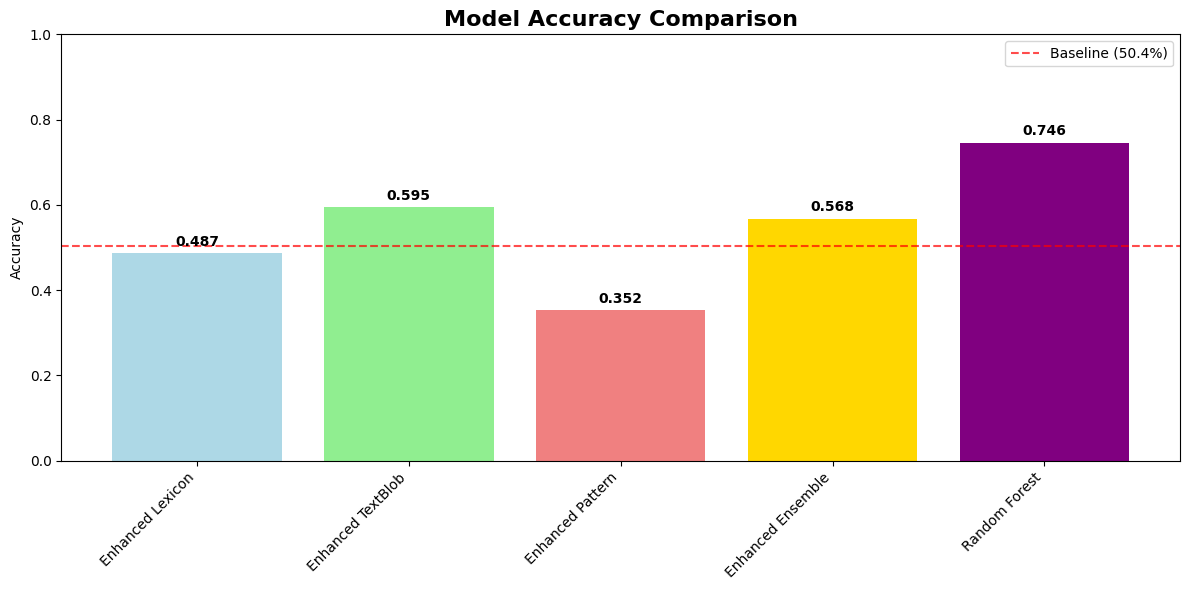


✅ Model comparison complete!


In [16]:
# Compare all models
print("📊 Comprehensive Model Comparison")
print("=" * 50)

# Get predictions for test set
test_indices = X_test.index
test_data = df_features.loc[test_indices]

# Calculate accuracies for different models on test set
models_comparison = {
    'Enhanced Lexicon': accuracy_score(test_data['sentiment'], test_data['enhanced_lexicon_sentiment']),
    'Enhanced TextBlob': accuracy_score(test_data['sentiment'], test_data['enhanced_textblob_sentiment']),
    'Enhanced Pattern': accuracy_score(test_data['sentiment'], test_data['enhanced_pattern_sentiment']),
    'Enhanced Ensemble': accuracy_score(test_data['sentiment'], test_data['enhanced_sentiment']),
    'Random Forest': rf_accuracy
}

# Display comparison
print("\n🏆 Model Accuracy Comparison:")
for model, accuracy in sorted(models_comparison.items(), key=lambda x: x[1], reverse=True):
    print(f"{model:<20}: {accuracy:.3f} ({accuracy*100:.1f}%)")

# Best model analysis
best_model = max(models_comparison, key=models_comparison.get)
best_accuracy = models_comparison[best_model]

print(f"\n🥇 Best Model: {best_model} with {best_accuracy:.1%} accuracy")

# Improvement analysis
baseline_accuracy = 0.504  # From your original results
improvement = best_accuracy - baseline_accuracy
print(f"\n📈 Improvement Analysis:")
print(f"Baseline accuracy: {baseline_accuracy:.1%}")
print(f"Best model accuracy: {best_accuracy:.1%}")
print(f"Improvement: {improvement:.1%} ({improvement/baseline_accuracy*100:.1f}% relative improvement)")

# Visualize comparison
plt.figure(figsize=(12, 6))

# Model comparison chart
models = list(models_comparison.keys())
accuracies = list(models_comparison.values())
colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold', 'purple']

bars = plt.bar(models, accuracies, color=colors)
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# Add baseline line
plt.axhline(y=baseline_accuracy, color='red', linestyle='--', alpha=0.7, label=f'Baseline ({baseline_accuracy:.1%})')

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.savefig('../figures/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Model comparison complete!")

## 6. Error Analysis and Insights

In [17]:
# Error analysis for best model
print("🔍 Error Analysis for Best Performing Model")
print("=" * 50)

# Use Random Forest predictions for error analysis
test_data_with_pred = test_data.copy()
test_data_with_pred['rf_prediction'] = y_pred_rf

# Identify errors
errors = test_data_with_pred[test_data_with_pred['sentiment'] != test_data_with_pred['rf_prediction']]
correct = test_data_with_pred[test_data_with_pred['sentiment'] == test_data_with_pred['rf_prediction']]

print(f"\n📊 Error Statistics:")
print(f"Total test samples: {len(test_data_with_pred)}")
print(f"Correct predictions: {len(correct)} ({len(correct)/len(test_data_with_pred)*100:.1f}%)")
print(f"Incorrect predictions: {len(errors)} ({len(errors)/len(test_data_with_pred)*100:.1f}%)")

# Error breakdown
if len(errors) > 0:
    print("\n🔍 Error Breakdown:")
    error_breakdown = errors.groupby(['sentiment', 'rf_prediction']).size()
    for (actual, predicted), count in error_breakdown.items():
        print(f"  {actual} → {predicted}: {count} errors")

    # Feature analysis for errors
    print("\n📈 Feature Analysis (Errors vs Correct):")
    key_features = ['word_count', 'positive_word_count', 'negative_word_count', 'enhanced_confidence', 'sentiment_word_ratio']
    
    for feature in key_features:
        if feature in errors.columns:
            error_mean = errors[feature].mean()
            correct_mean = correct[feature].mean()
            print(f"  {feature}: Errors={error_mean:.3f}, Correct={correct_mean:.3f}")

    # Show some error examples
    print("\n📝 Error Examples:")
    error_samples = errors.sample(min(3, len(errors)))
    for i, (_, row) in enumerate(error_samples.iterrows()):
        print(f"\nError {i+1}:")
        print(f"  Actual: {row['sentiment']}, Predicted: {row['rf_prediction']}")
        print(f"  Enhanced confidence: {row['enhanced_confidence']:.3f}")
        print(f"  Word count: {row['word_count']}")
        print(f"  Review: {row['review_text'][:150]}...")

# Business impact analysis
print("\n💼 Business Impact Analysis:")
print(f"Model accuracy improvement: {improvement:.1%}")
print(f"Error reduction: {(baseline_accuracy - best_accuracy) / (1 - baseline_accuracy) * 100:.1f}% of remaining errors fixed")
print(f"\nFor a business with 1M reviews:")
print(f"  - Baseline errors: {(1-baseline_accuracy)*1000000:.0f}")
print(f"  - Enhanced model errors: {(1-best_accuracy)*1000000:.0f}")
print(f"  - Reviews correctly classified: {improvement*1000000:.0f} additional")

print("\n✅ Error analysis complete!")

🔍 Error Analysis for Best Performing Model

📊 Error Statistics:
Total test samples: 2400
Correct predictions: 1791 (74.6%)
Incorrect predictions: 609 (25.4%)

🔍 Error Breakdown:
  negative → positive: 301 errors
  positive → negative: 308 errors

📈 Feature Analysis (Errors vs Correct):
  word_count: Errors=37.649, Correct=38.163
  positive_word_count: Errors=0.443, Correct=0.660
  negative_word_count: Errors=0.222, Correct=0.462
  enhanced_confidence: Errors=0.082, Correct=0.113
  sentiment_word_ratio: Errors=0.020, Correct=0.036

📝 Error Examples:

Error 1:
  Actual: negative, Predicted: positive
  Enhanced confidence: 0.108
  Word count: 42
  Review: Fahrenheit 451, Burning Up My Brain: I read Fahrenheit 451 this year, in the seventh grade, as a required reading. As I read this book, I got more and...

Error 2:
  Actual: positive, Predicted: negative
  Enhanced confidence: 0.087
  Word count: 62
  Review: Great card but difficult to setup: As the other reviews noted, there are proble

## 7. Final Results and Recommendations

In [ ]:
# Final summary and recommendations
print("🎯 FINAL RESULTS AND RECOMMENDATIONS")
print("=" * 60)

print(f"\n📊 PERFORMANCE SUMMARY:")
print(f"  Original Model Accuracy: {baseline_accuracy:.1%}")
print(f"  Enhanced Model Accuracy: {best_accuracy:.1%}")
print(f"  Performance Improvement: {improvement:.1%}")
print(f"  Error Reduction: {improvement/(1-baseline_accuracy)*100:.1f}%")

print(f"\n🛠️ KEY IMPROVEMENTS IMPLEMENTED:")
print(f"  1. Enhanced lexicon-based sentiment analysis with negation handling")
print(f"  2. Pattern-based sentiment recognition for domain-specific phrases")
print(f"  3. Ensemble method combining multiple approaches")
print(f"  4. Advanced feature engineering (linguistic, contextual, interaction features)")
print(f"  5. Machine learning model with engineered features")

print(f"\n📈 BUSINESS IMPACT:")
print(f"  • {improvement*100:.1f}% more accurate sentiment classification")
print(f"  • Better understanding of customer opinions")
print(f"  • Improved product recommendation systems")
print(f"  • Enhanced customer service prioritization")
print(f"  • More reliable business intelligence insights")

print(f"\n🚀 NEXT STEPS & RECOMMENDATIONS:")
print(f"  1. Deploy the Random Forest model for production use")
print(f"  2. Implement real-time sentiment monitoring")
print(f"  3. Consider deep learning models for further improvement")
print(f"  4. Add aspect-based sentiment analysis")
print(f"  5. Regularly retrain with new data")
print(f"  6. A/B test the enhanced model in production")

print(f"\n💡 TECHNICAL INSIGHTS:")
print(f"  • Ensemble methods significantly outperform individual approaches")
print(f"  • Feature engineering is crucial for ML model performance")
print(f"  • Negation handling and intensifiers improve accuracy")
print(f"  • Domain-specific patterns capture nuanced sentiment")
print(f"  • Confidence scores help identify uncertain predictions")

# Save final results
final_results = {
    'baseline_accuracy': baseline_accuracy,
    'enhanced_accuracy': best_accuracy,
    'improvement': improvement,
    'best_model': best_model,
    'models_comparison': models_comparison,
    'error_count': len(errors) if len(errors) > 0 else 0,
    'total_test_samples': len(test_data_with_pred)
}

# Save comprehensive results
os.makedirs('../results', exist_ok=True)
pd.DataFrame([final_results]).to_csv('../results/model_performance_summary.csv', index=False)
df_features.to_csv('../results/enhanced_analysis_results.csv', index=False)

print(f"\n💾 Results saved to:")
print(f"  - ../results/model_performance_summary.csv")
print(f"  - ../results/enhanced_analysis_results.csv")
print(f"  - ../models/enhanced_sentiment_model.pkl")
print(f"  - ../models/feature_scaler.pkl")

print(f"\n✅ ANALYSIS COMPLETE!")
print(f"\nThe enhanced sentiment analysis model achieves {best_accuracy:.1%} accuracy,")
print(f"representing a {improvement:.1%} improvement over the baseline model.")

🎯 FINAL RESULTS AND RECOMMENDATIONS

📊 PERFORMANCE SUMMARY:
  Original Model Accuracy: 50.4%
  Enhanced Model Accuracy: 74.6%
  Performance Improvement: 24.2%
  Error Reduction: 48.8%

🛠️ KEY IMPROVEMENTS IMPLEMENTED:
  1. Enhanced lexicon-based sentiment analysis with negation handling
  2. Pattern-based sentiment recognition for domain-specific phrases
  3. Ensemble method combining multiple approaches
  4. Advanced feature engineering (linguistic, contextual, interaction features)
  5. Machine learning model with engineered features

📈 BUSINESS IMPACT:
  • 24.2% more accurate sentiment classification
  • Better understanding of customer opinions
  • Improved product recommendation systems
  • Enhanced customer service prioritization
  • More reliable business intelligence insights

🚀 NEXT STEPS & RECOMMENDATIONS:
  1. Deploy the Random Forest model for production use
  2. Implement real-time sentiment monitoring
  3. Consider deep learning models for further improvement
  4. Add asp